In [1]:
%pip install "drawsvg~=2.0"

import csv
import itertools
import random
import os
import drawsvg as dw
import numpy as np

Note: you may need to restart the kernel to use updated packages.


## Define sampling params here

In [43]:
sample_size = 50
radius_variation_max = 10
variation_step = 0.5
fixed_vars = ["line_color"]

w, h = 600, 600

save_path = "../jnd_images_svg/circle_size"
os.makedirs(save_path, exist_ok=True)

## Define hyperparam space

In [68]:
hparam_dict = {
    "line_color": ["red", "green", "blue"],
    "fill_color": ["none", "filled"],
    "line_thickness": range(1, 4),
    "shape_location": [0.25, 0.5, 0.75],
    "shape_dist": [0.05, 0.1, 0.15],
    "reference_radius": [5, 10, 20],
    "offset_direction": ["E", "S", "SE"] # this is kind of arbitrary
}

selected_hparams = [key for key in hparam_dict if key not in fixed_vars]
selected_hparam_vals = [hparam_dict[key] for key in selected_hparams]
fixed_hparam_vals = [hparam_dict[key] for key in fixed_vars]
print(selected_hparams)

all_hparams = list(itertools.product(*selected_hparam_vals))
fixed_hparams_exhaustive = list(itertools.product(*fixed_hparam_vals))

print(len(all_hparams))
print(len(fixed_hparams_exhaustive))

['fill_color', 'line_thickness', 'shape_location', 'shape_dist', 'reference_radius', 'offset_direction']
486
3


## Sample

In [69]:
random_hparam_configs = random.choices(all_hparams, k=sample_size)

## Generate & save

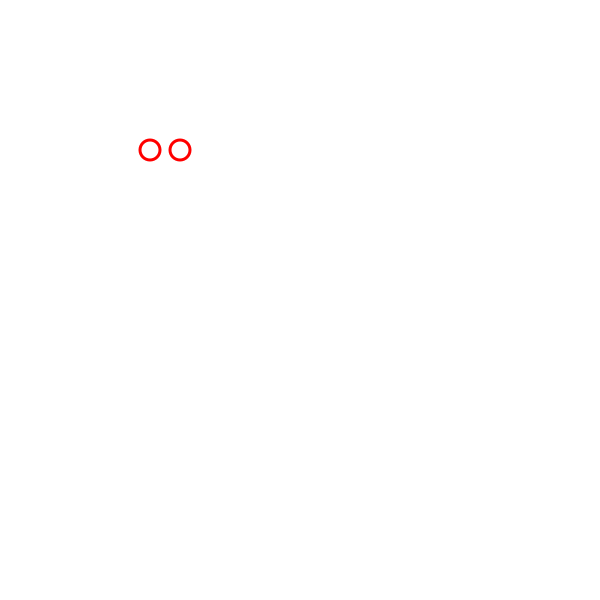

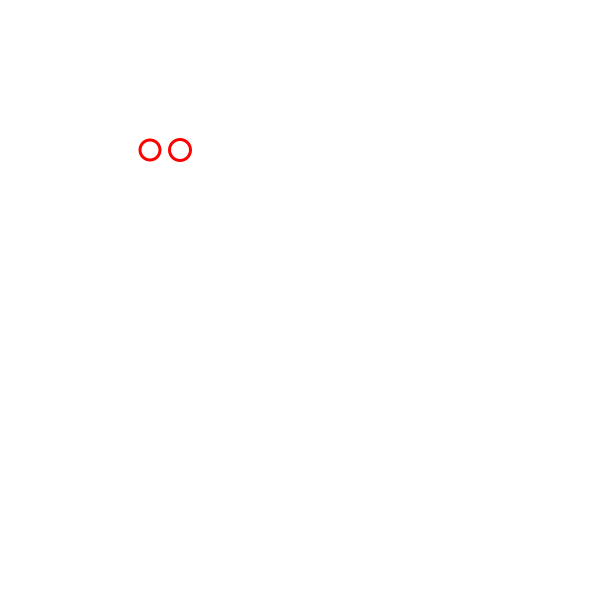

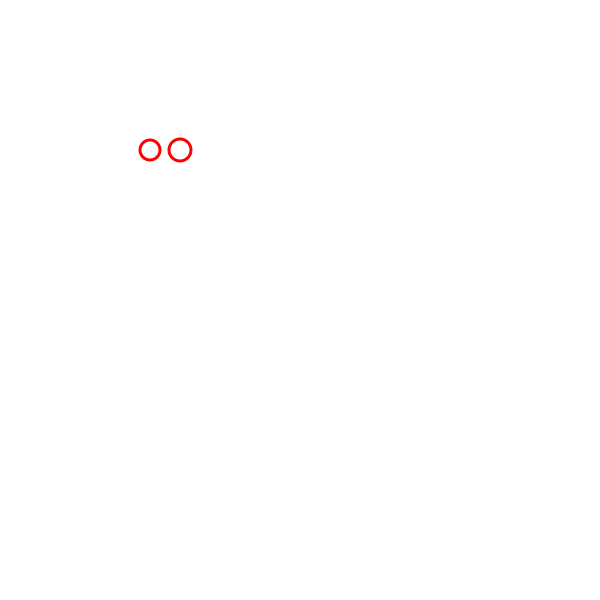

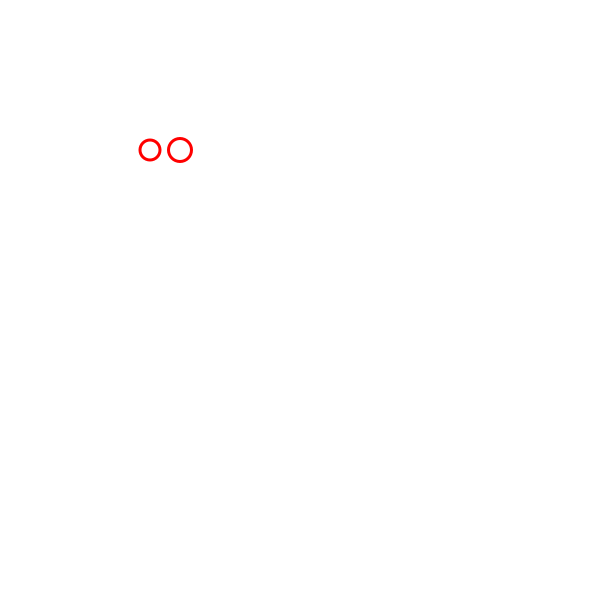

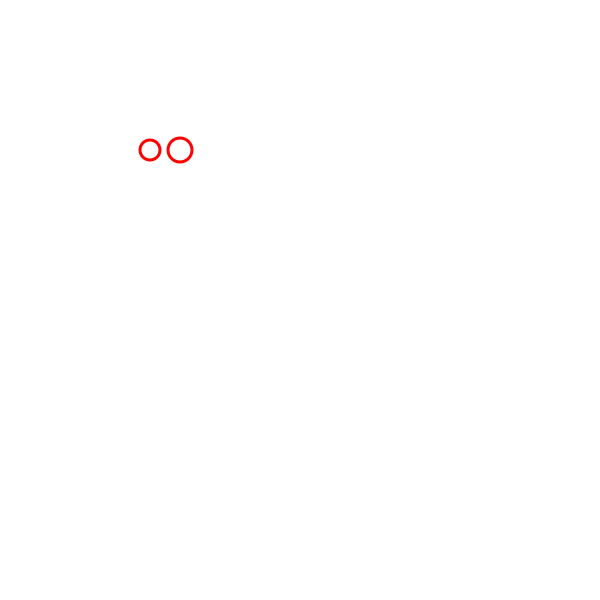

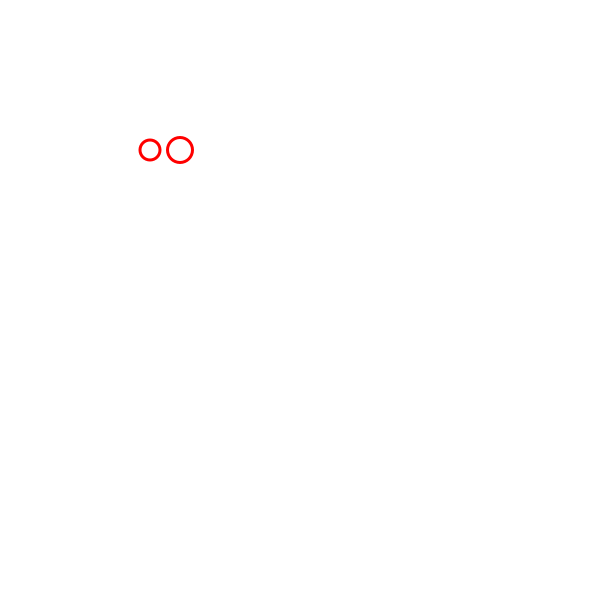

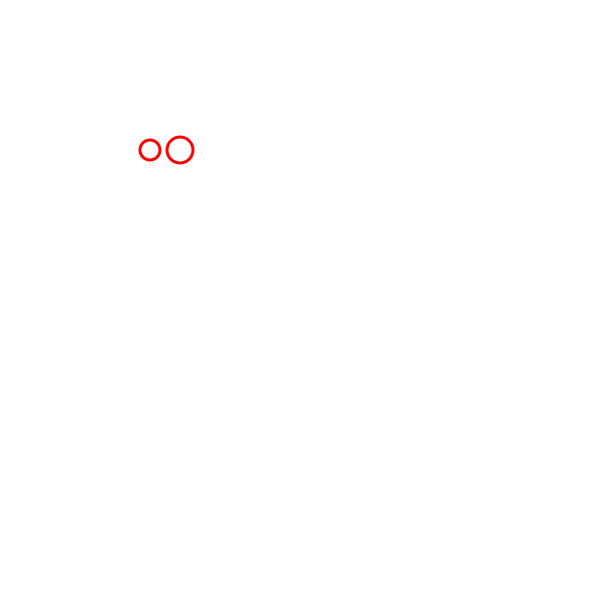

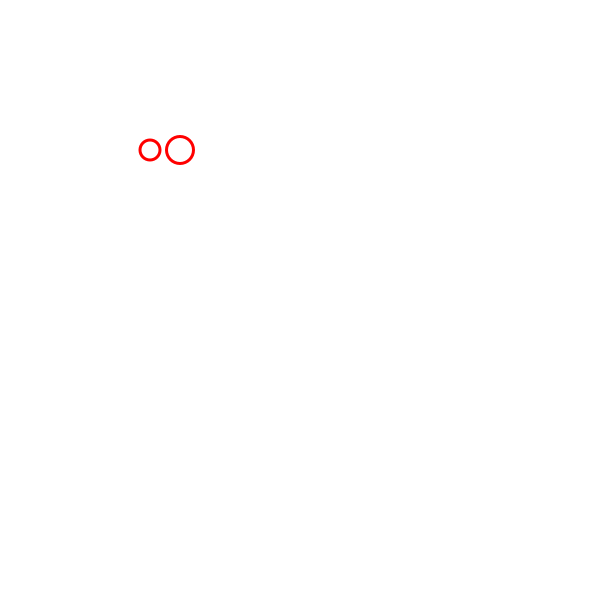

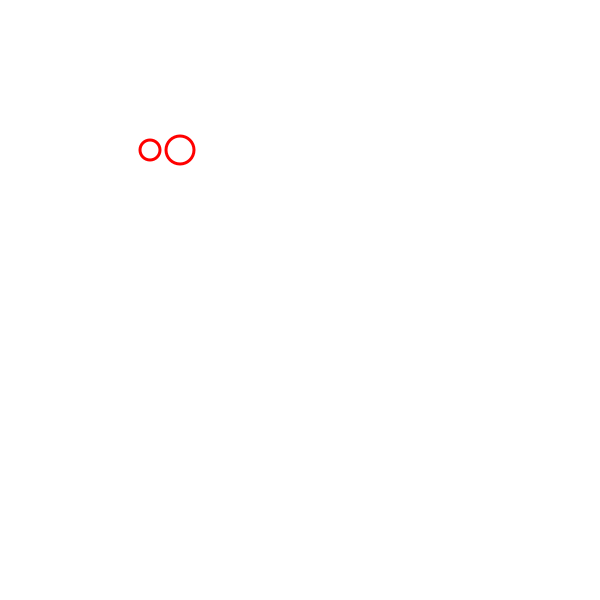

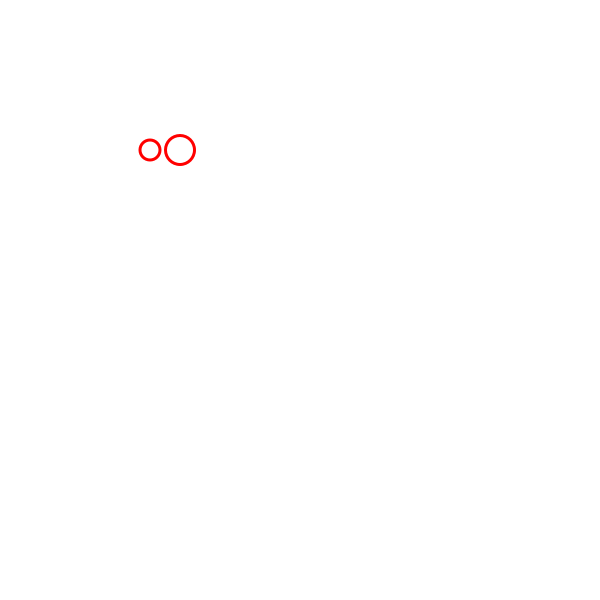

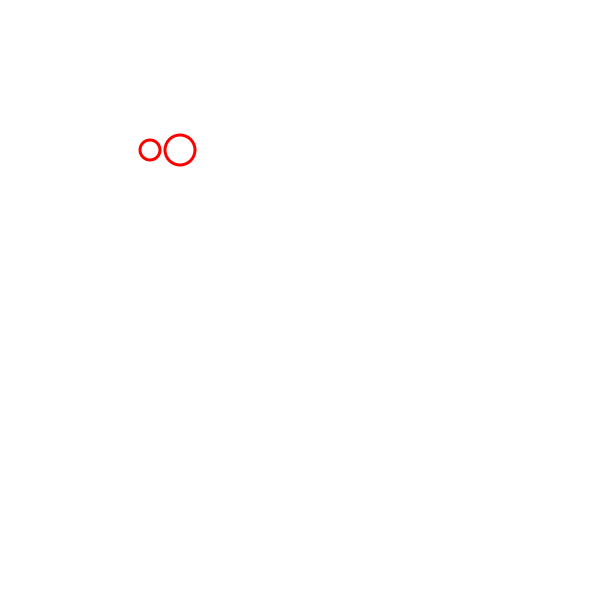

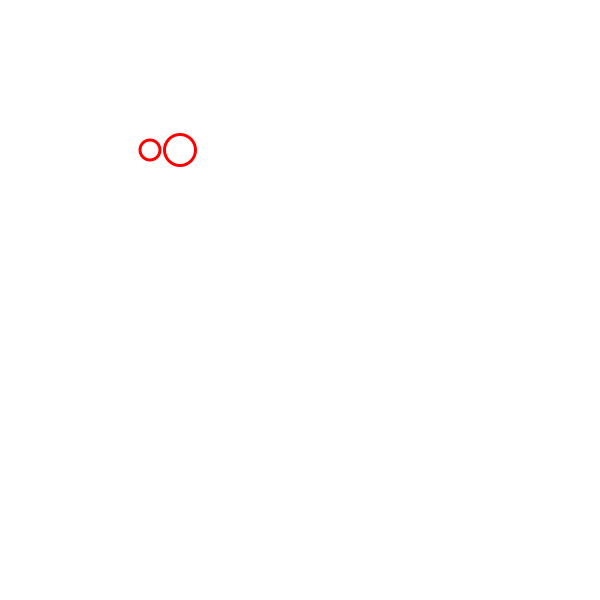

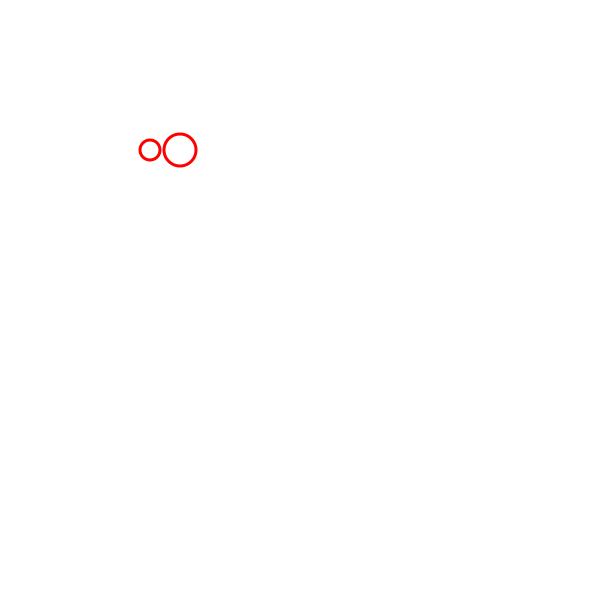

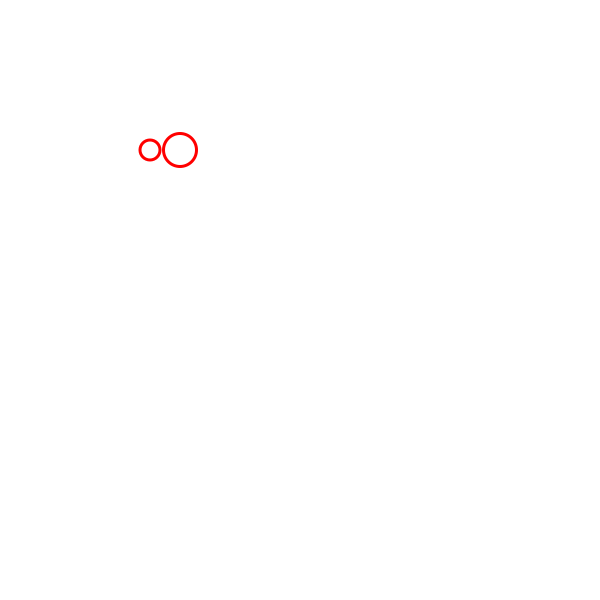

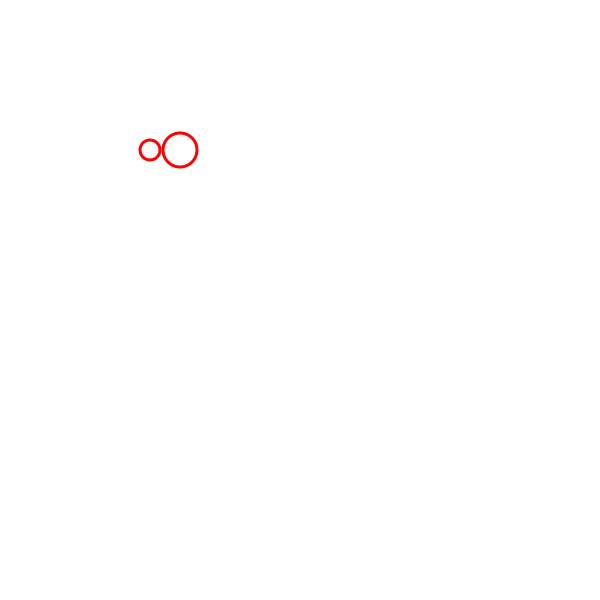

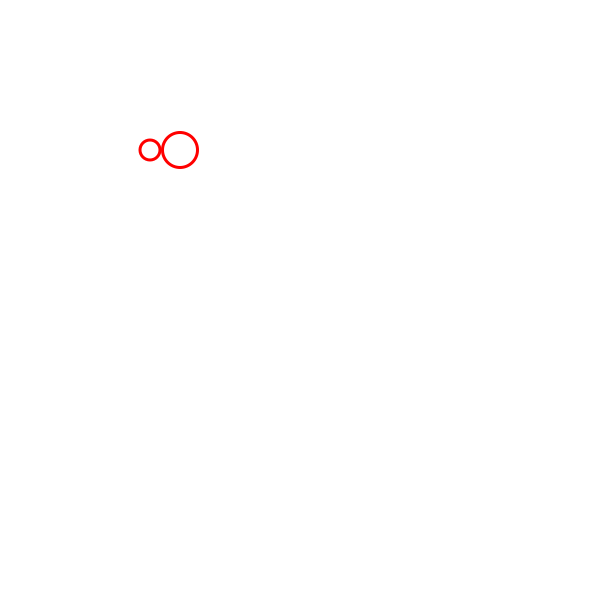

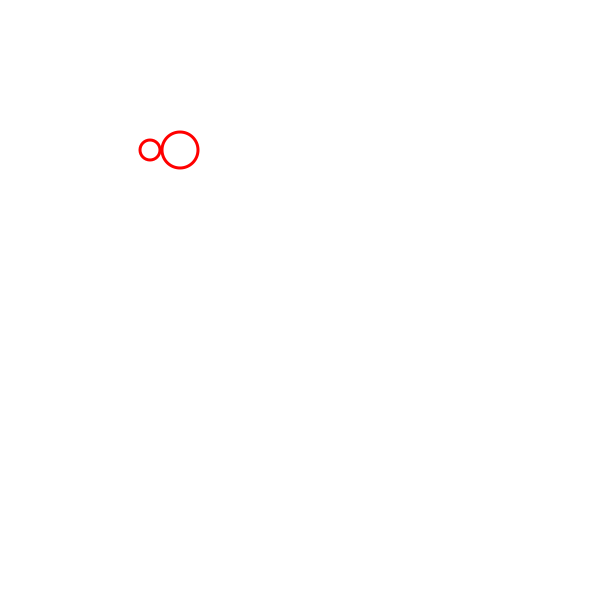

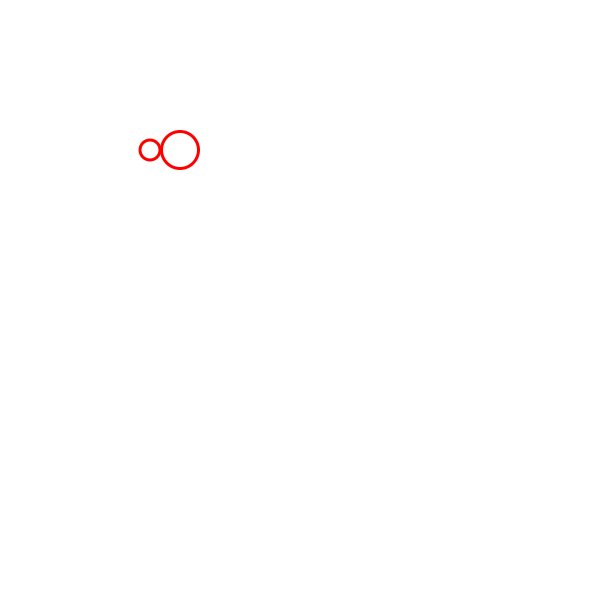

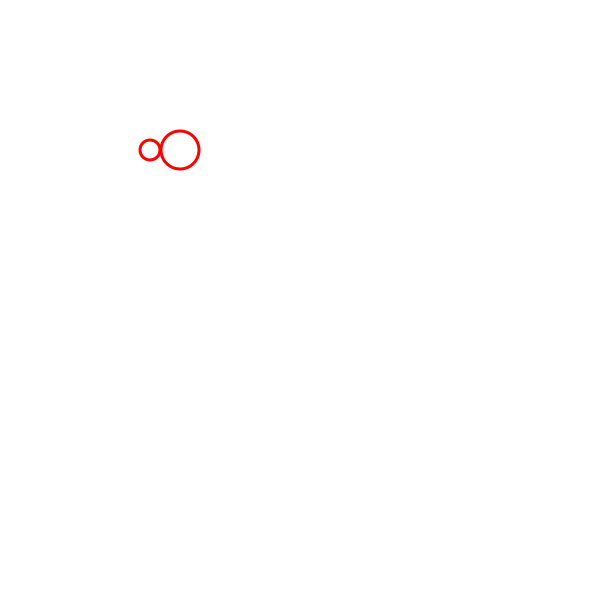

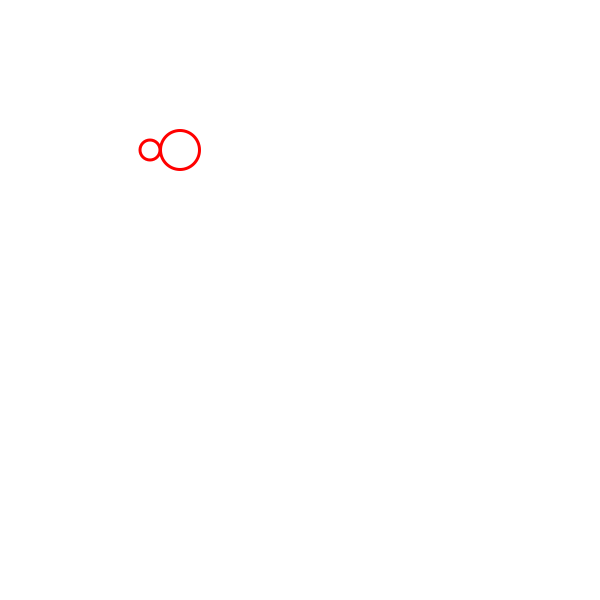

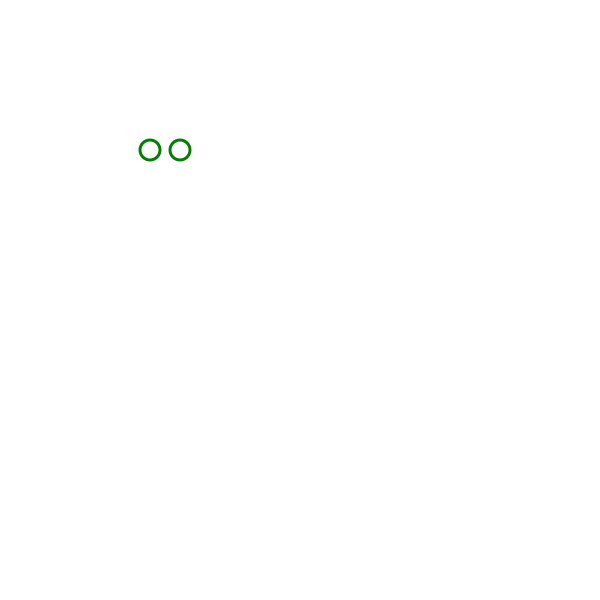

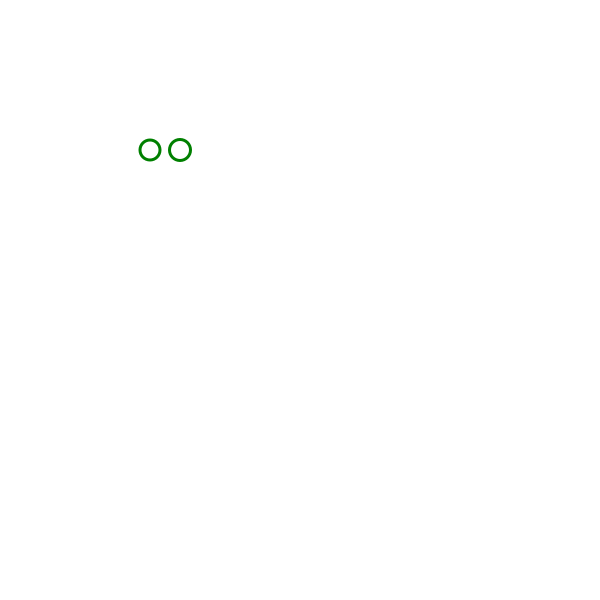

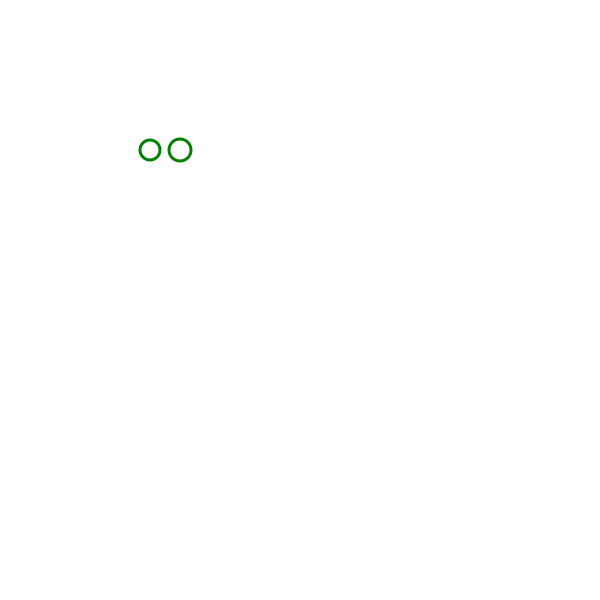

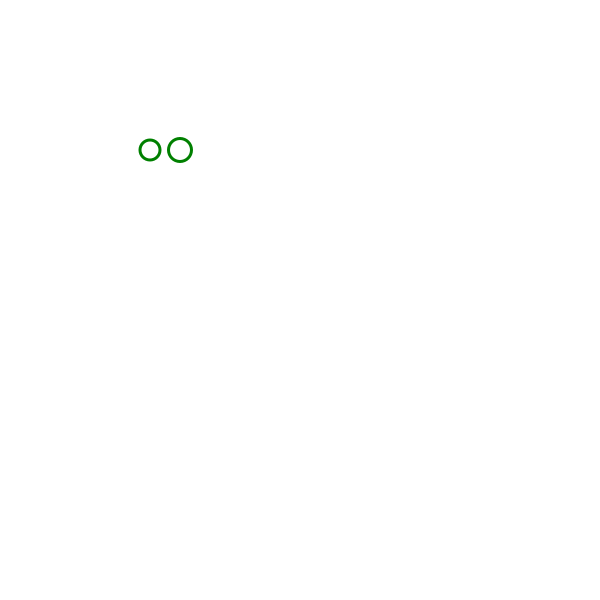

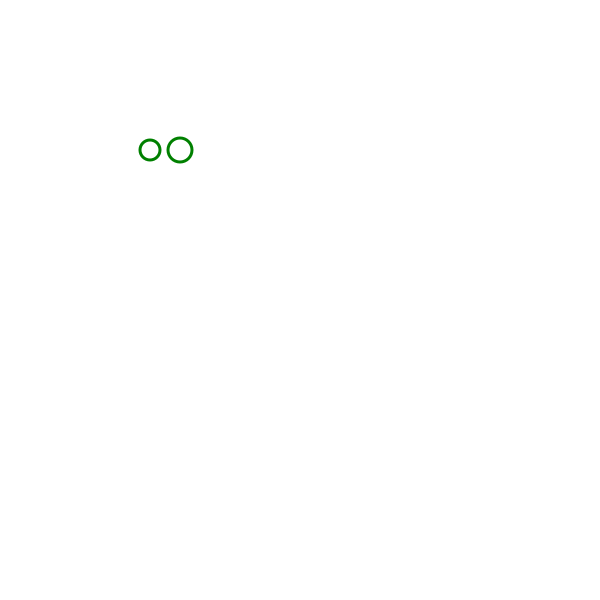

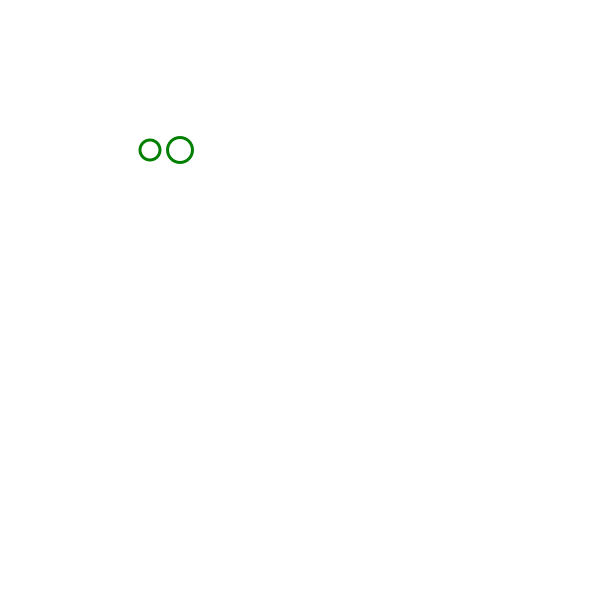

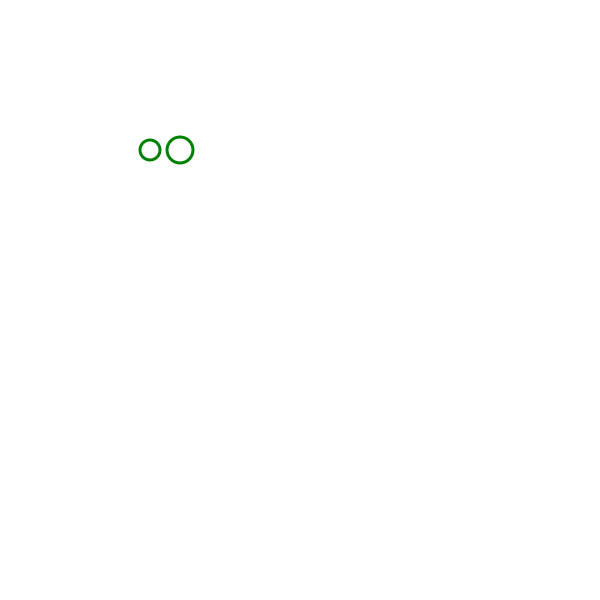

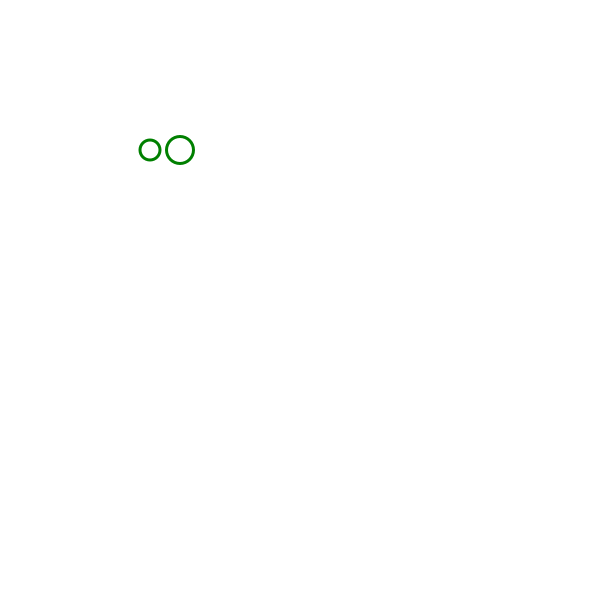

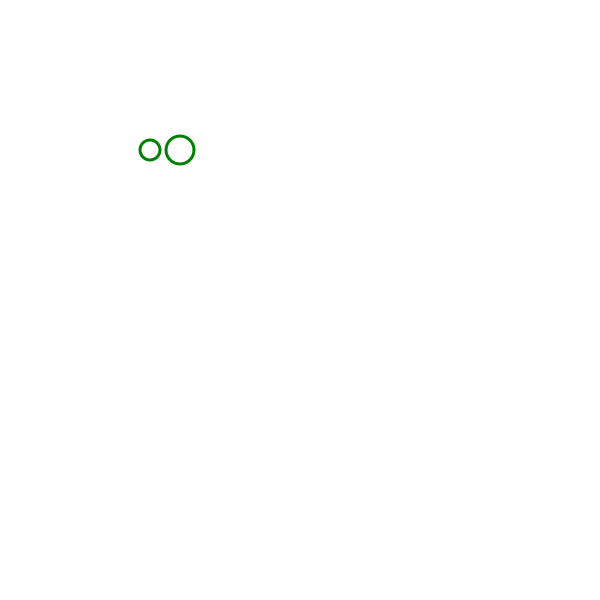

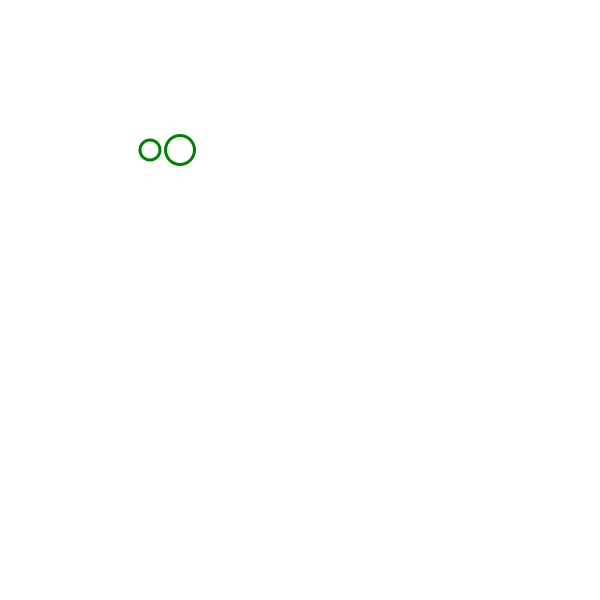

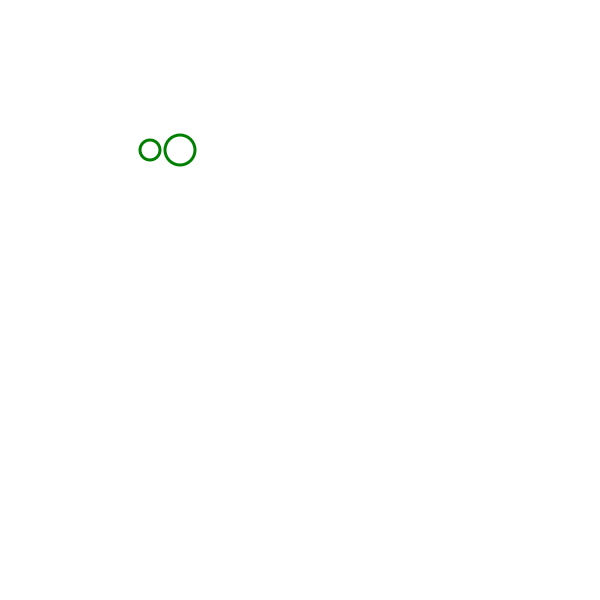

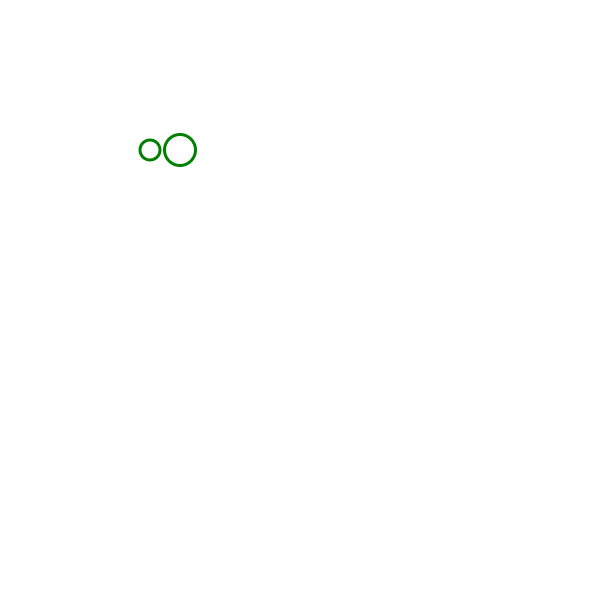

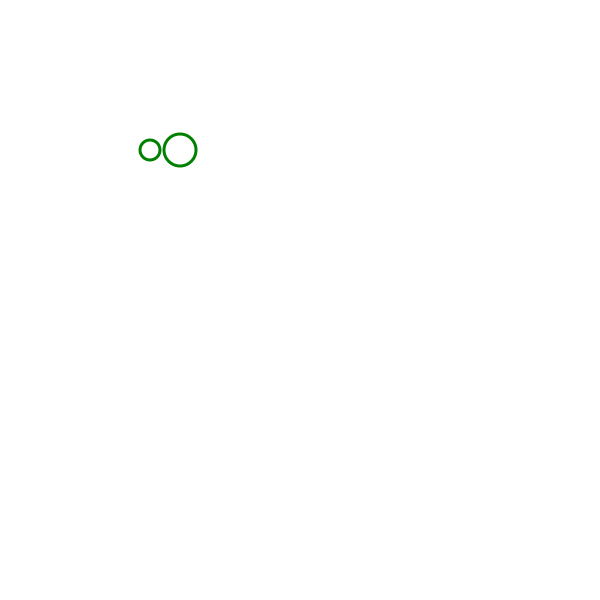

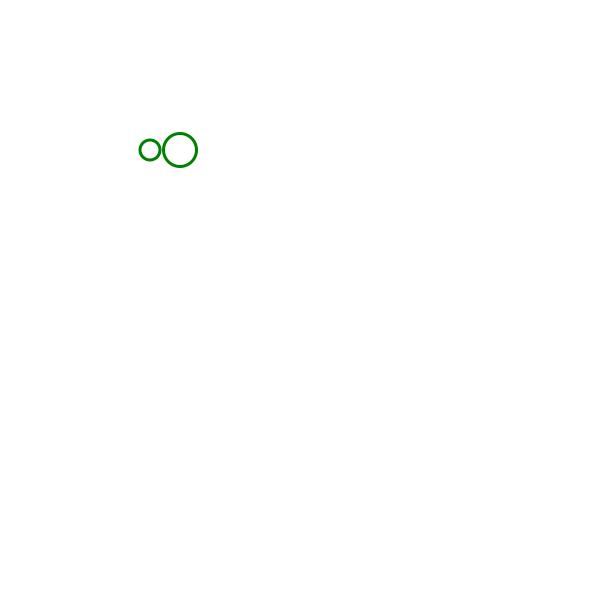

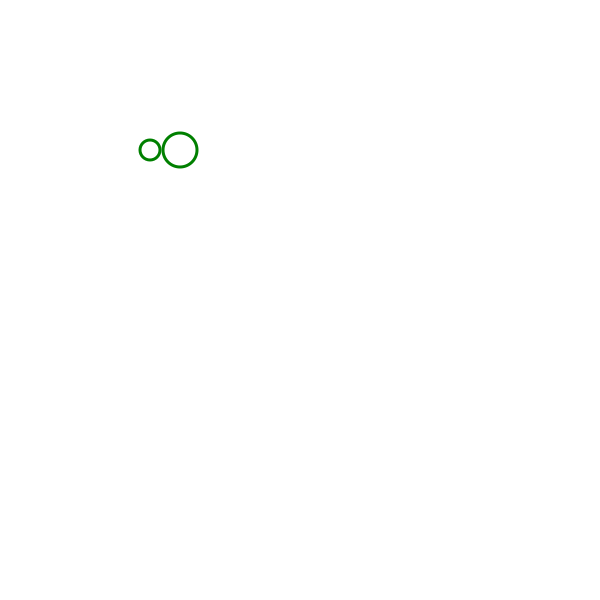

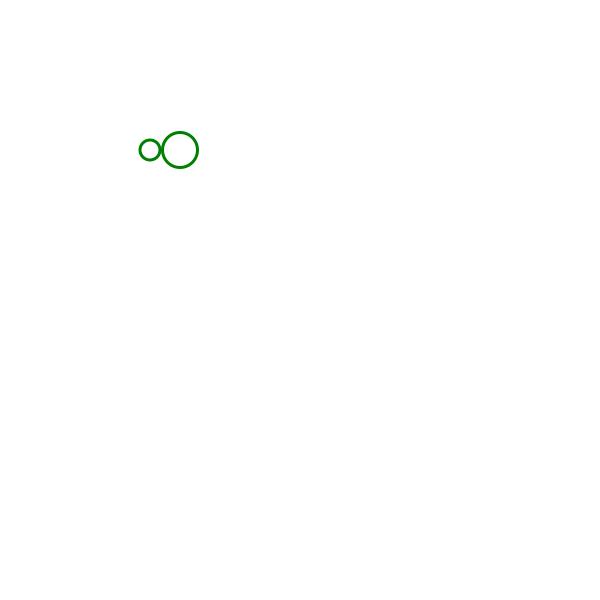

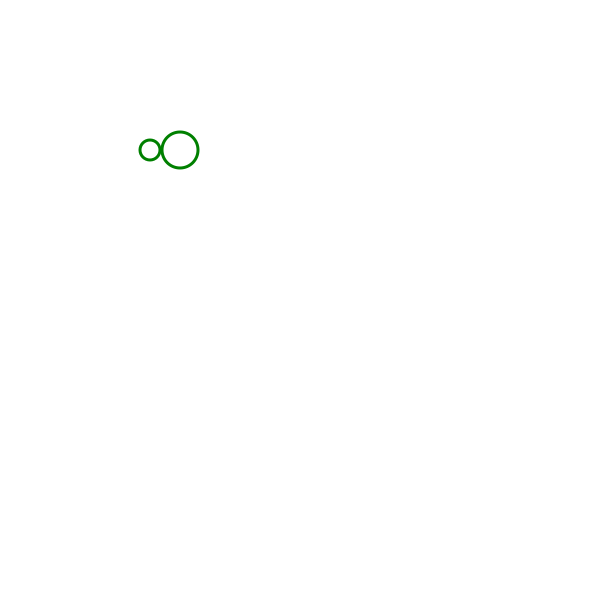

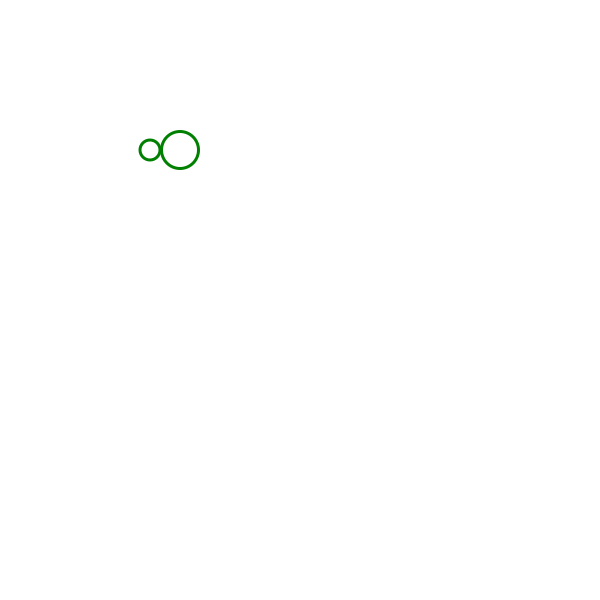

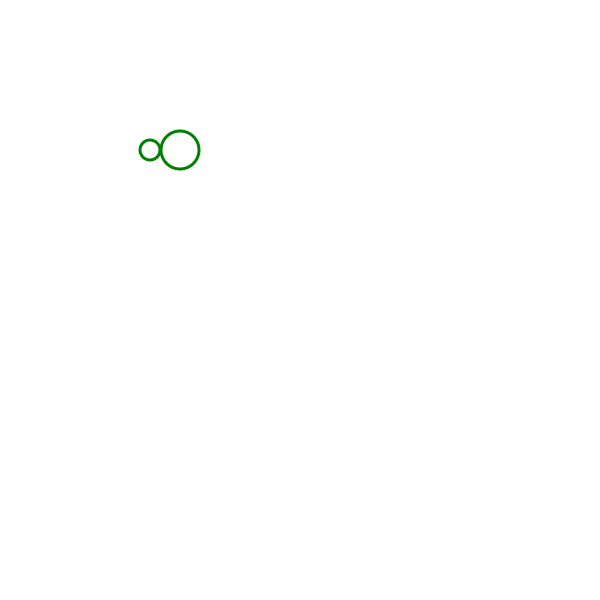

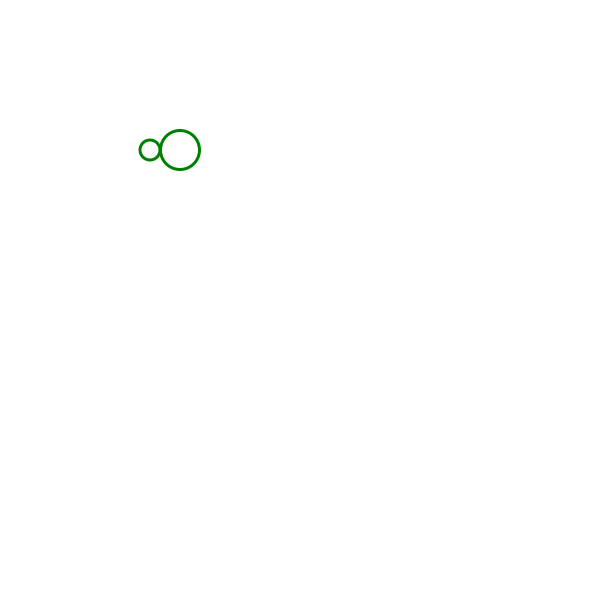

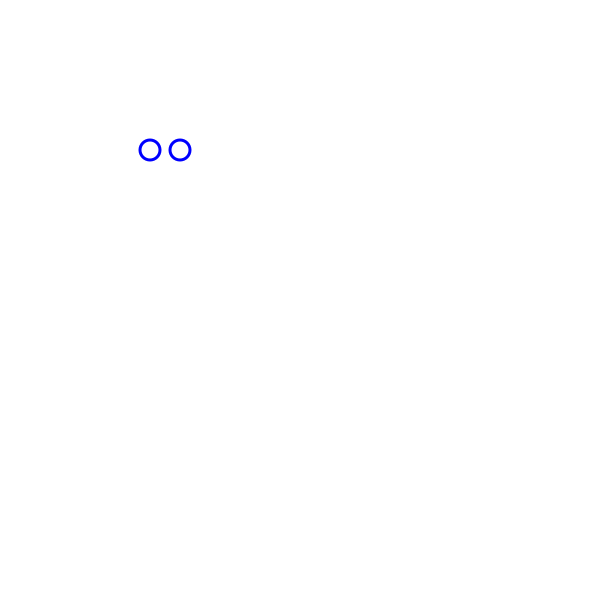

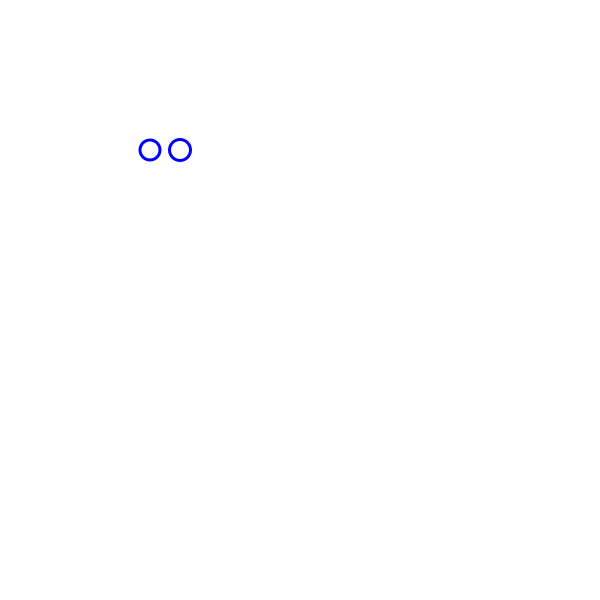

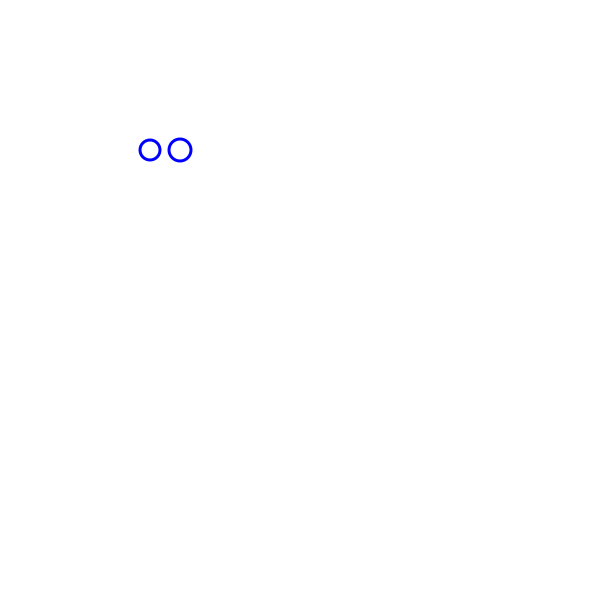

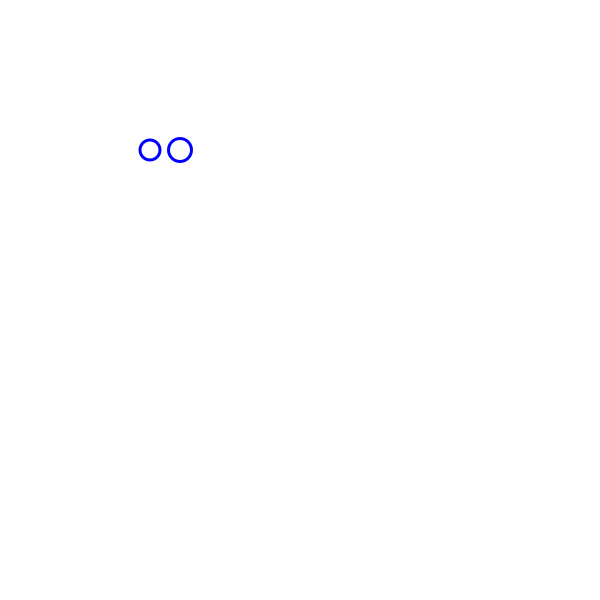

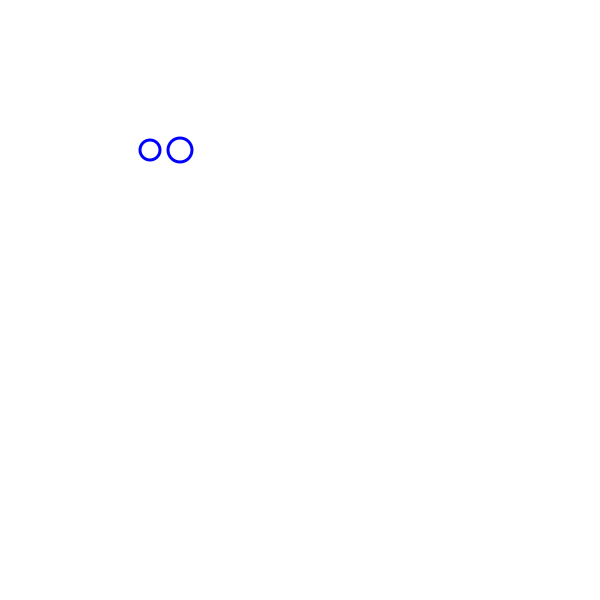

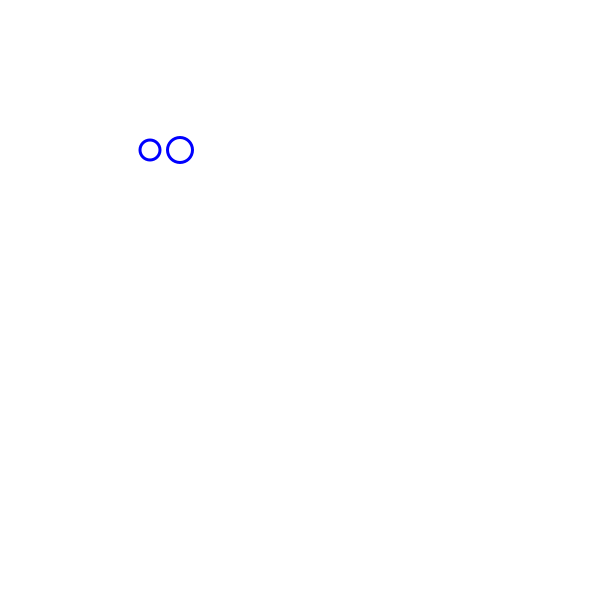

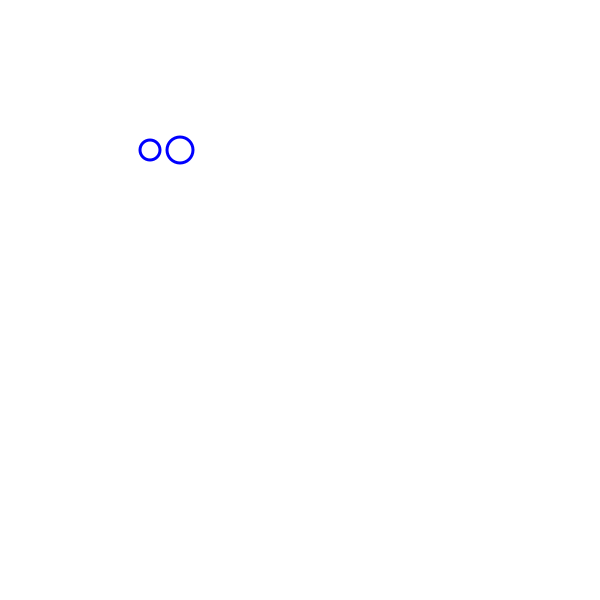

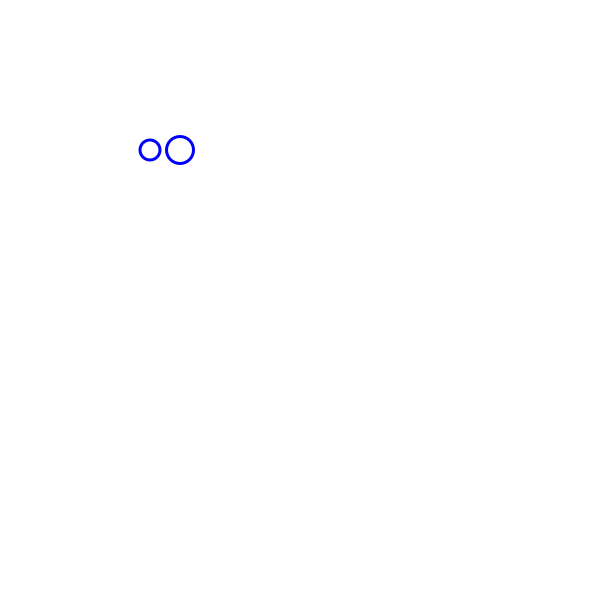

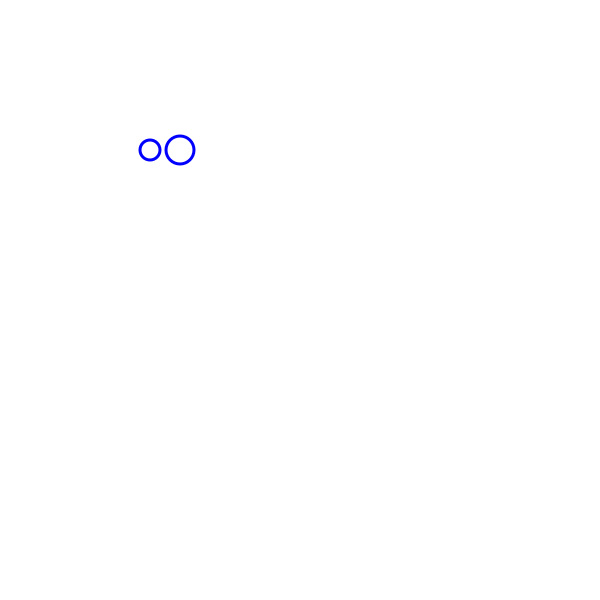

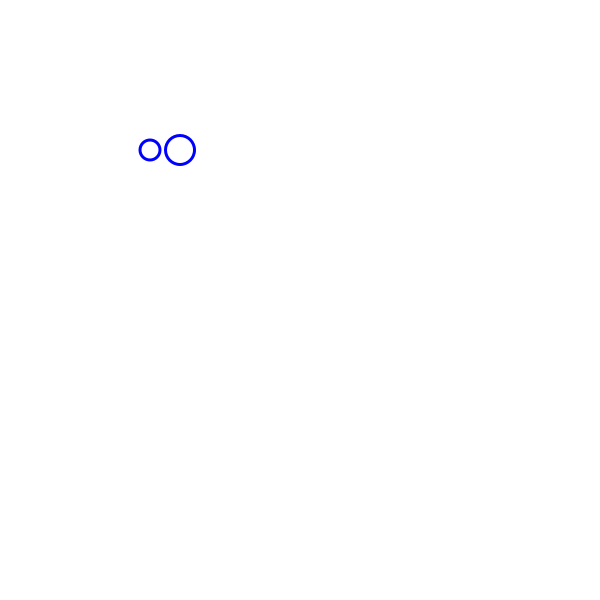

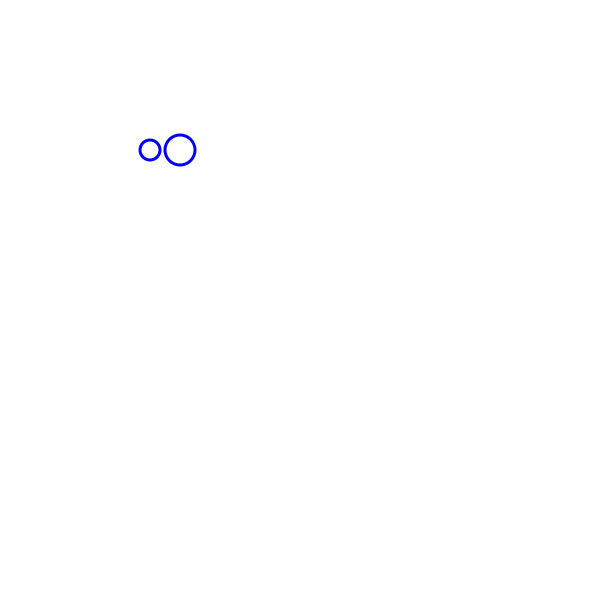

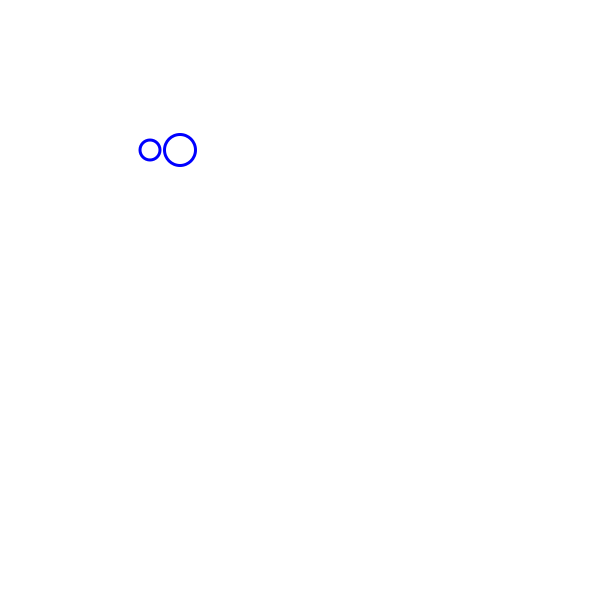

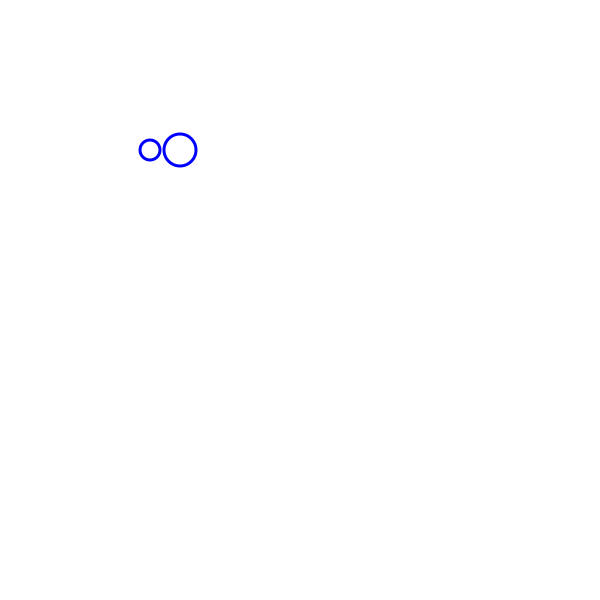

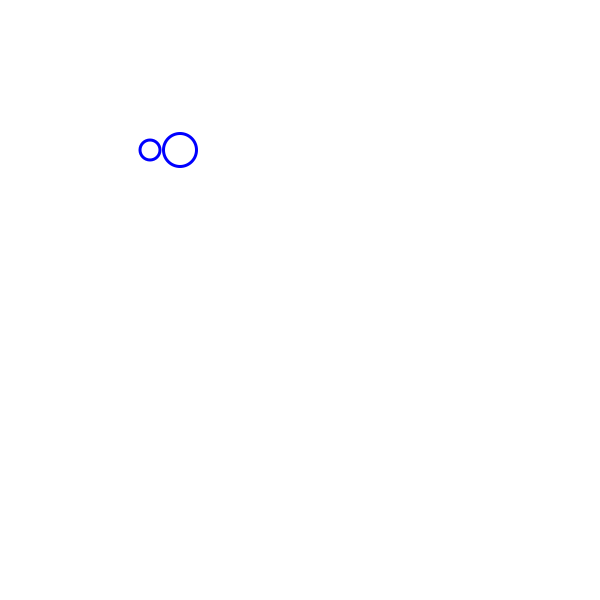

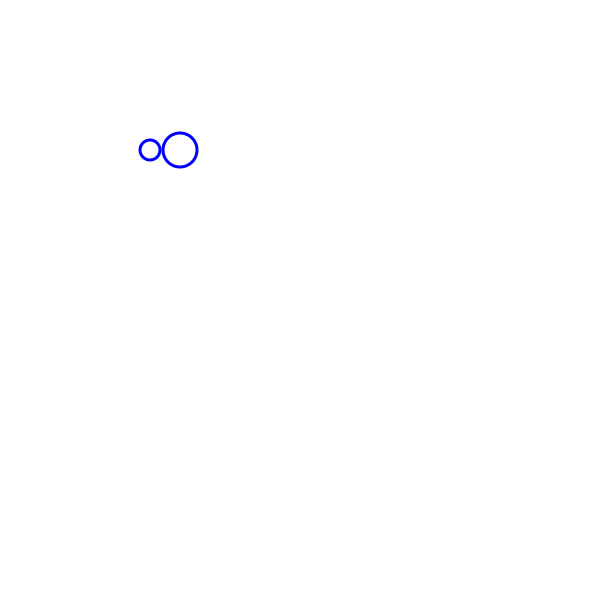

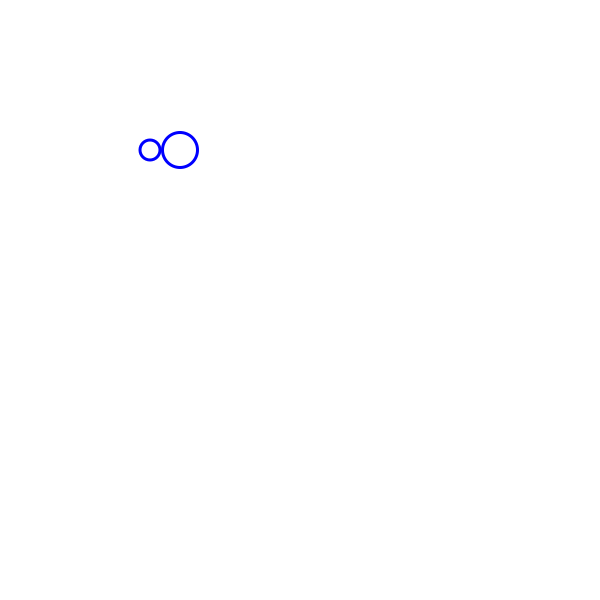

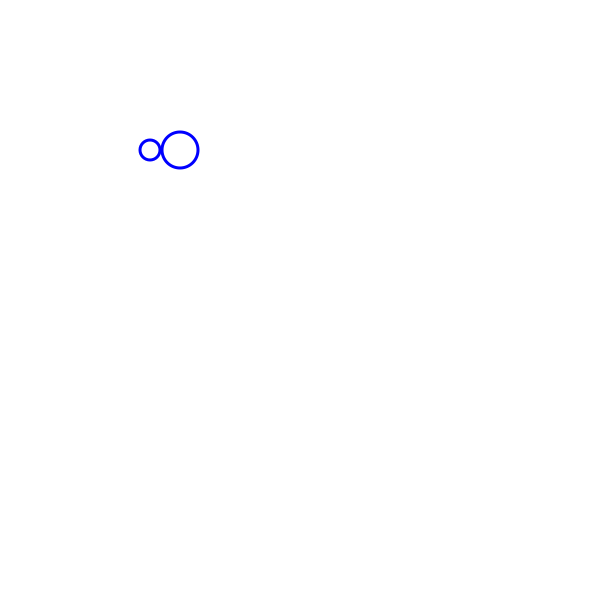

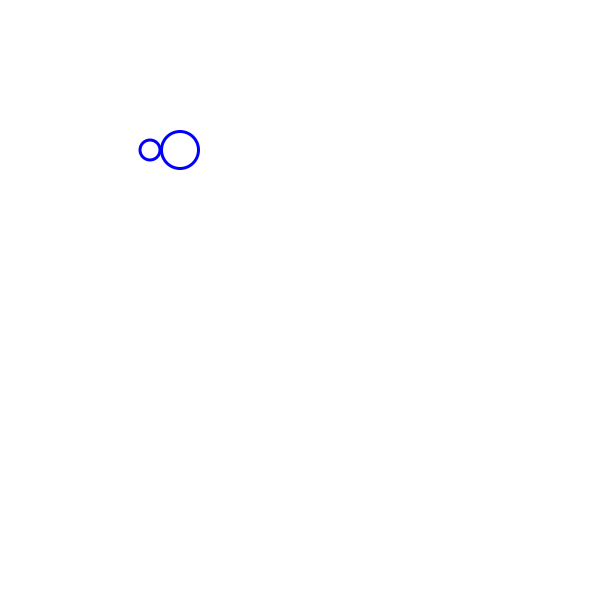

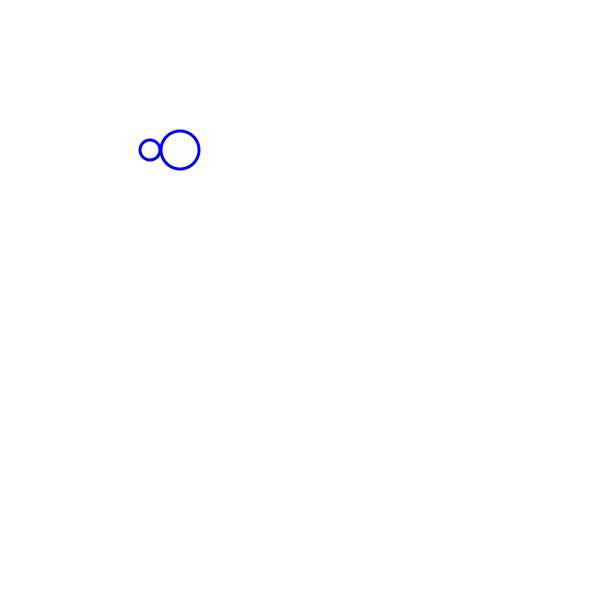

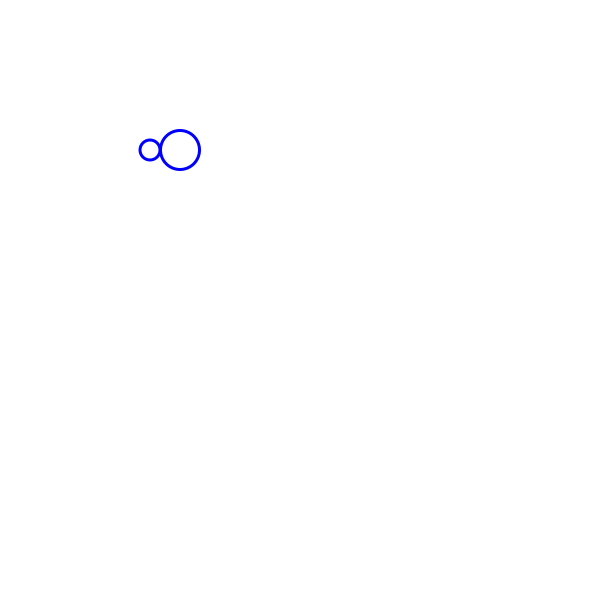

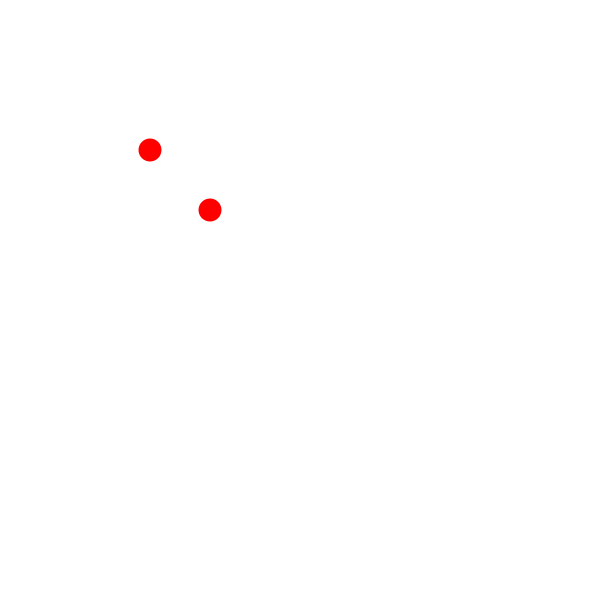

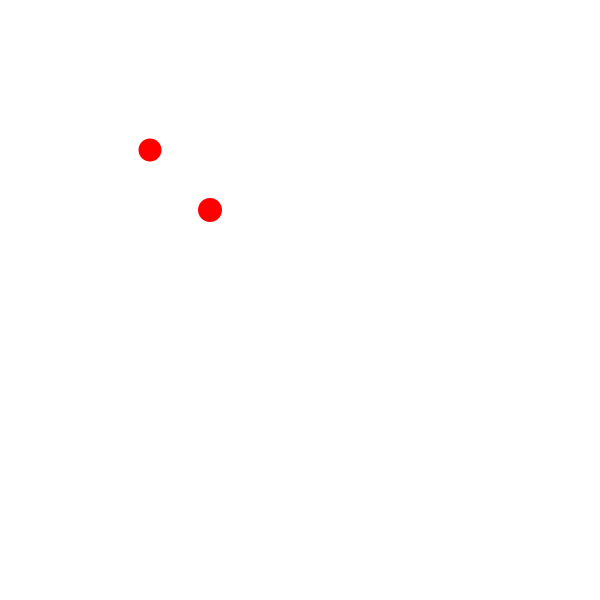

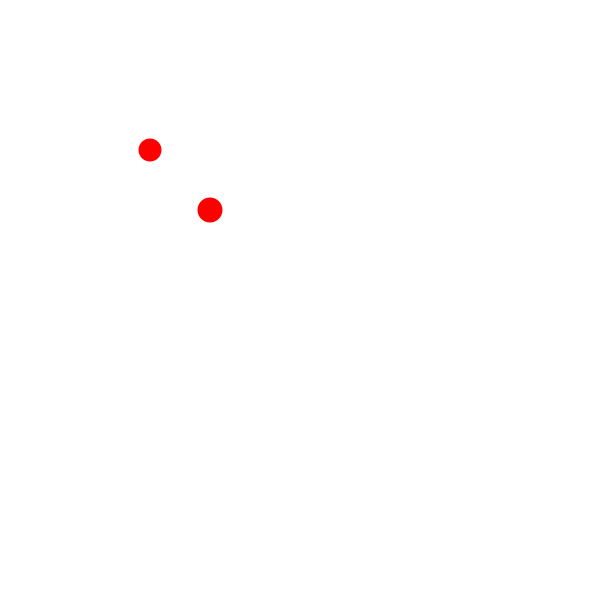

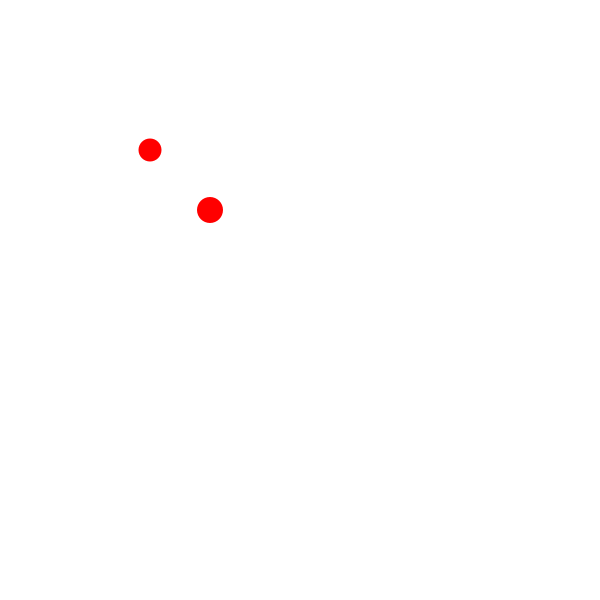

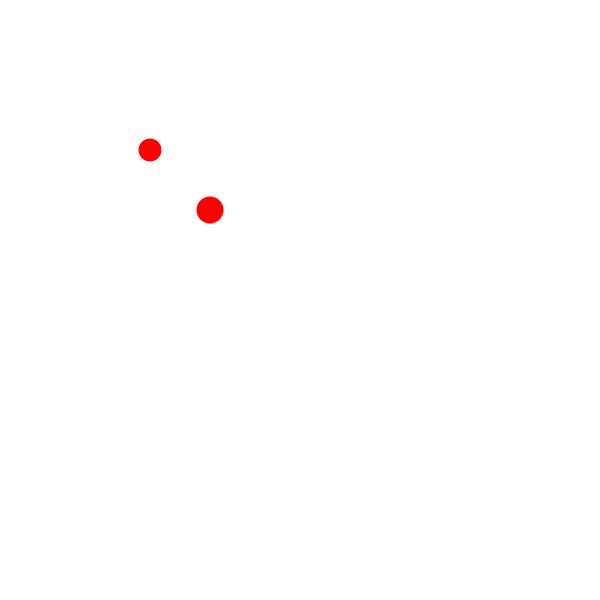

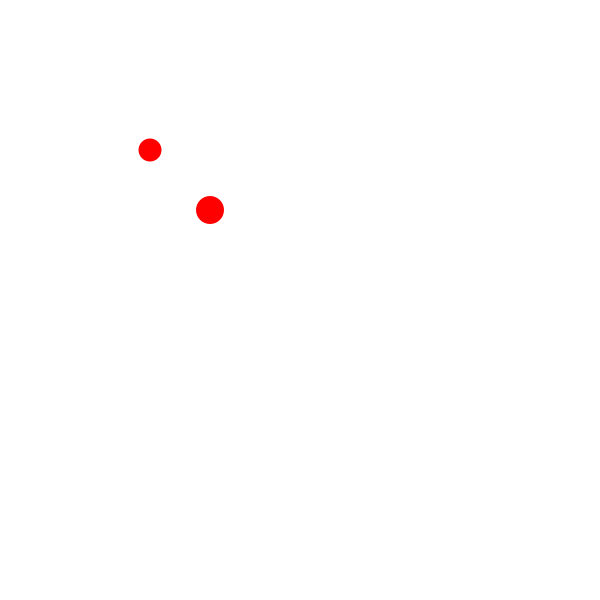

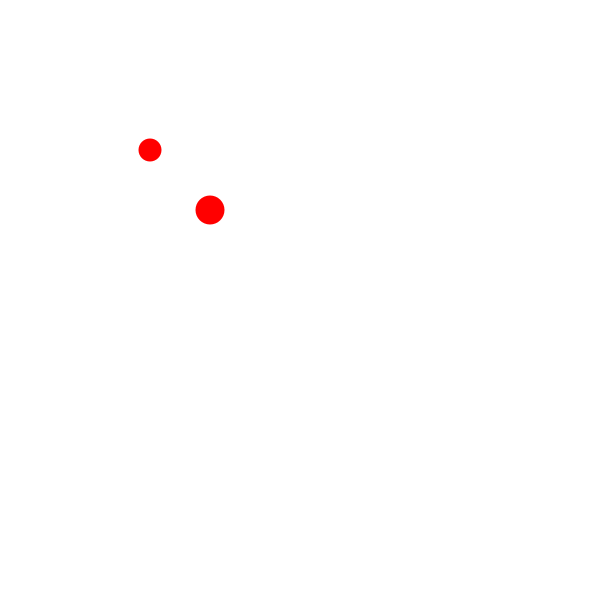

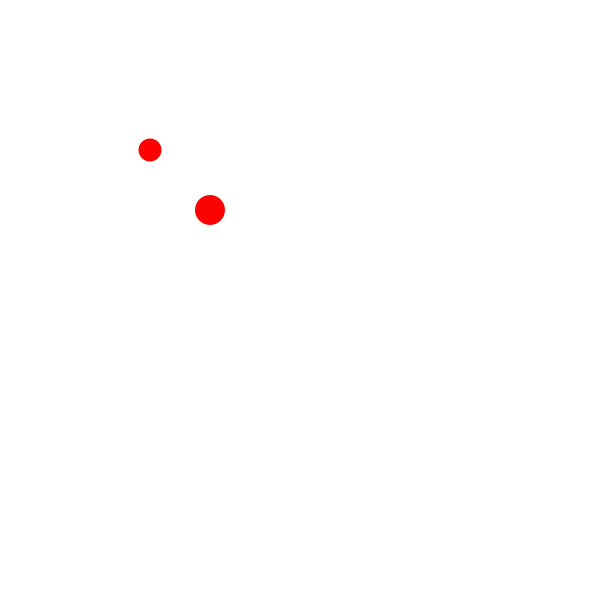

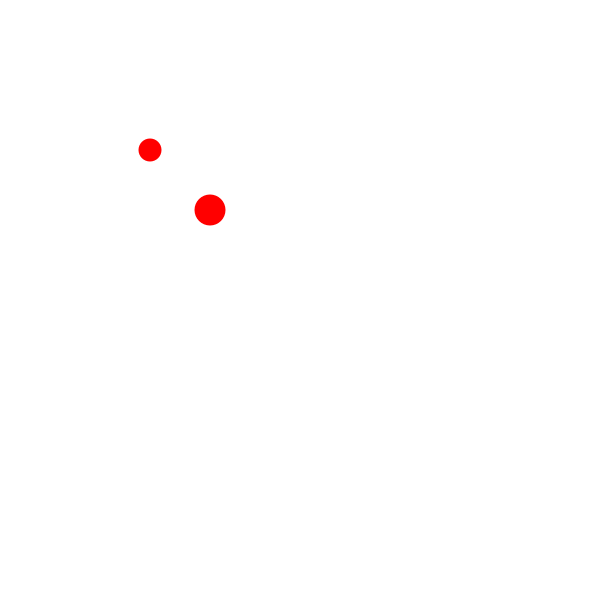

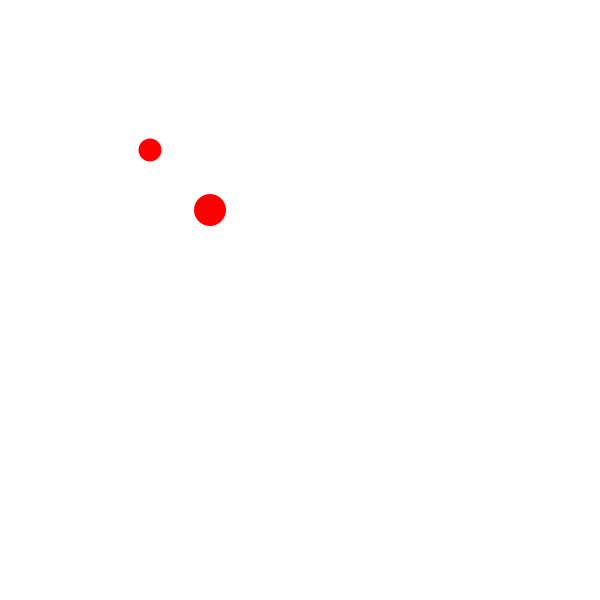

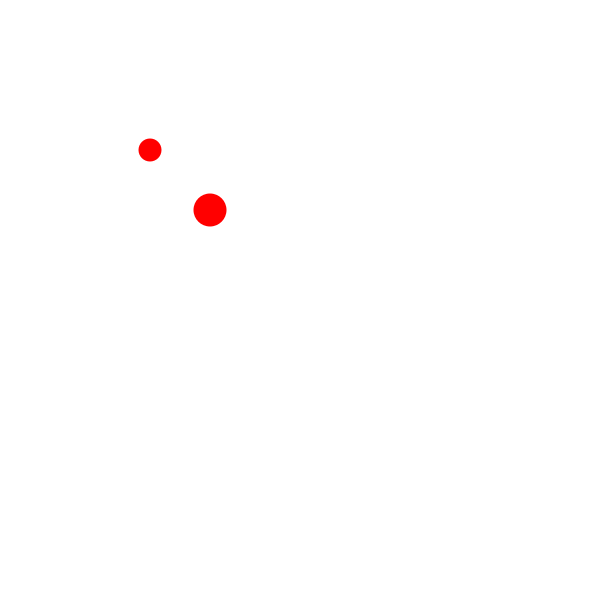

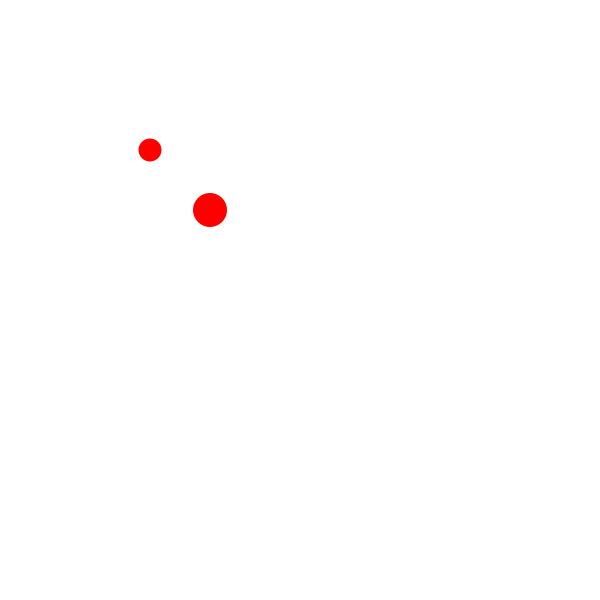

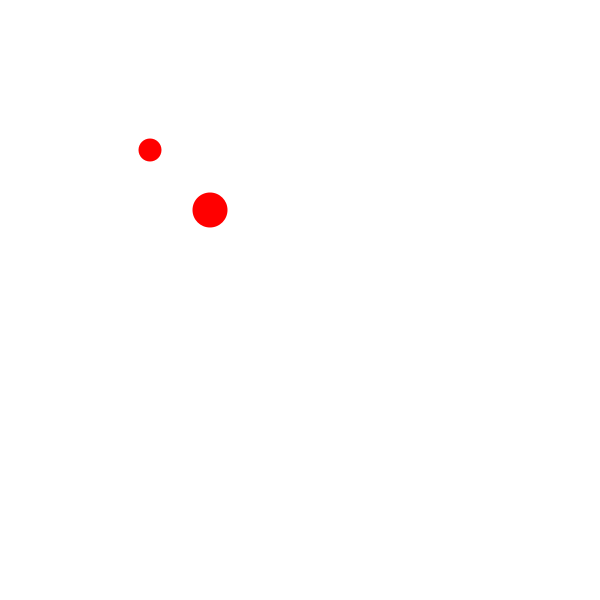

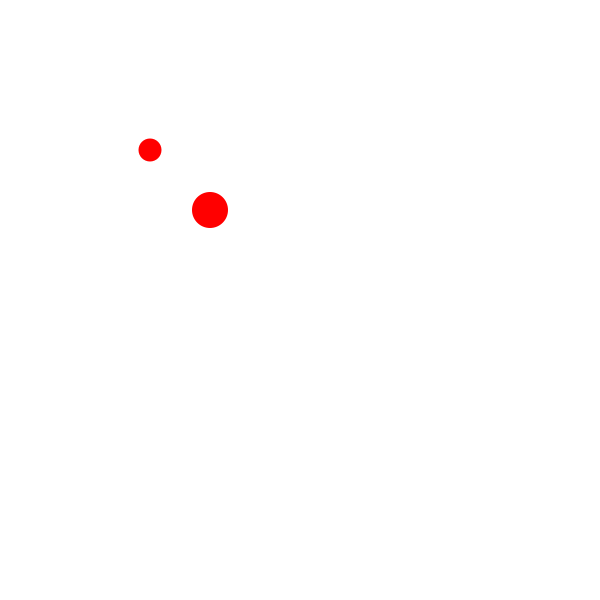

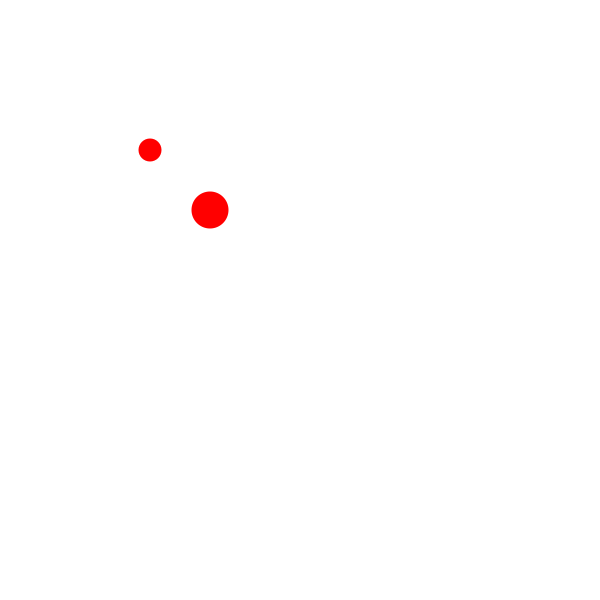

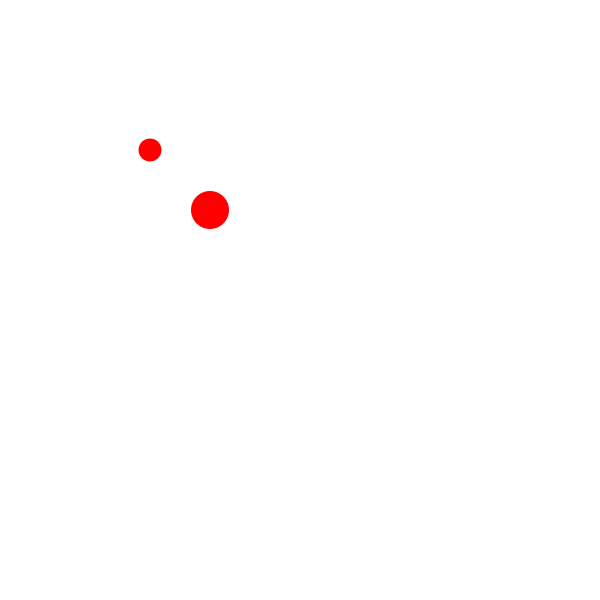

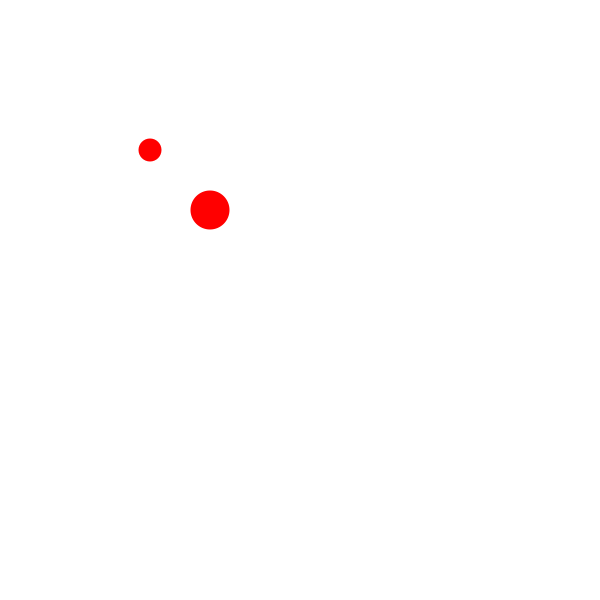

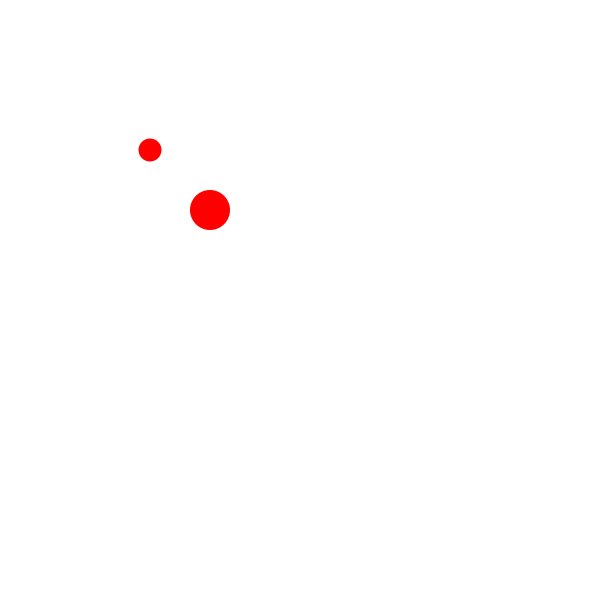

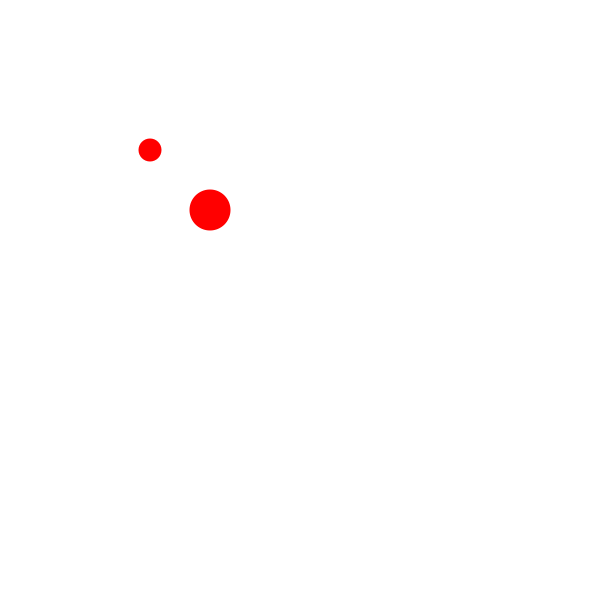

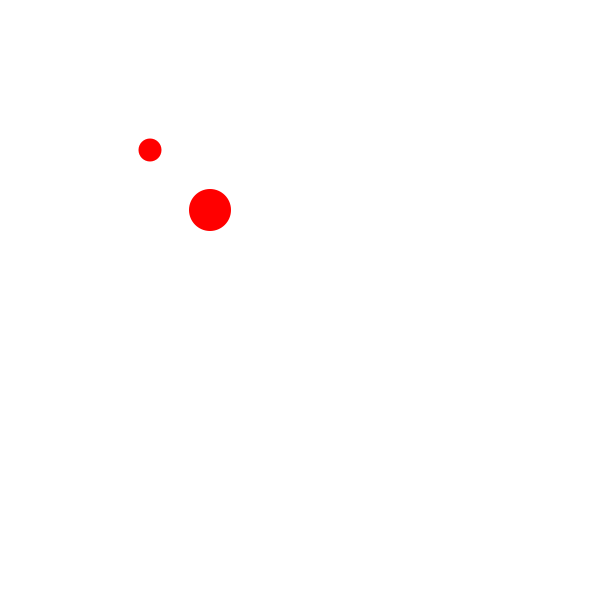

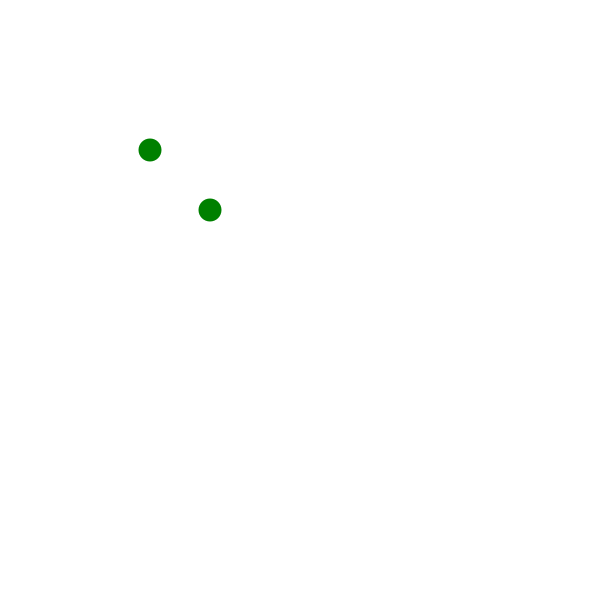

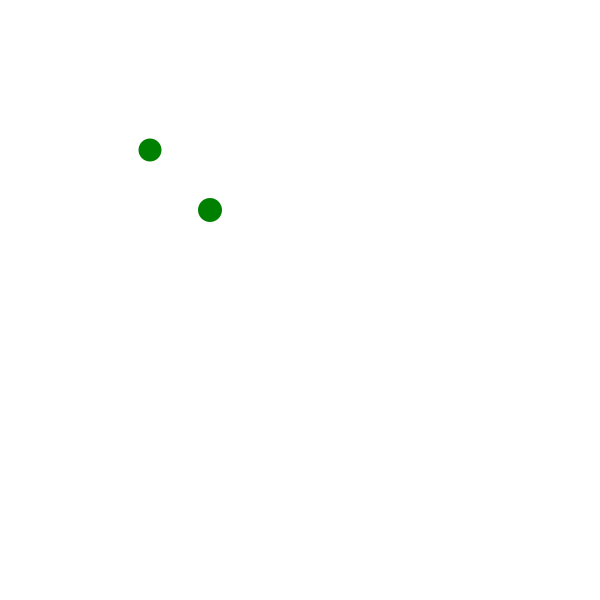

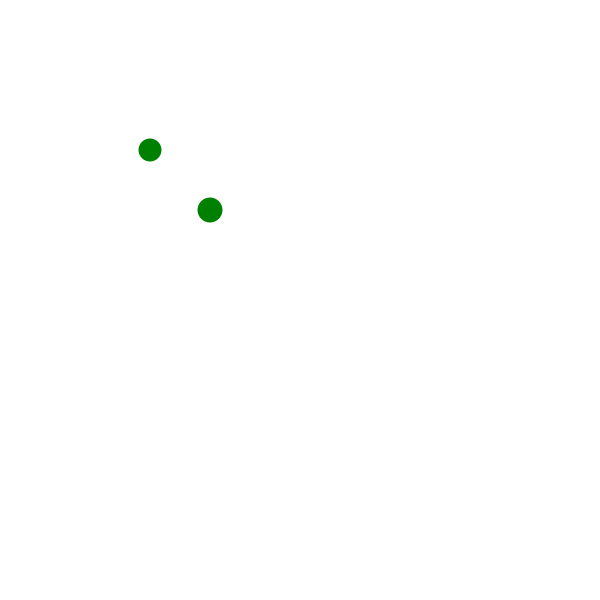

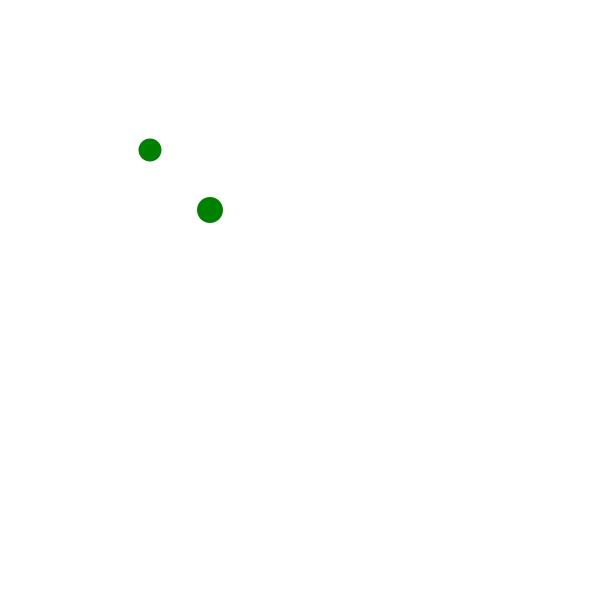

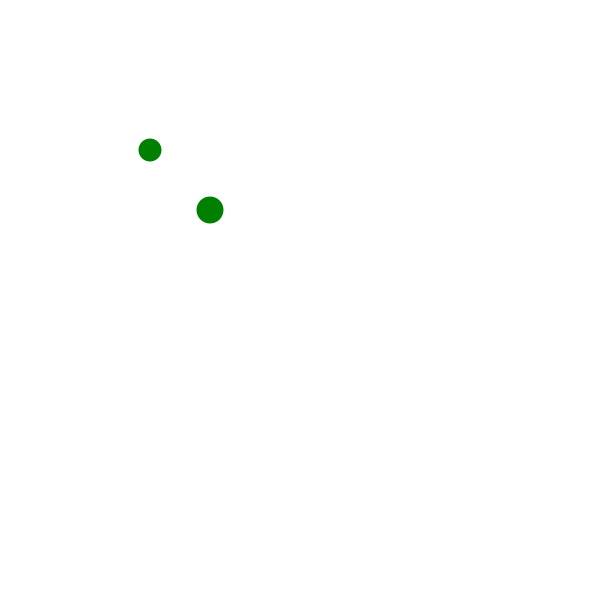

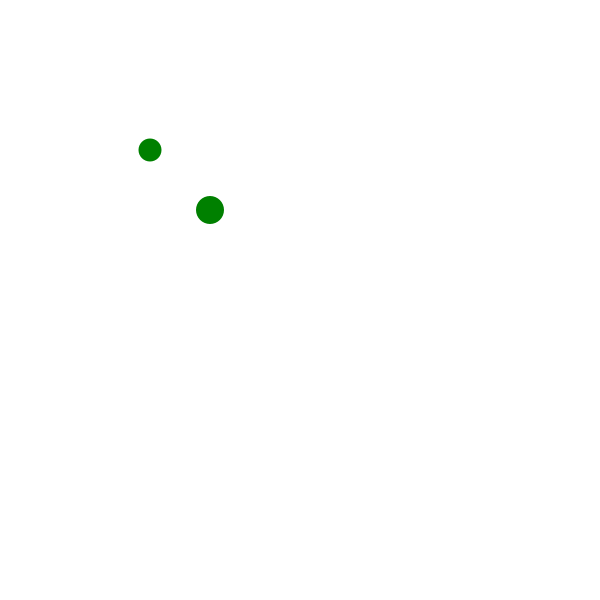

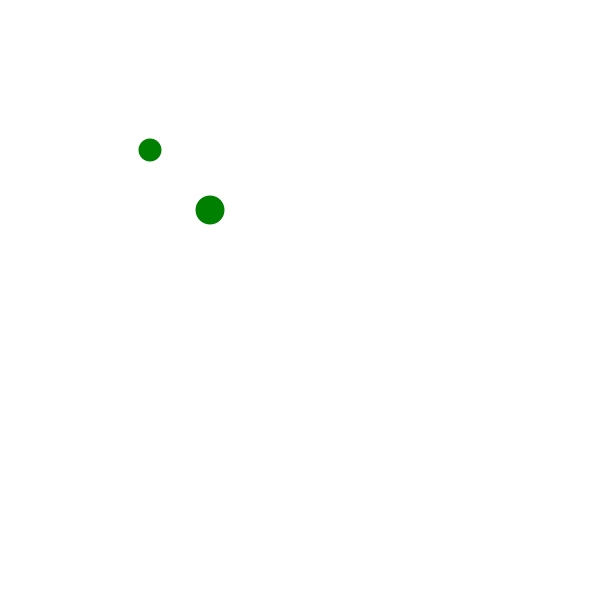

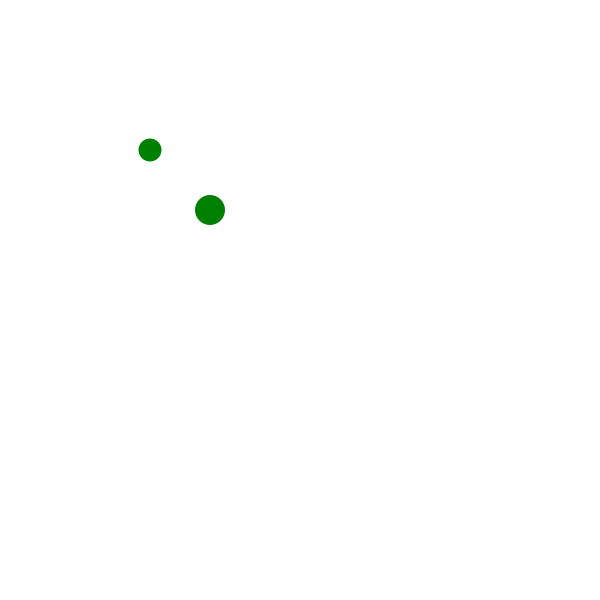

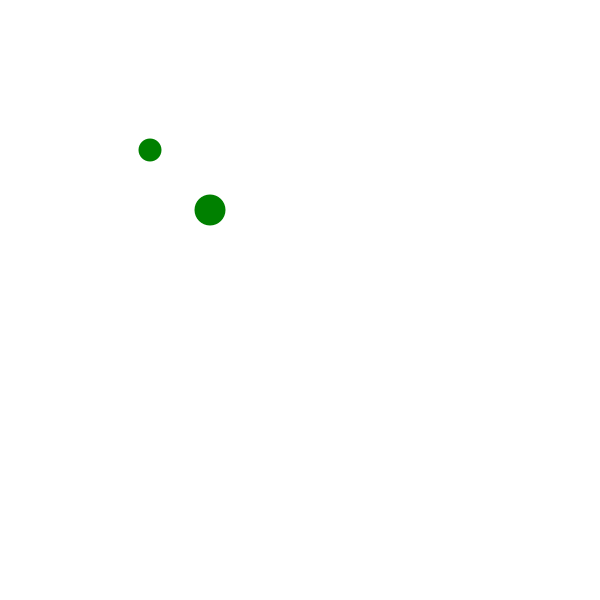

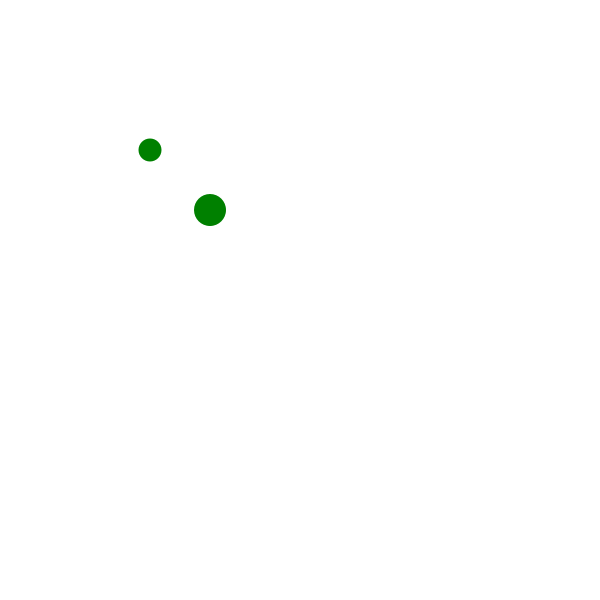

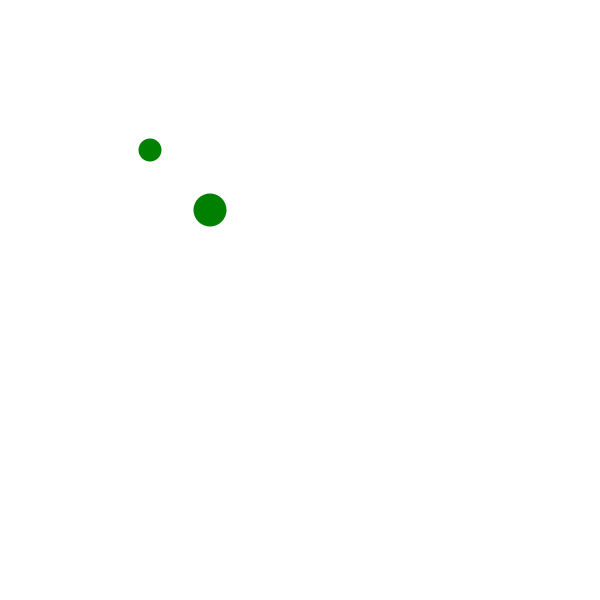

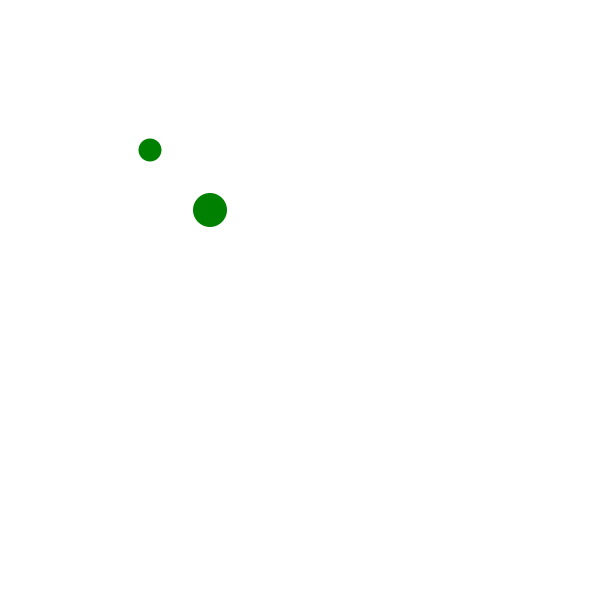

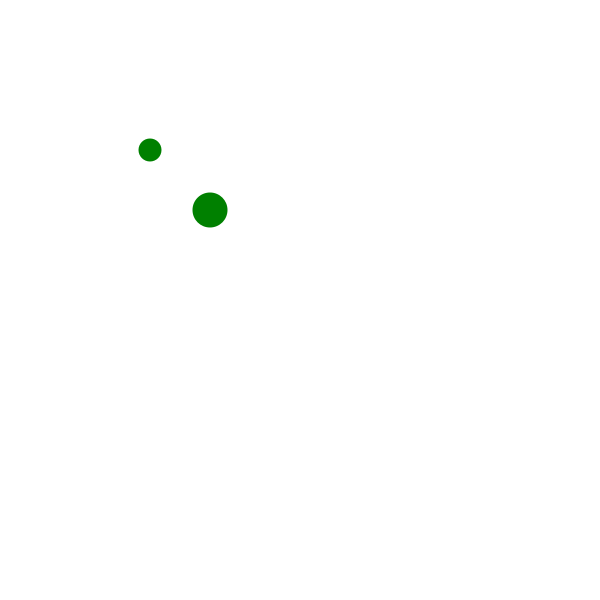

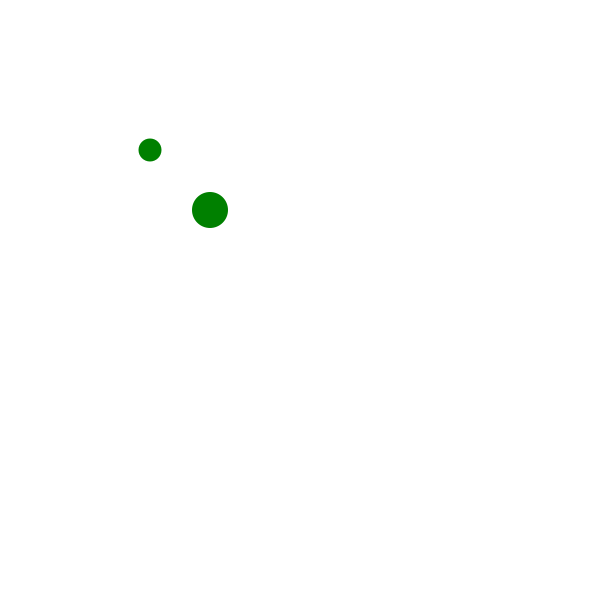

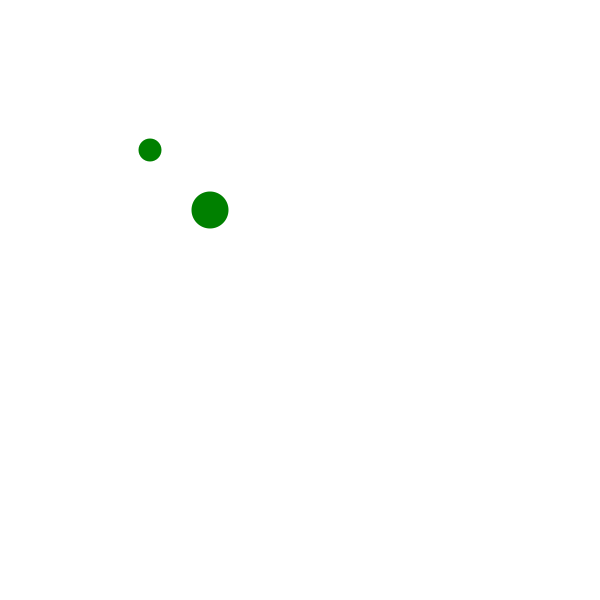

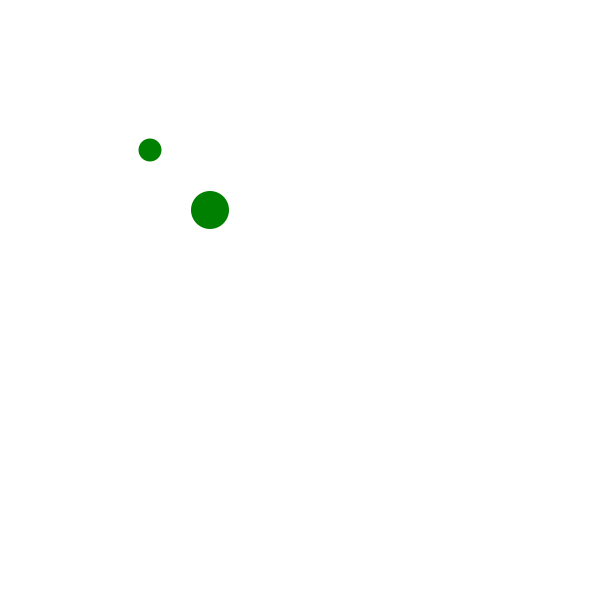

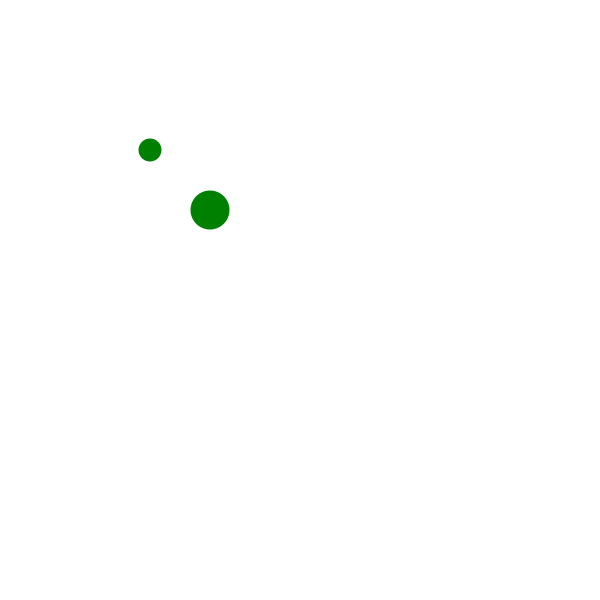

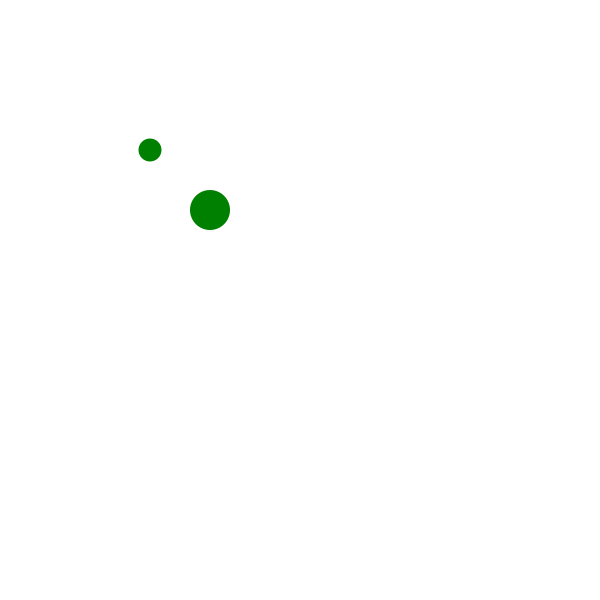

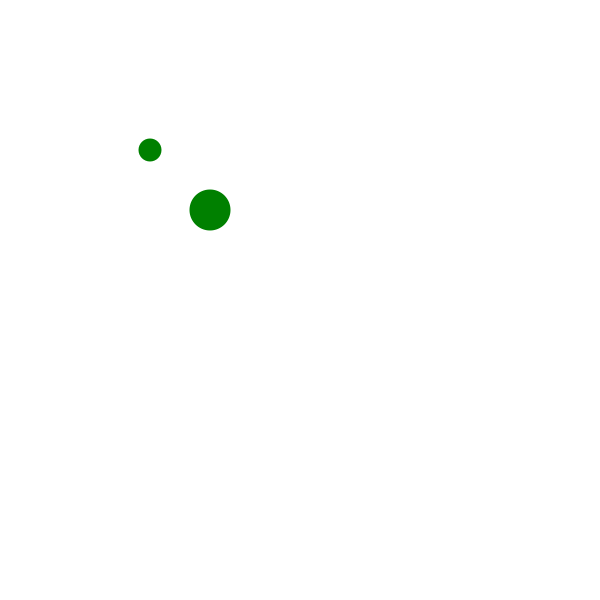

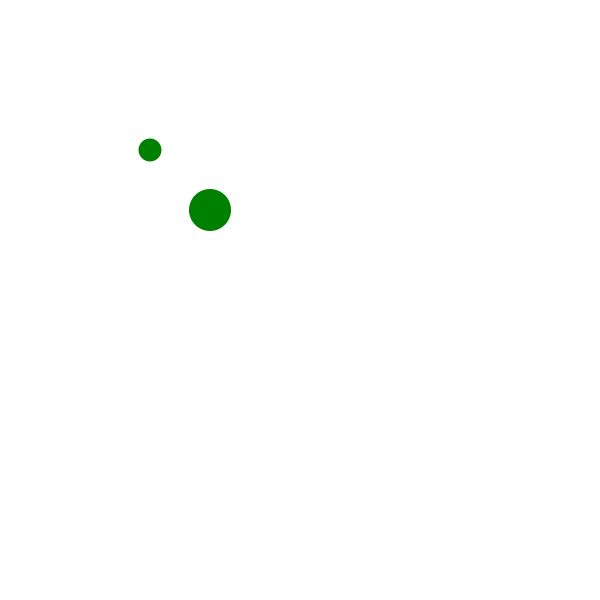

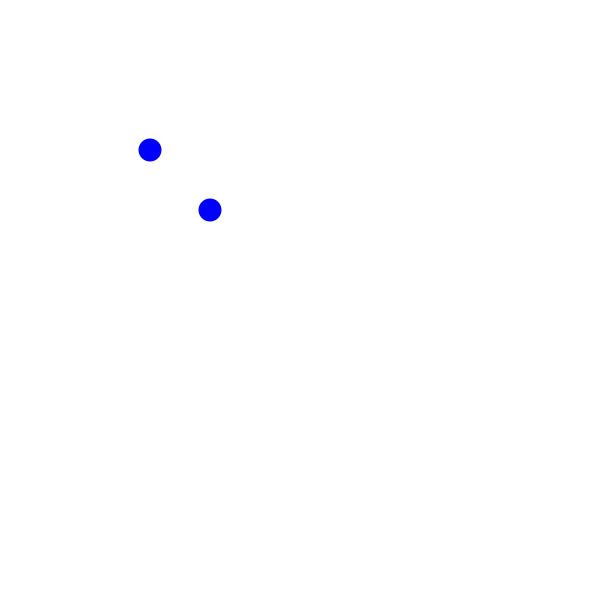

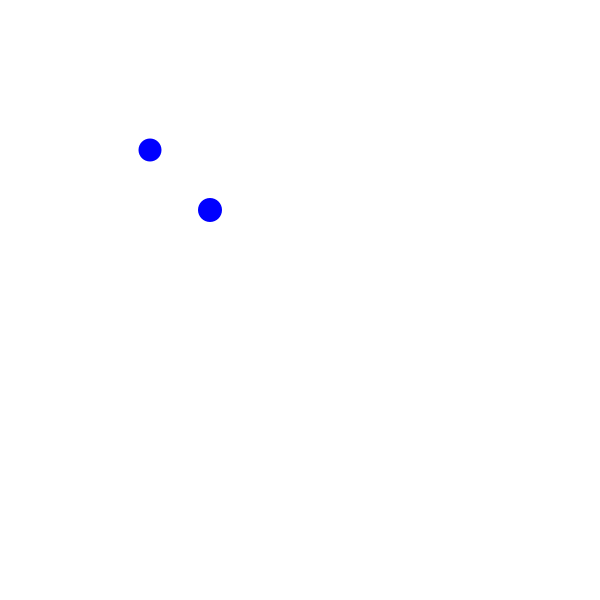

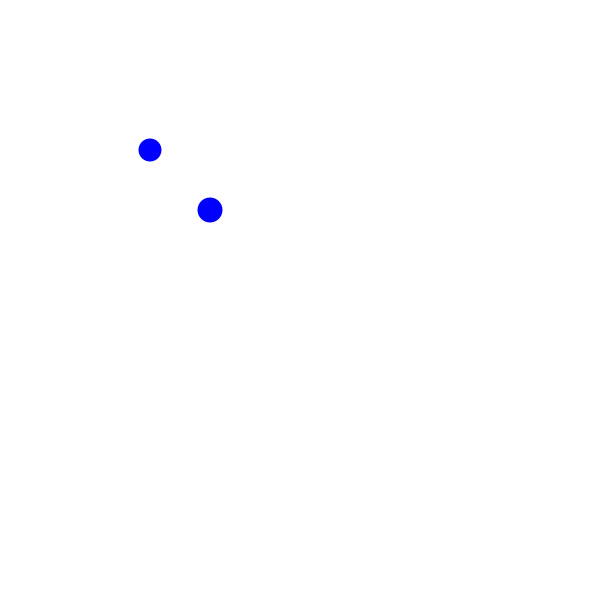

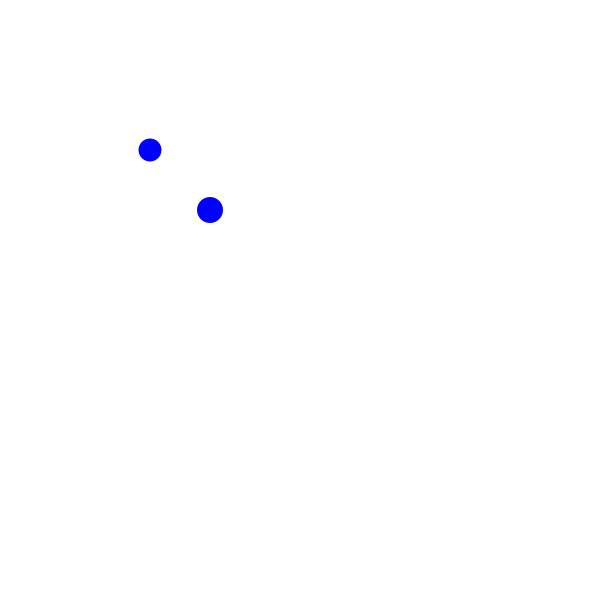

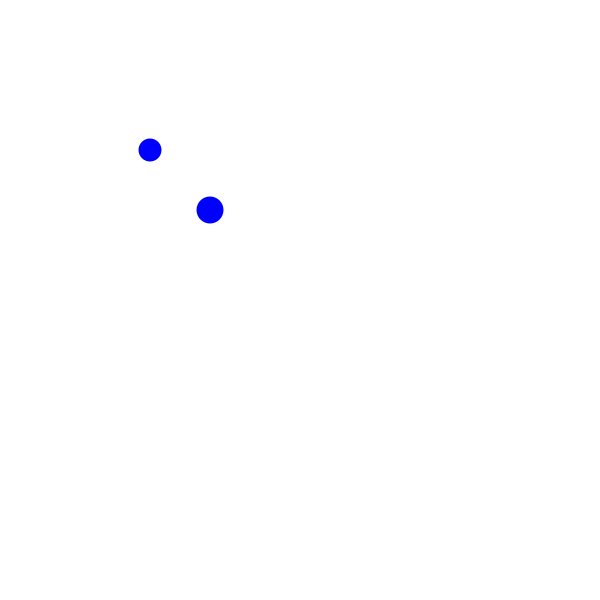

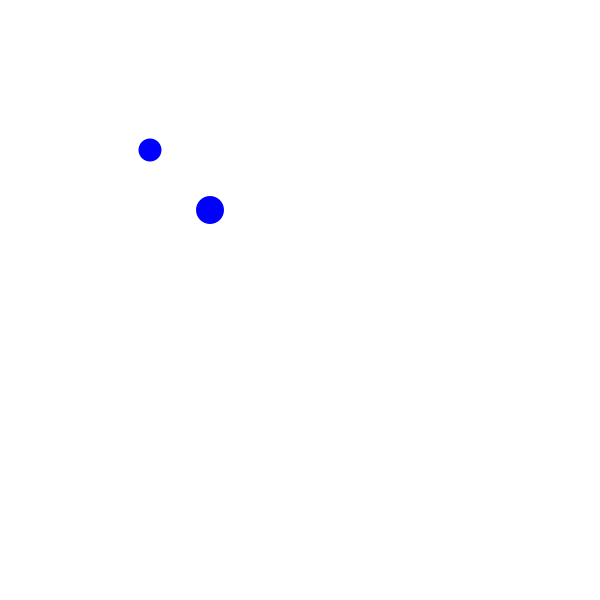

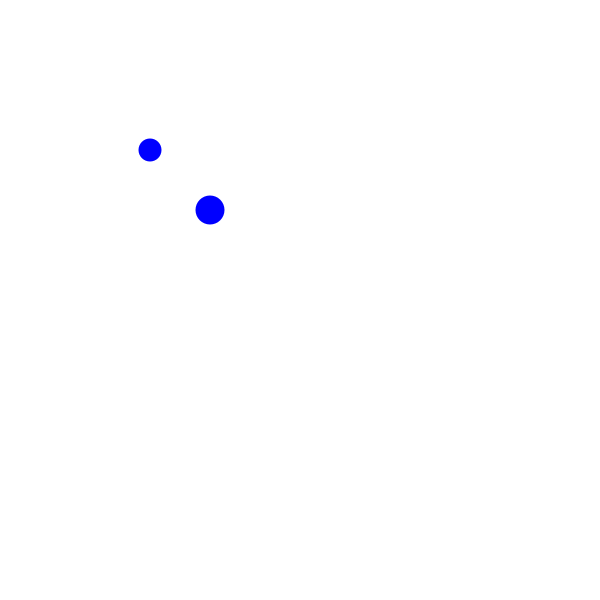

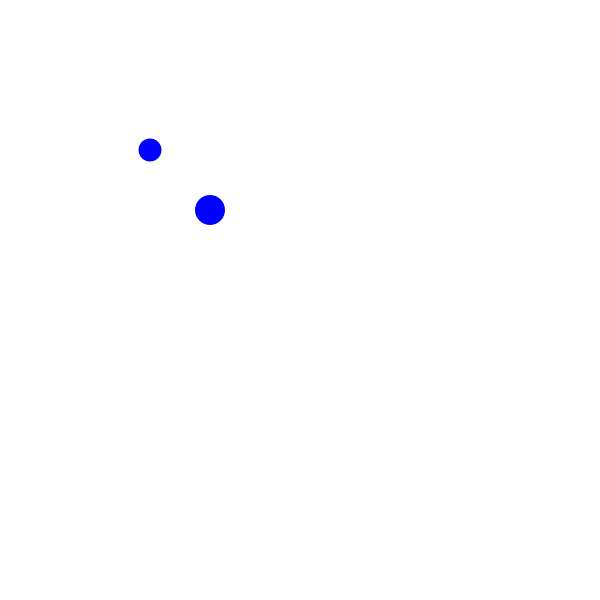

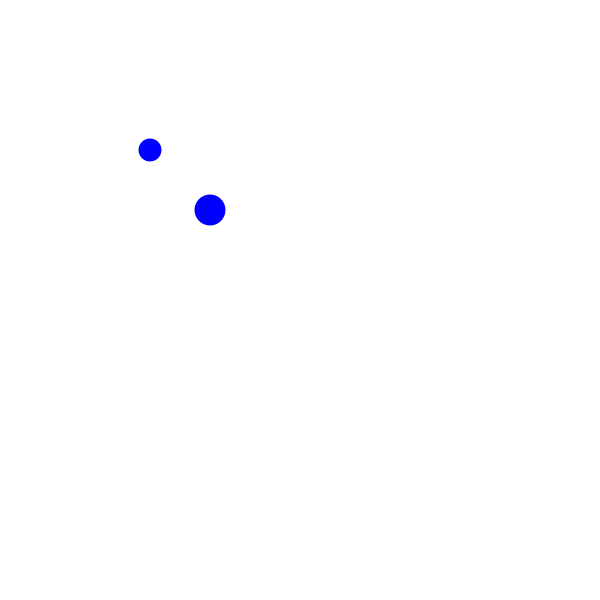

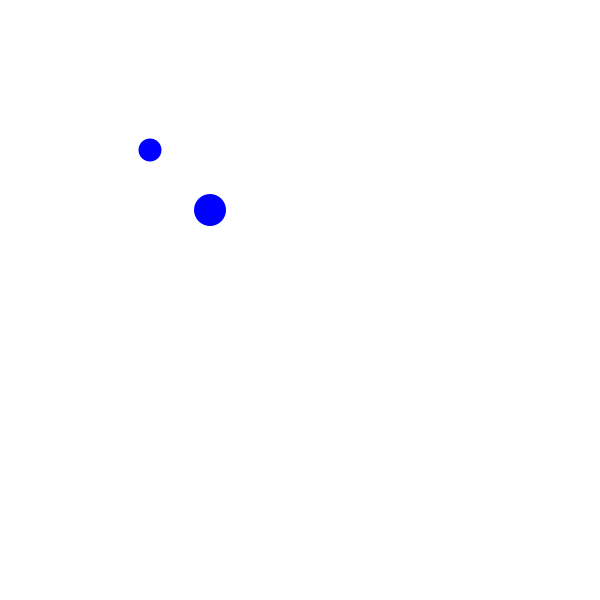

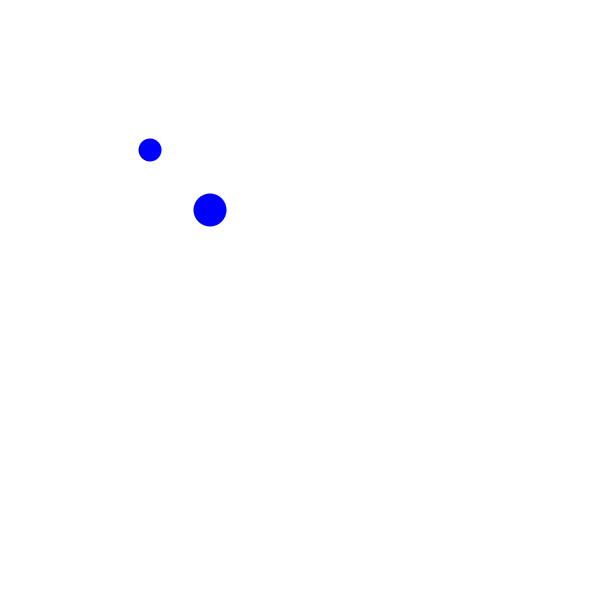

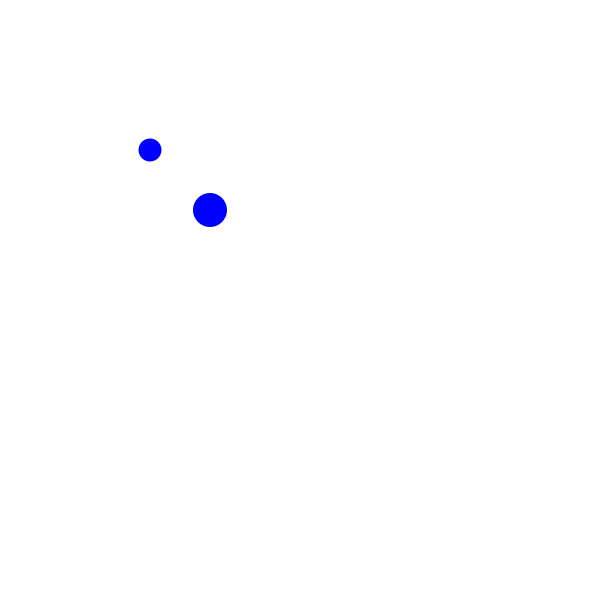

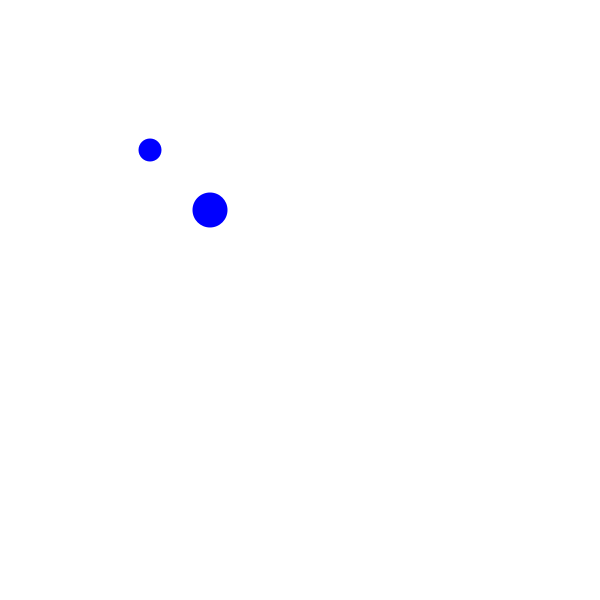

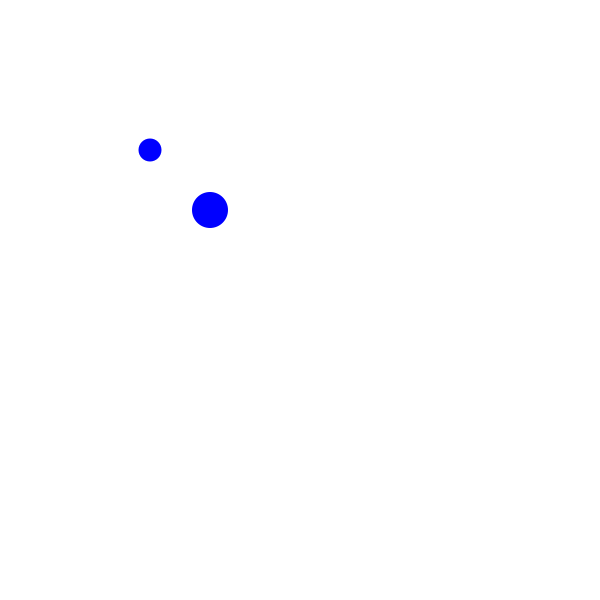

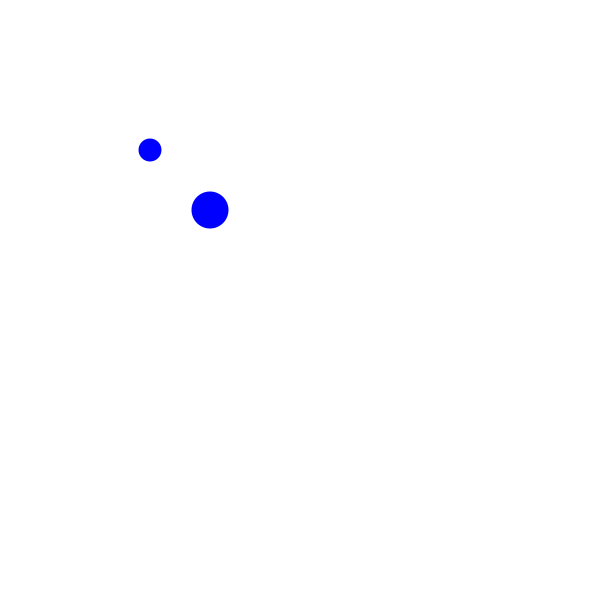

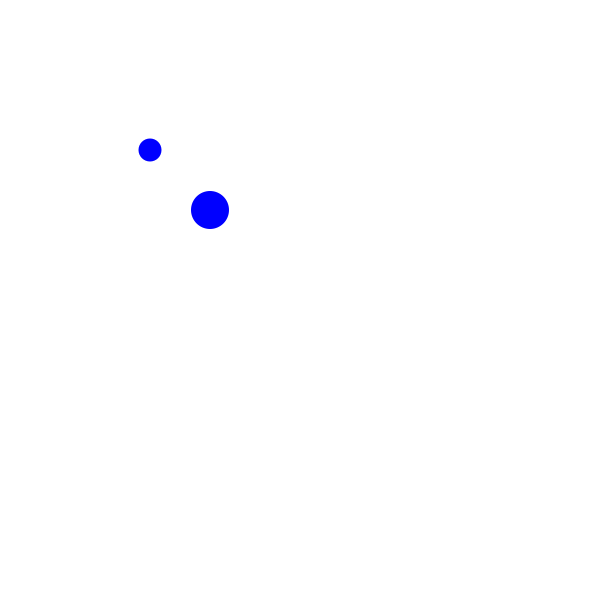

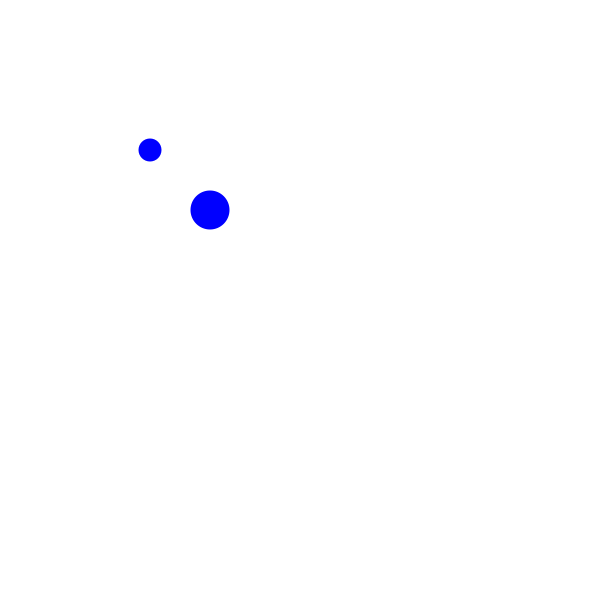

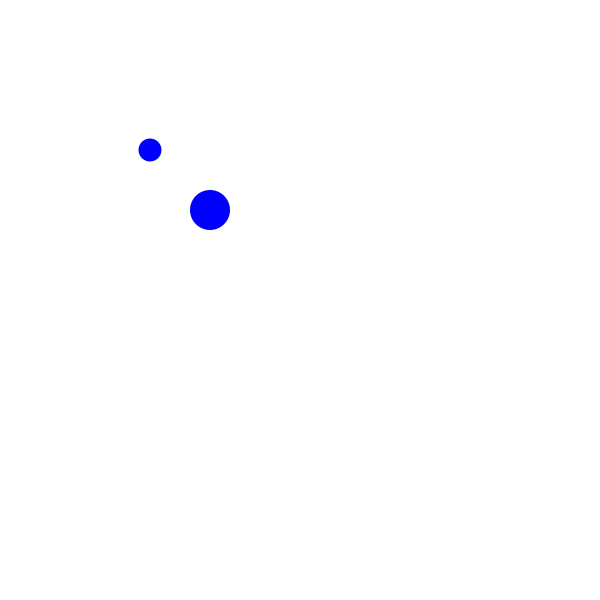

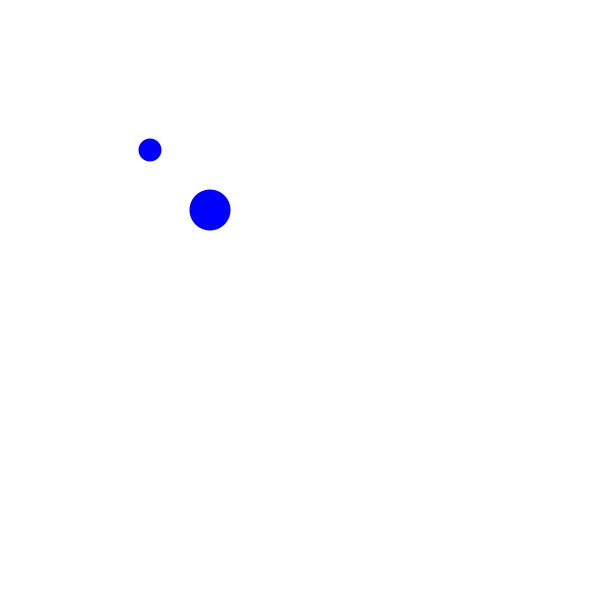

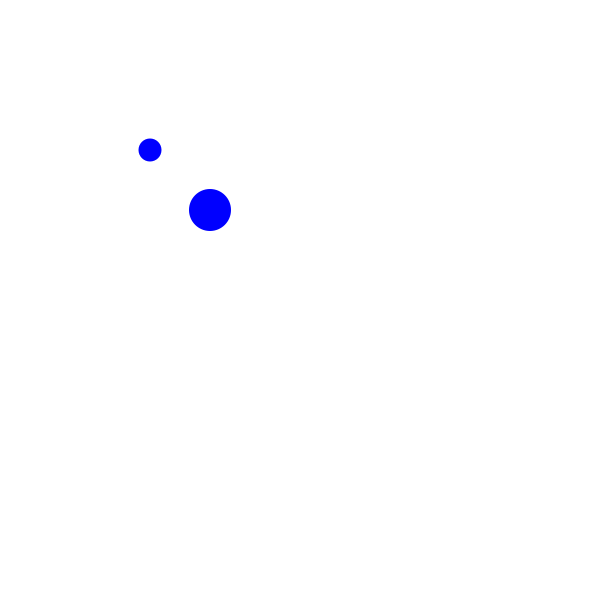

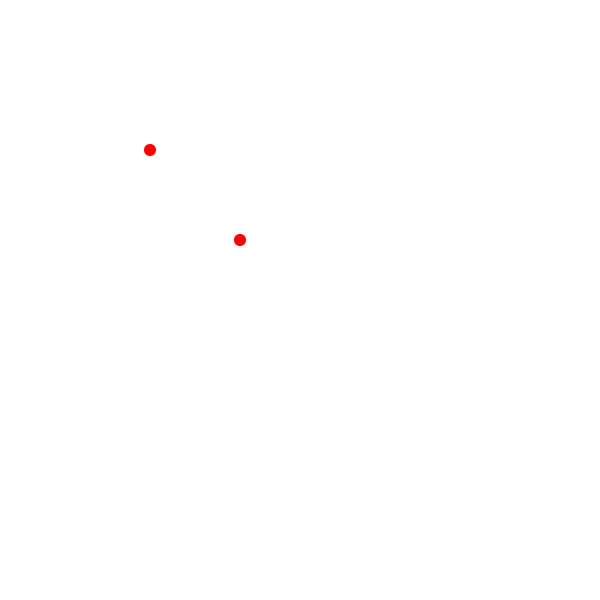

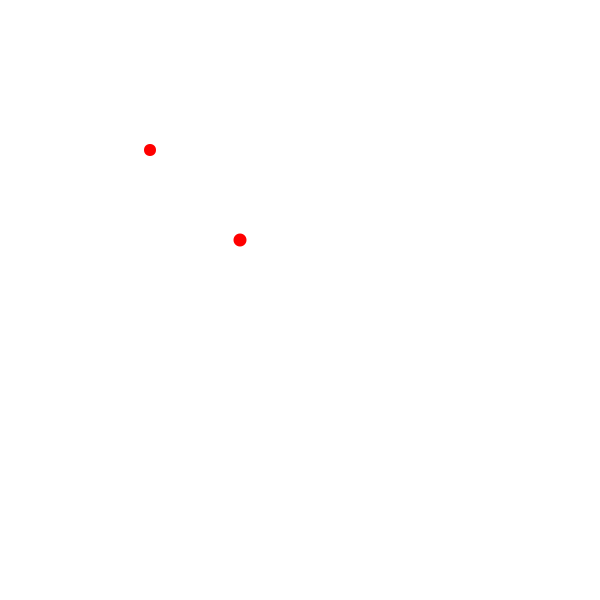

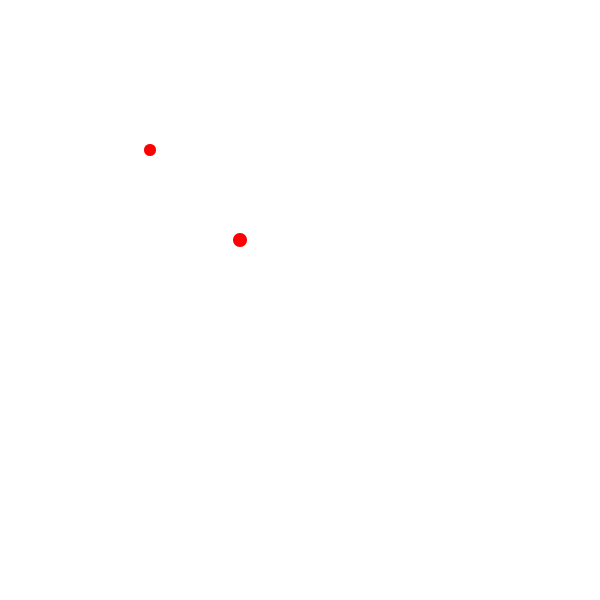

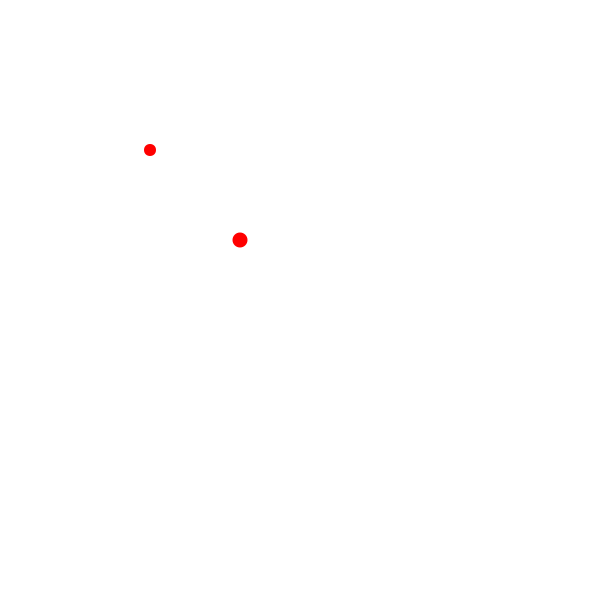

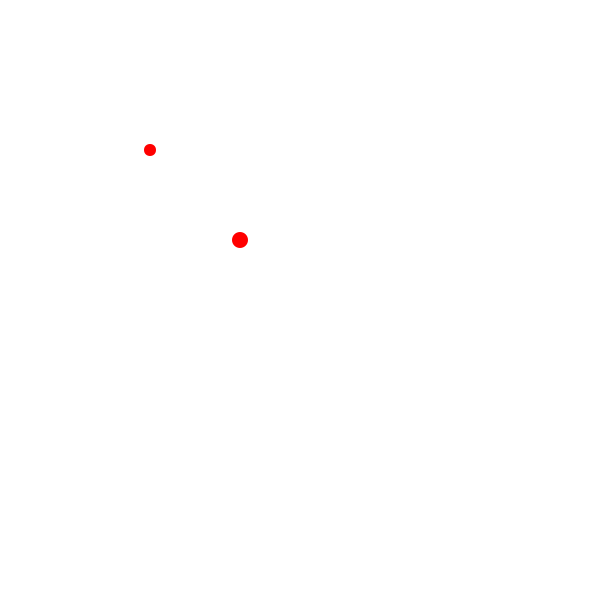

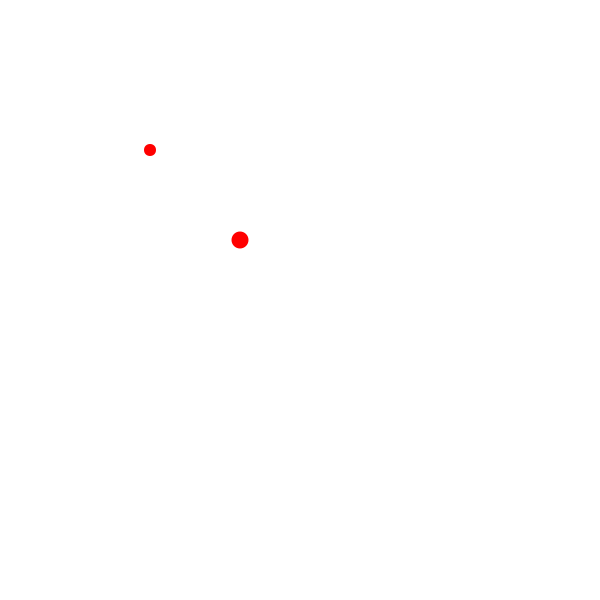

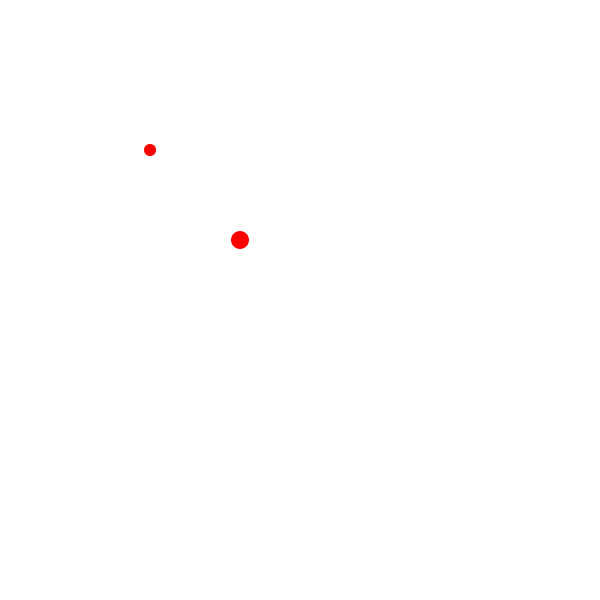

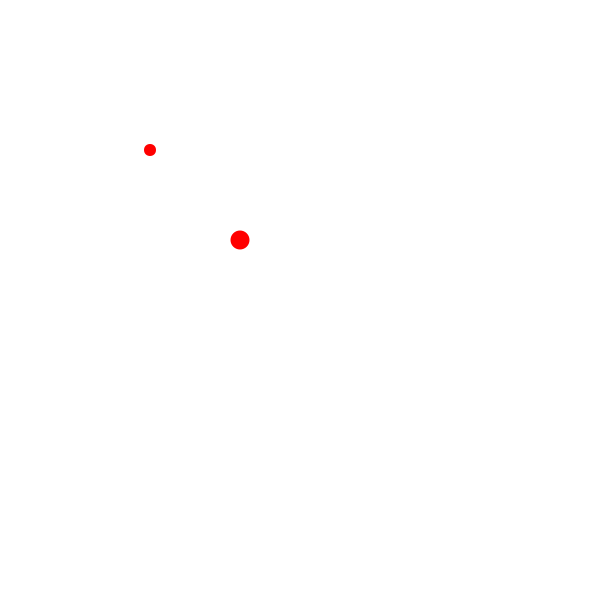

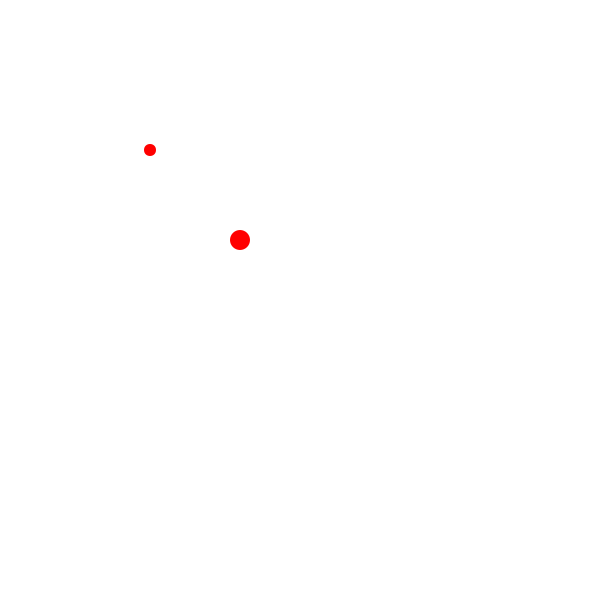

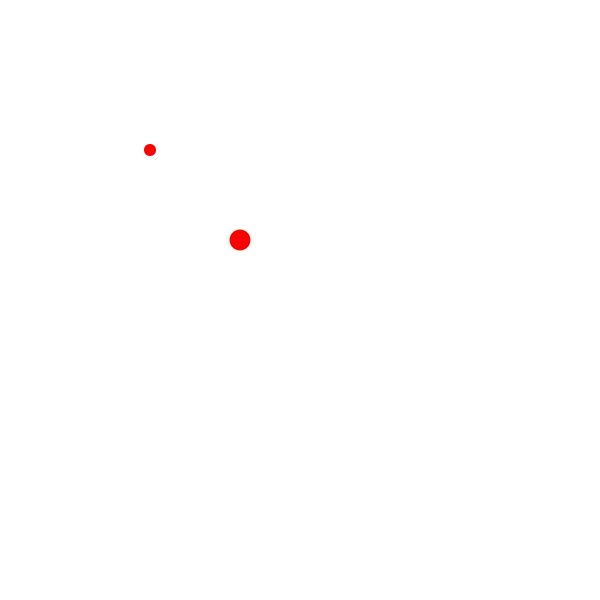

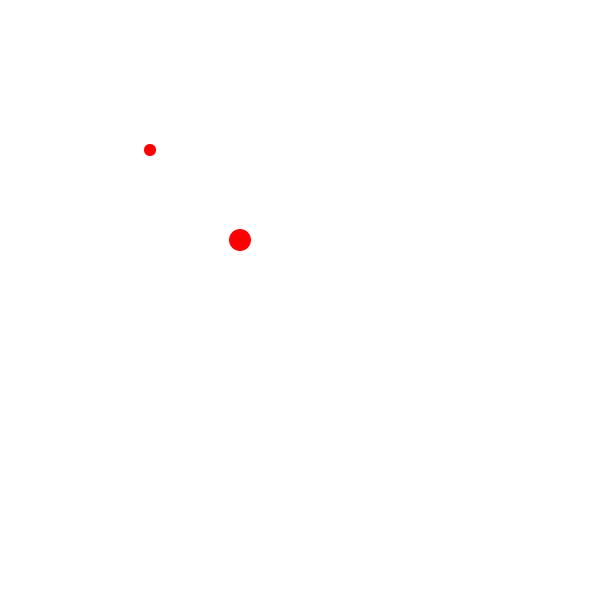

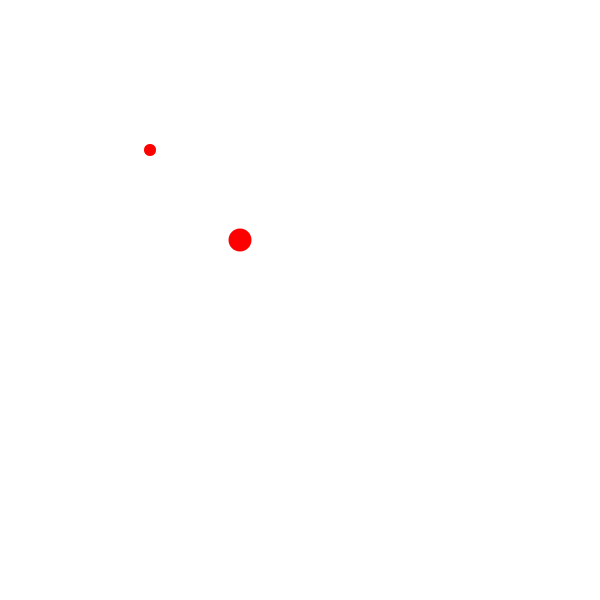

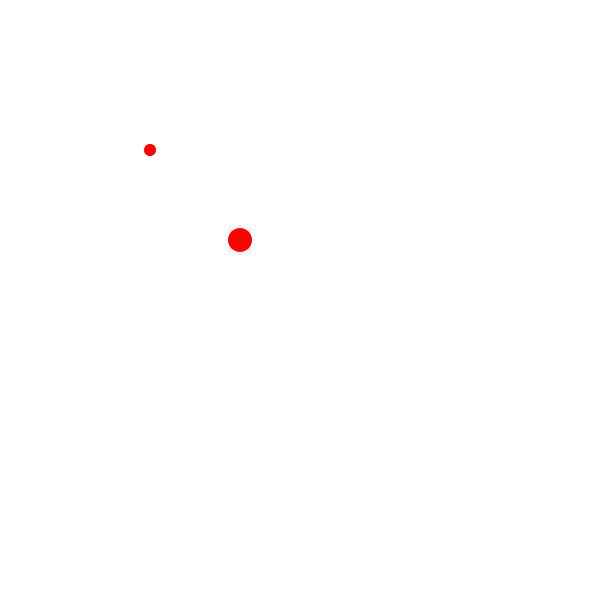

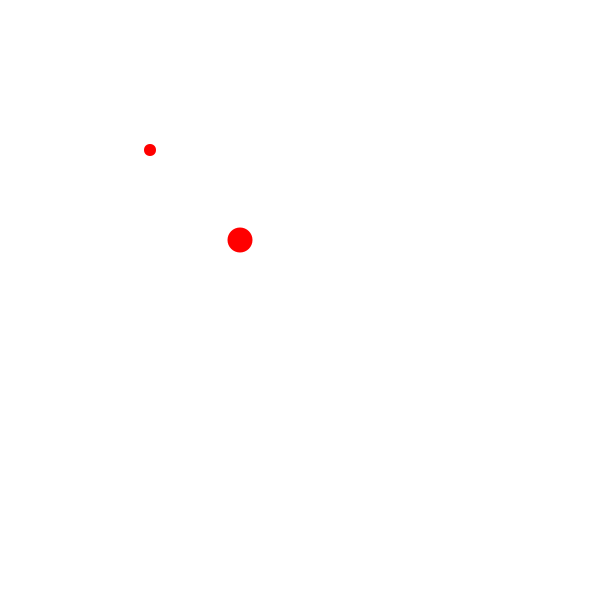

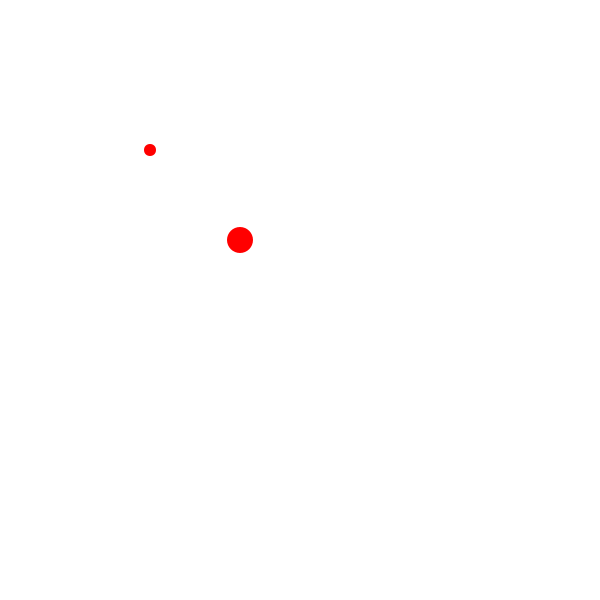

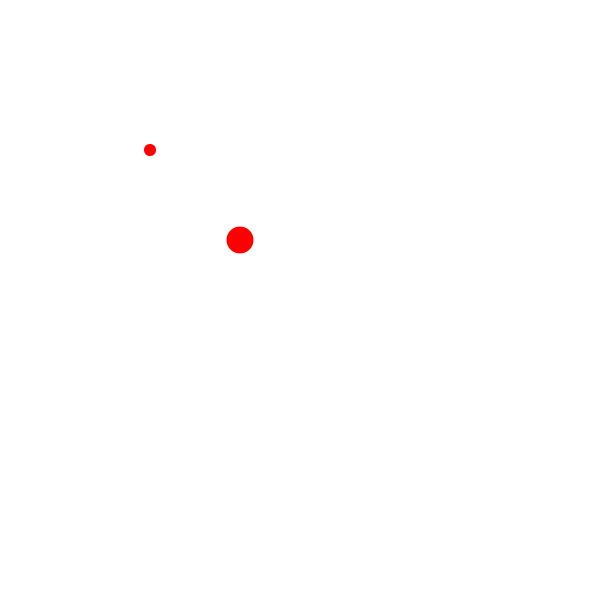

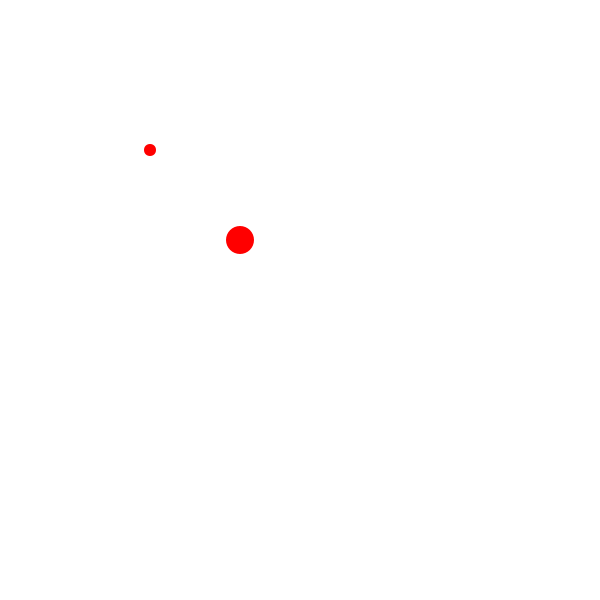

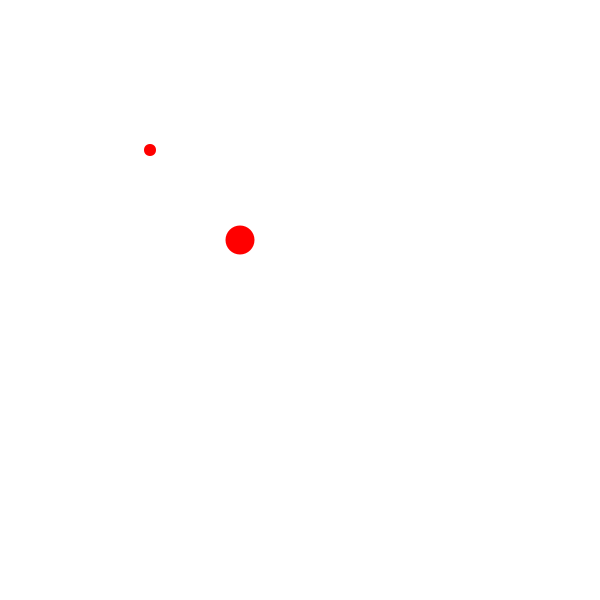

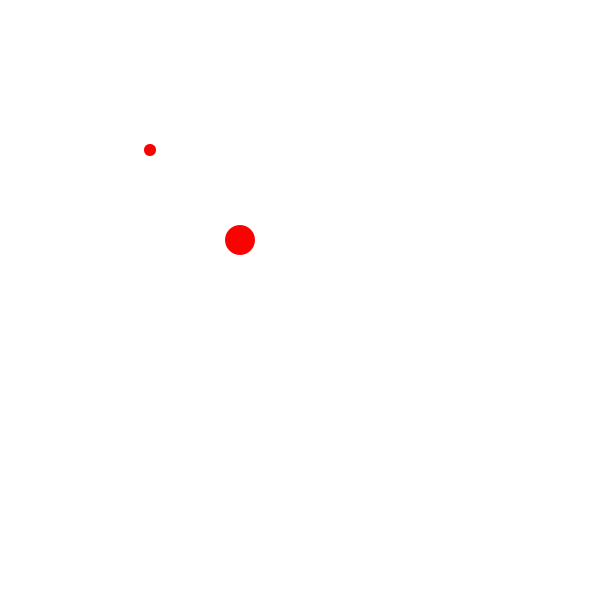

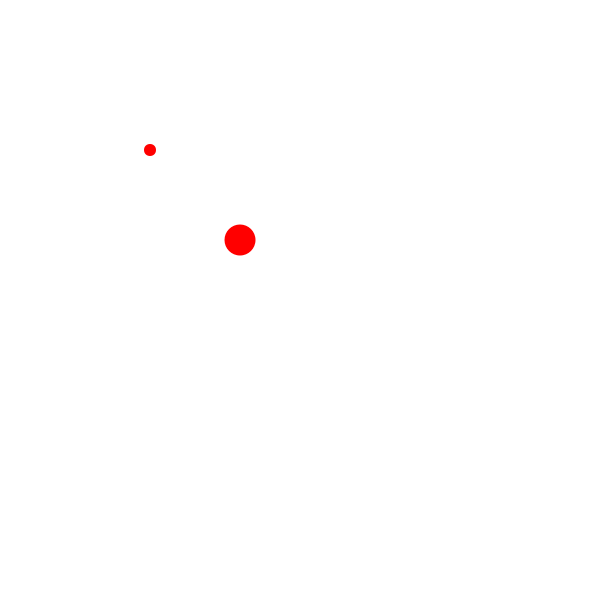

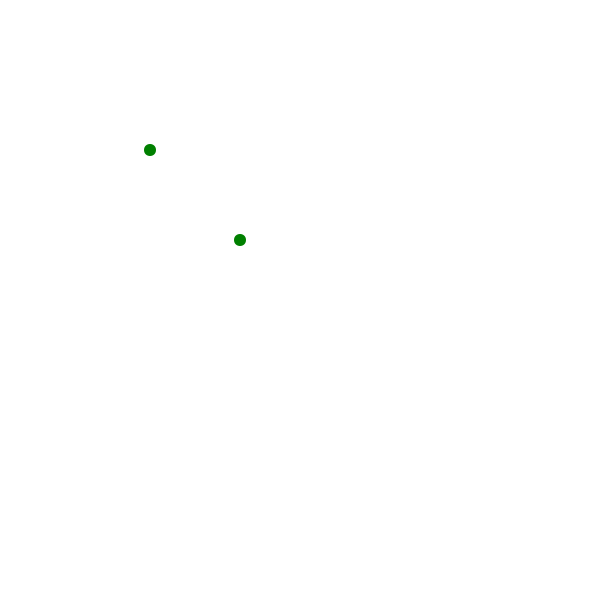

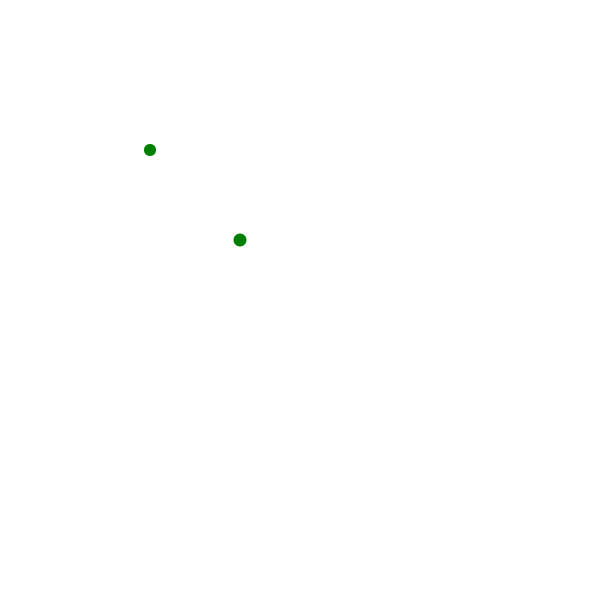

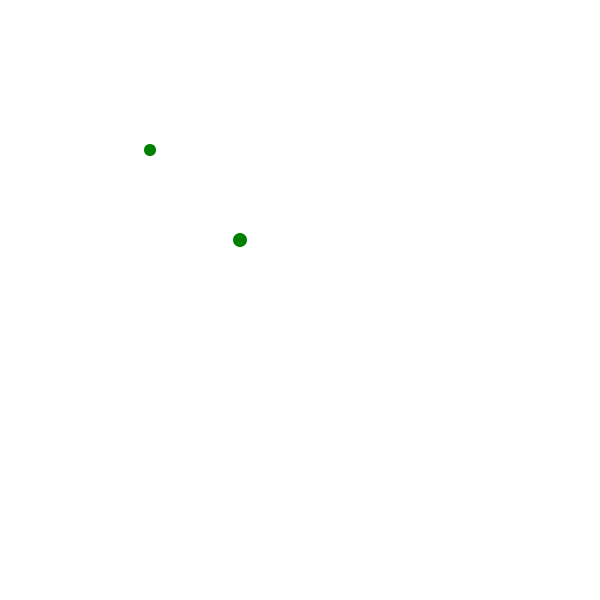

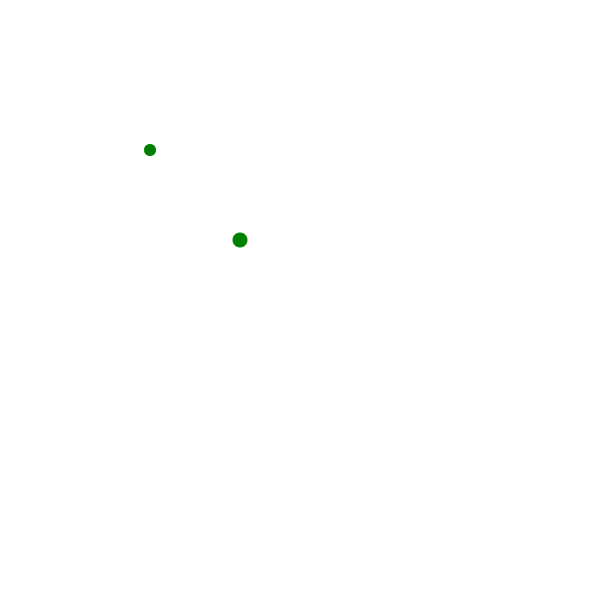

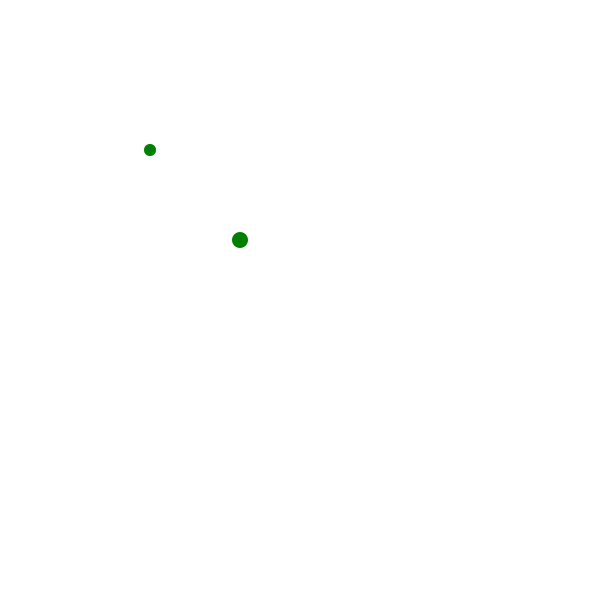

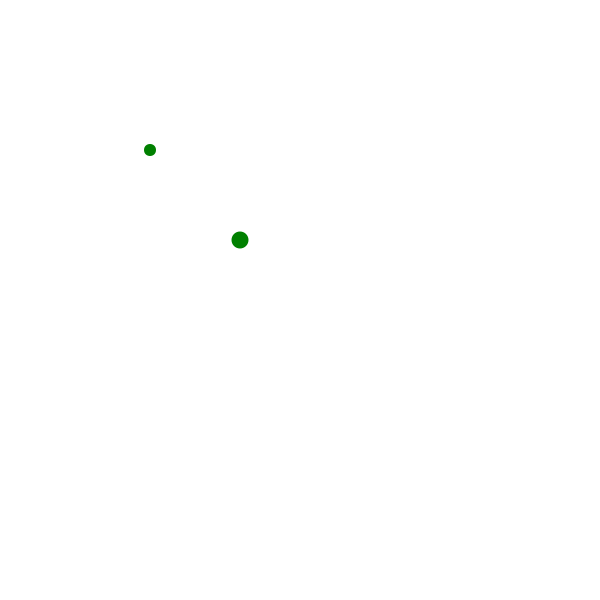

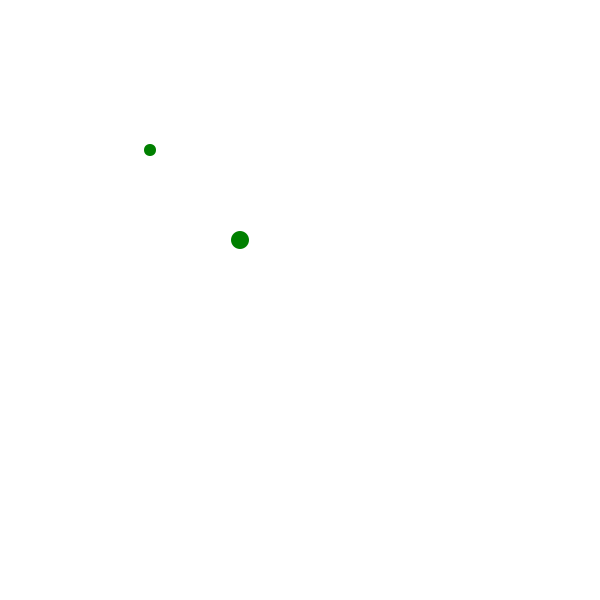

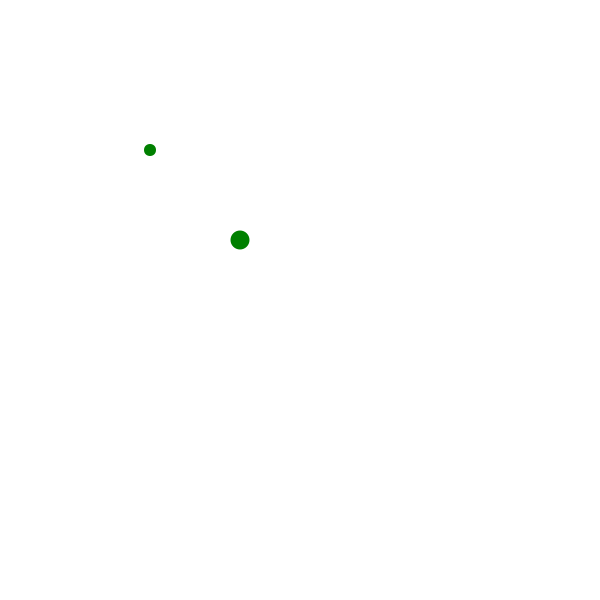

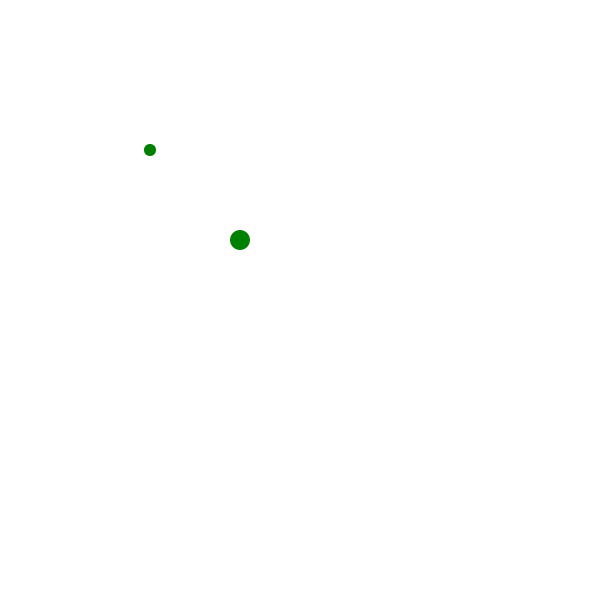

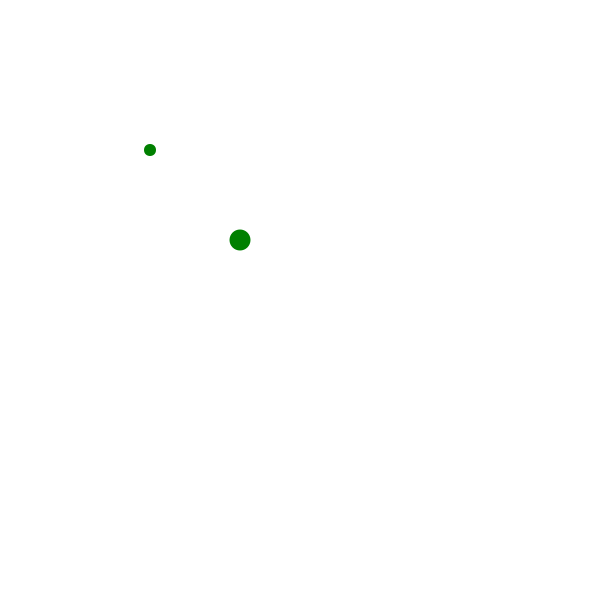

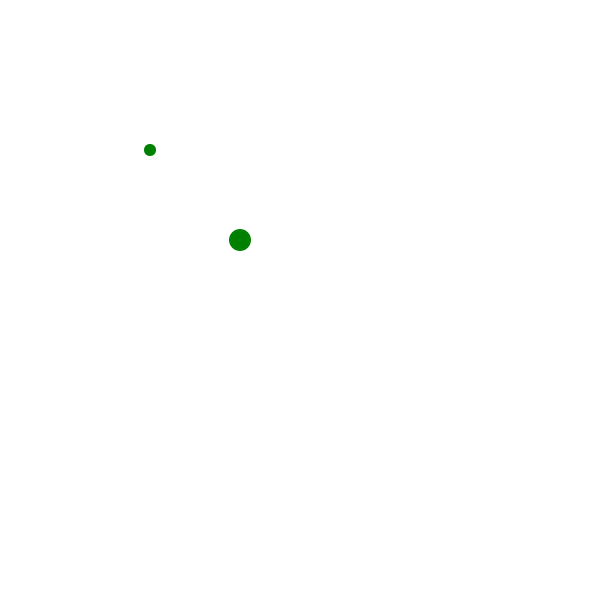

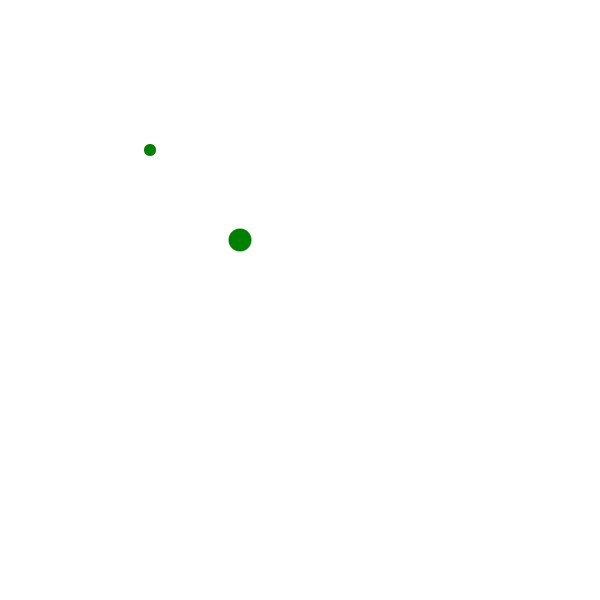

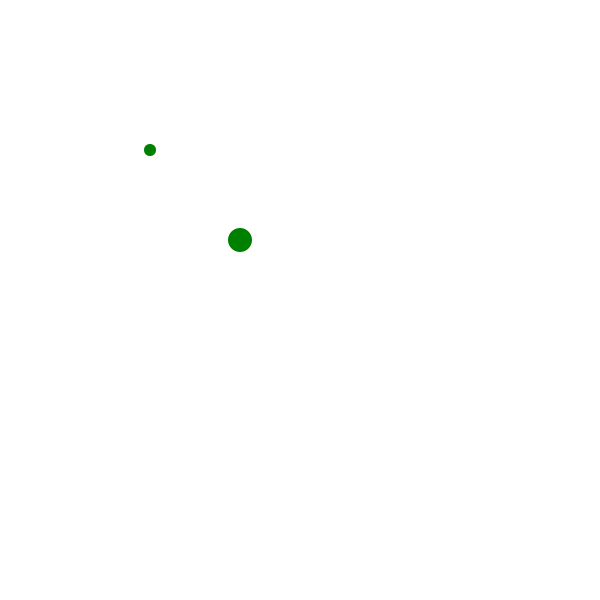

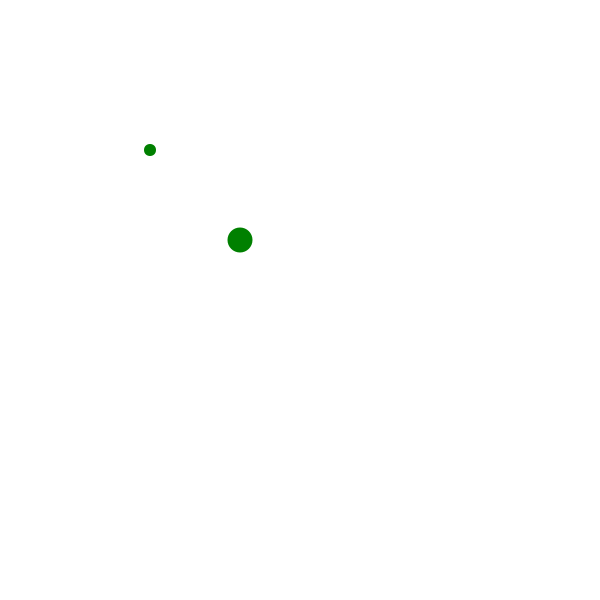

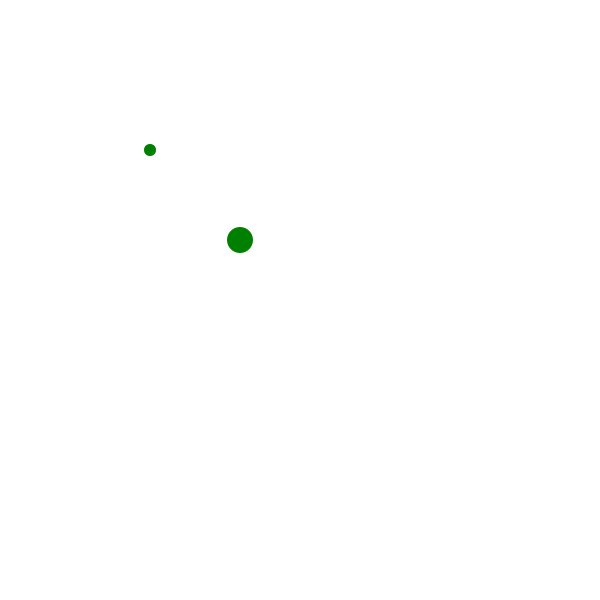

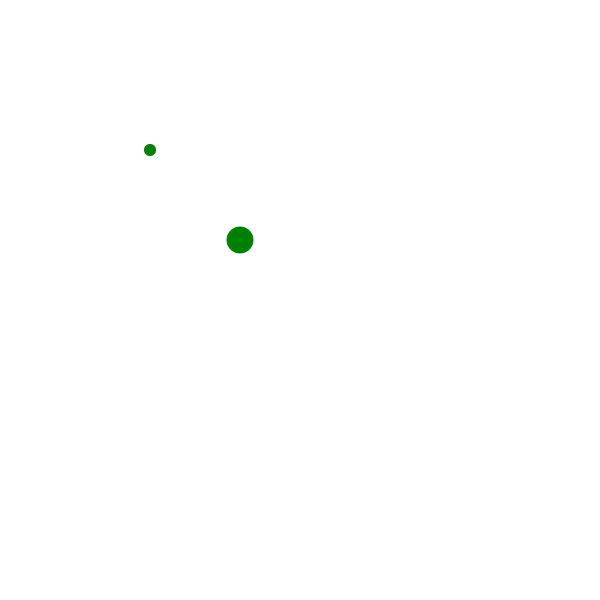

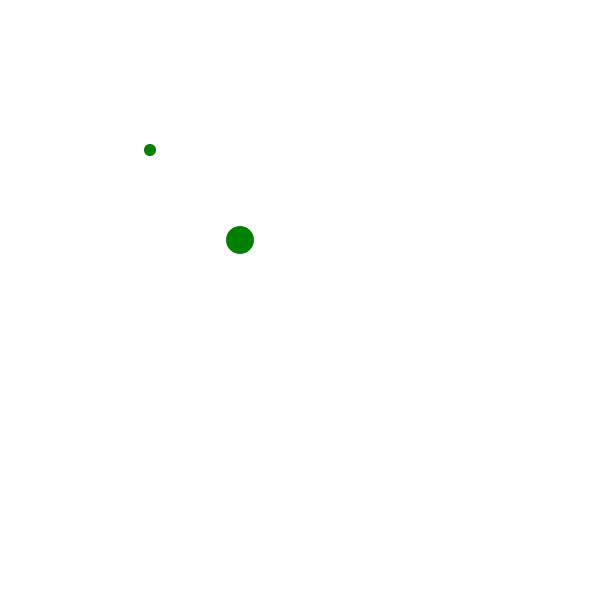

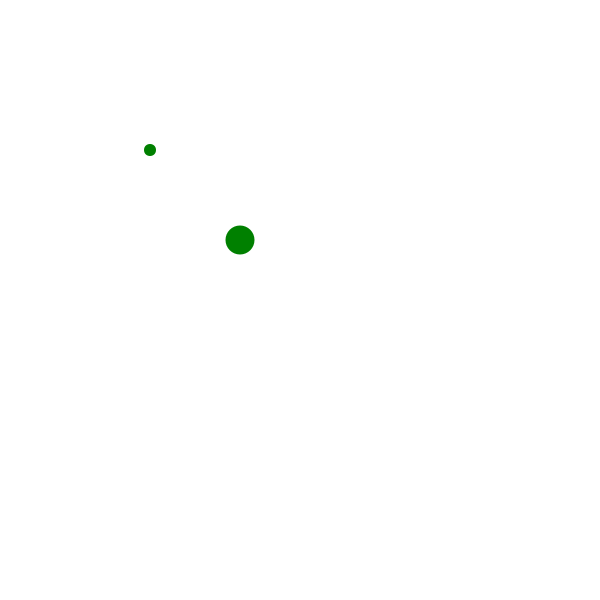

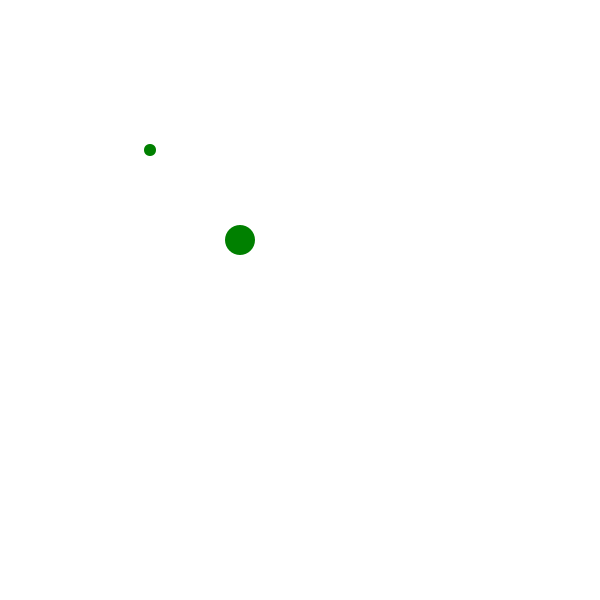

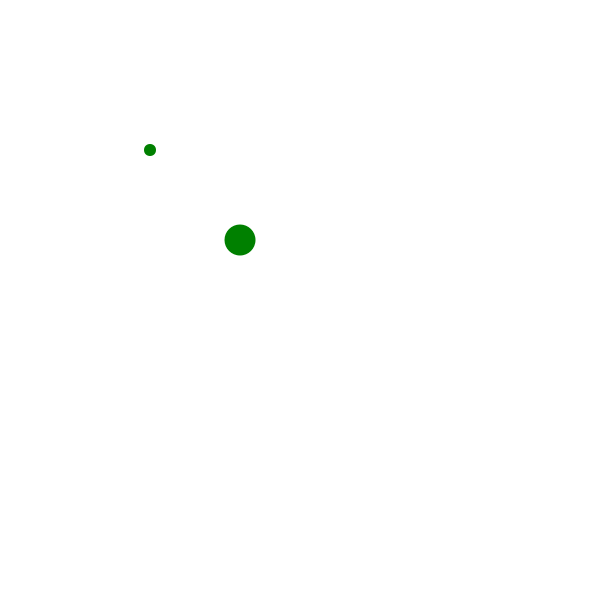

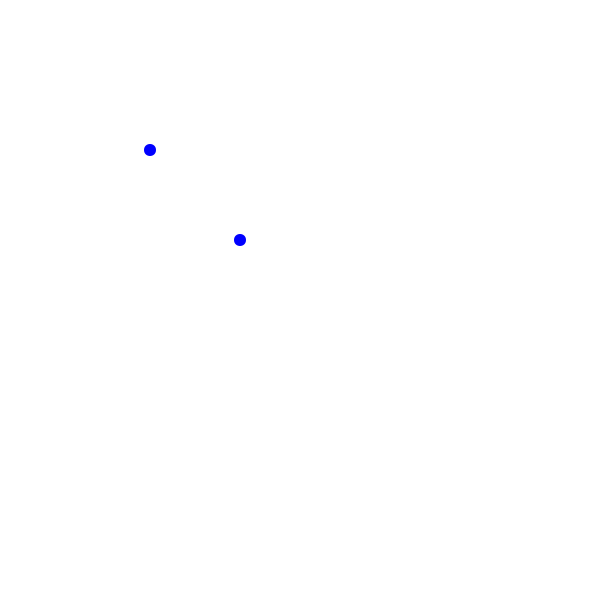

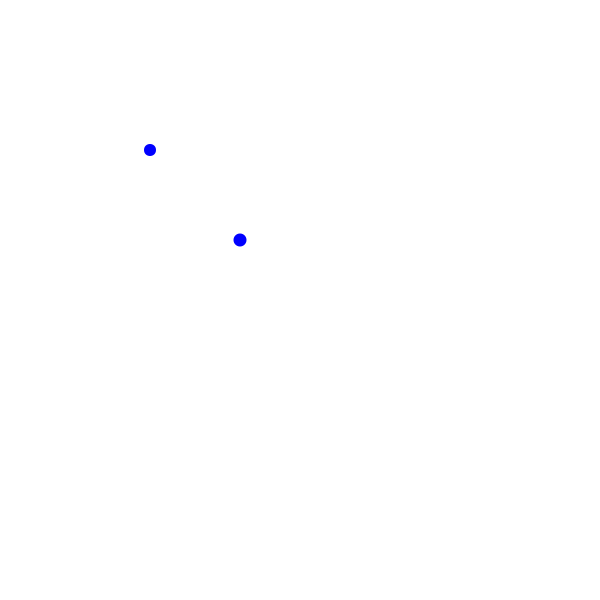

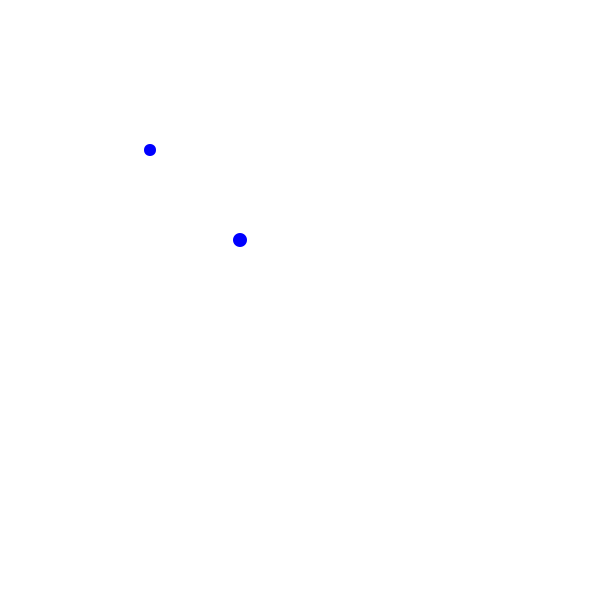

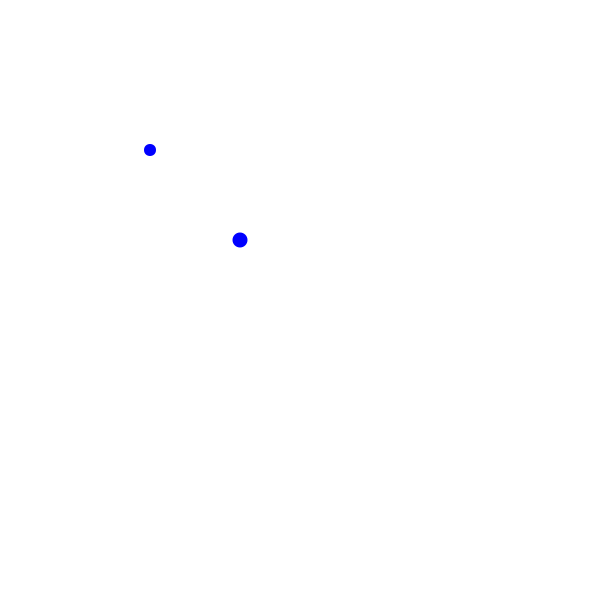

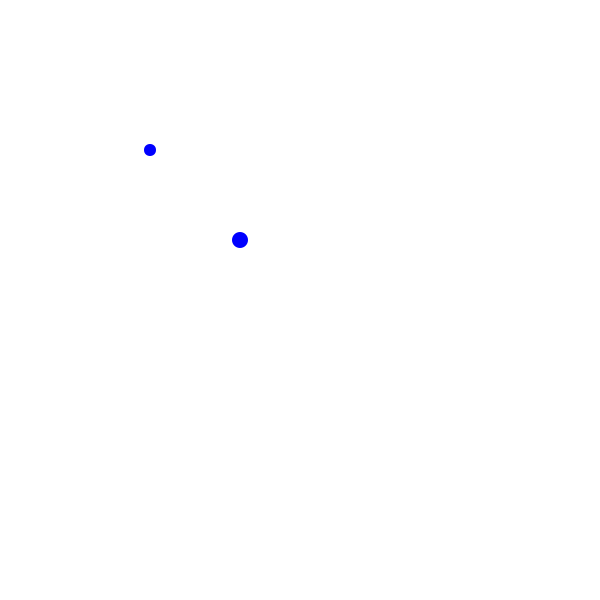

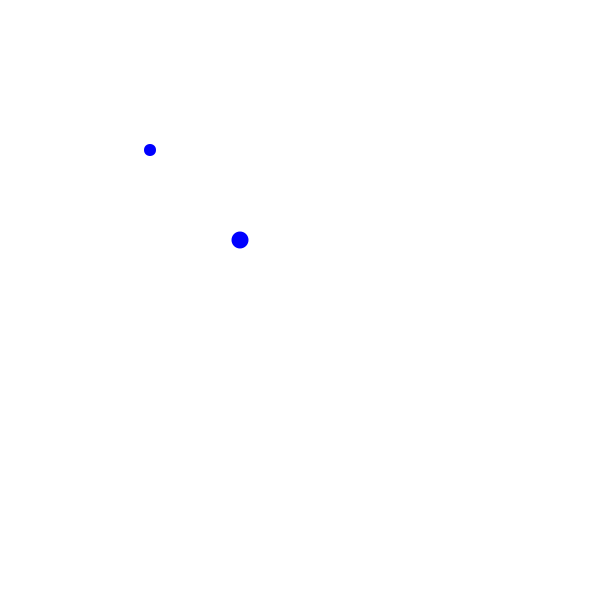

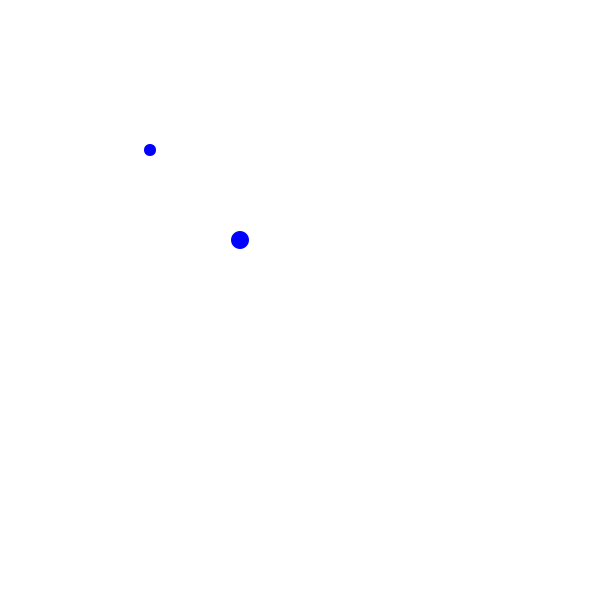

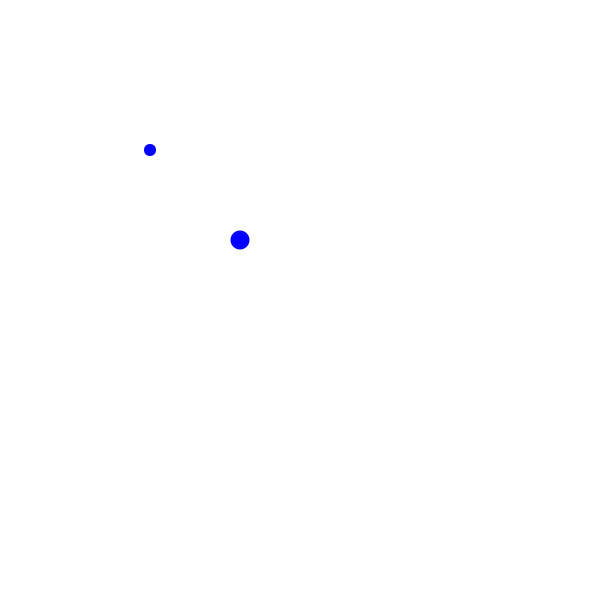

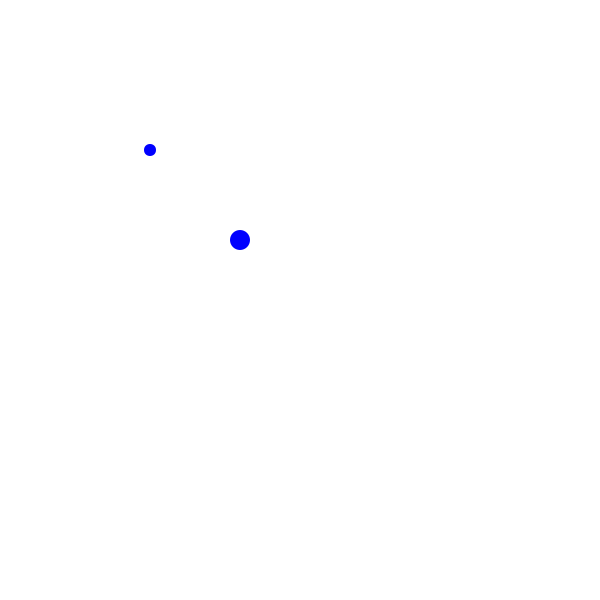

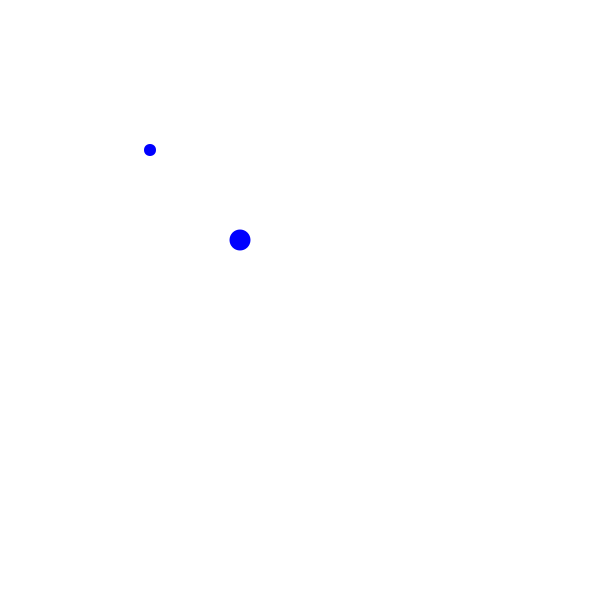

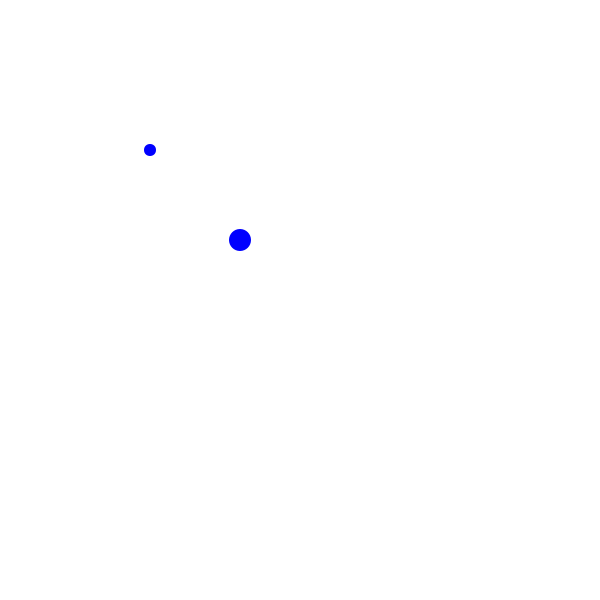

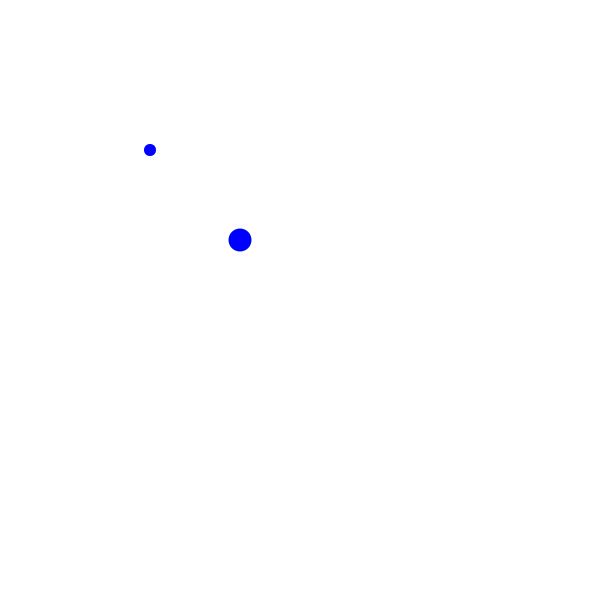

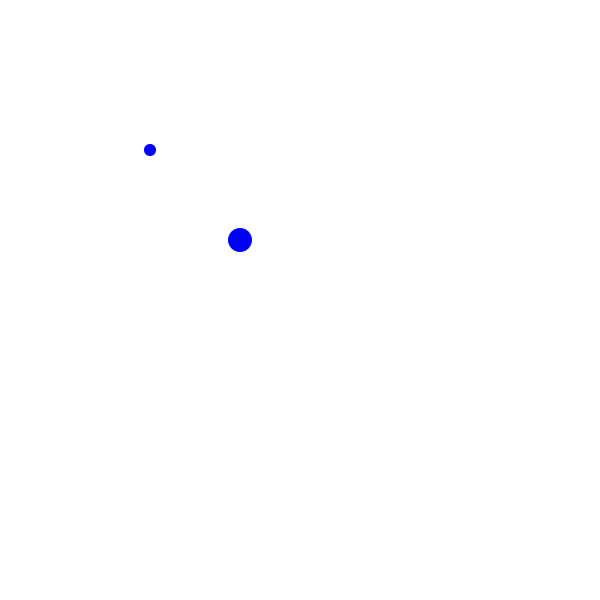

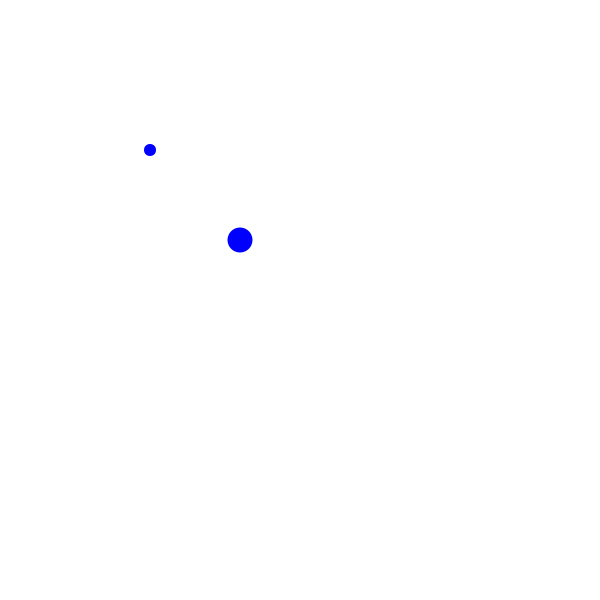

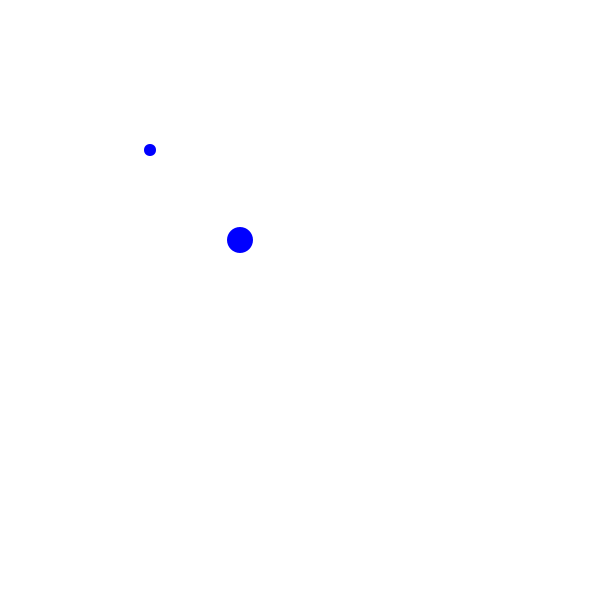

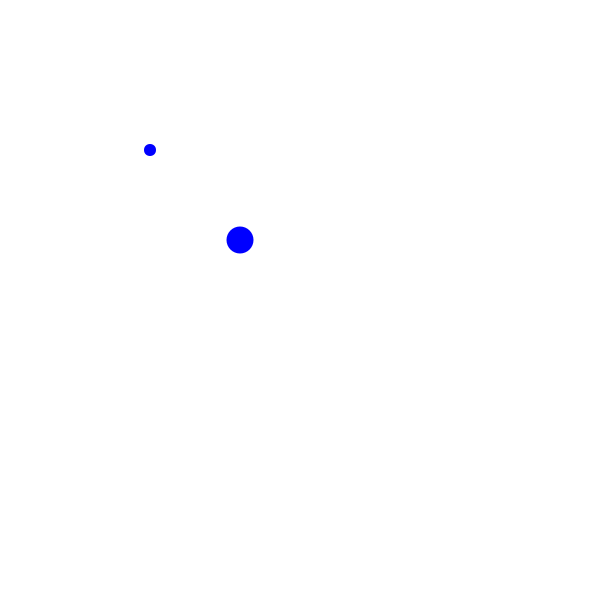

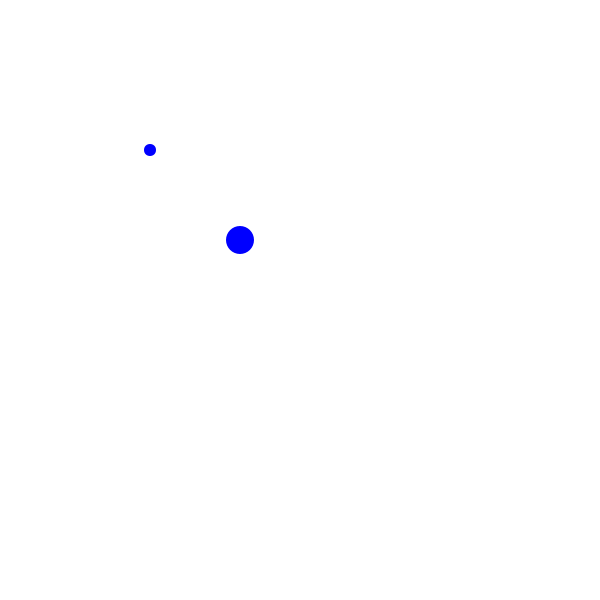

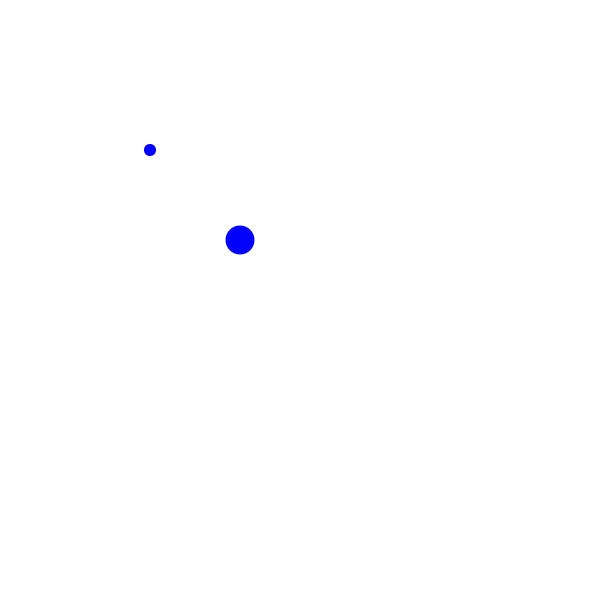

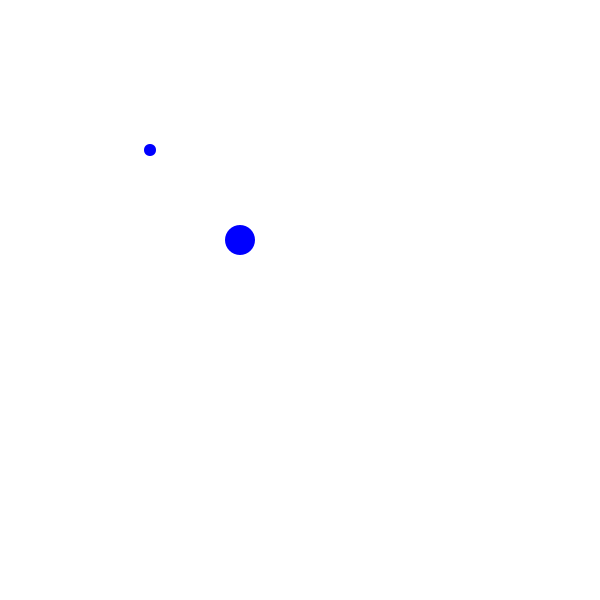

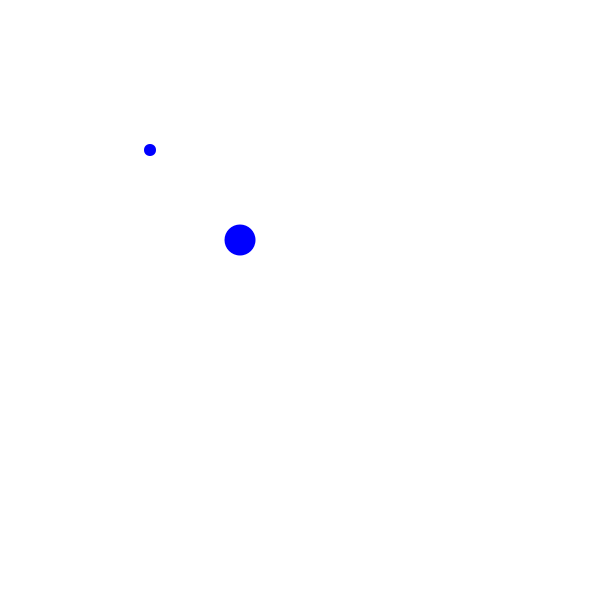

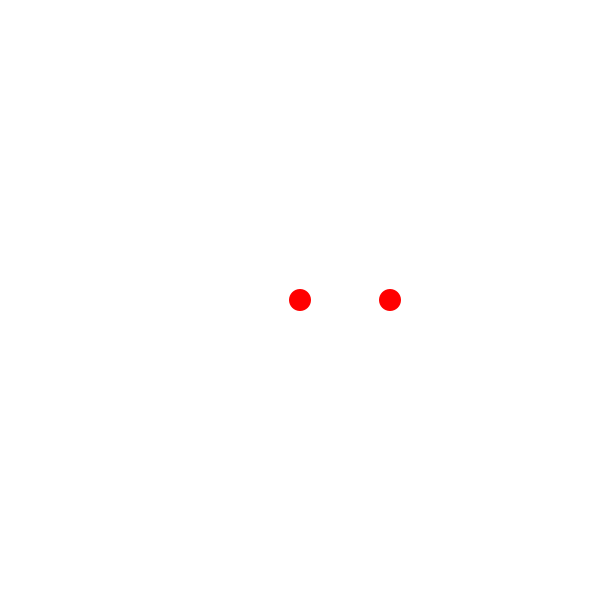

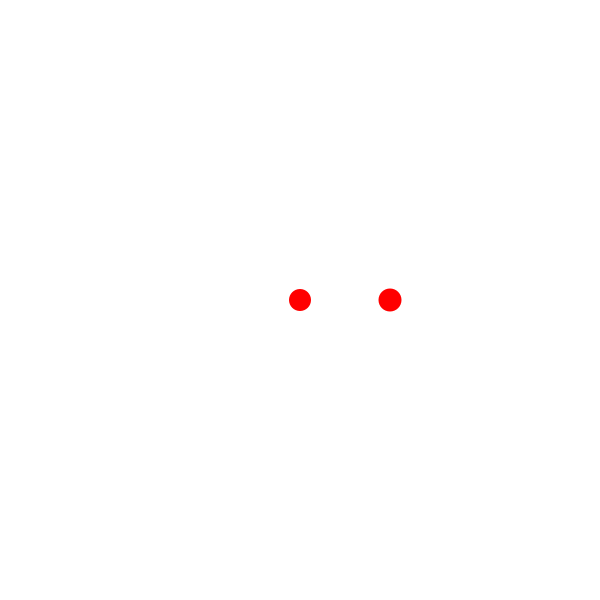

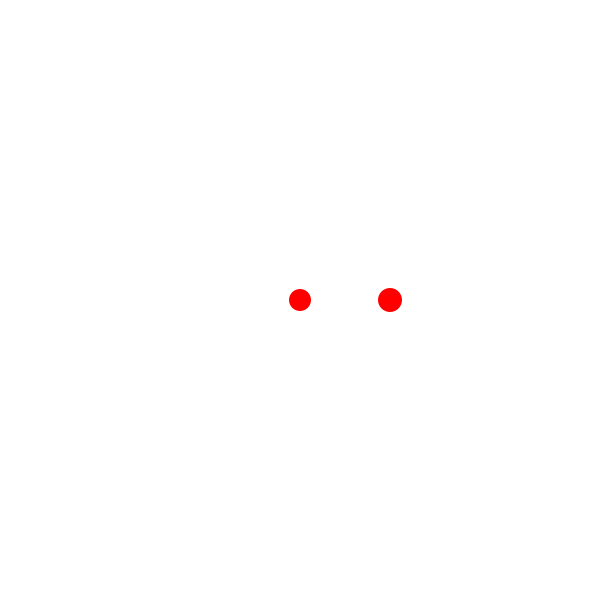

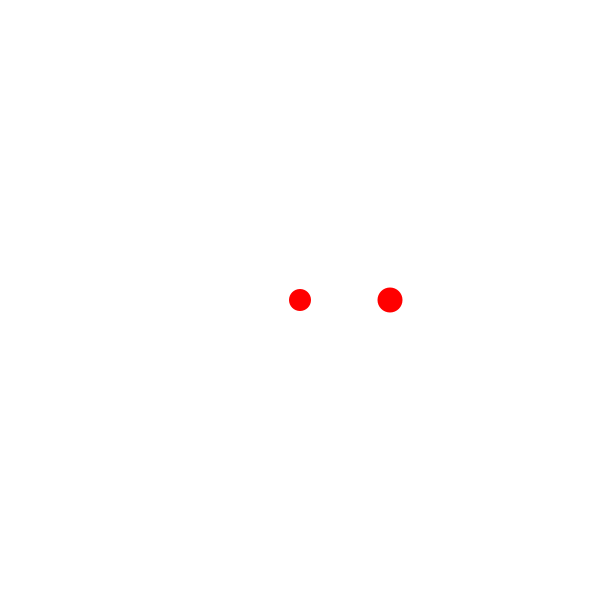

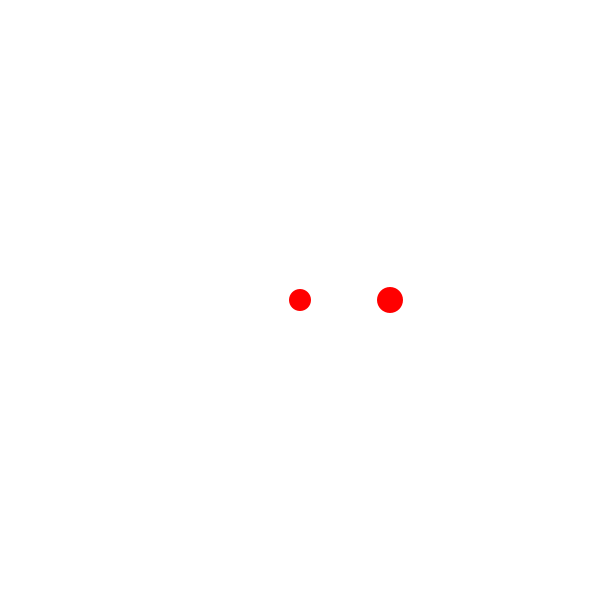

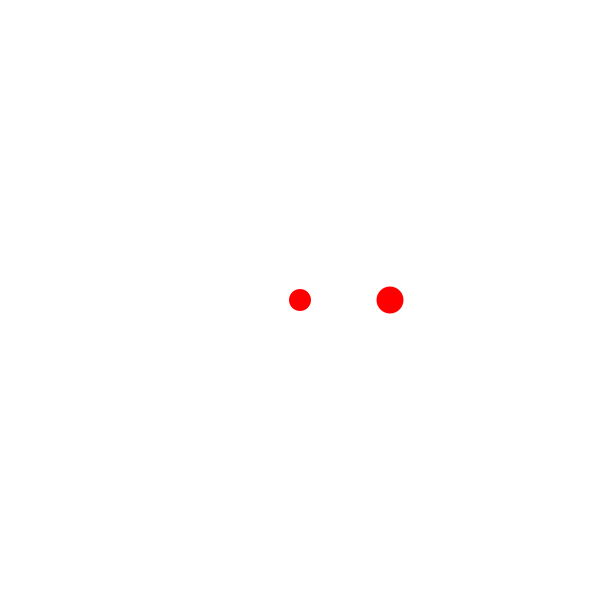

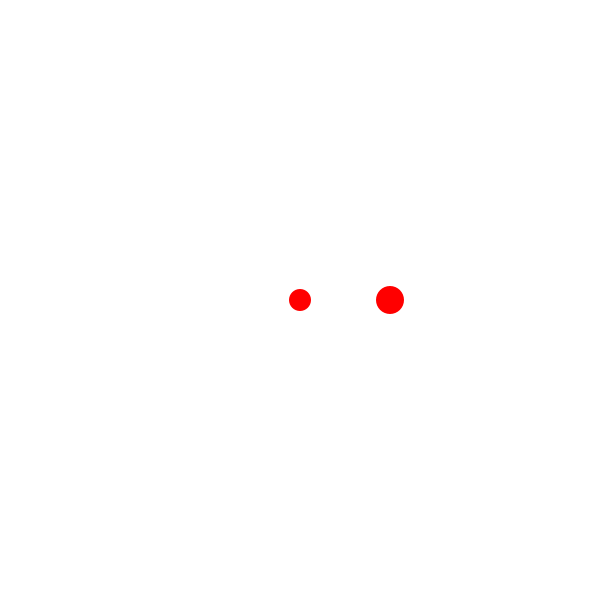

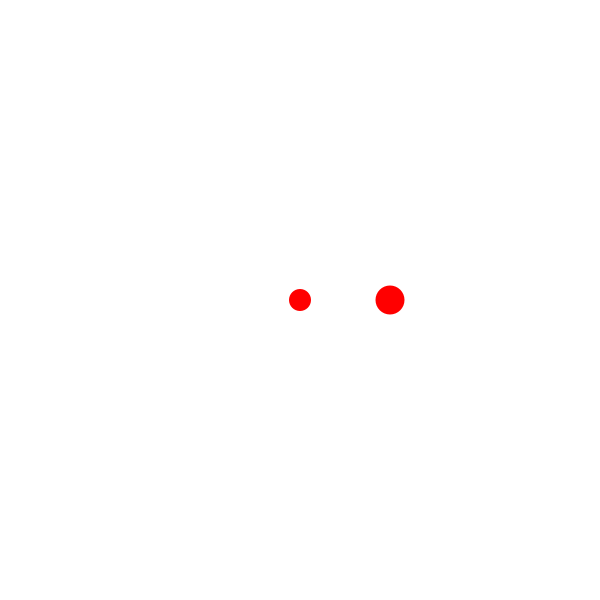

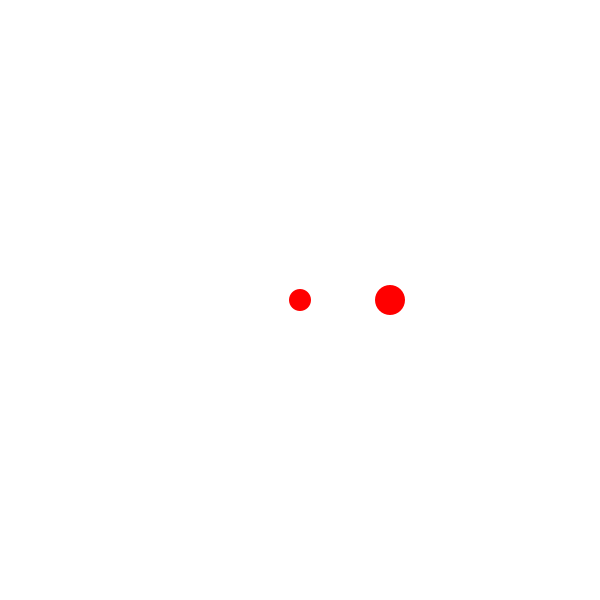

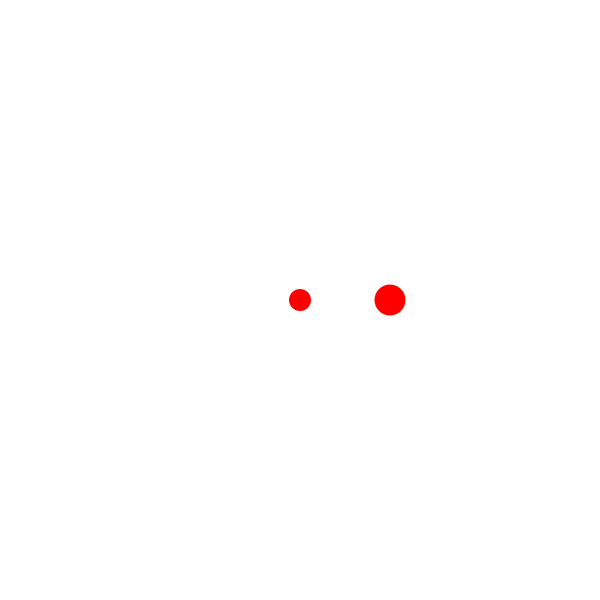

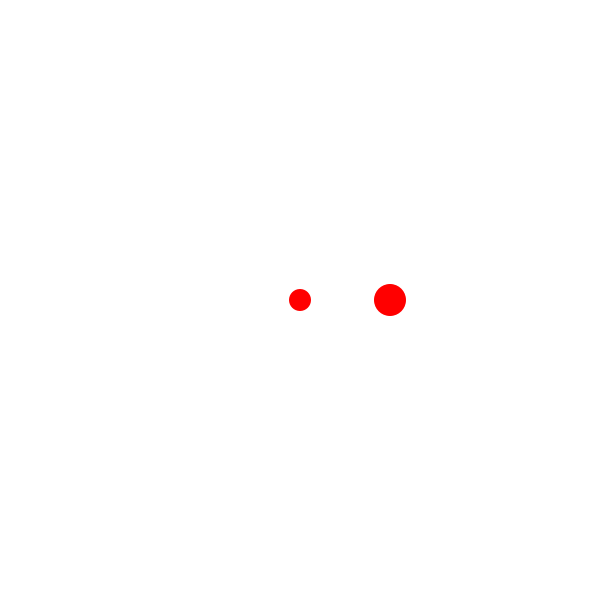

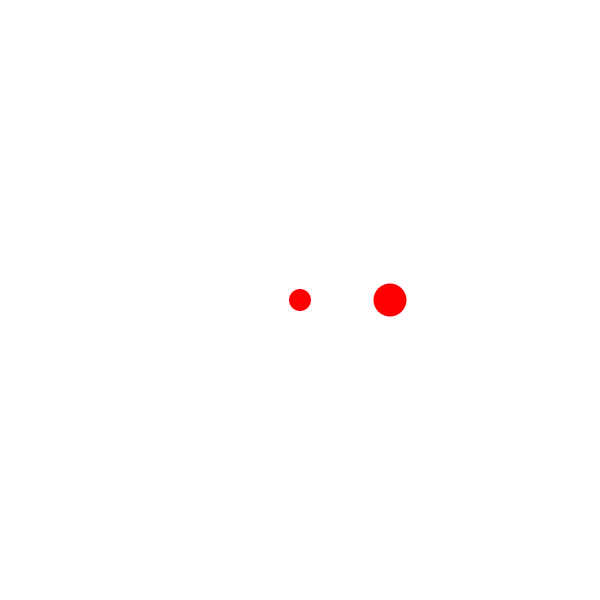

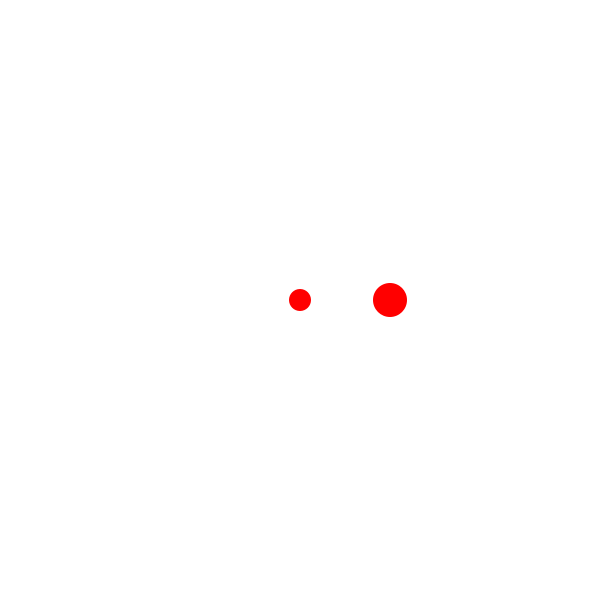

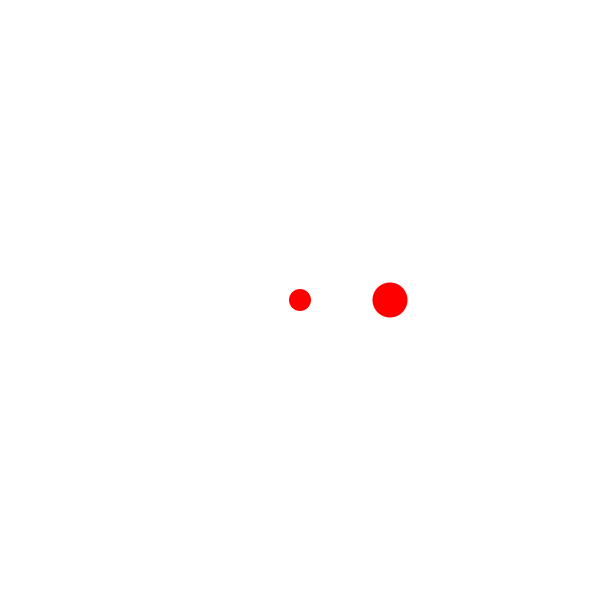

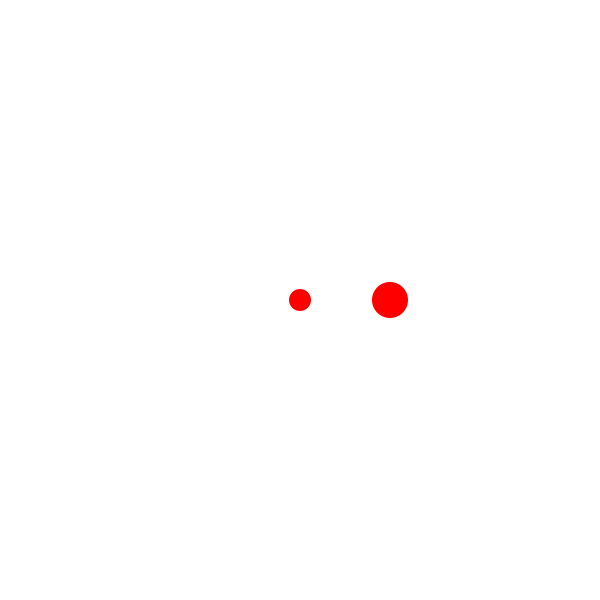

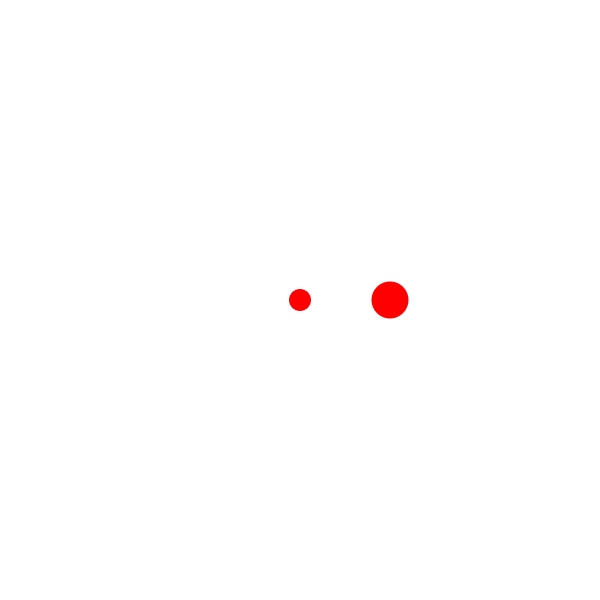

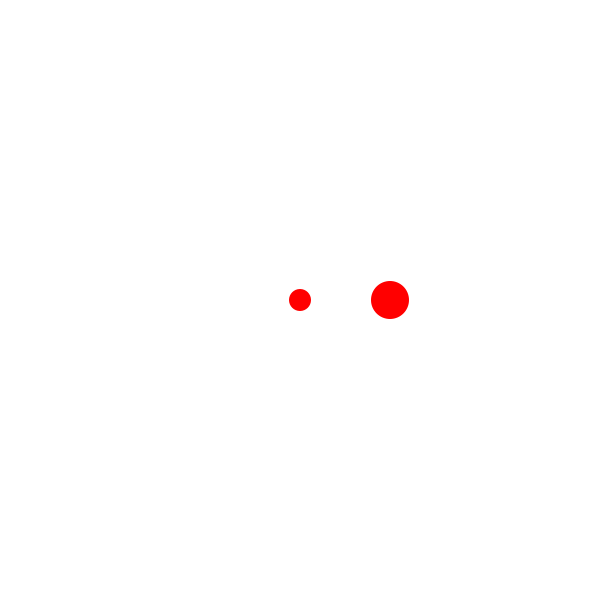

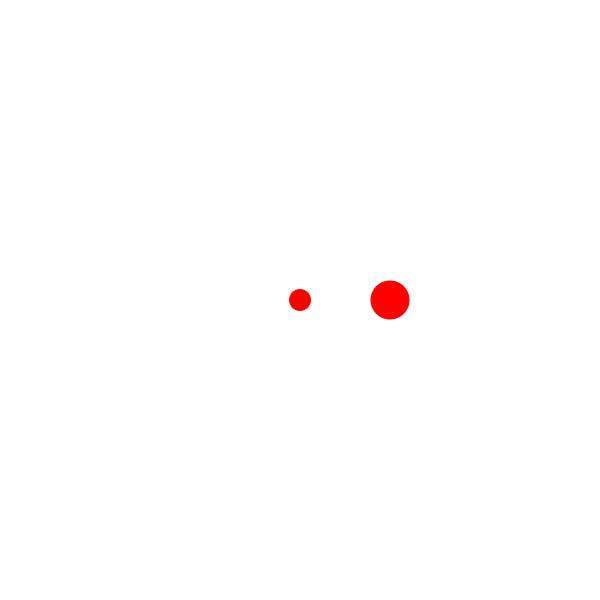

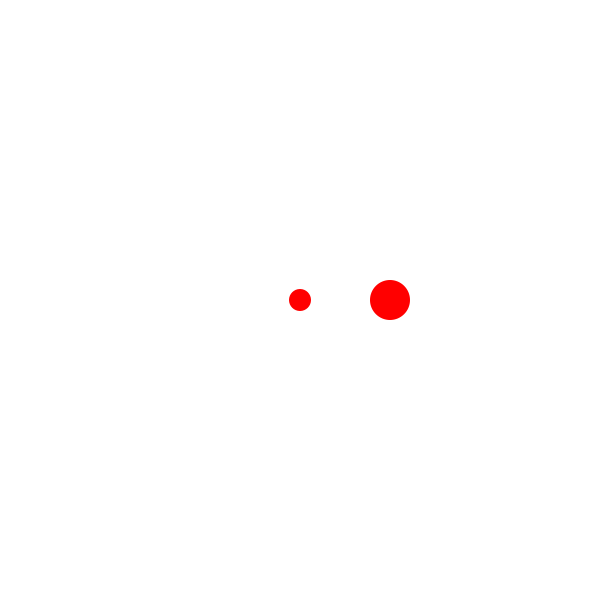

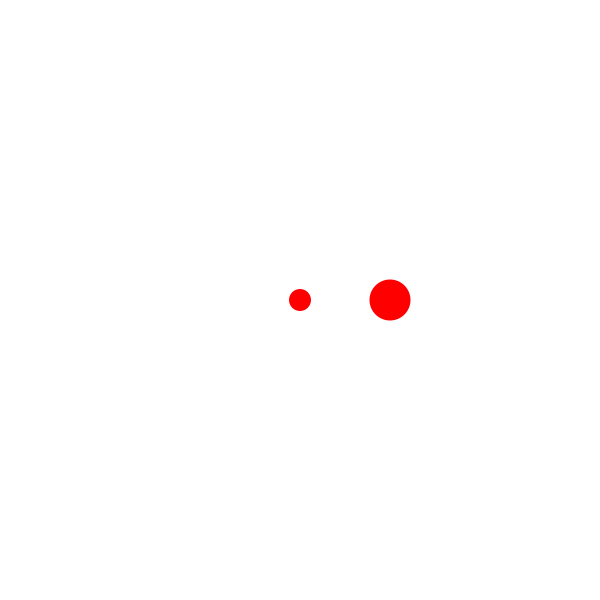

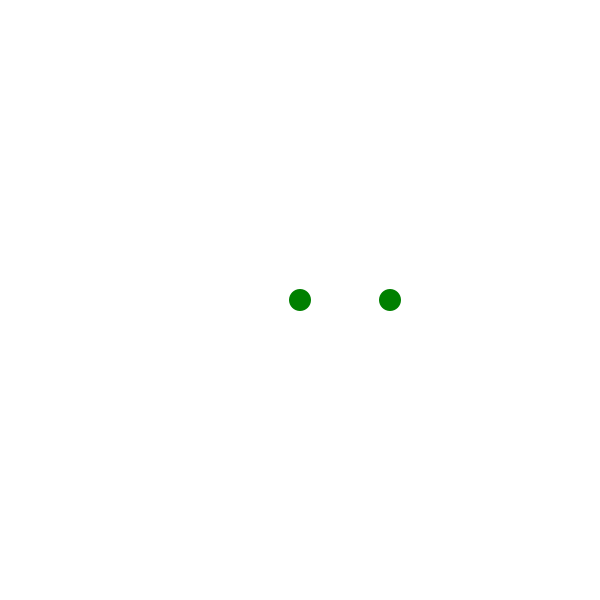

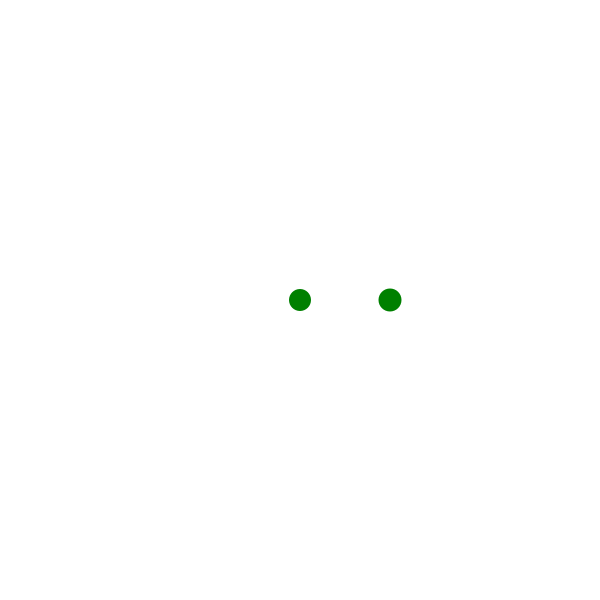

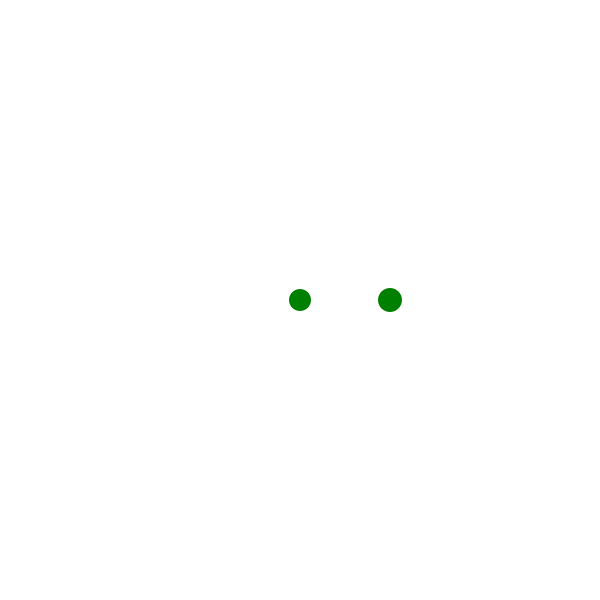

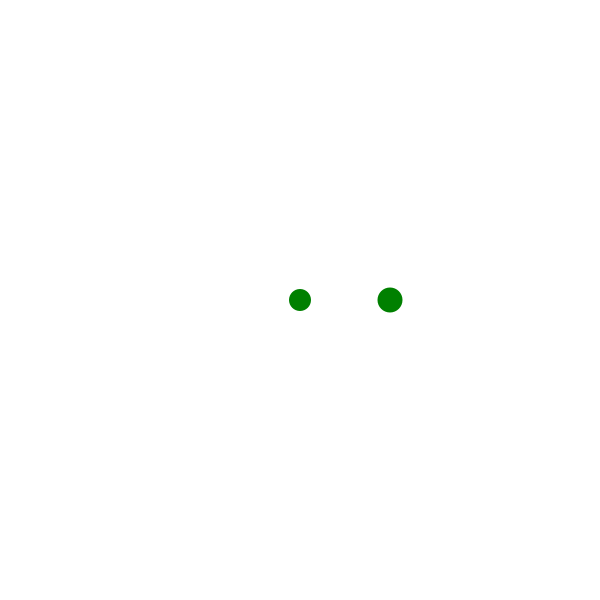

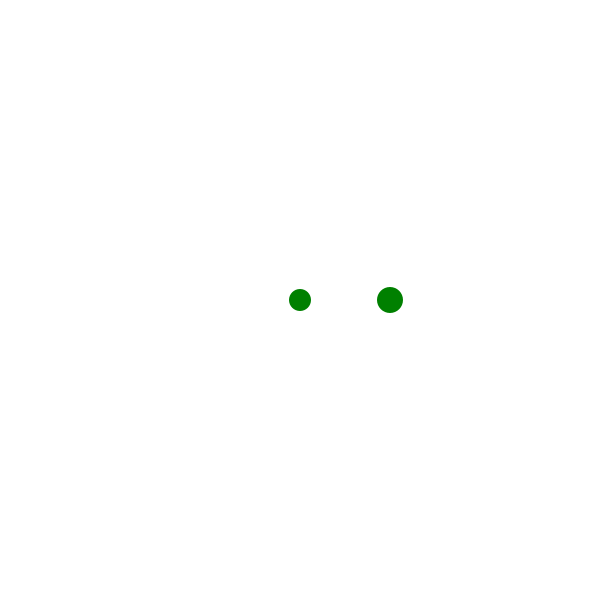

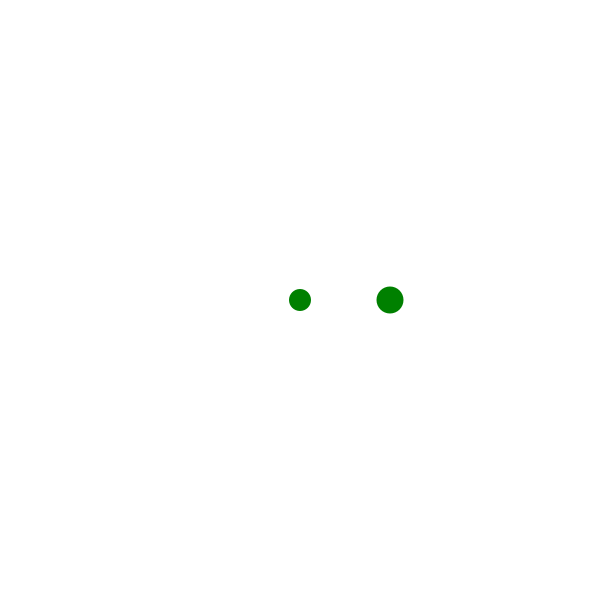

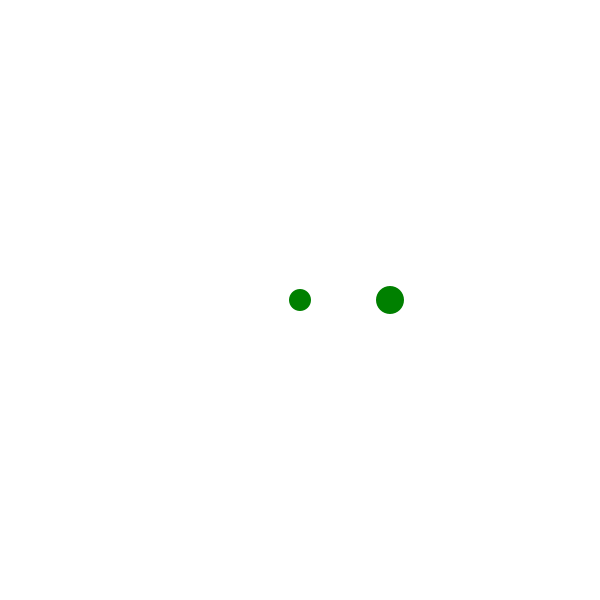

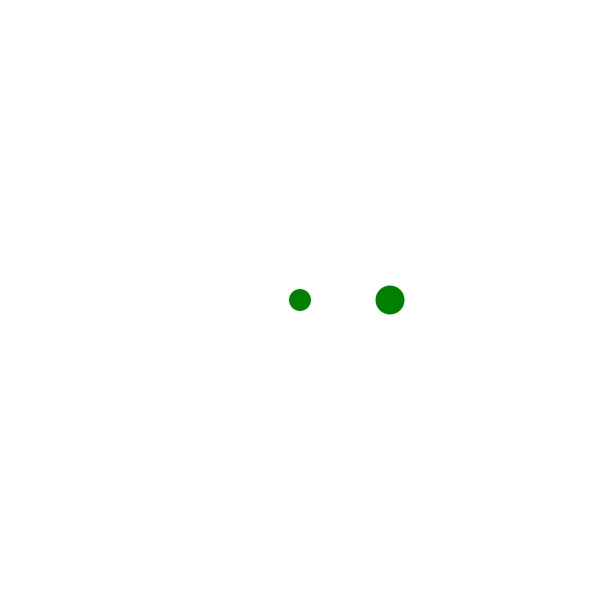

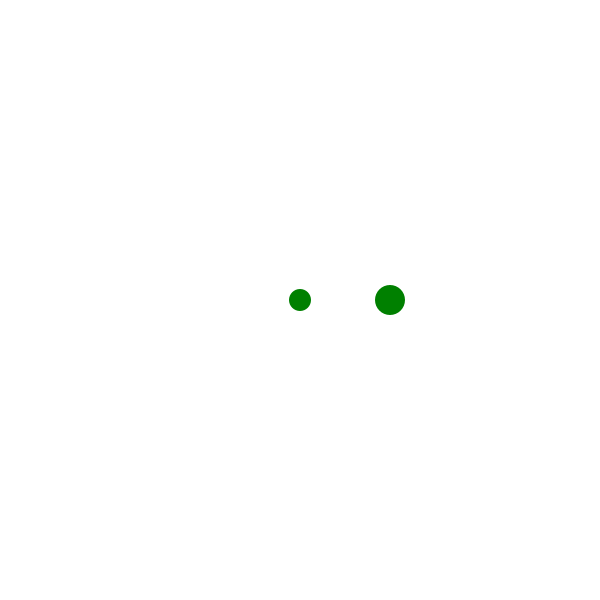

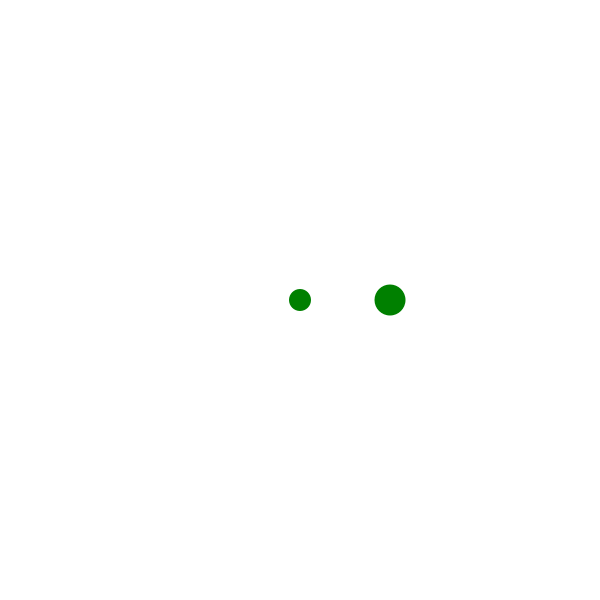

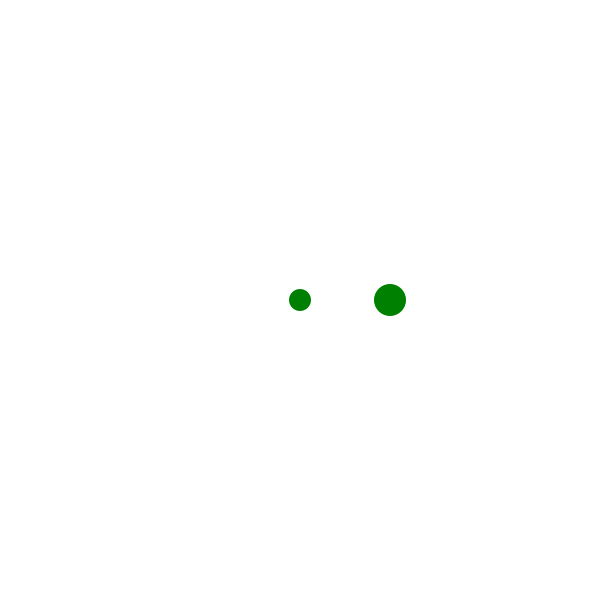

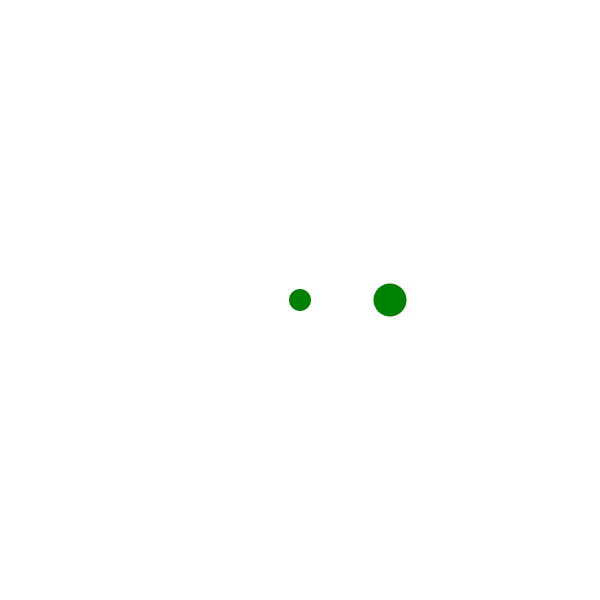

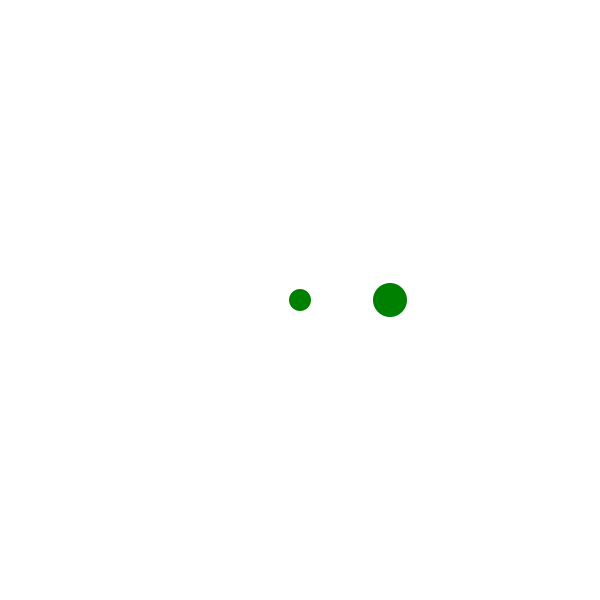

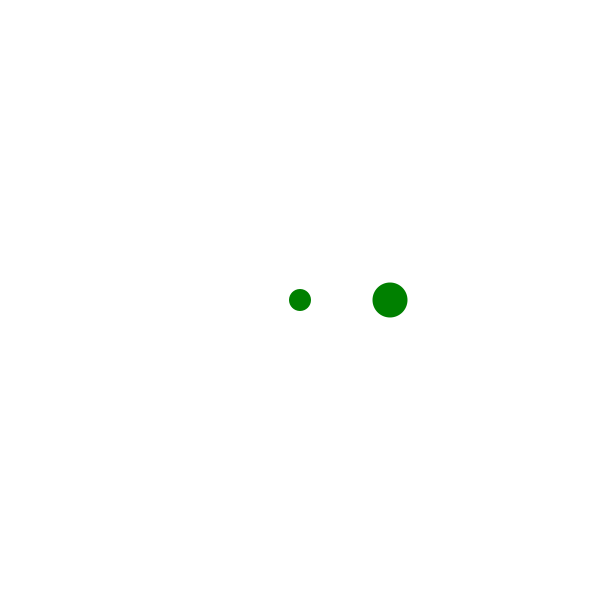

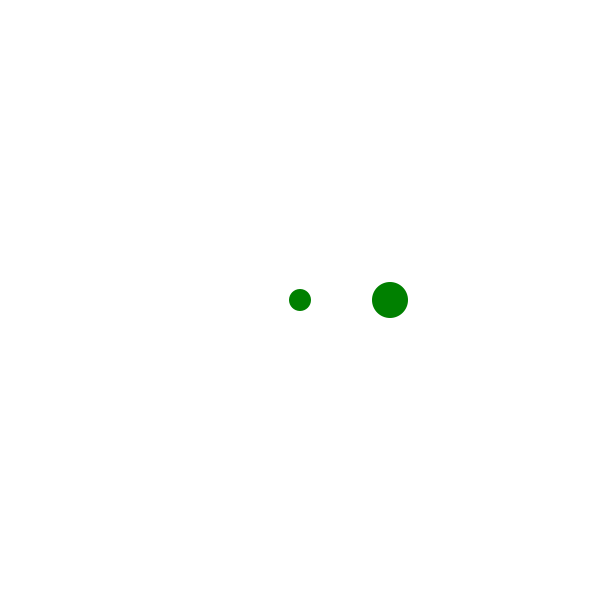

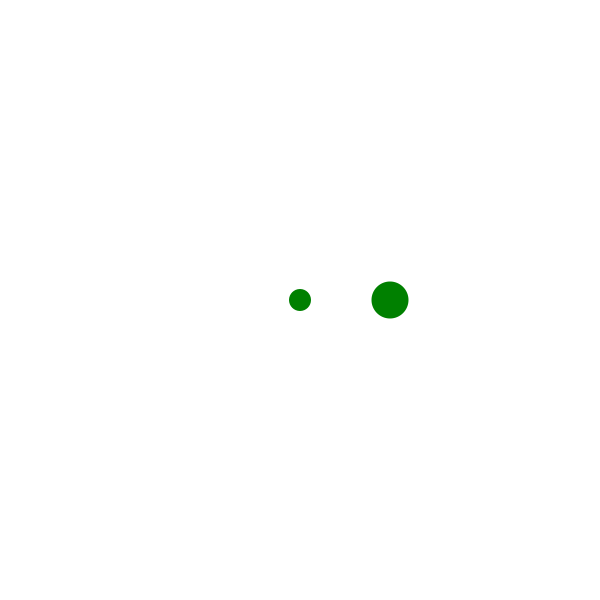

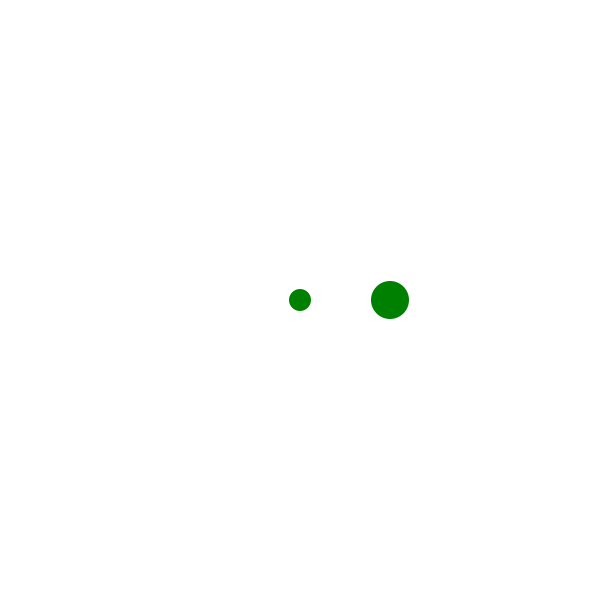

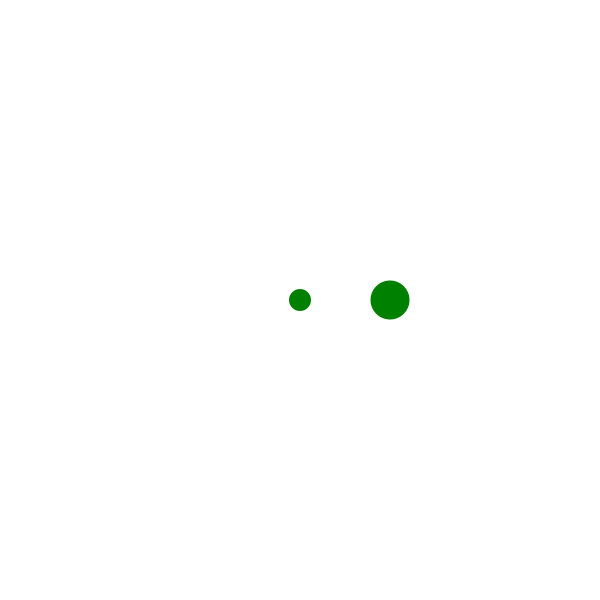

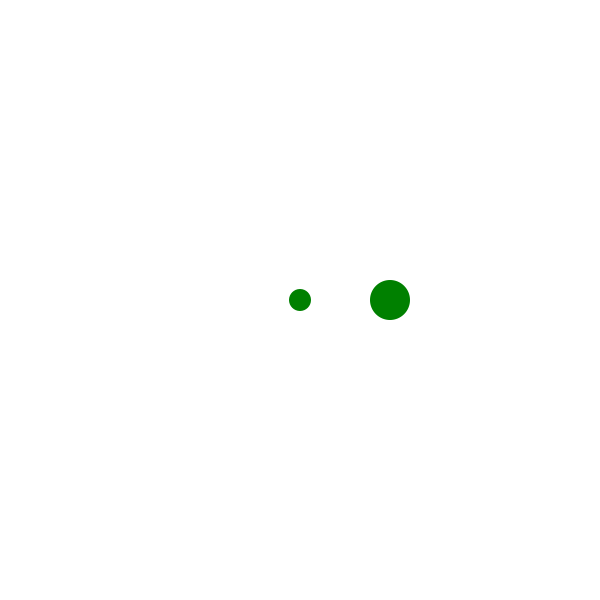

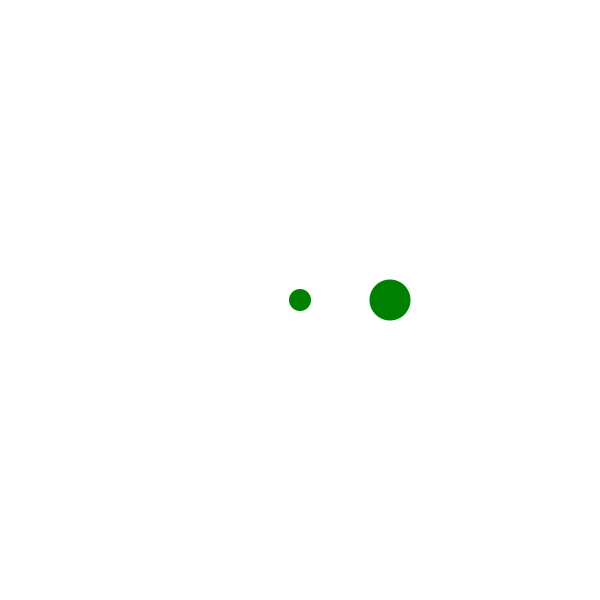

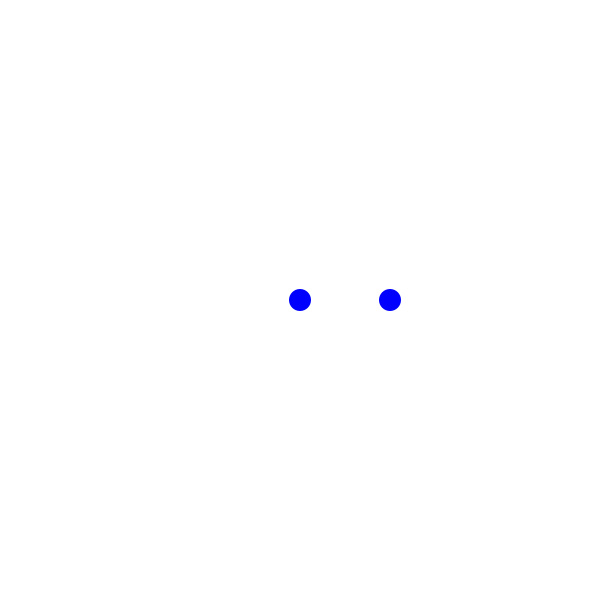

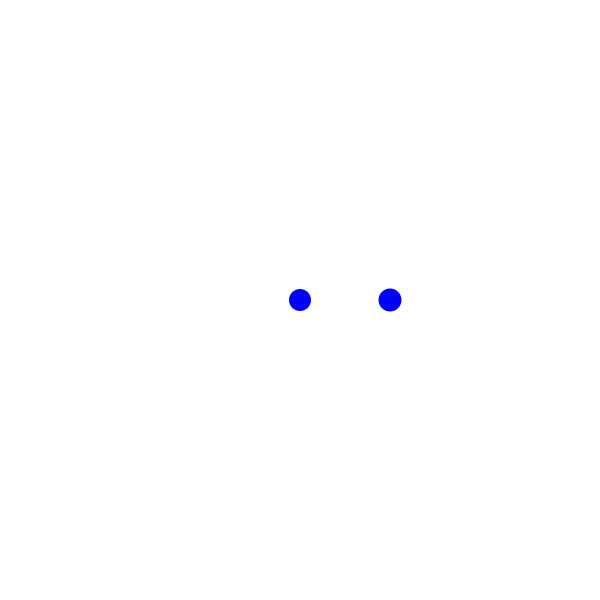

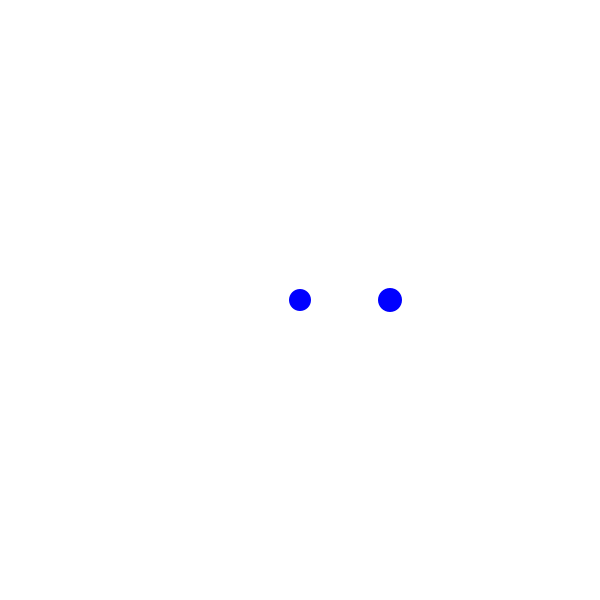

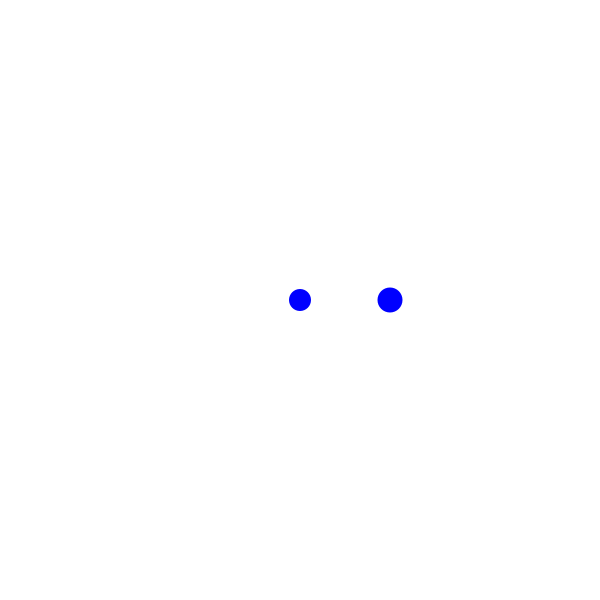

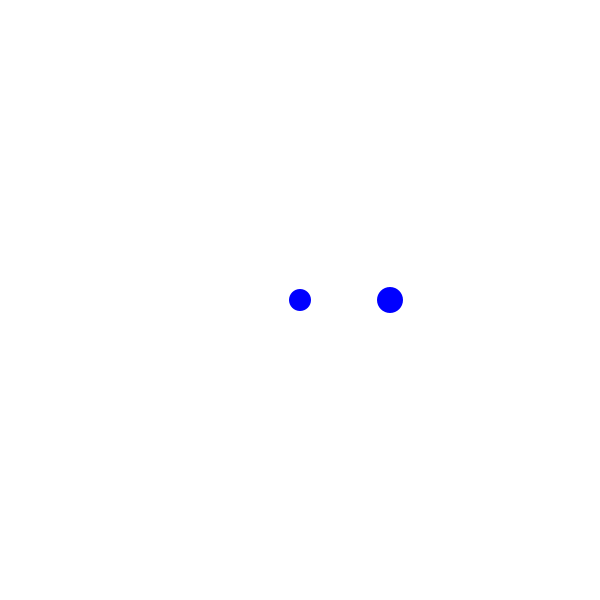

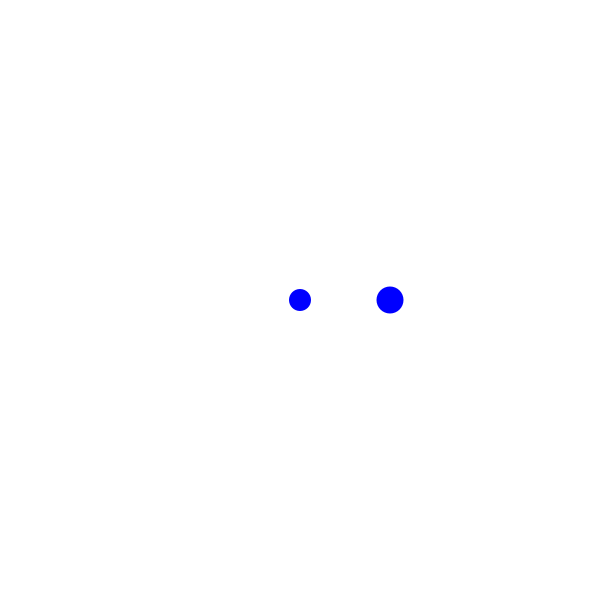

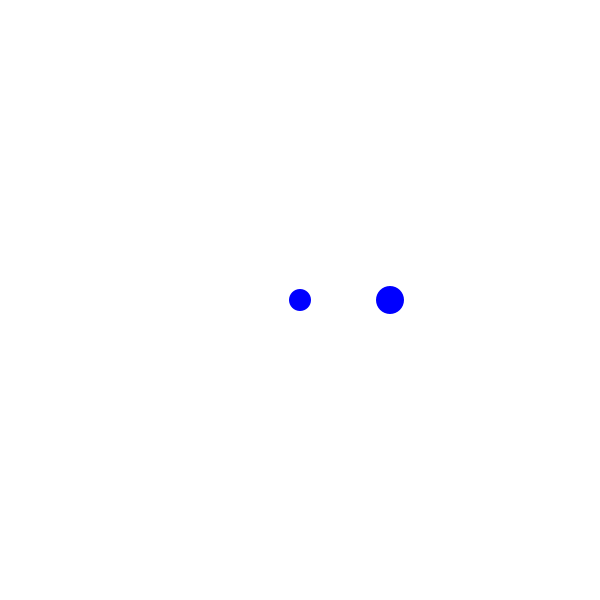

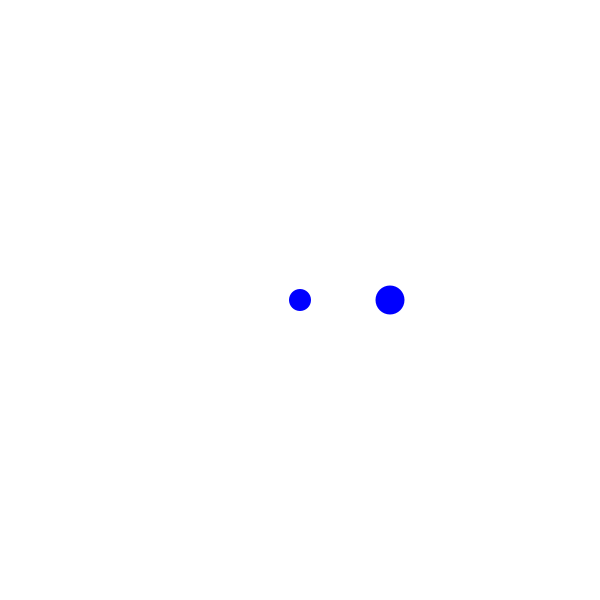

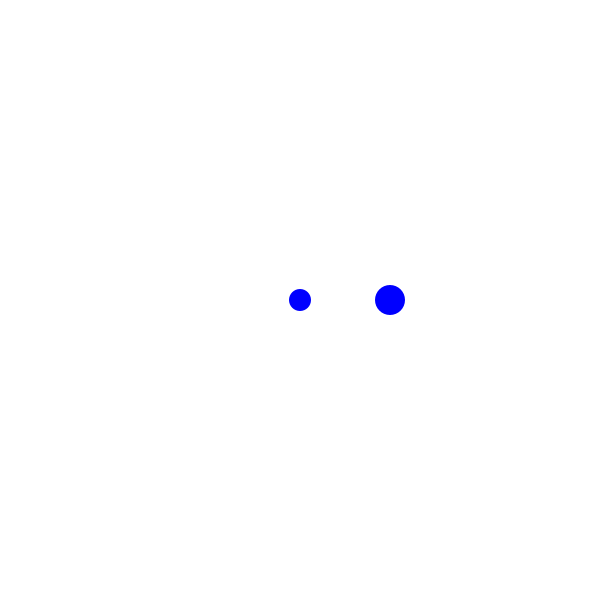

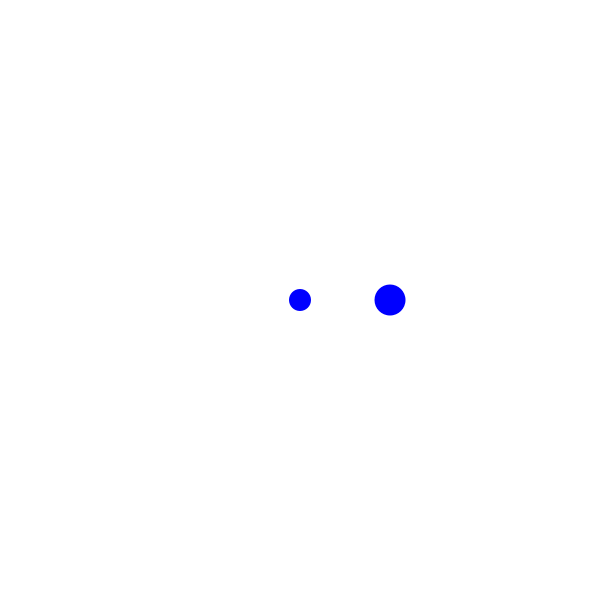

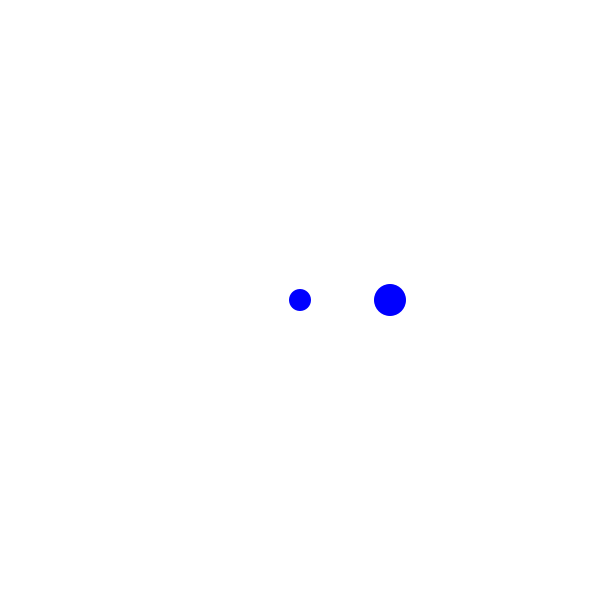

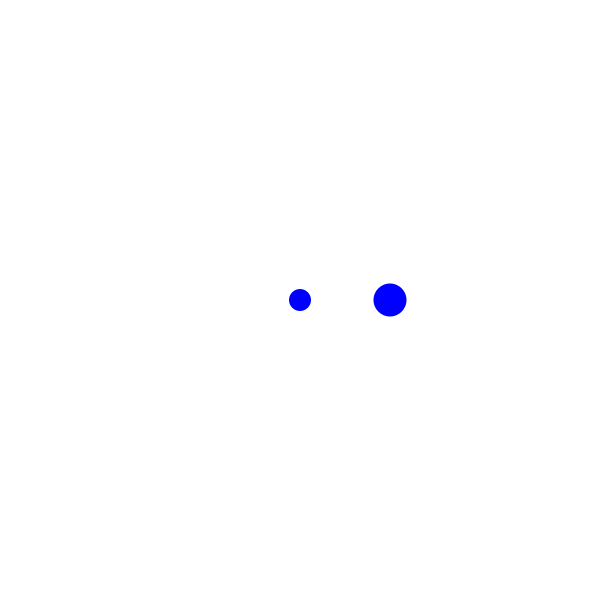

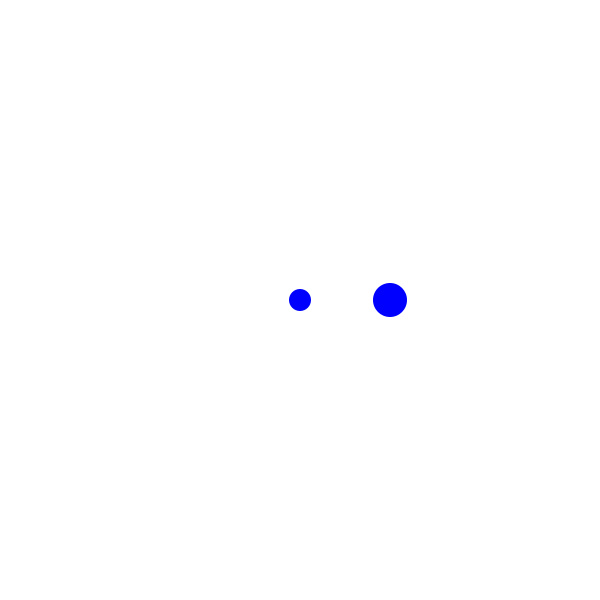

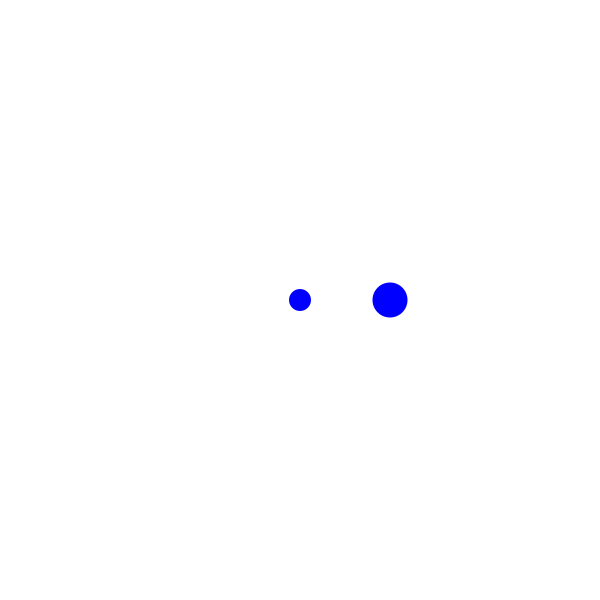

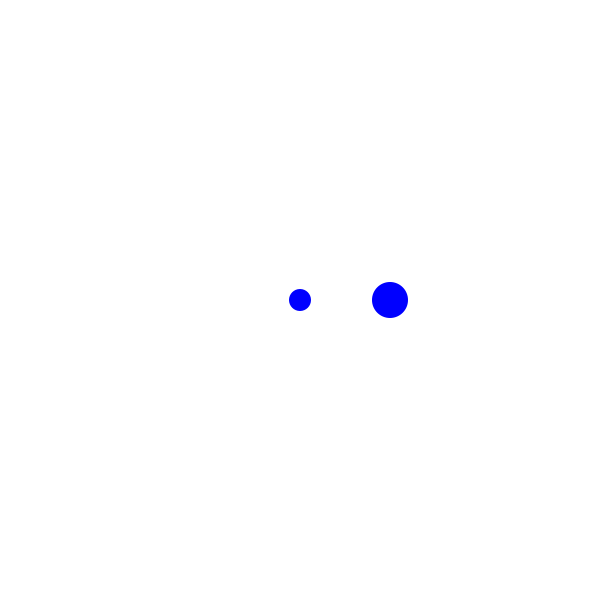

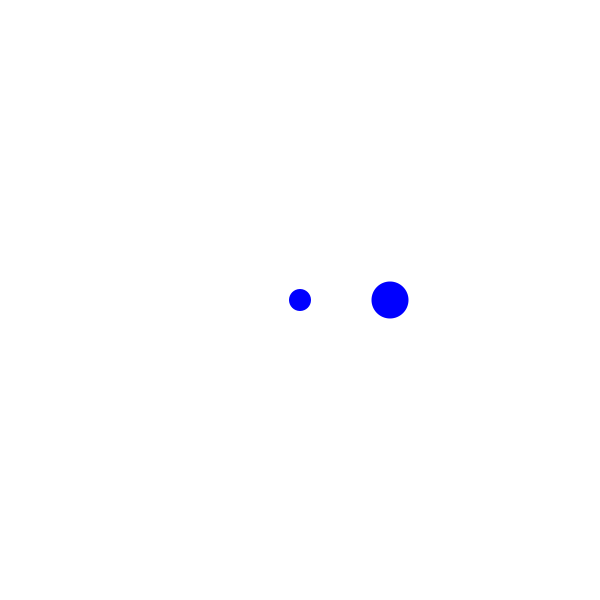

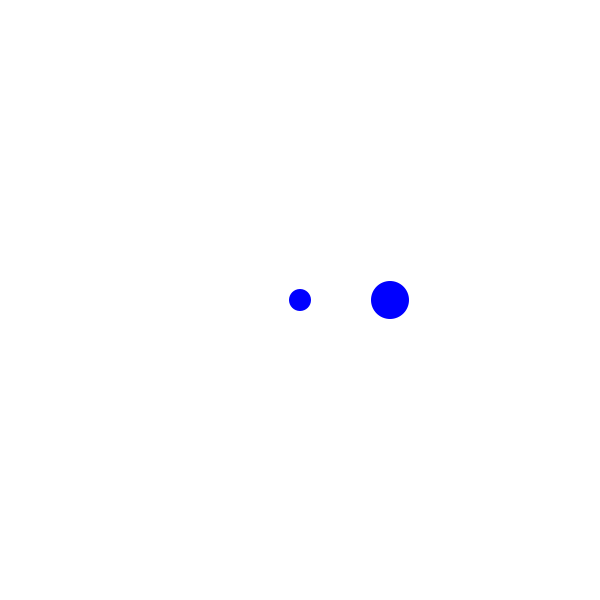

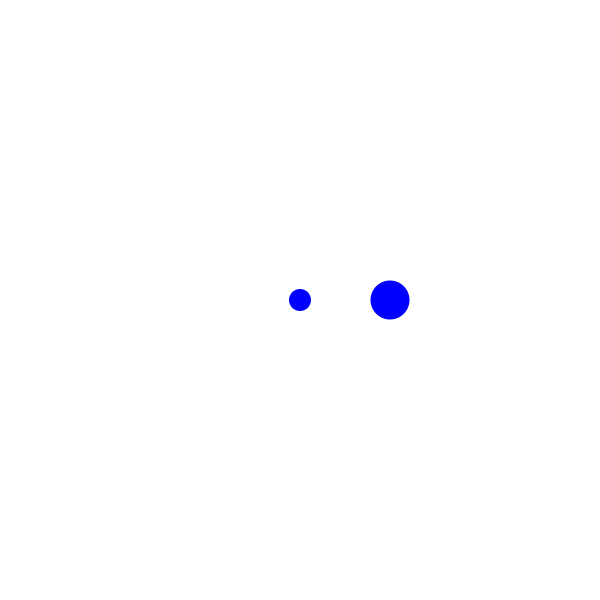

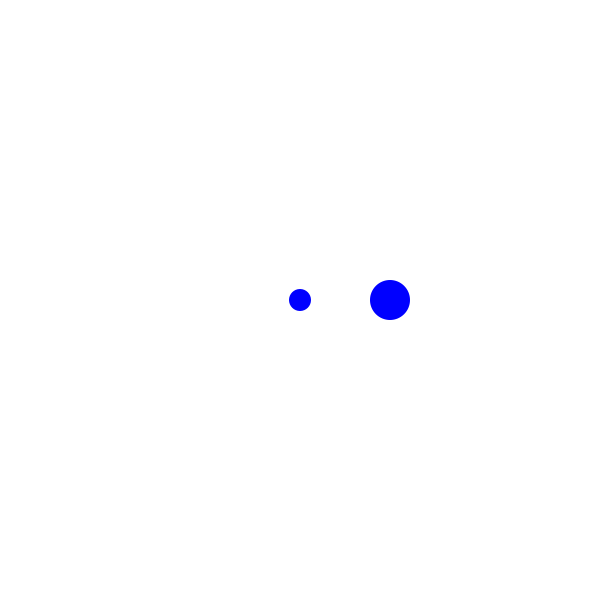

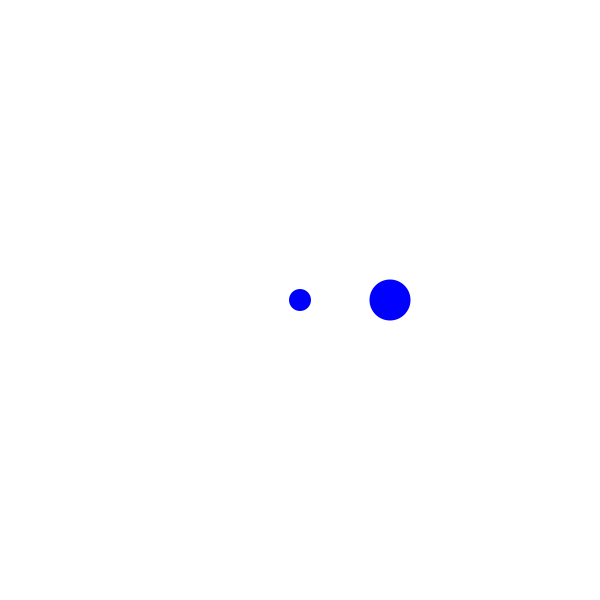

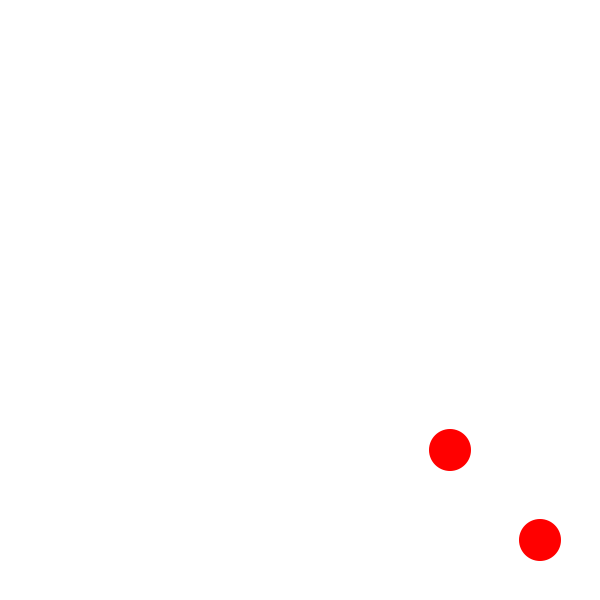

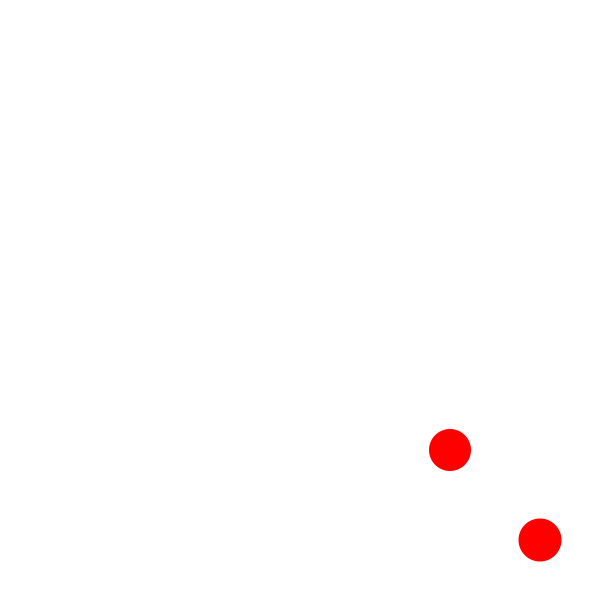

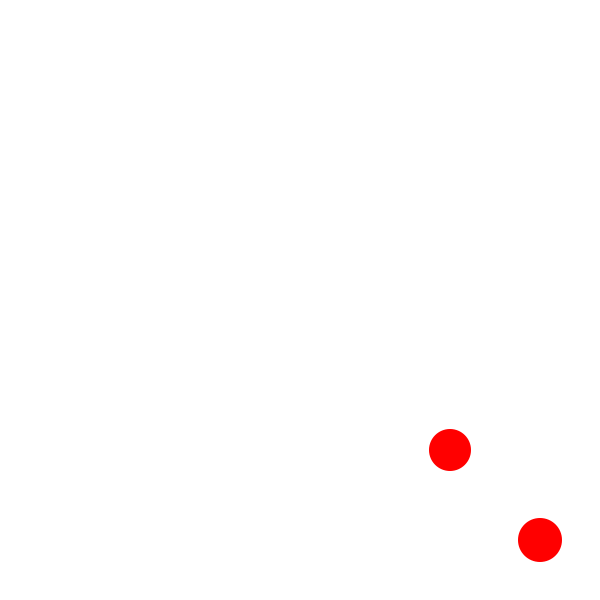

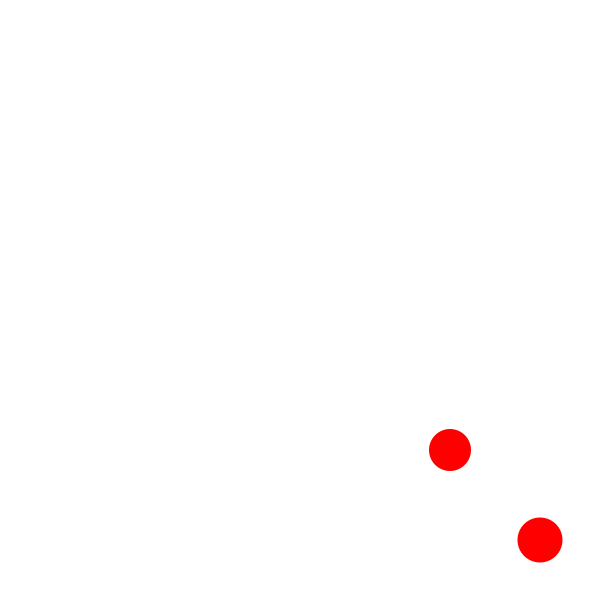

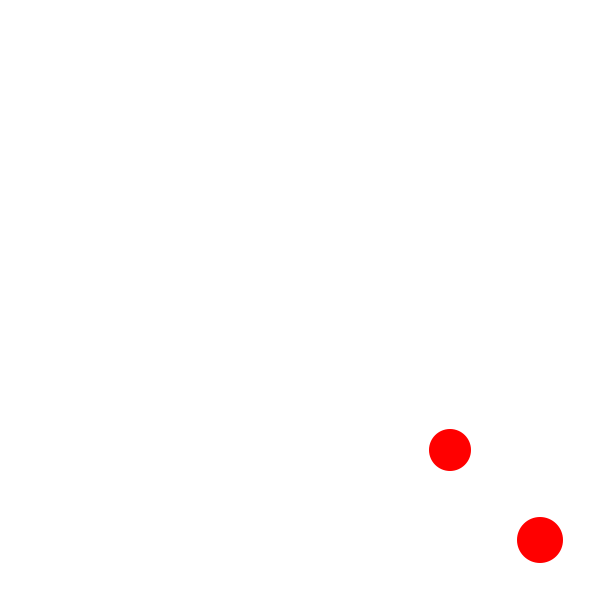

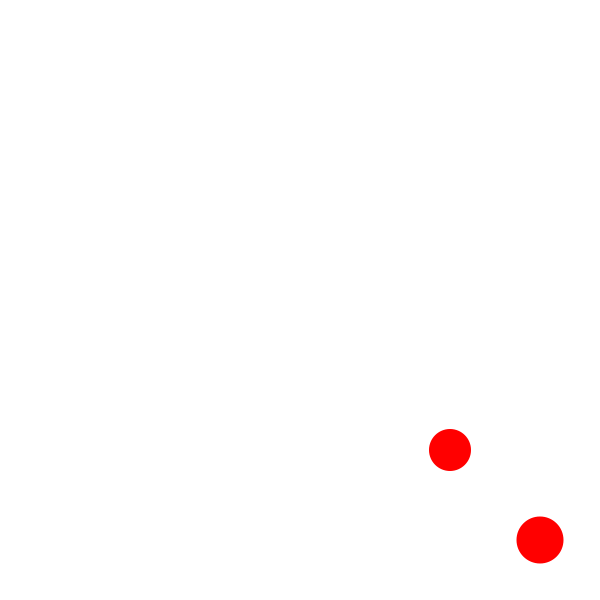

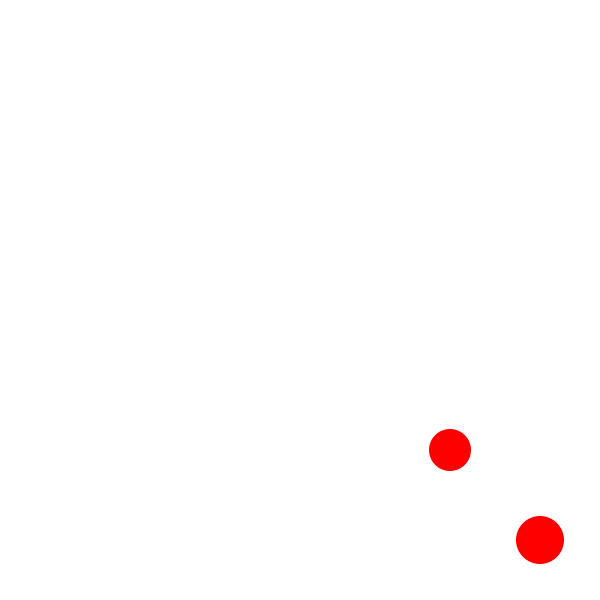

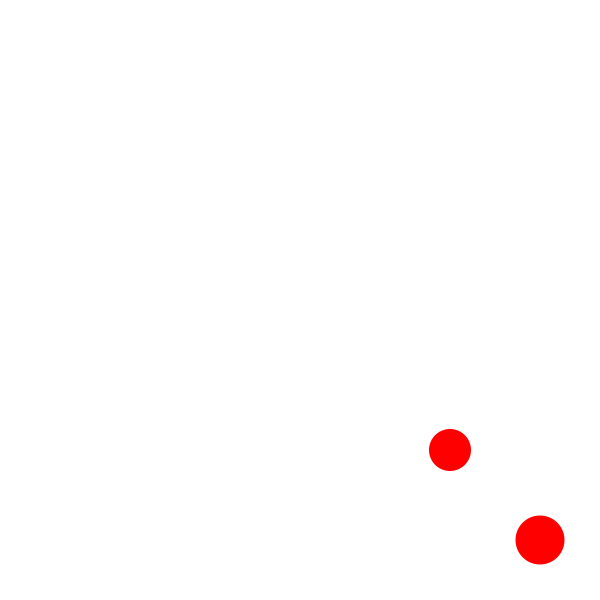

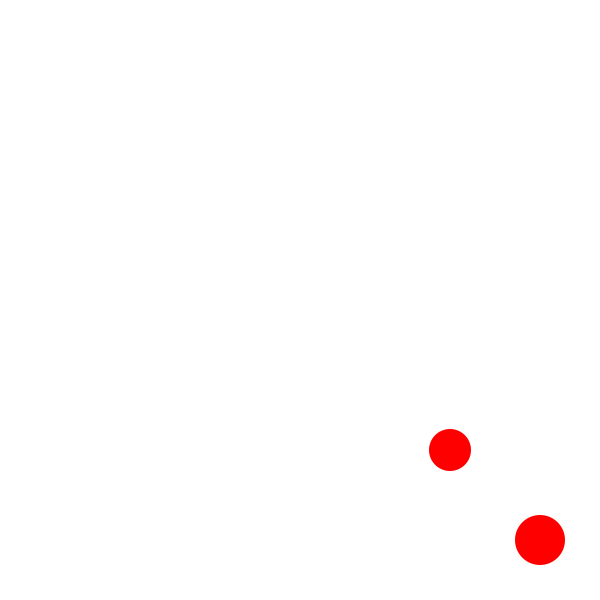

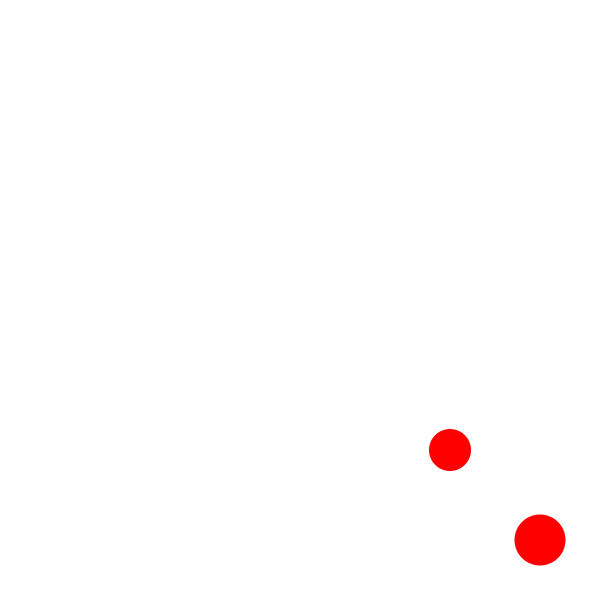

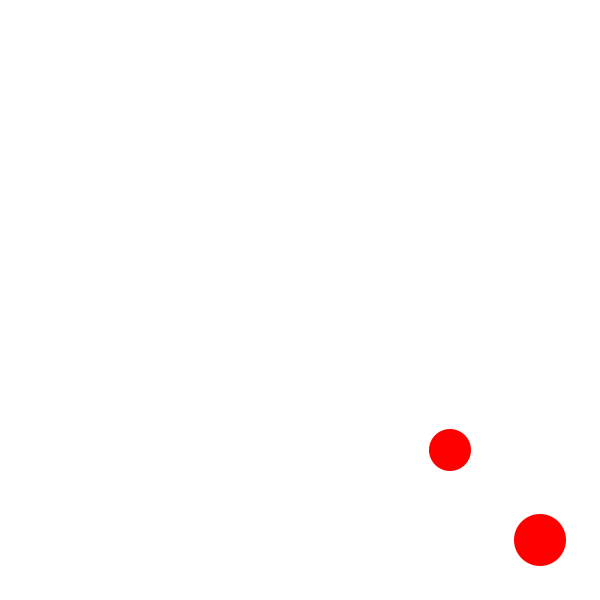

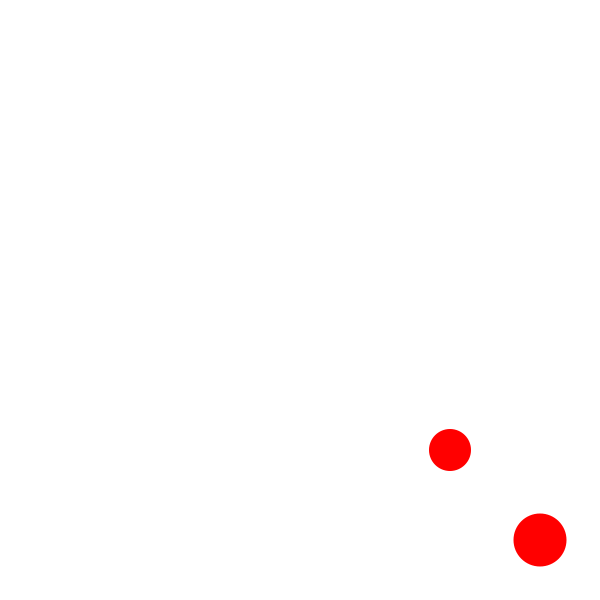

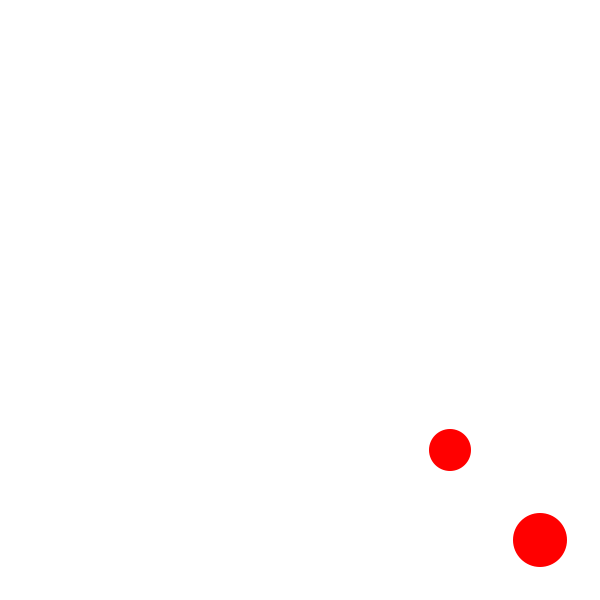

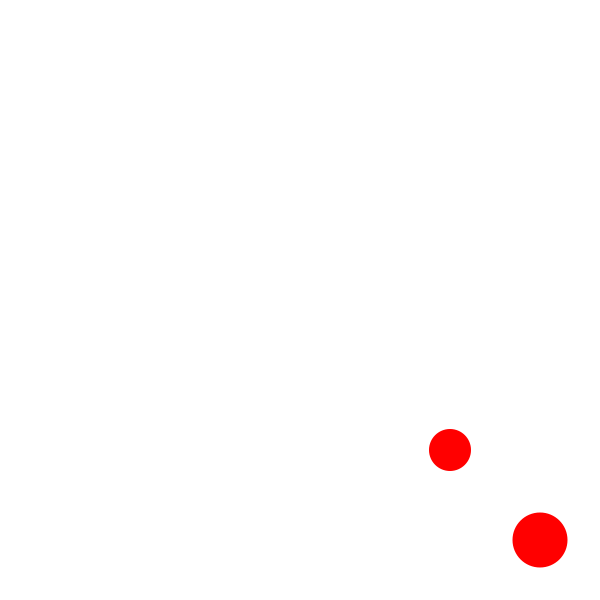

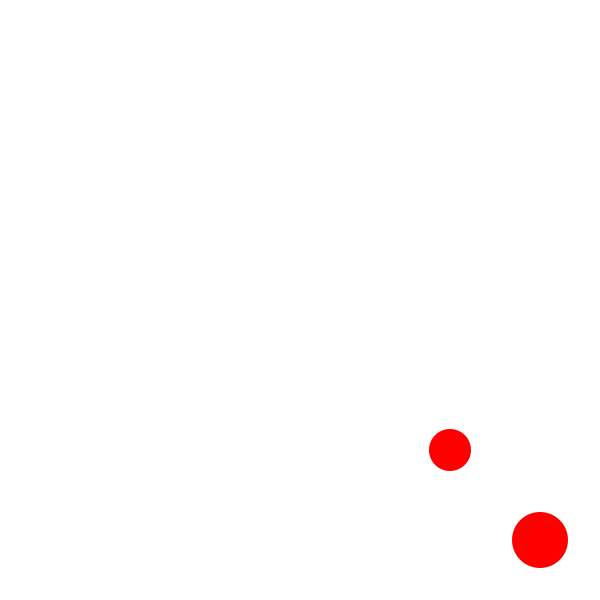

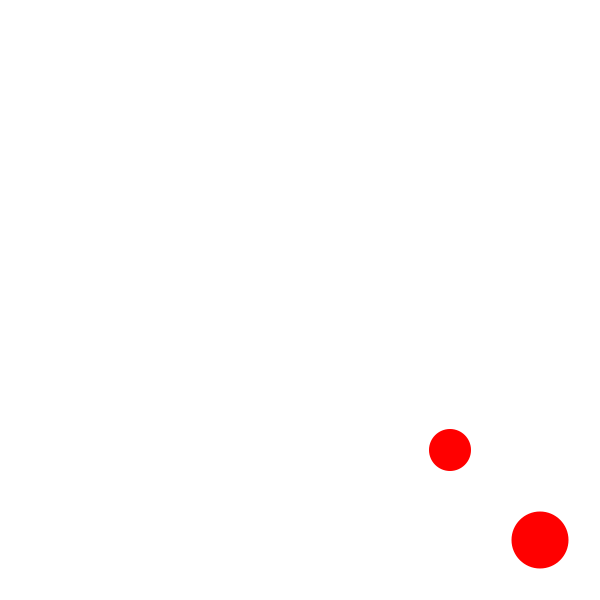

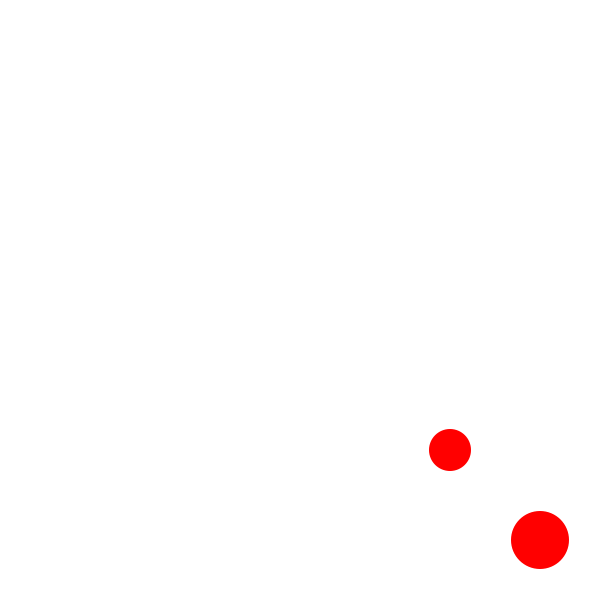

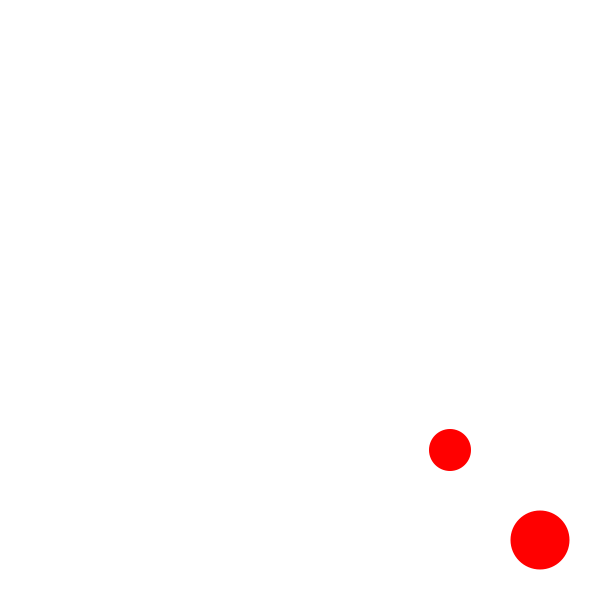

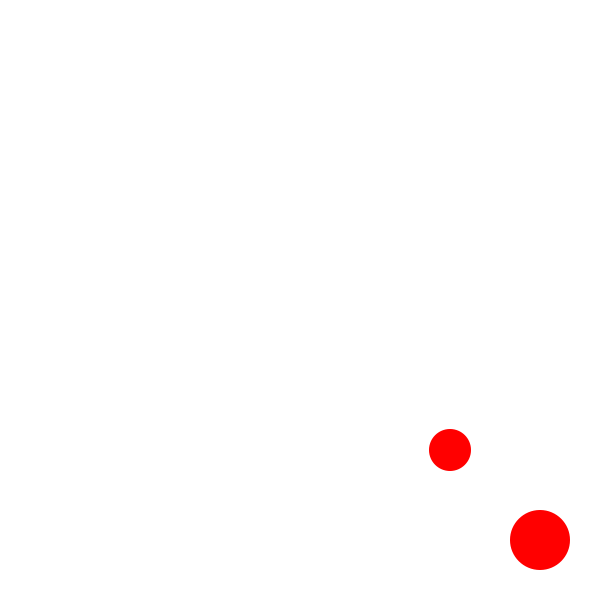

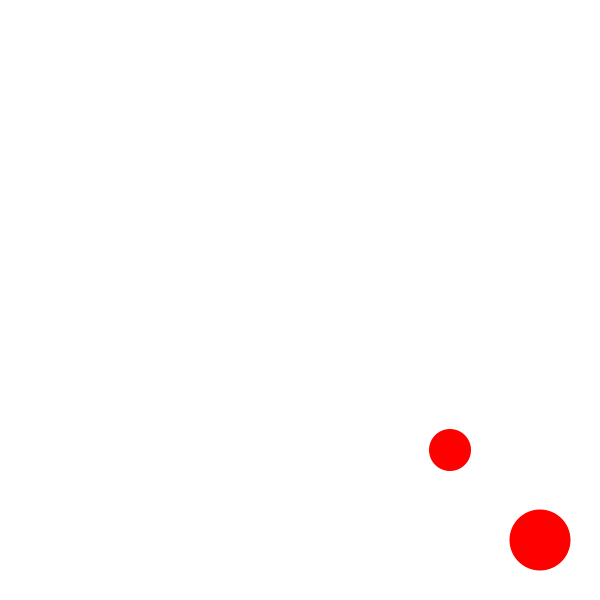

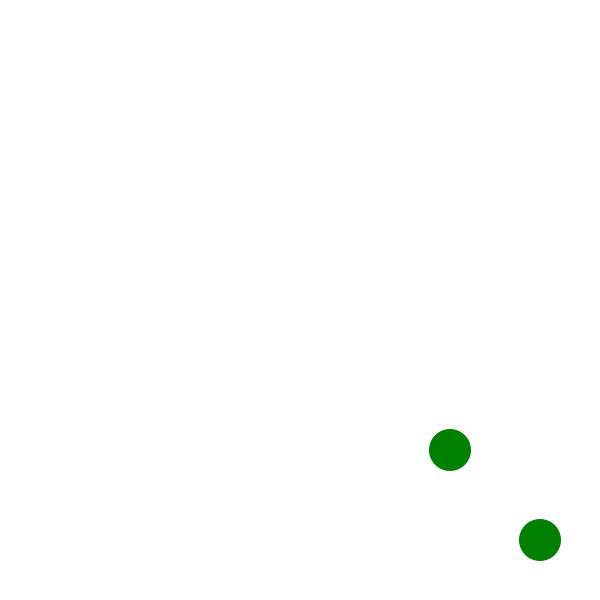

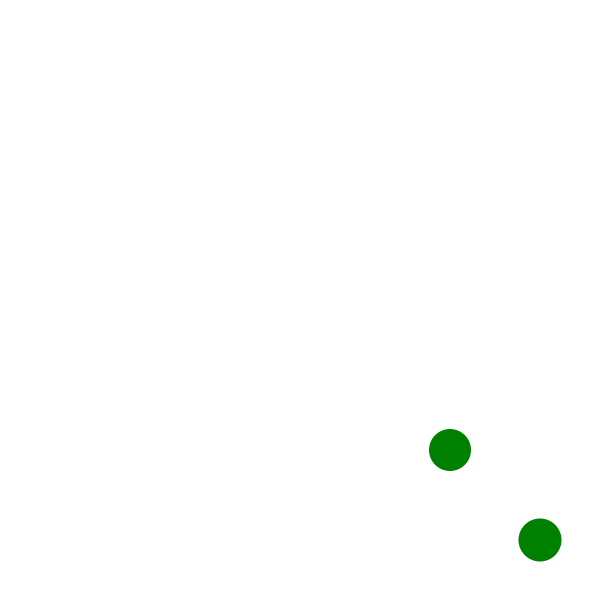

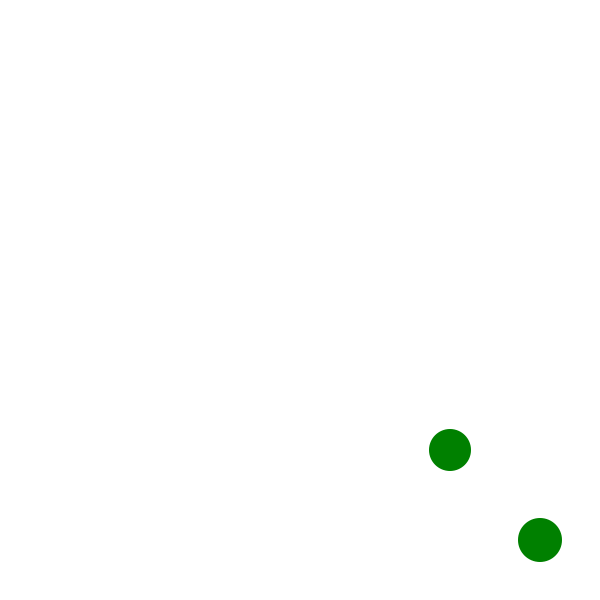

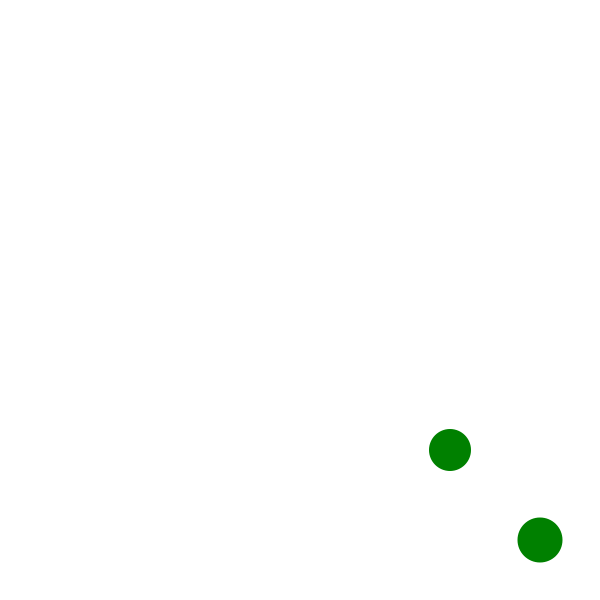

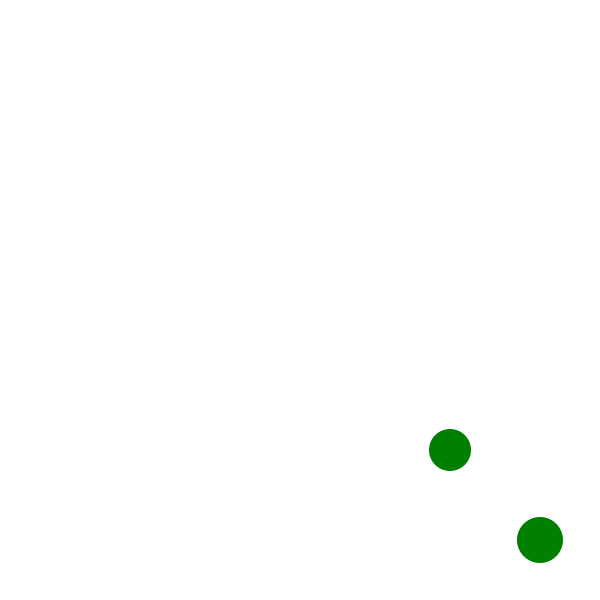

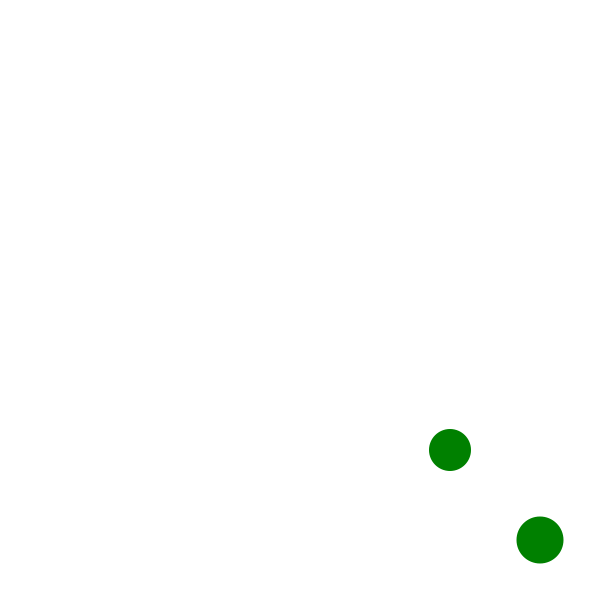

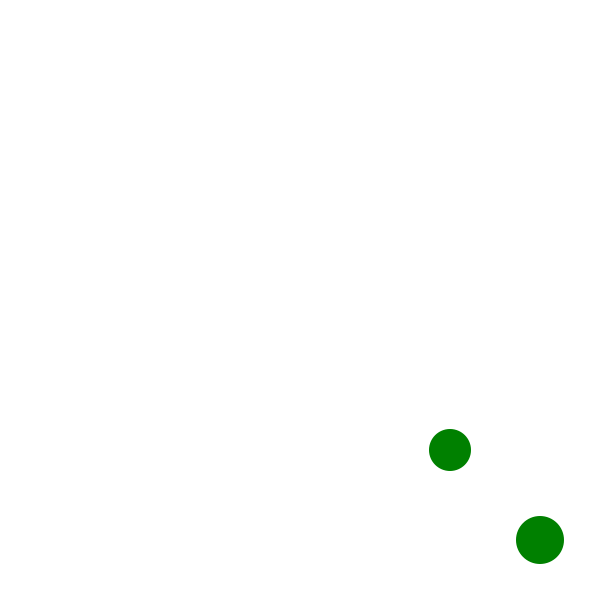

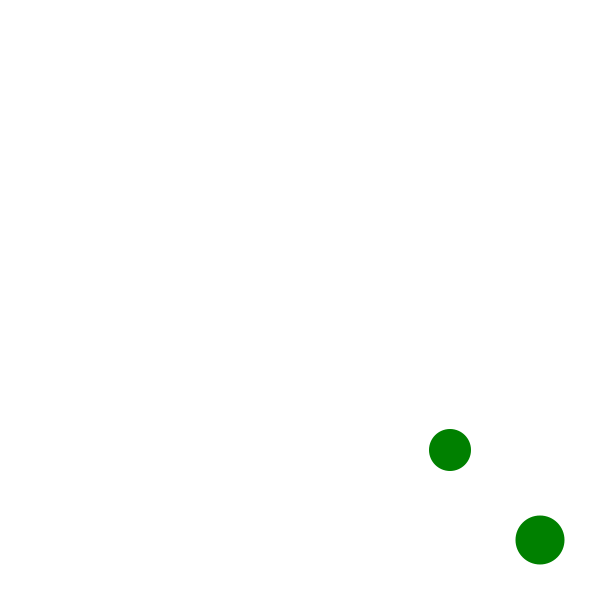

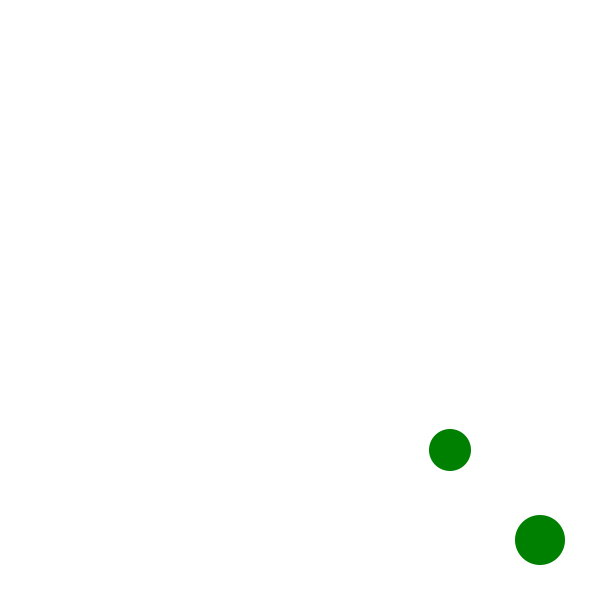

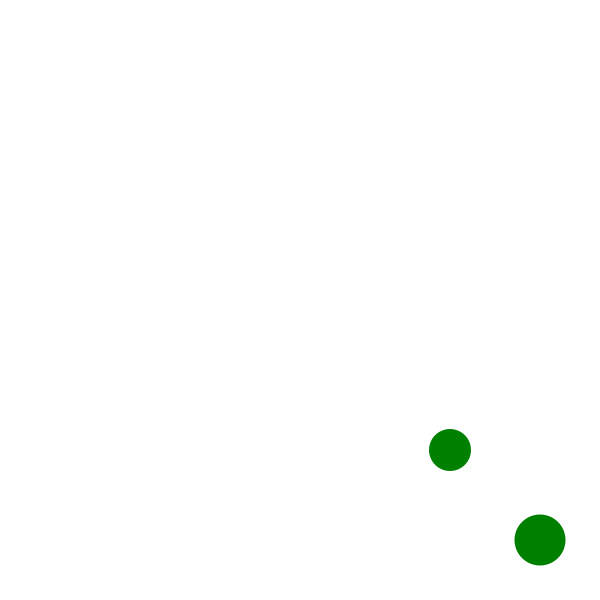

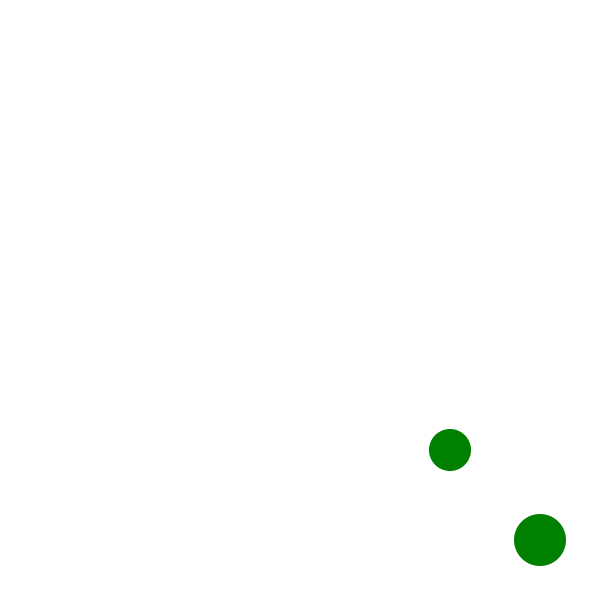

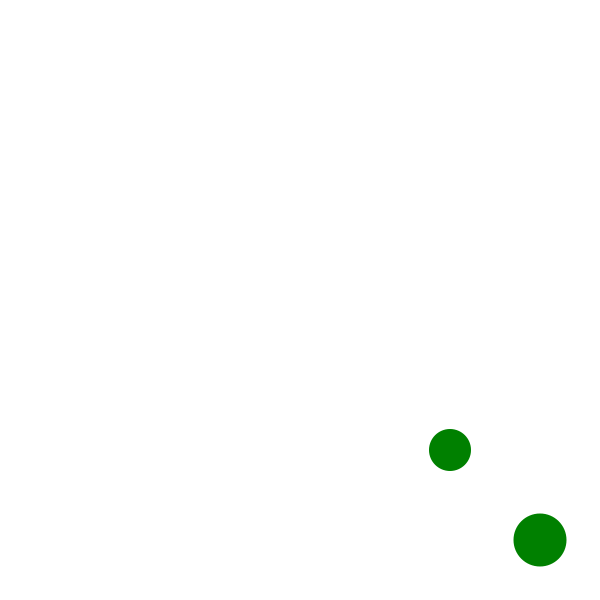

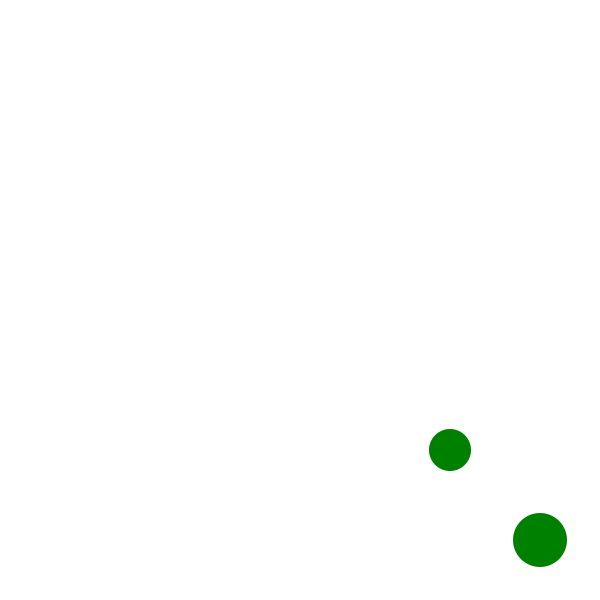

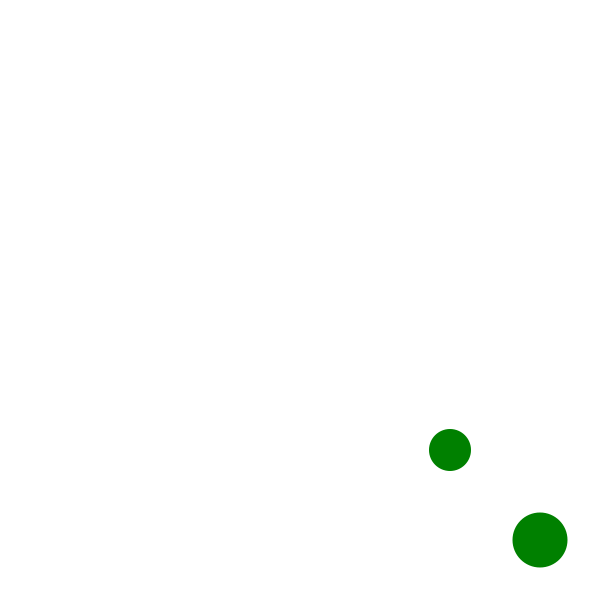

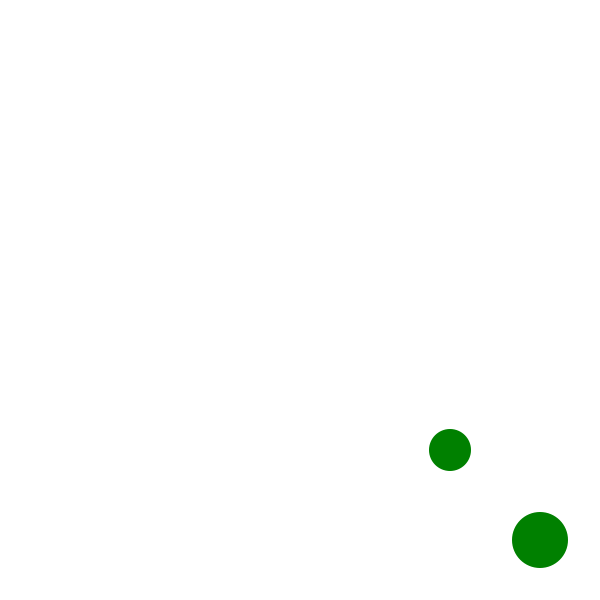

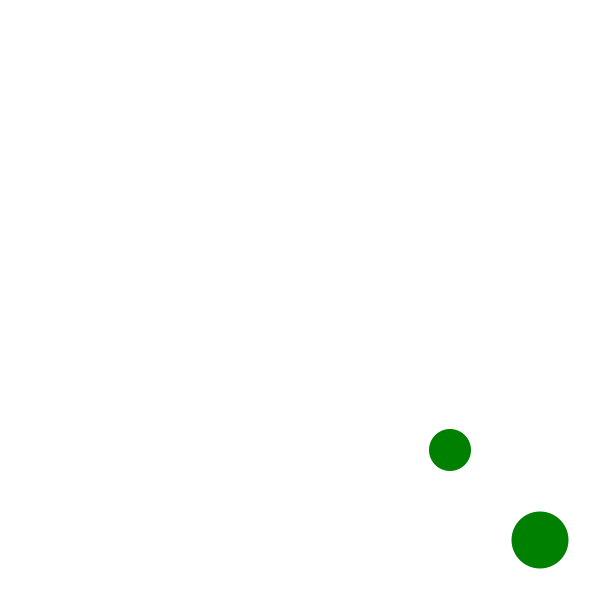

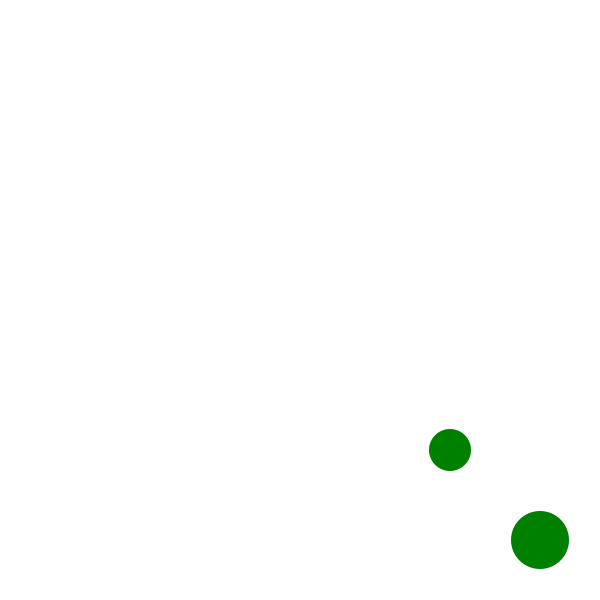

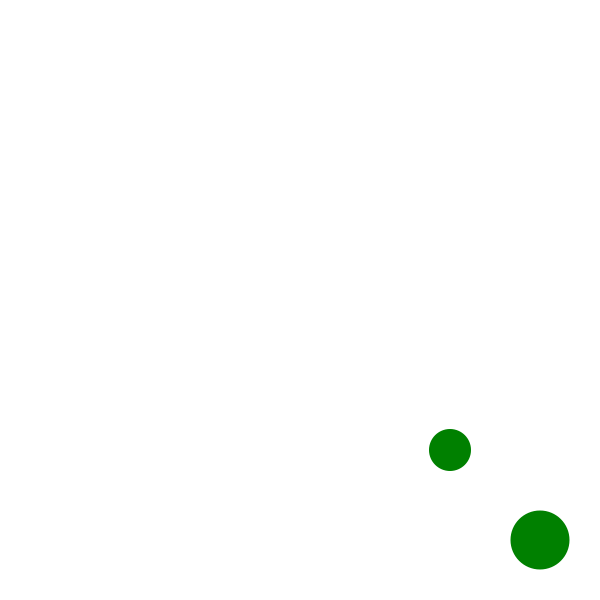

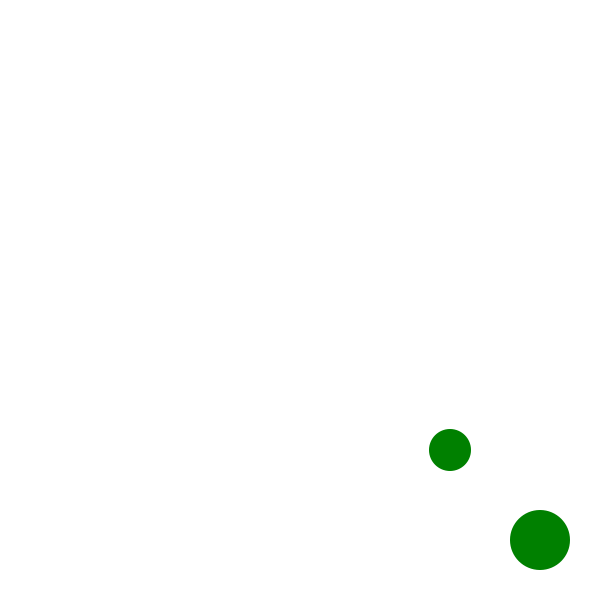

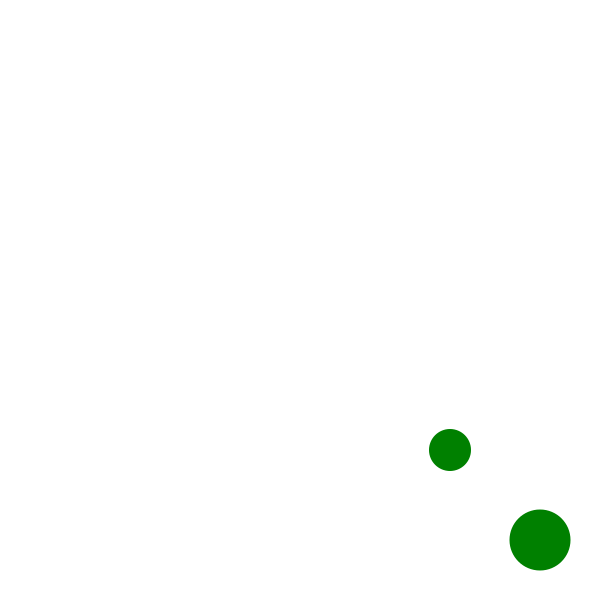

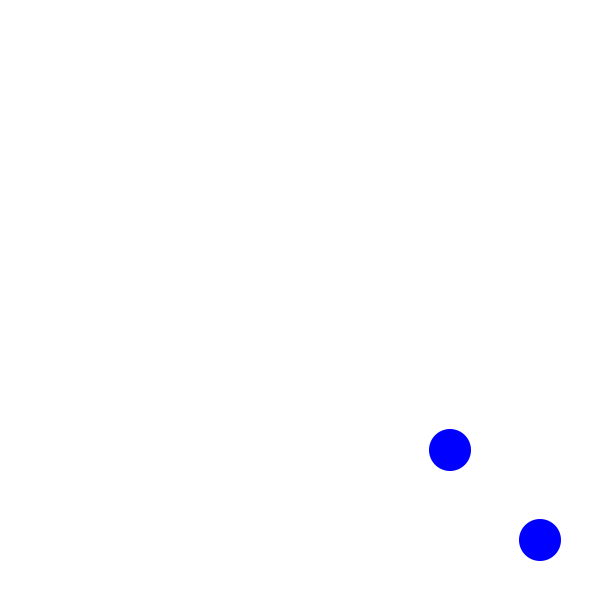

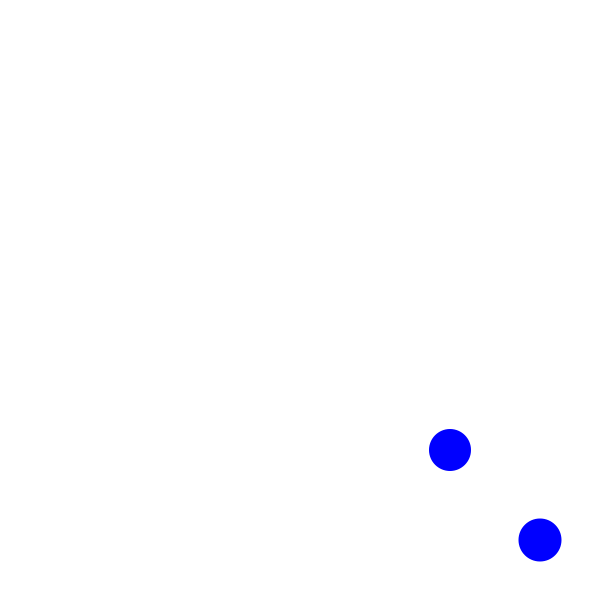

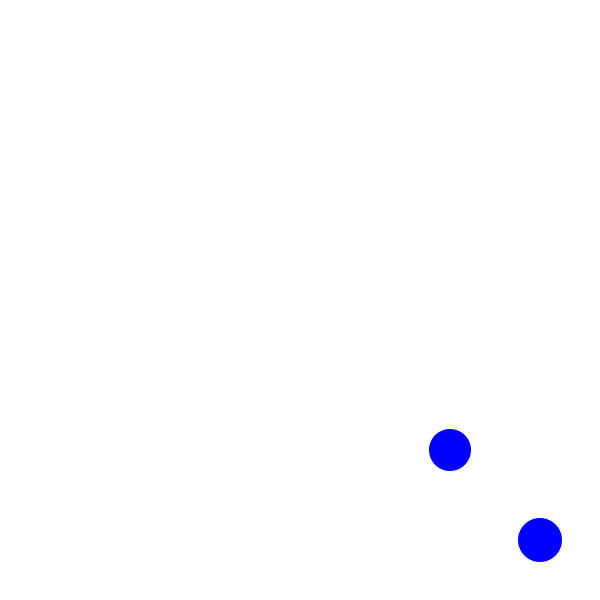

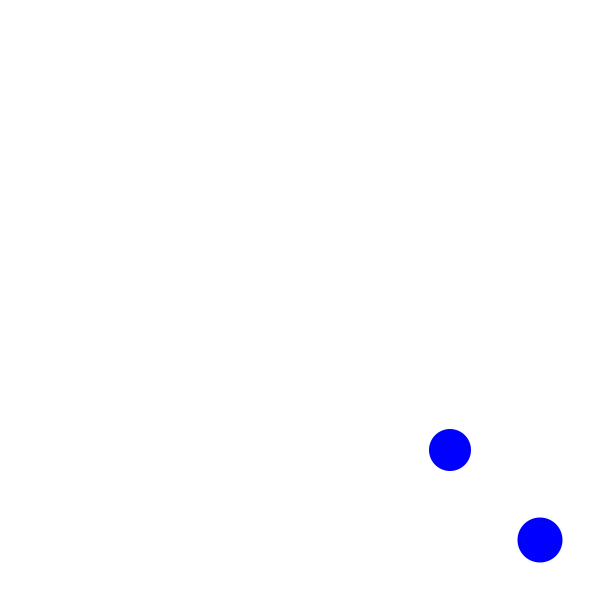

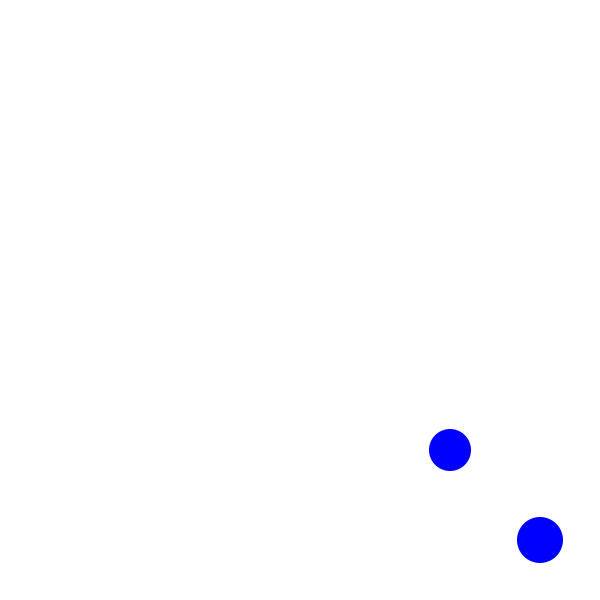

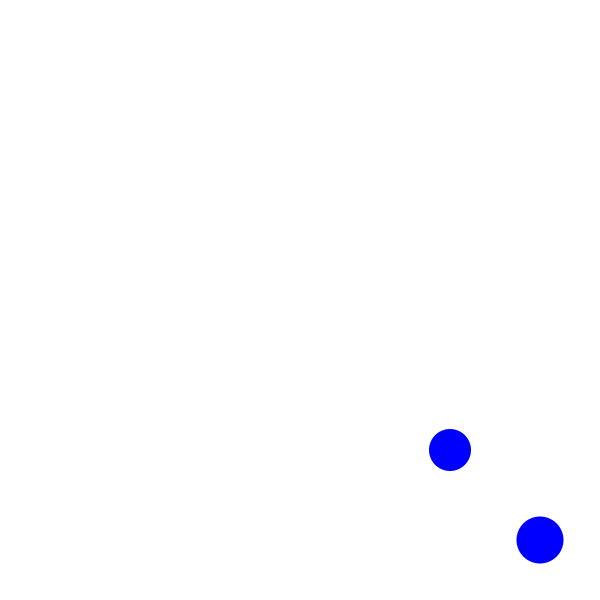

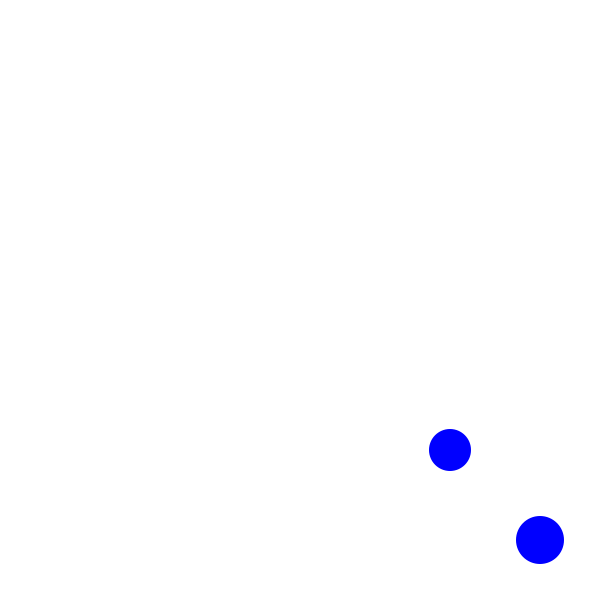

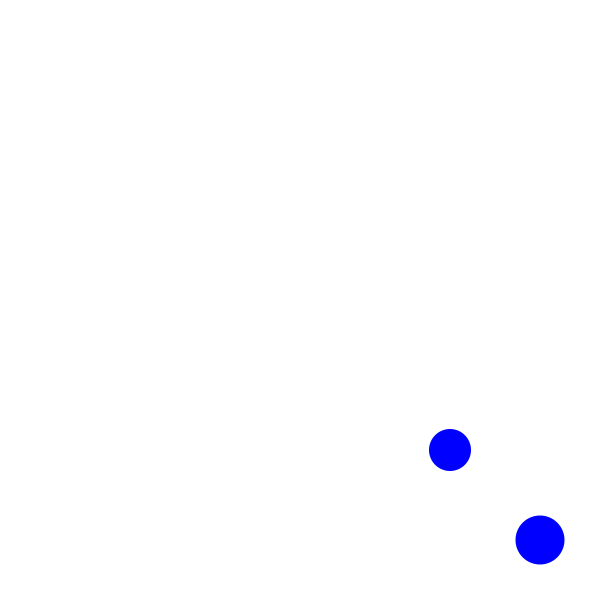

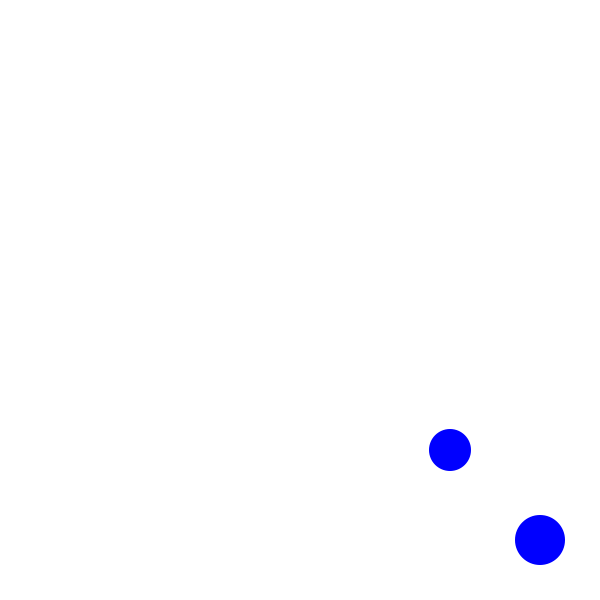

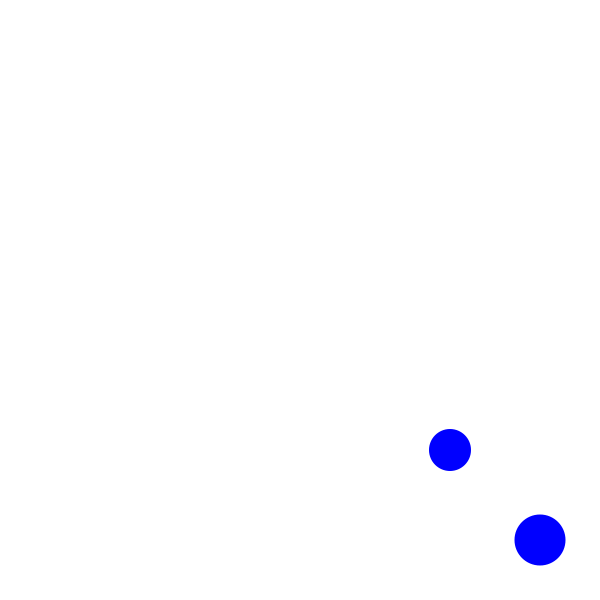

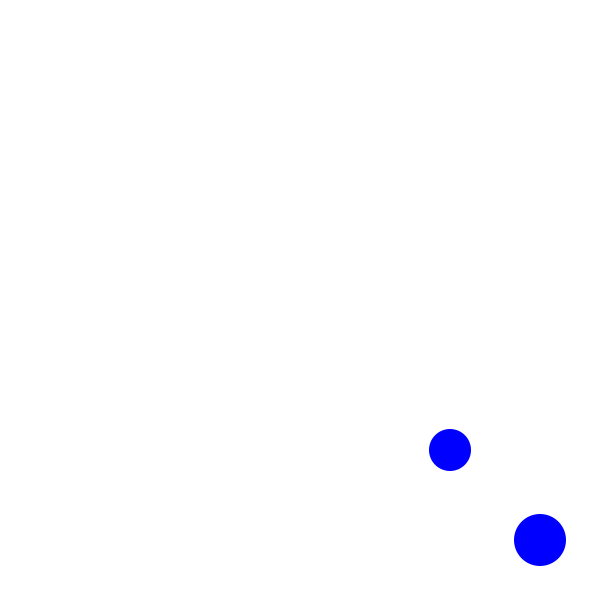

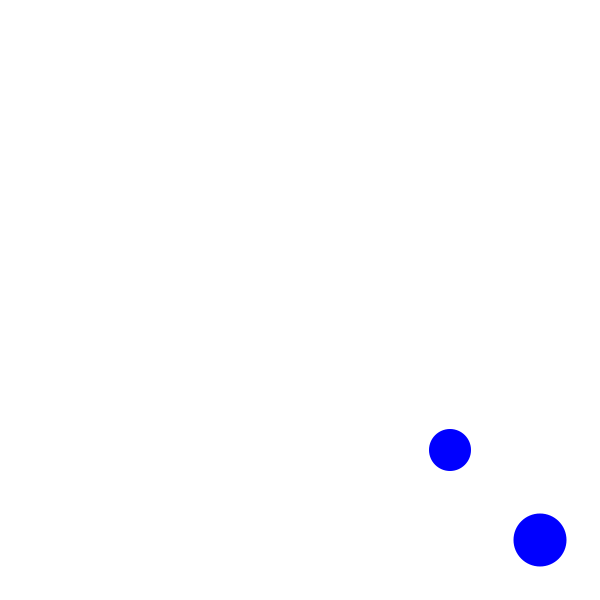

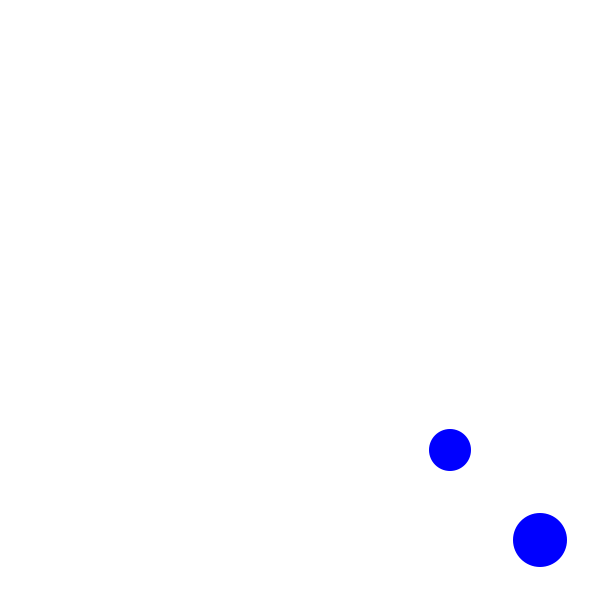

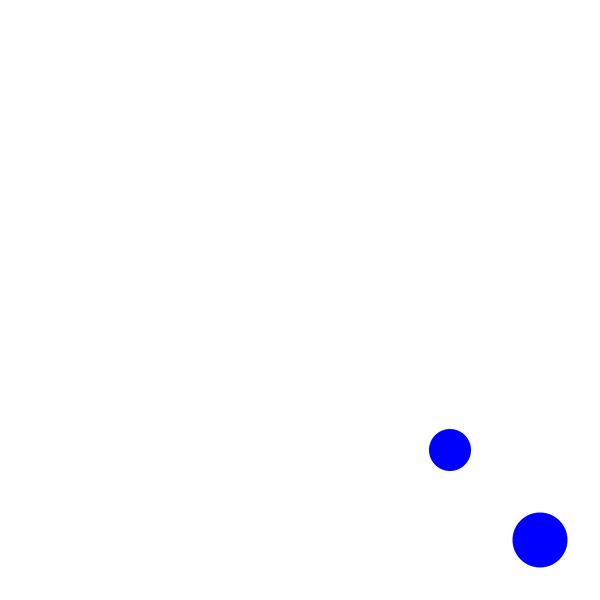

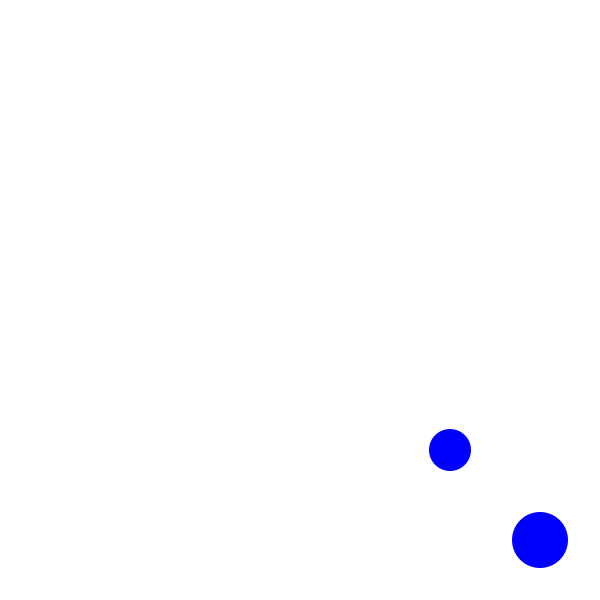

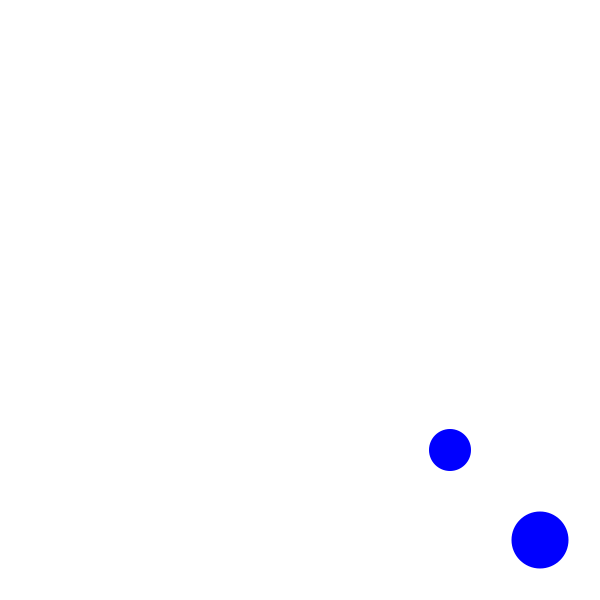

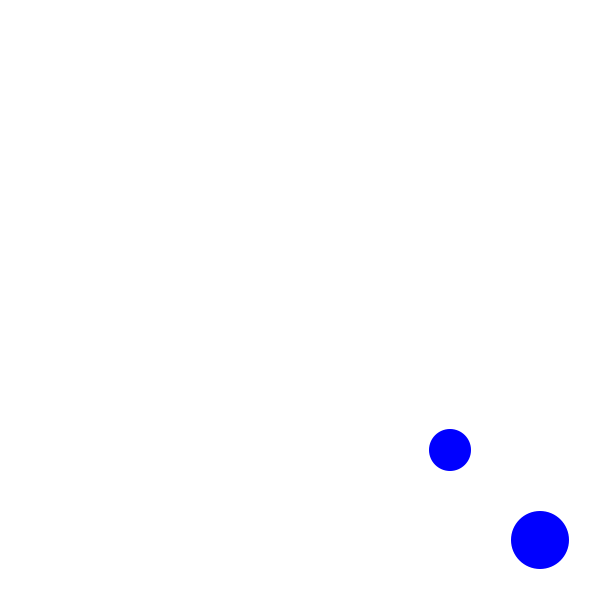

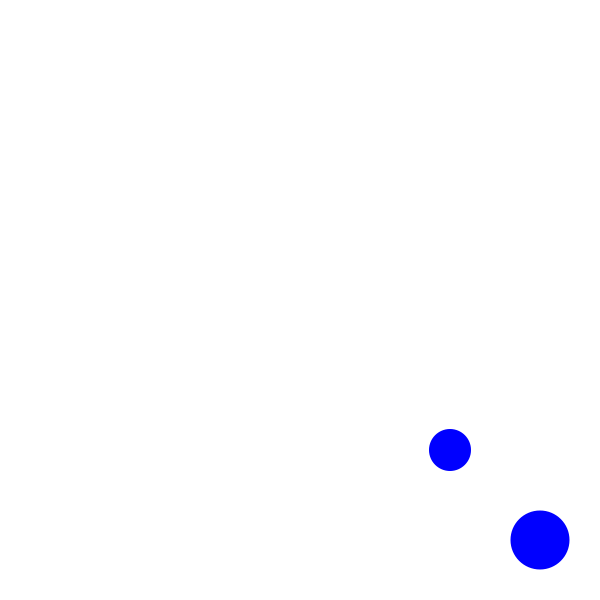

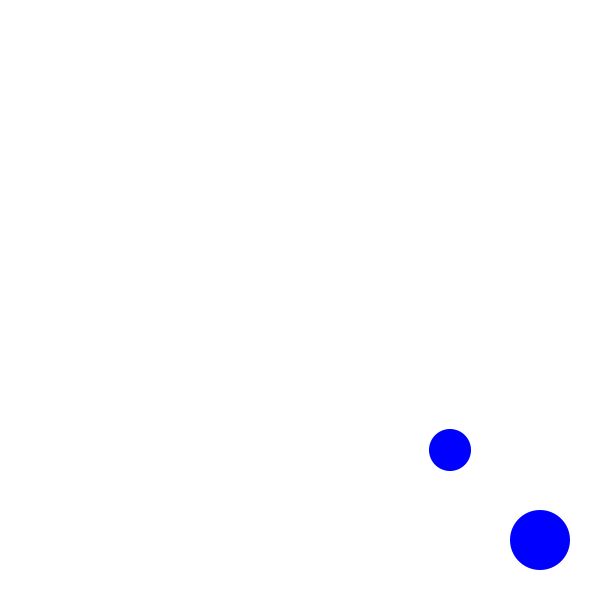

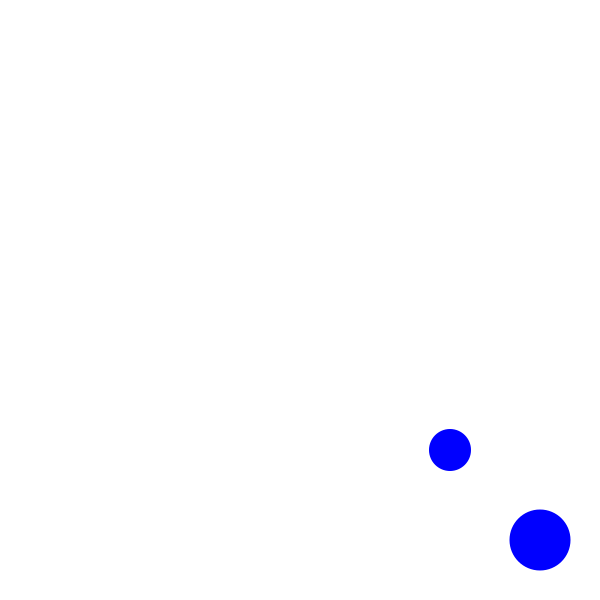

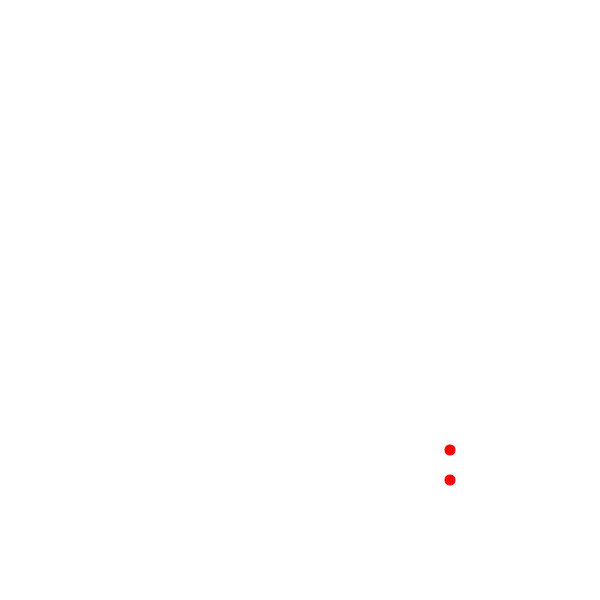

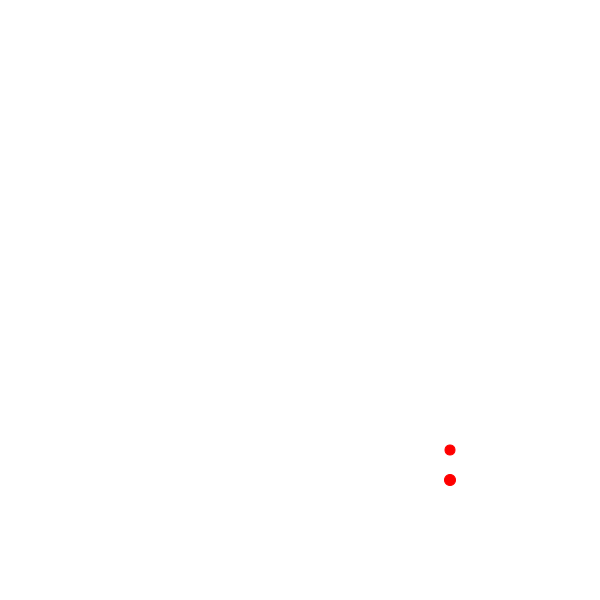

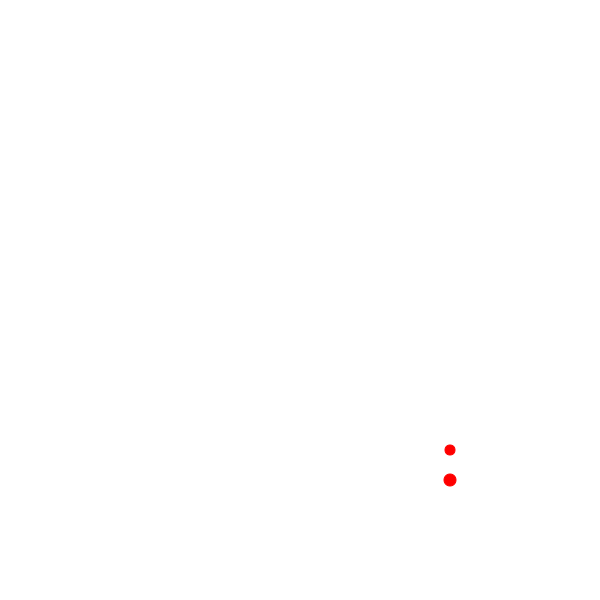

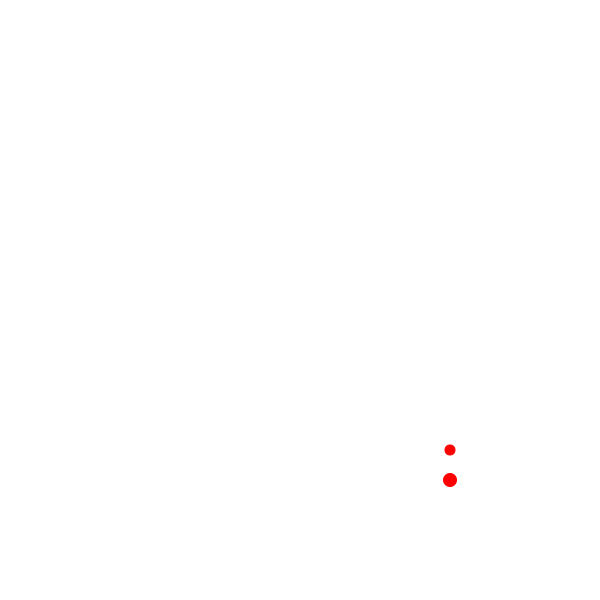

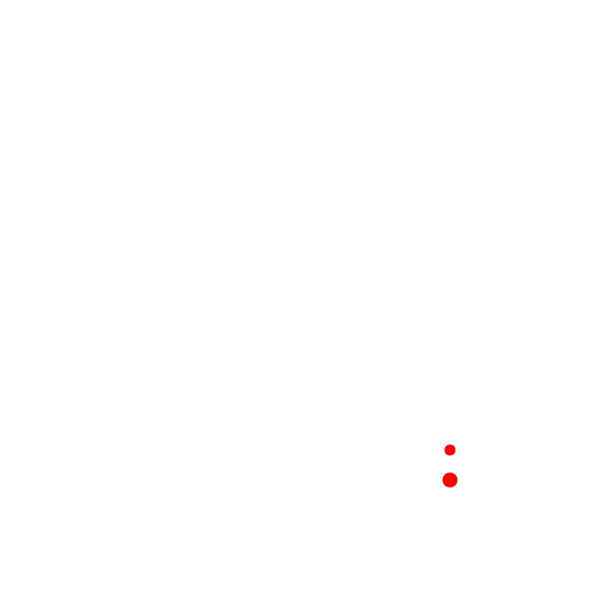

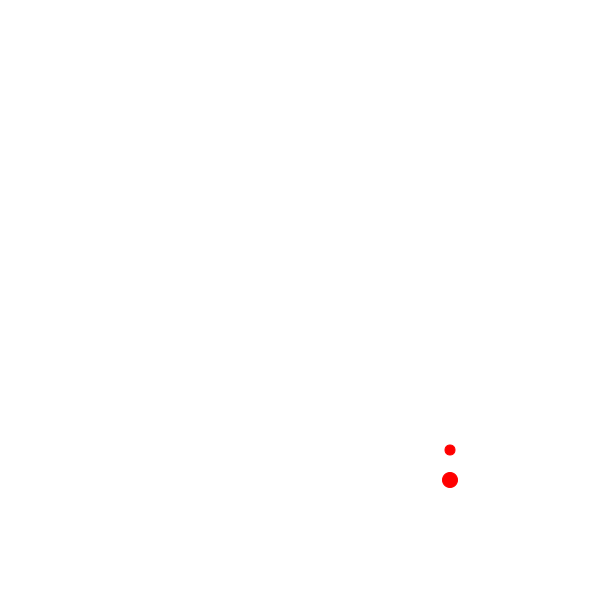

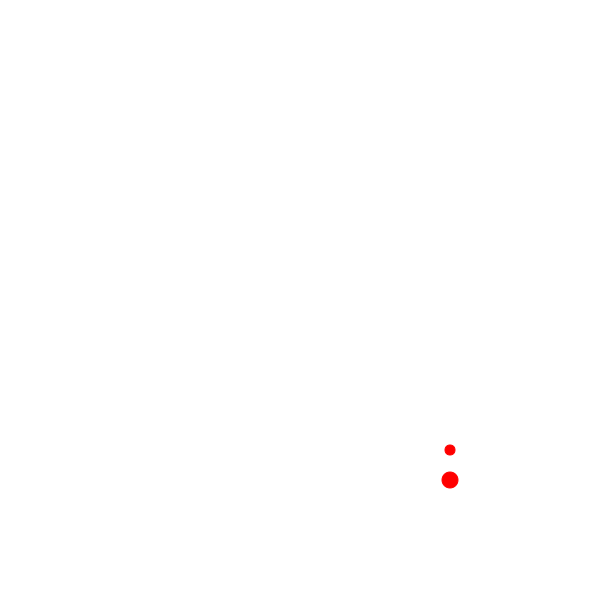

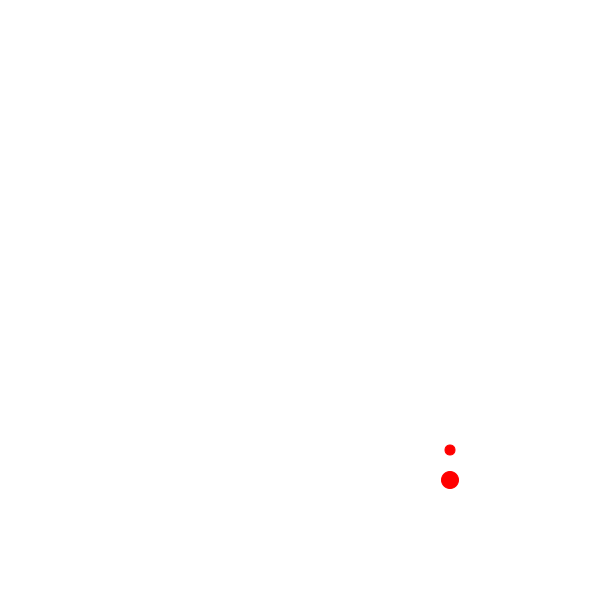

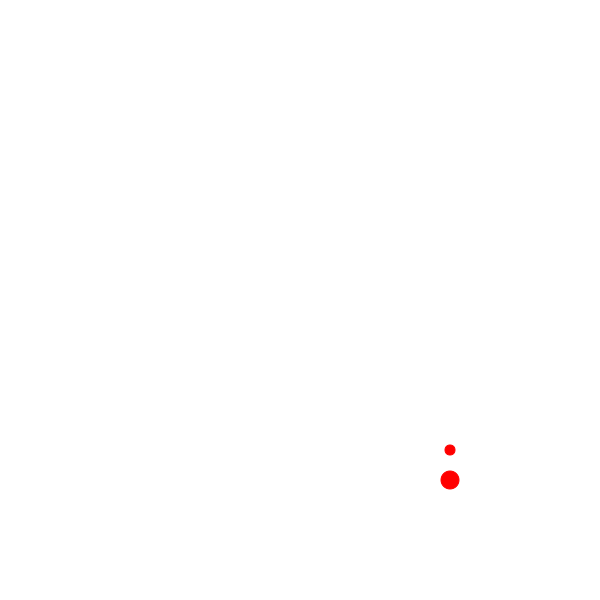

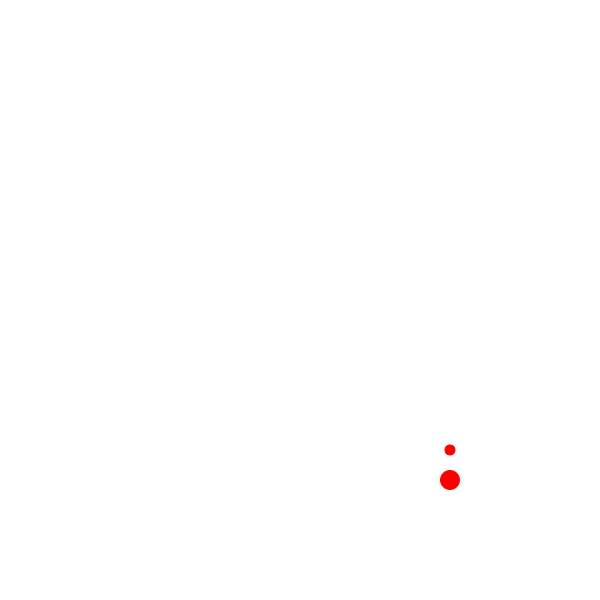

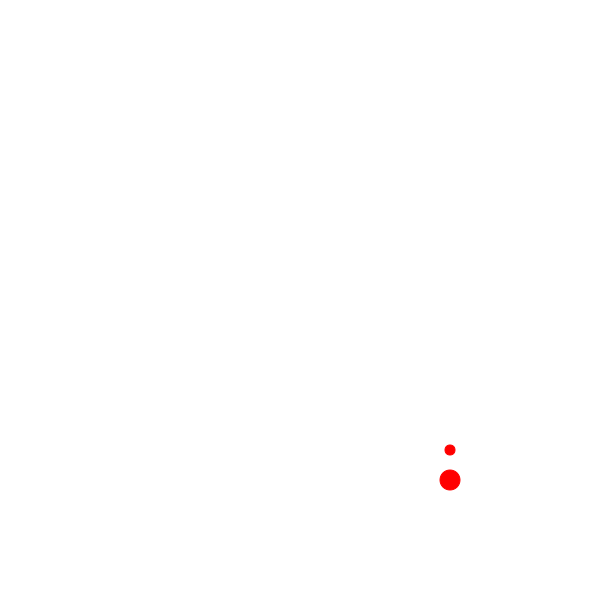

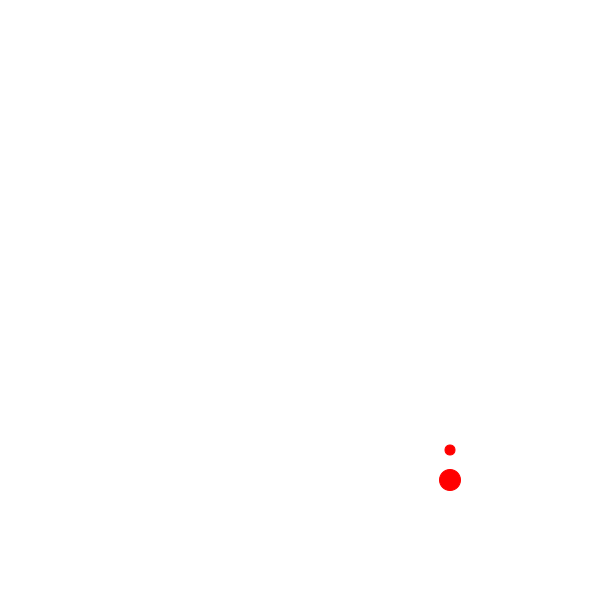

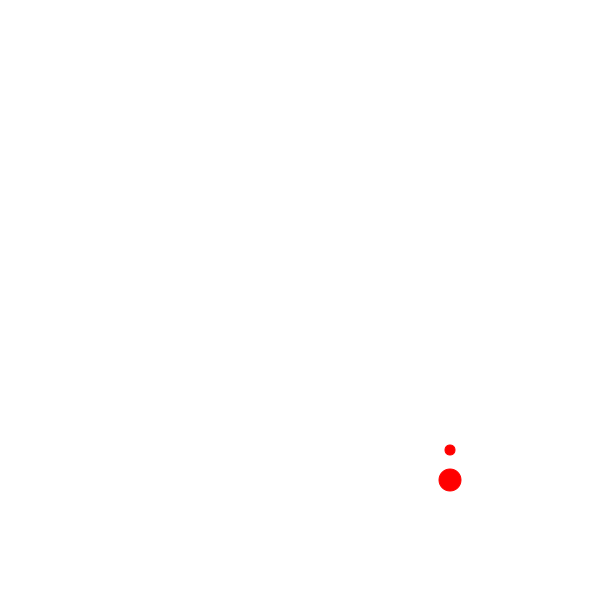

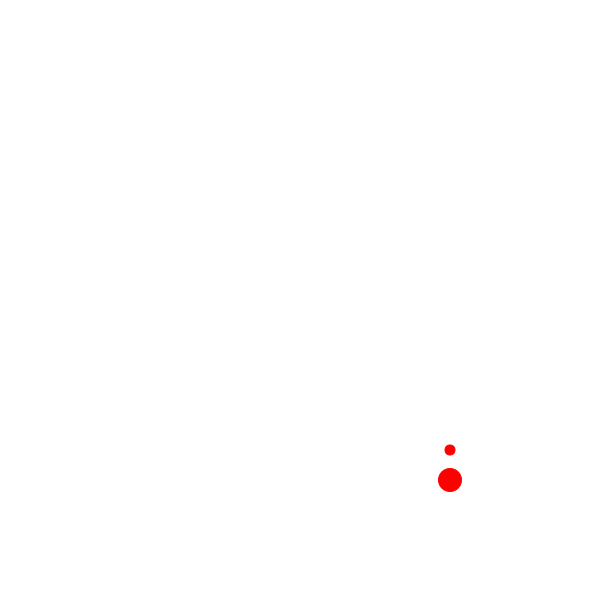

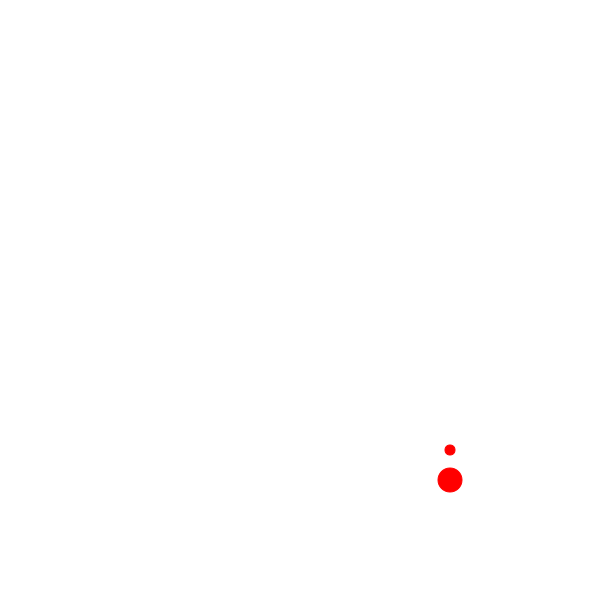

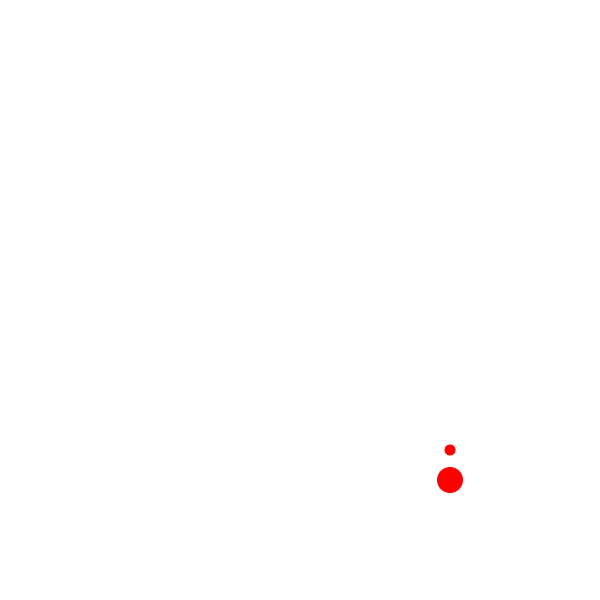

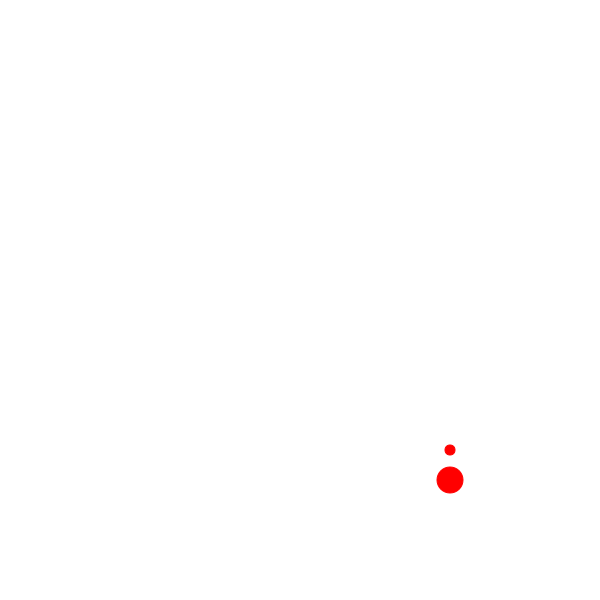

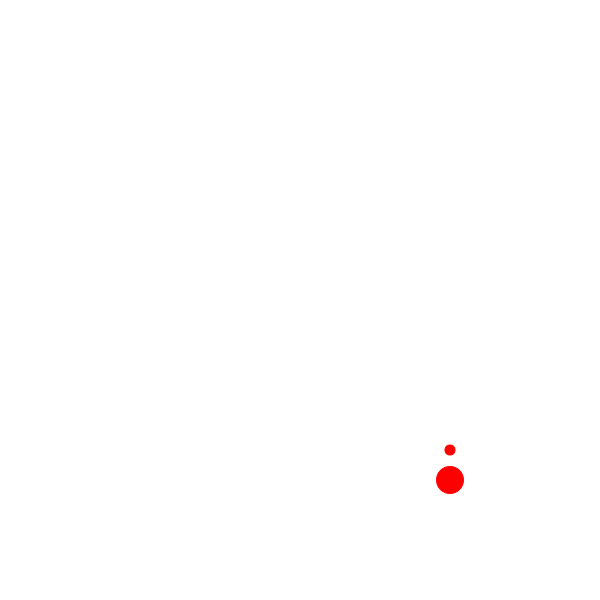

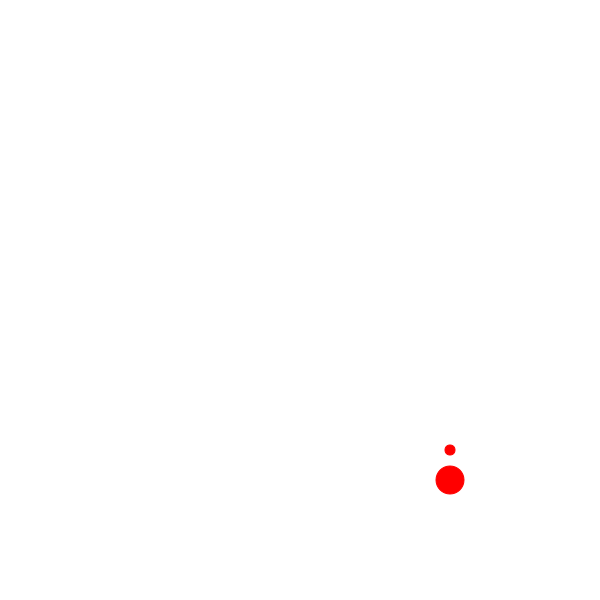

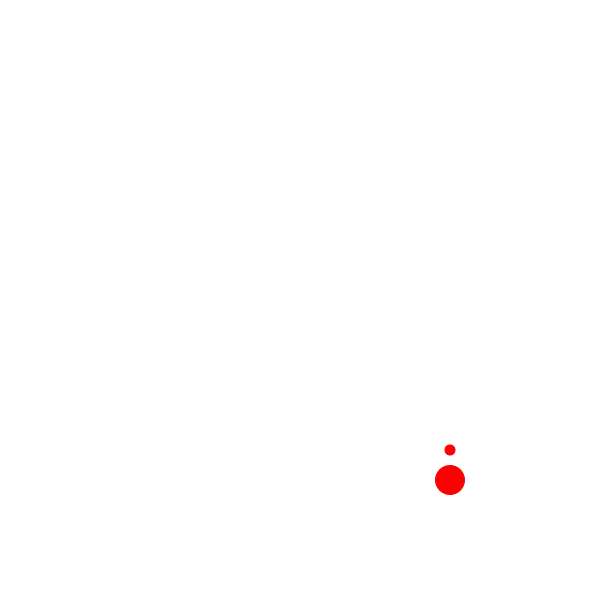

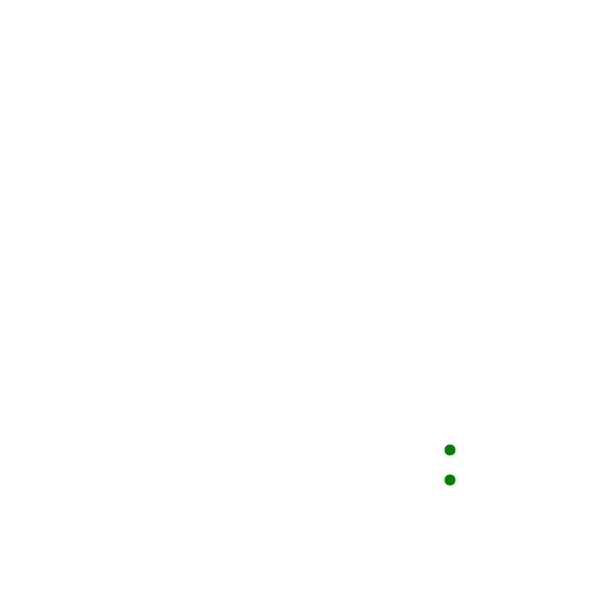

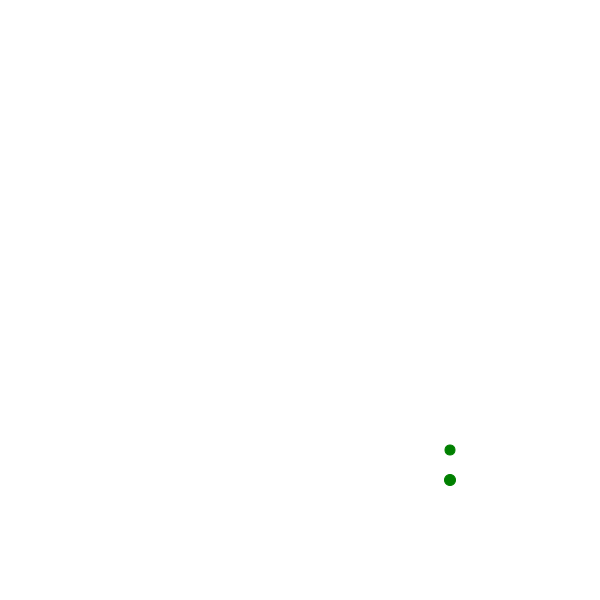

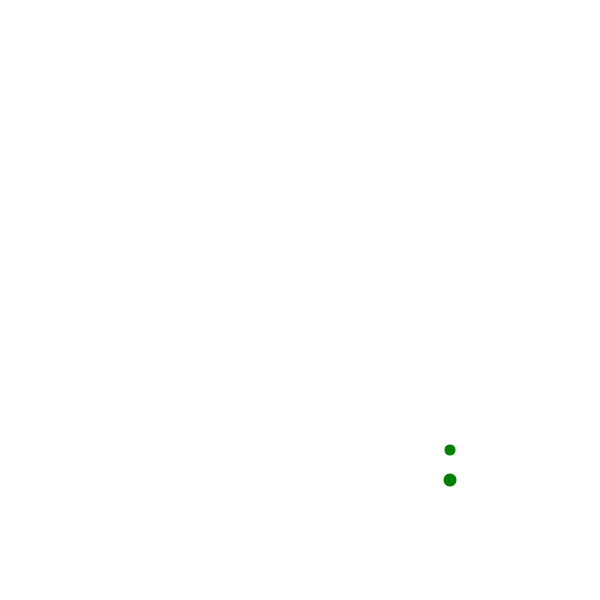

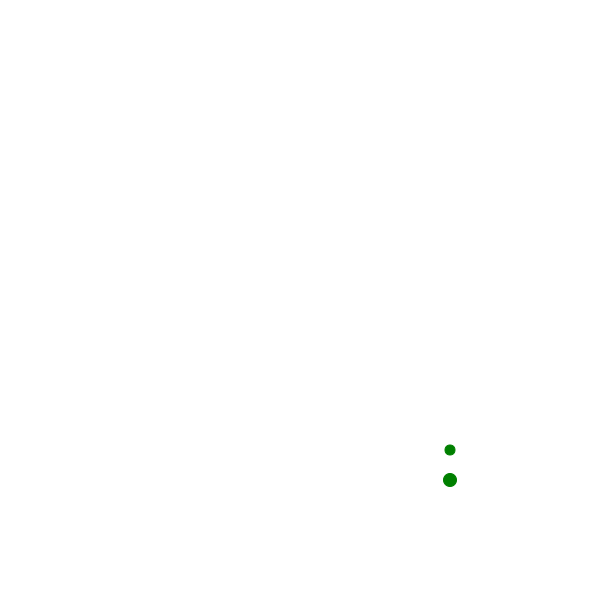

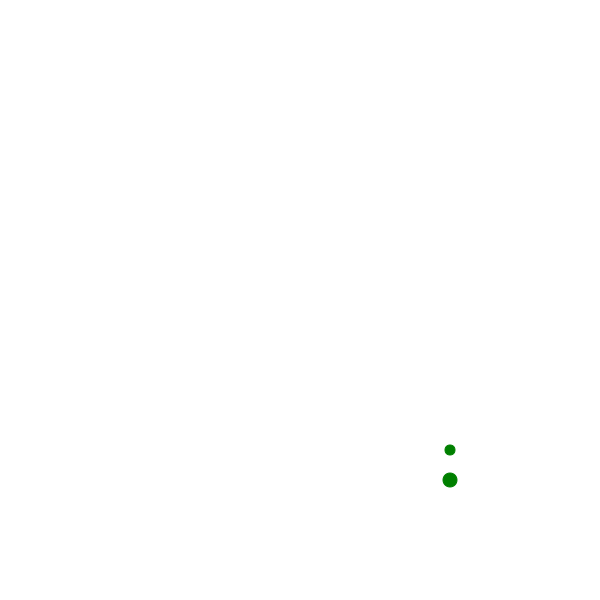

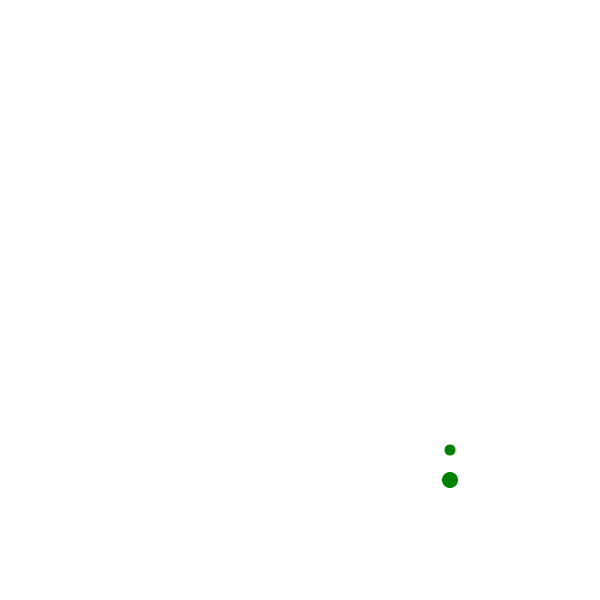

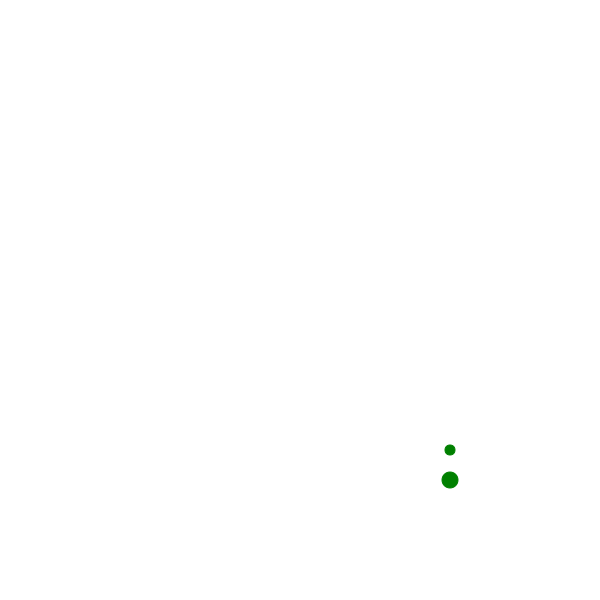

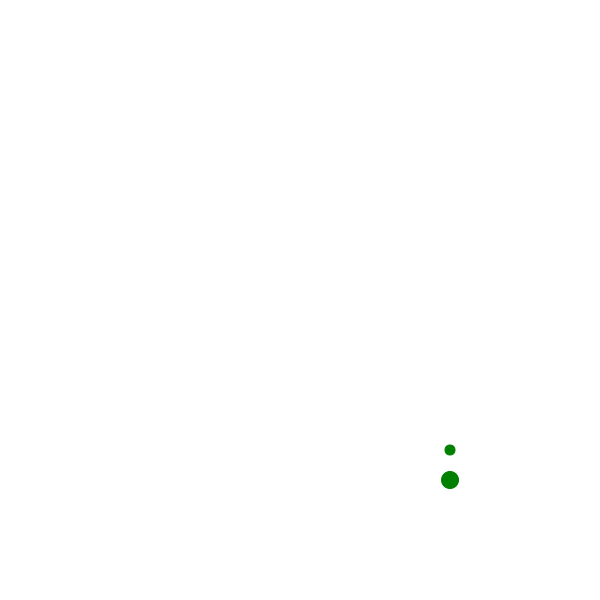

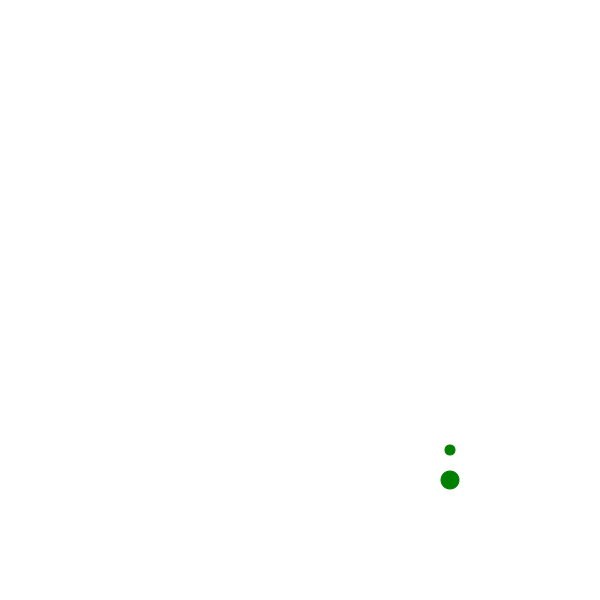

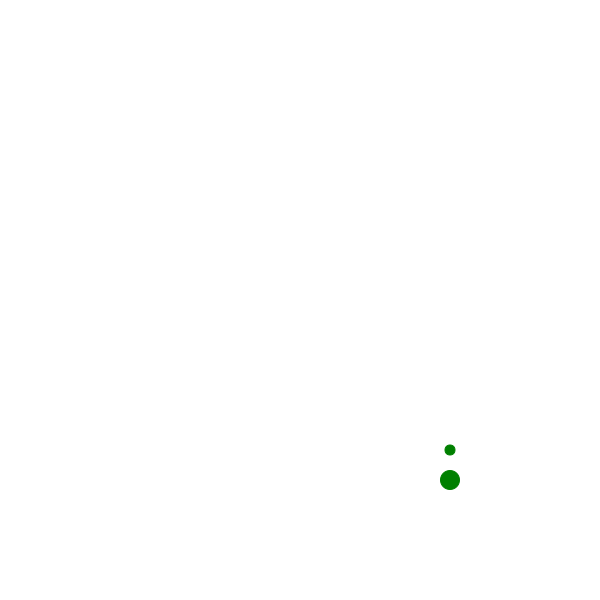

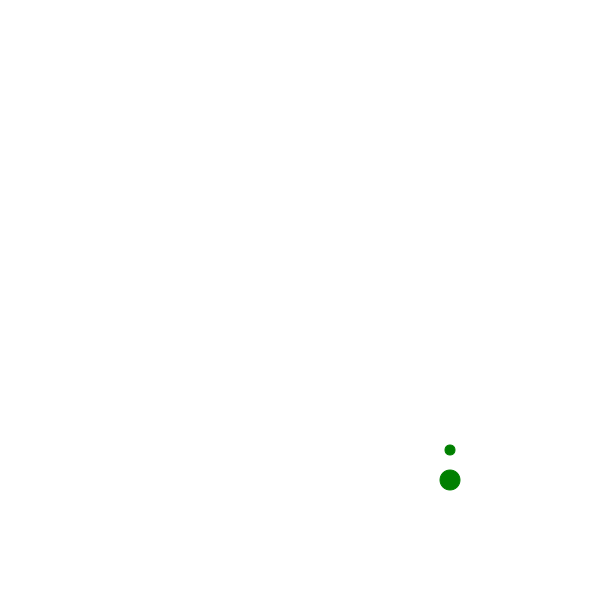

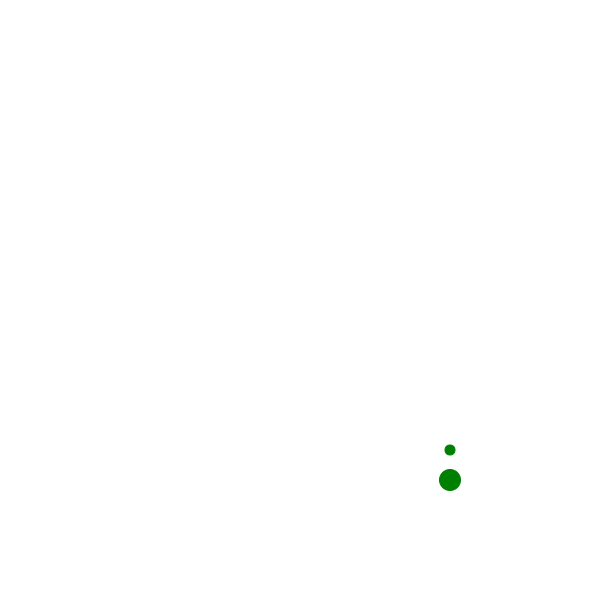

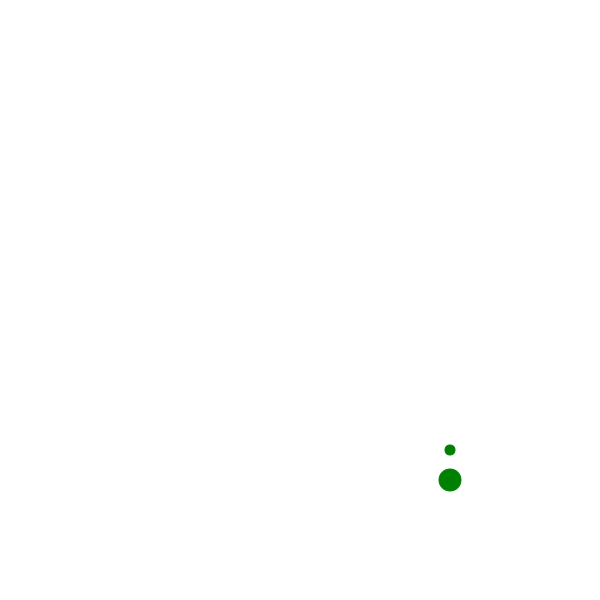

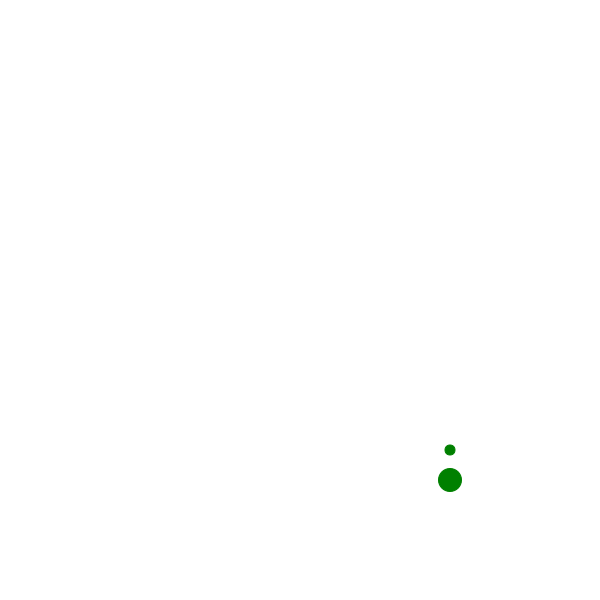

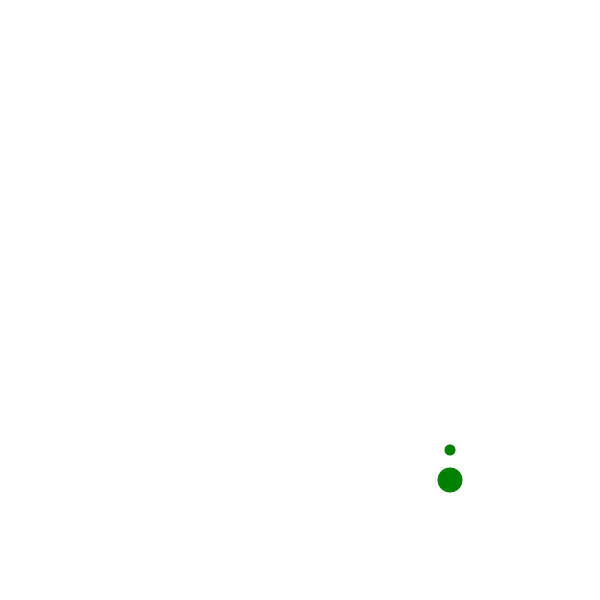

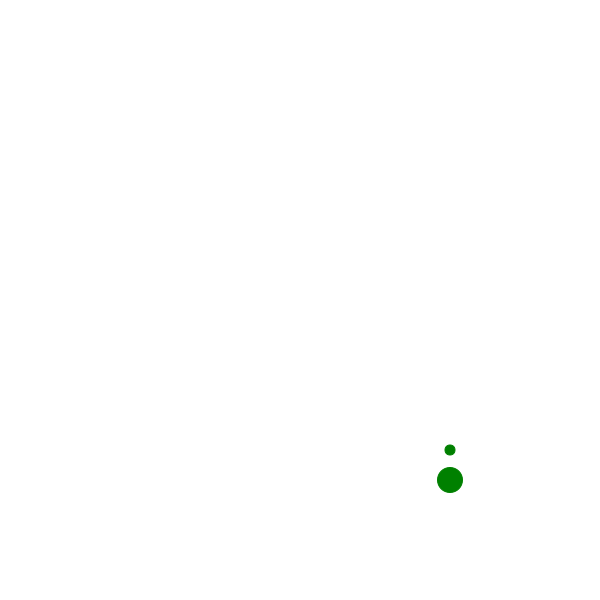

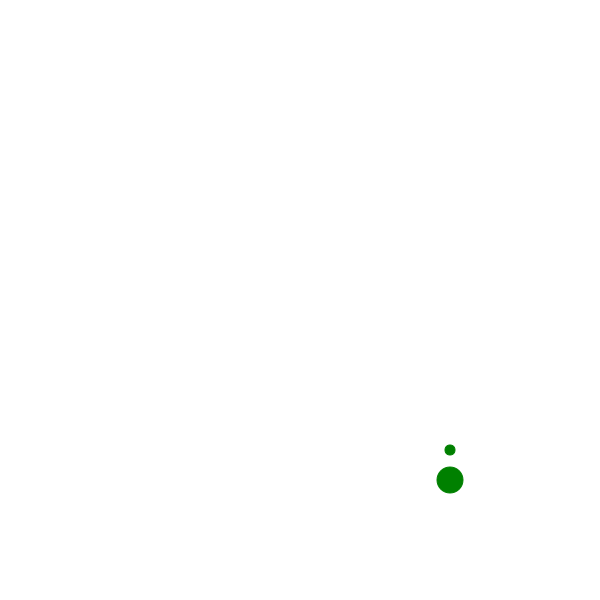

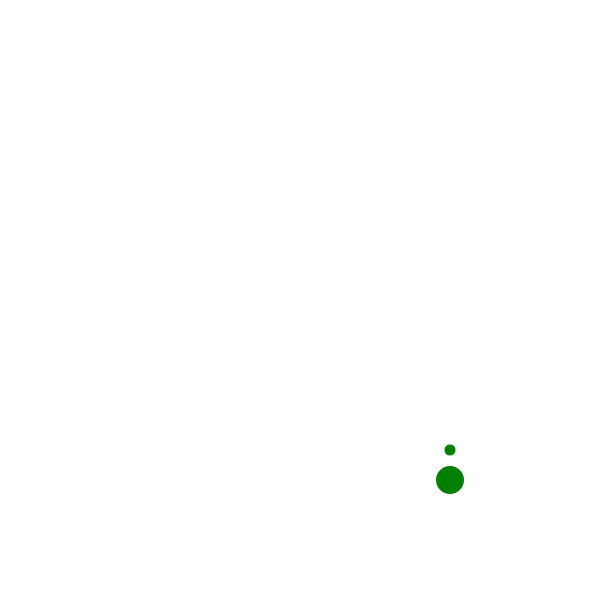

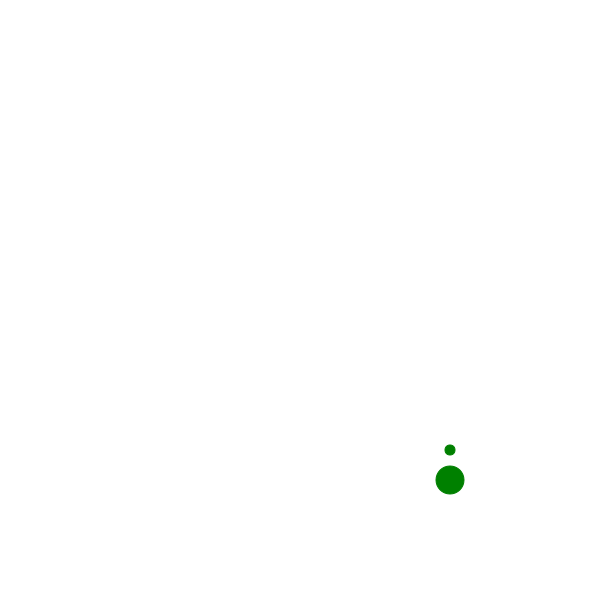

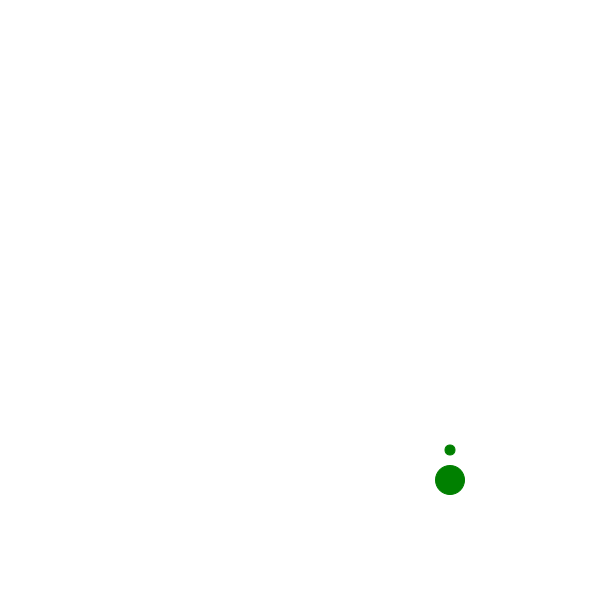

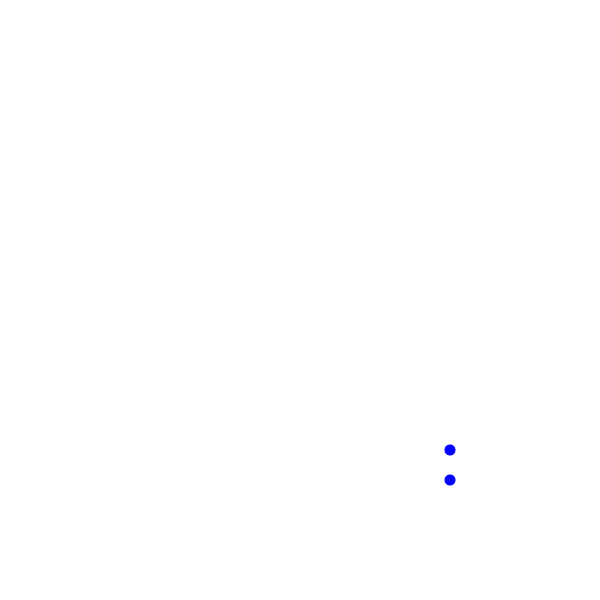

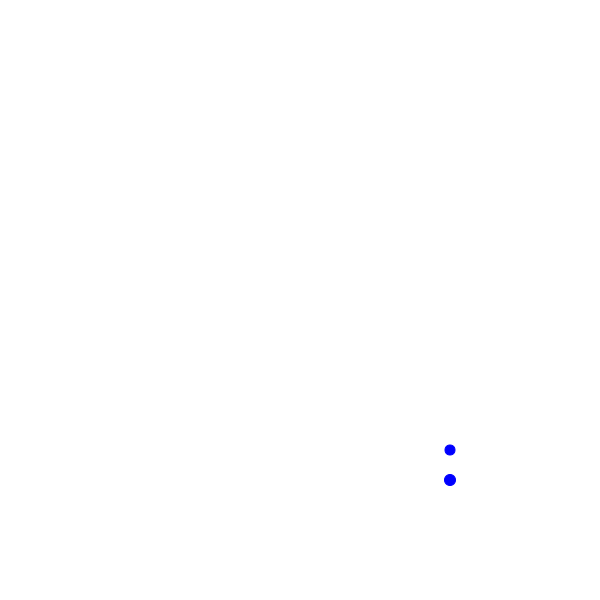

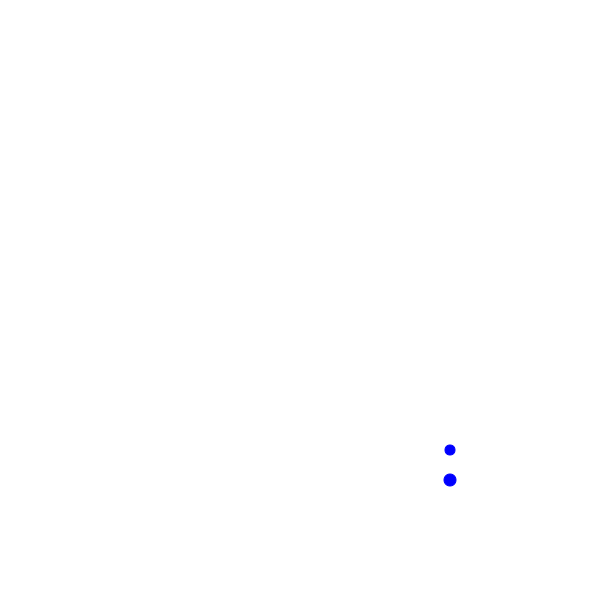

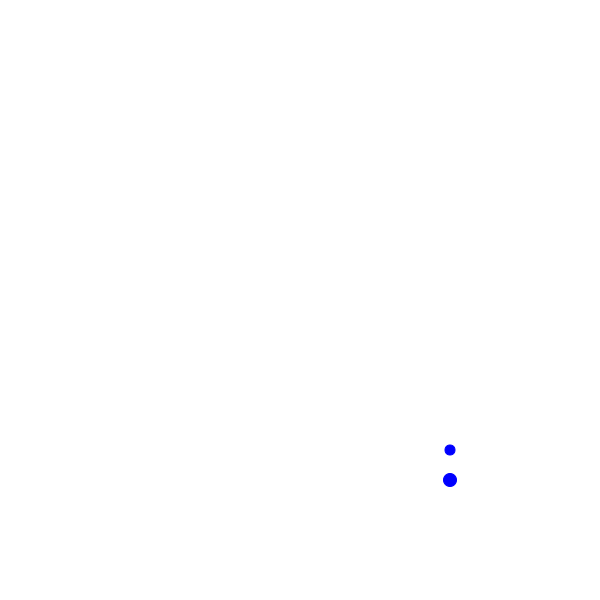

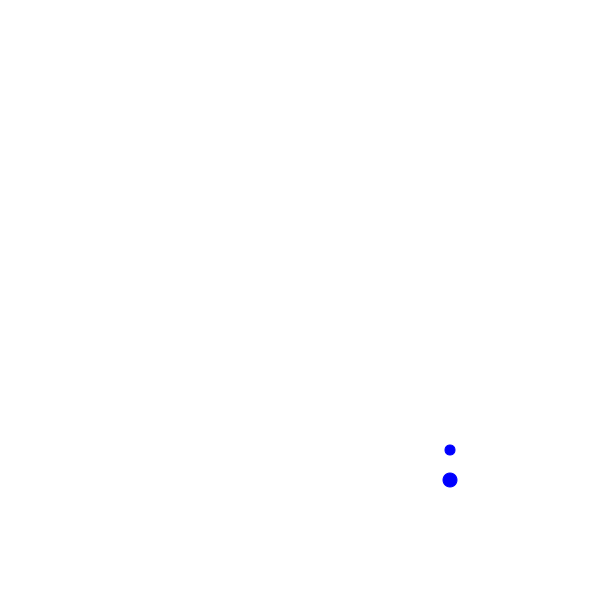

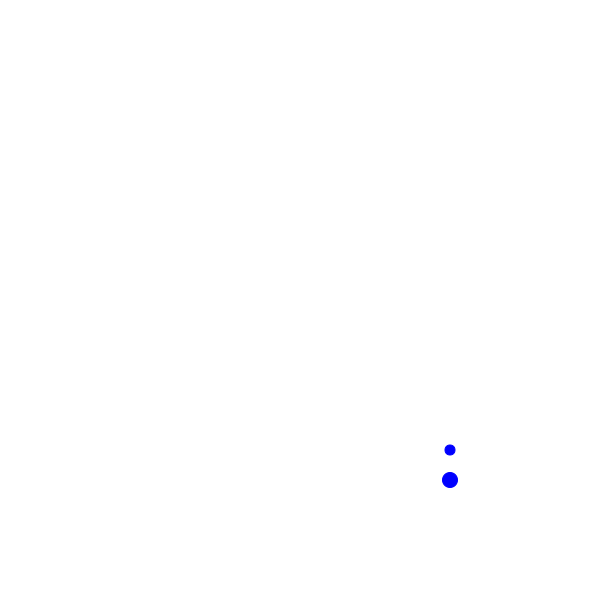

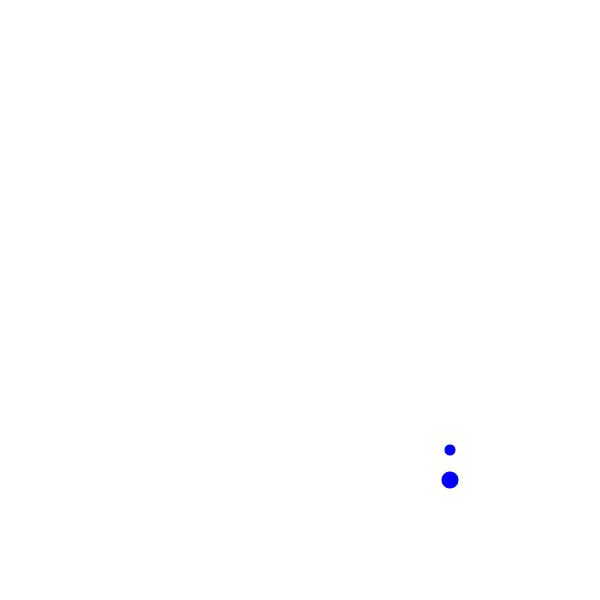

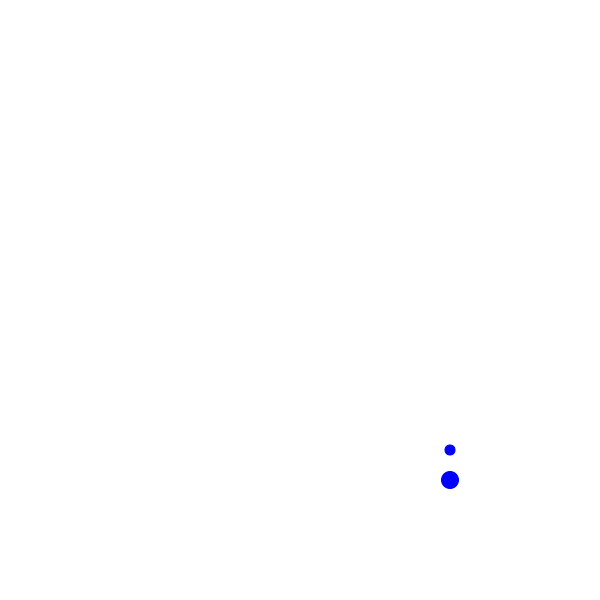

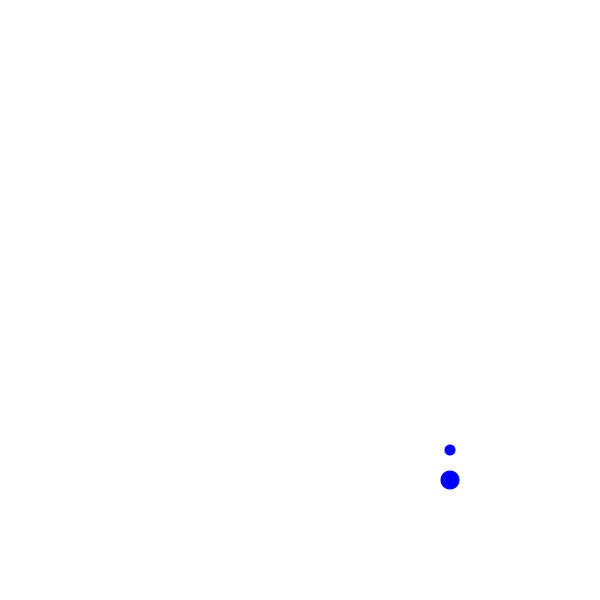

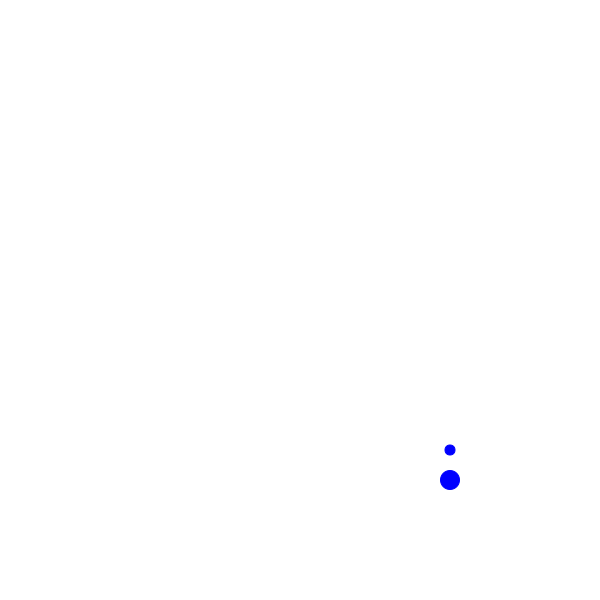

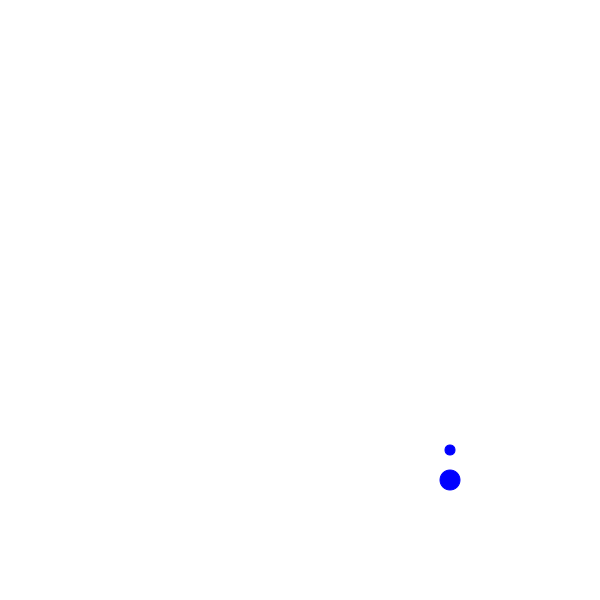

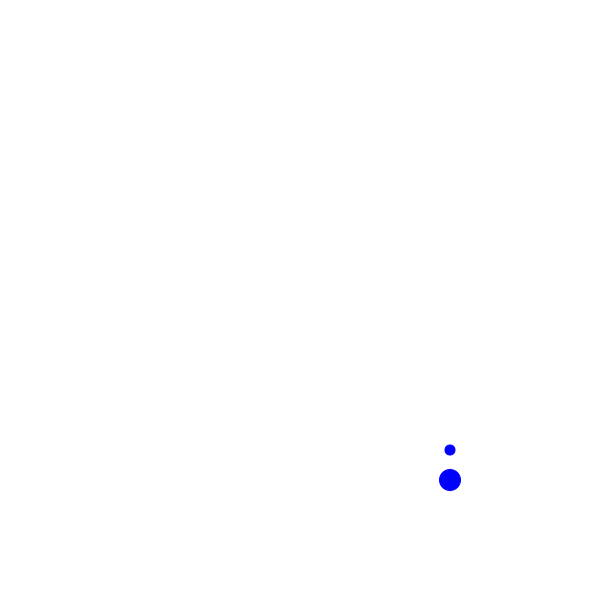

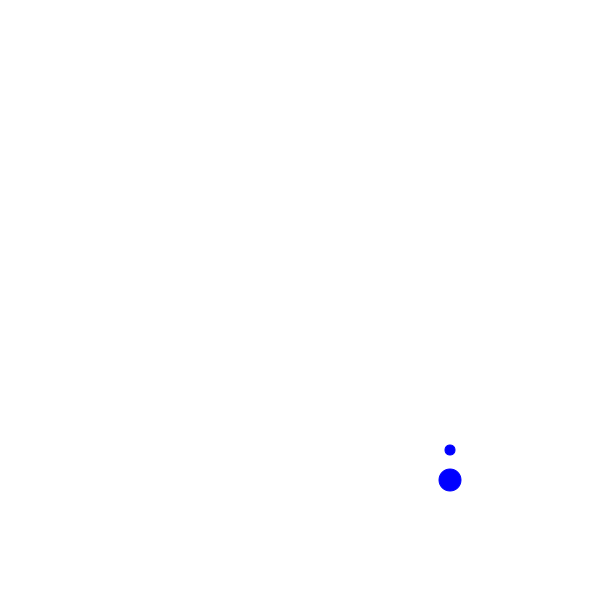

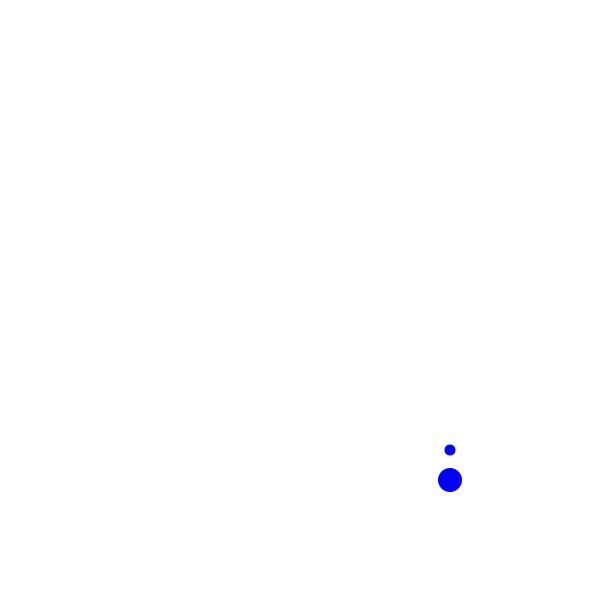

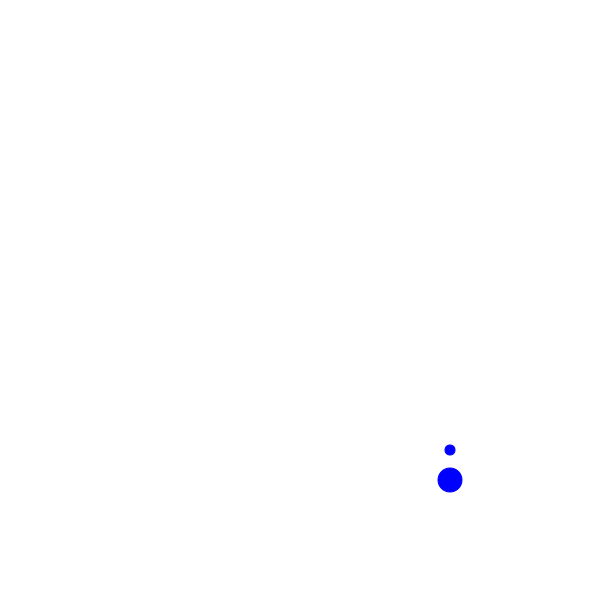

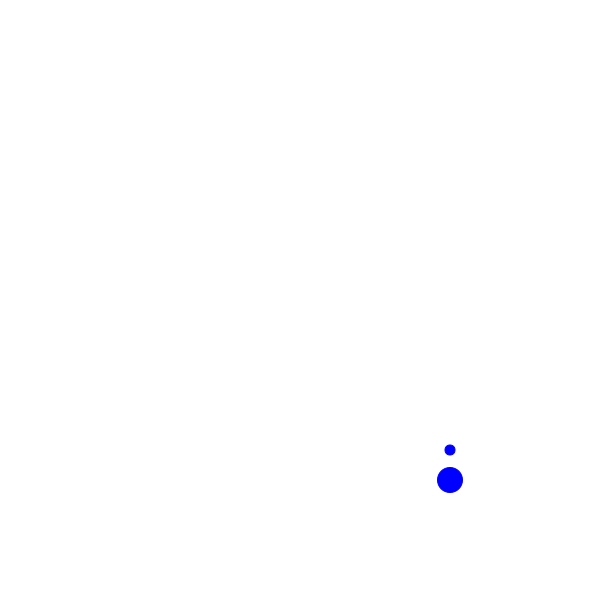

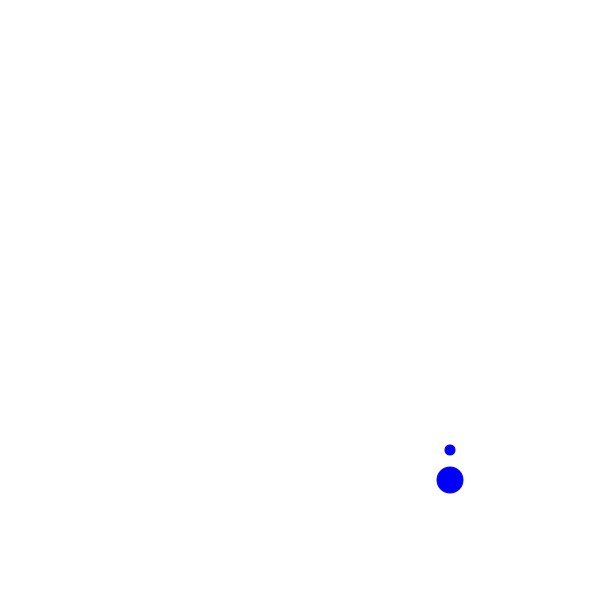

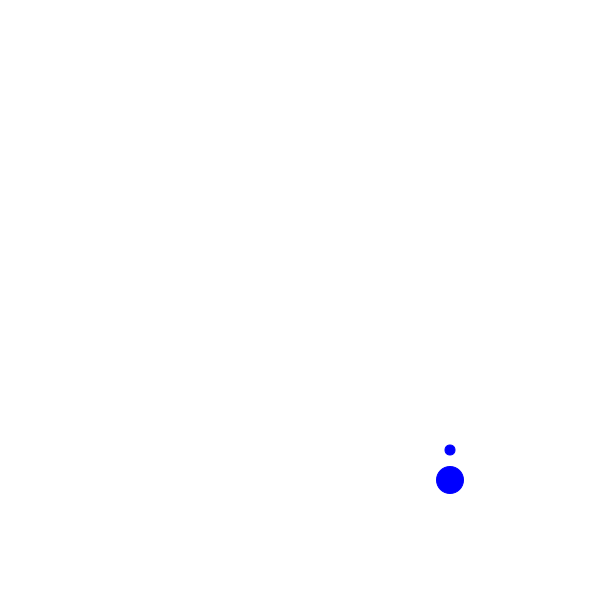

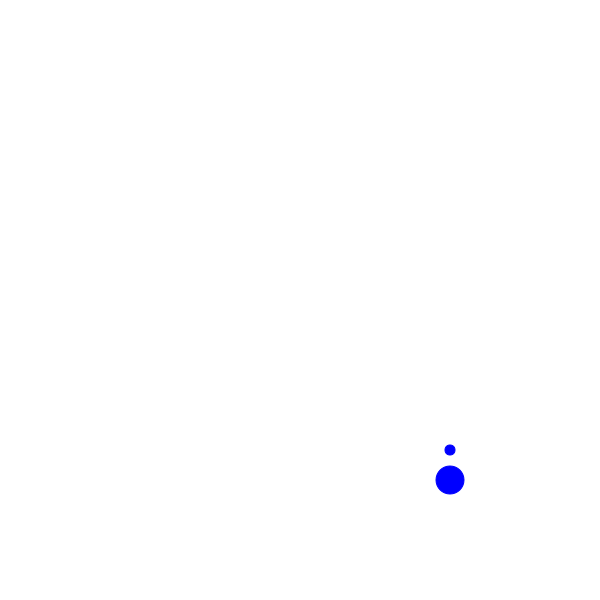

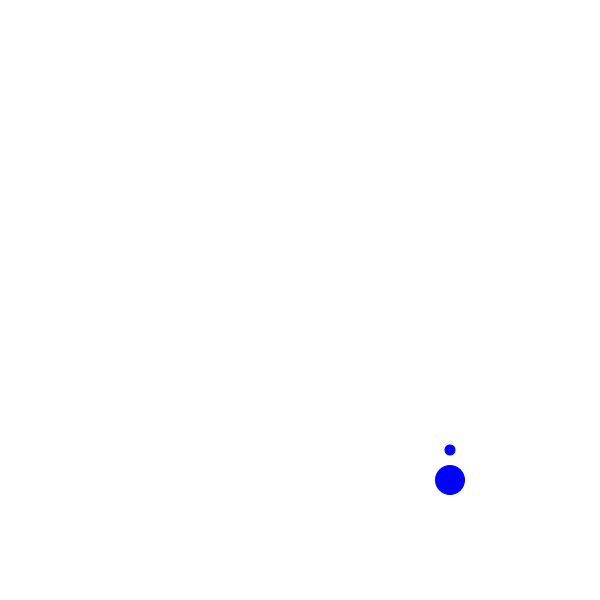

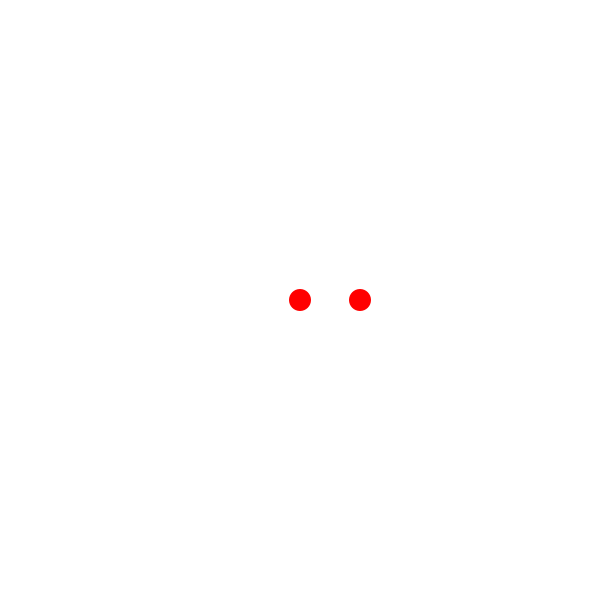

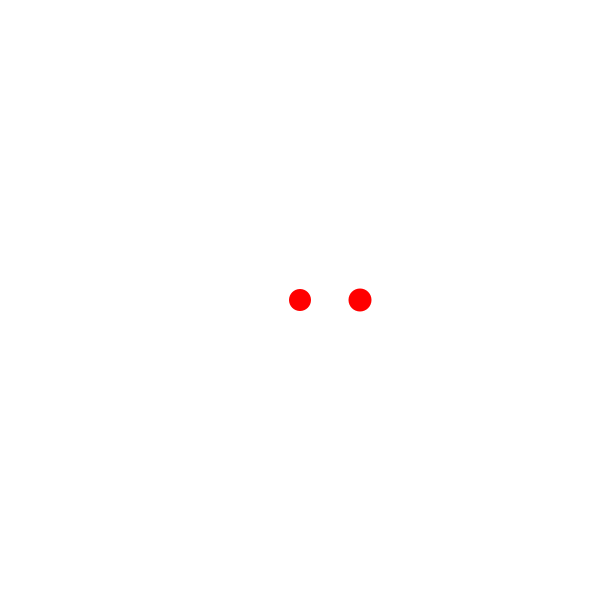

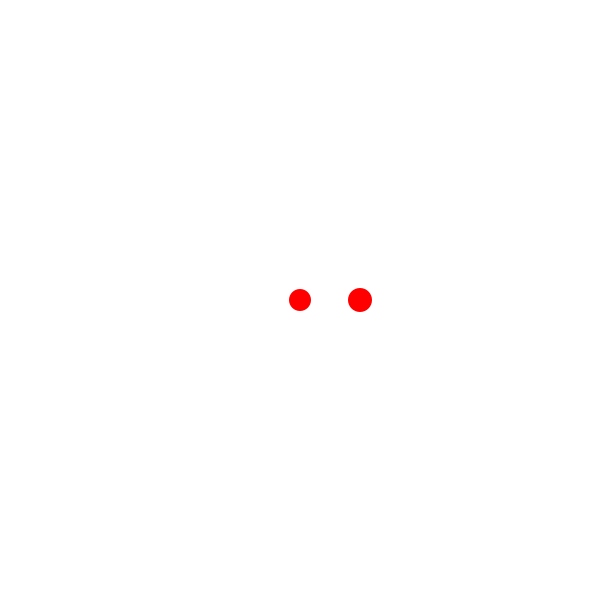

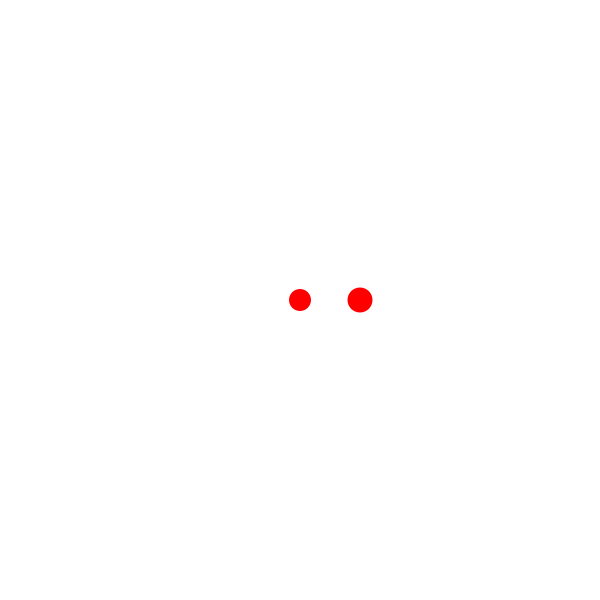

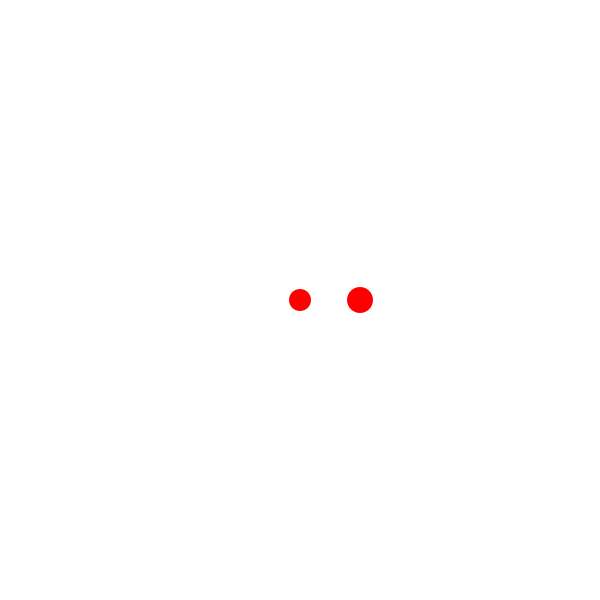

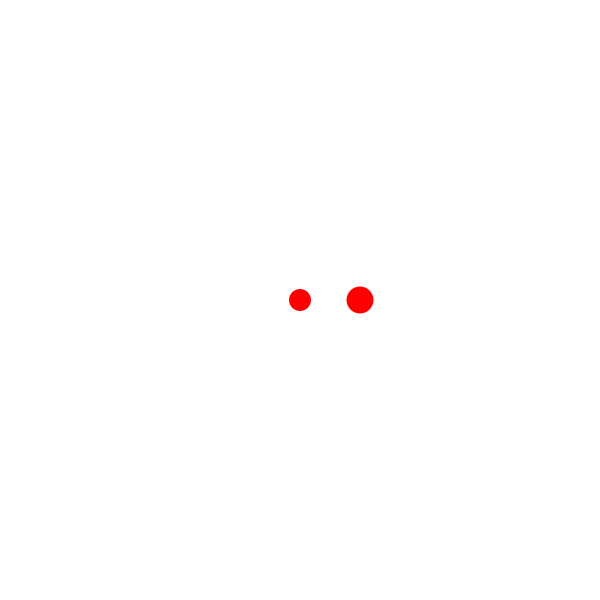

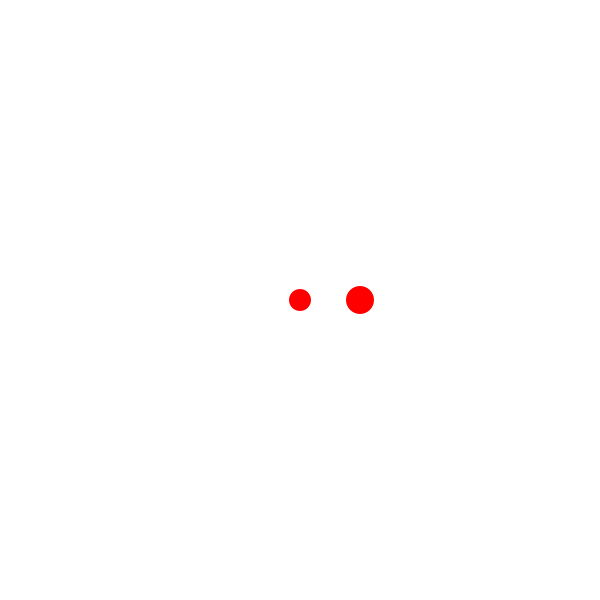

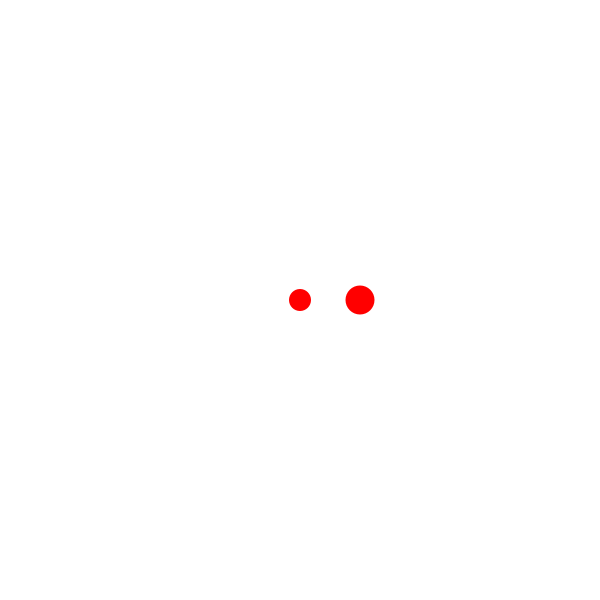

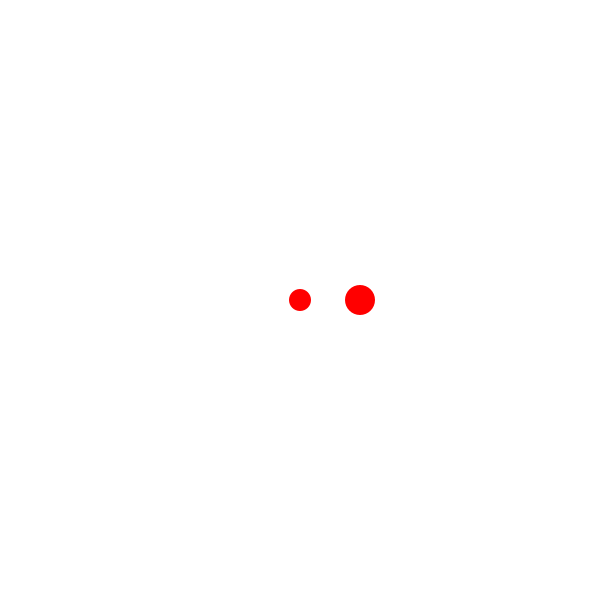

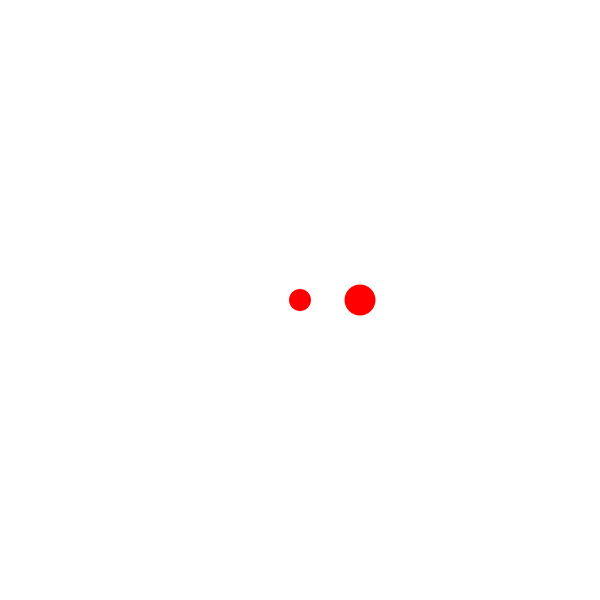

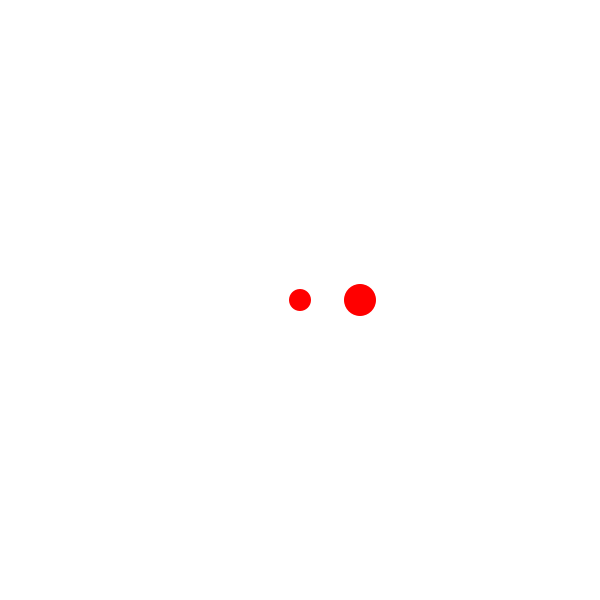

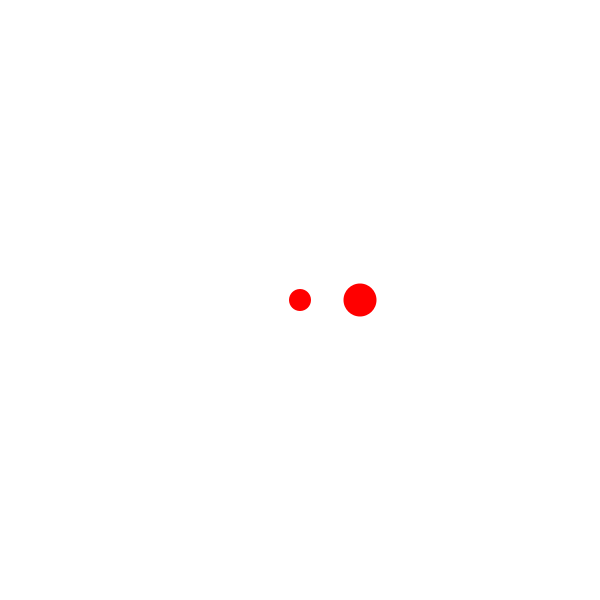

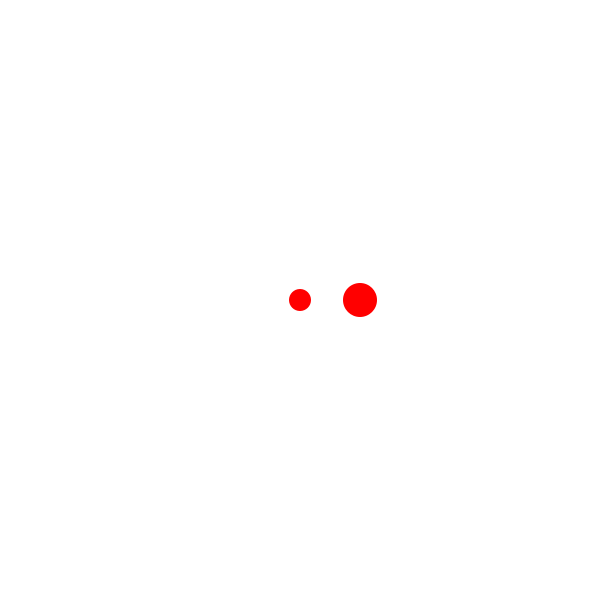

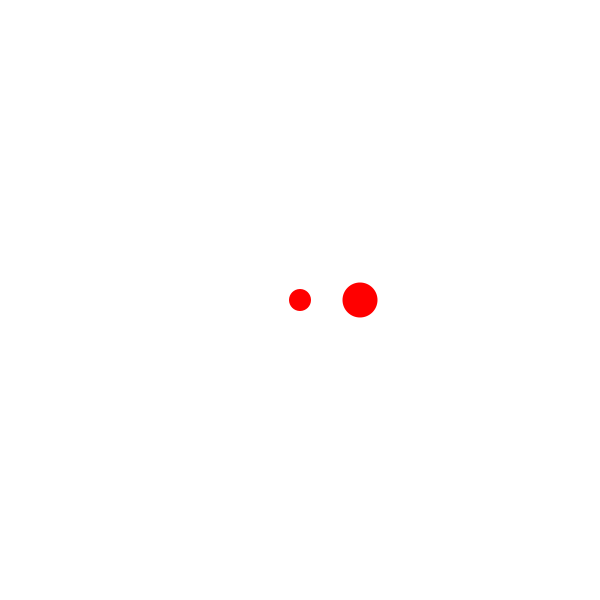

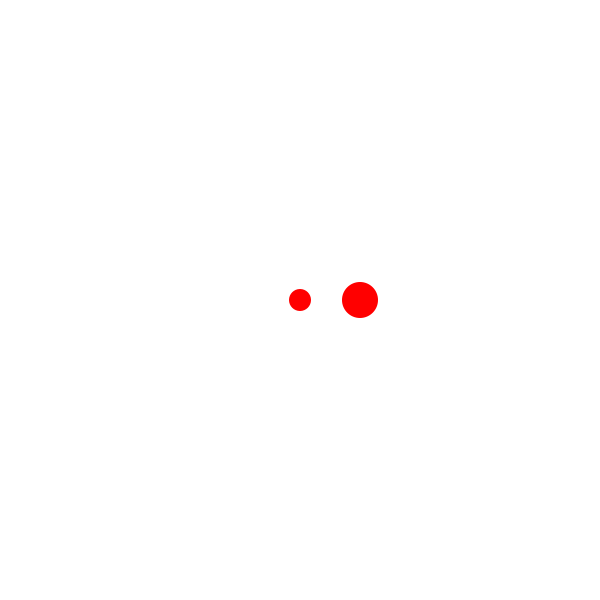

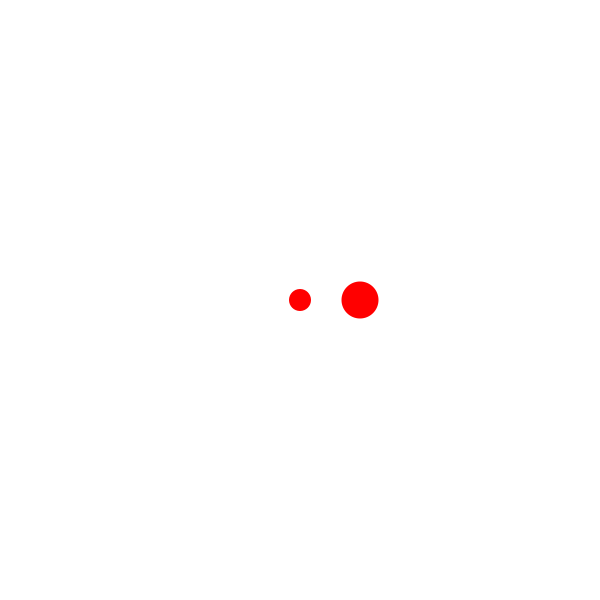

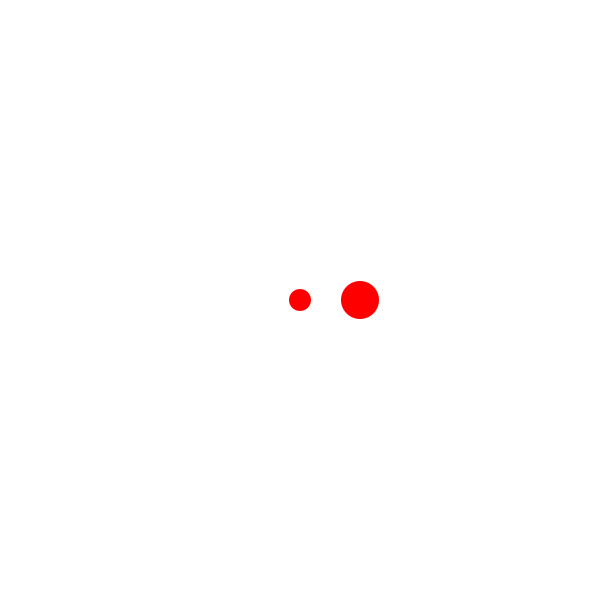

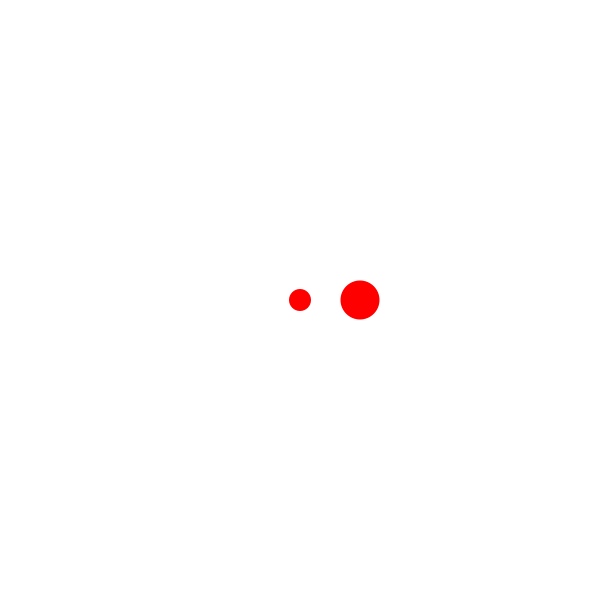

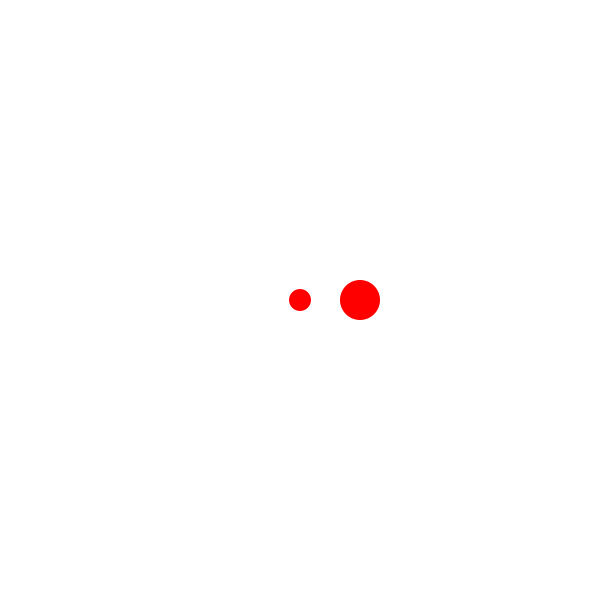

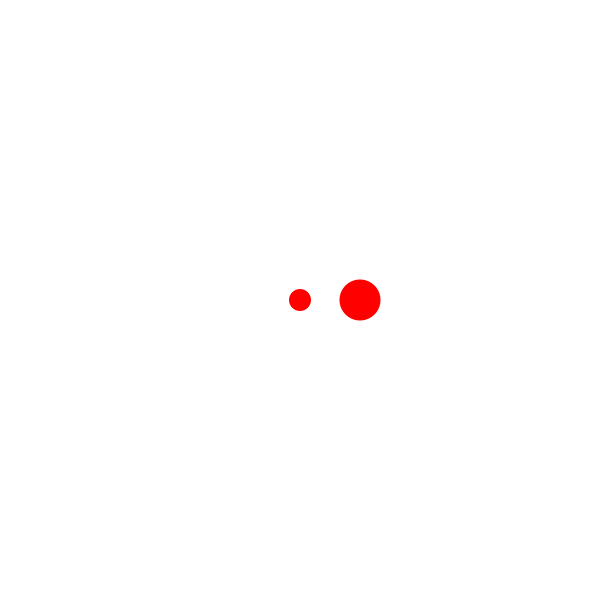

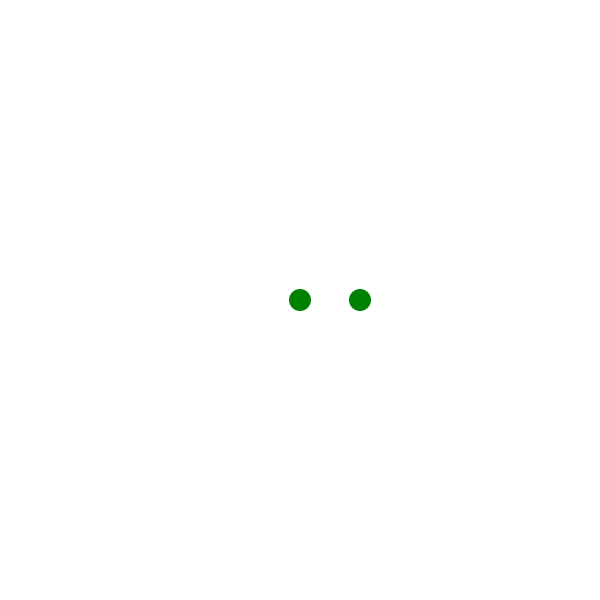

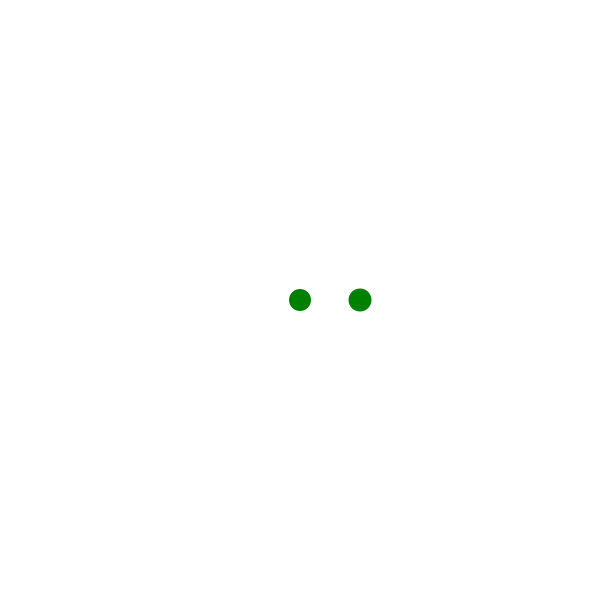

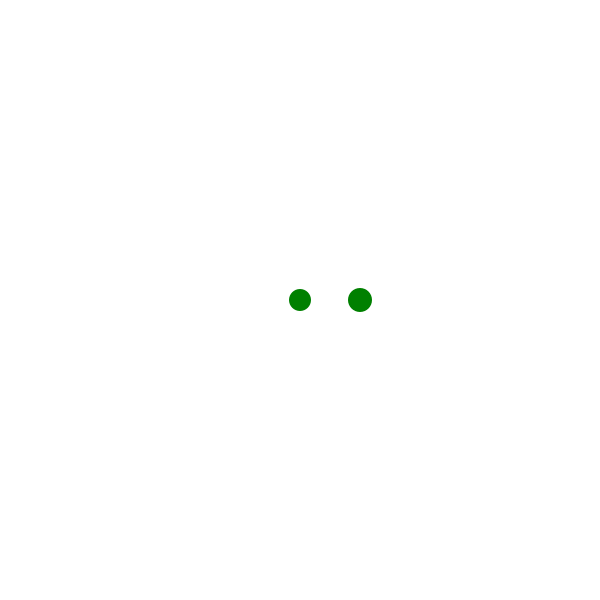

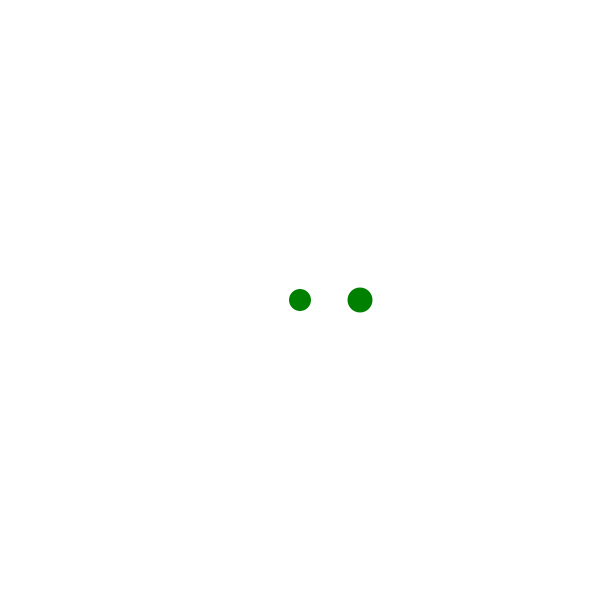

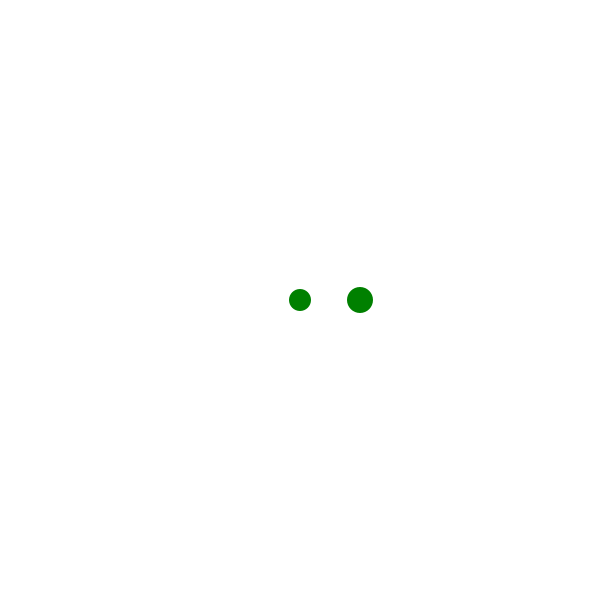

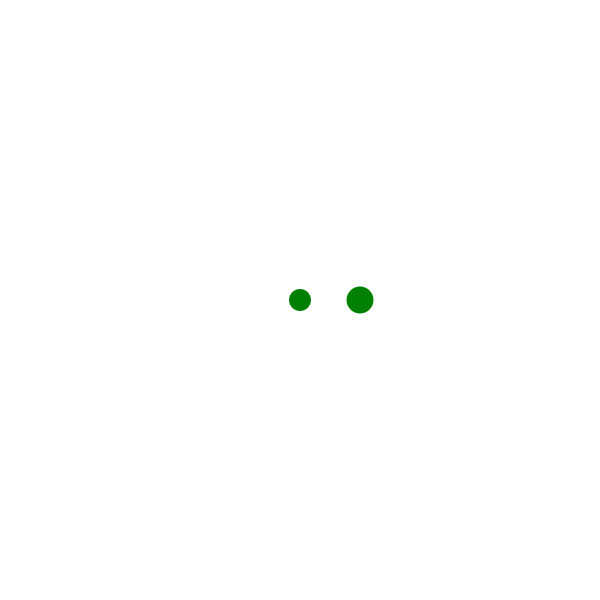

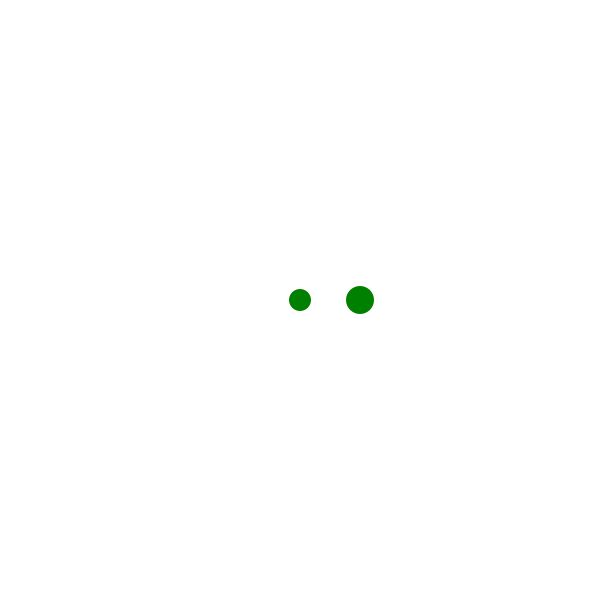

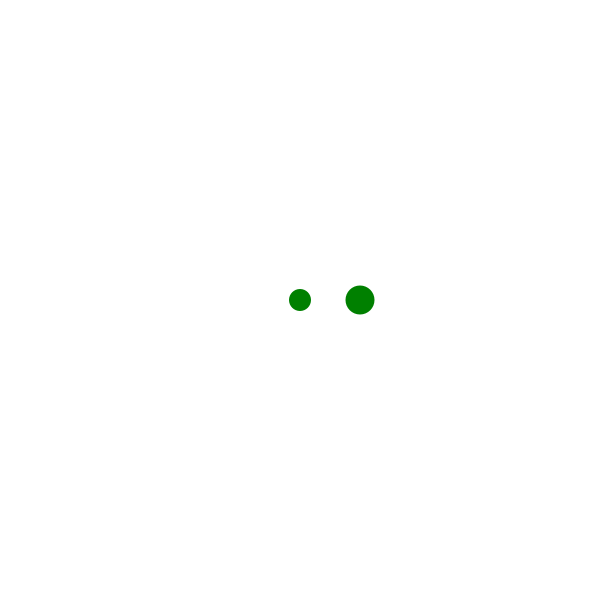

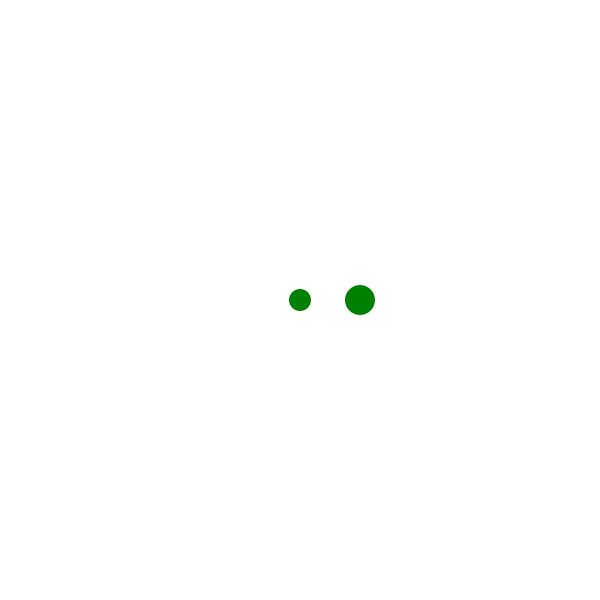

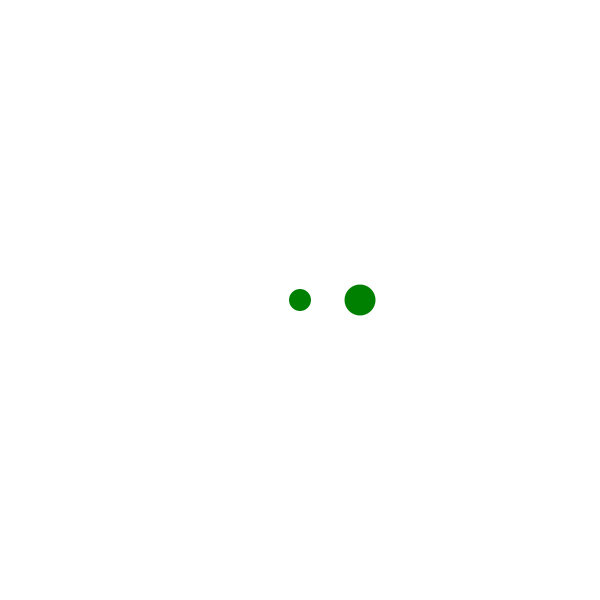

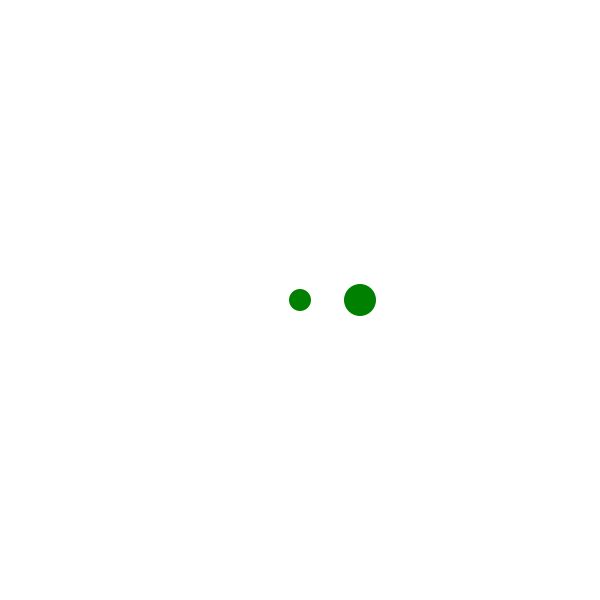

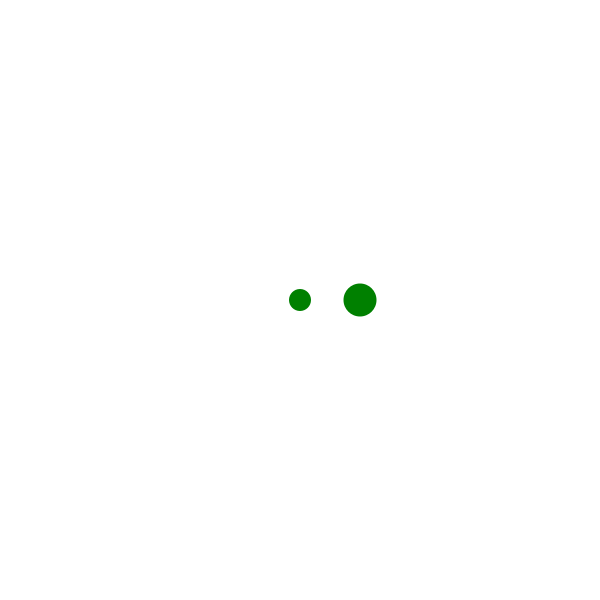

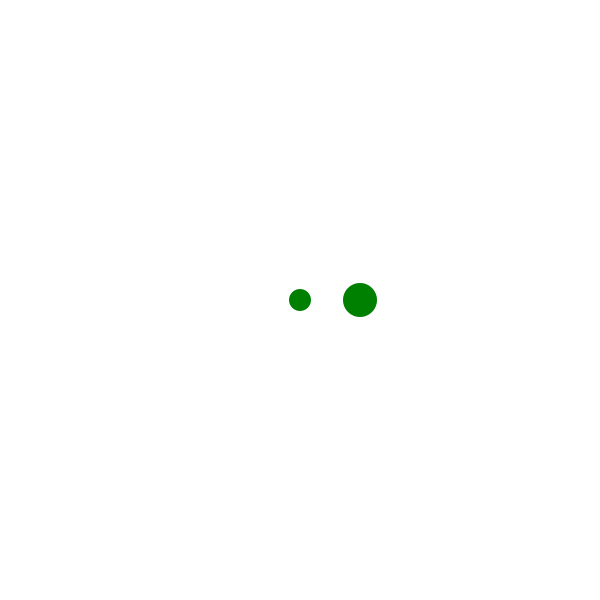

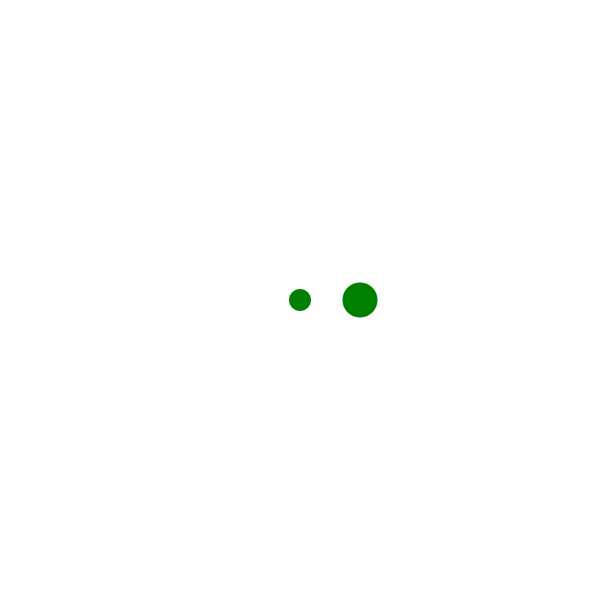

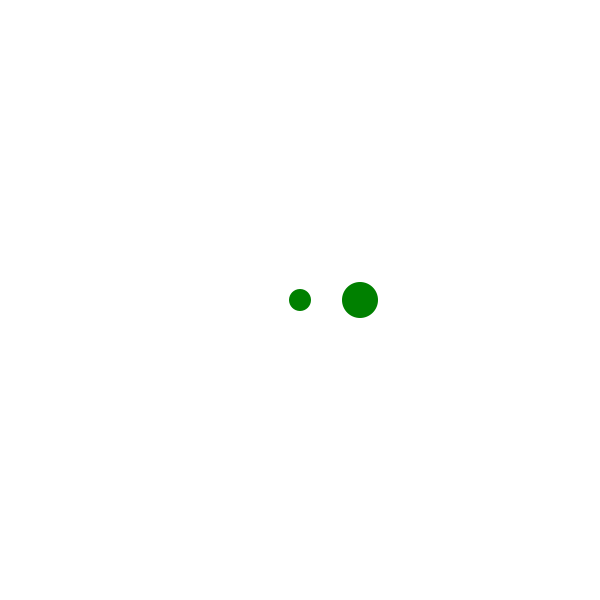

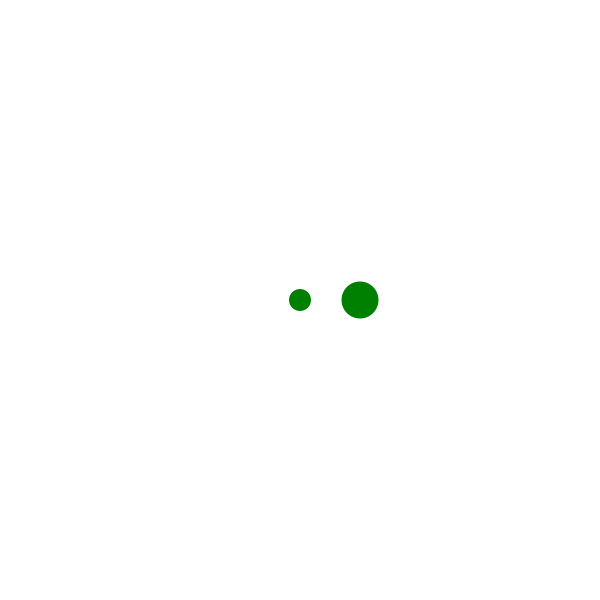

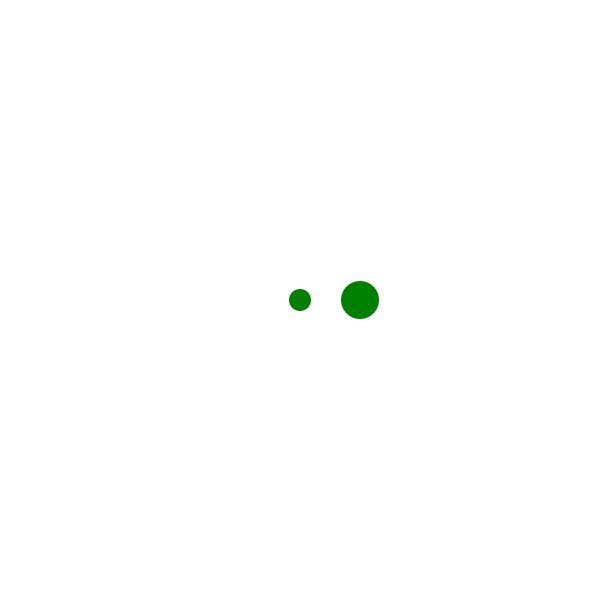

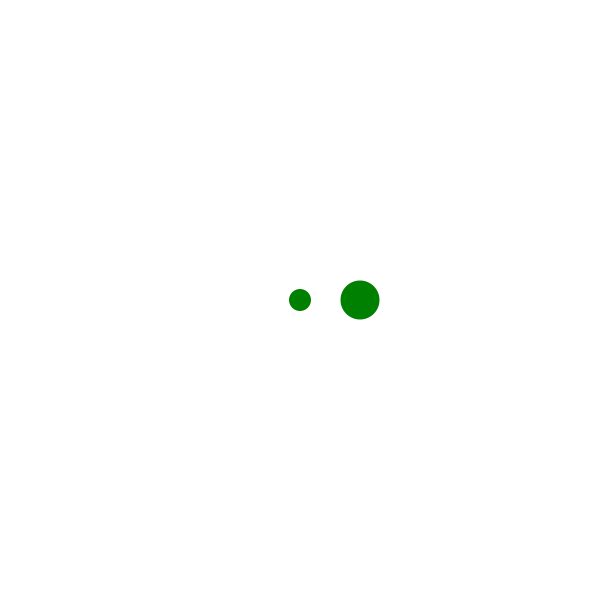

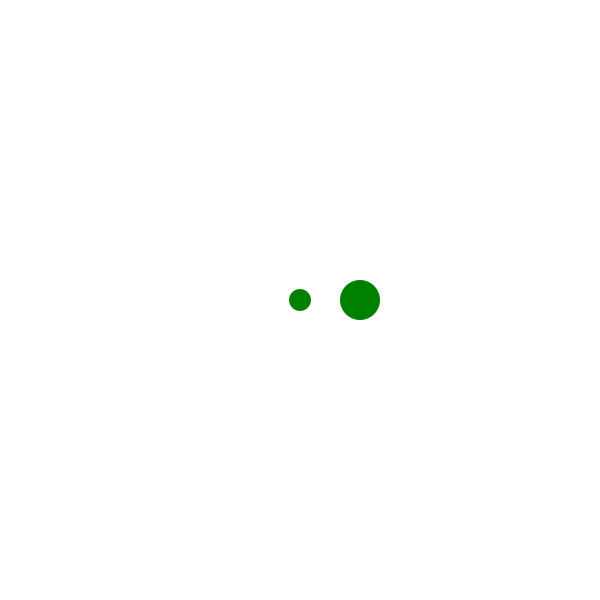

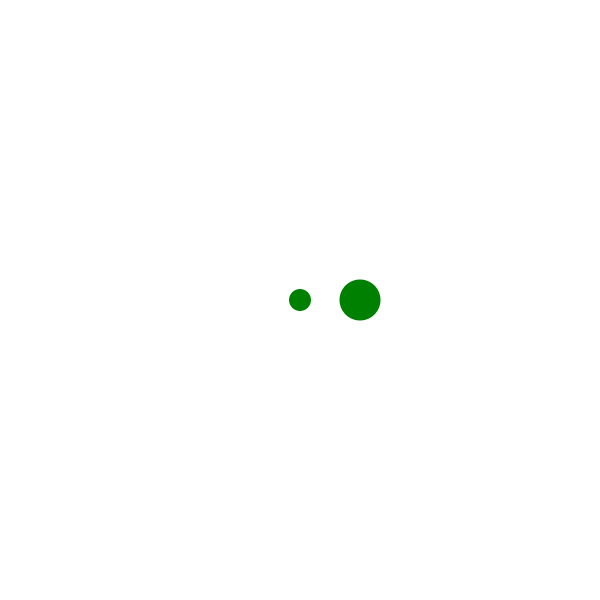

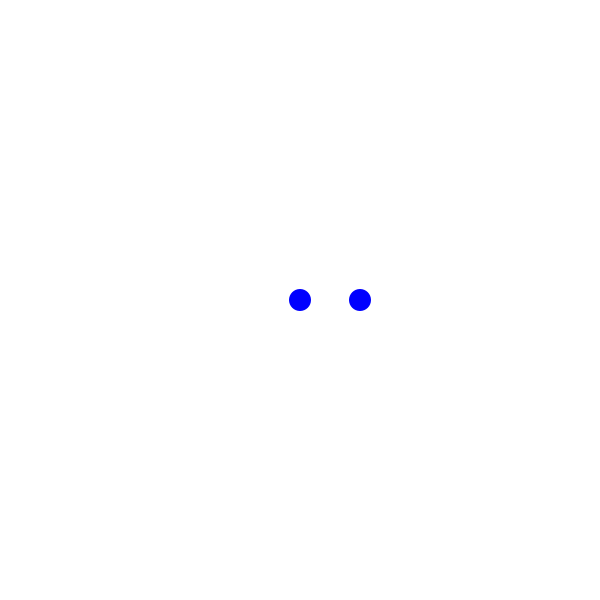

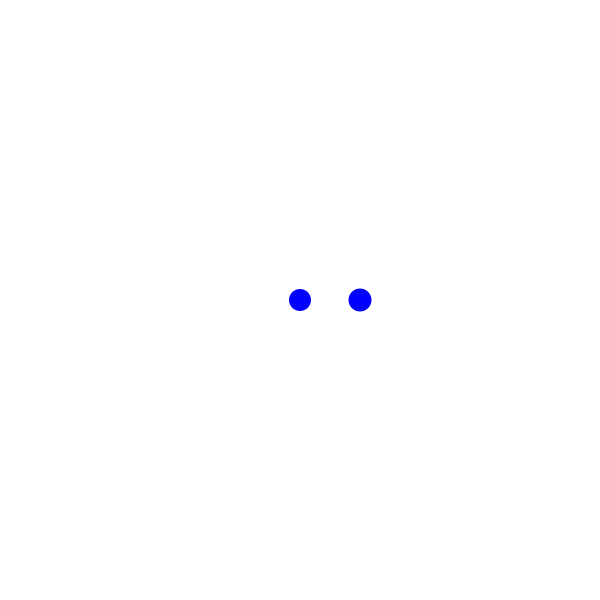

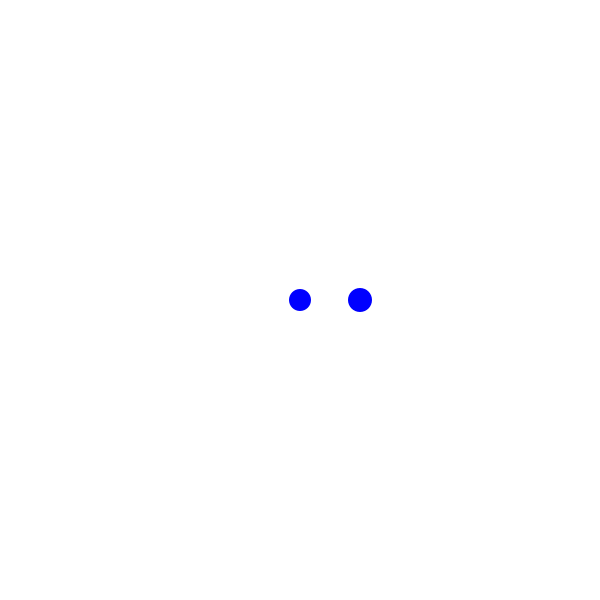

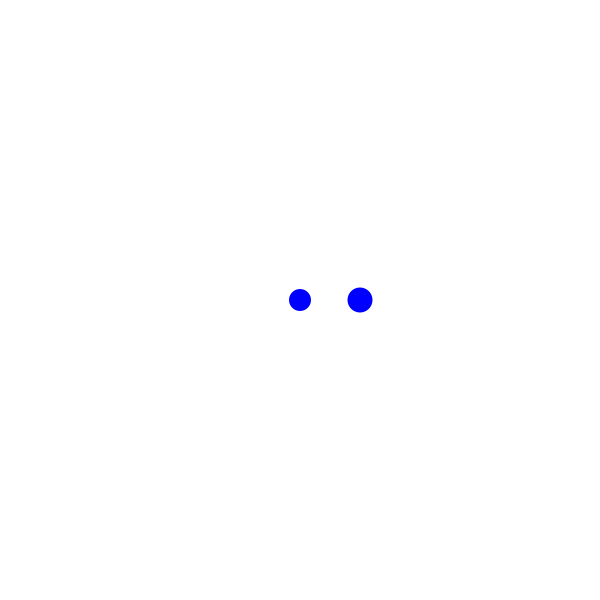

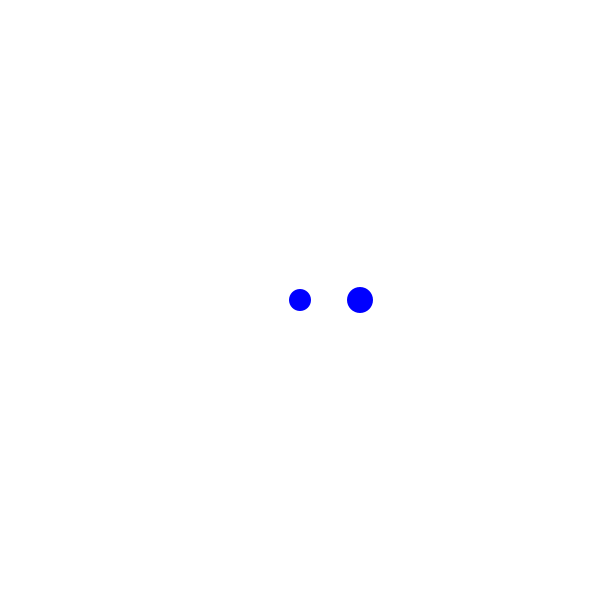

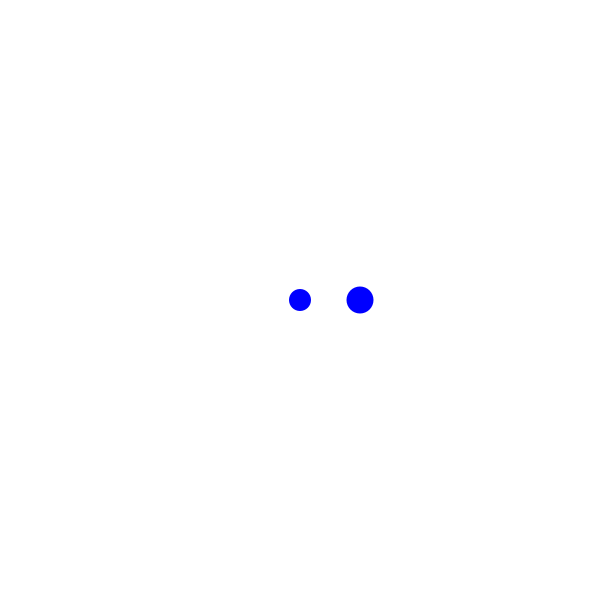

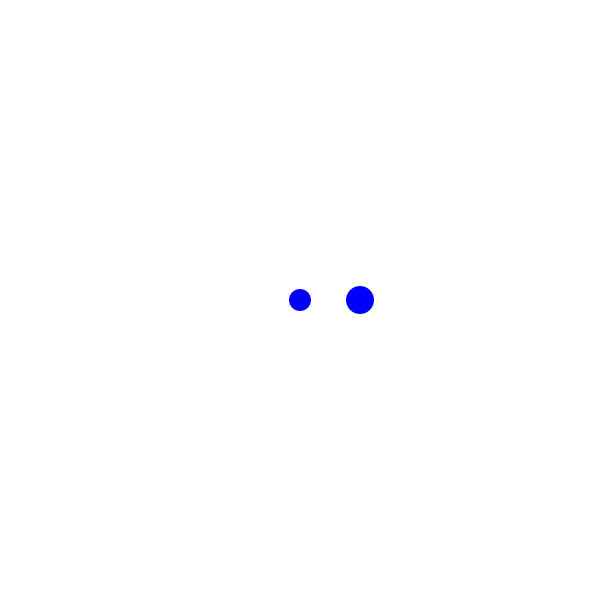

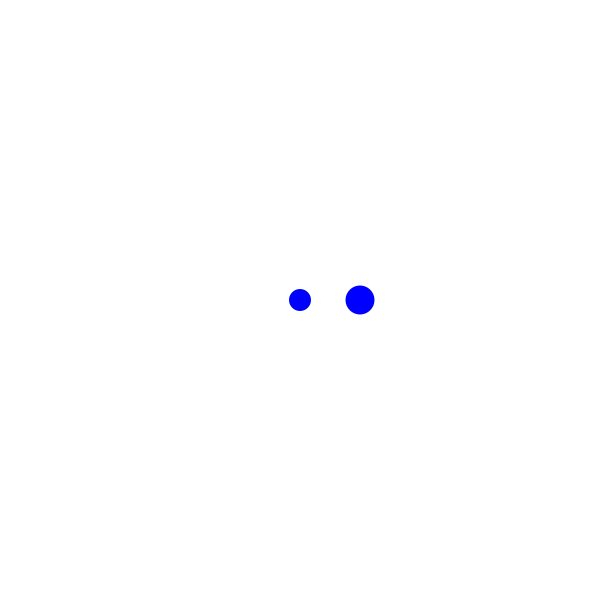

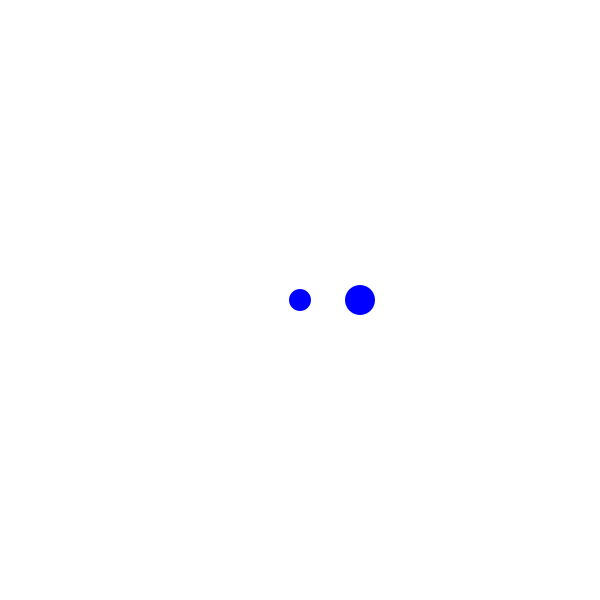

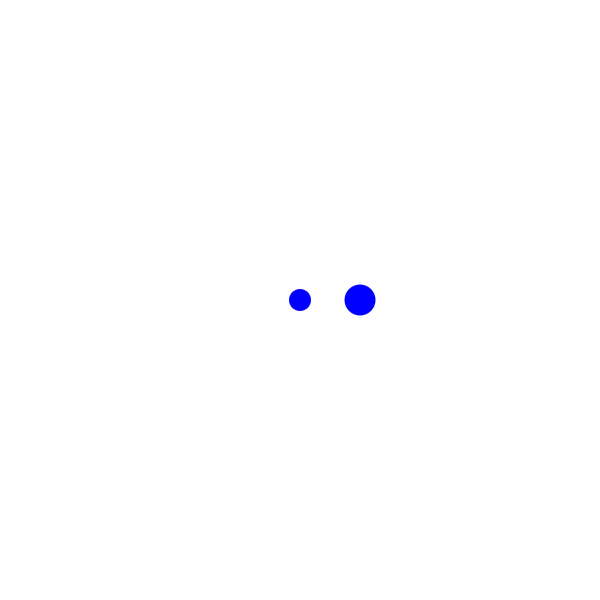

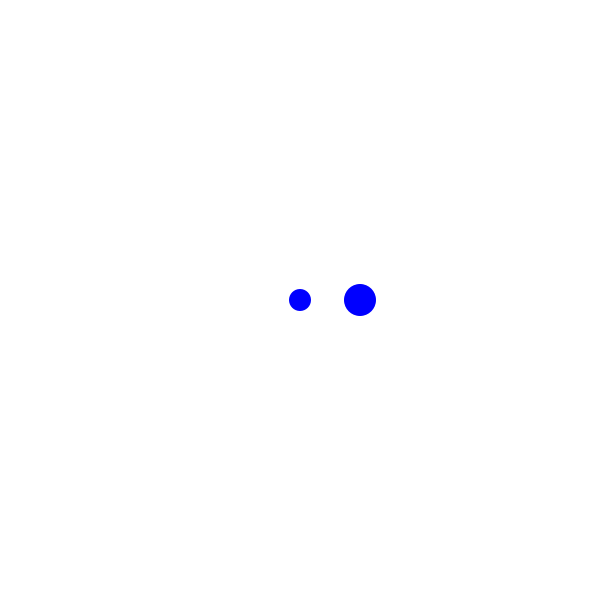

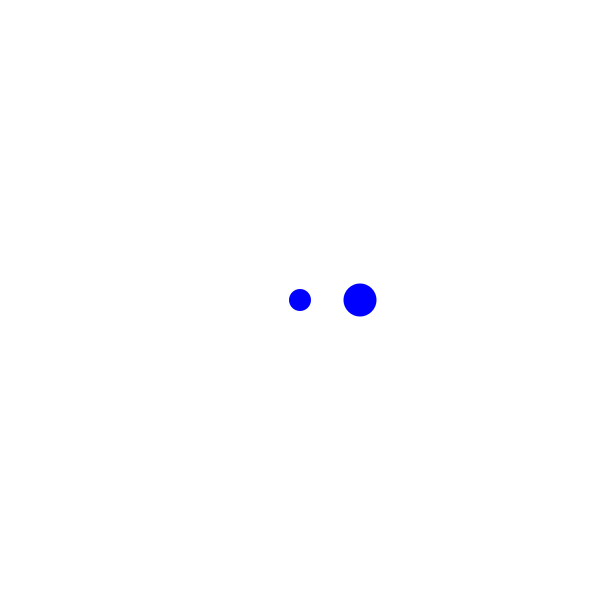

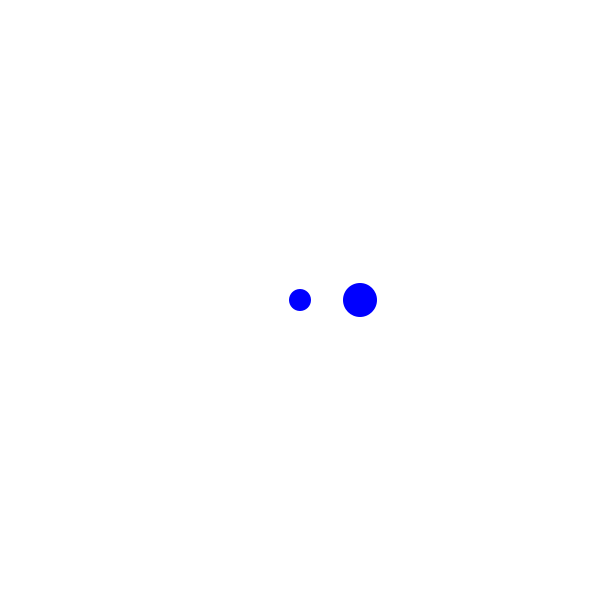

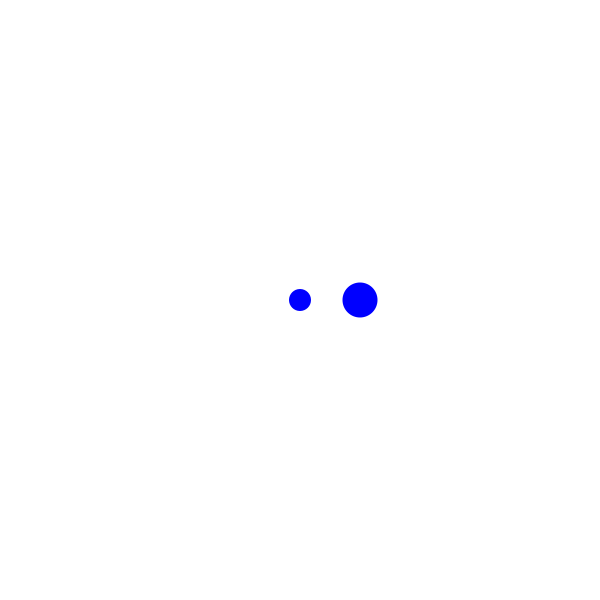

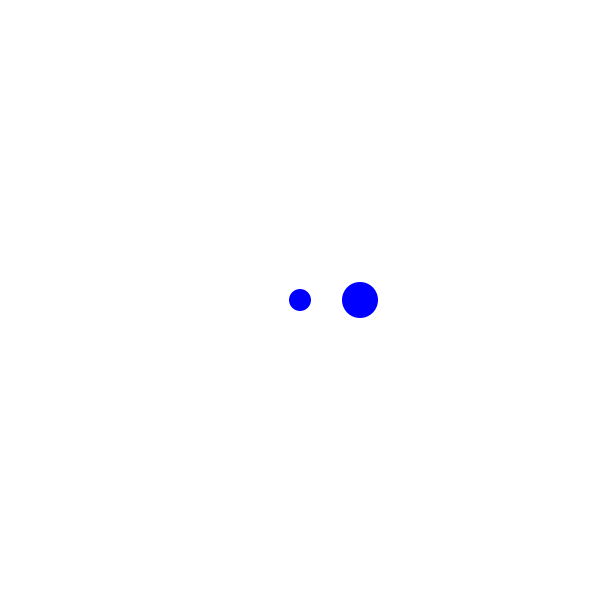

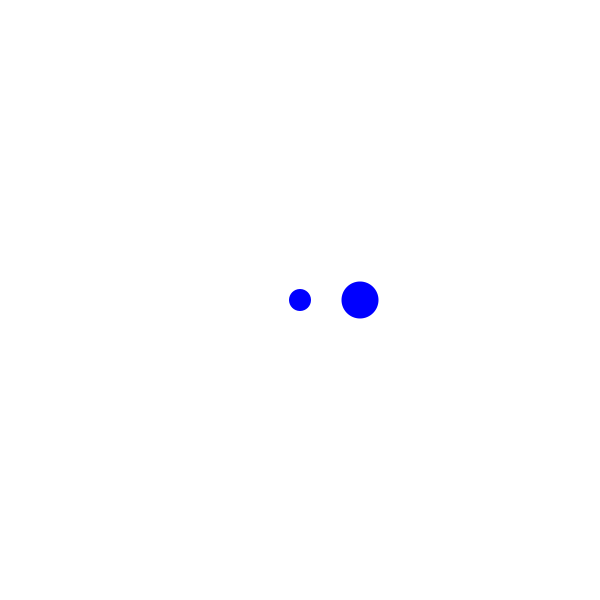

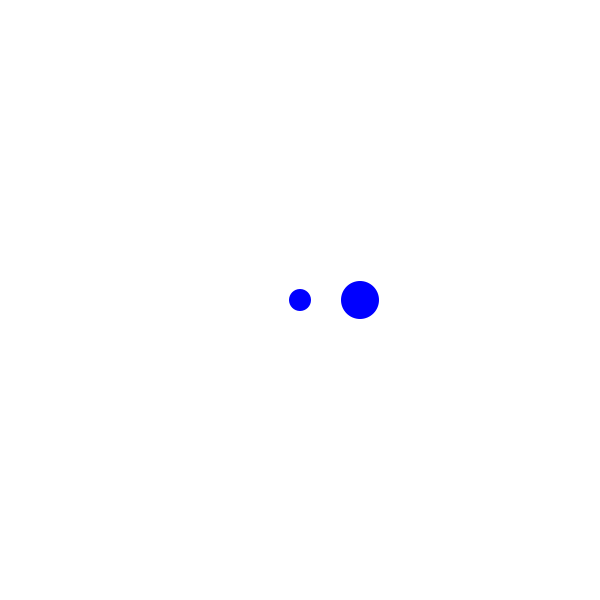

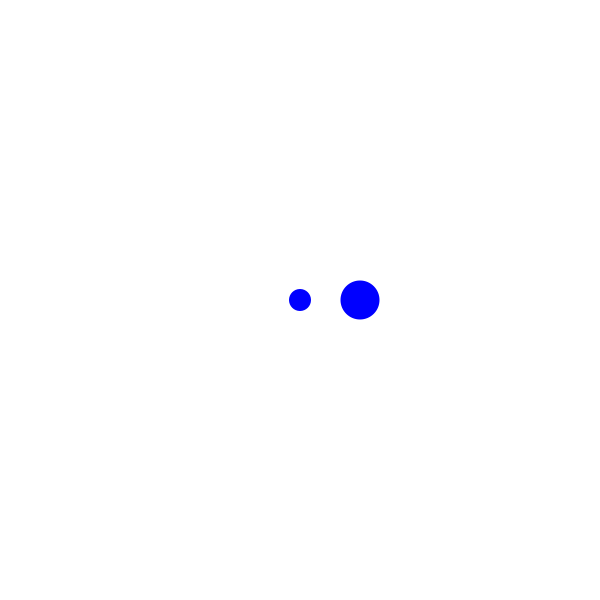

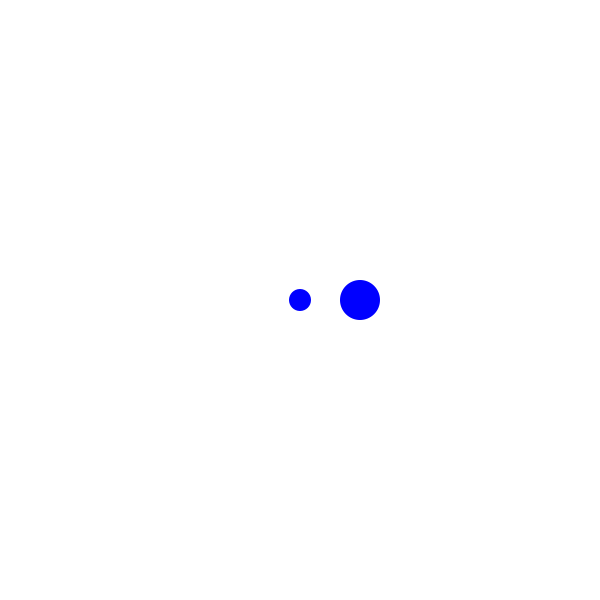

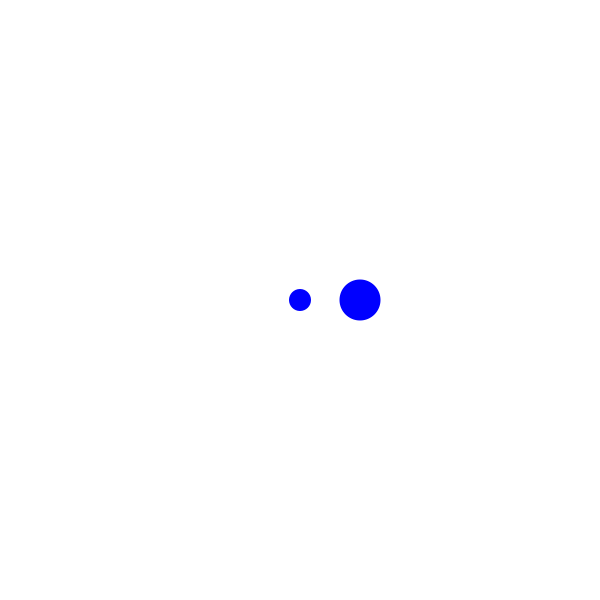

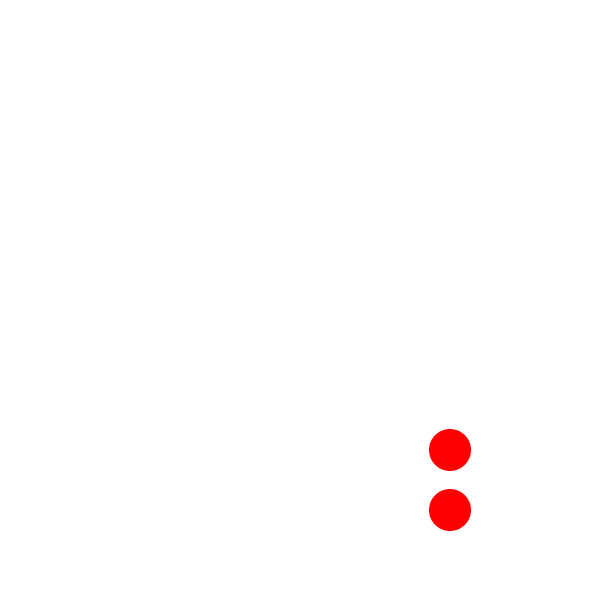

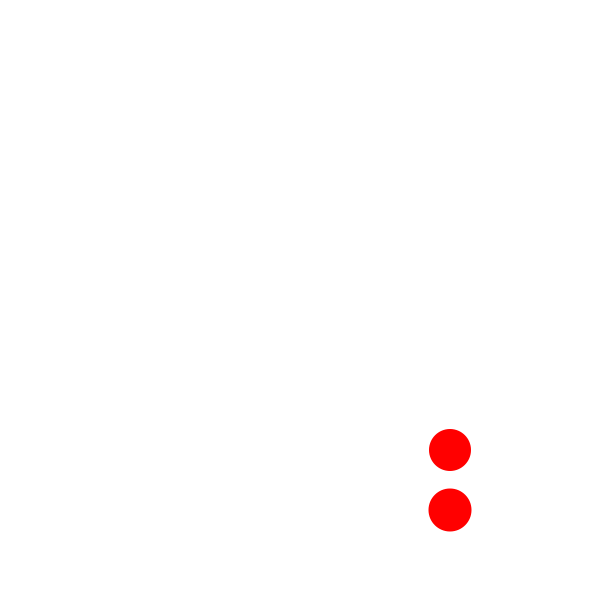

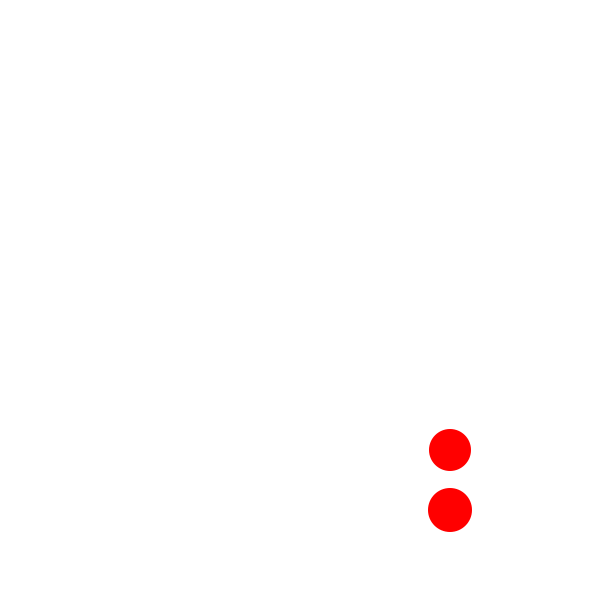

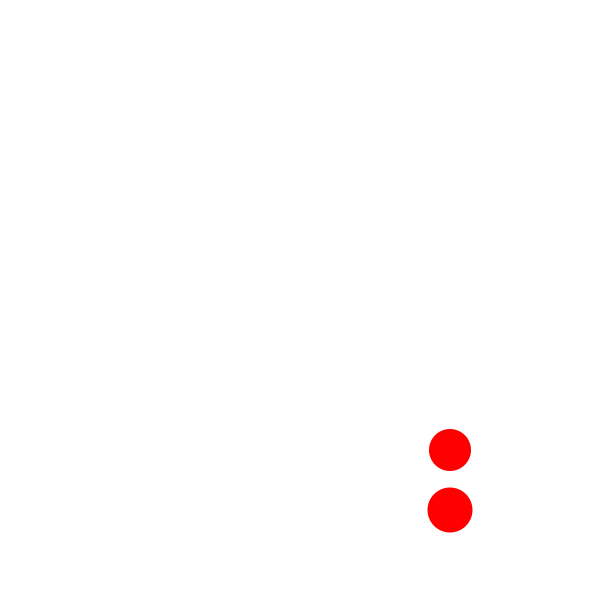

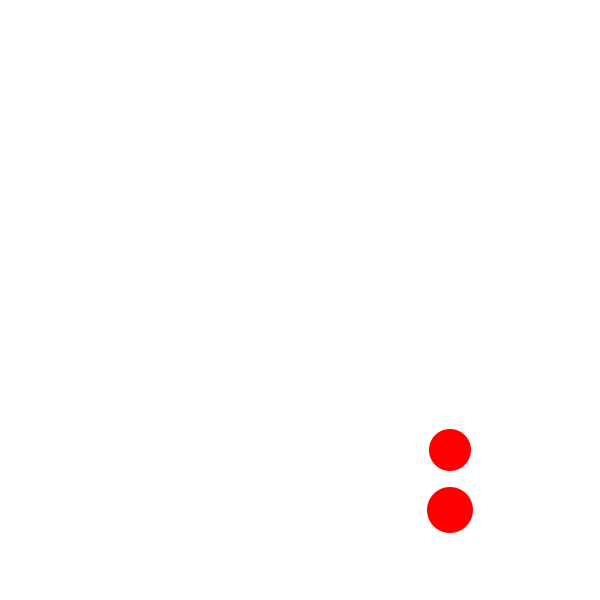

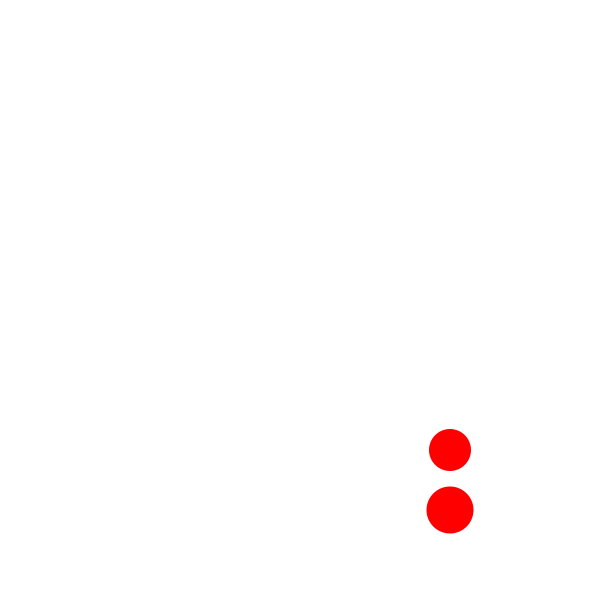

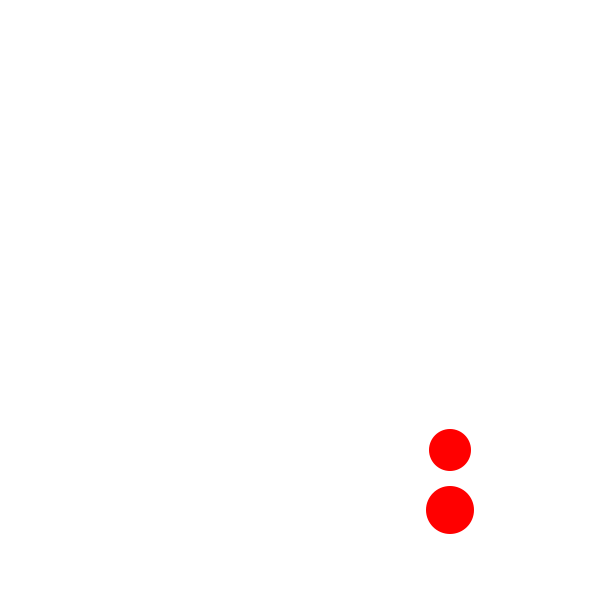

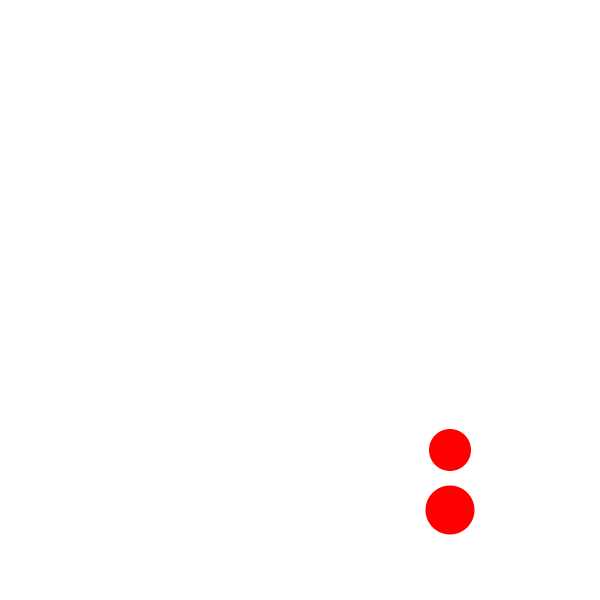

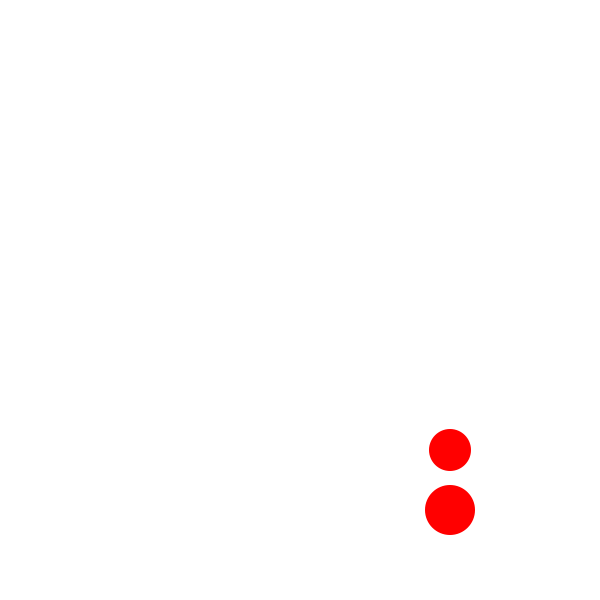

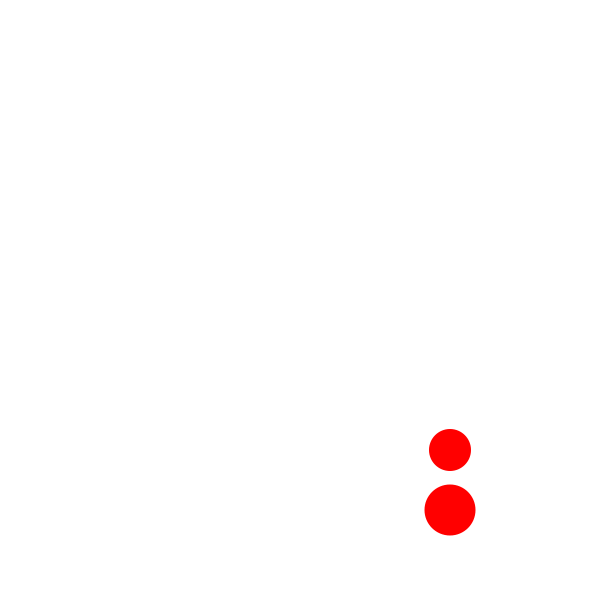

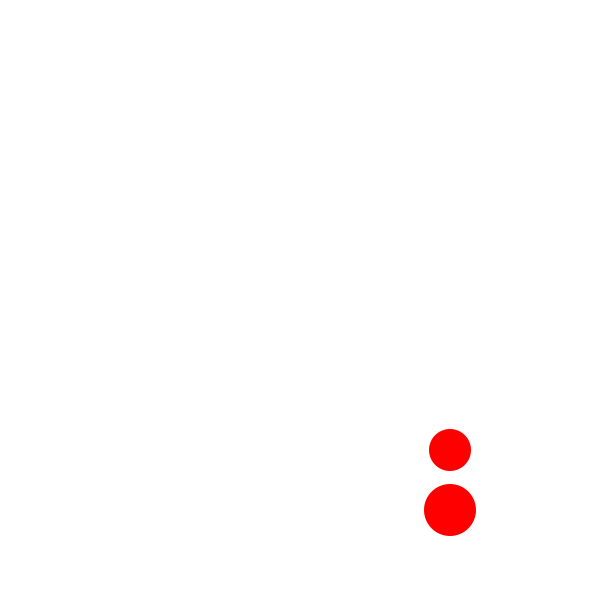

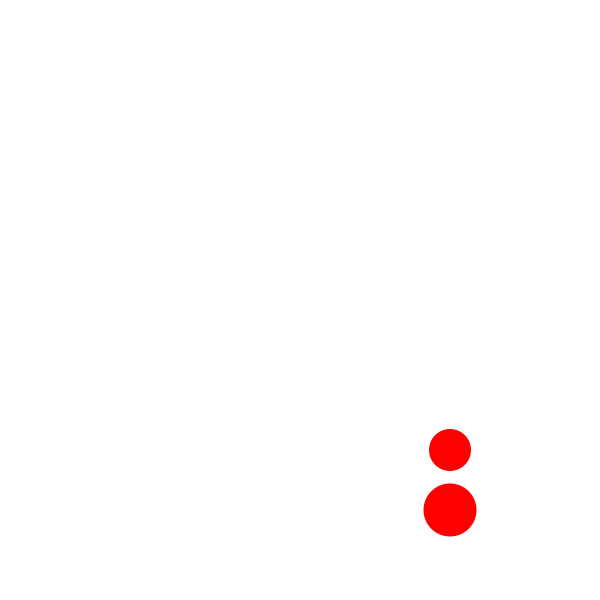

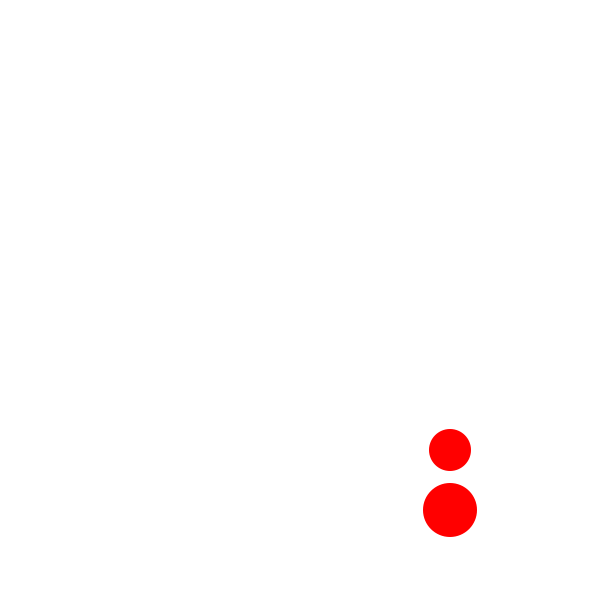

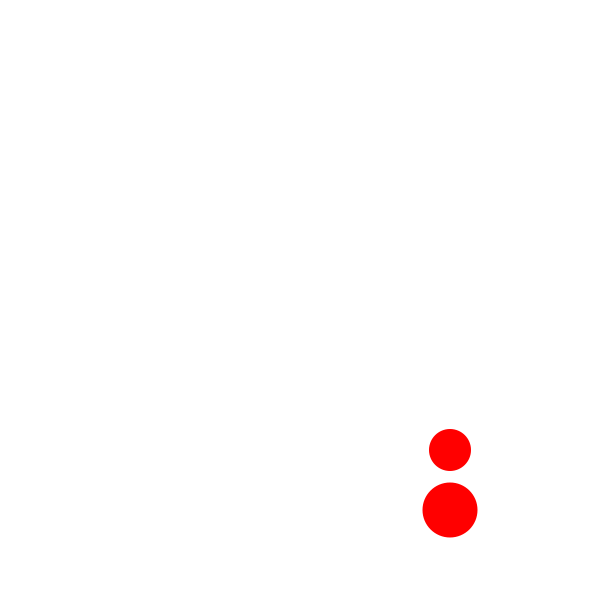

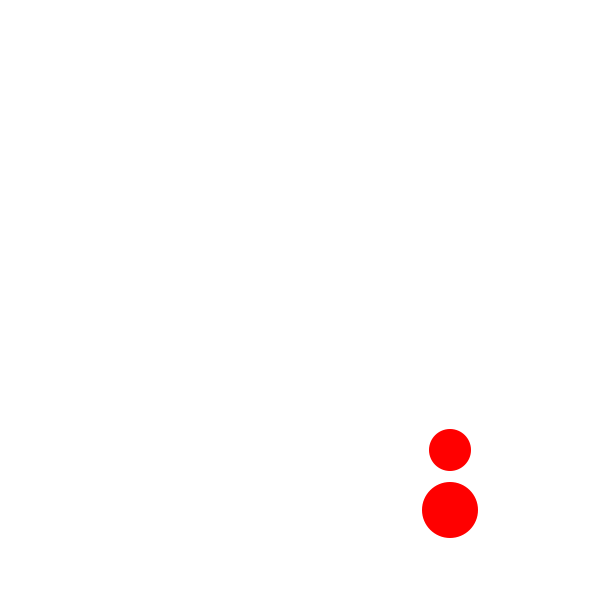

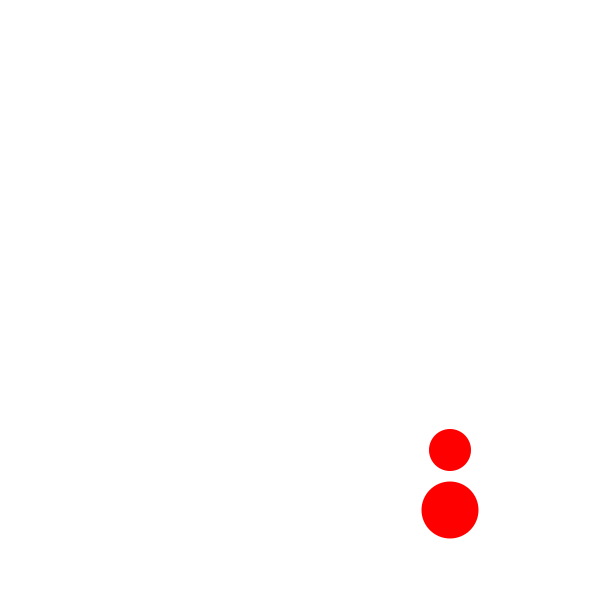

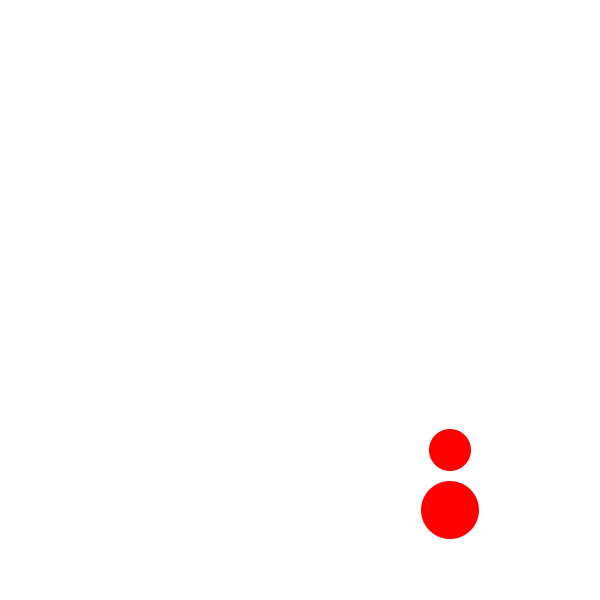

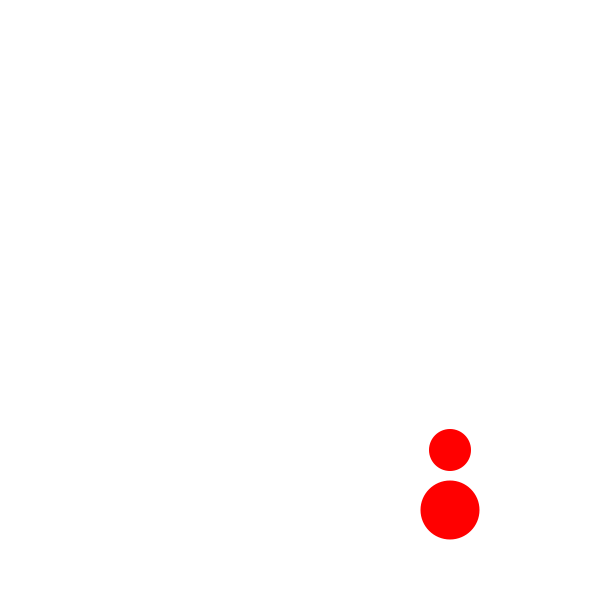

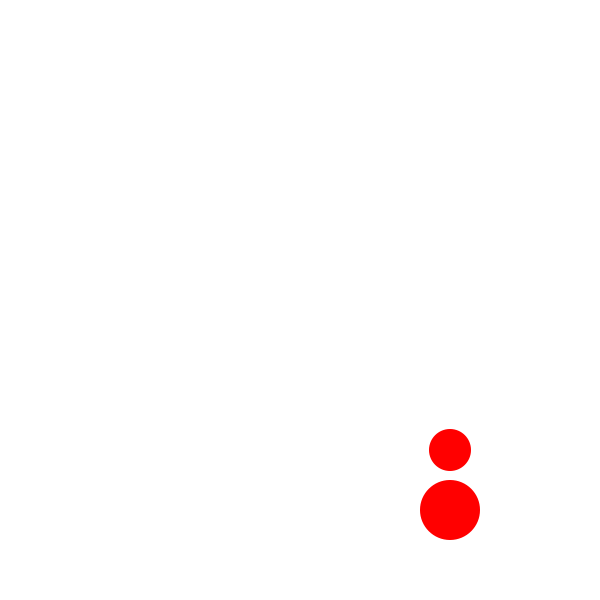

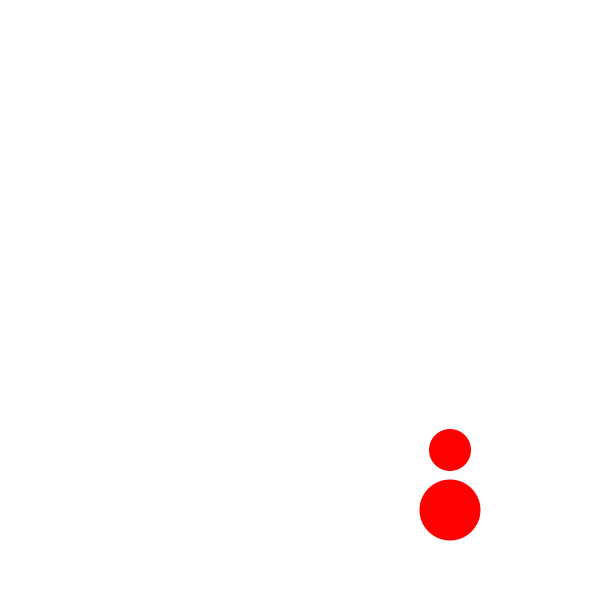

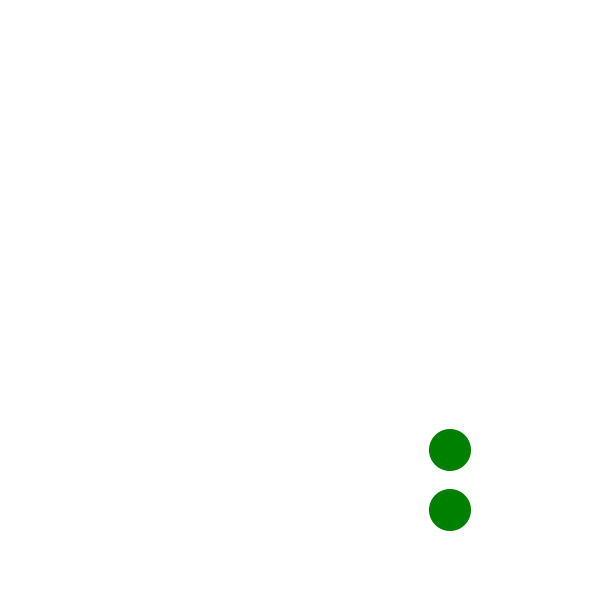

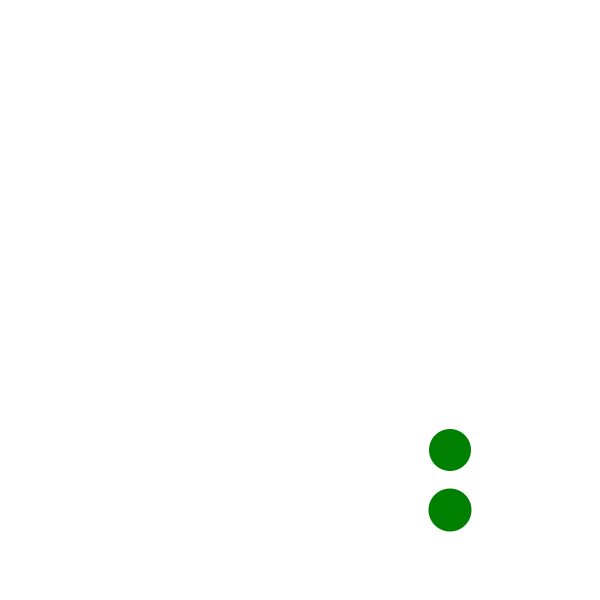

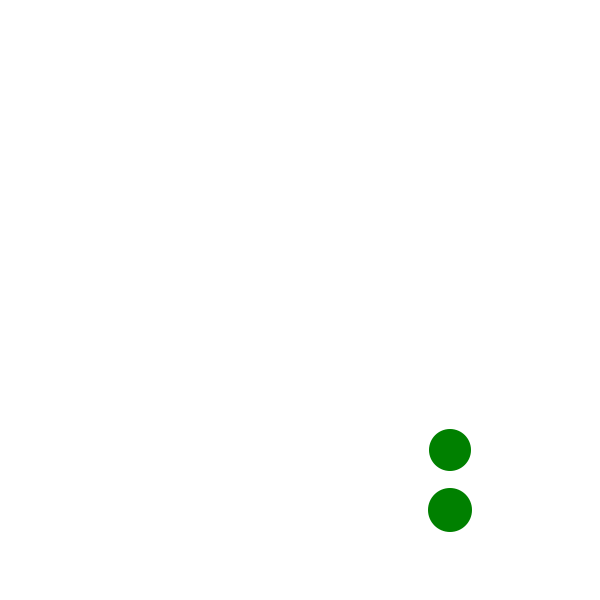

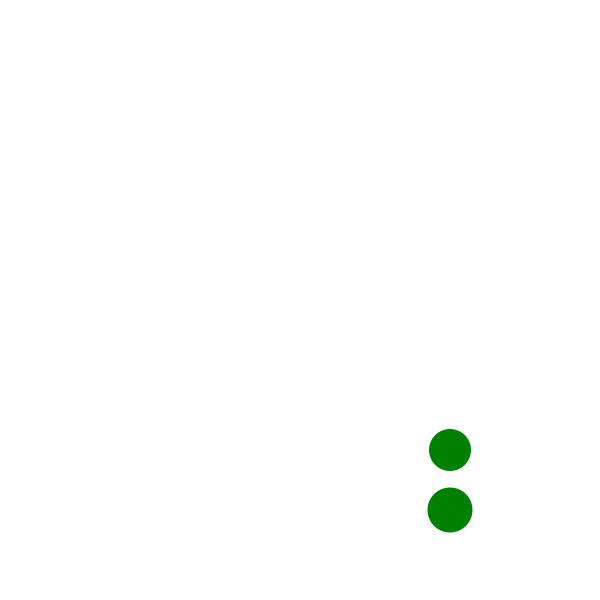

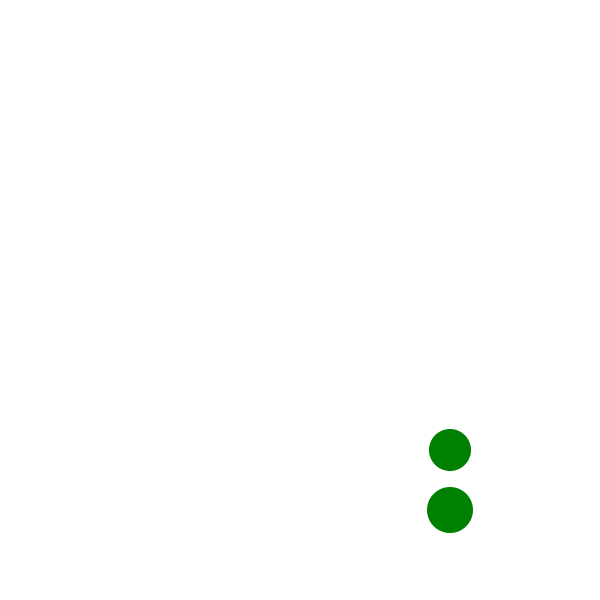

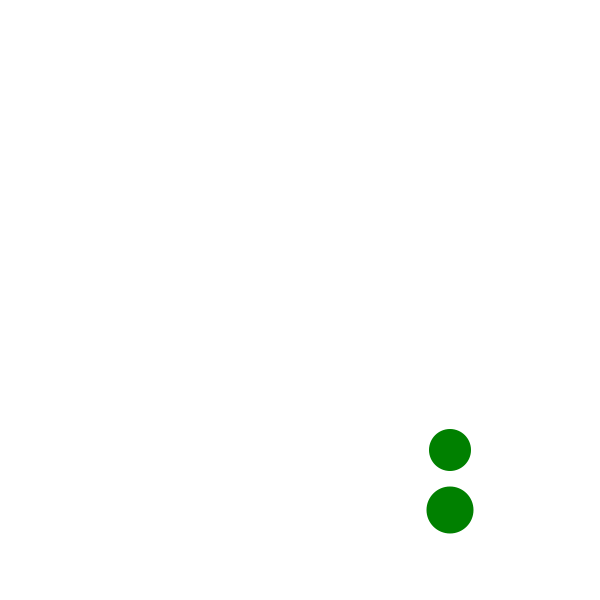

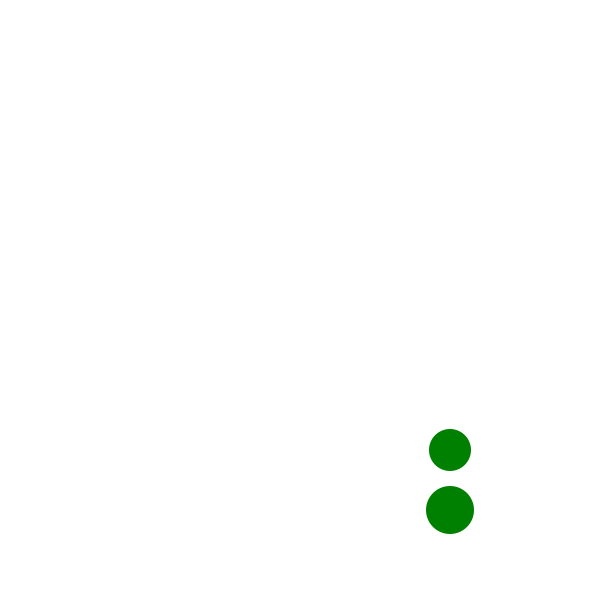

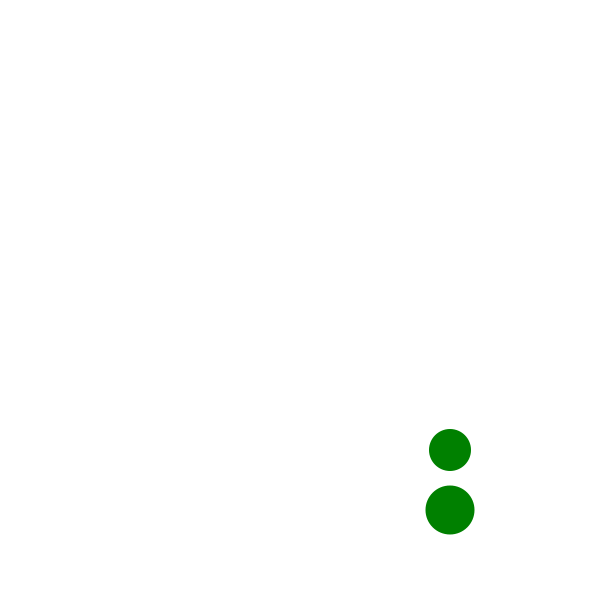

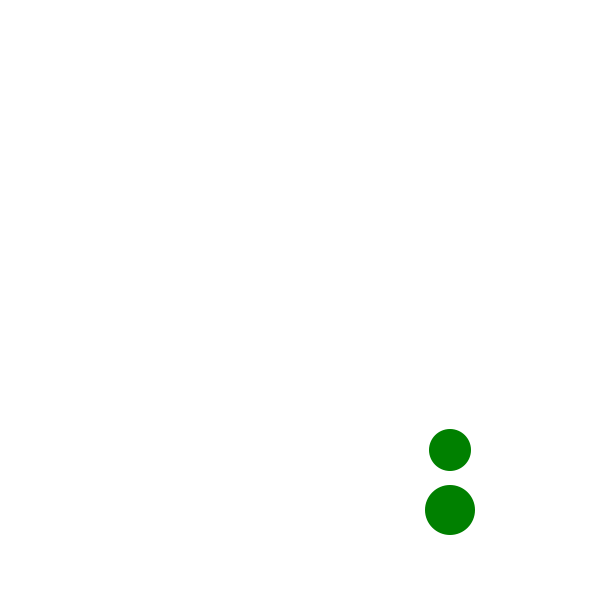

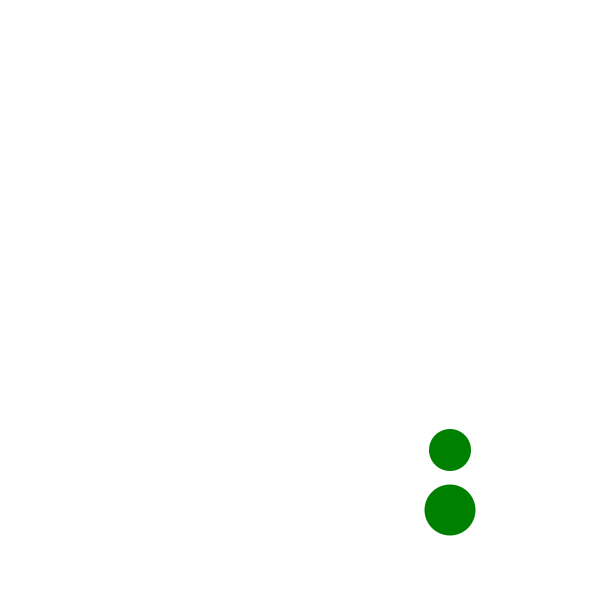

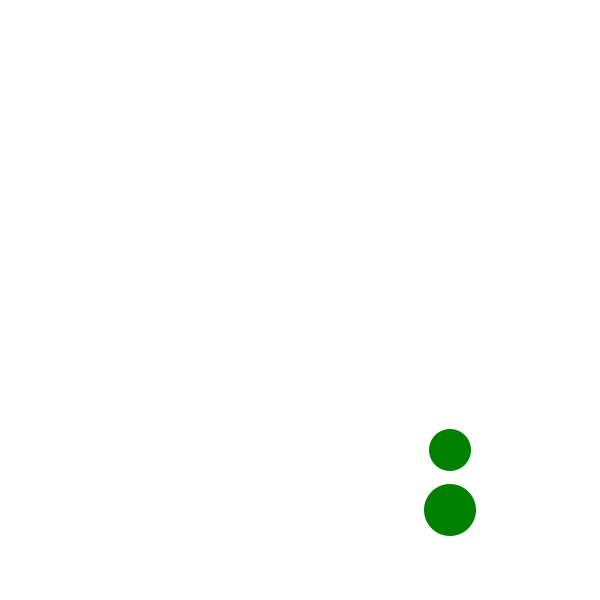

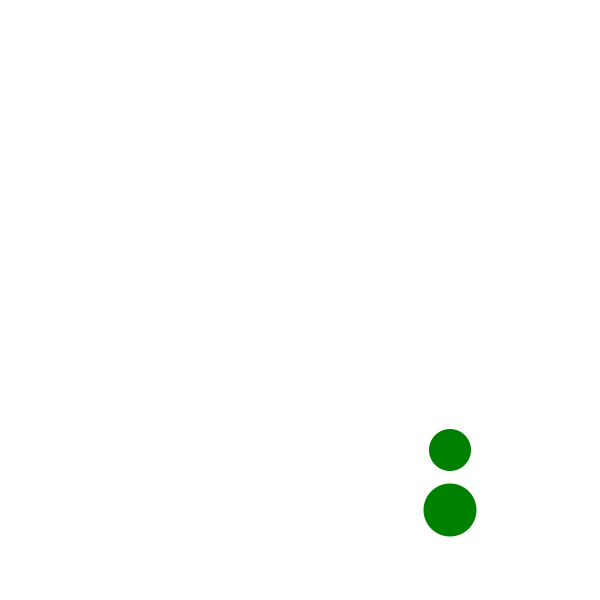

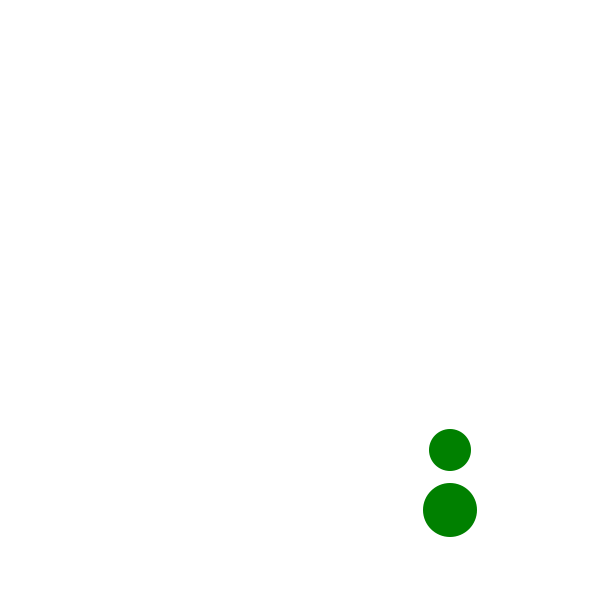

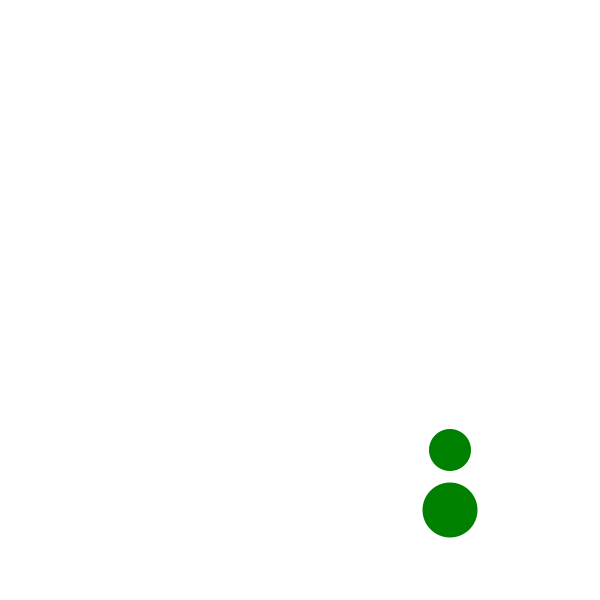

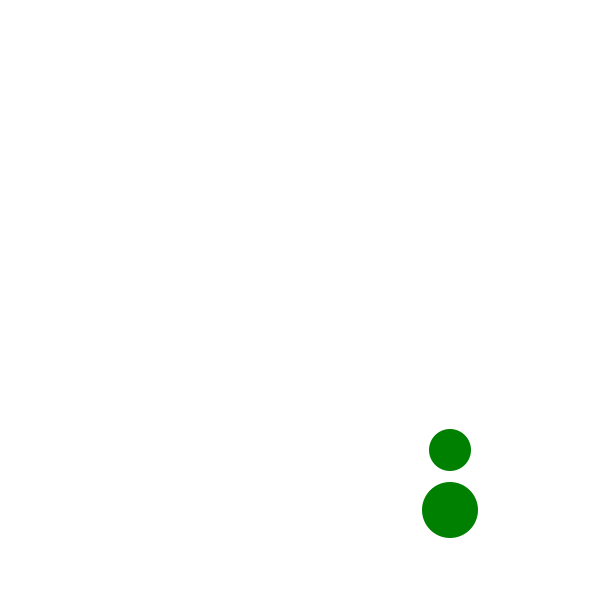

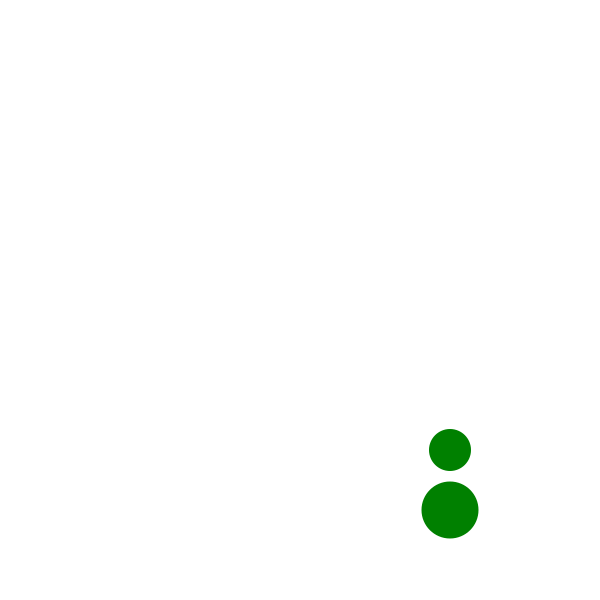

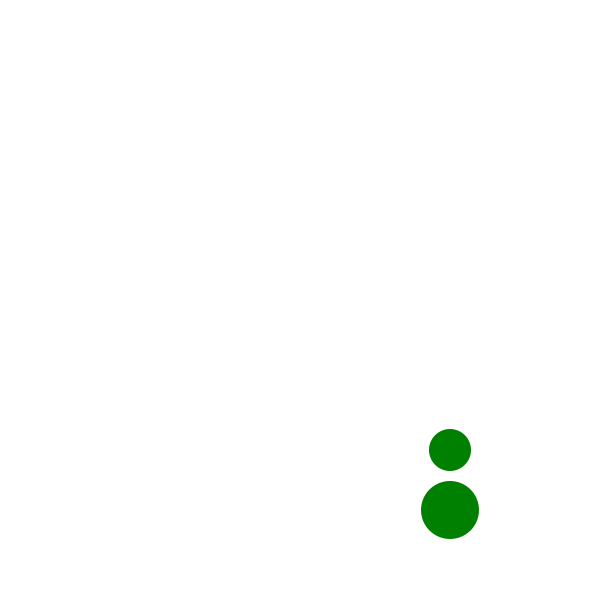

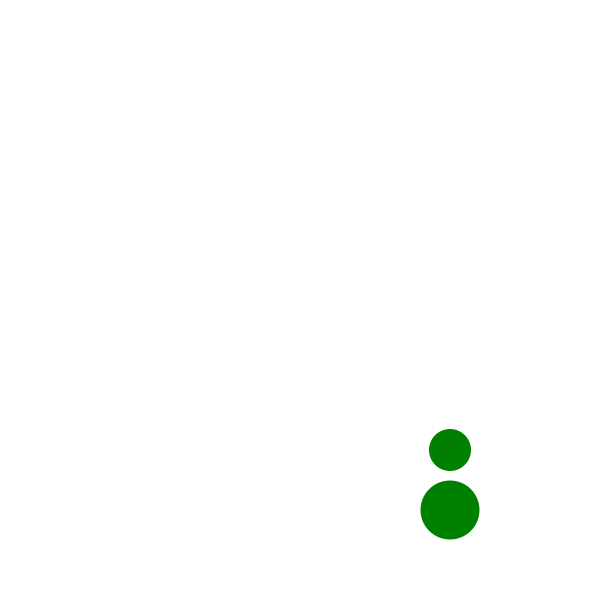

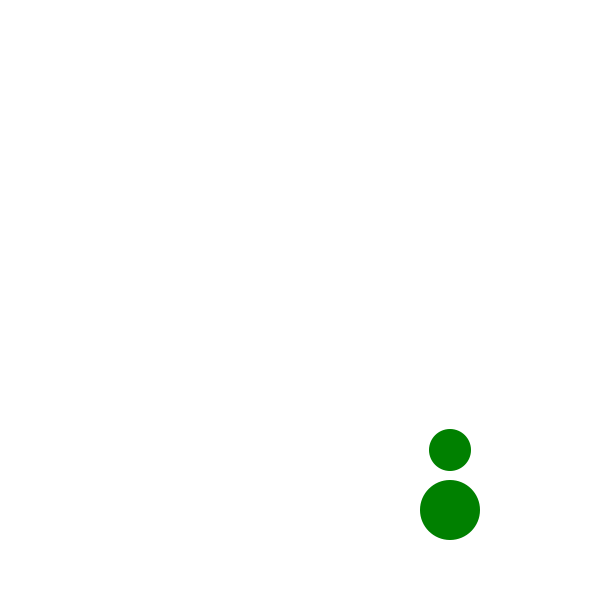

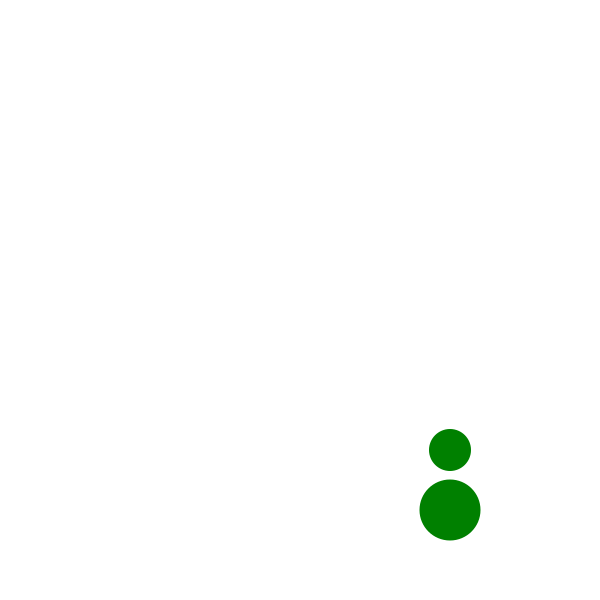

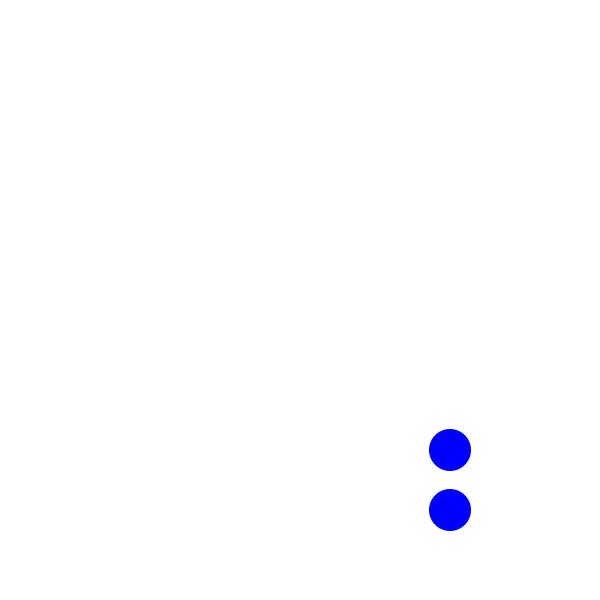

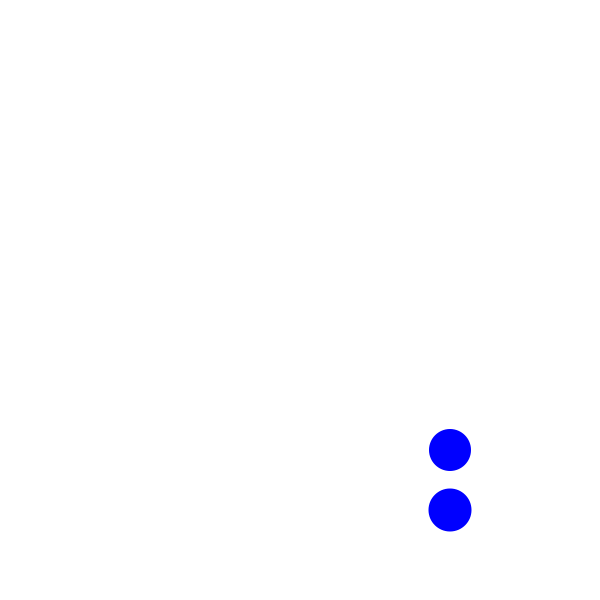

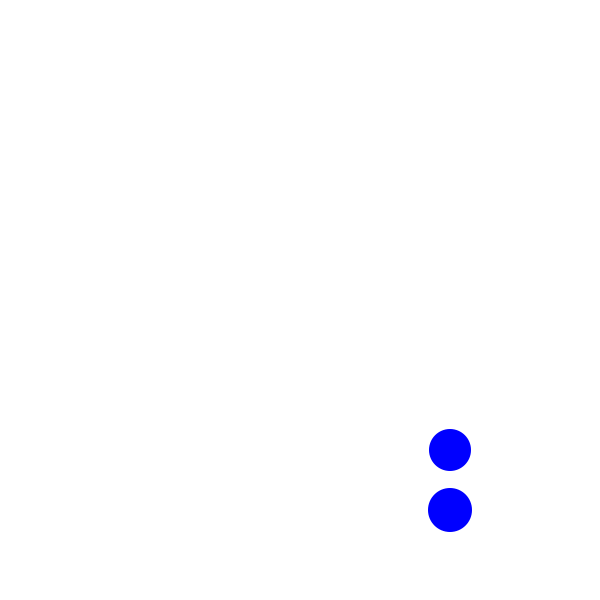

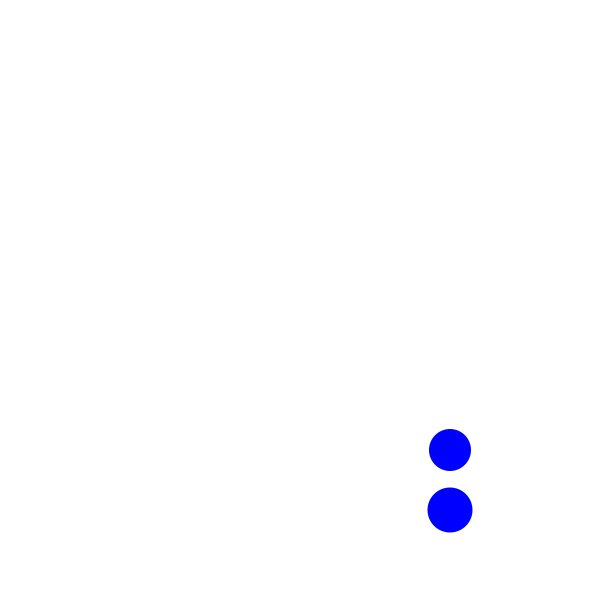

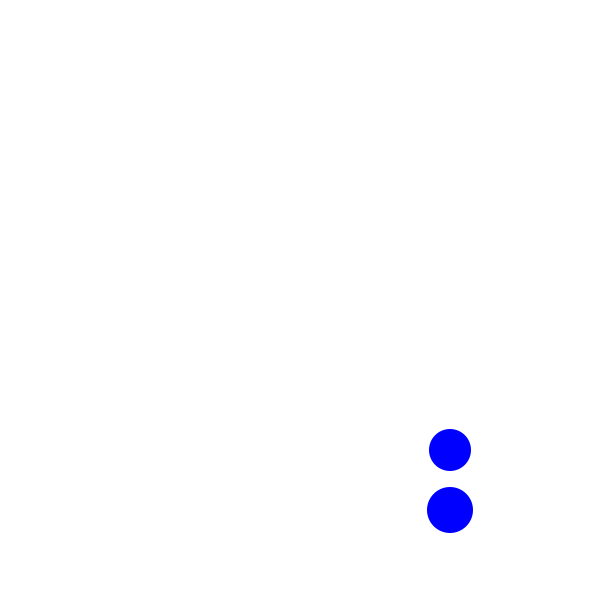

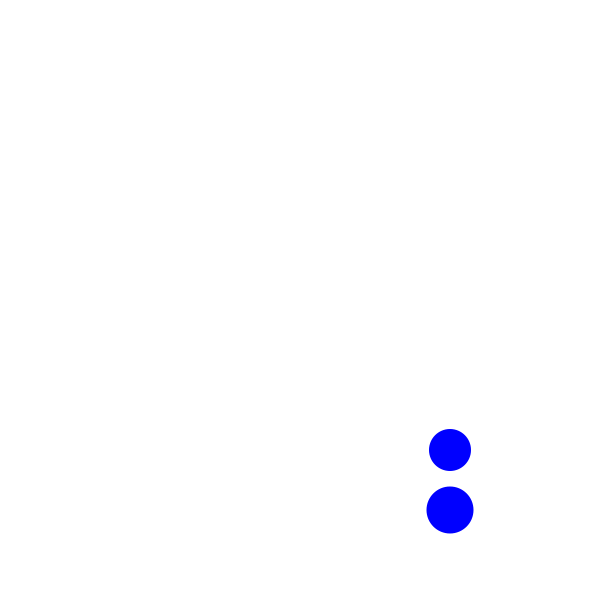

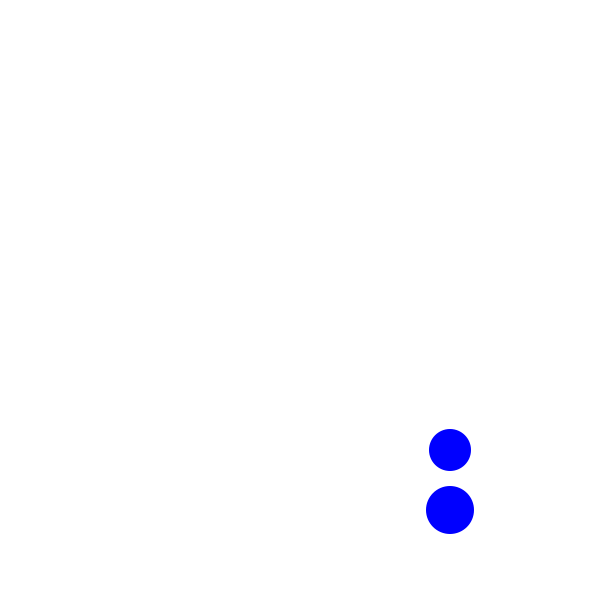

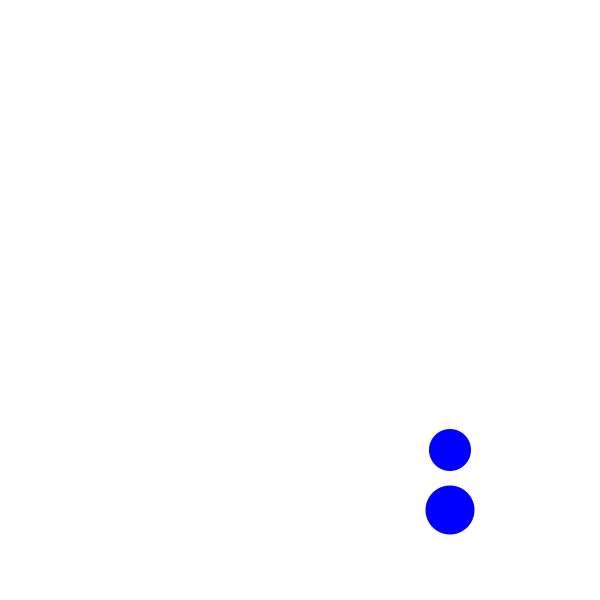

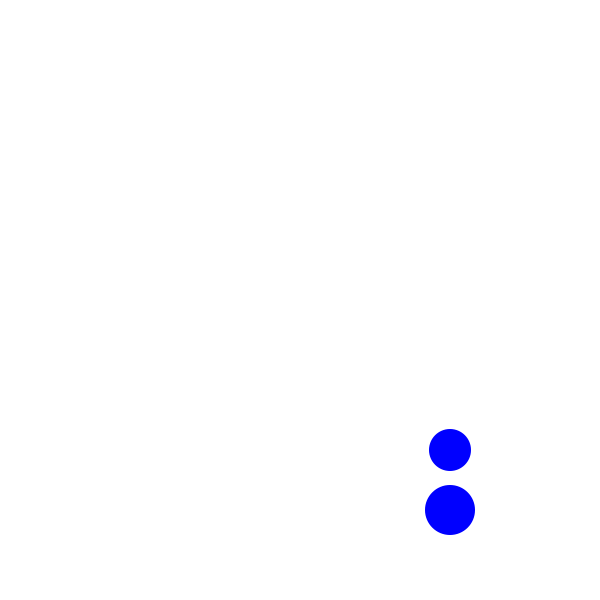

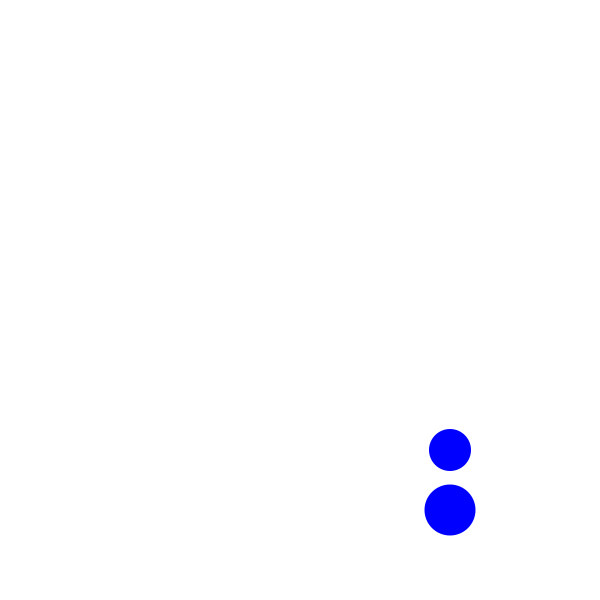

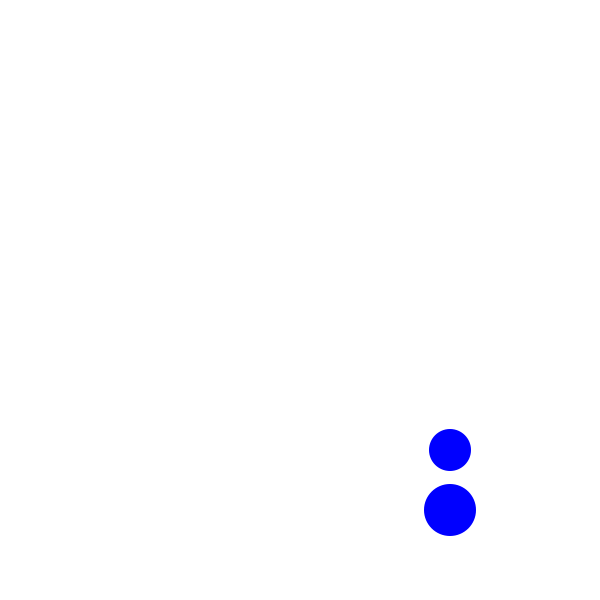

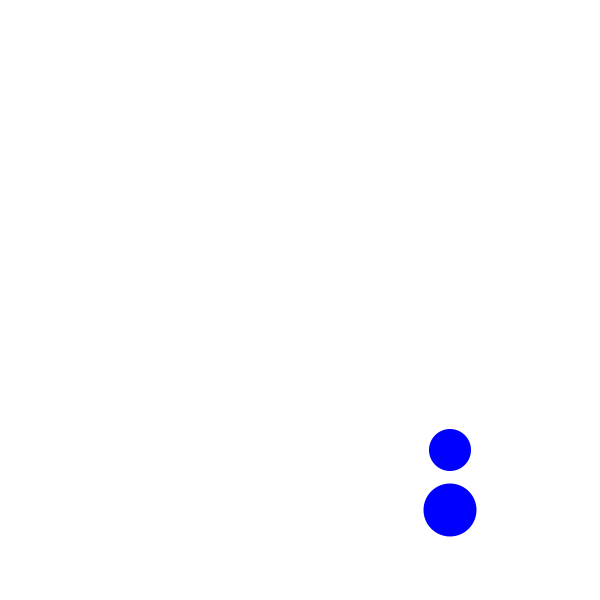

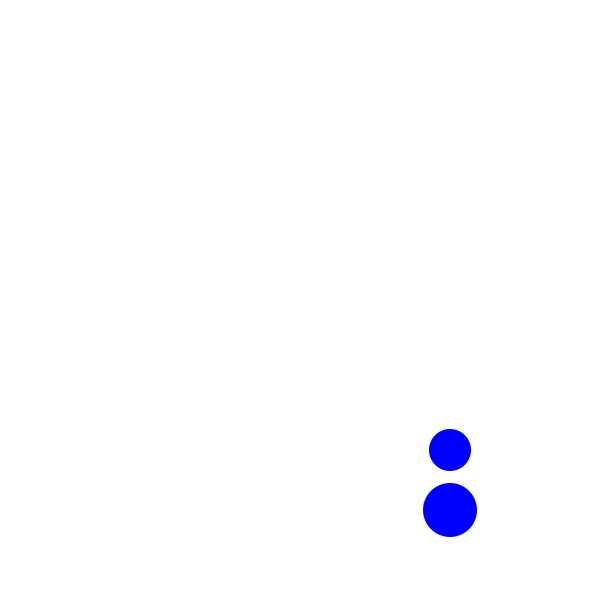

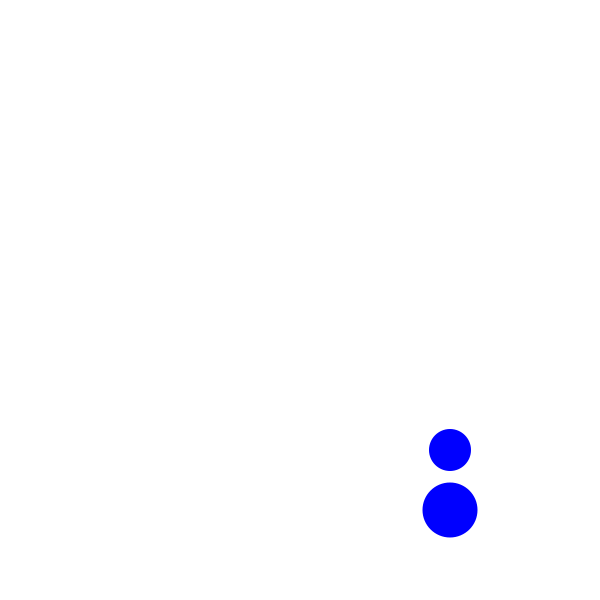

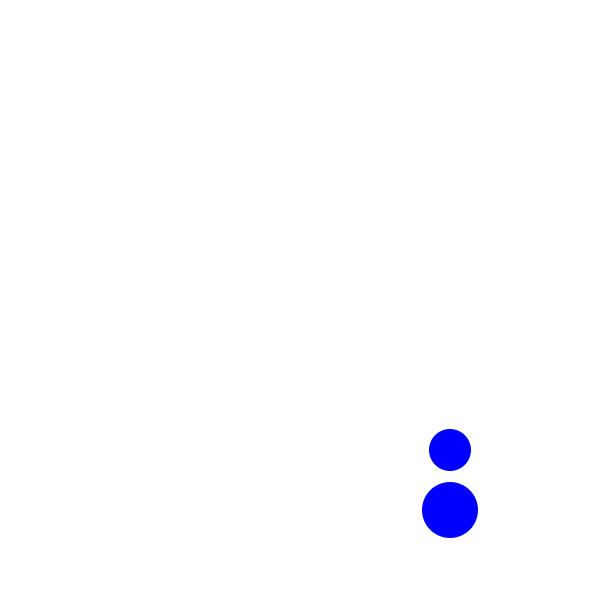

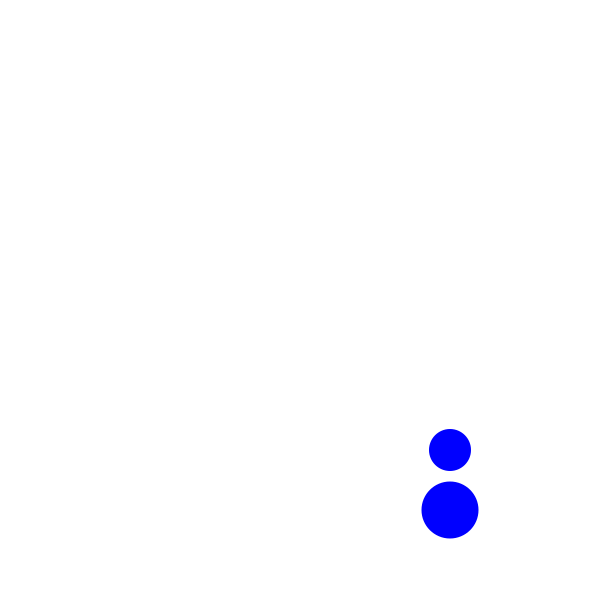

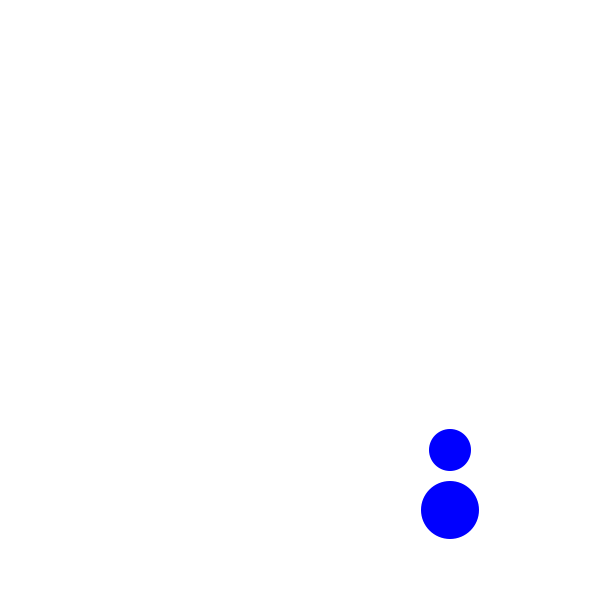

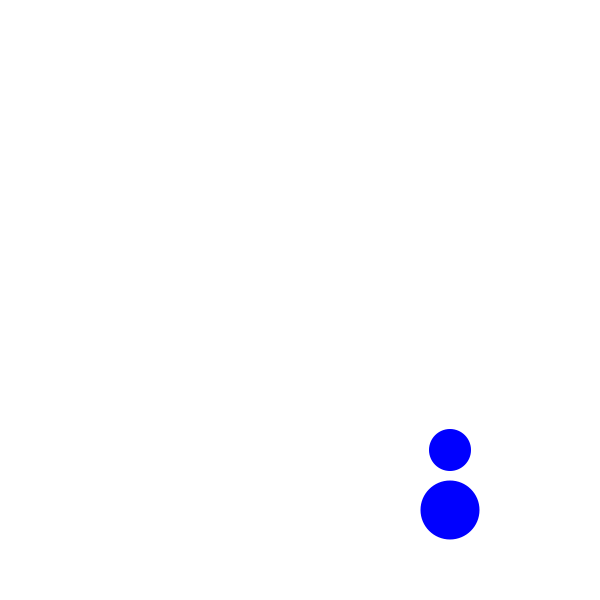

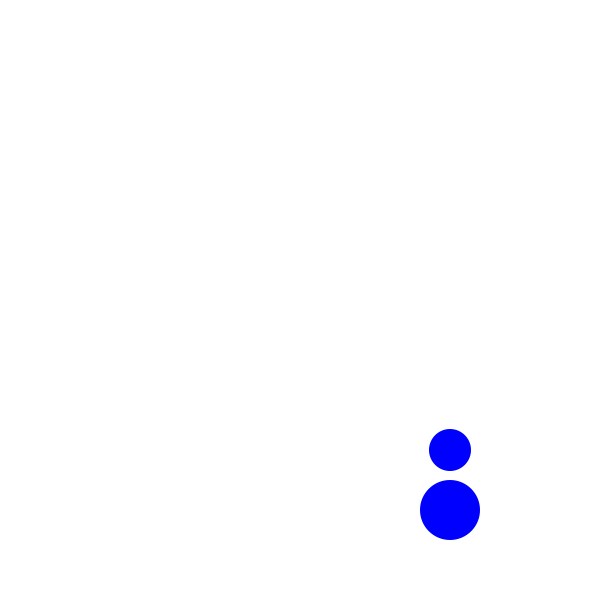

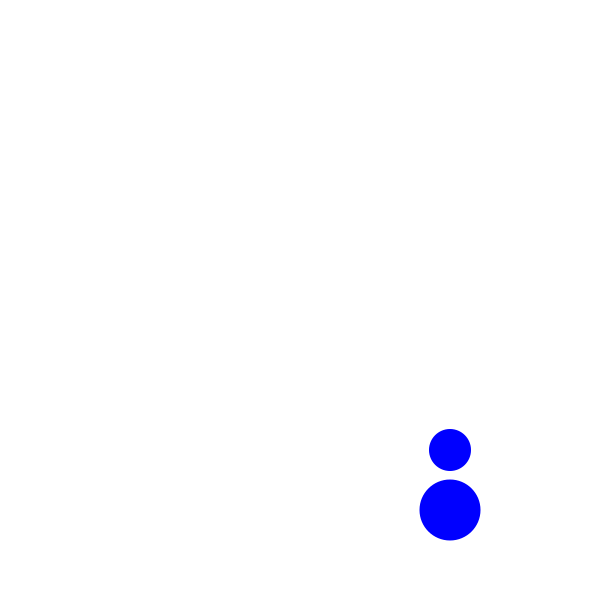

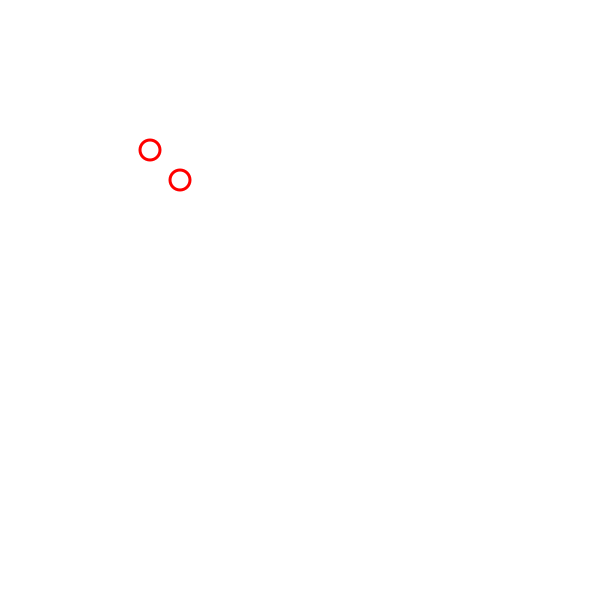

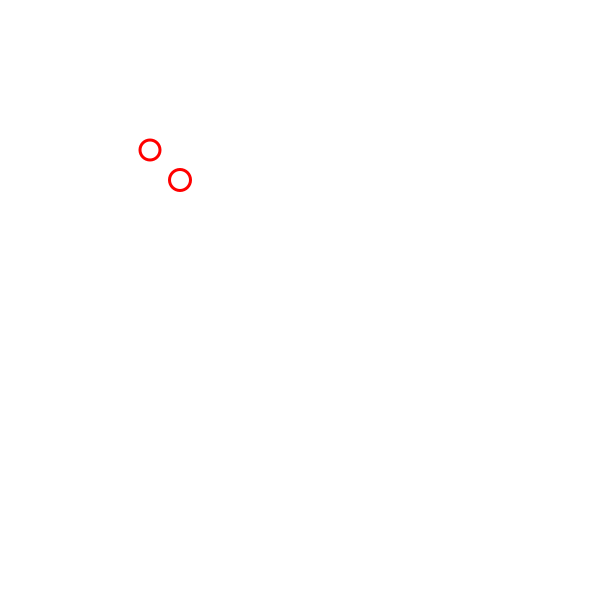

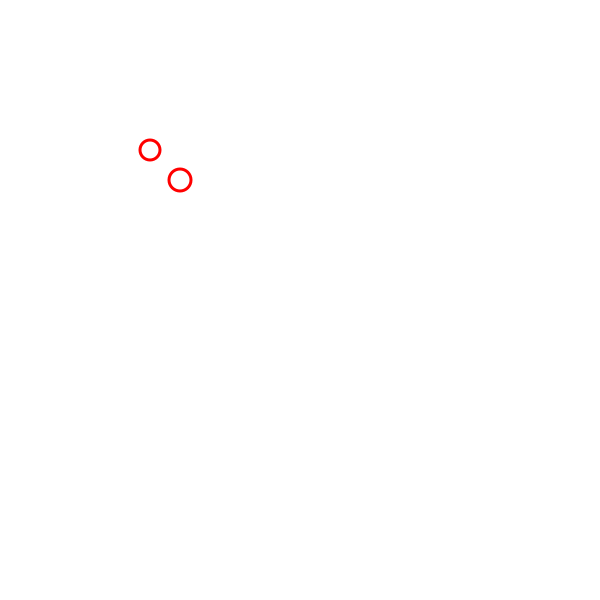

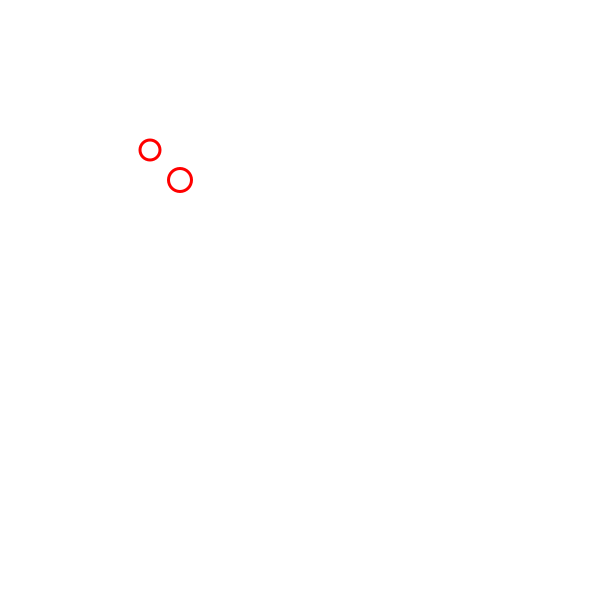

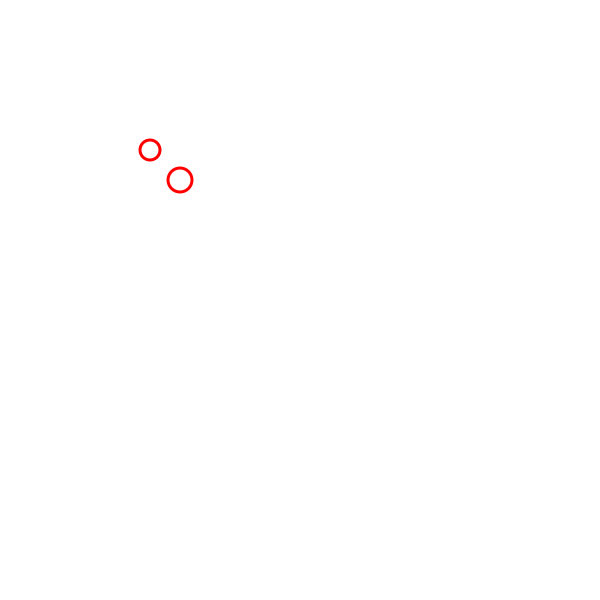

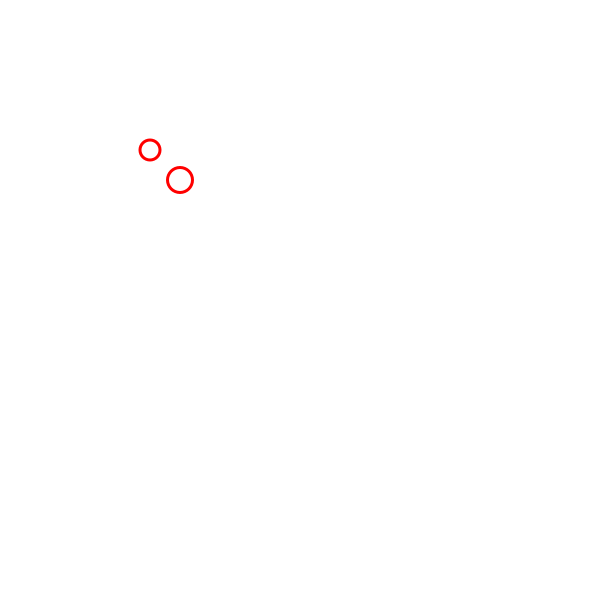

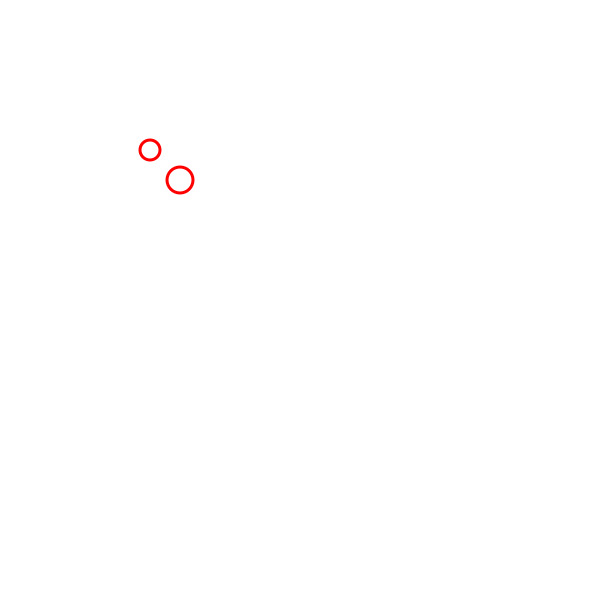

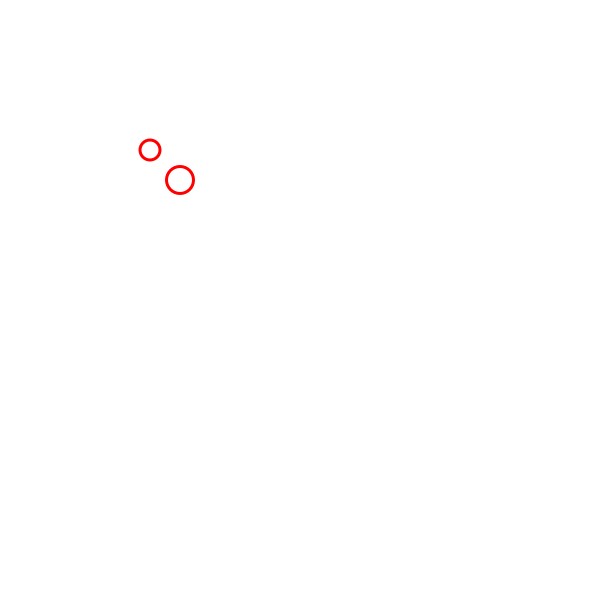

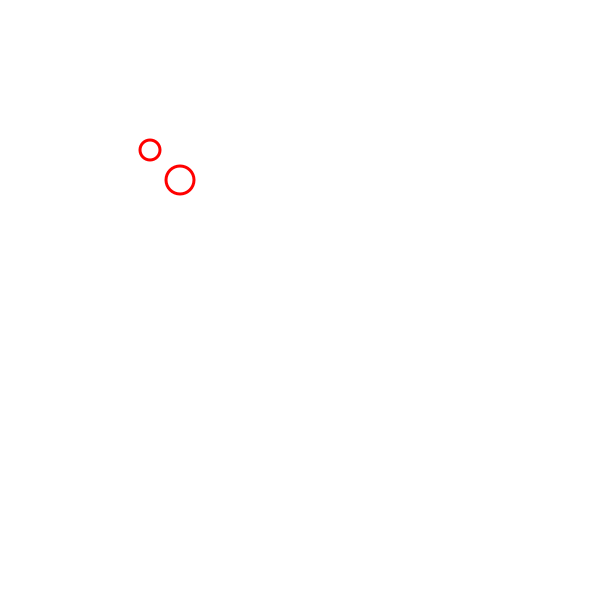

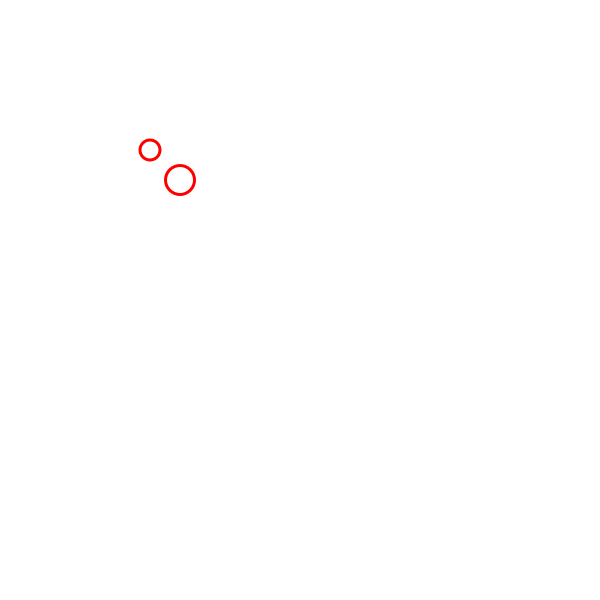

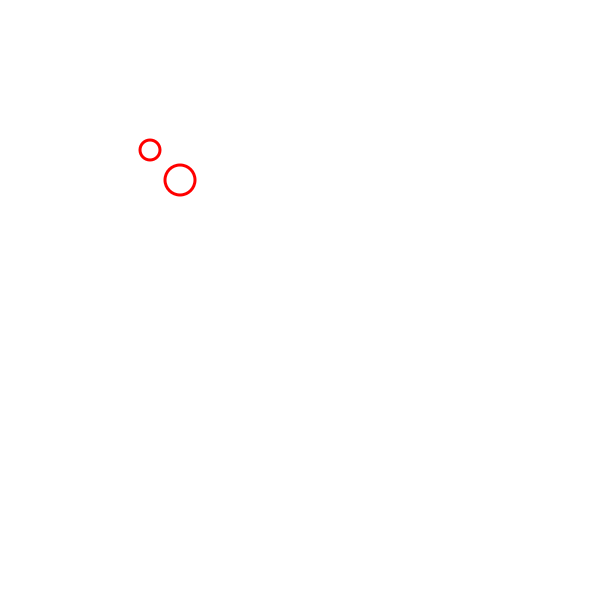

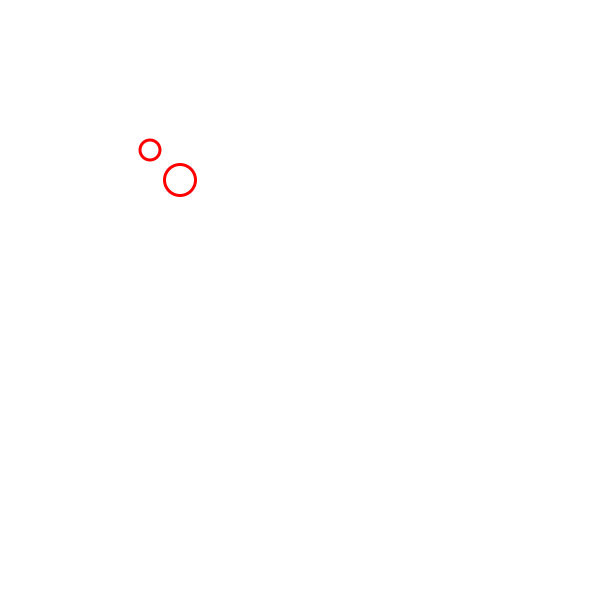

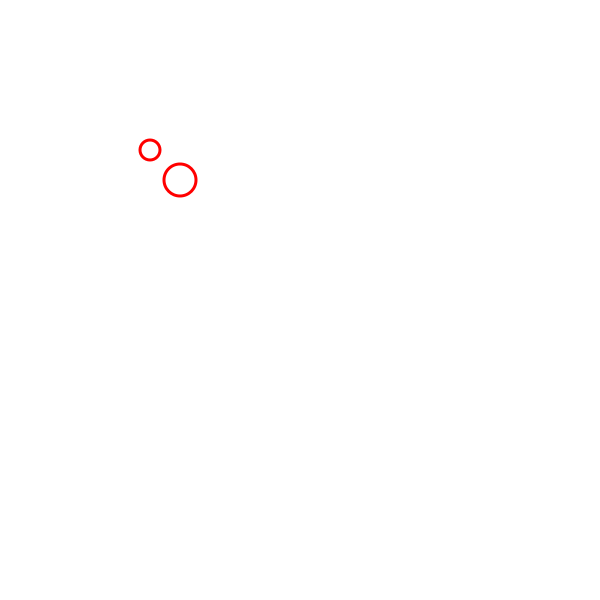

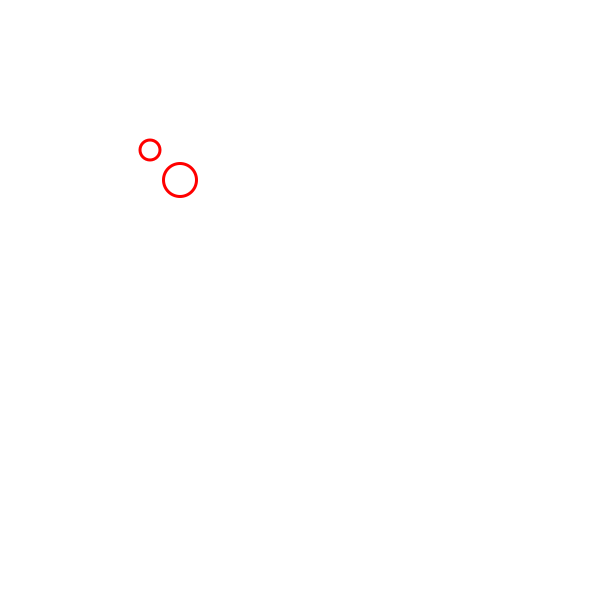

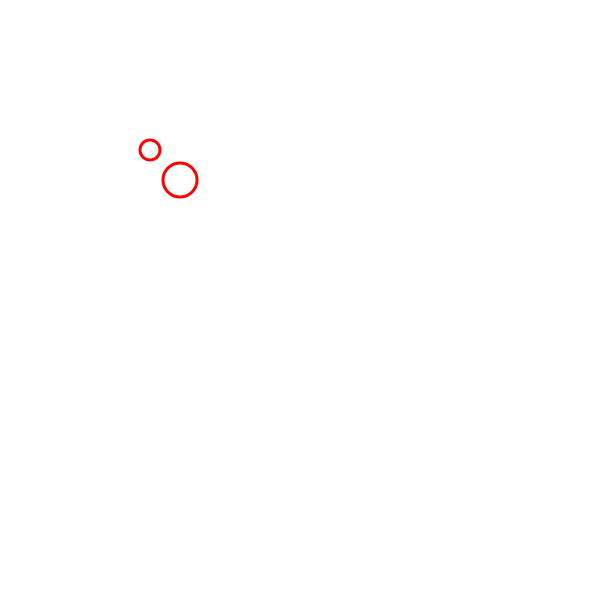

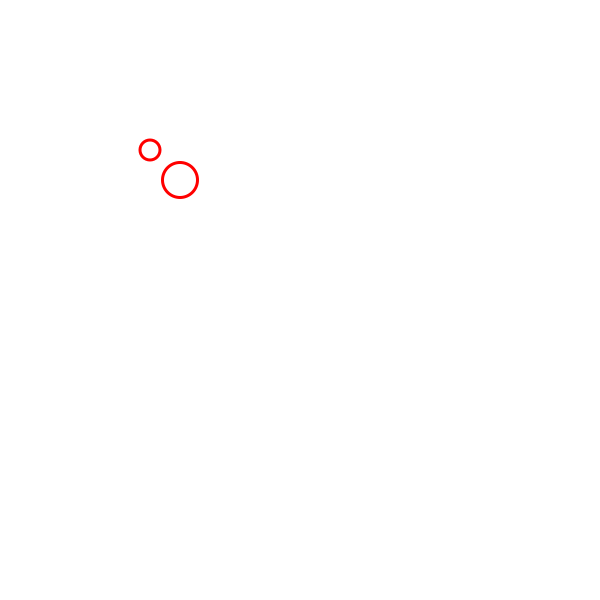

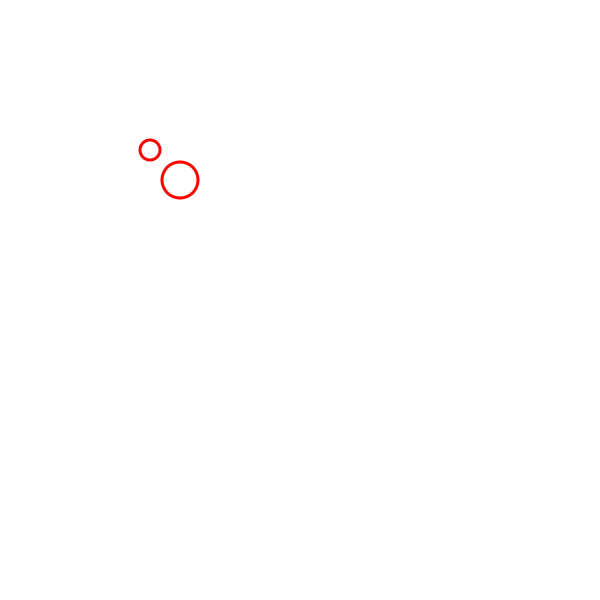

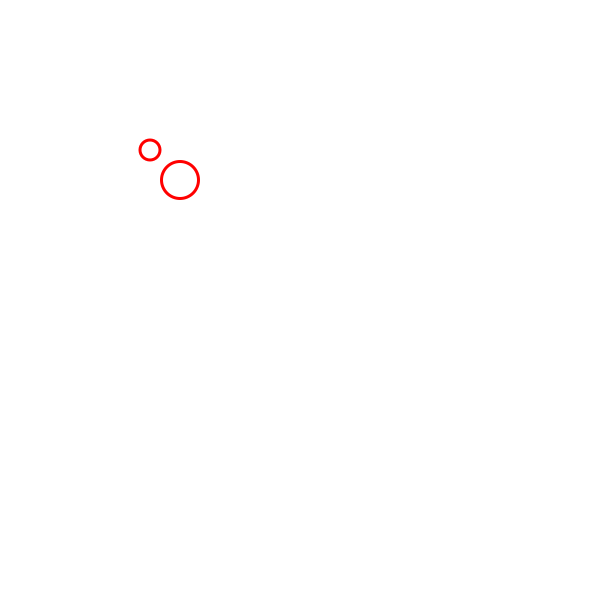

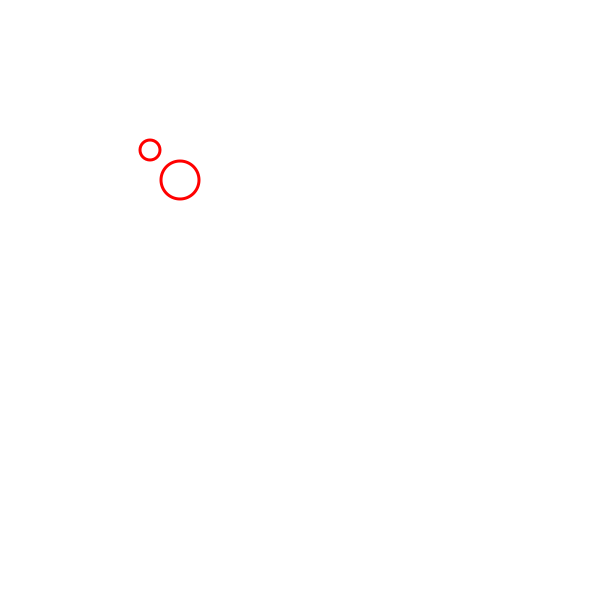

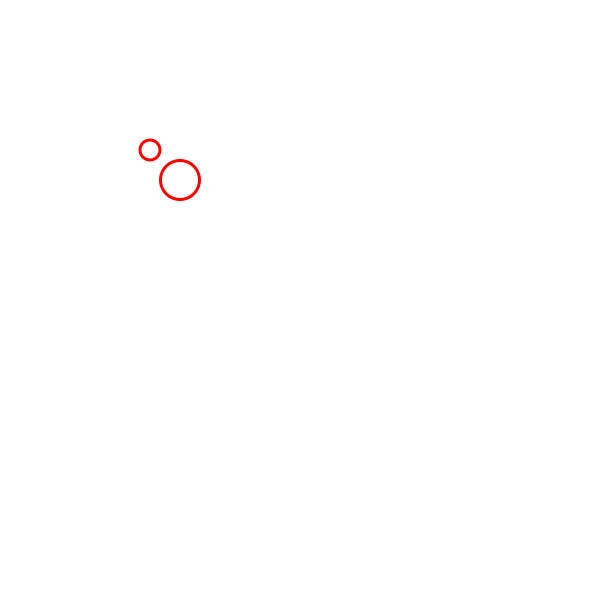

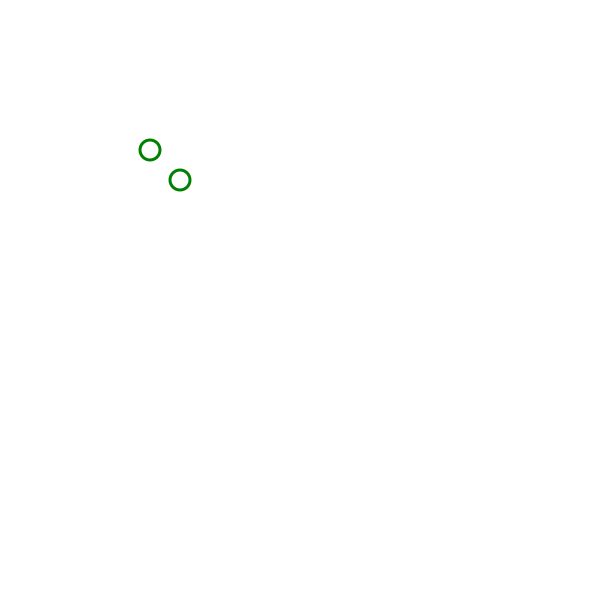

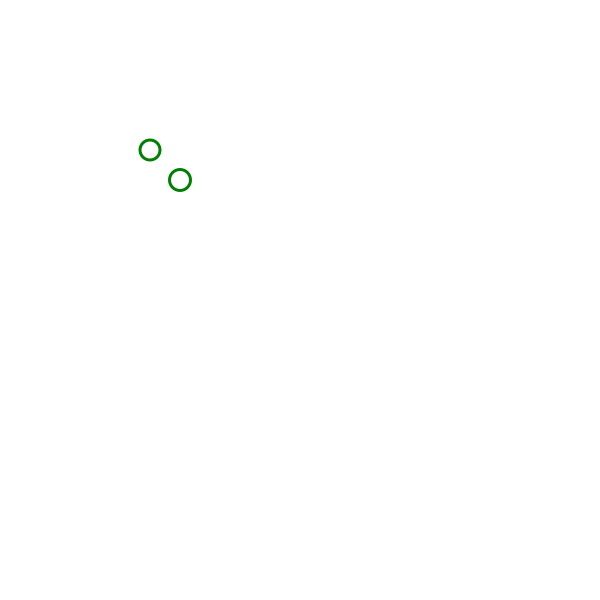

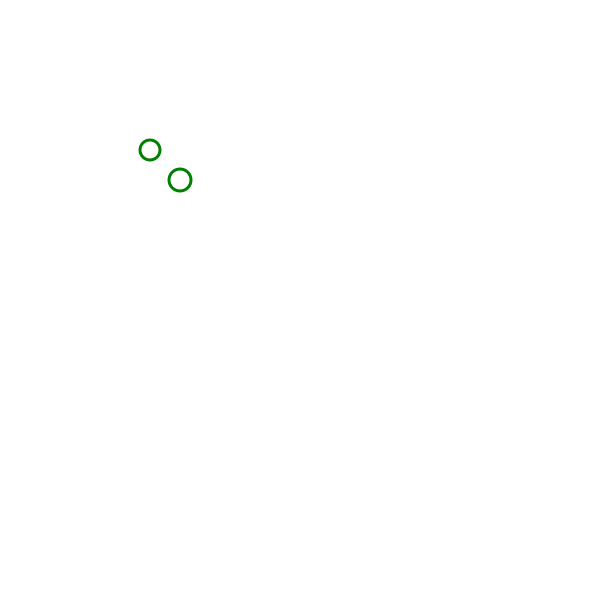

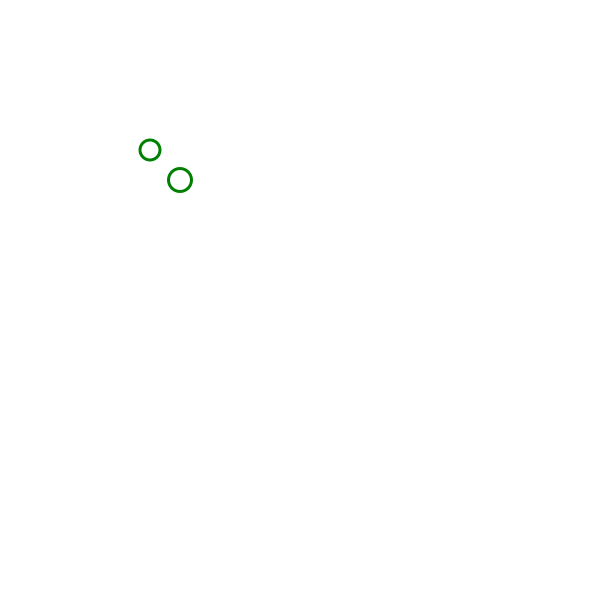

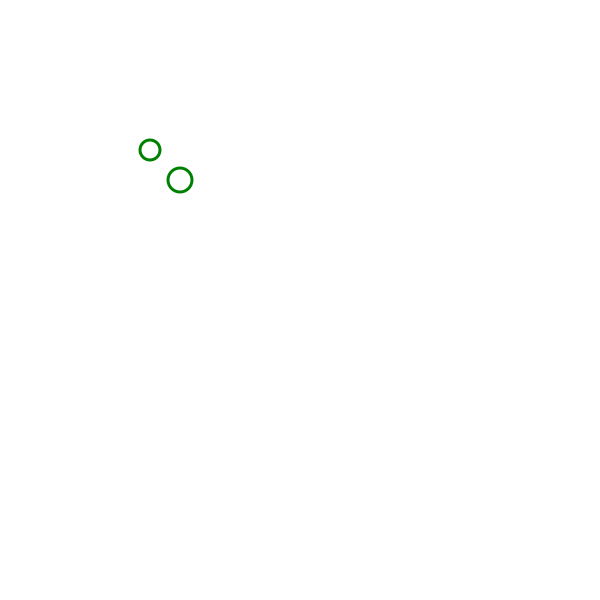

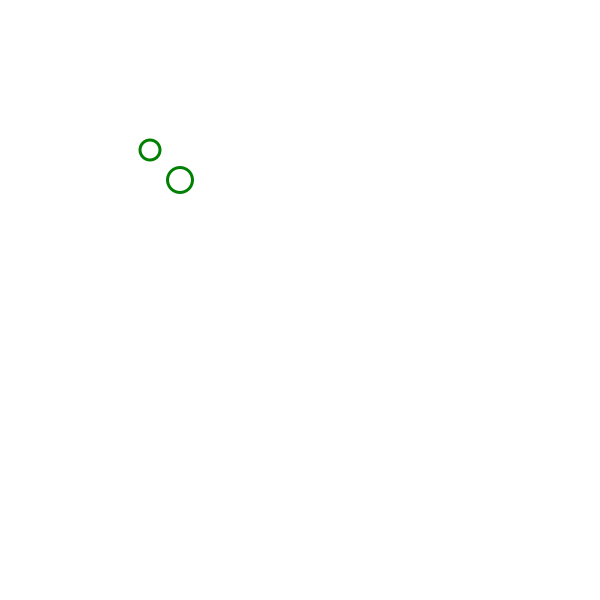

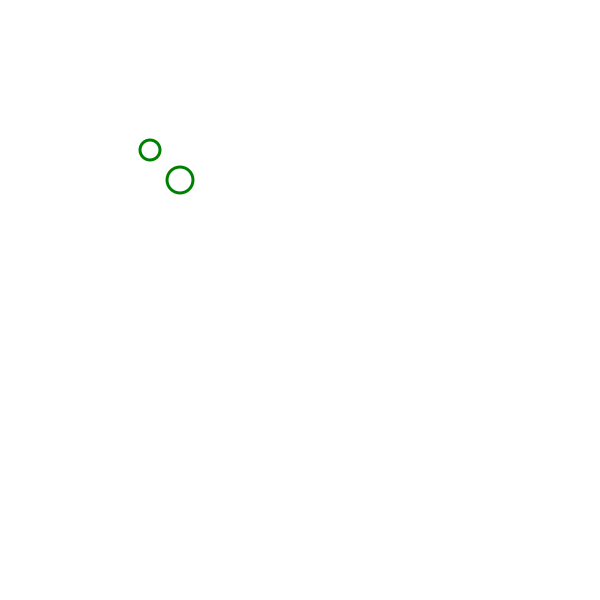

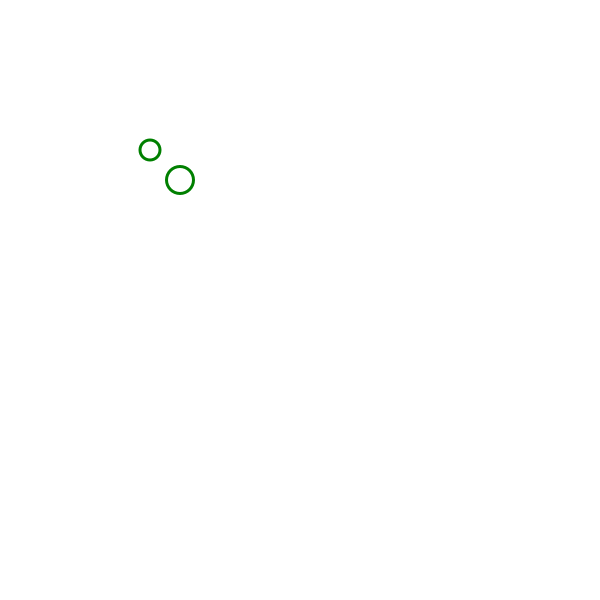

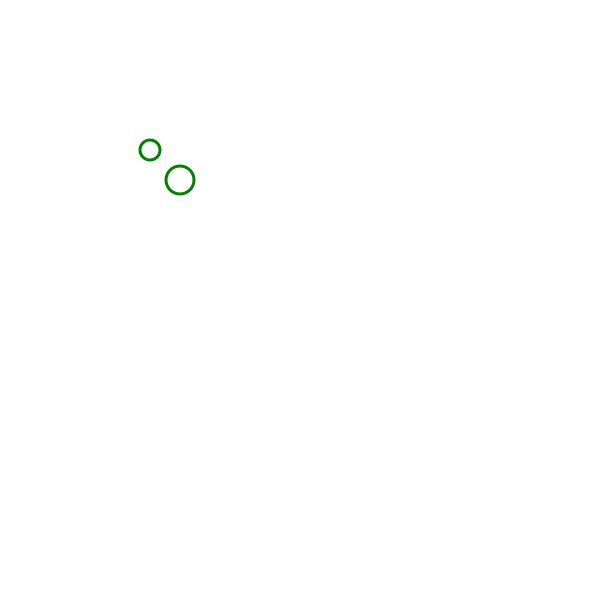

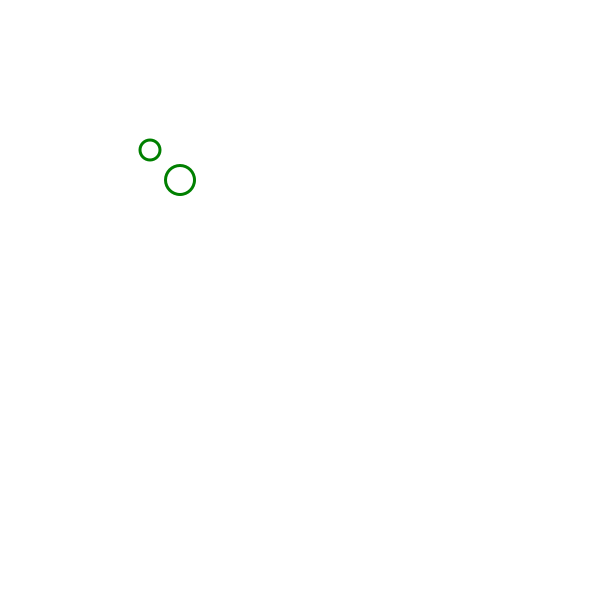

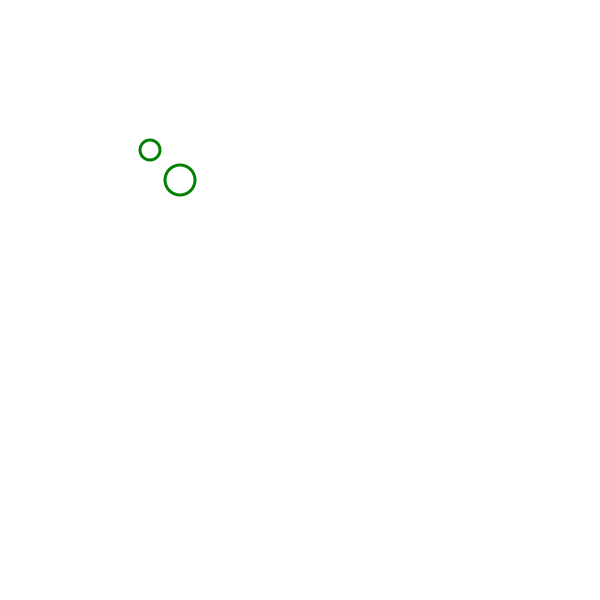

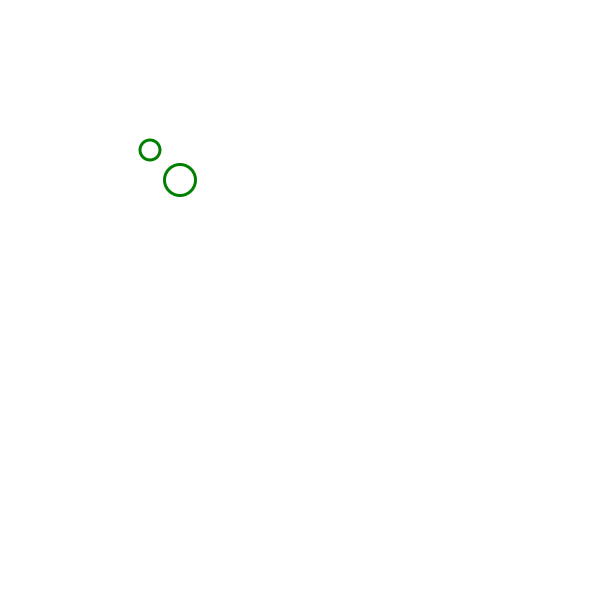

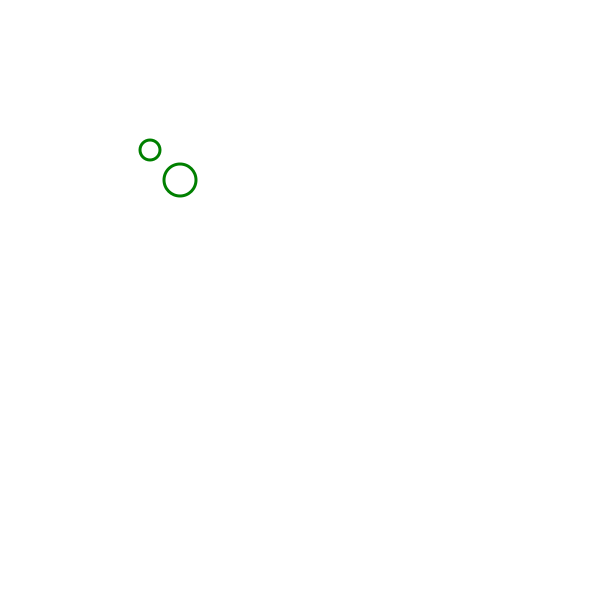

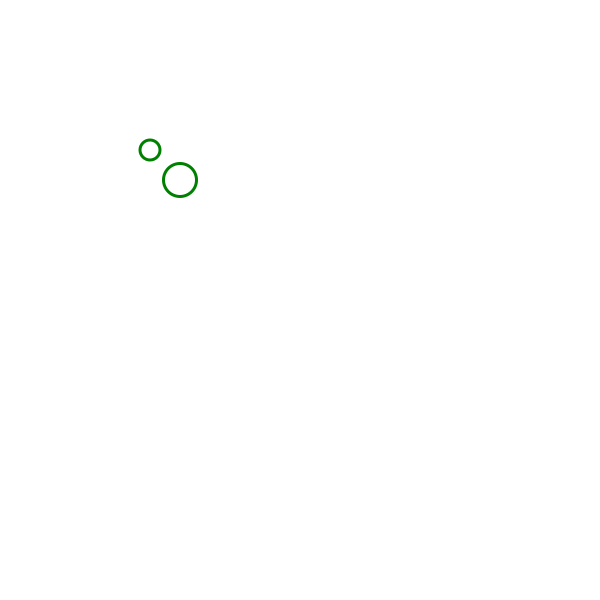

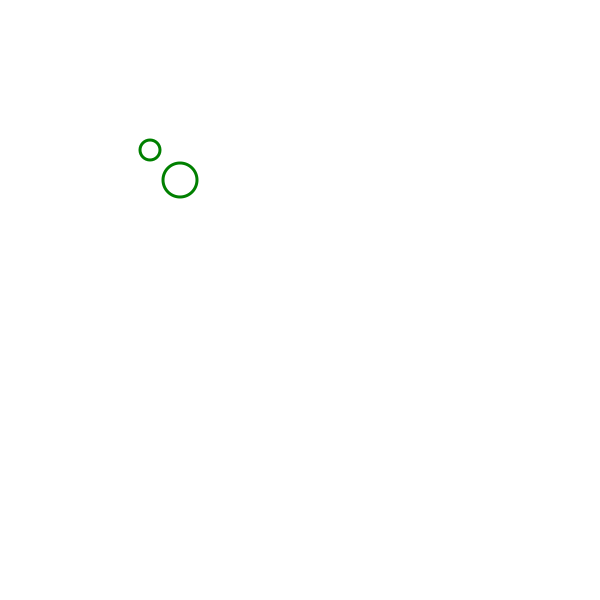

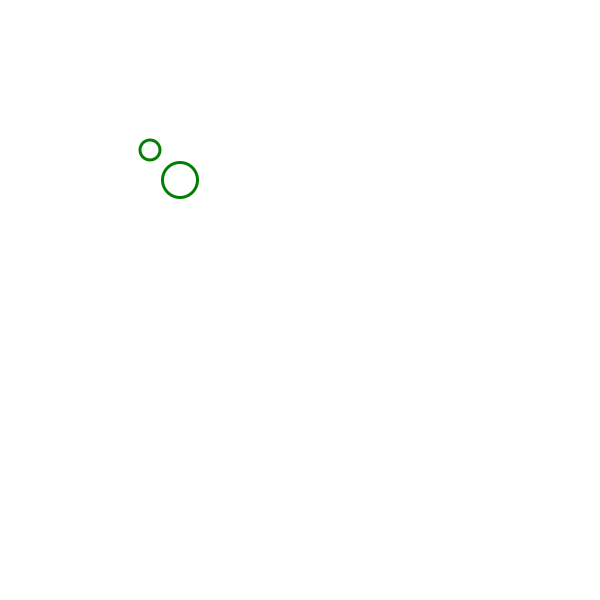

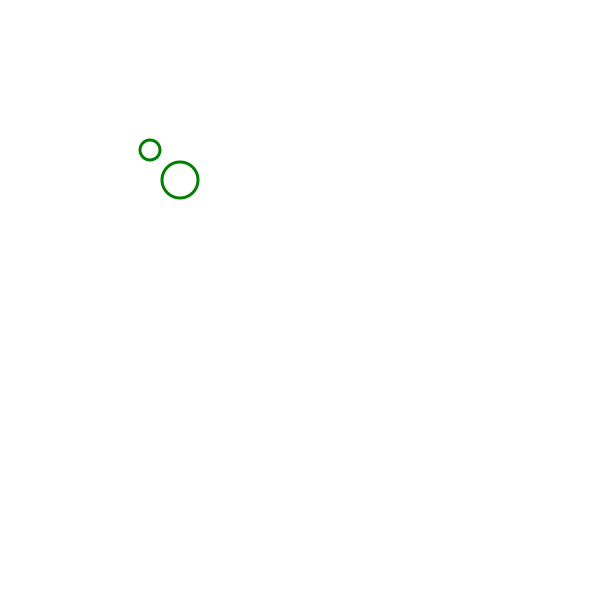

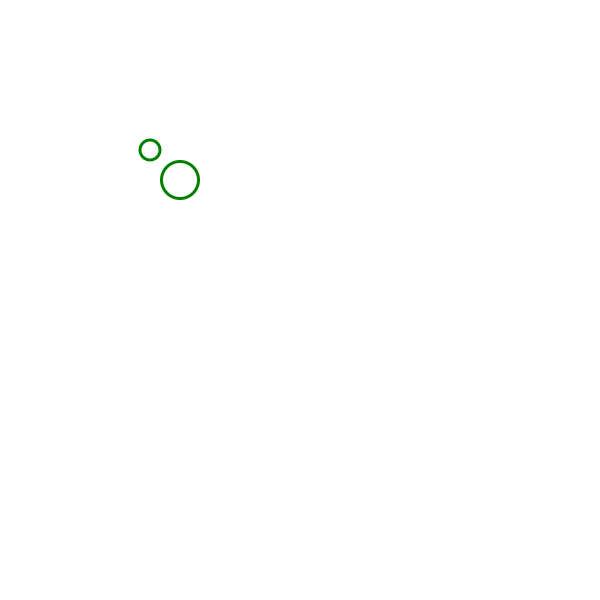

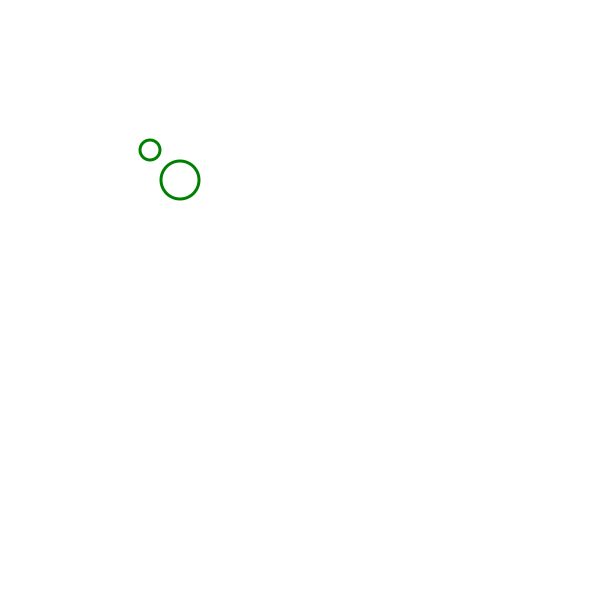

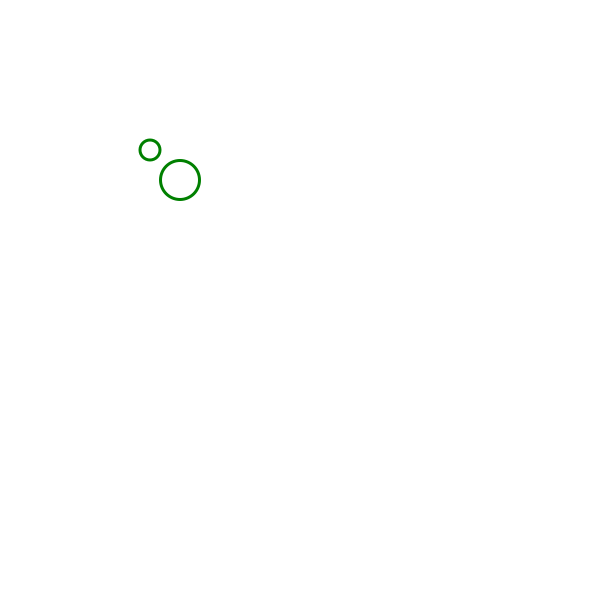

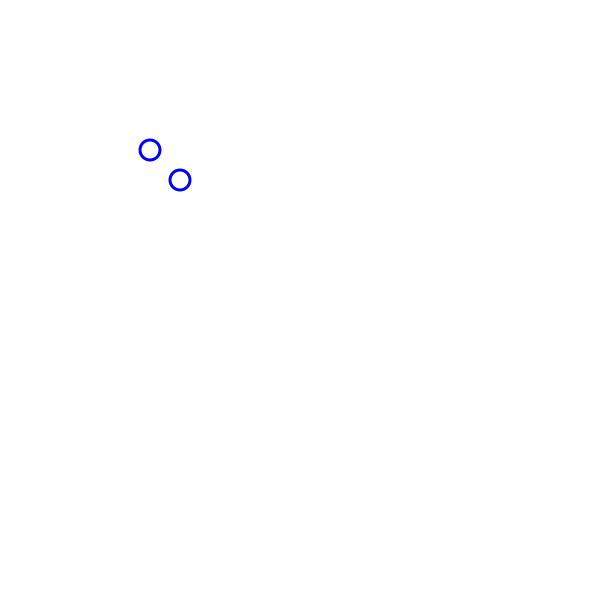

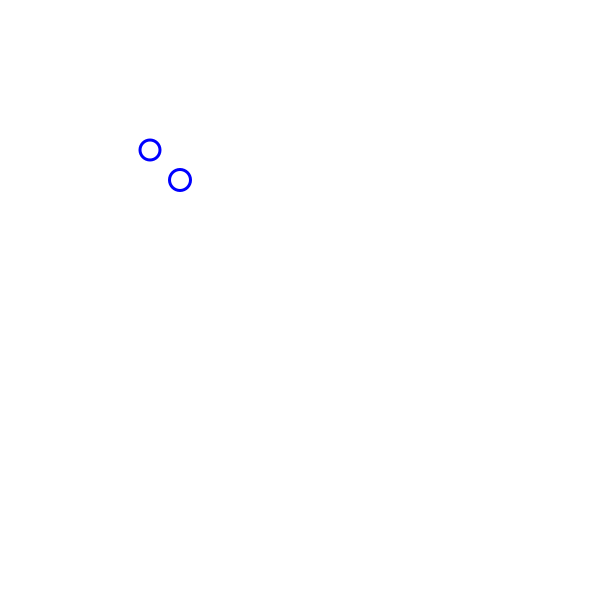

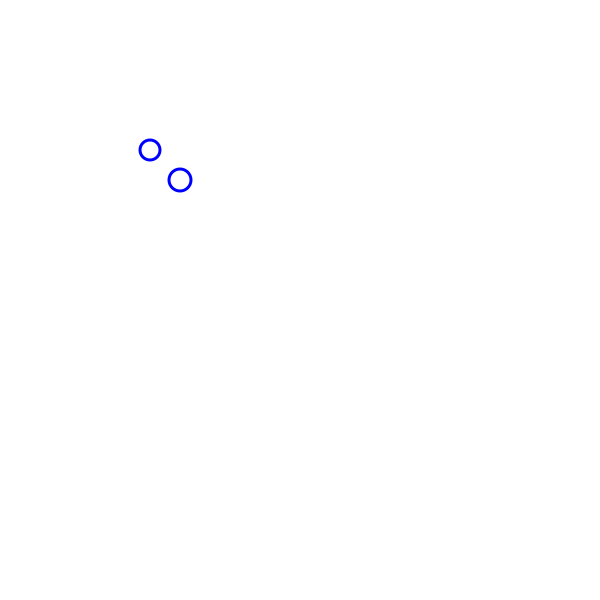

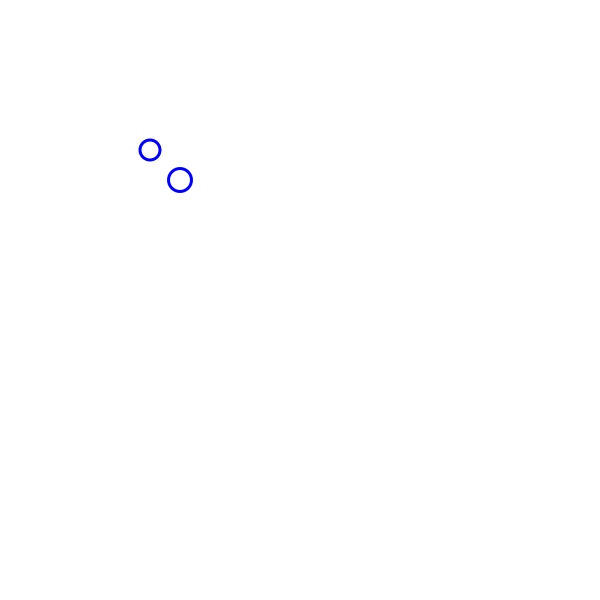

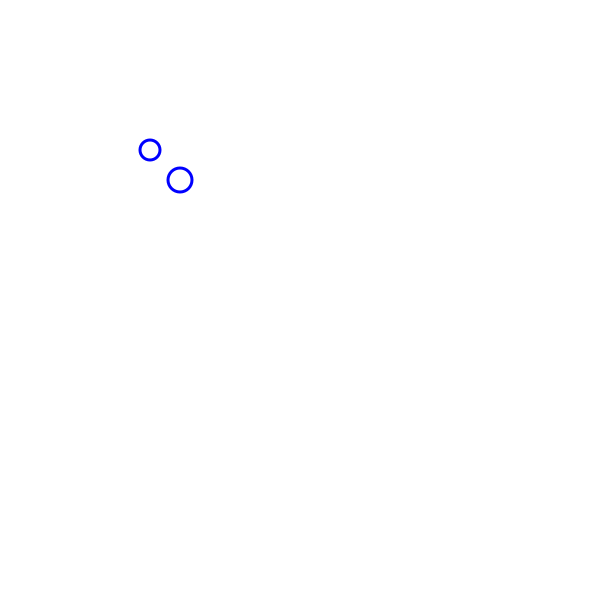

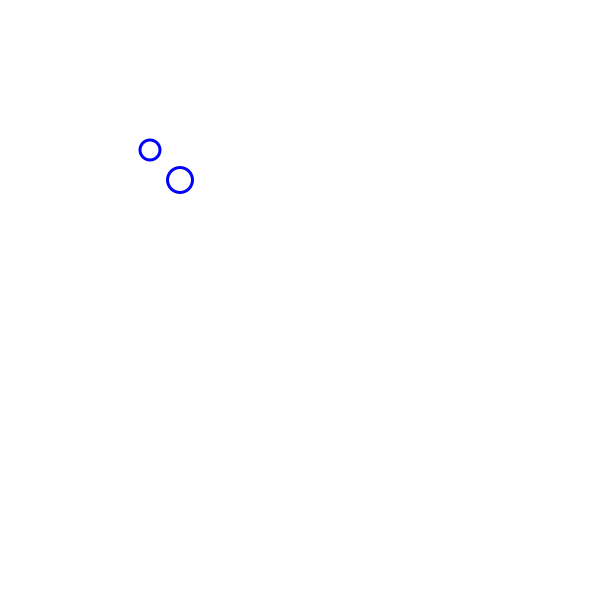

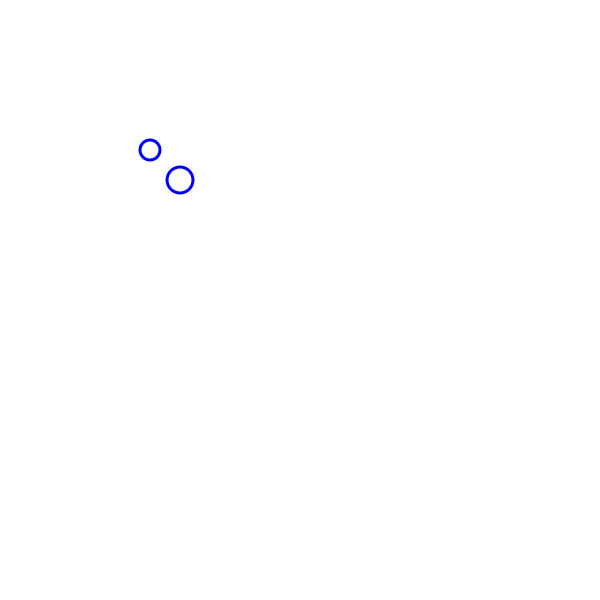

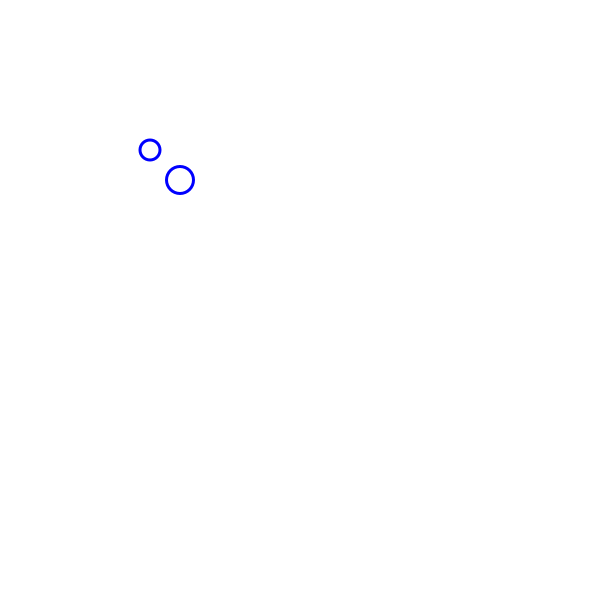

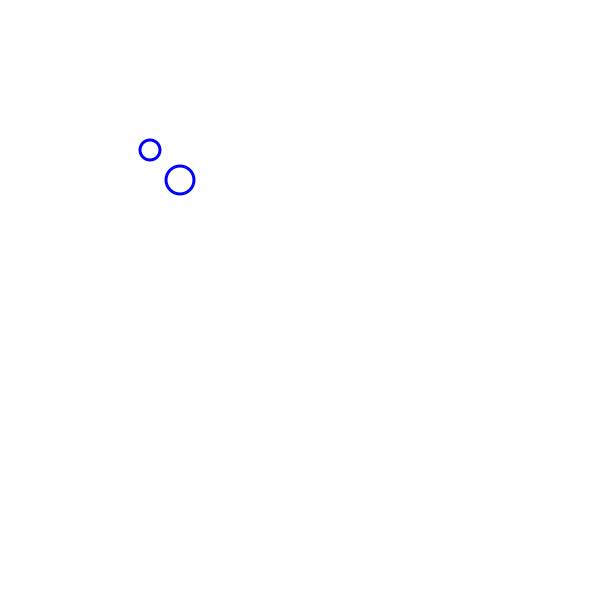

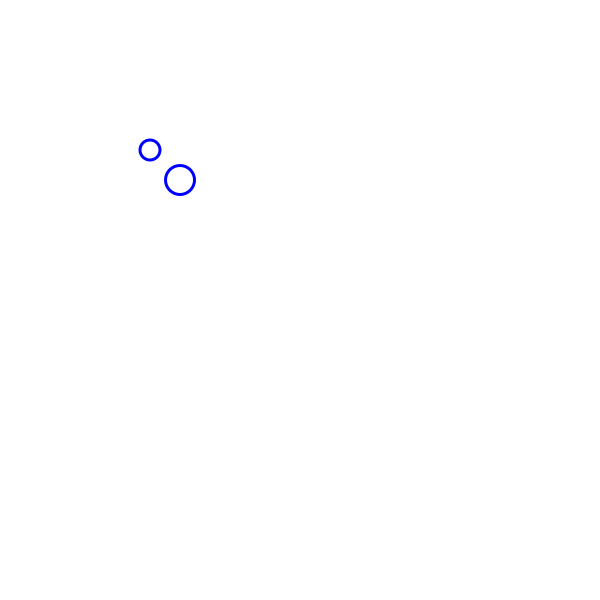

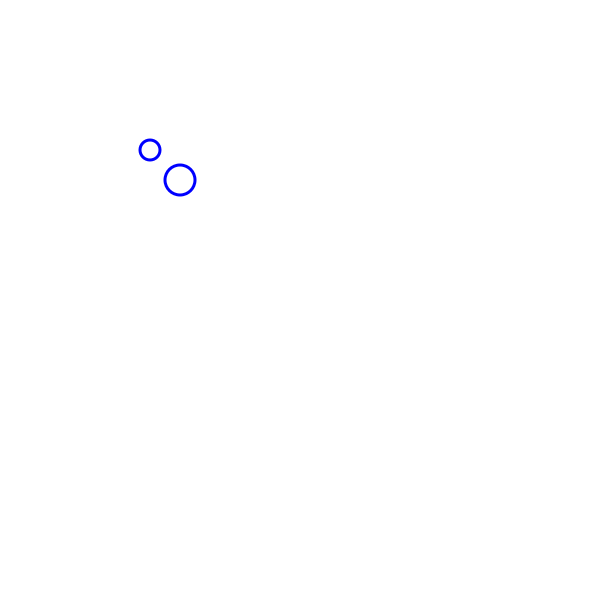

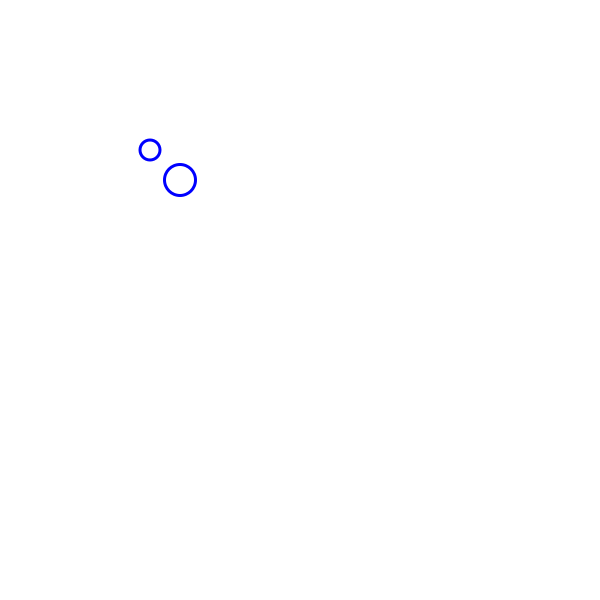

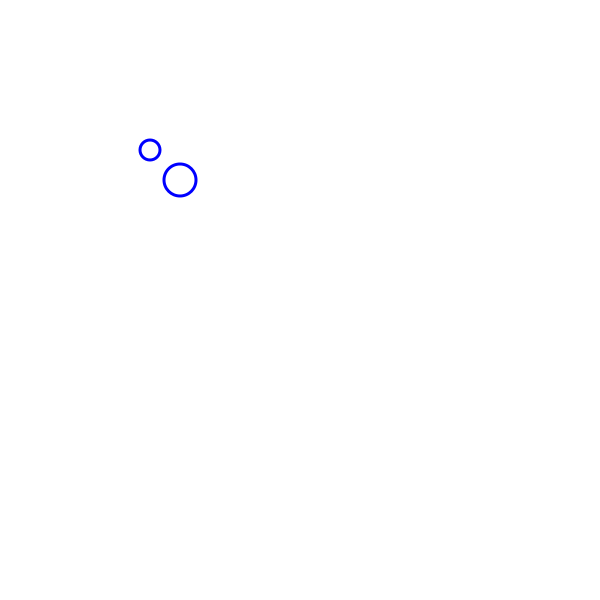

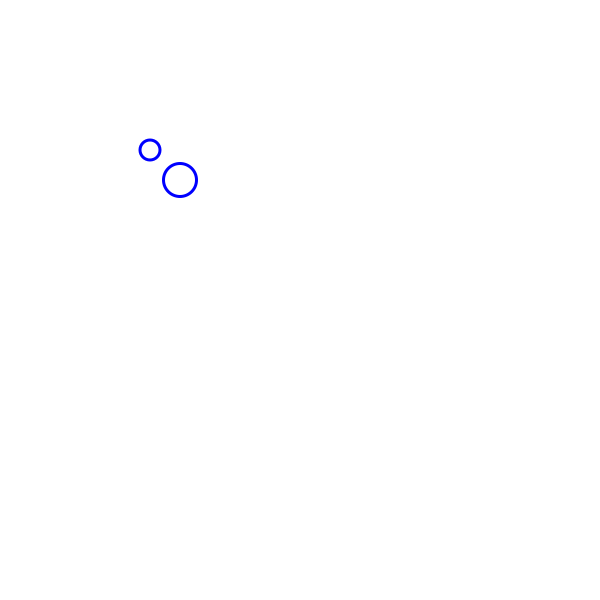

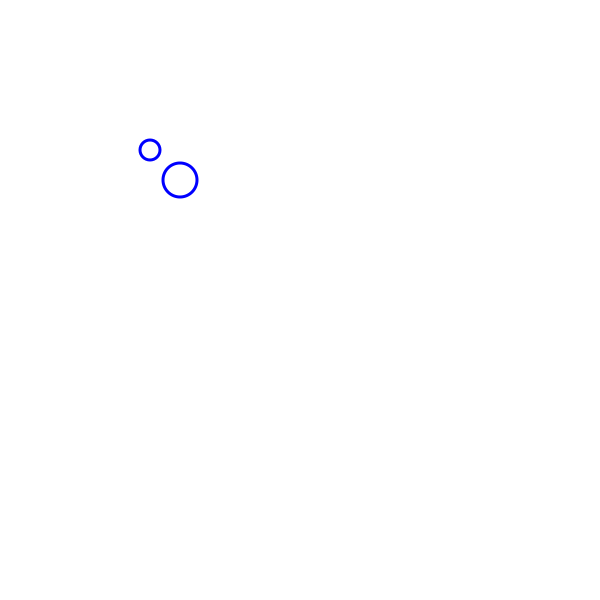

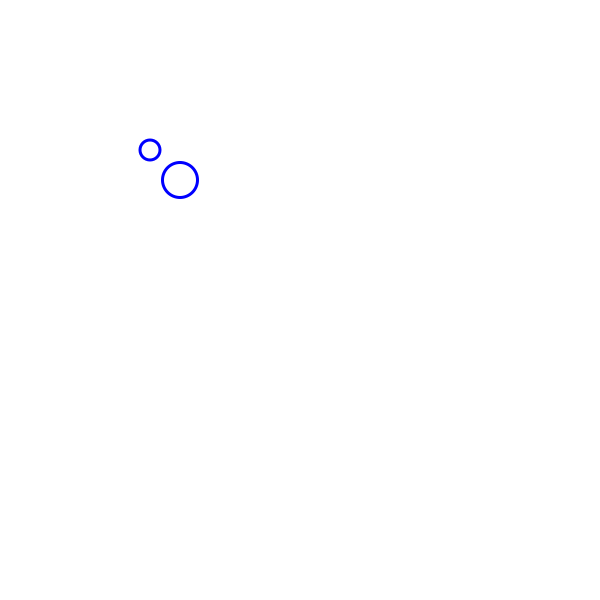

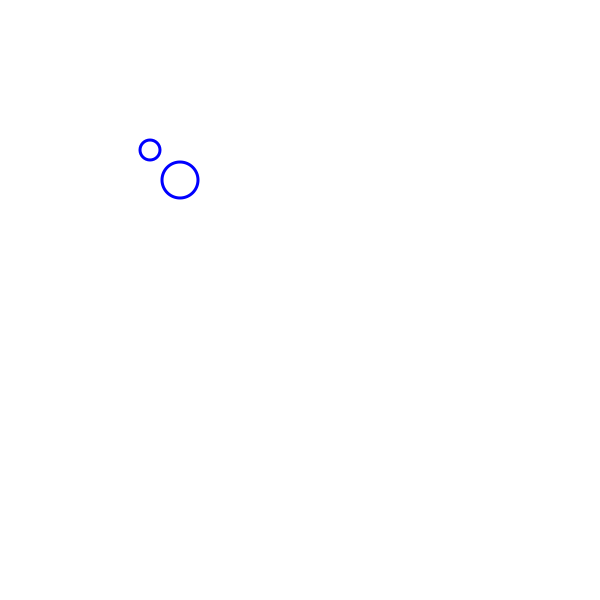

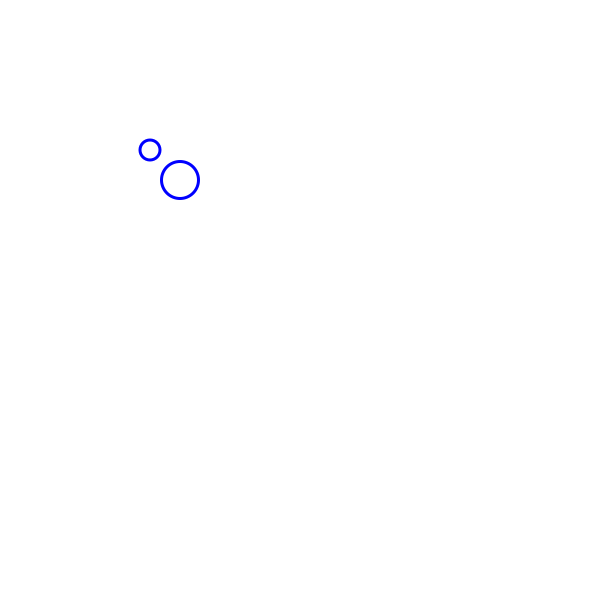

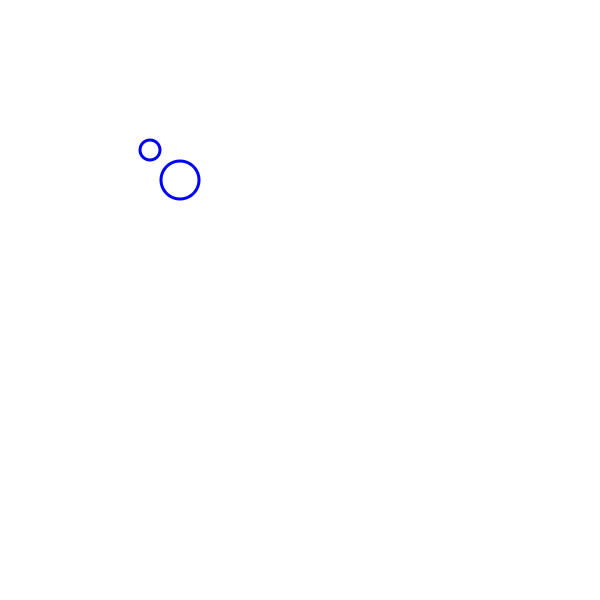

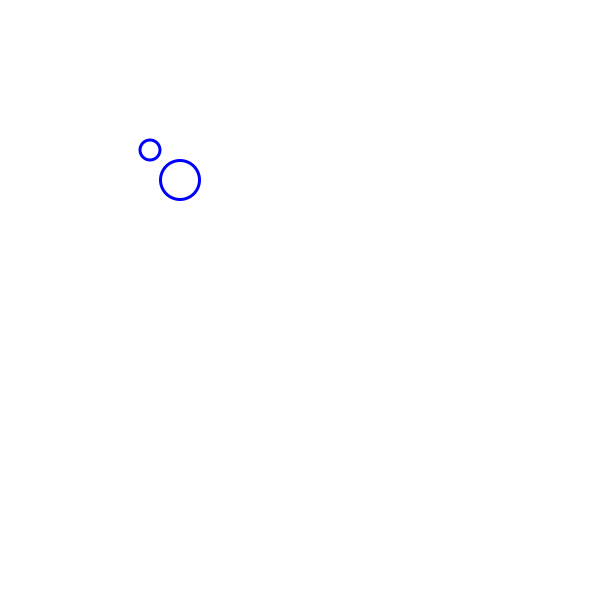

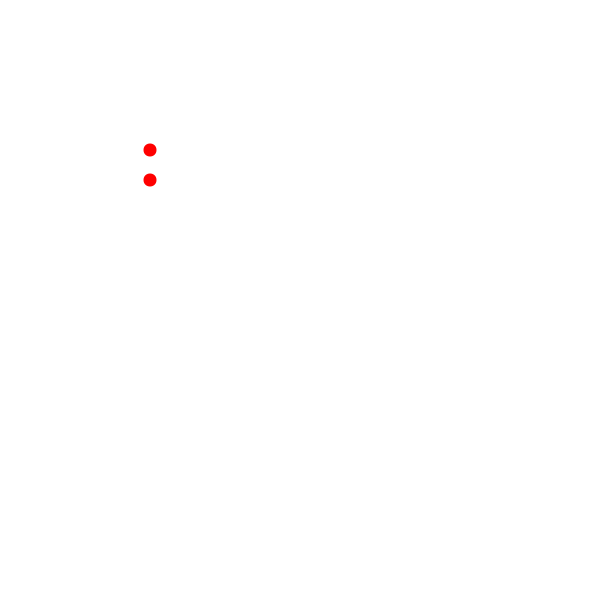

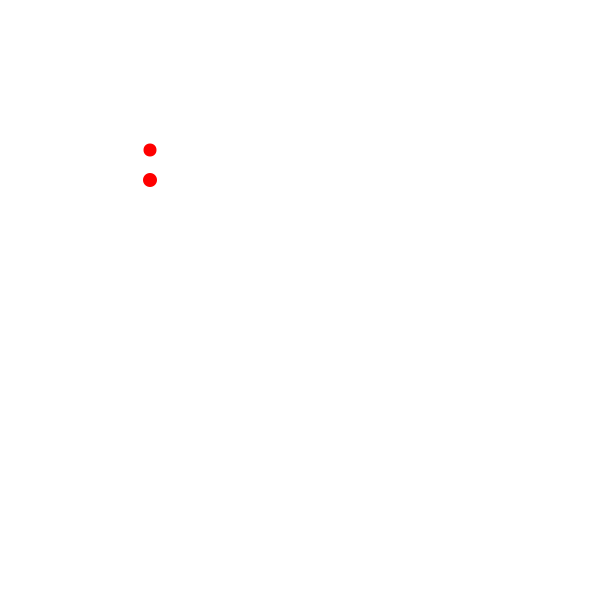

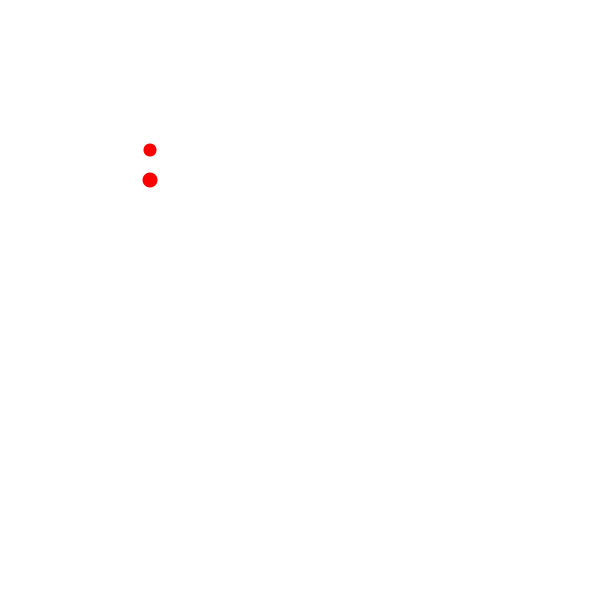

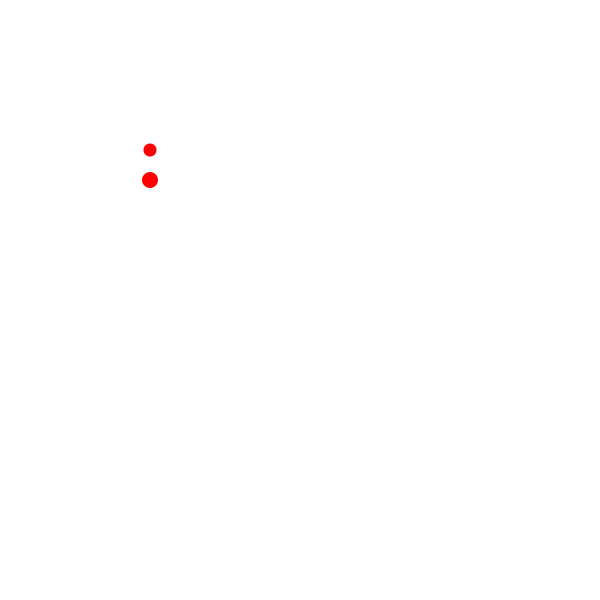

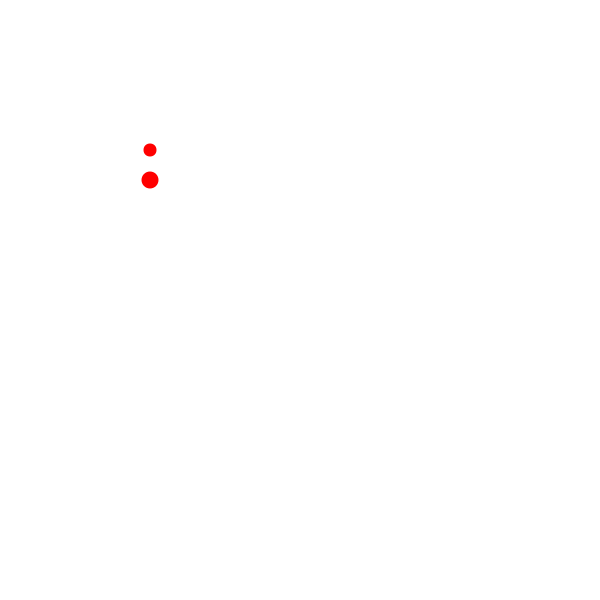

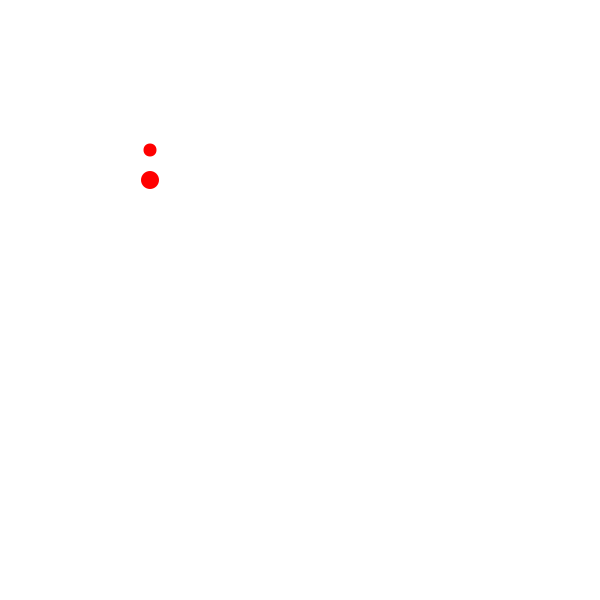

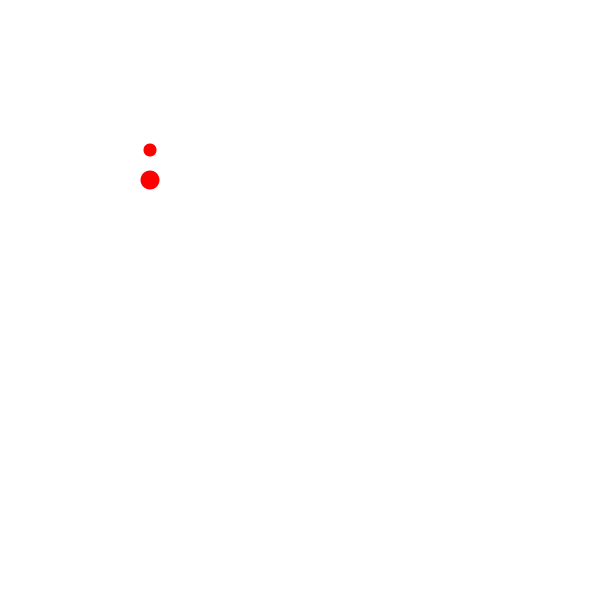

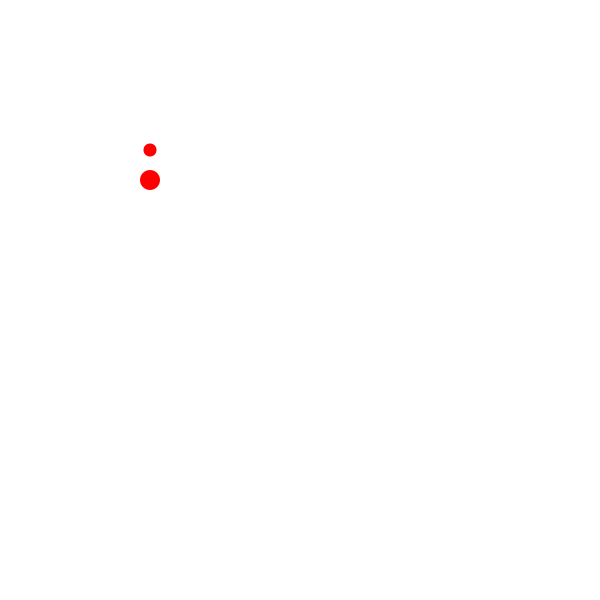

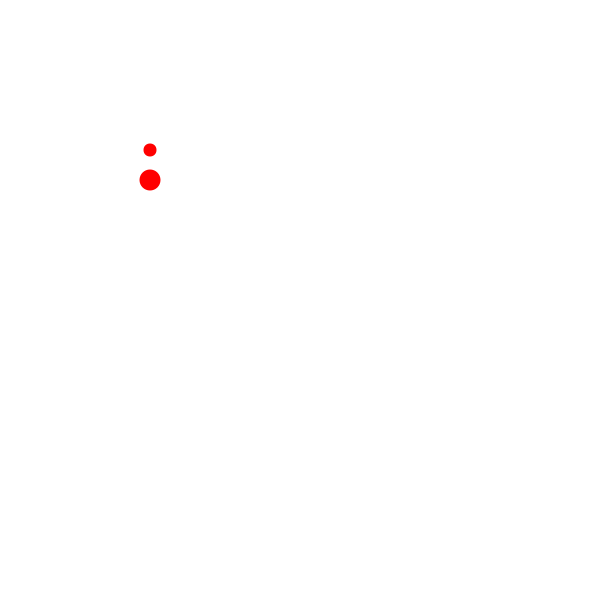

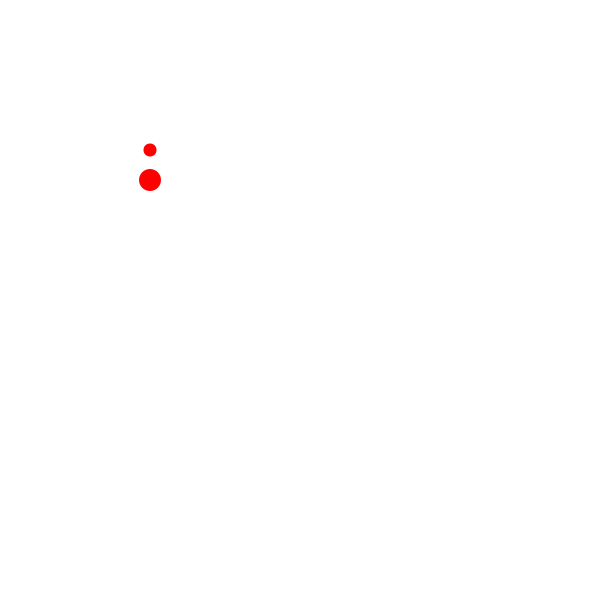

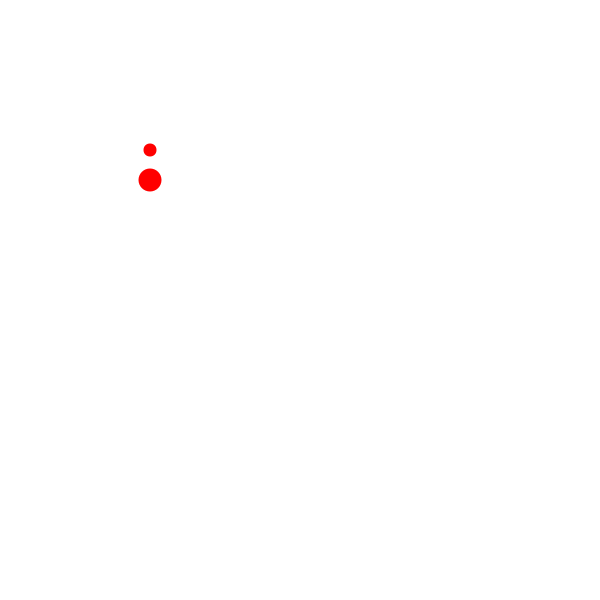

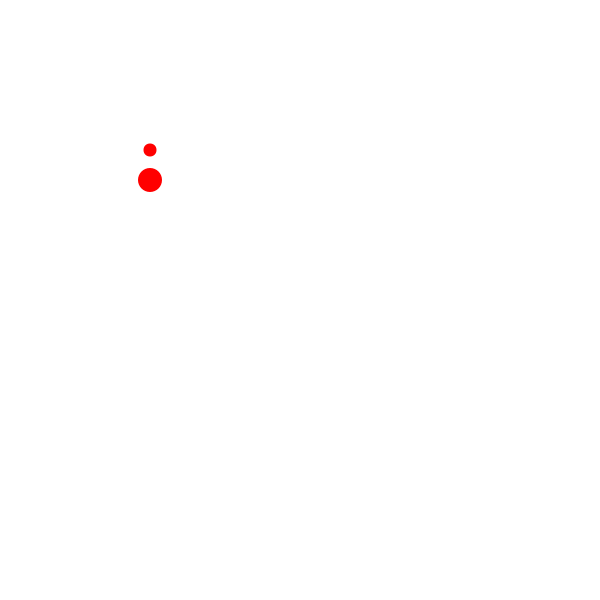

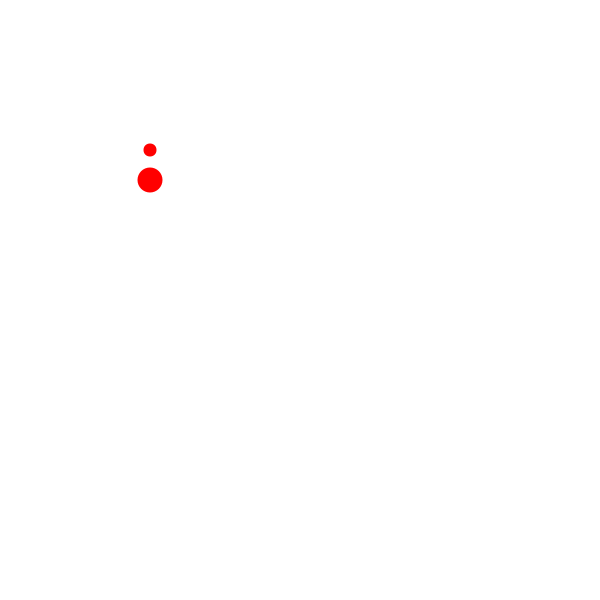

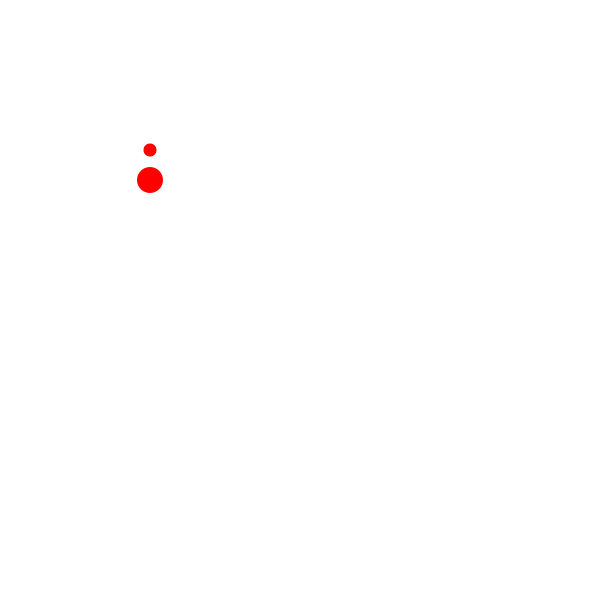

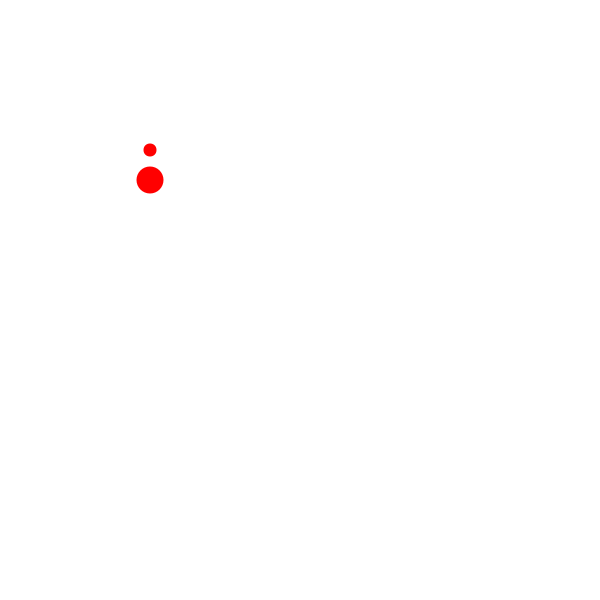

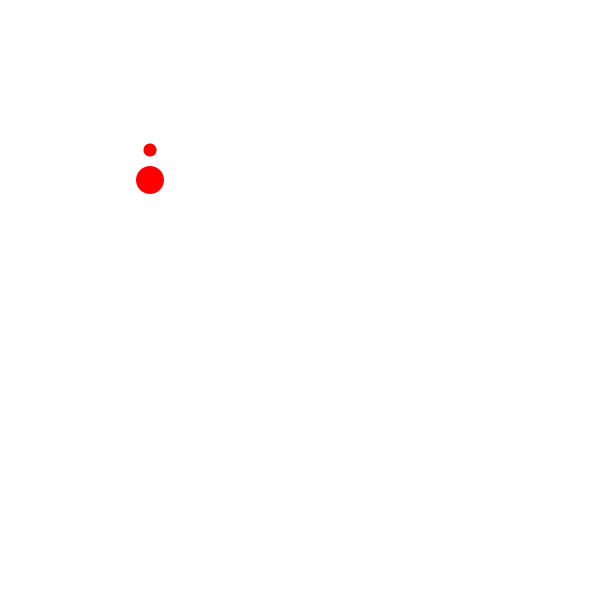

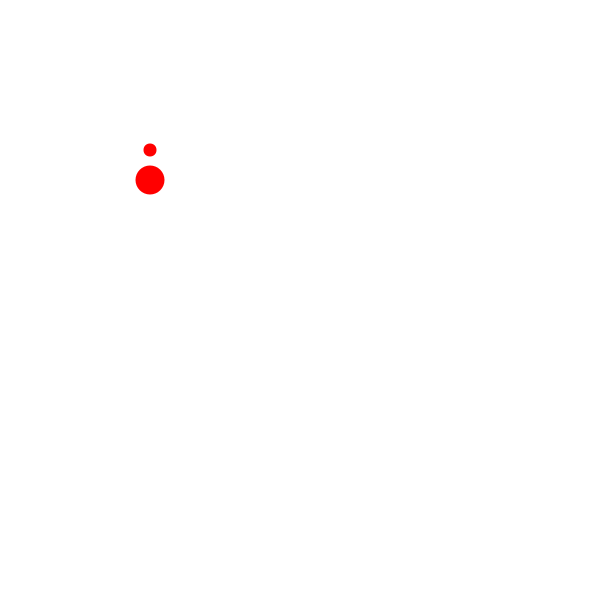

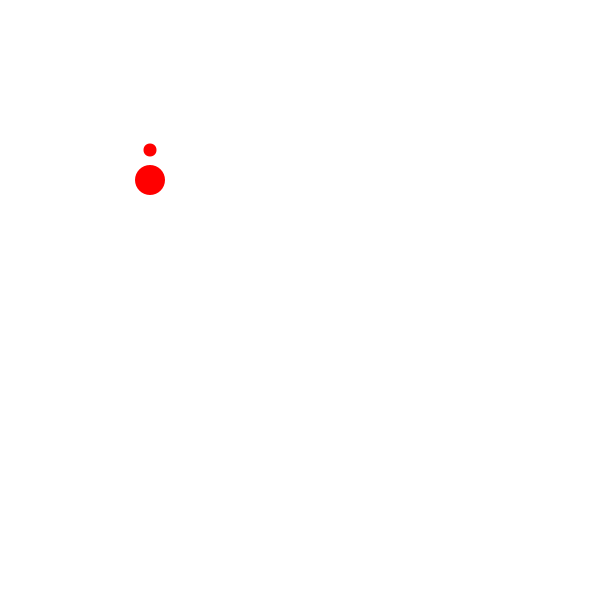

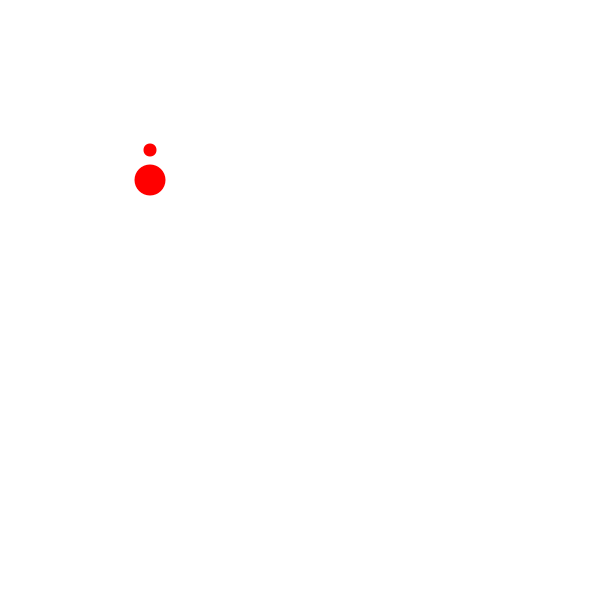

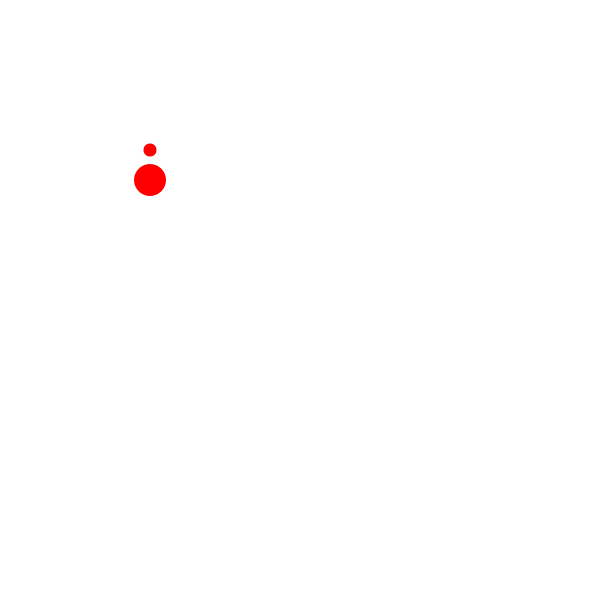

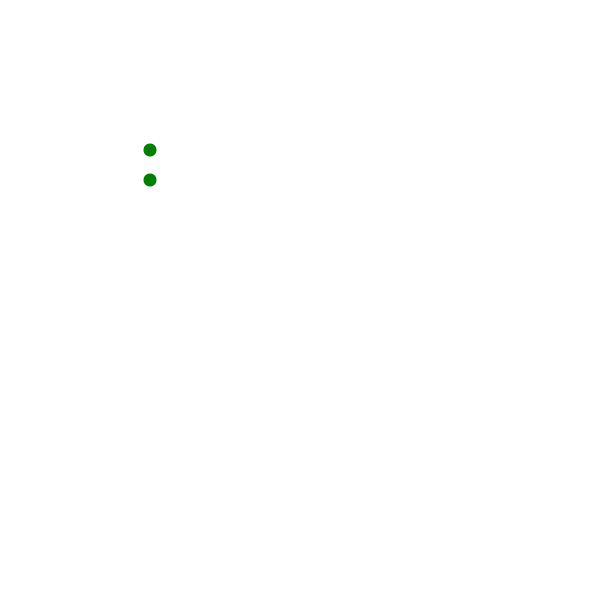

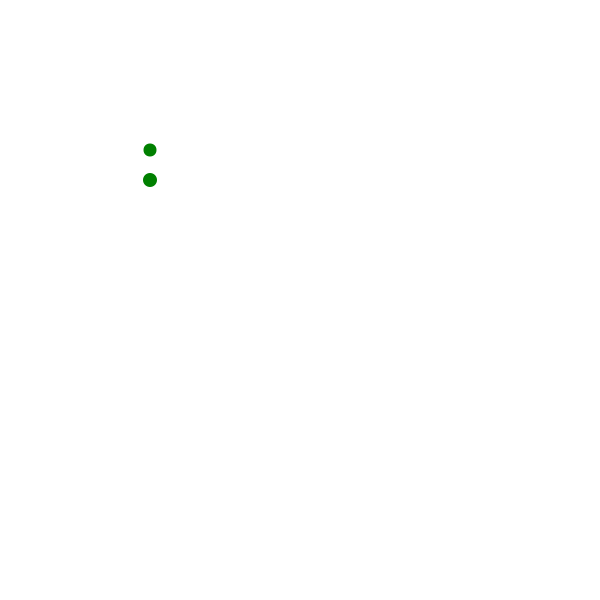

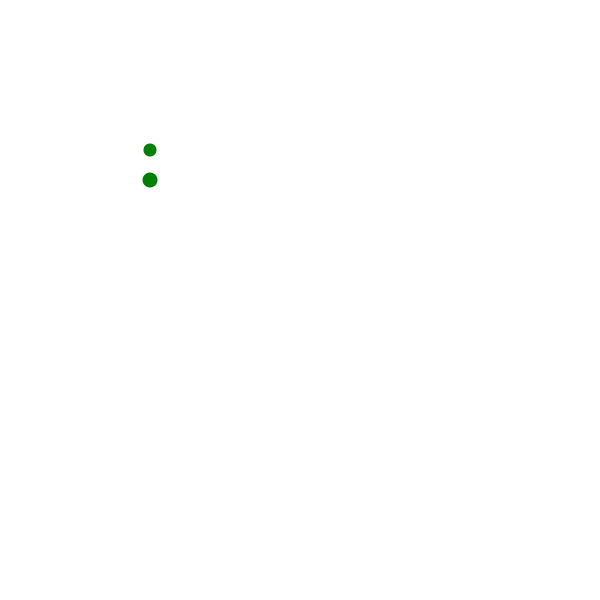

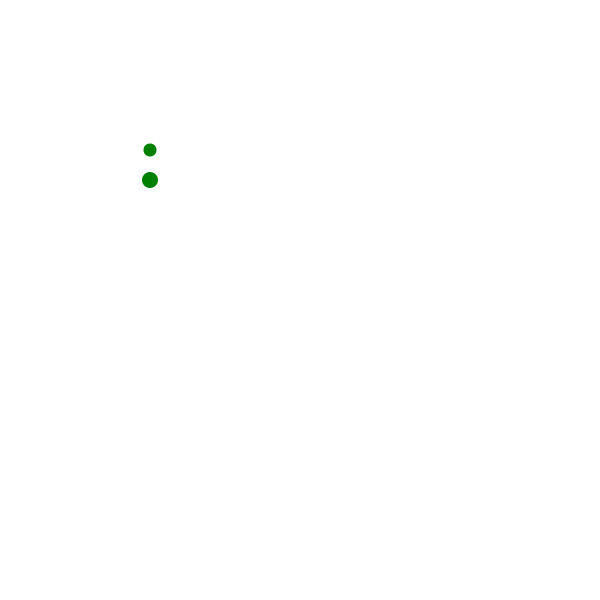

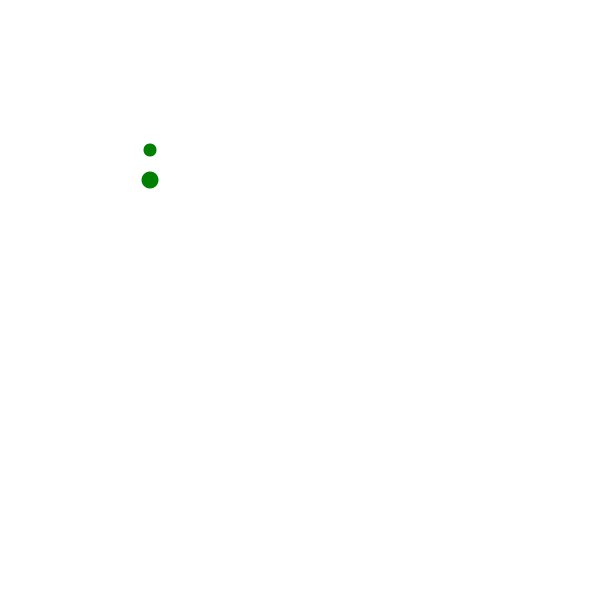

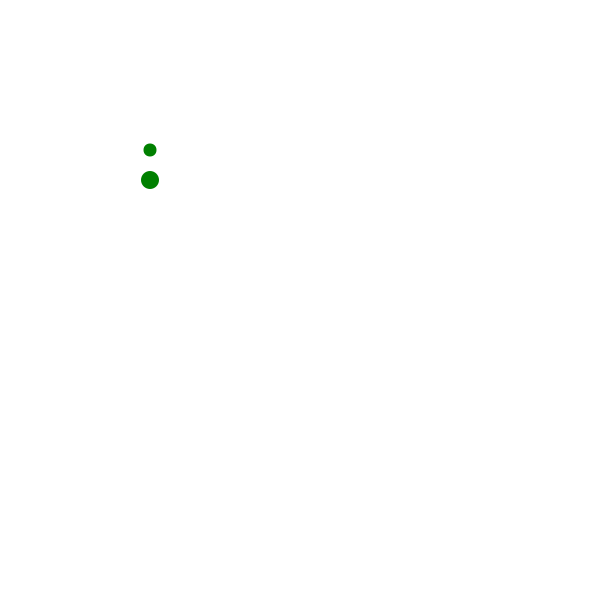

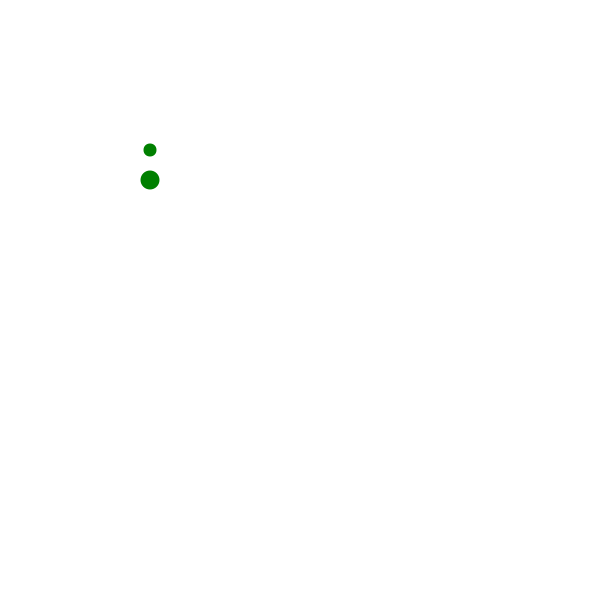

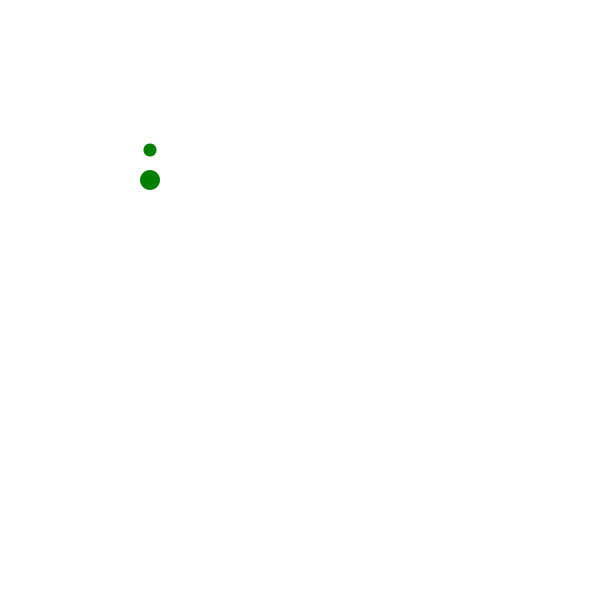

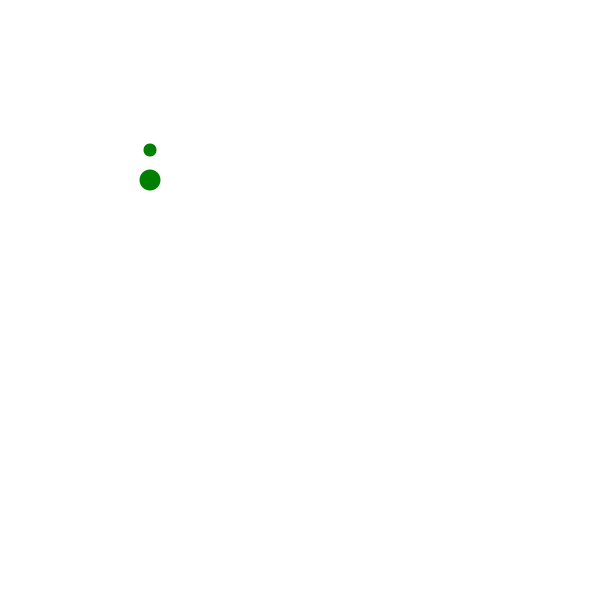

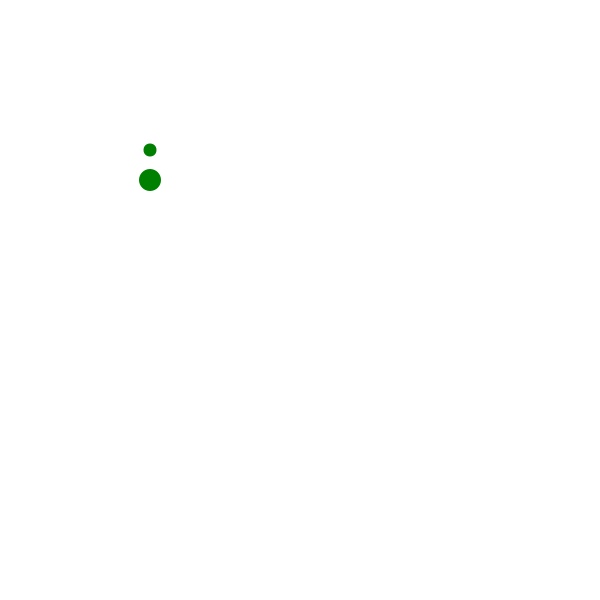

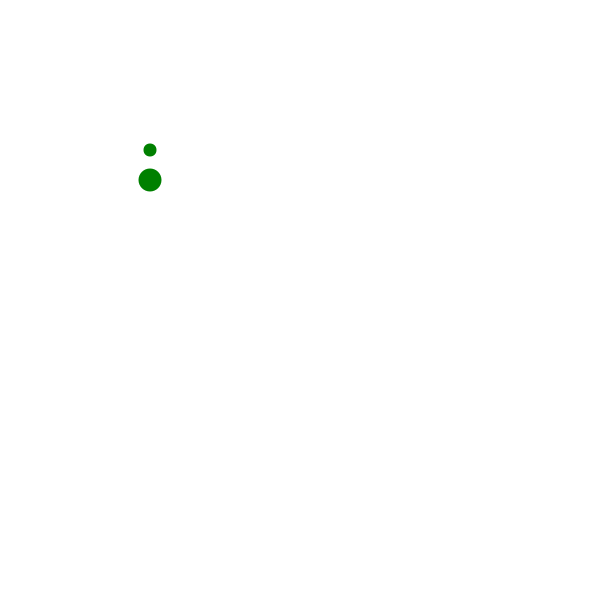

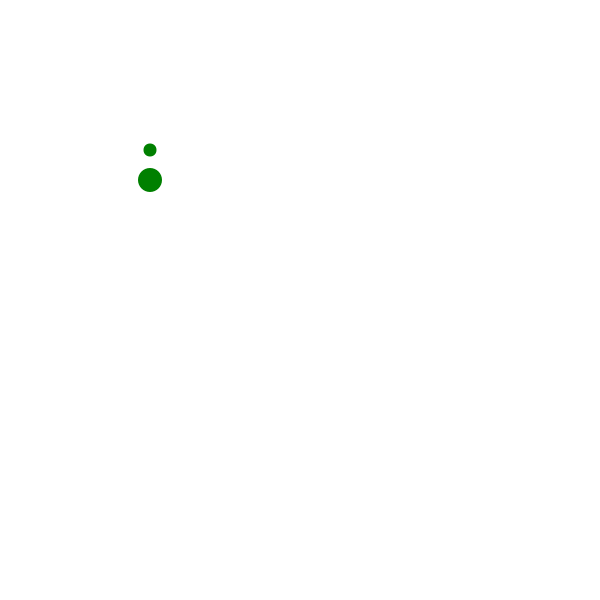

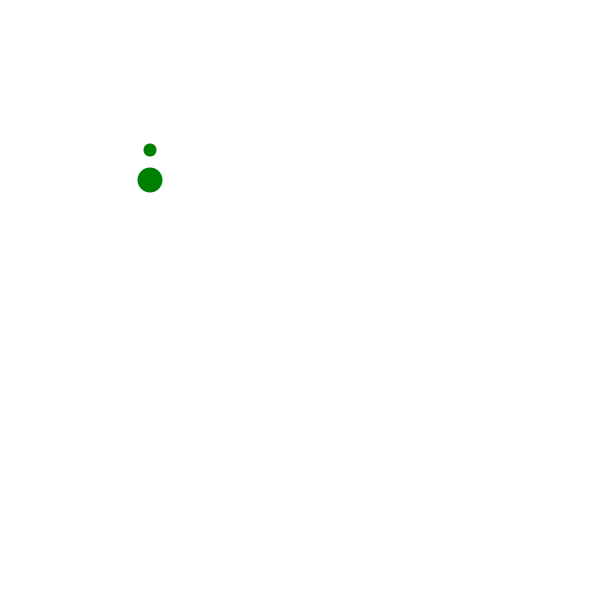

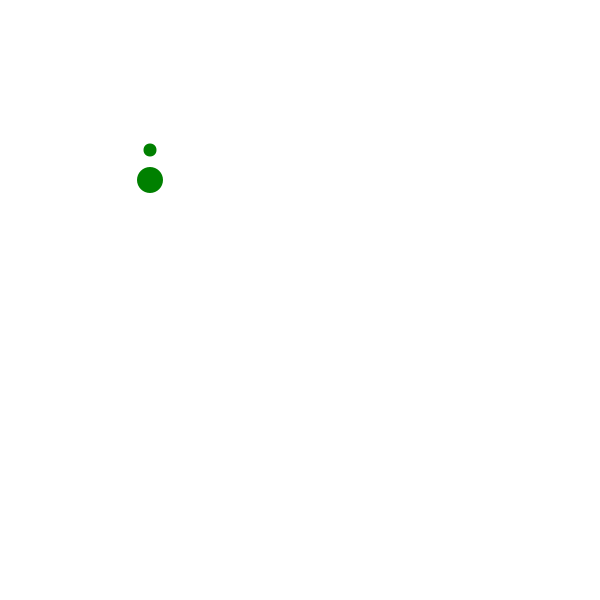

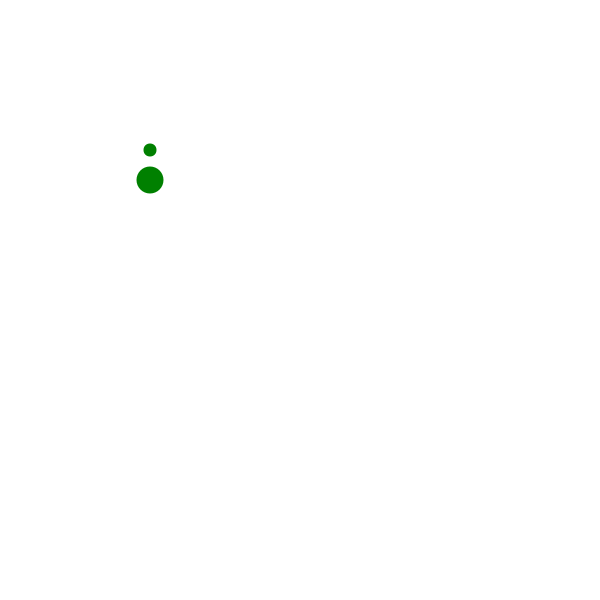

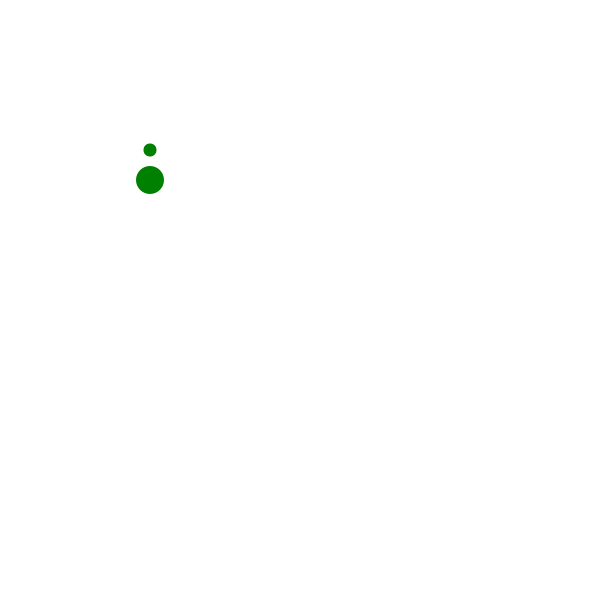

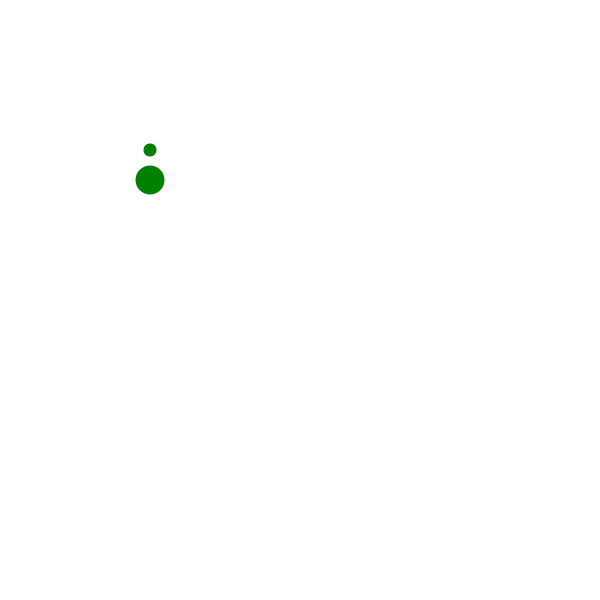

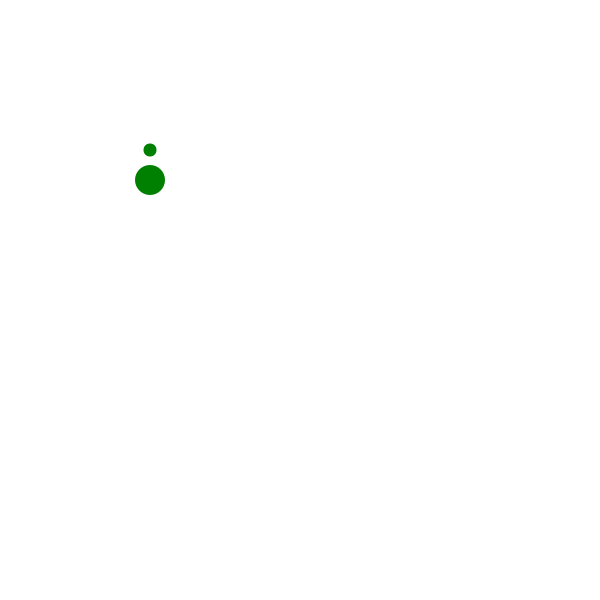

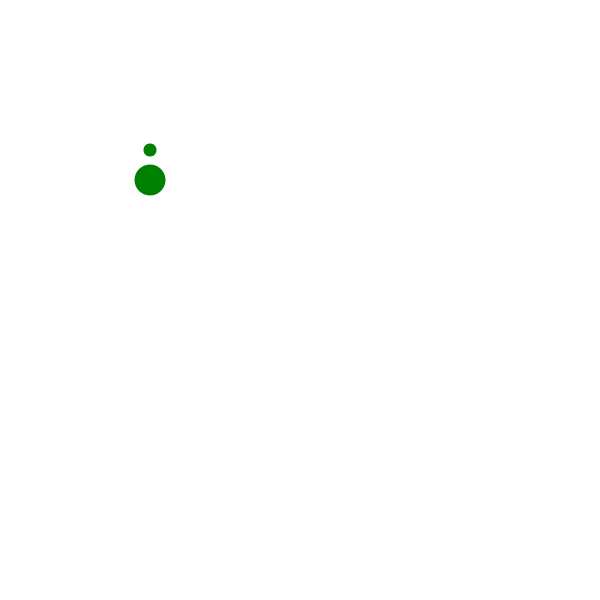

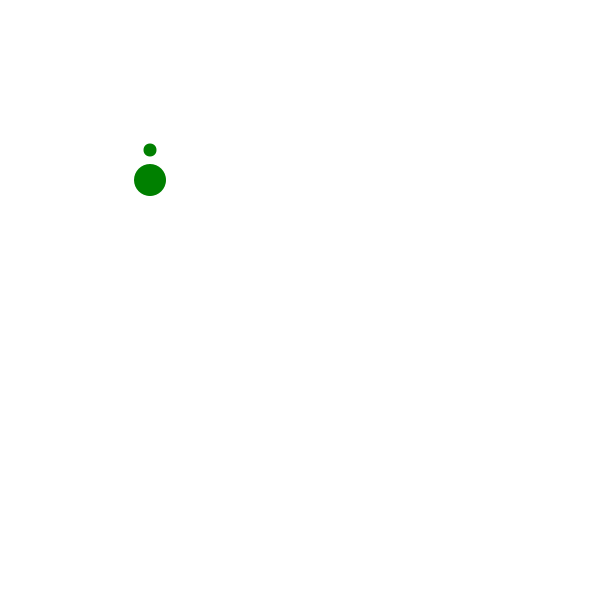

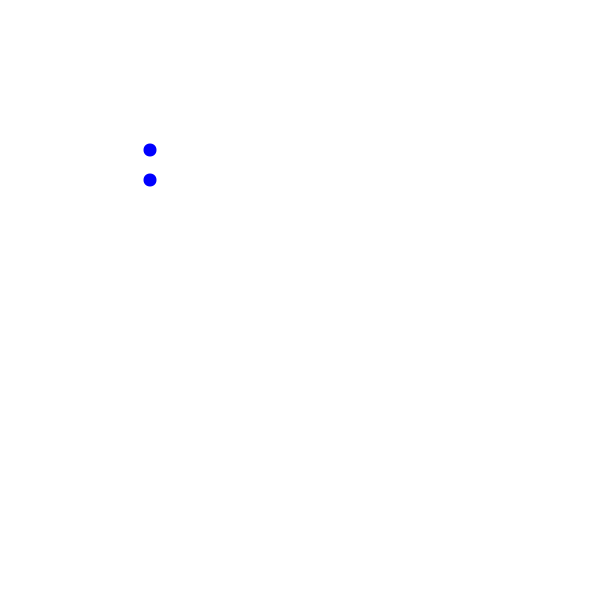

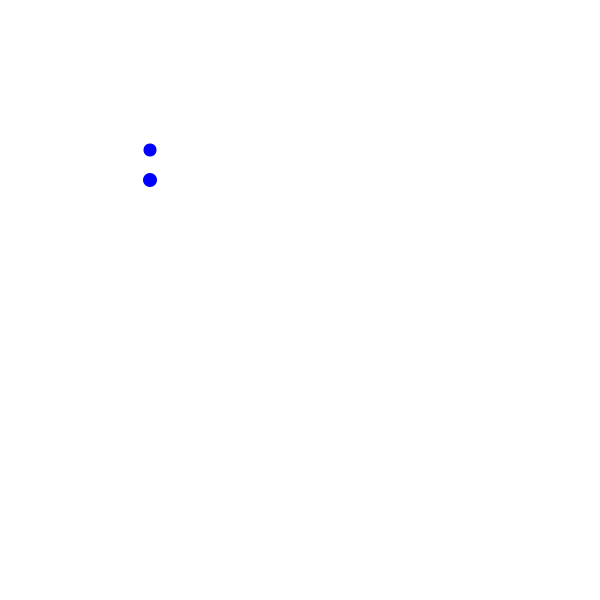

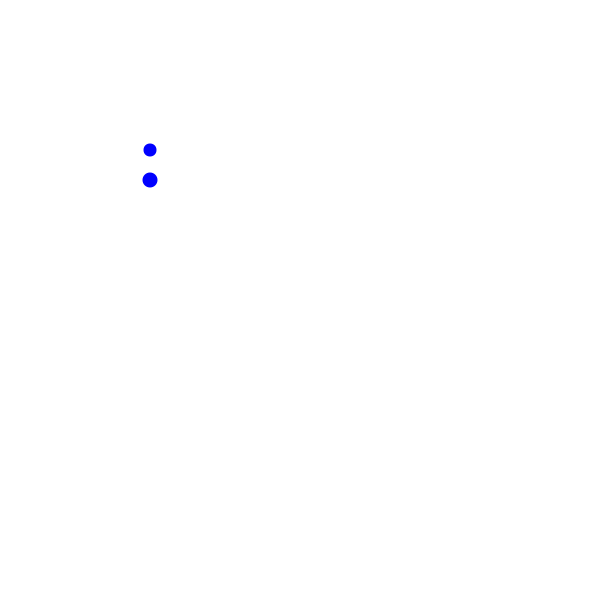

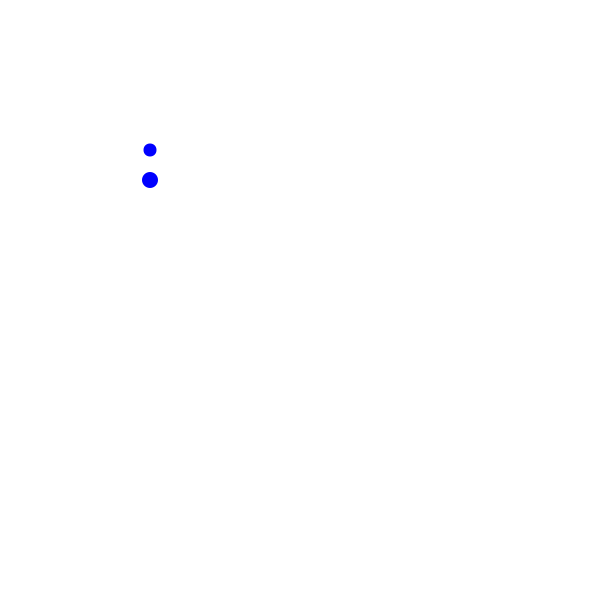

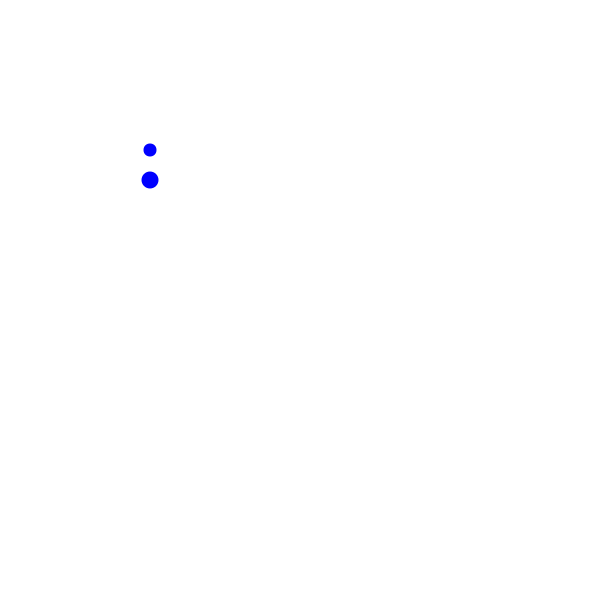

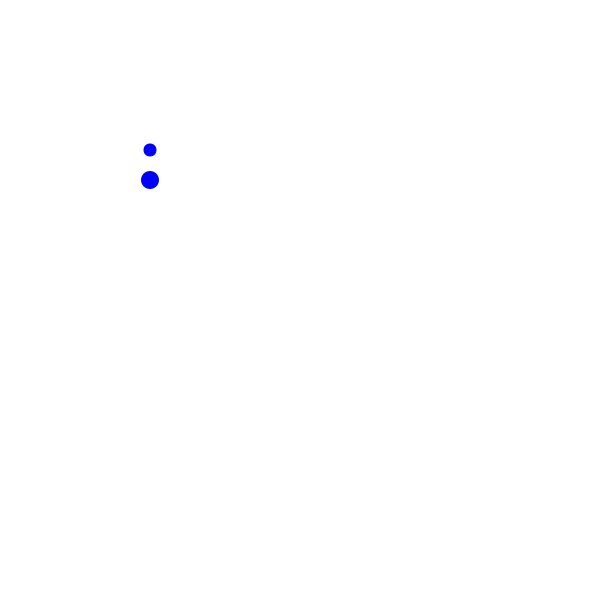

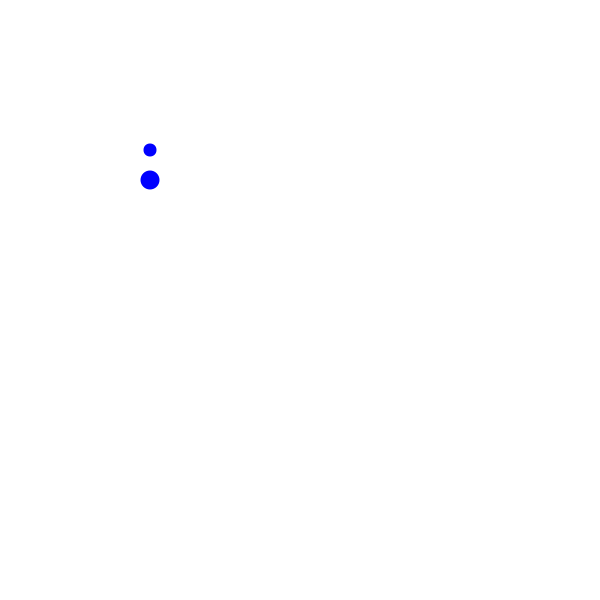

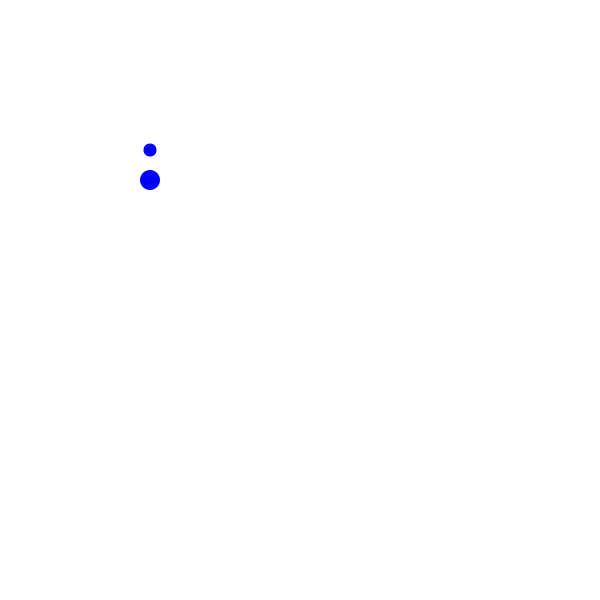

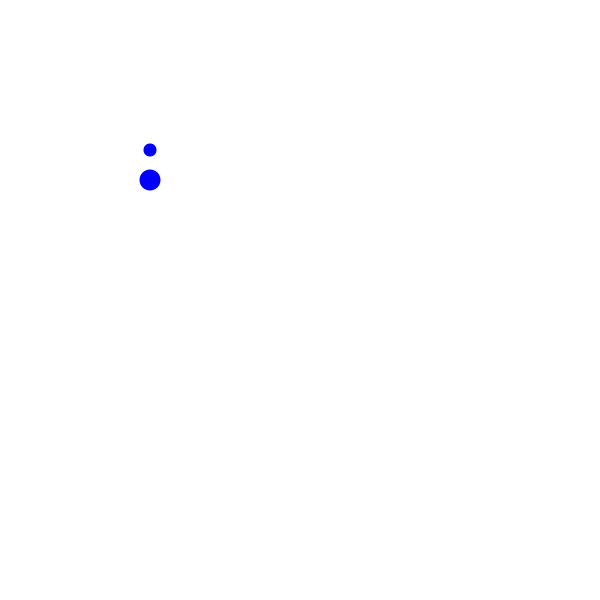

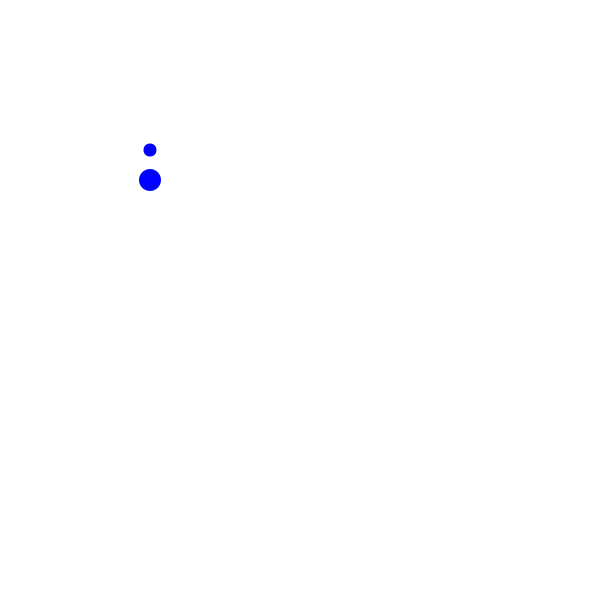

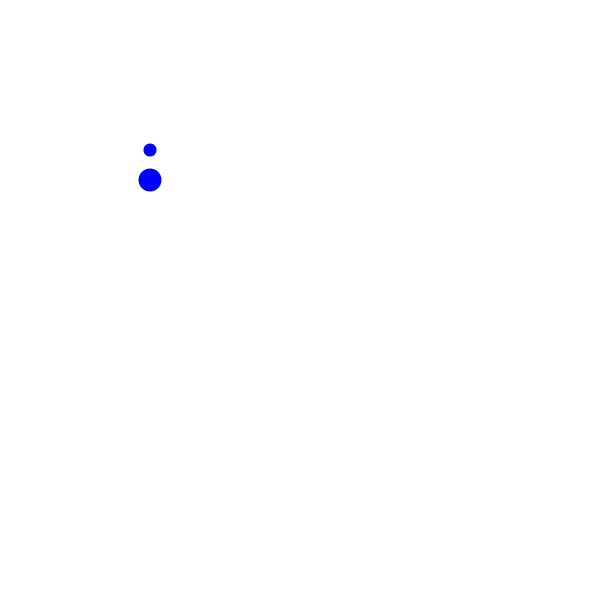

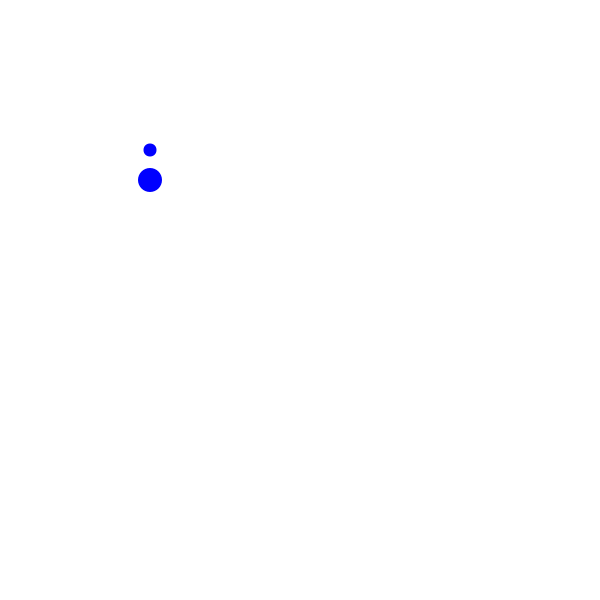

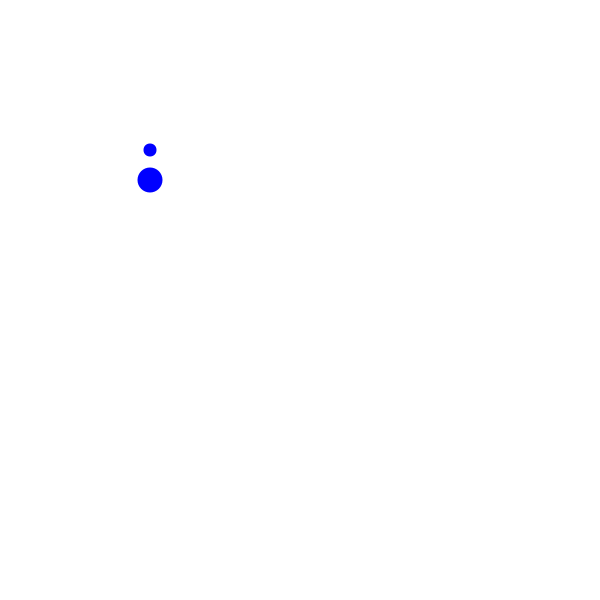

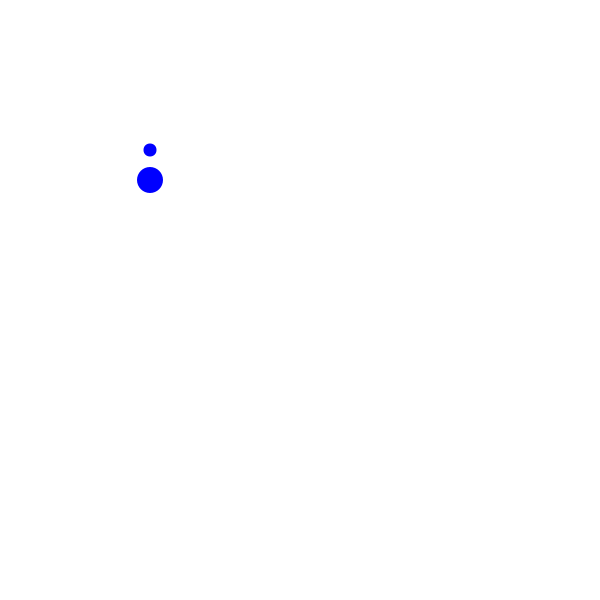

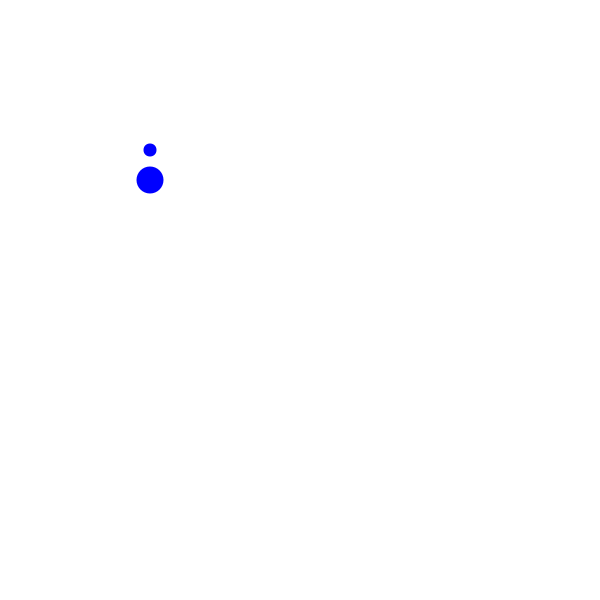

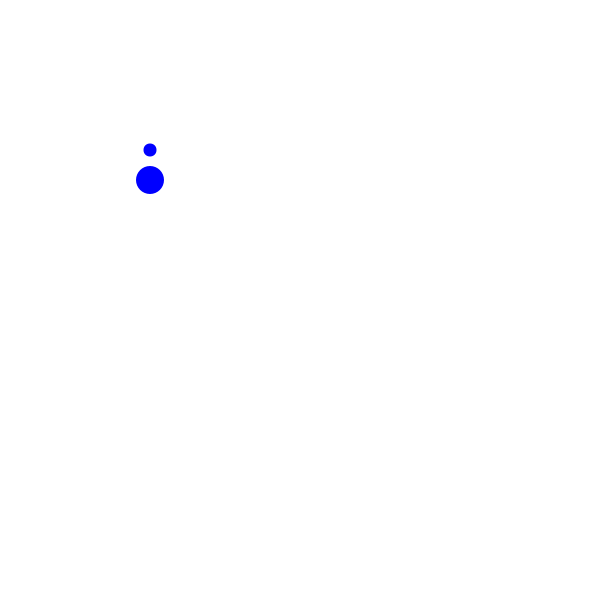

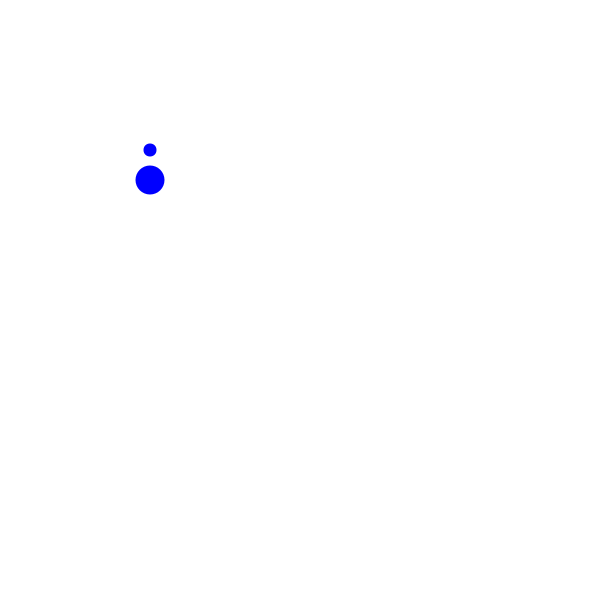

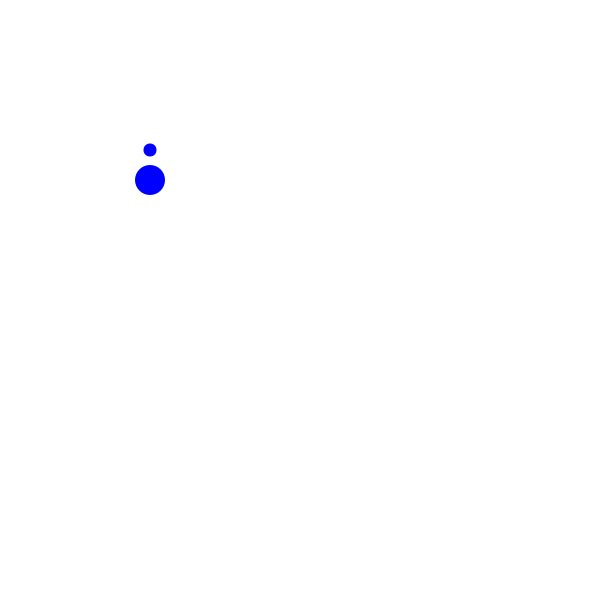

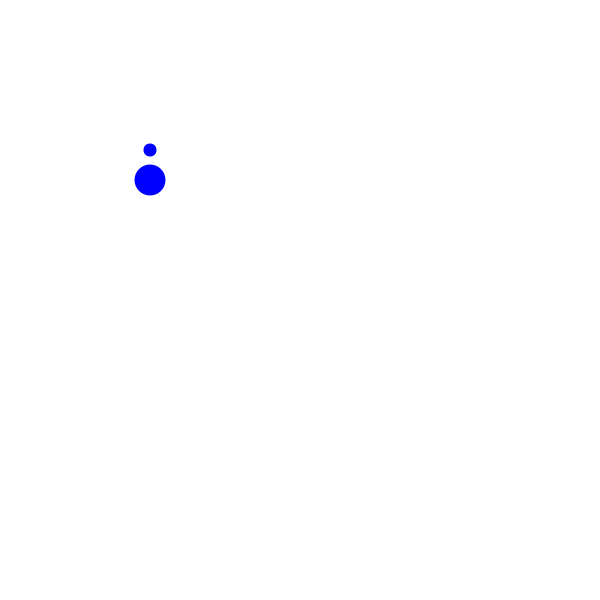

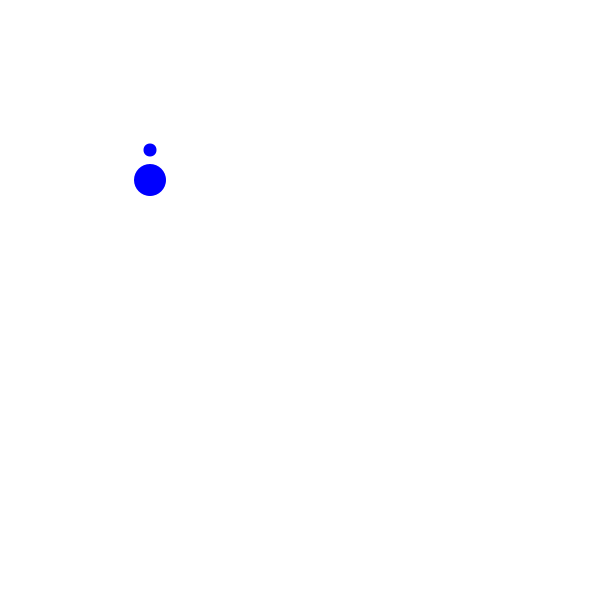

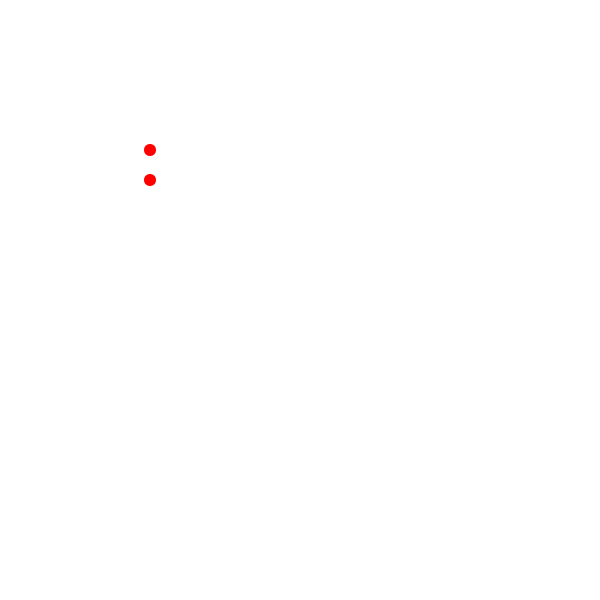

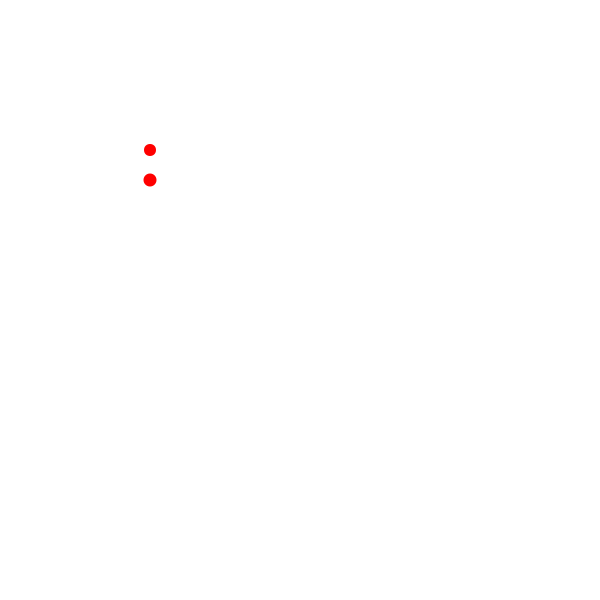

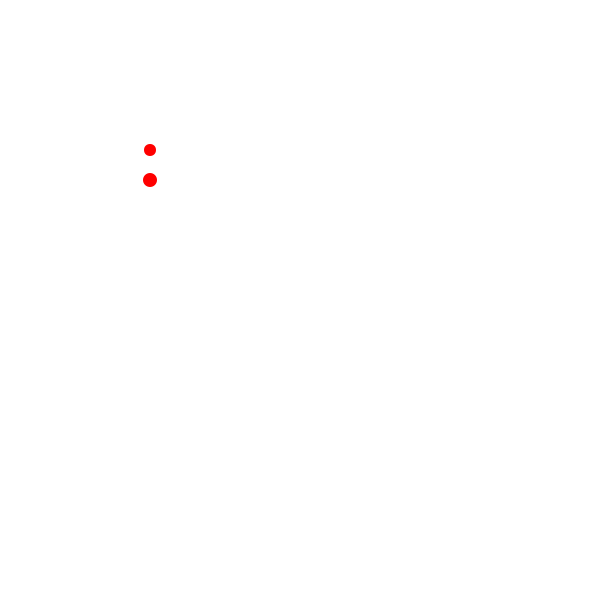

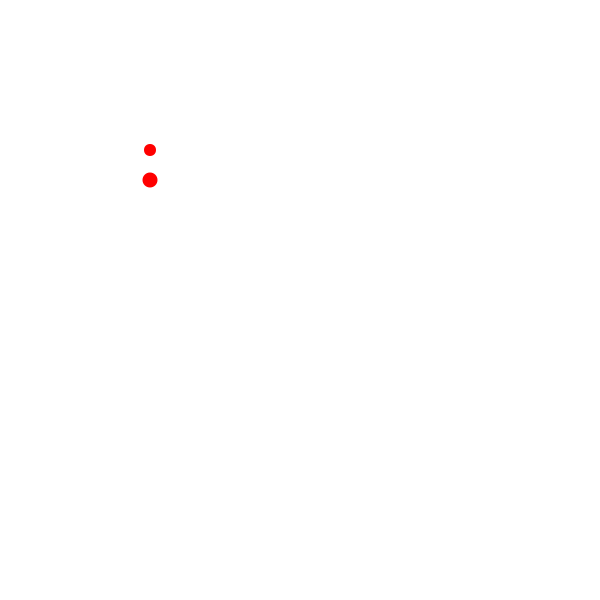

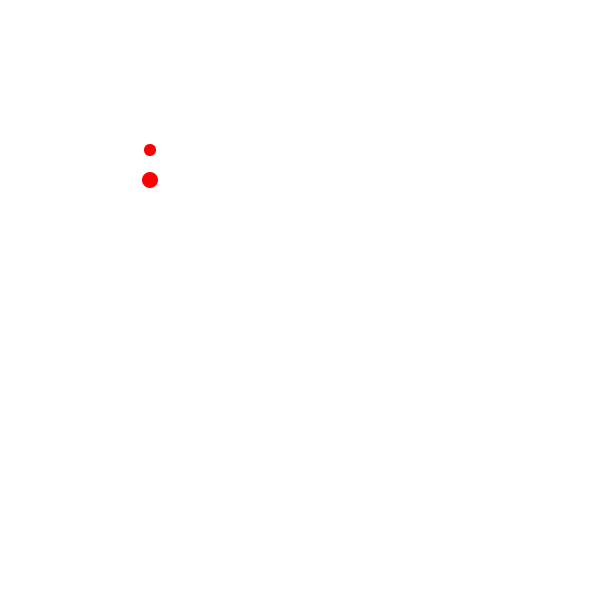

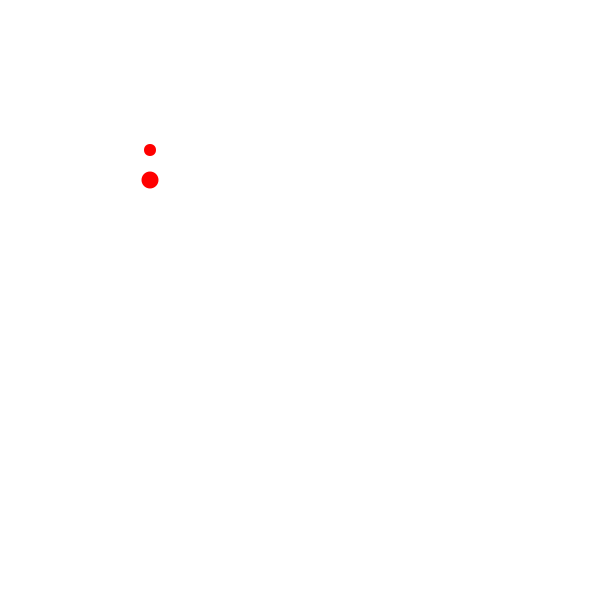

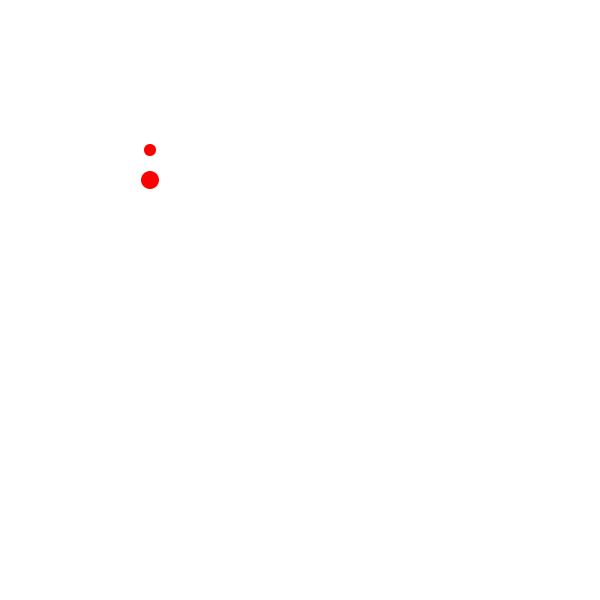

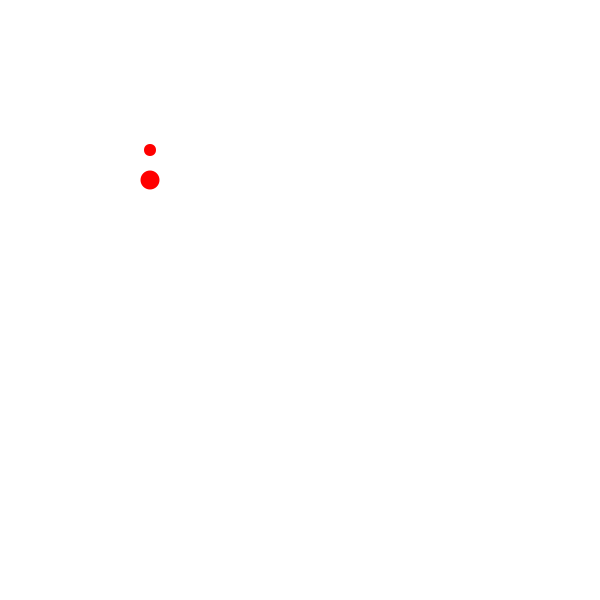

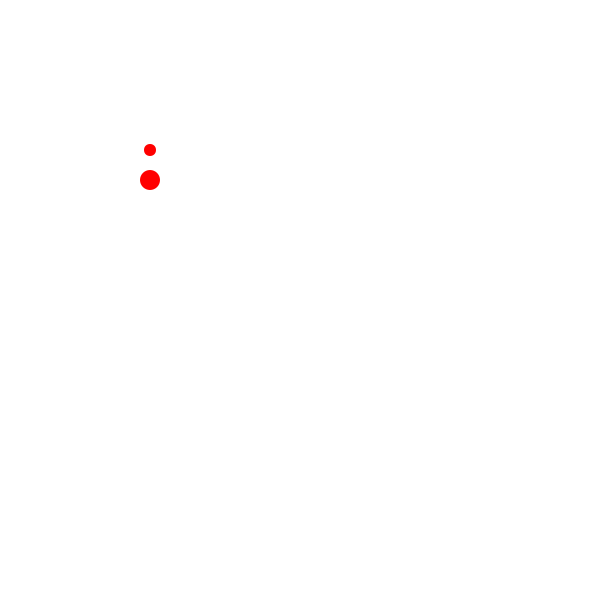

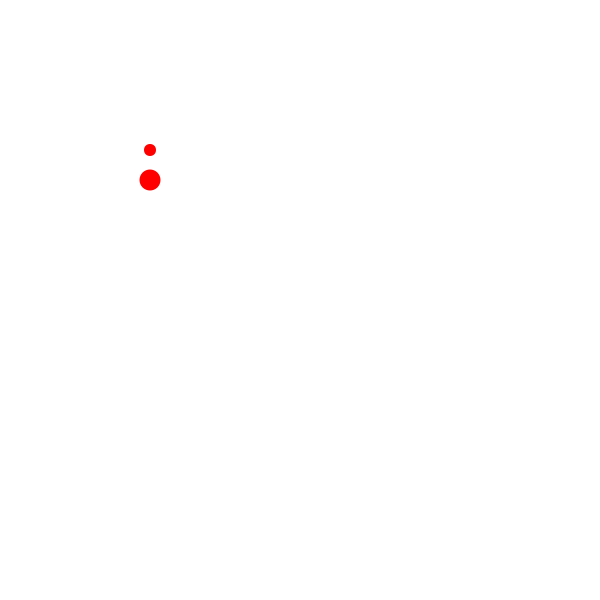

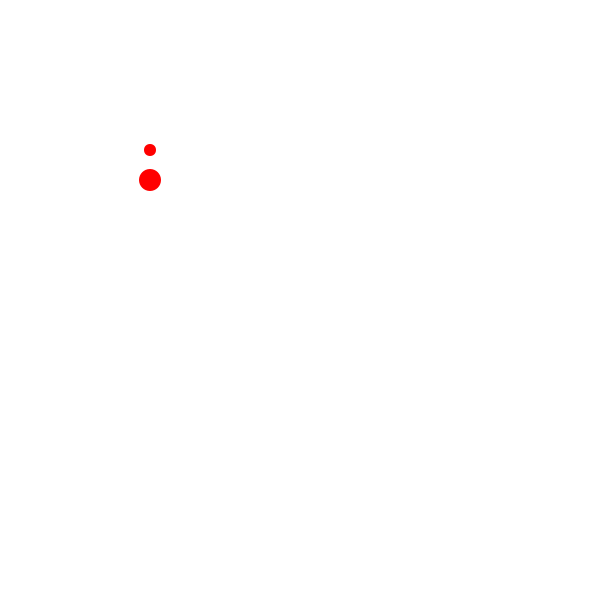

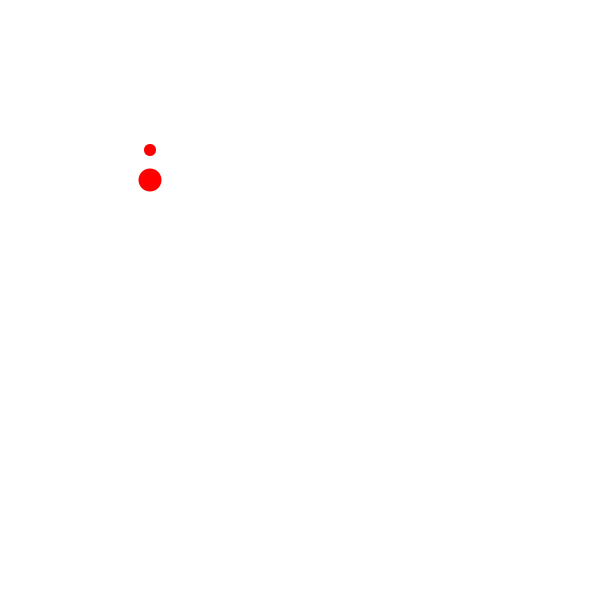

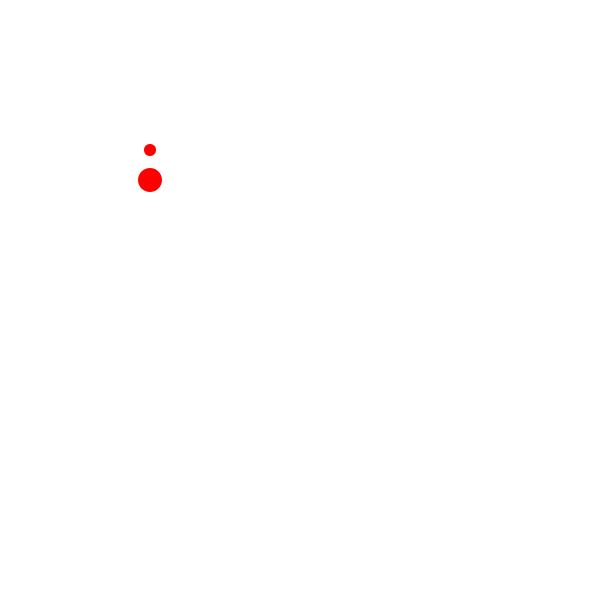

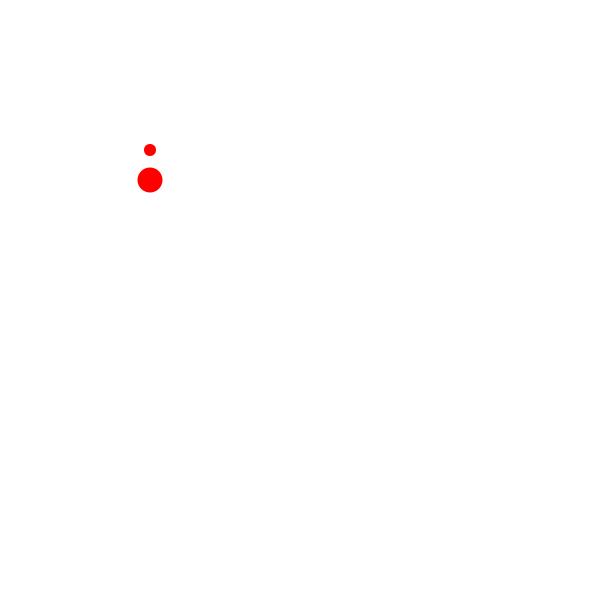

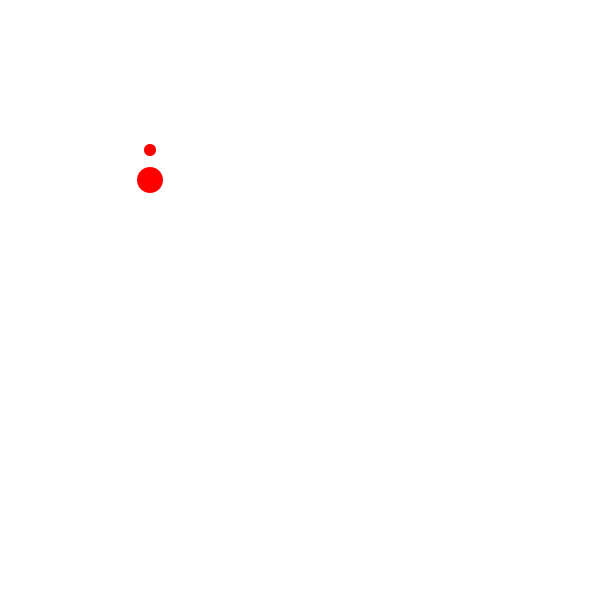

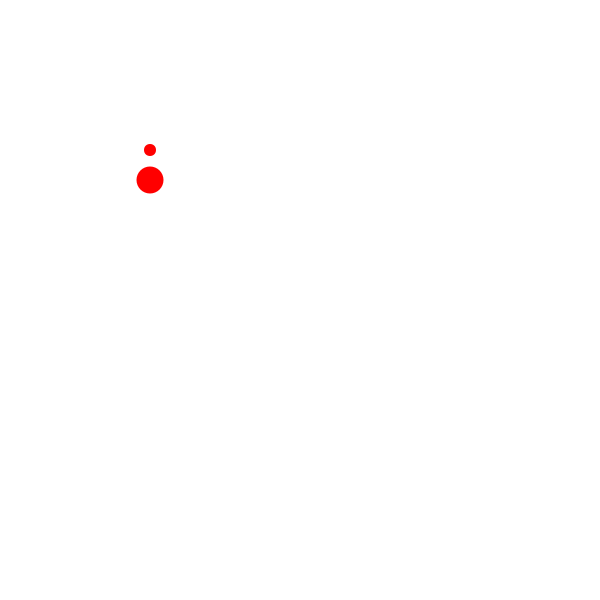

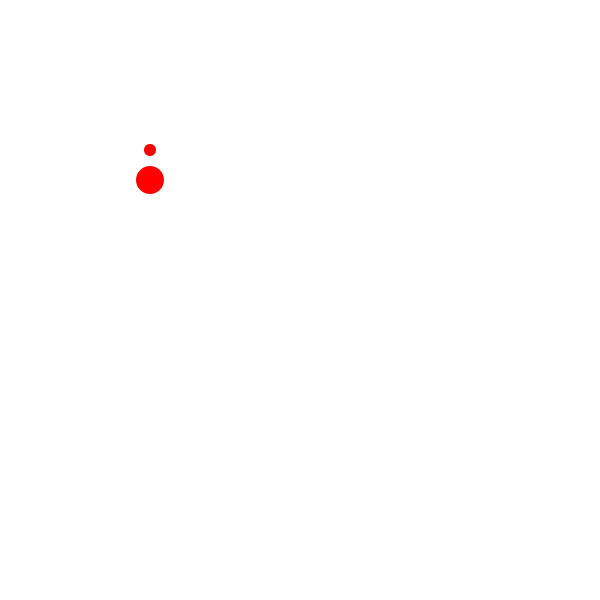

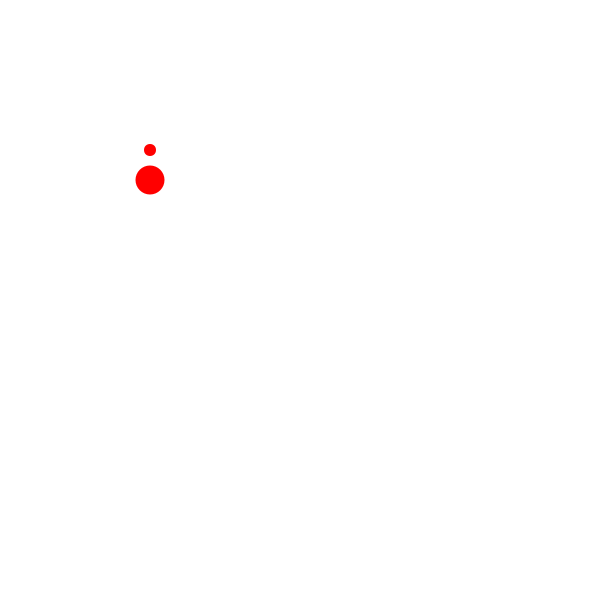

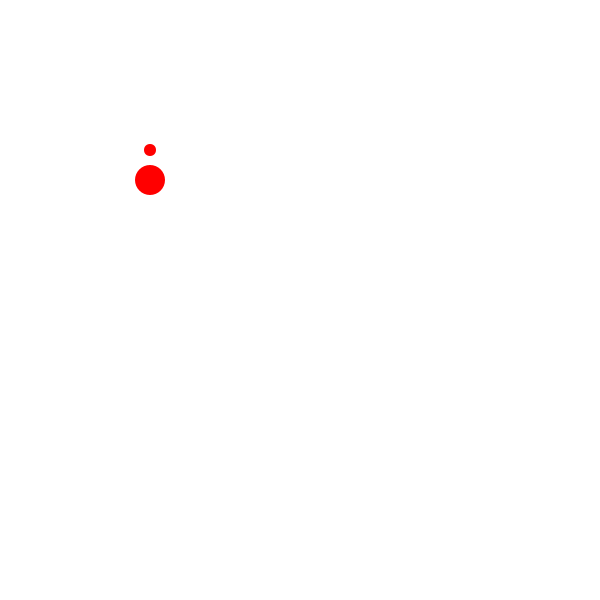

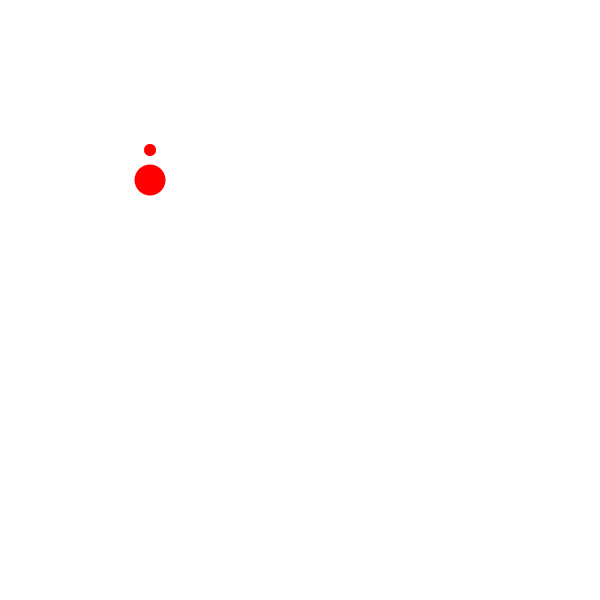

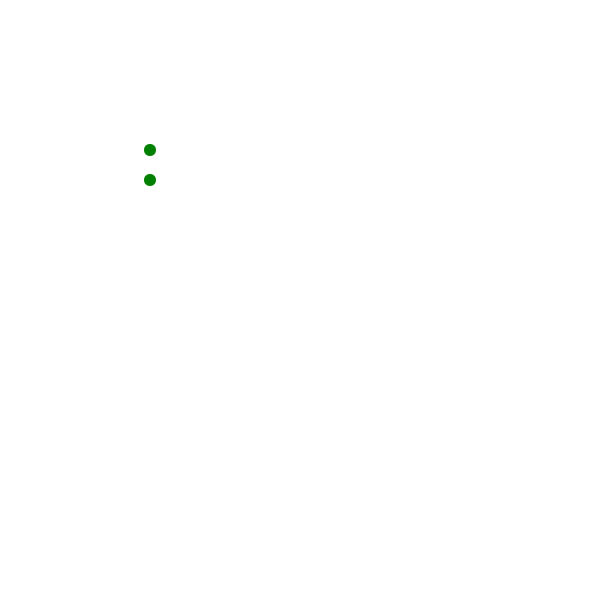

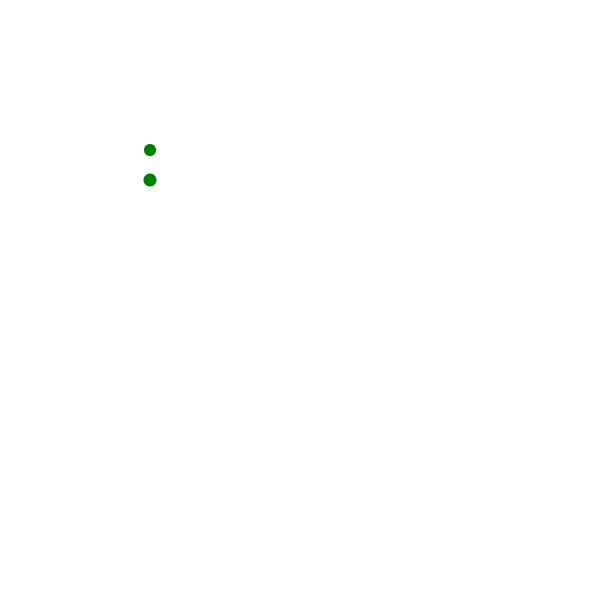

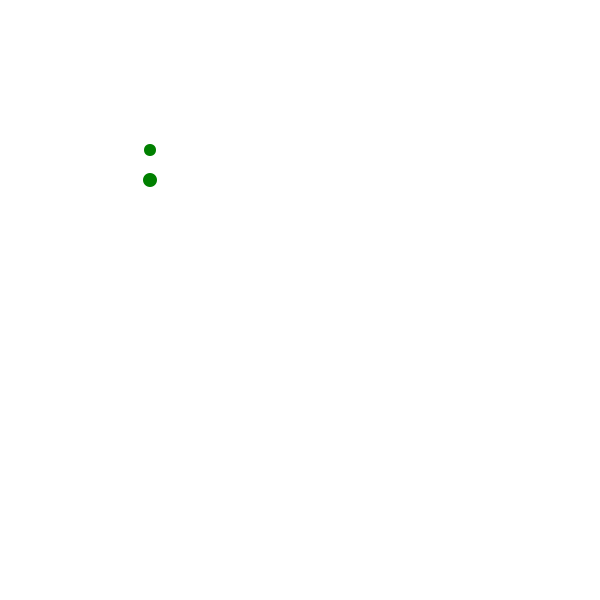

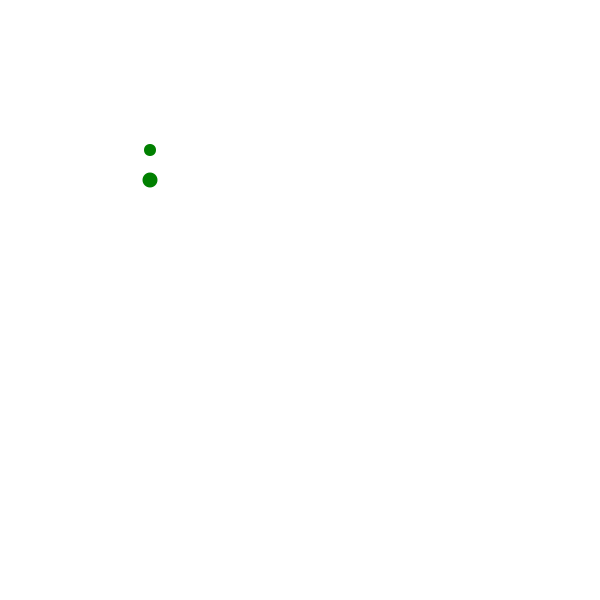

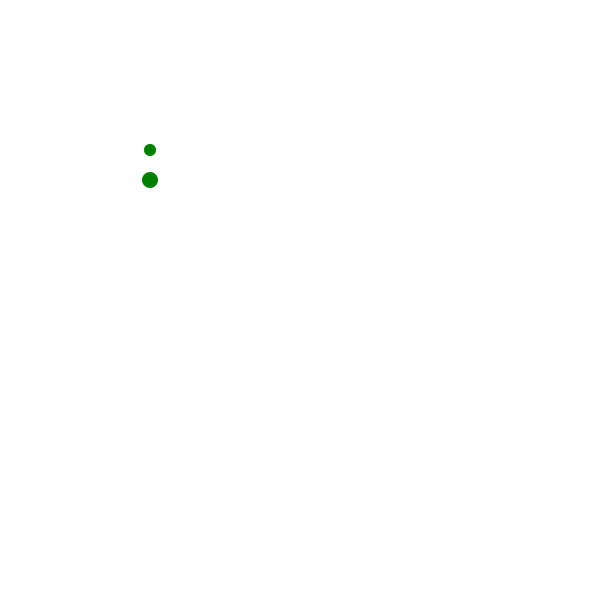

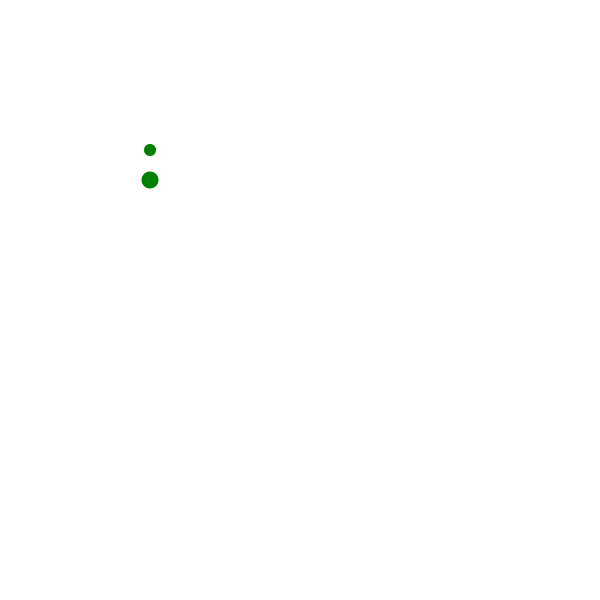

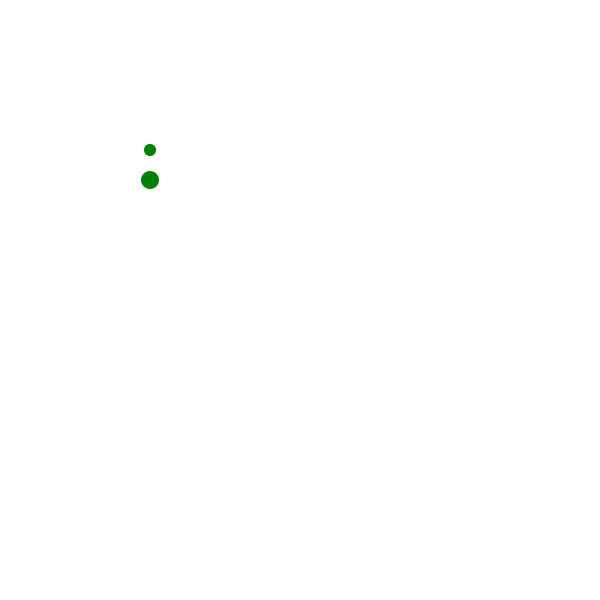

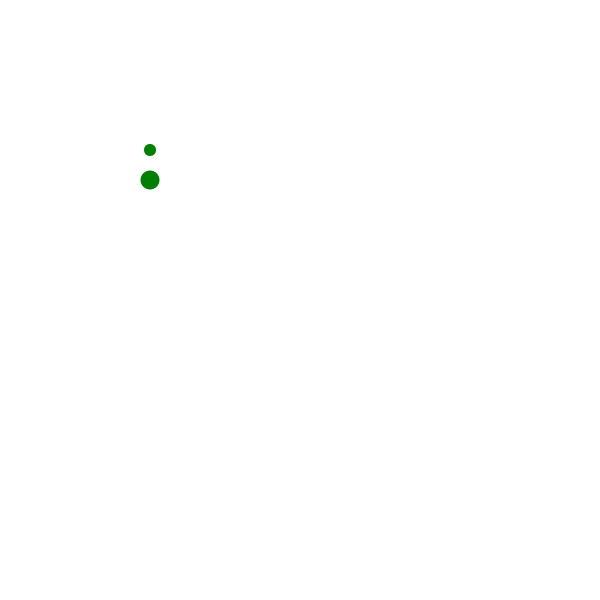

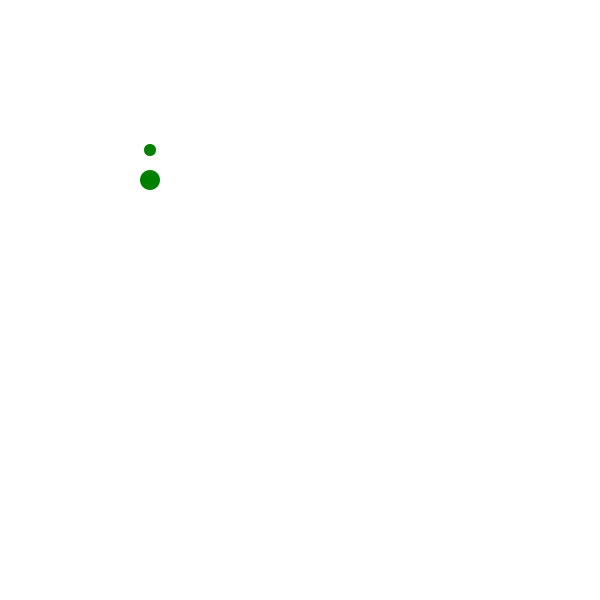

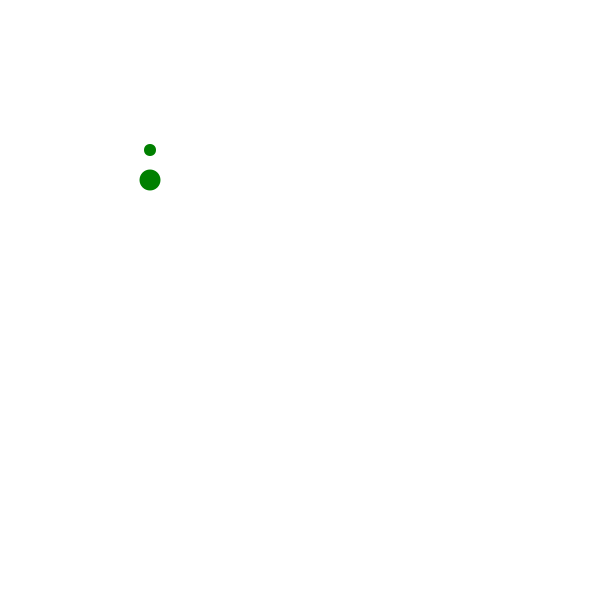

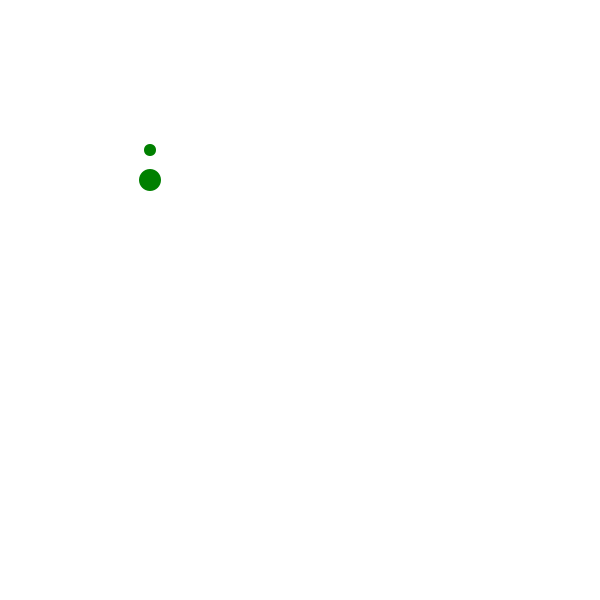

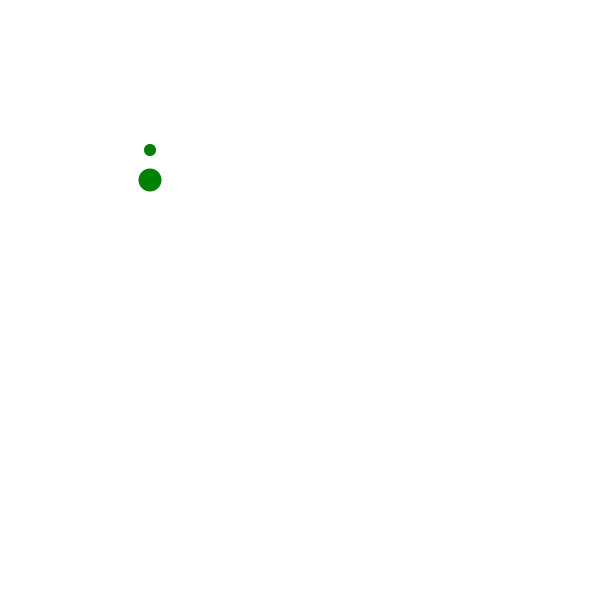

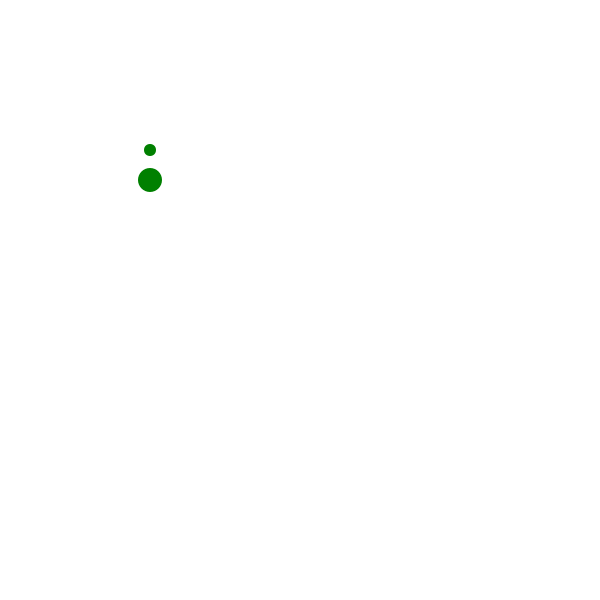

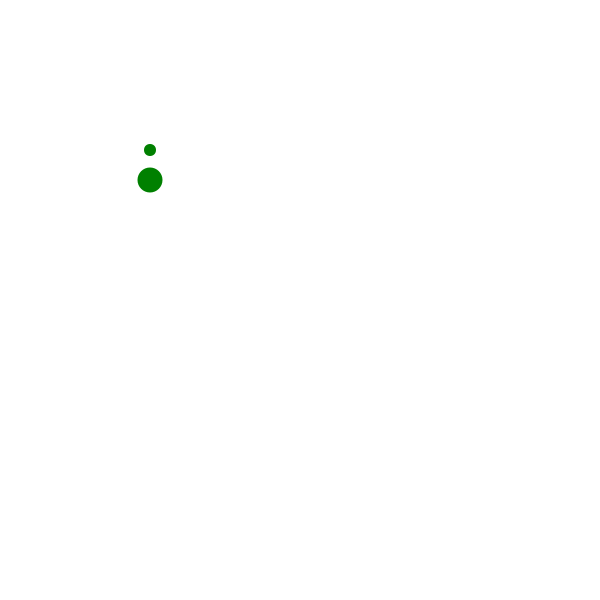

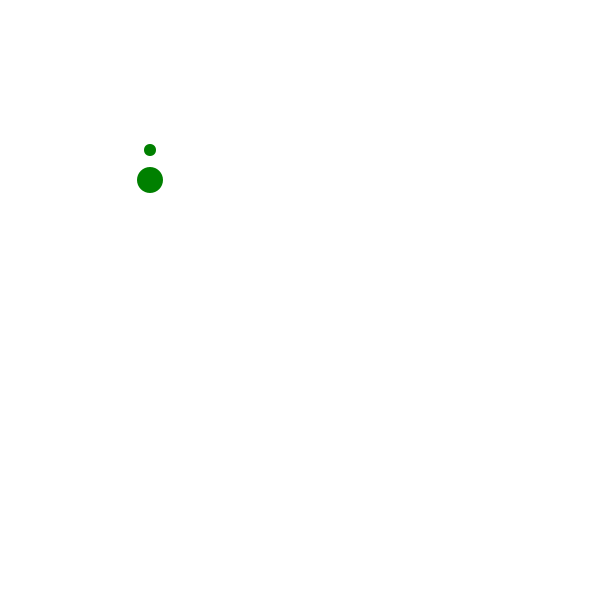

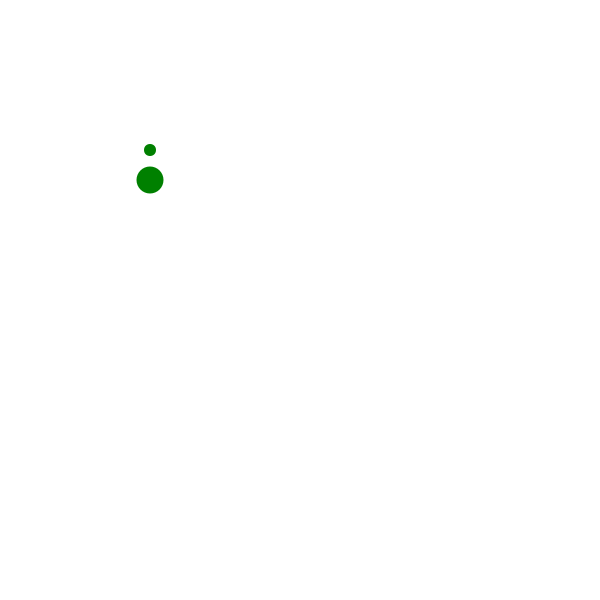

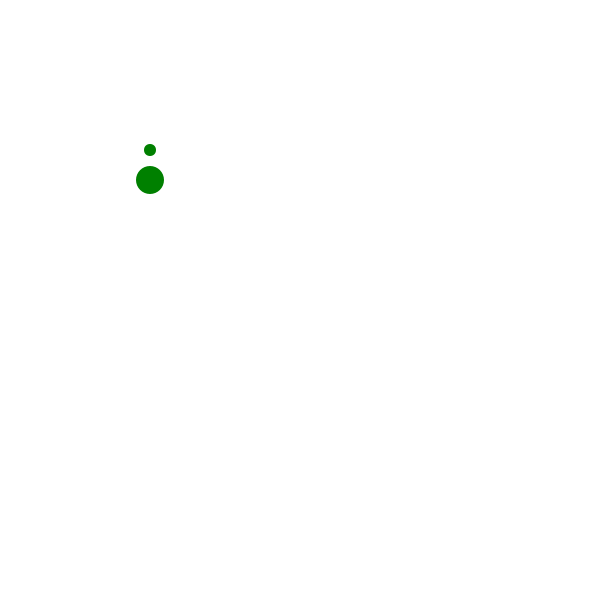

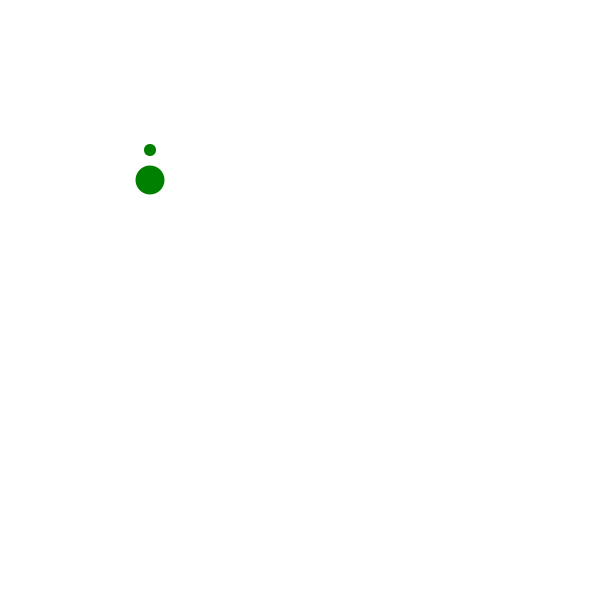

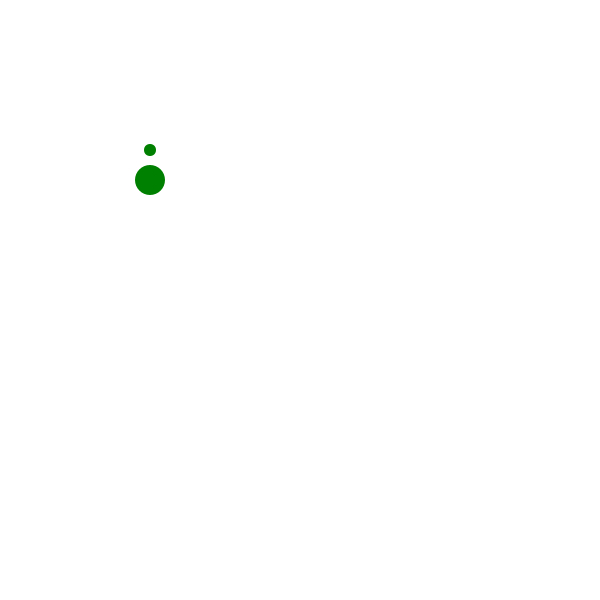

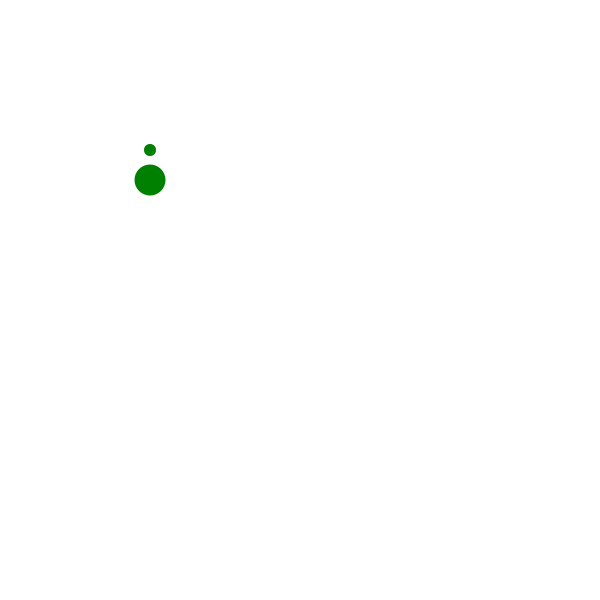

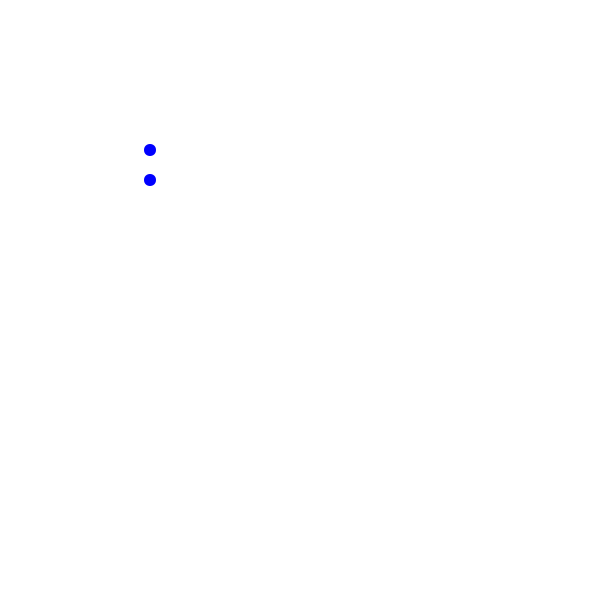

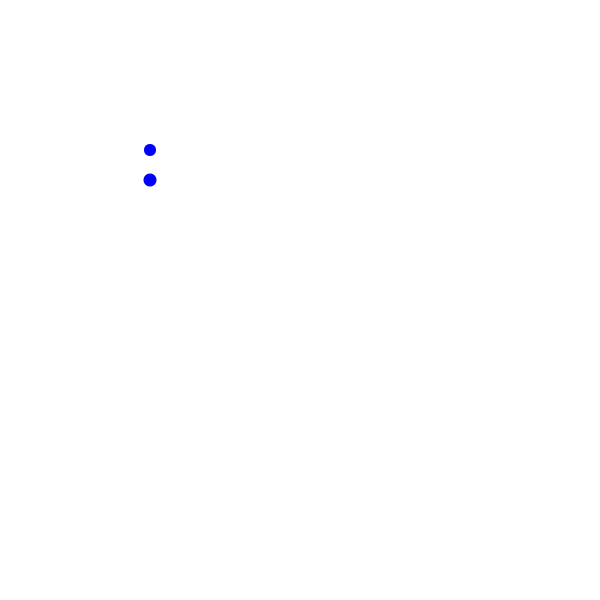

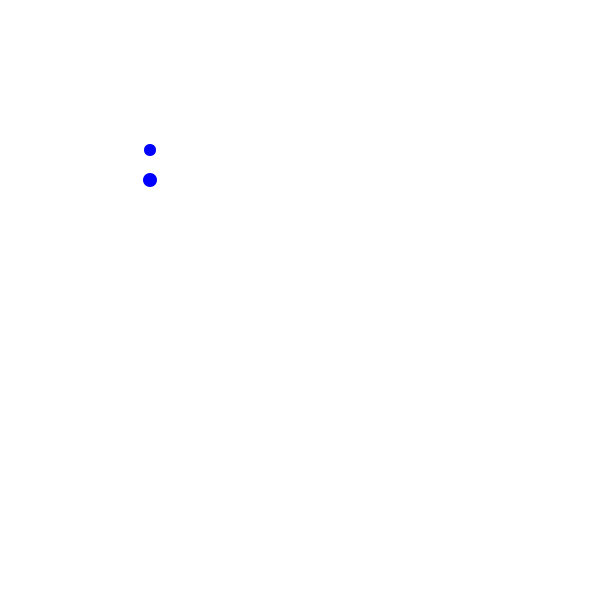

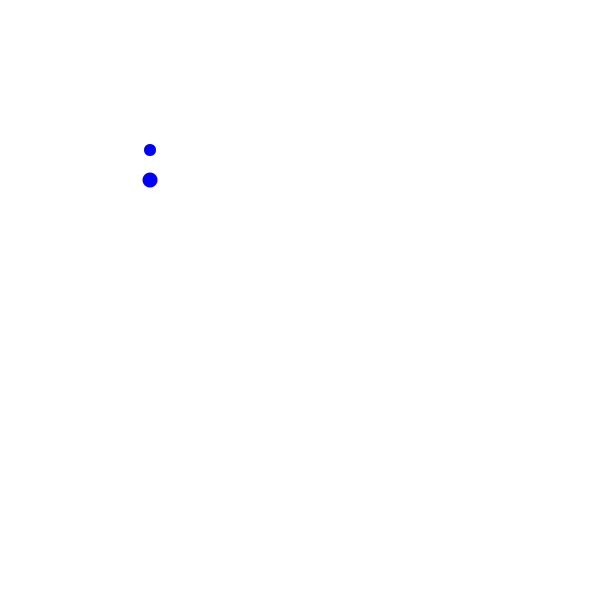

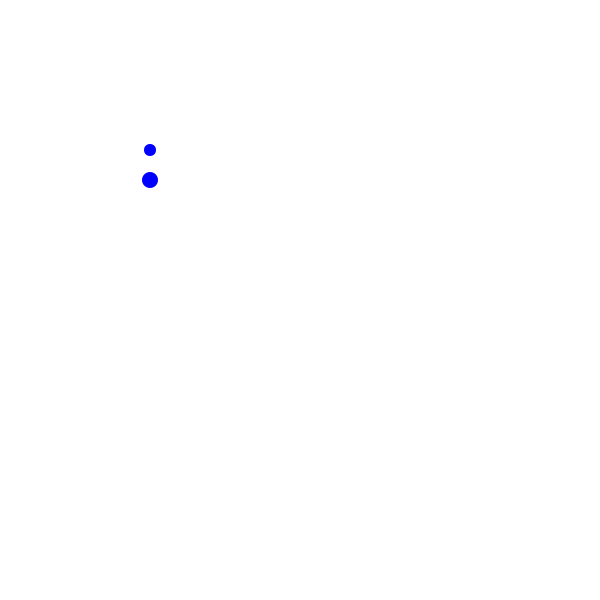

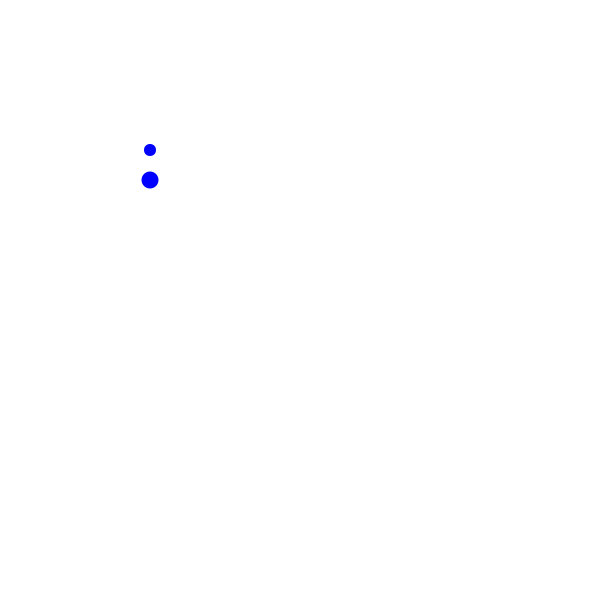

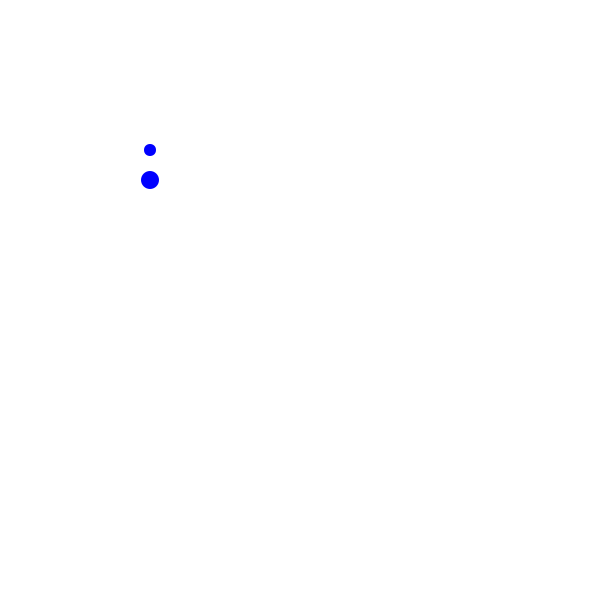

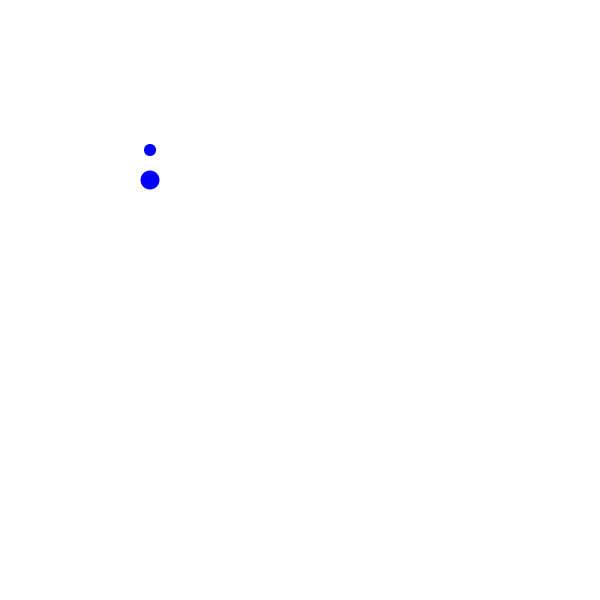

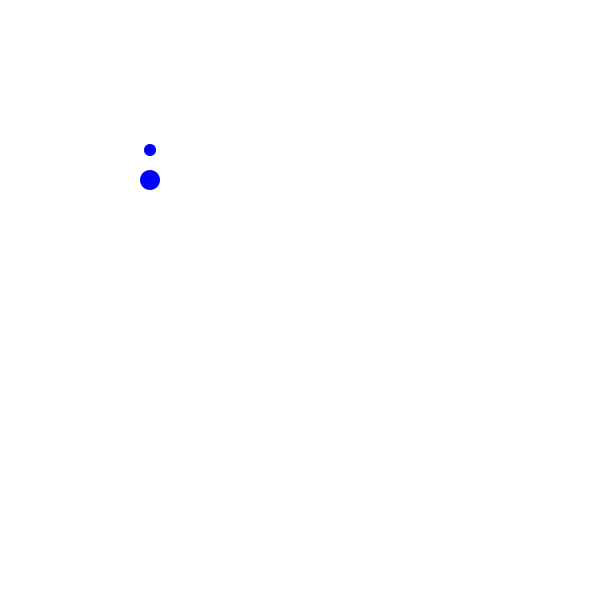

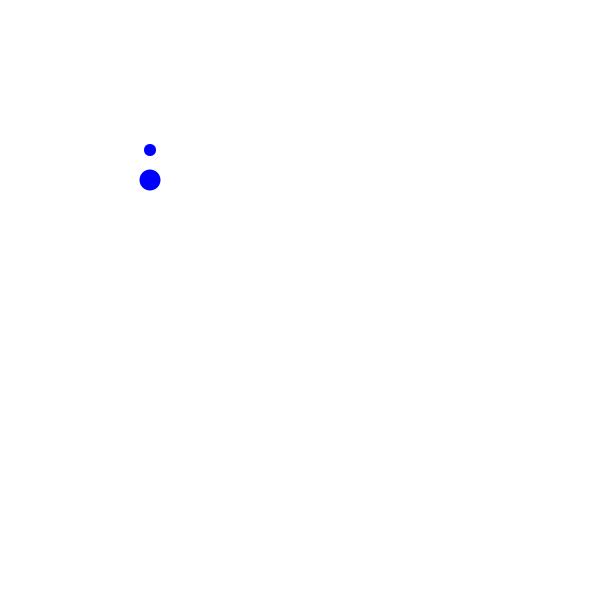

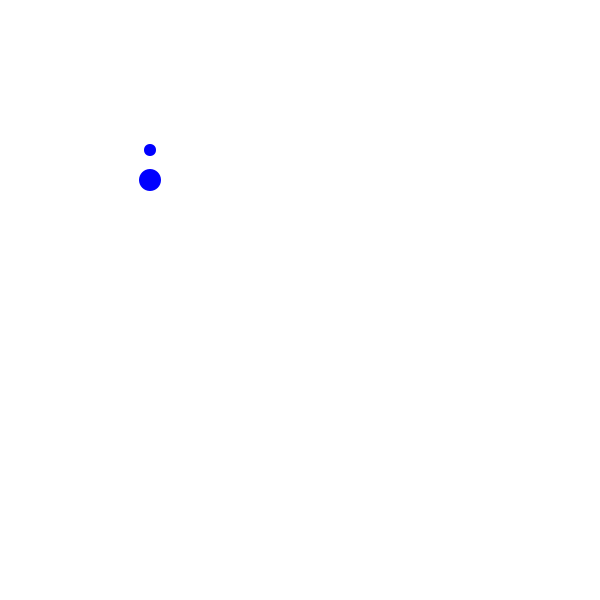

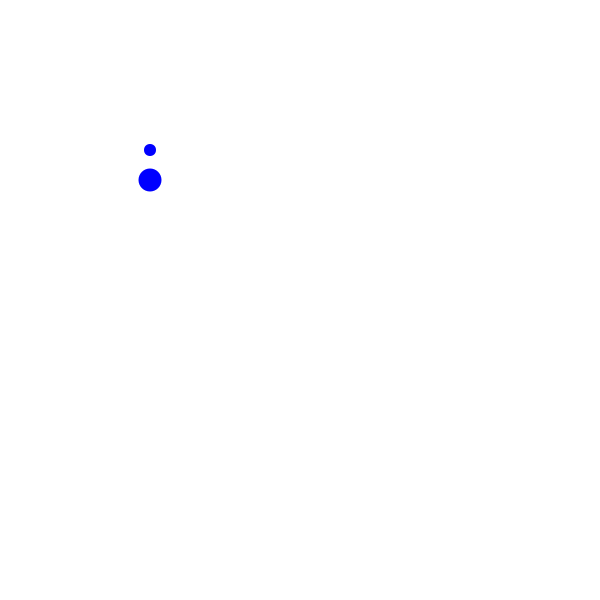

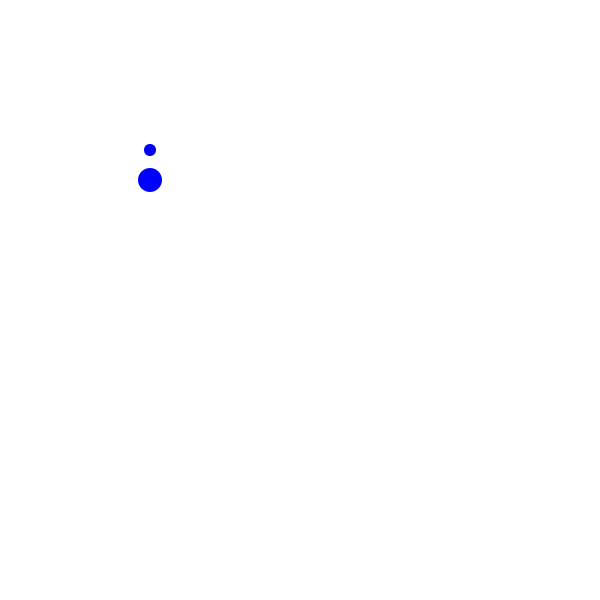

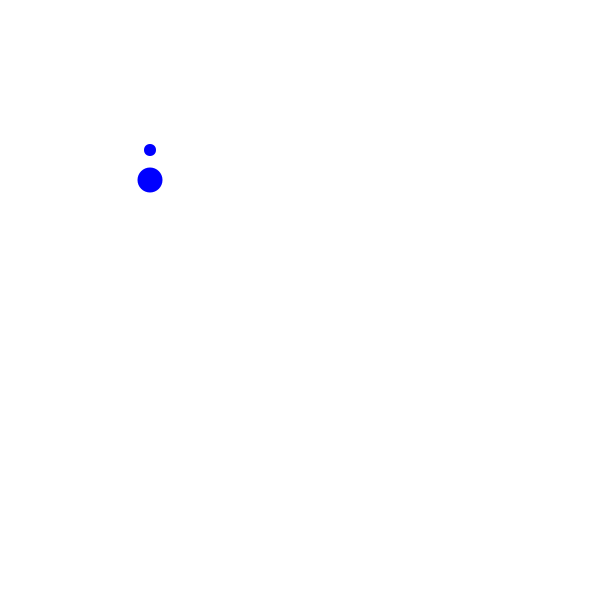

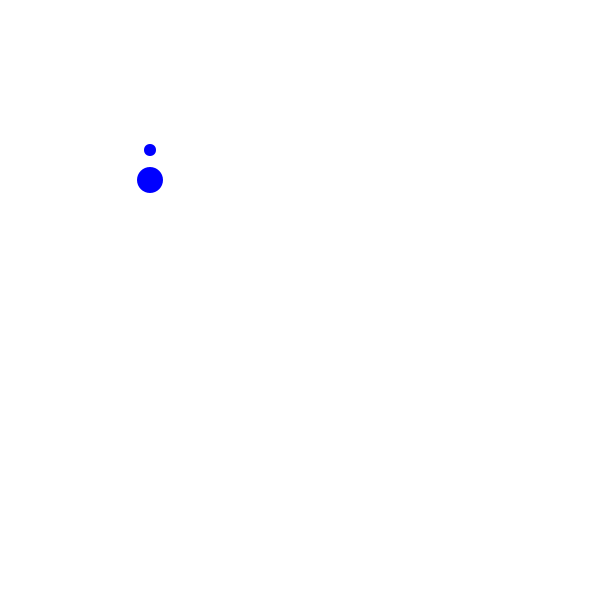

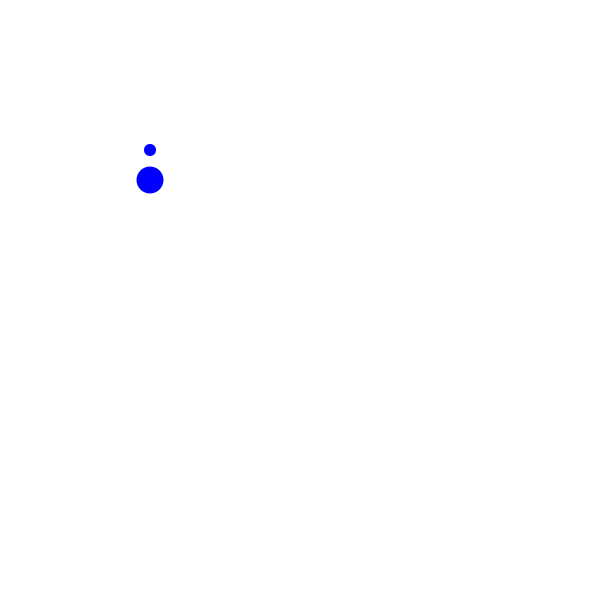

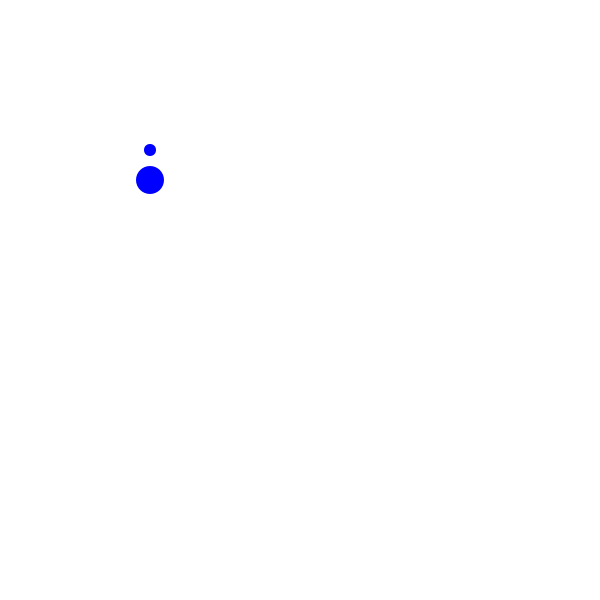

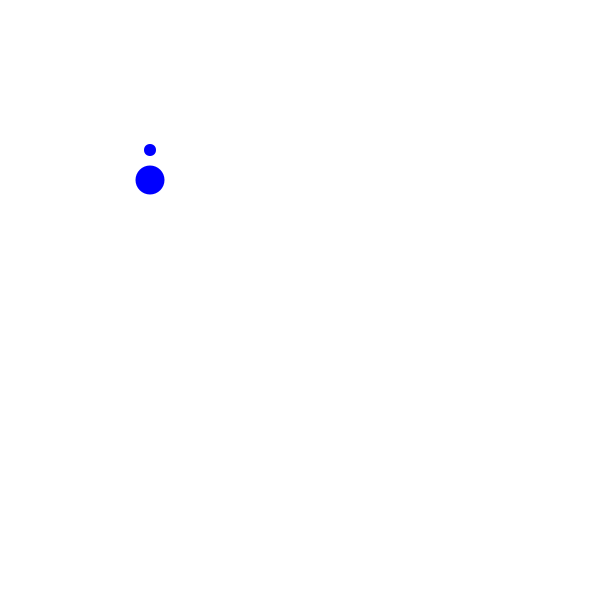

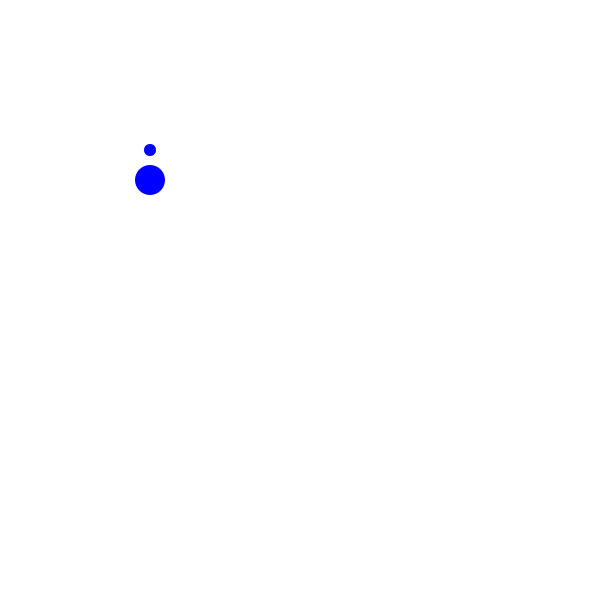

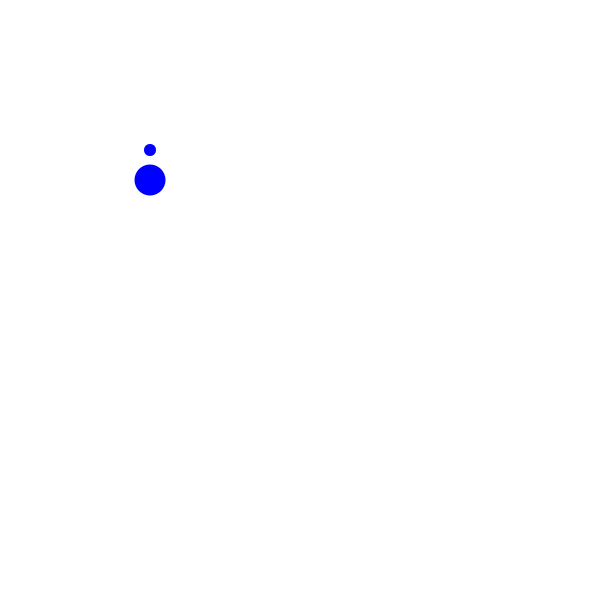

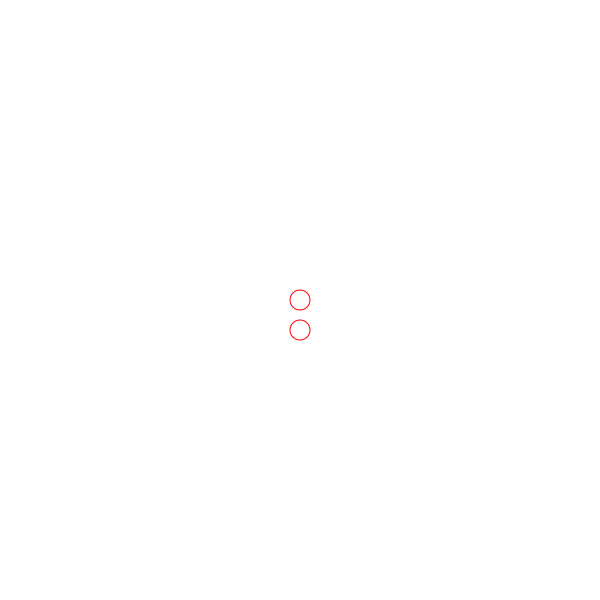

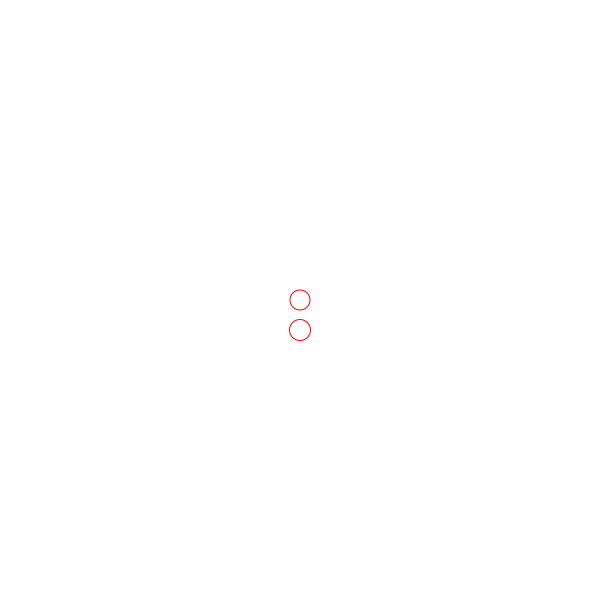

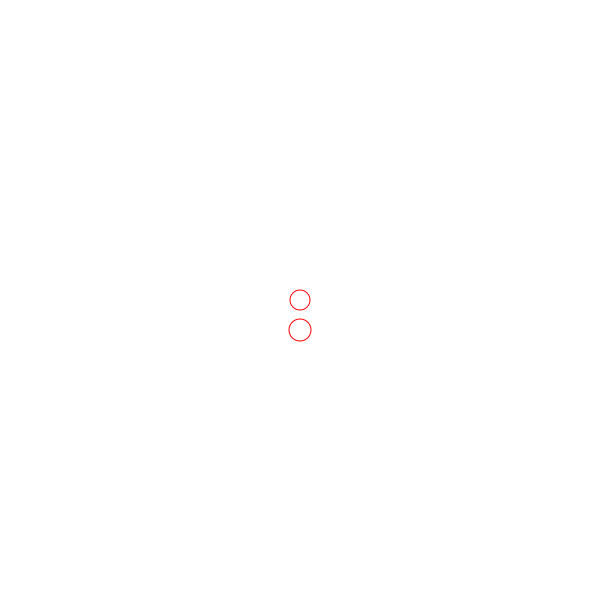

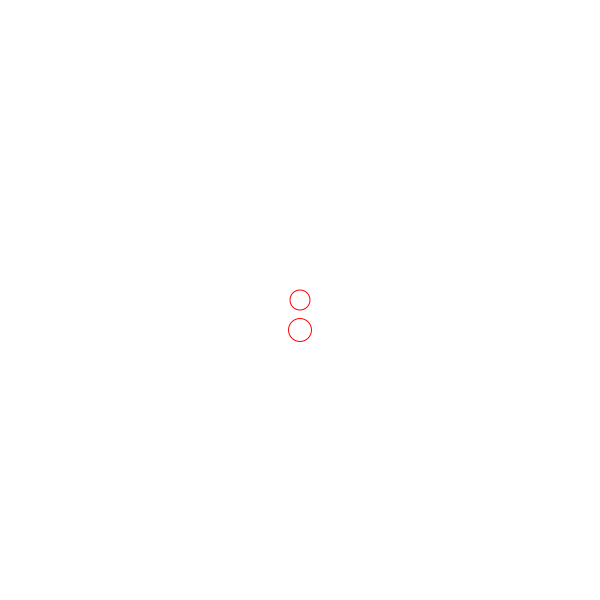

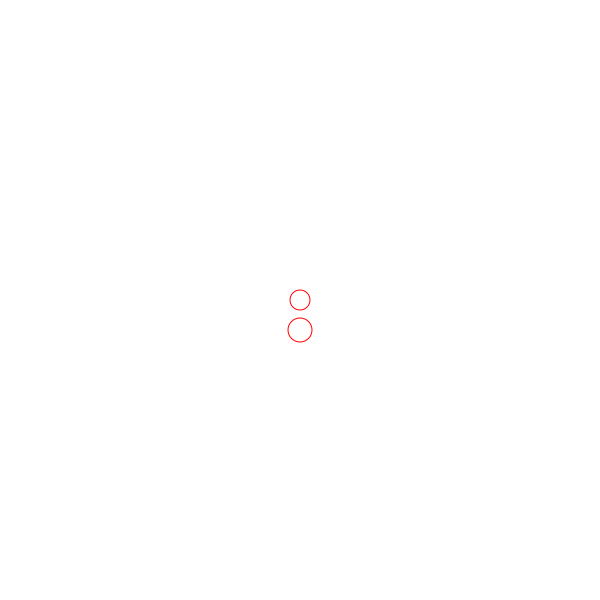

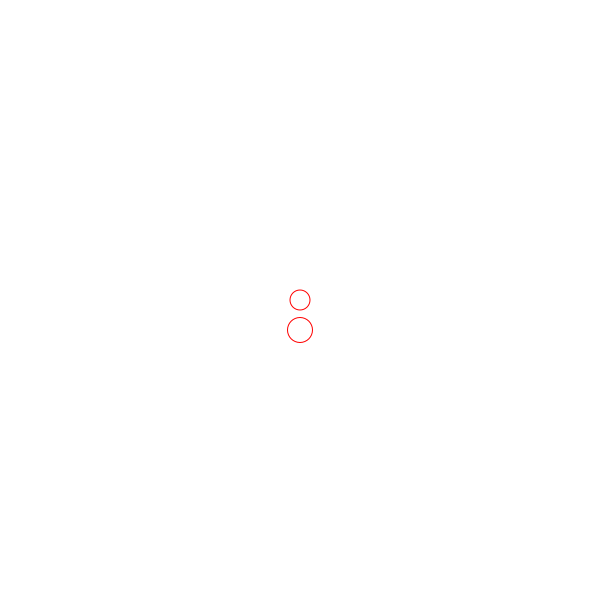

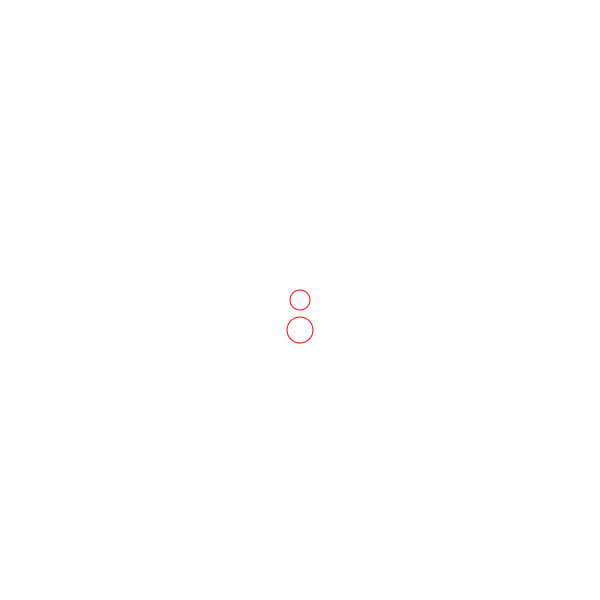

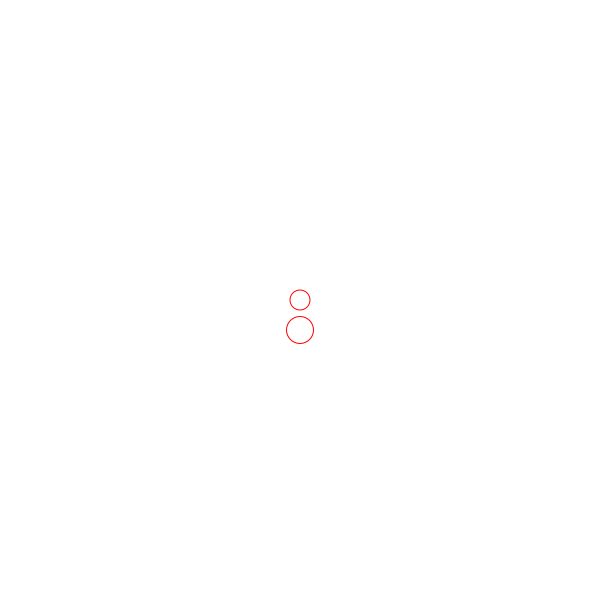

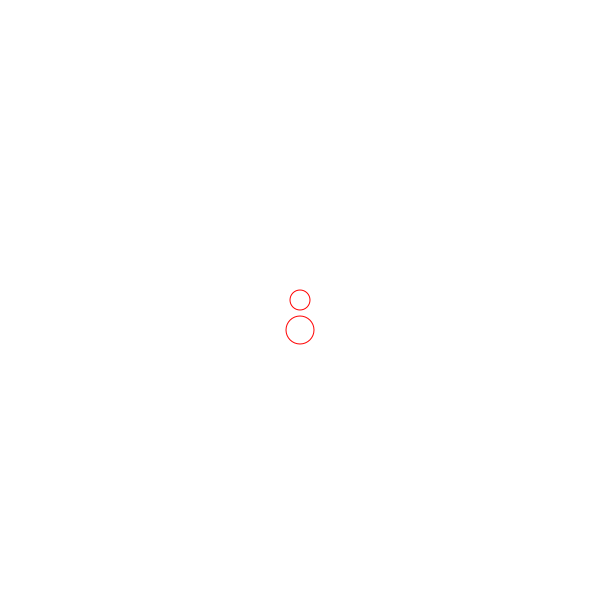

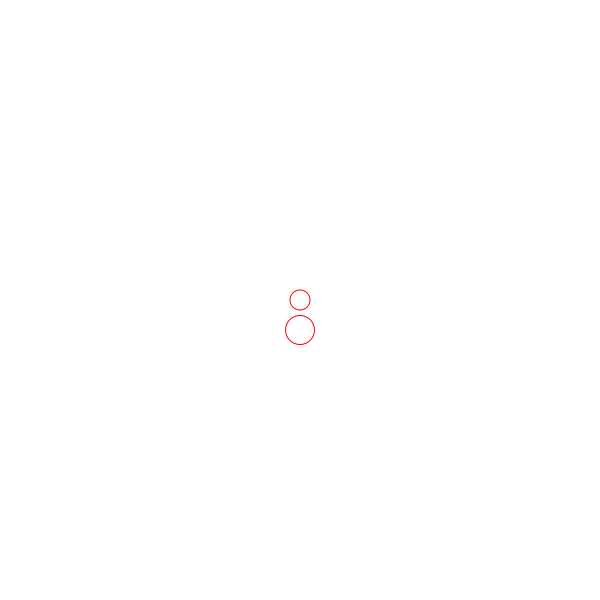

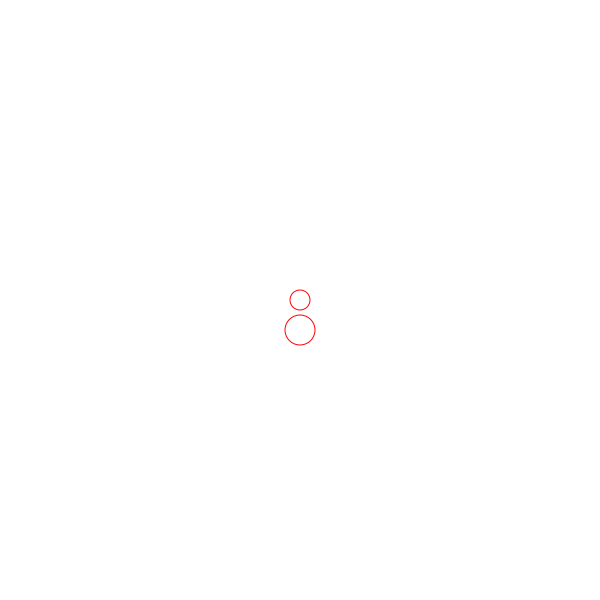

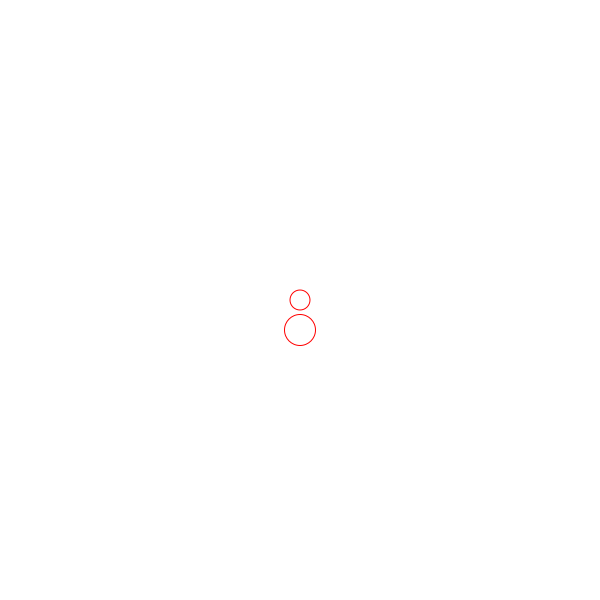

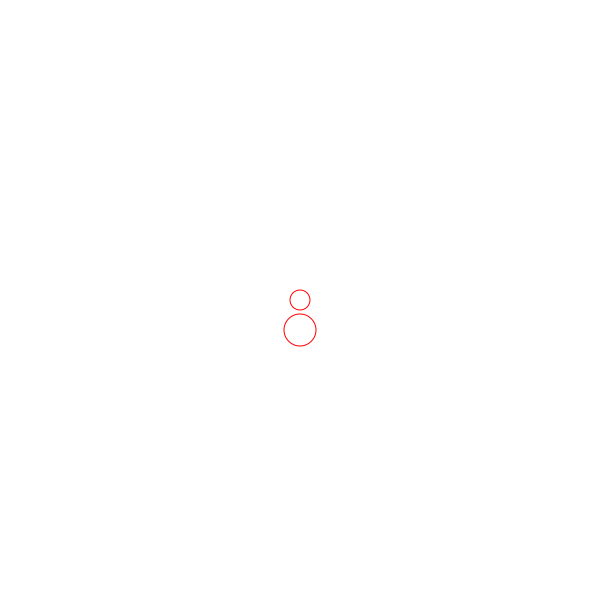

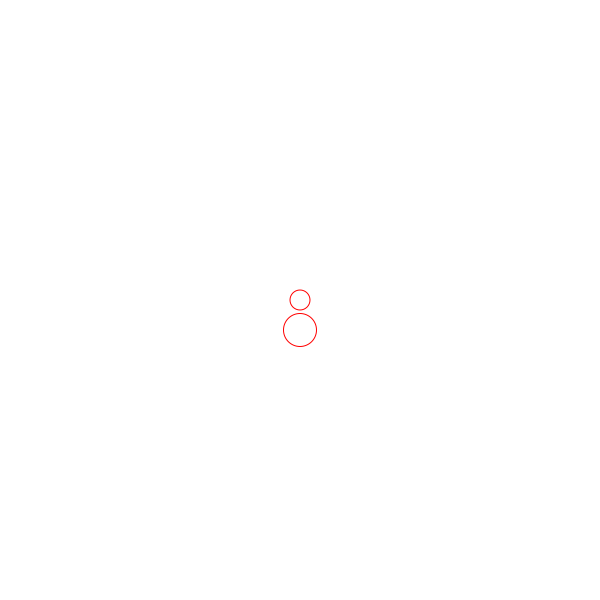

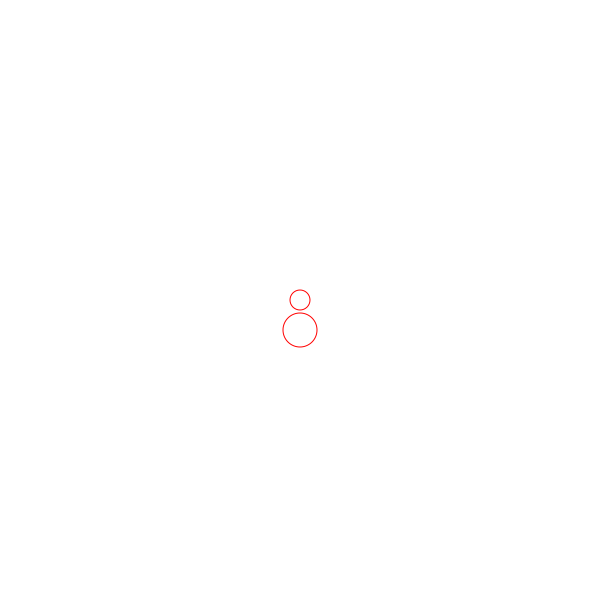

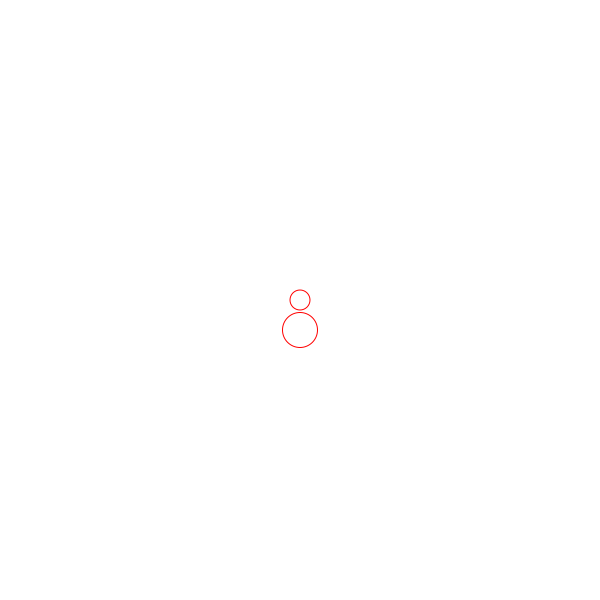

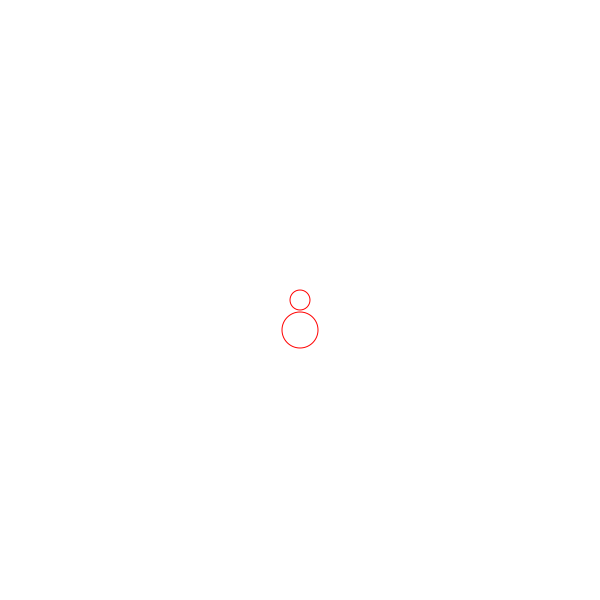

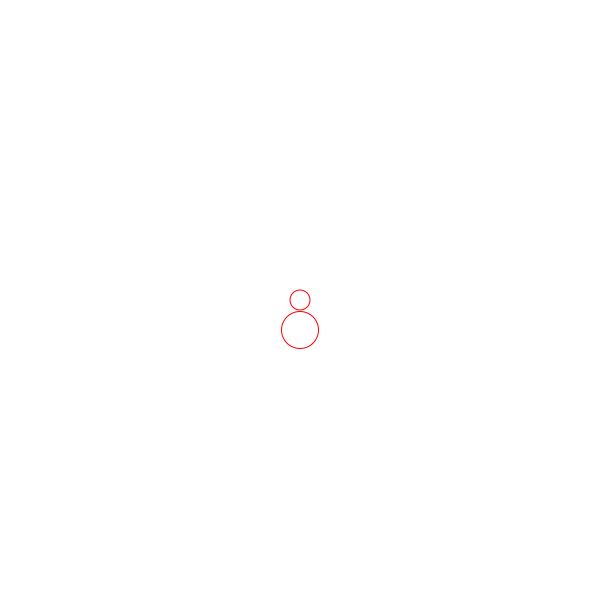

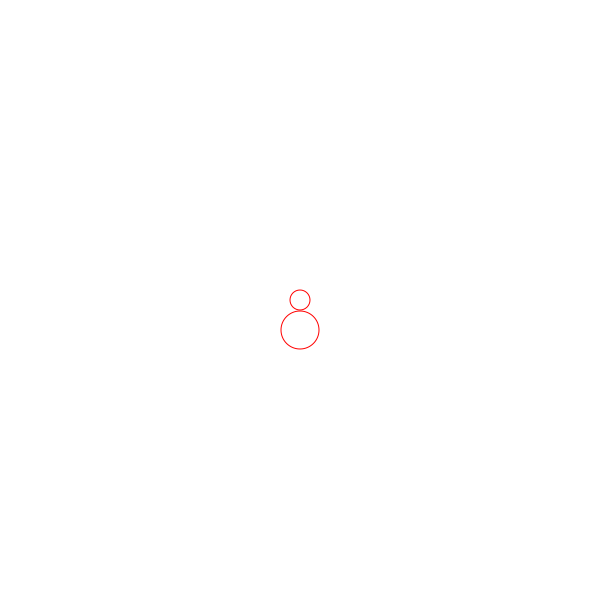

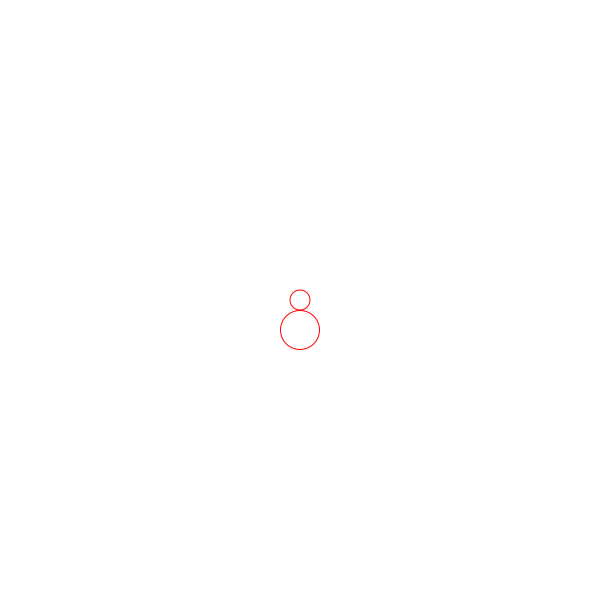

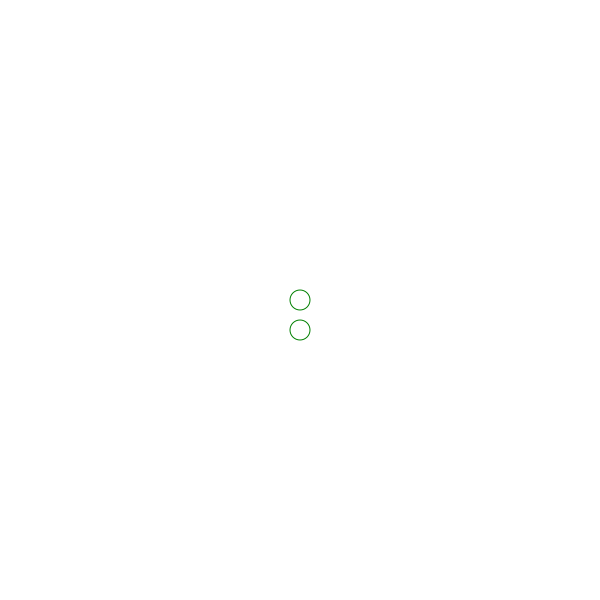

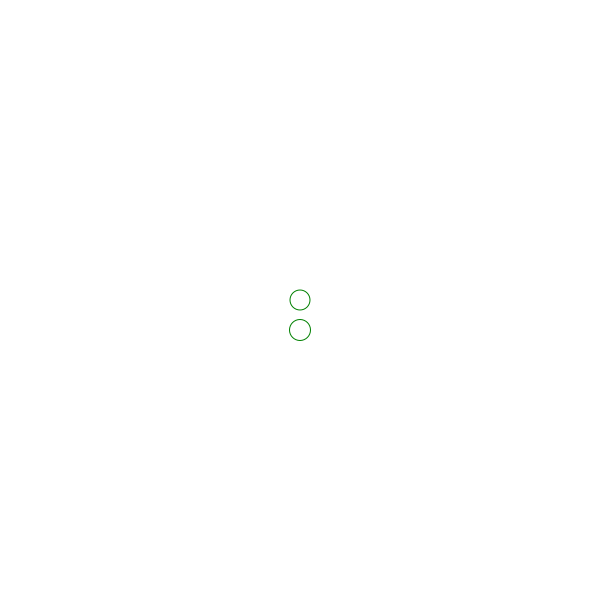

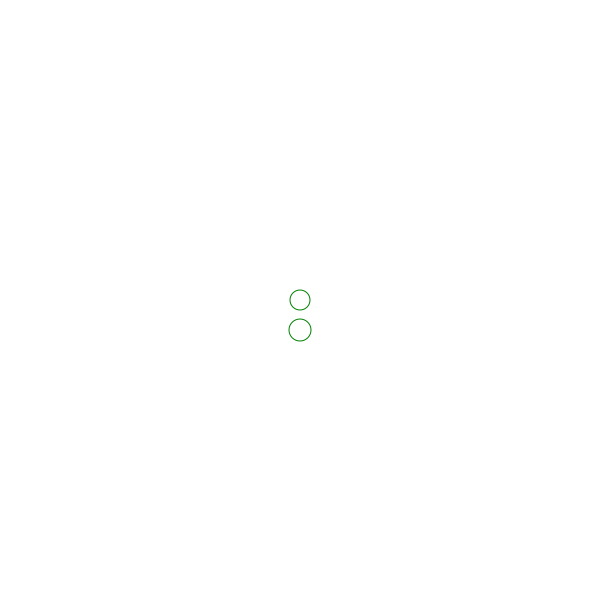

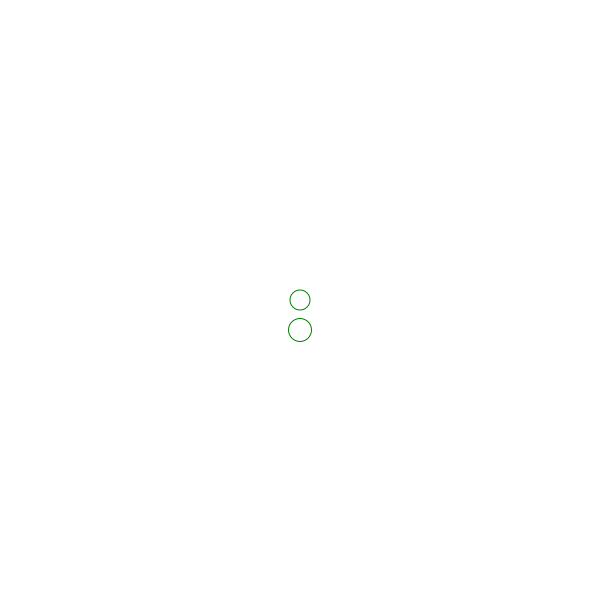

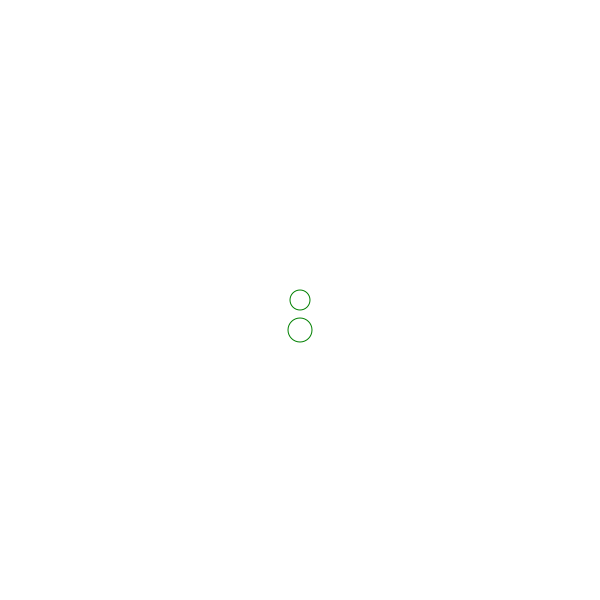

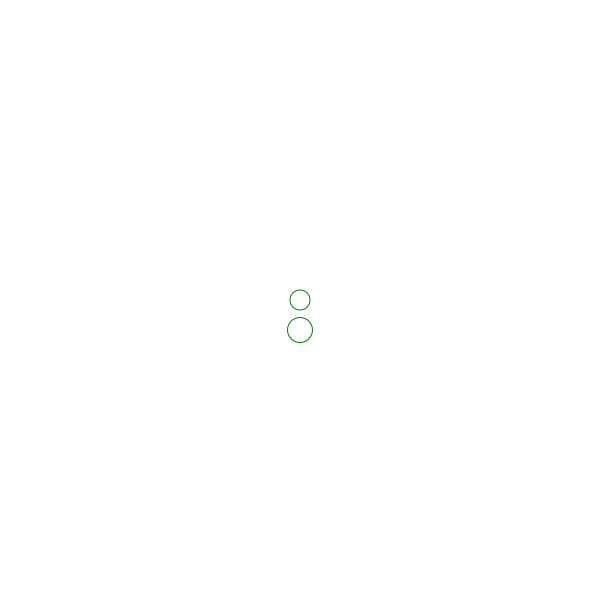

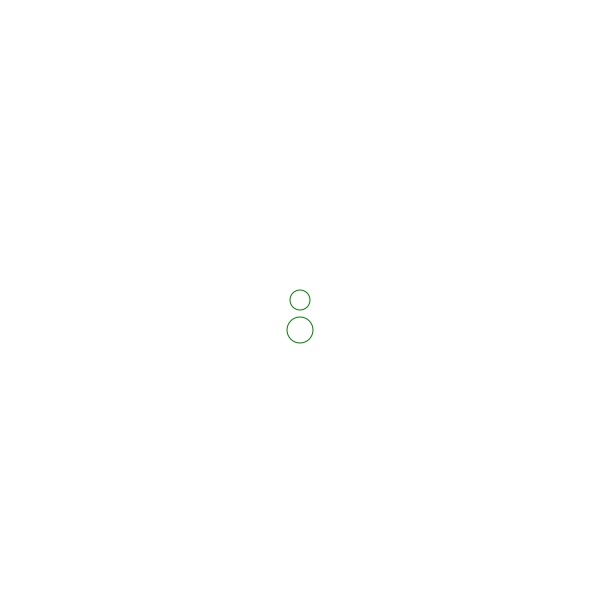

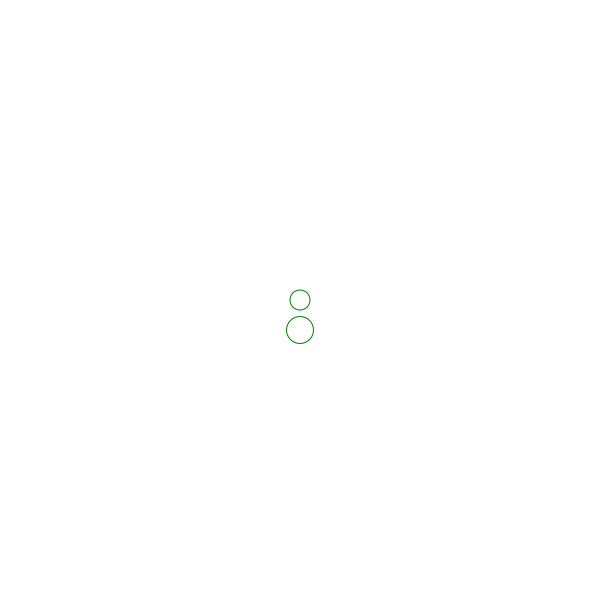

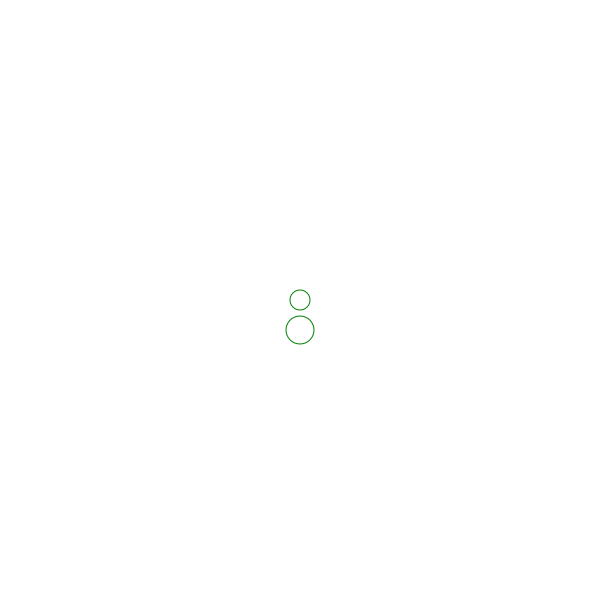

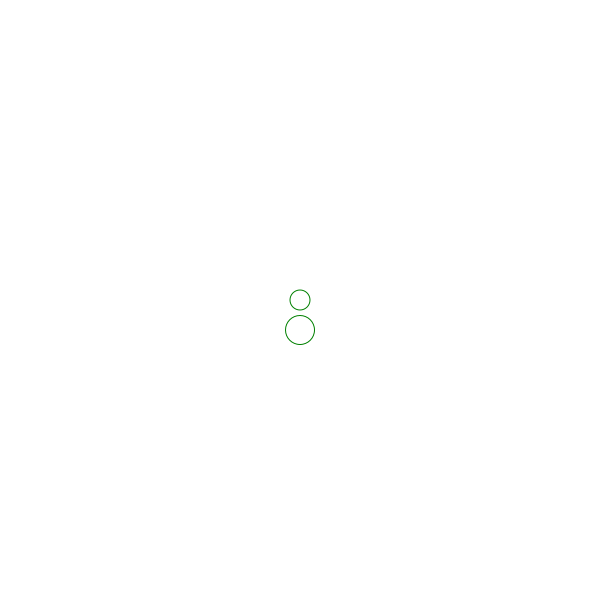

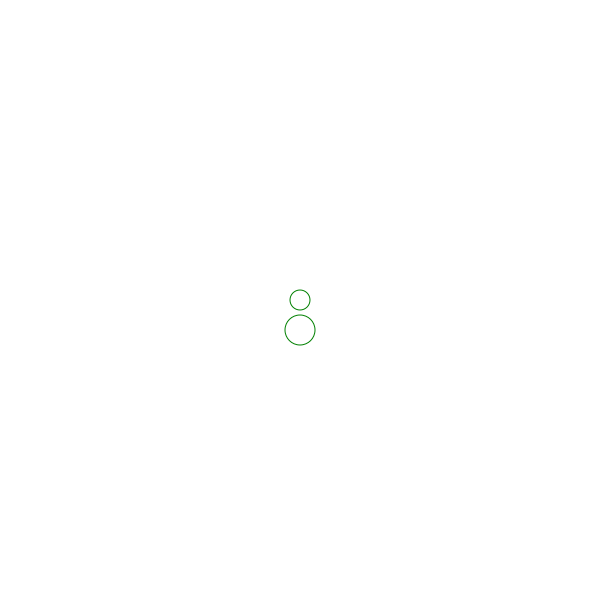

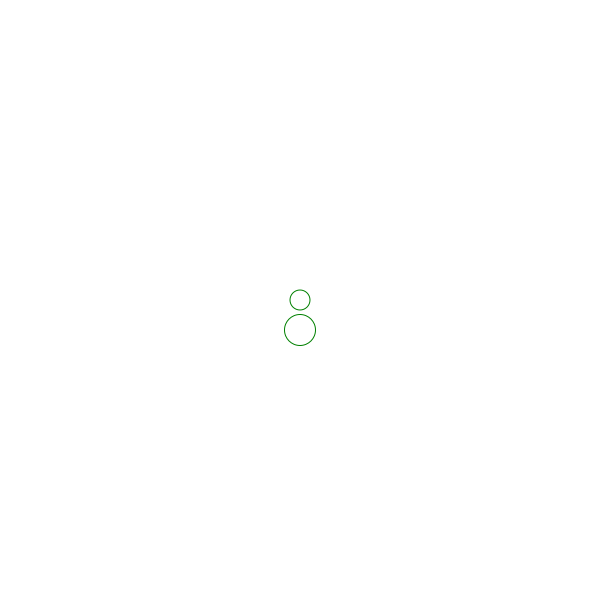

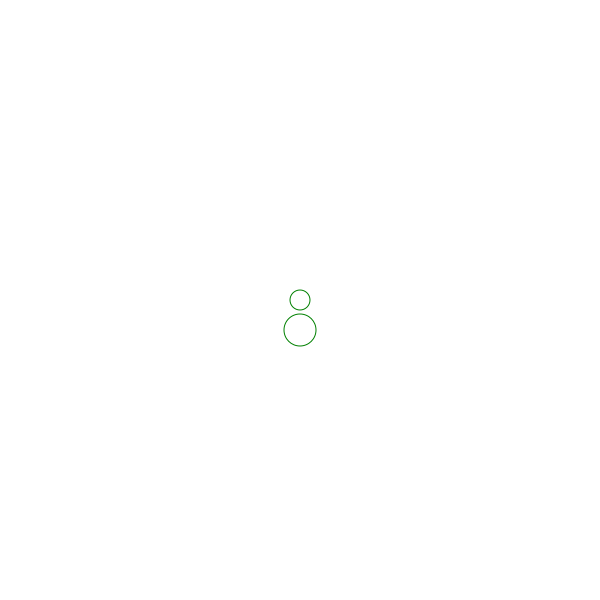

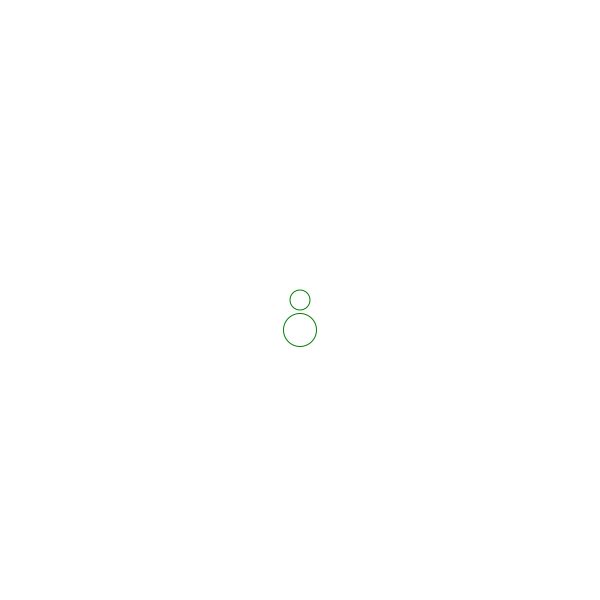

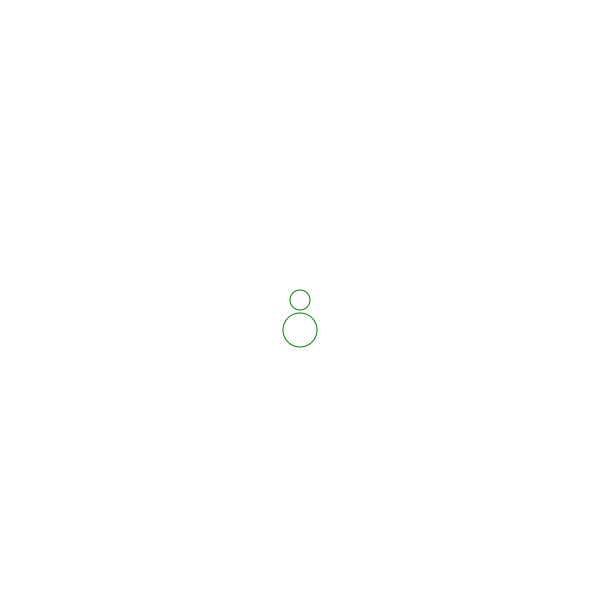

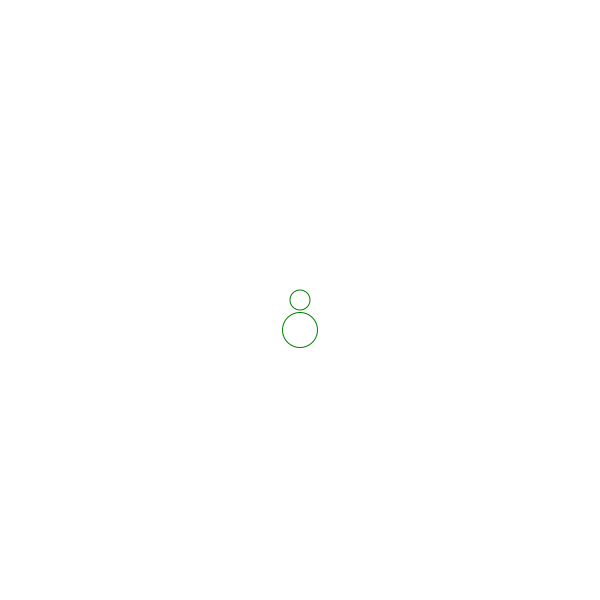

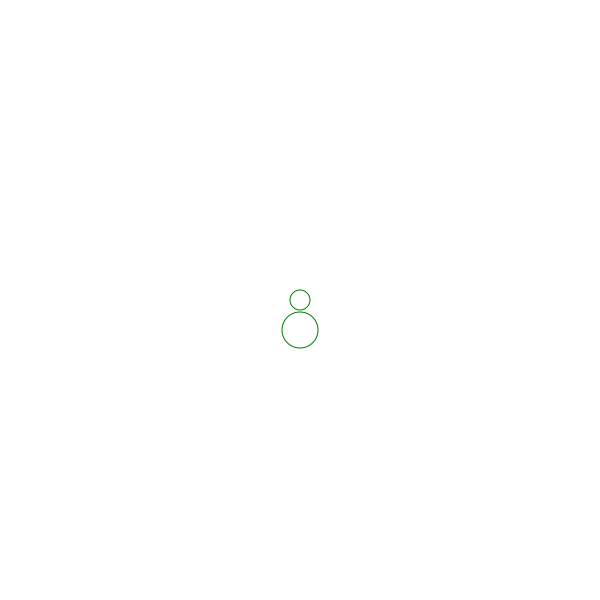

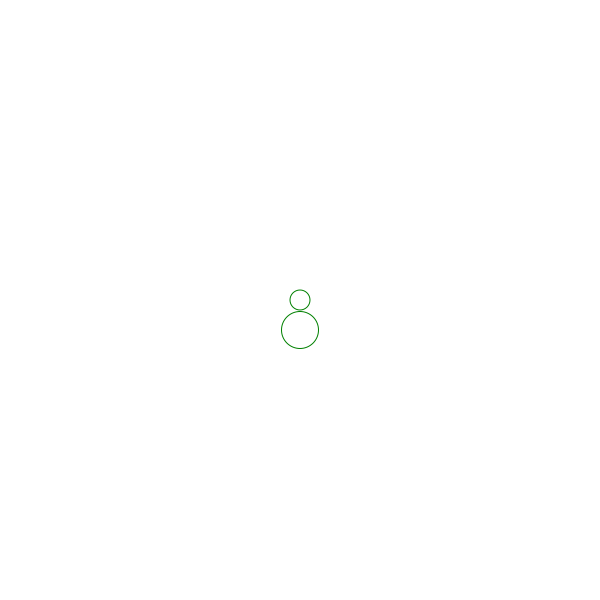

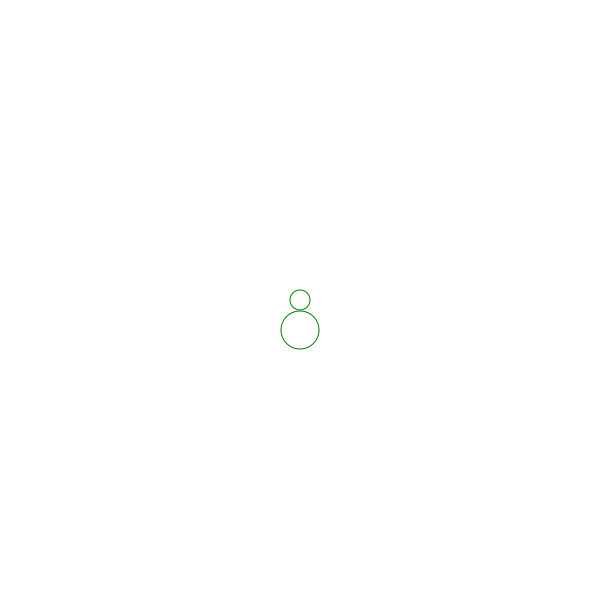

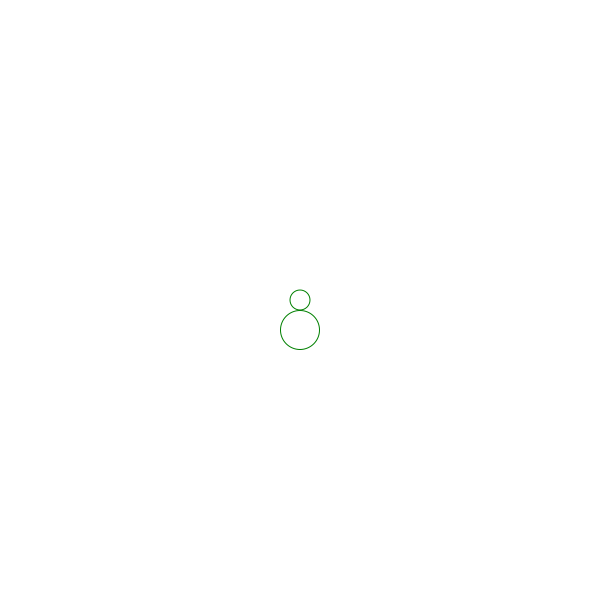

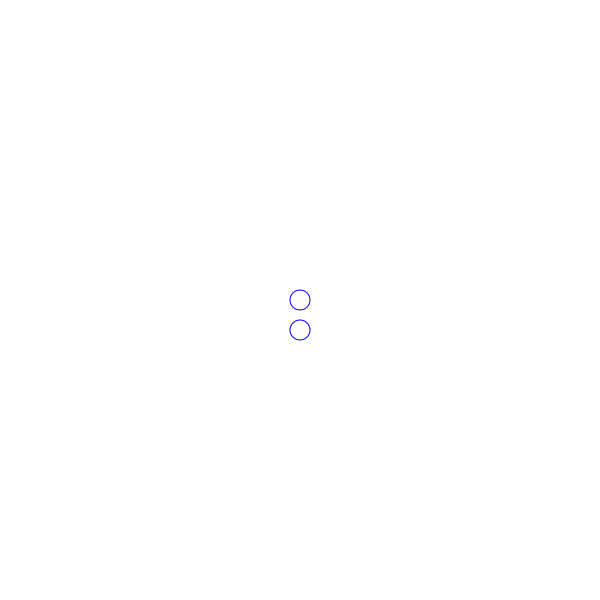

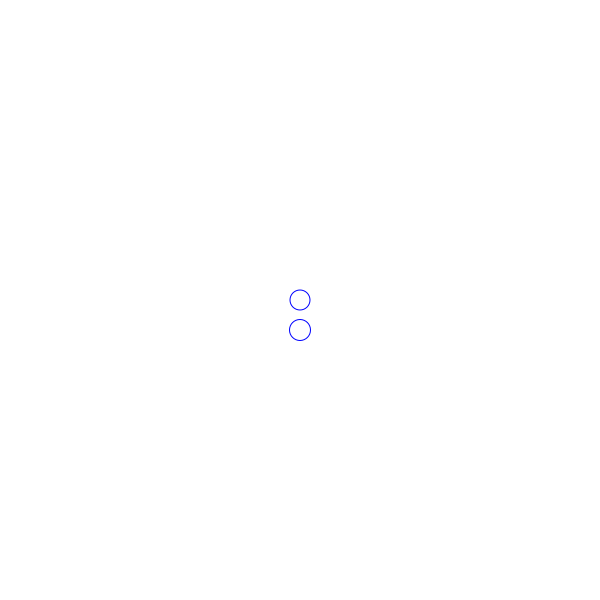

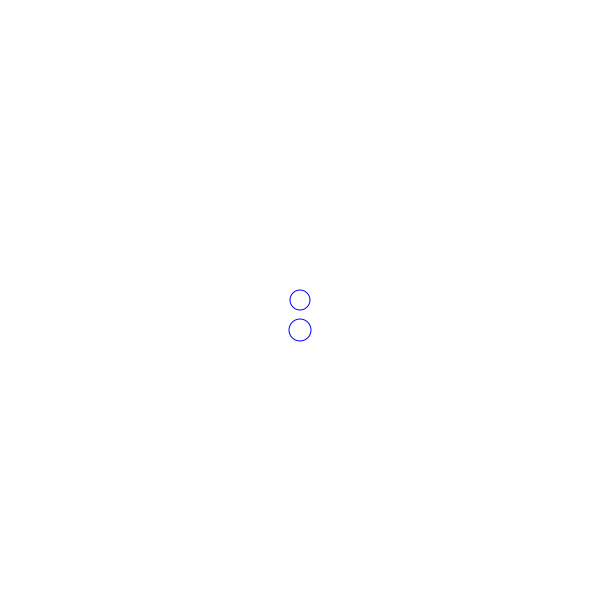

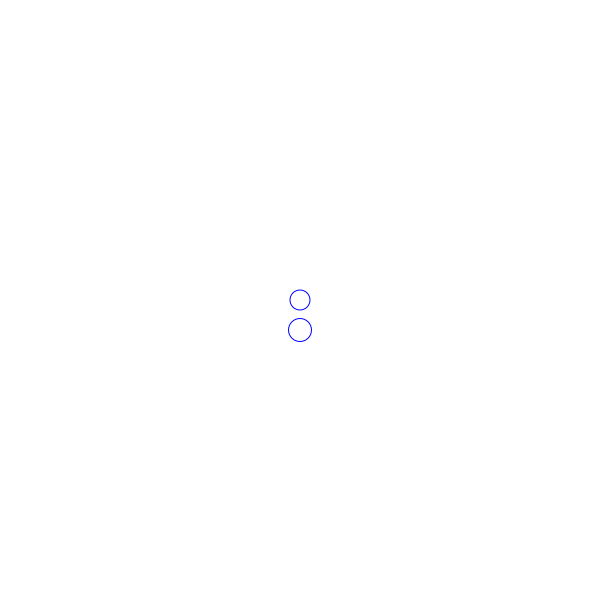

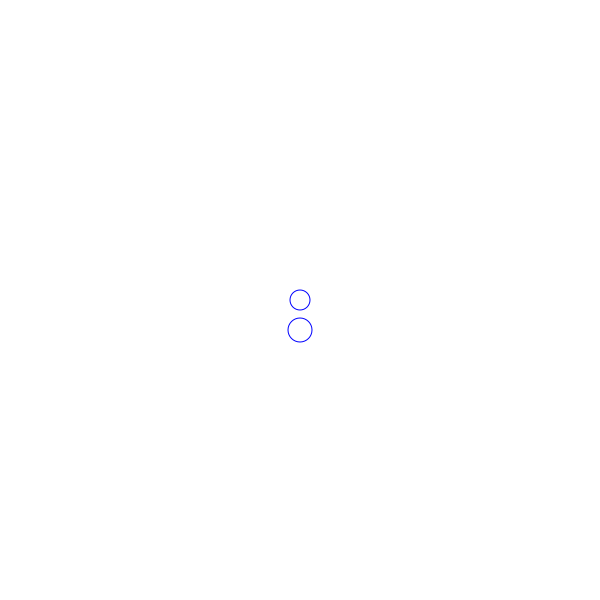

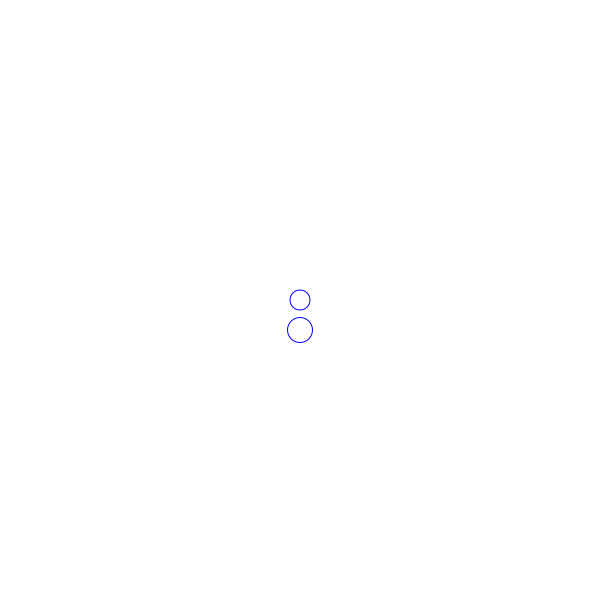

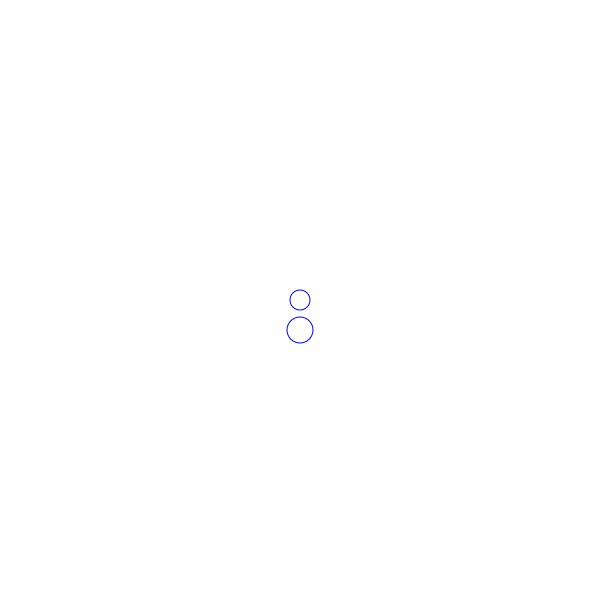

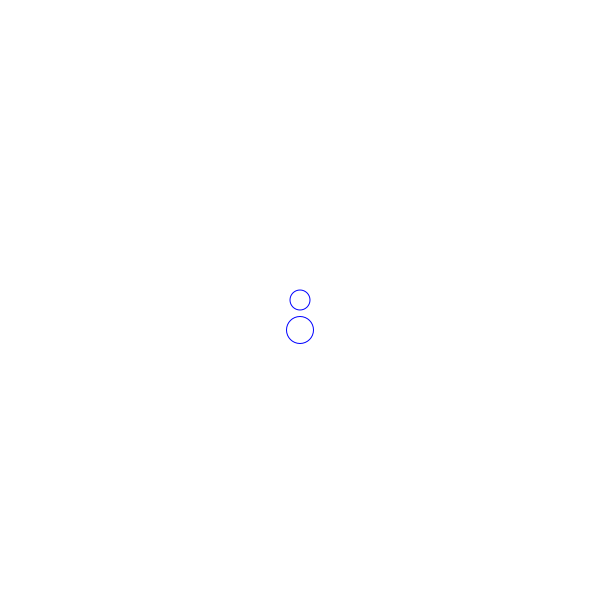

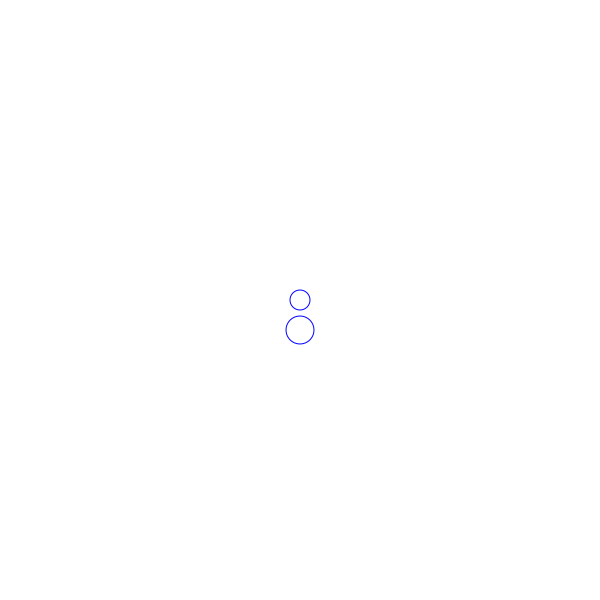

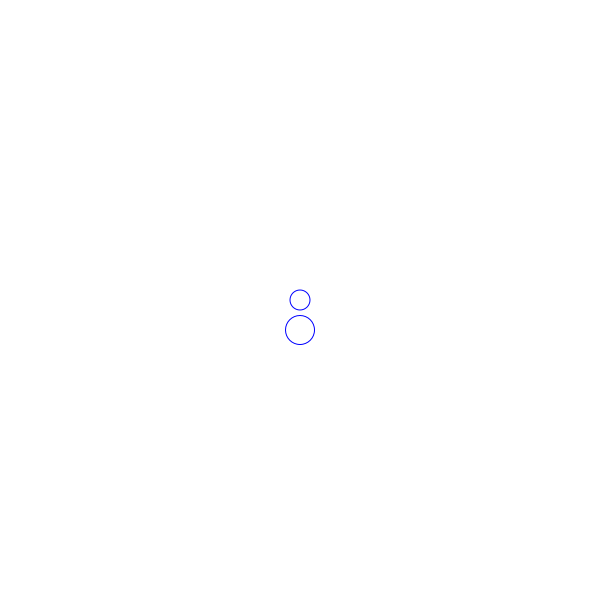

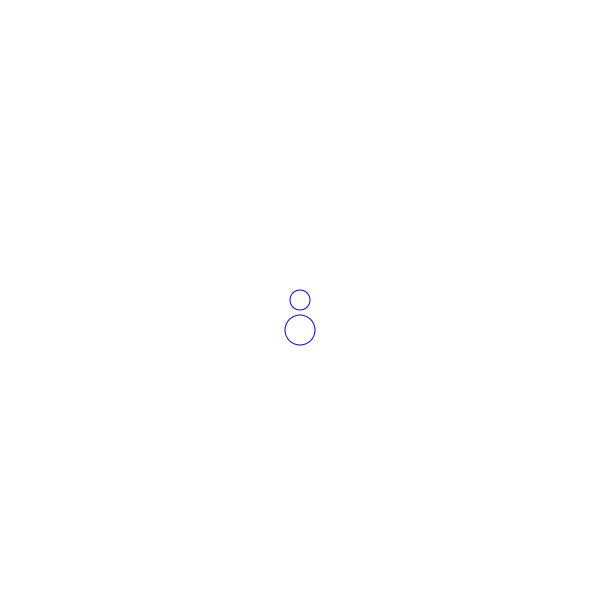

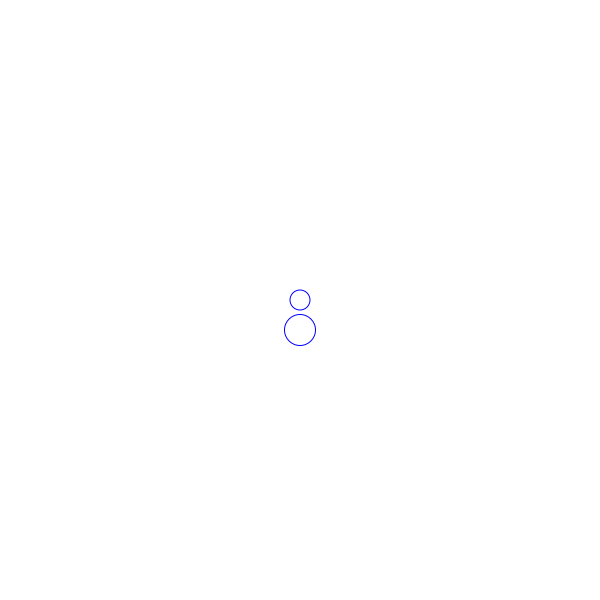

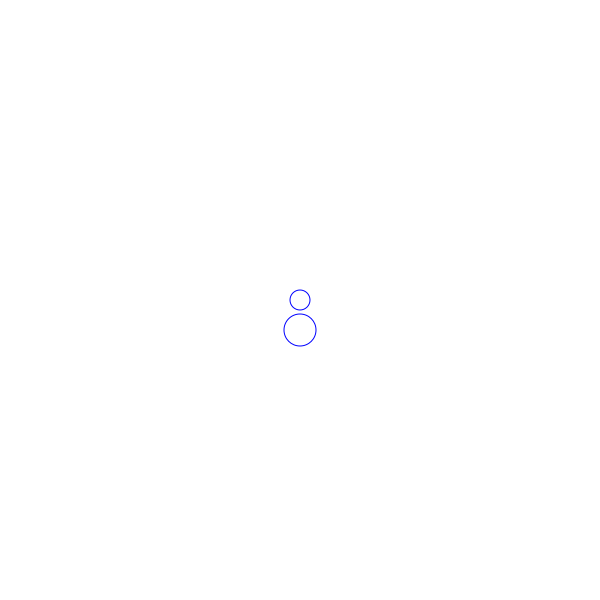

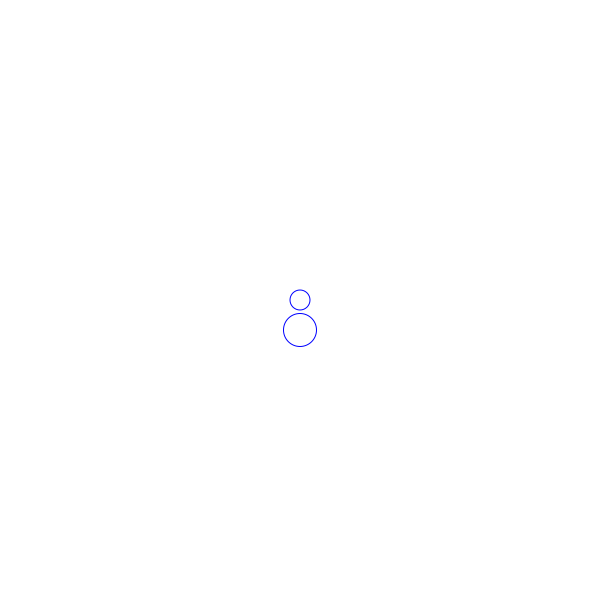

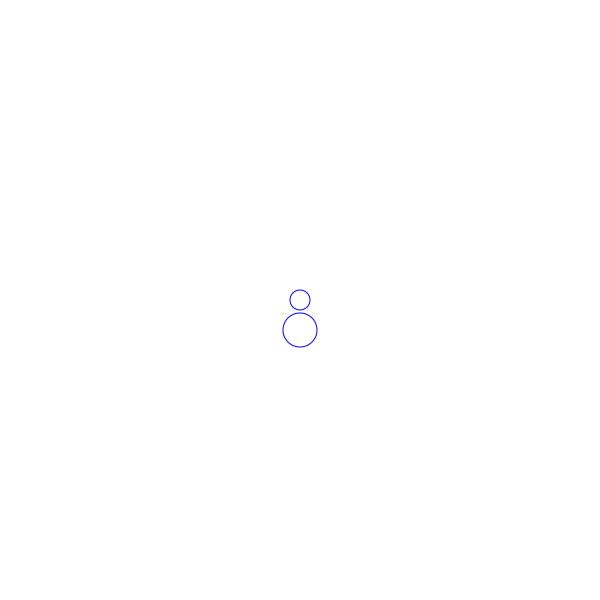

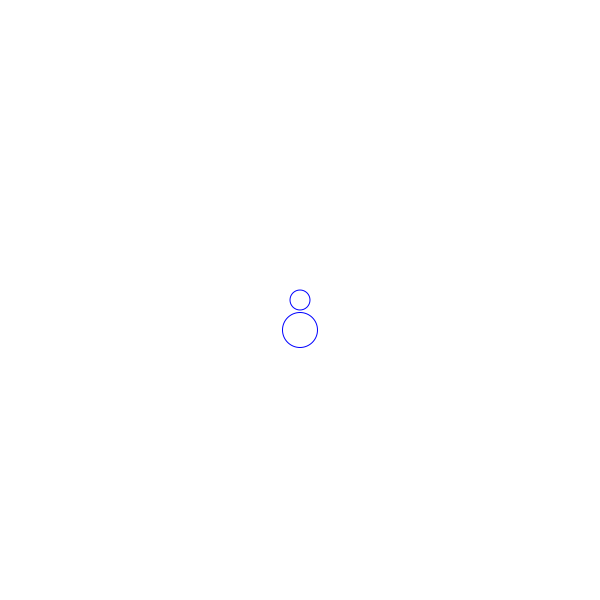

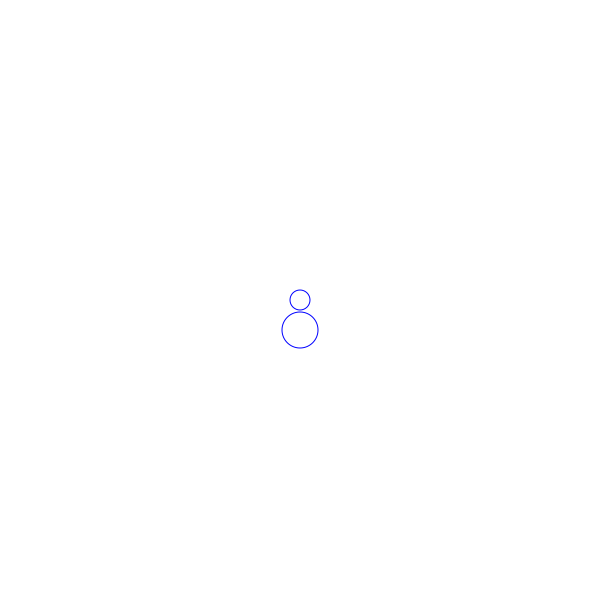

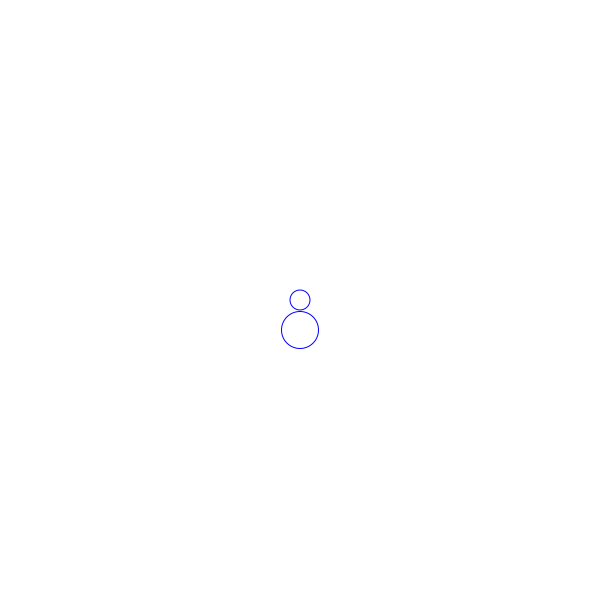

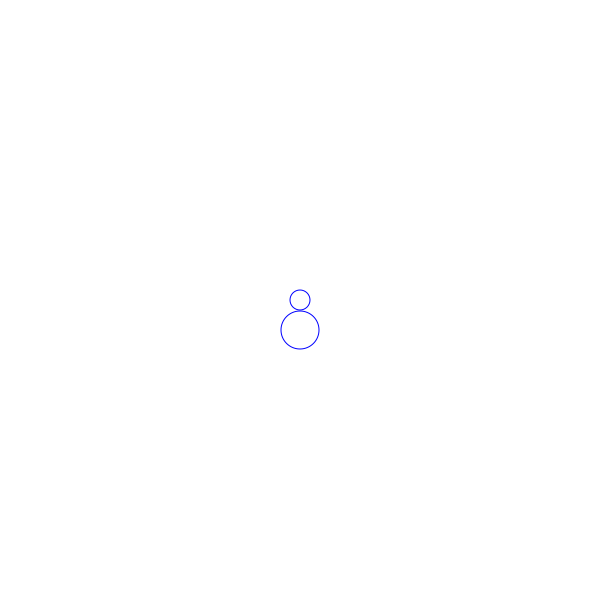

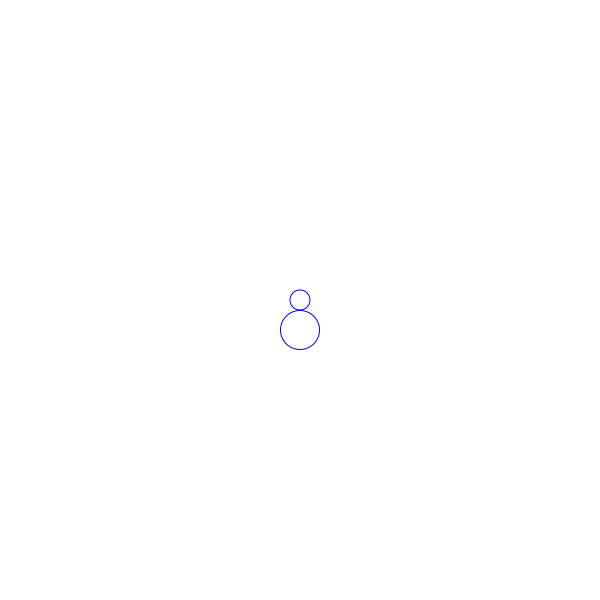

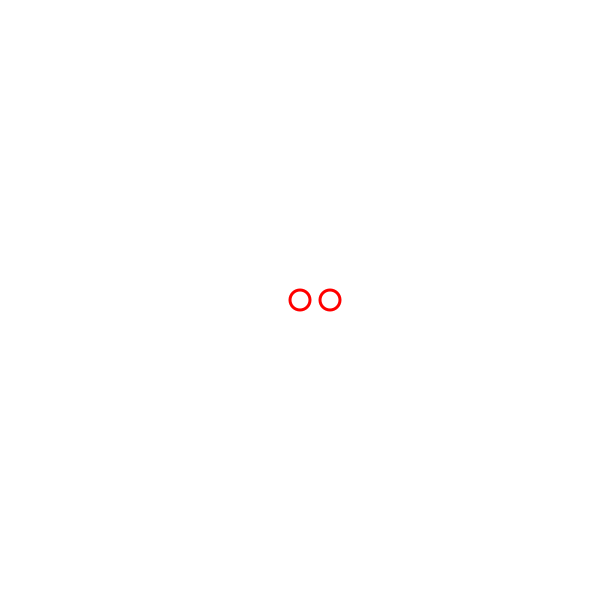

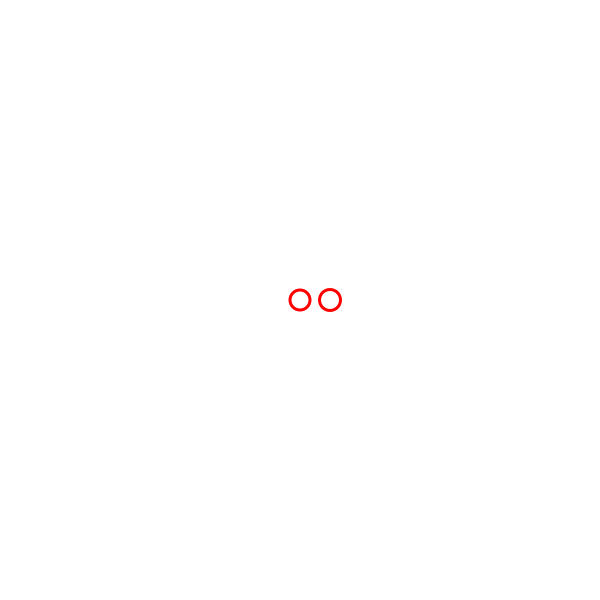

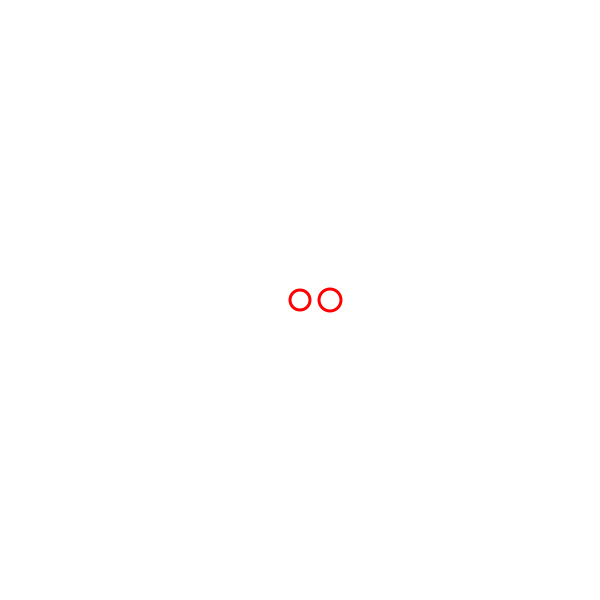

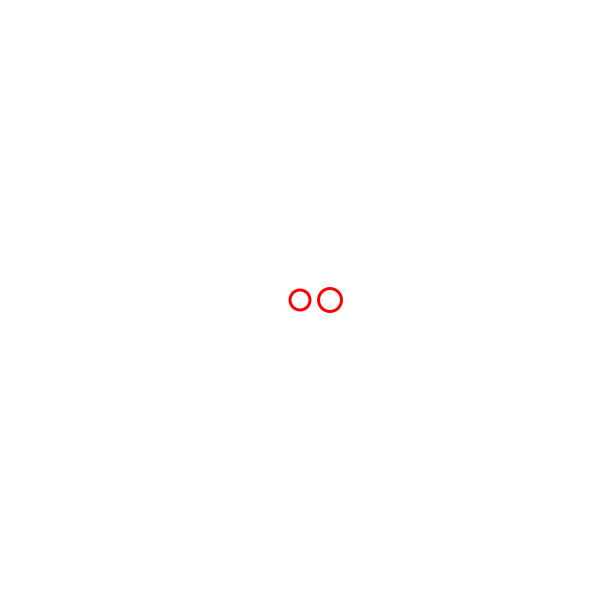

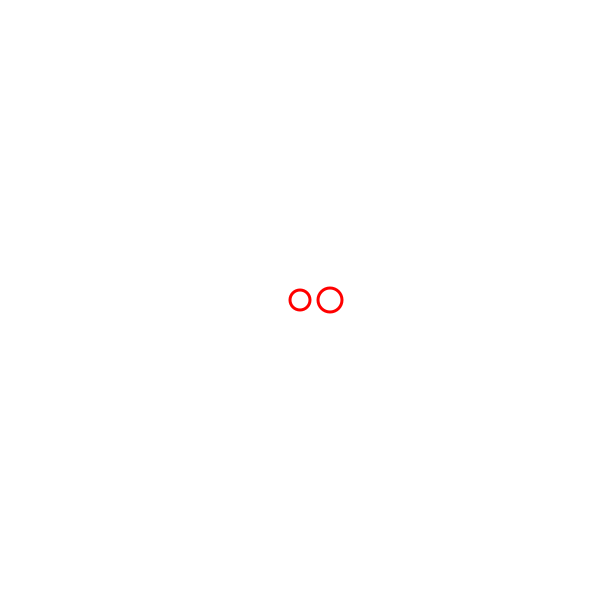

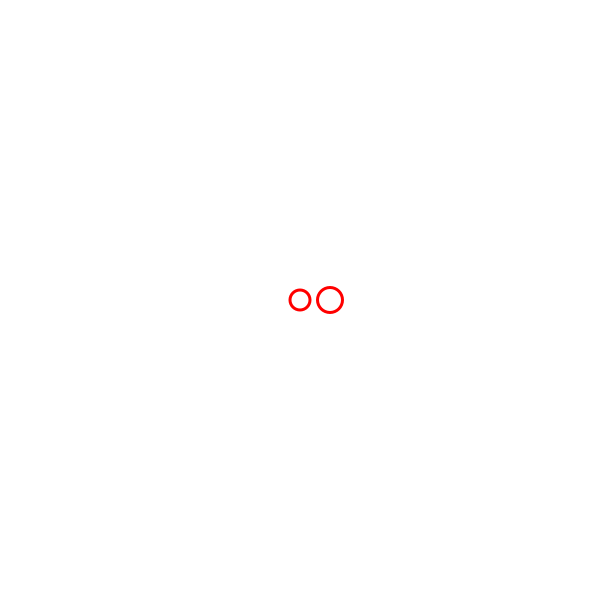

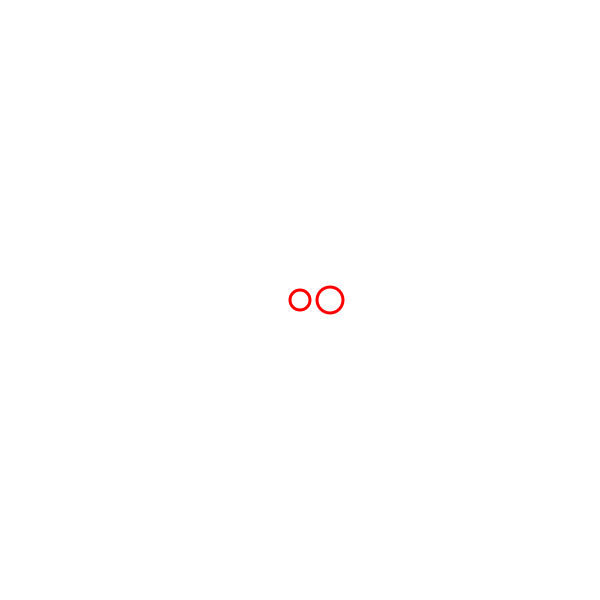

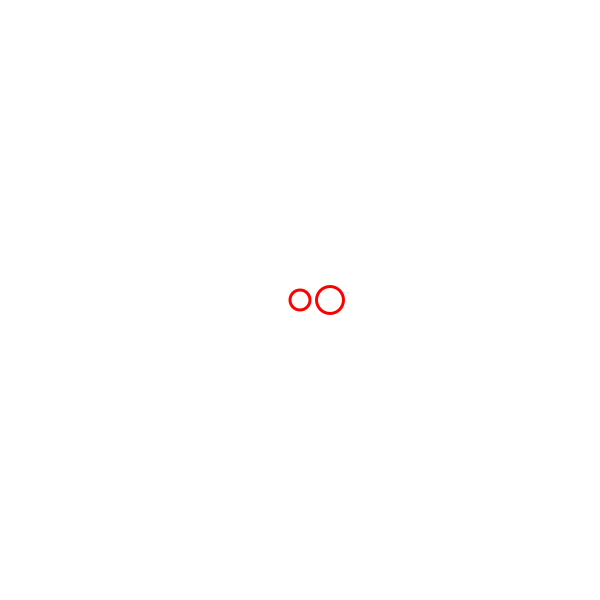

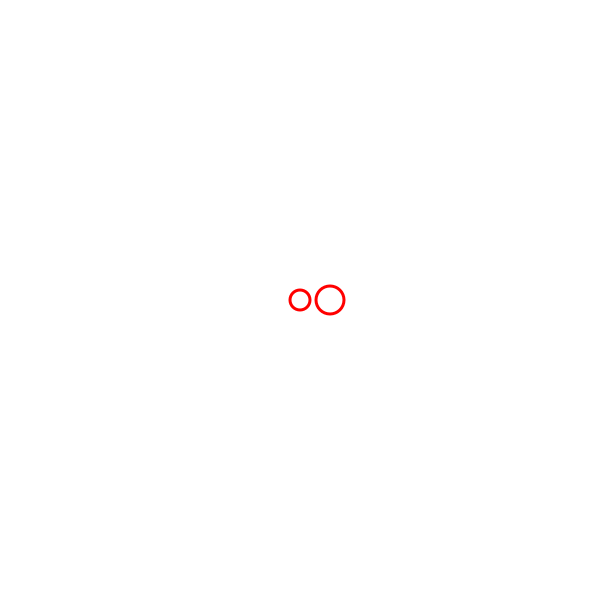

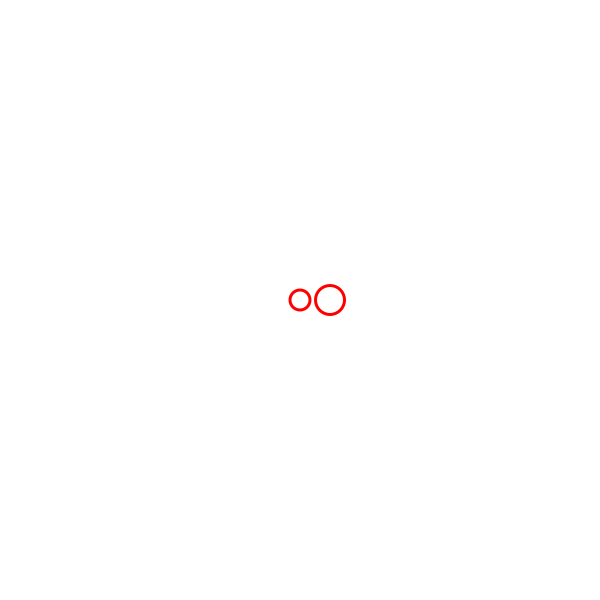

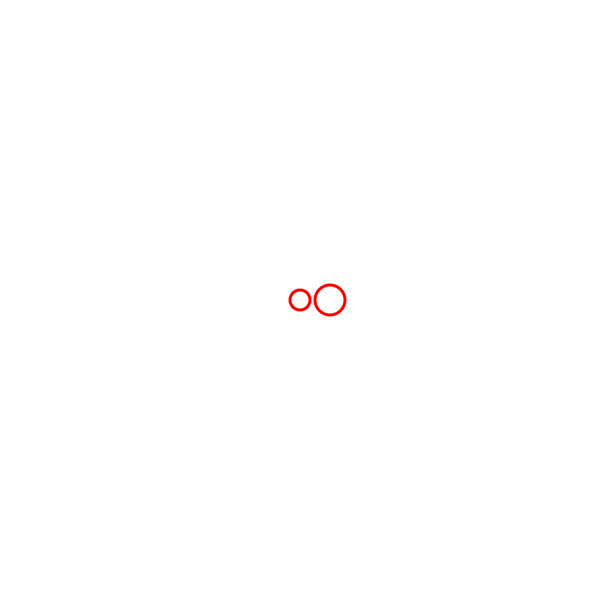

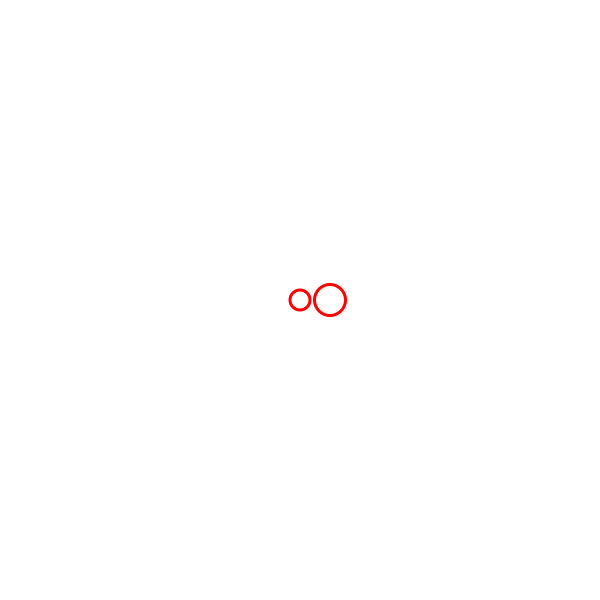

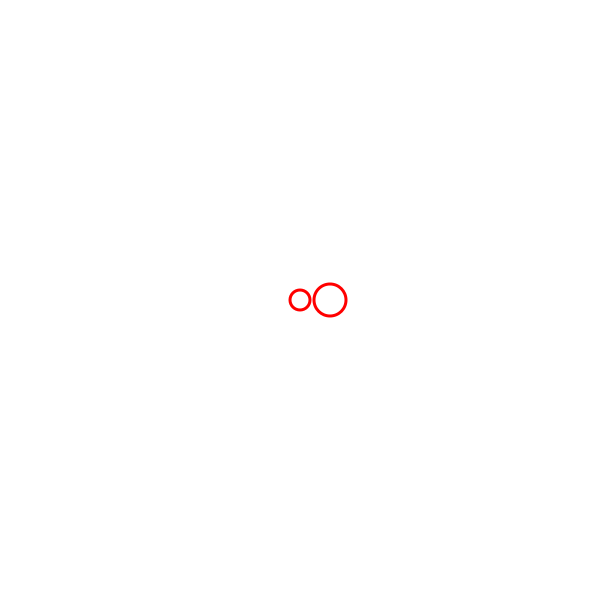

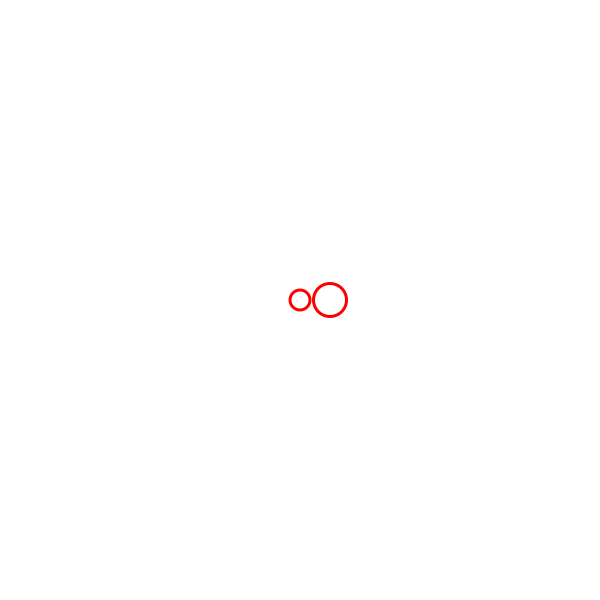

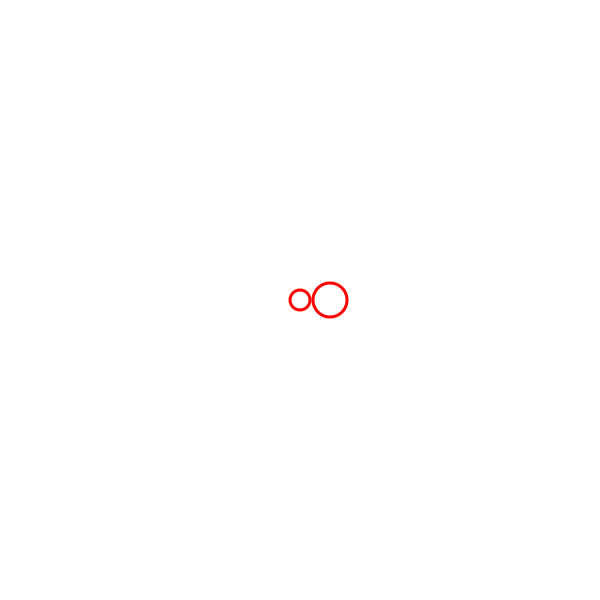

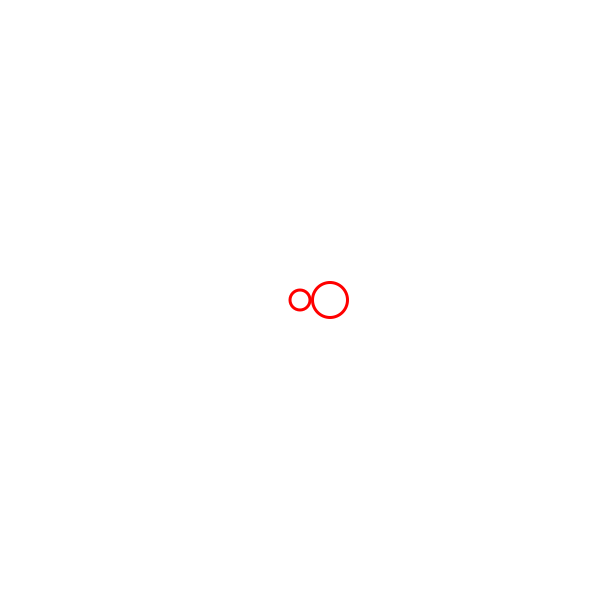

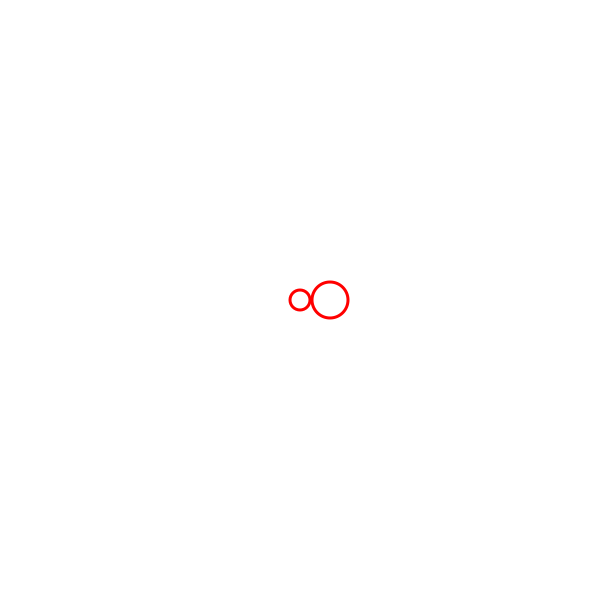

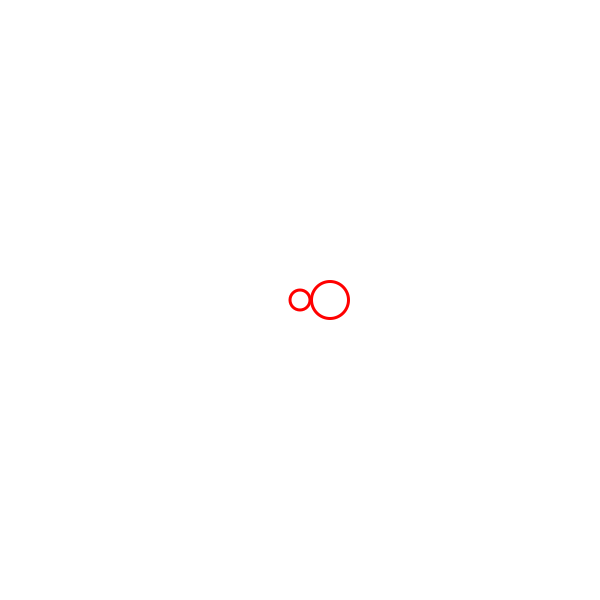

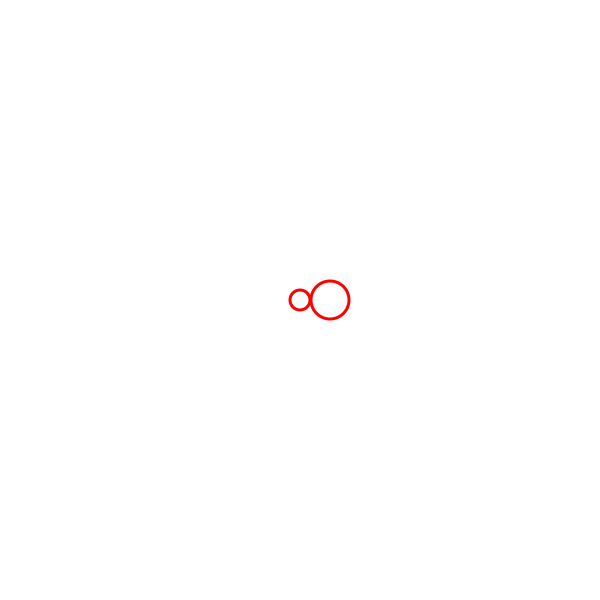

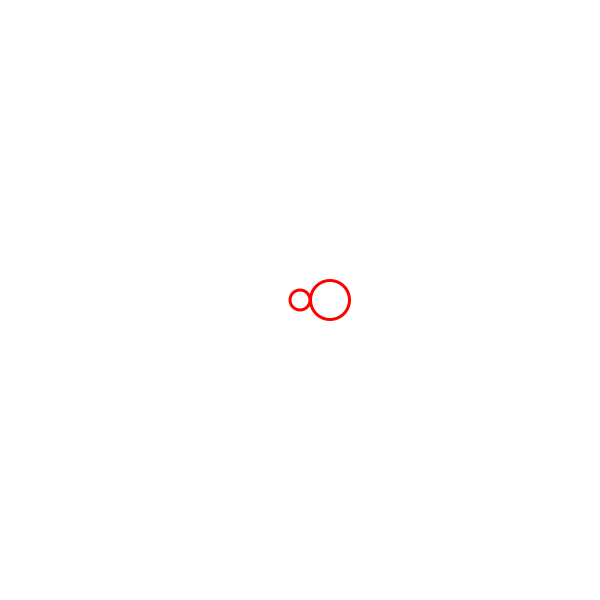

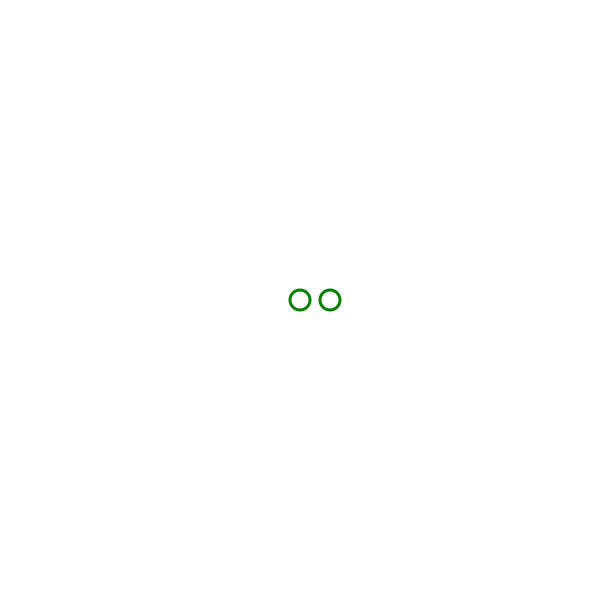

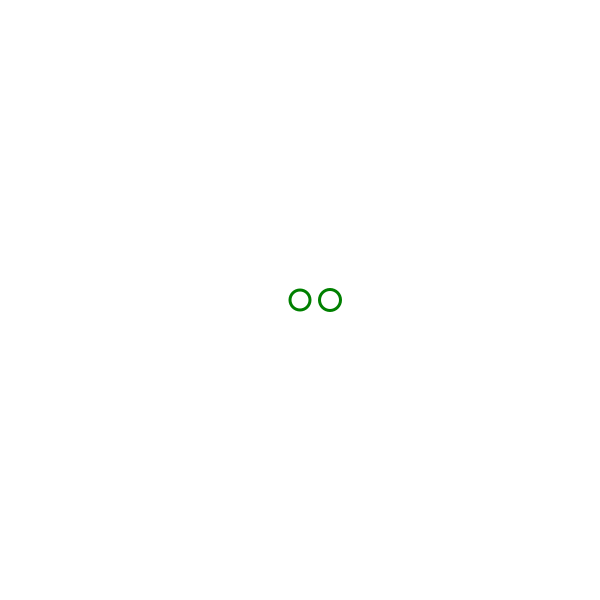

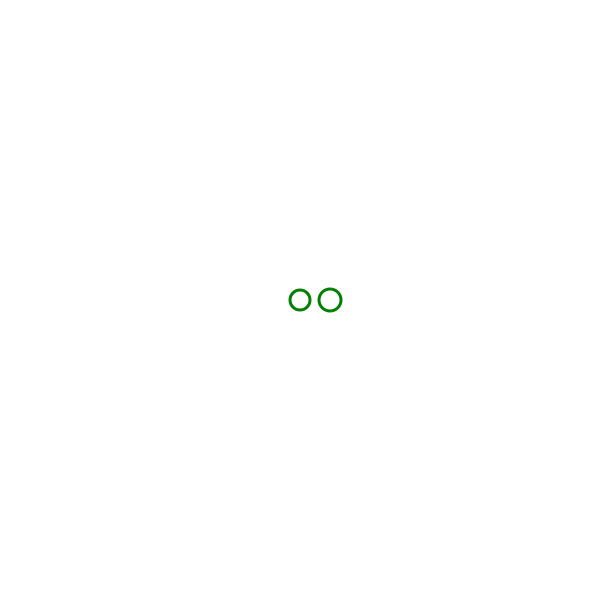

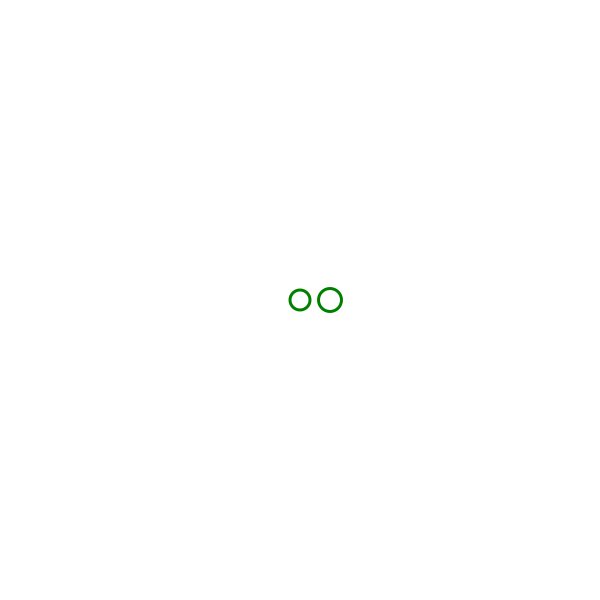

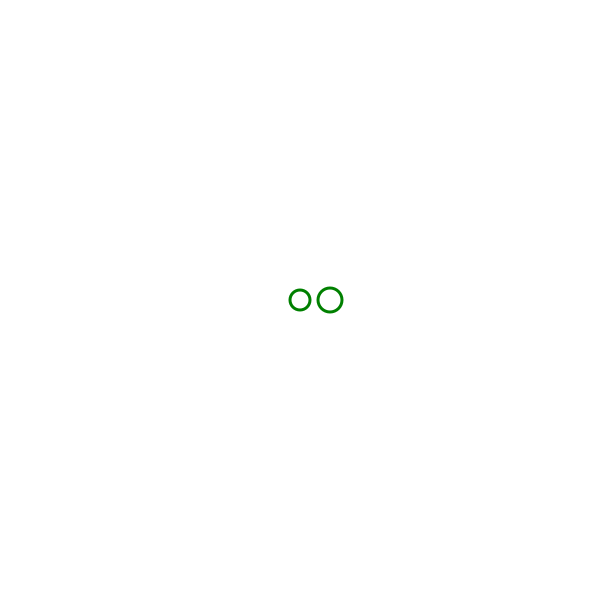

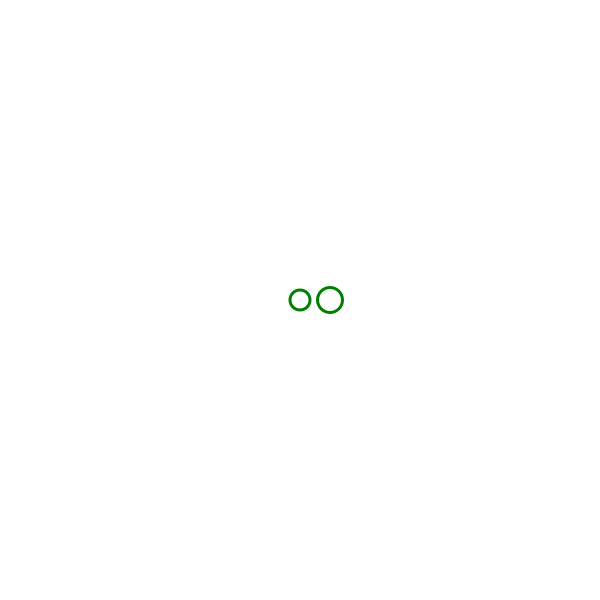

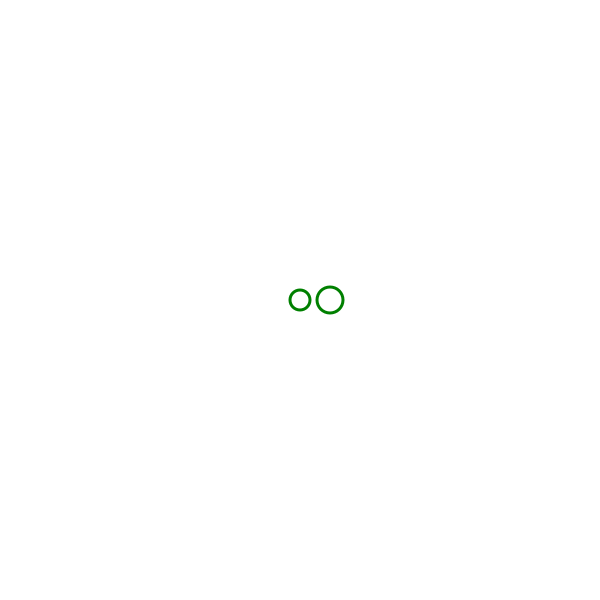

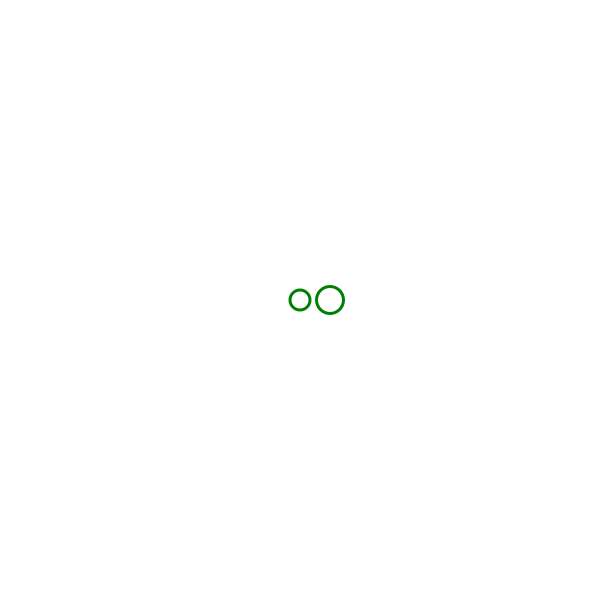

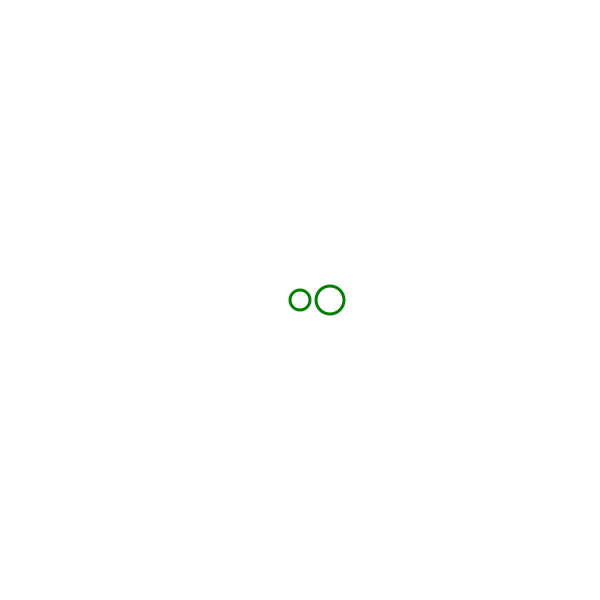

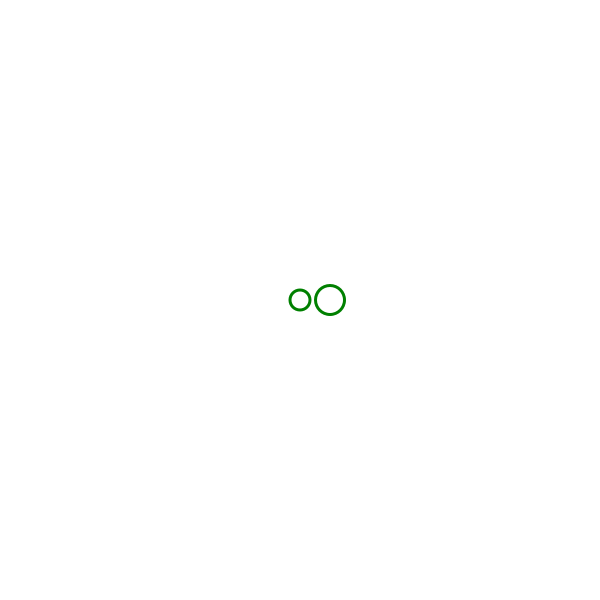

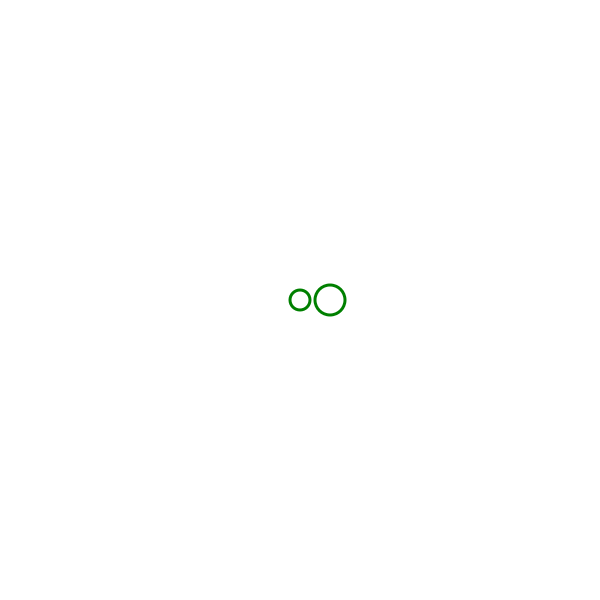

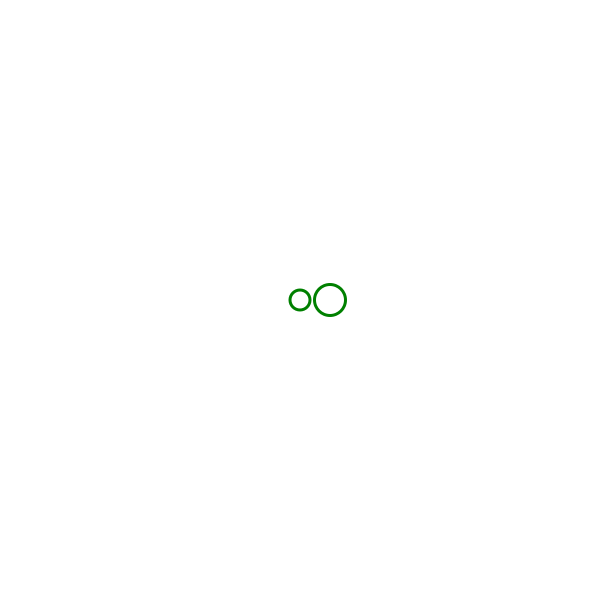

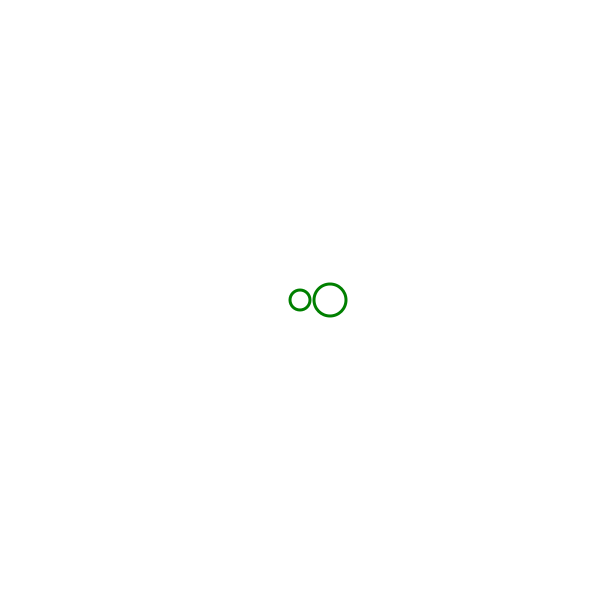

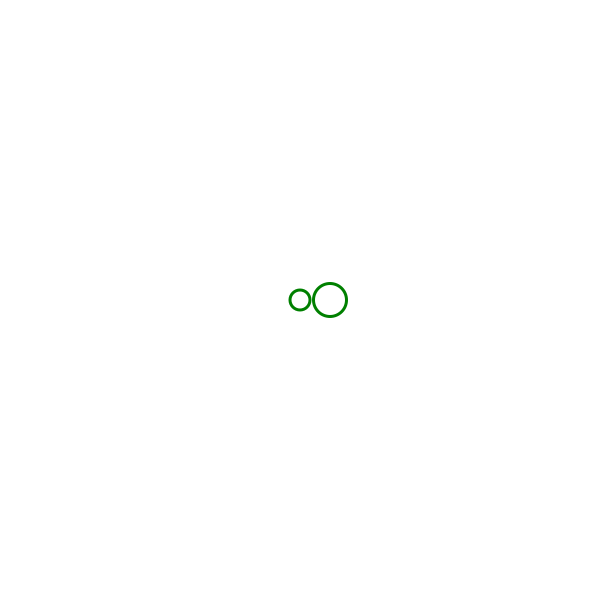

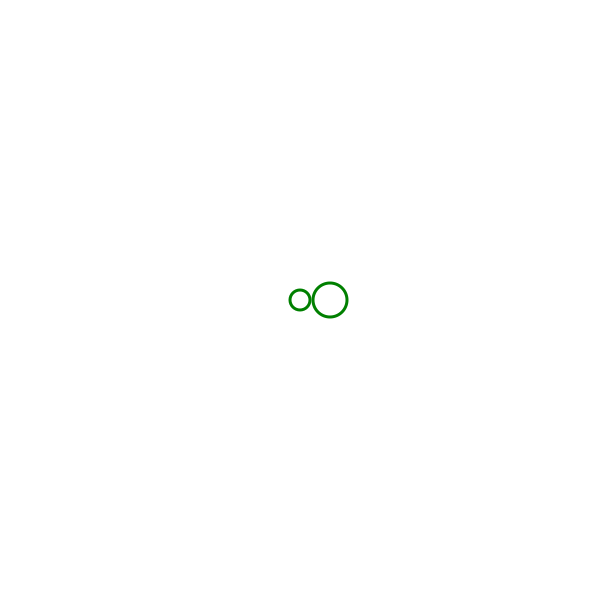

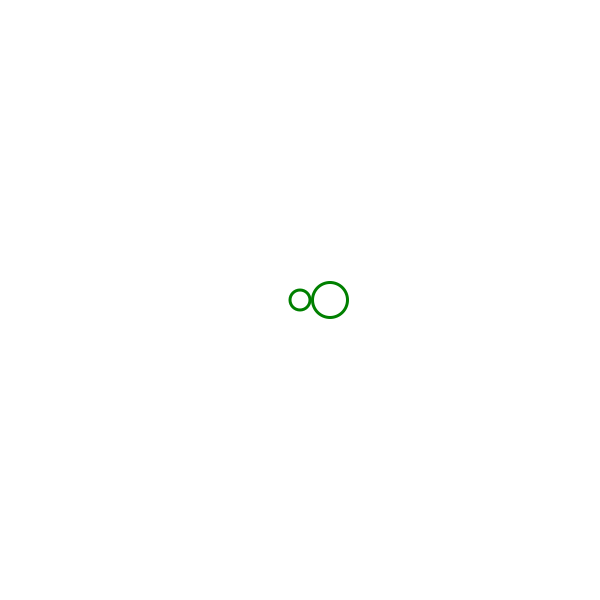

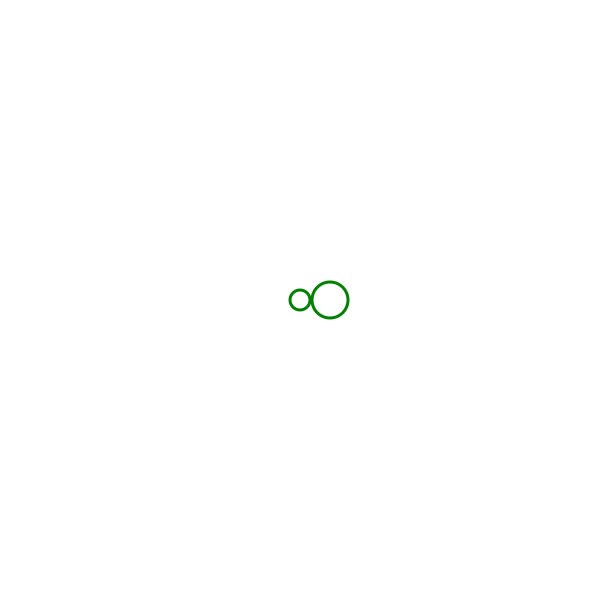

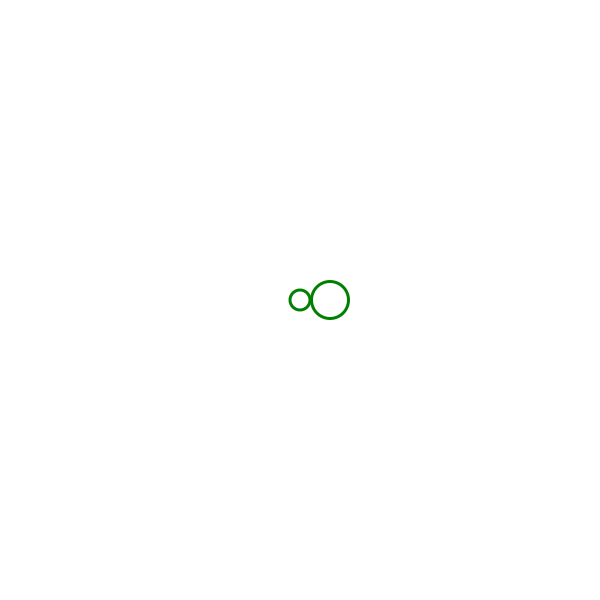

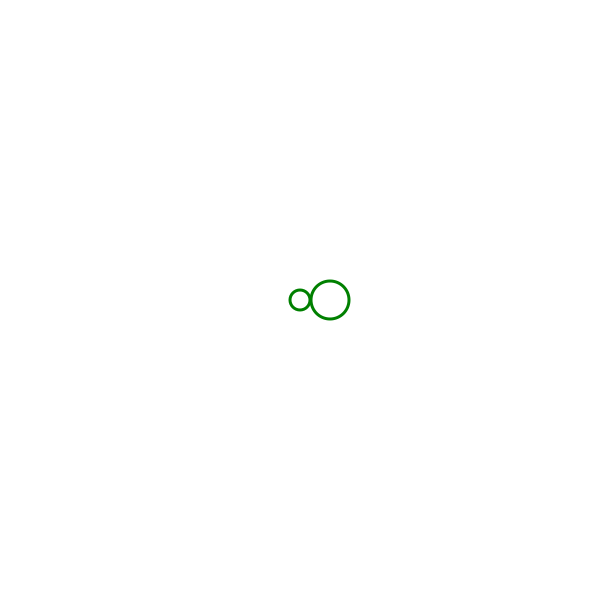

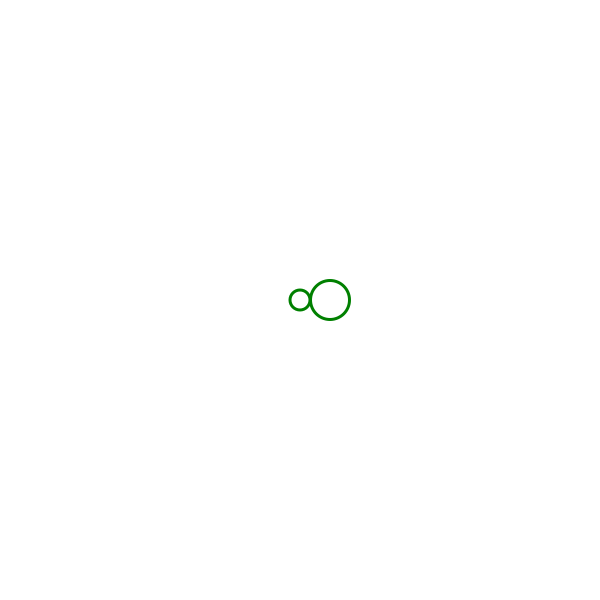

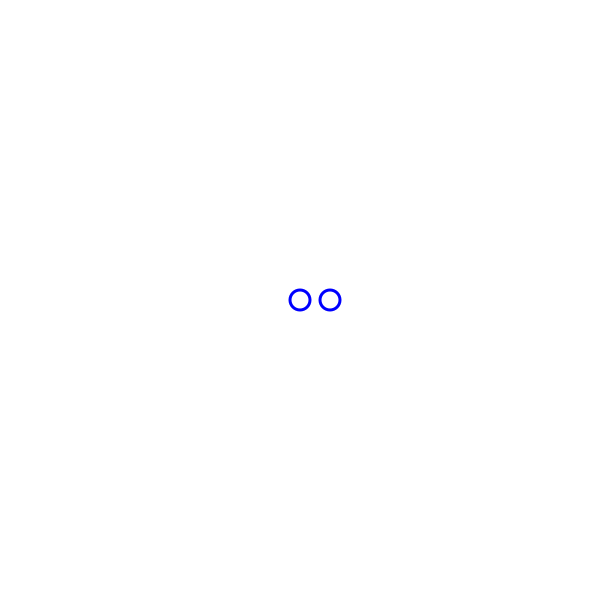

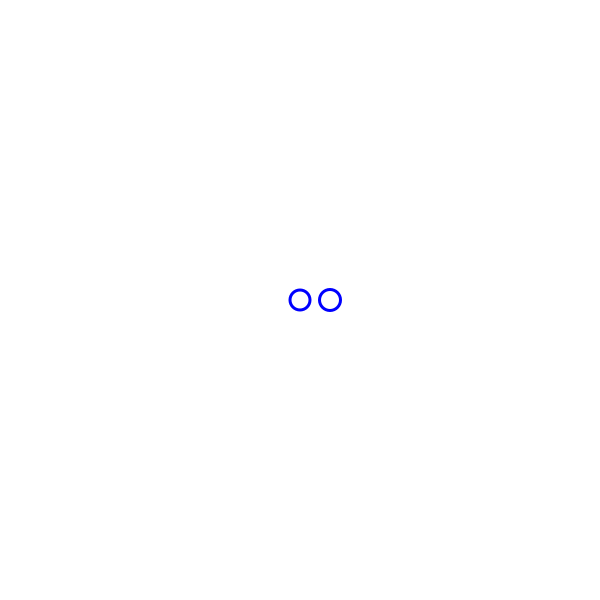

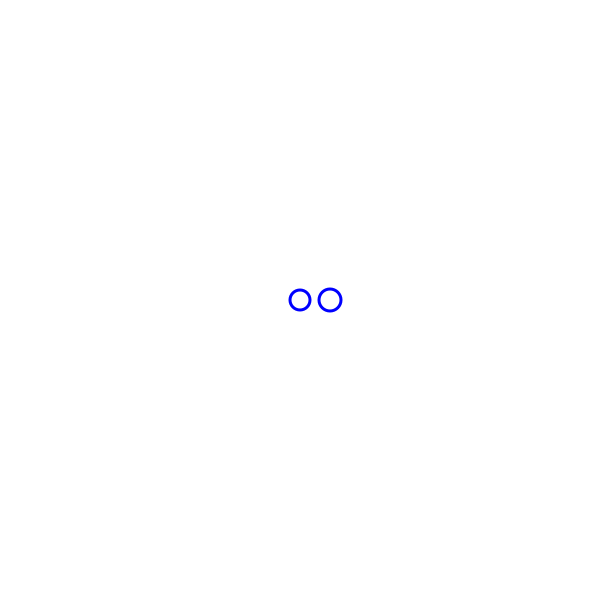

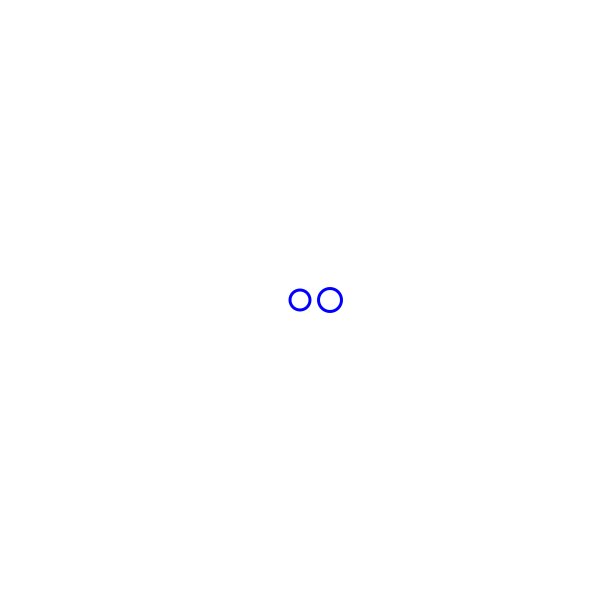

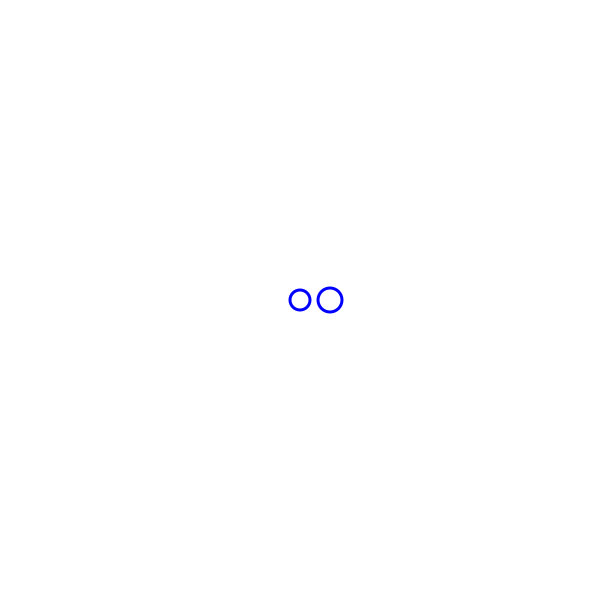

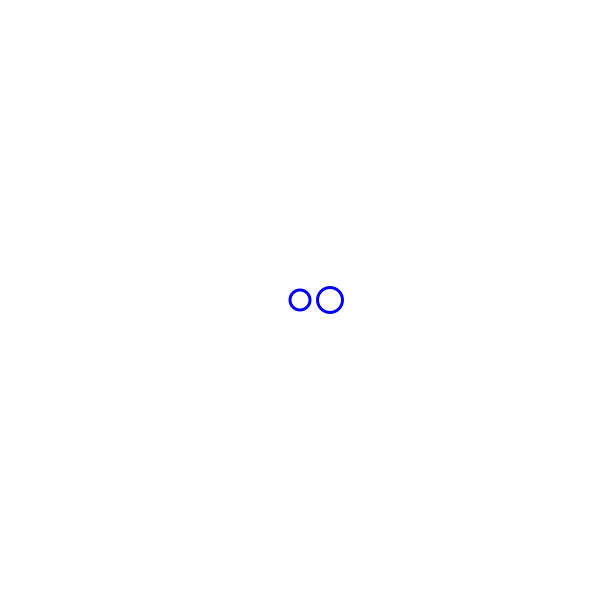

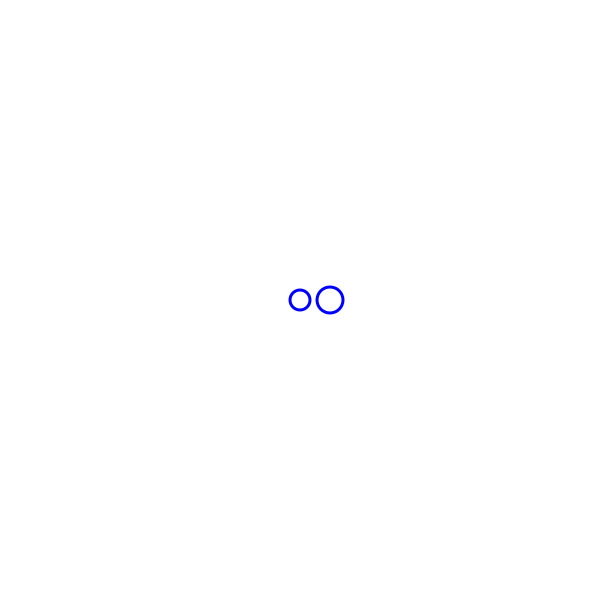

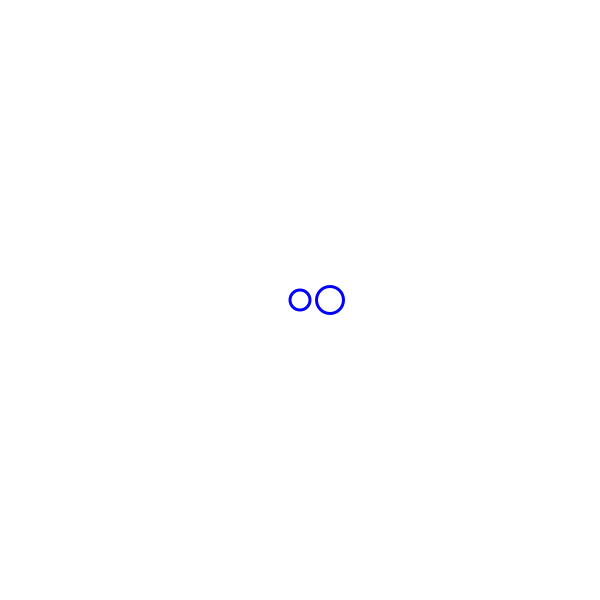

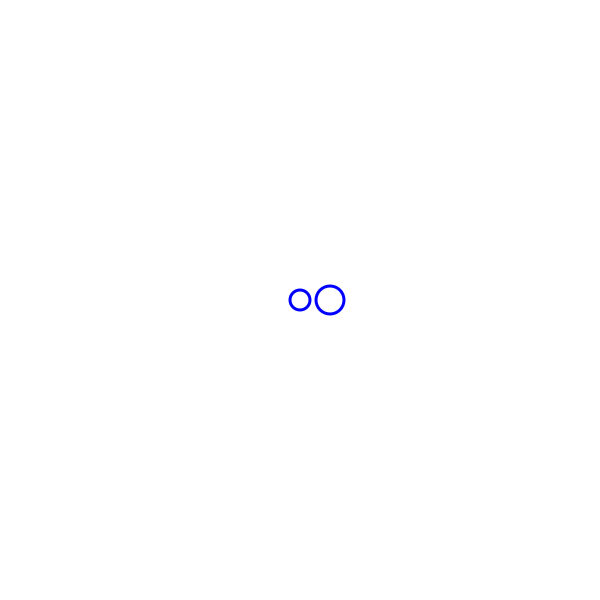

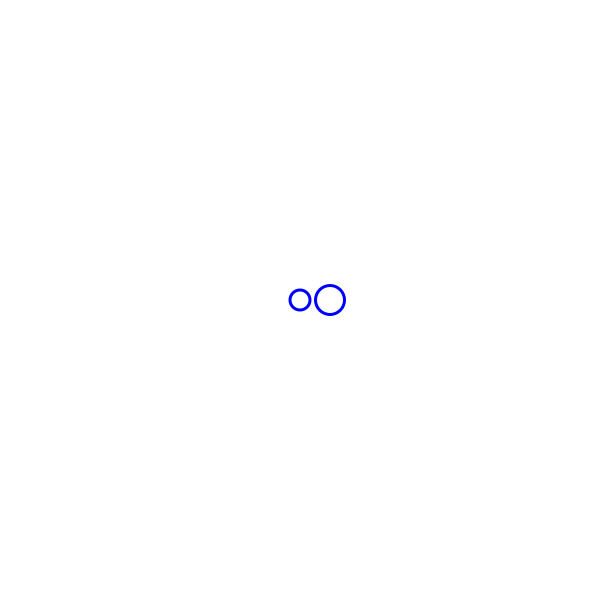

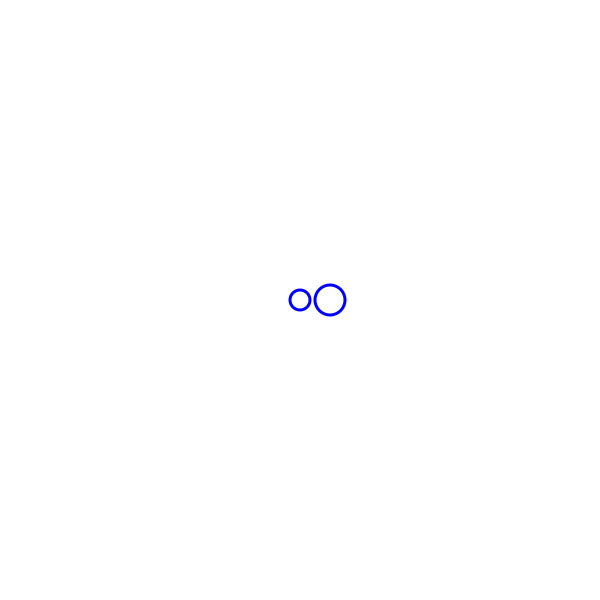

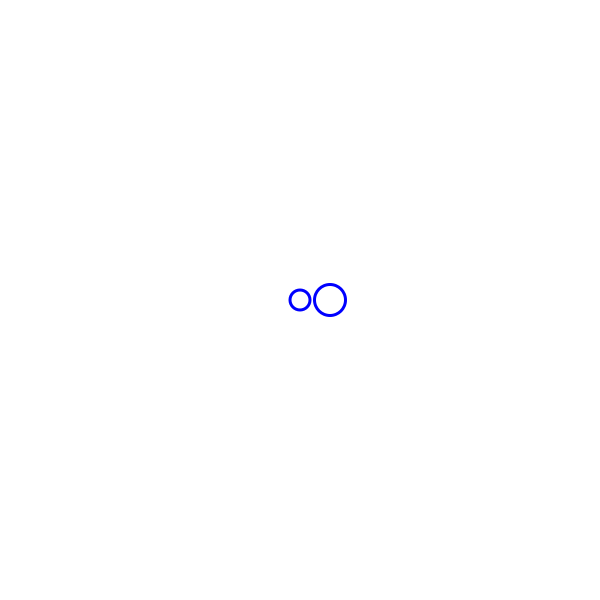

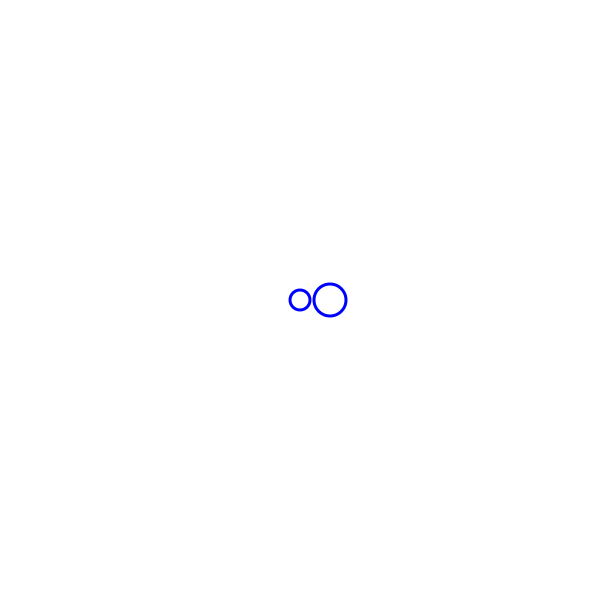

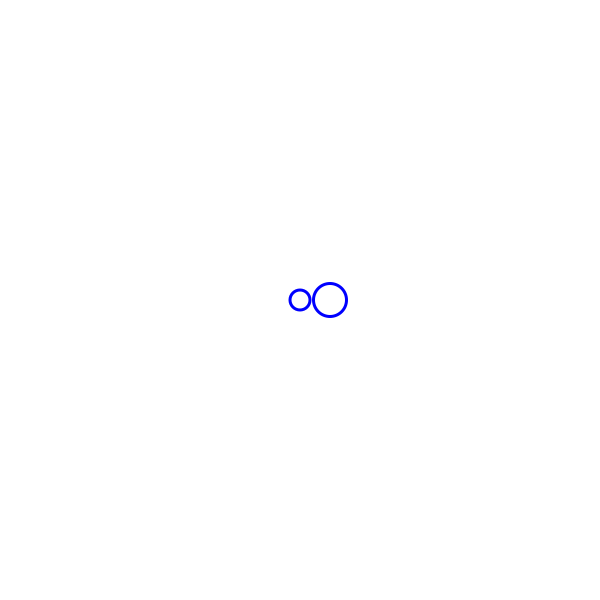

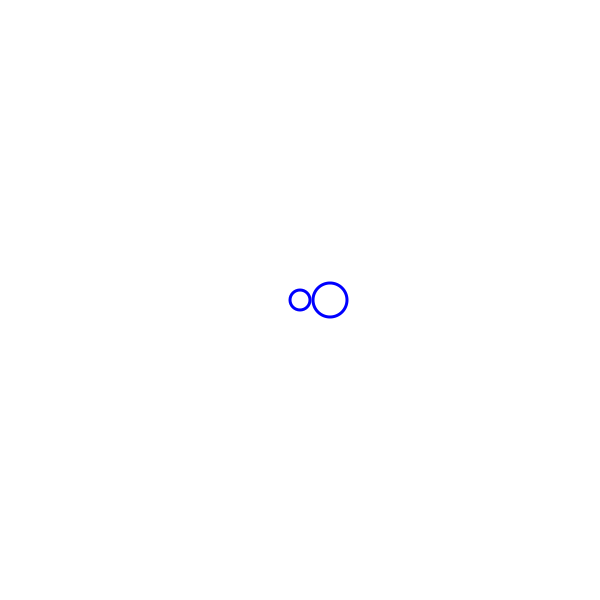

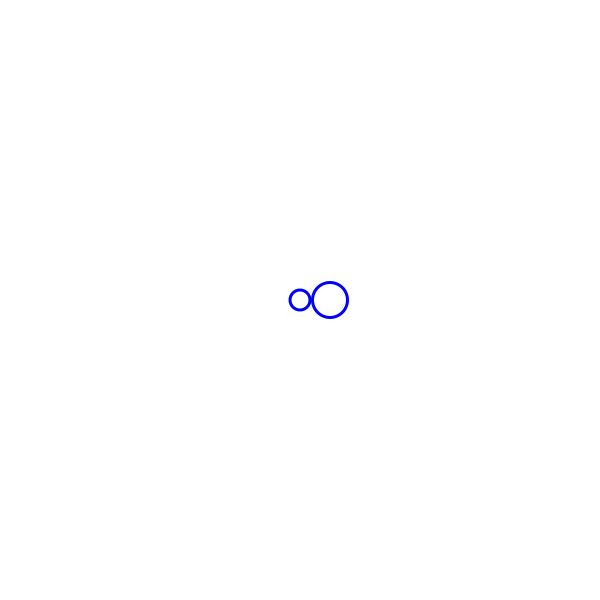

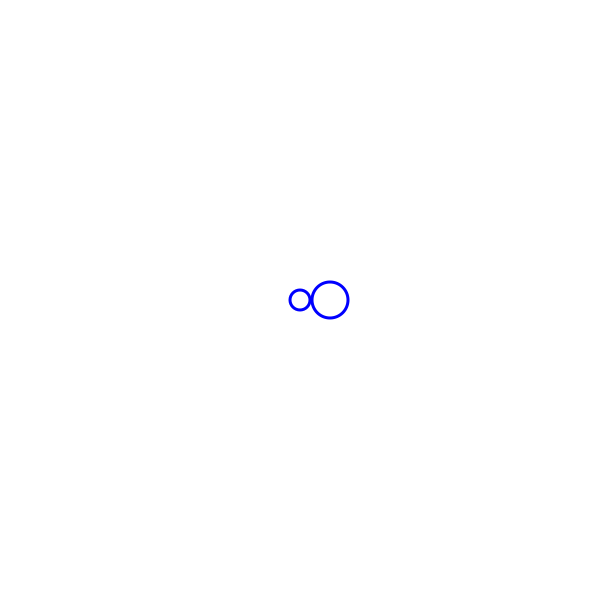

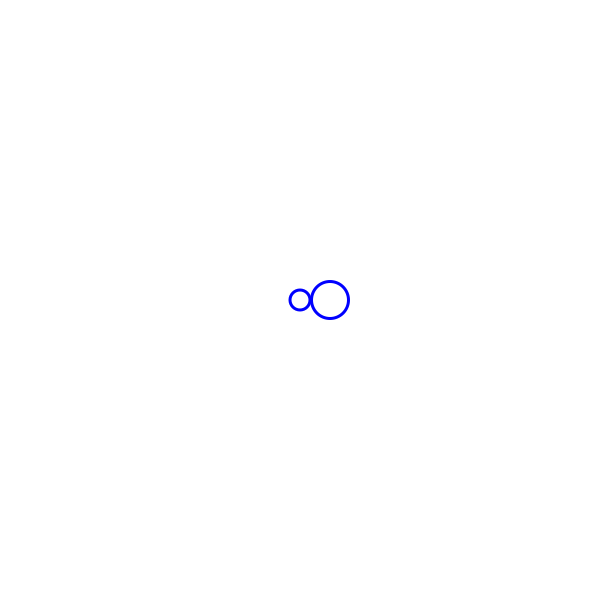

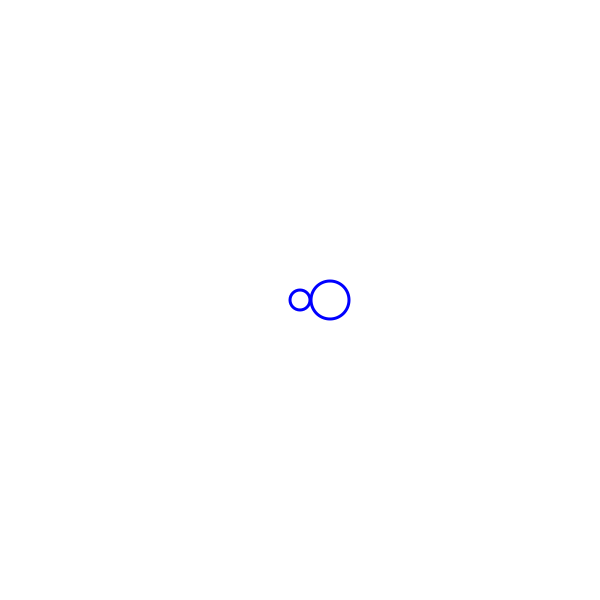

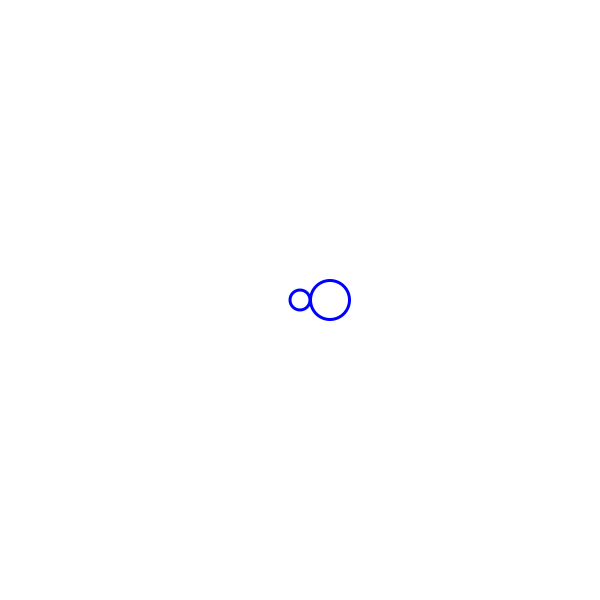

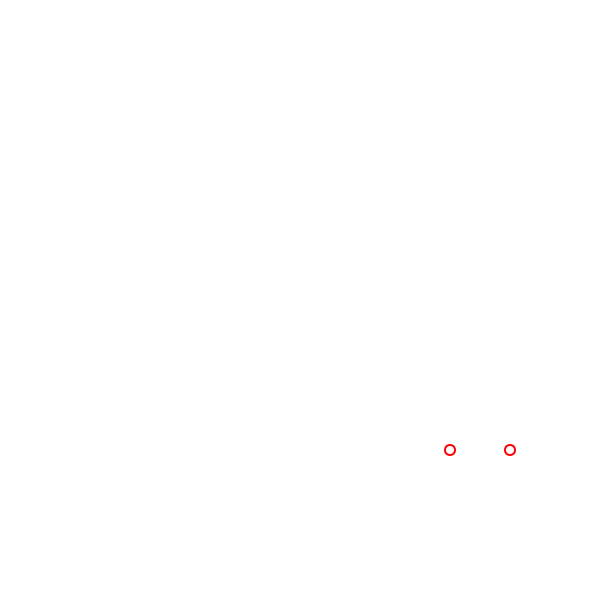

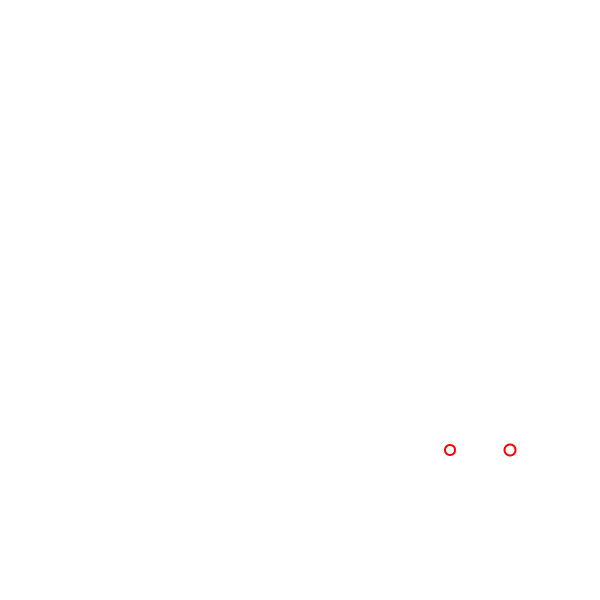

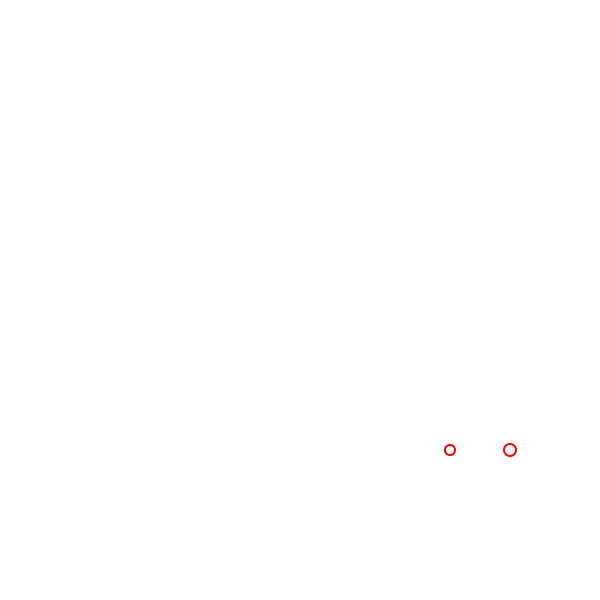

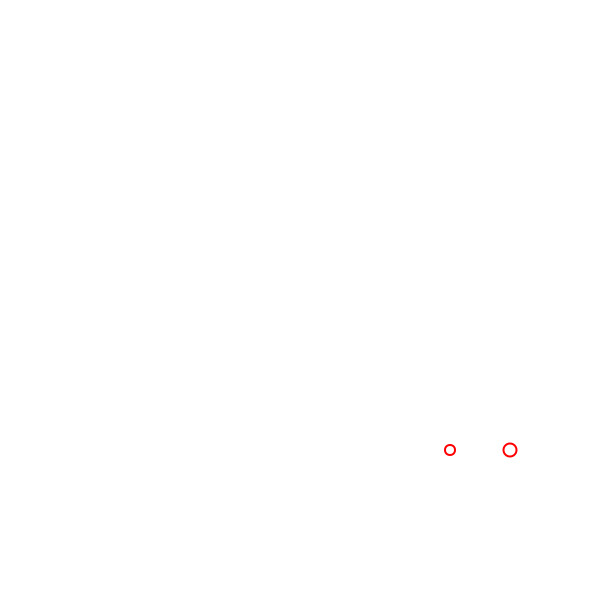

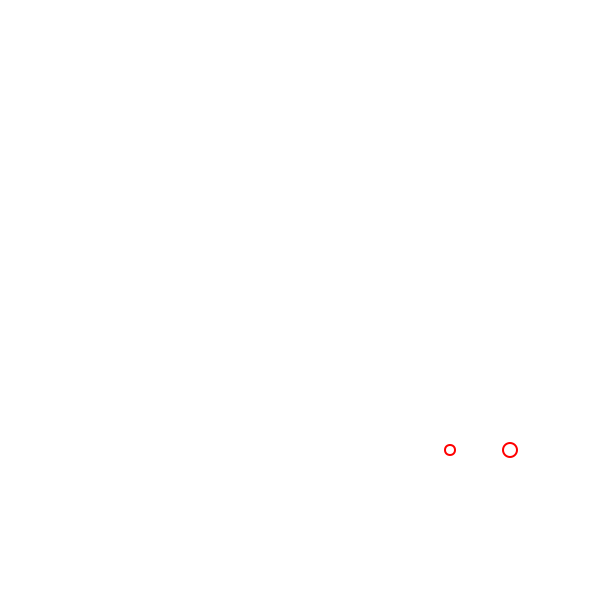

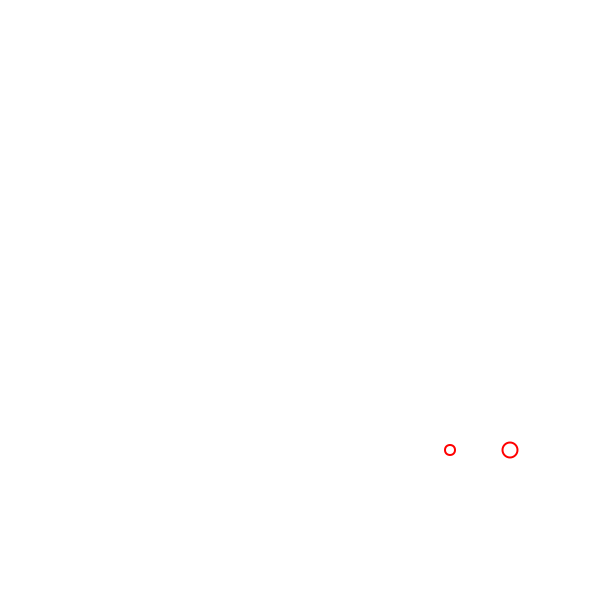

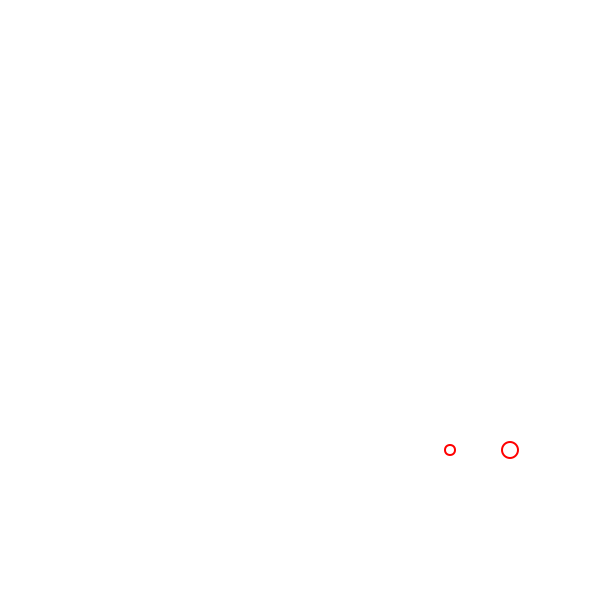

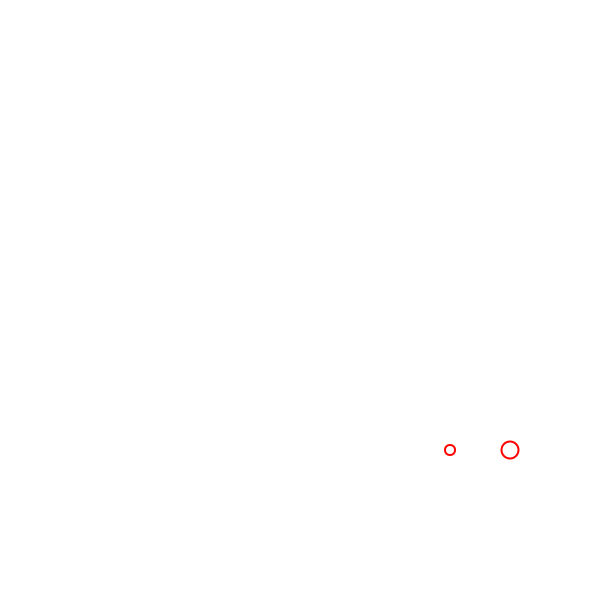

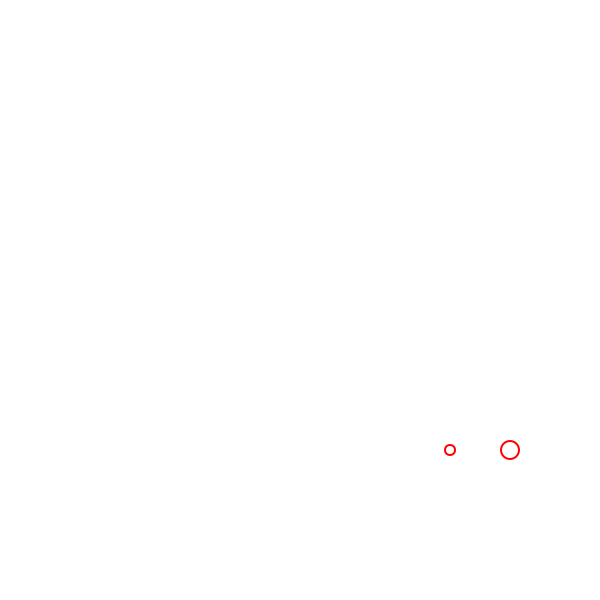

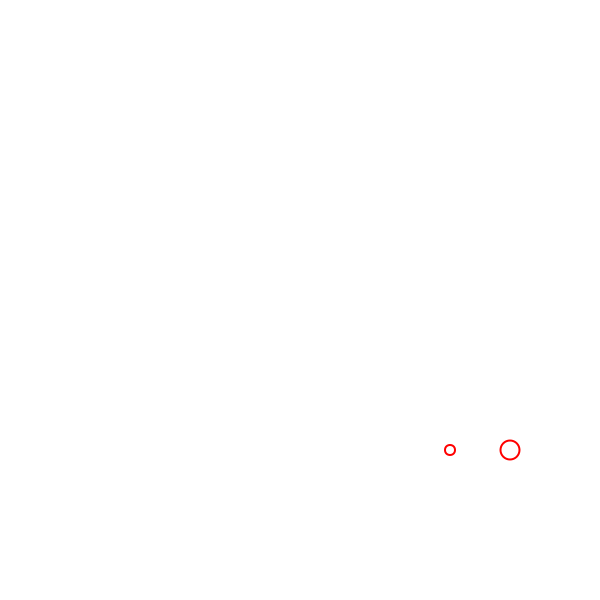

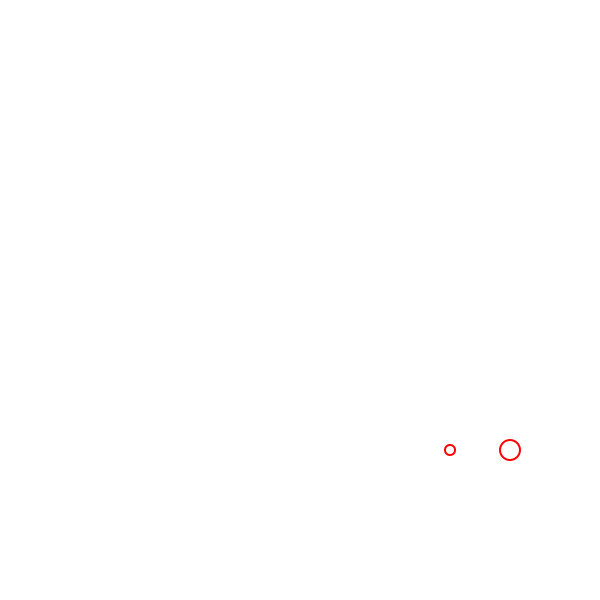

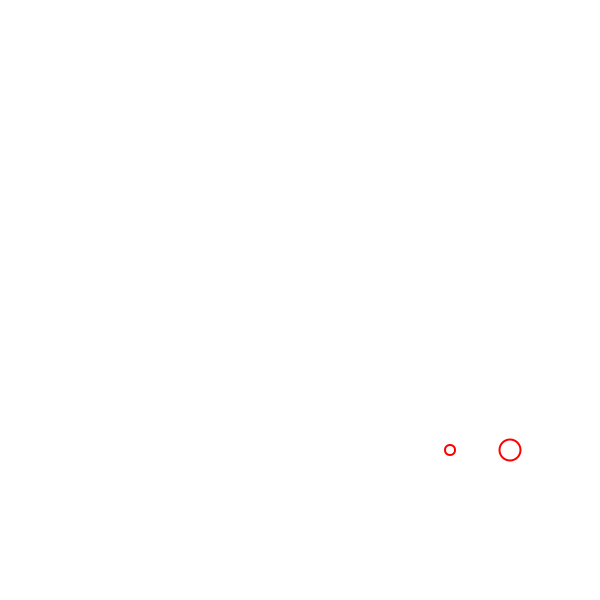

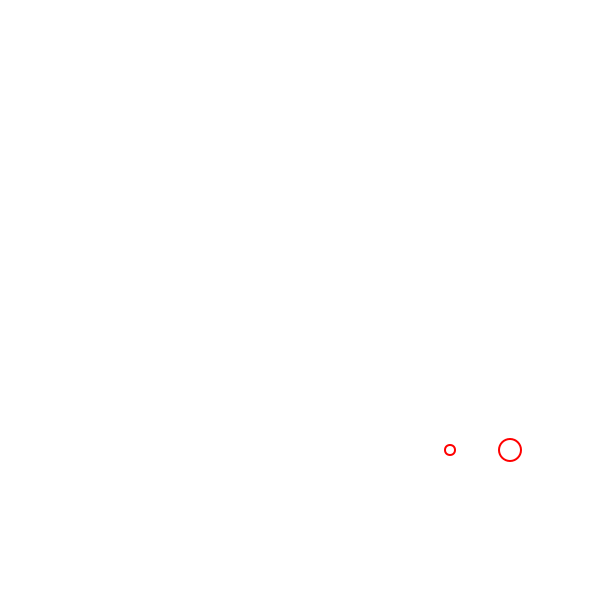

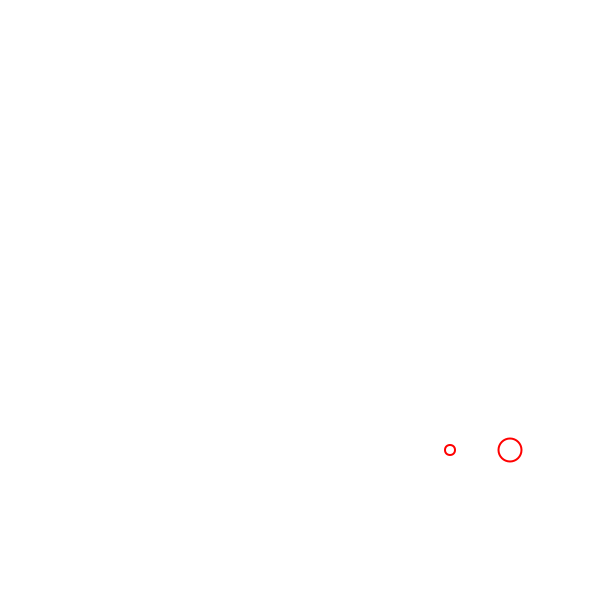

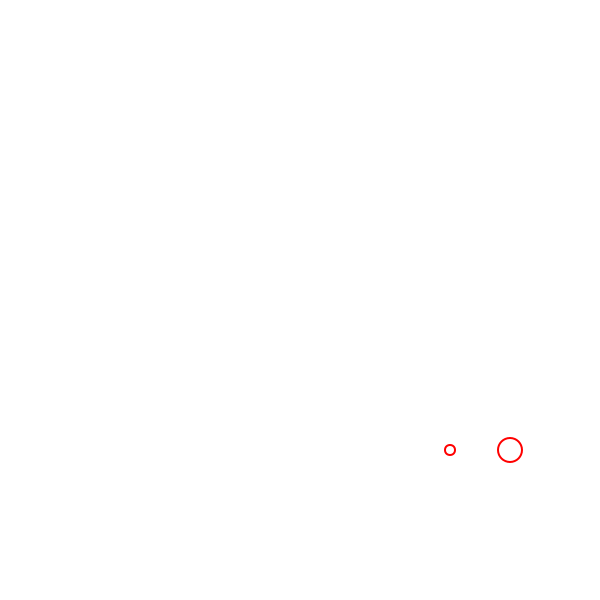

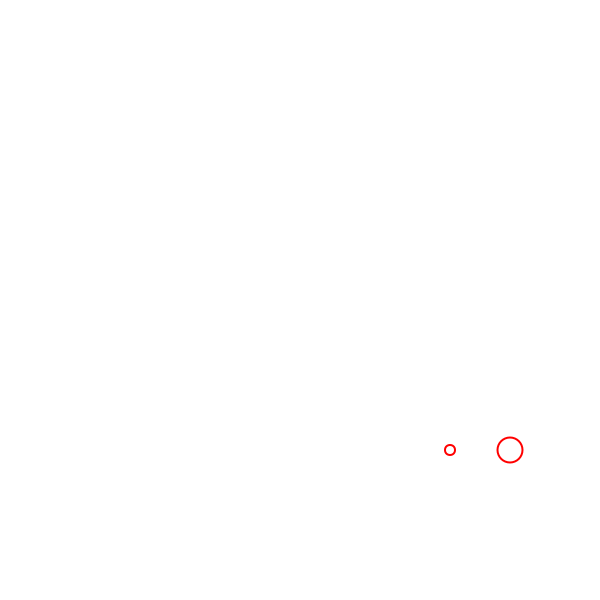

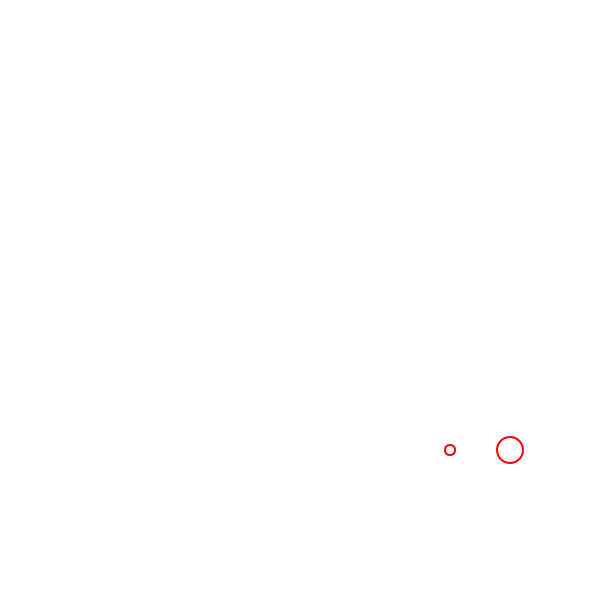

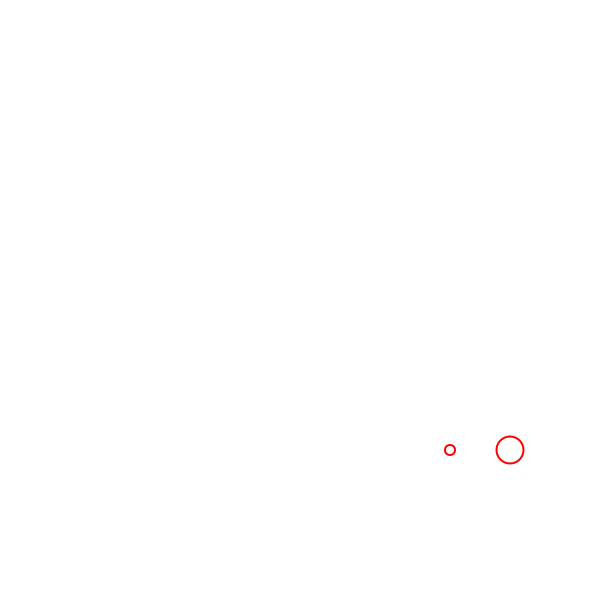

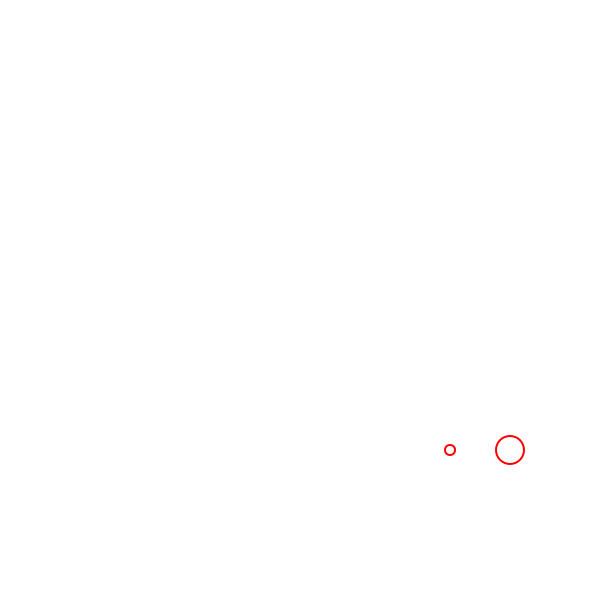

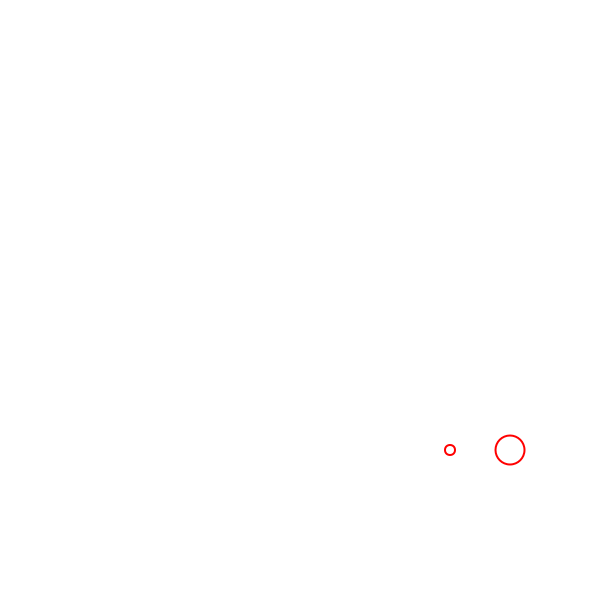

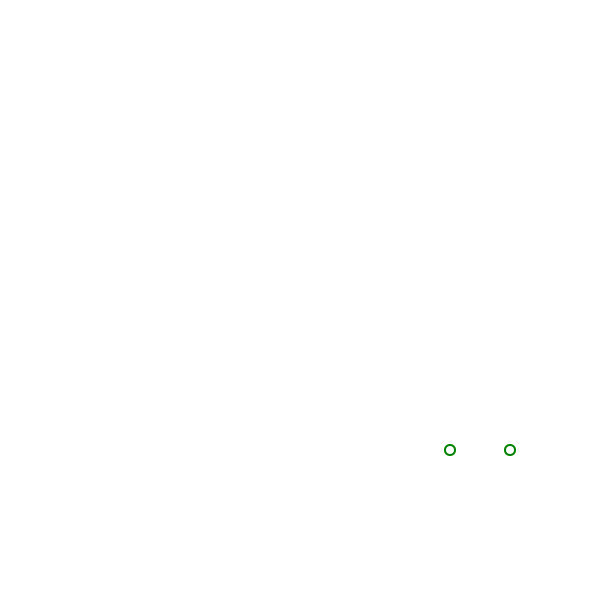

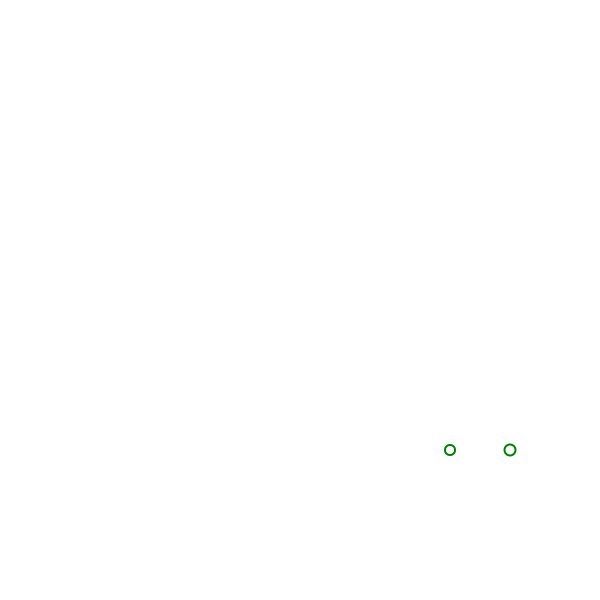

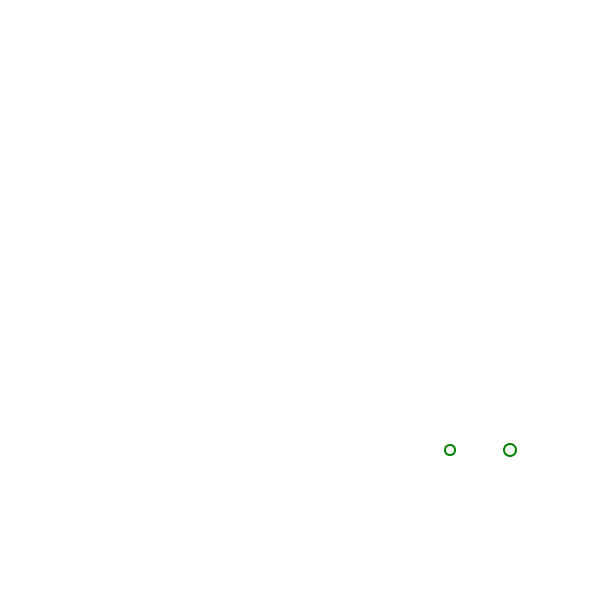

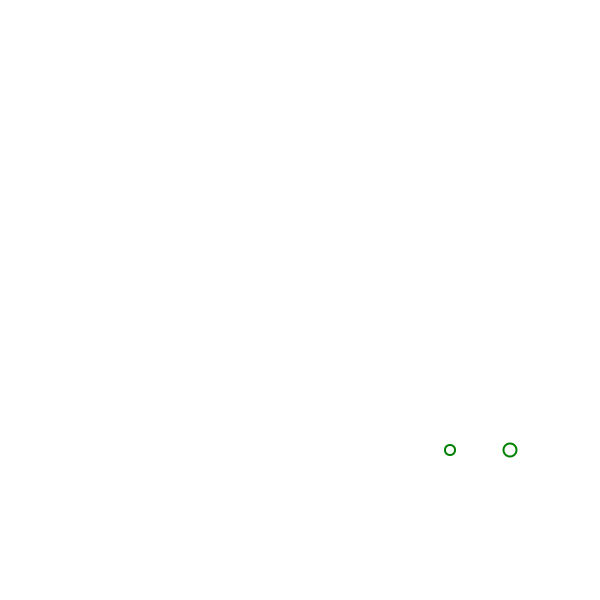

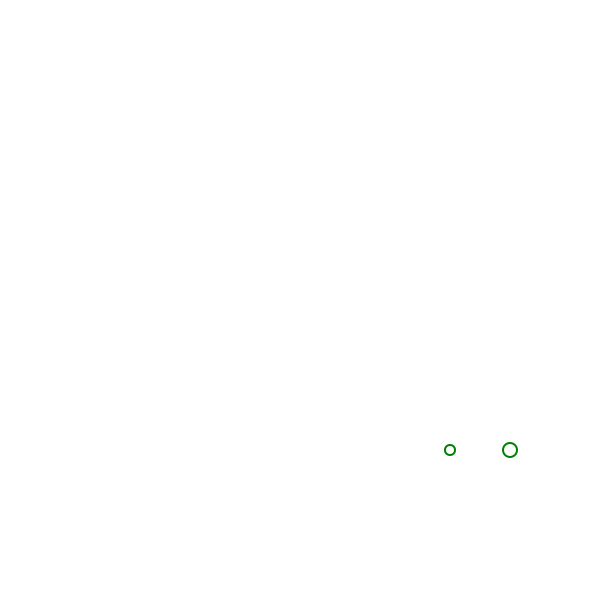

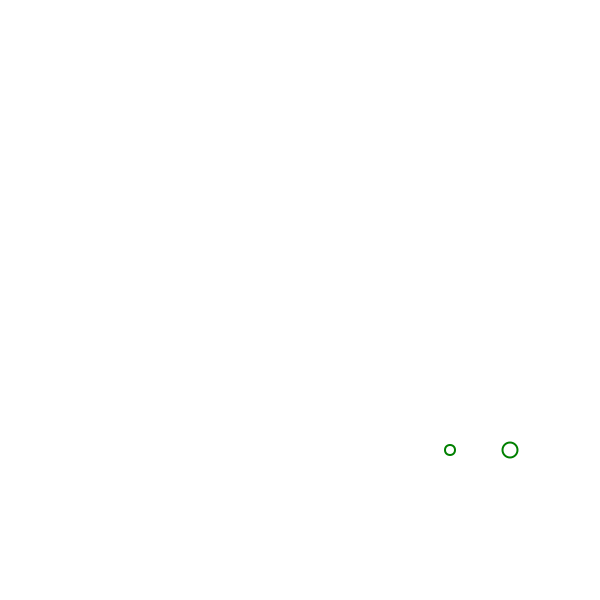

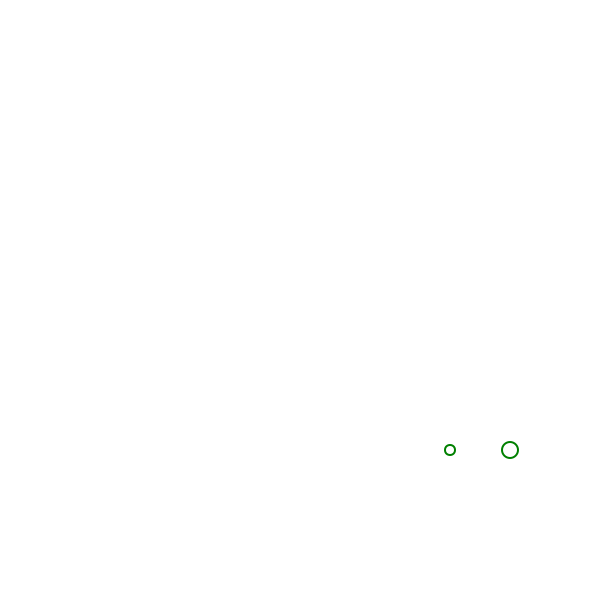

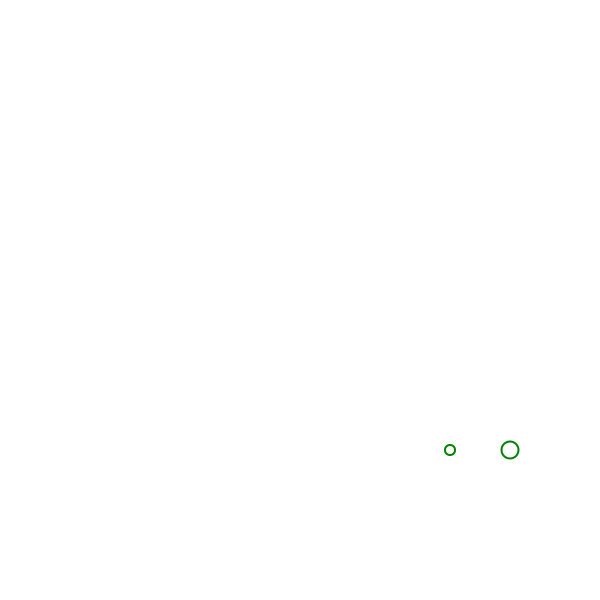

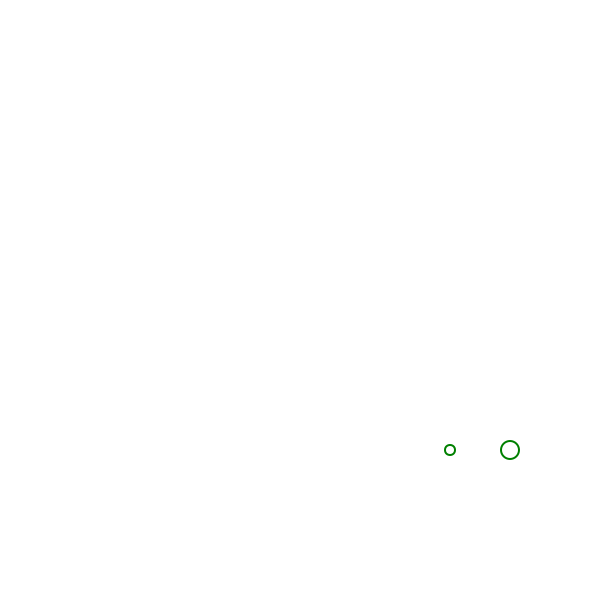

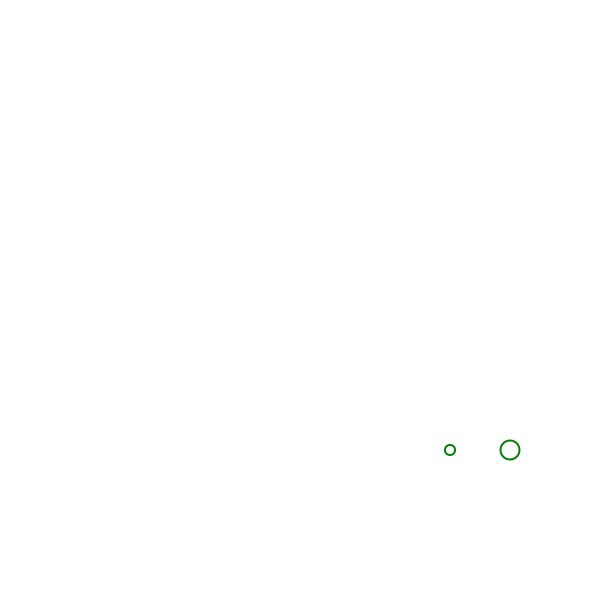

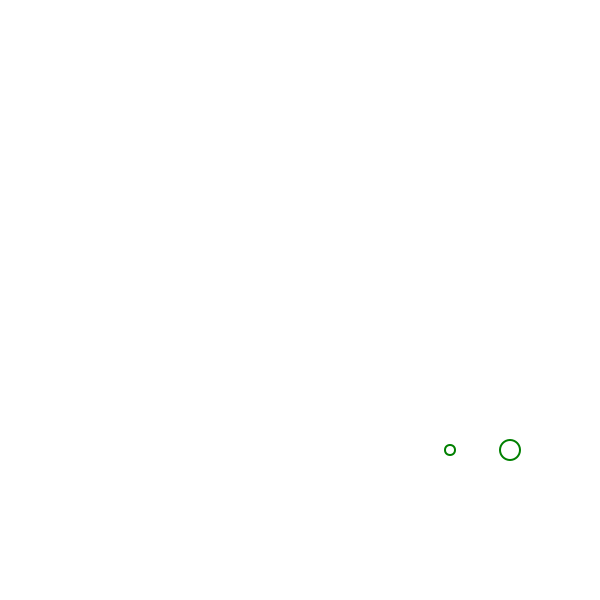

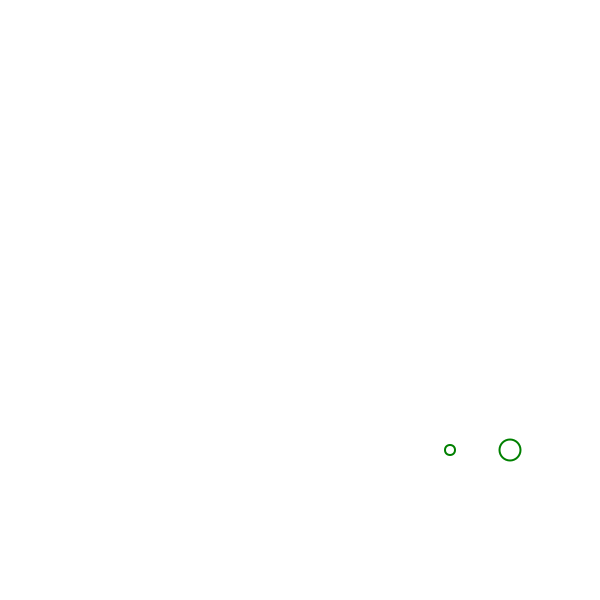

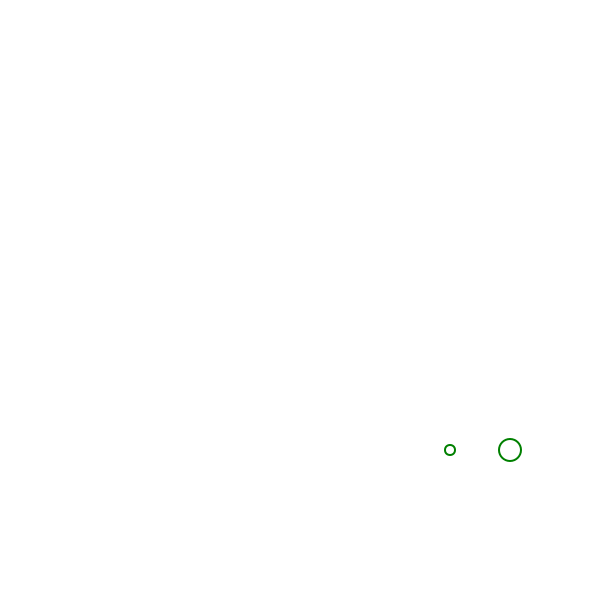

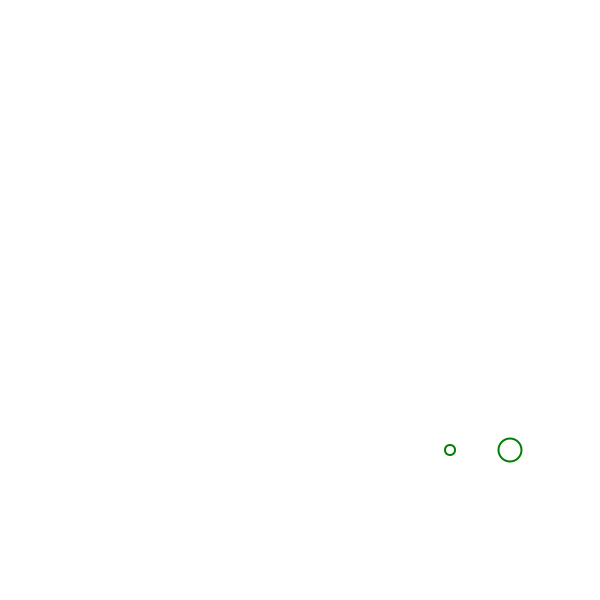

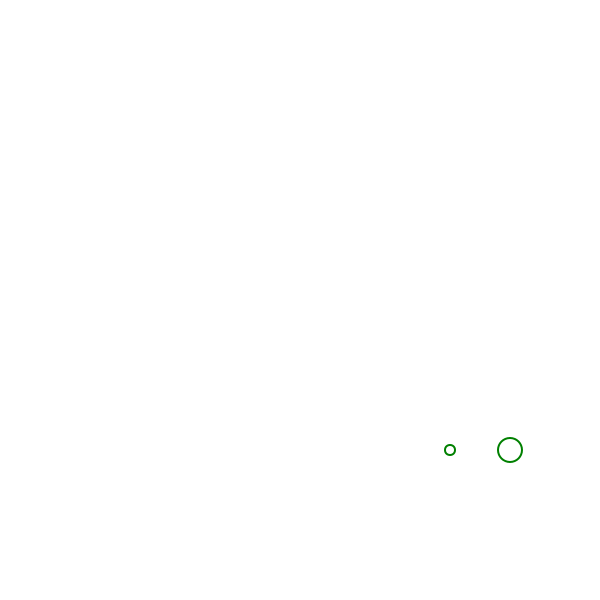

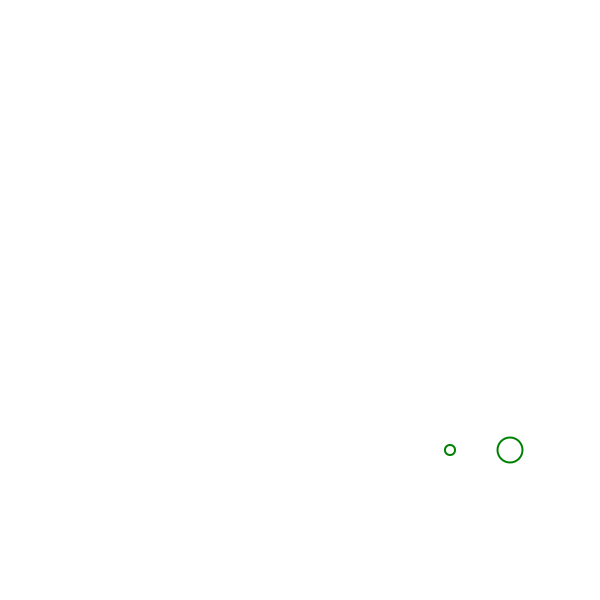

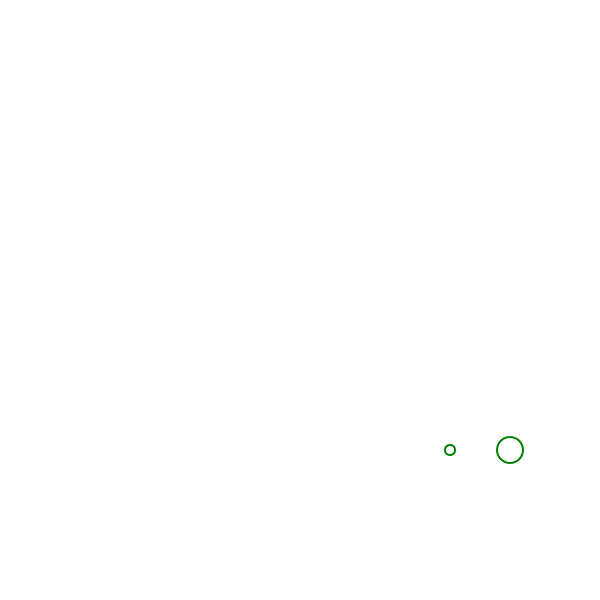

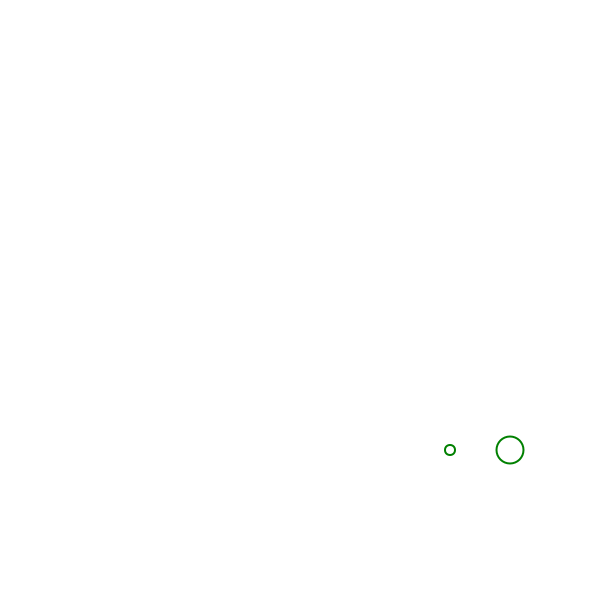

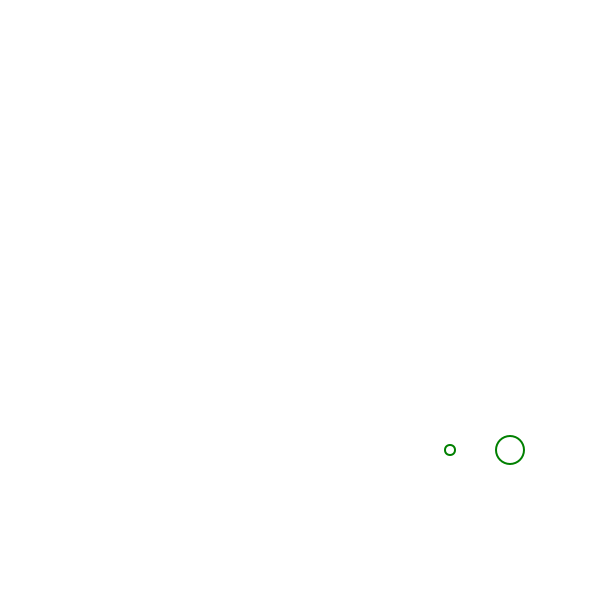

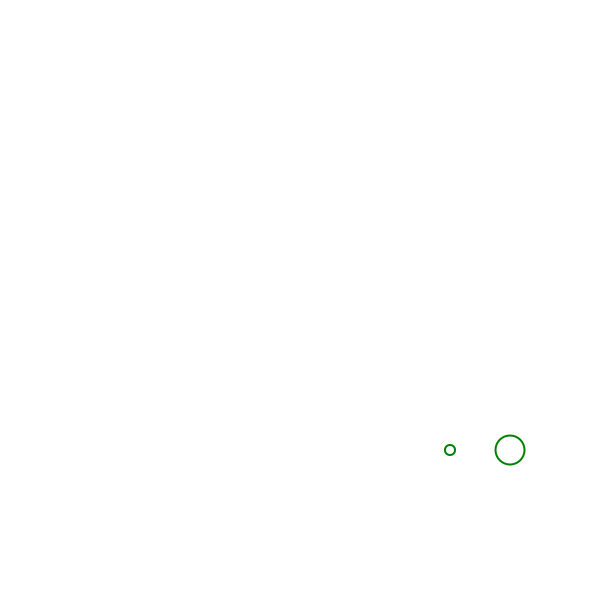

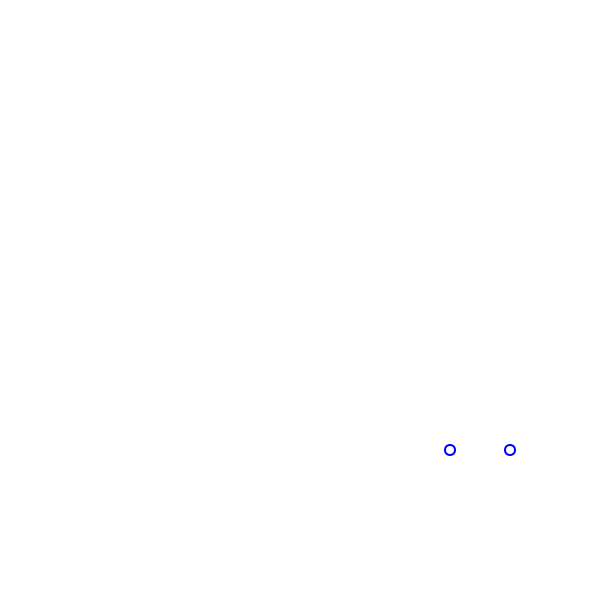

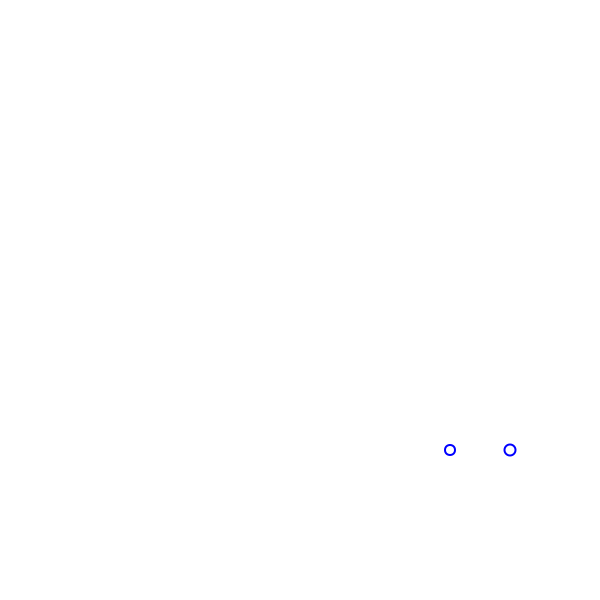

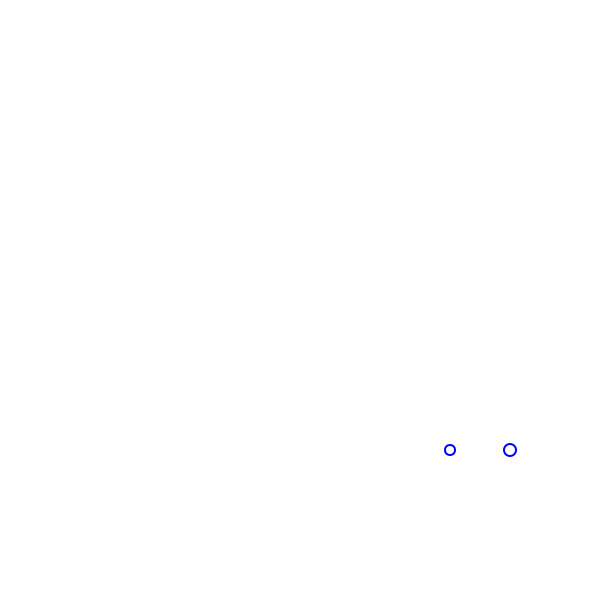

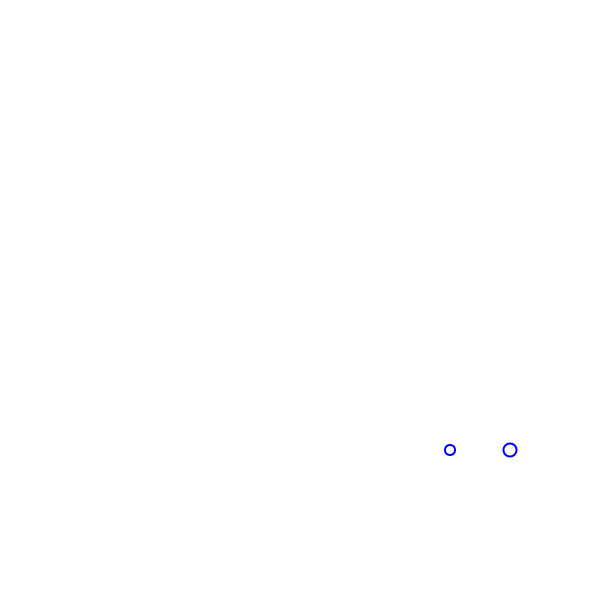

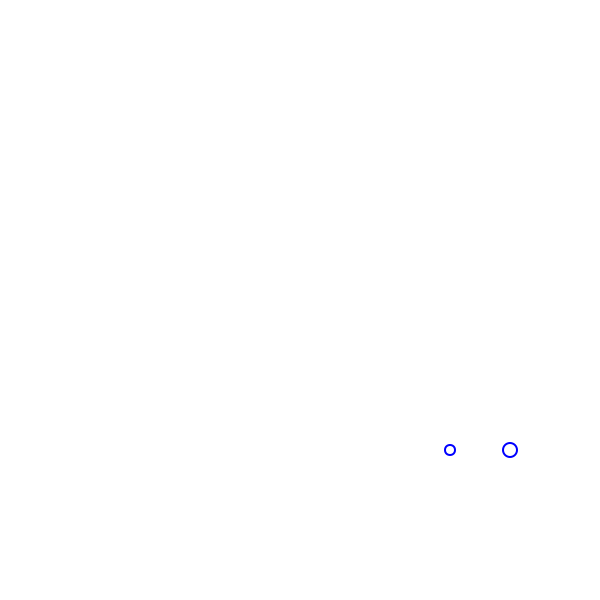

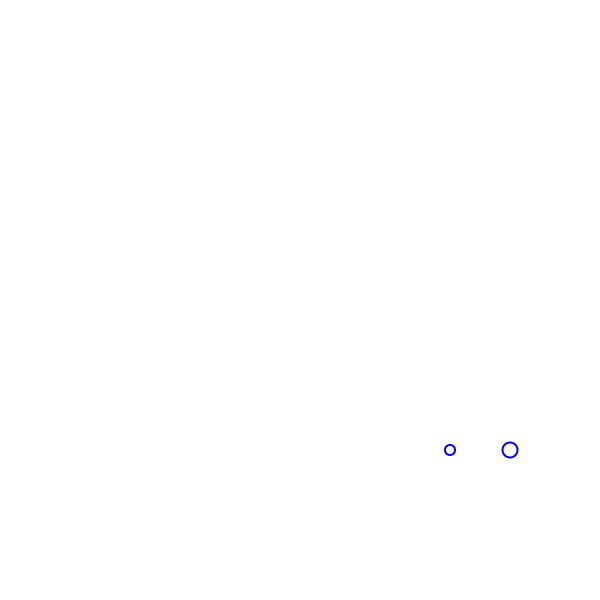

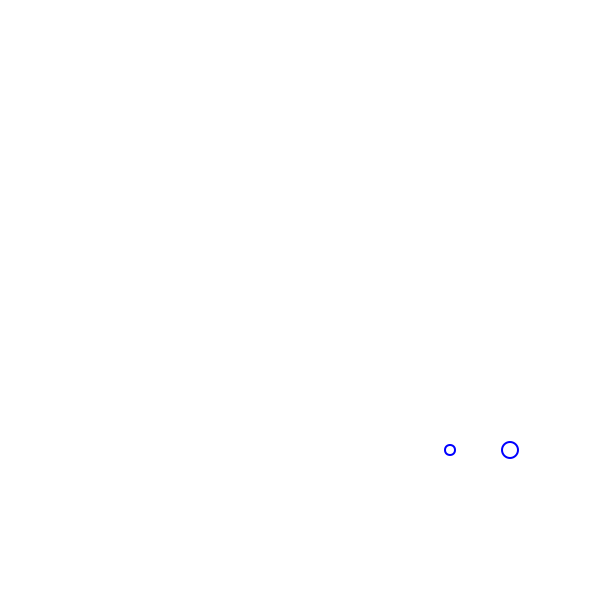

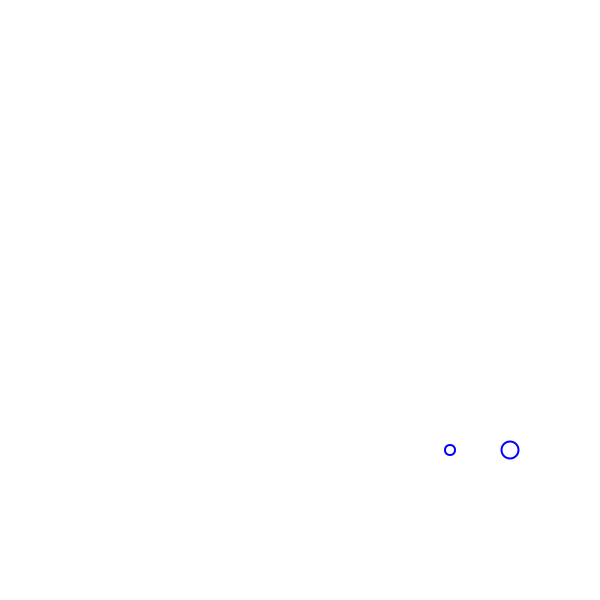

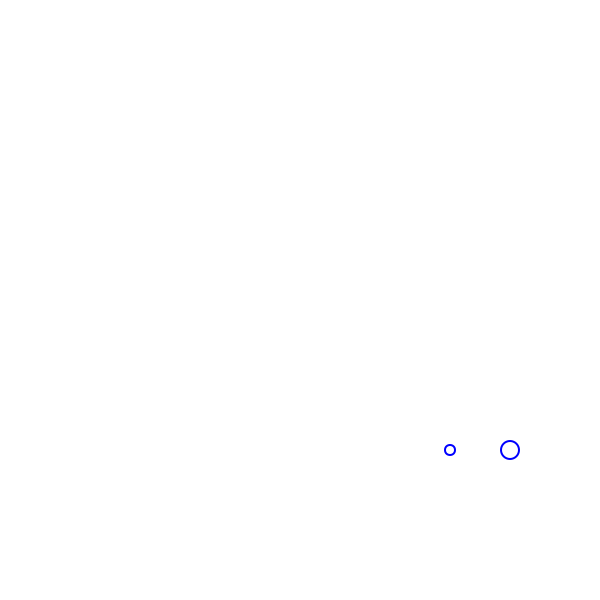

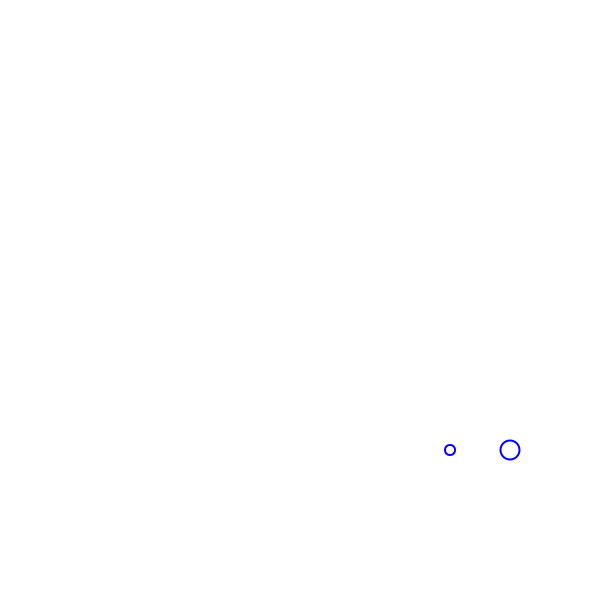

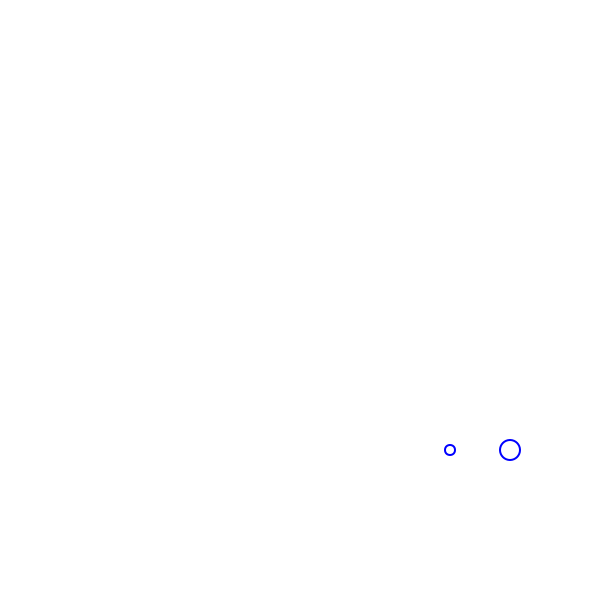

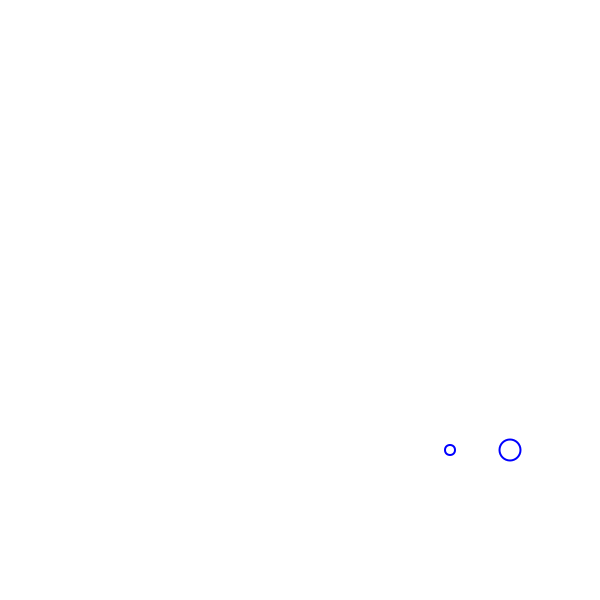

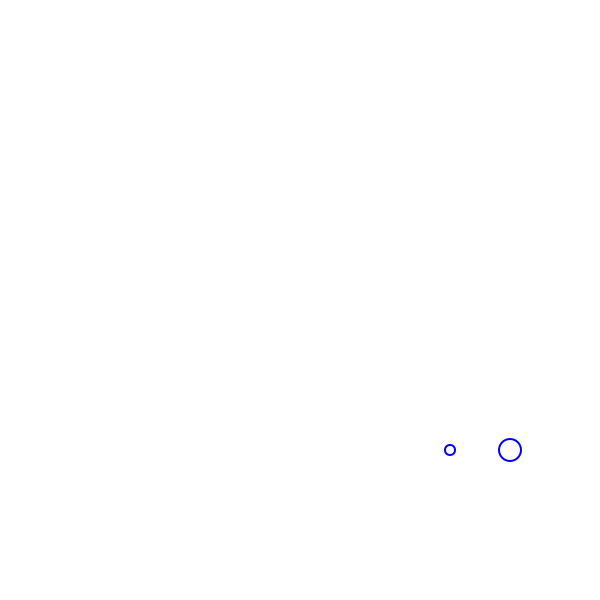

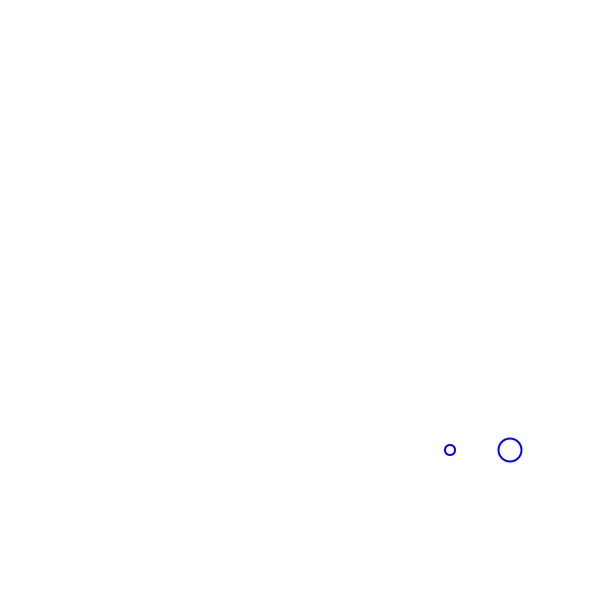

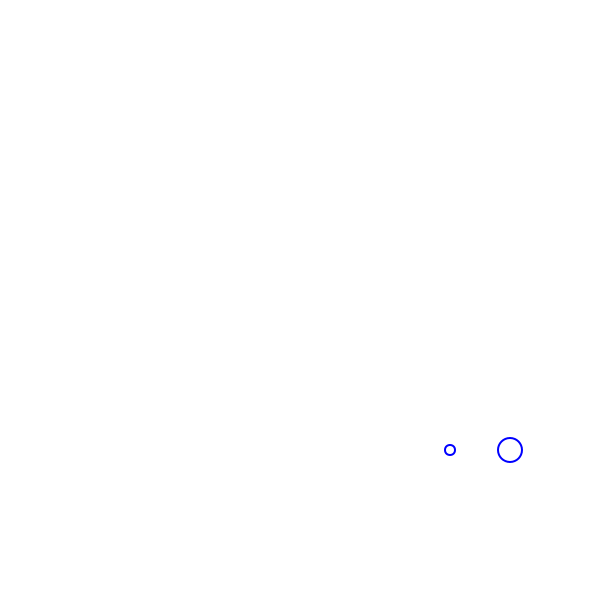

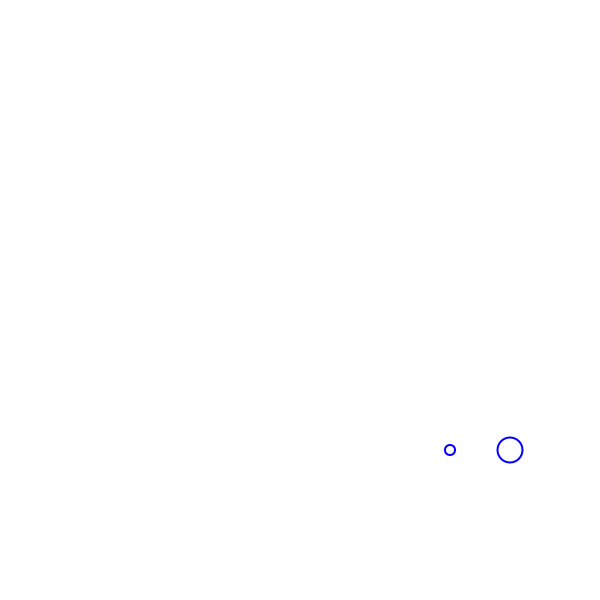

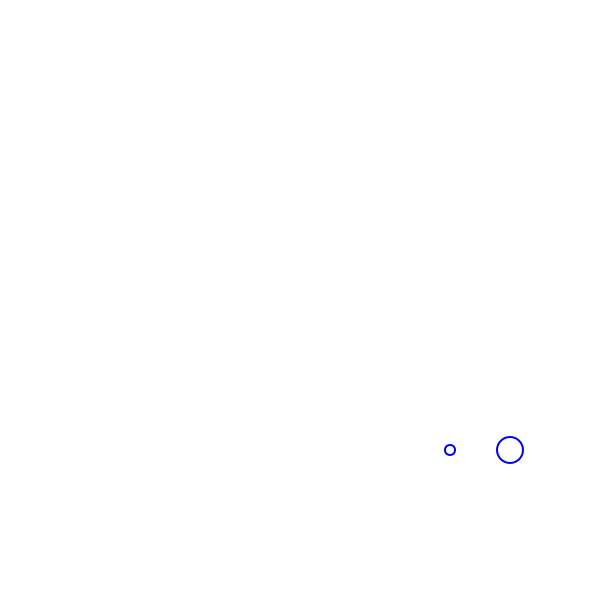

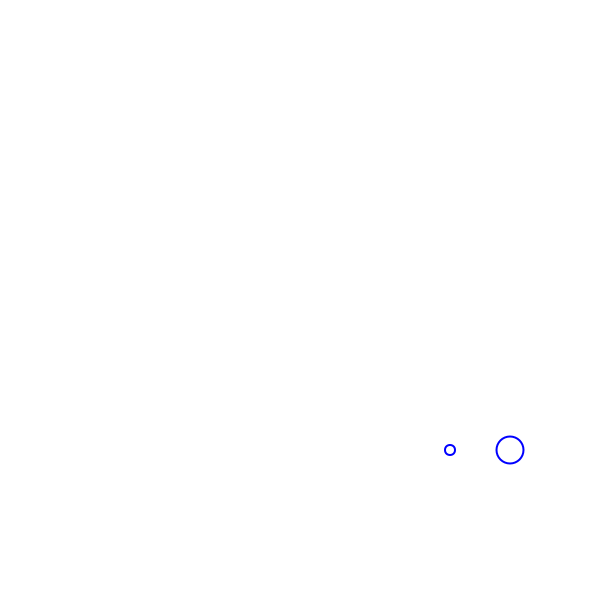

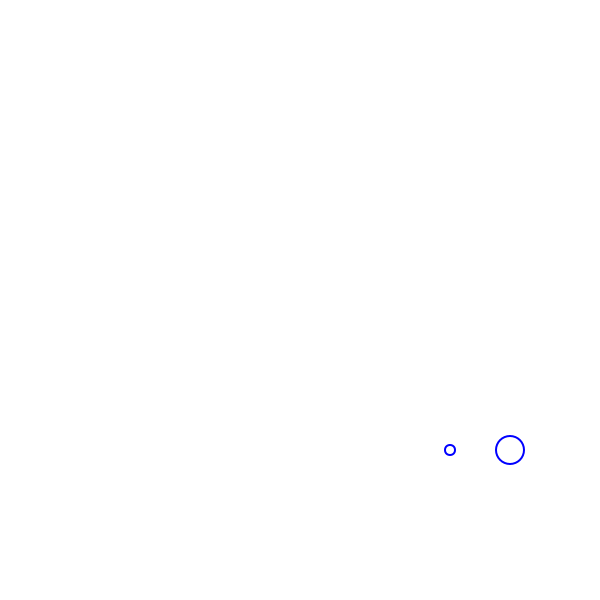

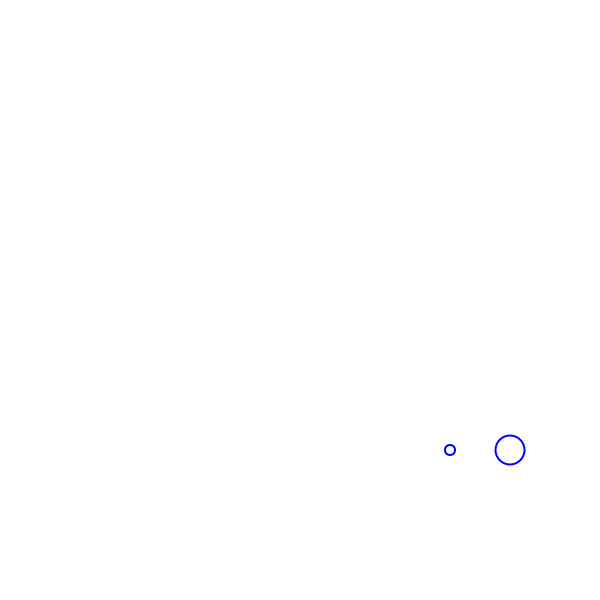

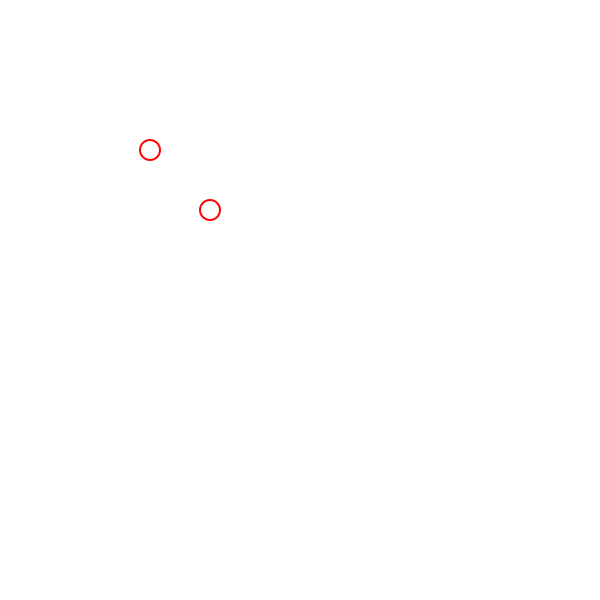

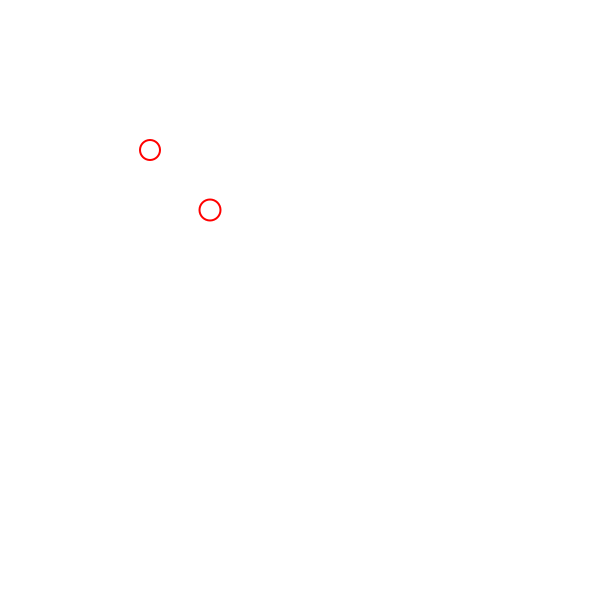

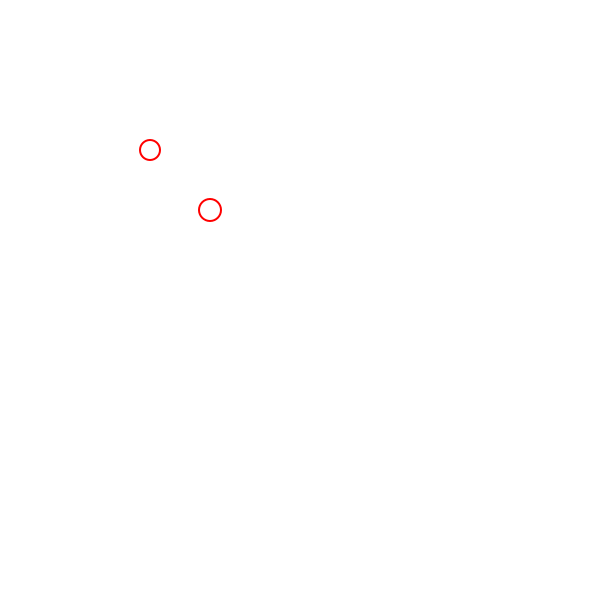

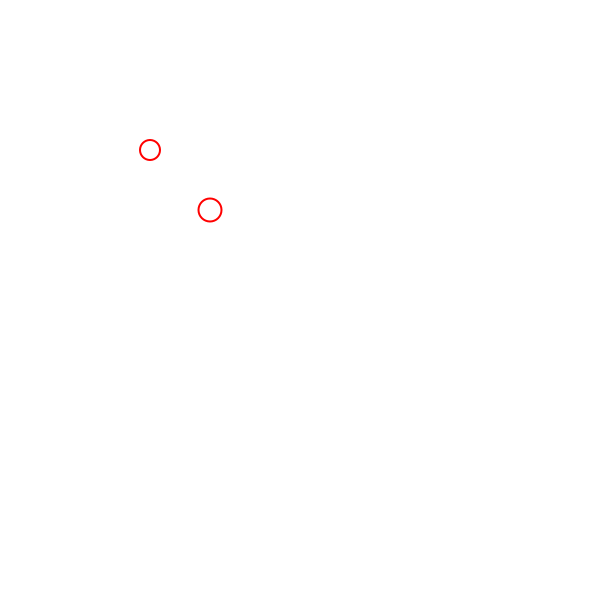

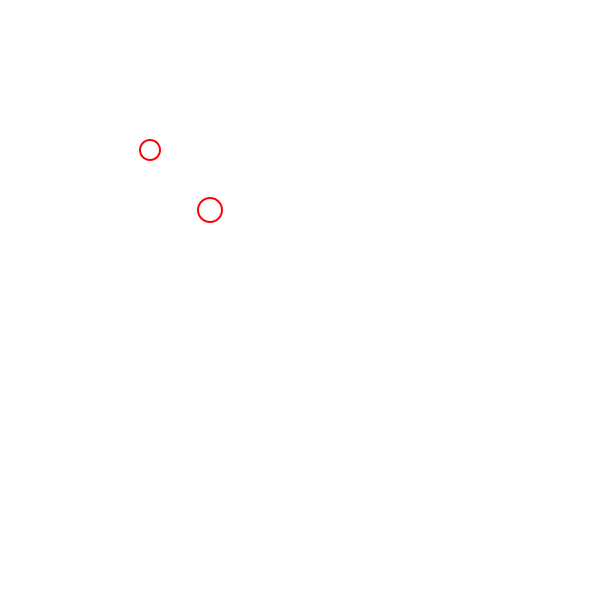

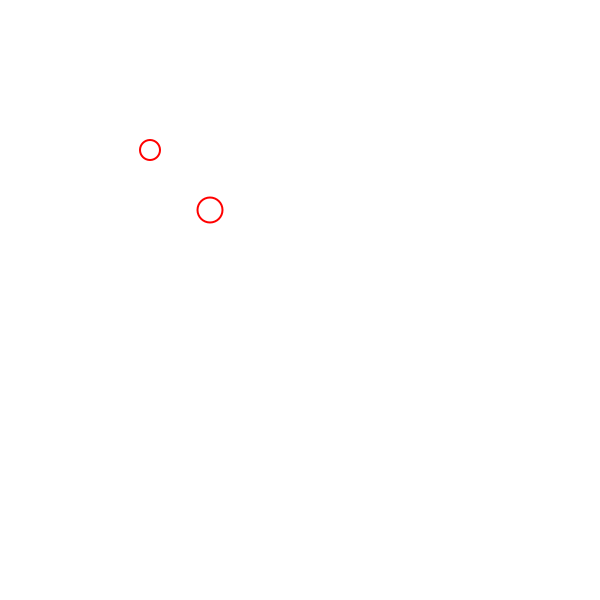

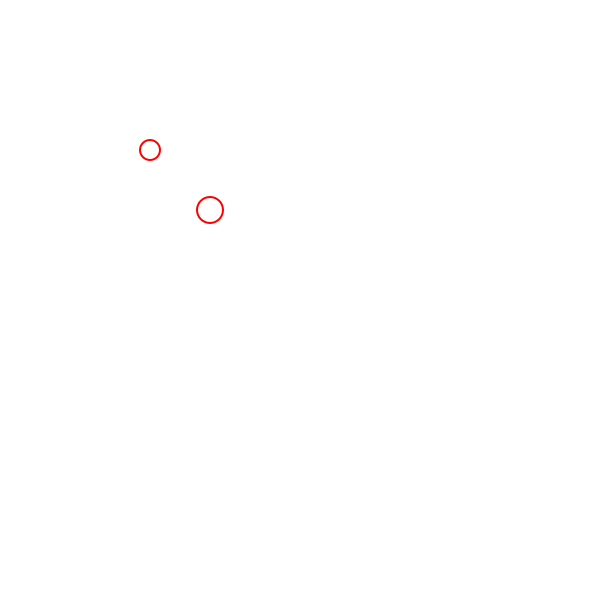

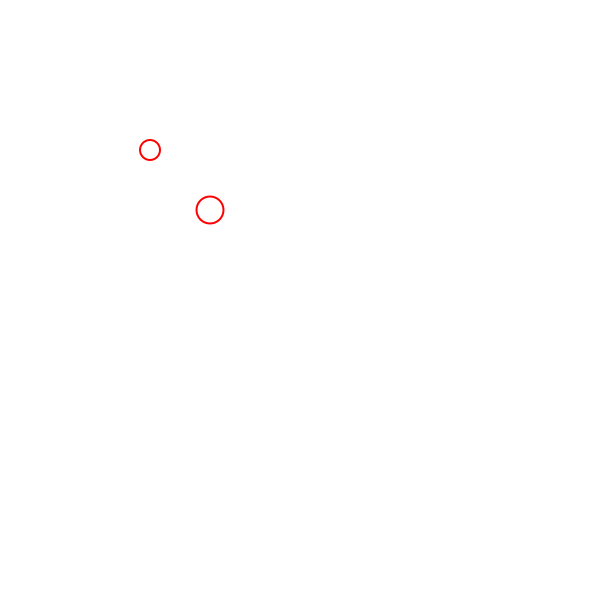

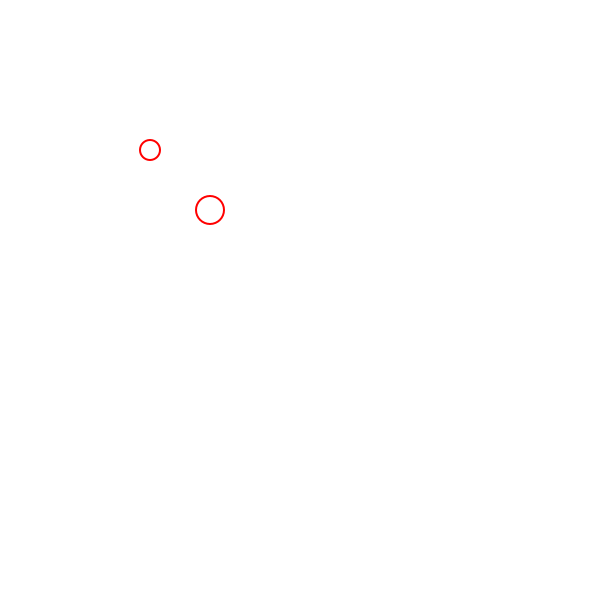

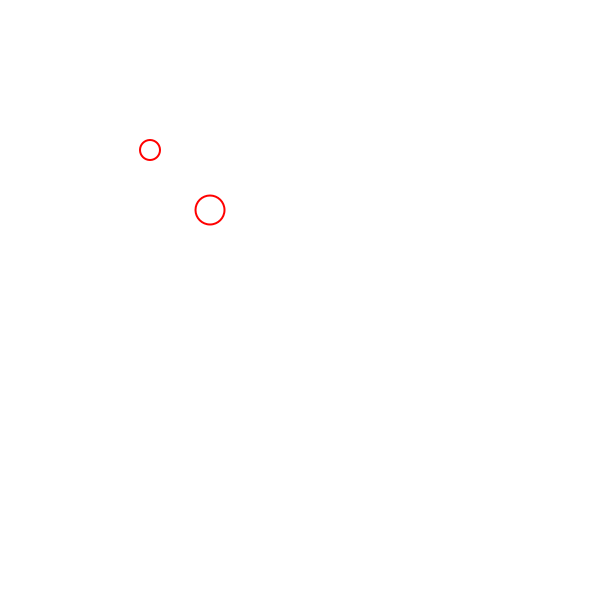

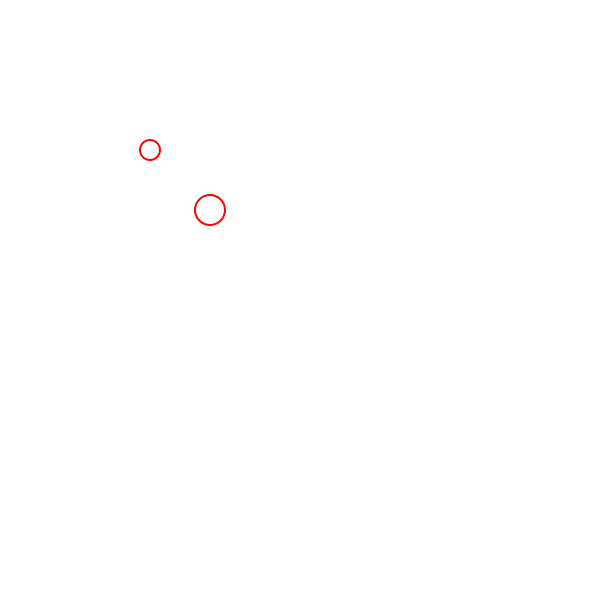

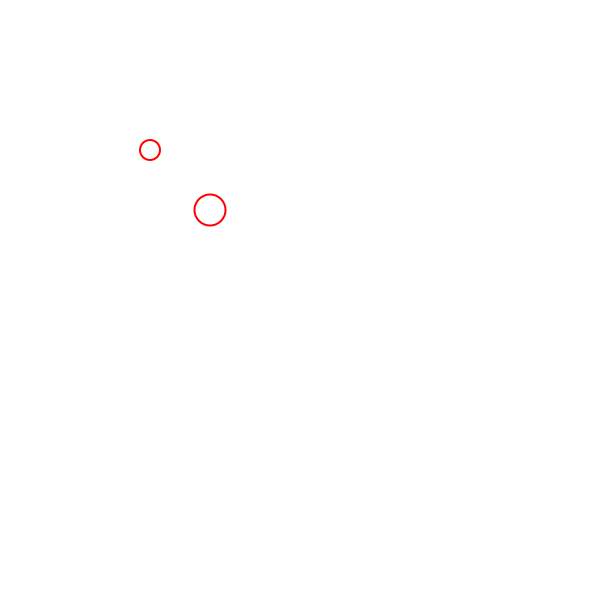

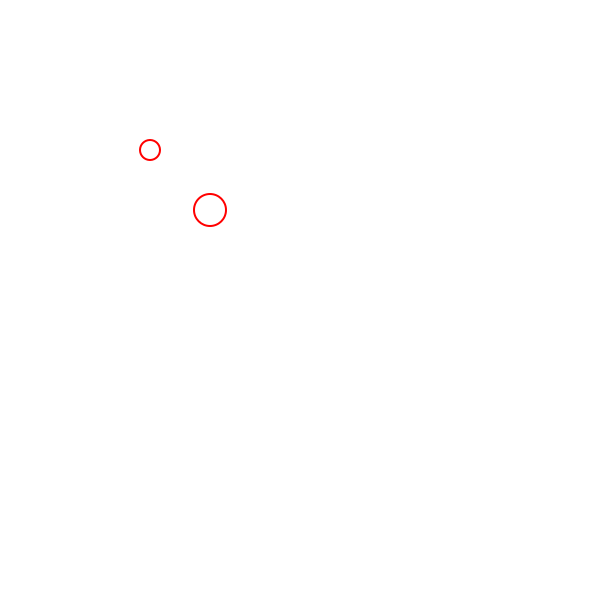

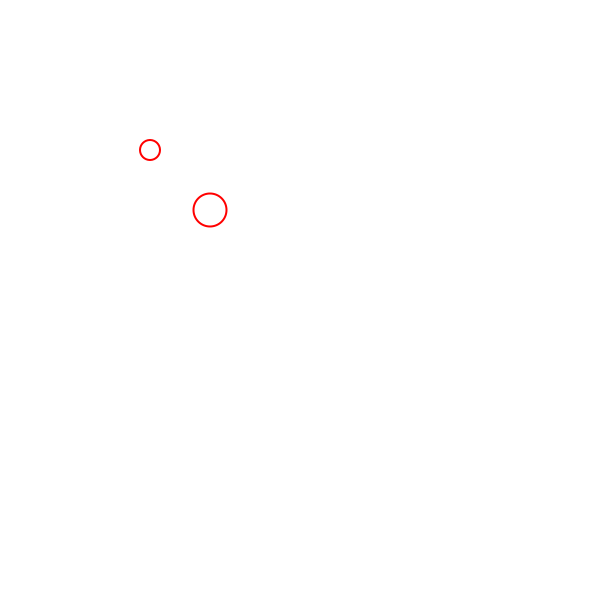

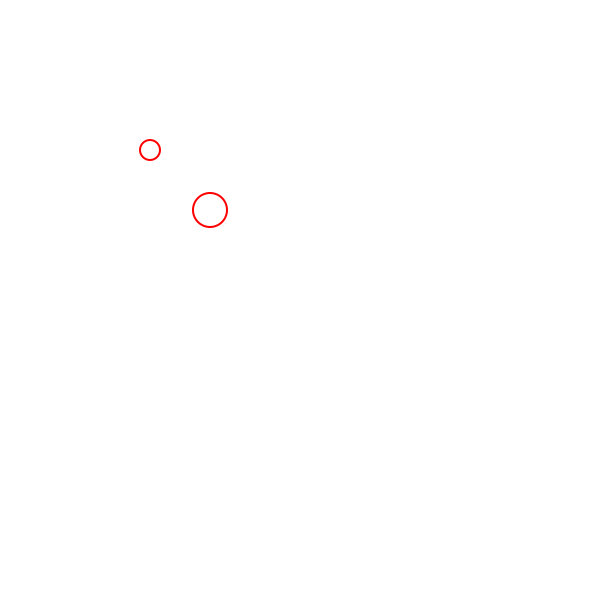

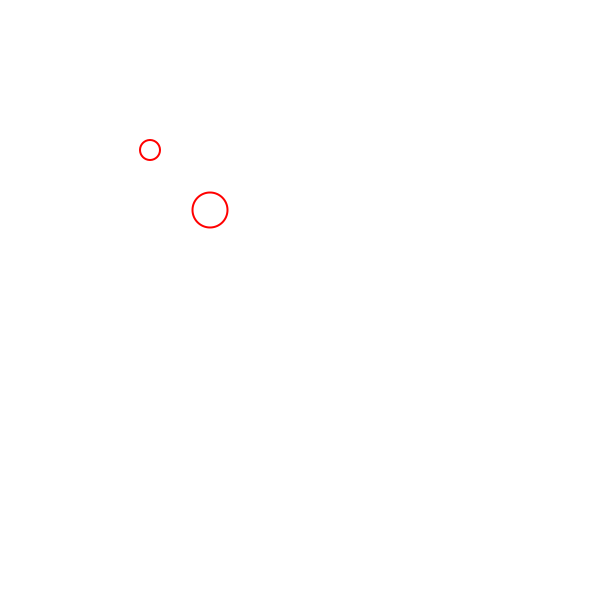

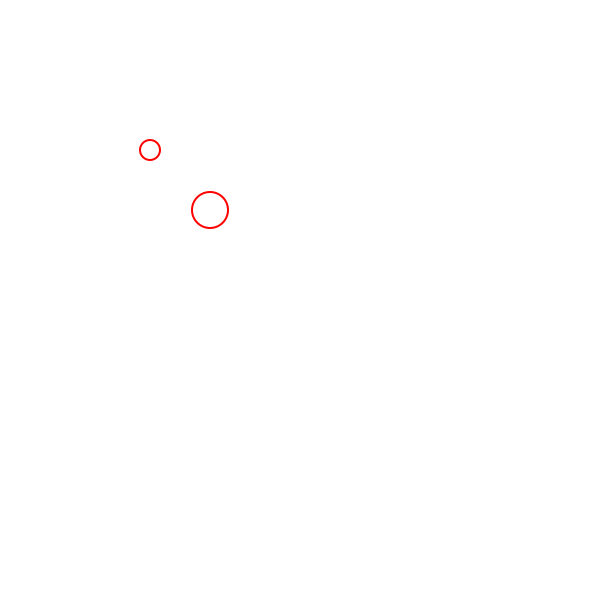

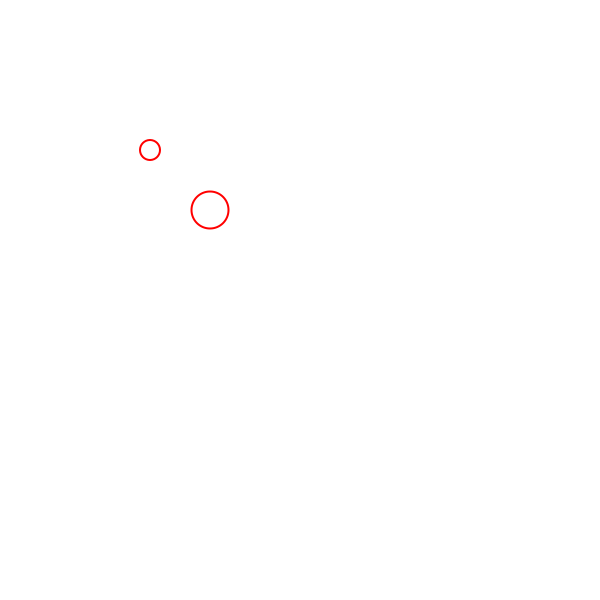

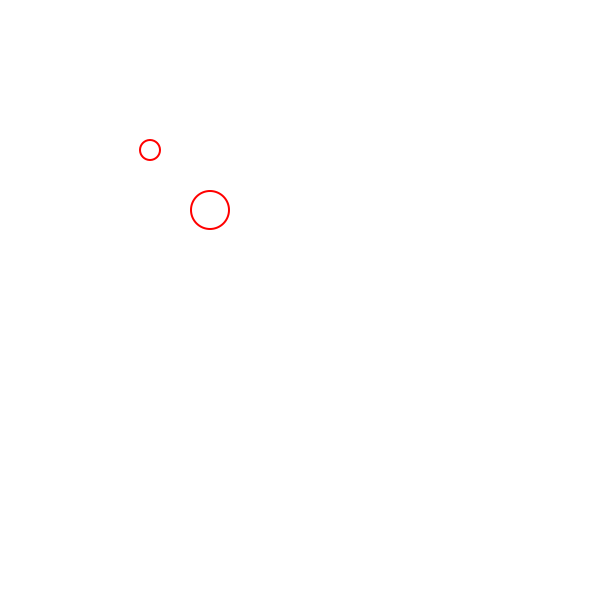

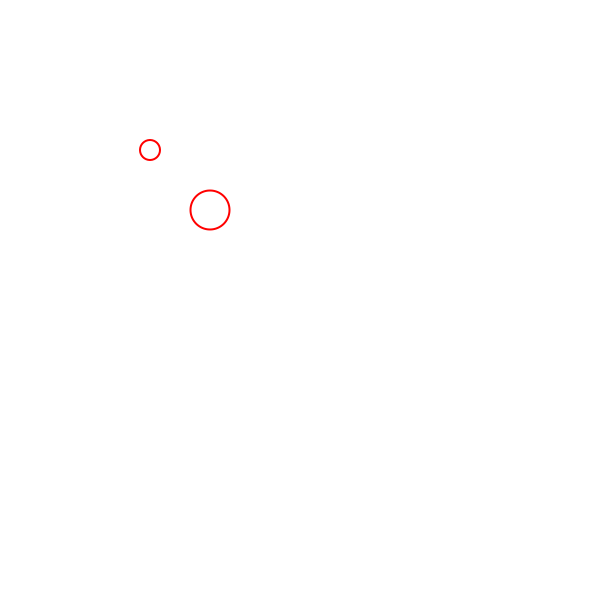

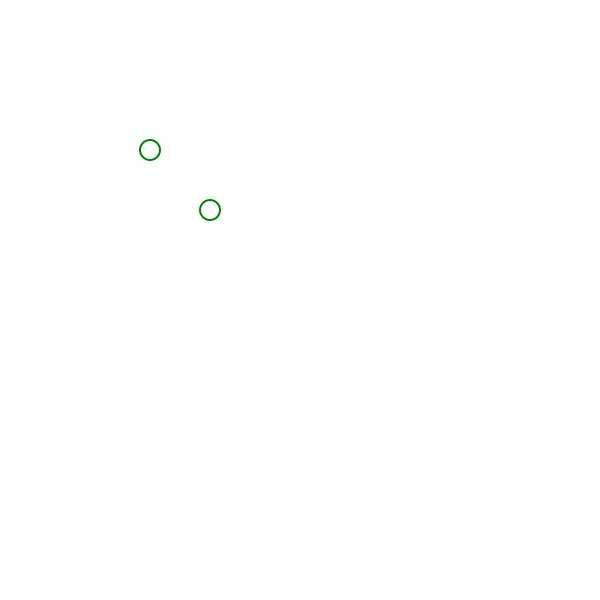

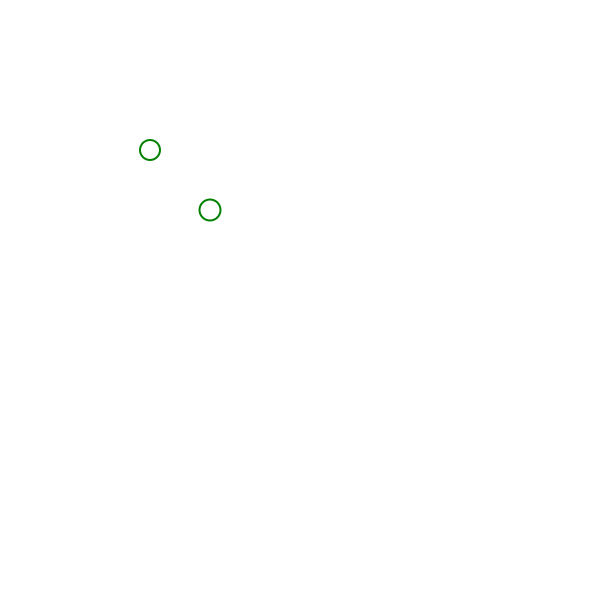

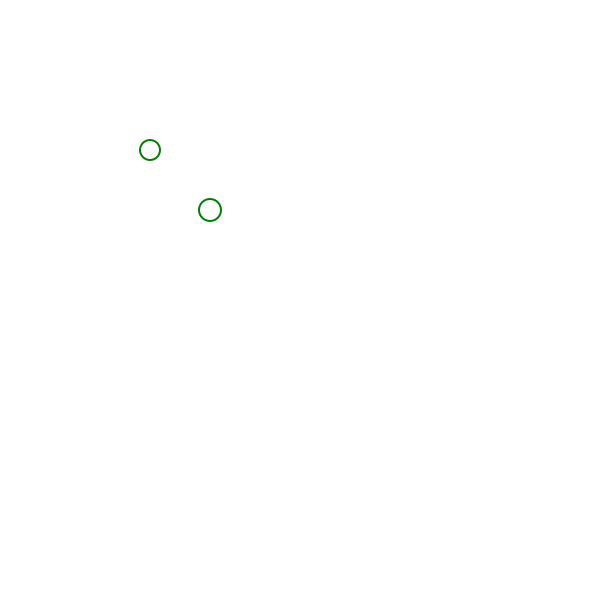

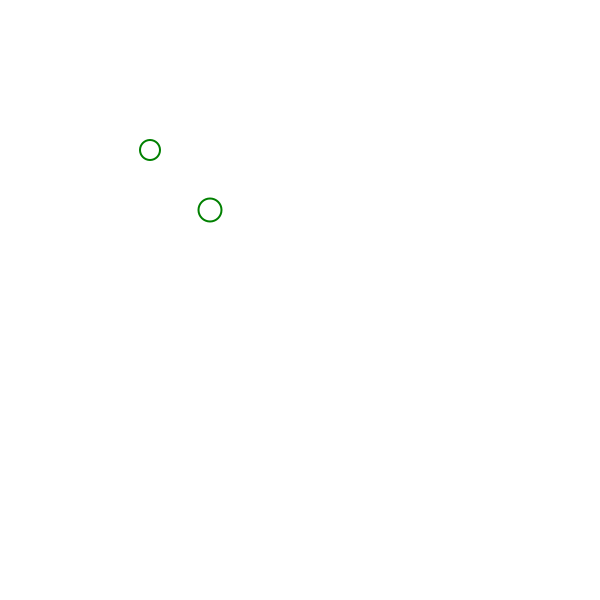

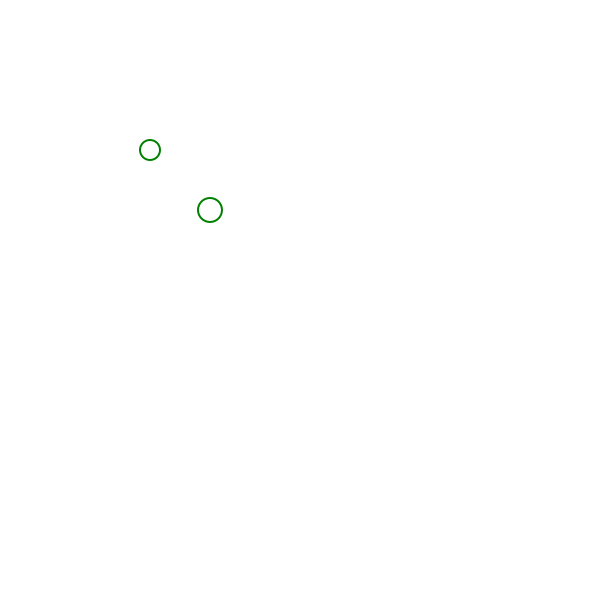

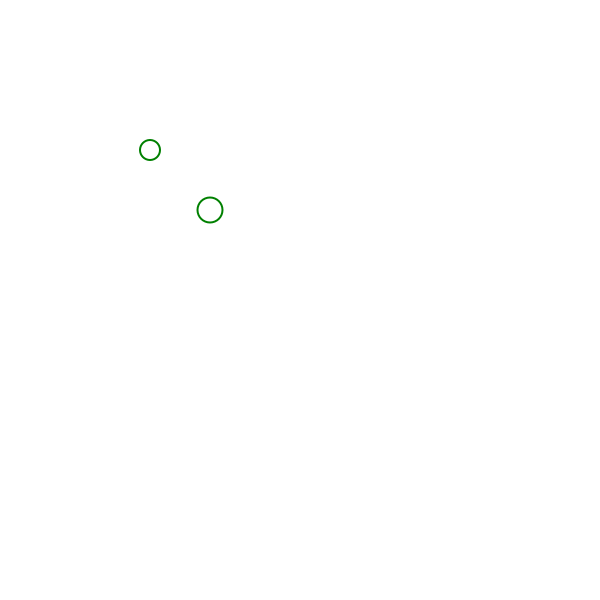

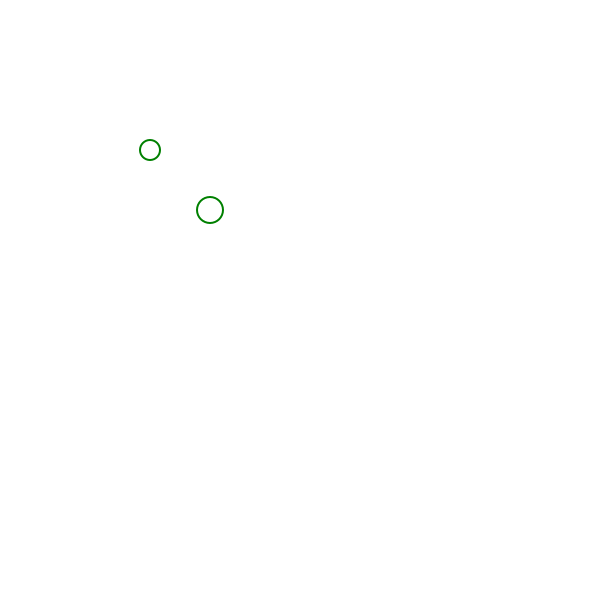

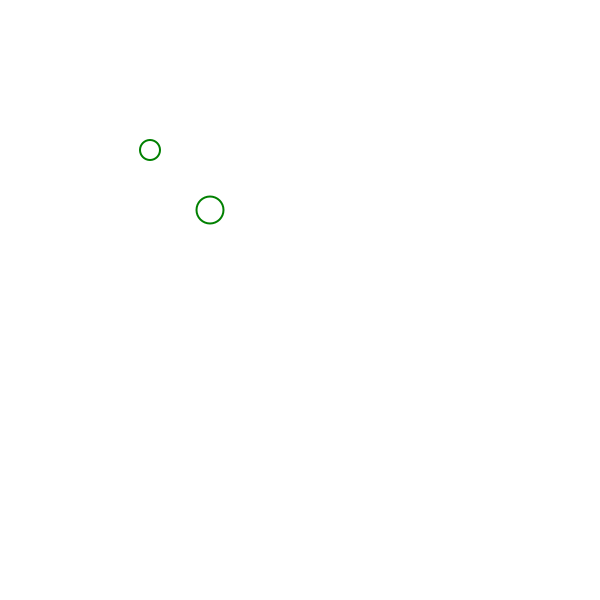

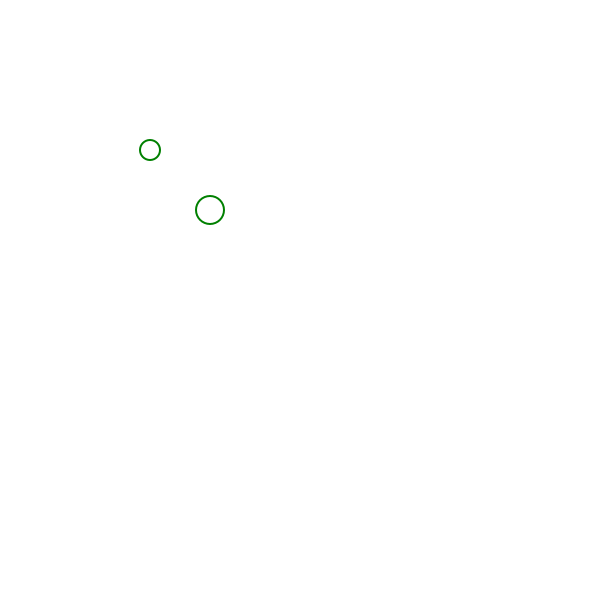

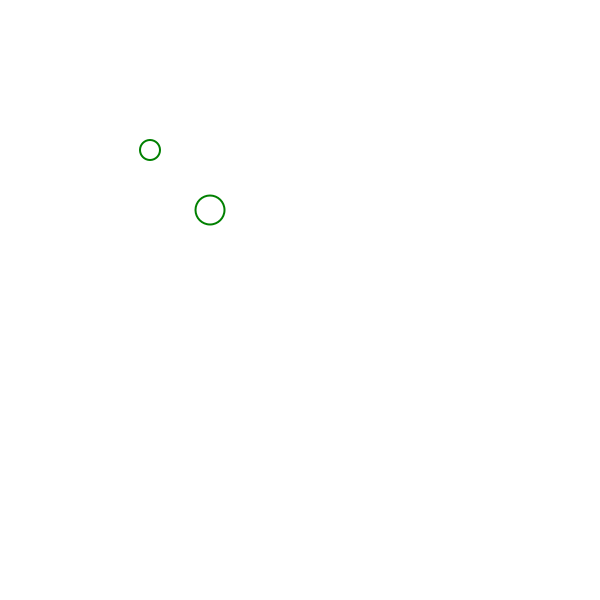

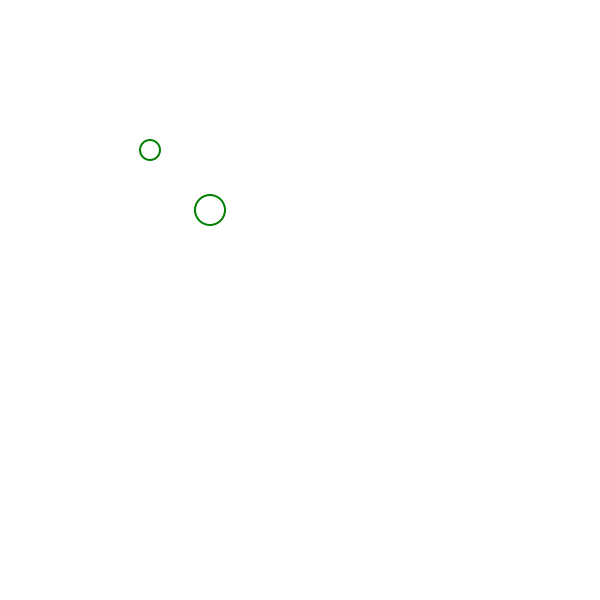

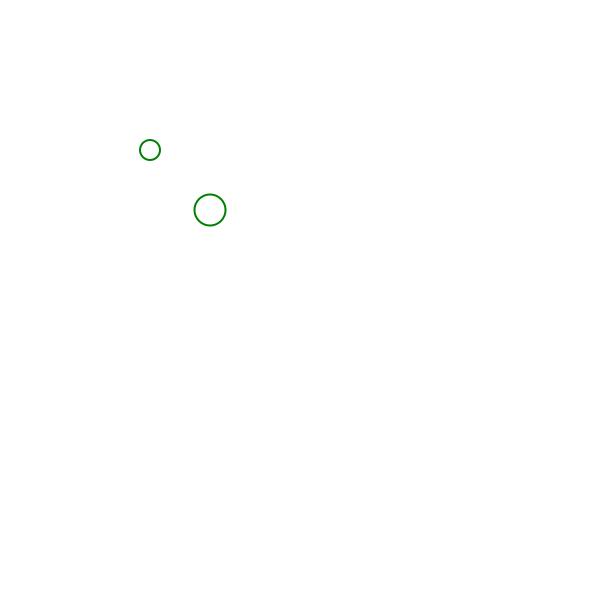

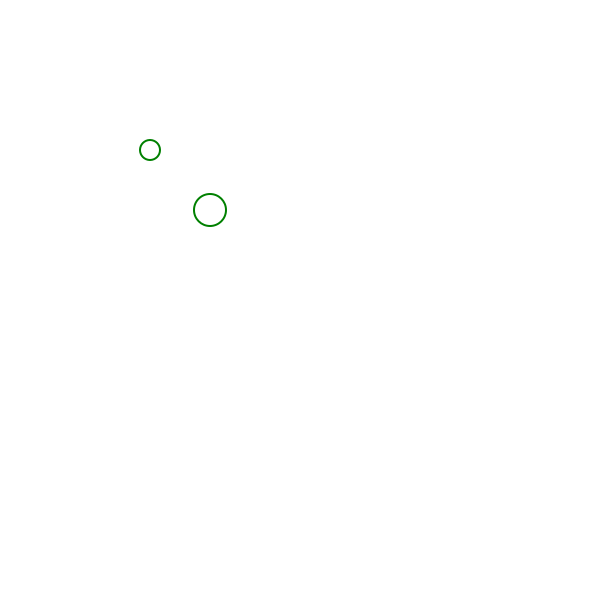

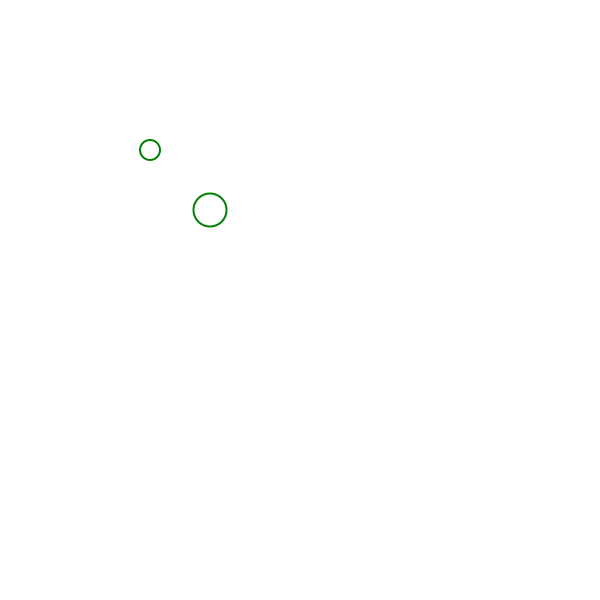

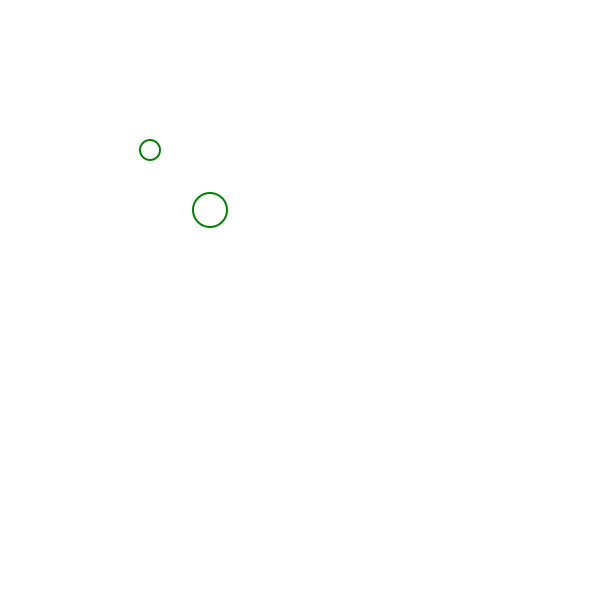

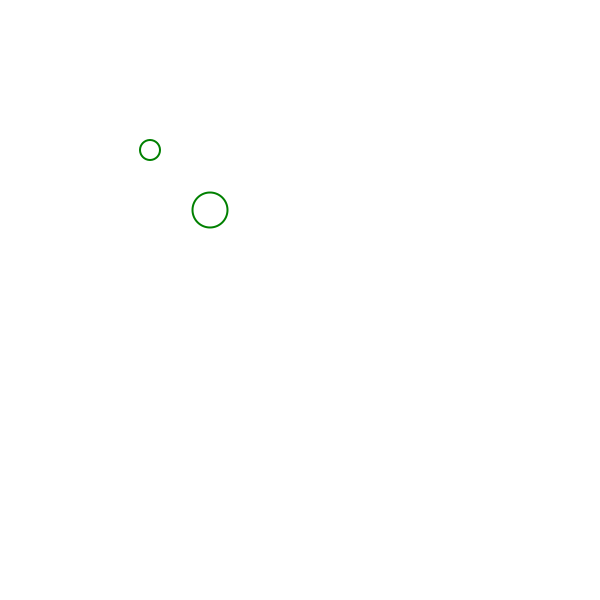

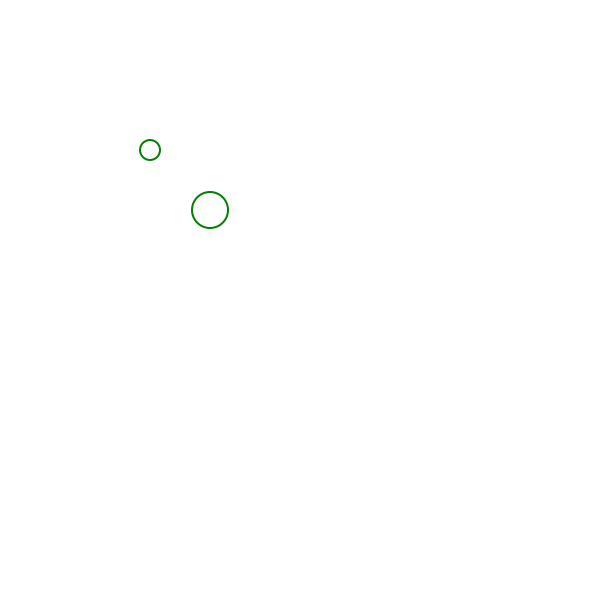

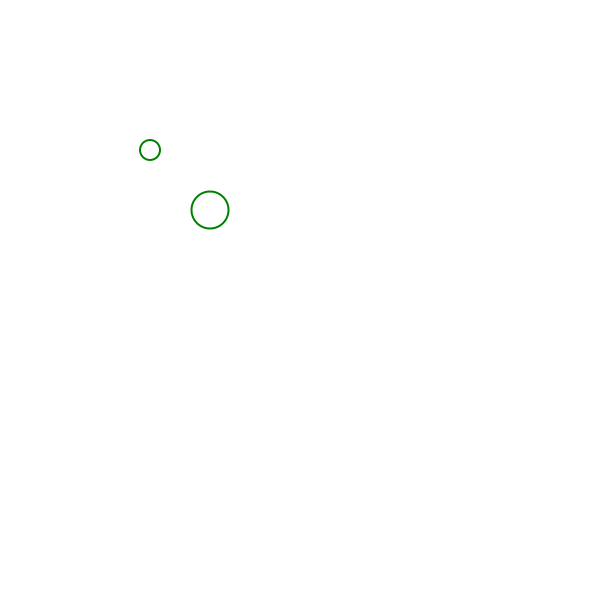

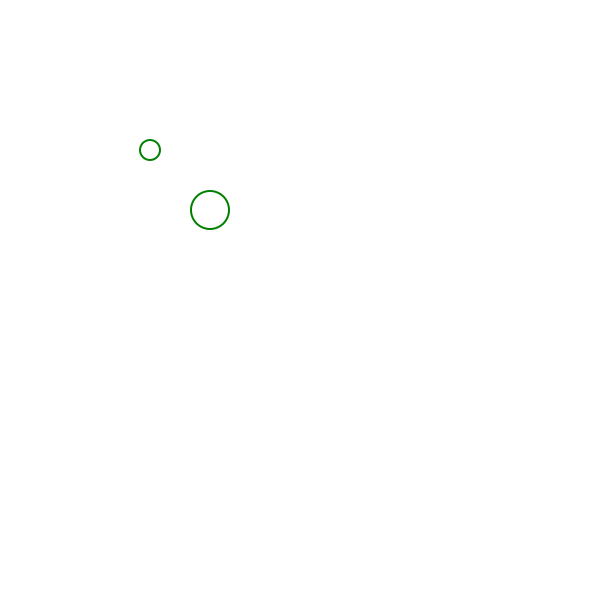

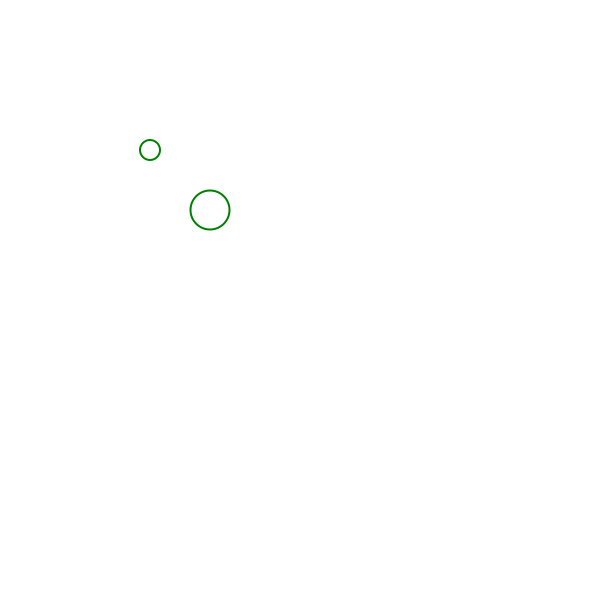

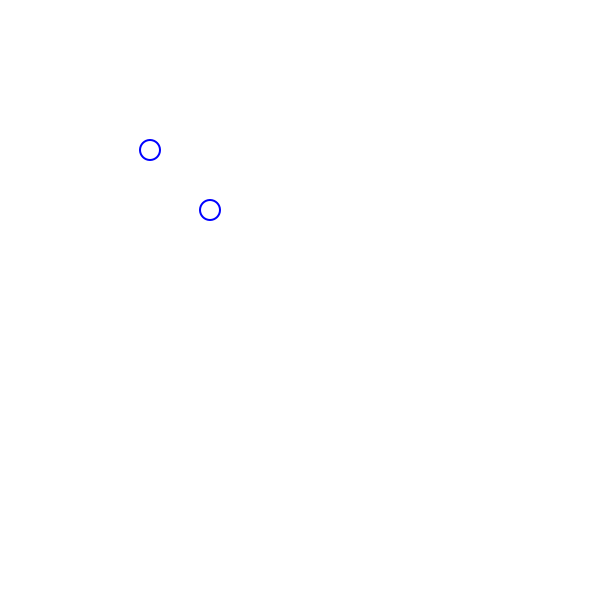

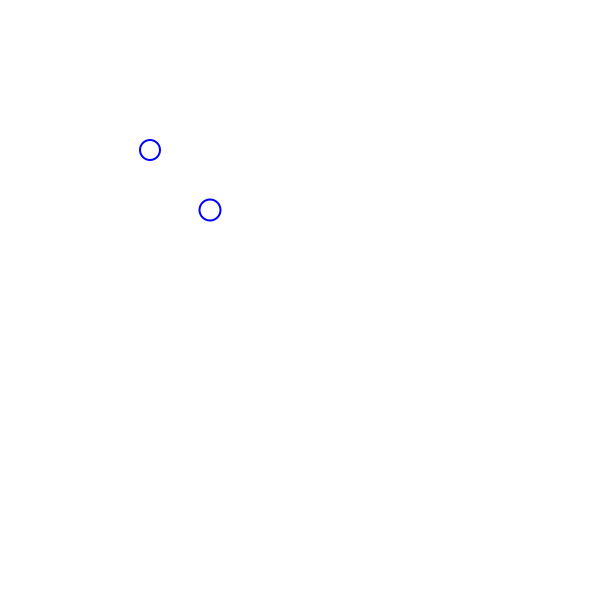

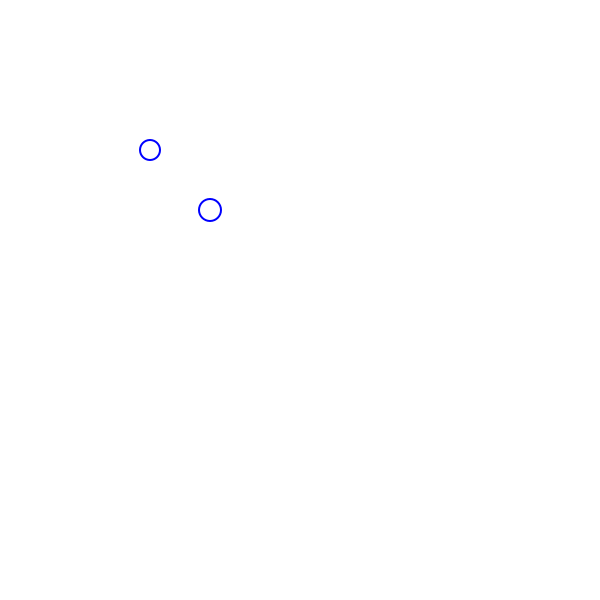

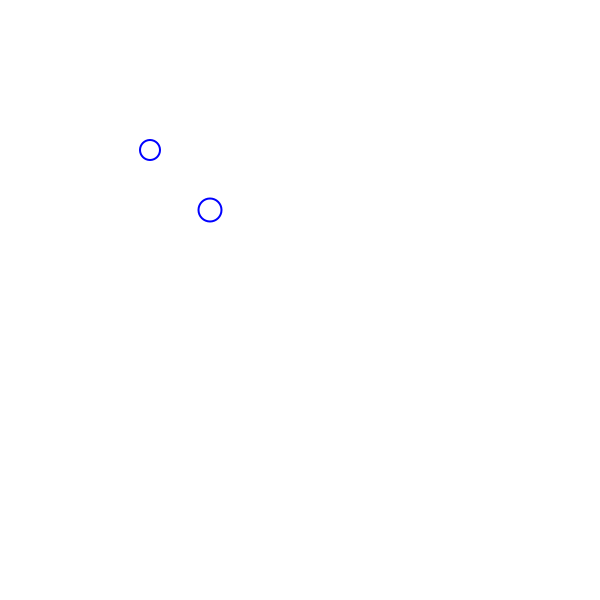

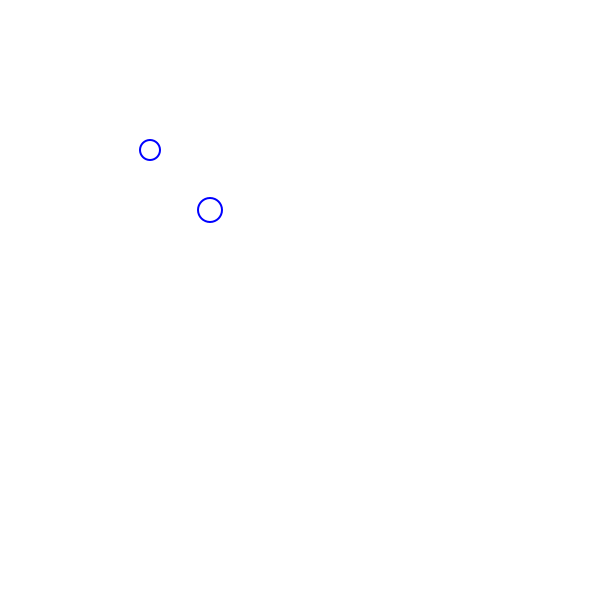

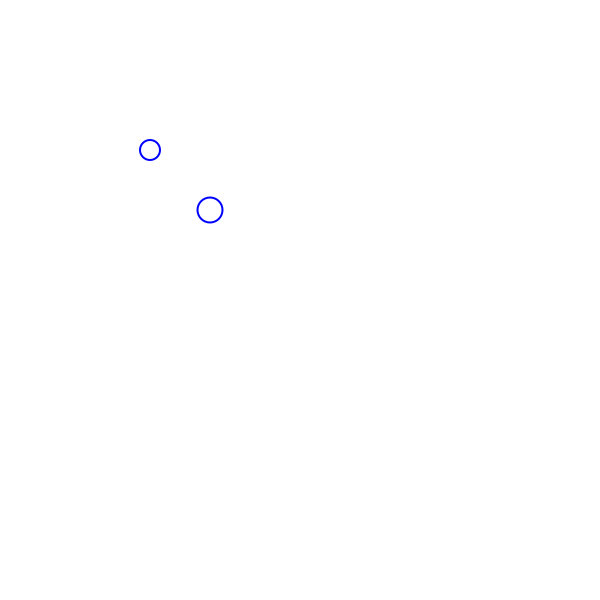

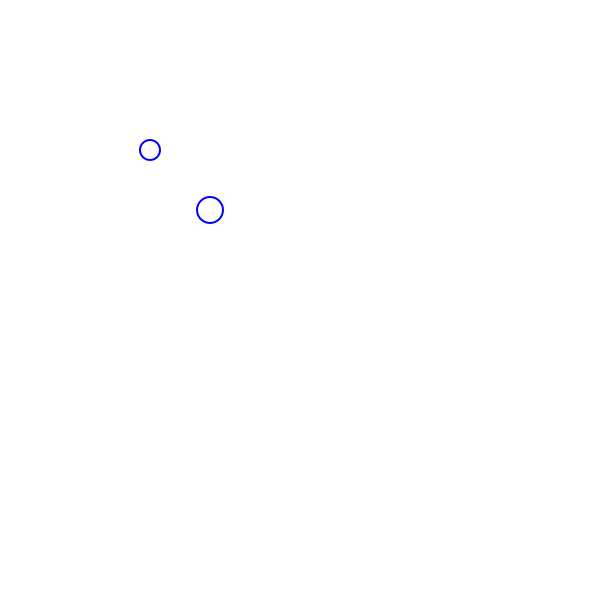

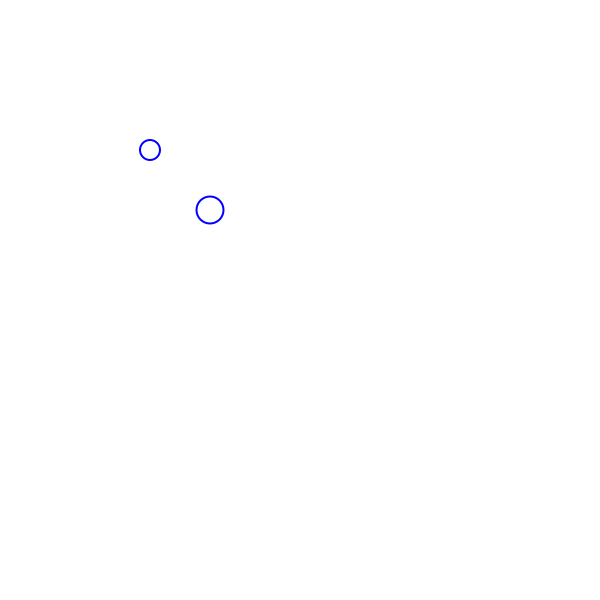

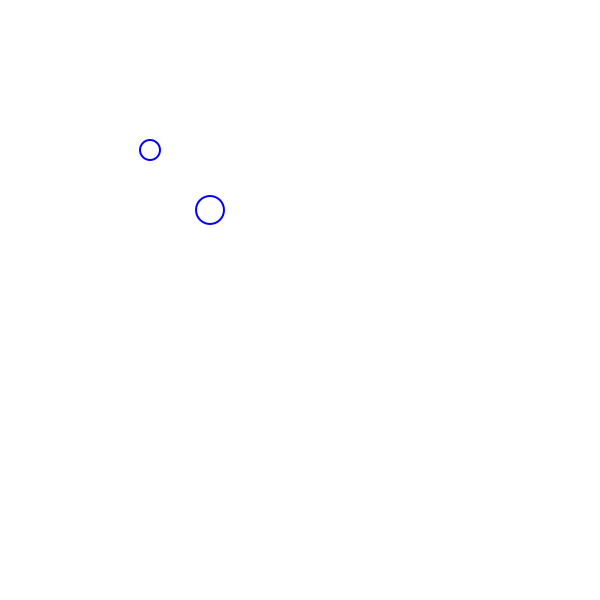

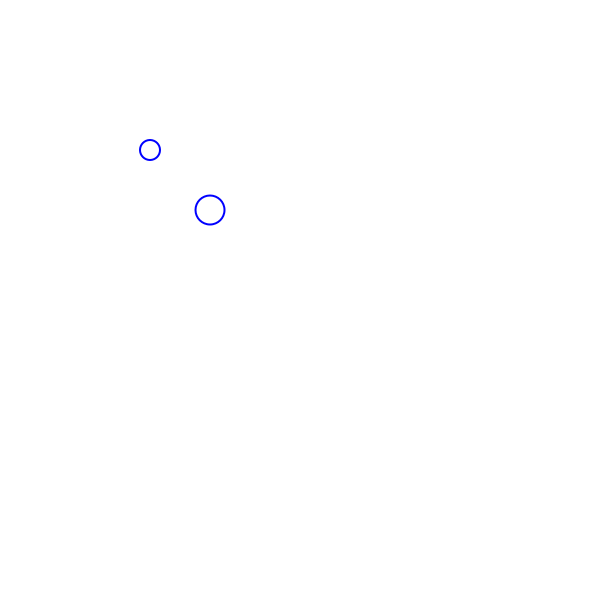

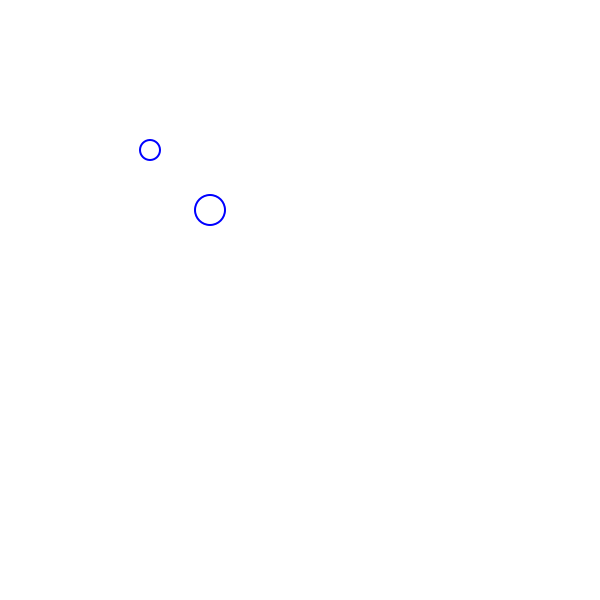

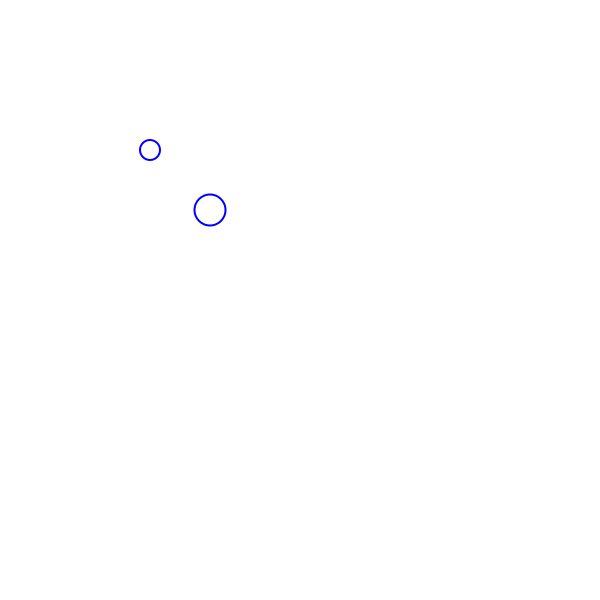

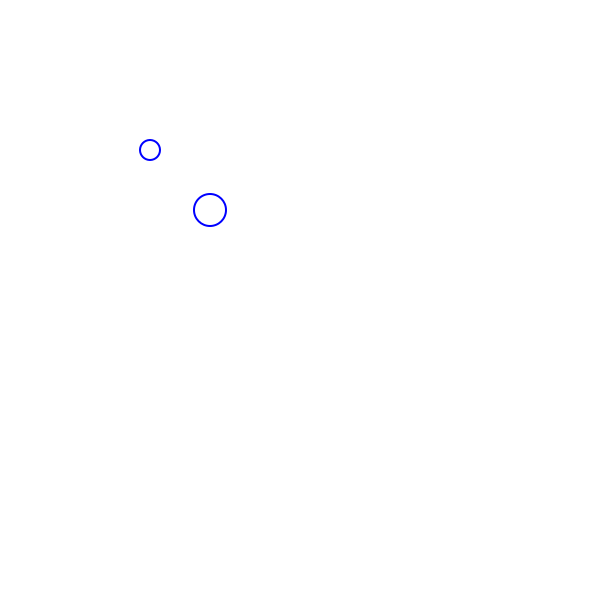

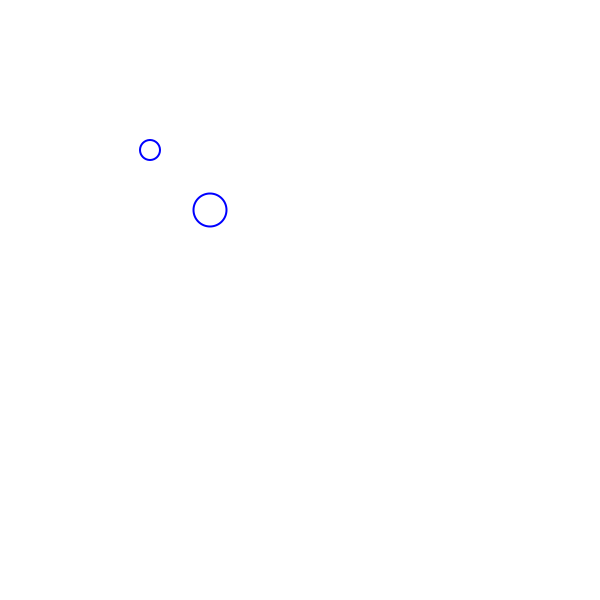

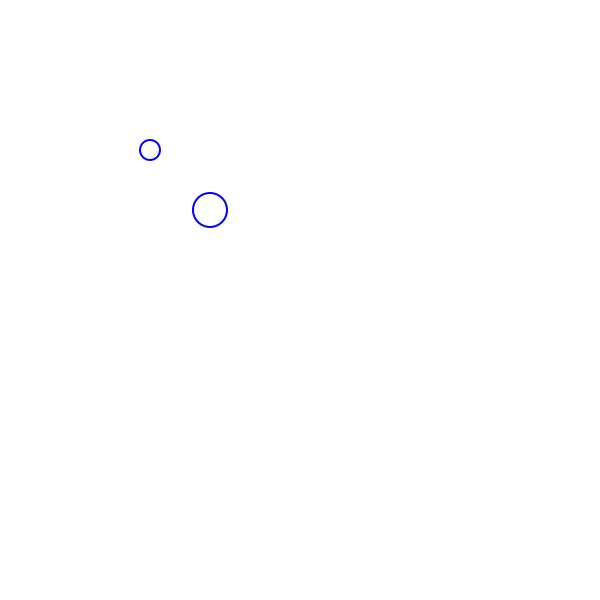

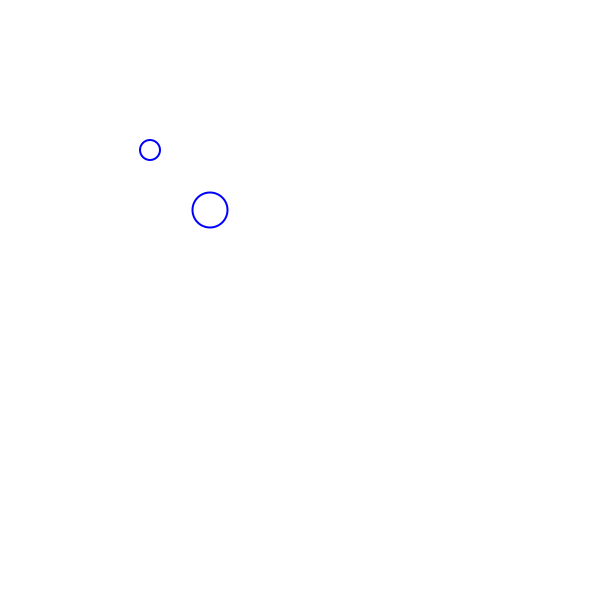

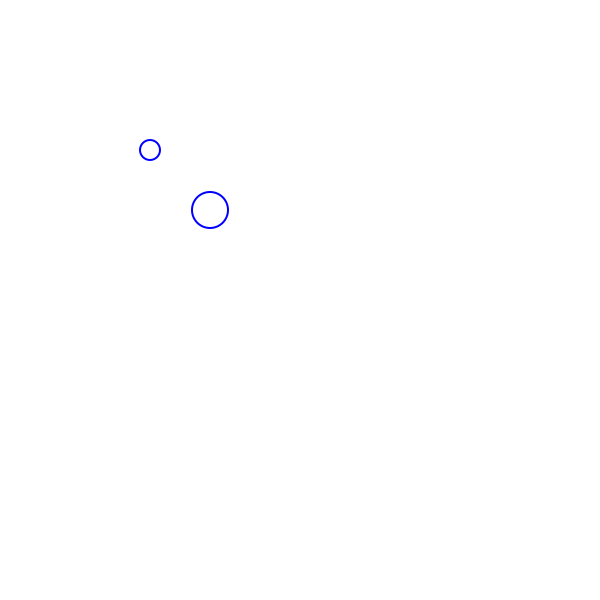

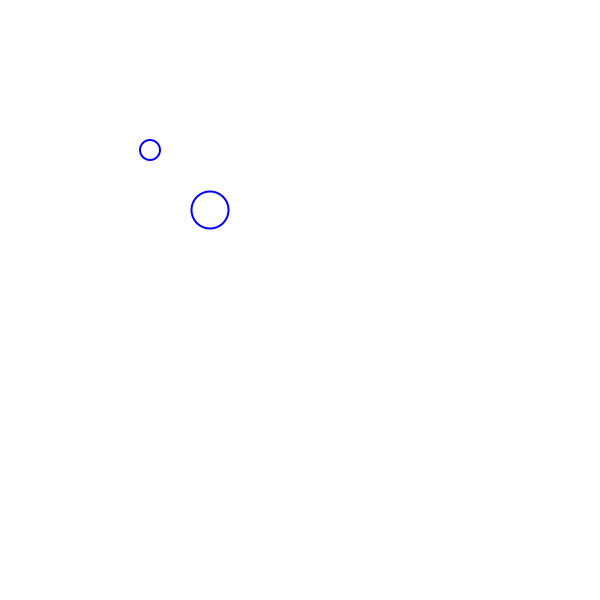

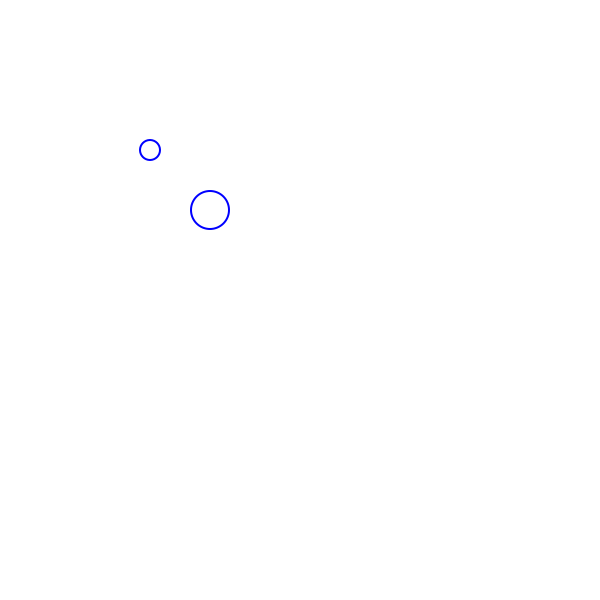

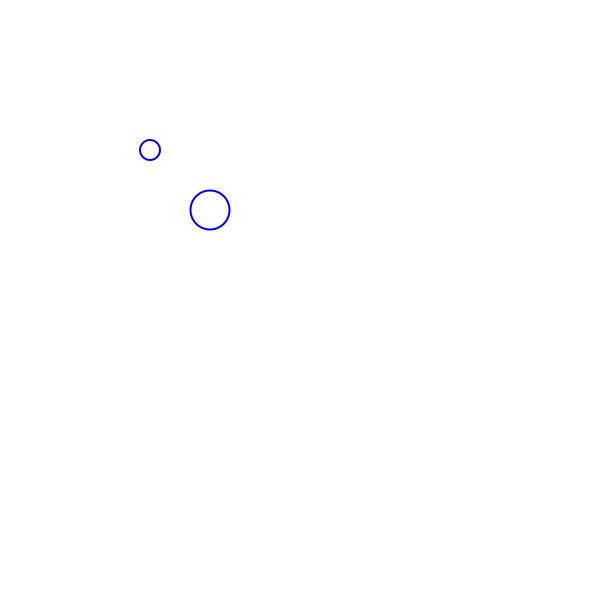

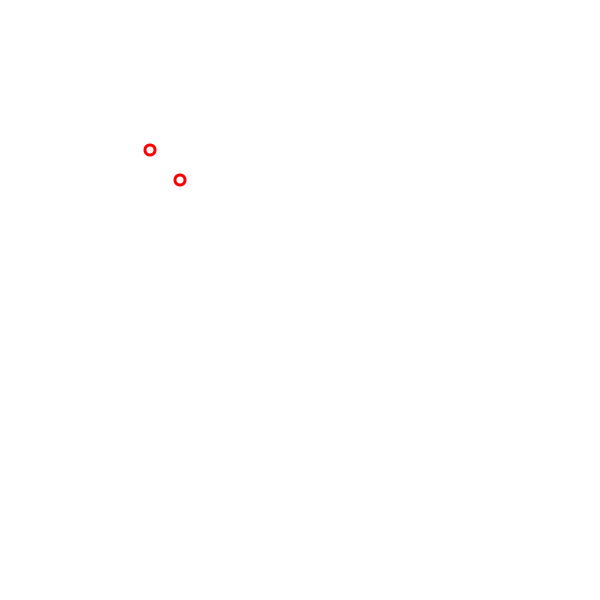

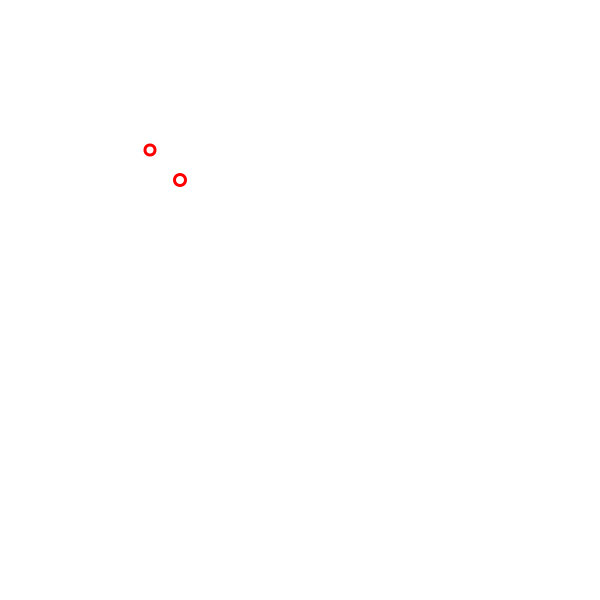

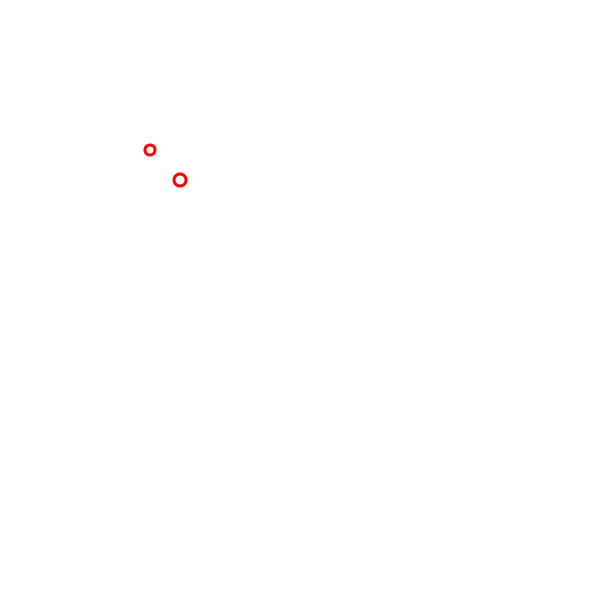

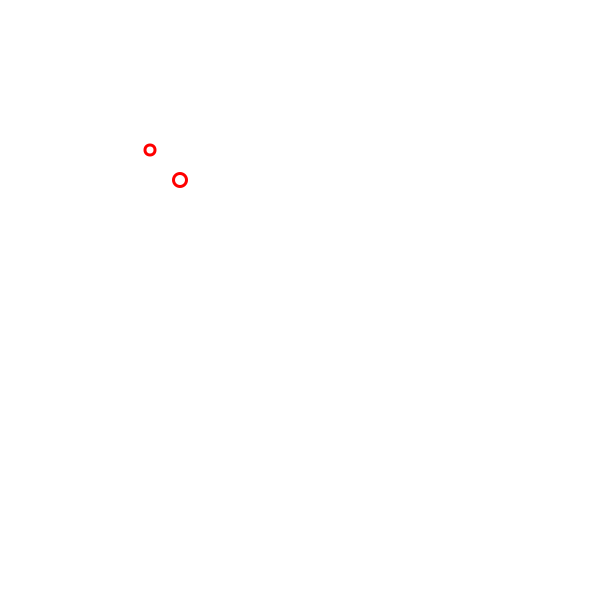

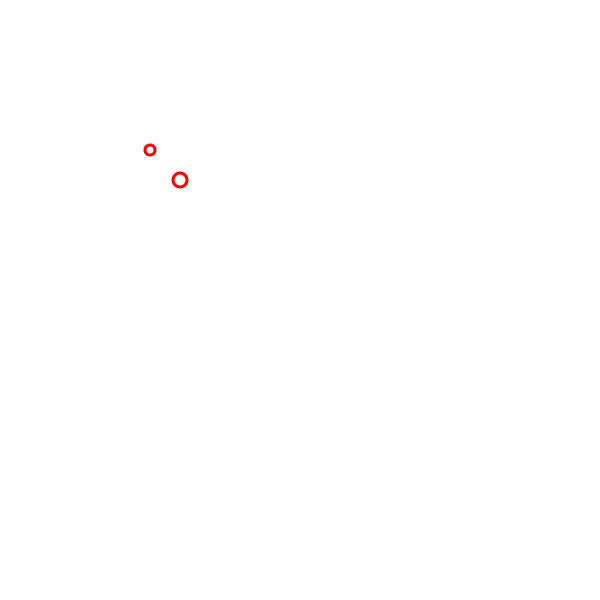

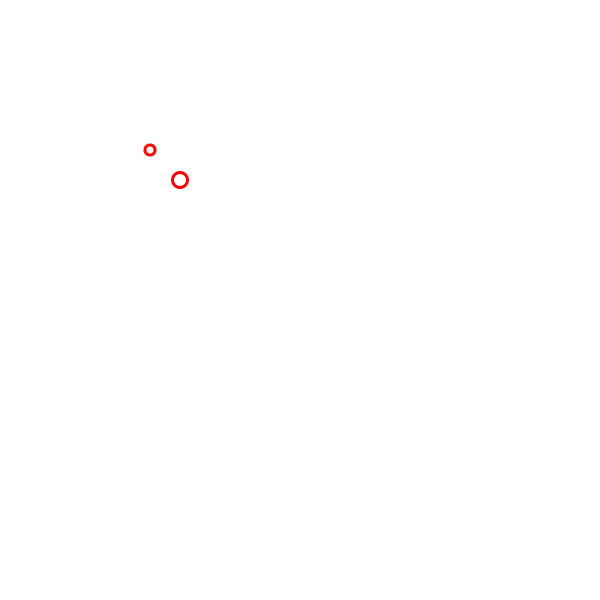

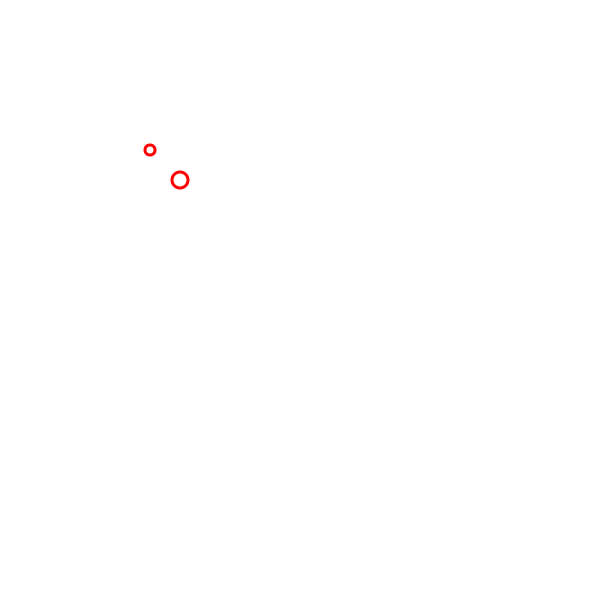

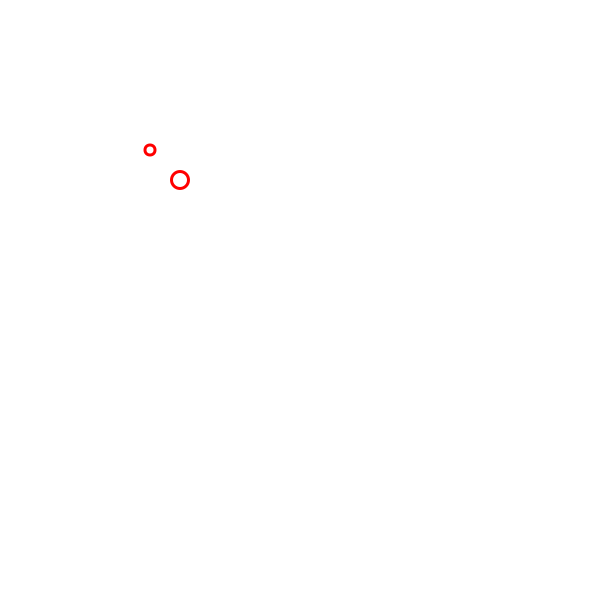

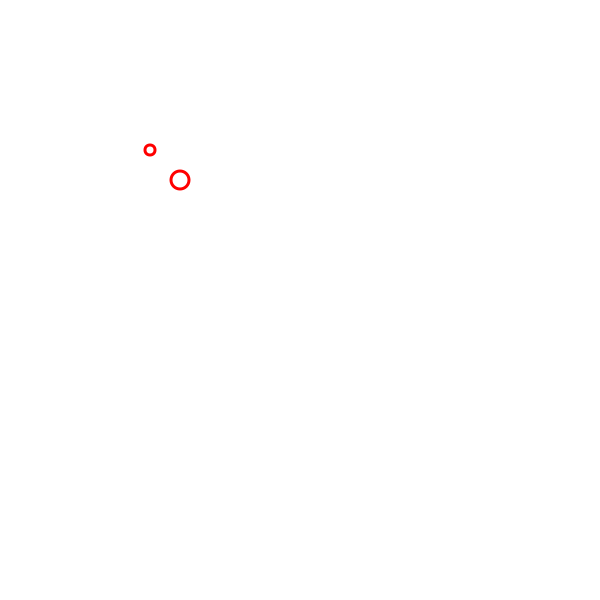

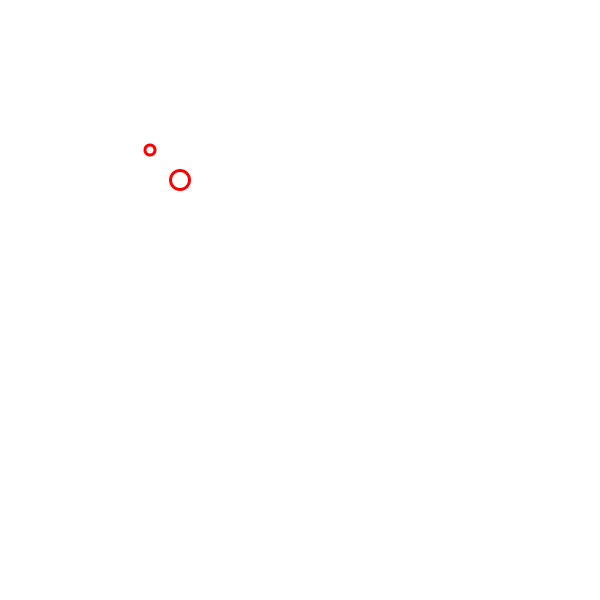

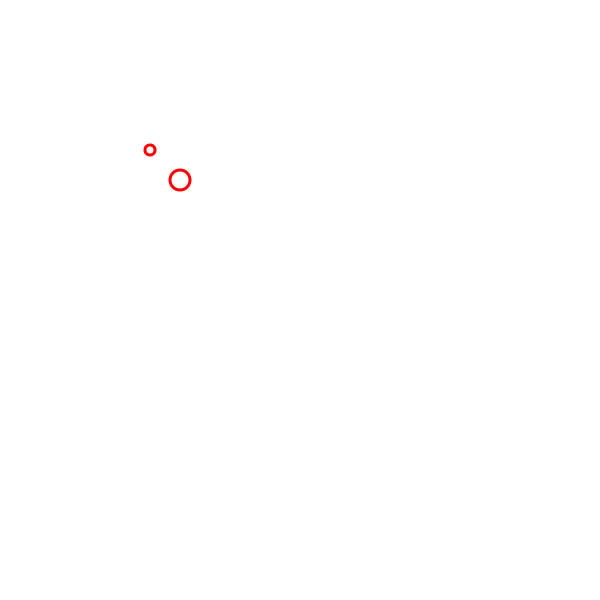

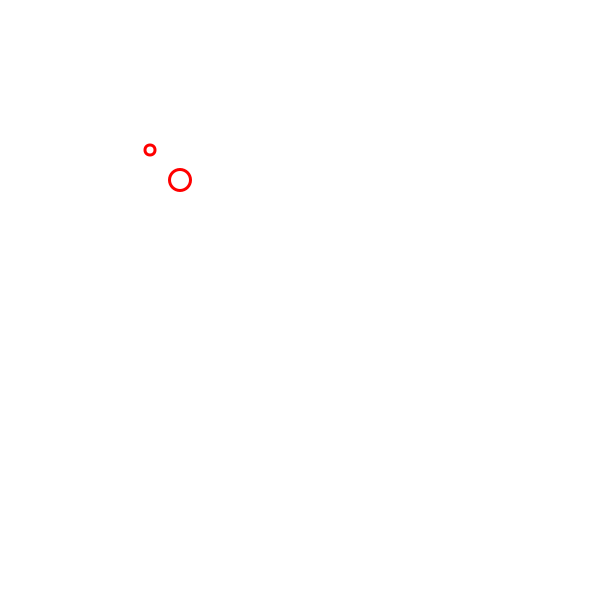

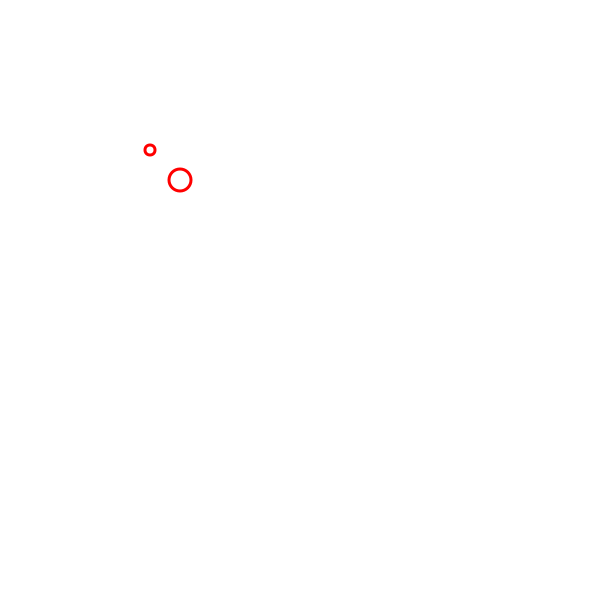

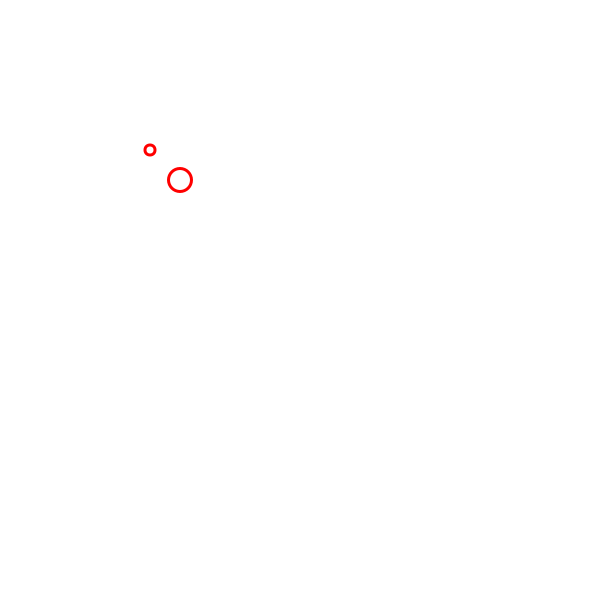

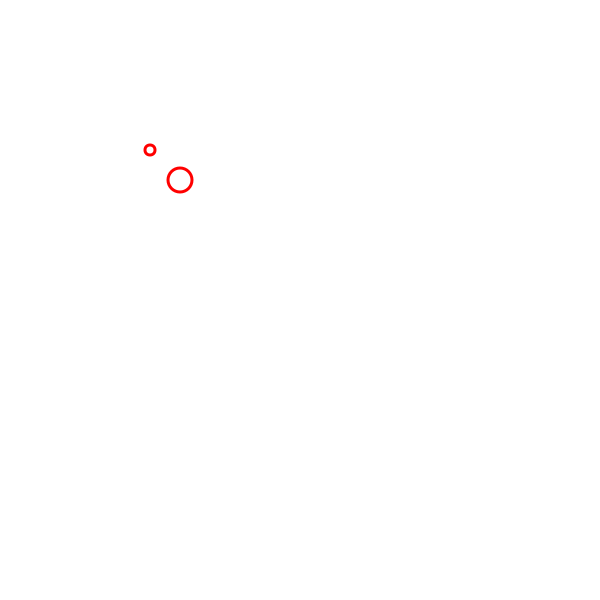

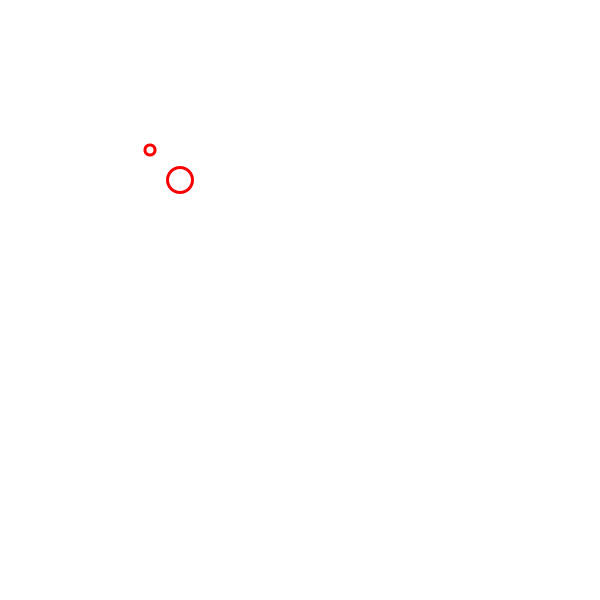

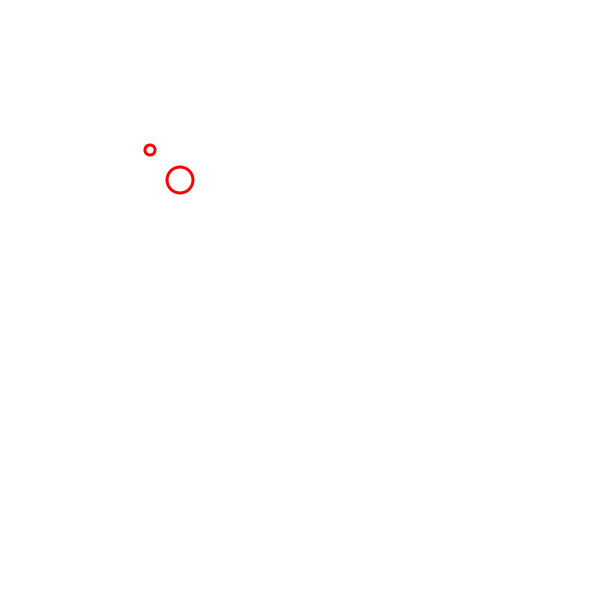

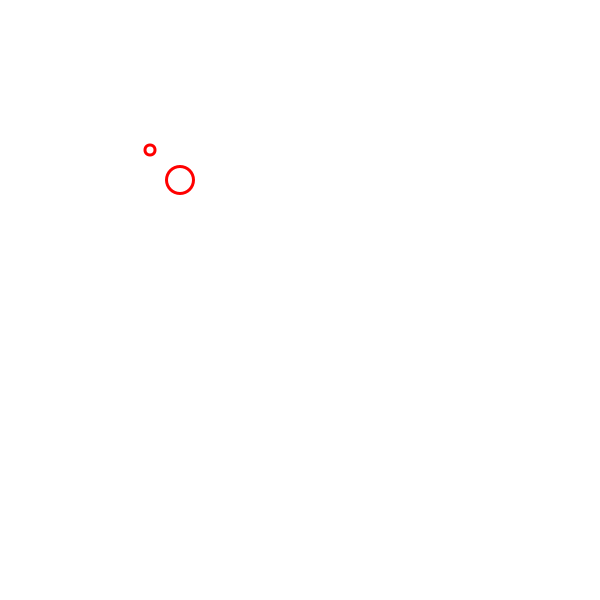

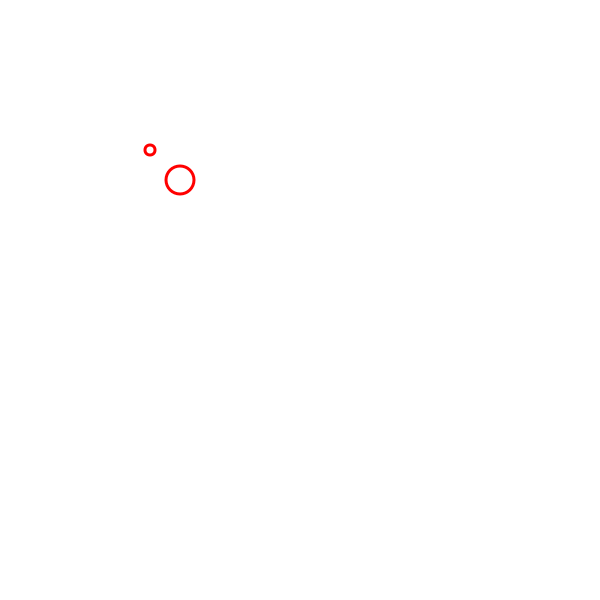

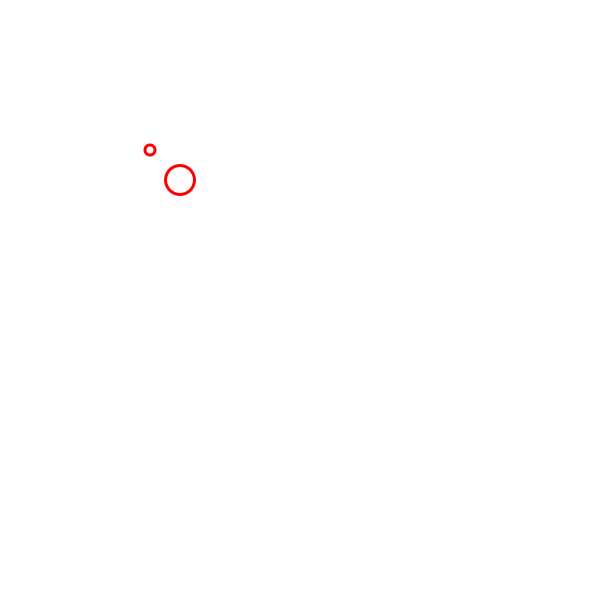

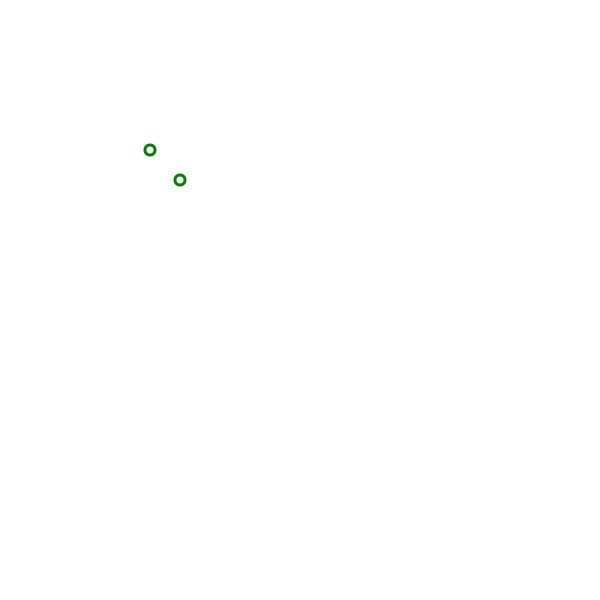

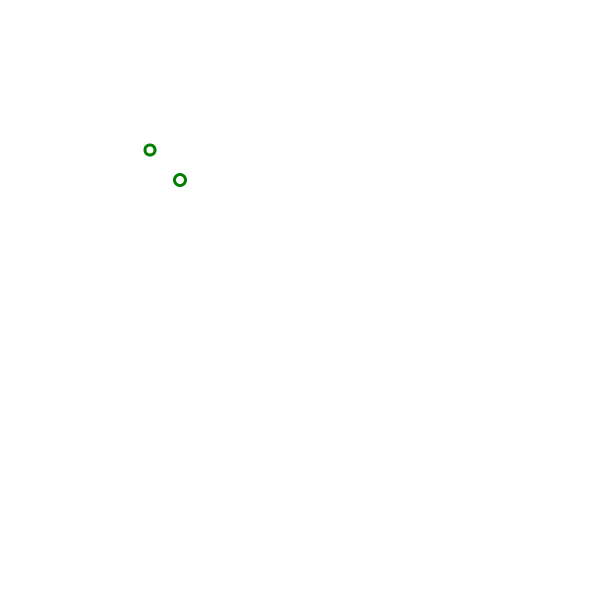

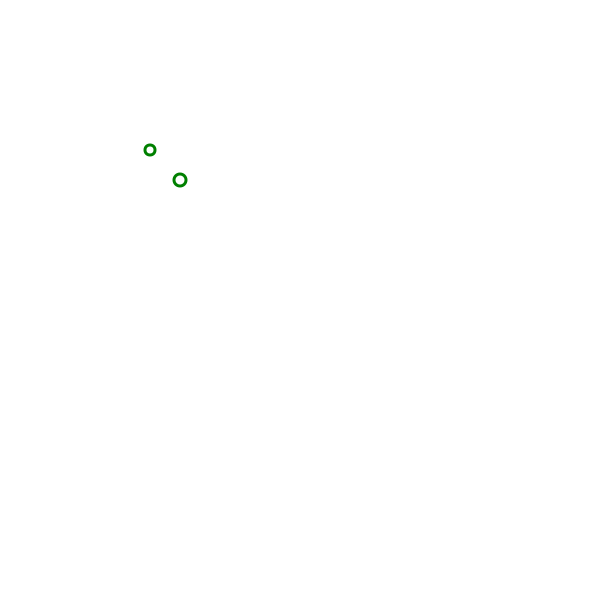

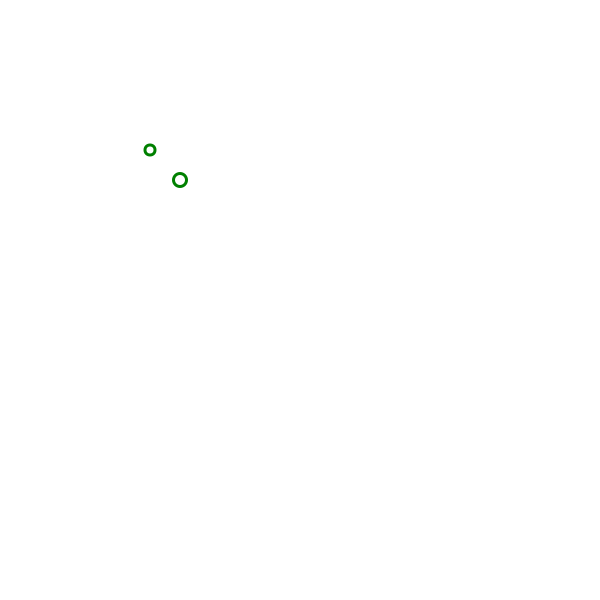

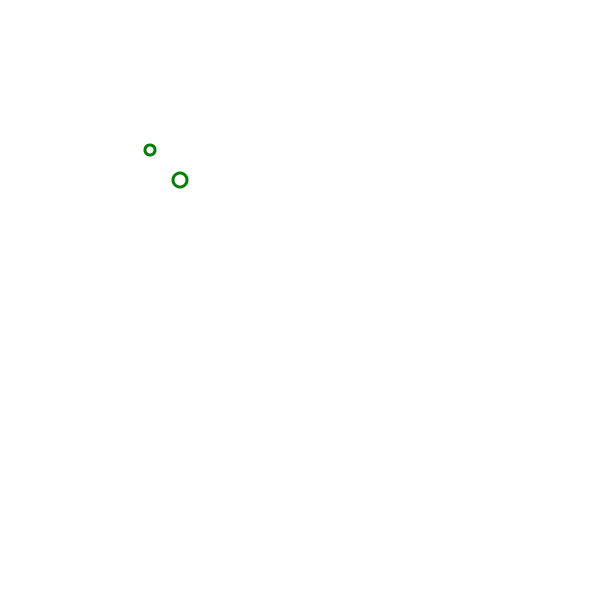

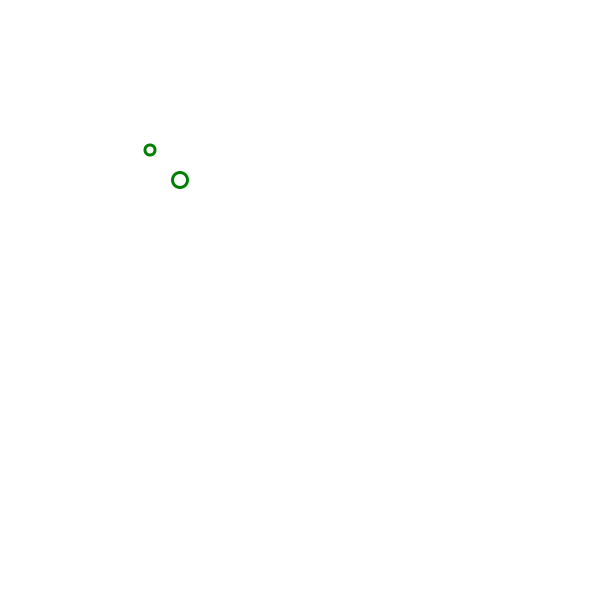

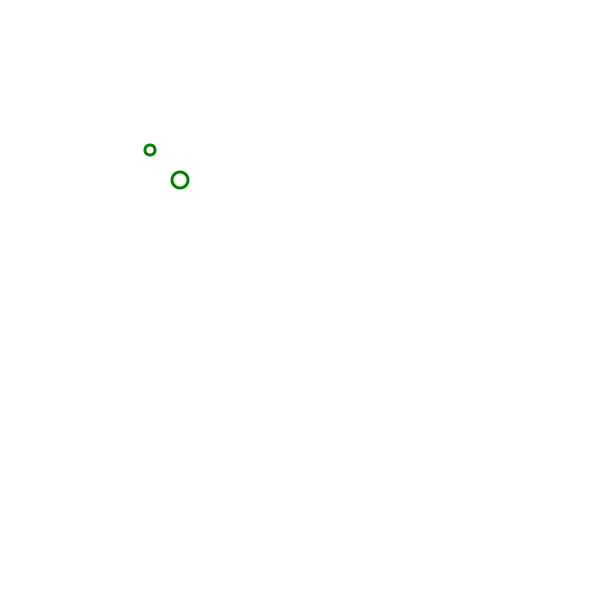

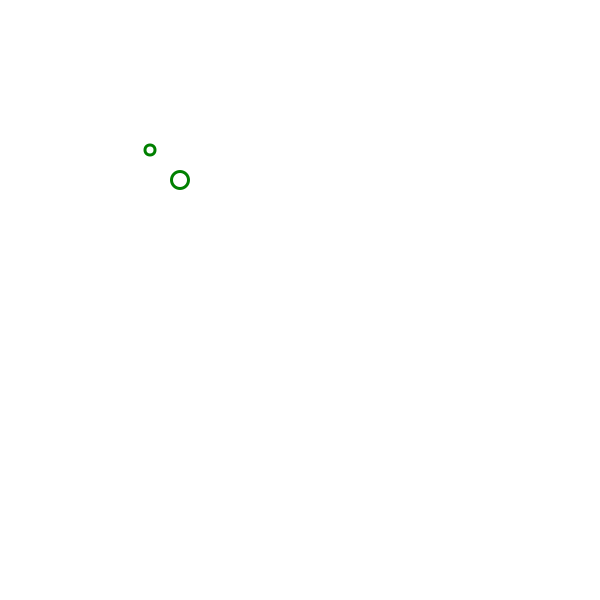

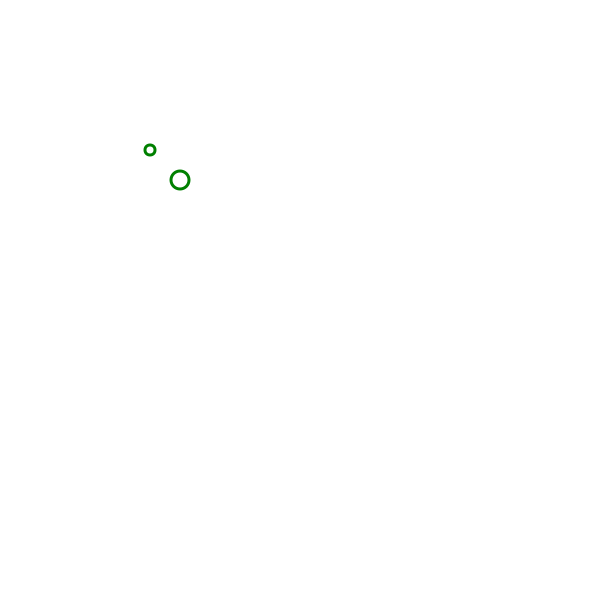

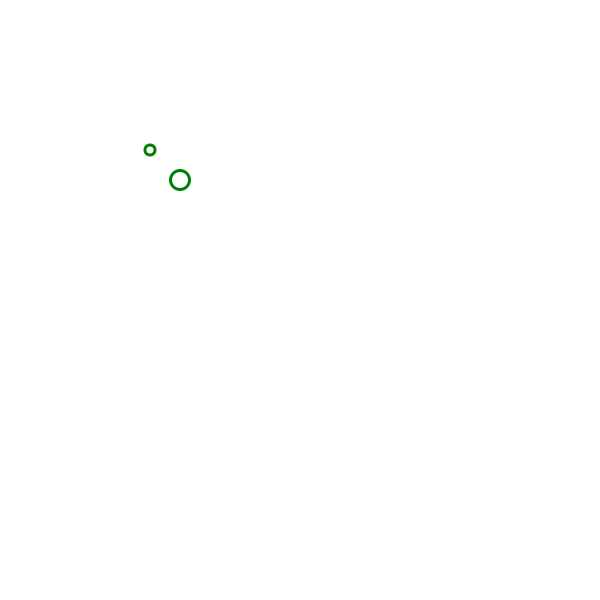

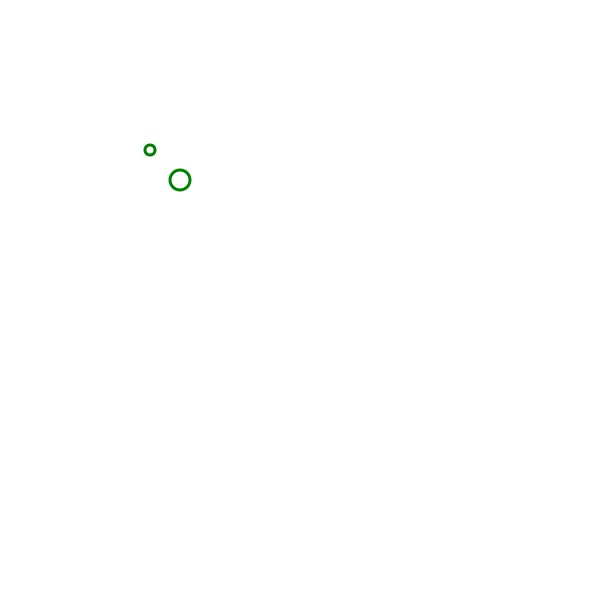

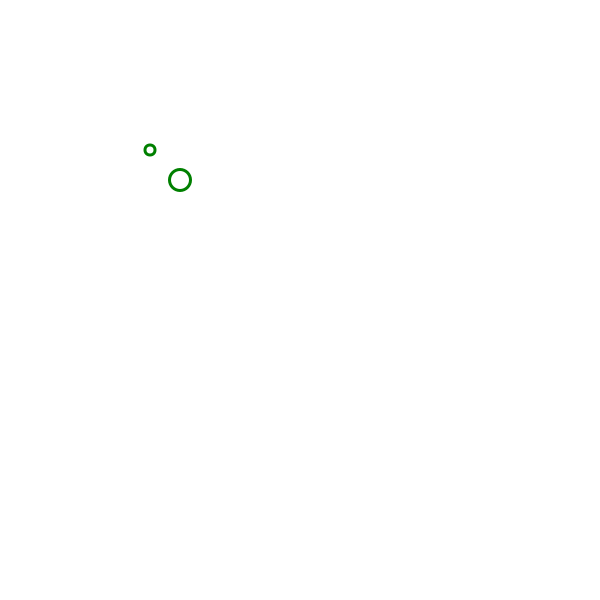

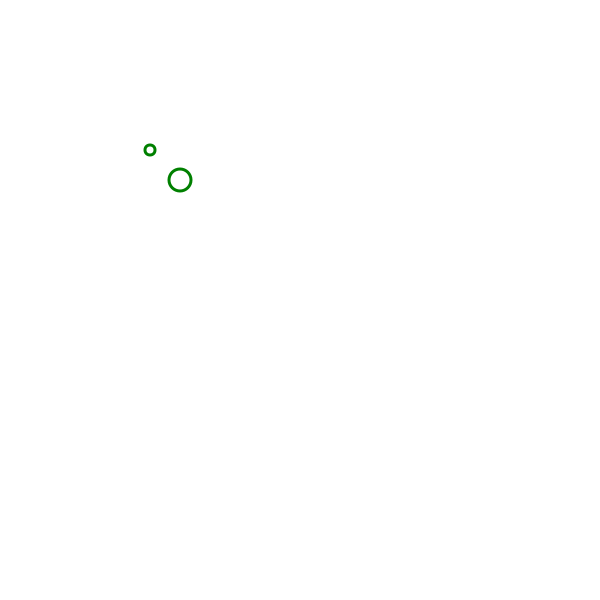

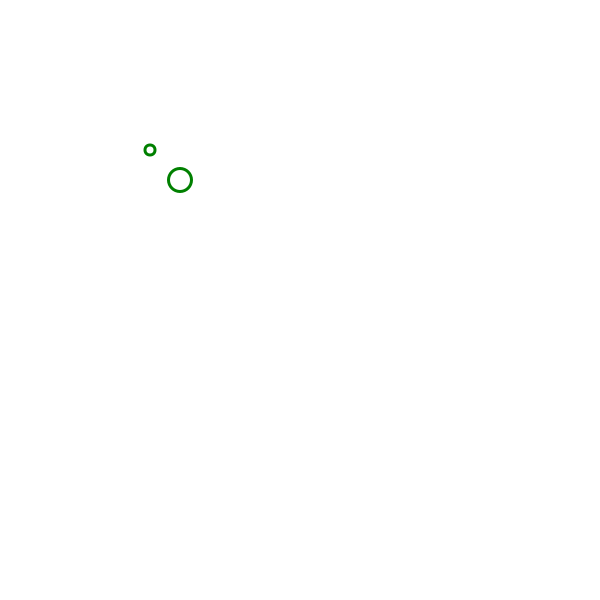

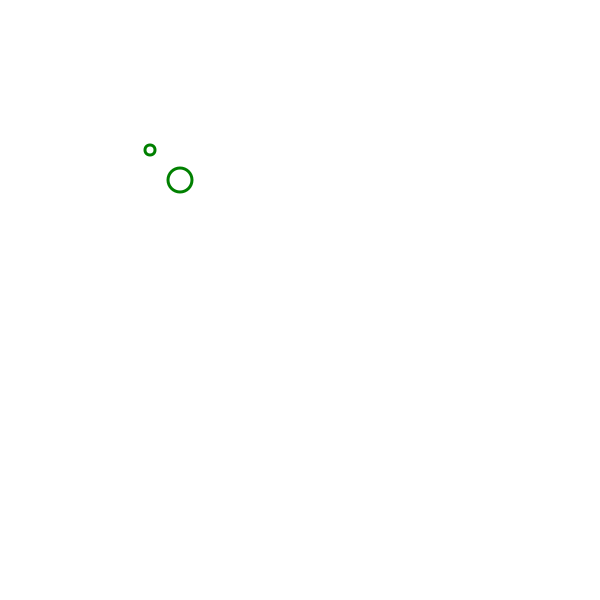

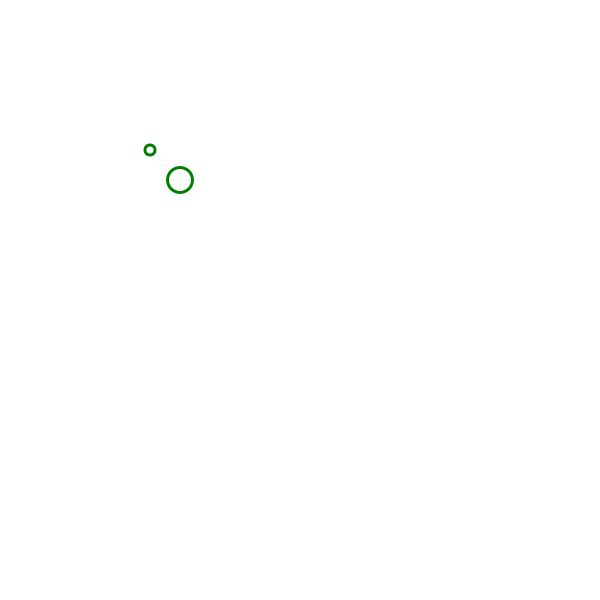

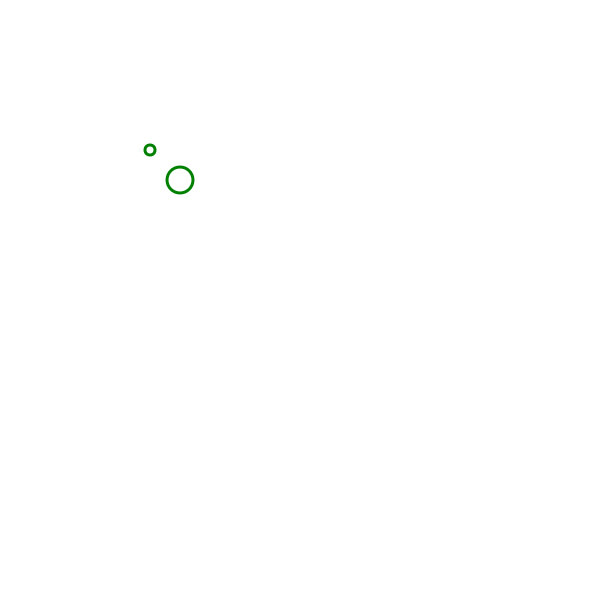

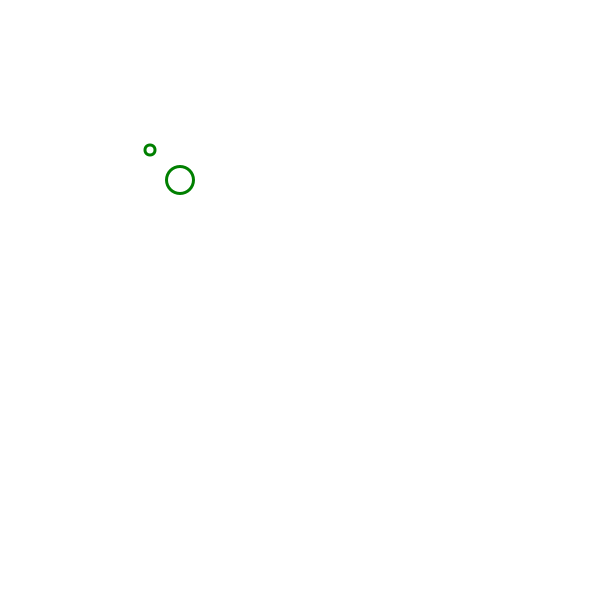

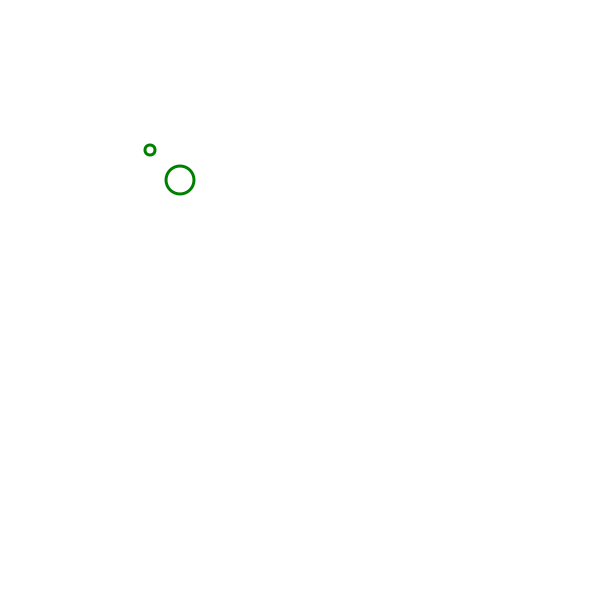

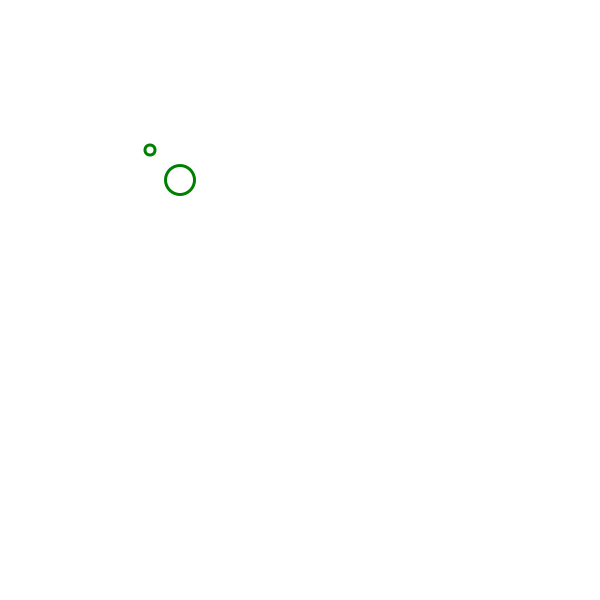

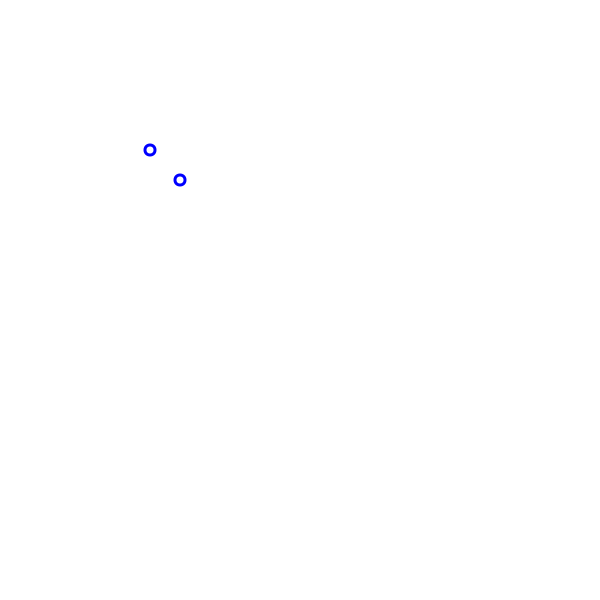

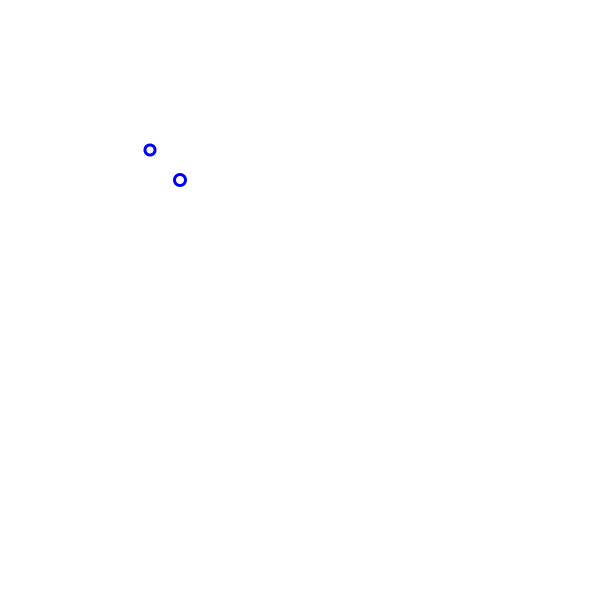

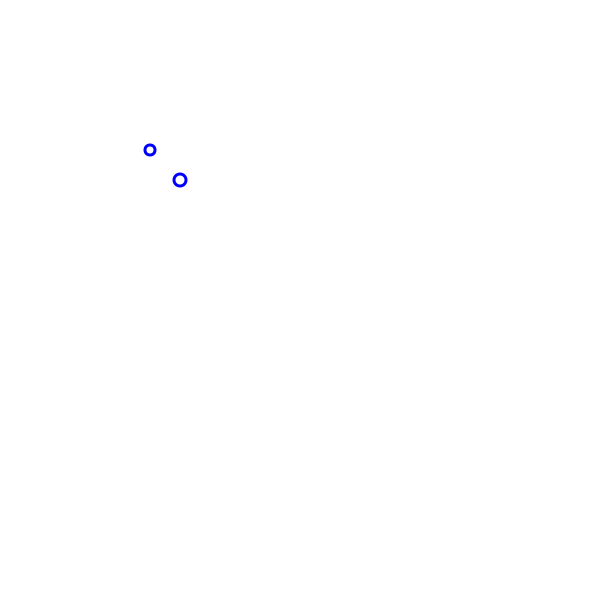

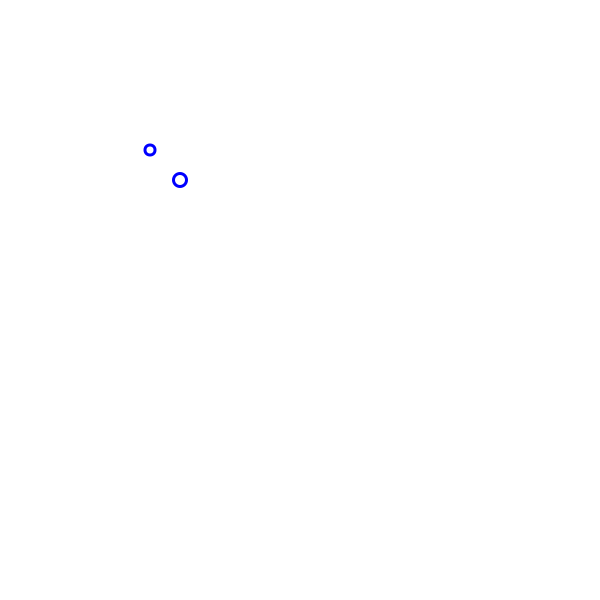

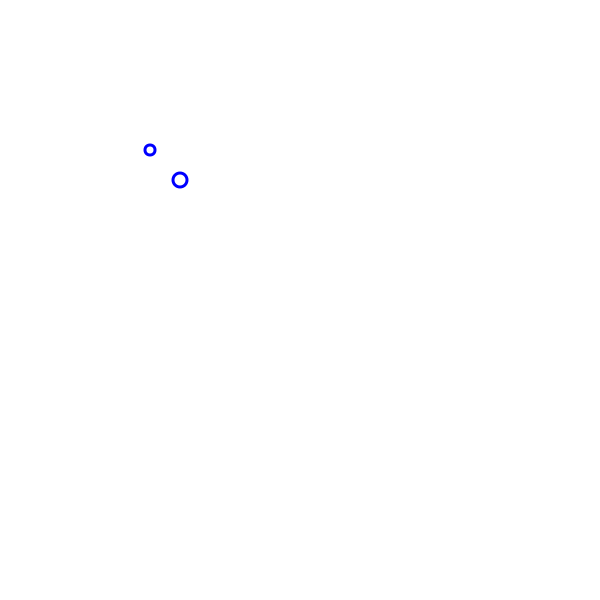

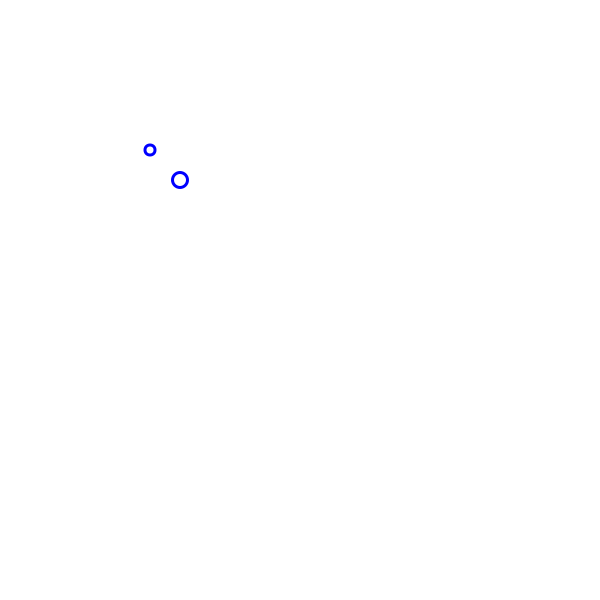

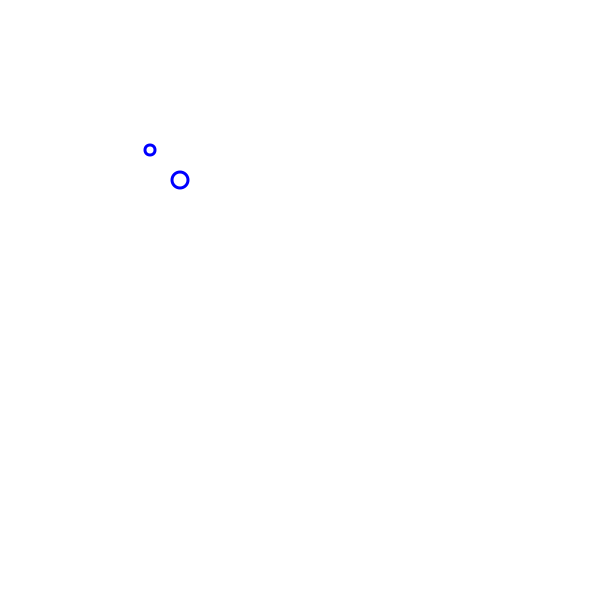

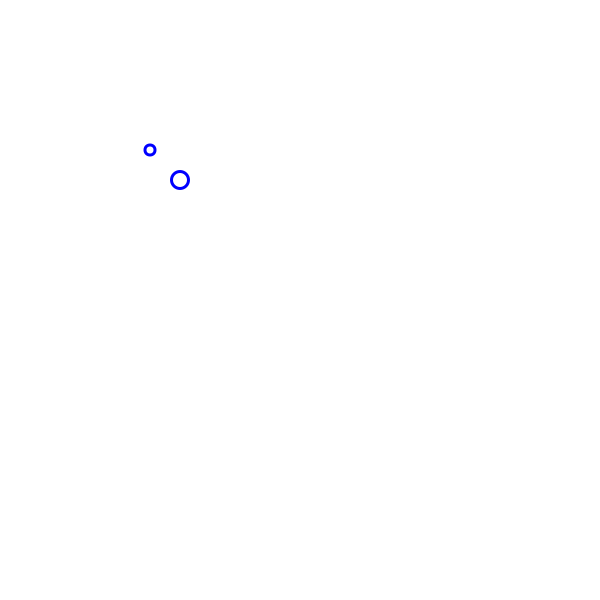

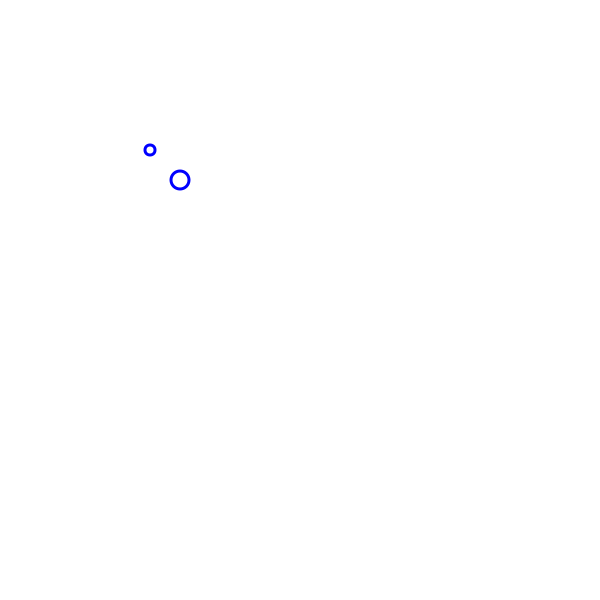

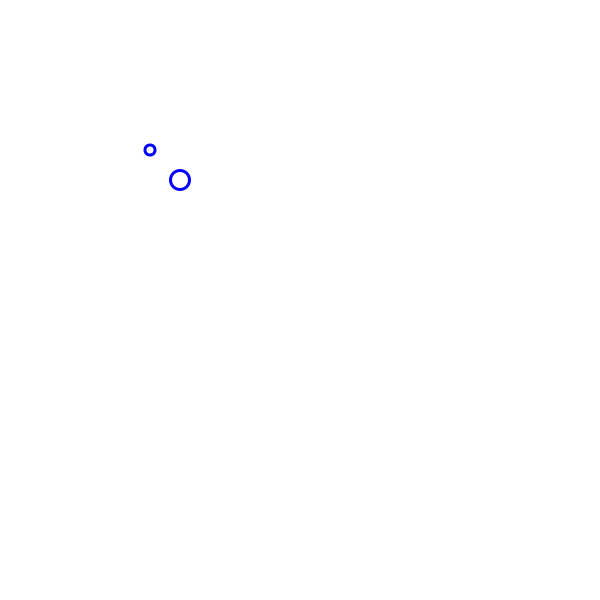

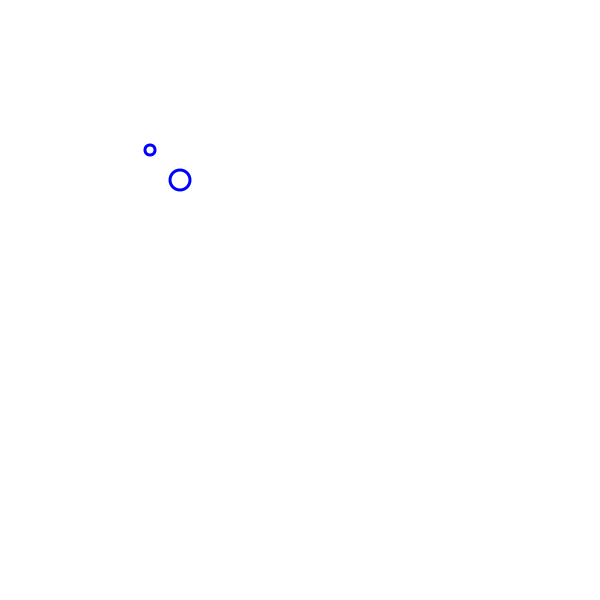

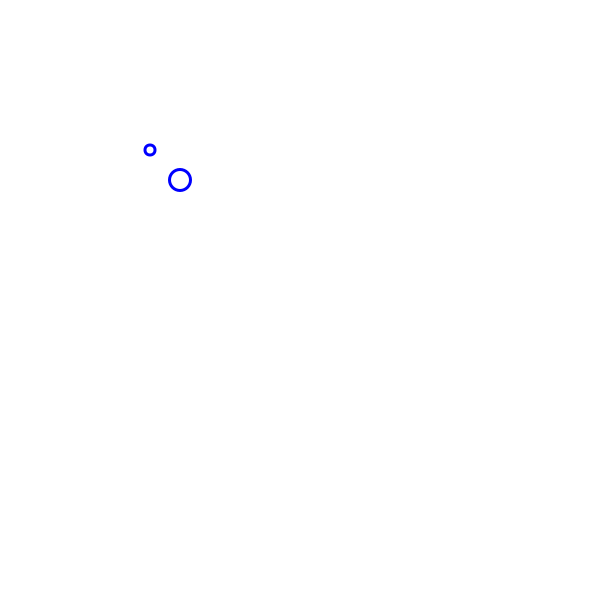

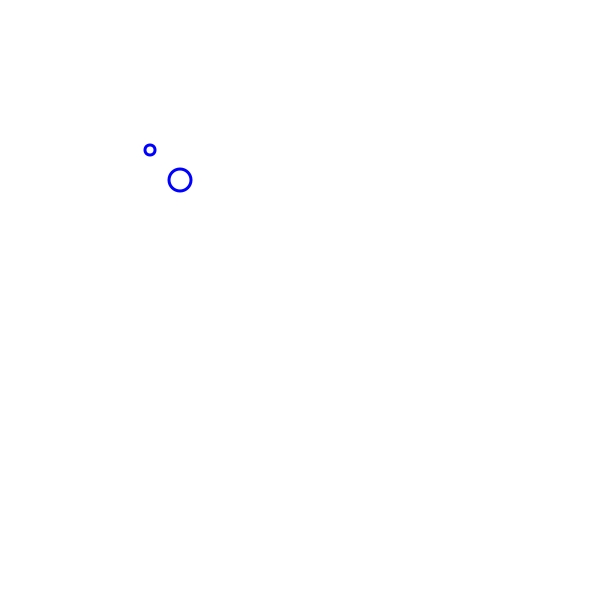

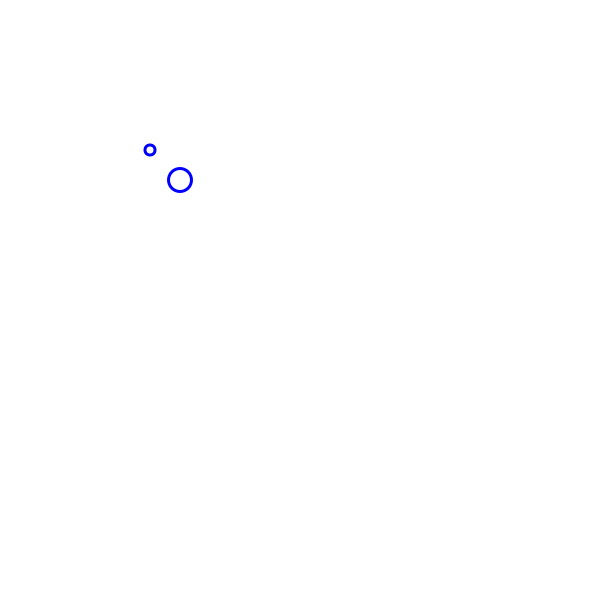

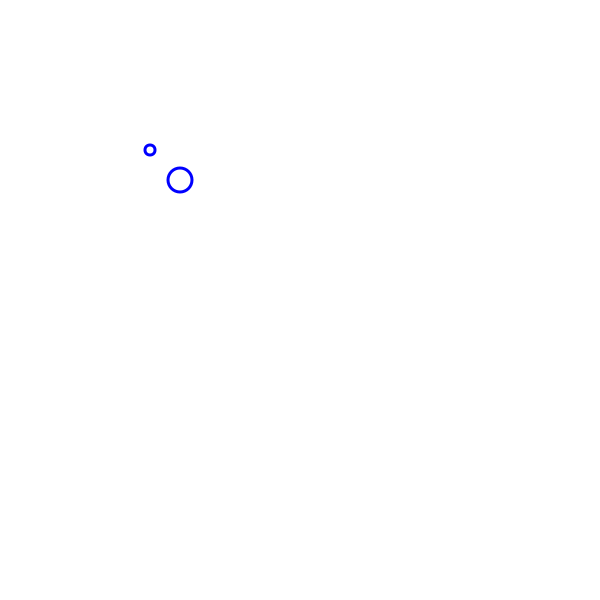

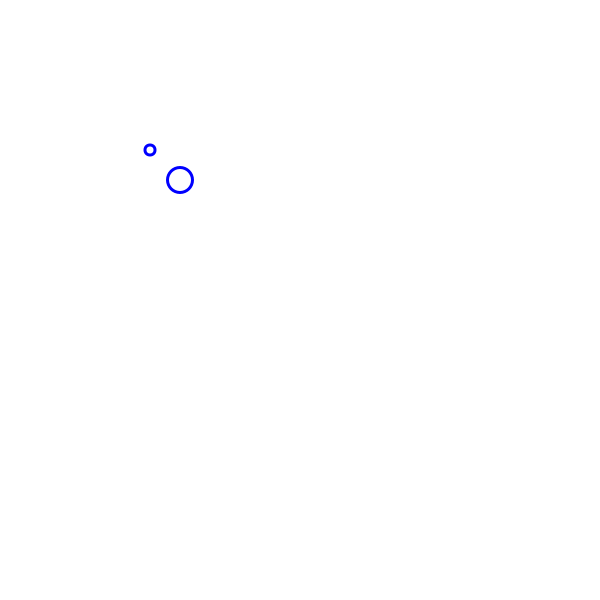

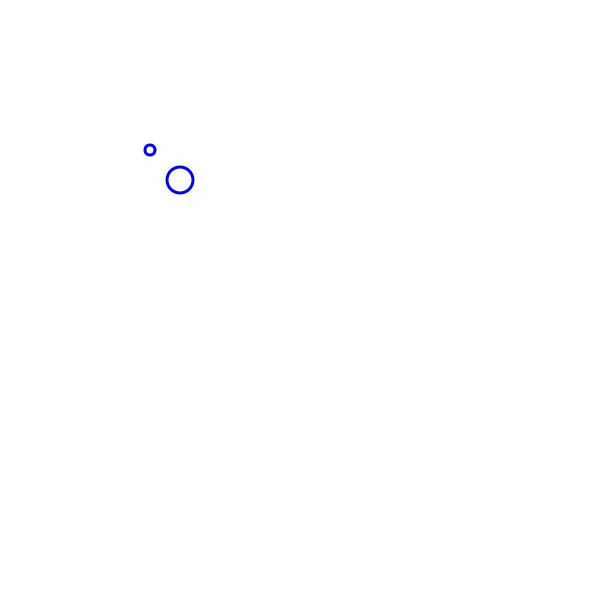

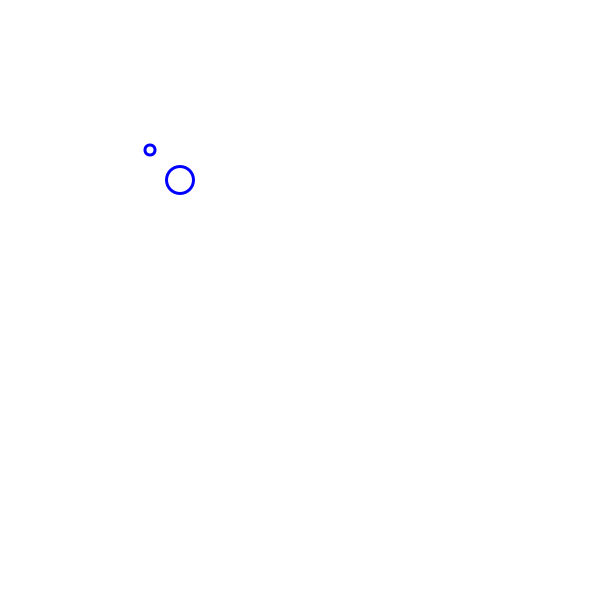

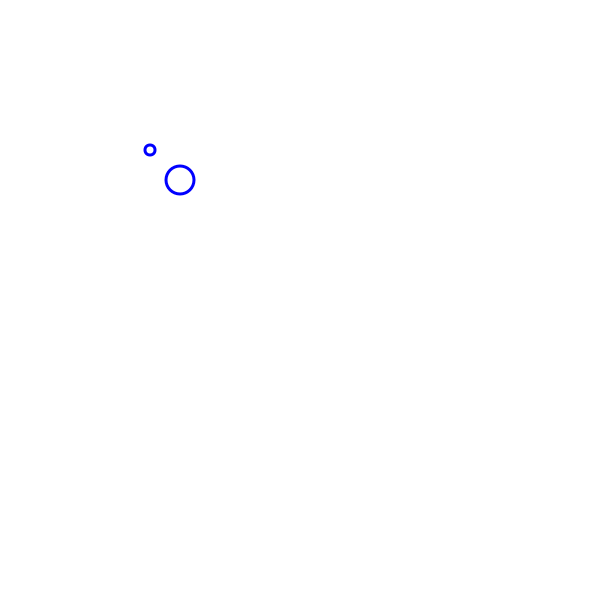

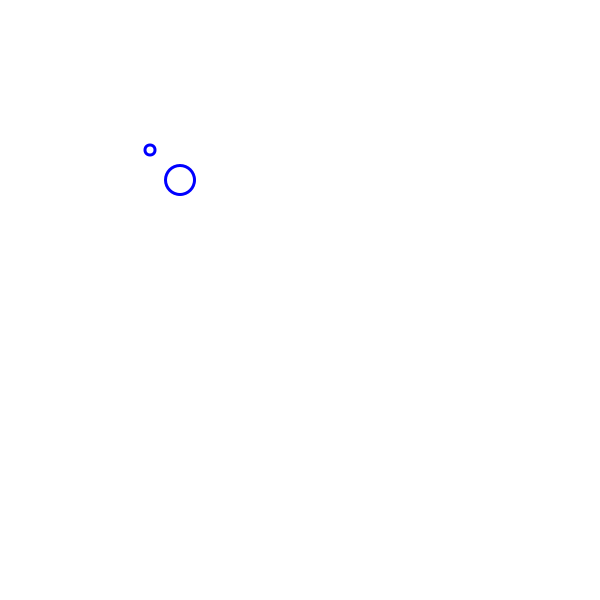

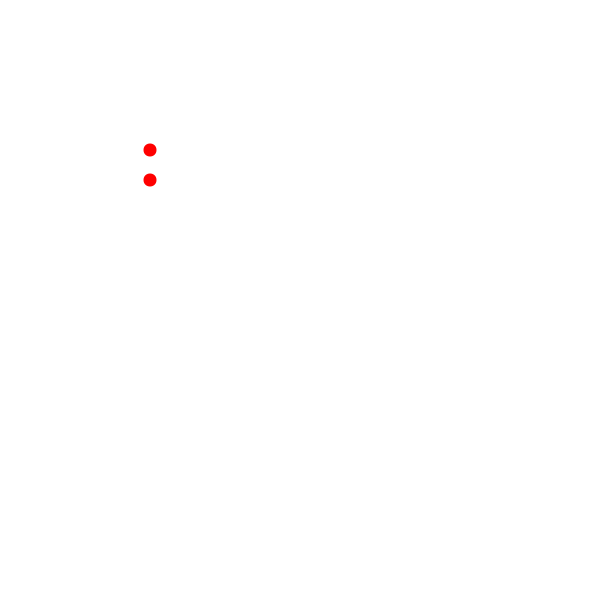

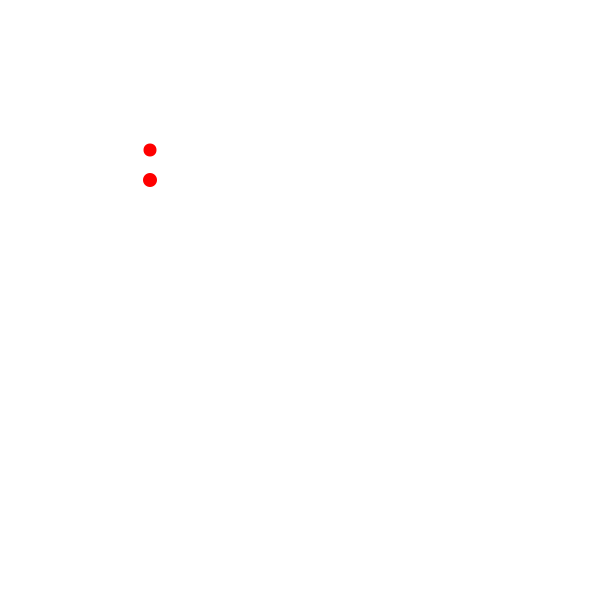

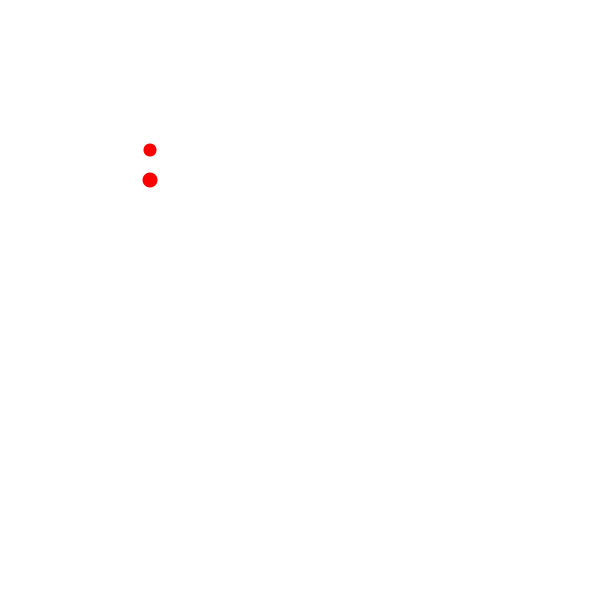

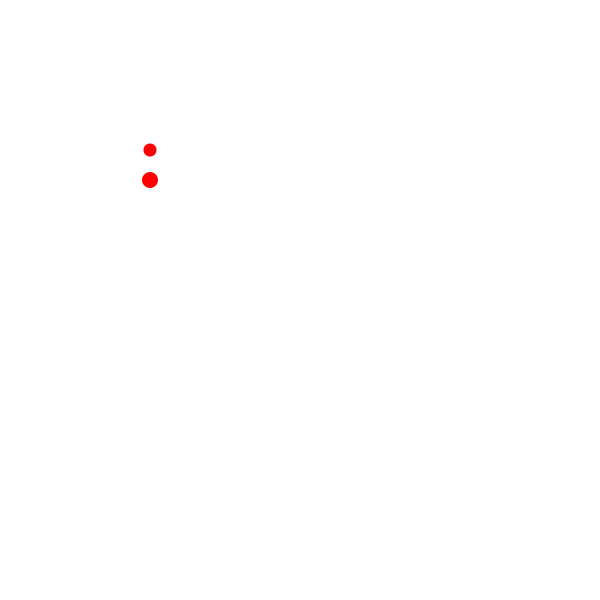

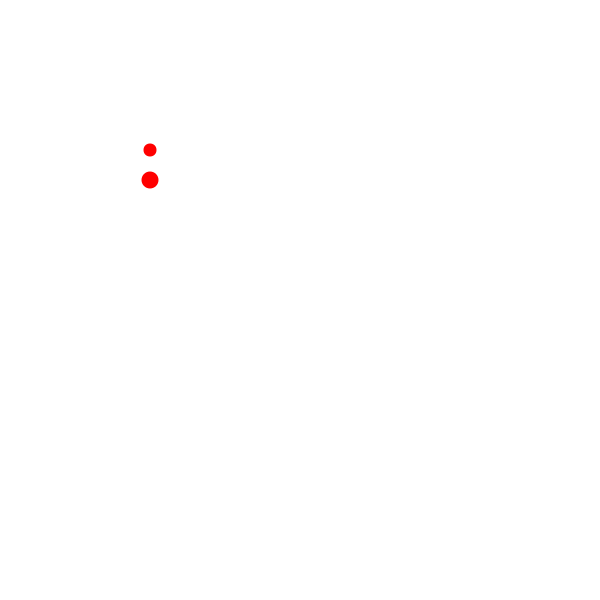

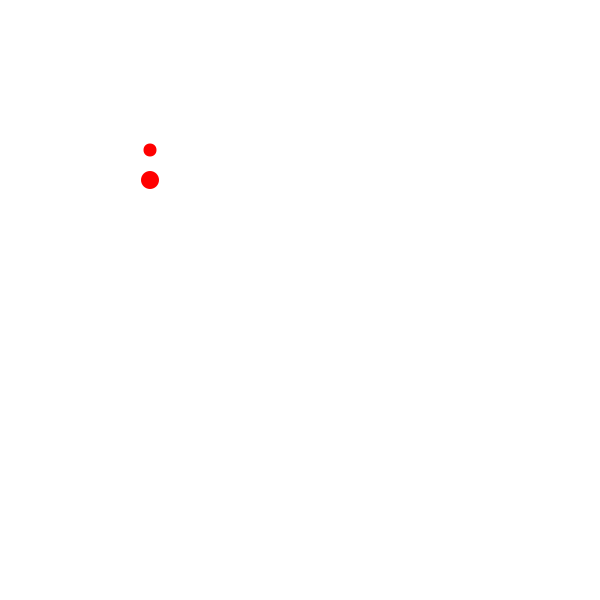

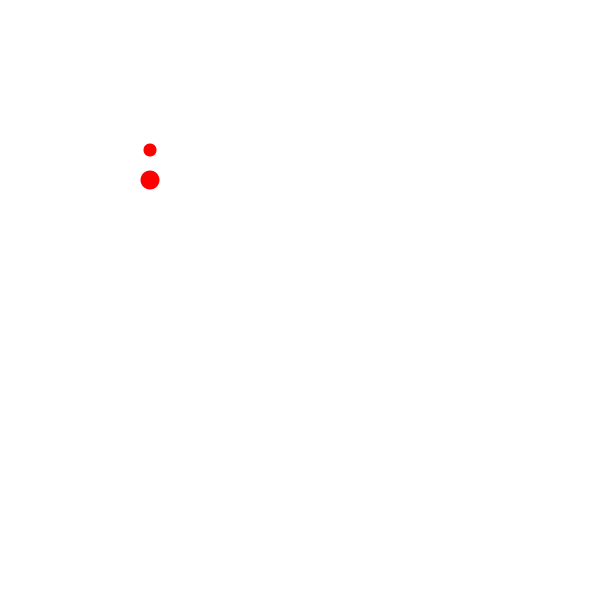

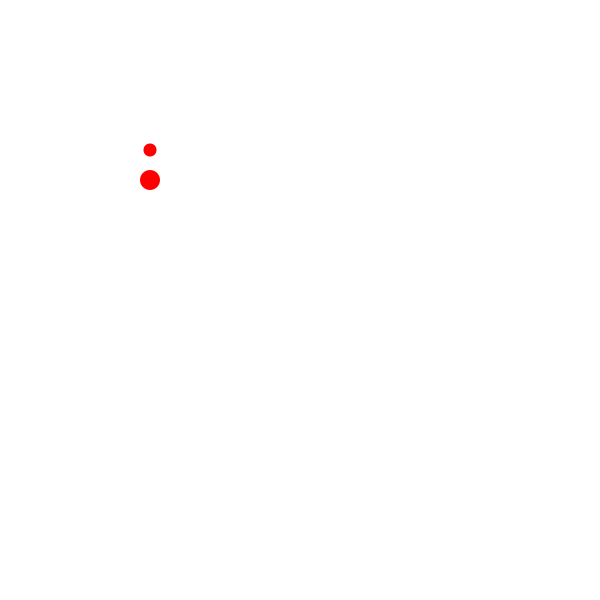

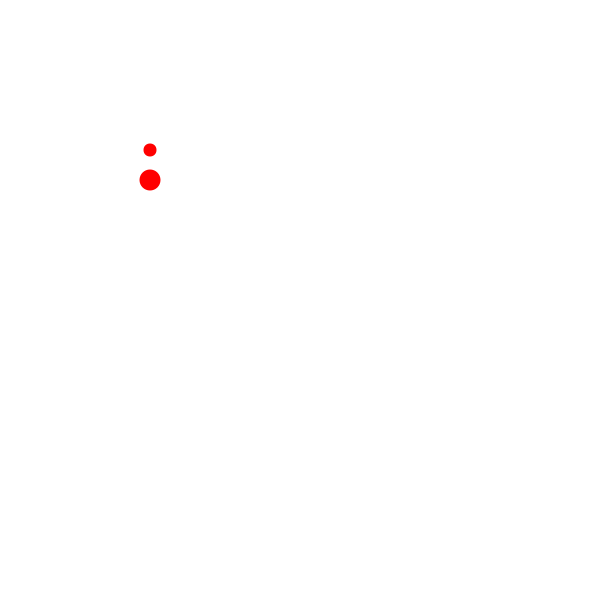

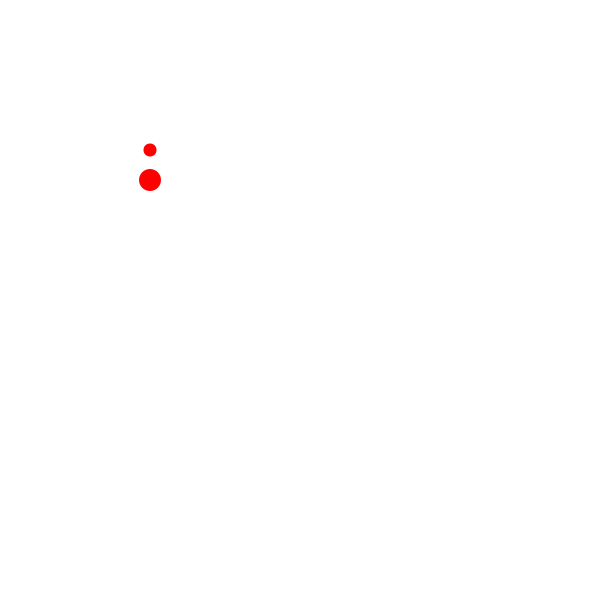

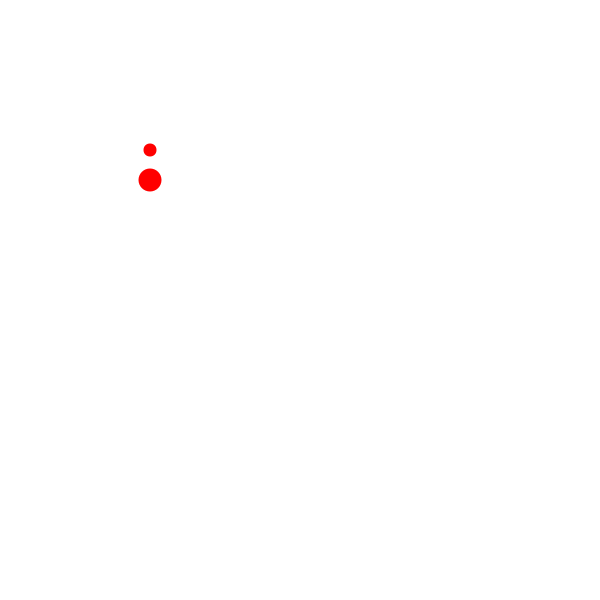

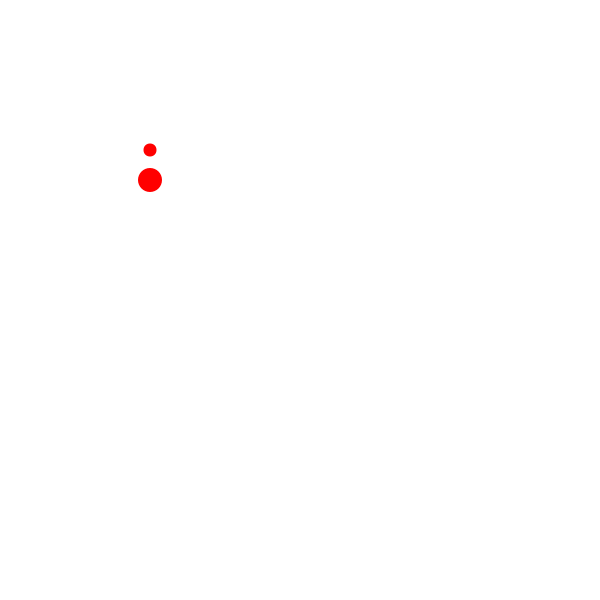

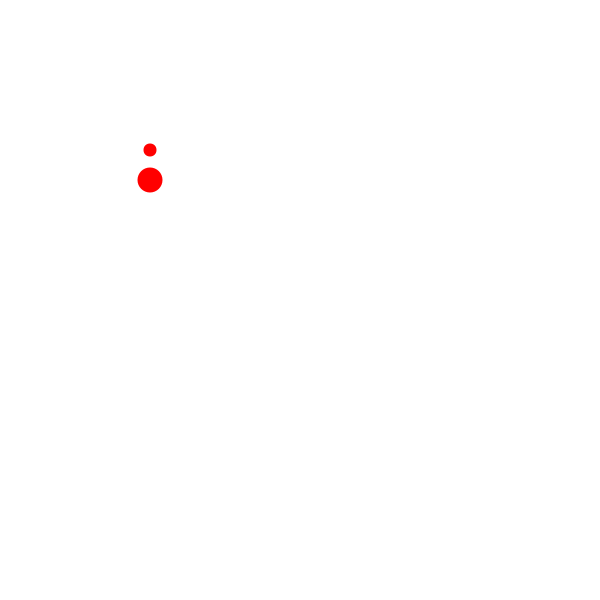

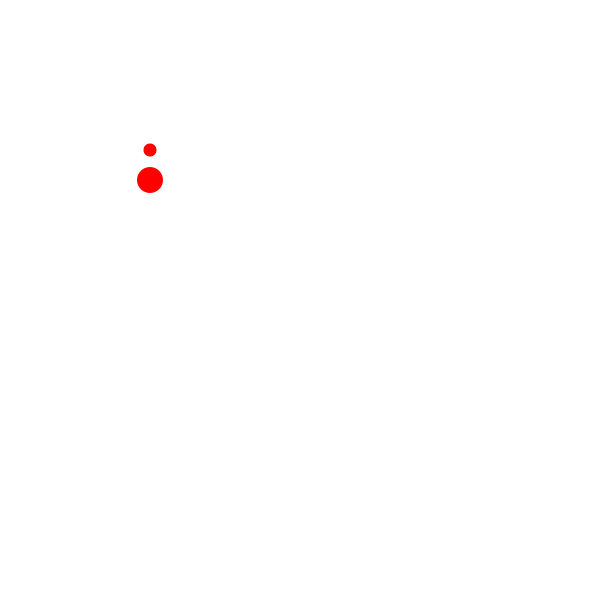

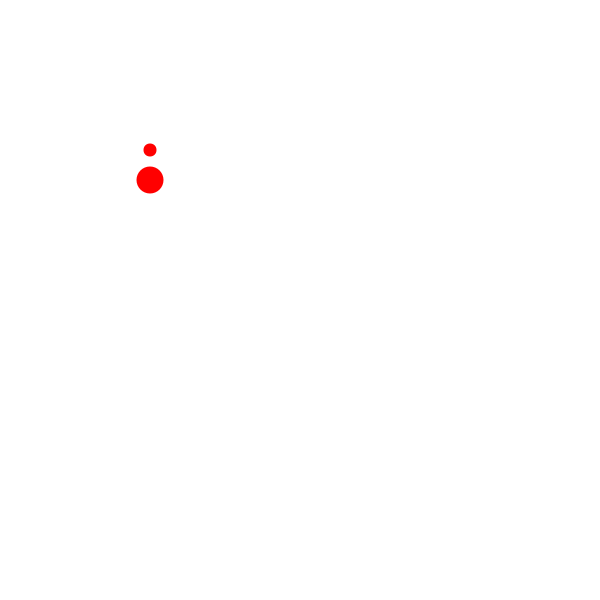

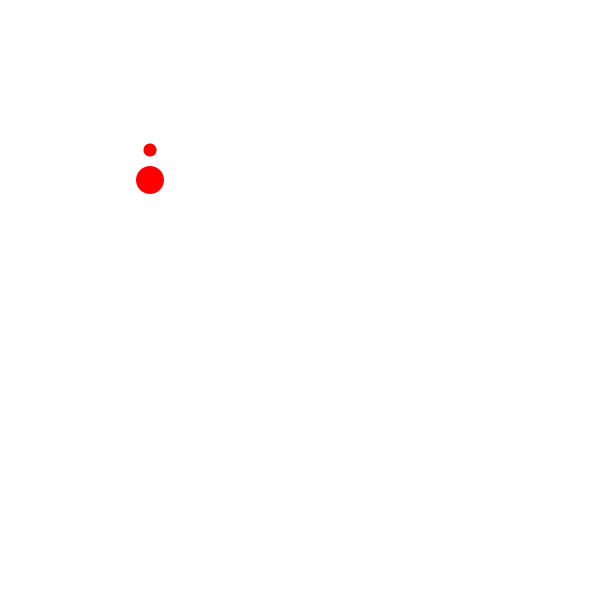

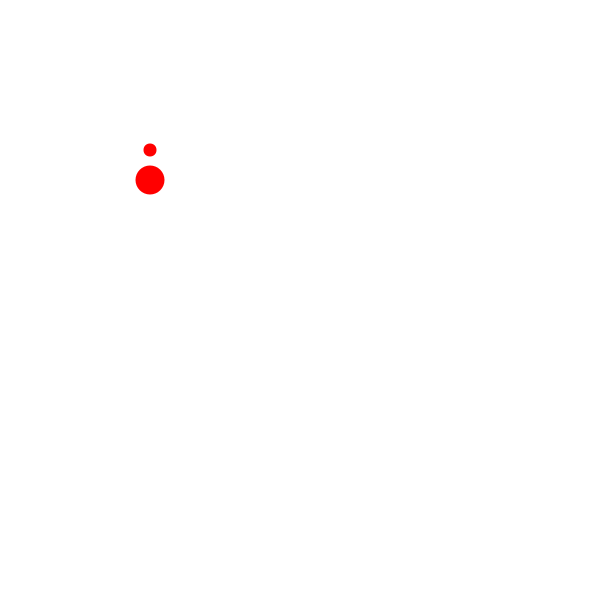

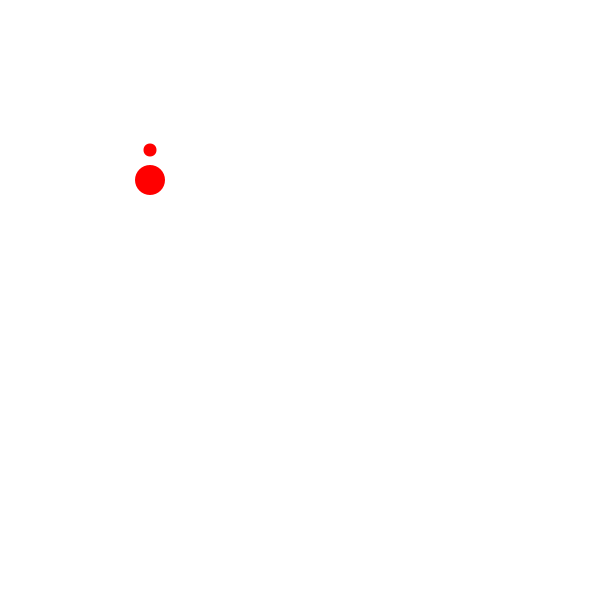

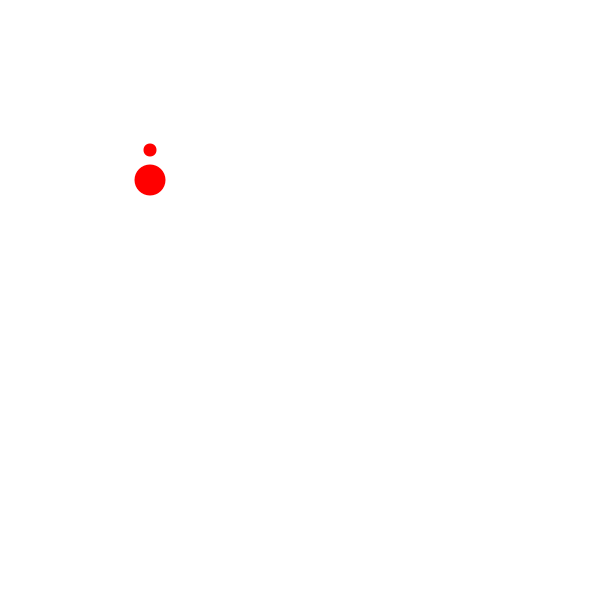

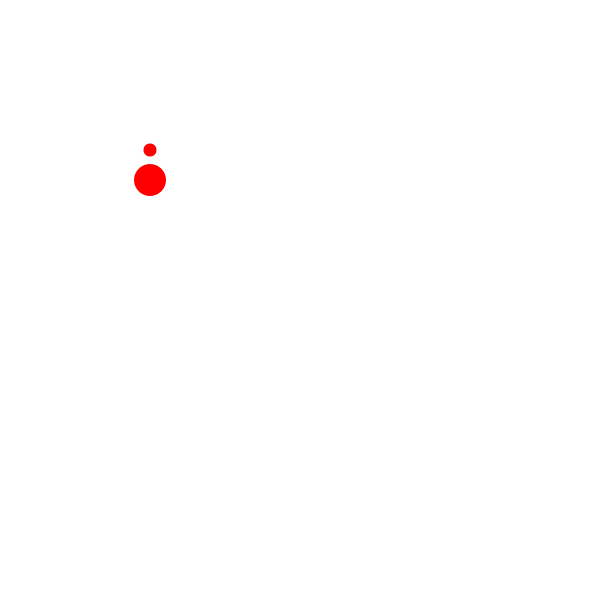

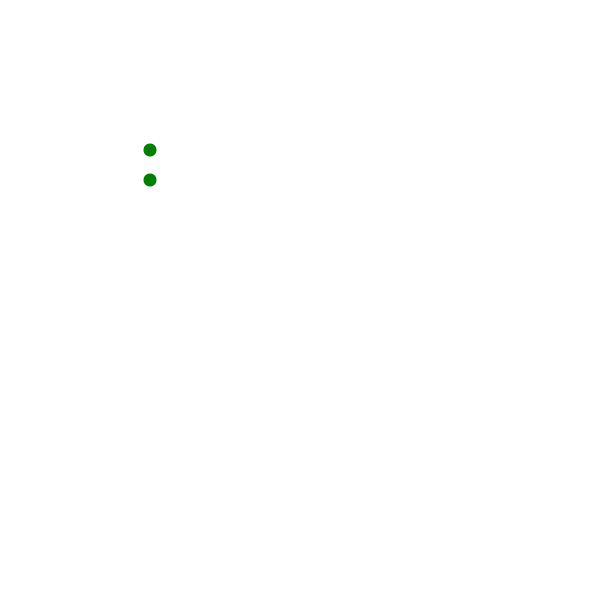

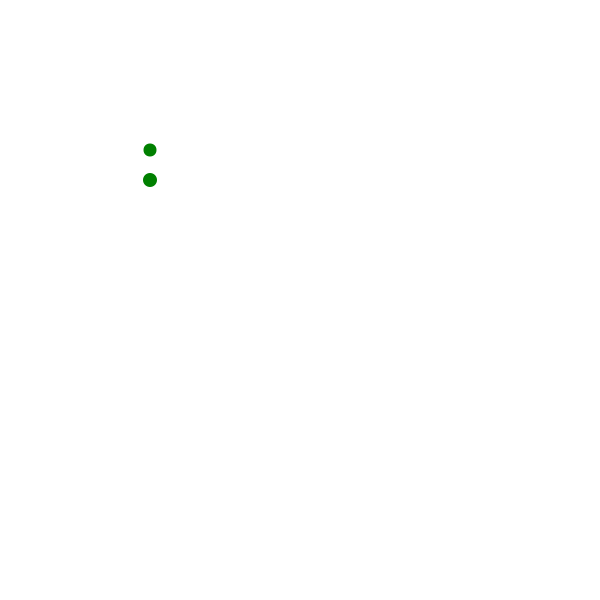

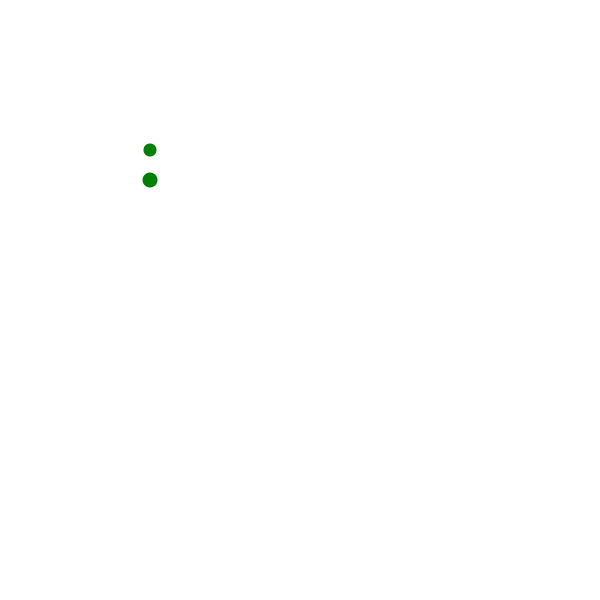

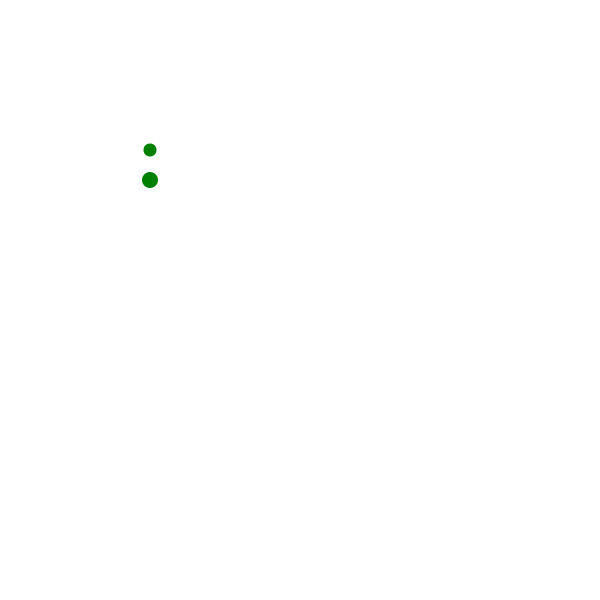

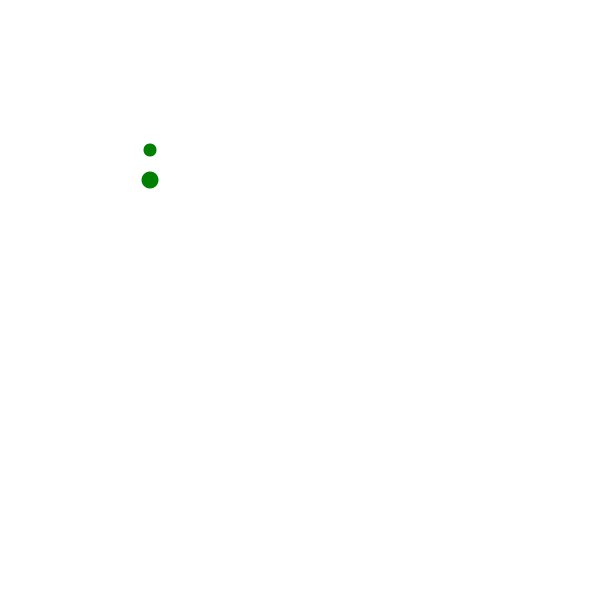

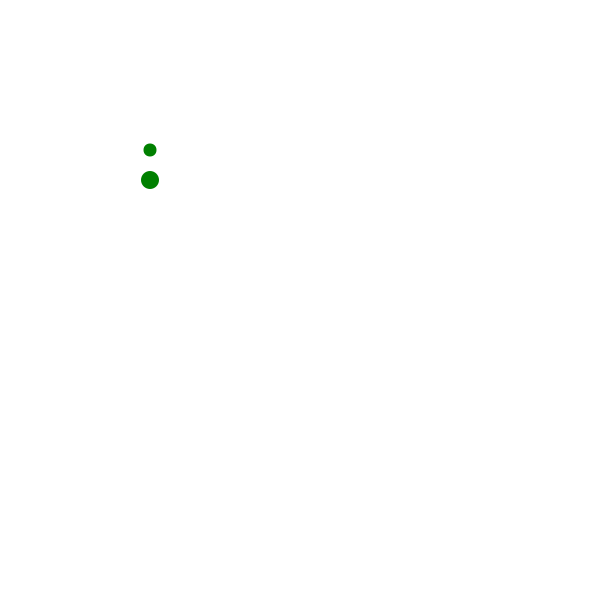

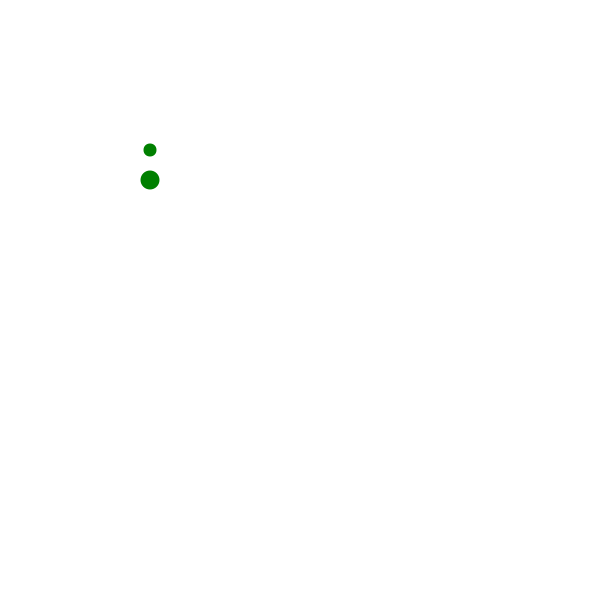

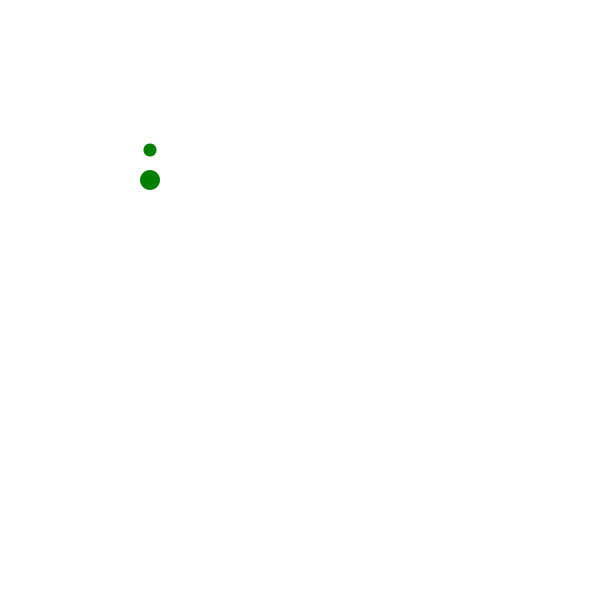

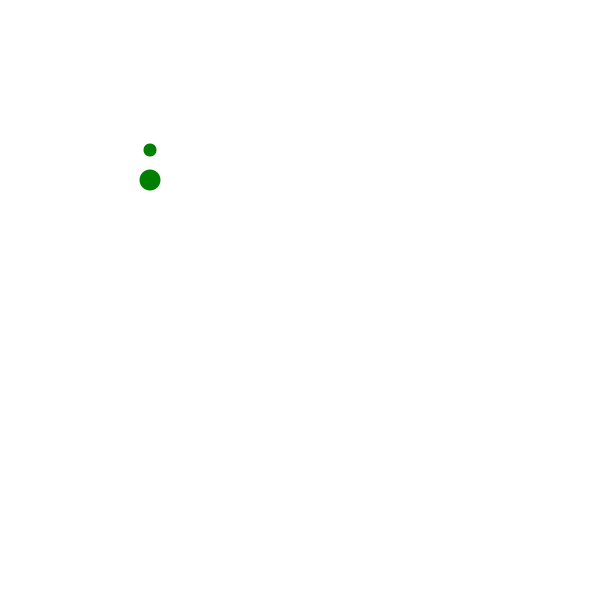

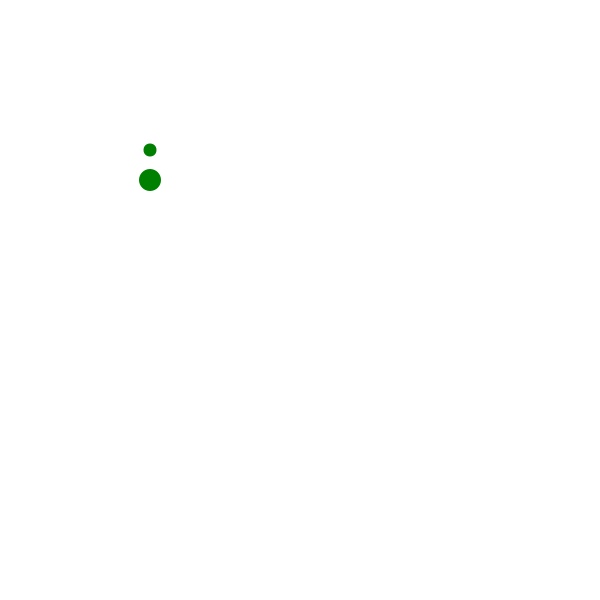

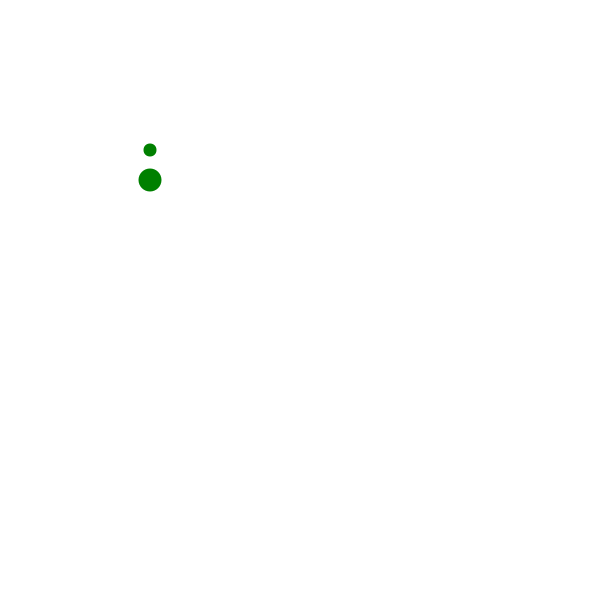

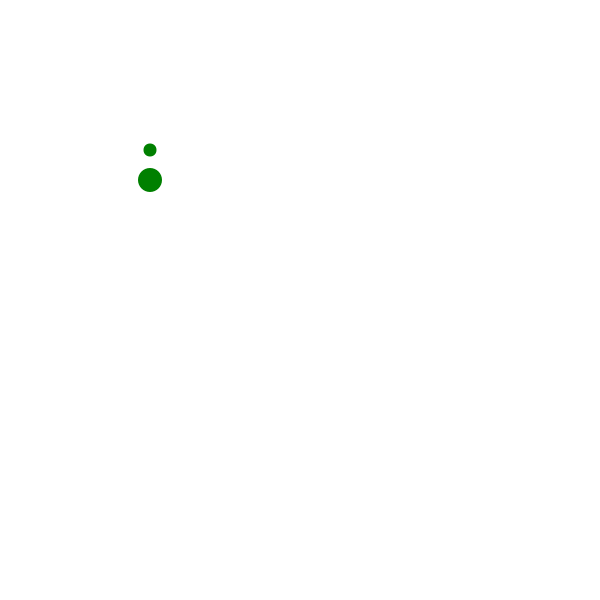

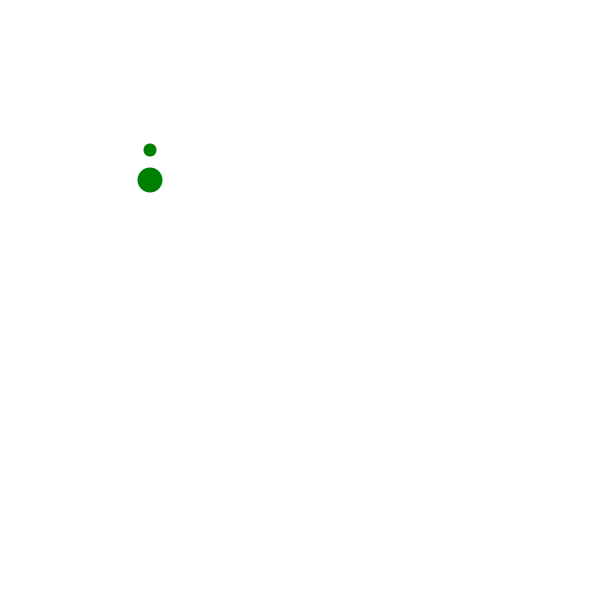

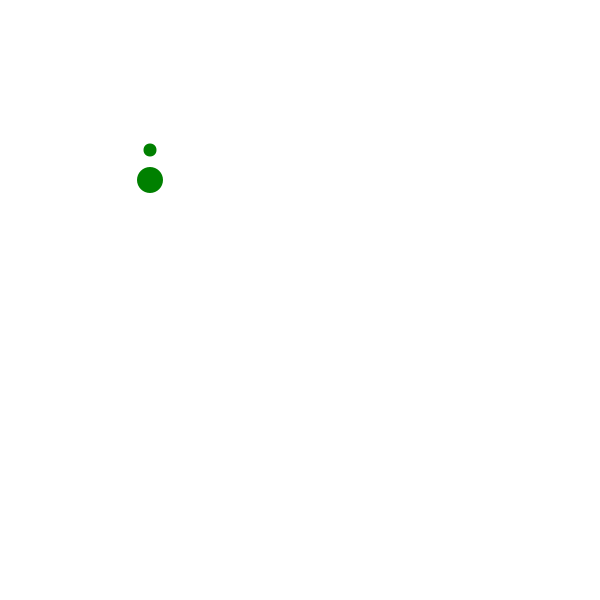

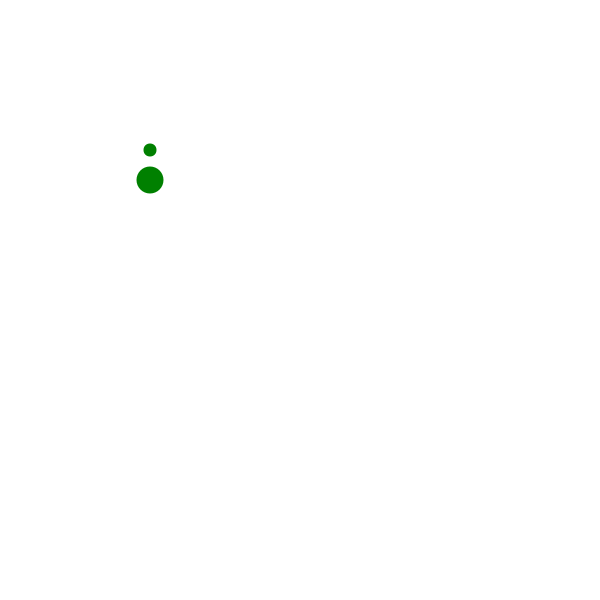

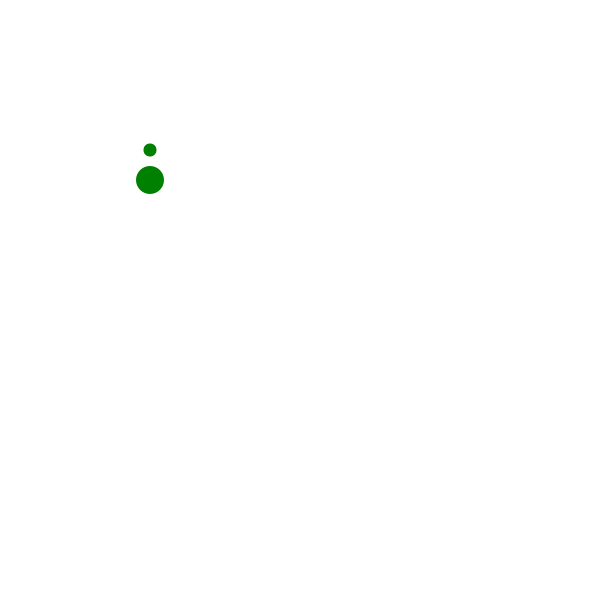

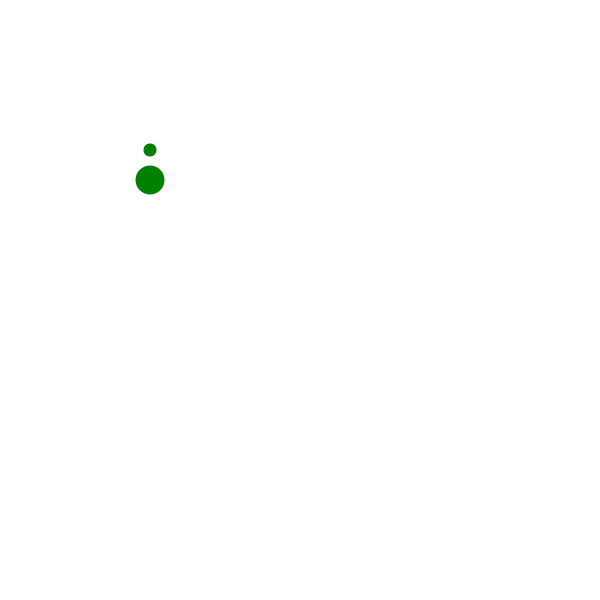

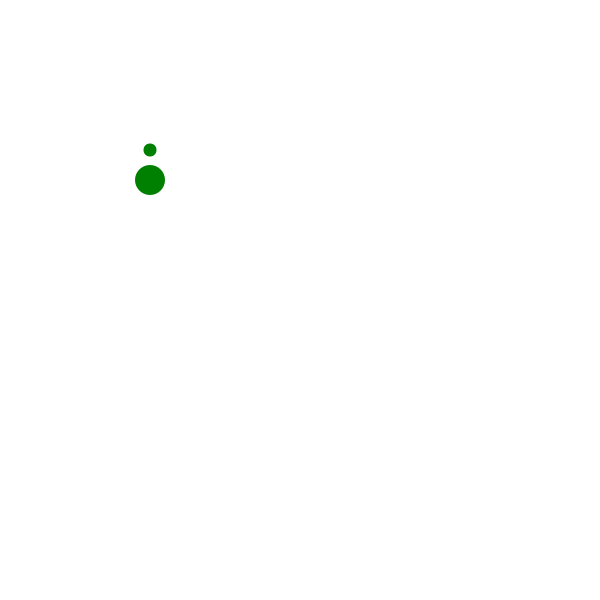

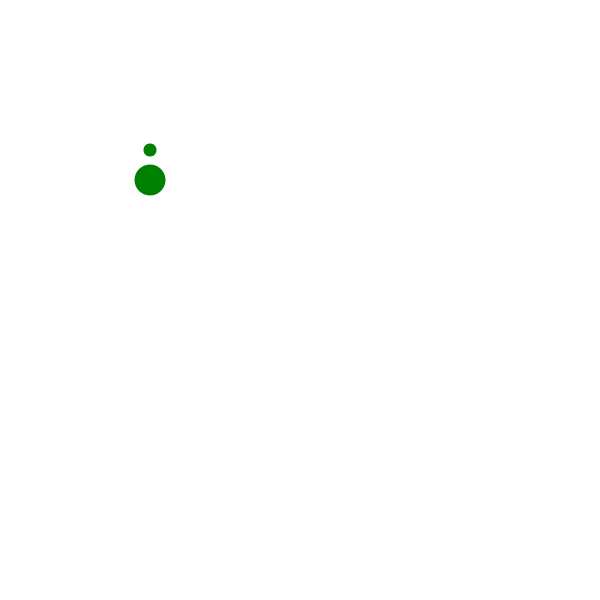

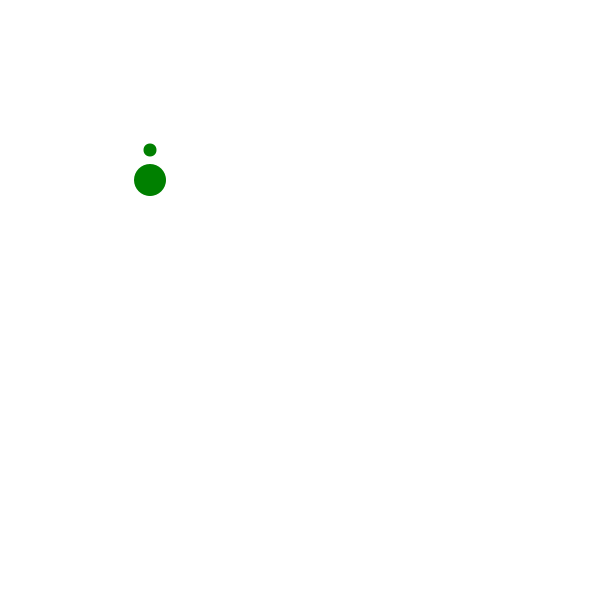

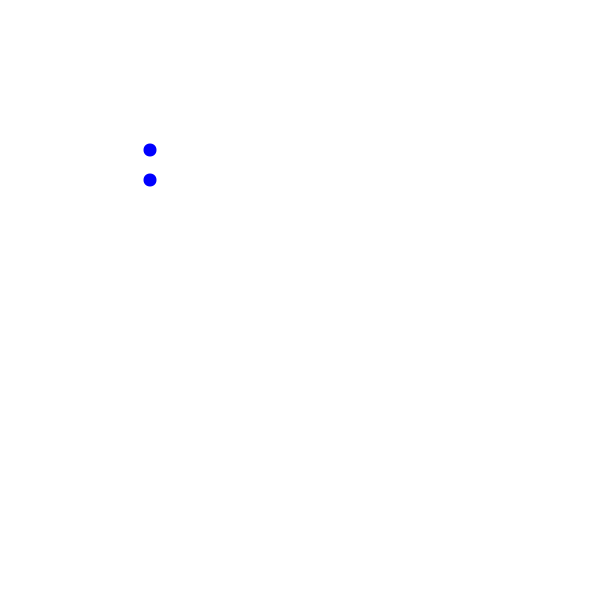

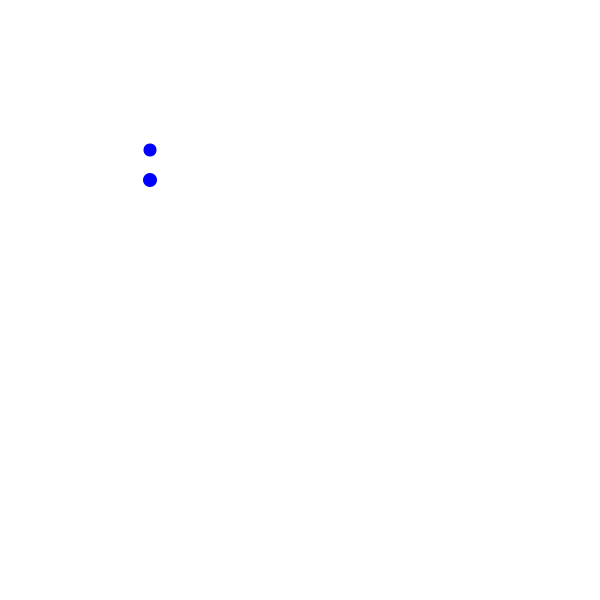

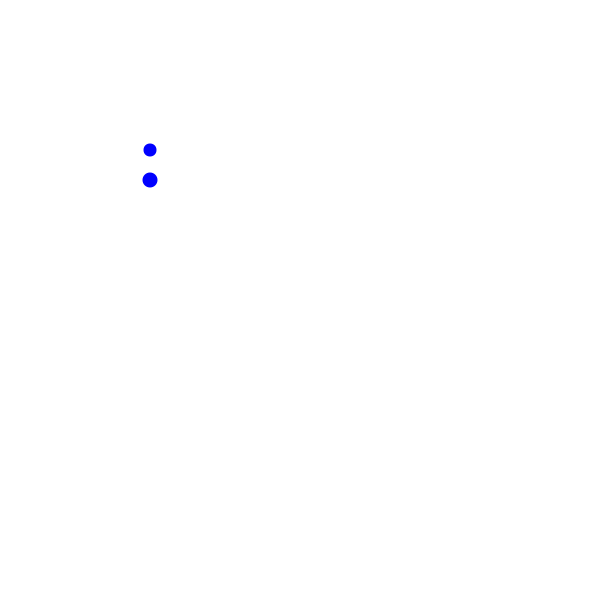

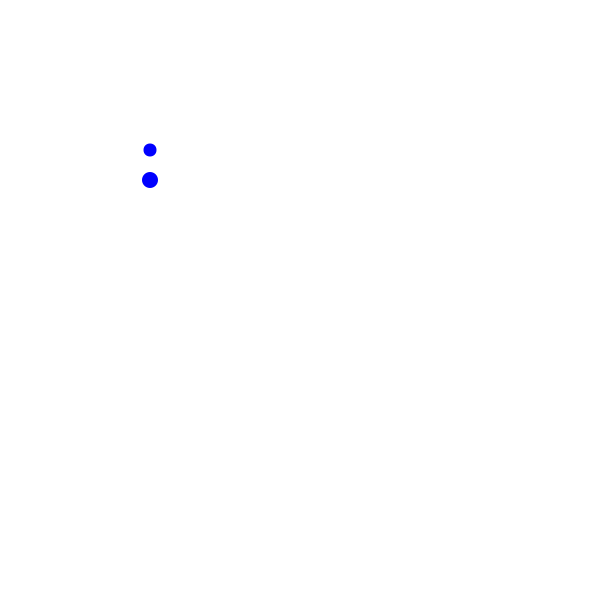

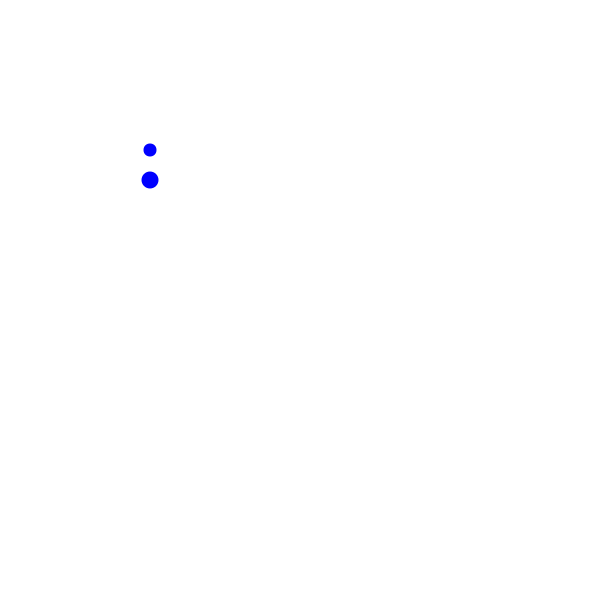

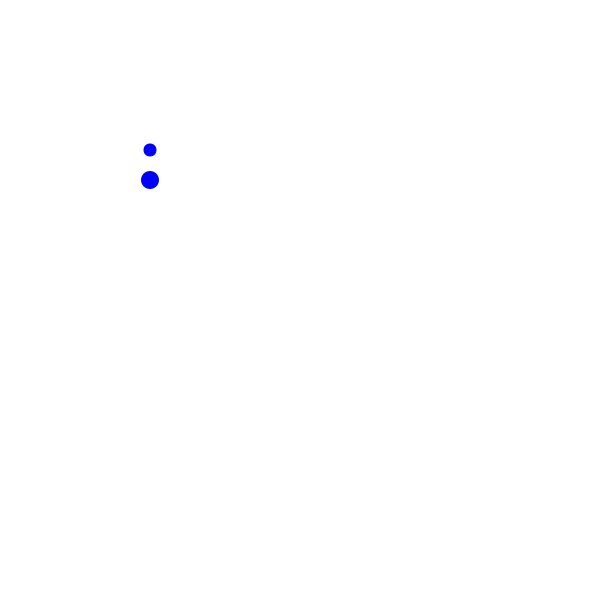

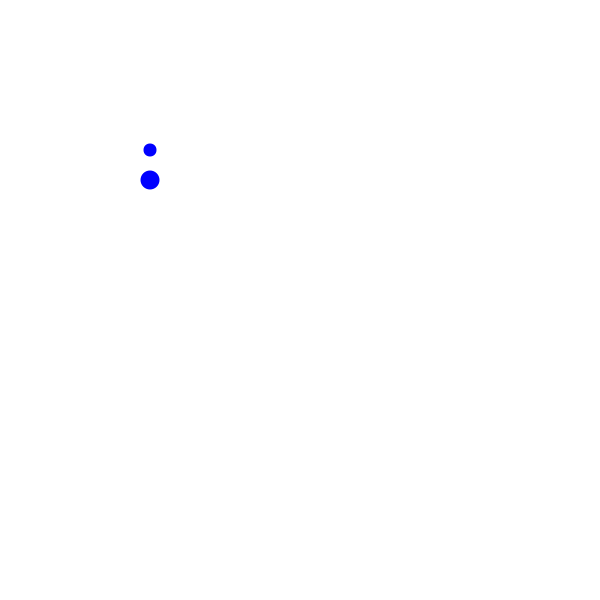

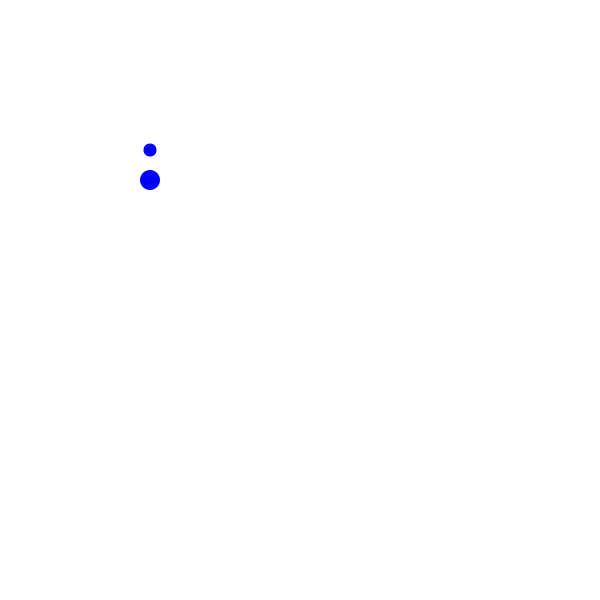

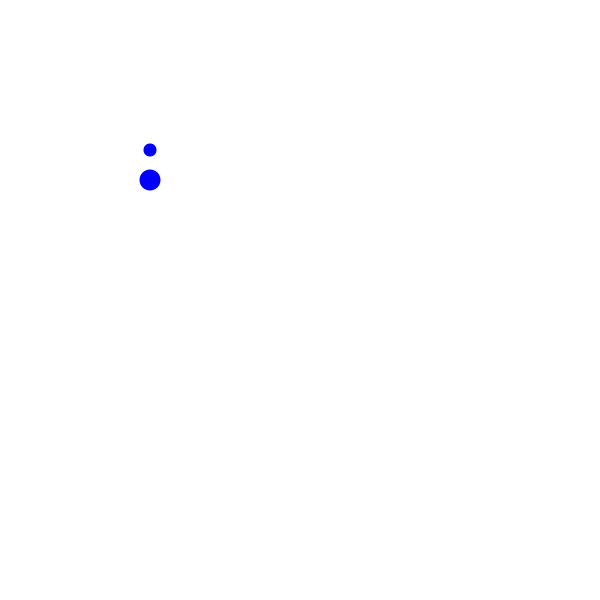

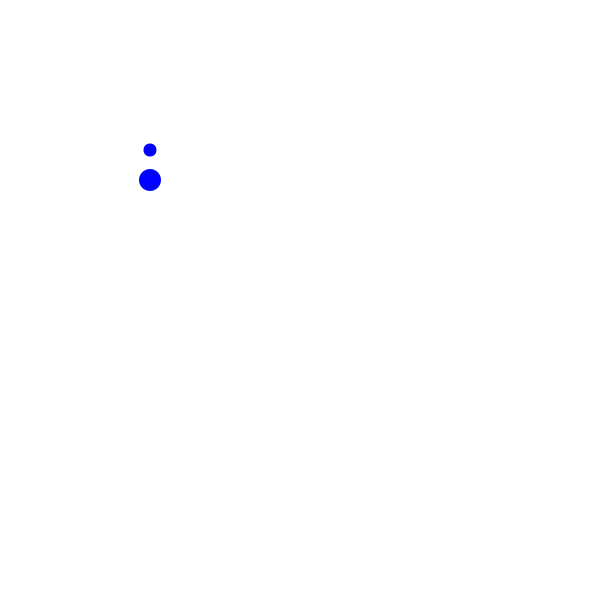

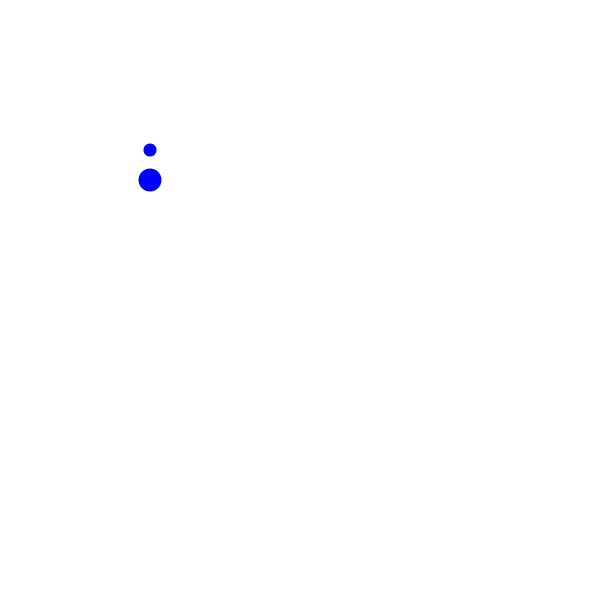

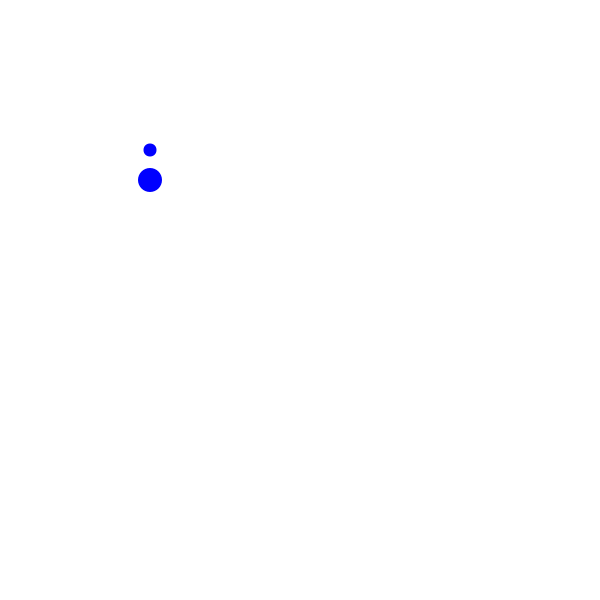

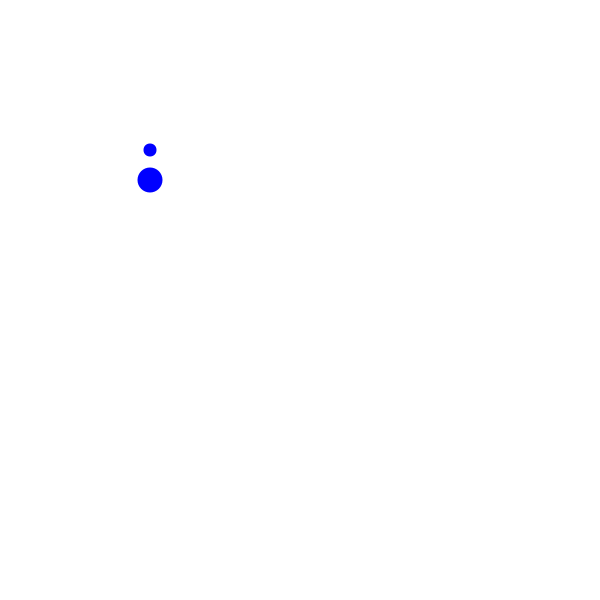

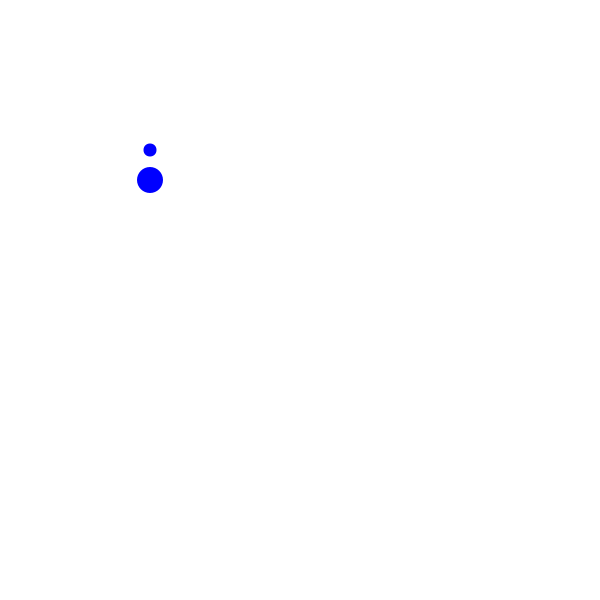

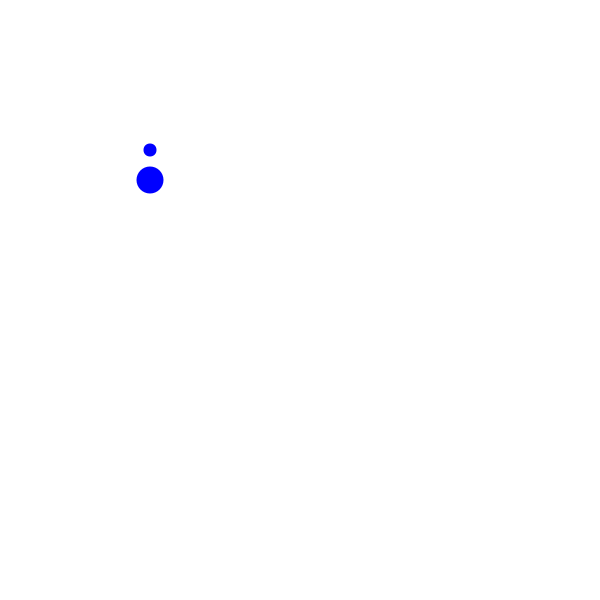

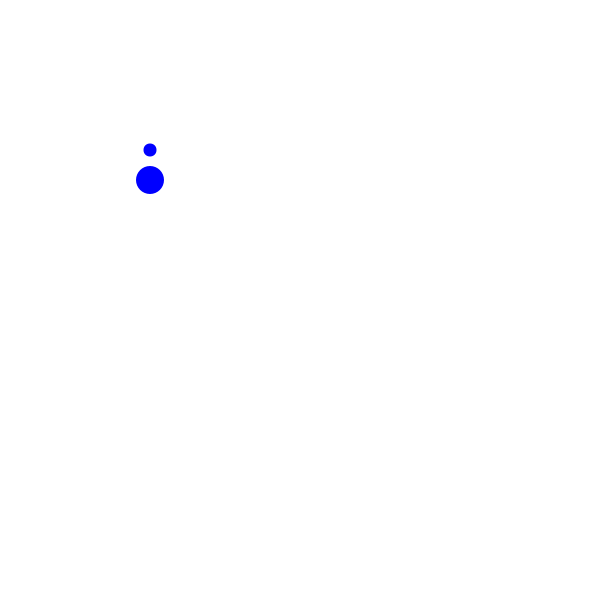

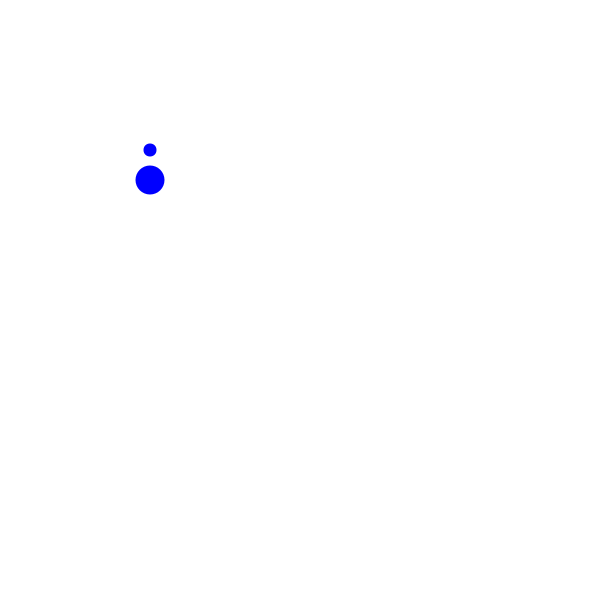

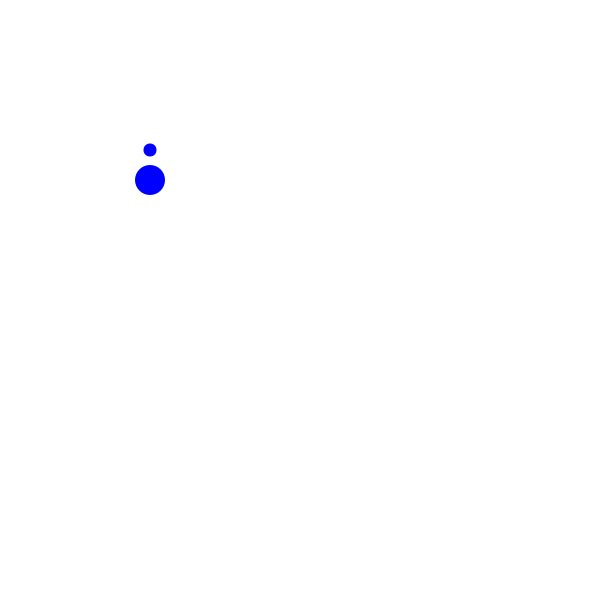

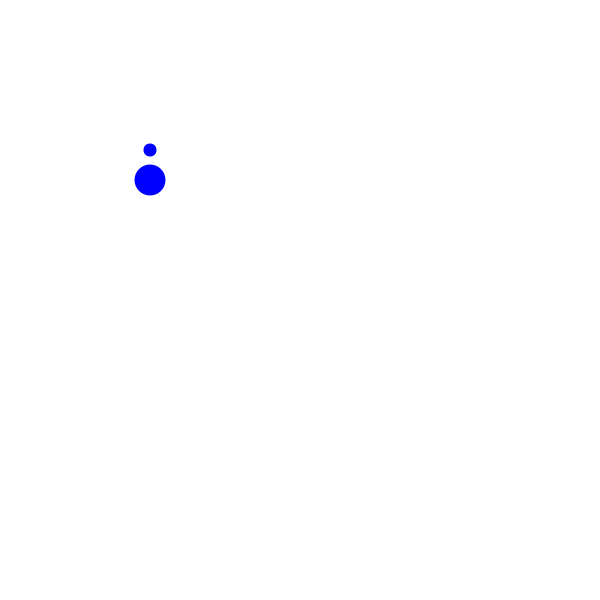

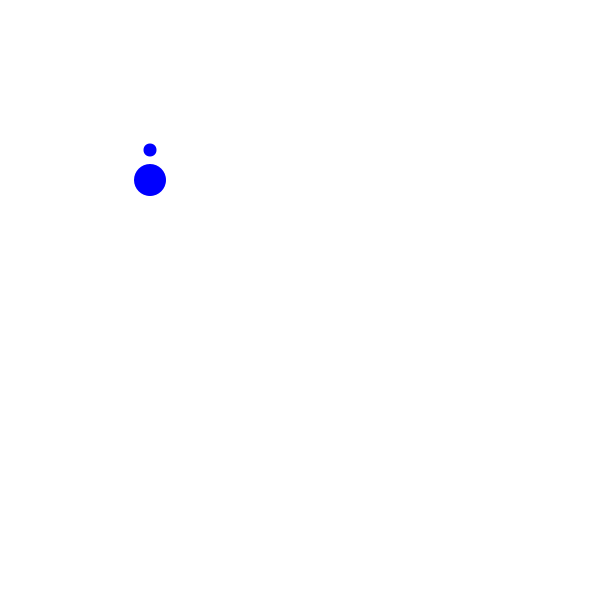

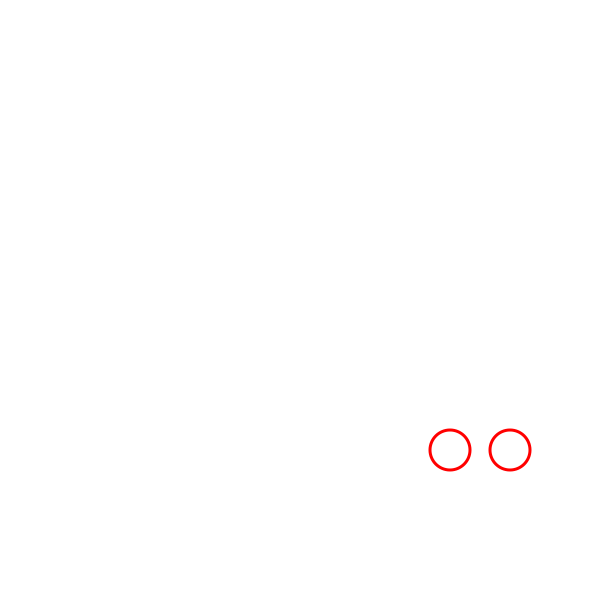

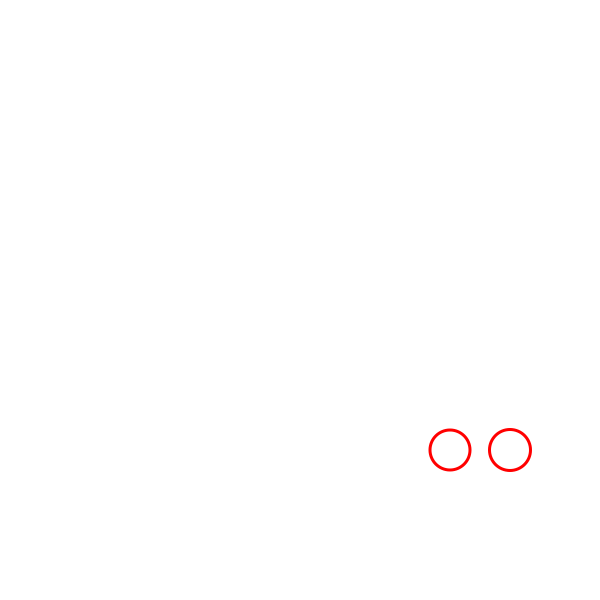

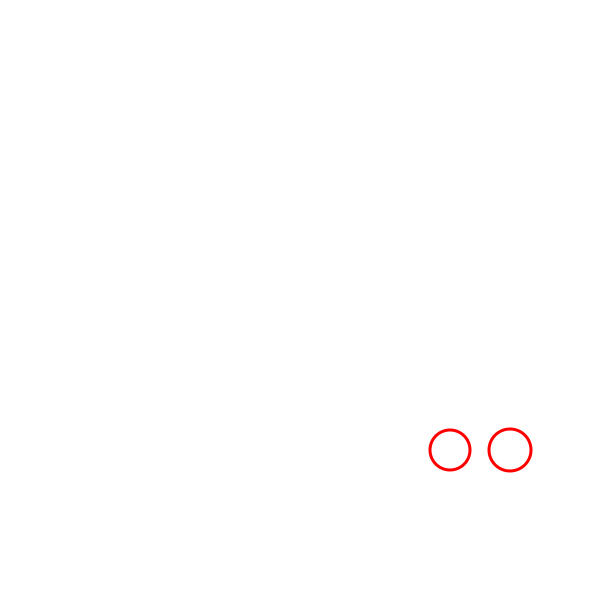

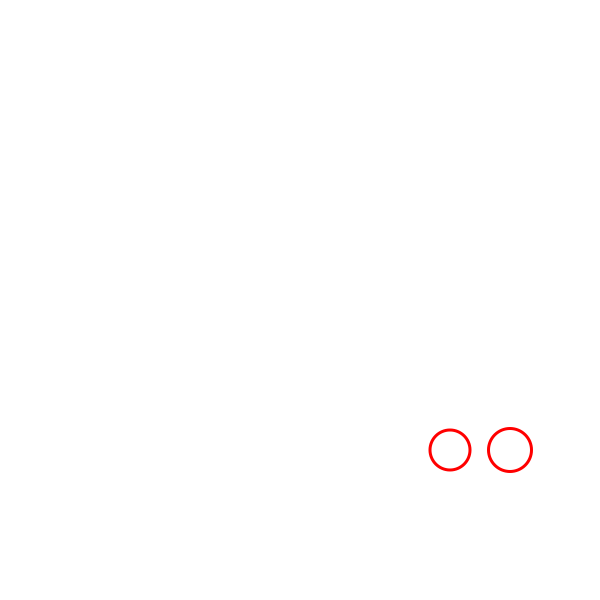

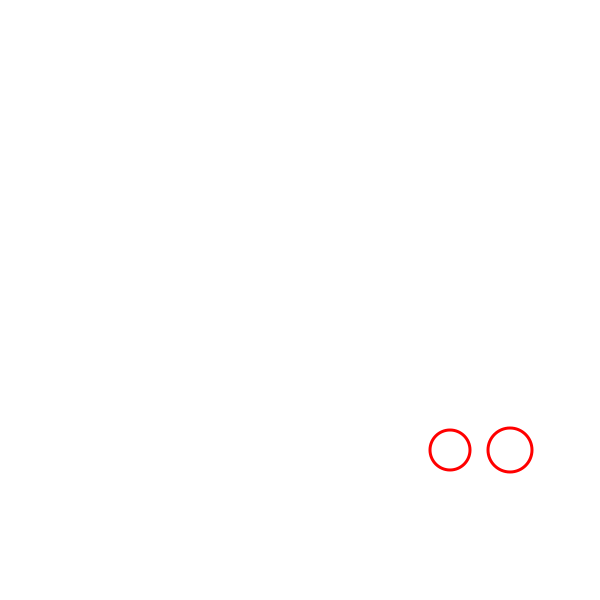

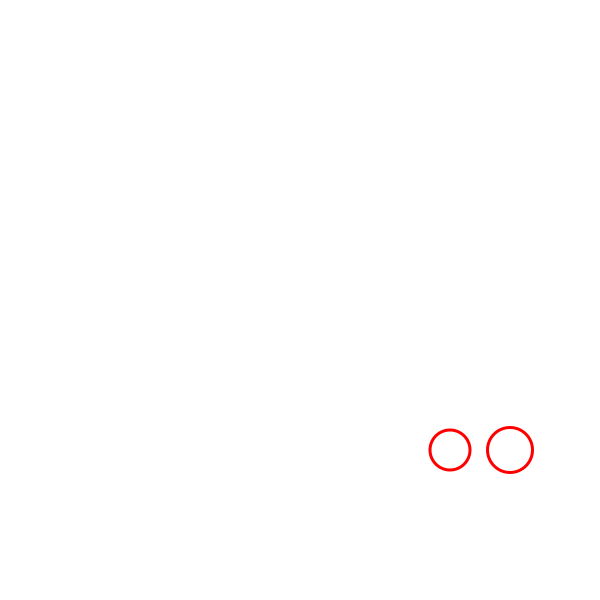

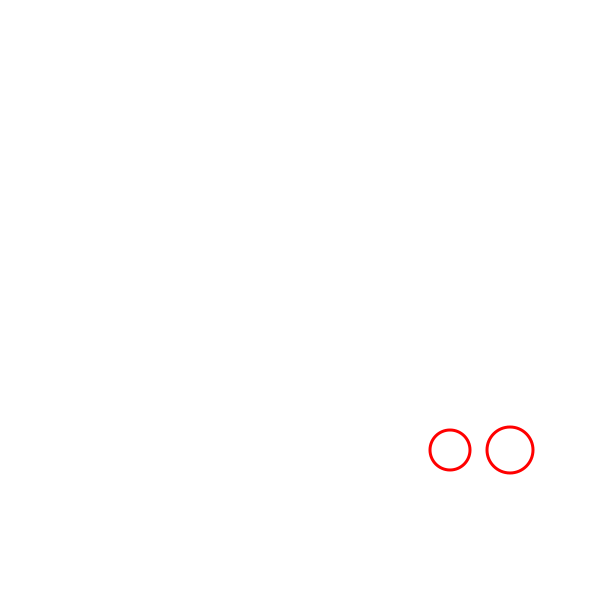

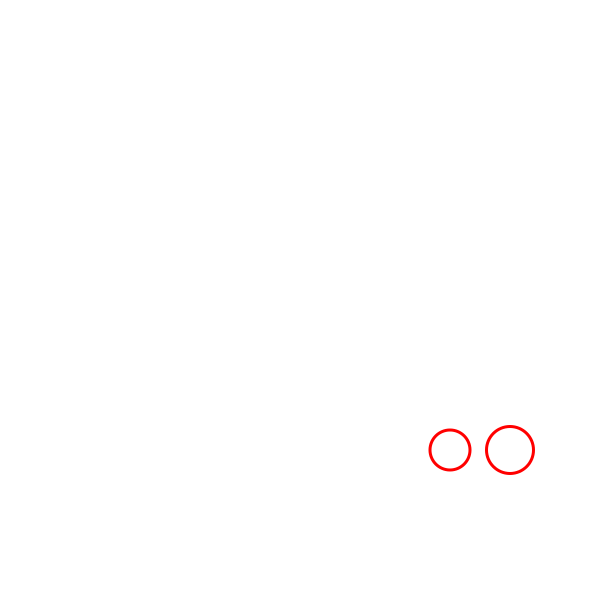

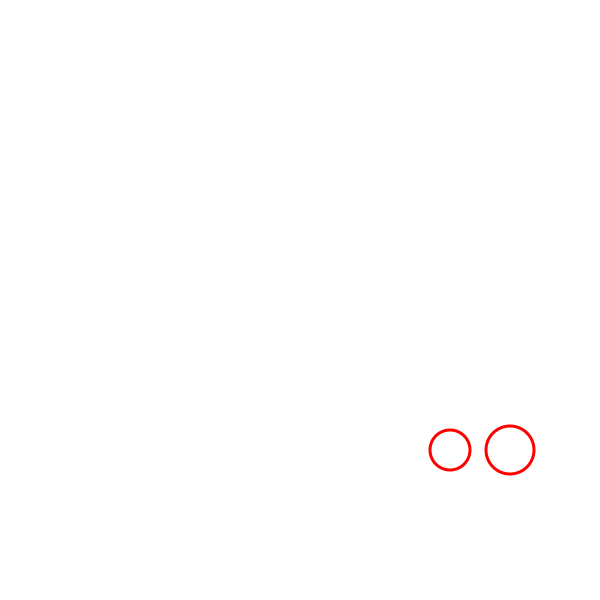

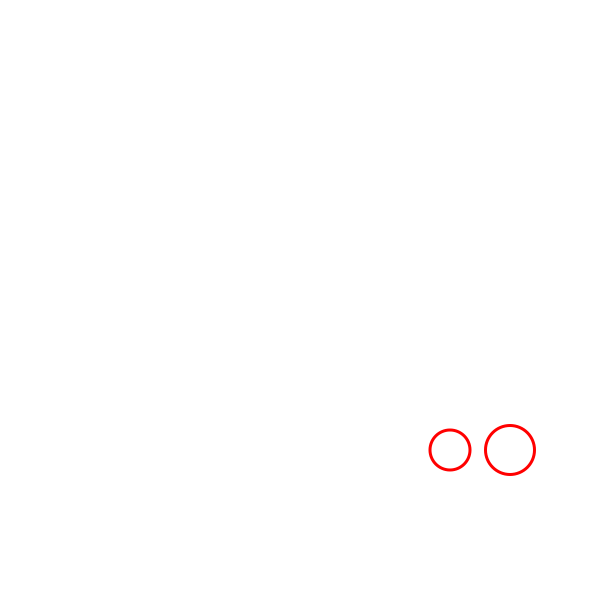

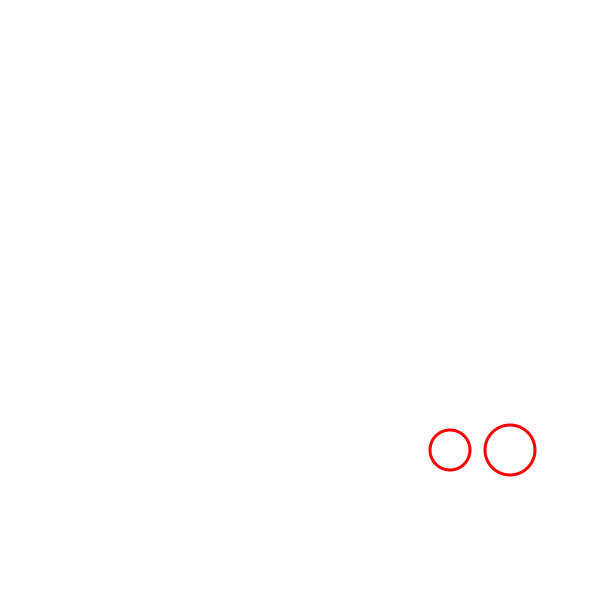

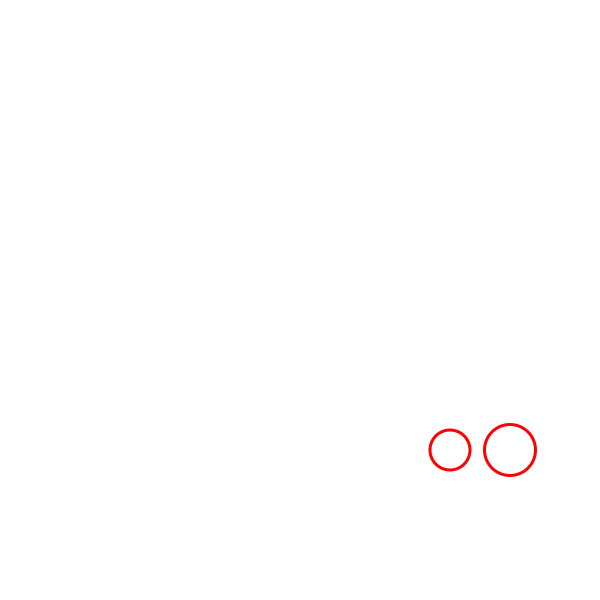

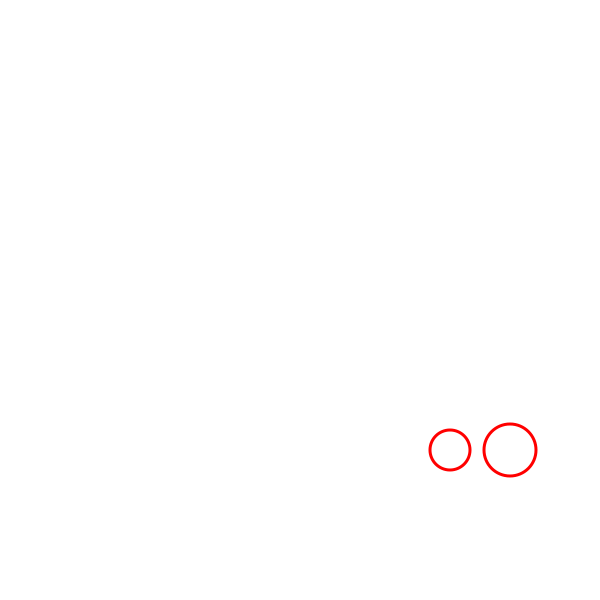

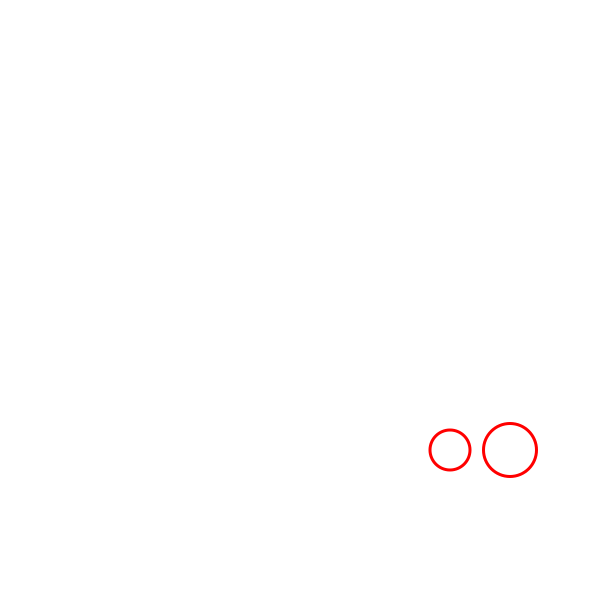

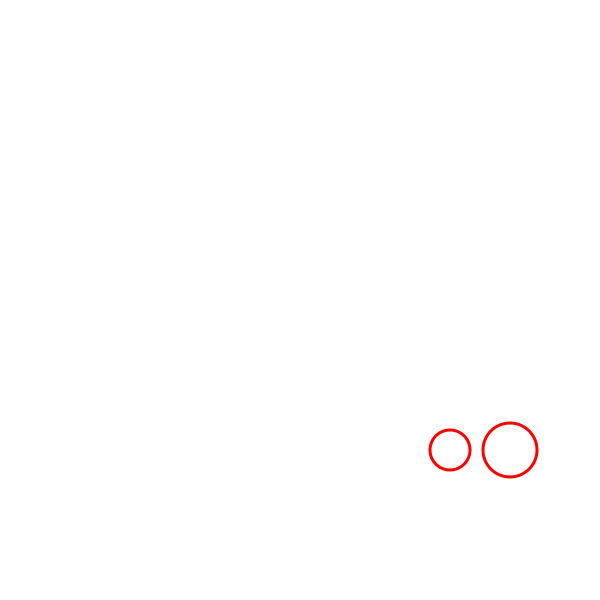

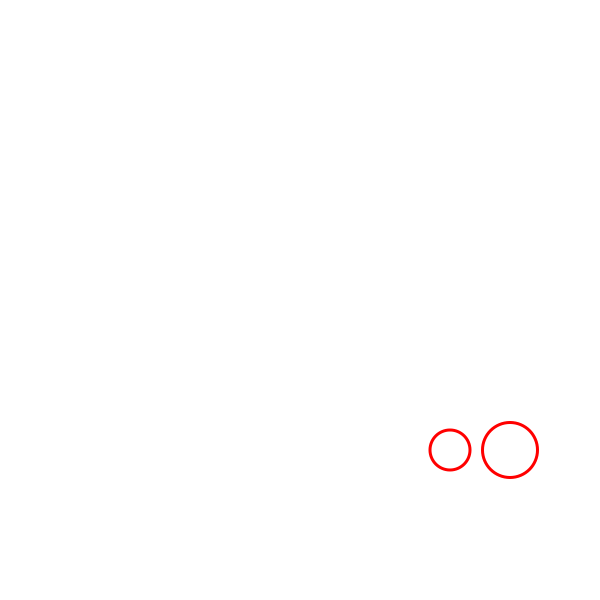

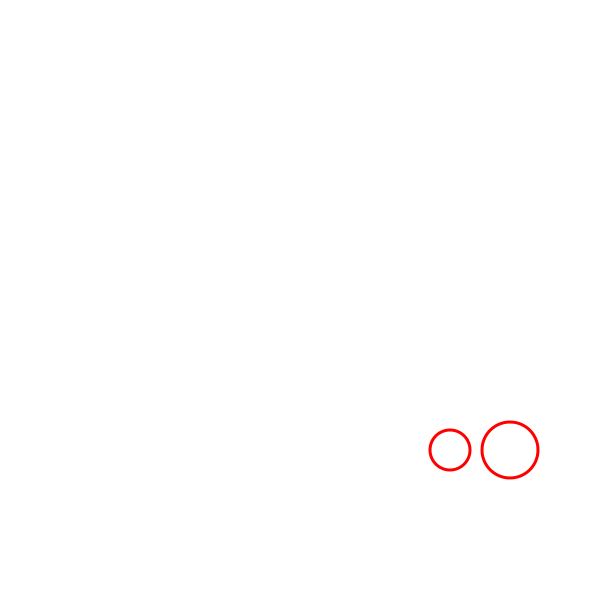

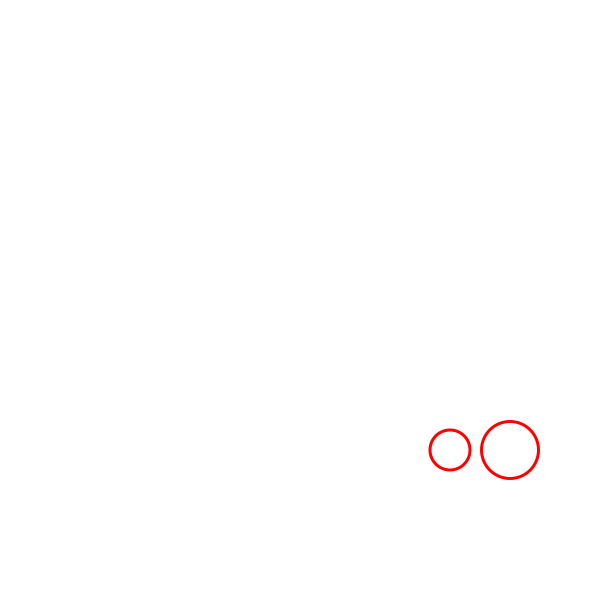

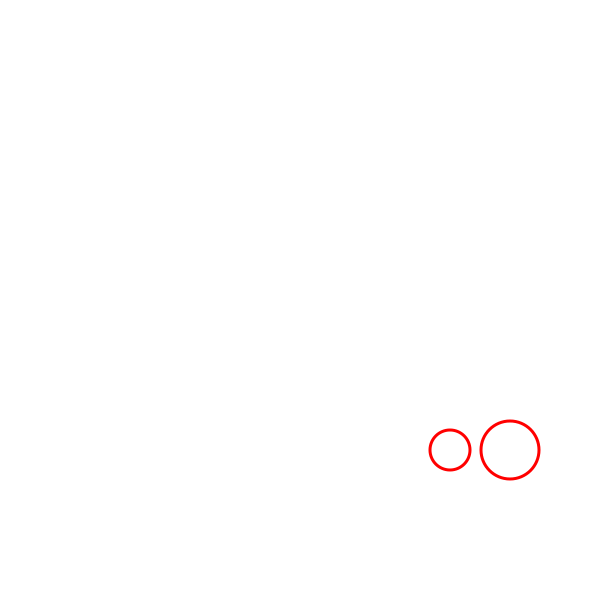

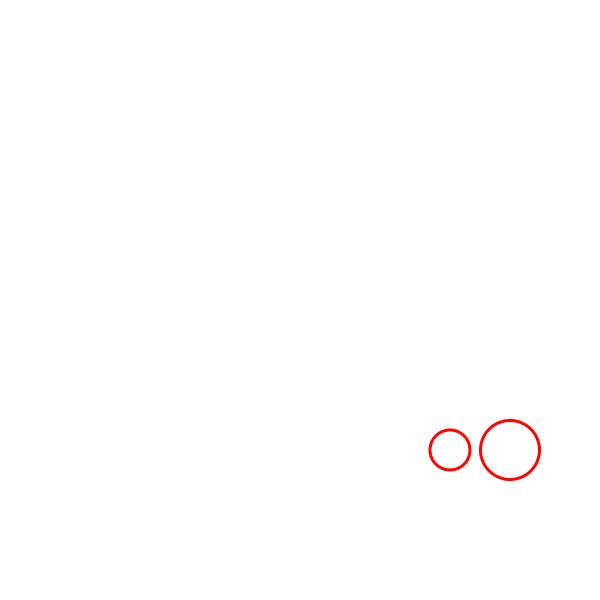

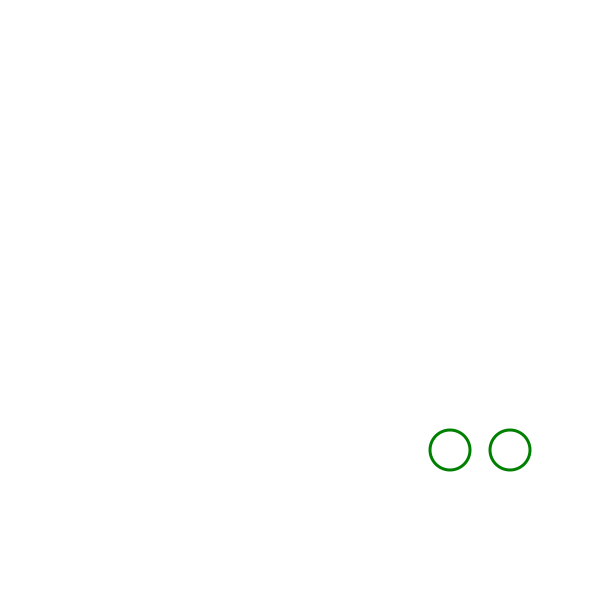

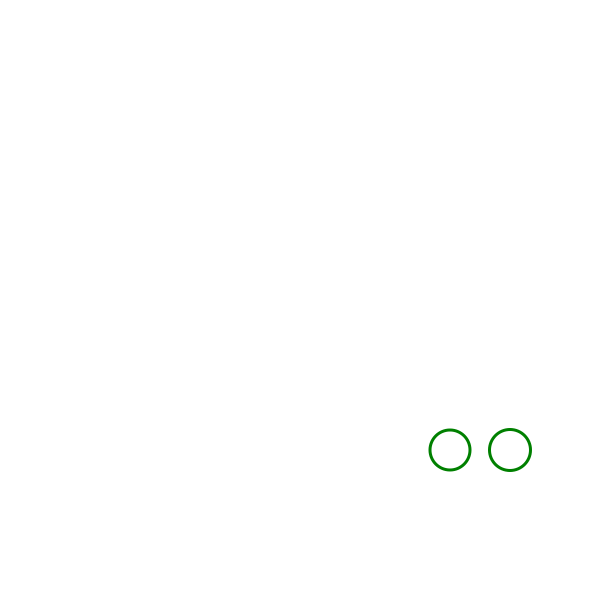

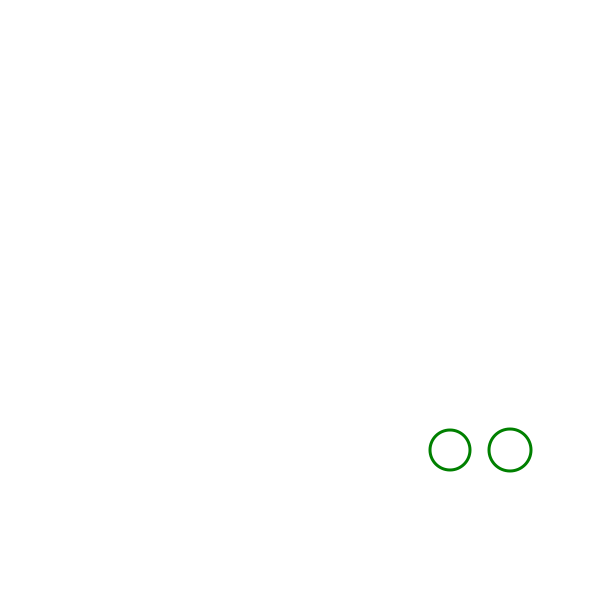

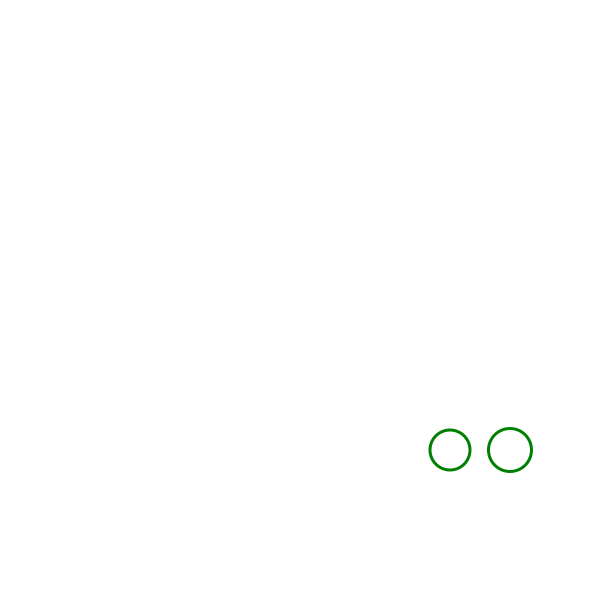

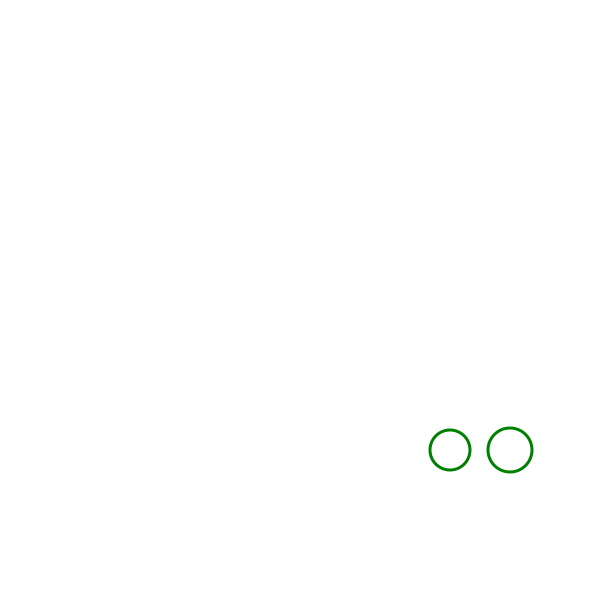

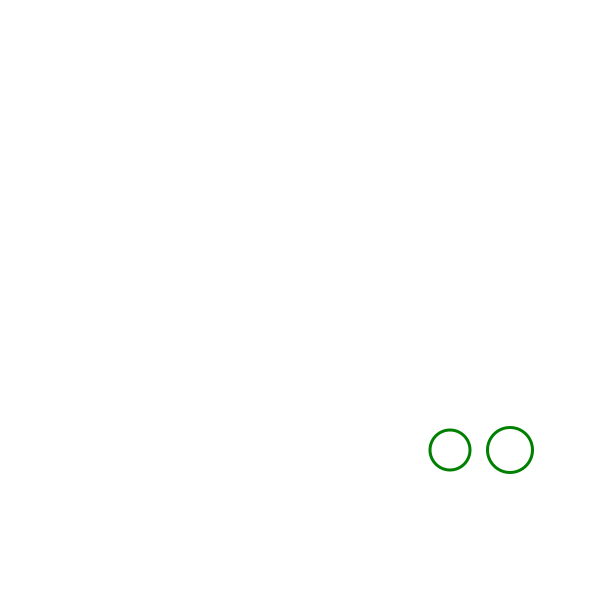

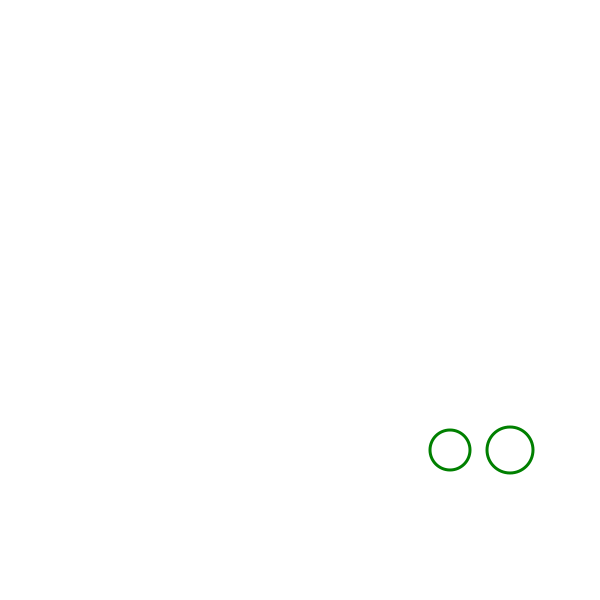

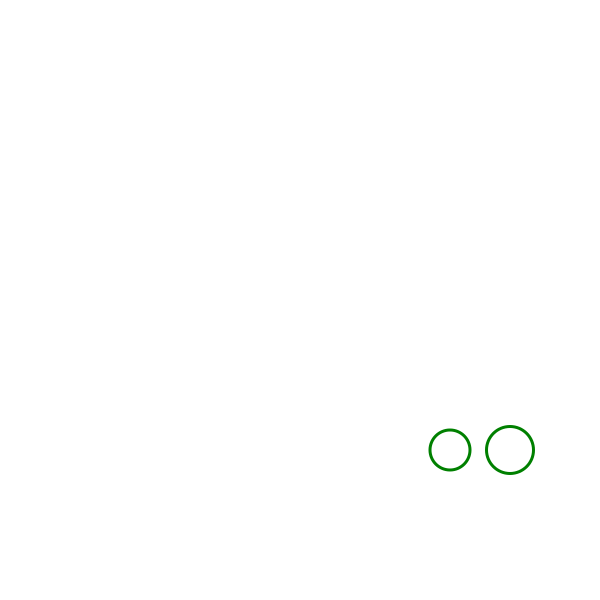

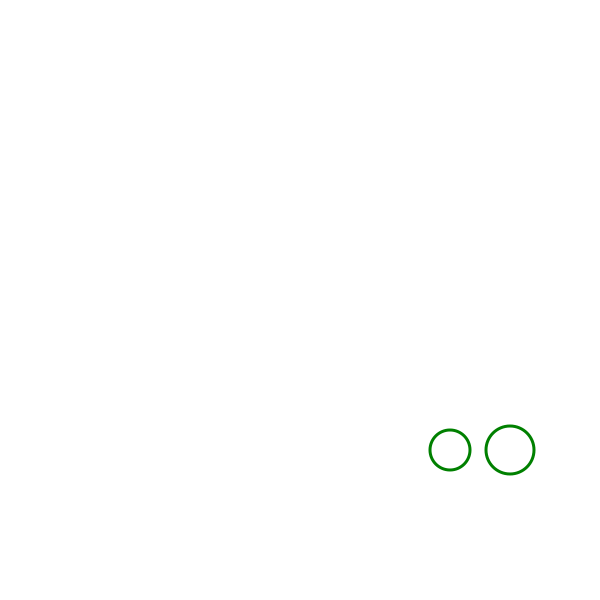

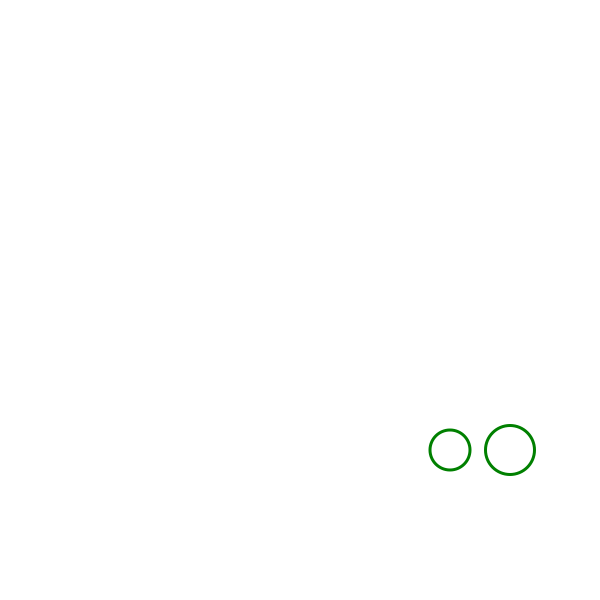

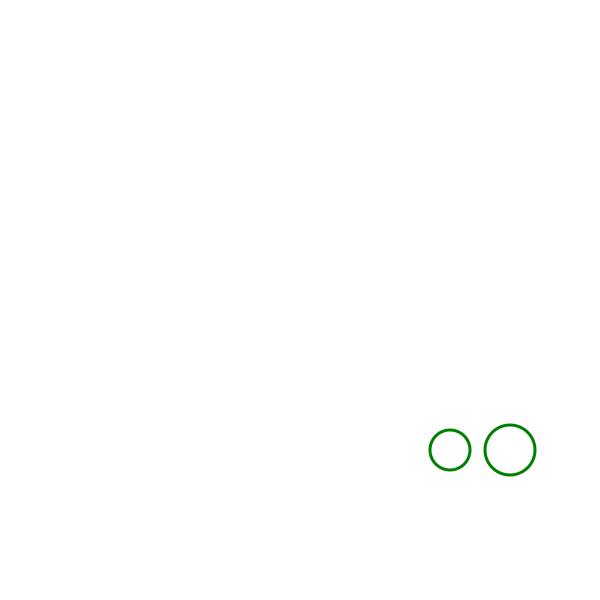

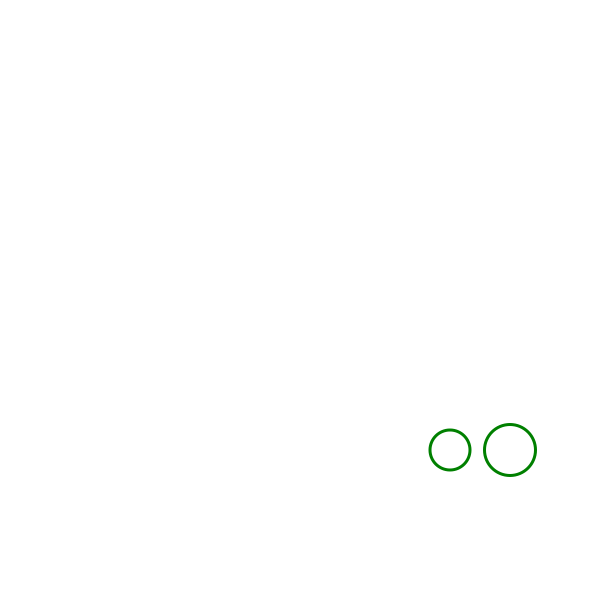

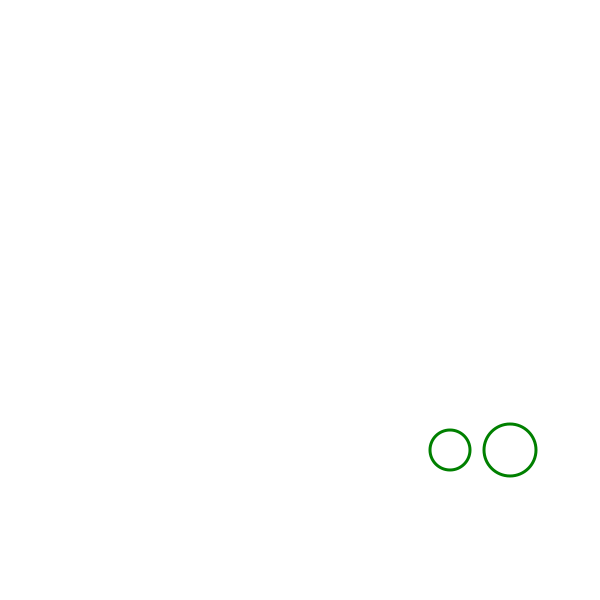

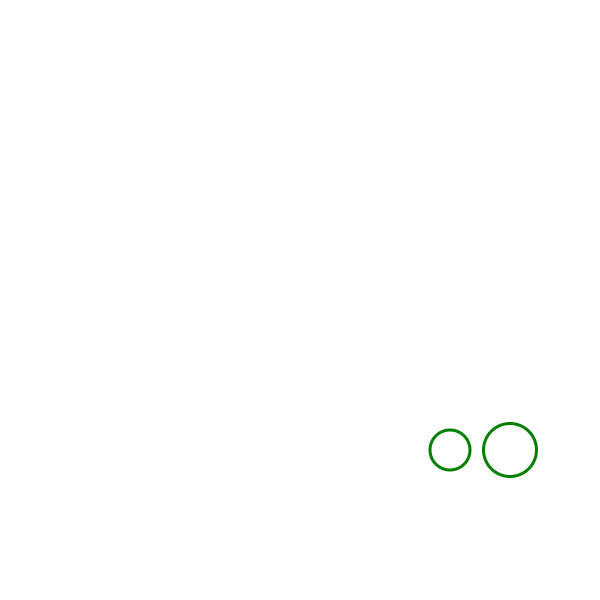

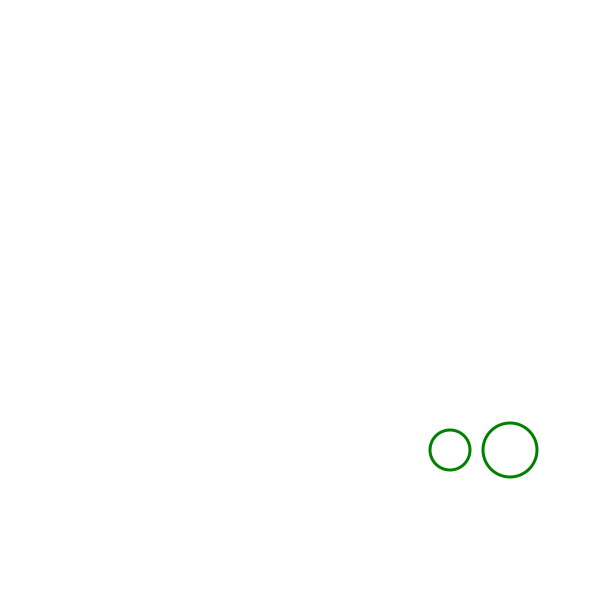

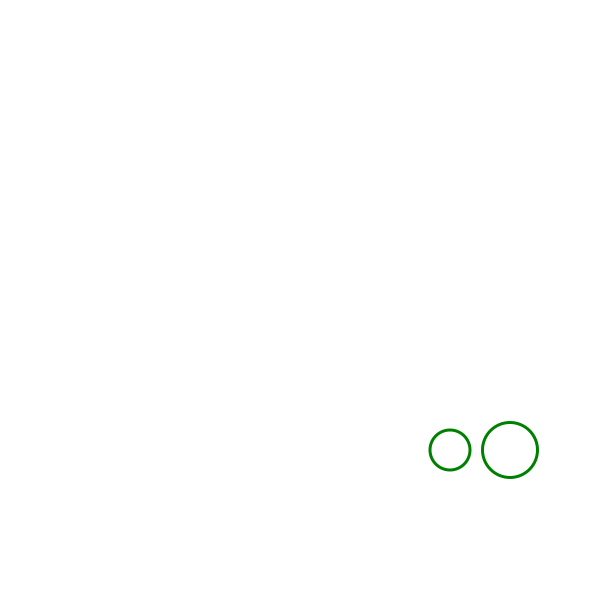

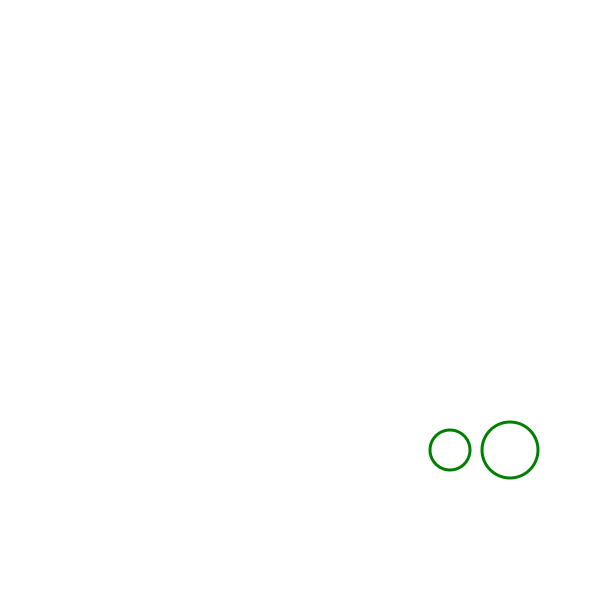

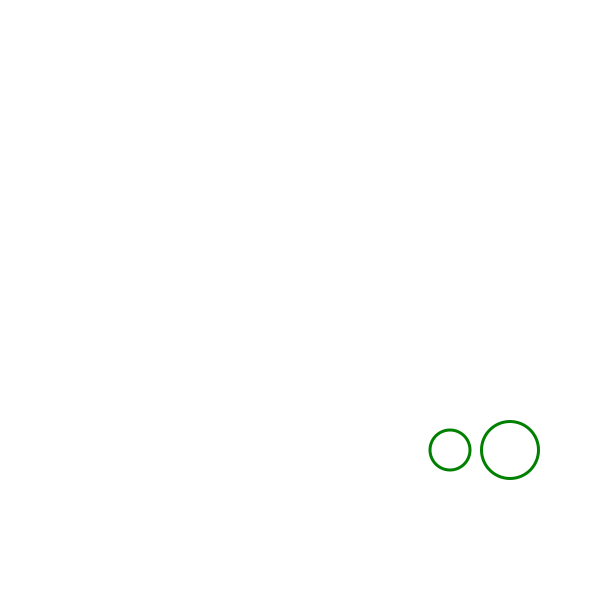

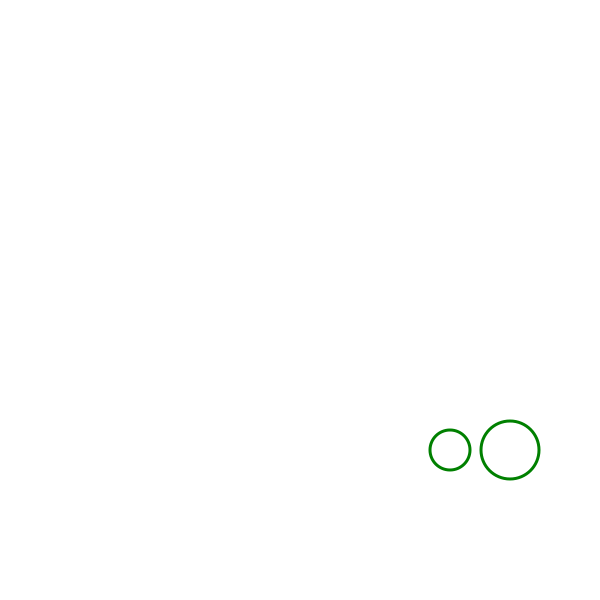

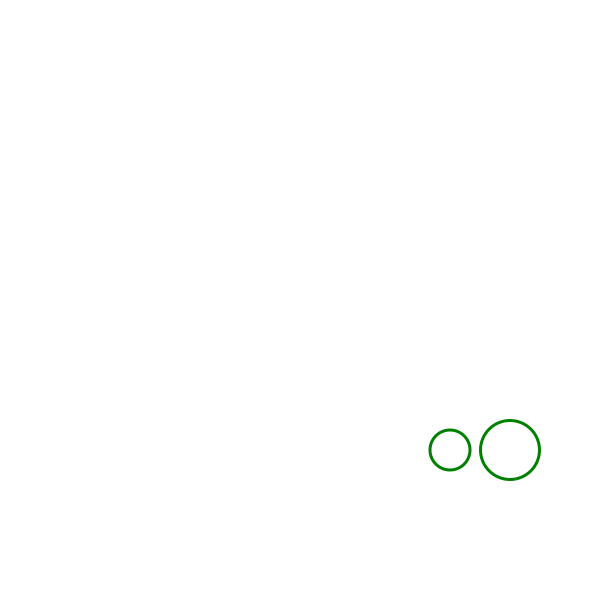

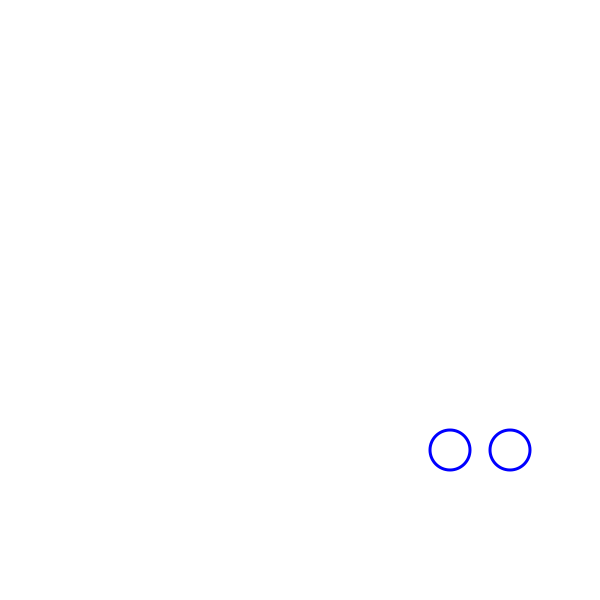

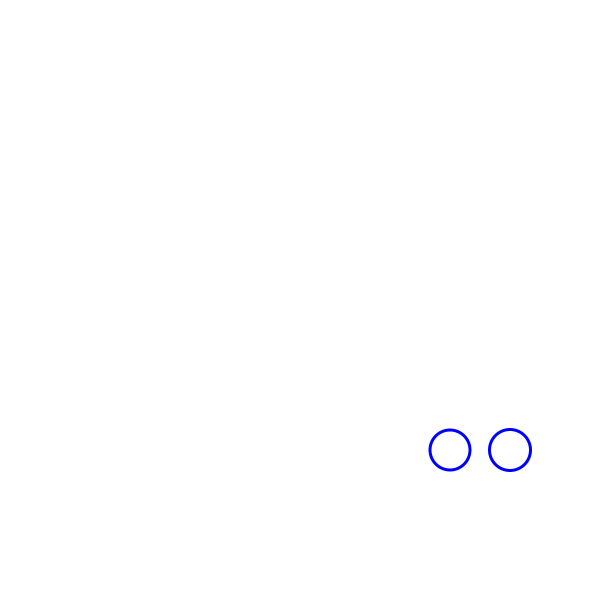

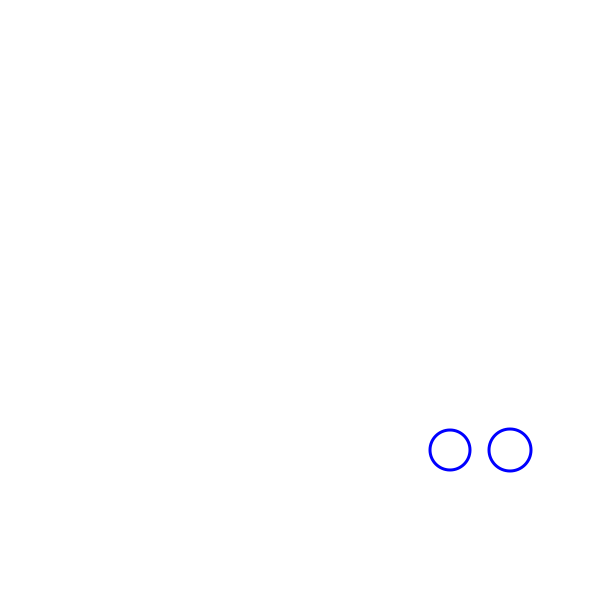

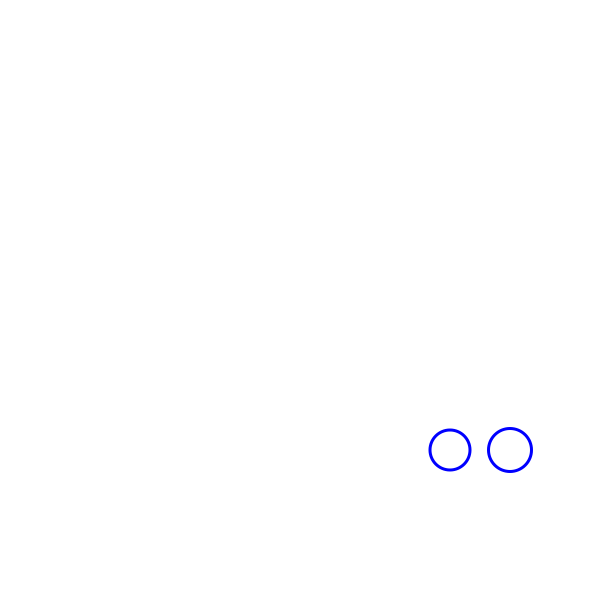

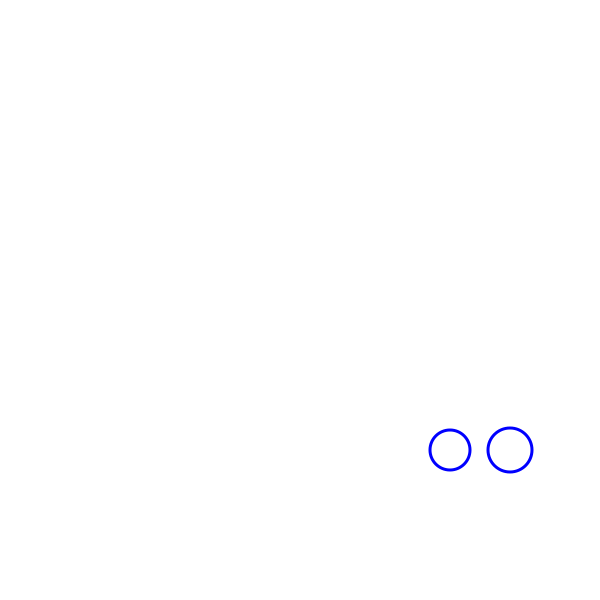

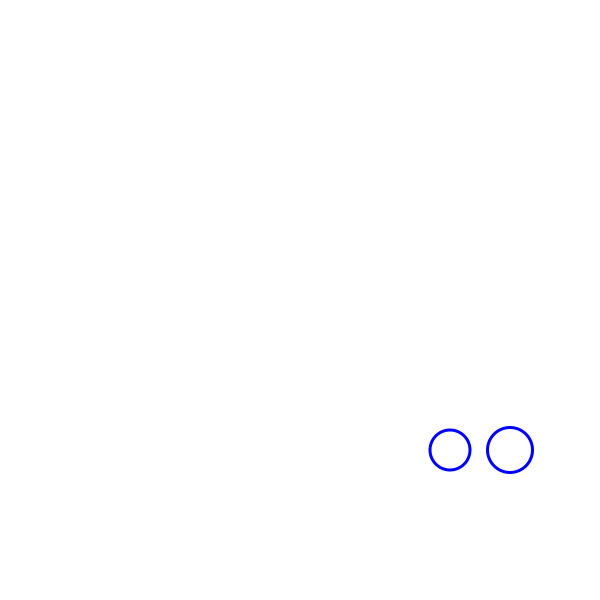

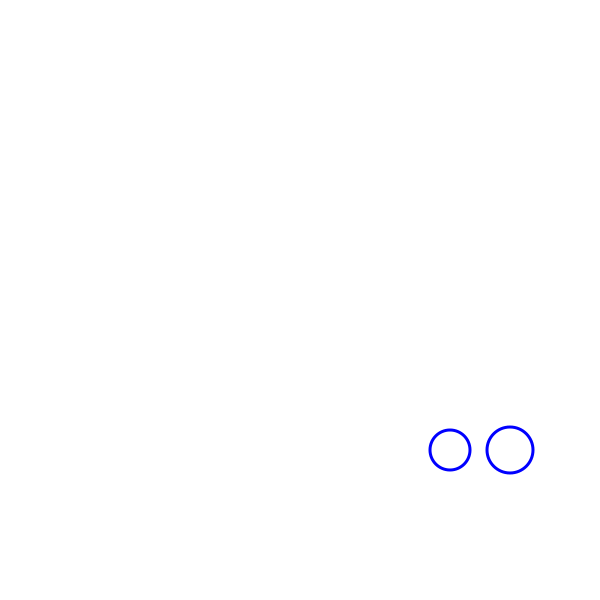

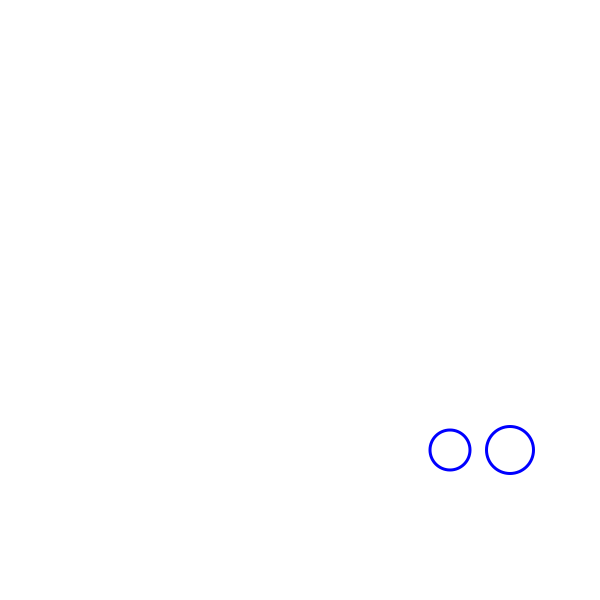

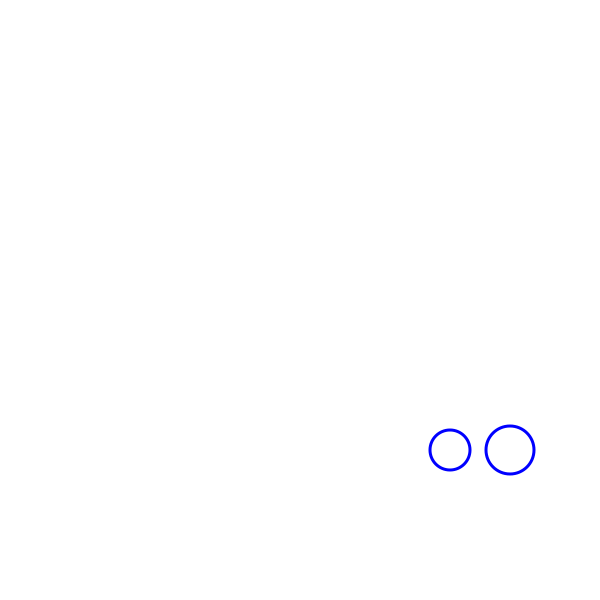

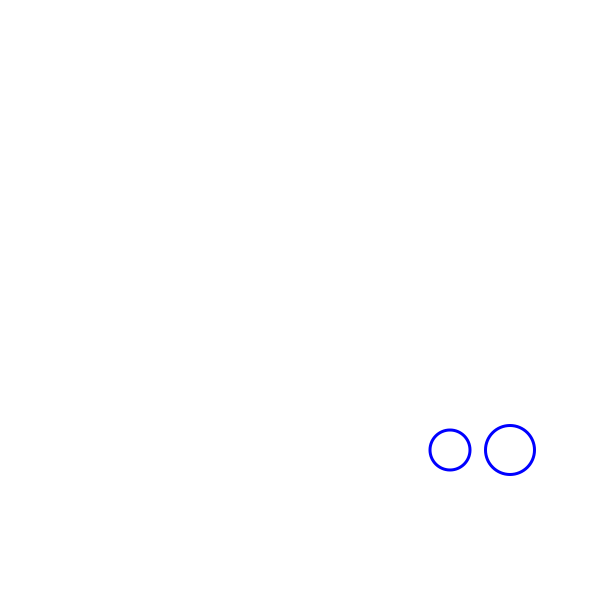

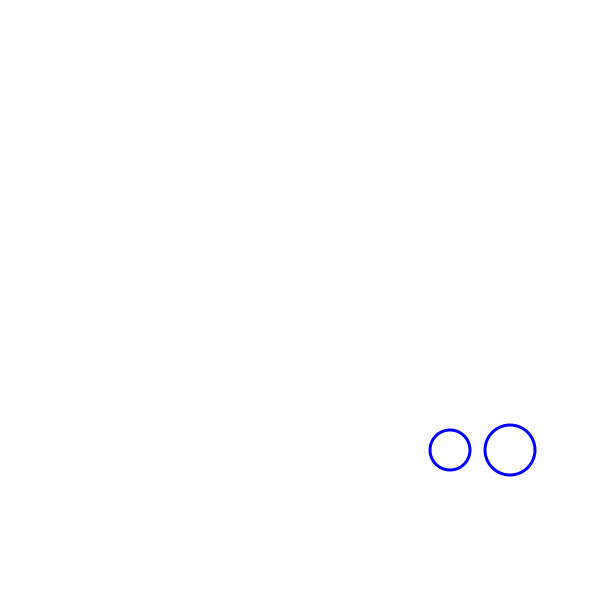

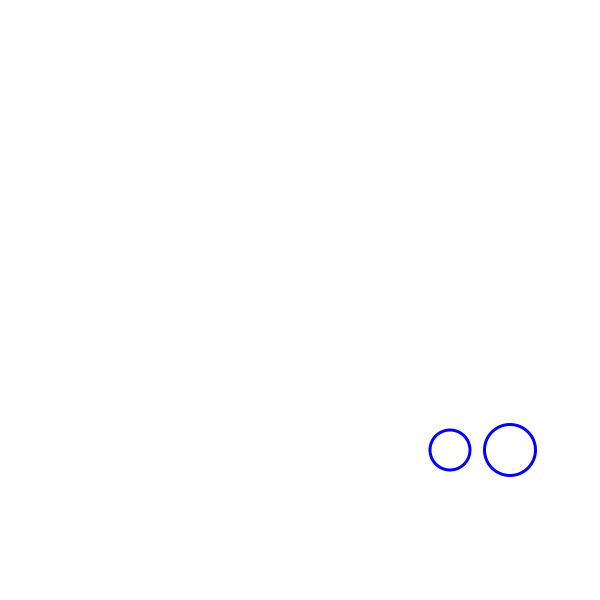

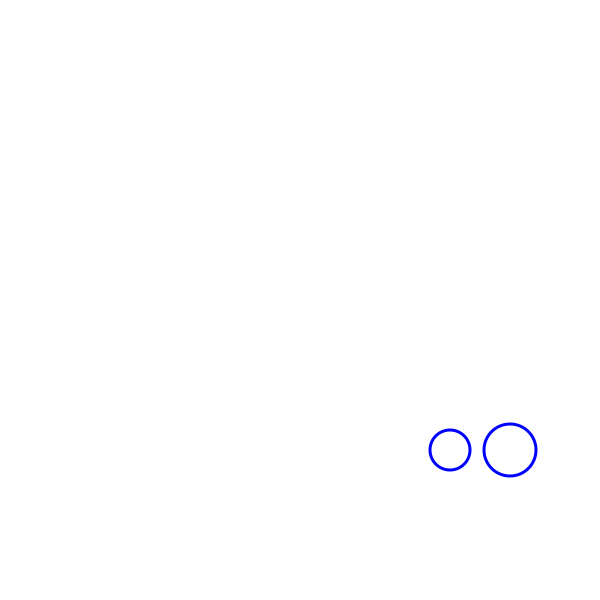

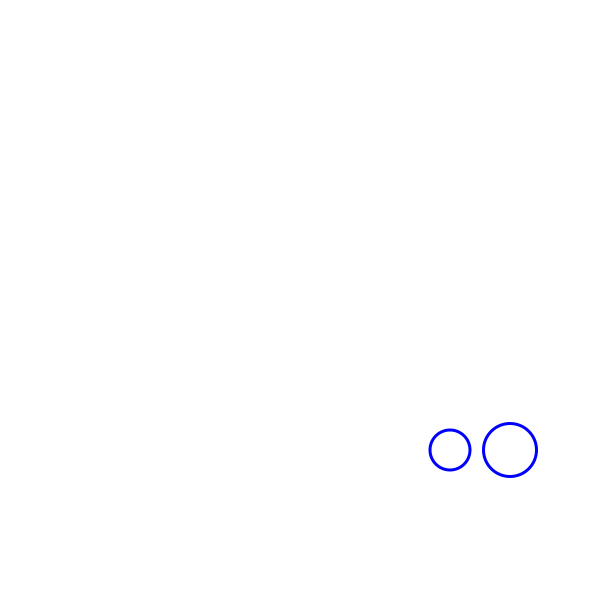

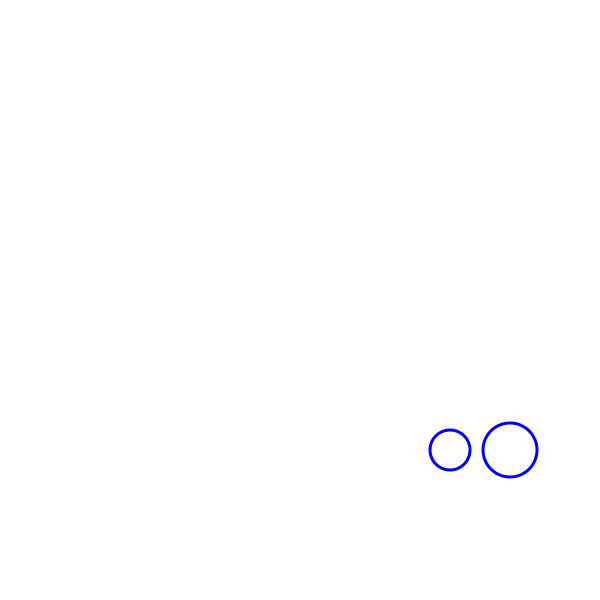

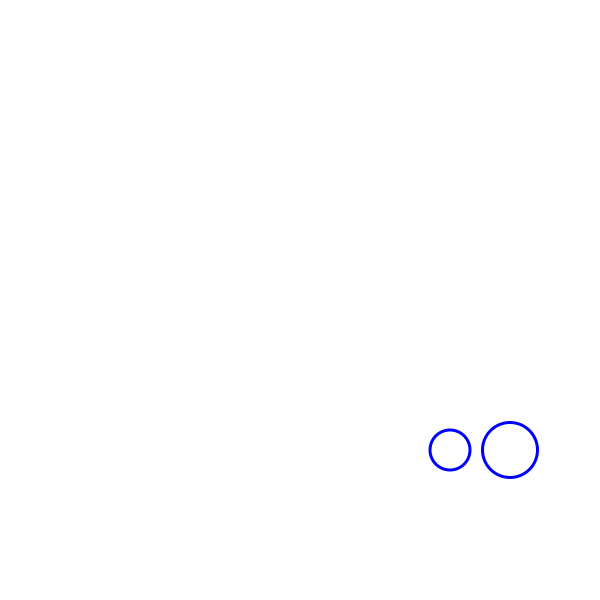

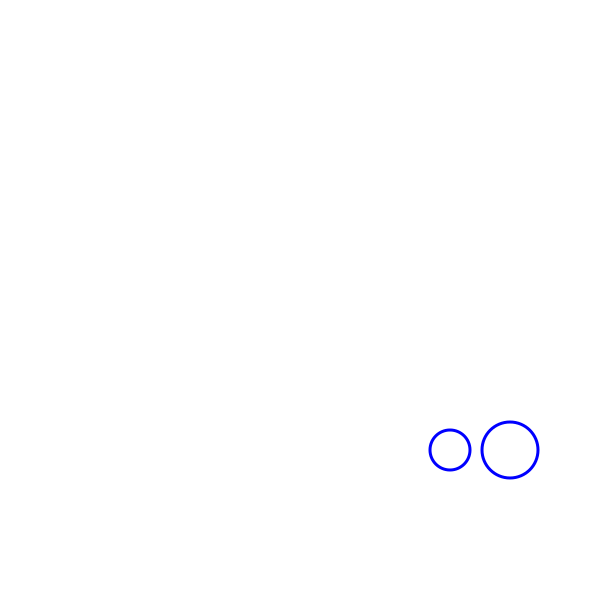

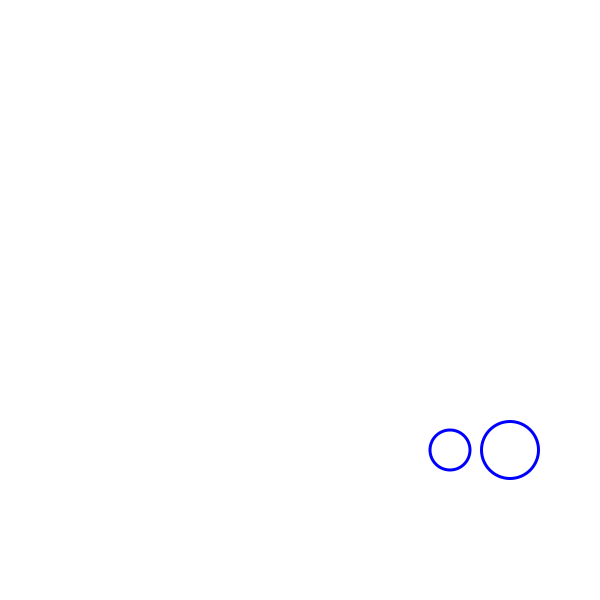

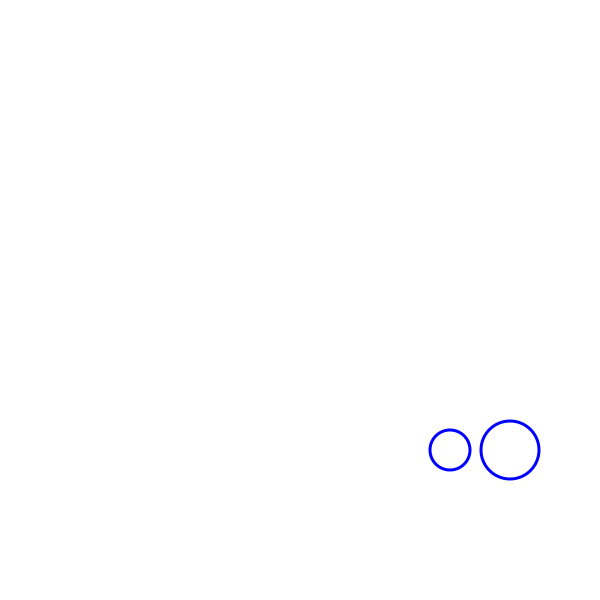

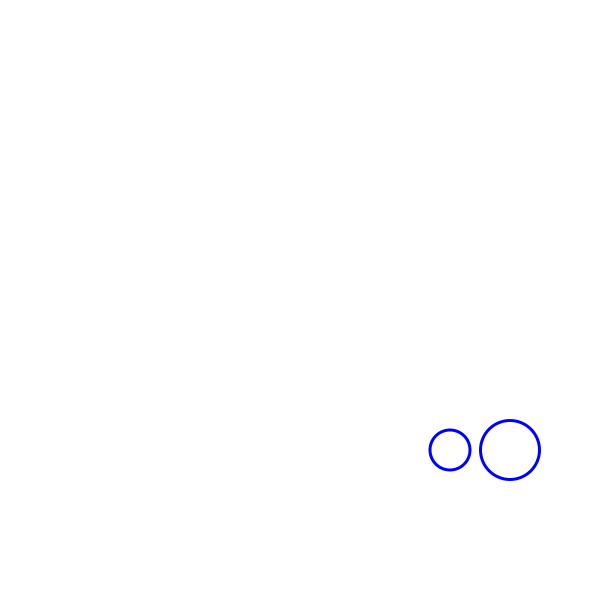

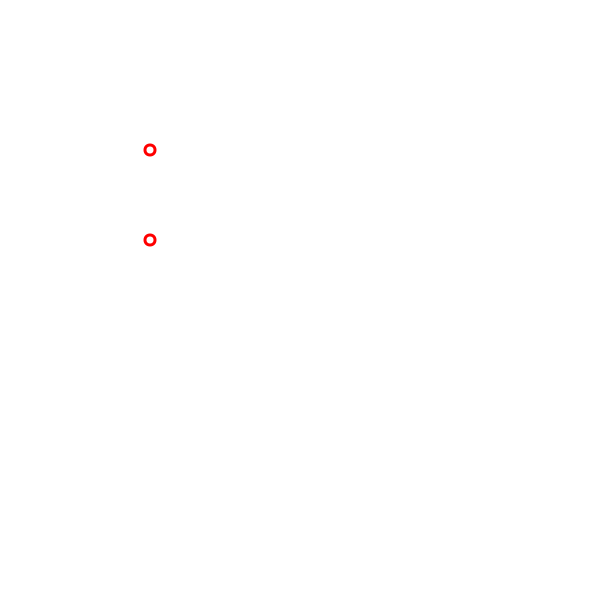

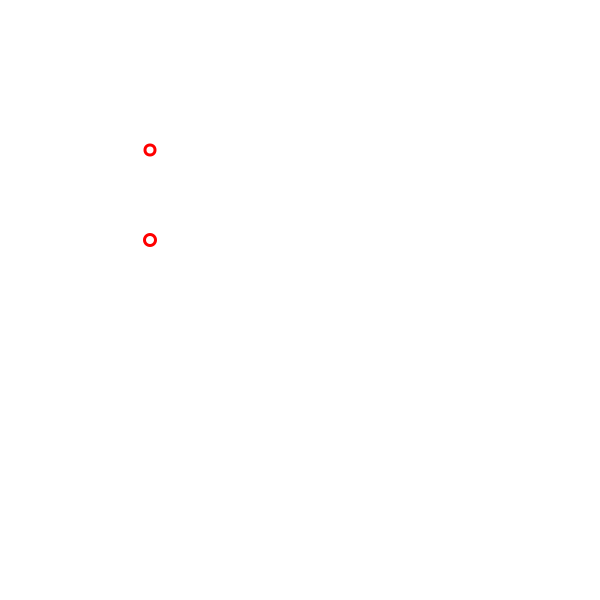

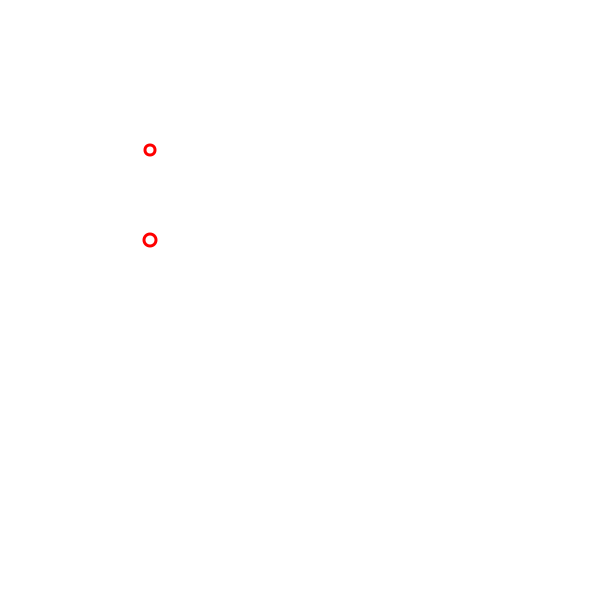

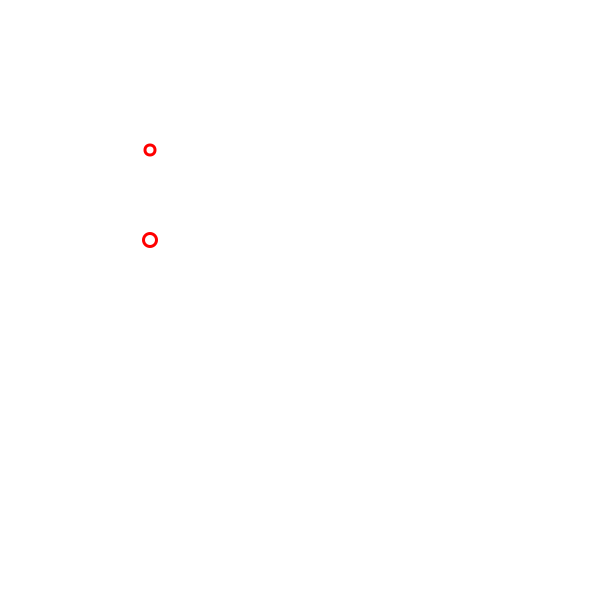

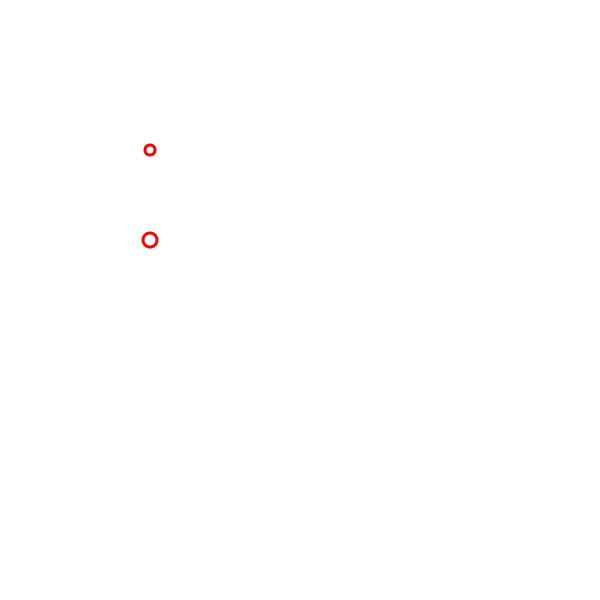

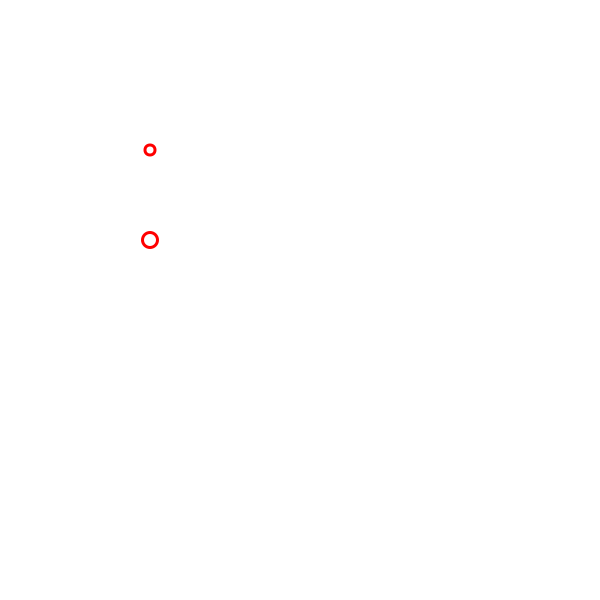

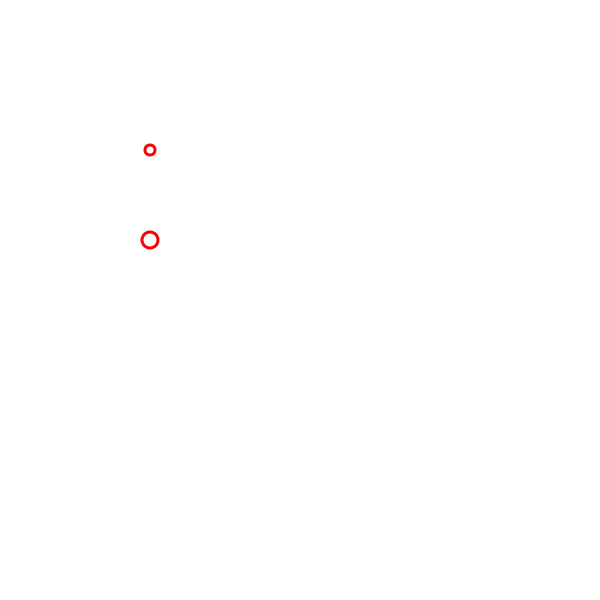

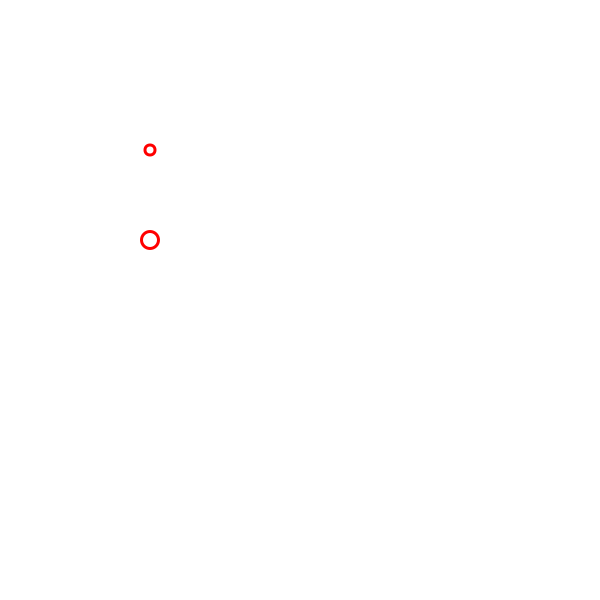

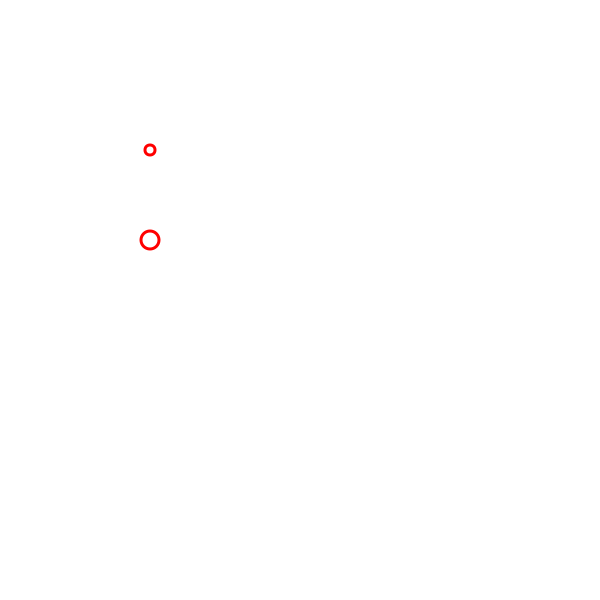

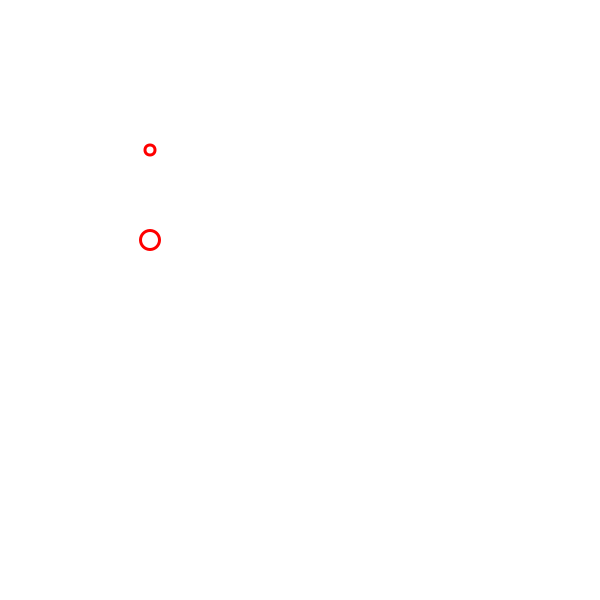

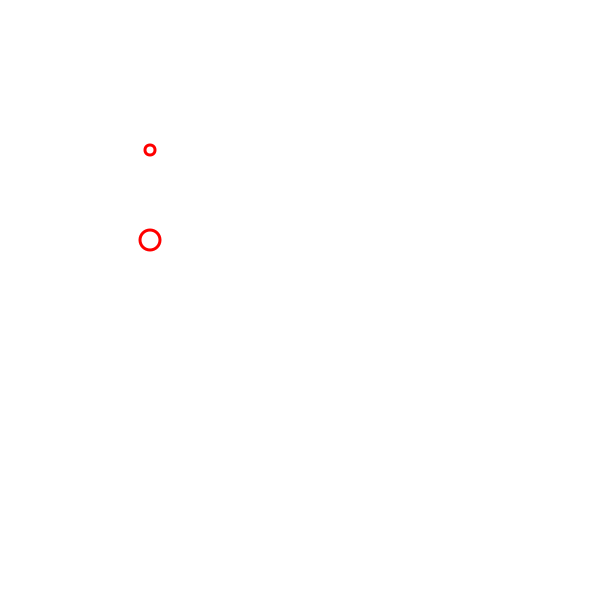

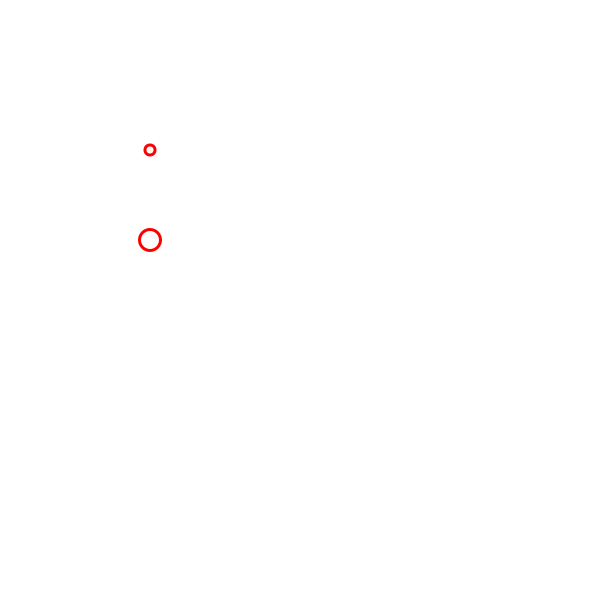

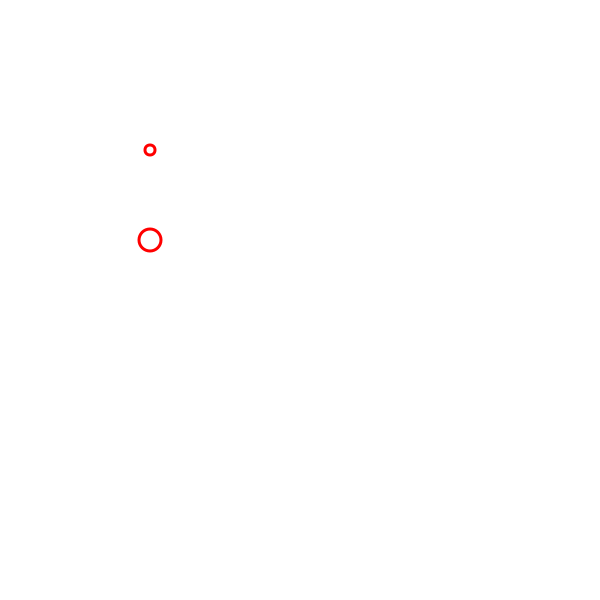

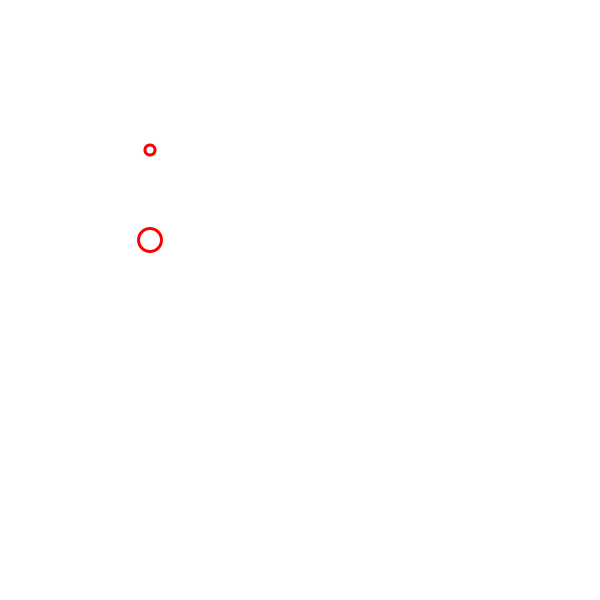

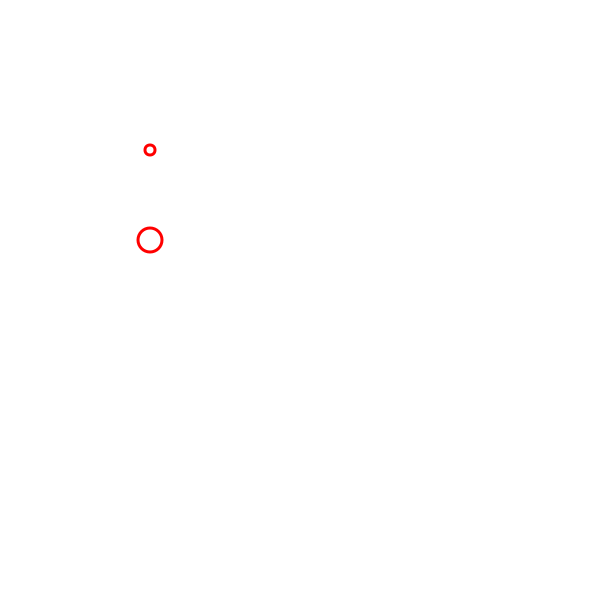

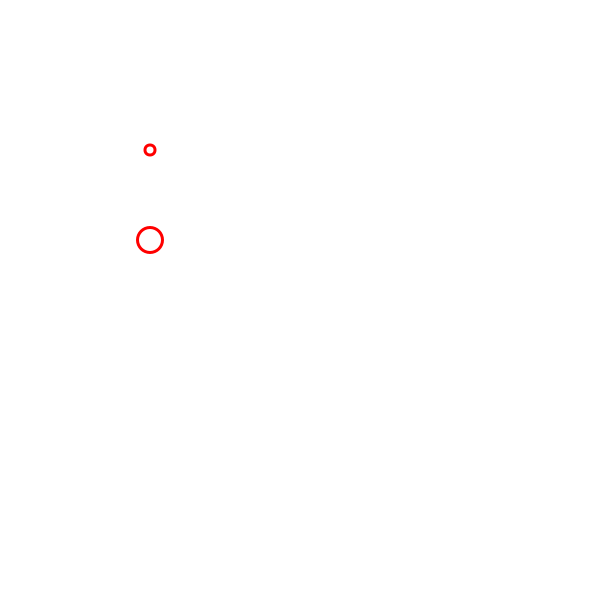

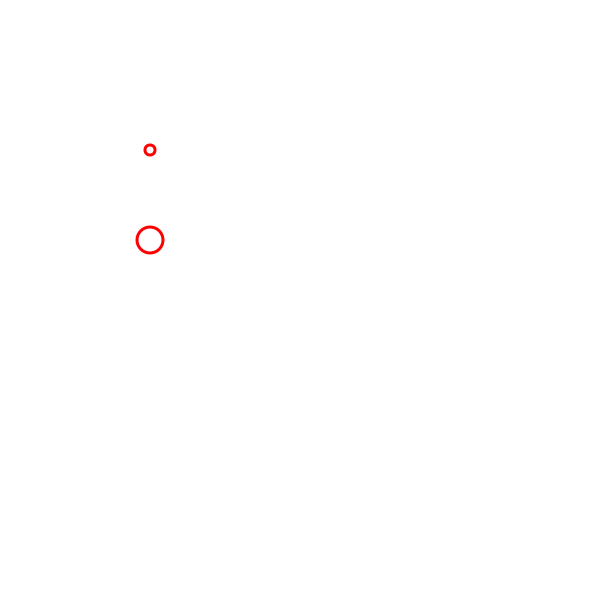

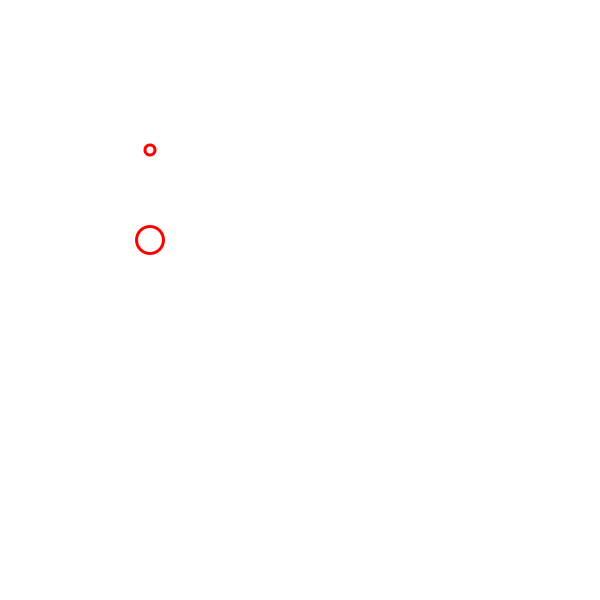

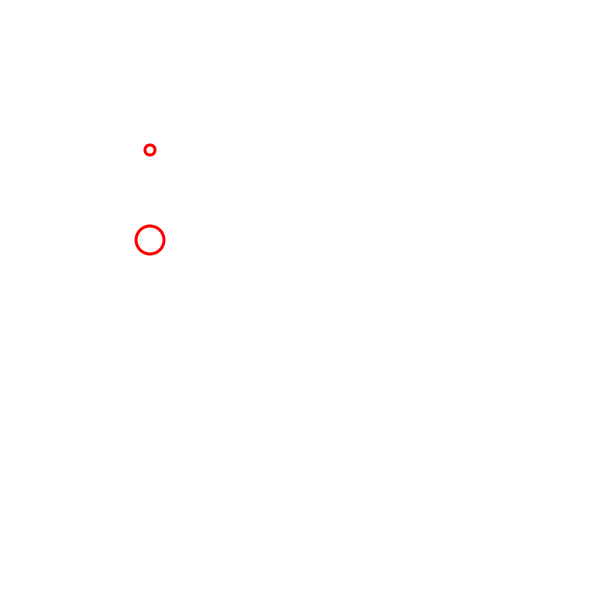

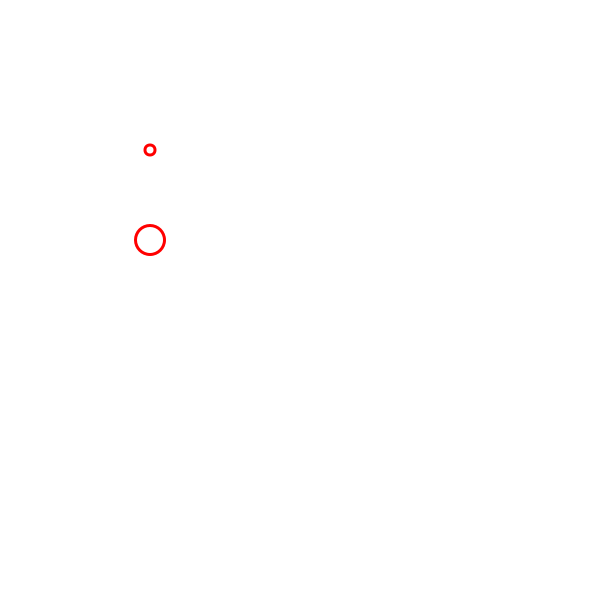

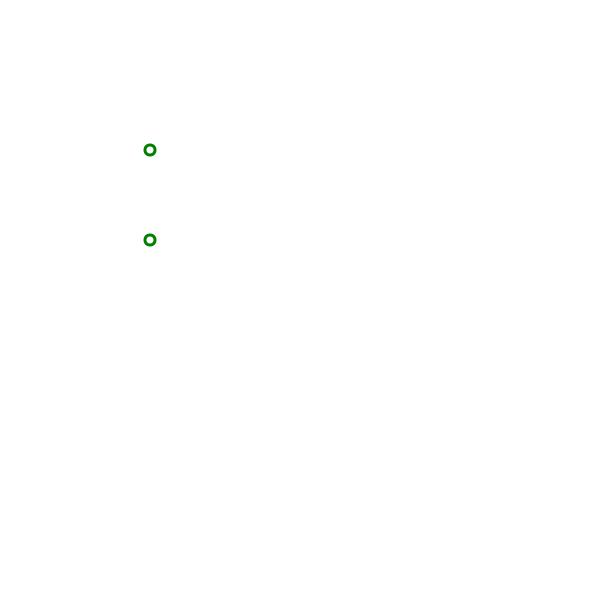

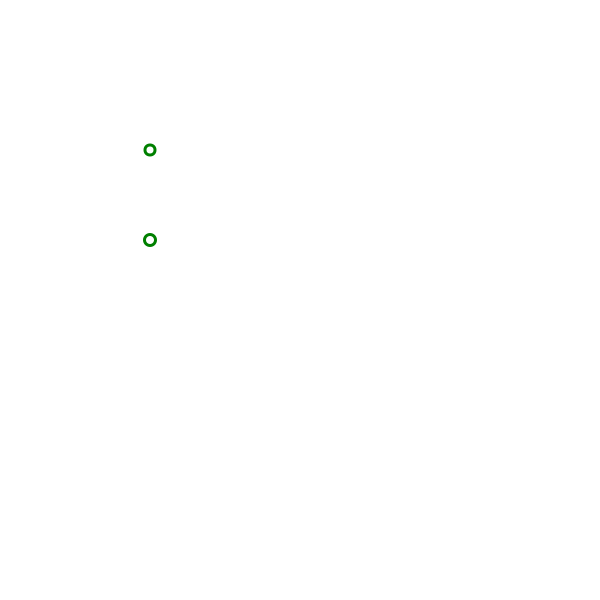

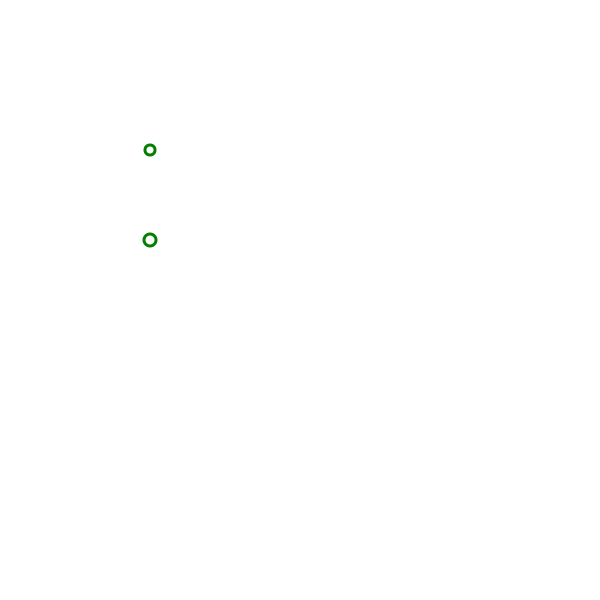

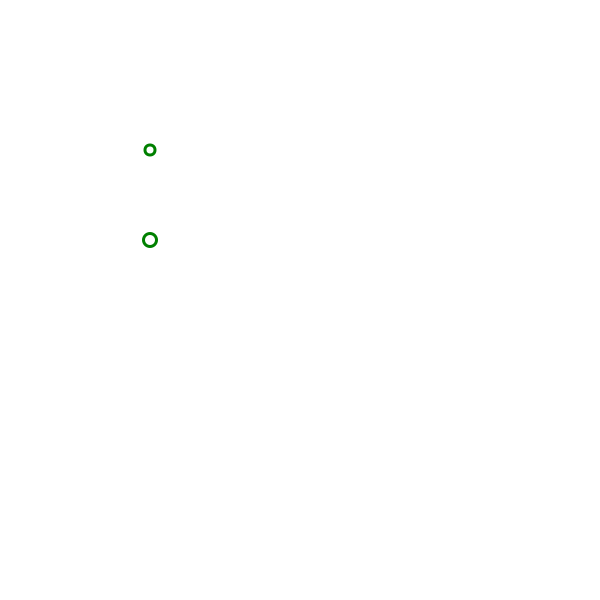

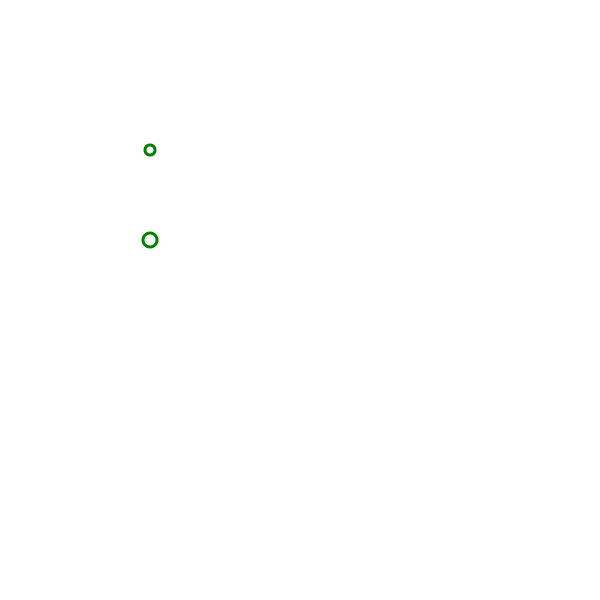

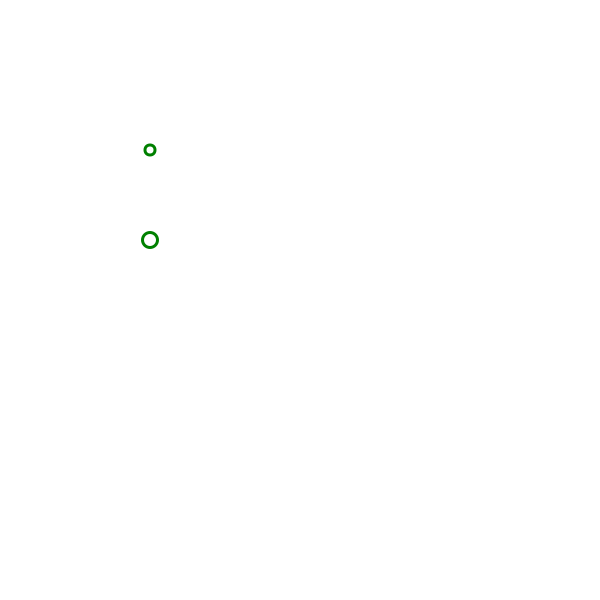

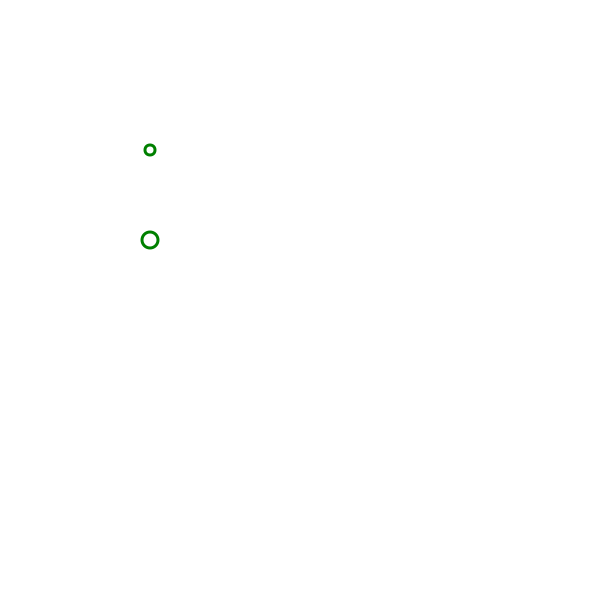

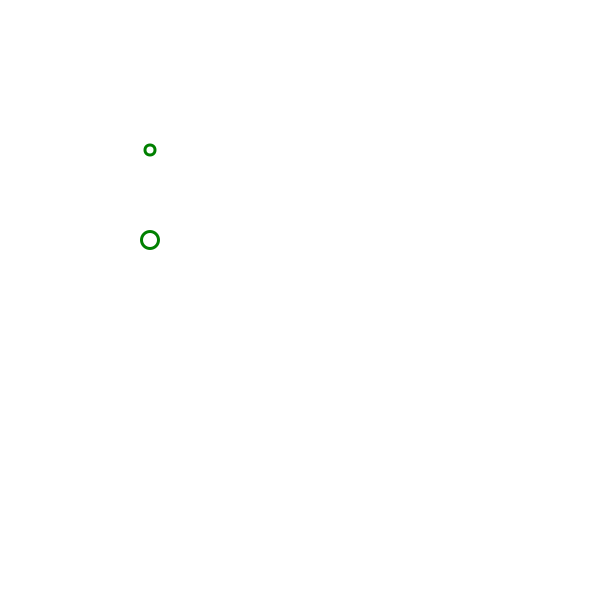

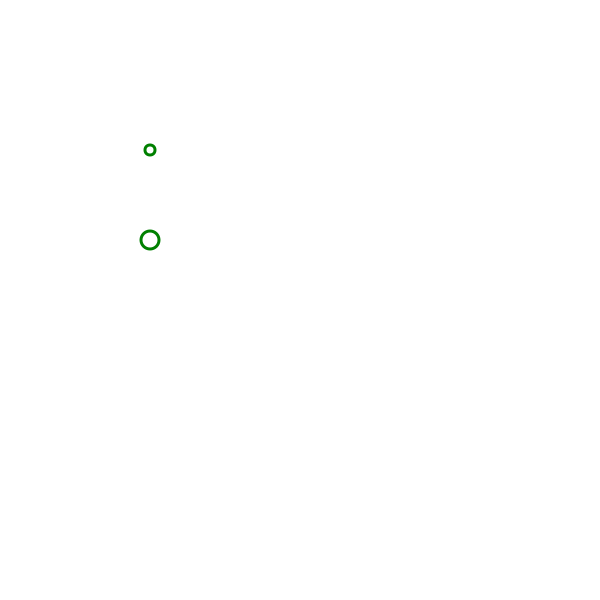

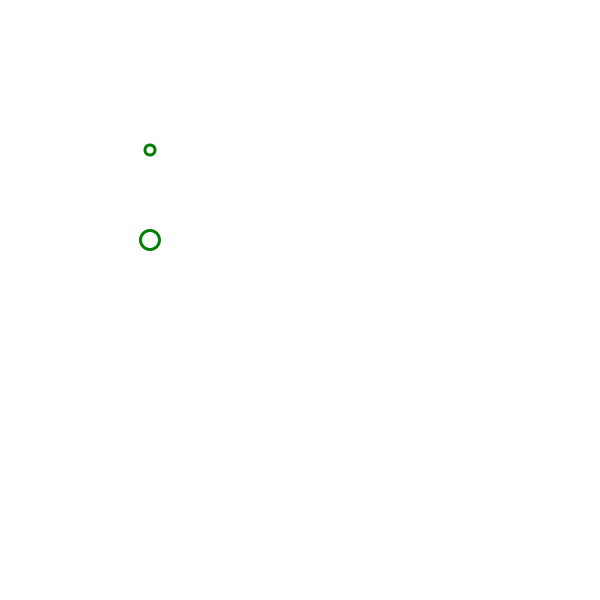

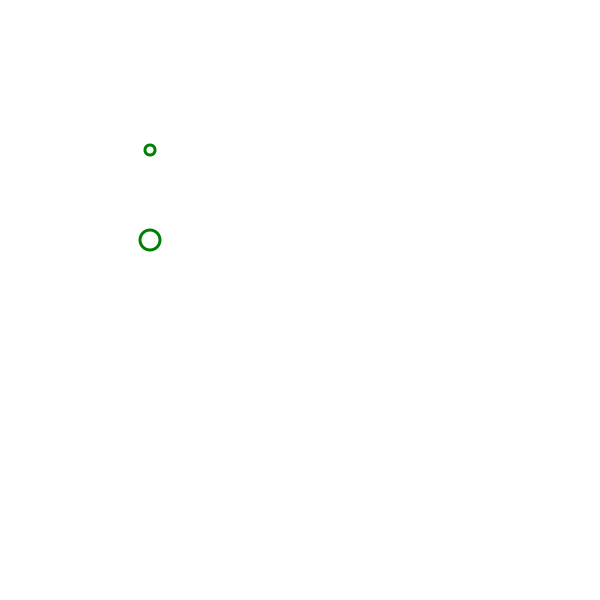

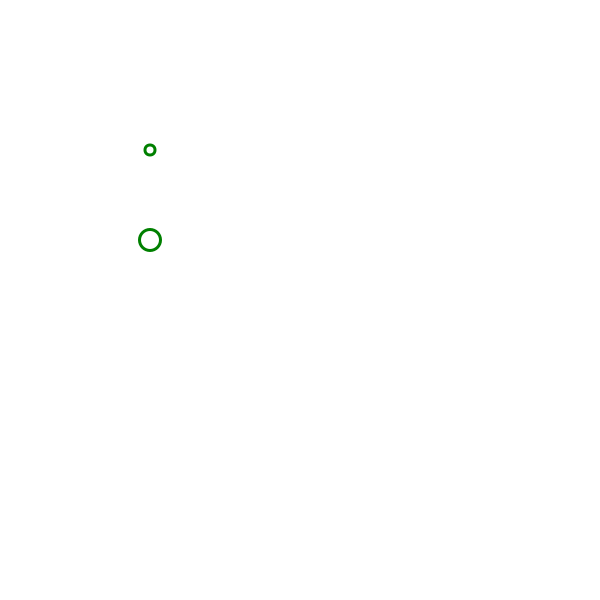

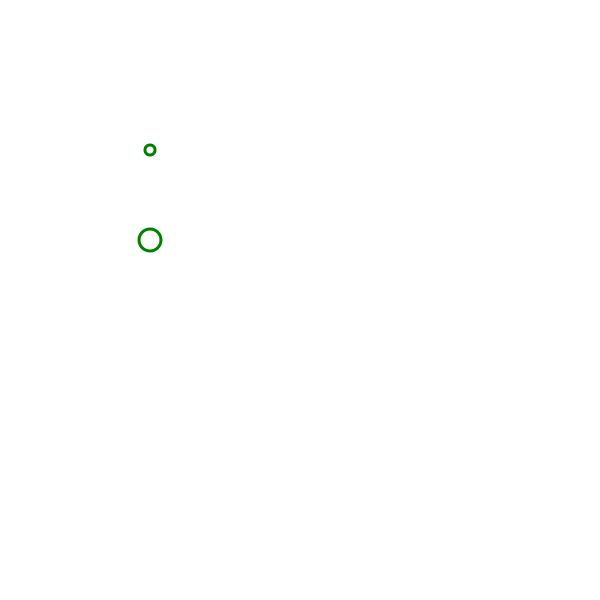

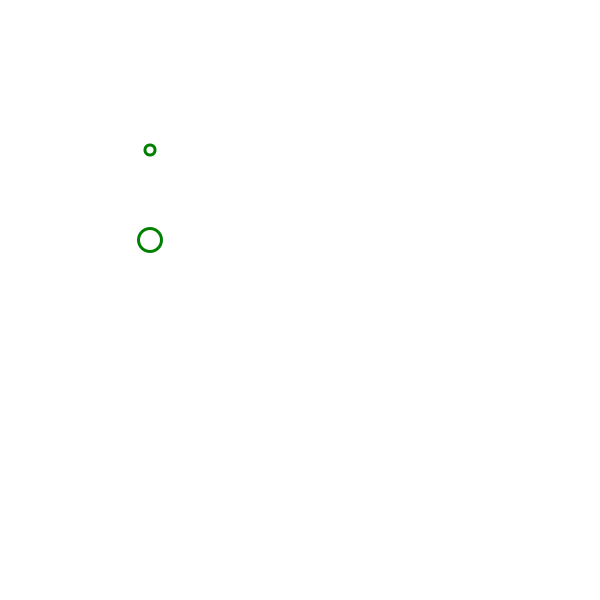

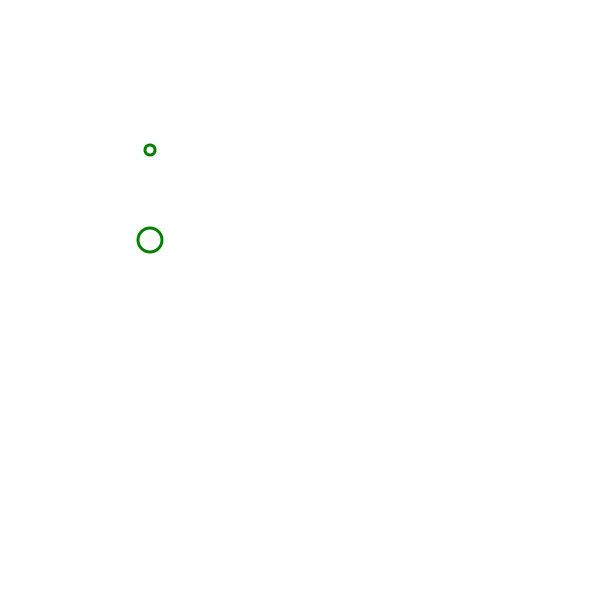

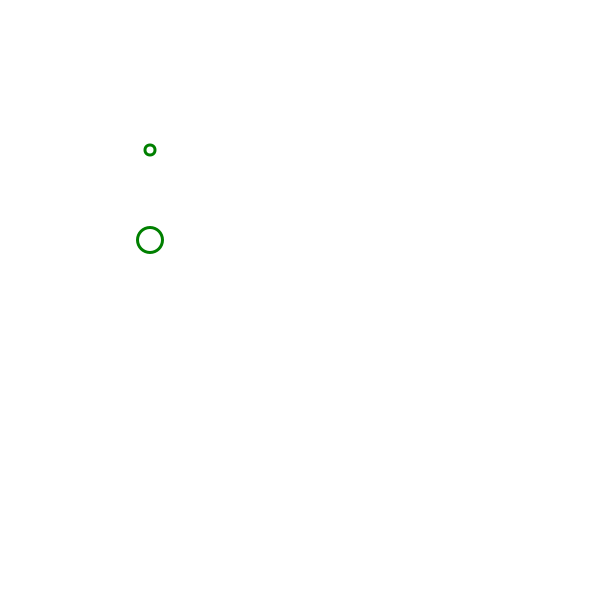

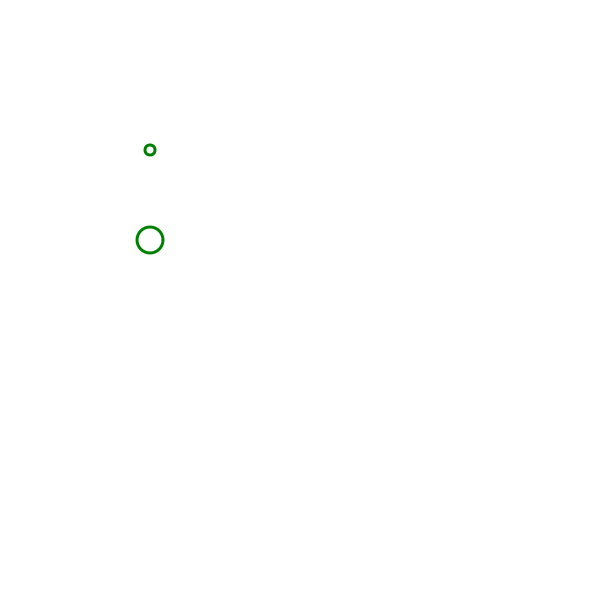

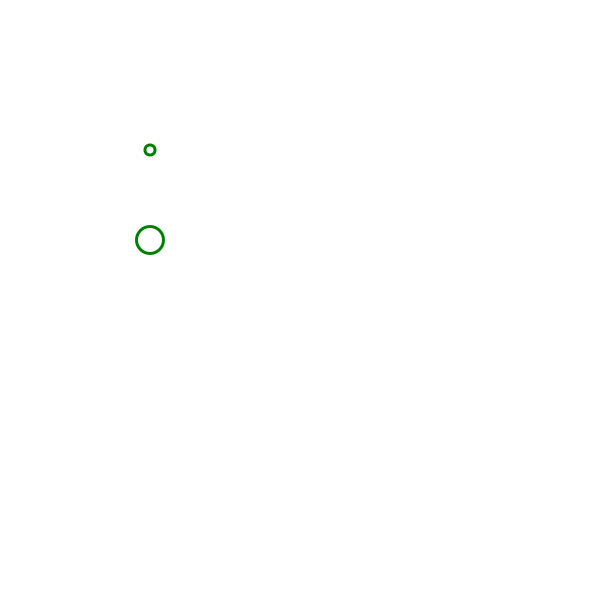

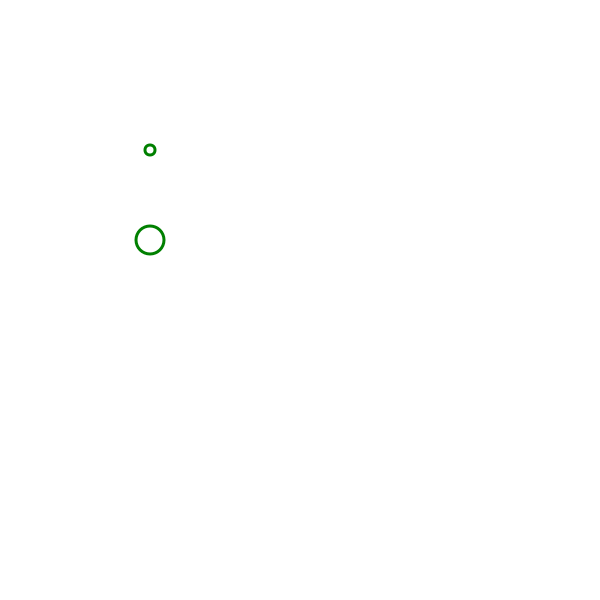

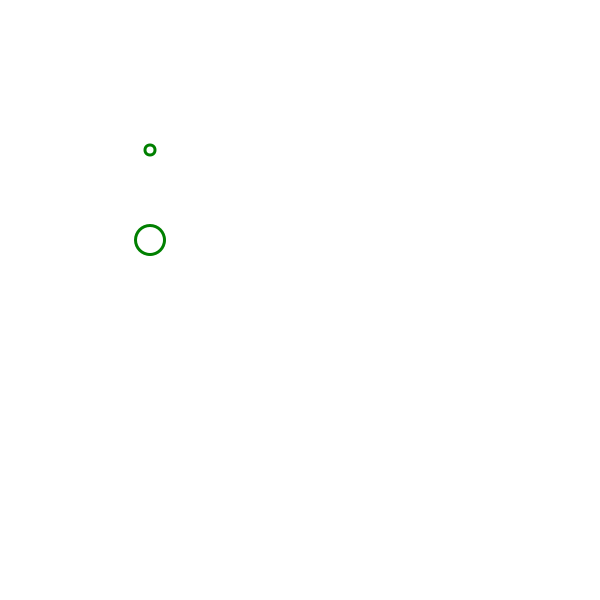

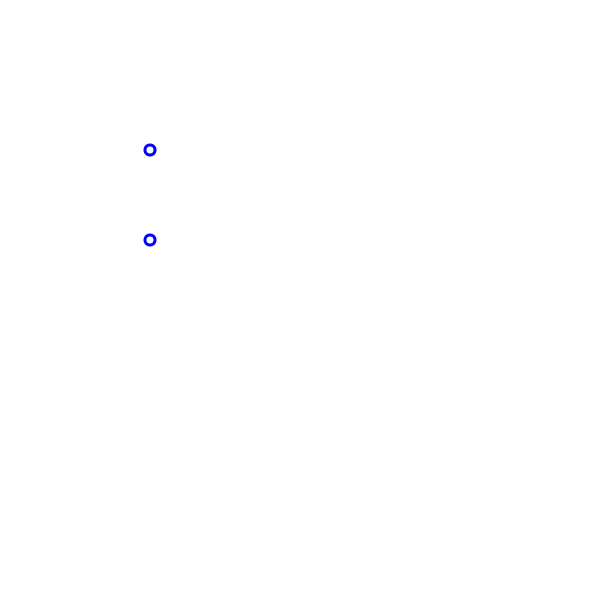

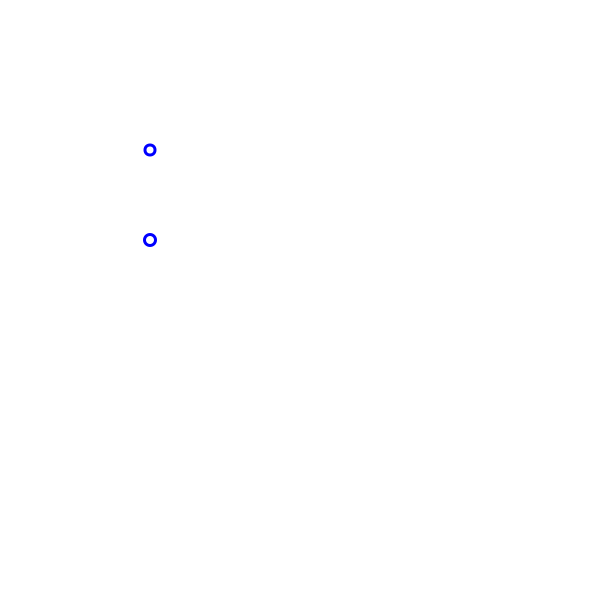

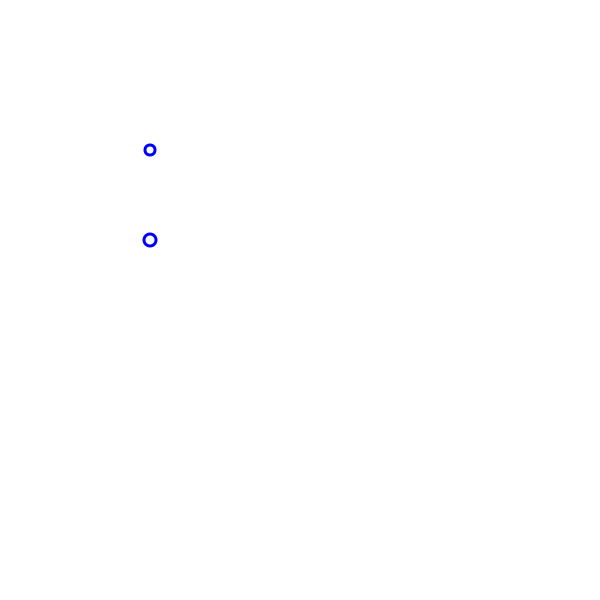

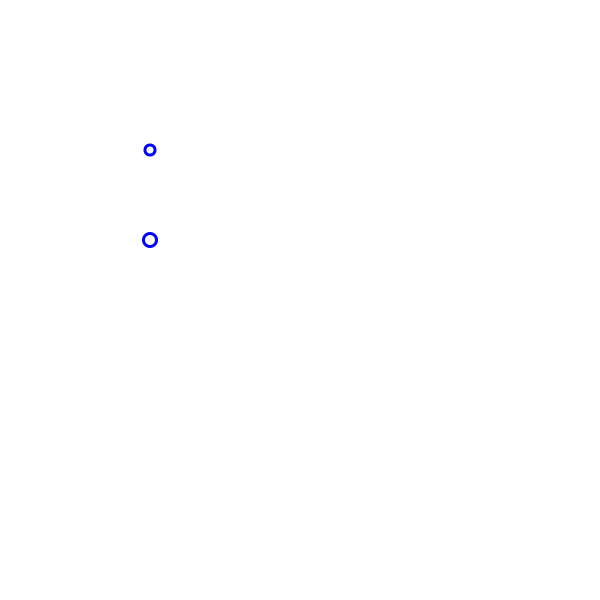

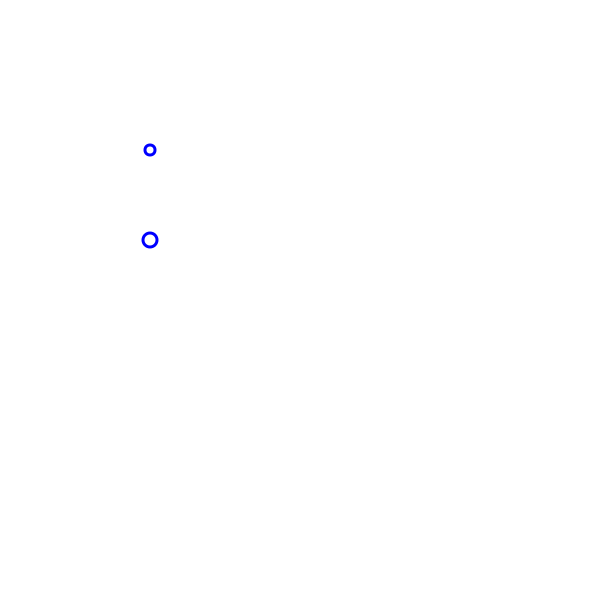

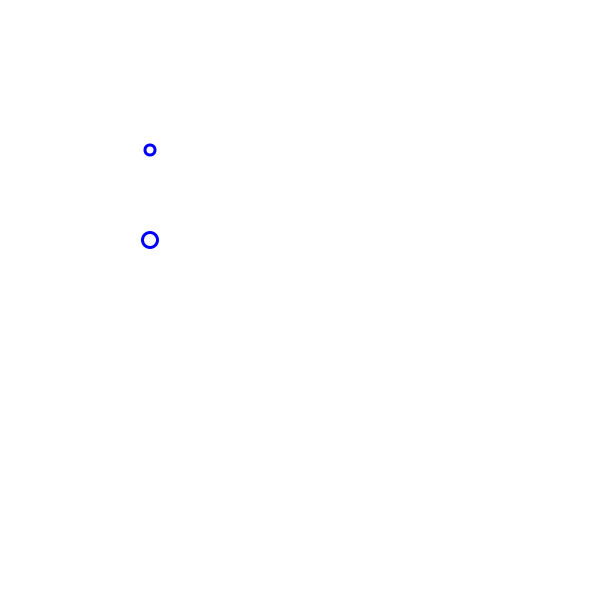

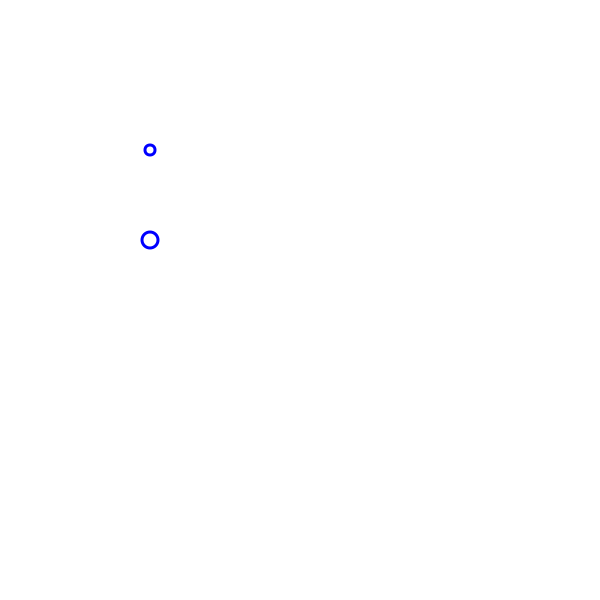

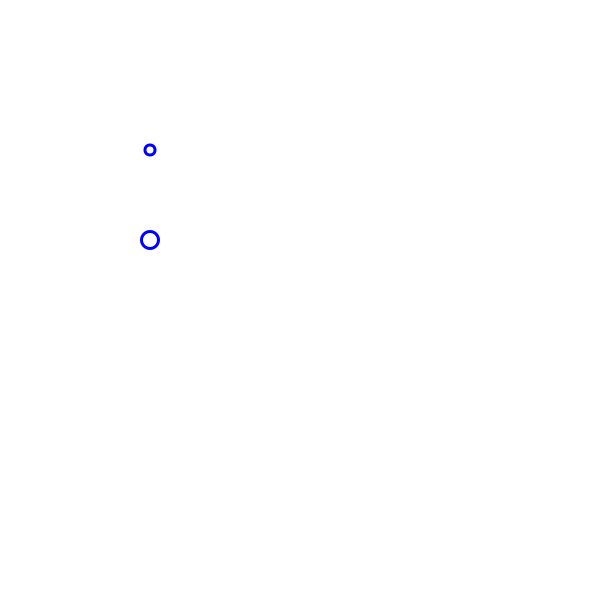

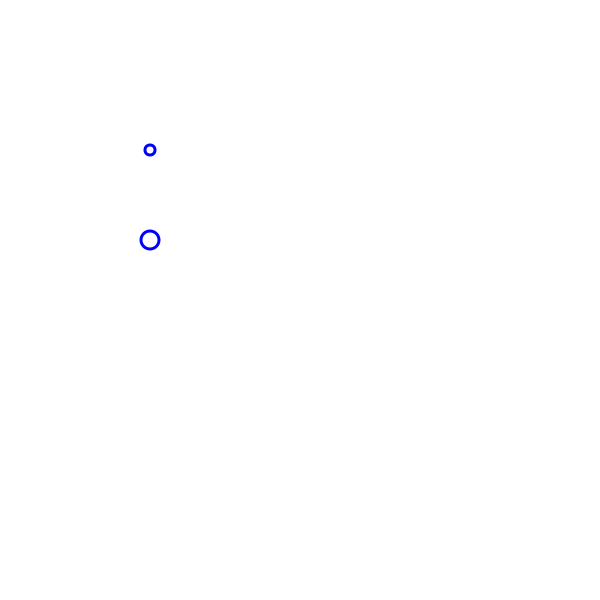

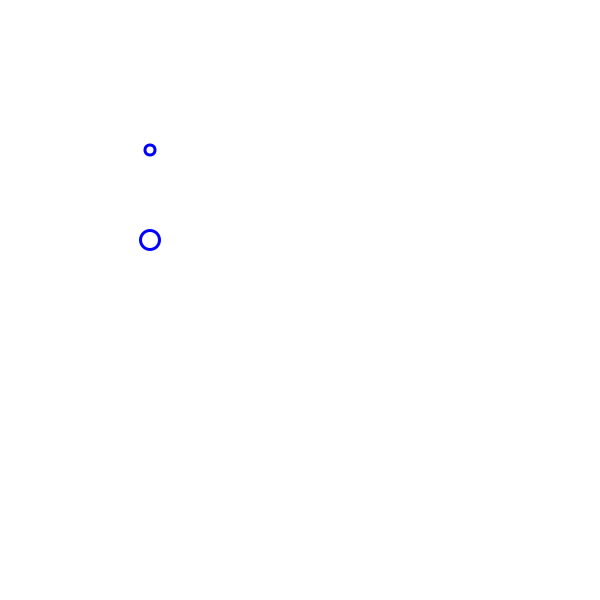

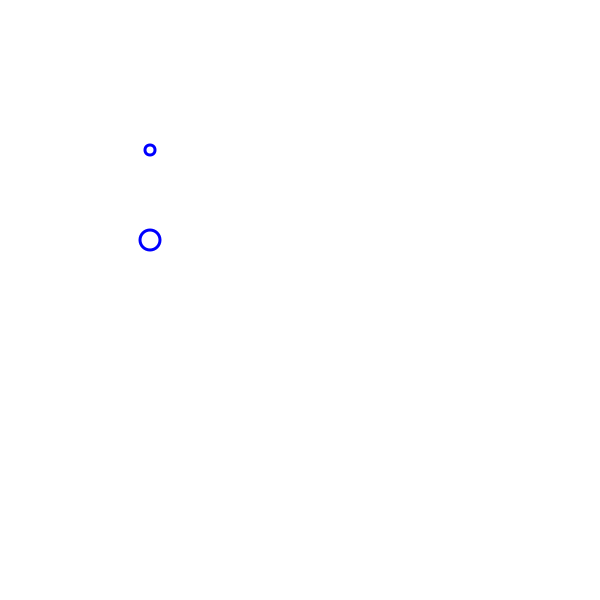

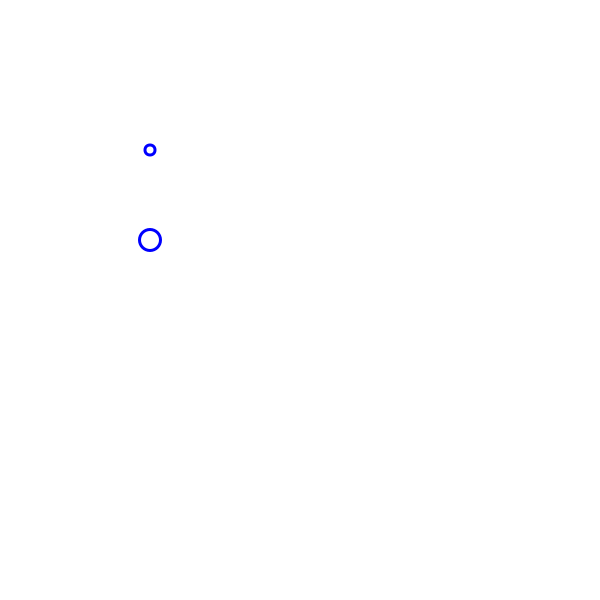

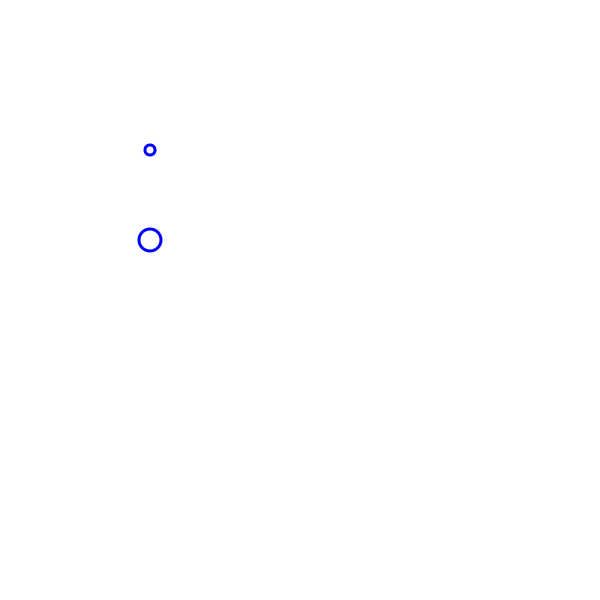

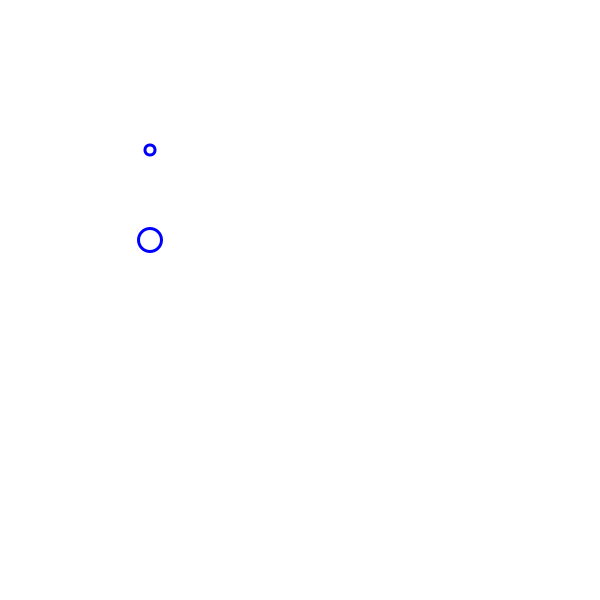

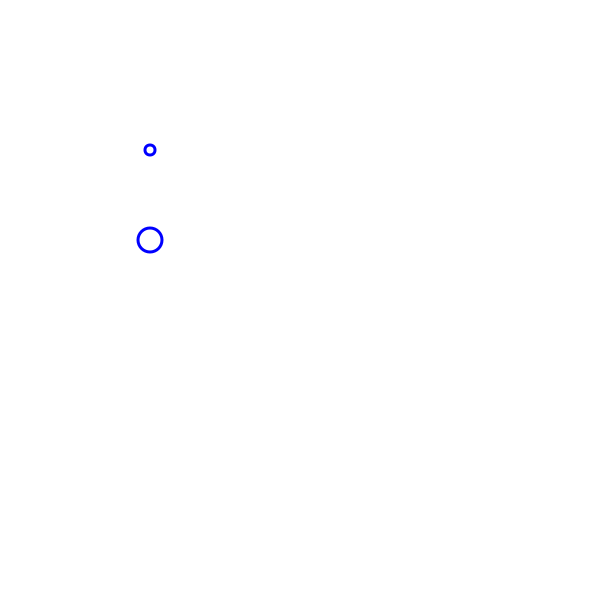

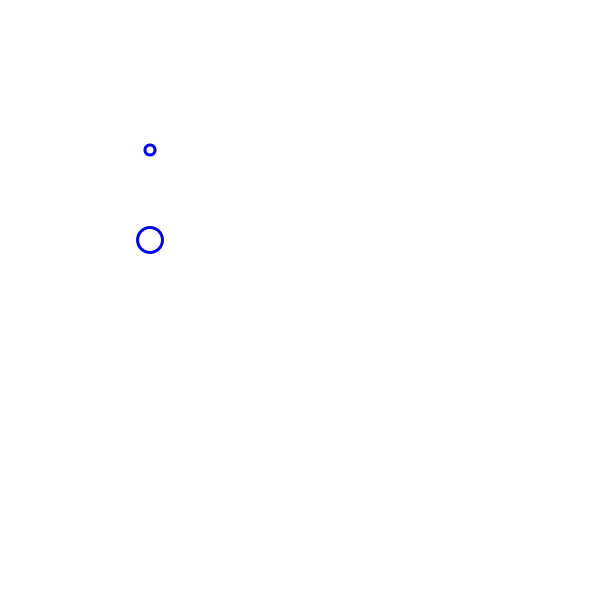

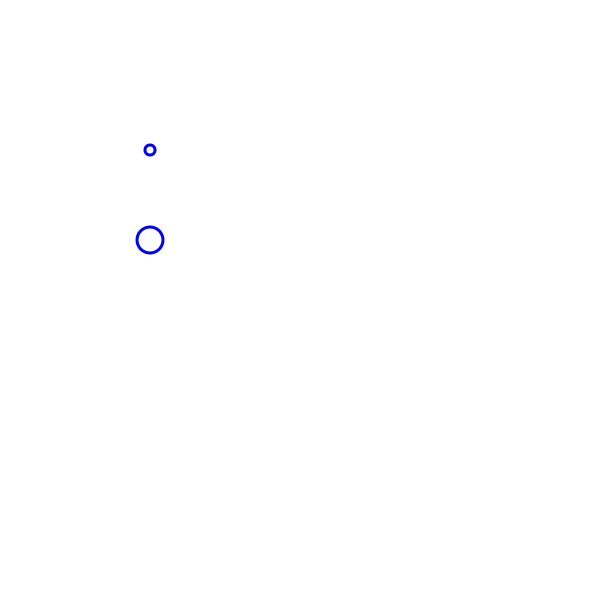

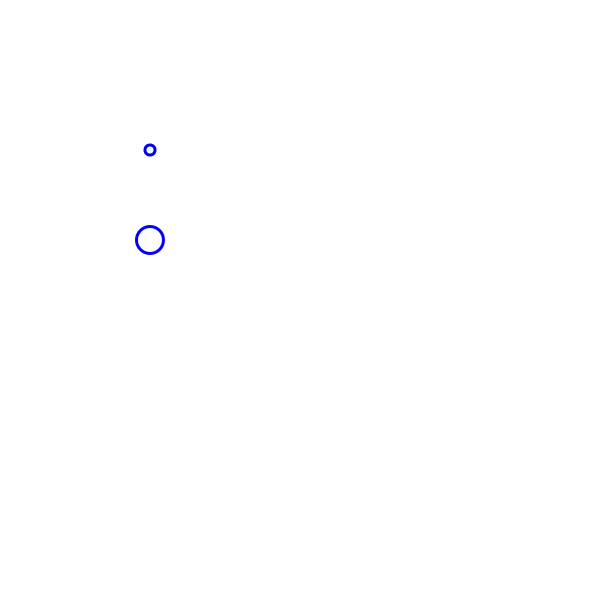

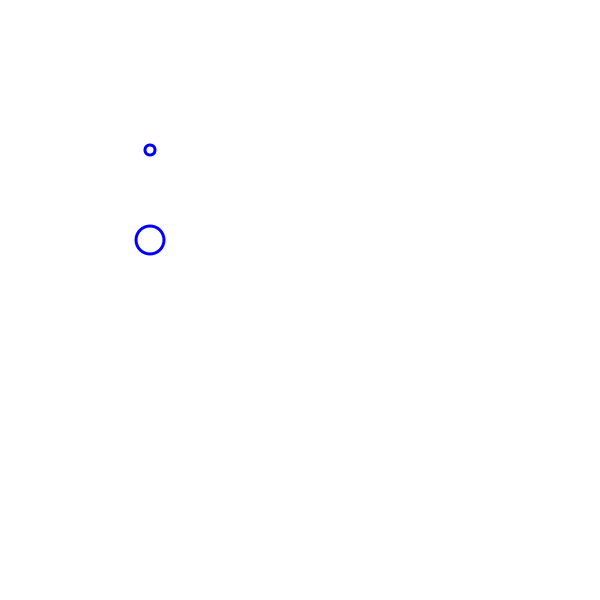

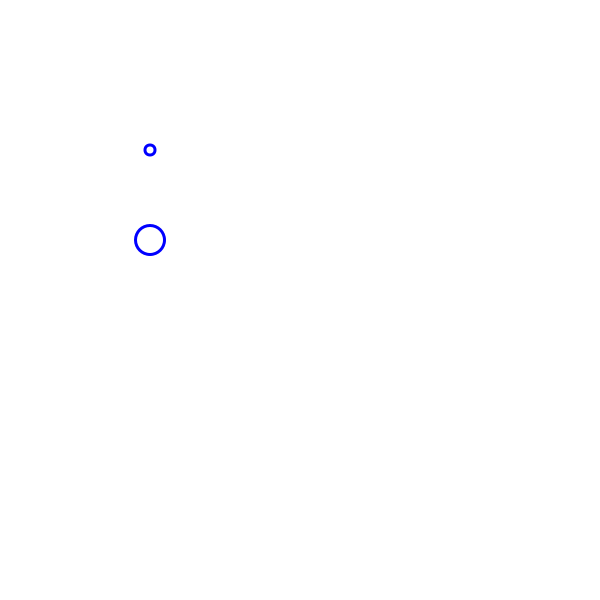

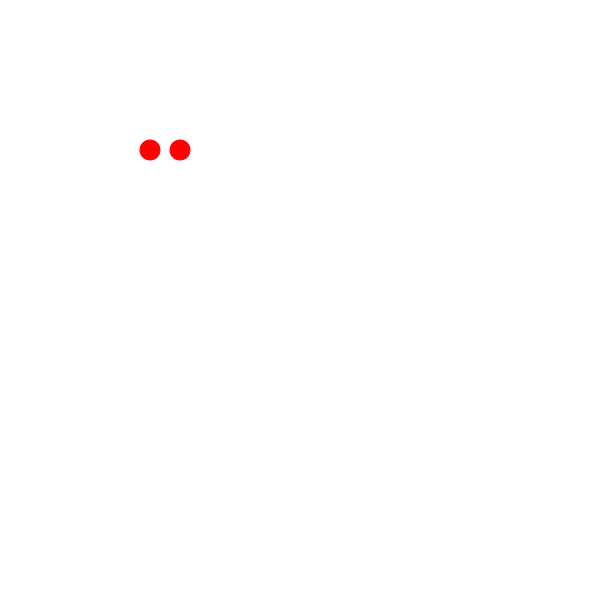

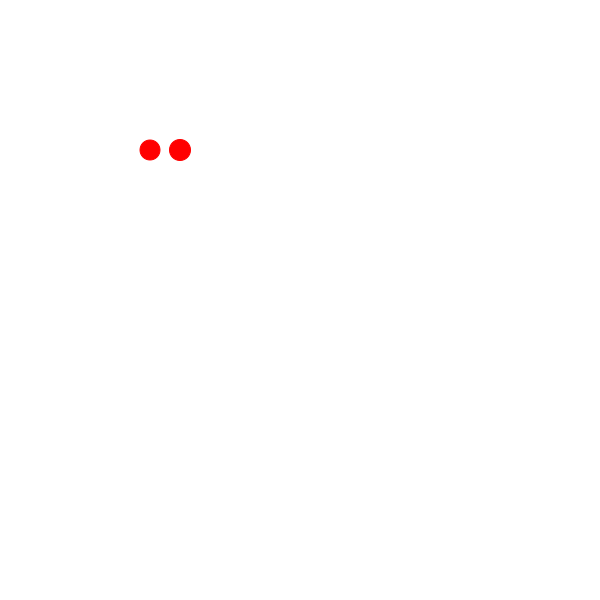

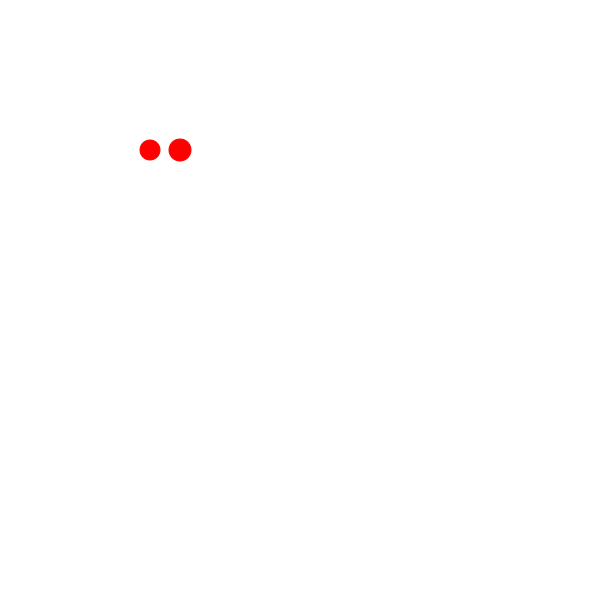

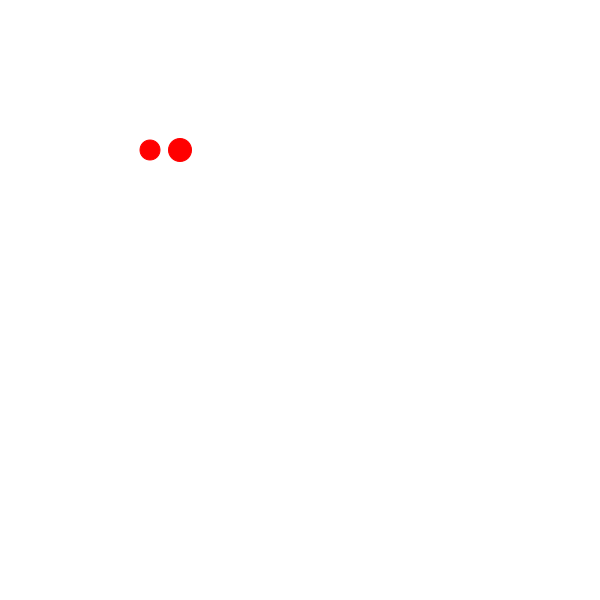

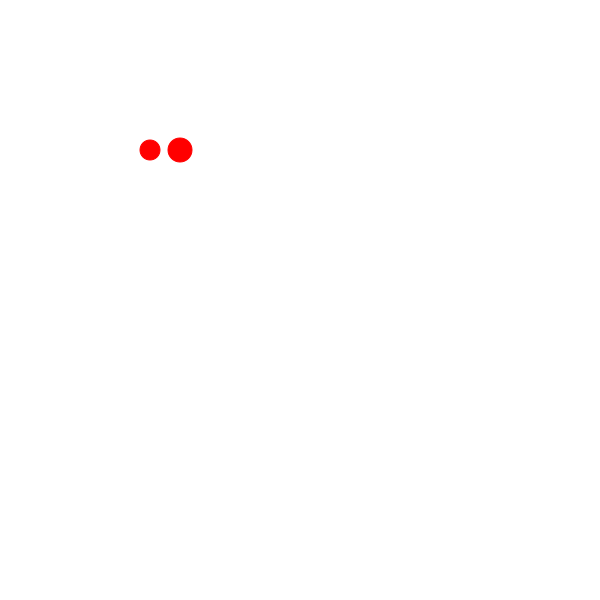

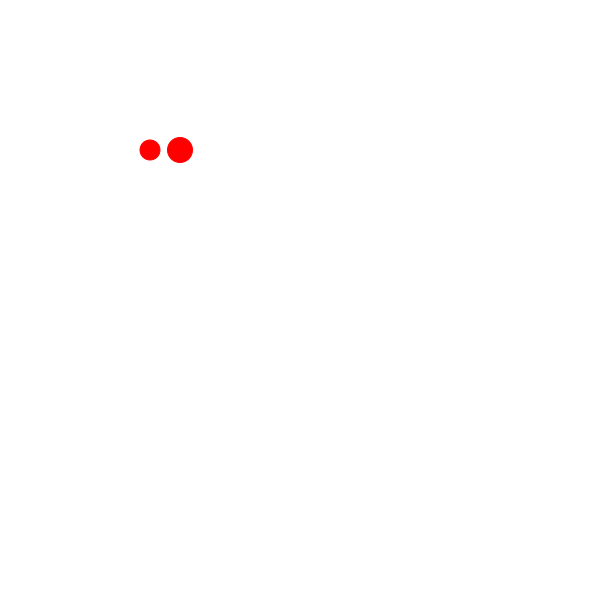

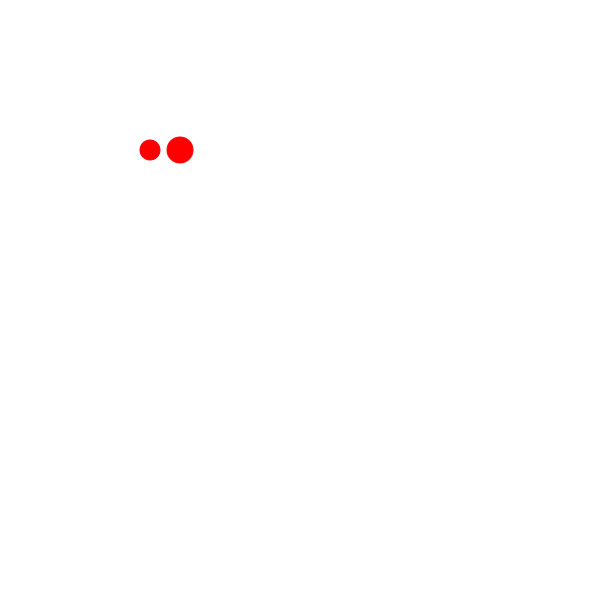

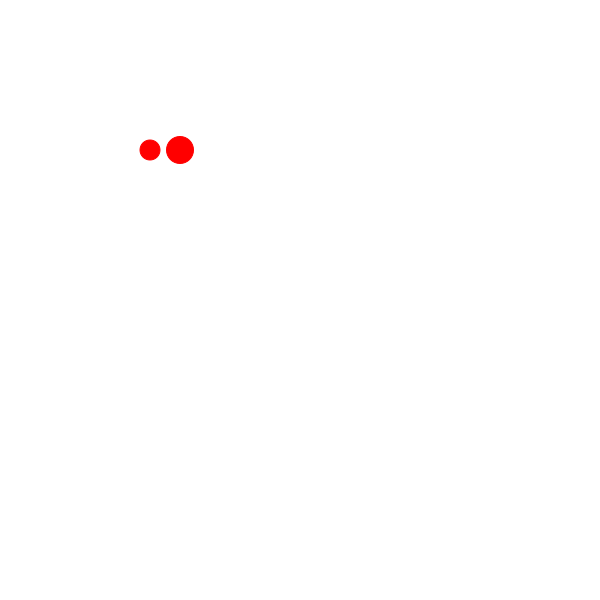

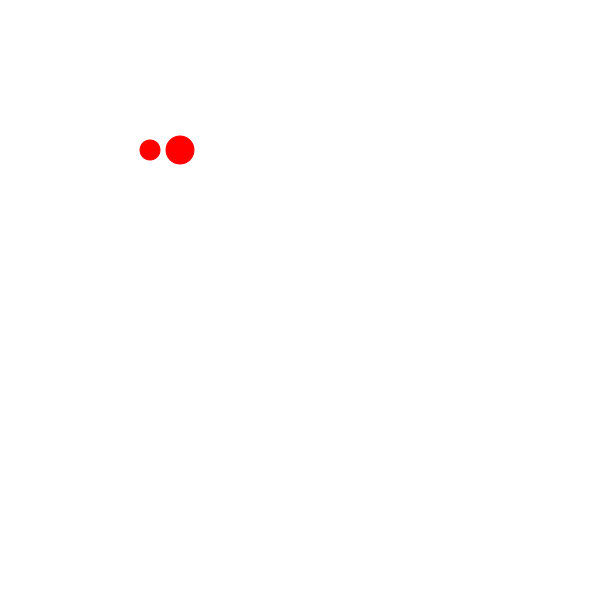

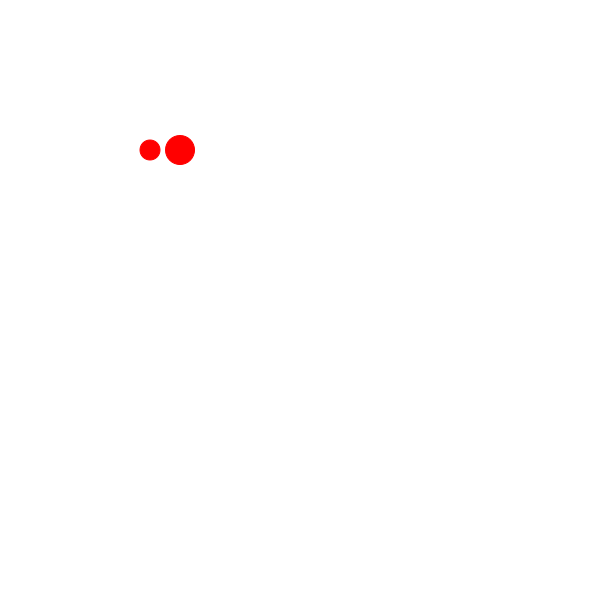

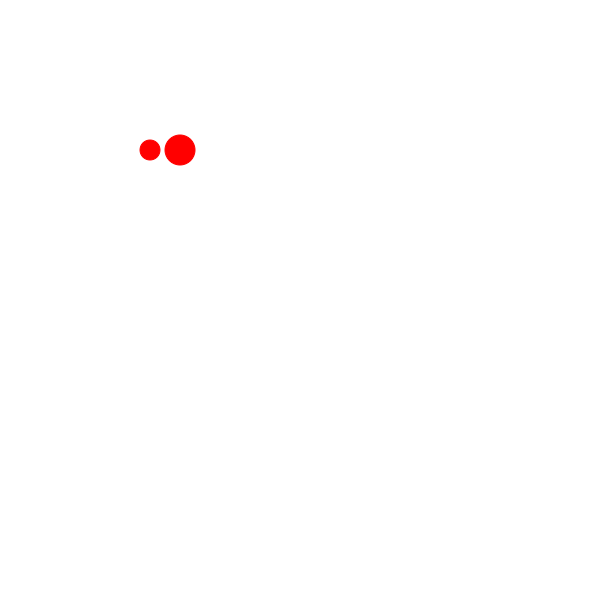

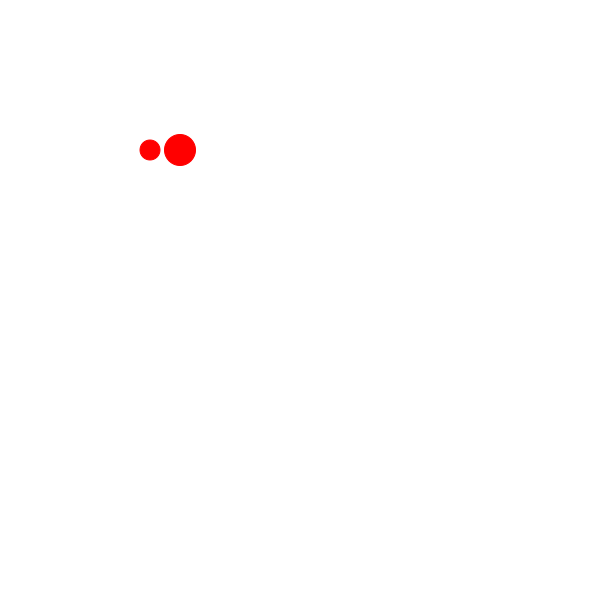

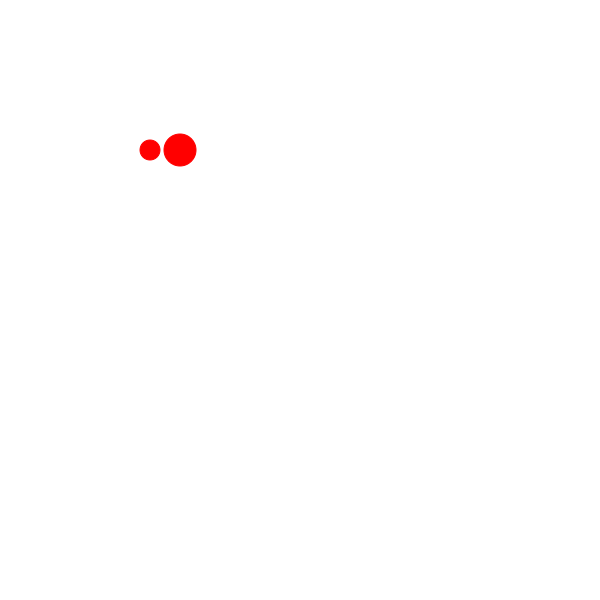

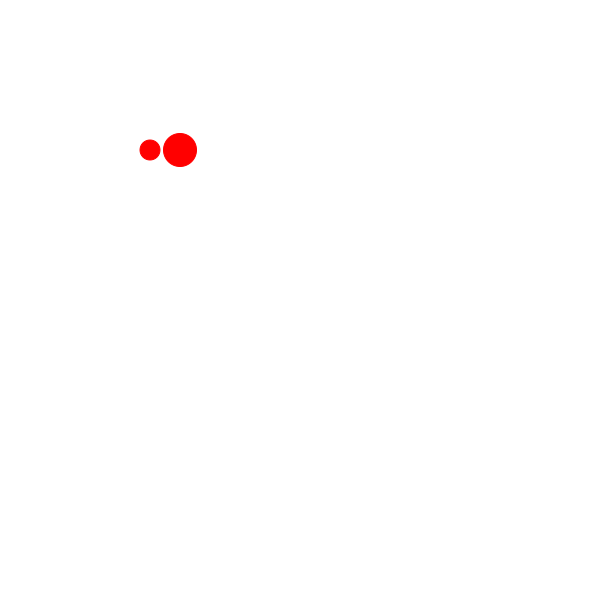

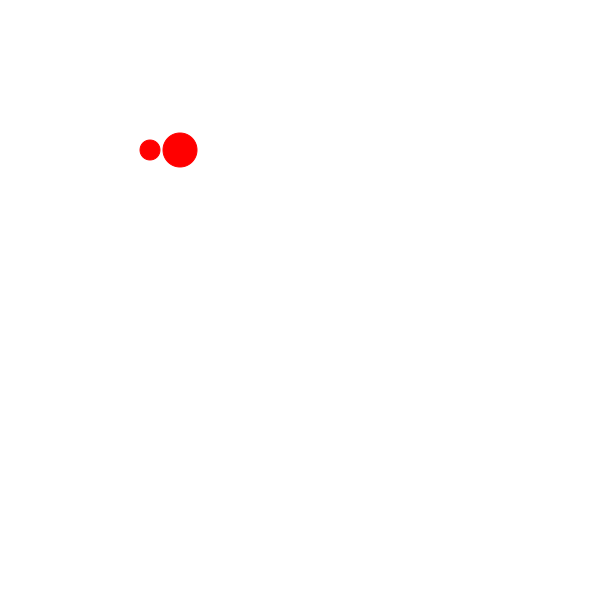

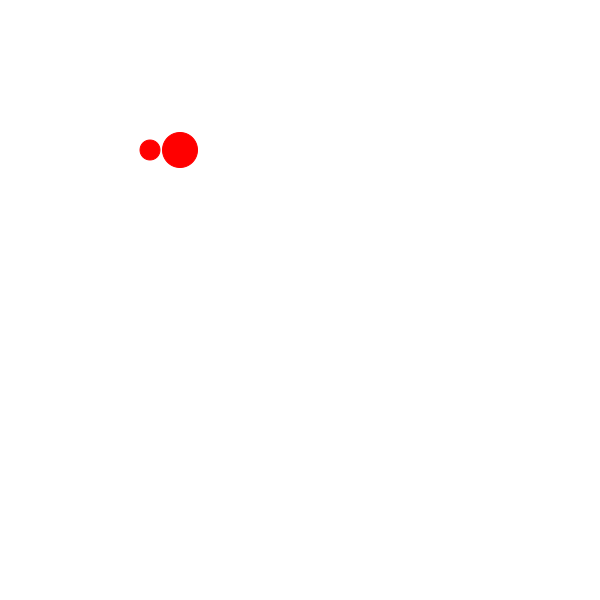

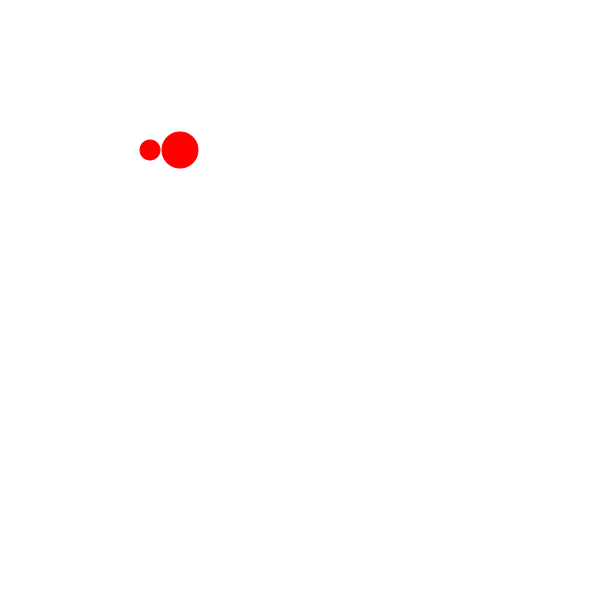

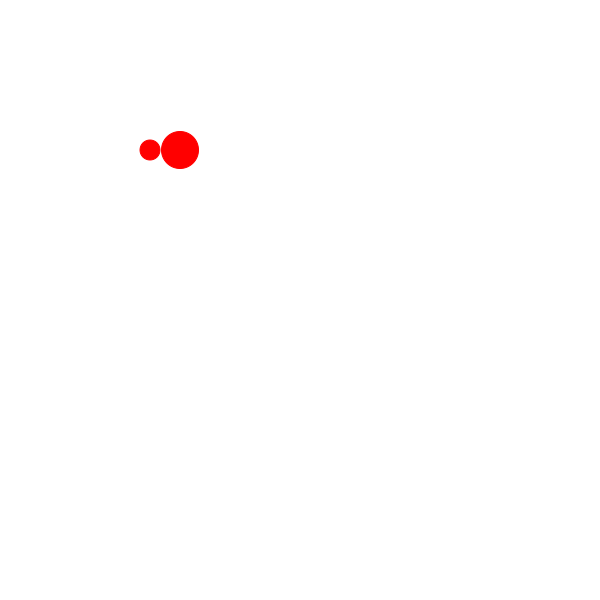

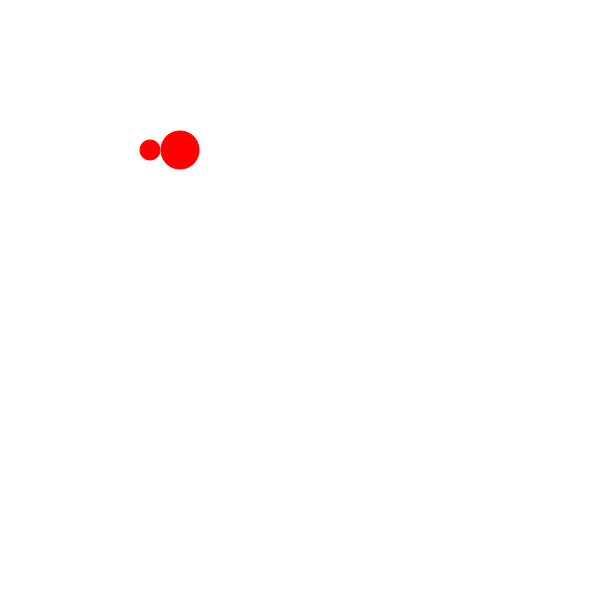

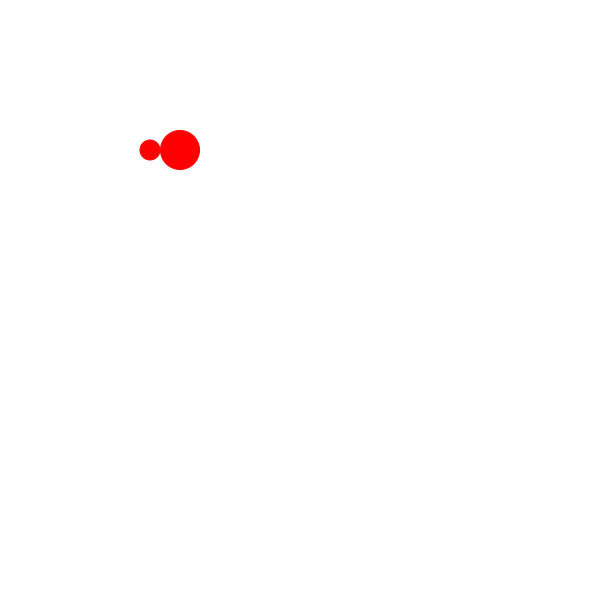

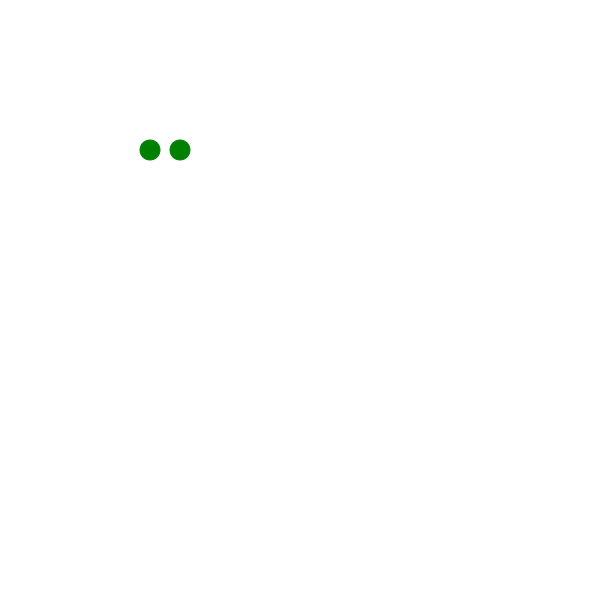

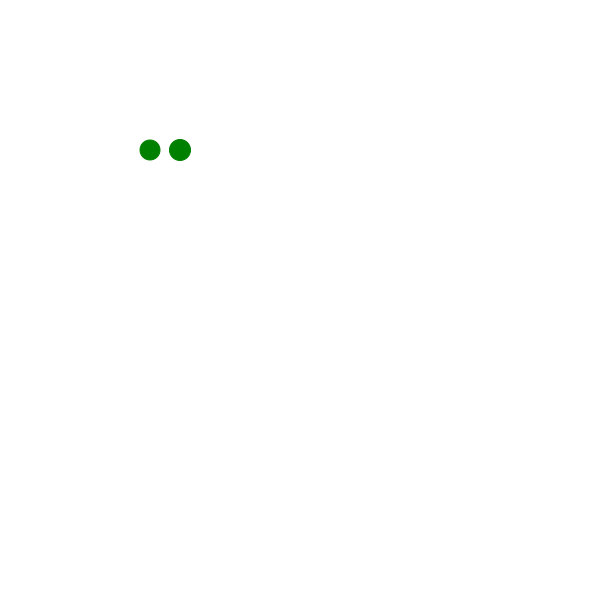

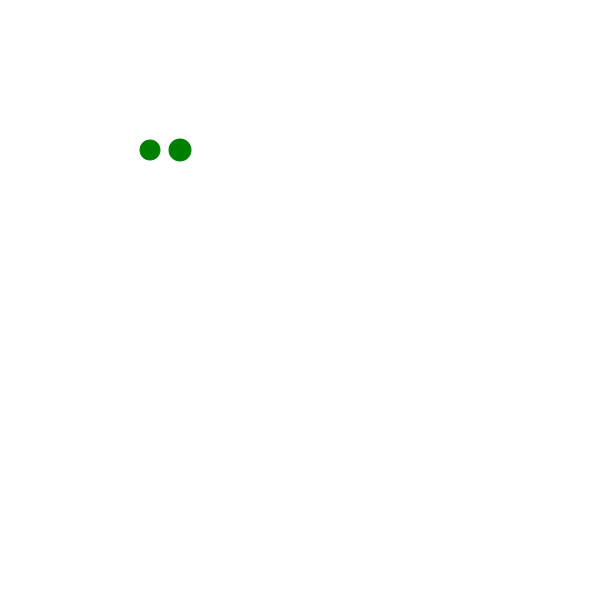

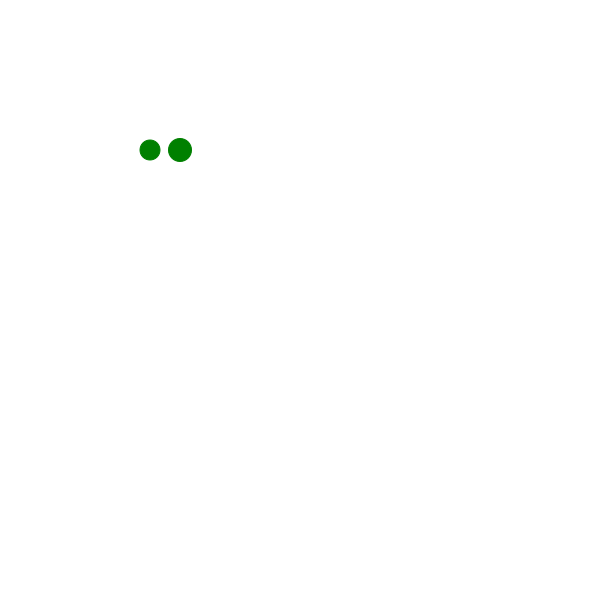

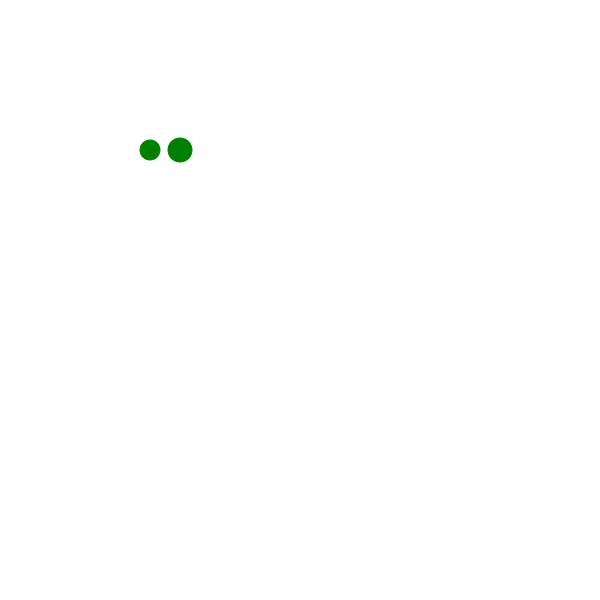

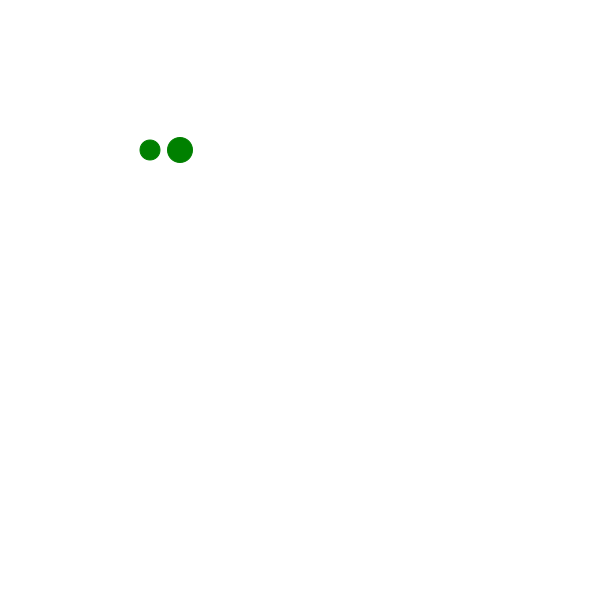

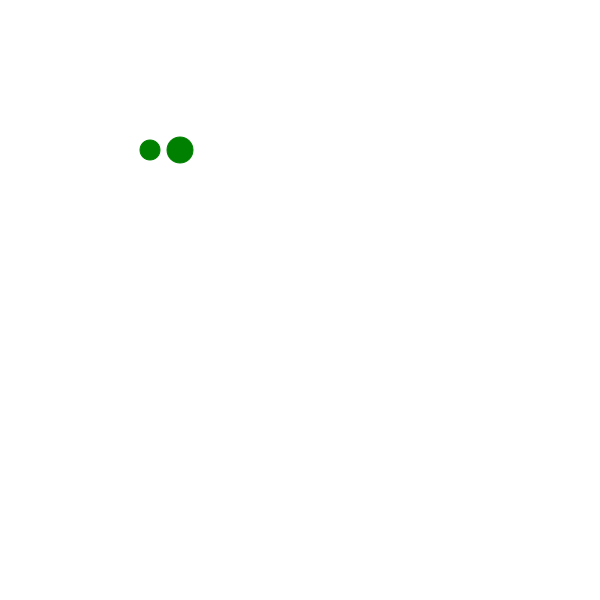

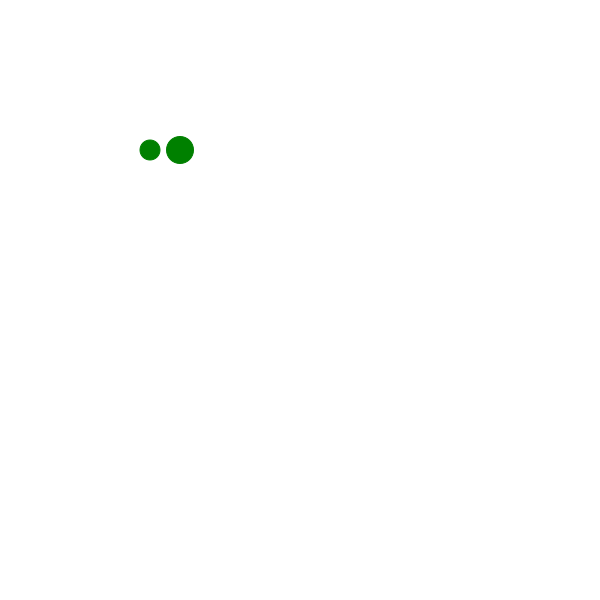

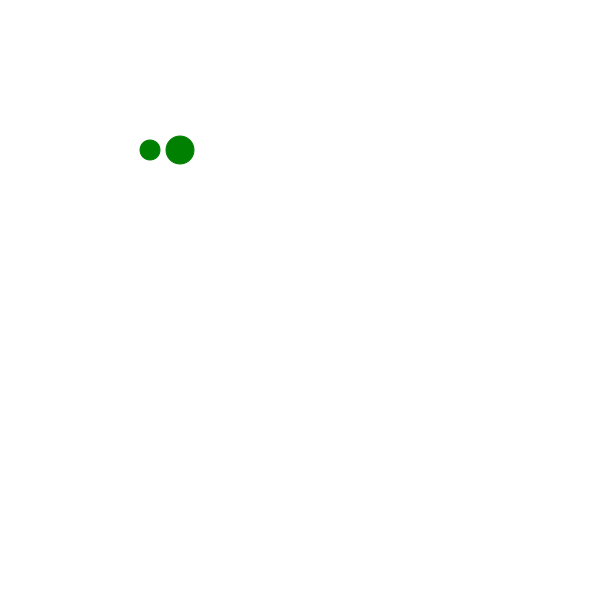

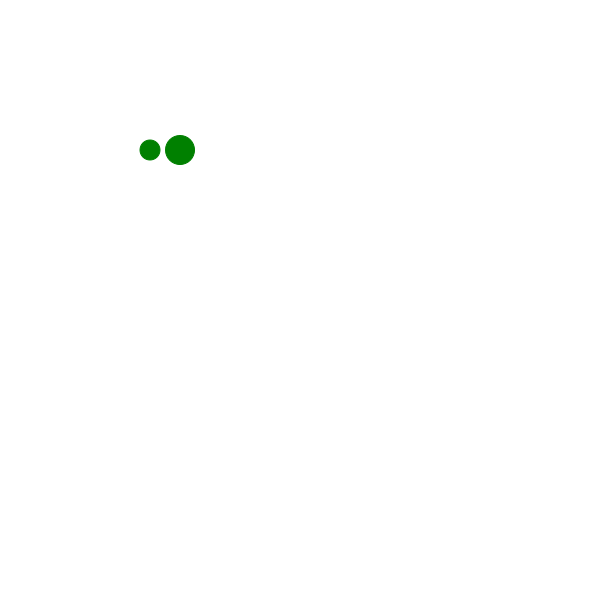

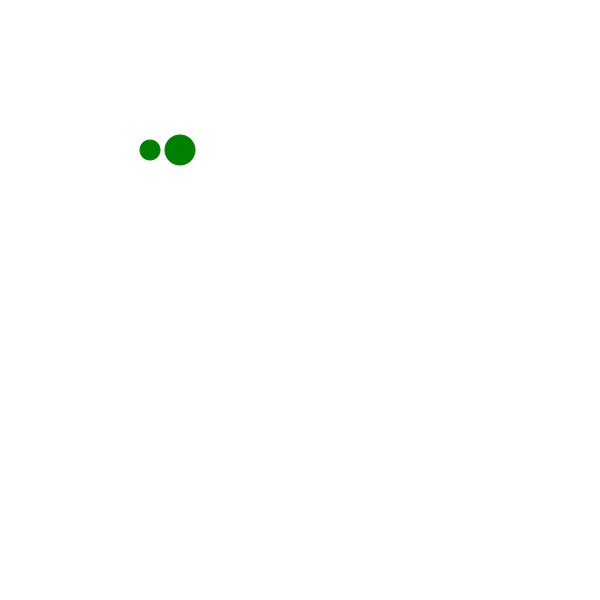

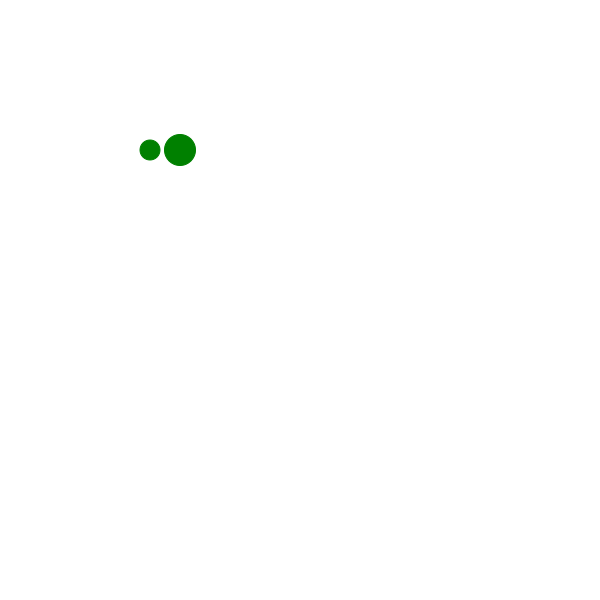

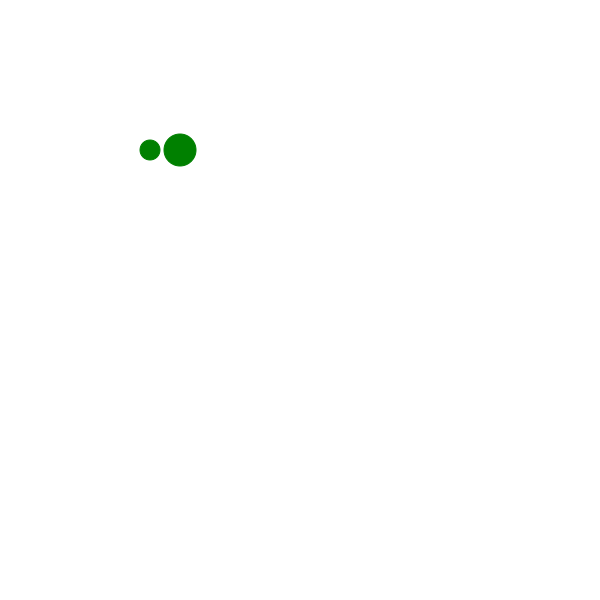

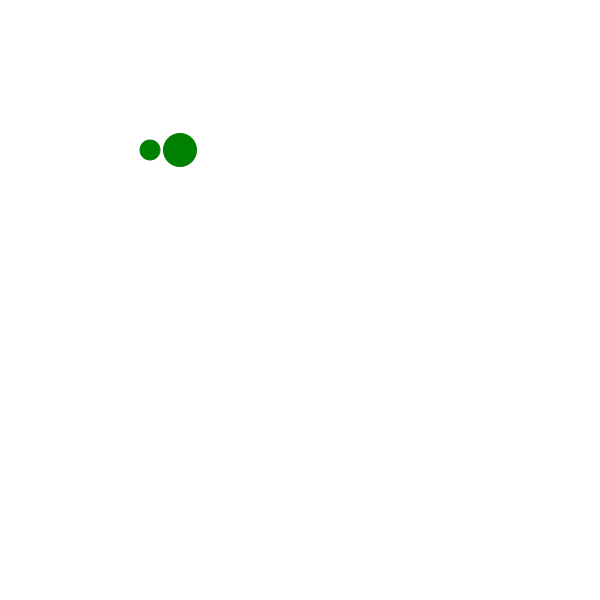

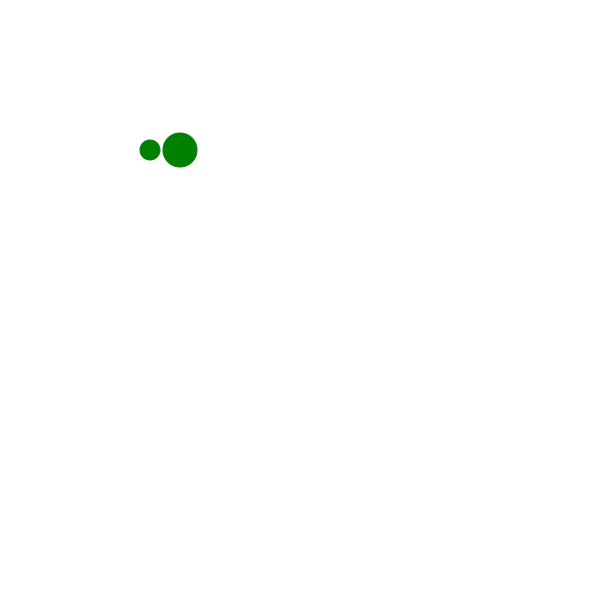

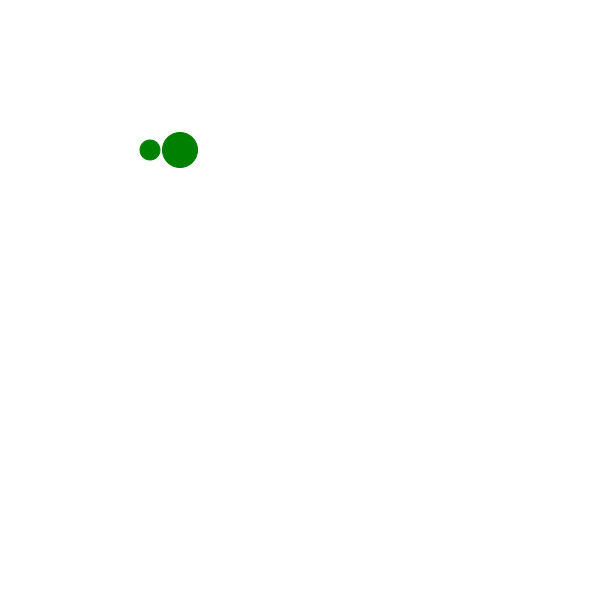

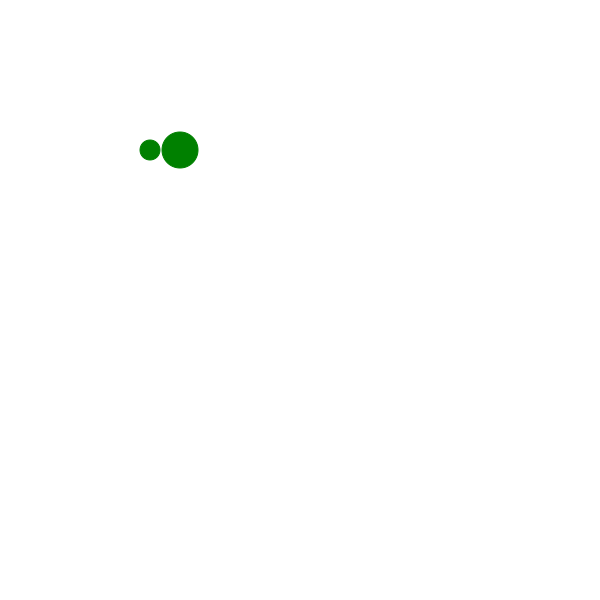

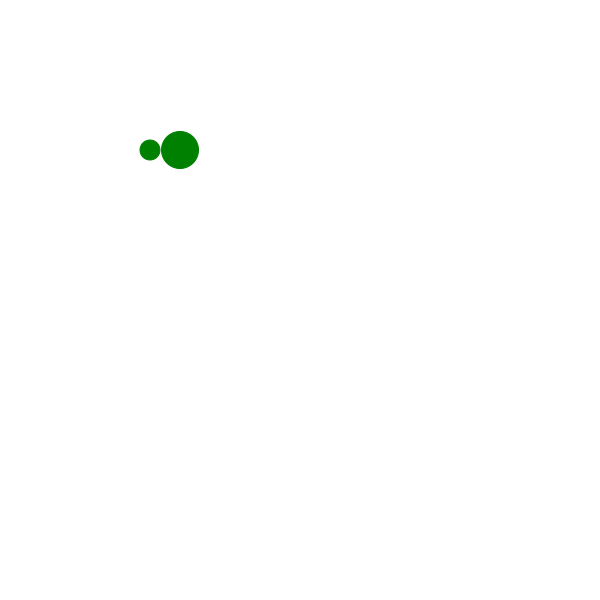

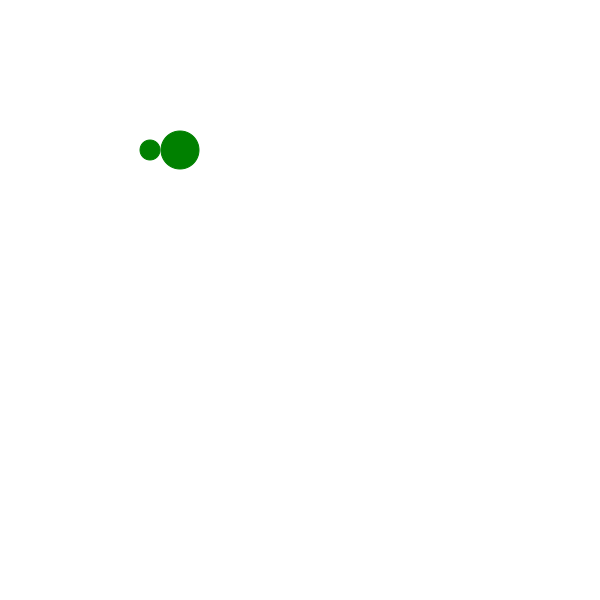

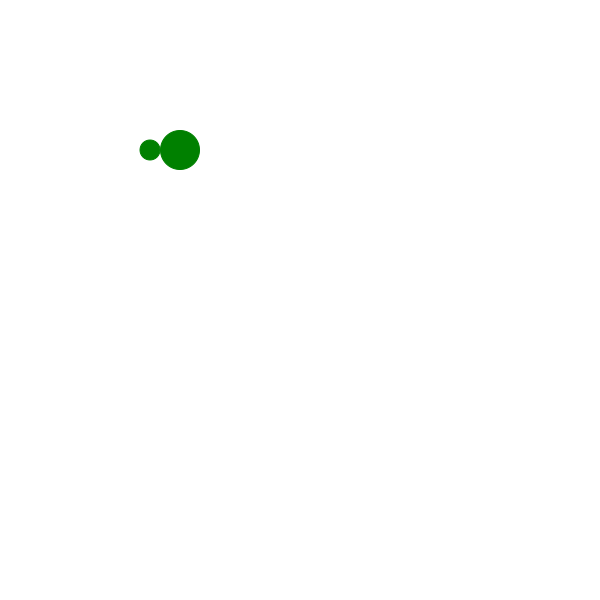

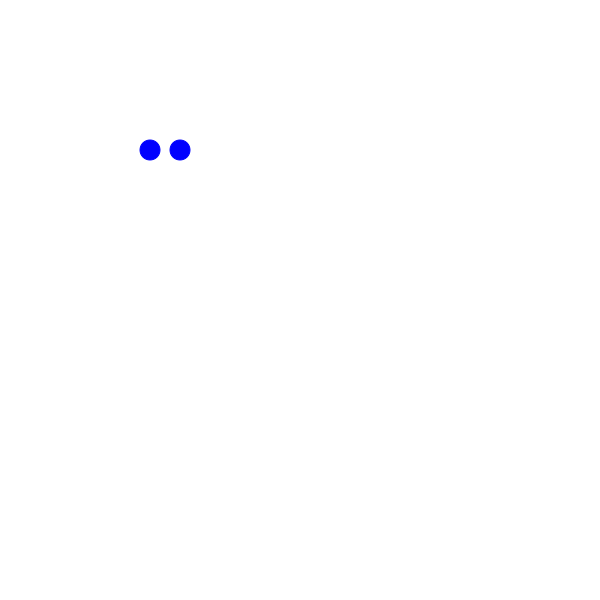

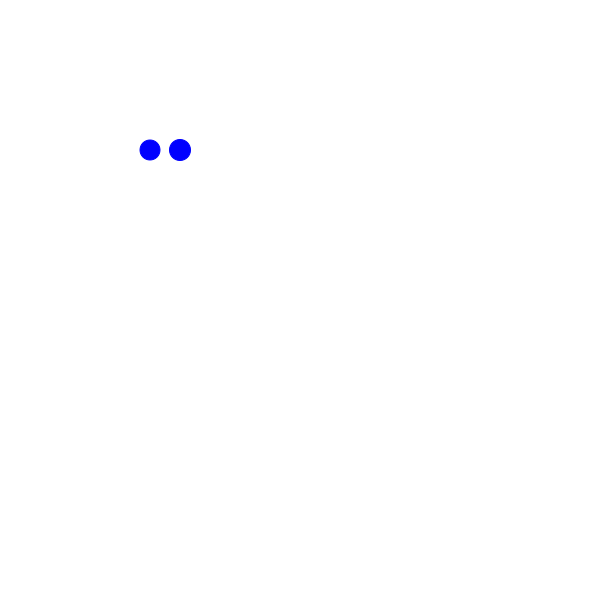

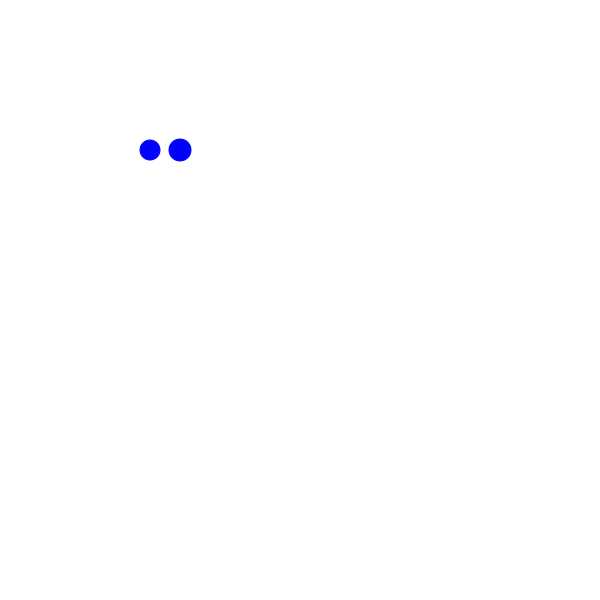

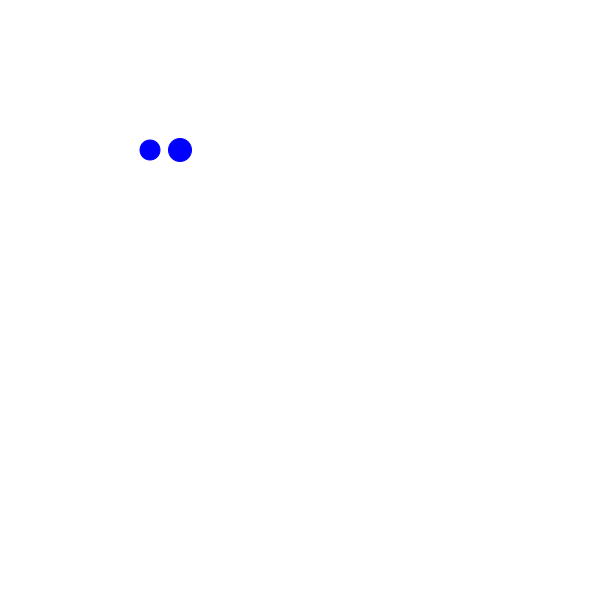

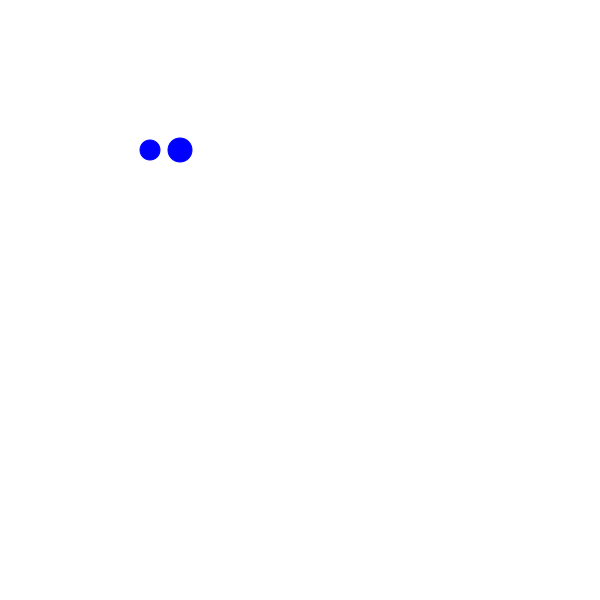

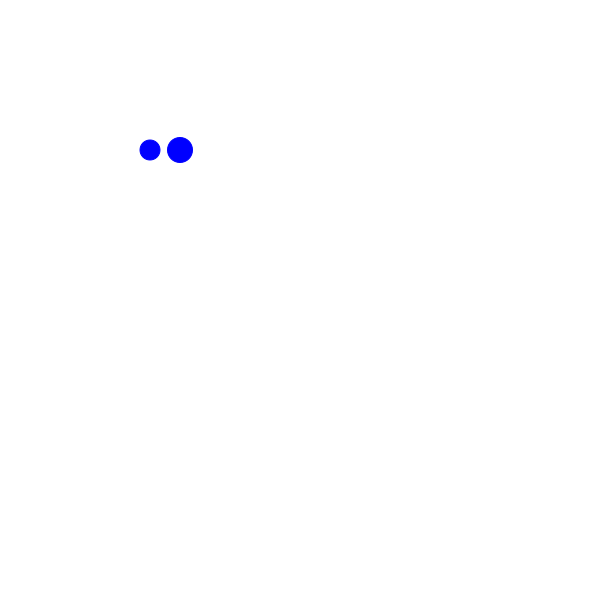

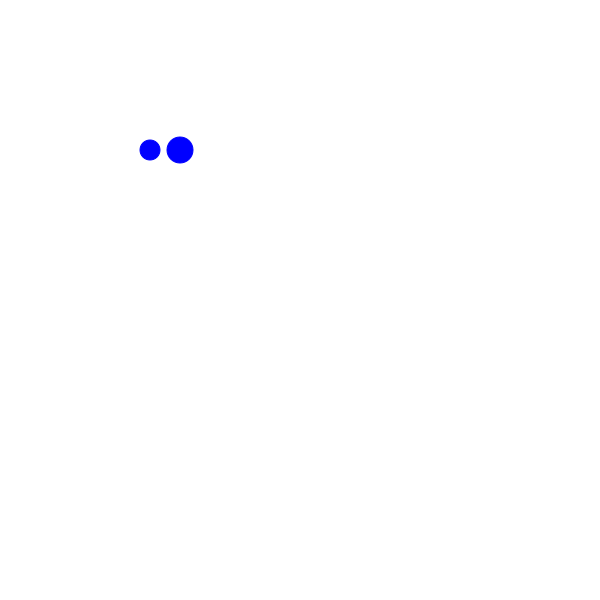

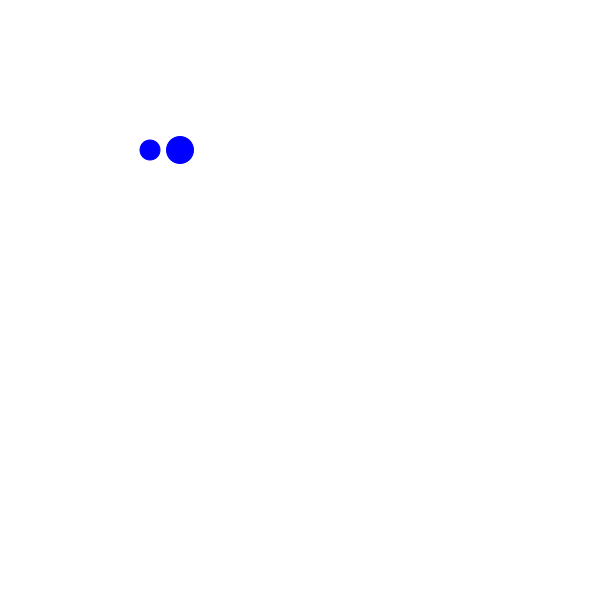

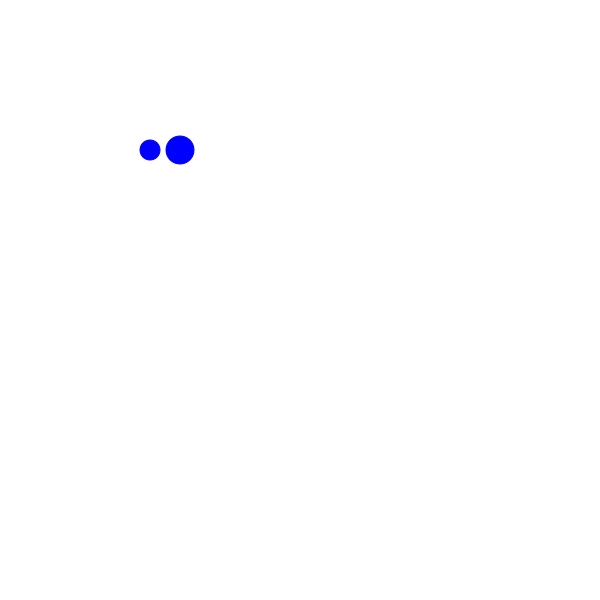

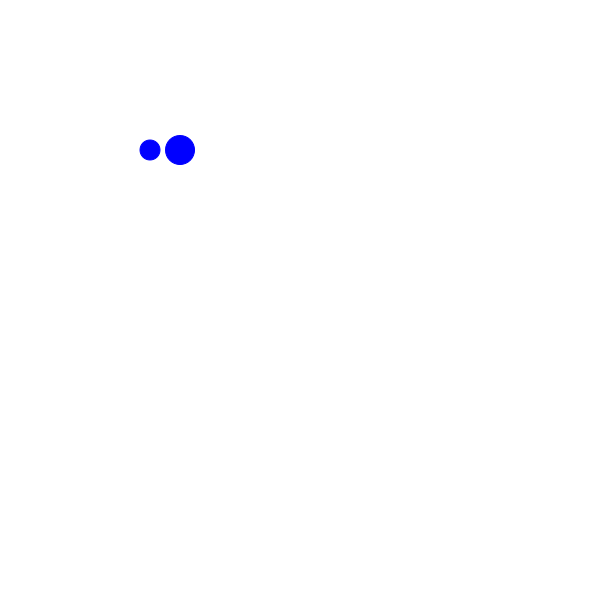

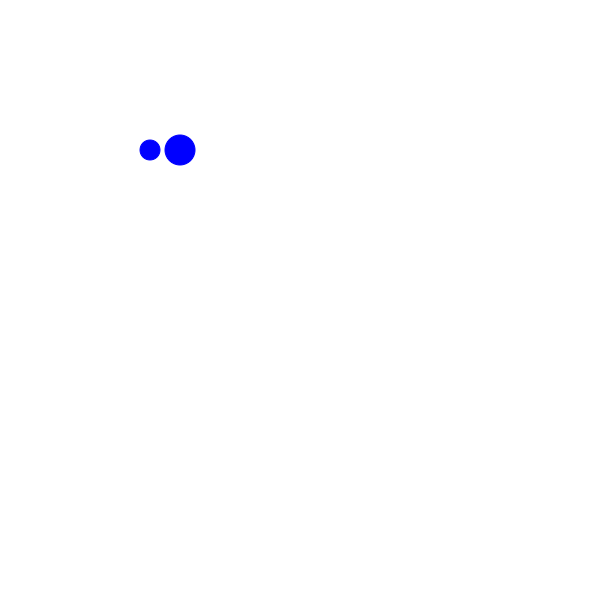

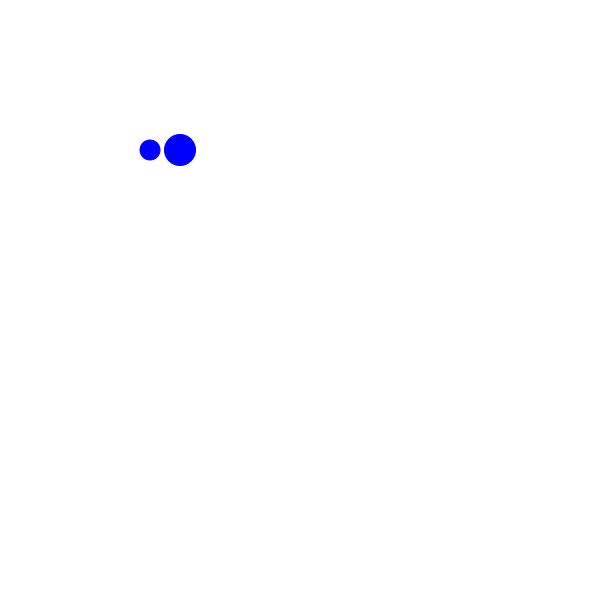

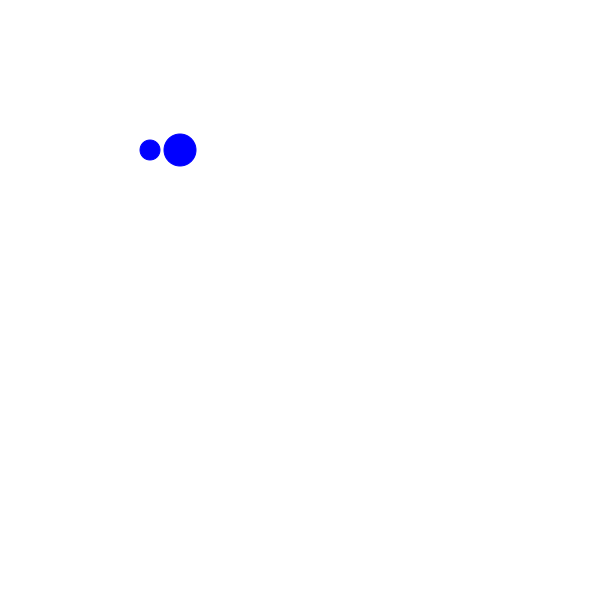

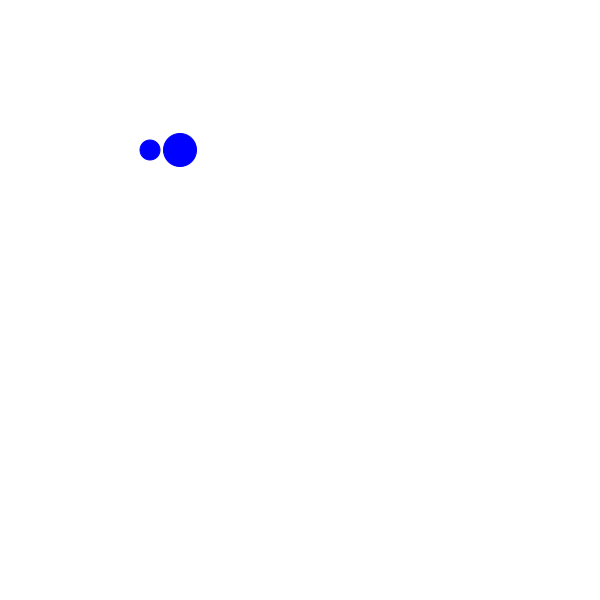

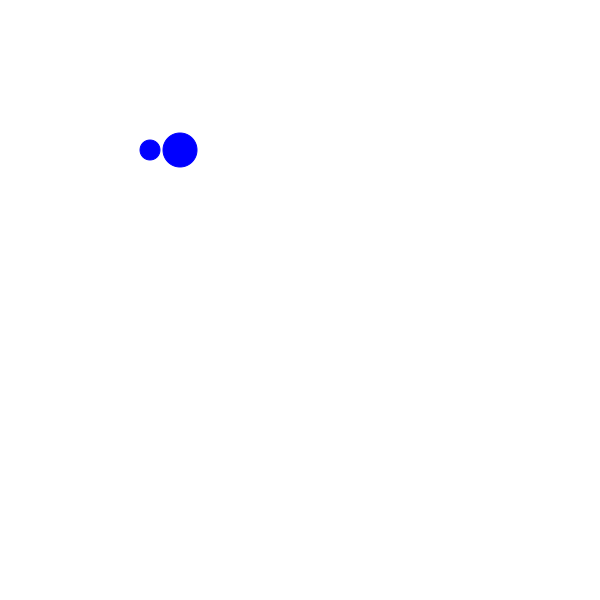

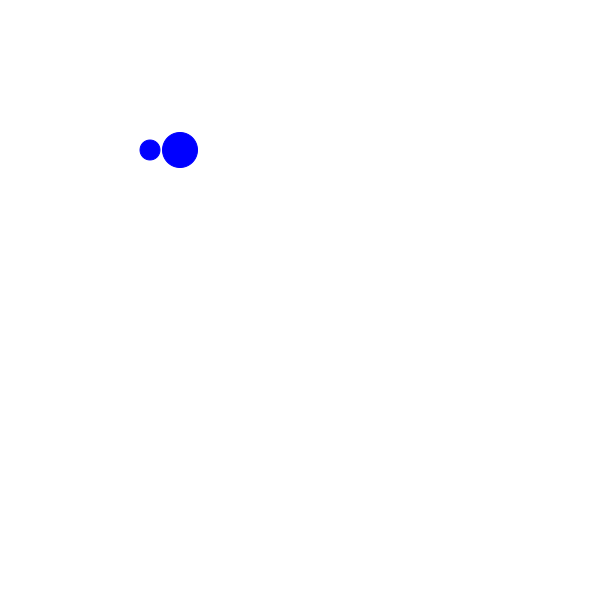

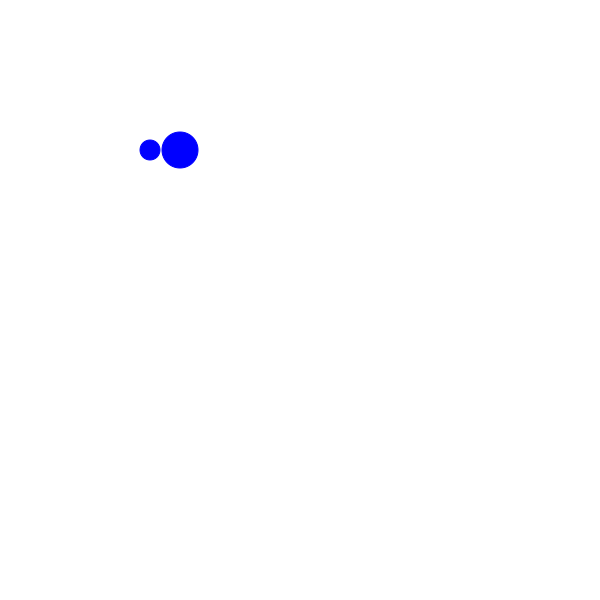

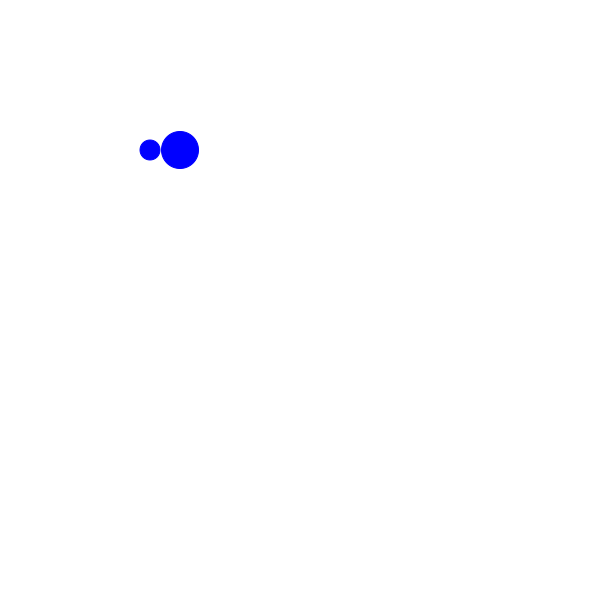

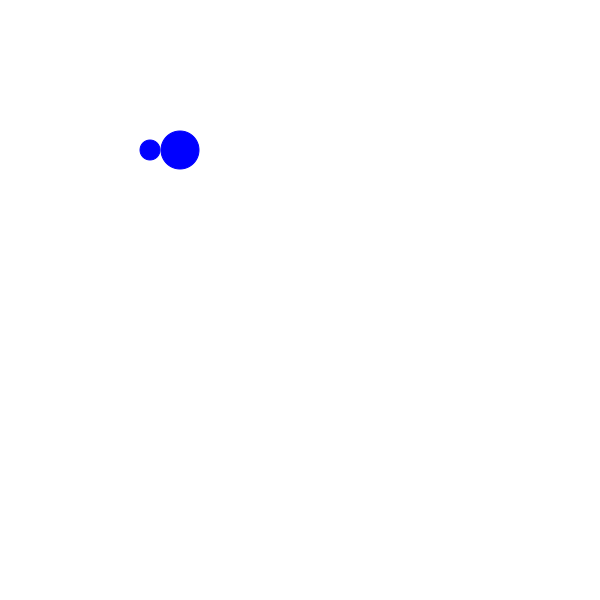

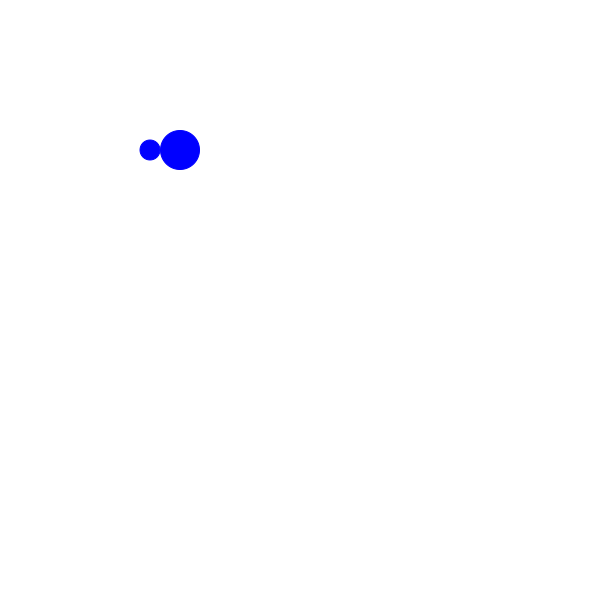

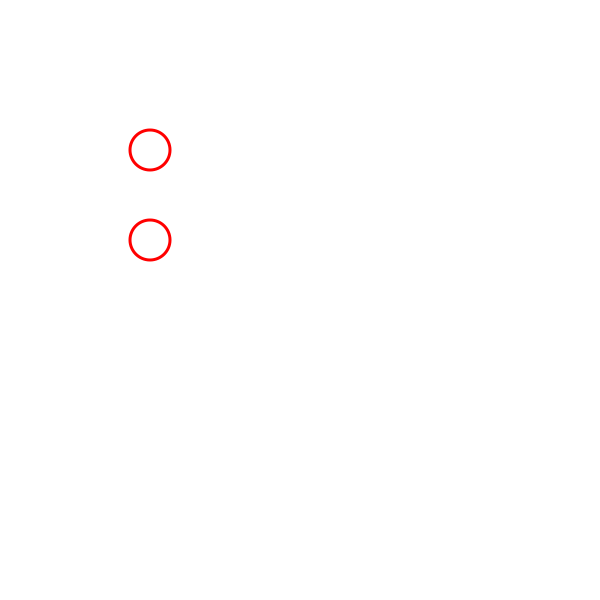

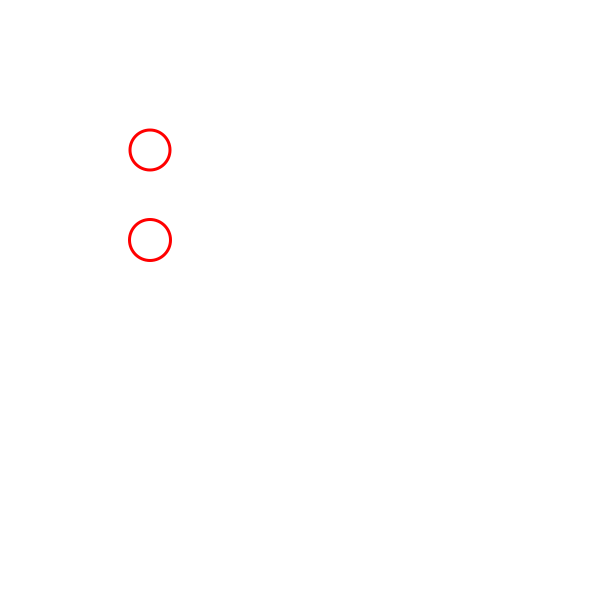

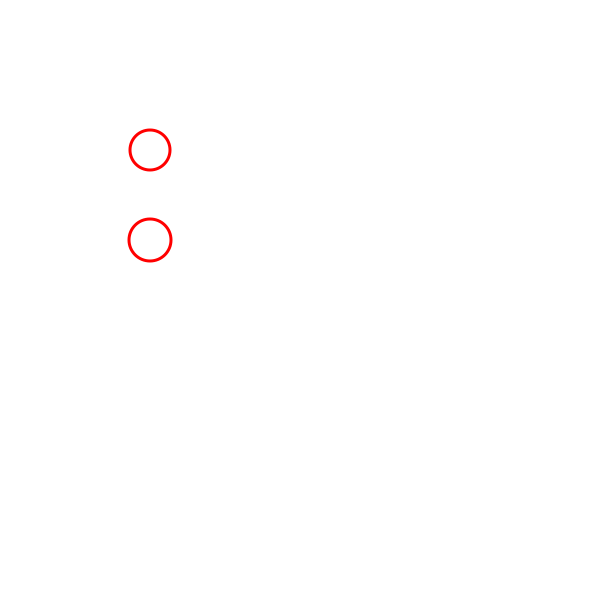

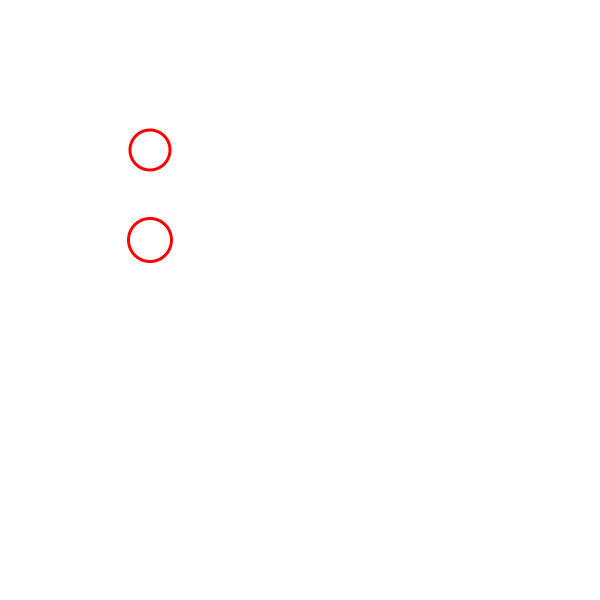

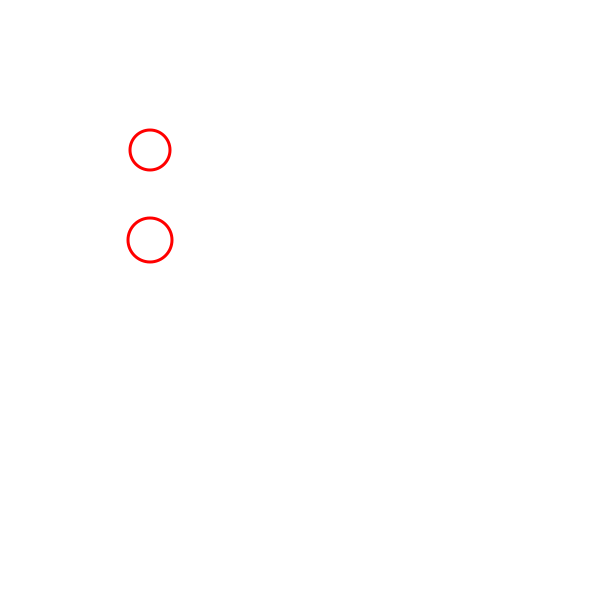

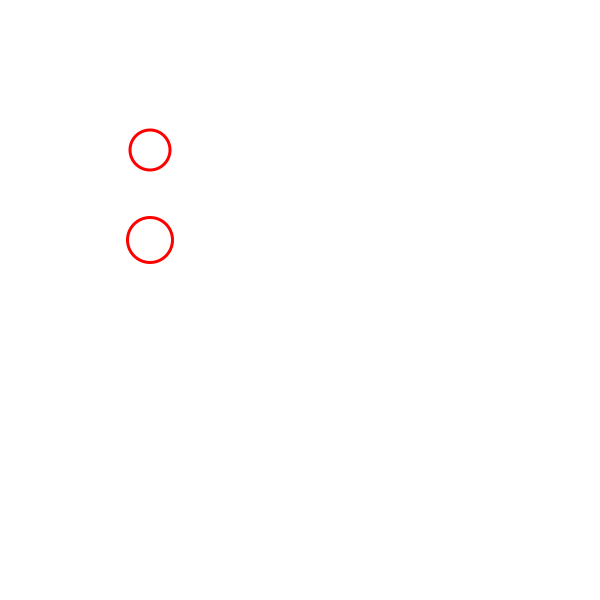

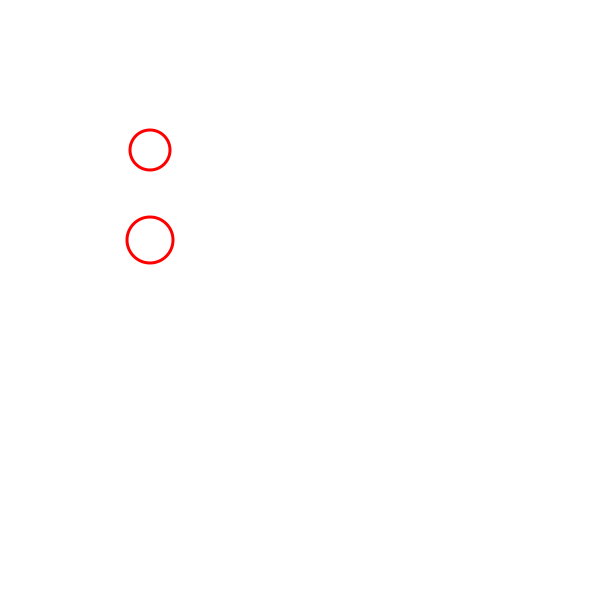

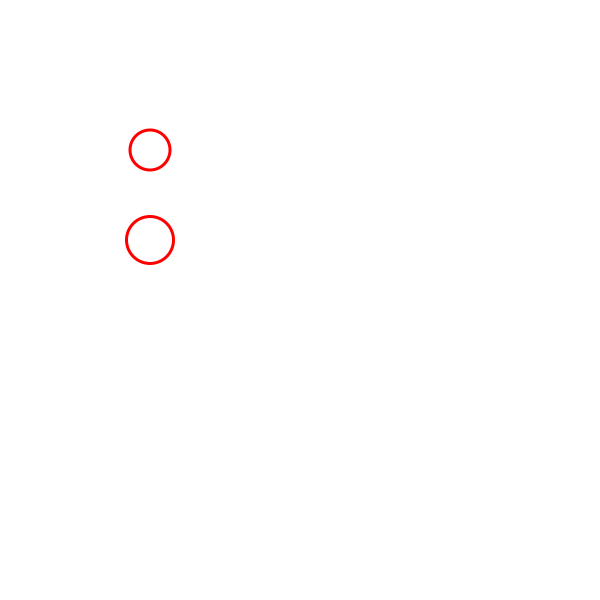

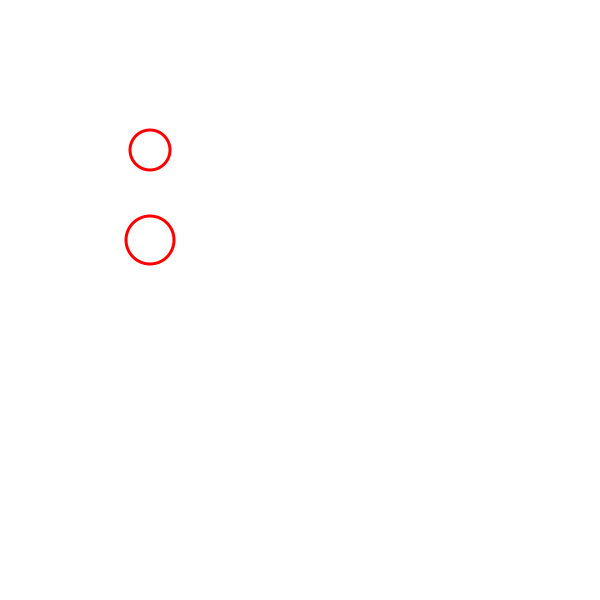

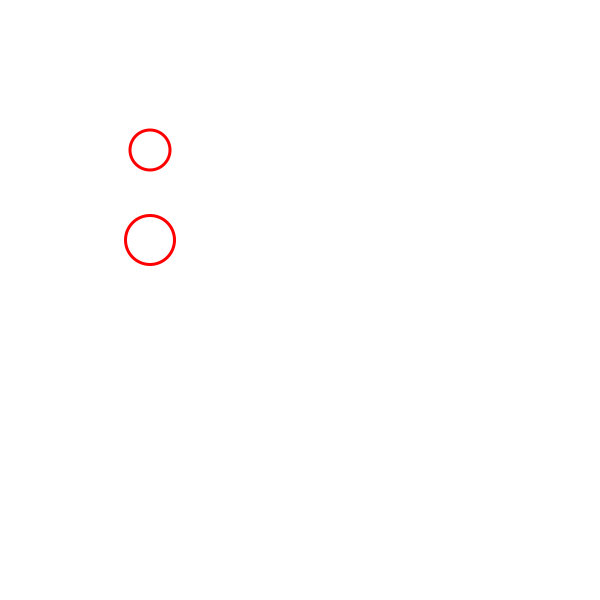

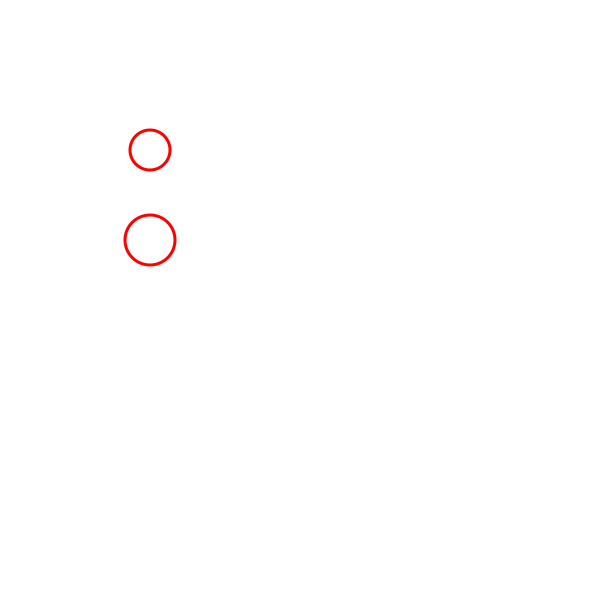

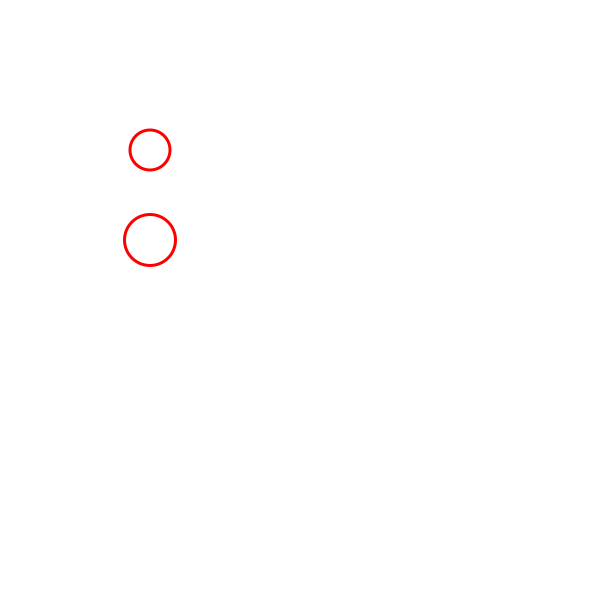

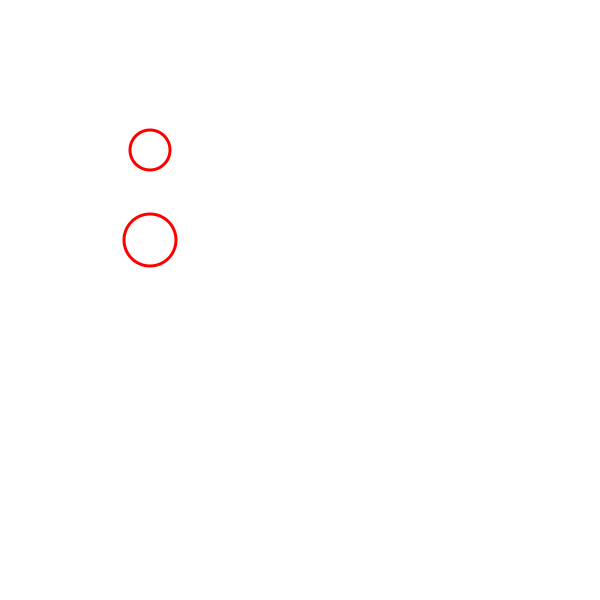

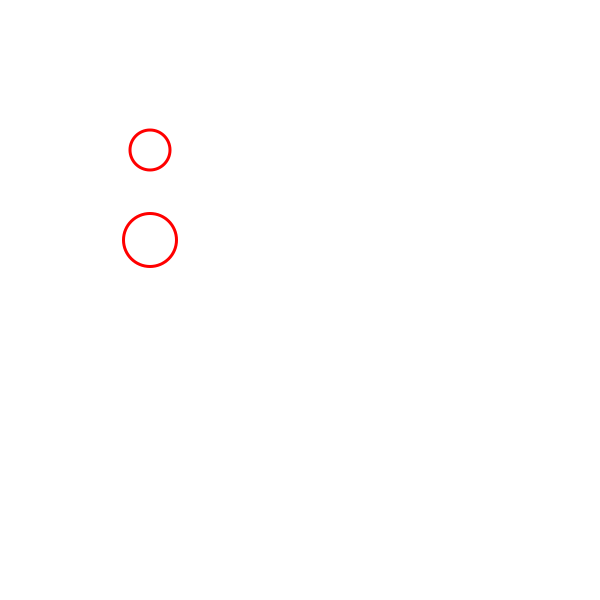

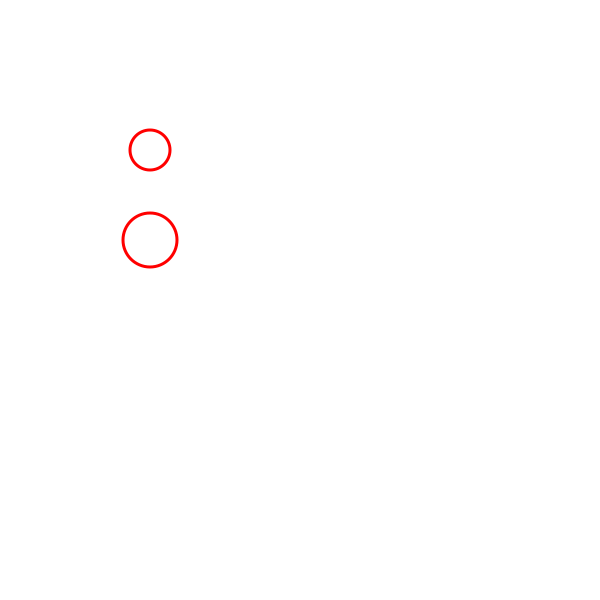

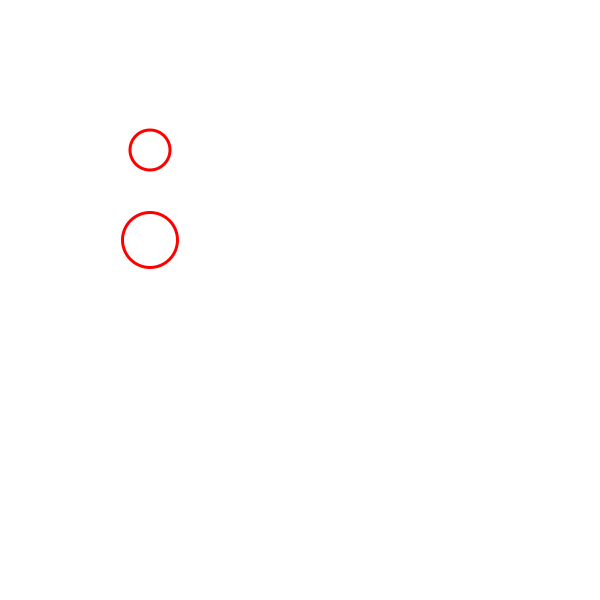

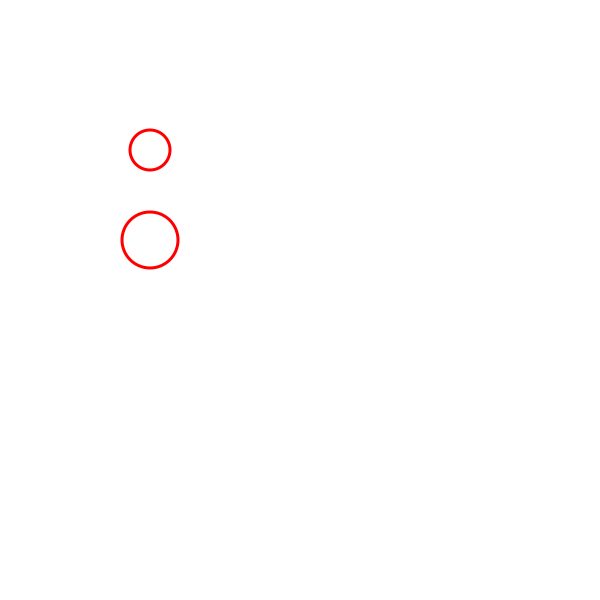

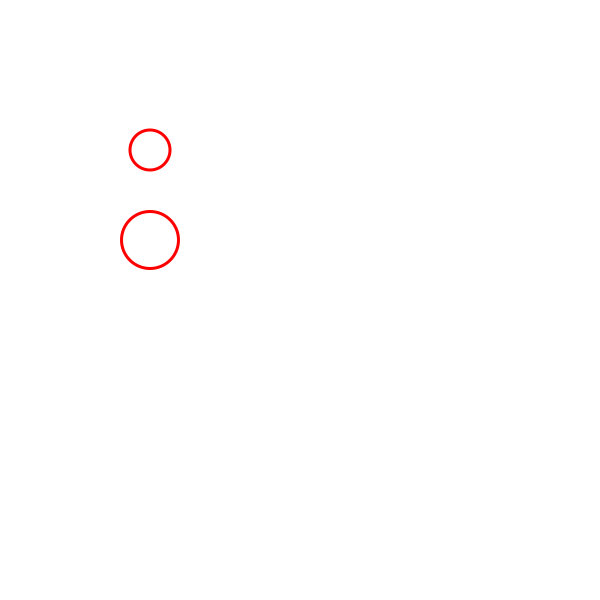

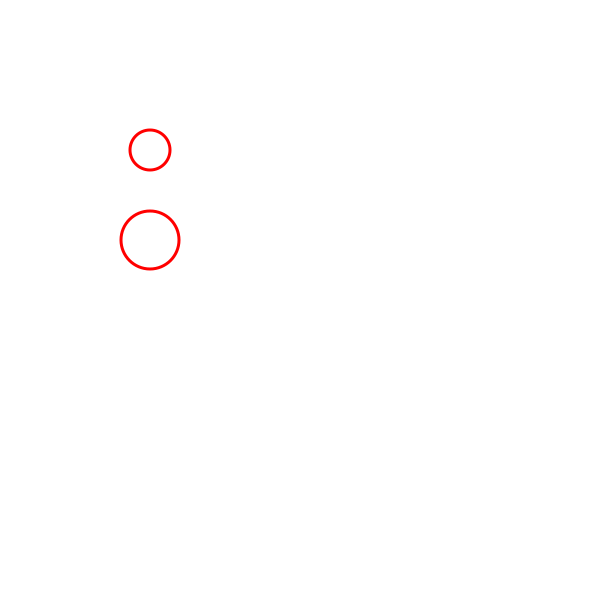

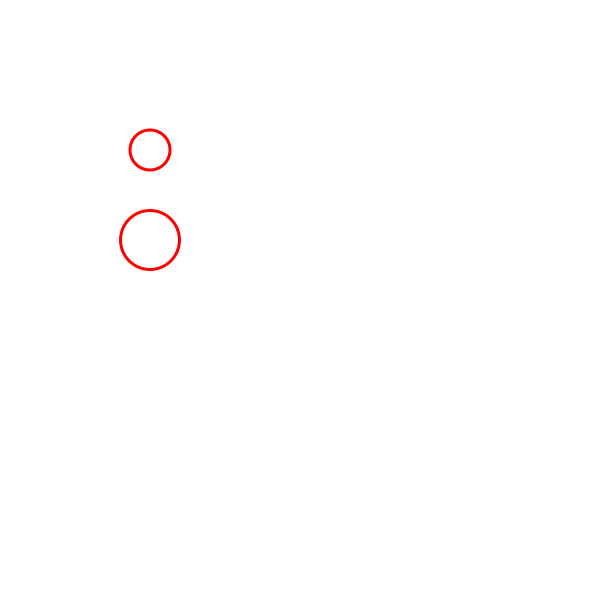

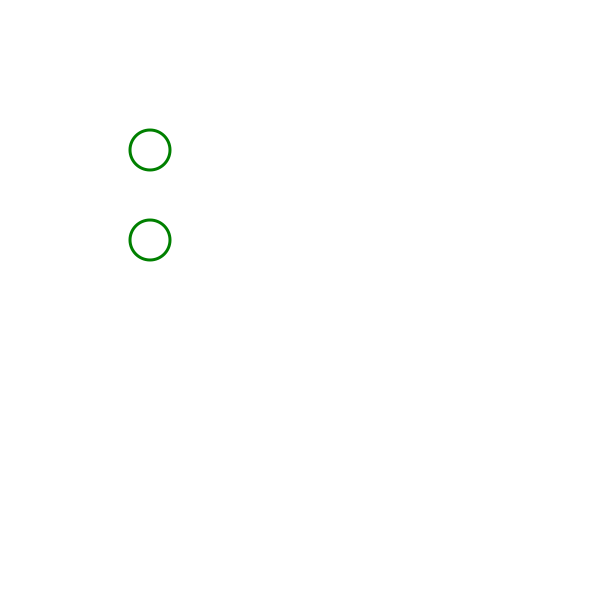

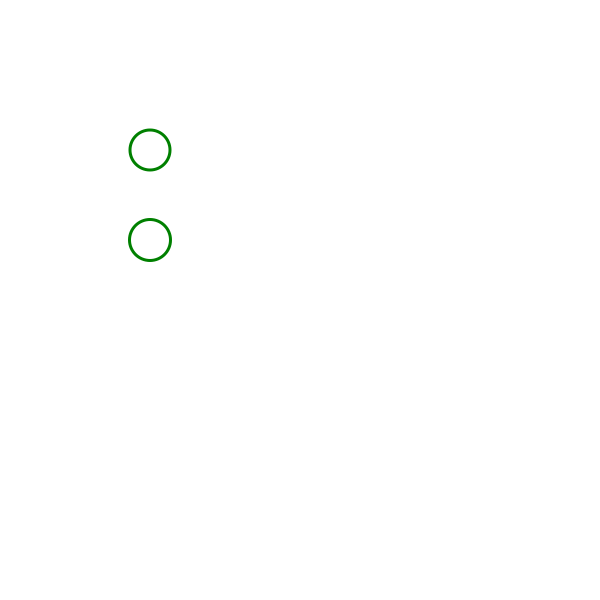

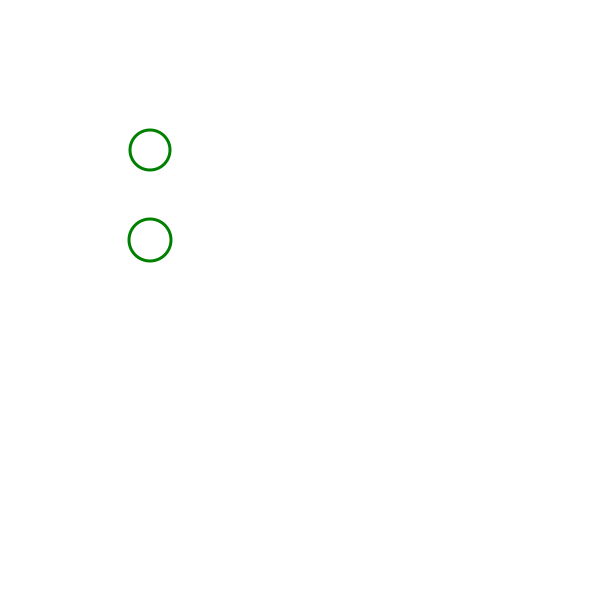

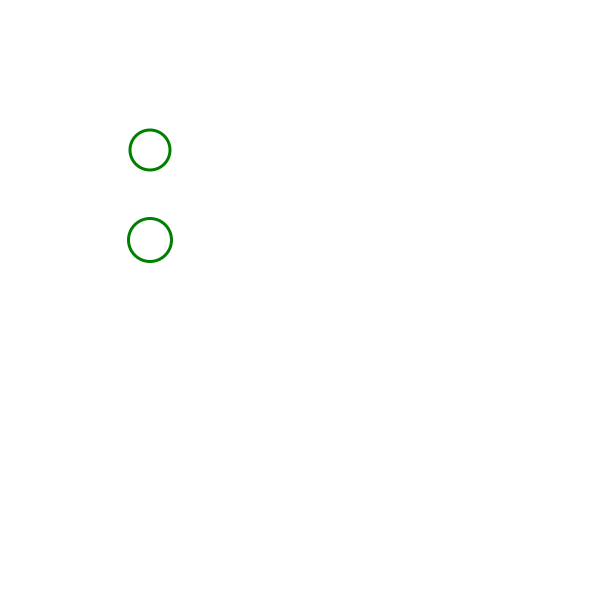

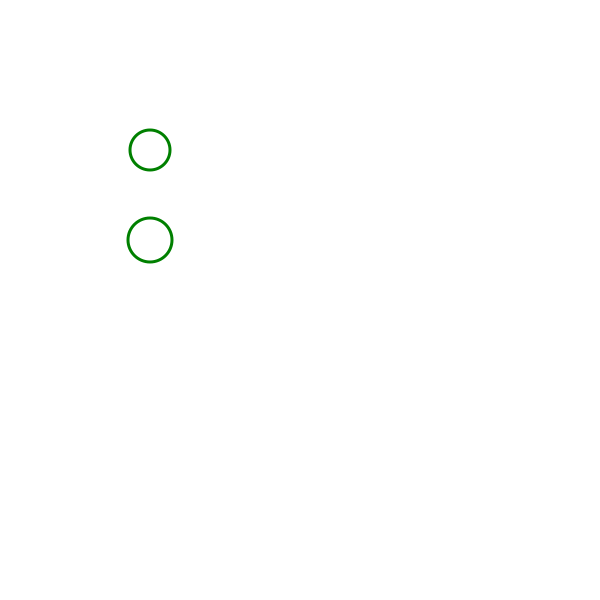

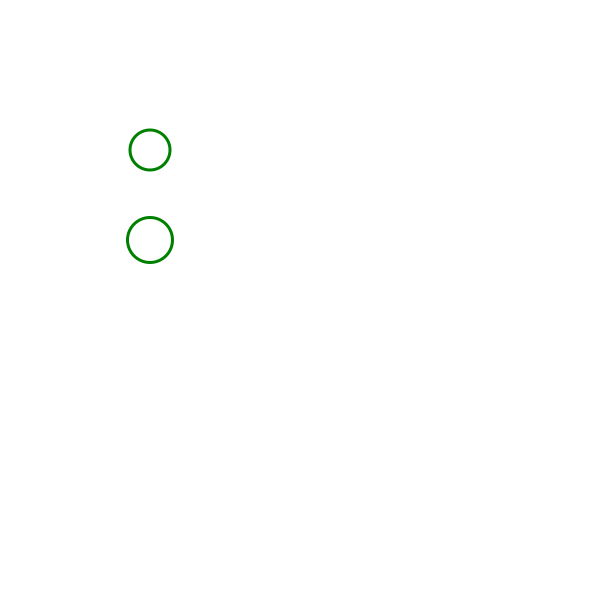

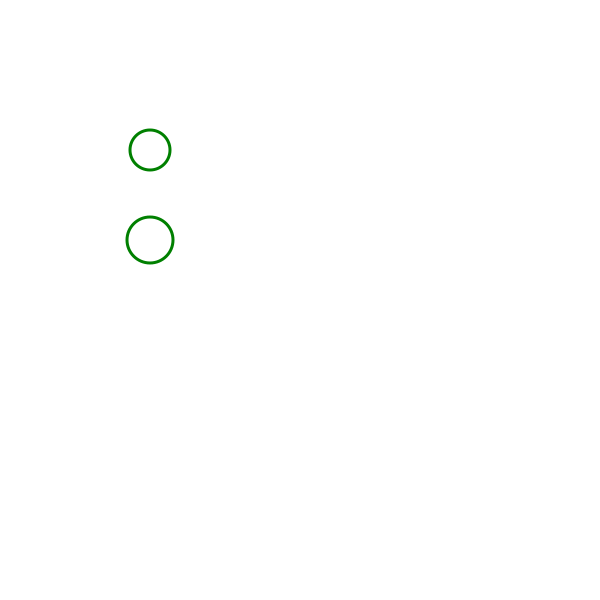

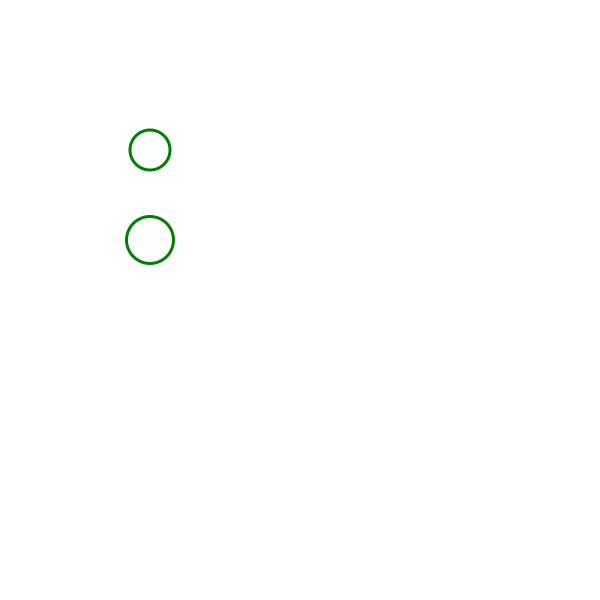

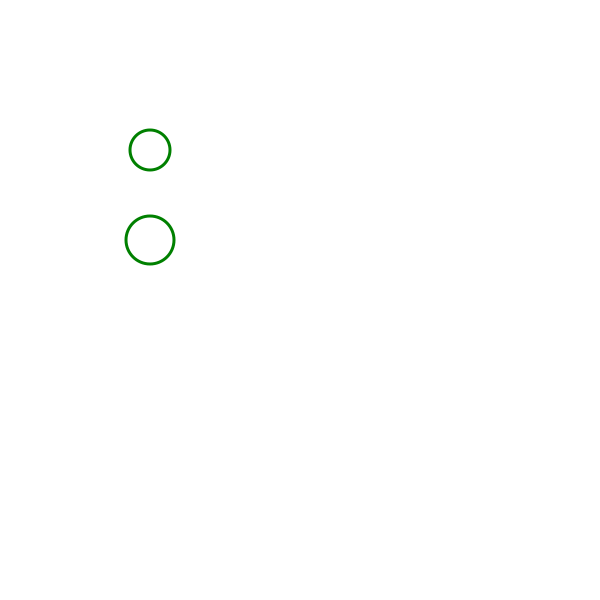

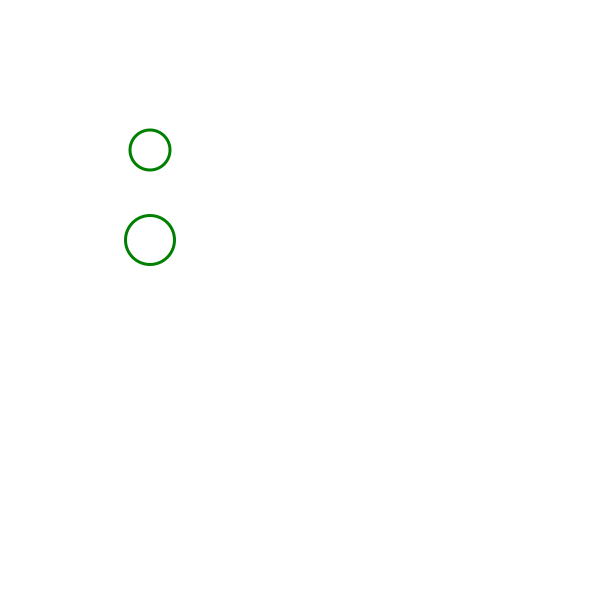

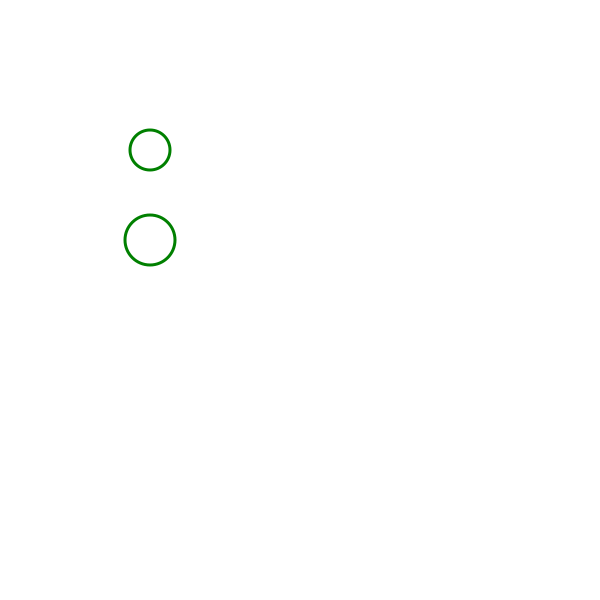

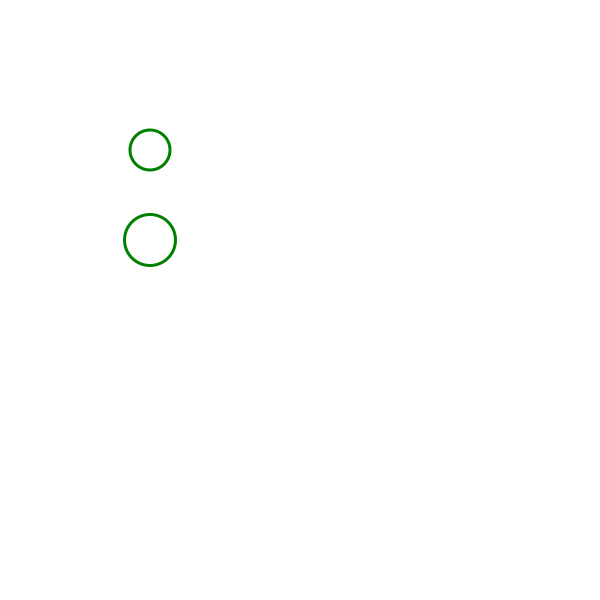

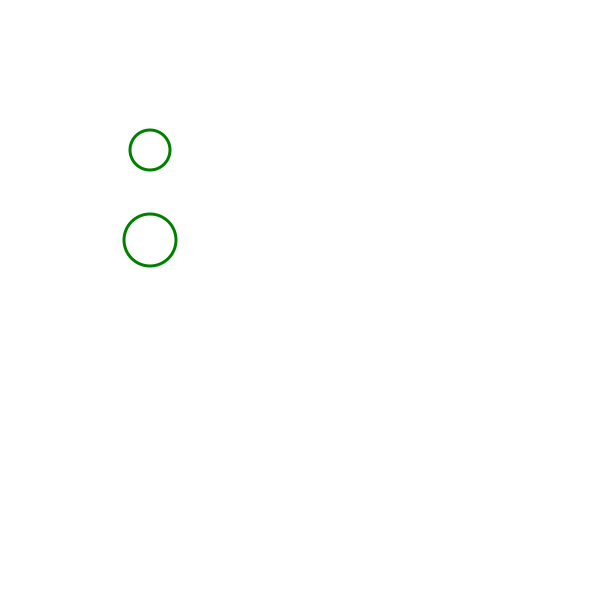

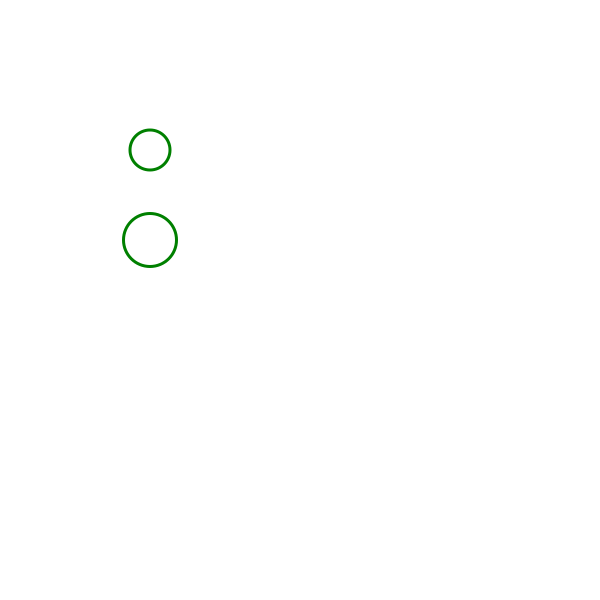

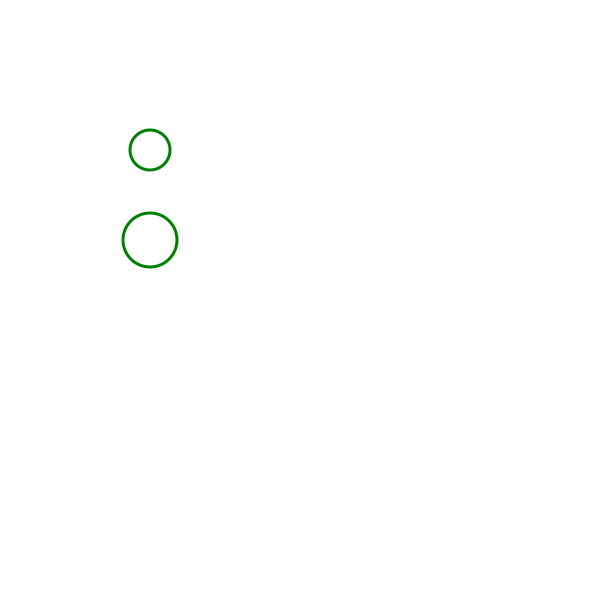

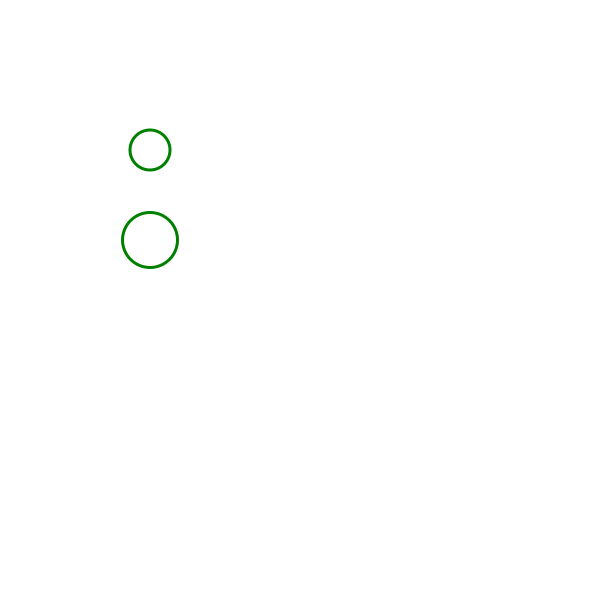

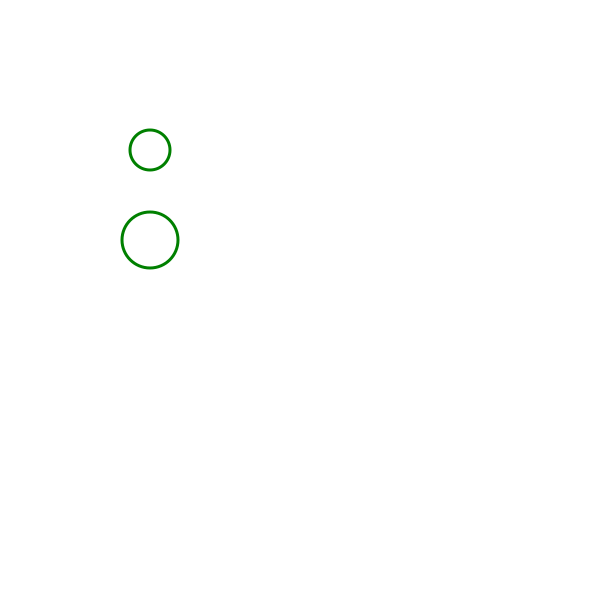

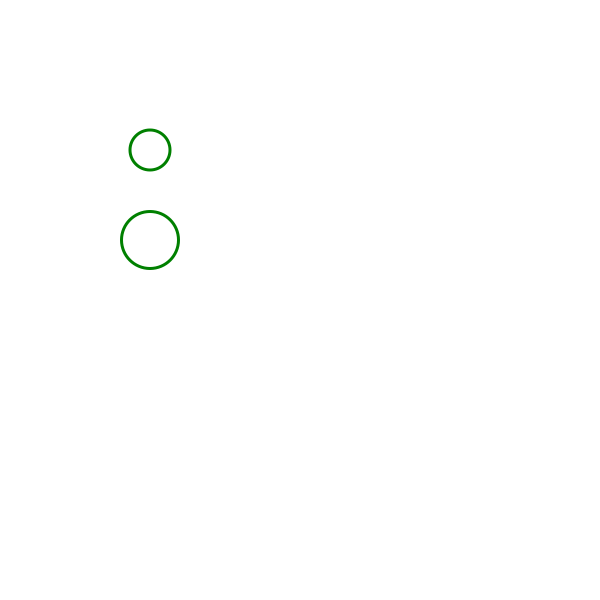

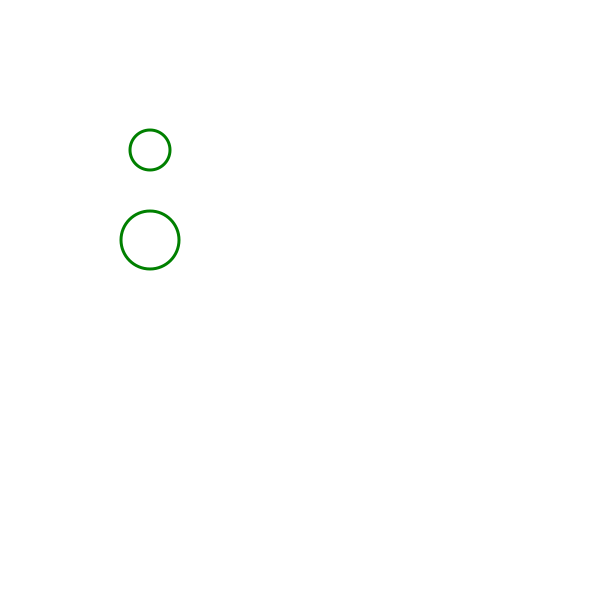

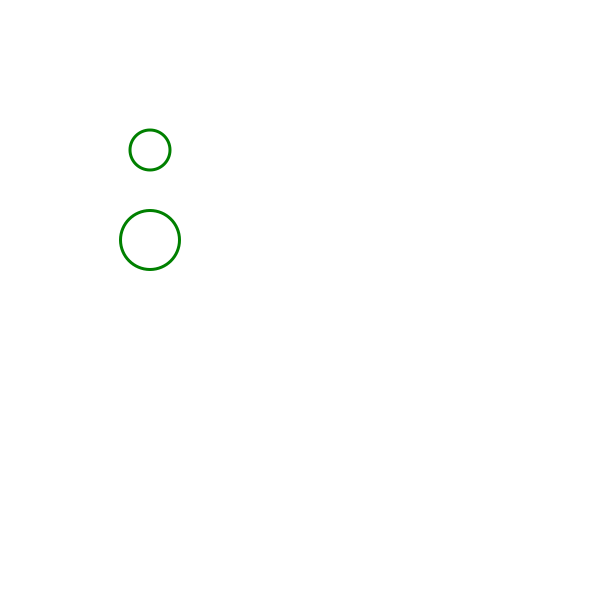

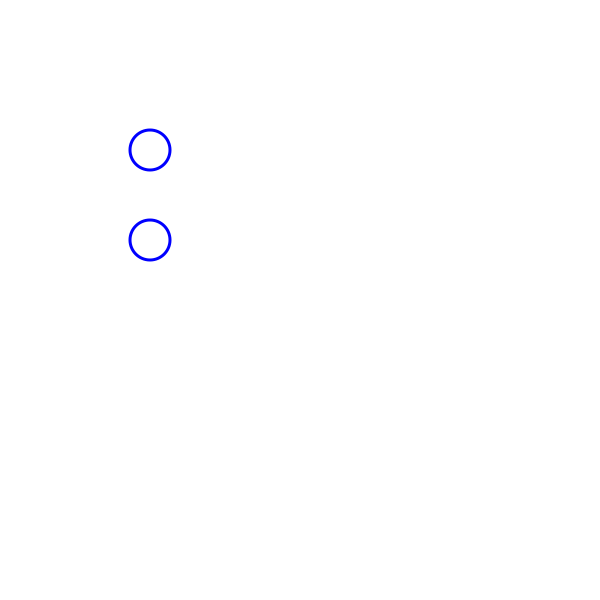

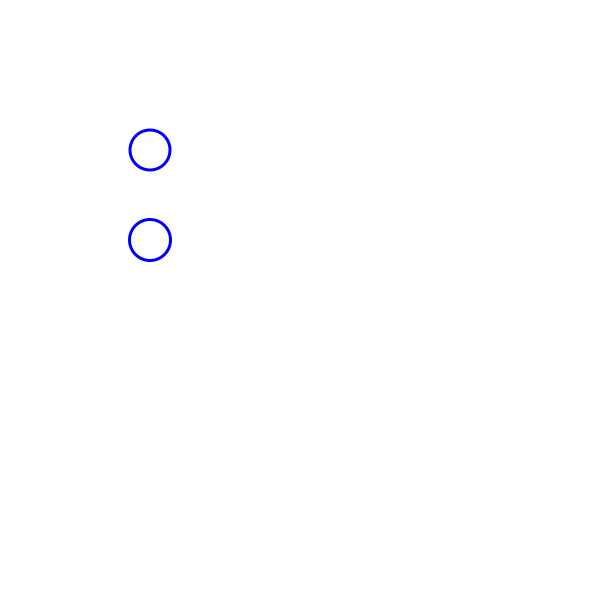

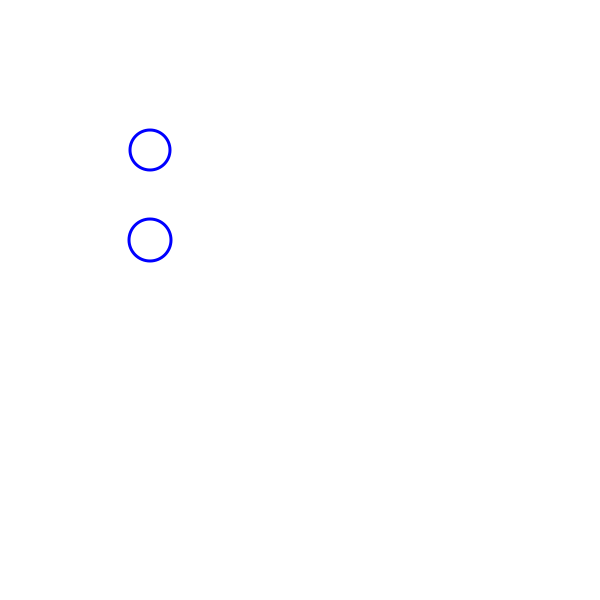

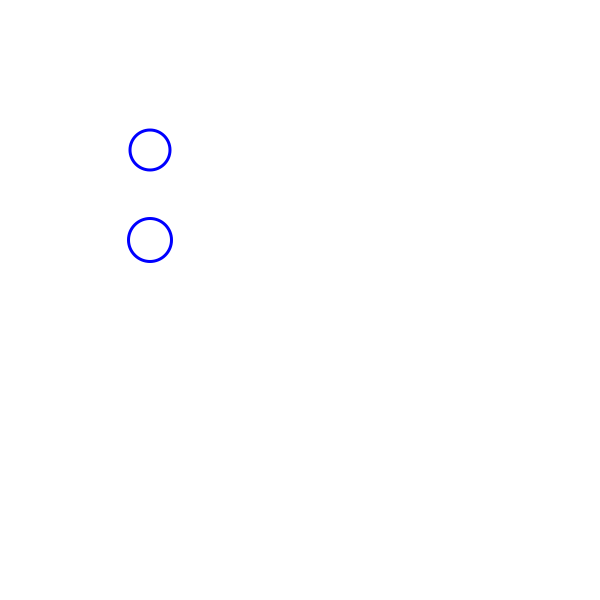

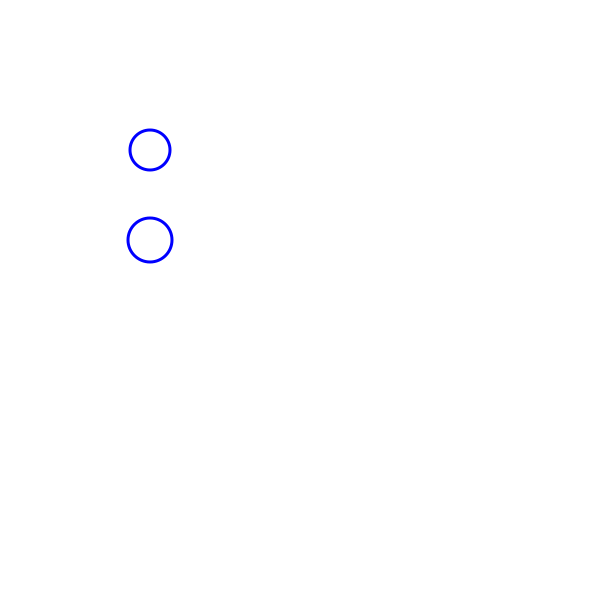

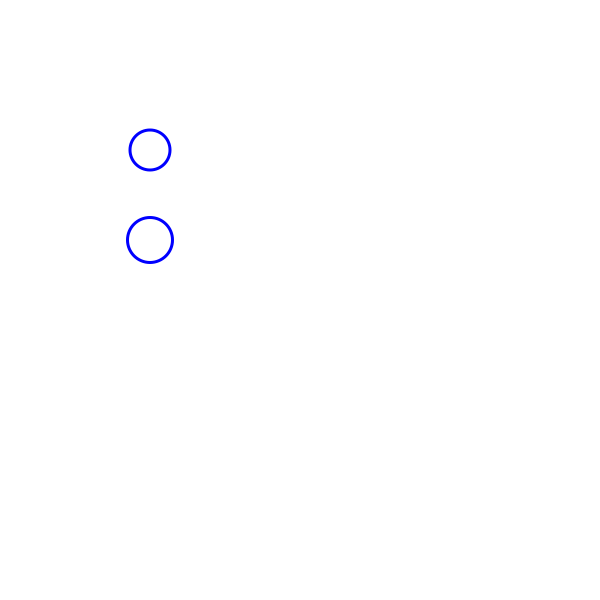

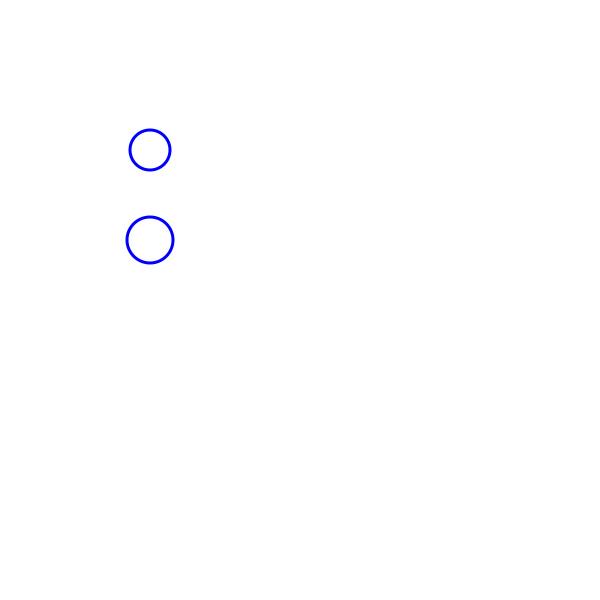

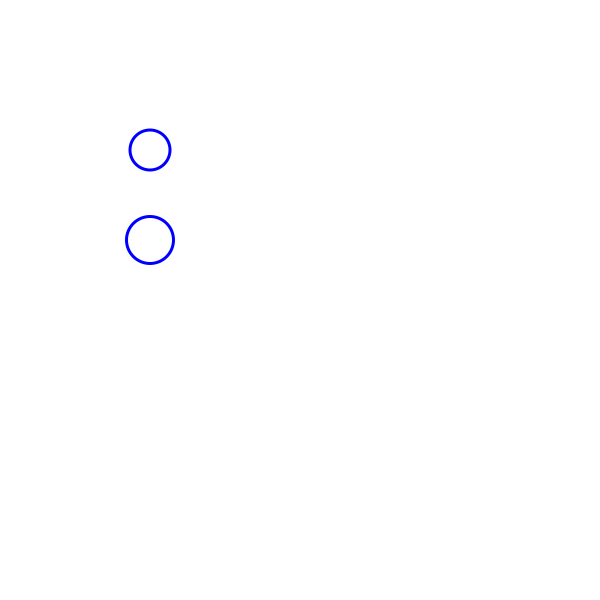

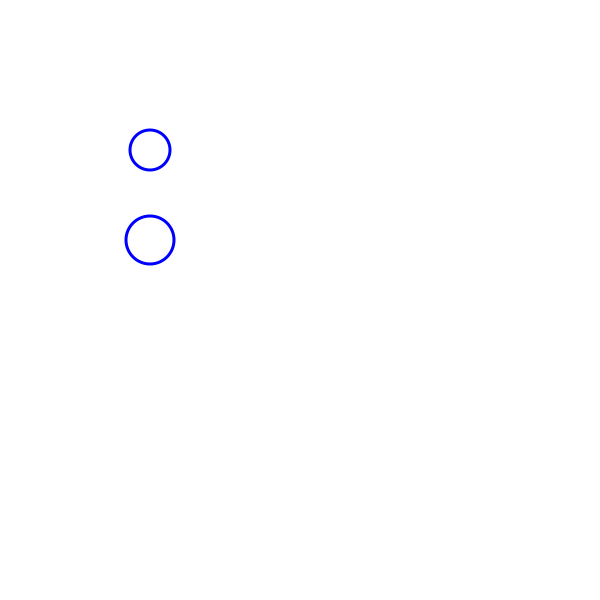

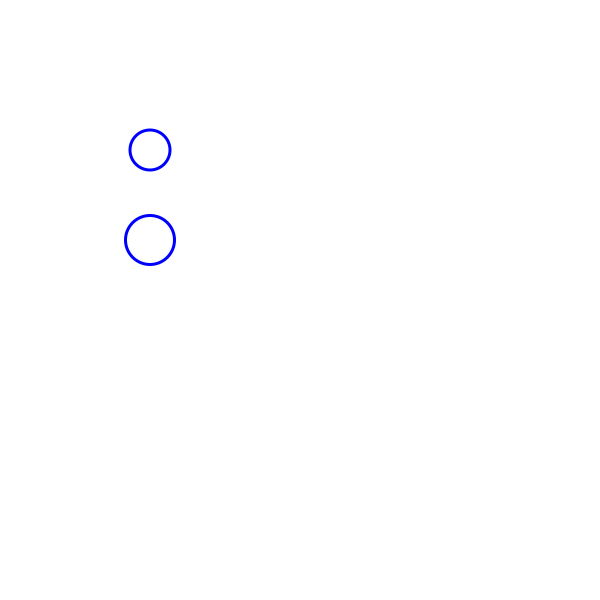

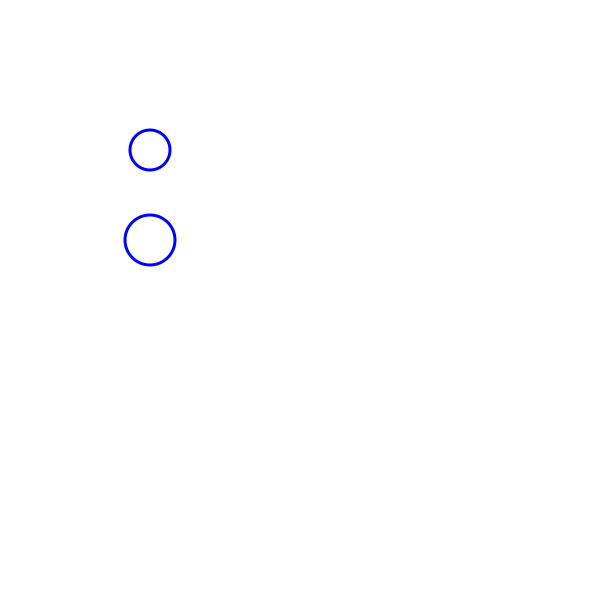

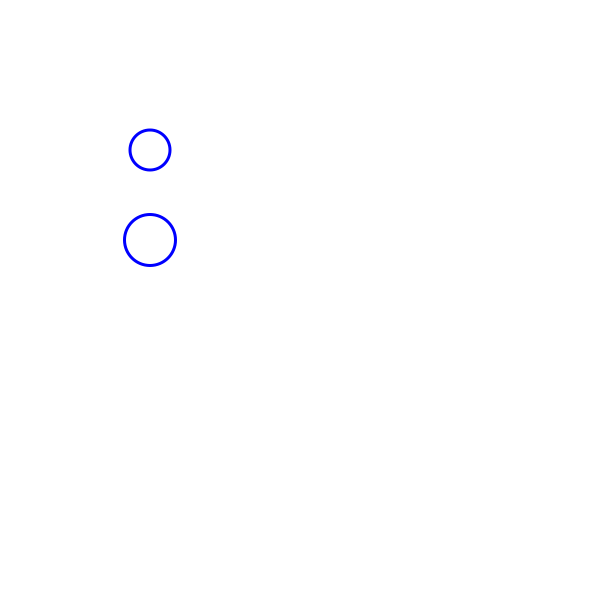

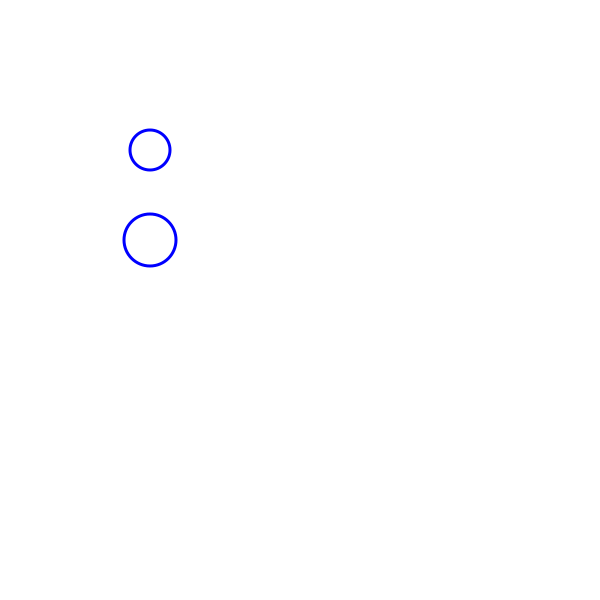

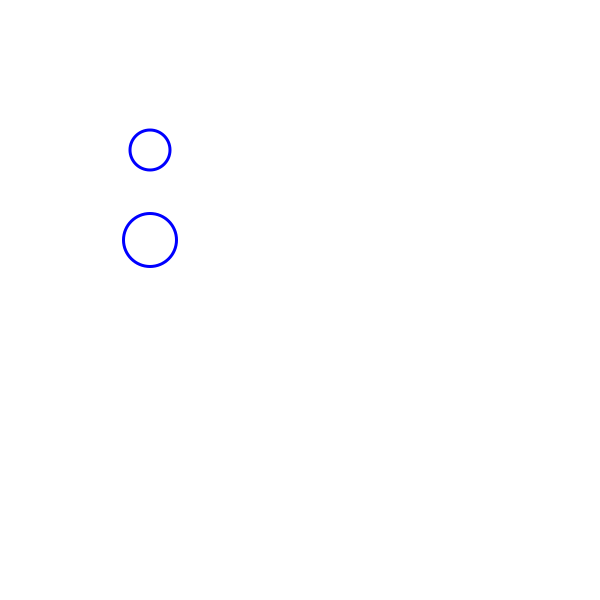

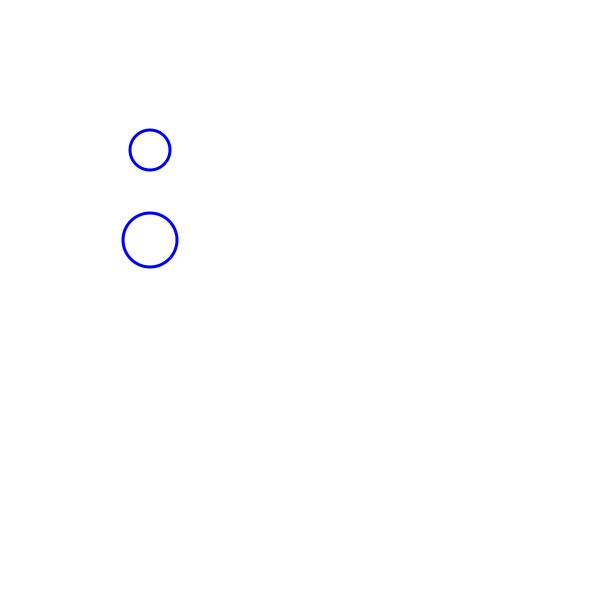

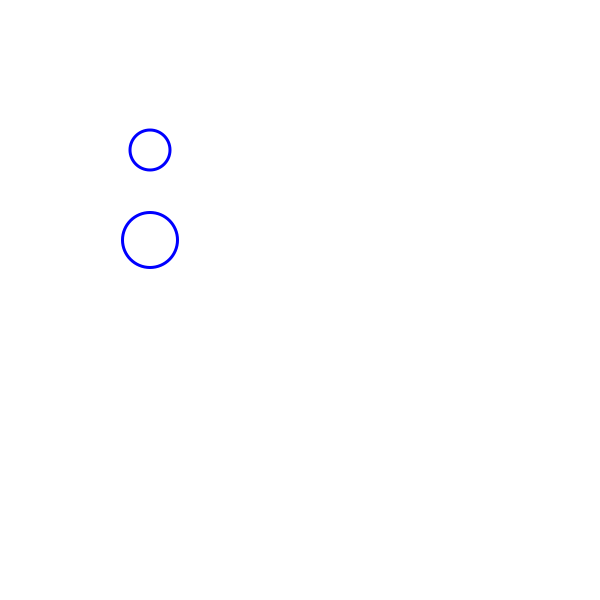

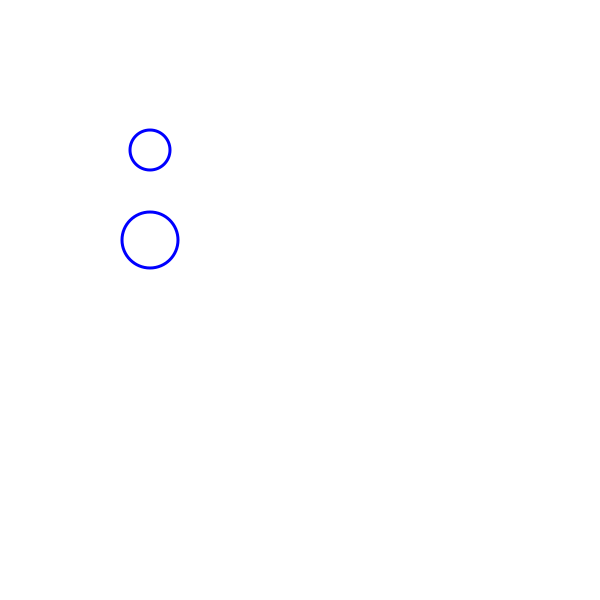

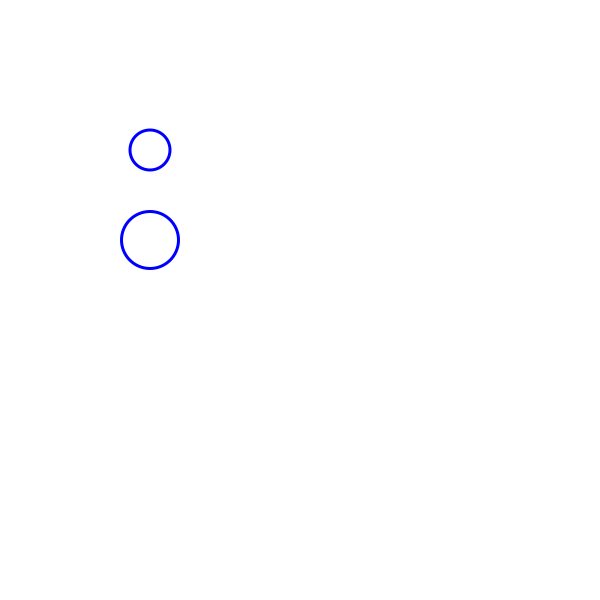

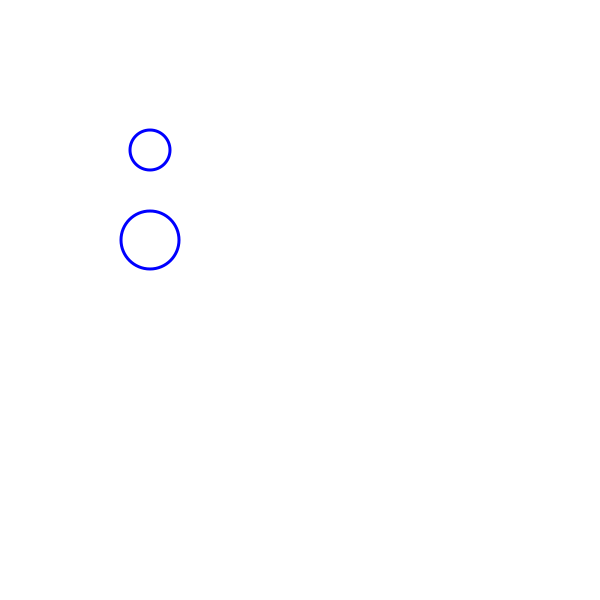

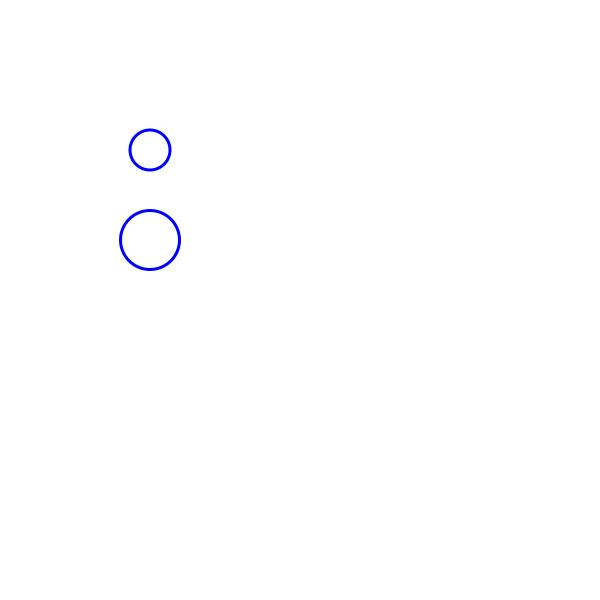

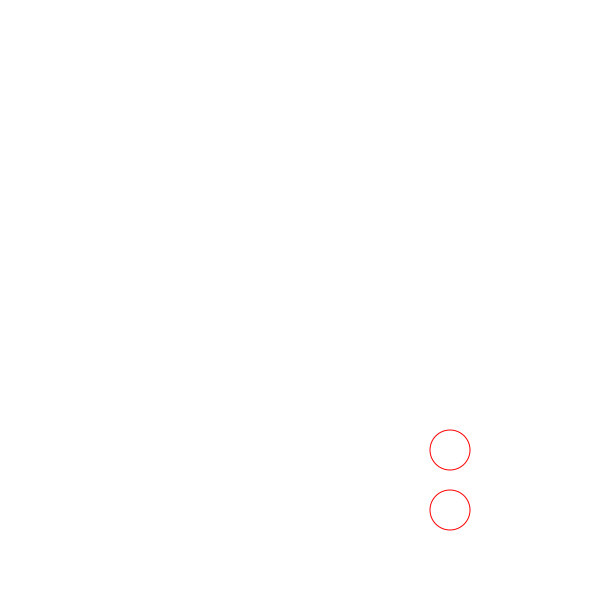

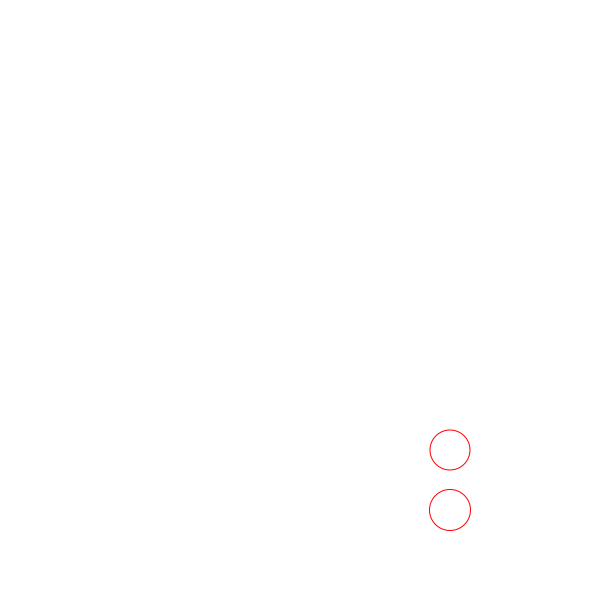

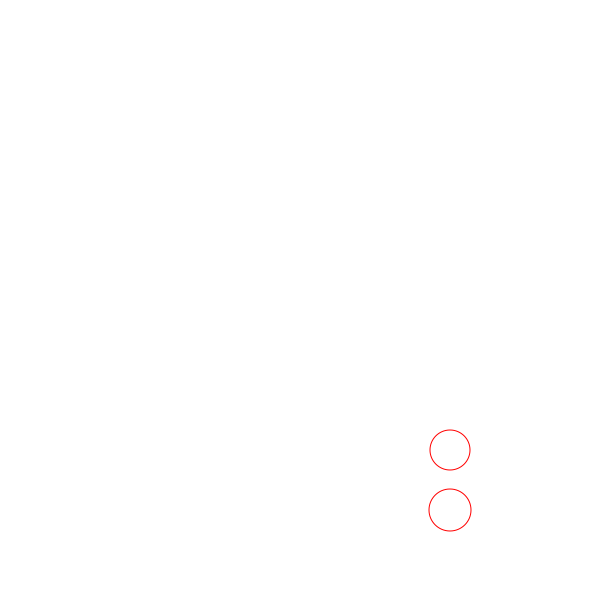

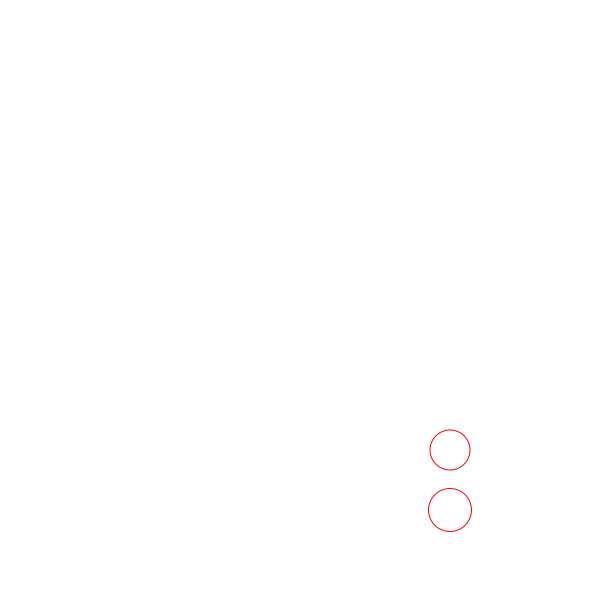

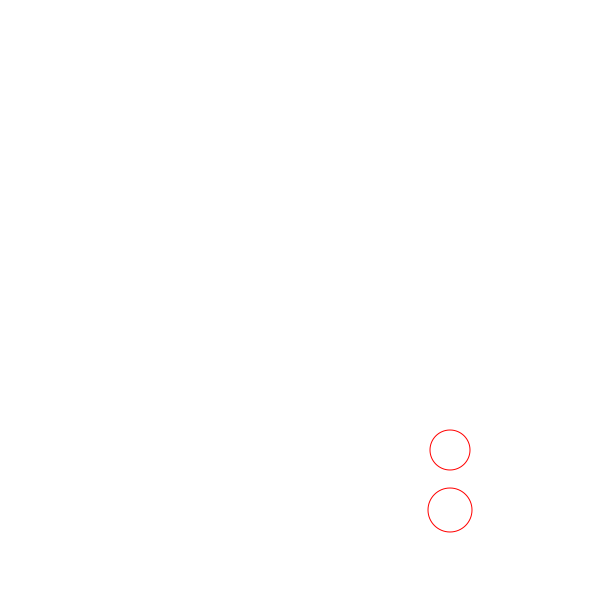

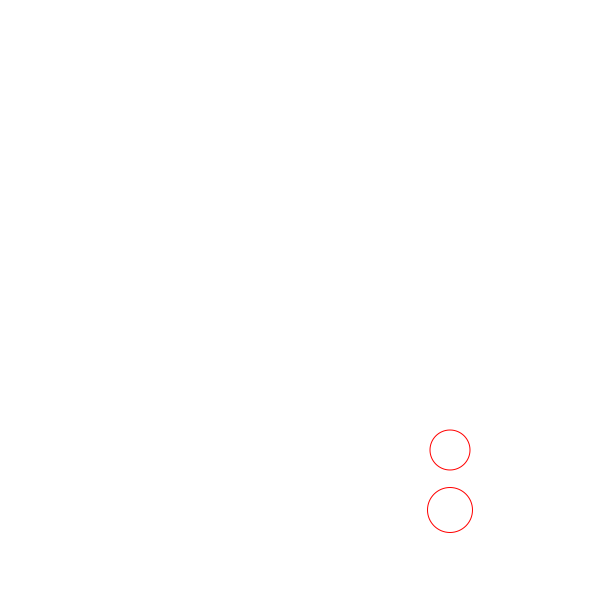

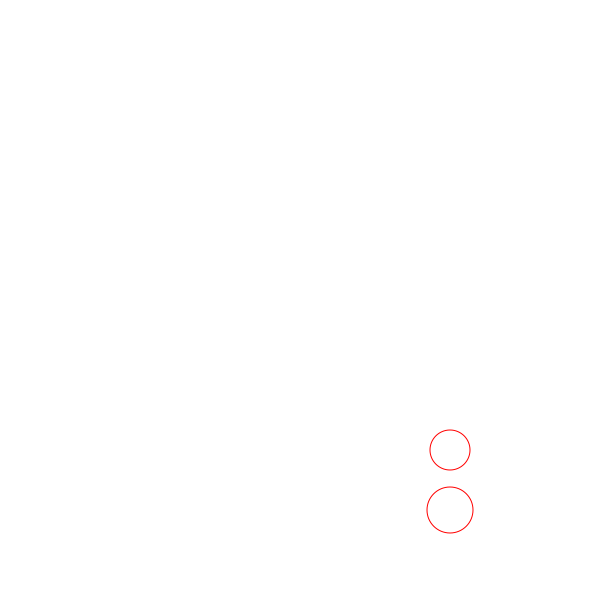

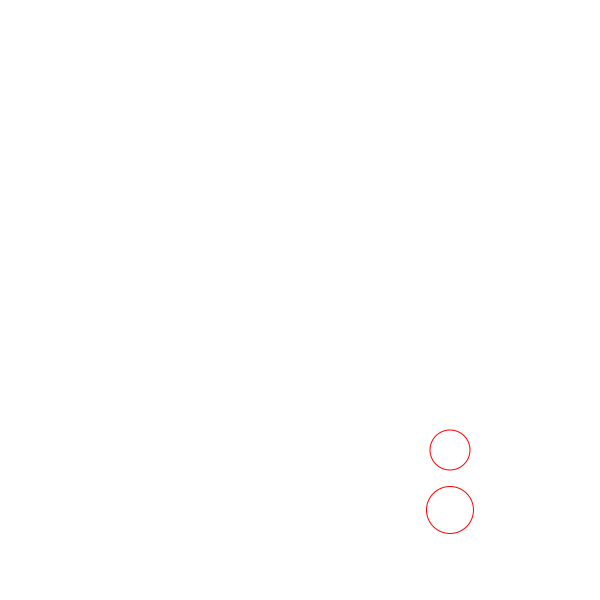

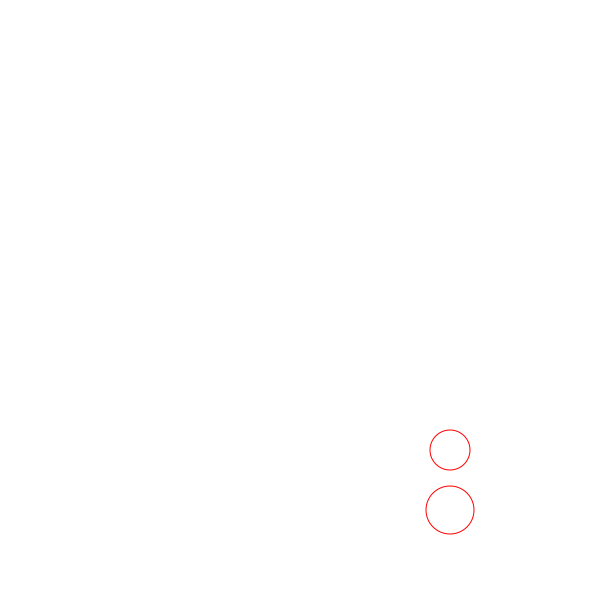

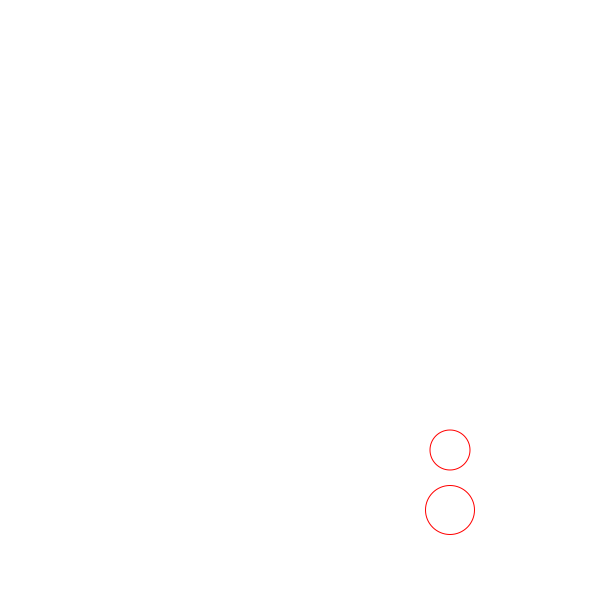

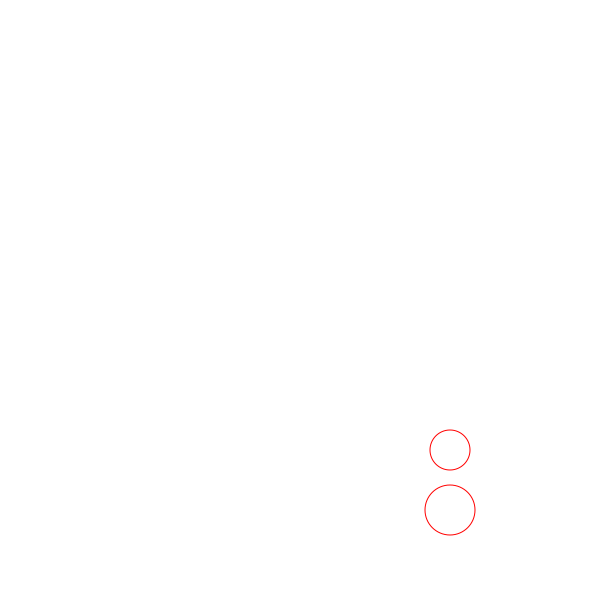

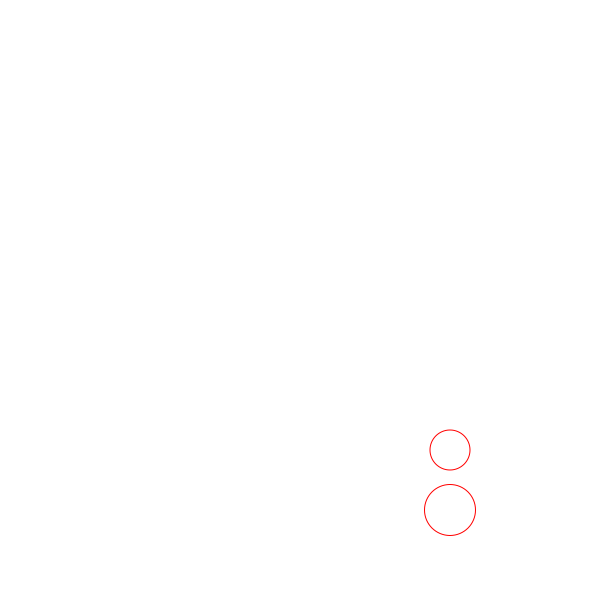

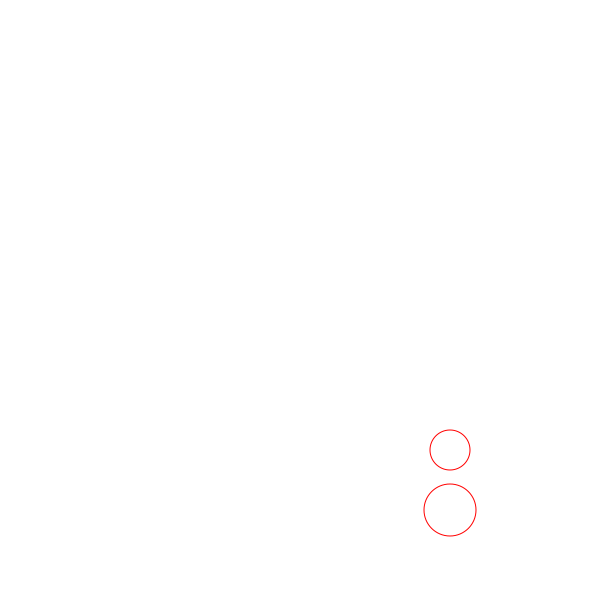

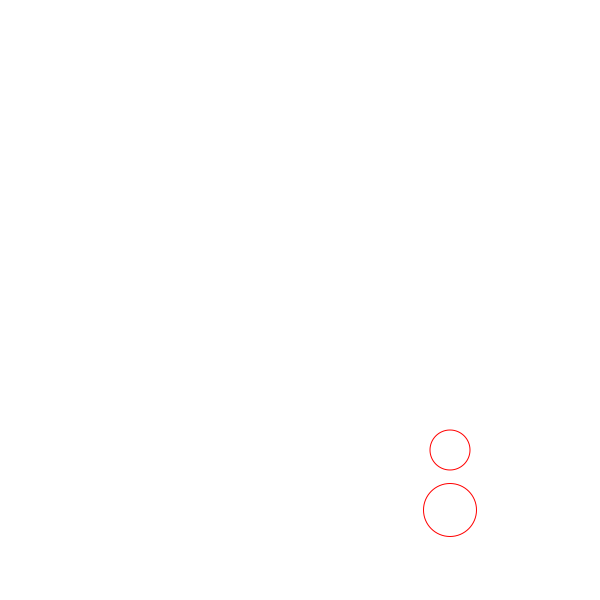

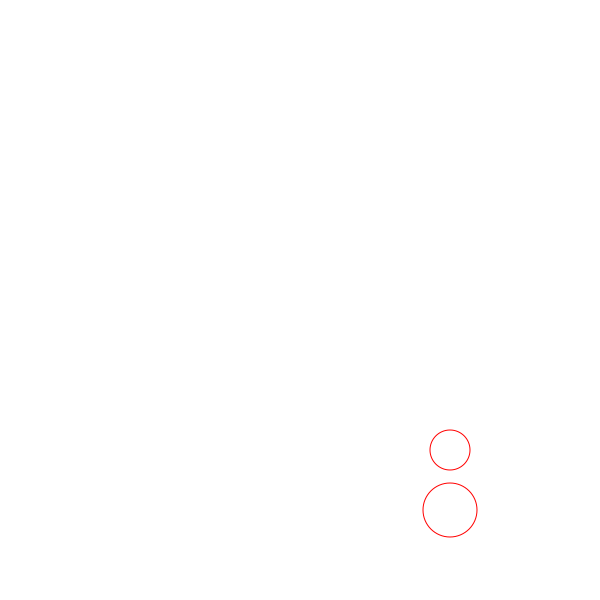

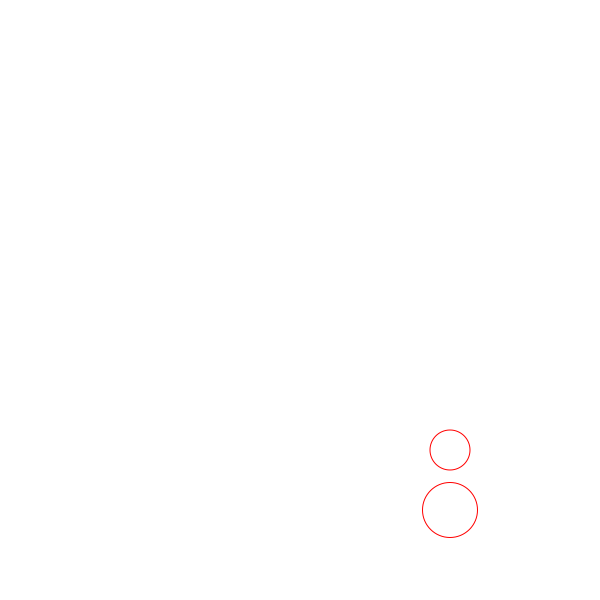

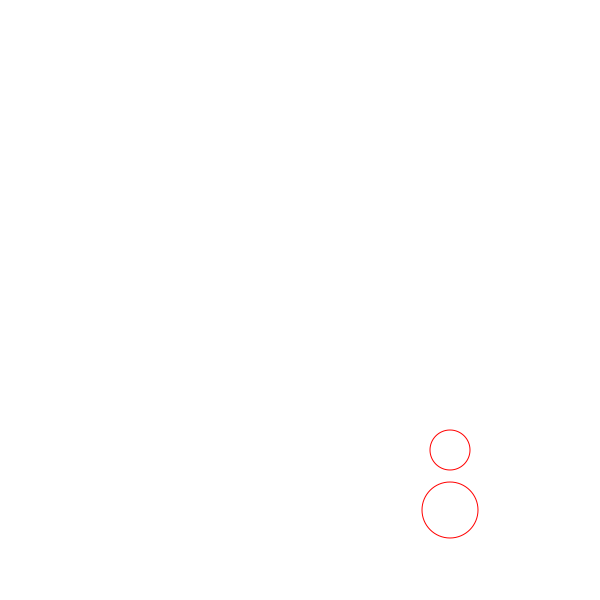

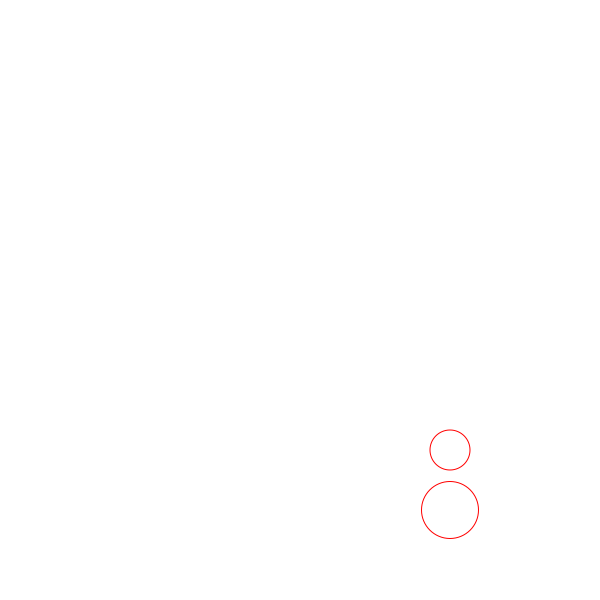

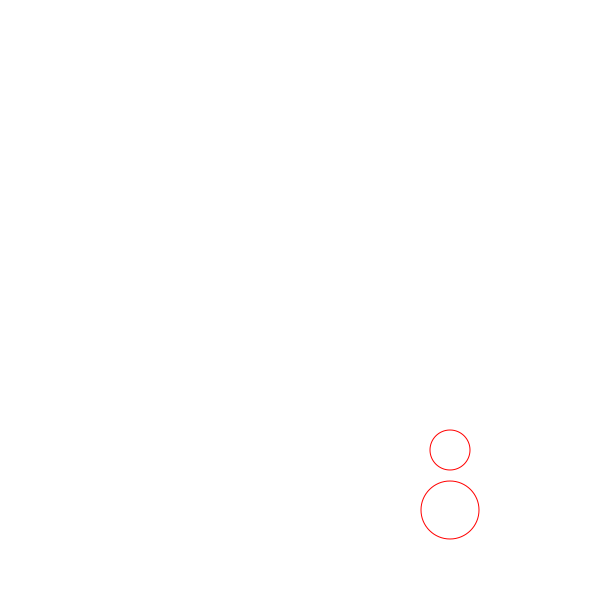

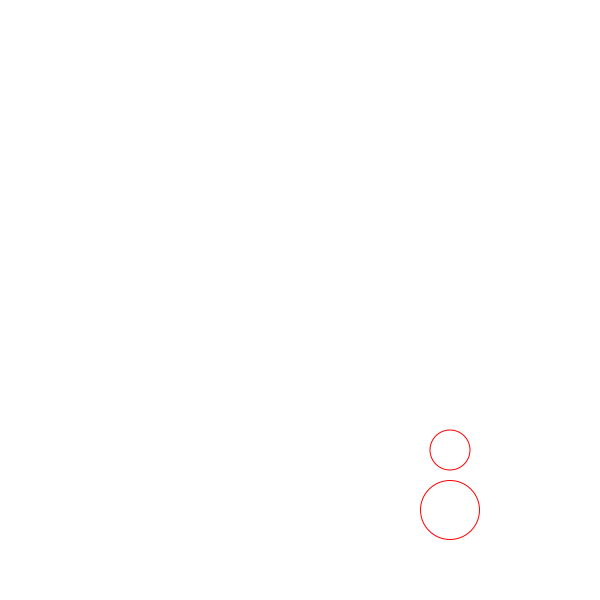

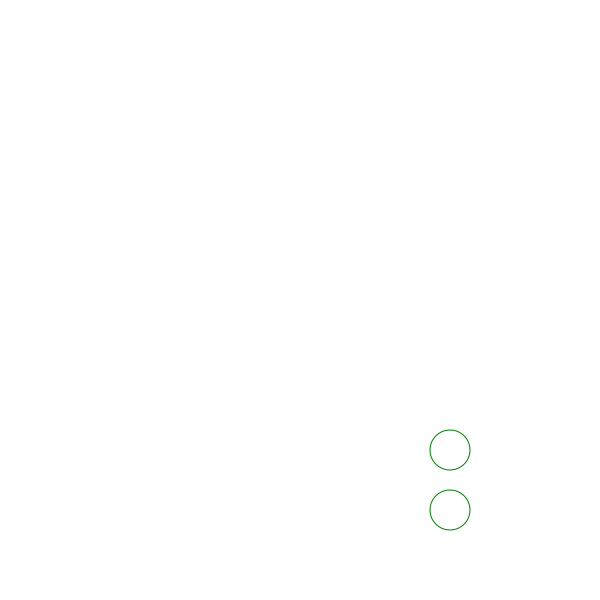

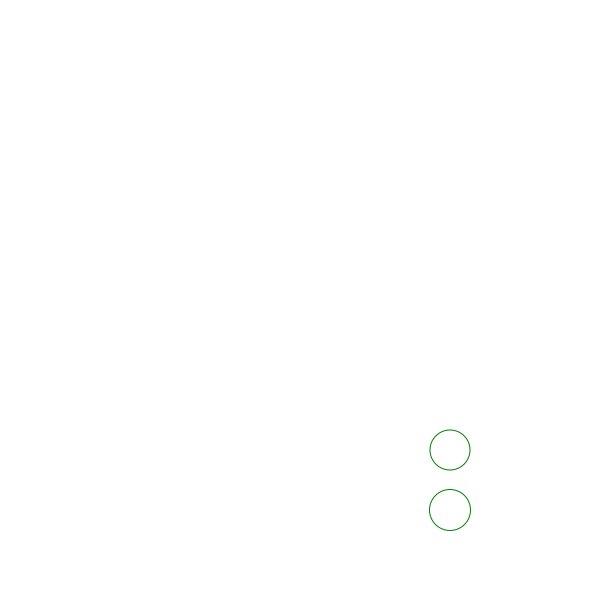

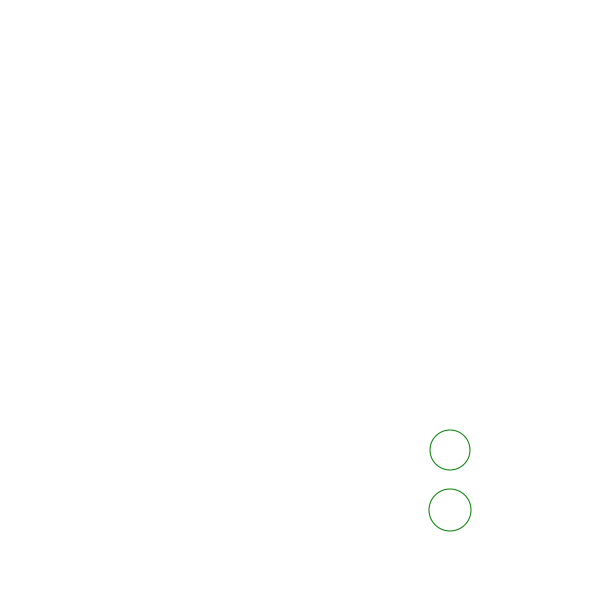

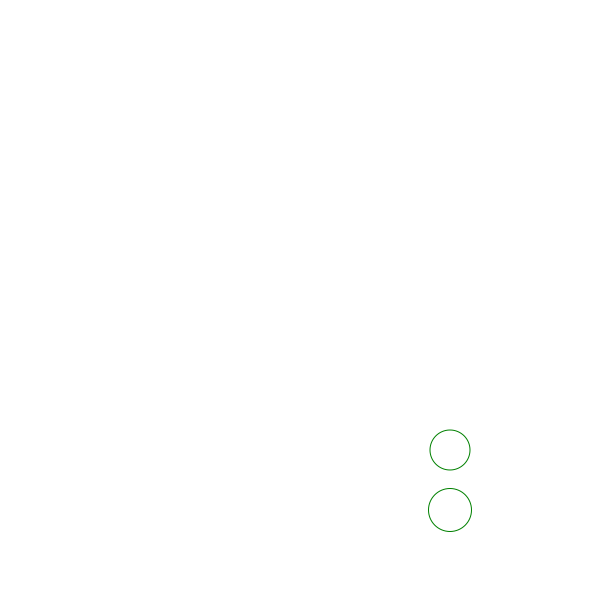

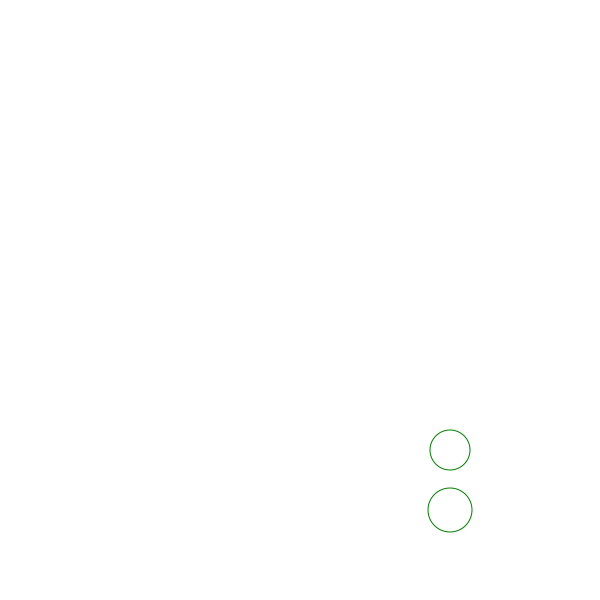

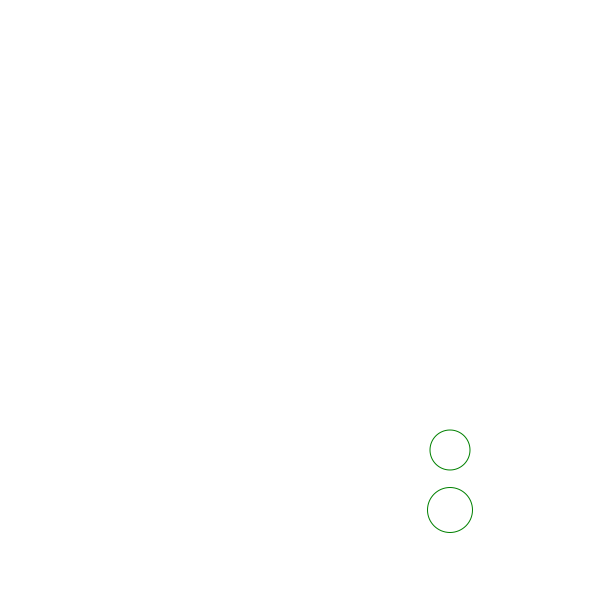

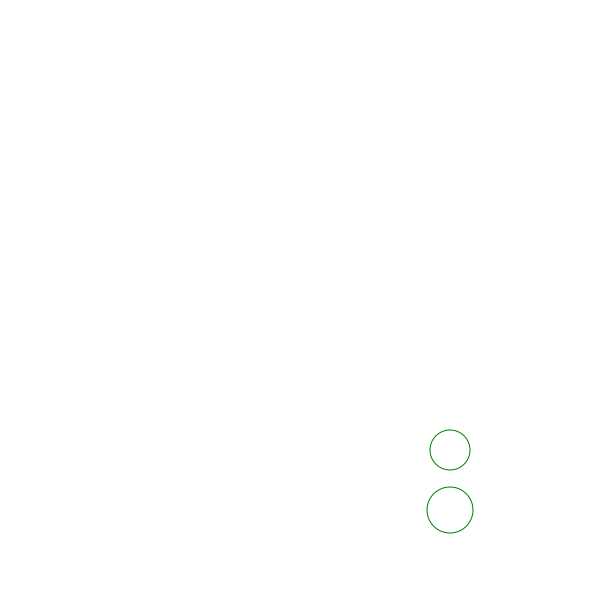

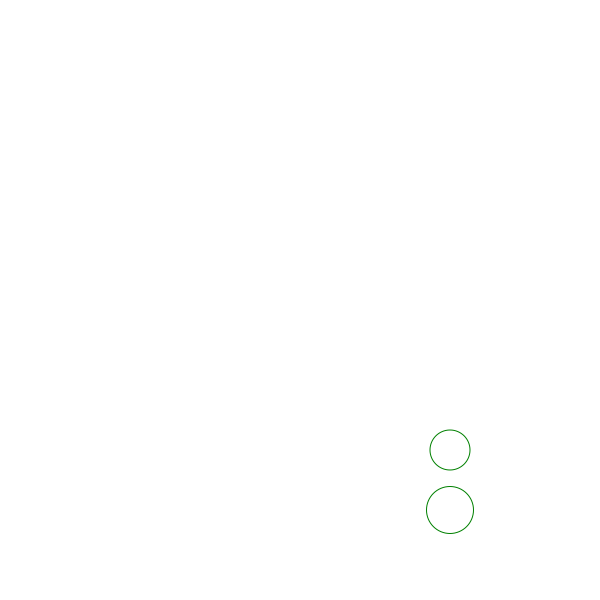

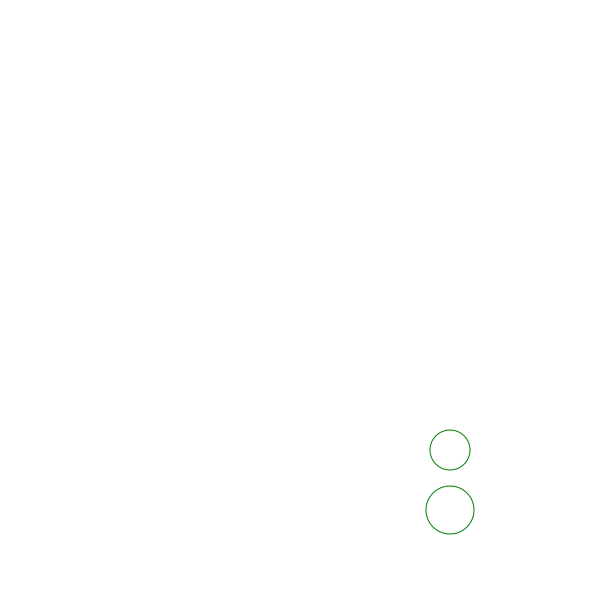

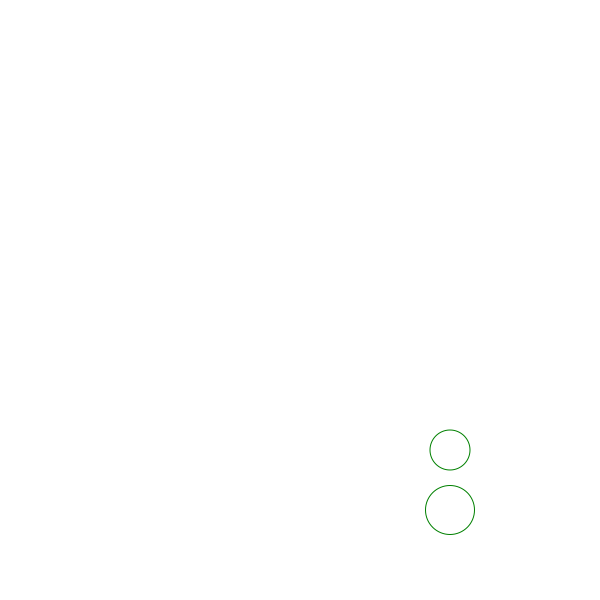

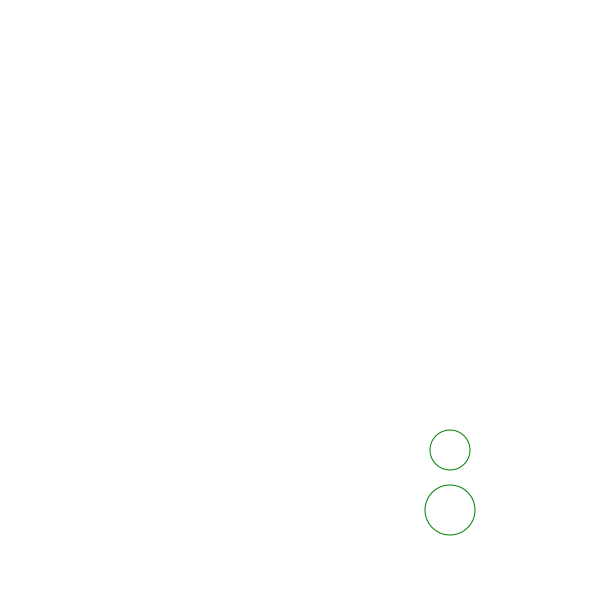

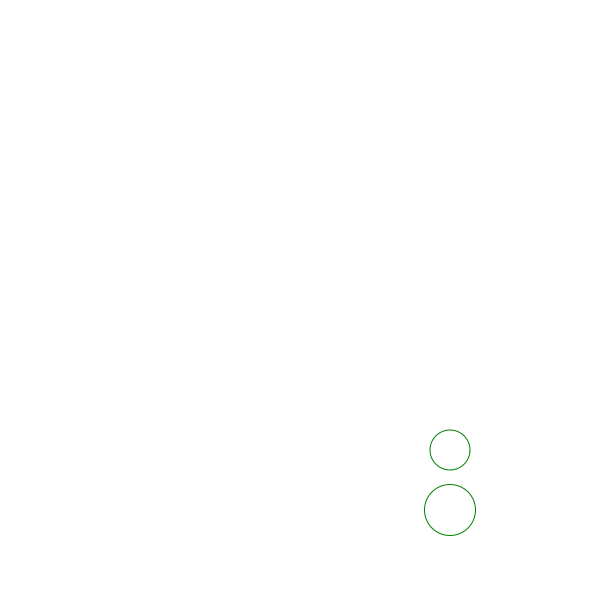

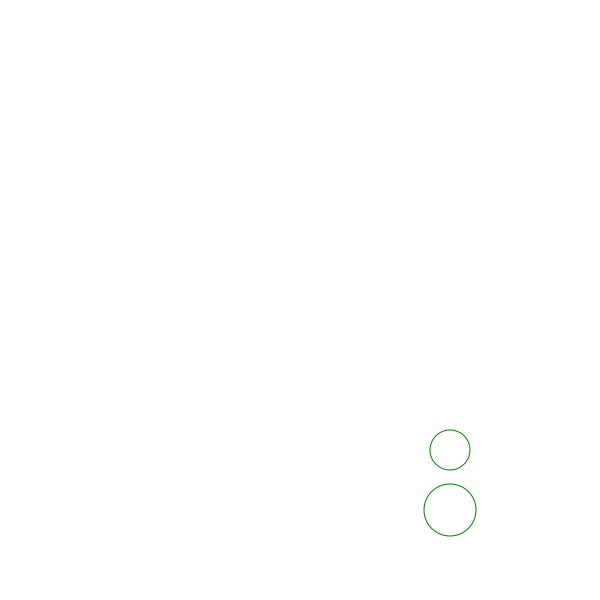

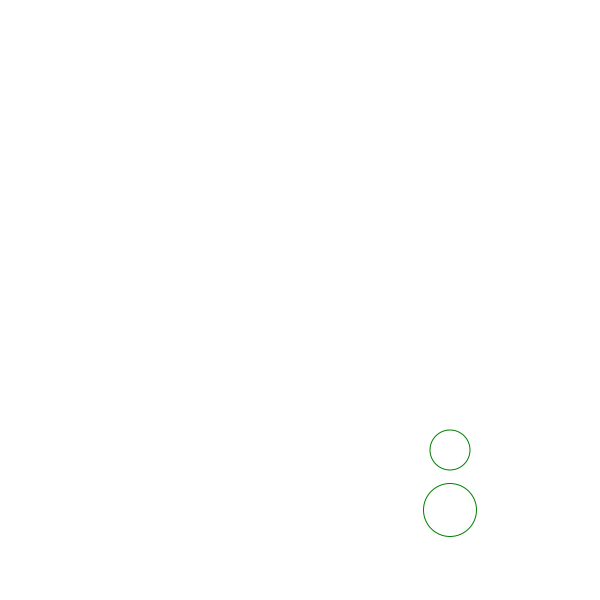

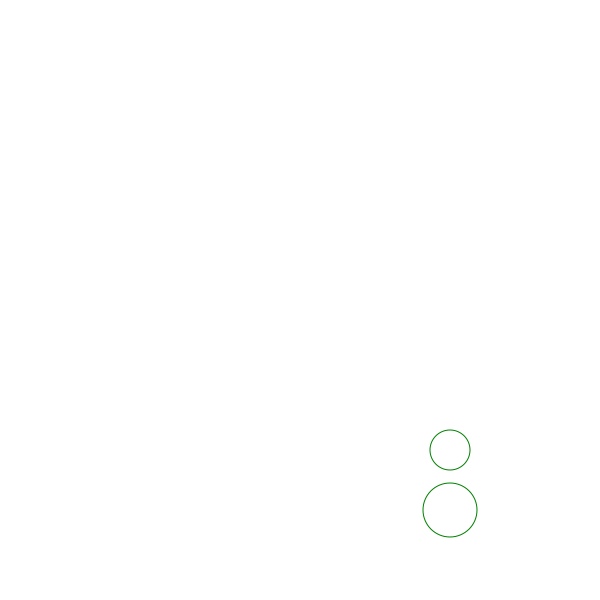

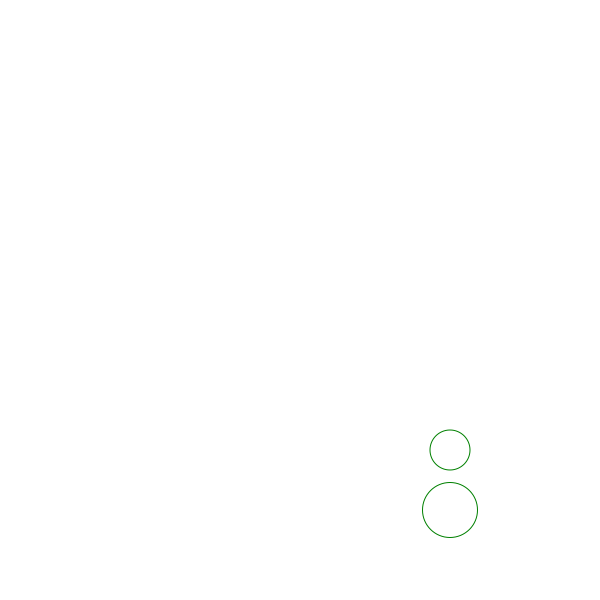

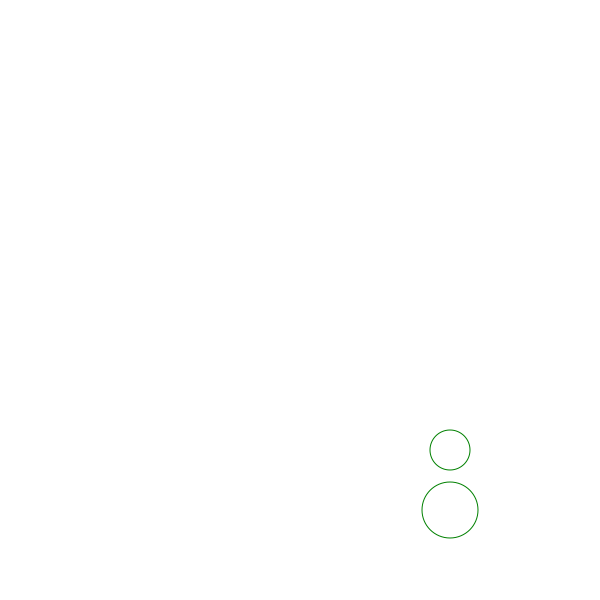

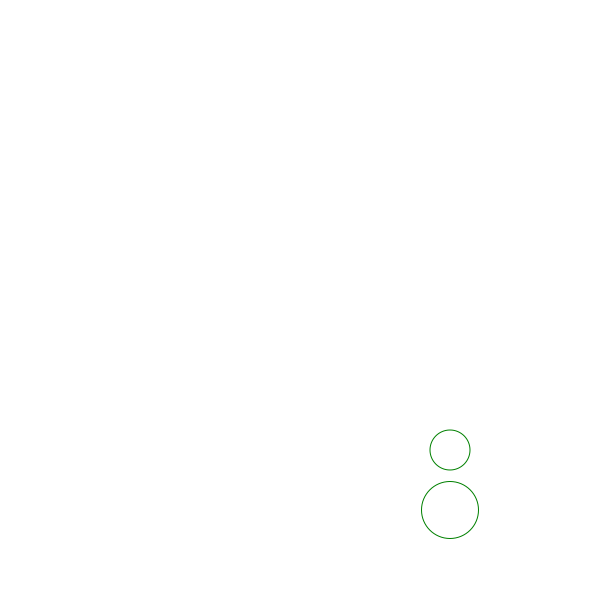

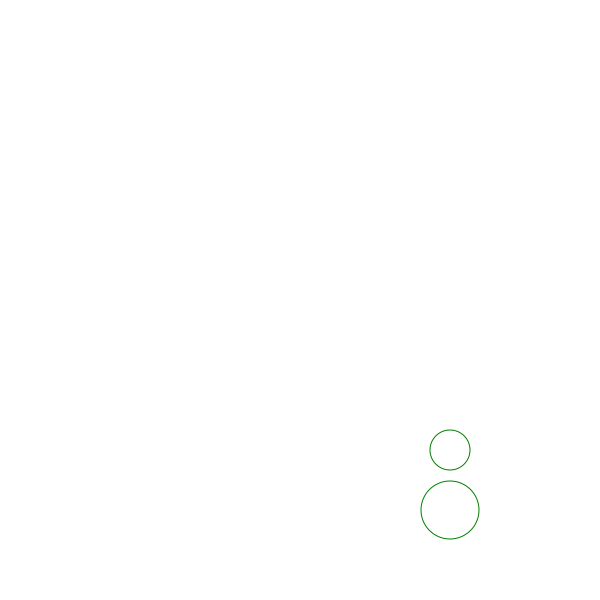

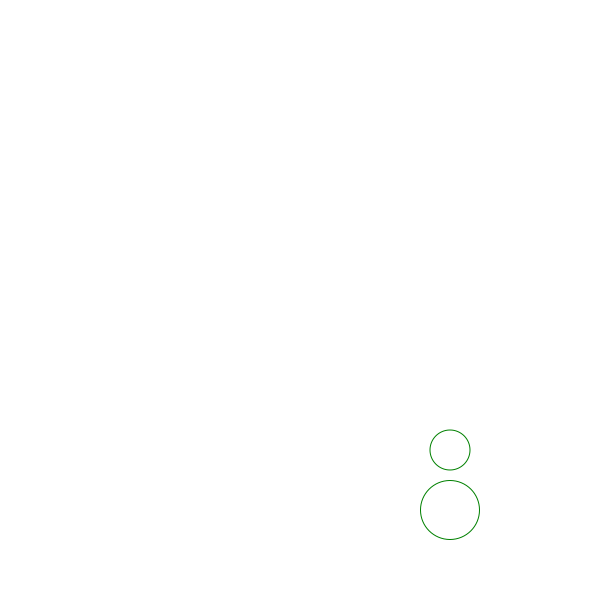

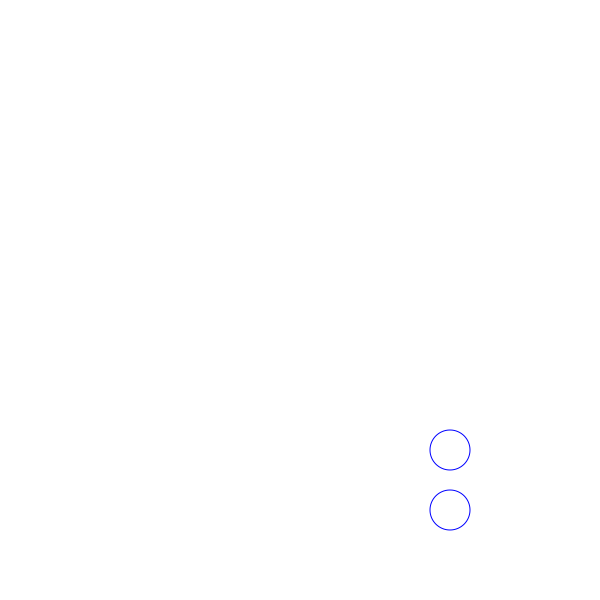

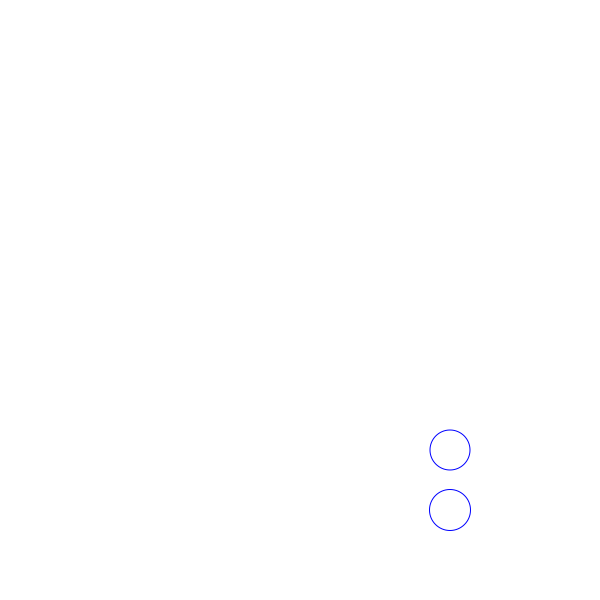

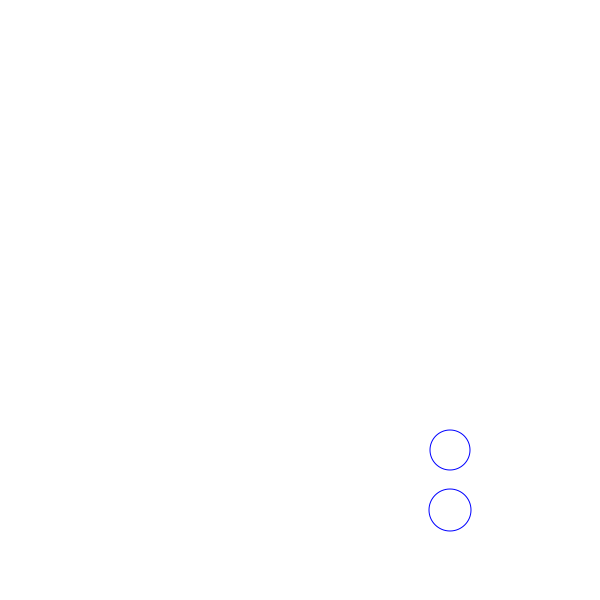

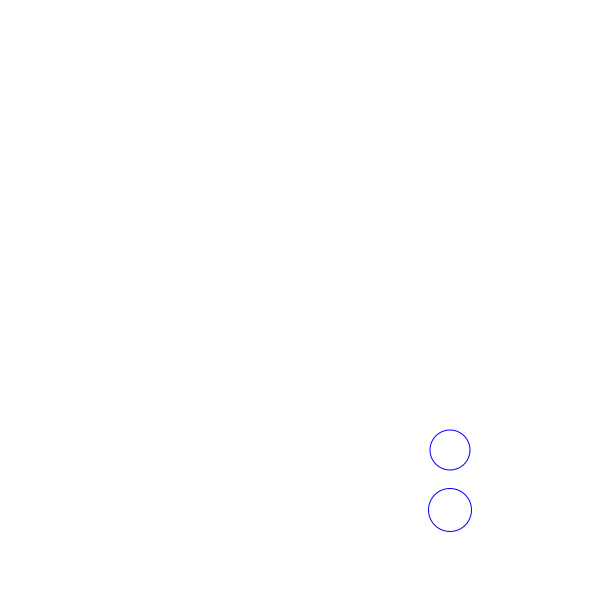

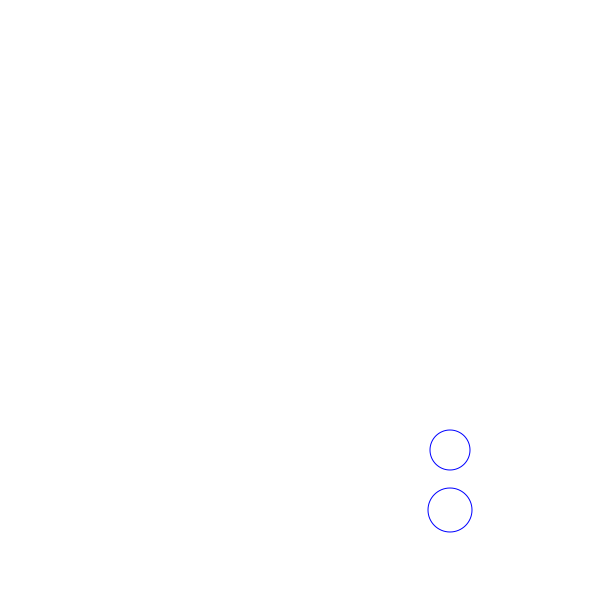

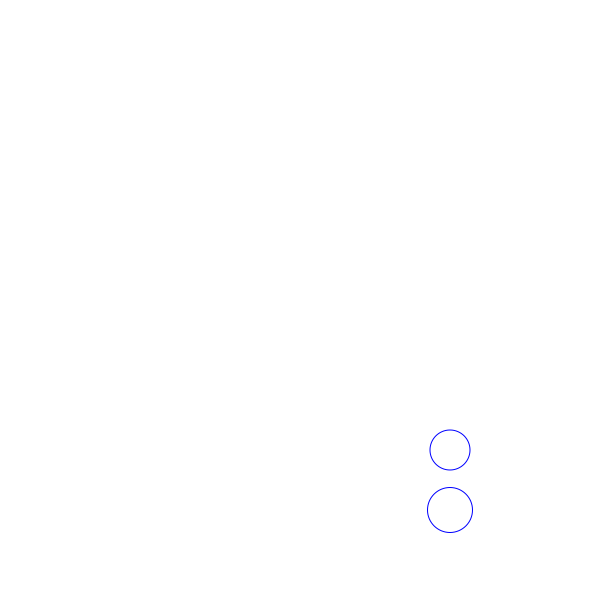

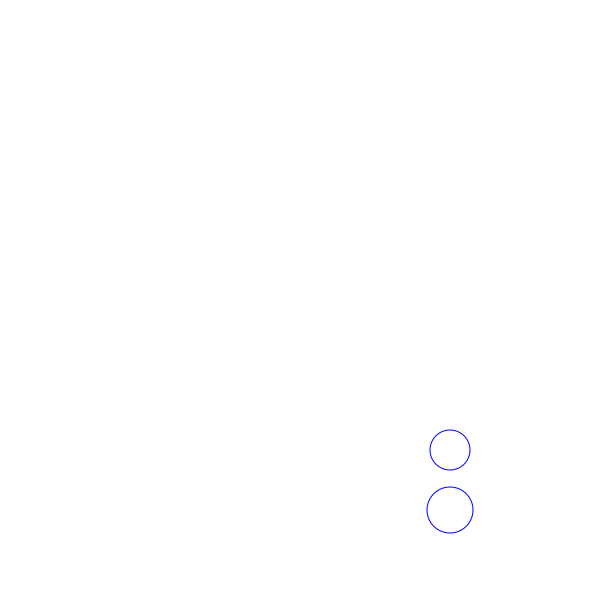

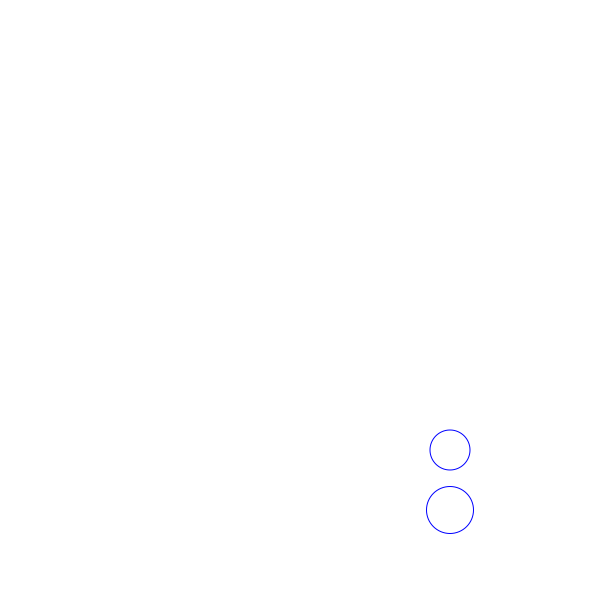

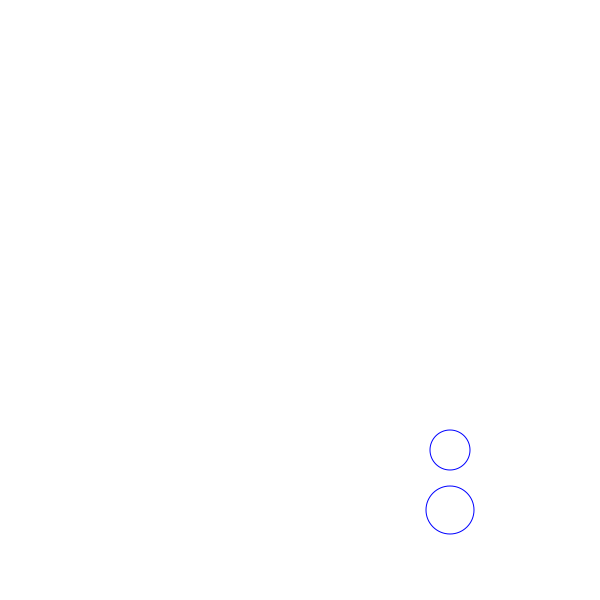

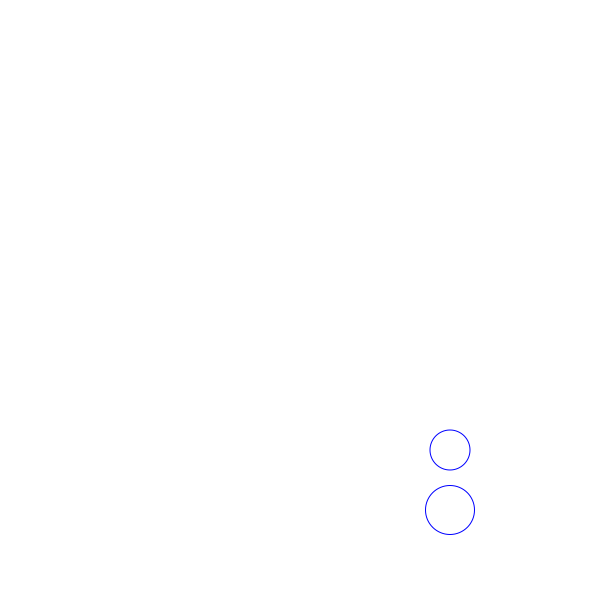

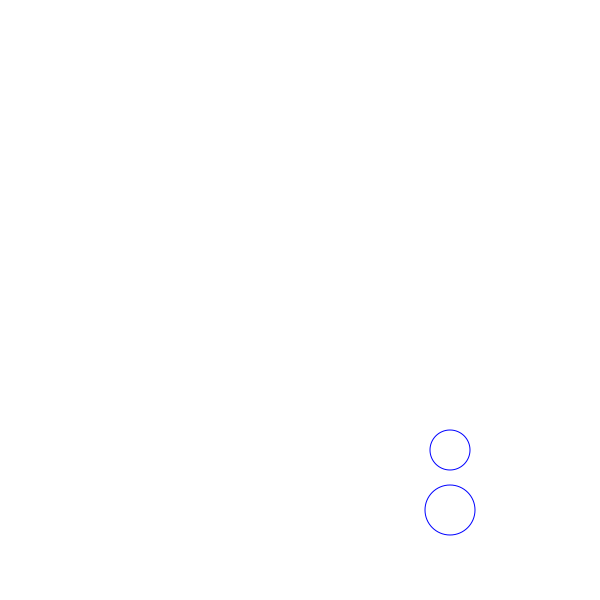

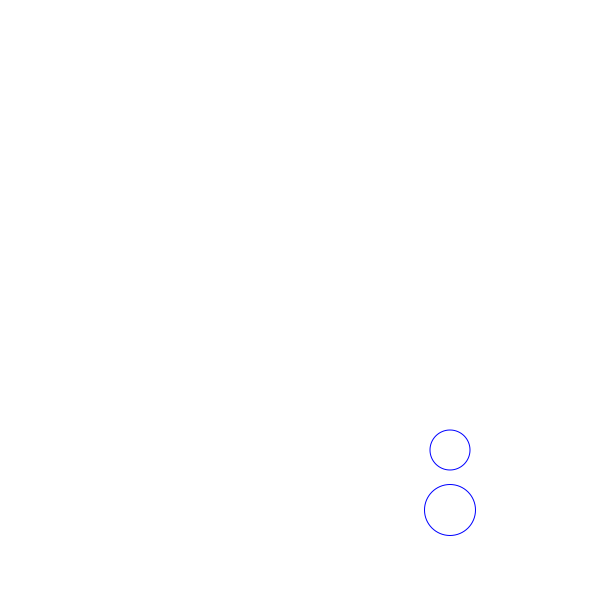

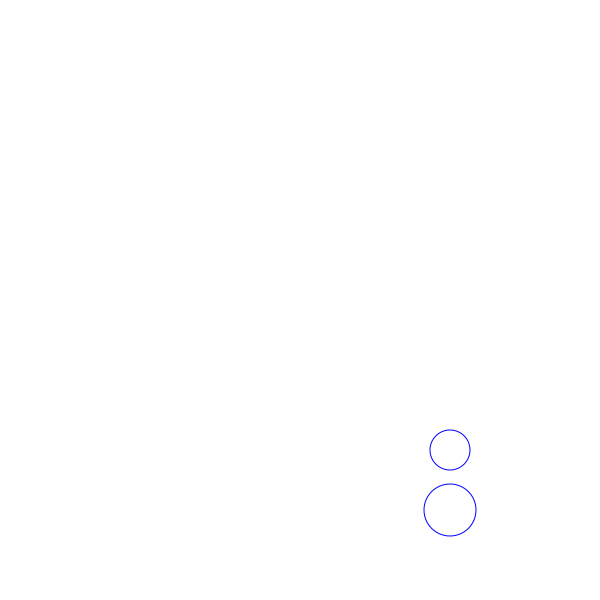

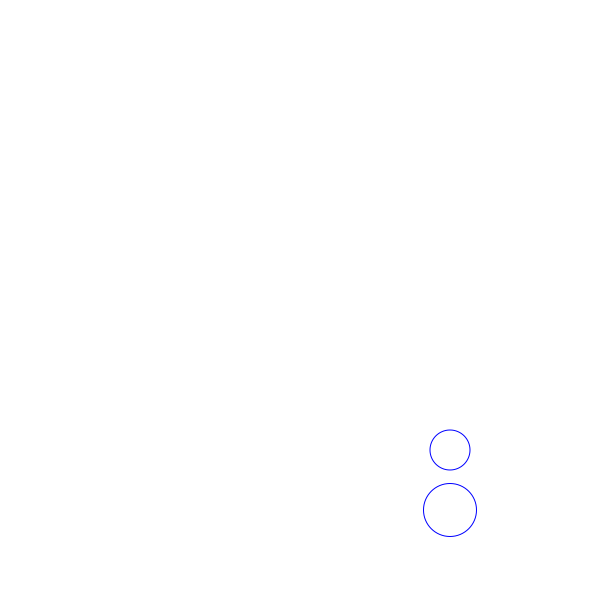

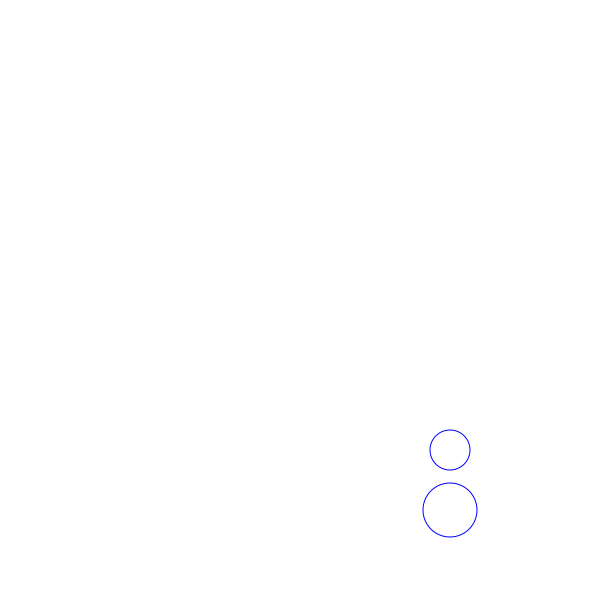

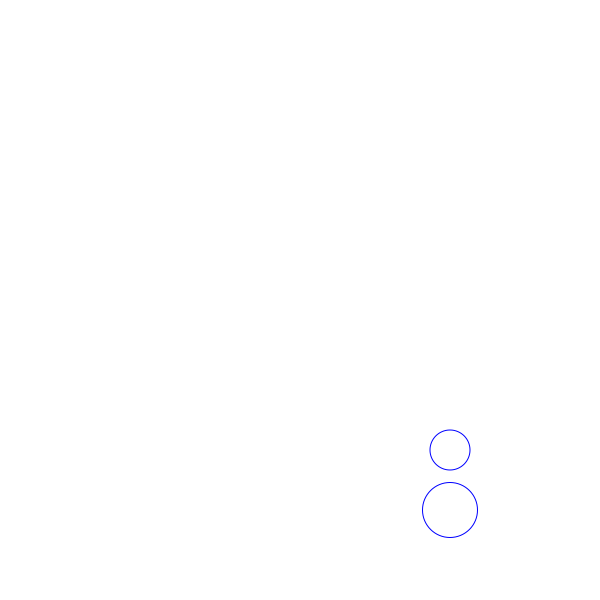

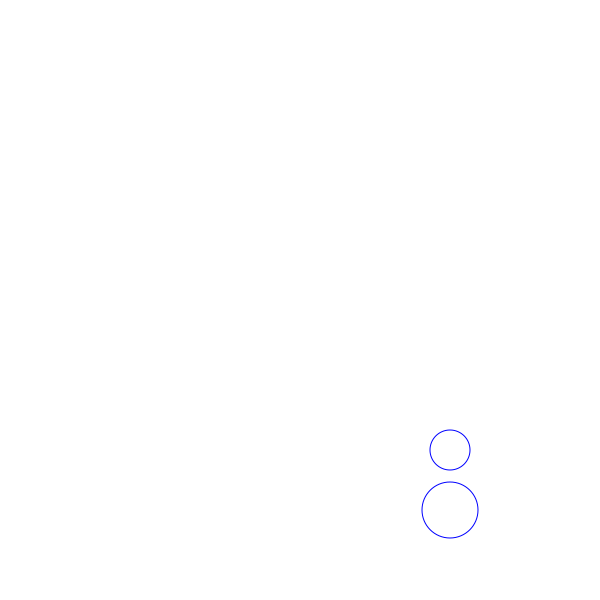

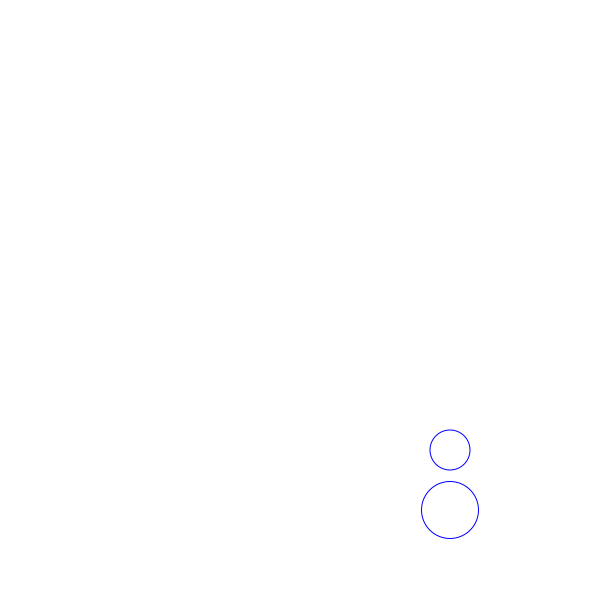

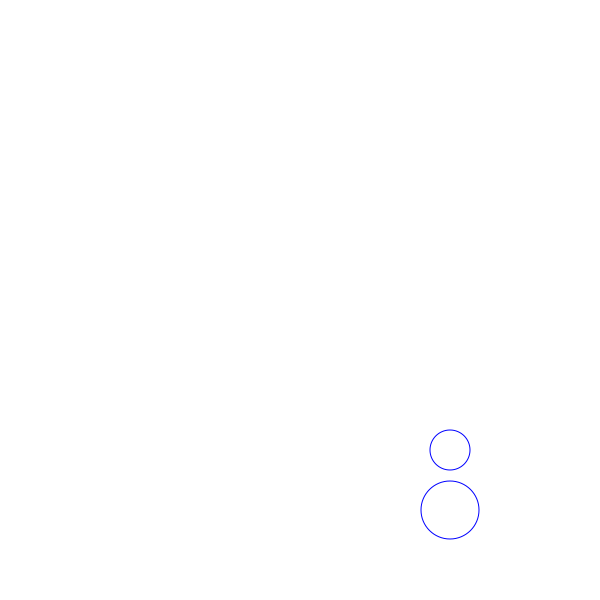

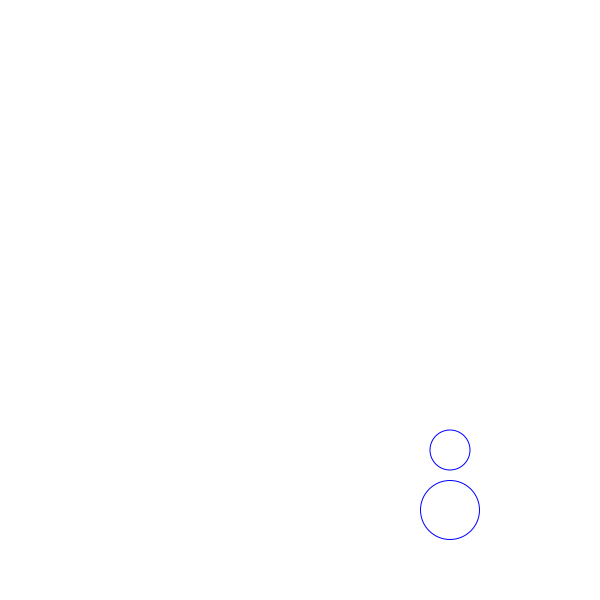

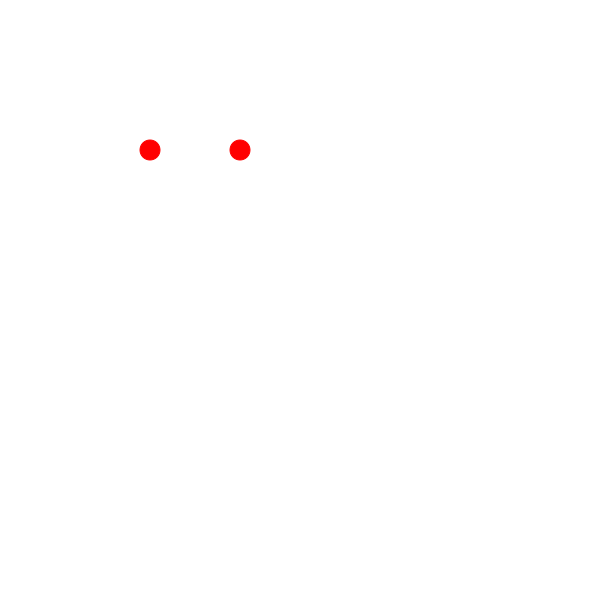

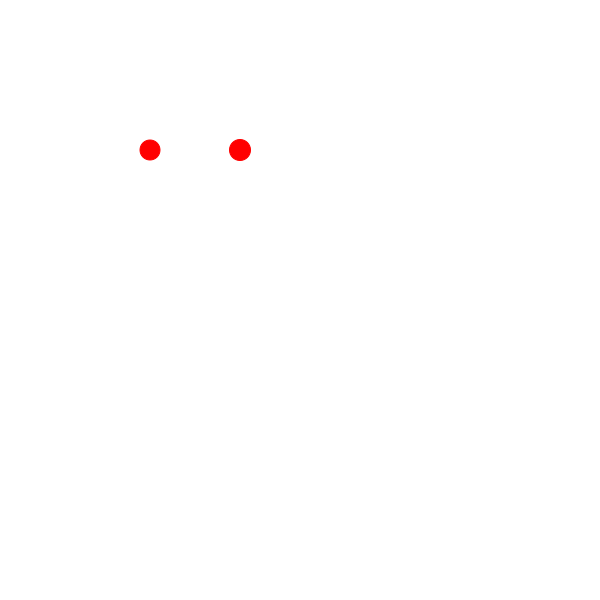

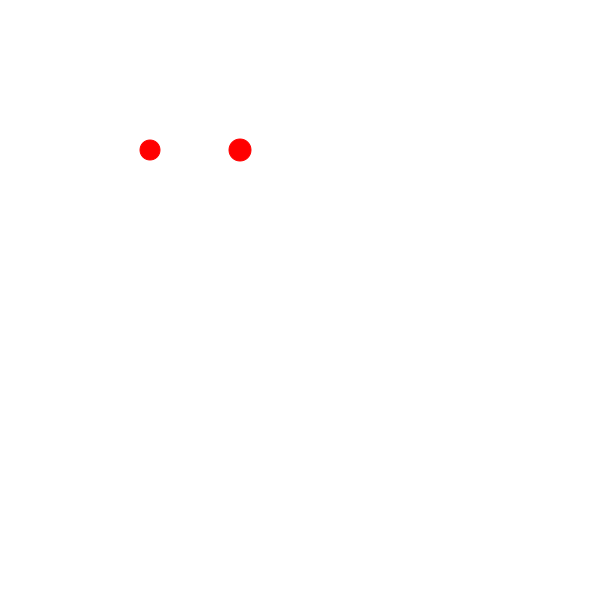

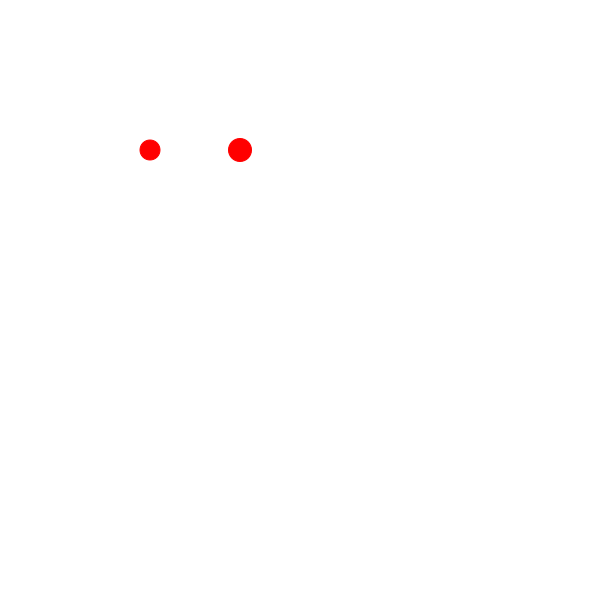

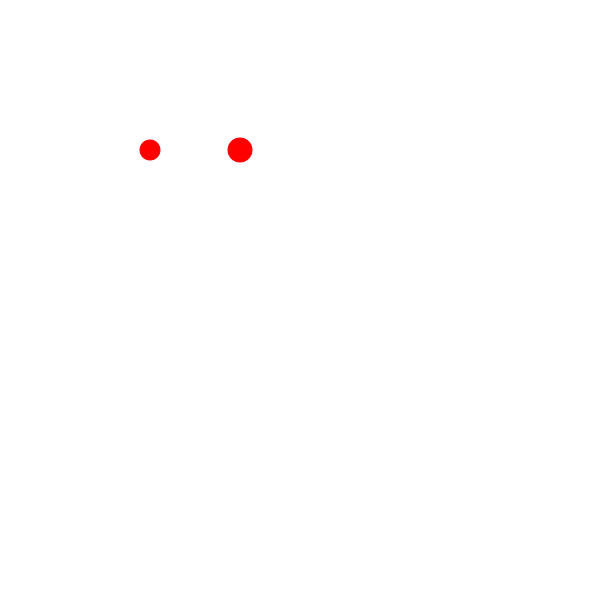

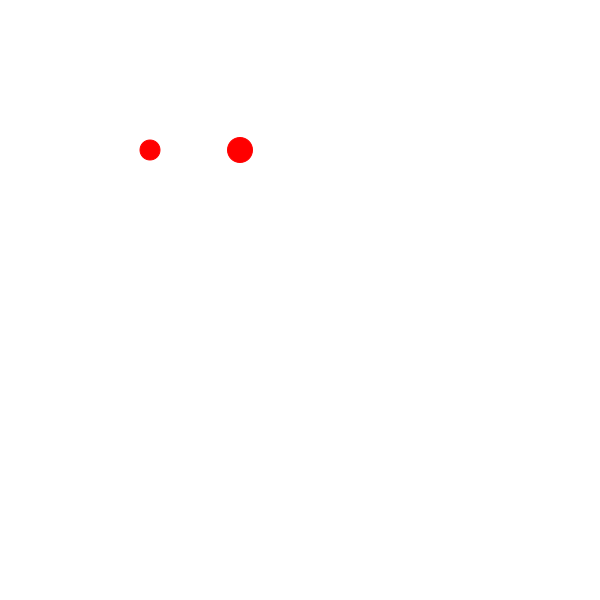

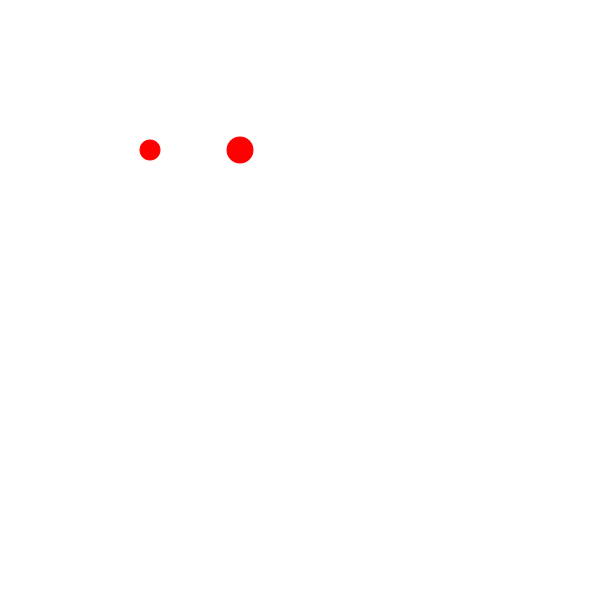

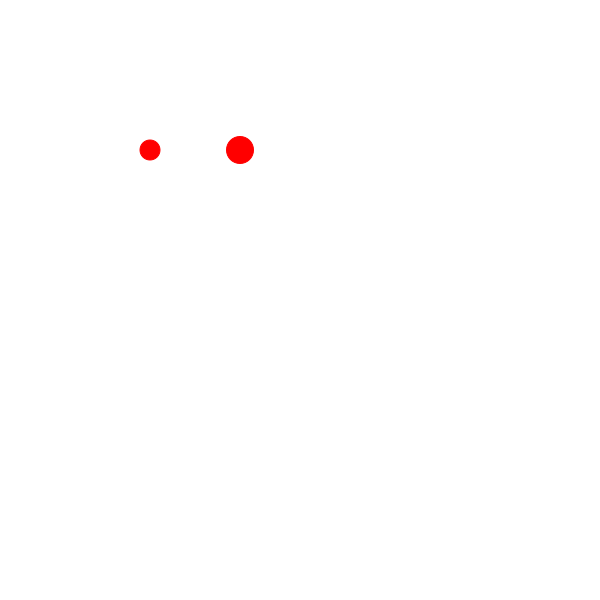

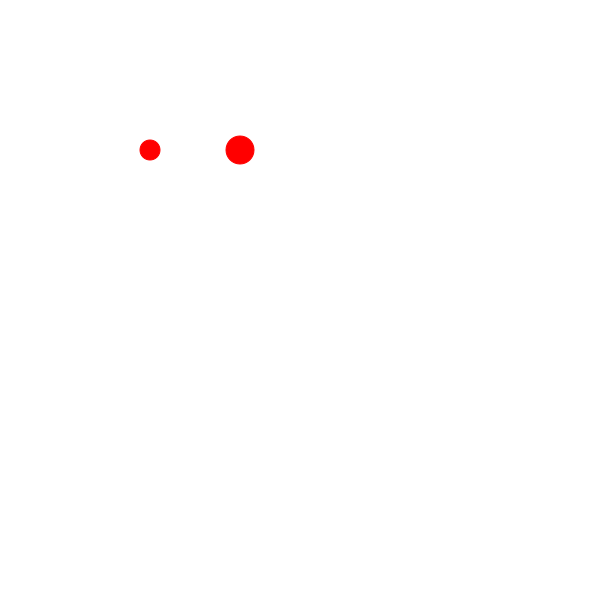

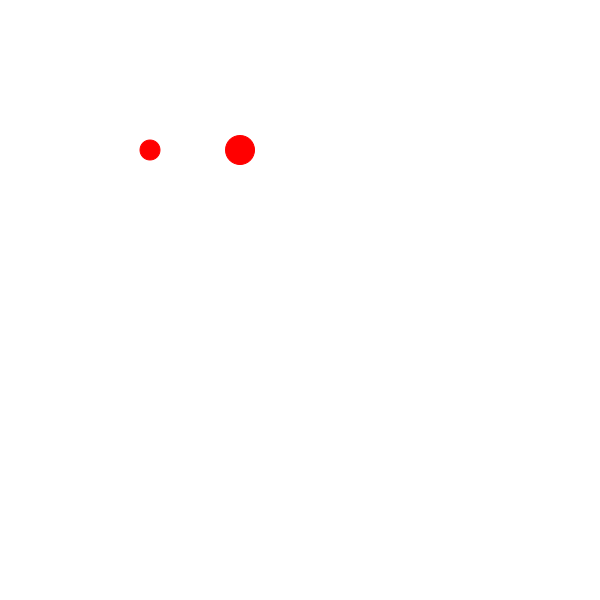

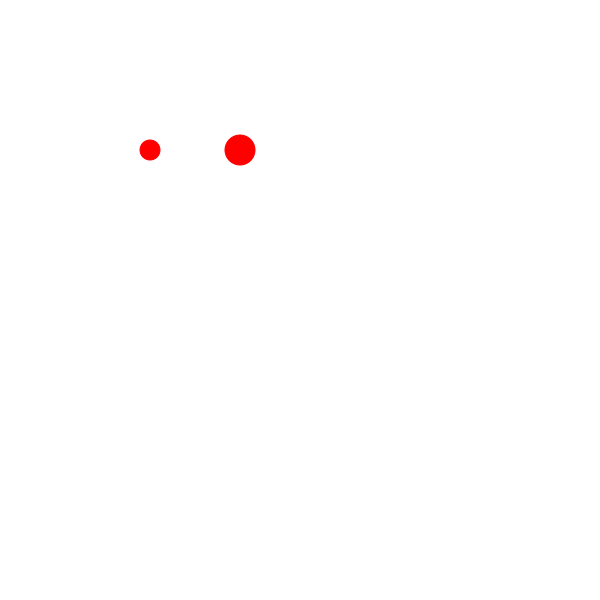

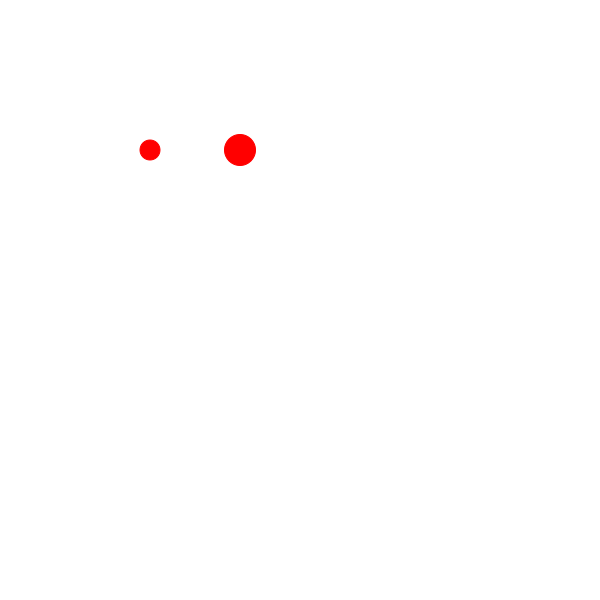

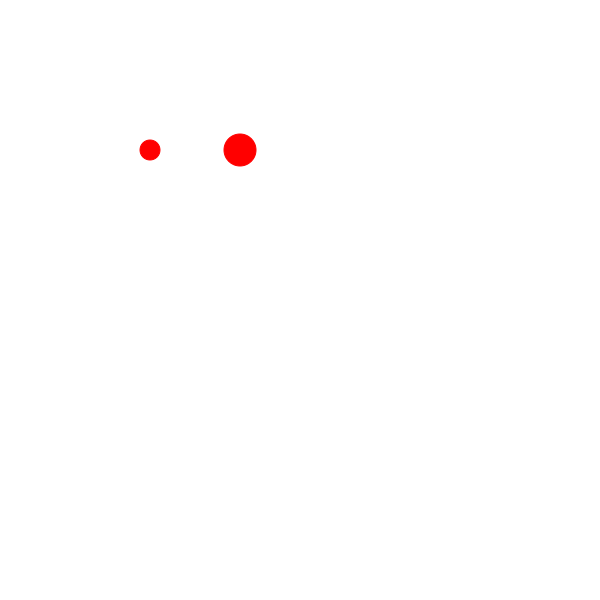

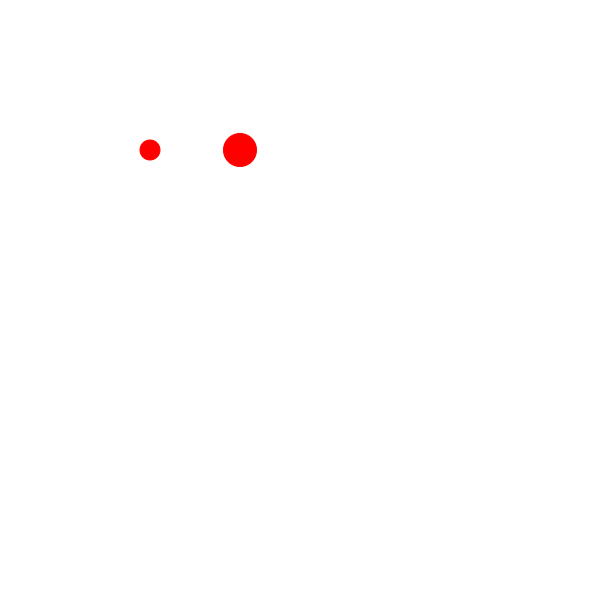

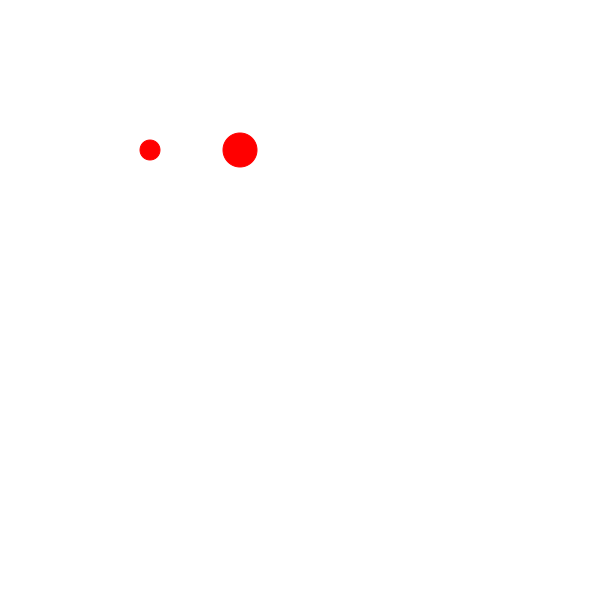

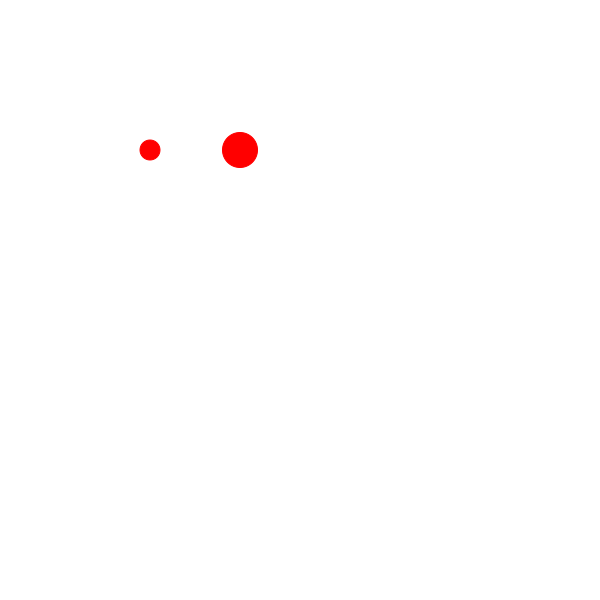

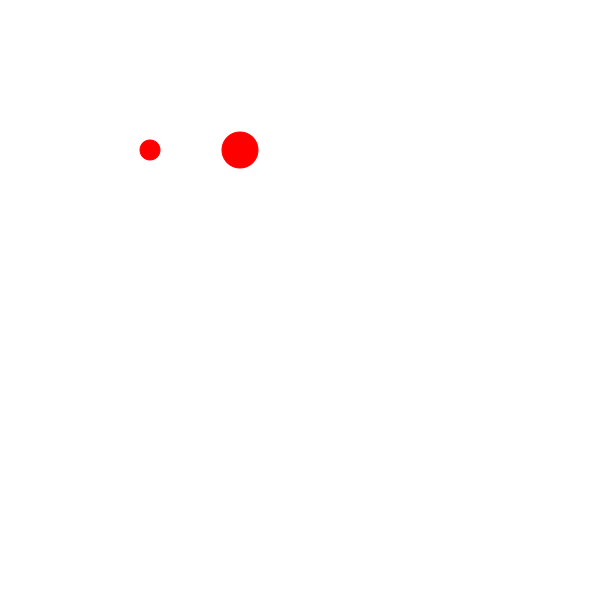

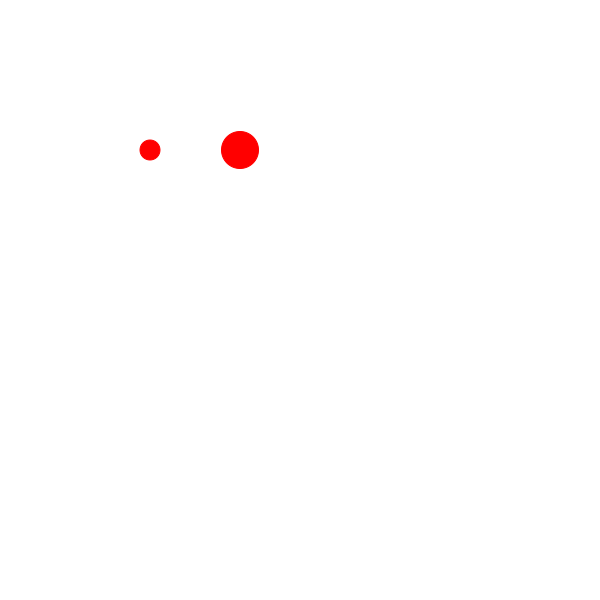

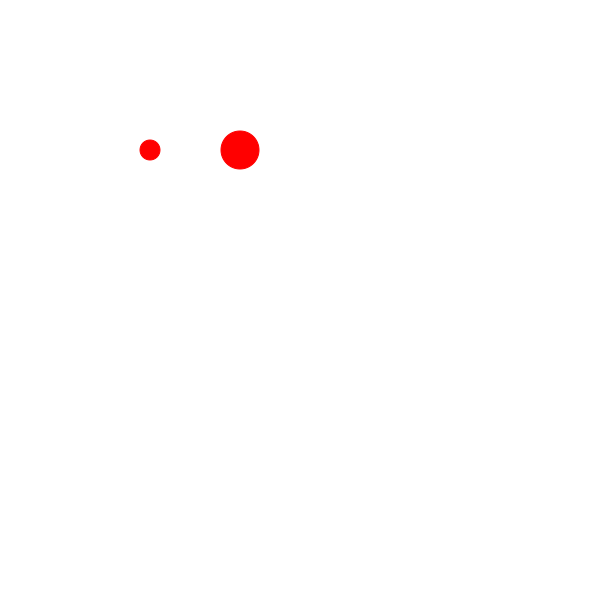

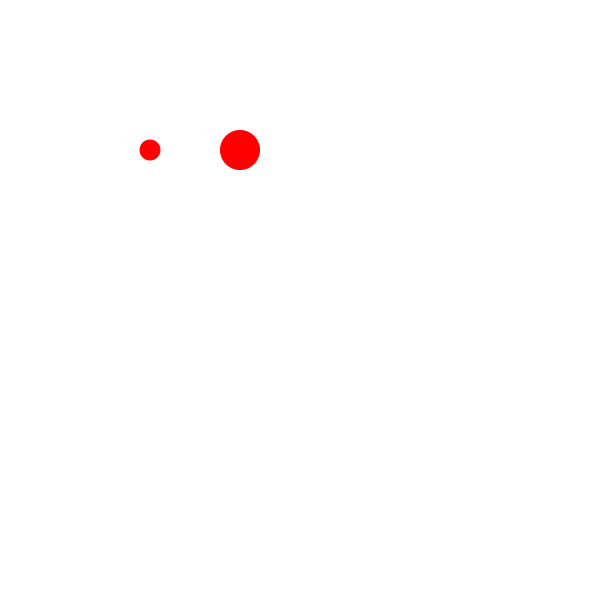

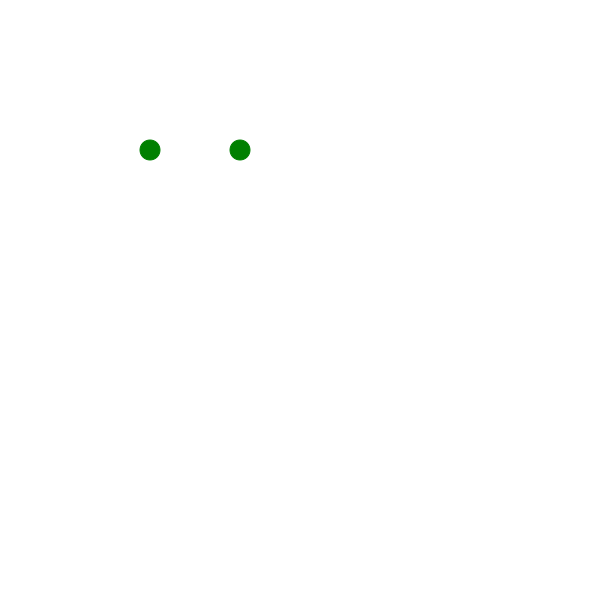

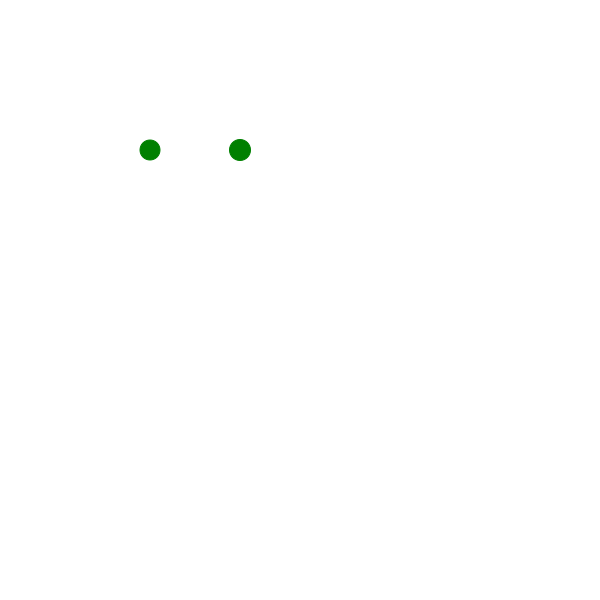

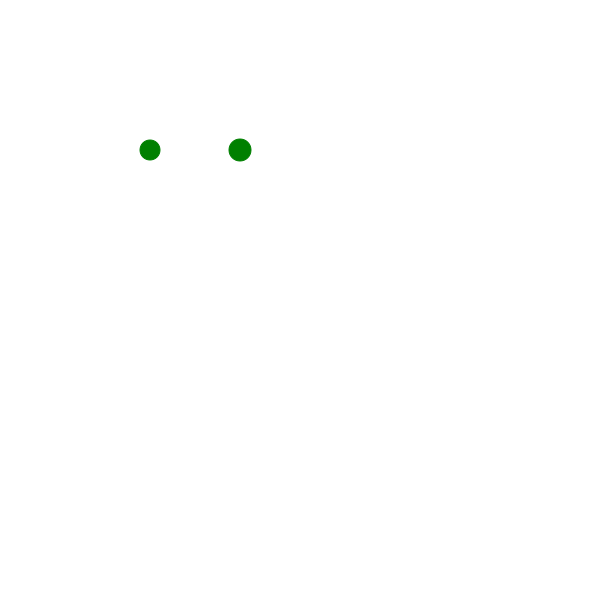

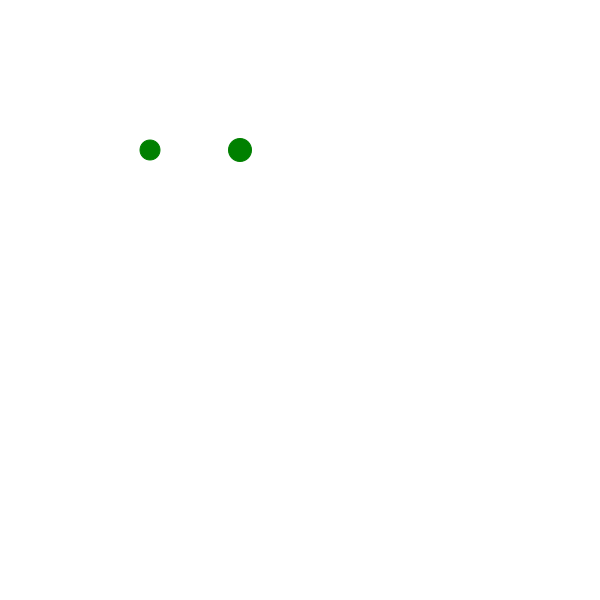

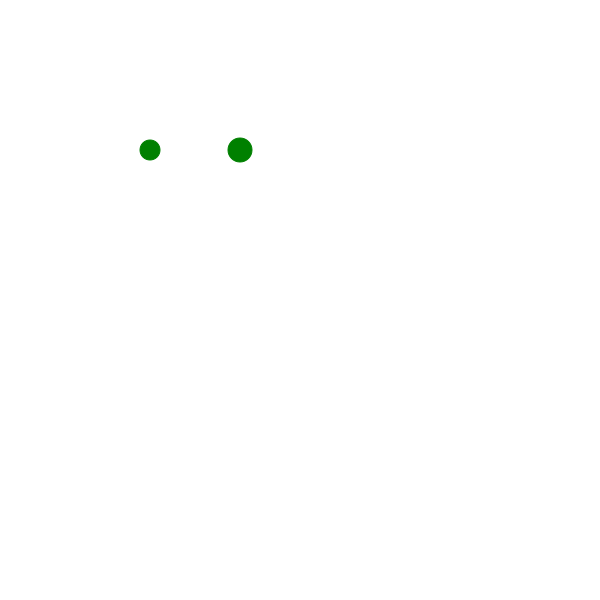

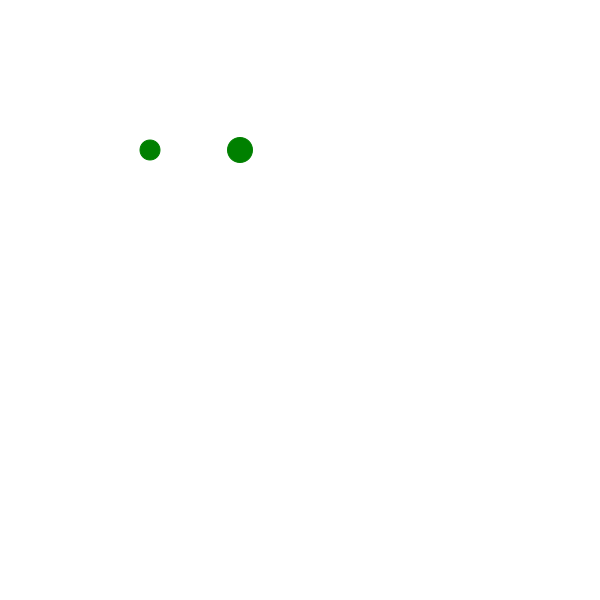

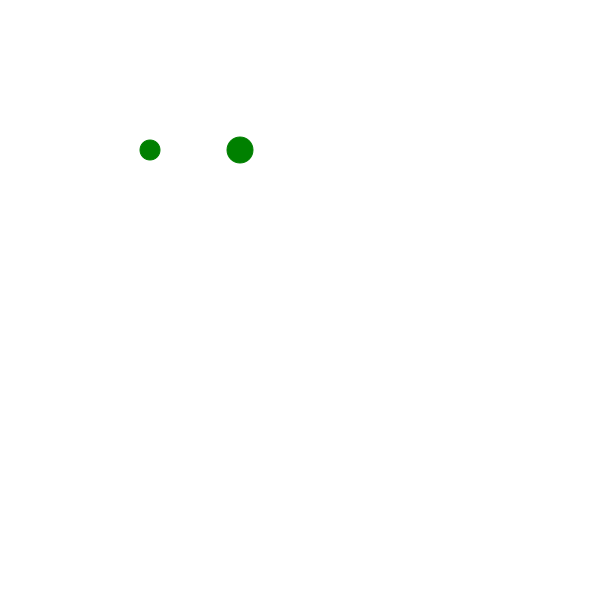

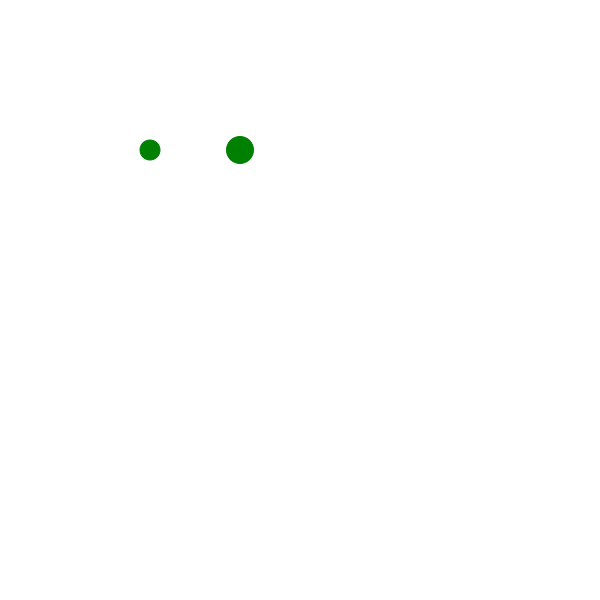

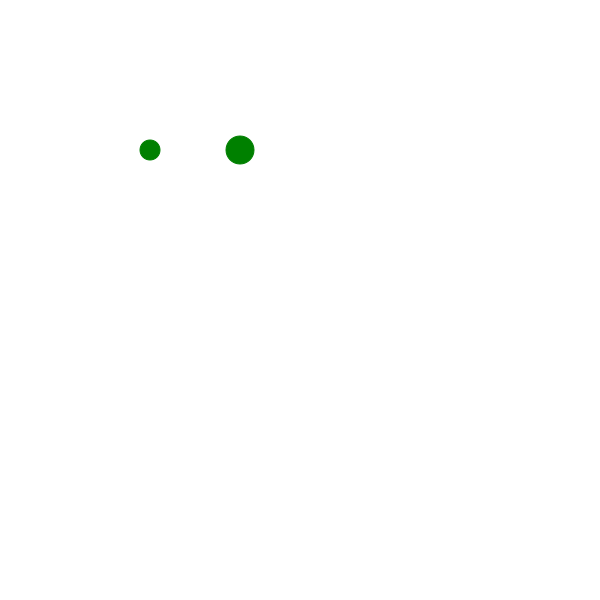

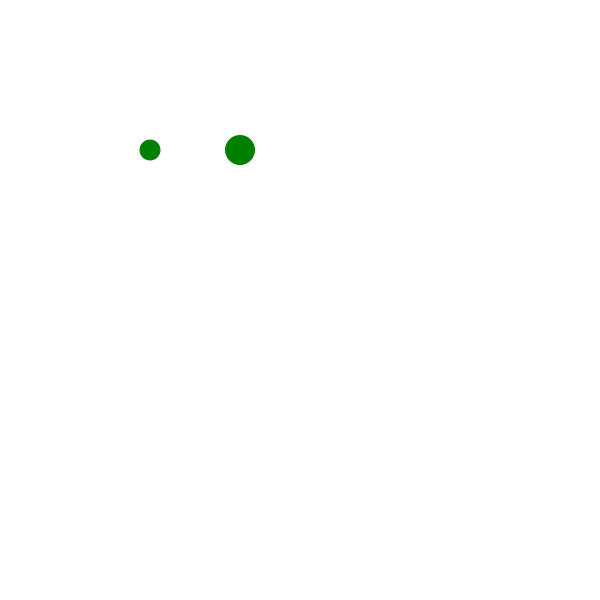

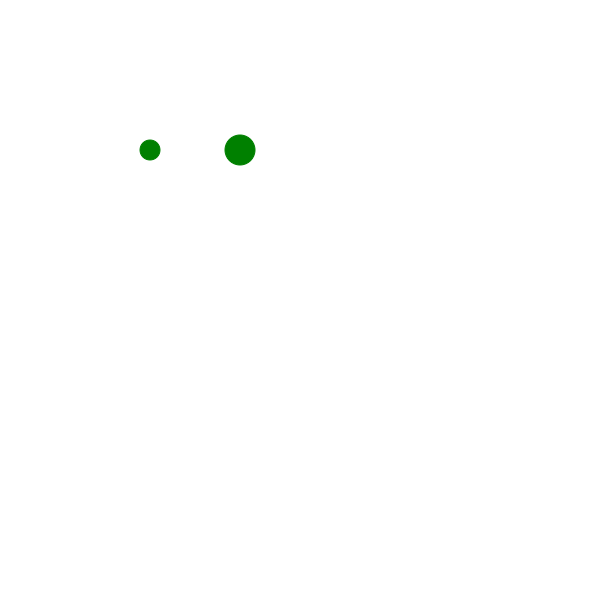

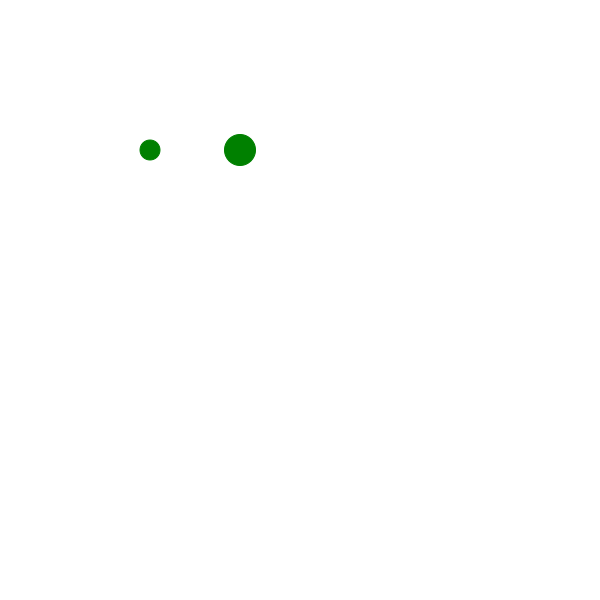

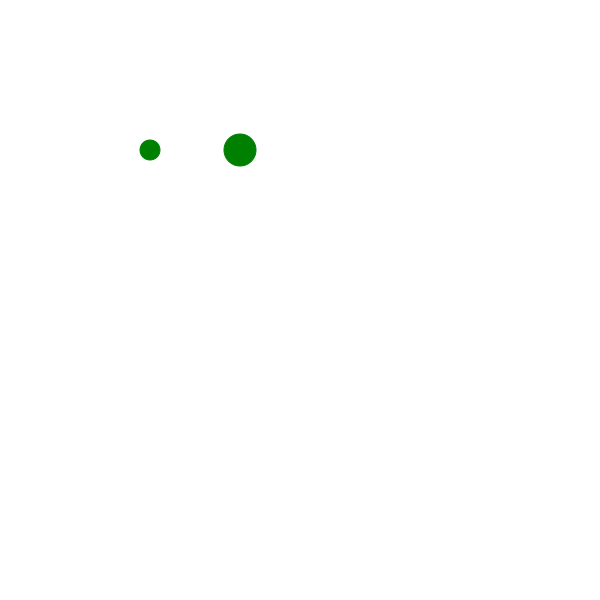

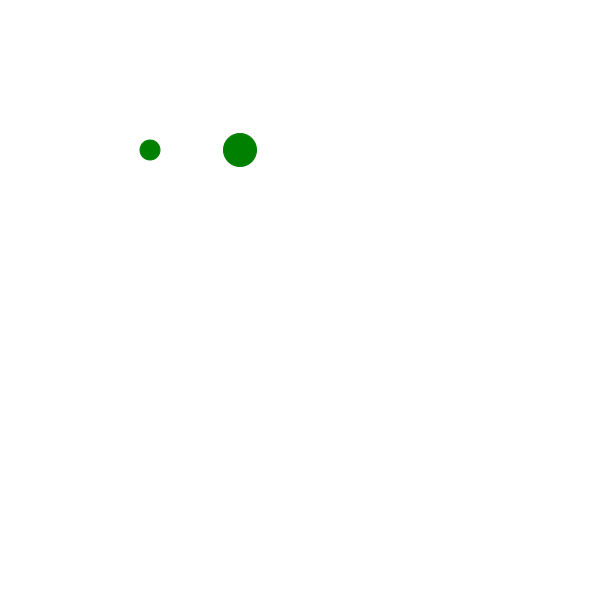

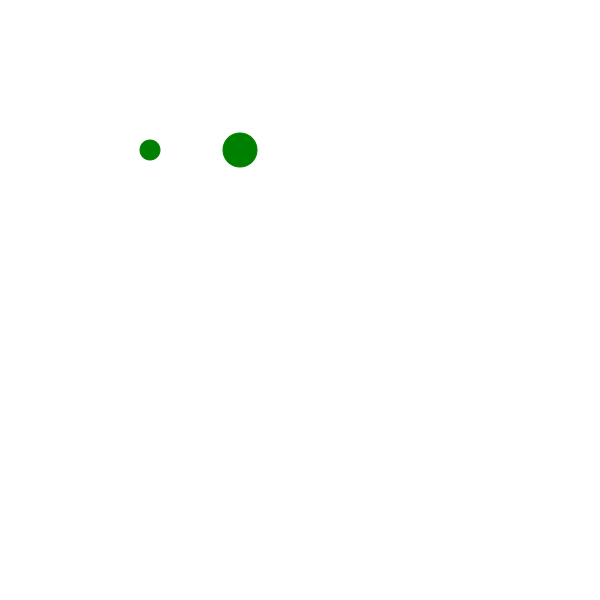

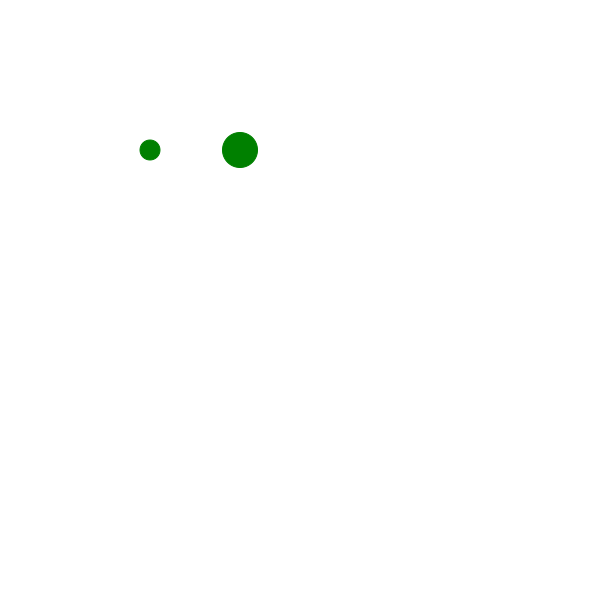

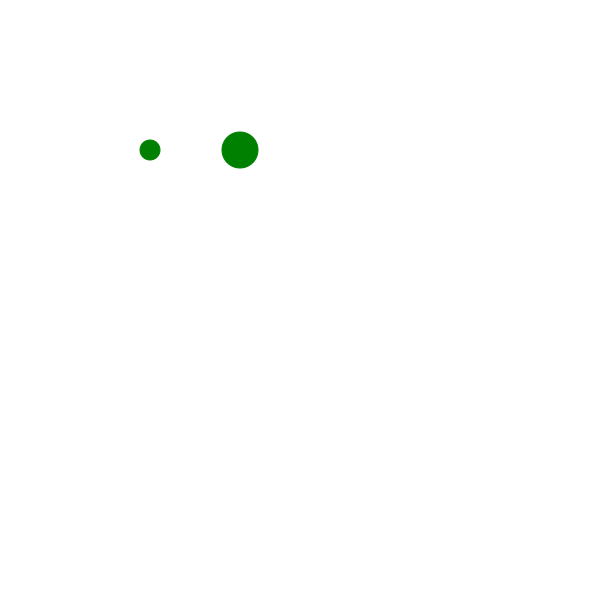

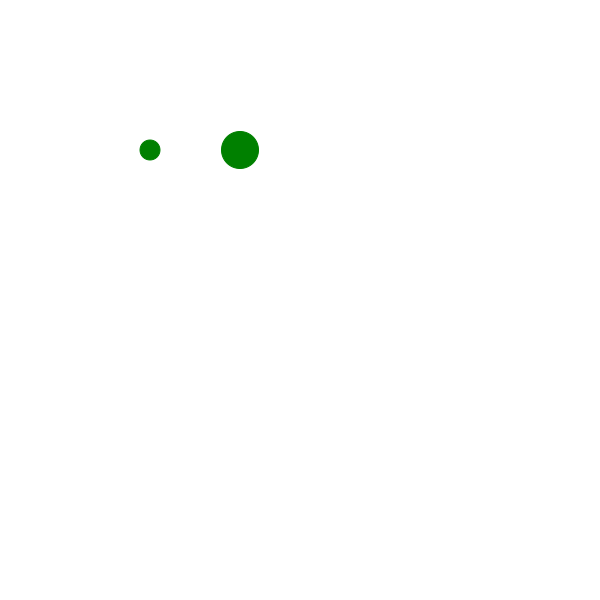

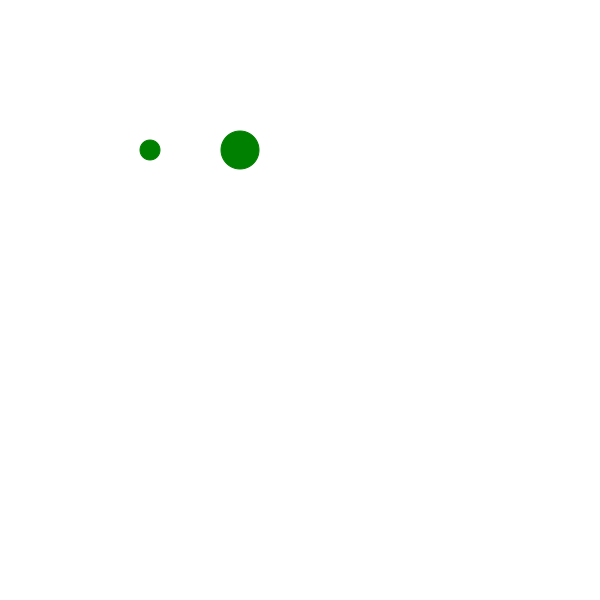

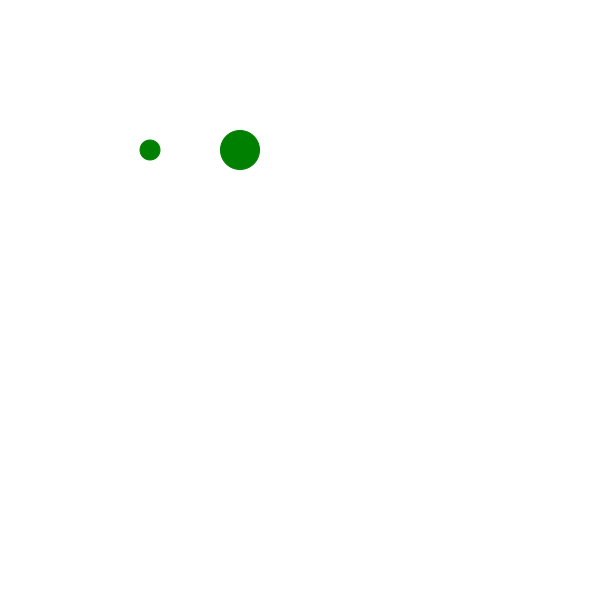

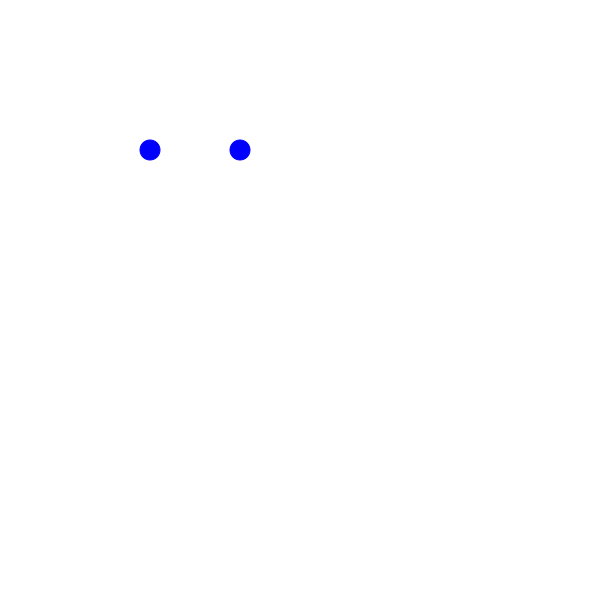

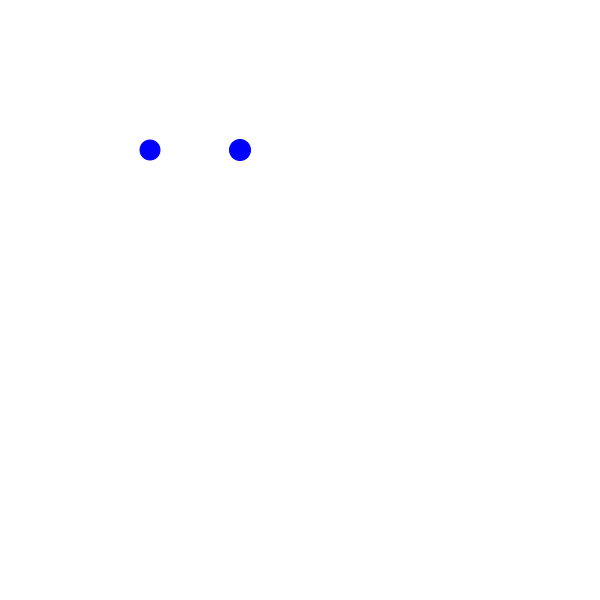

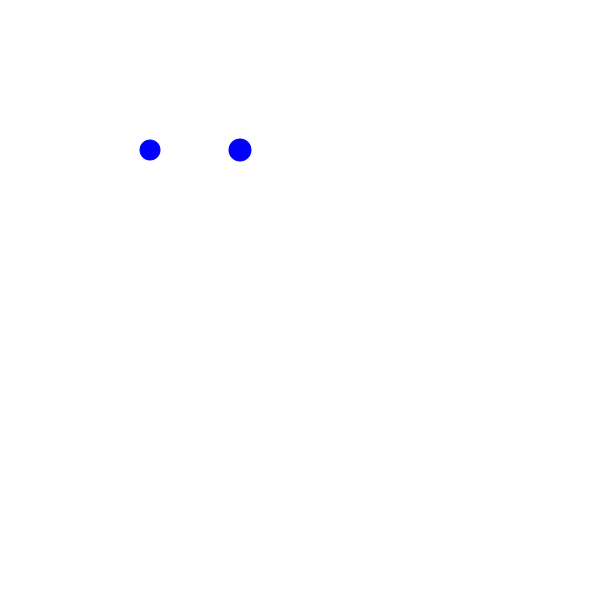

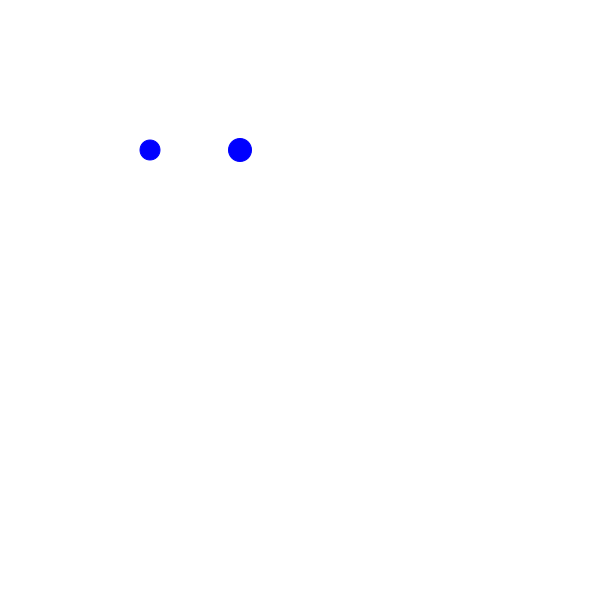

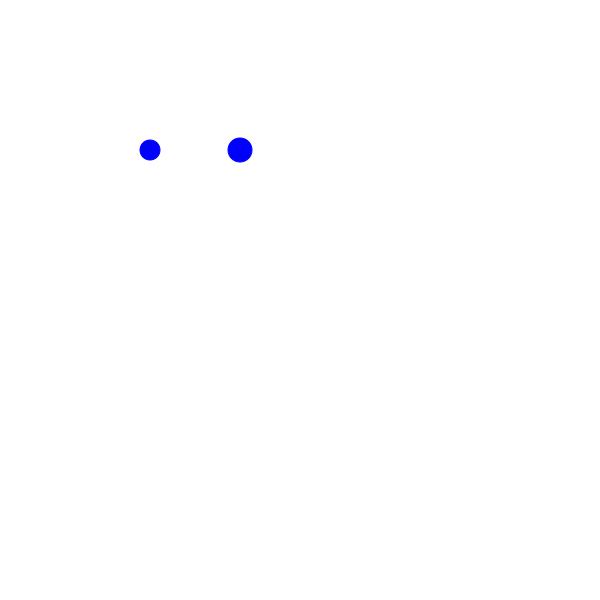

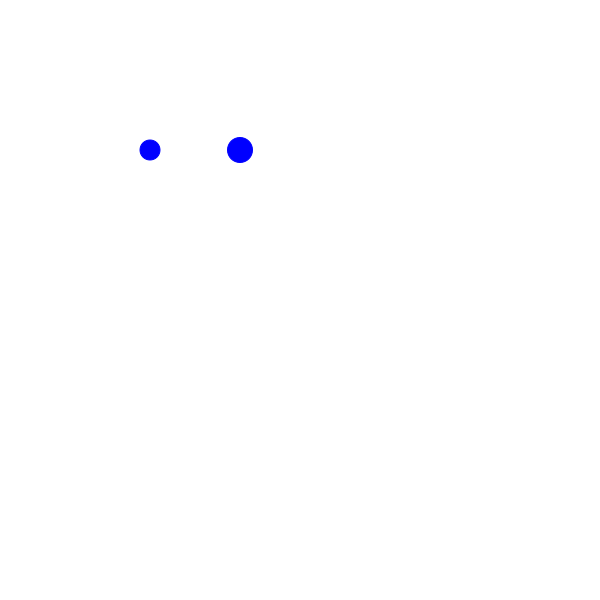

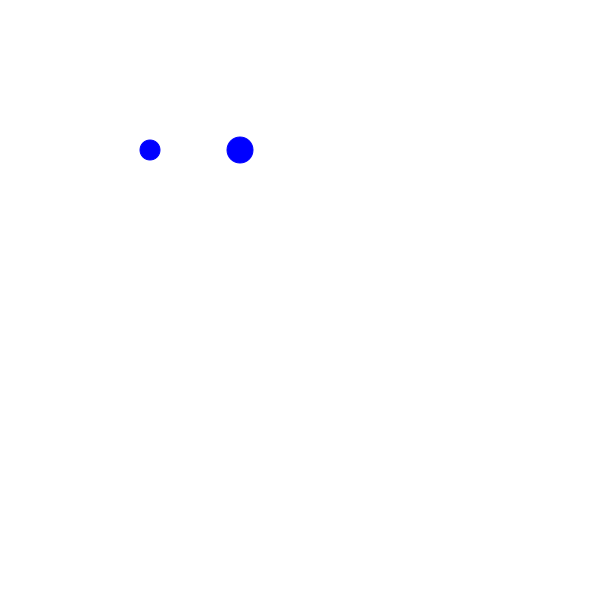

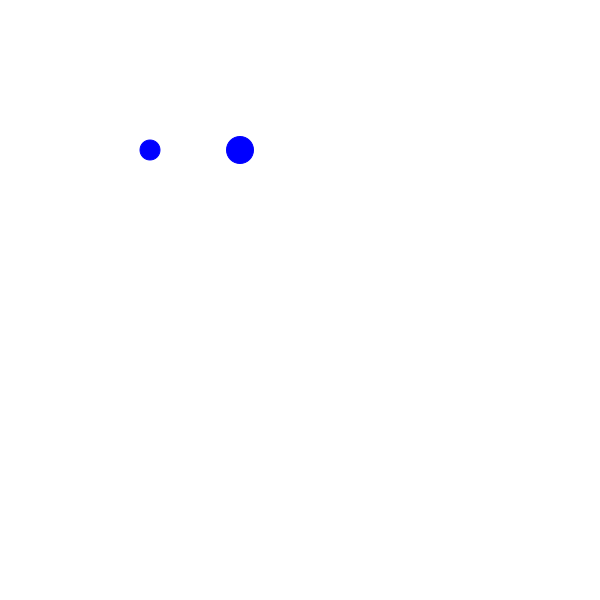

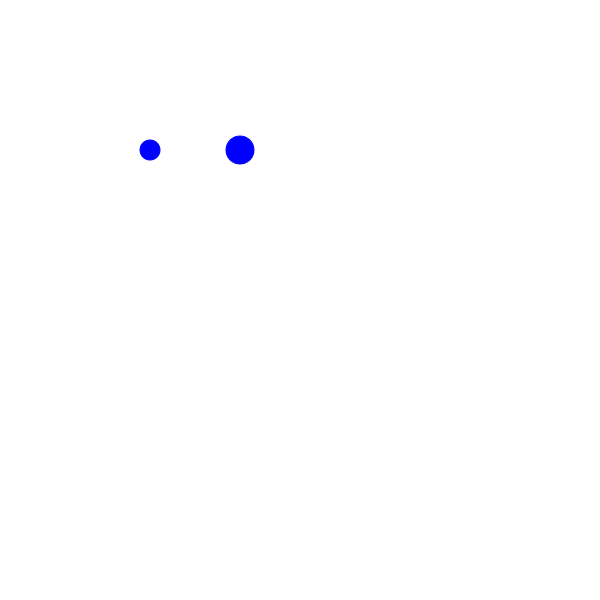

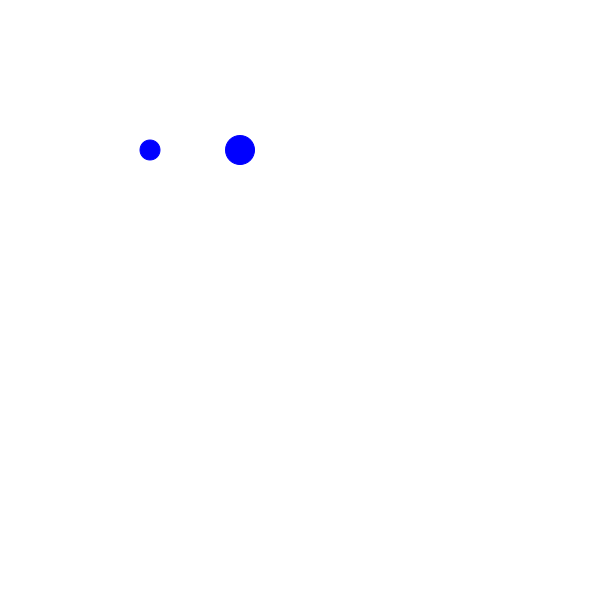

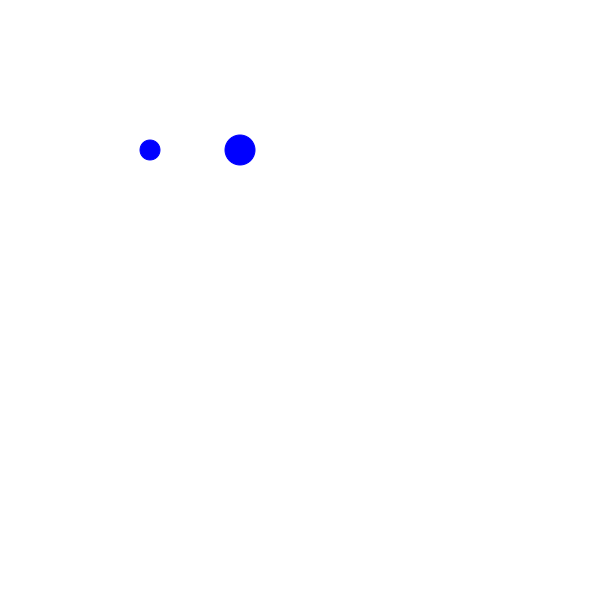

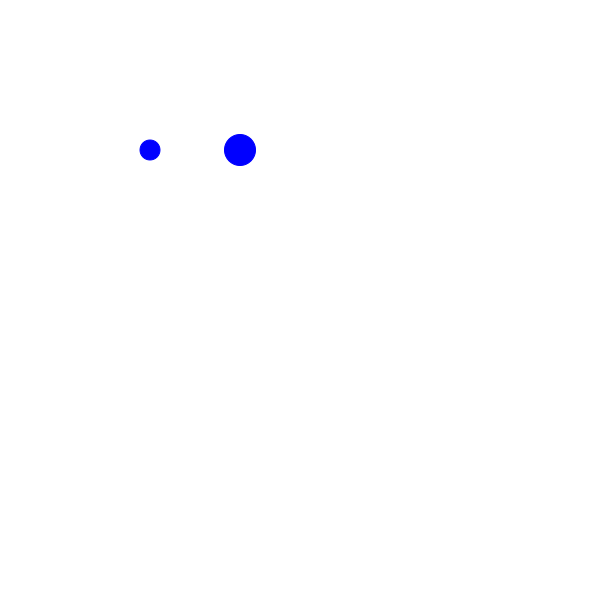

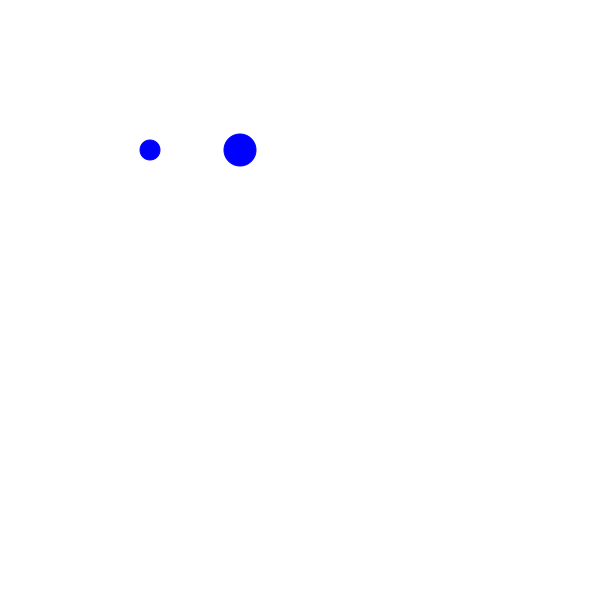

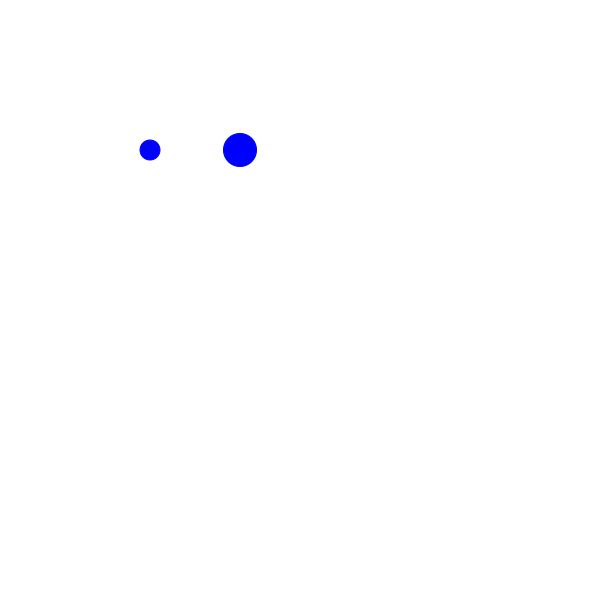

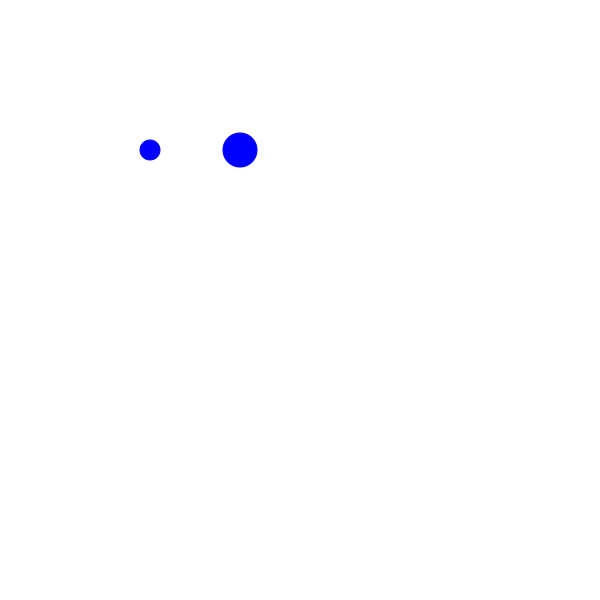

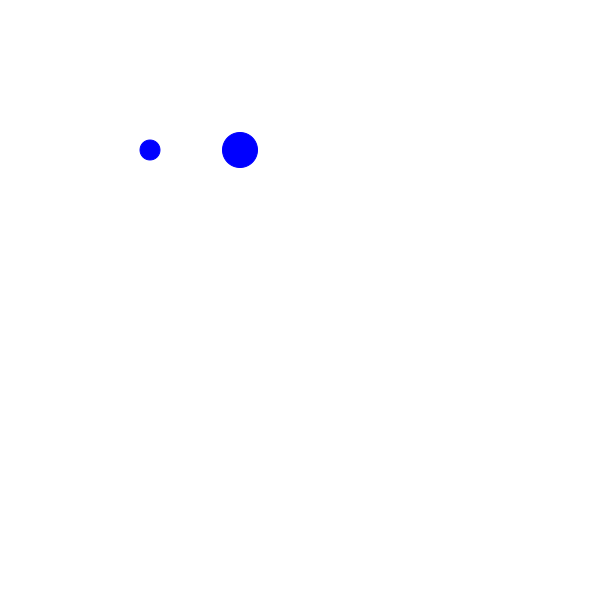

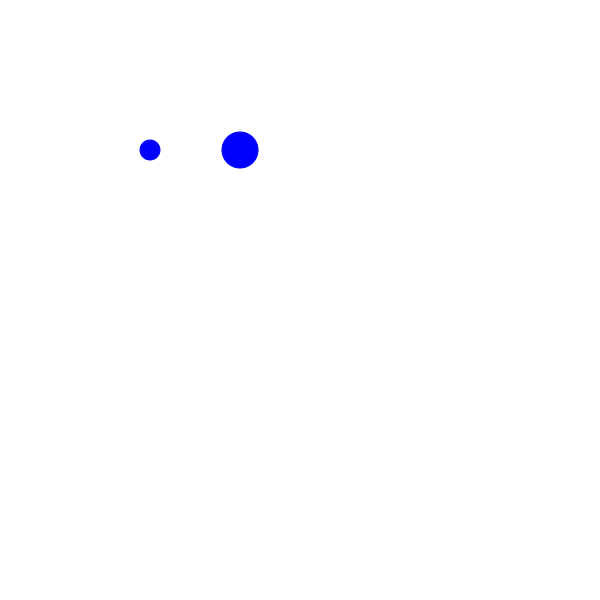

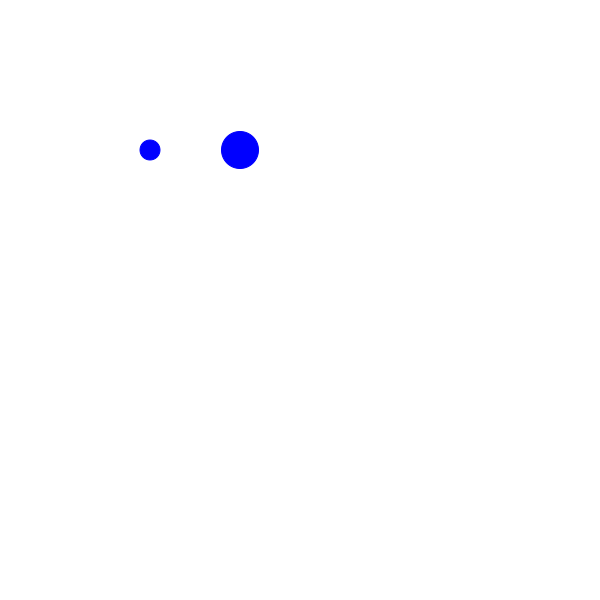

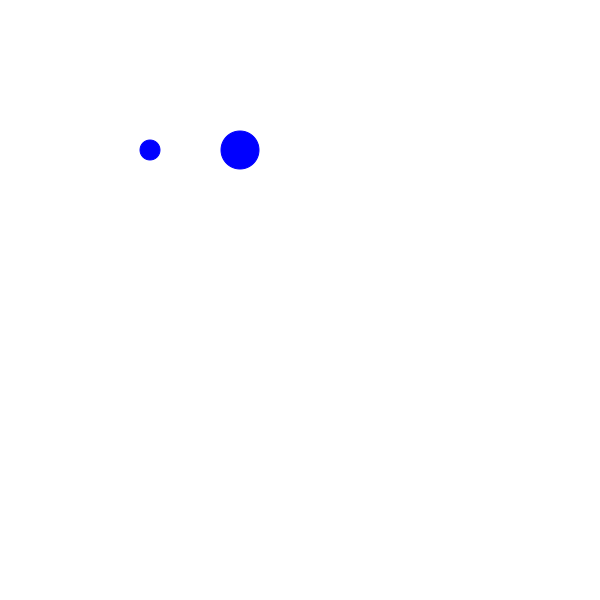

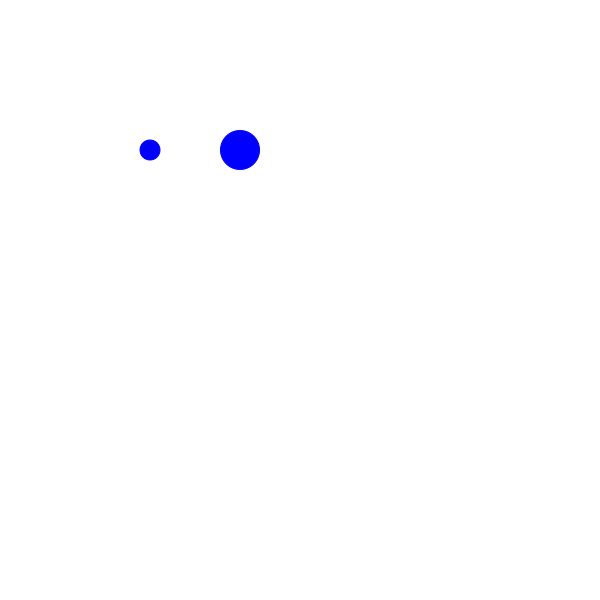

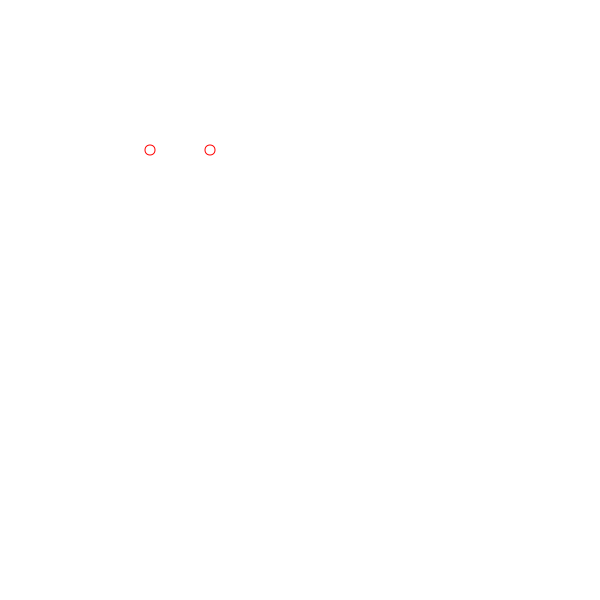

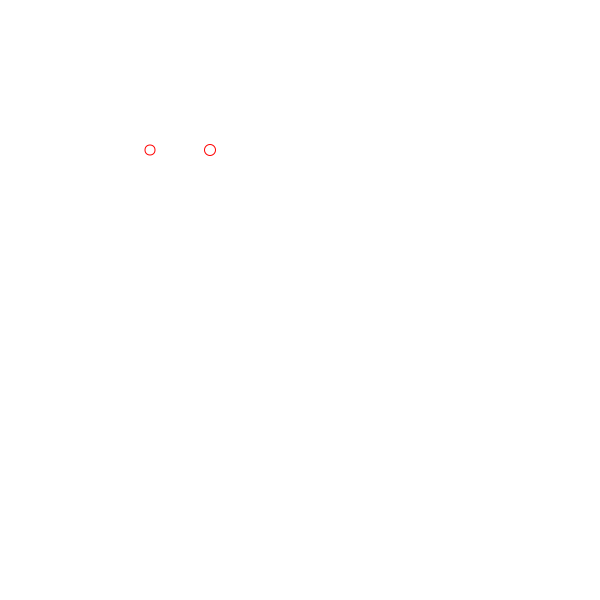

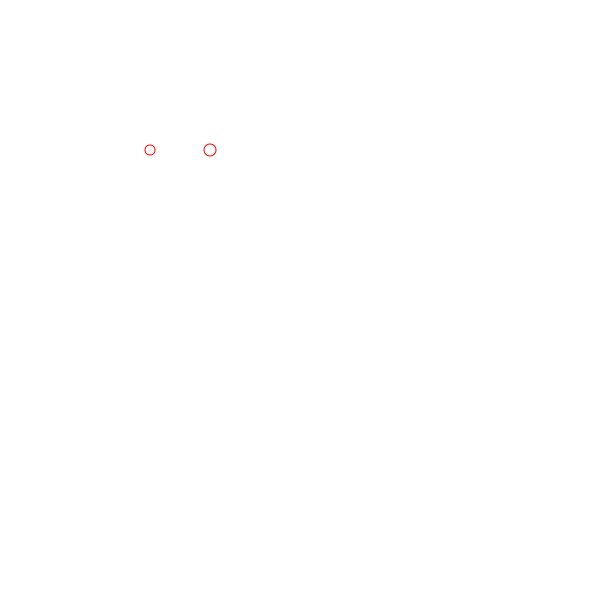

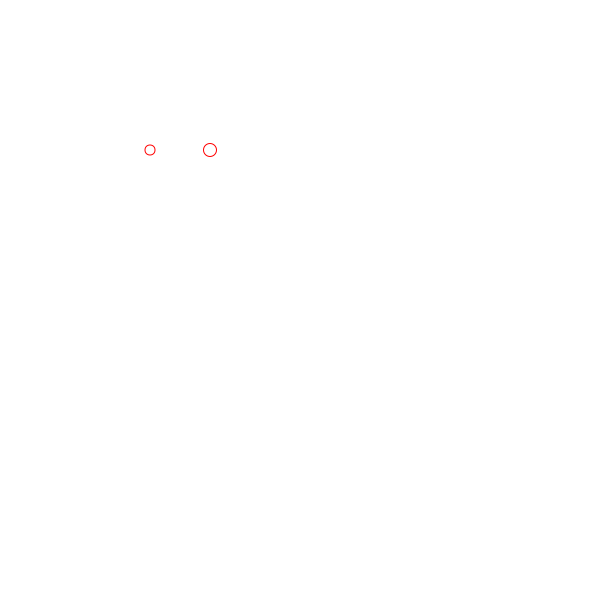

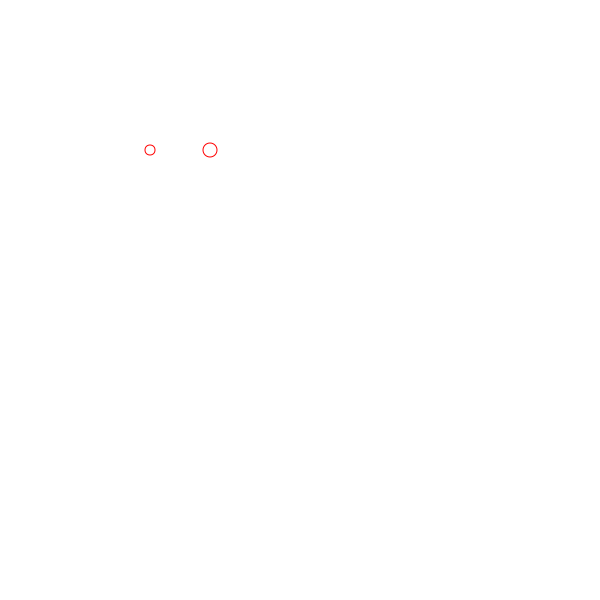

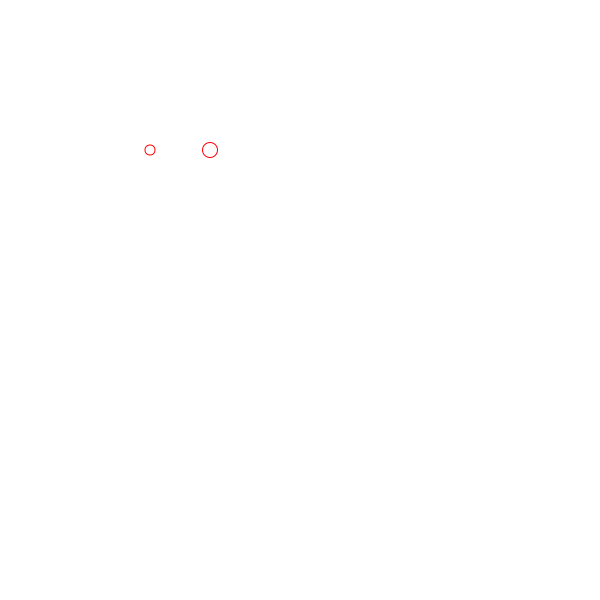

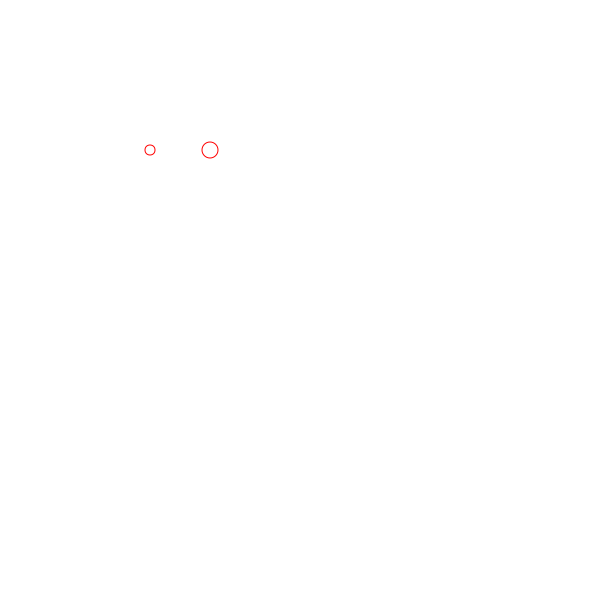

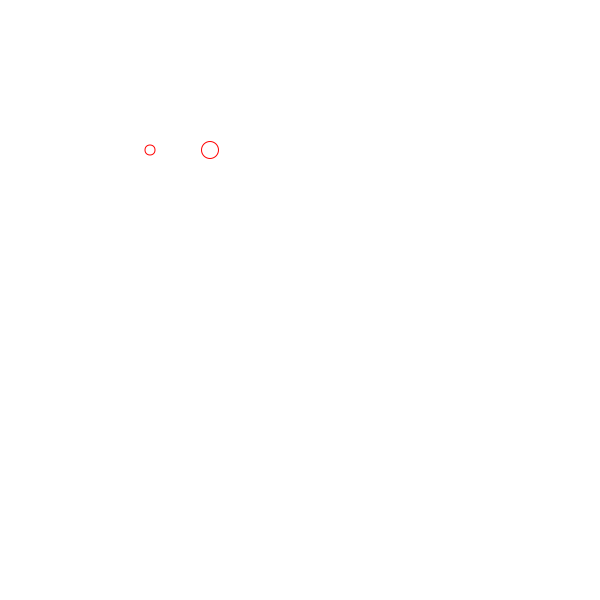

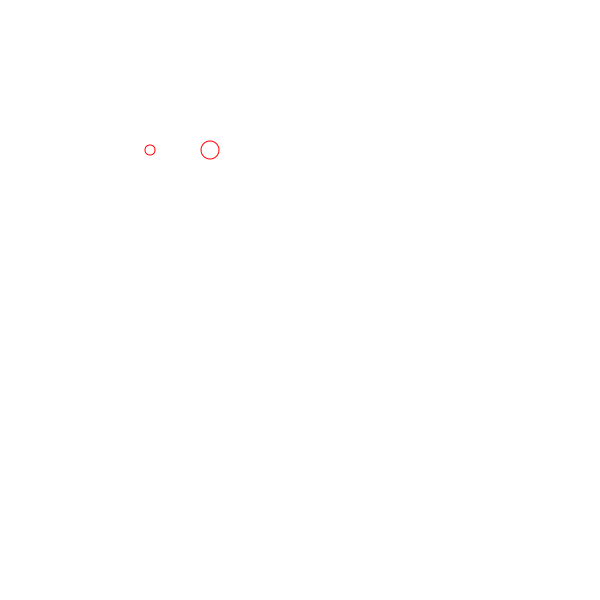

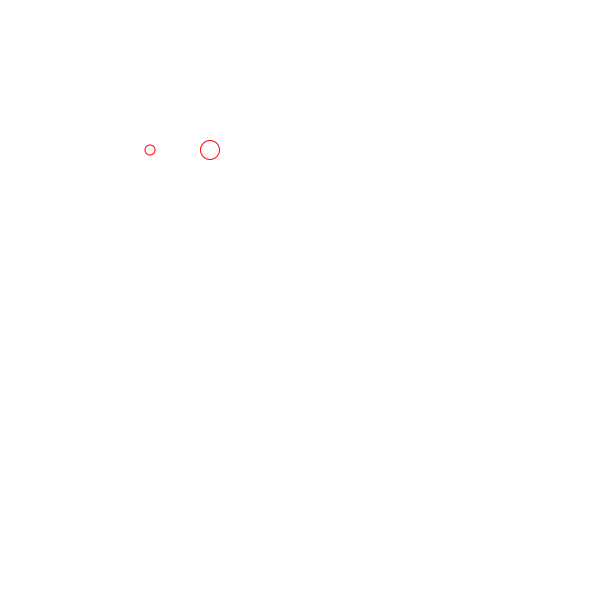

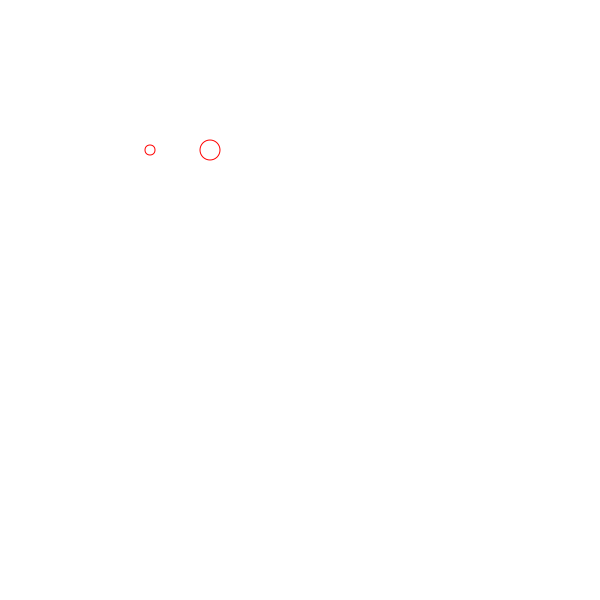

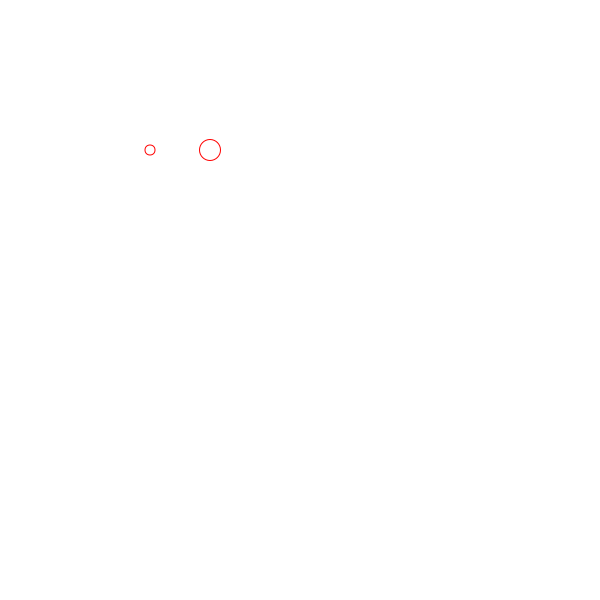

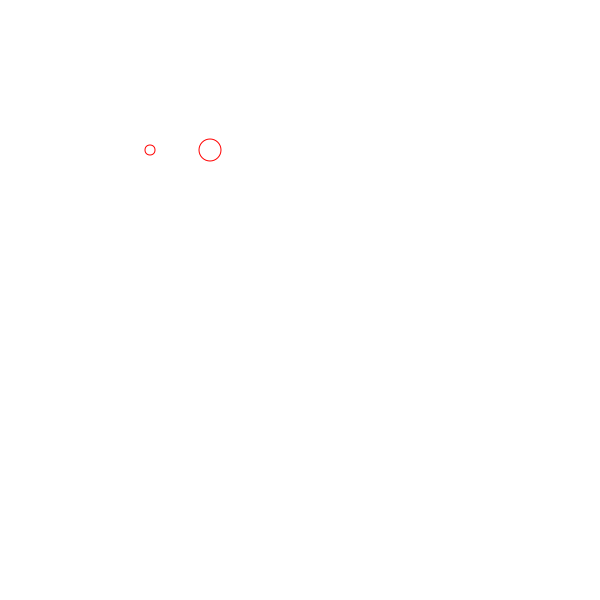

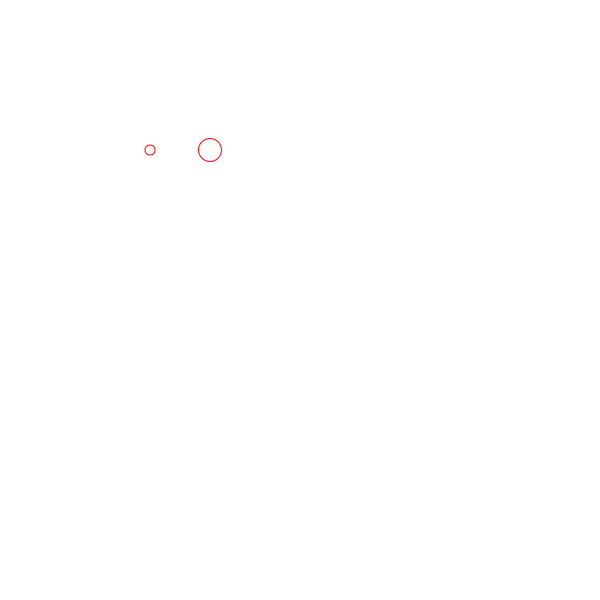

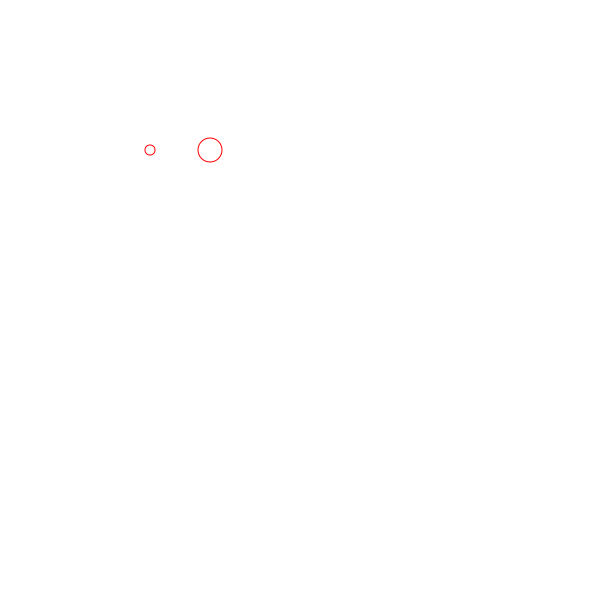

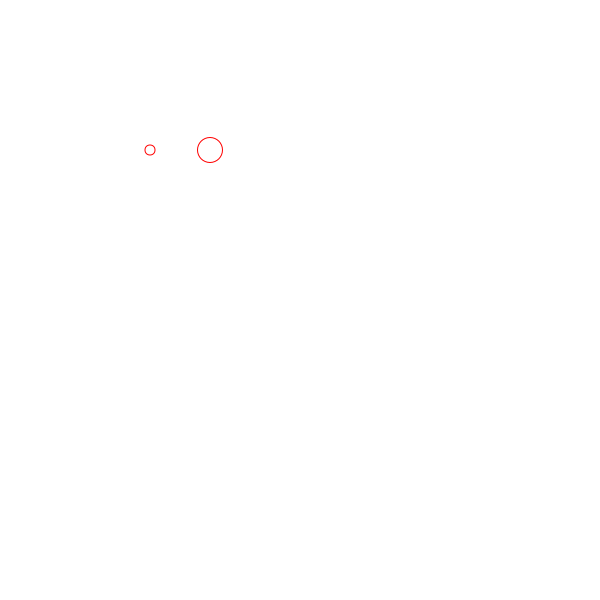

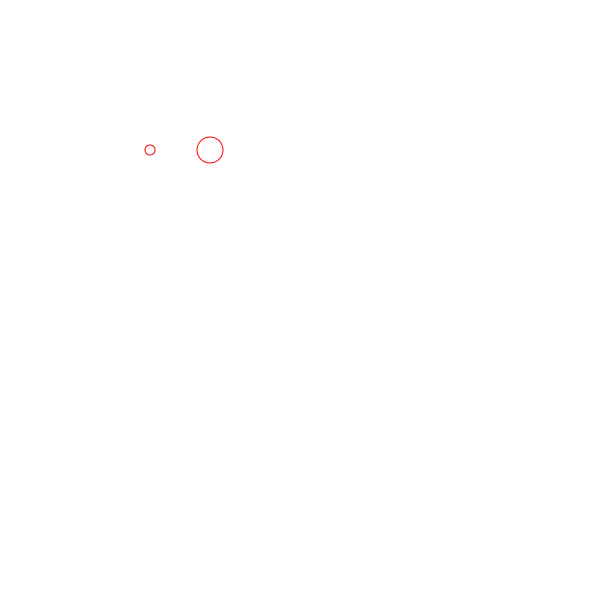

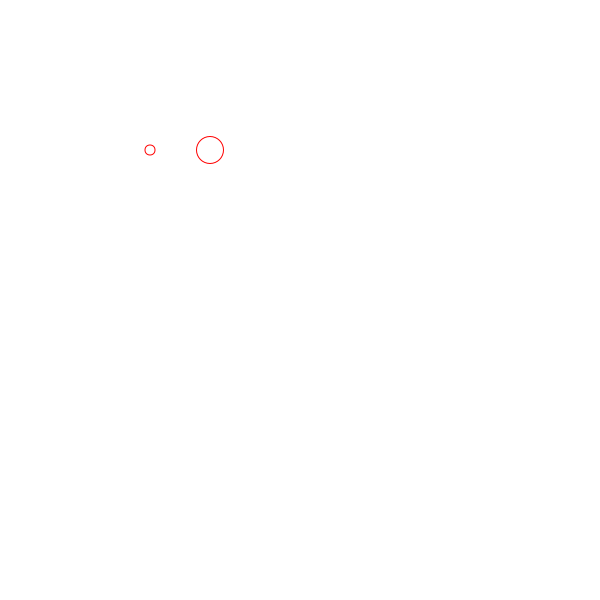

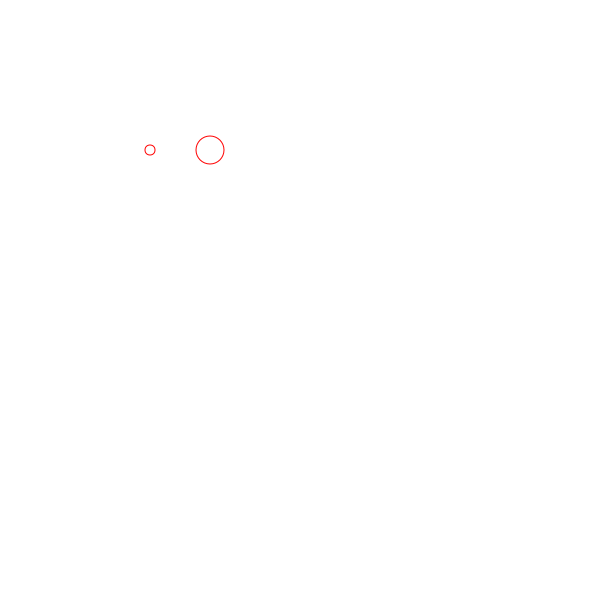

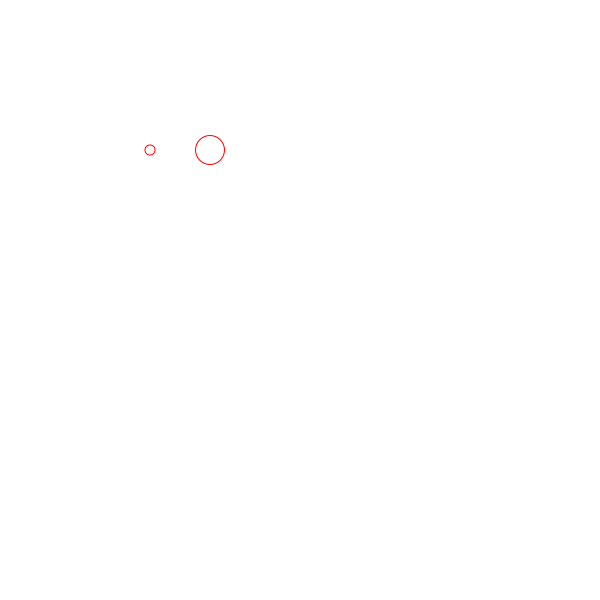

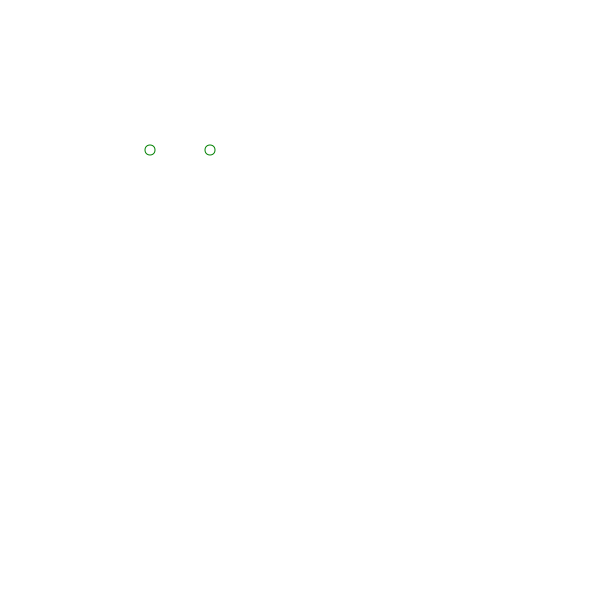

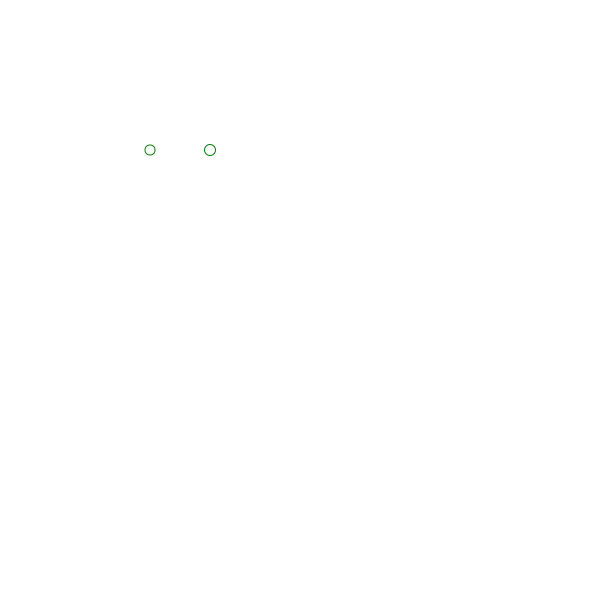

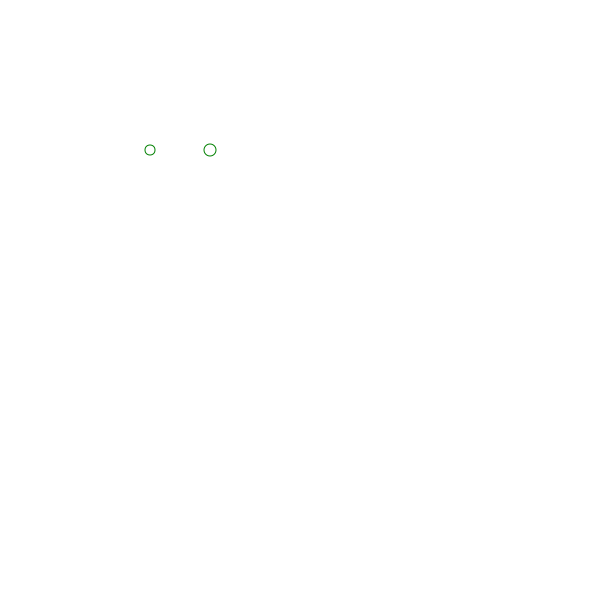

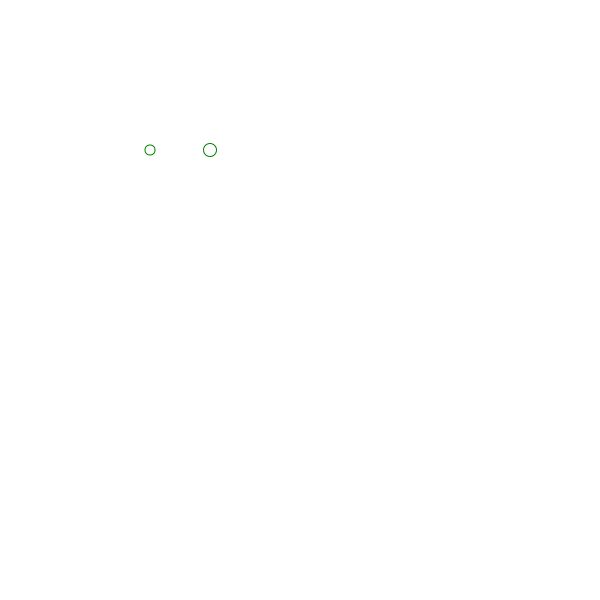

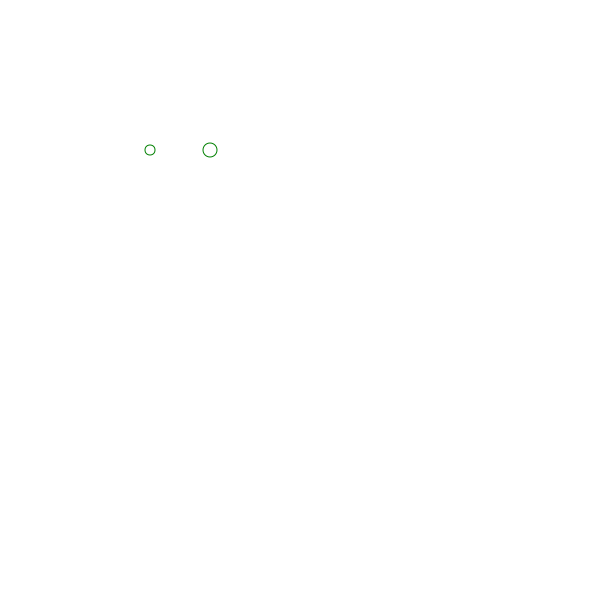

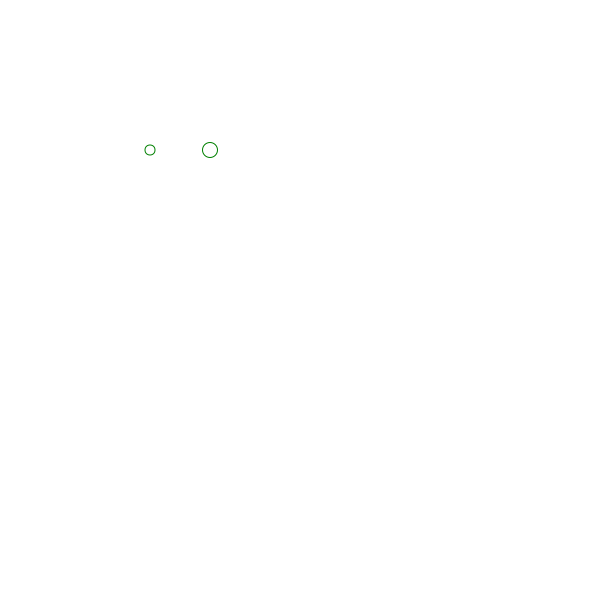

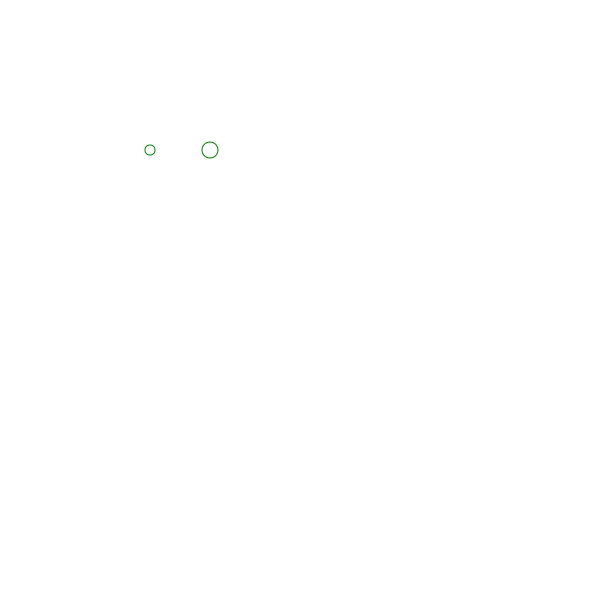

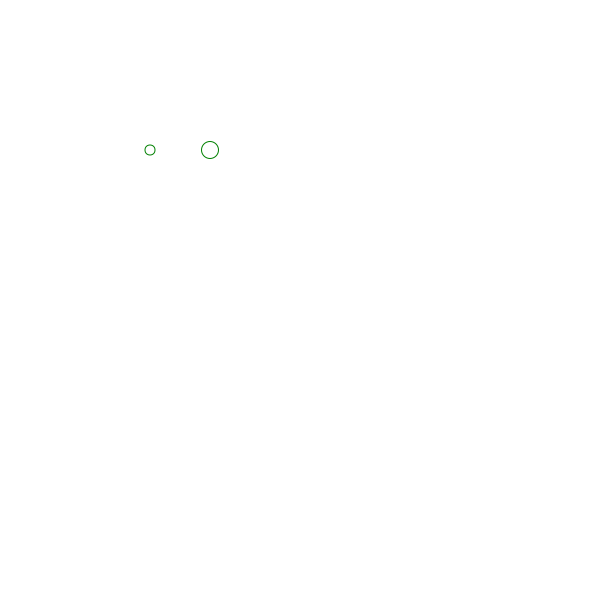

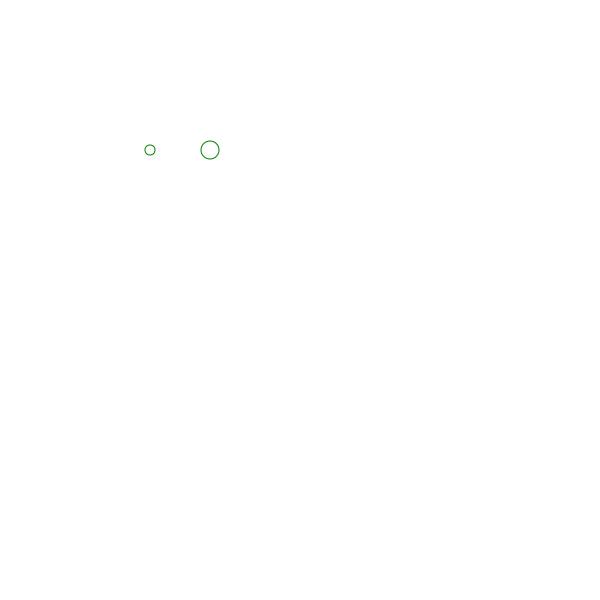

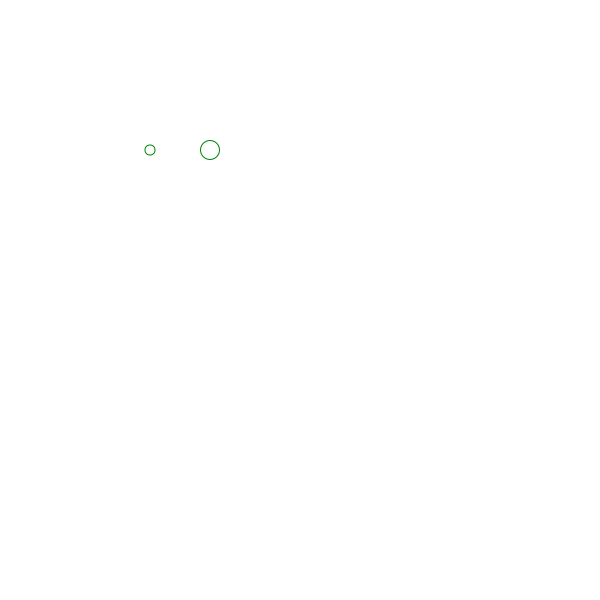

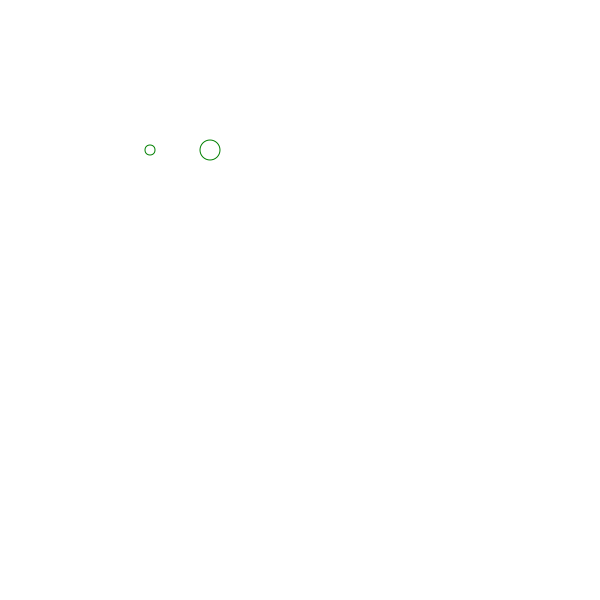

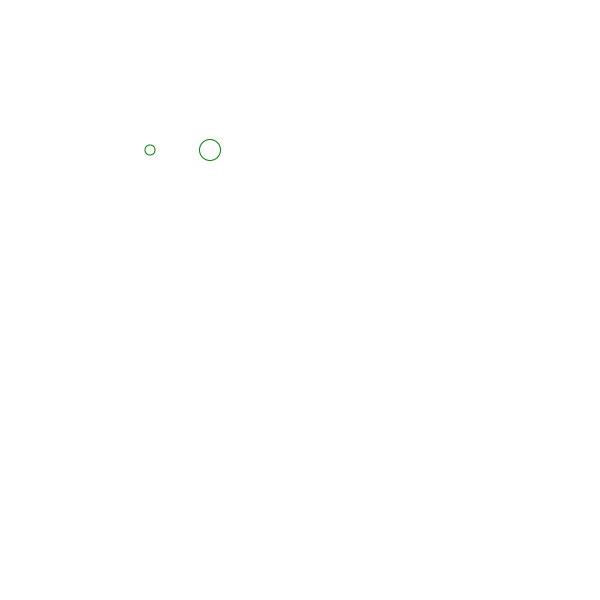

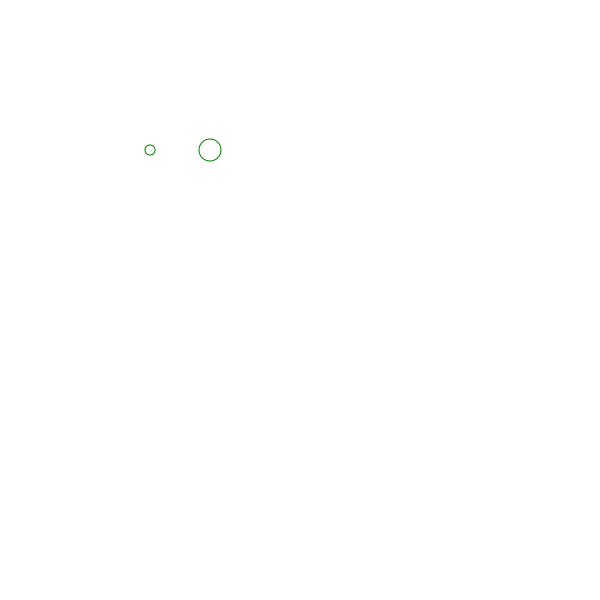

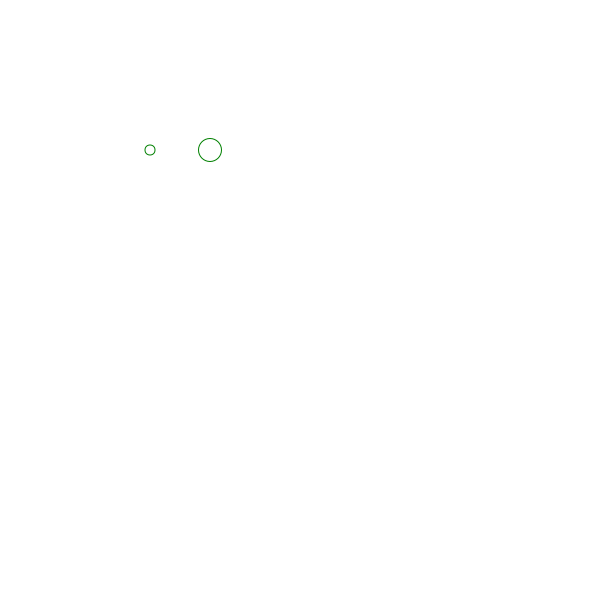

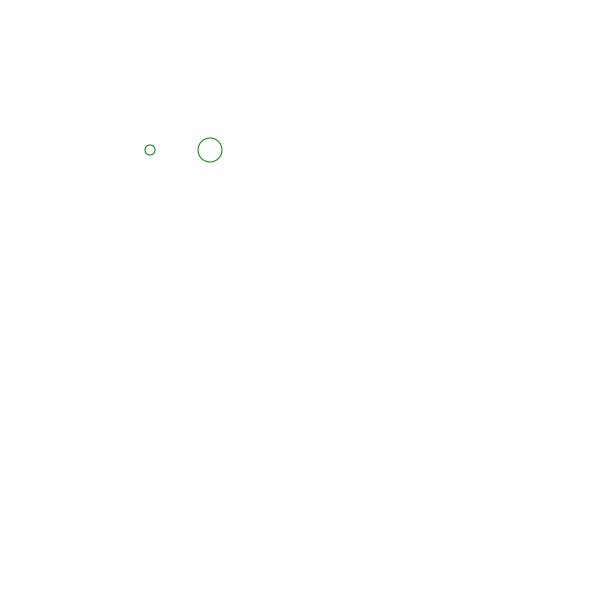

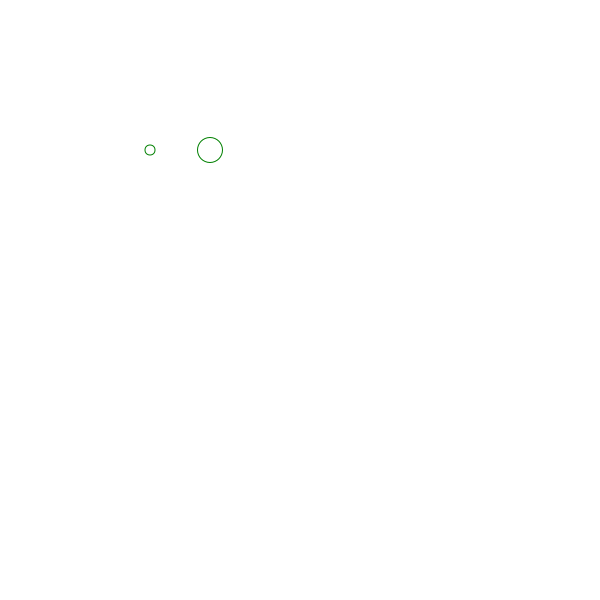

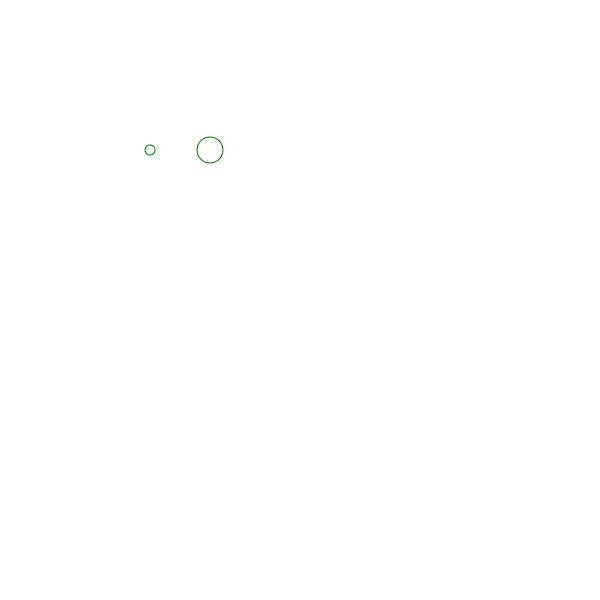

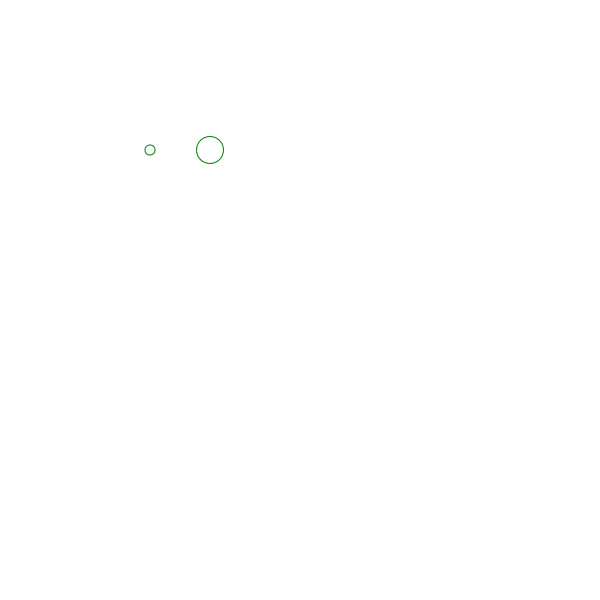

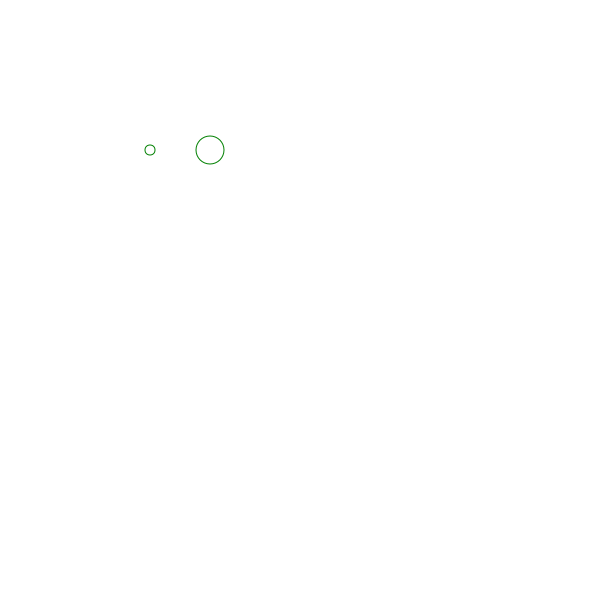

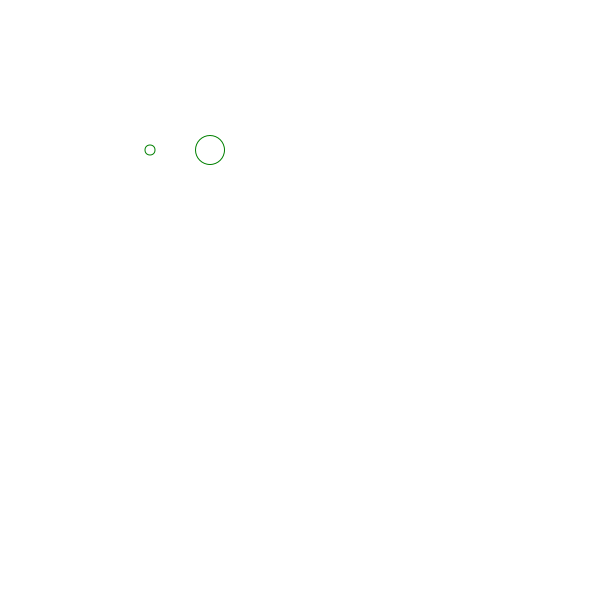

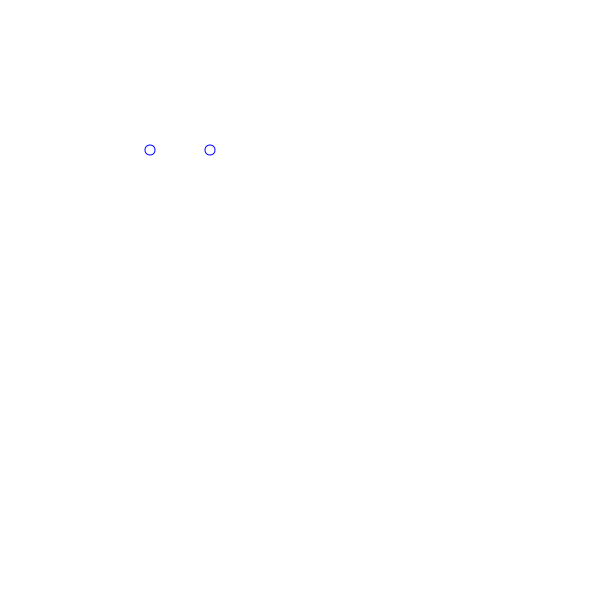

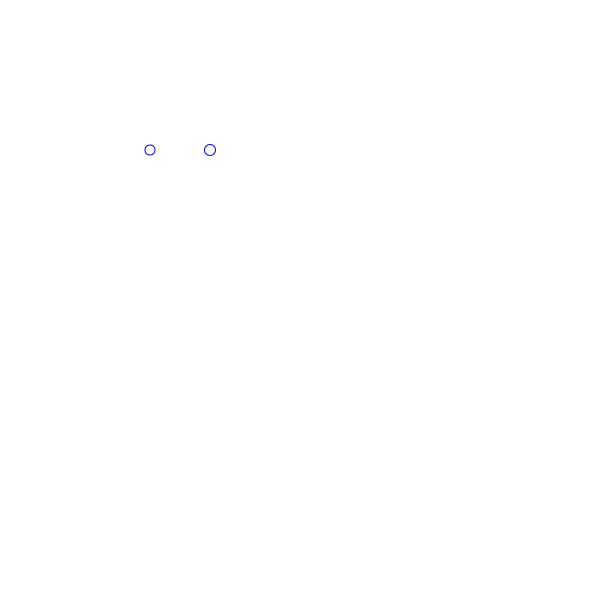

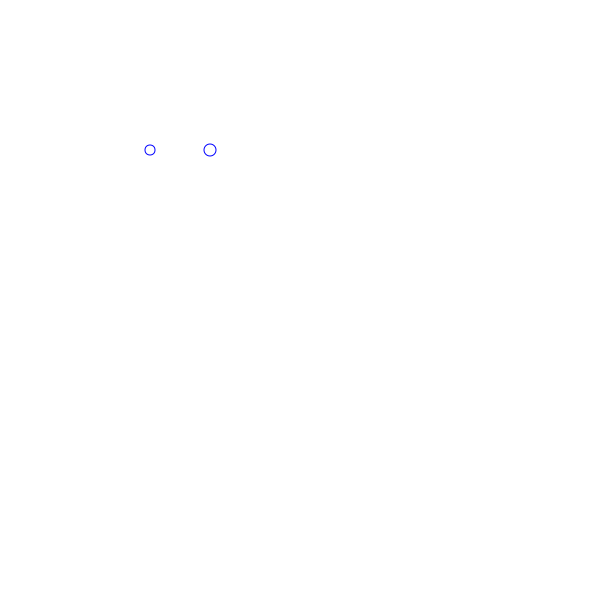

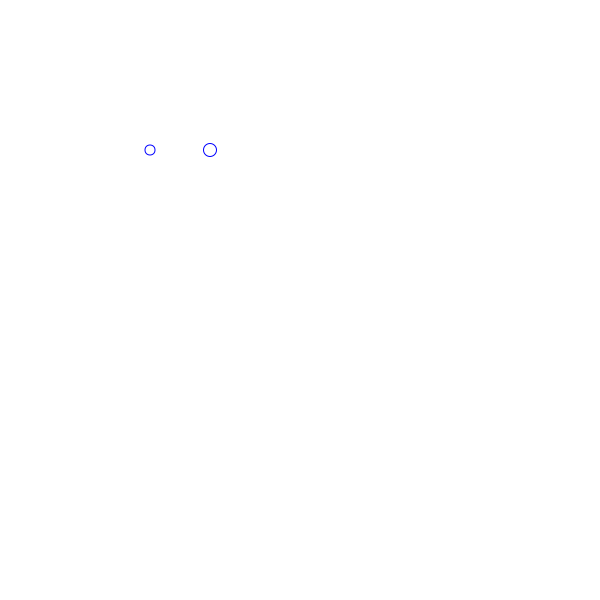

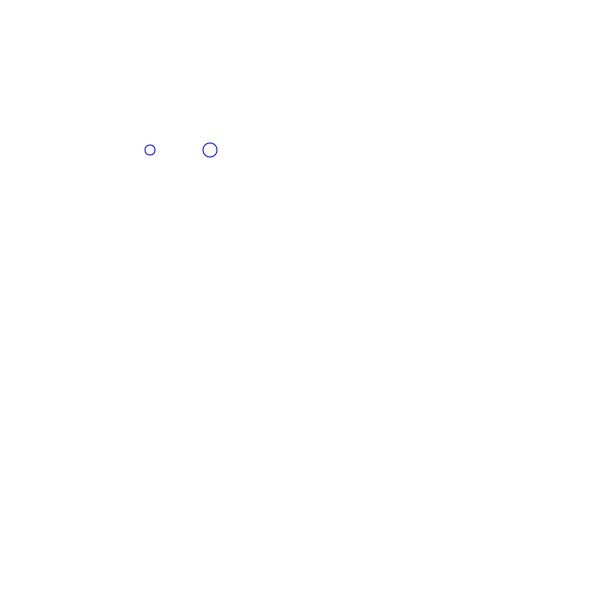

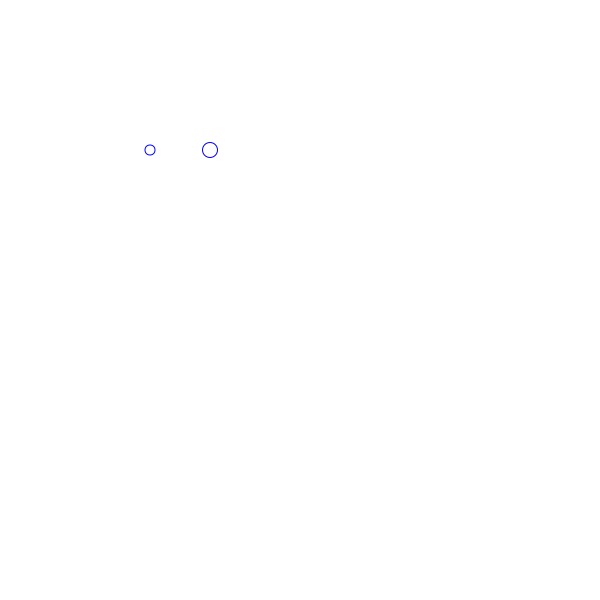

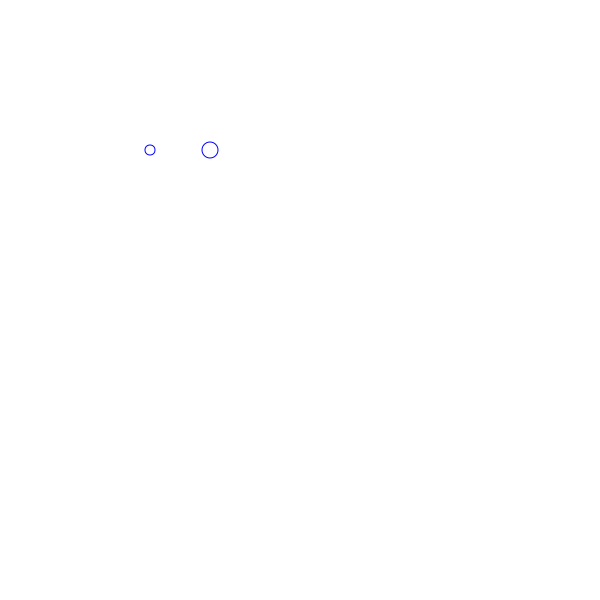

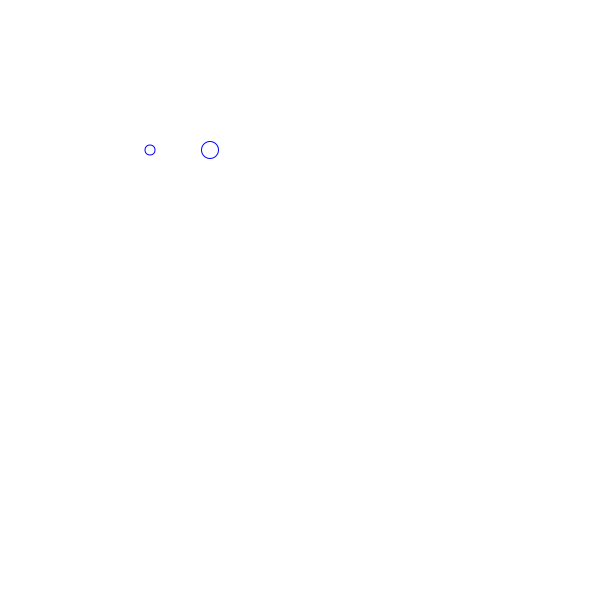

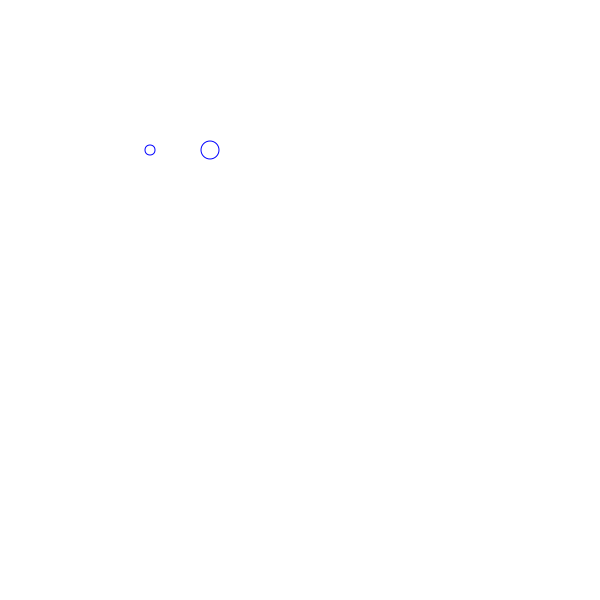

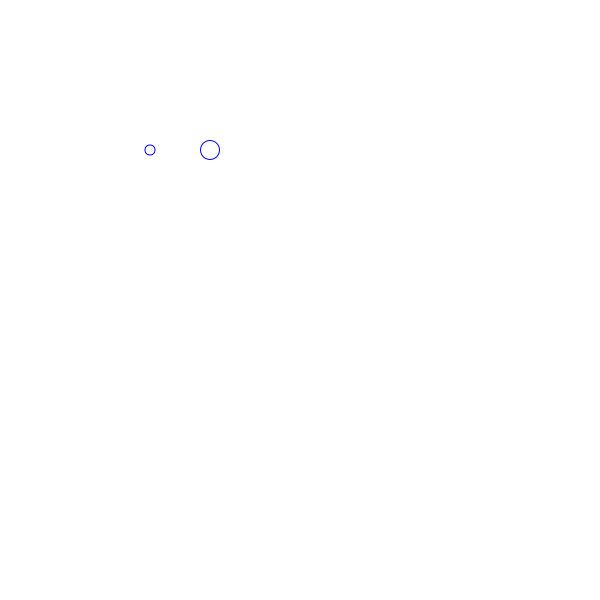

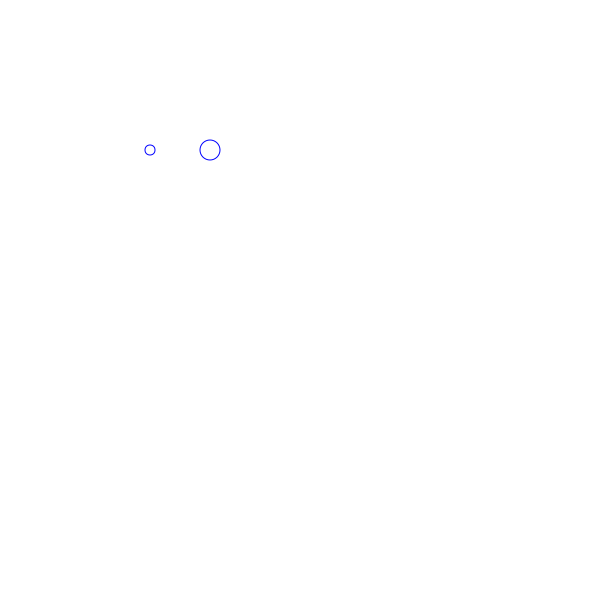

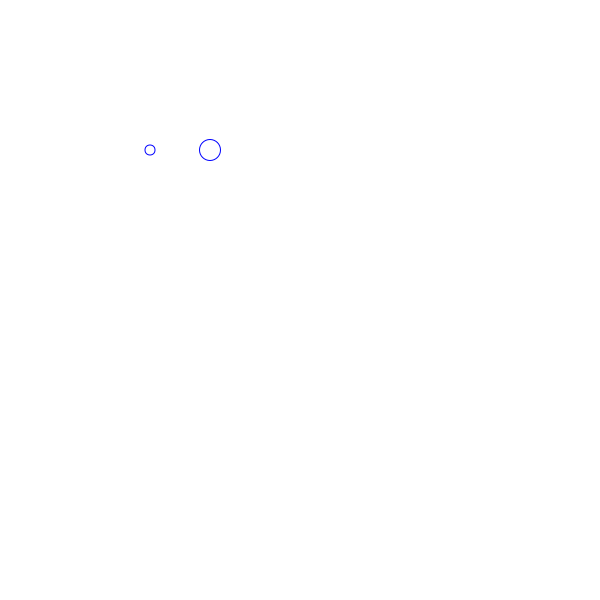

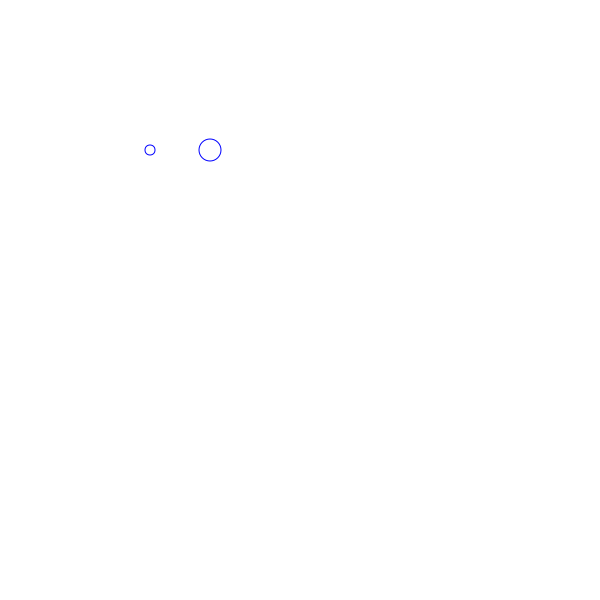

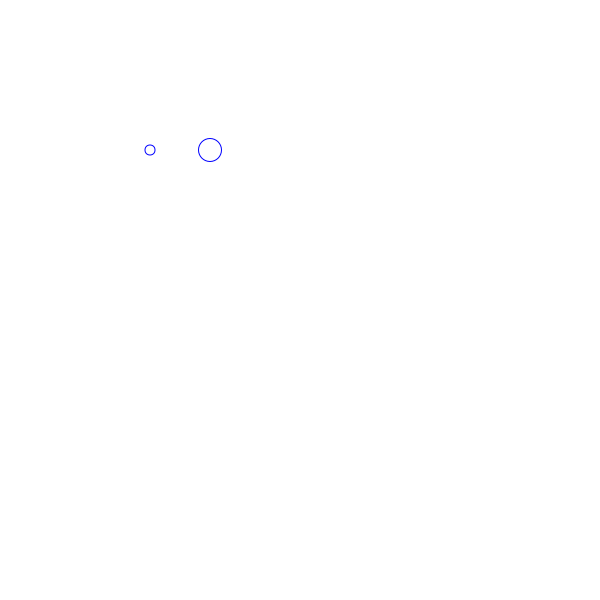

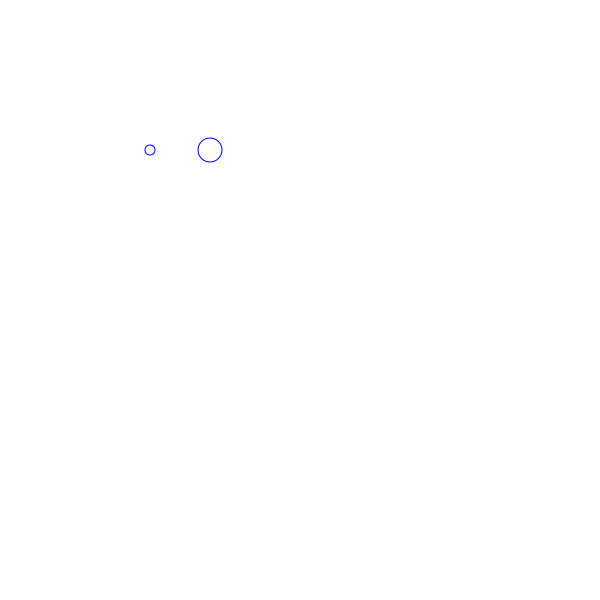

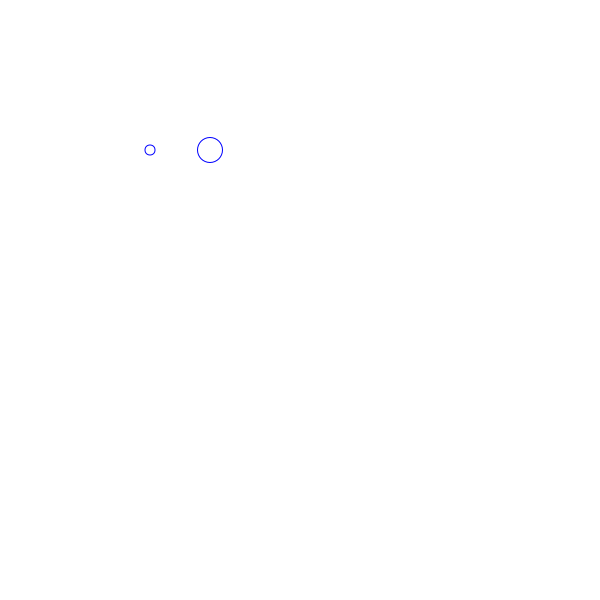

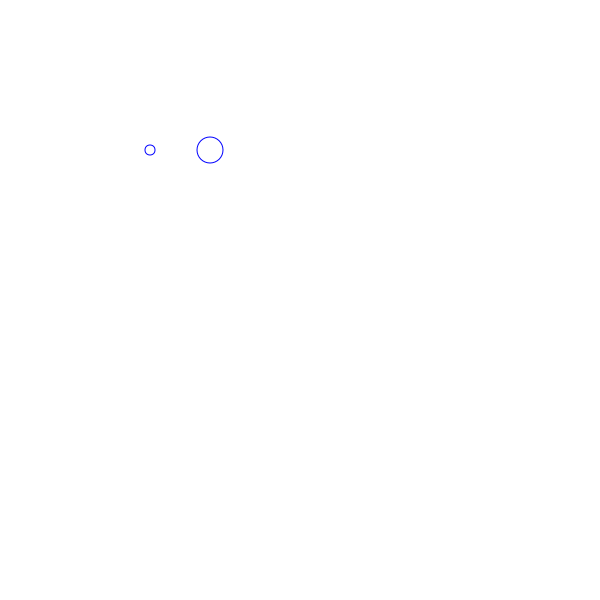

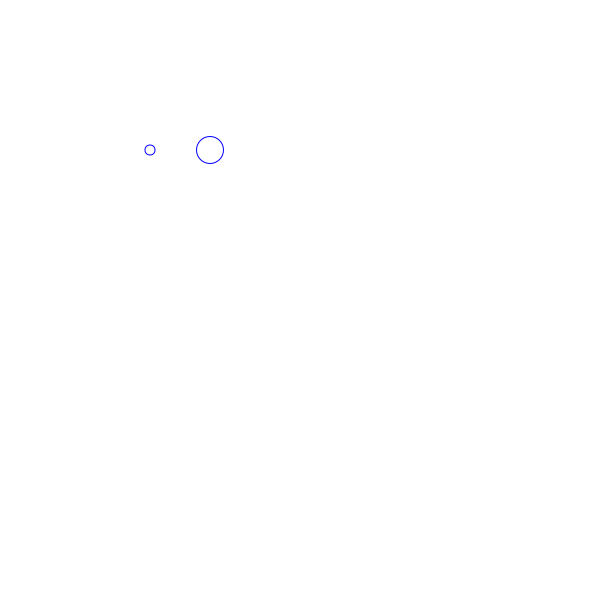

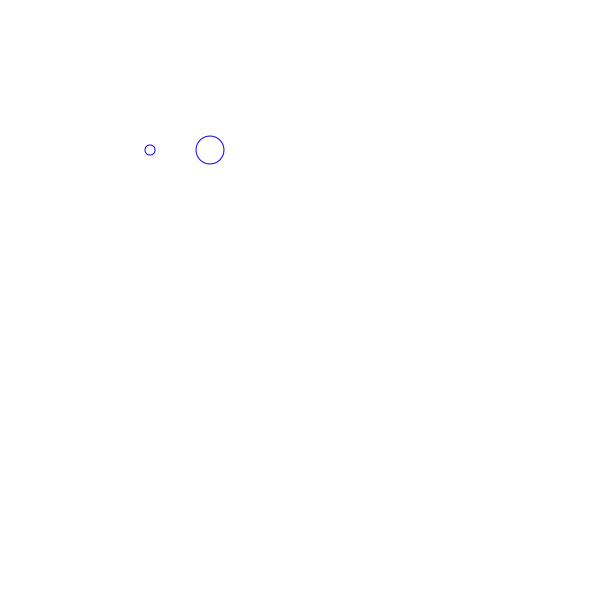

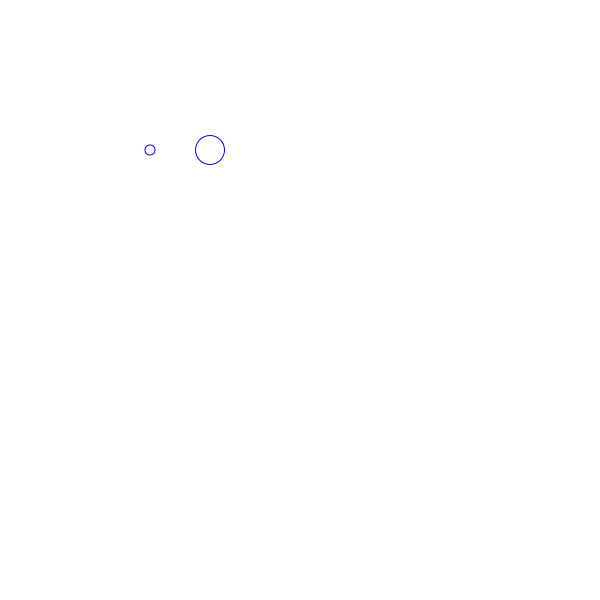

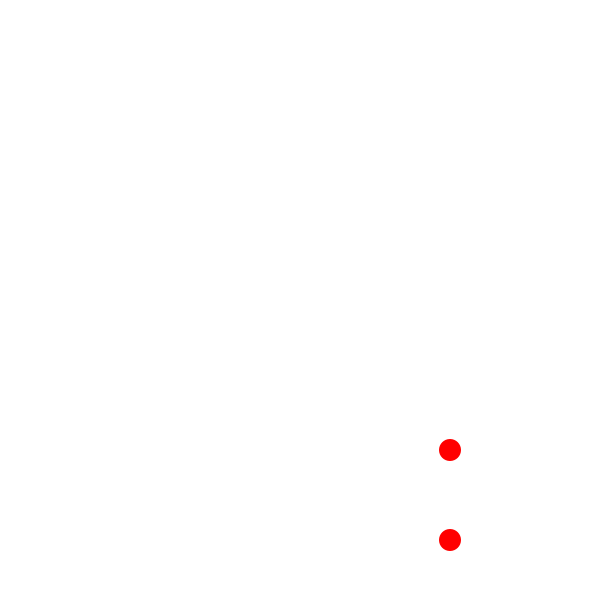

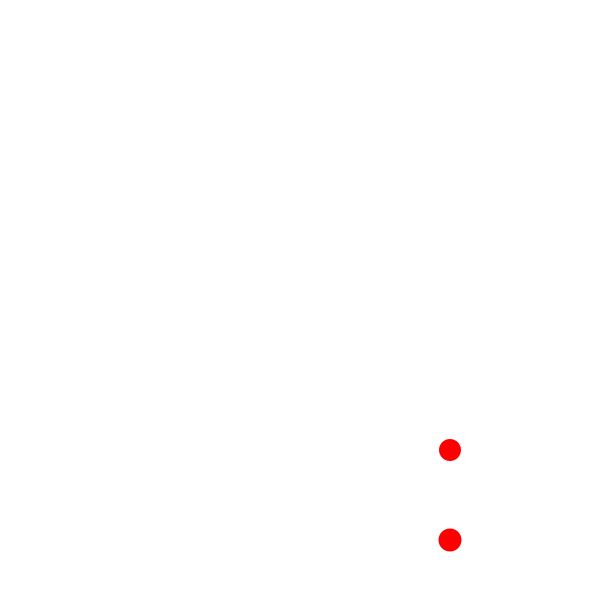

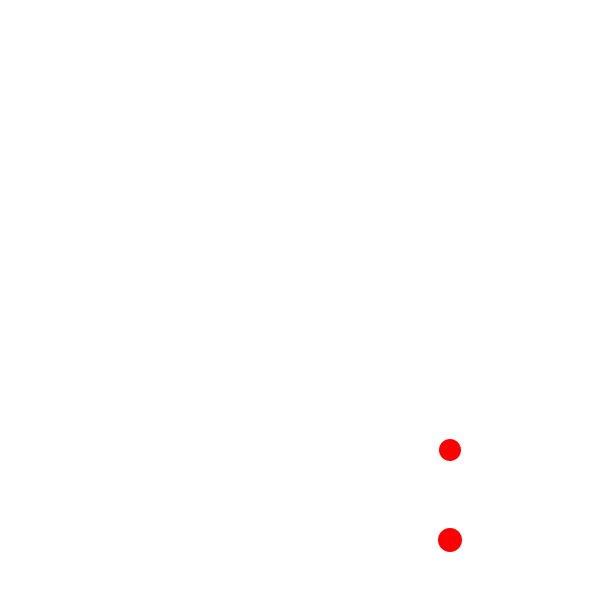

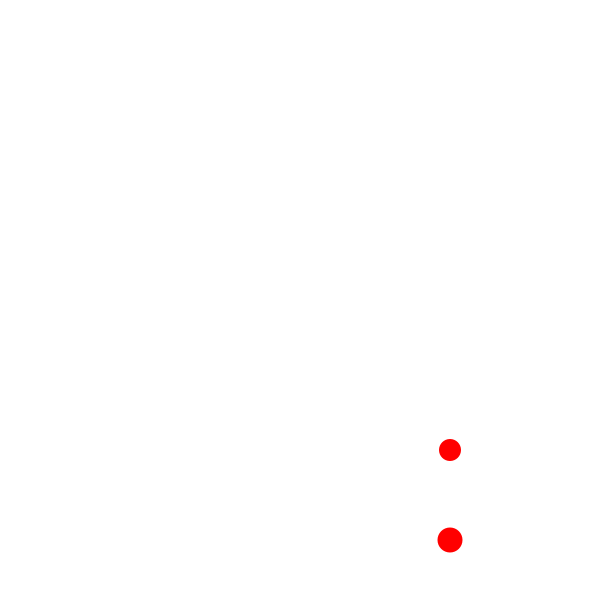

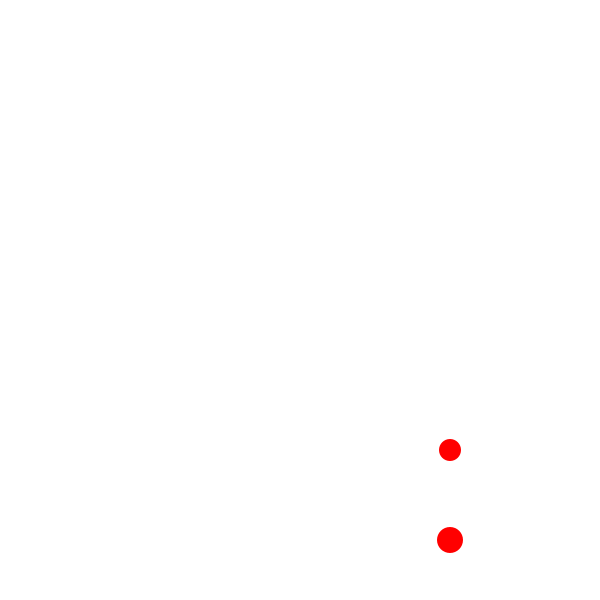

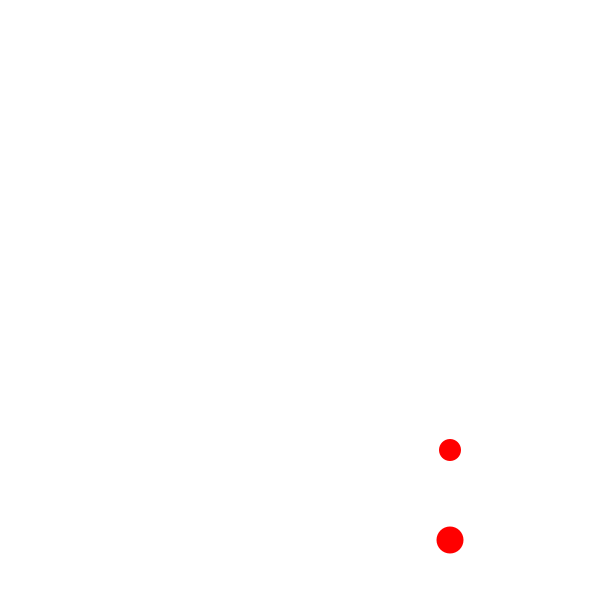

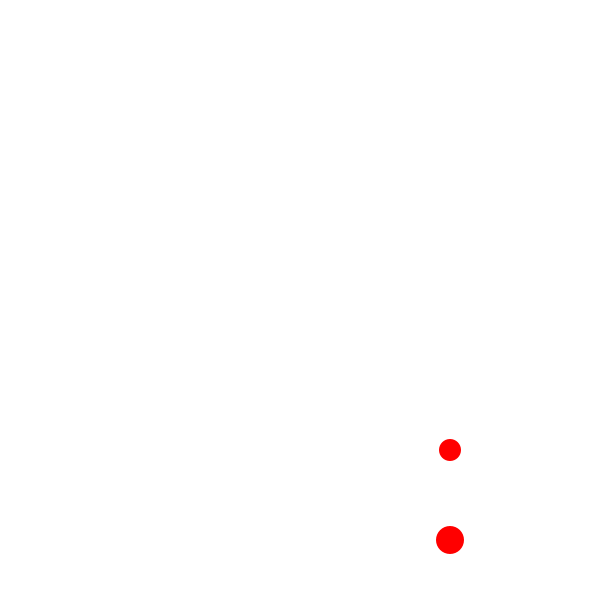

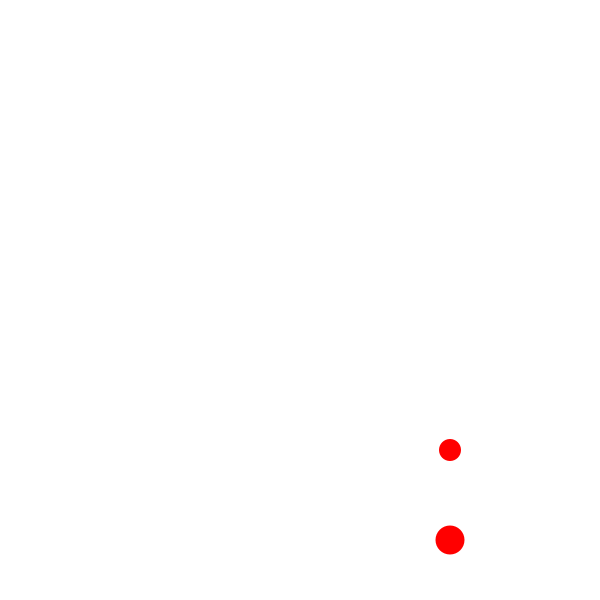

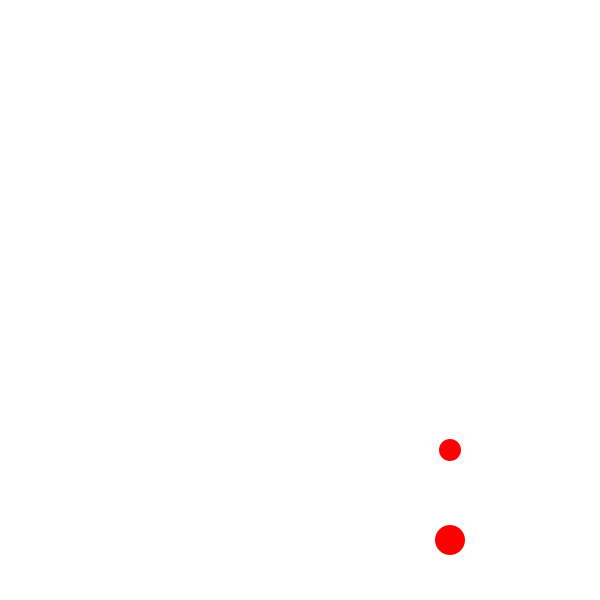

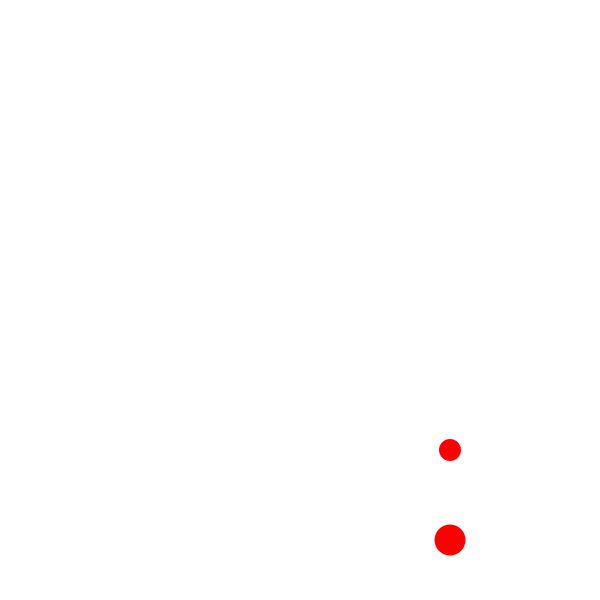

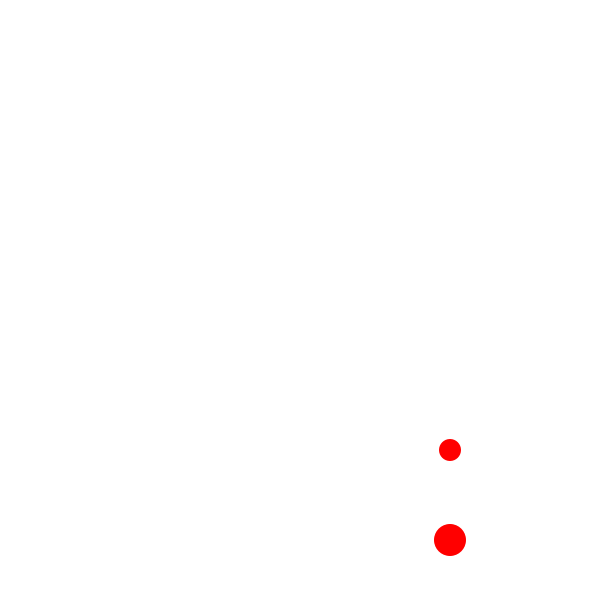

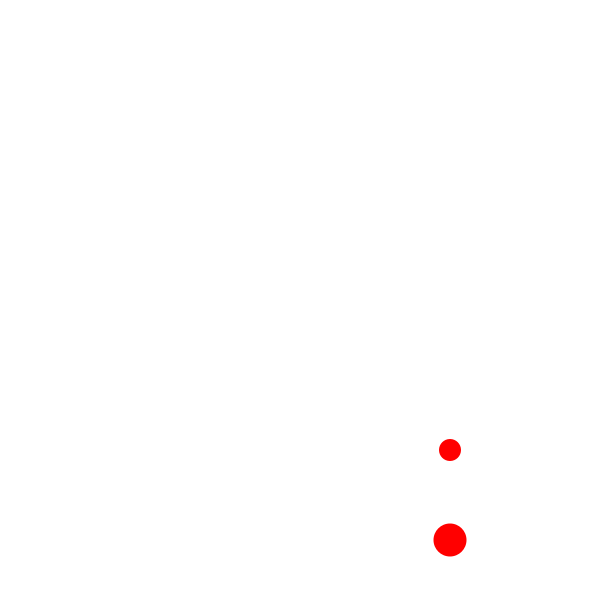

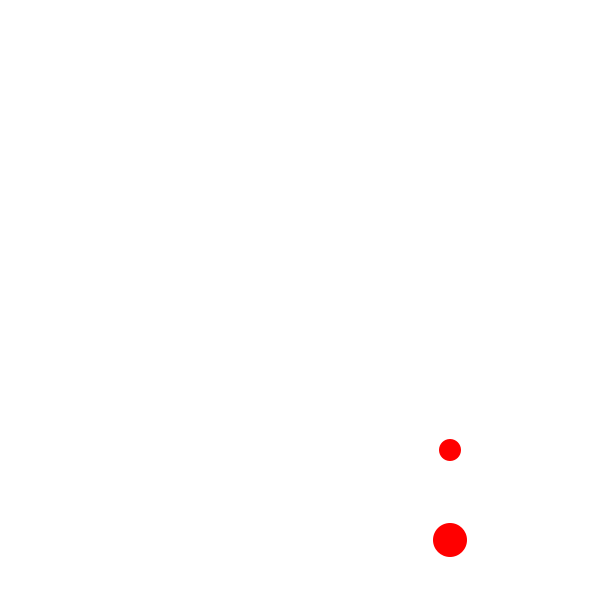

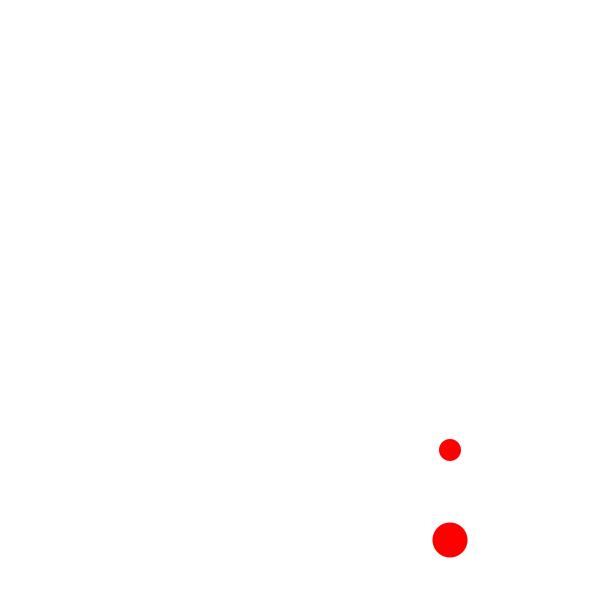

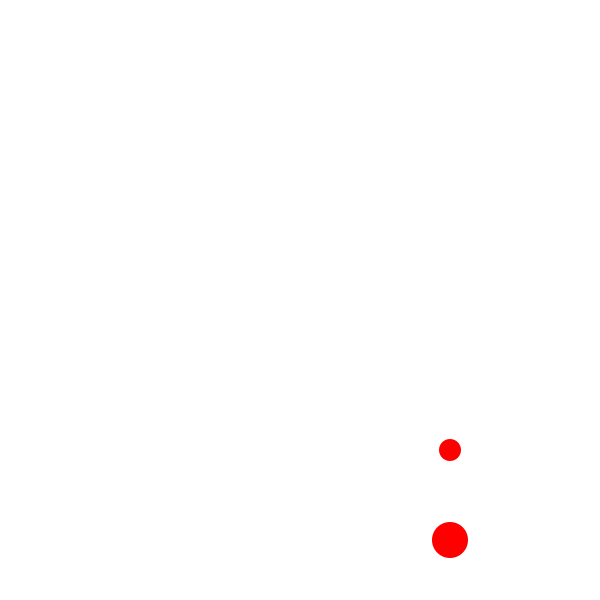

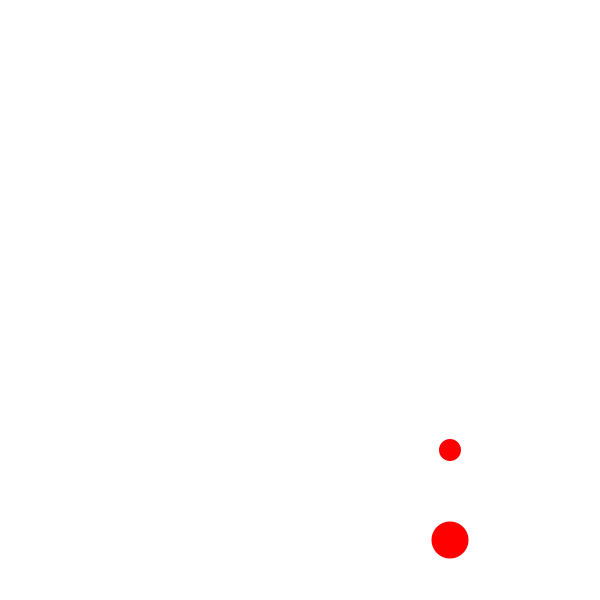

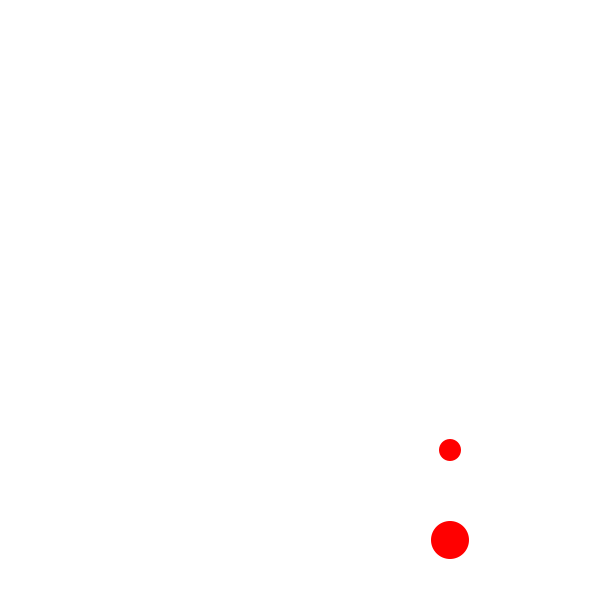

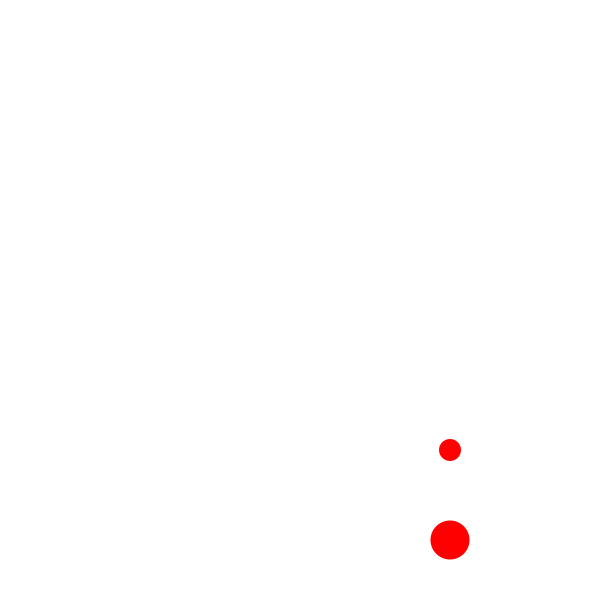

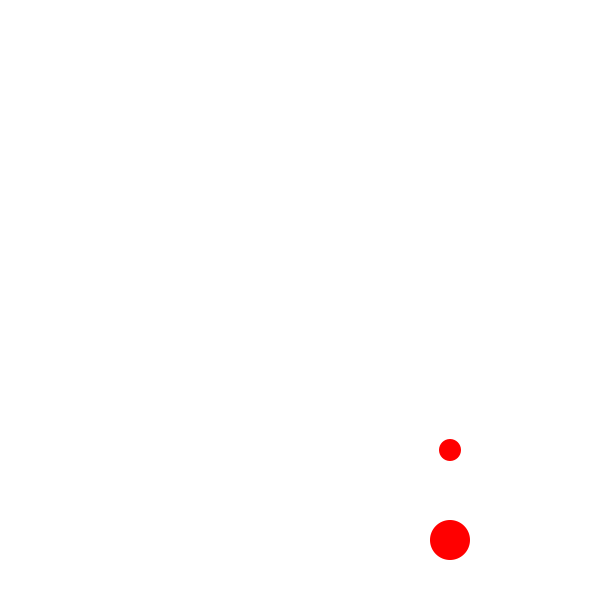

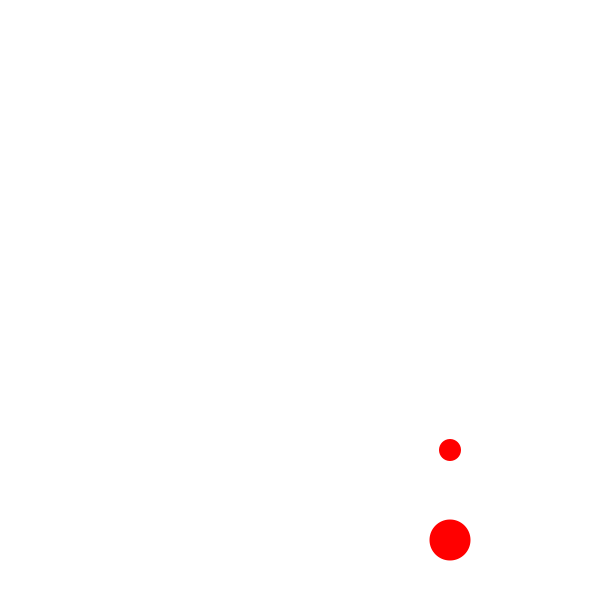

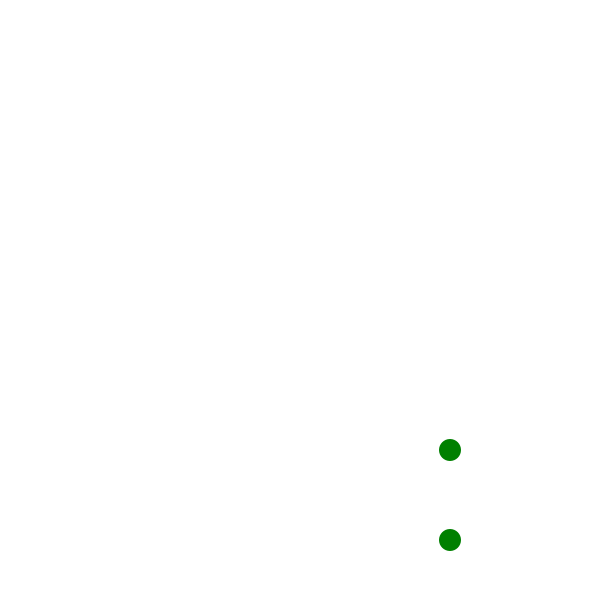

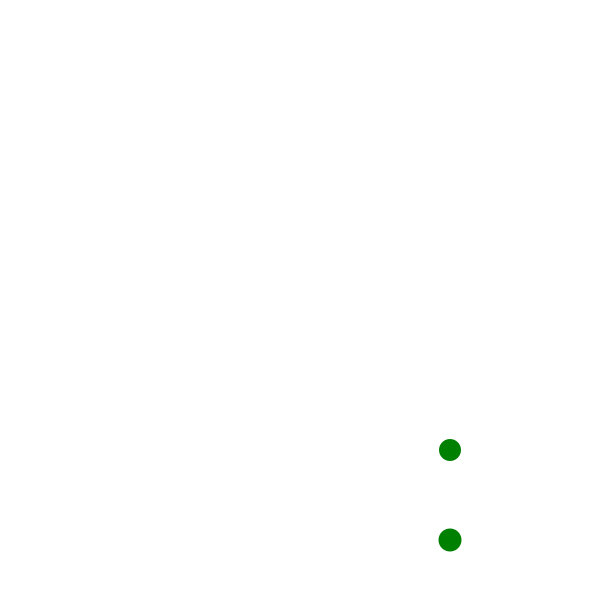

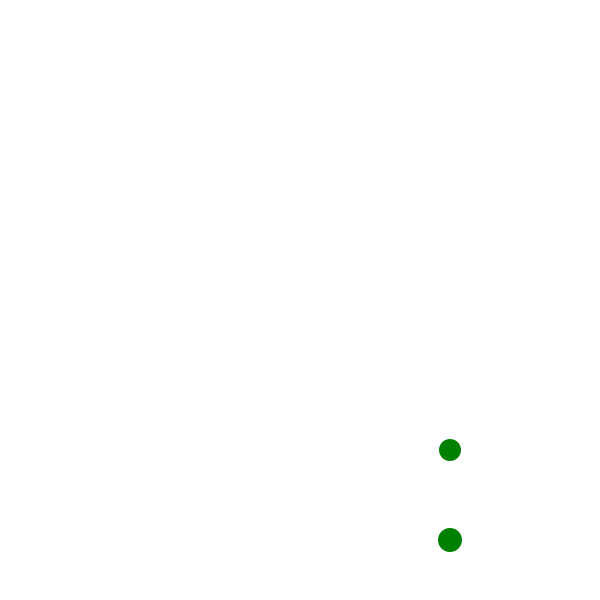

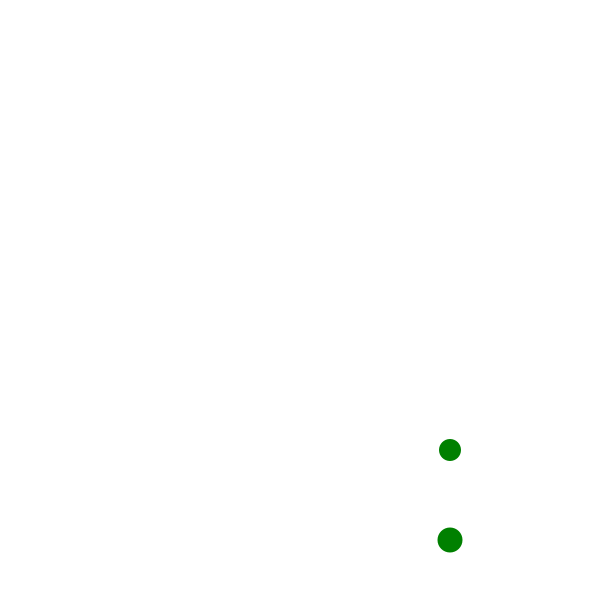

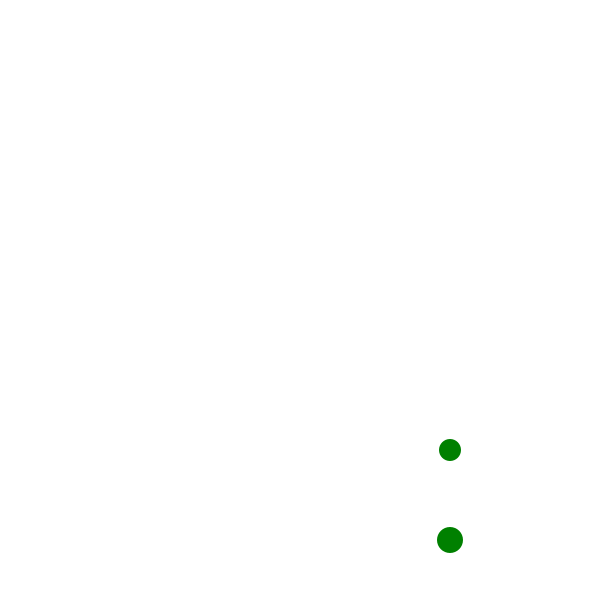

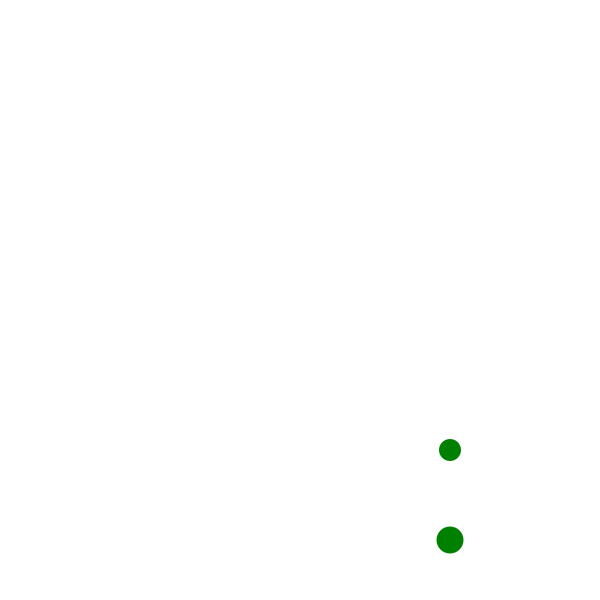

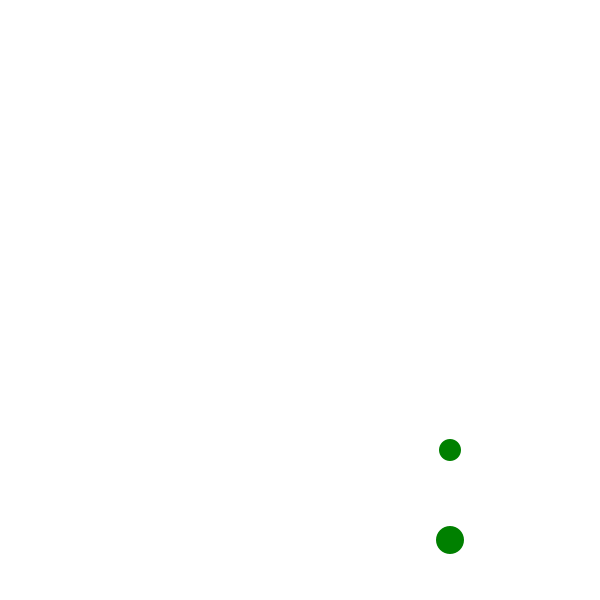

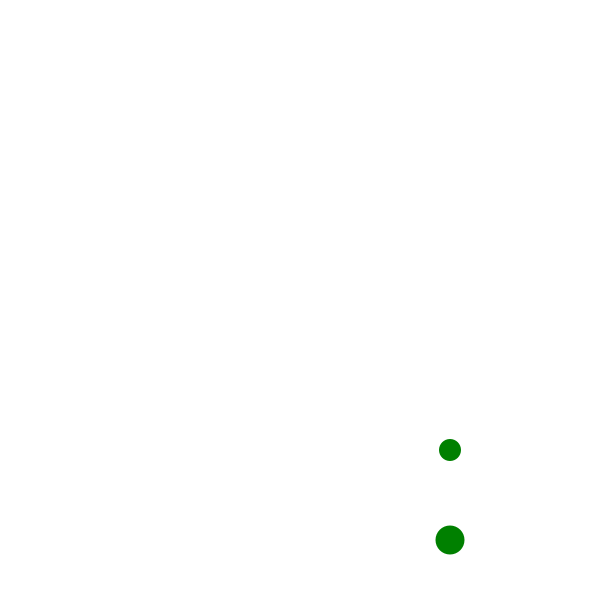

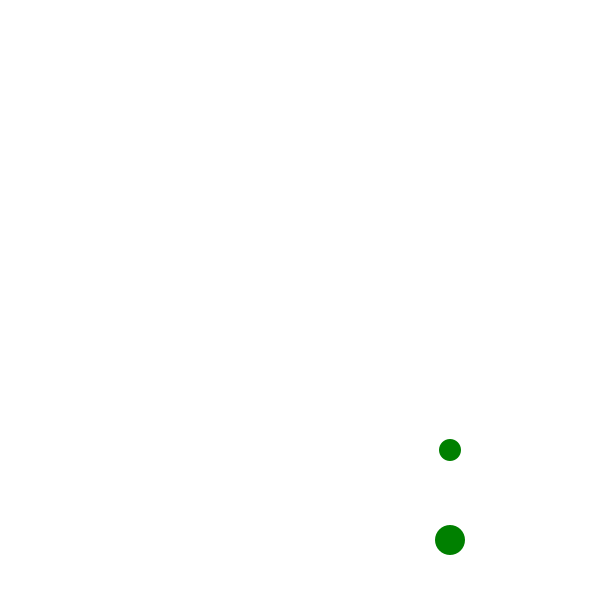

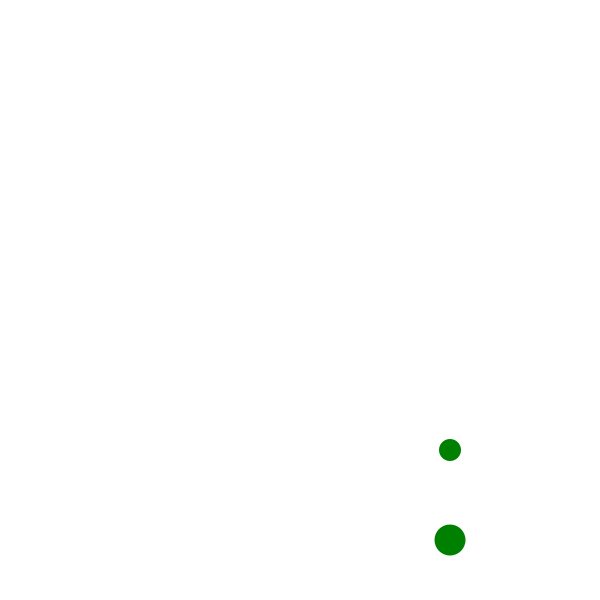

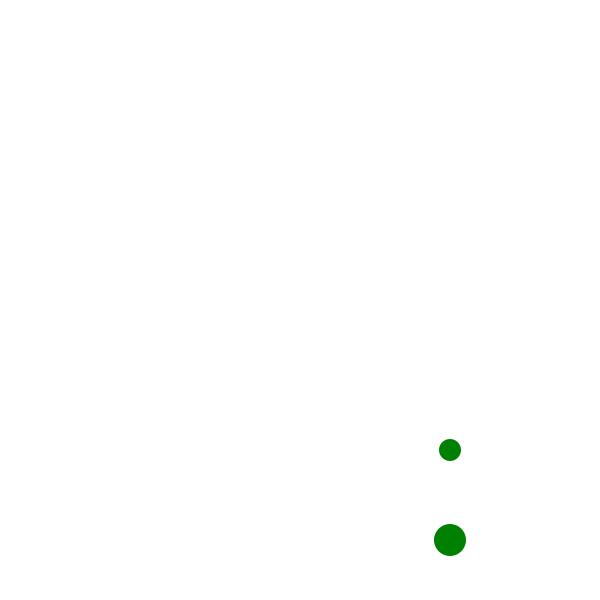

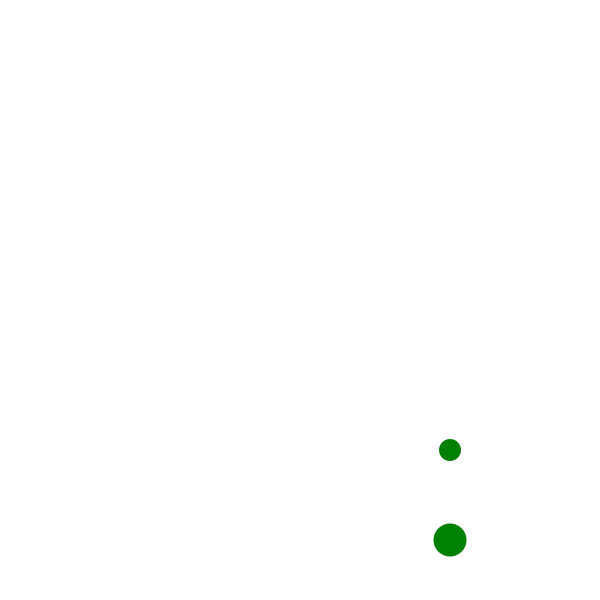

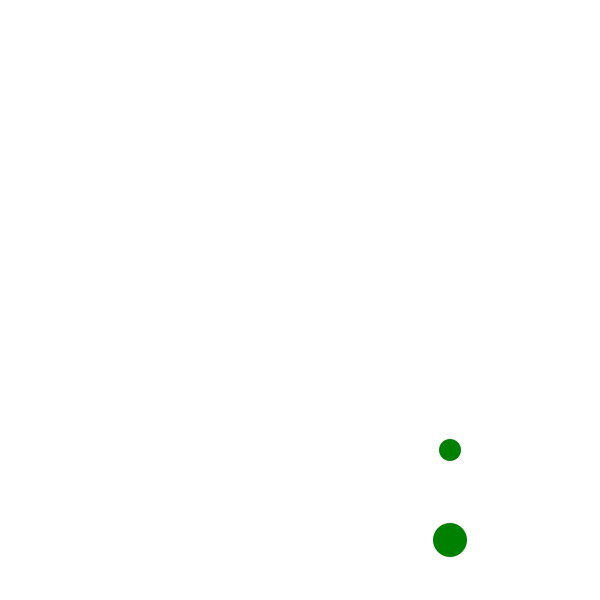

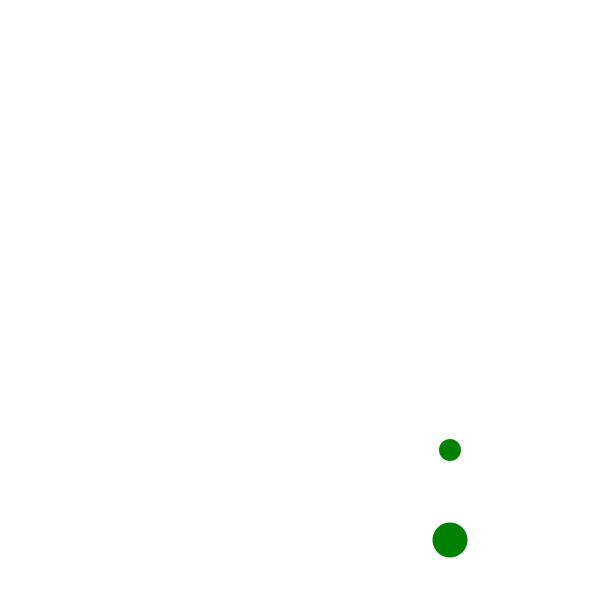

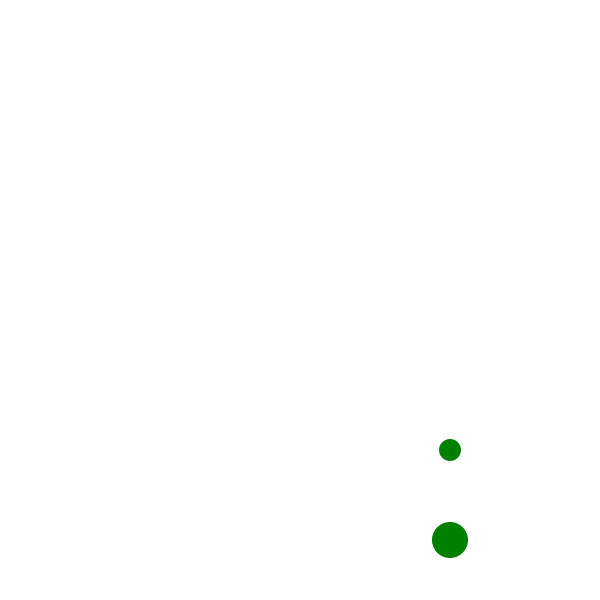

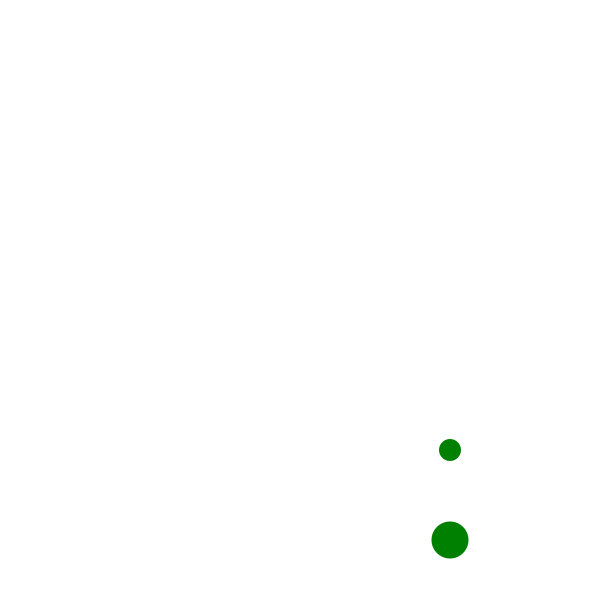

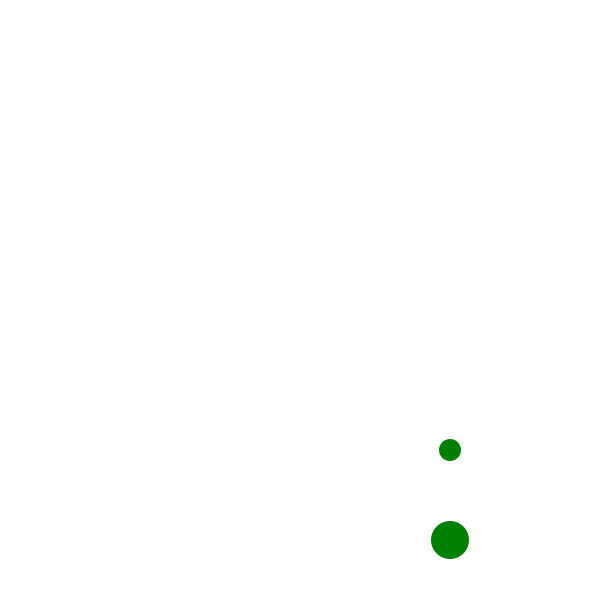

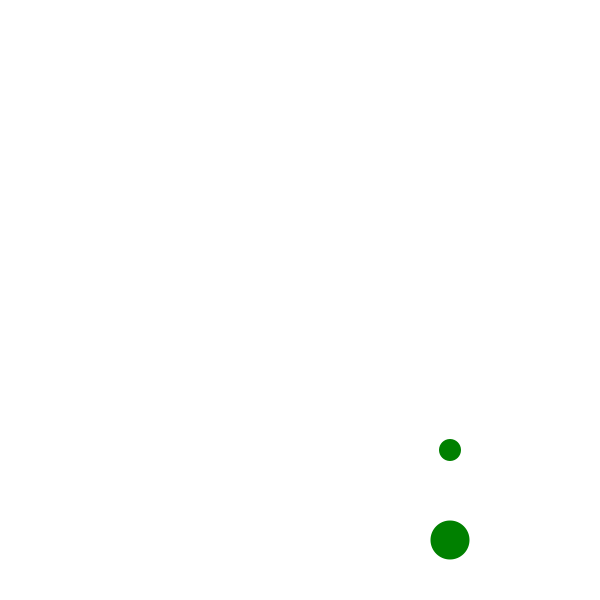

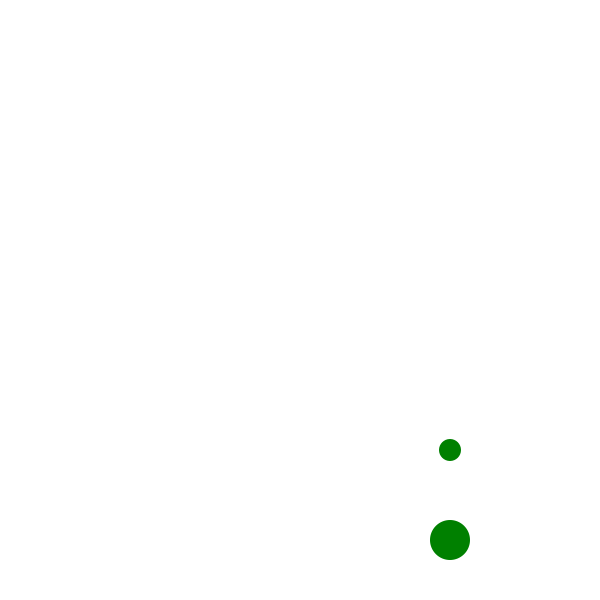

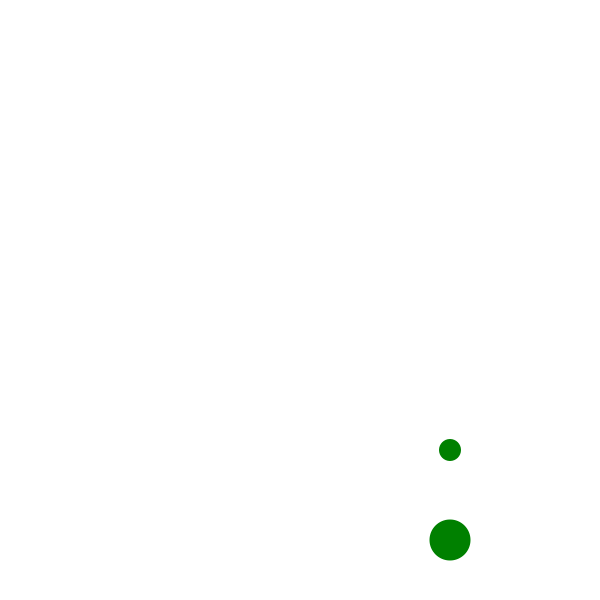

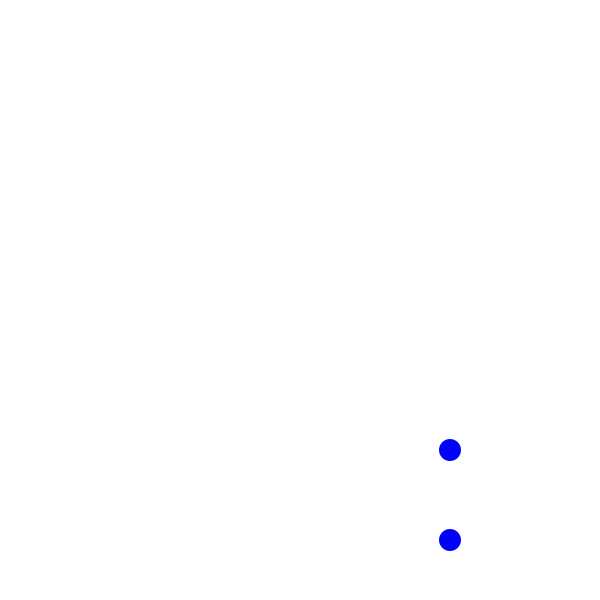

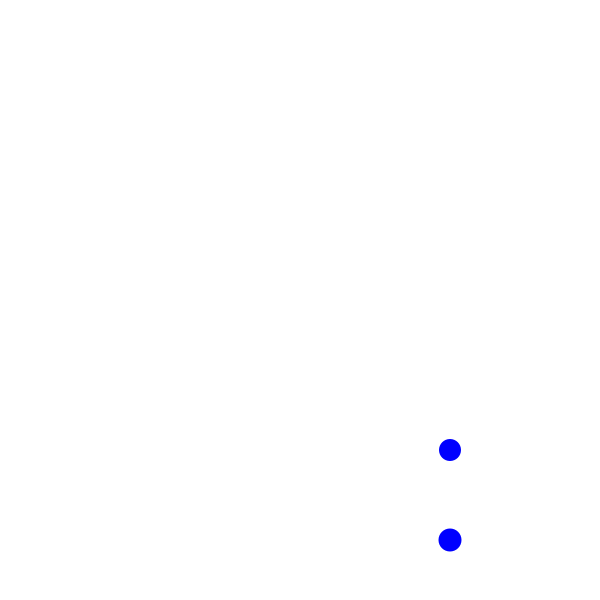

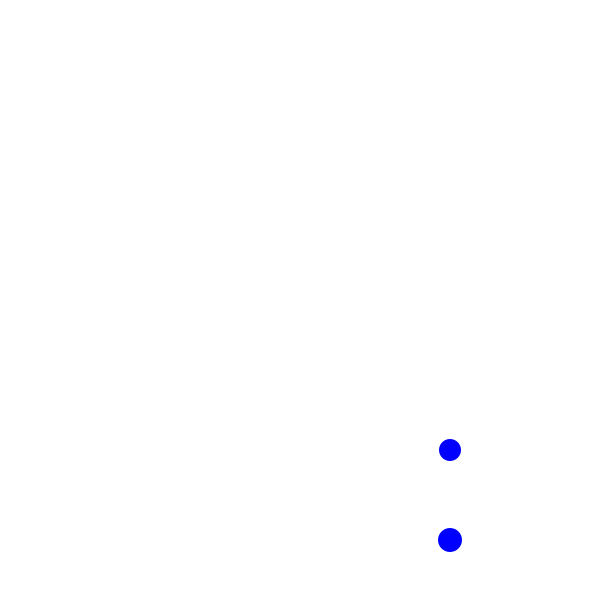

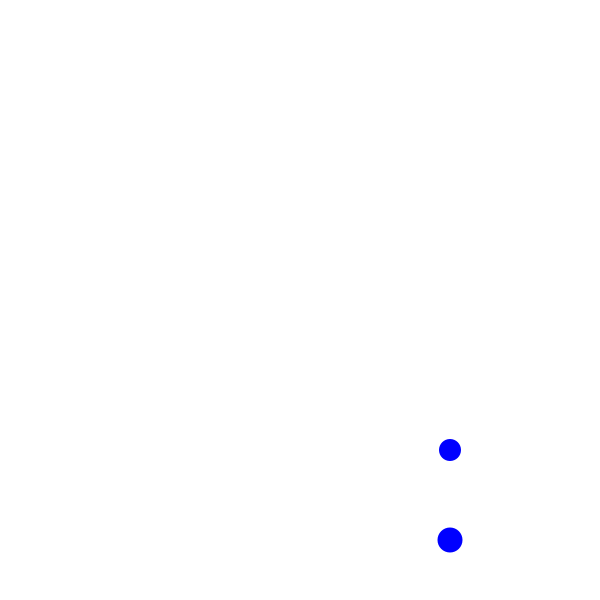

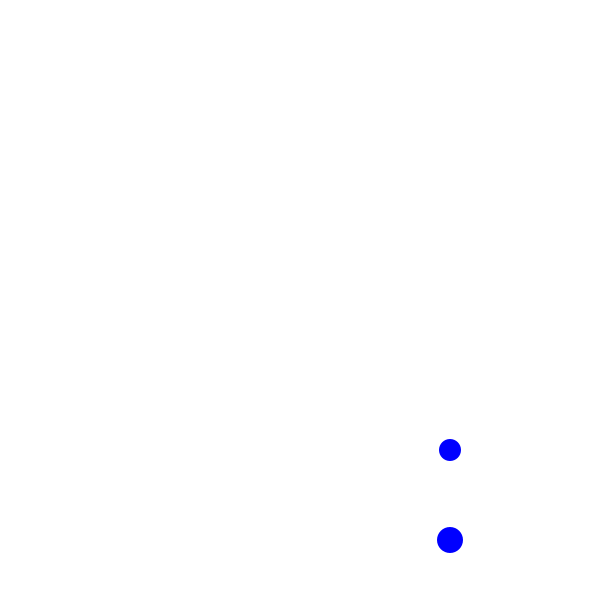

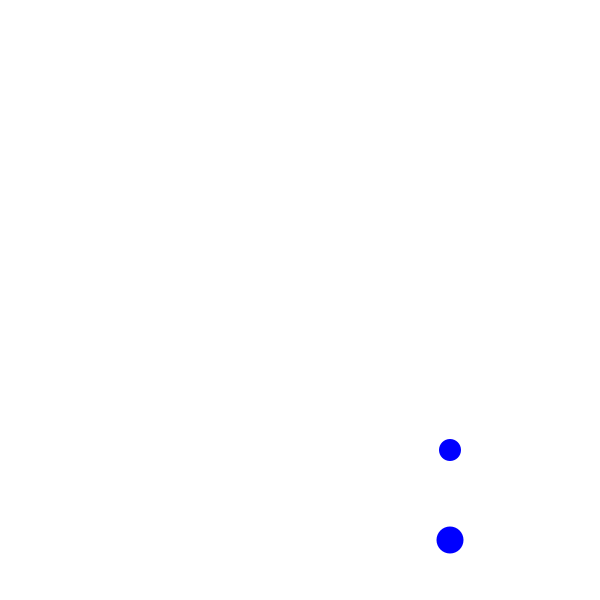

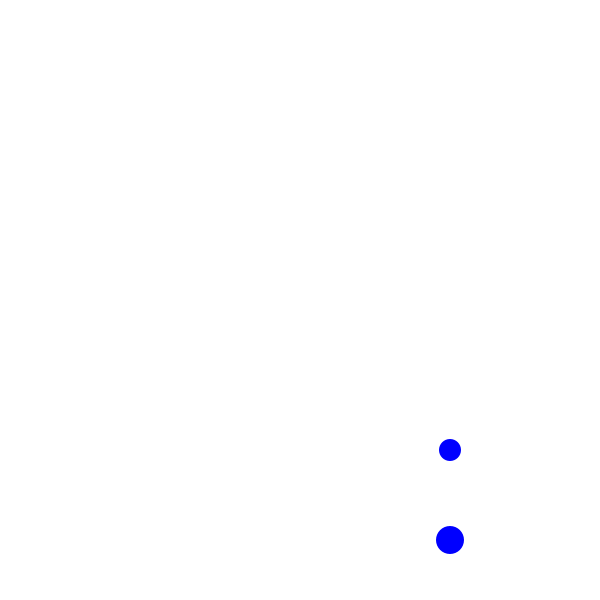

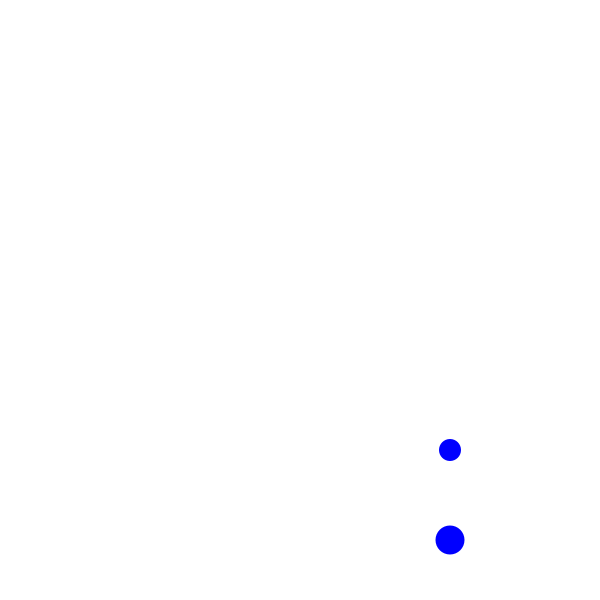

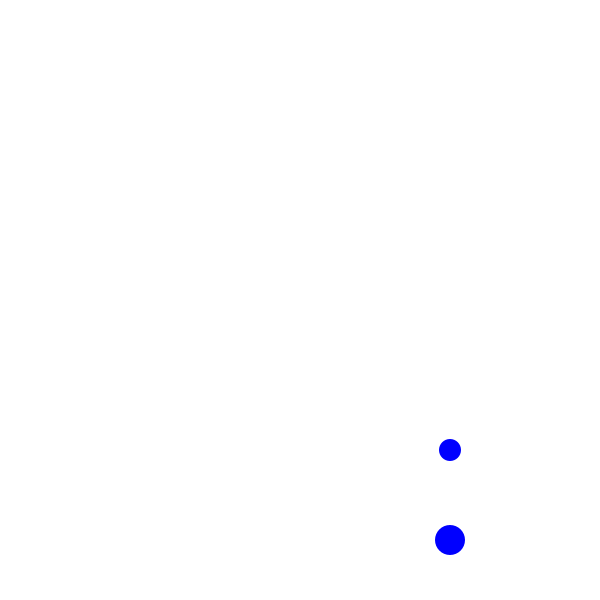

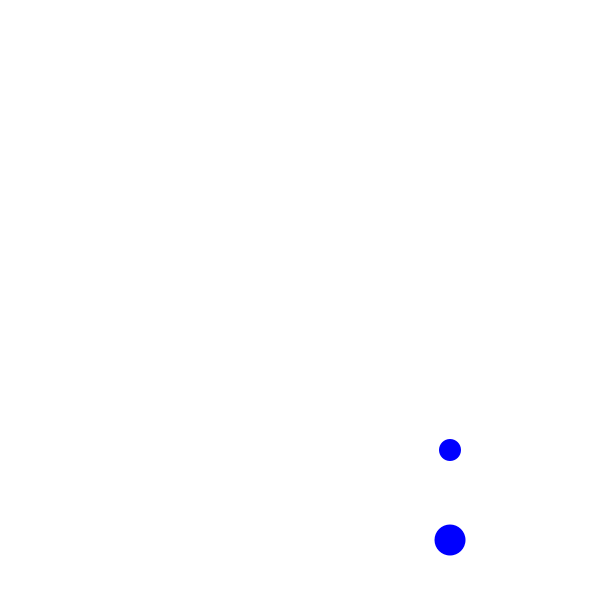

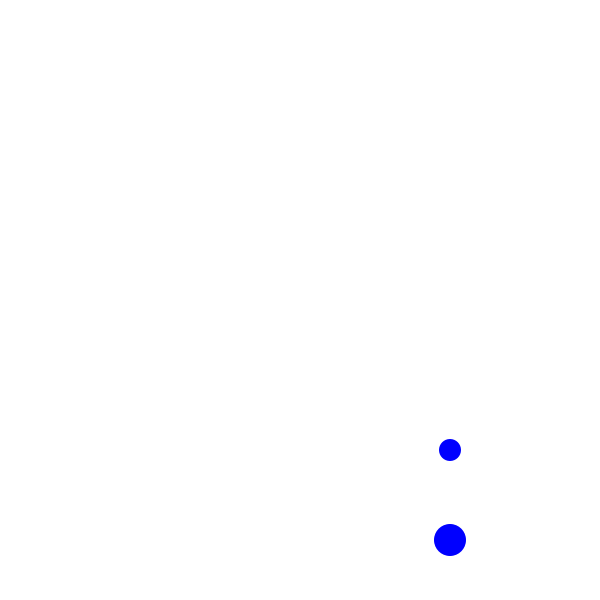

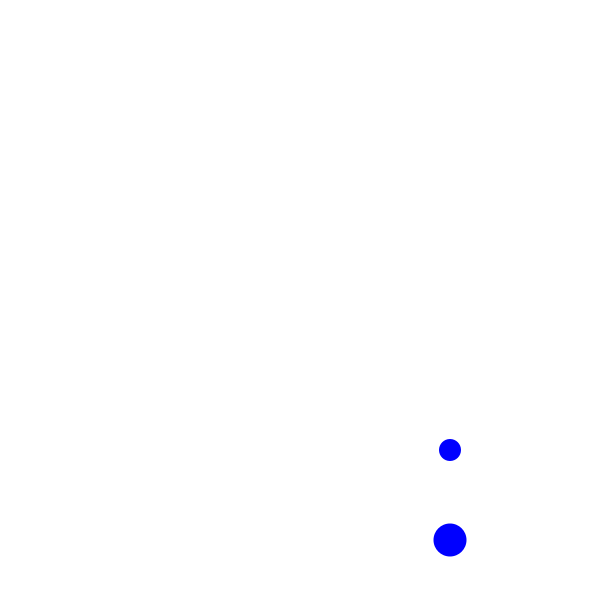

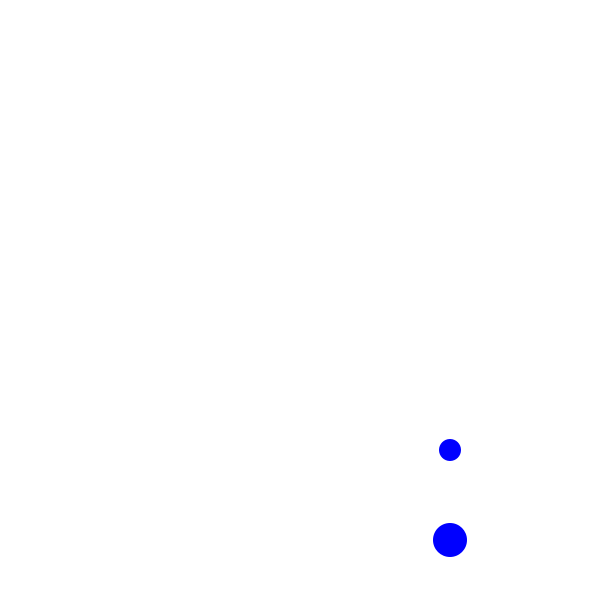

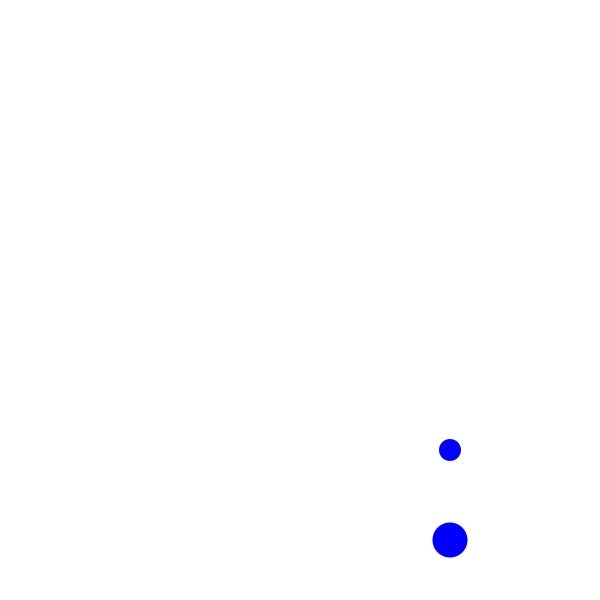

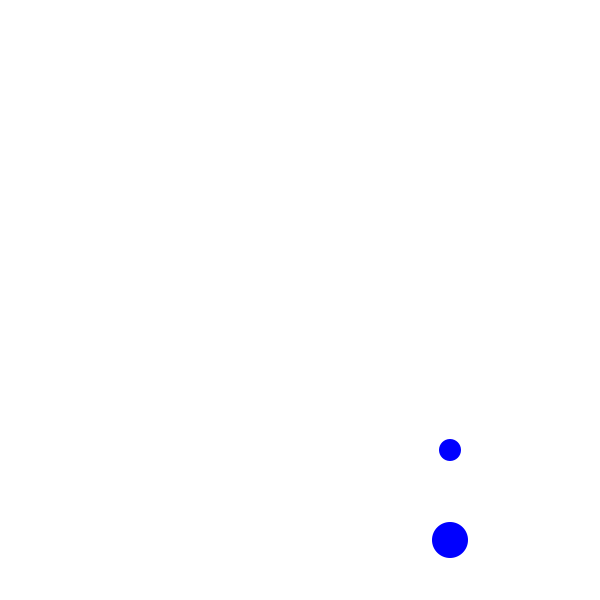

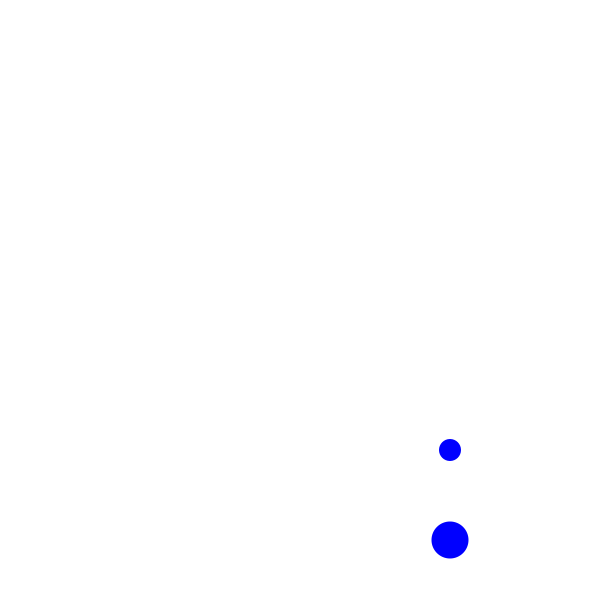

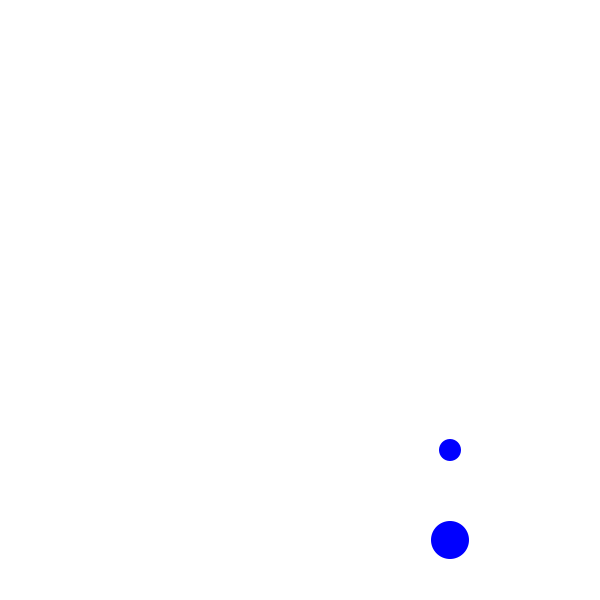

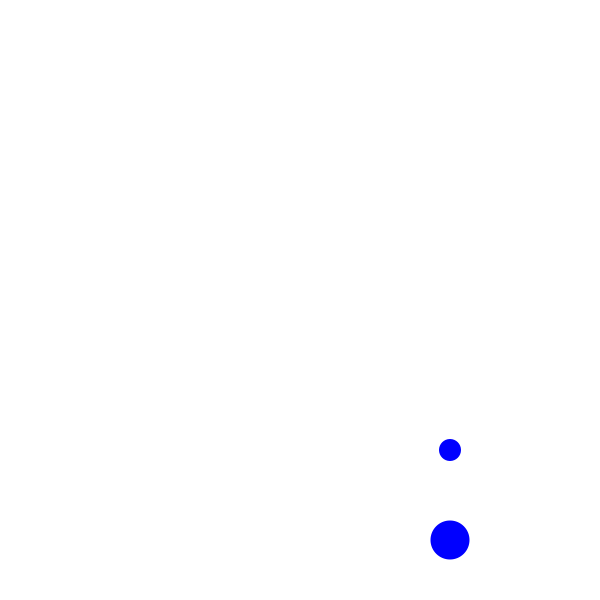

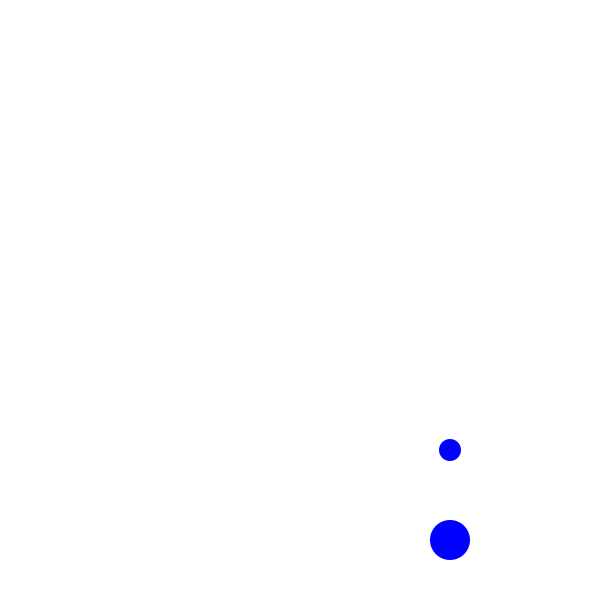

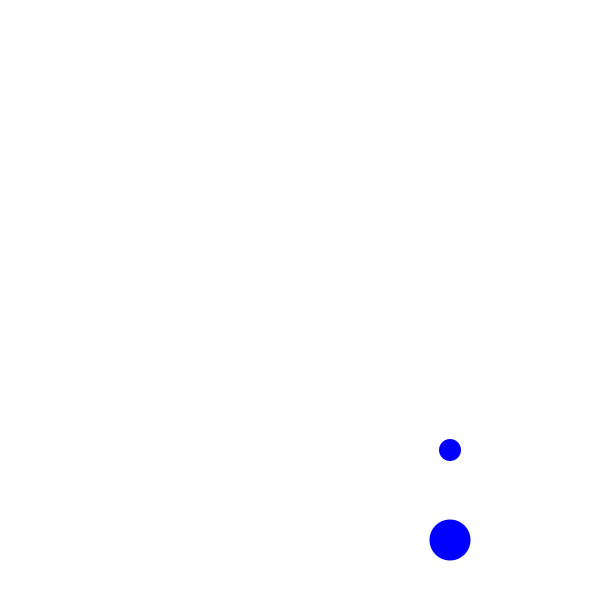

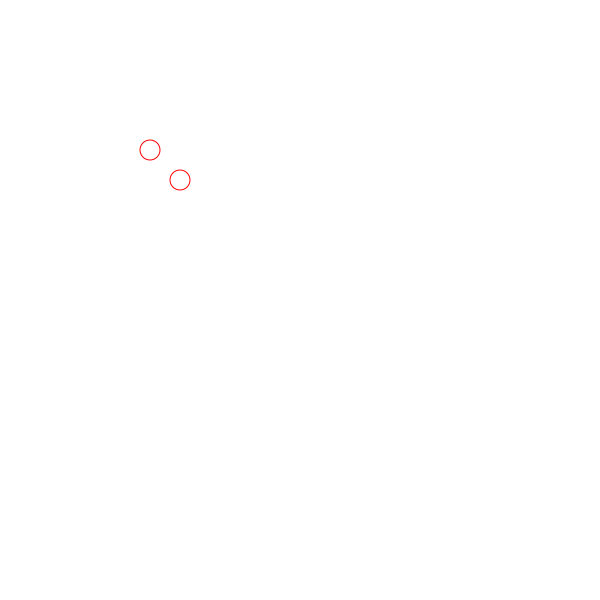

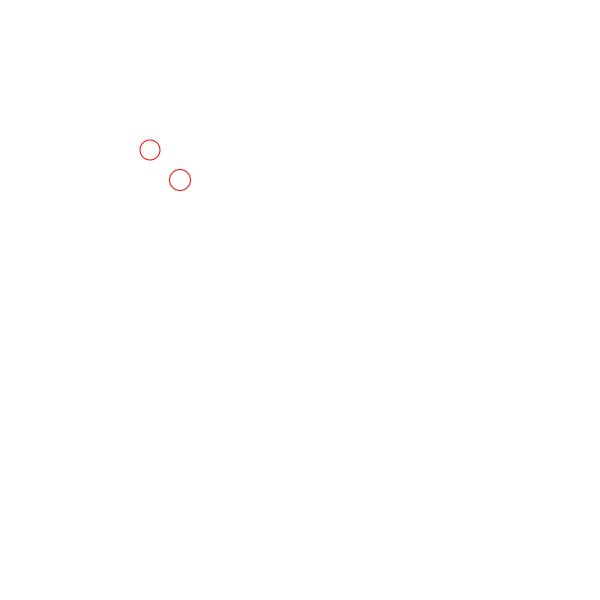

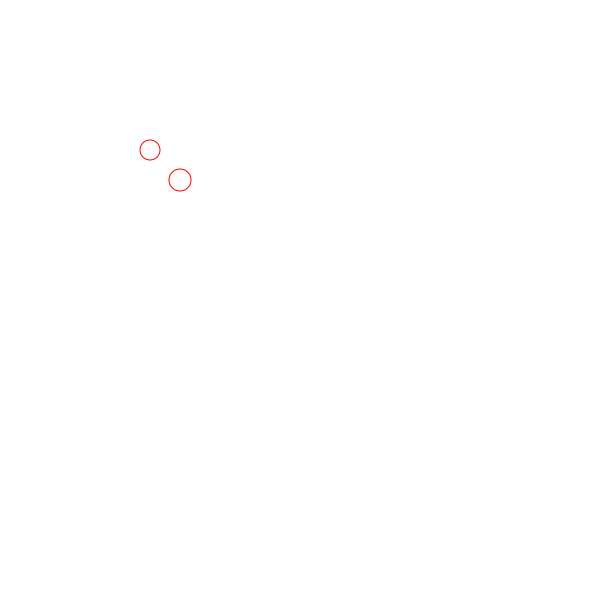

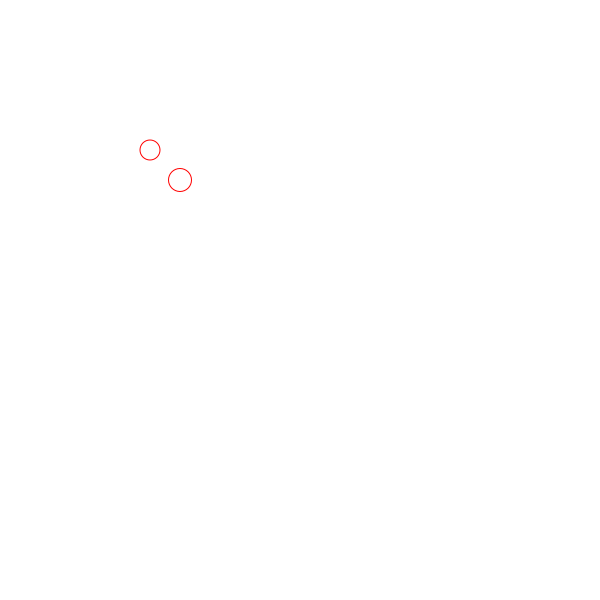

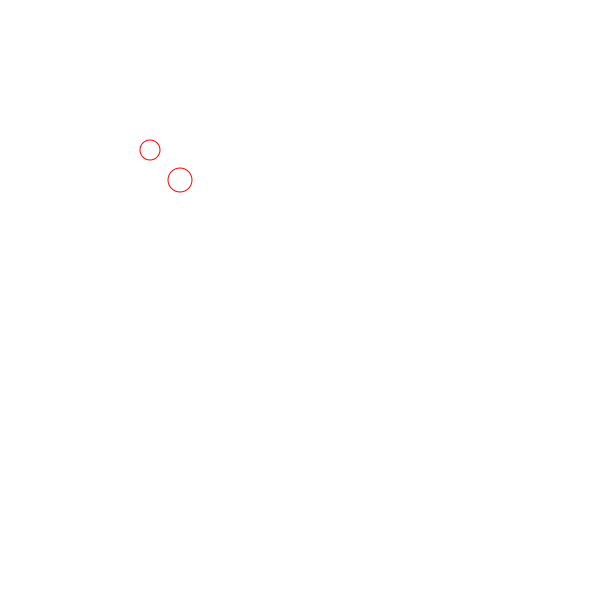

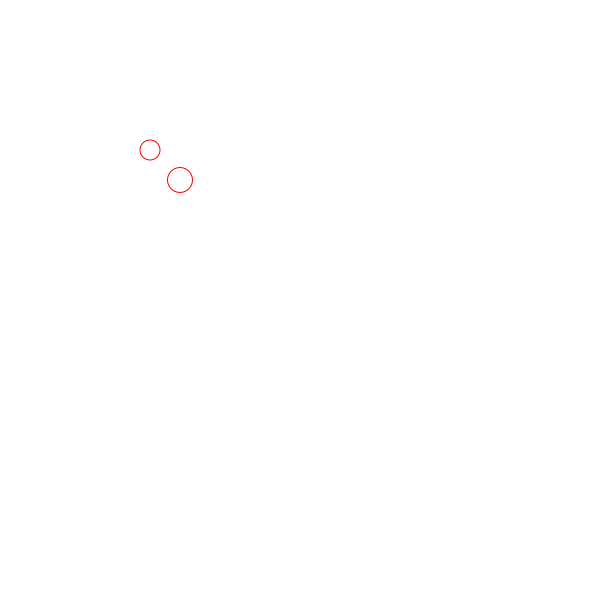

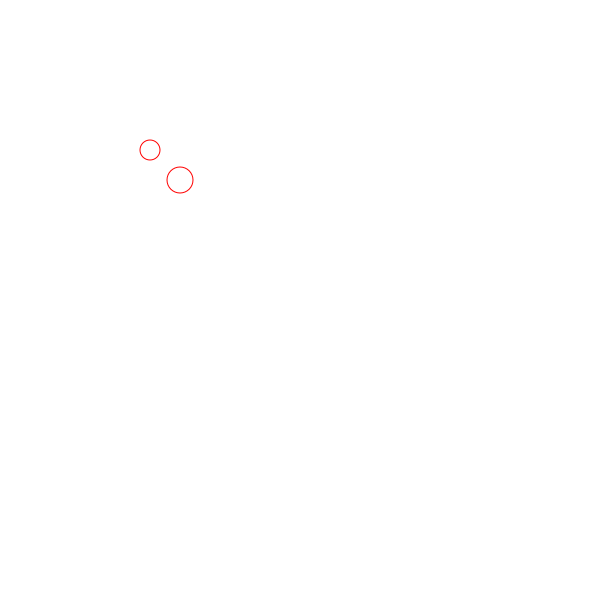

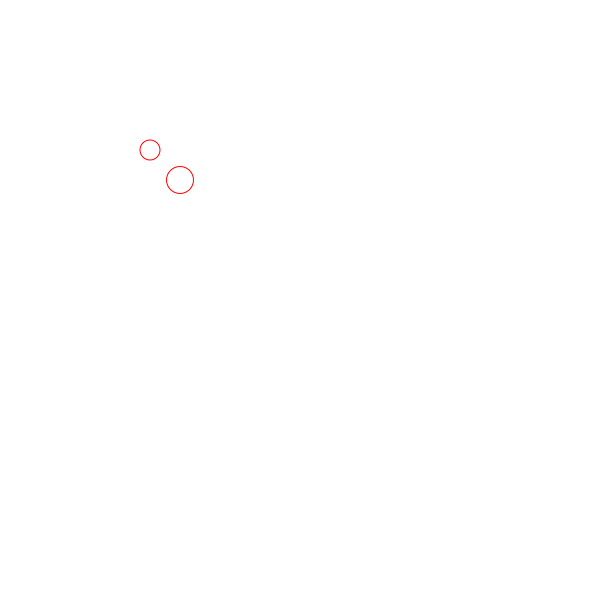

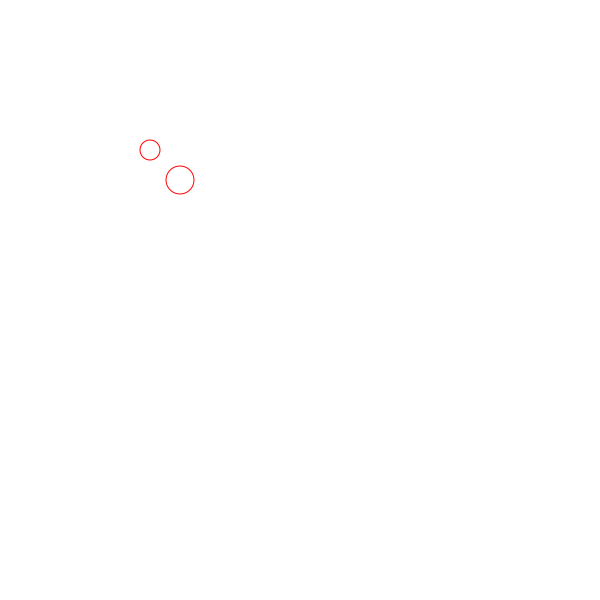

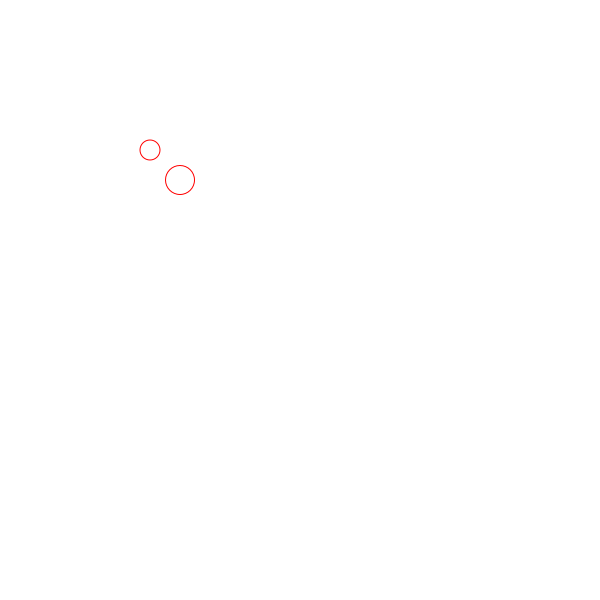

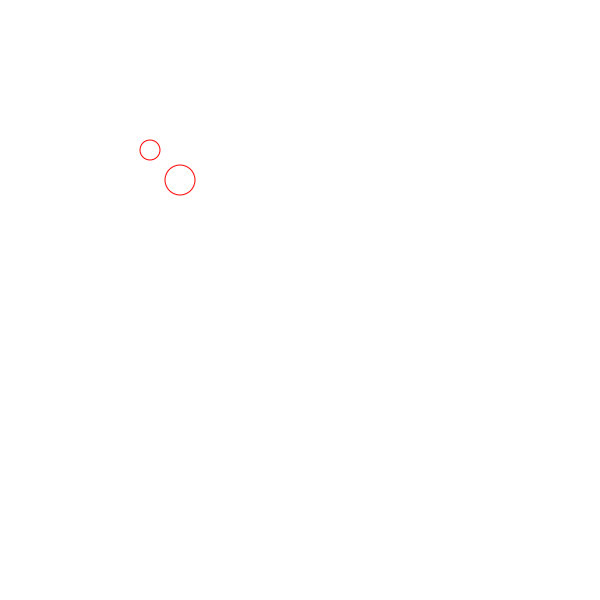

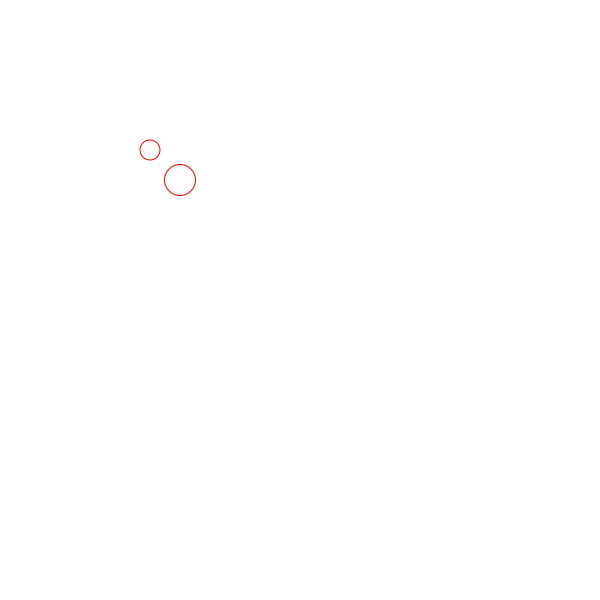

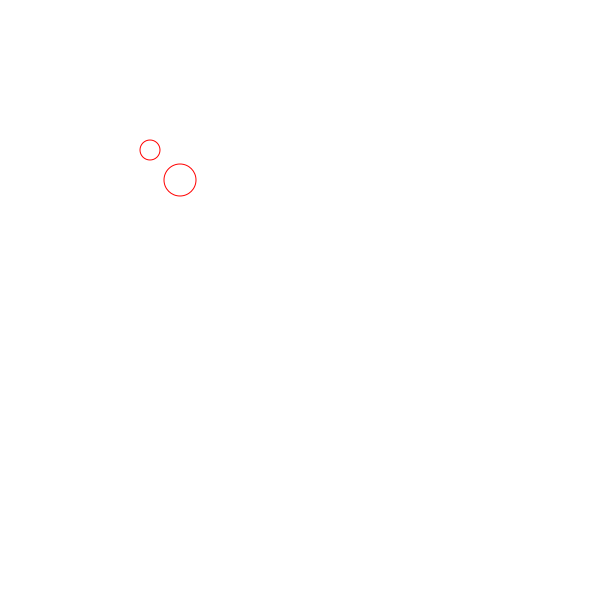

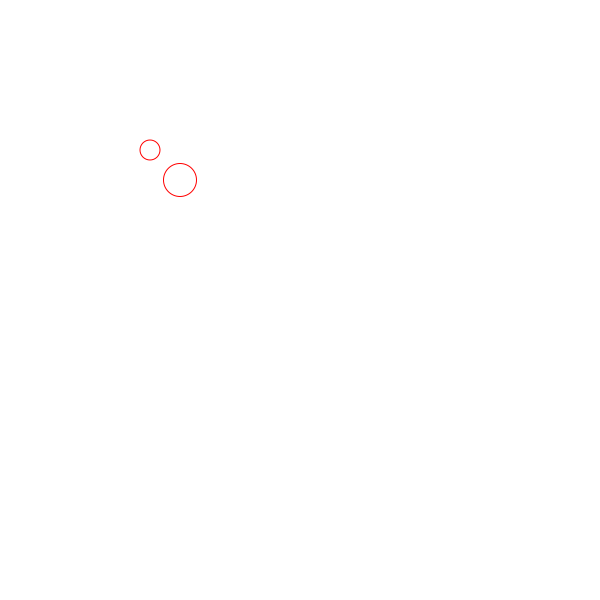

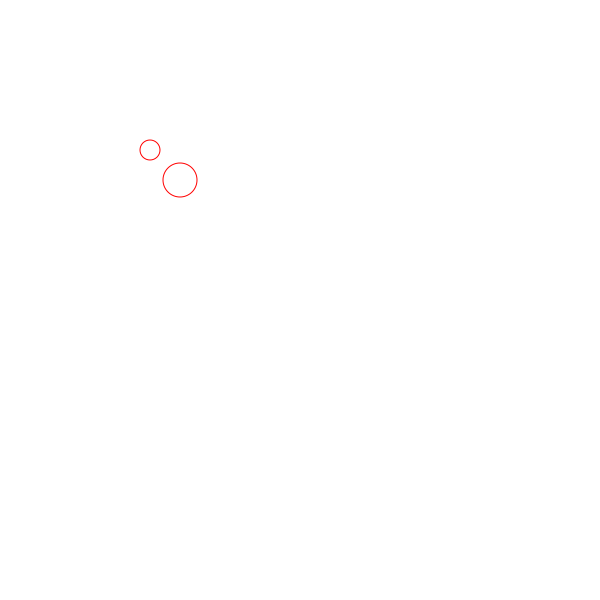

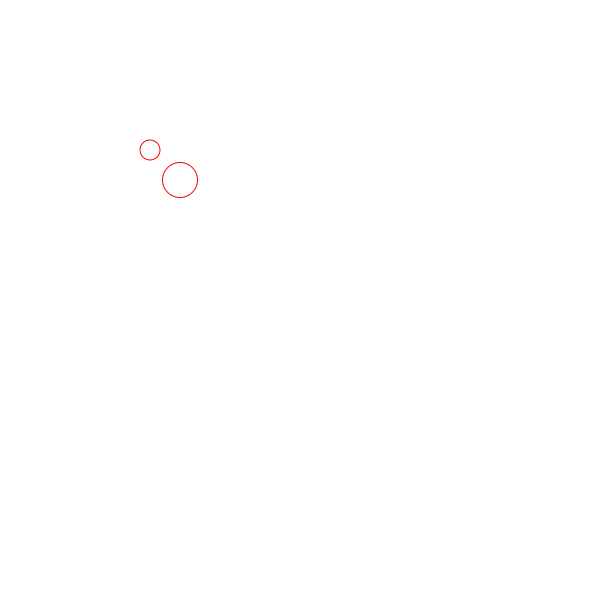

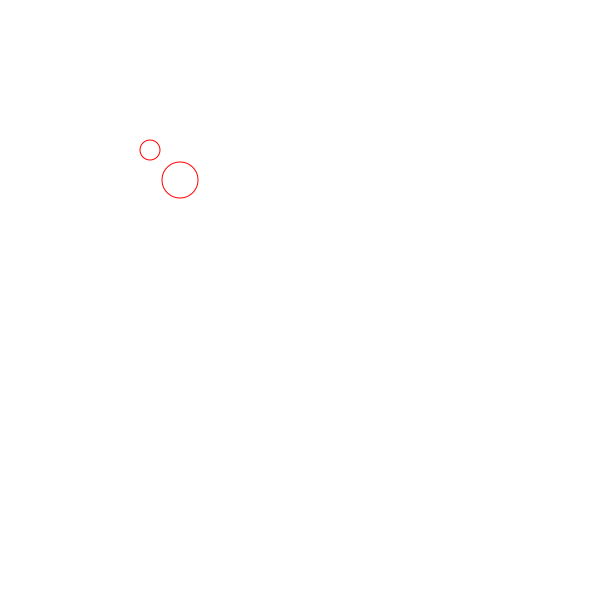

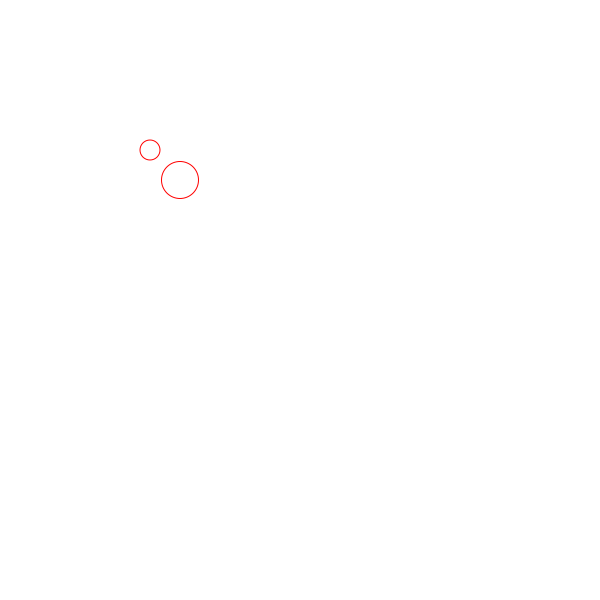

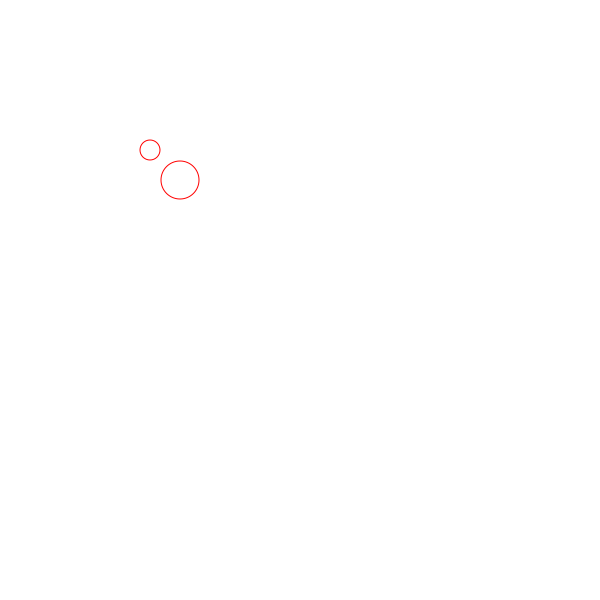

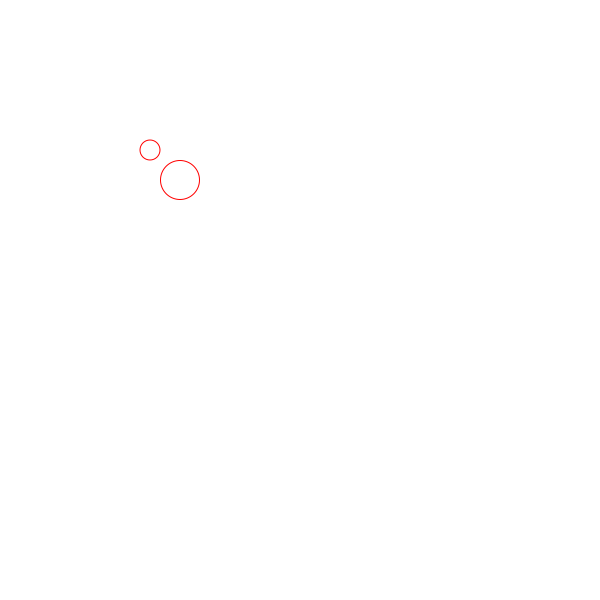

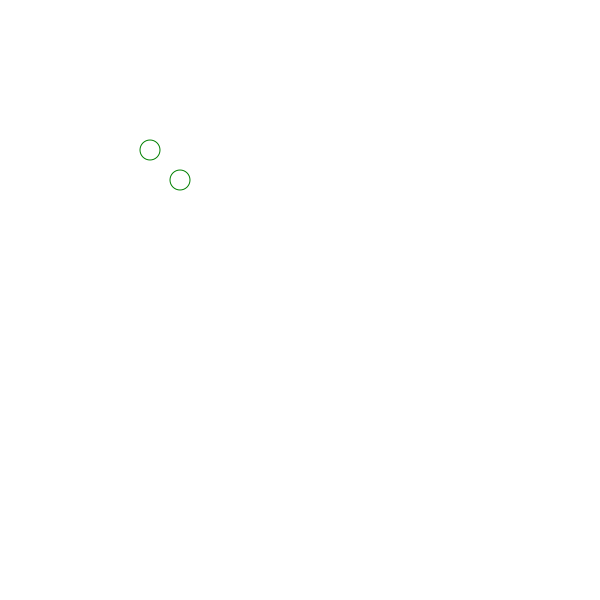

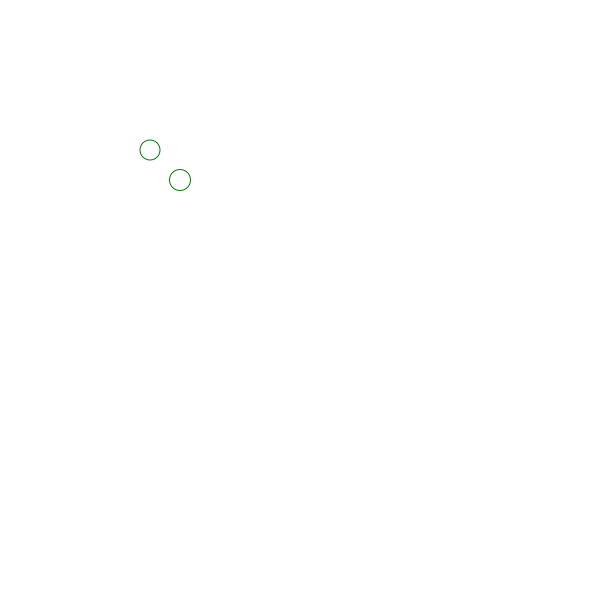

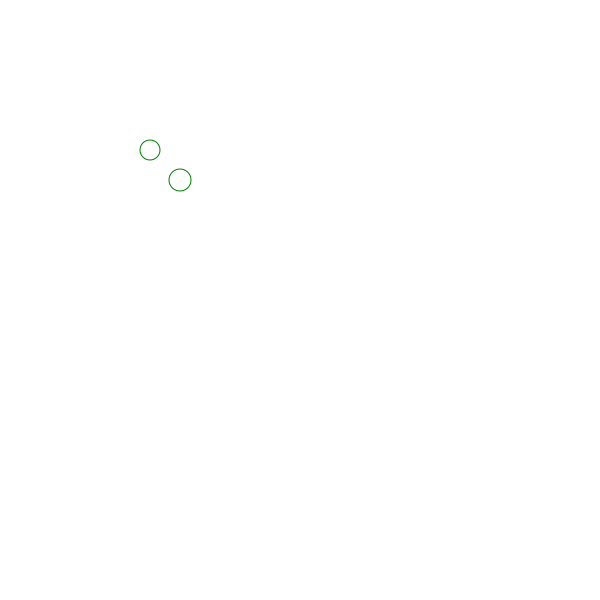

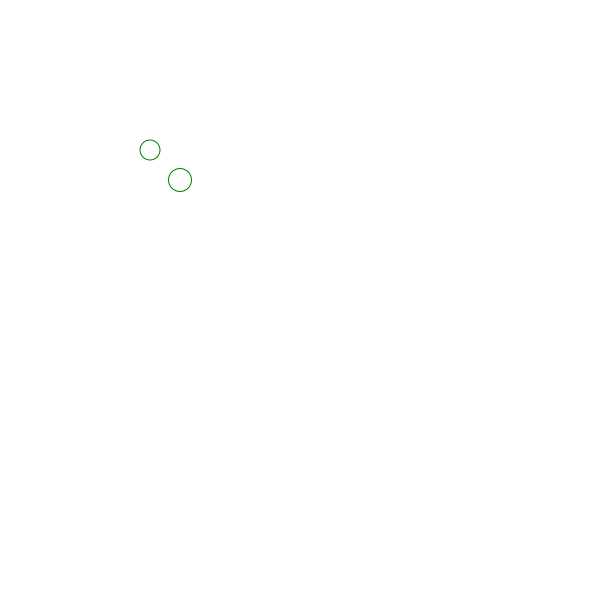

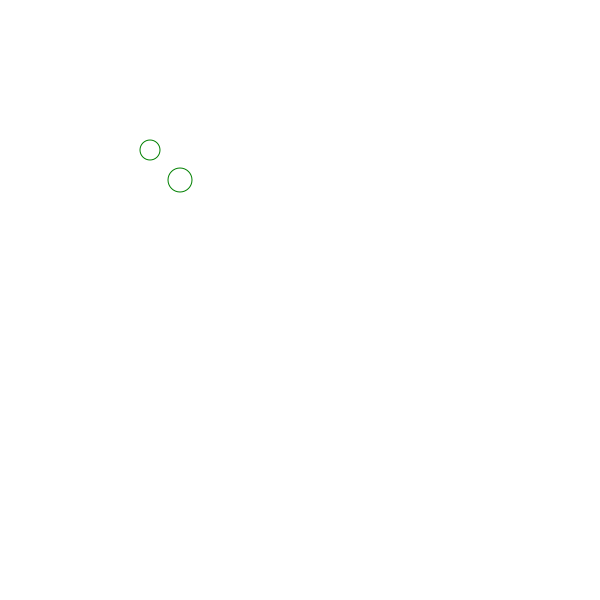

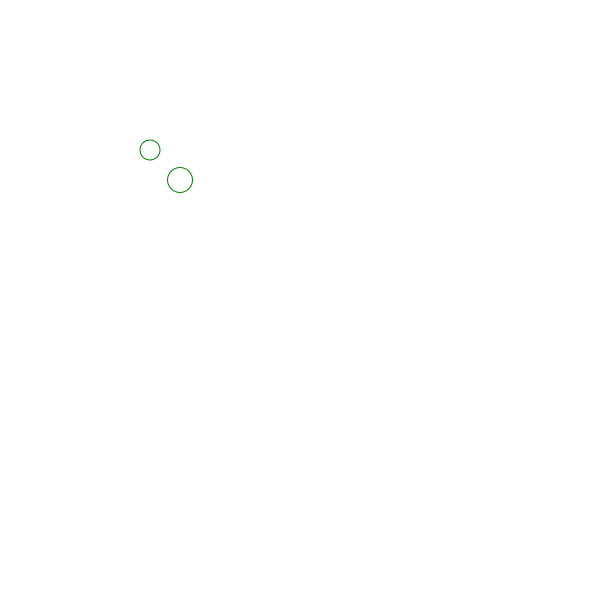

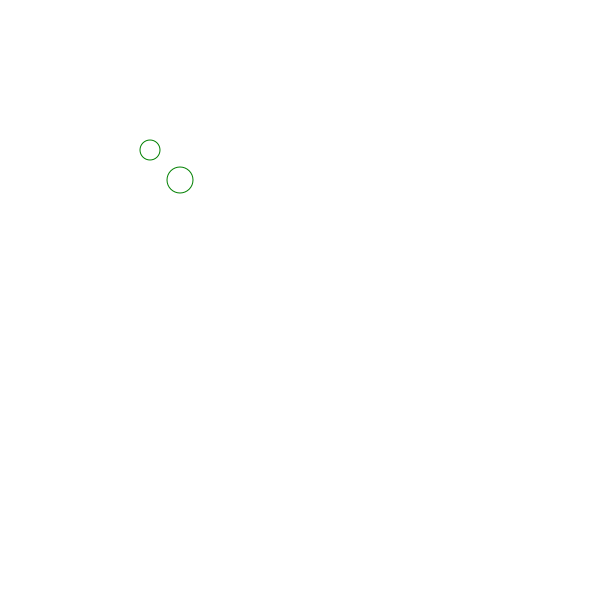

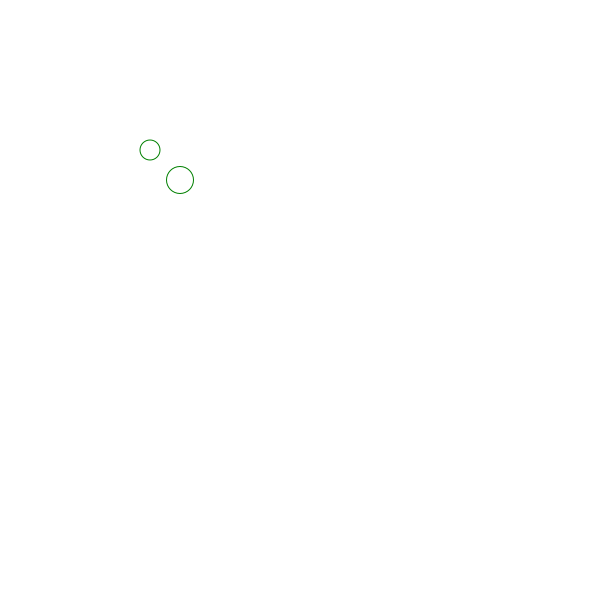

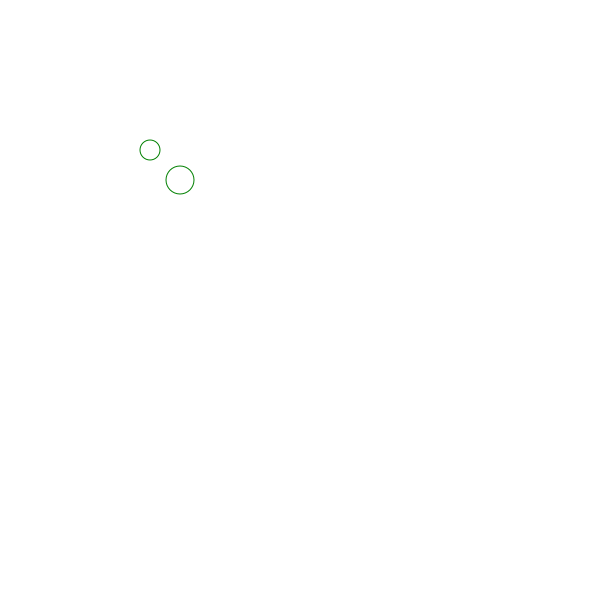

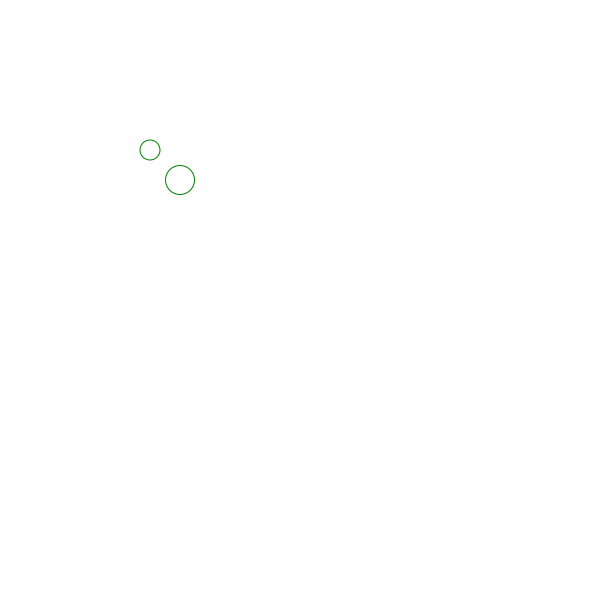

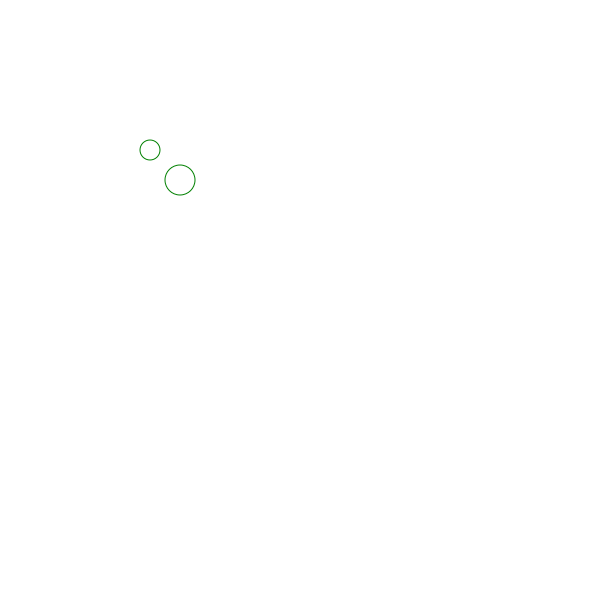

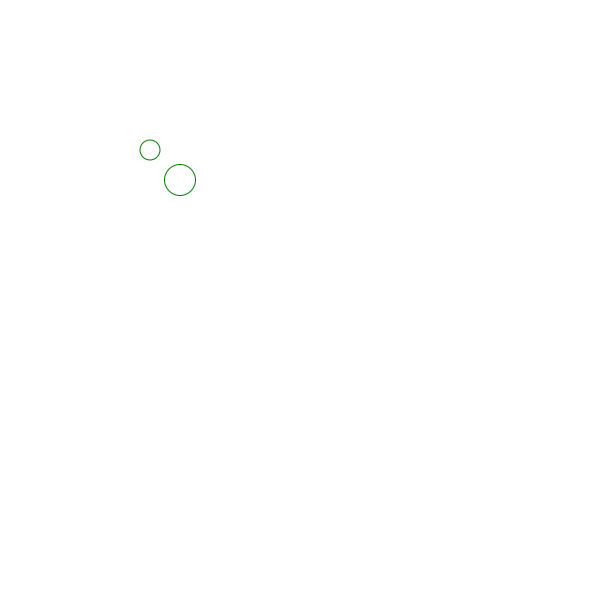

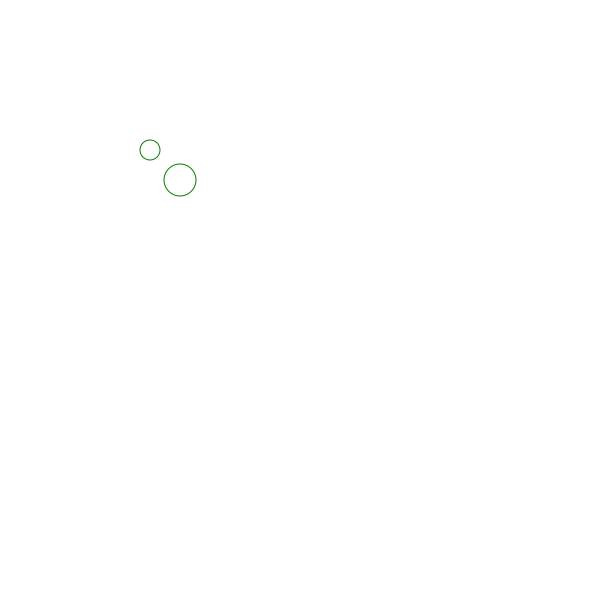

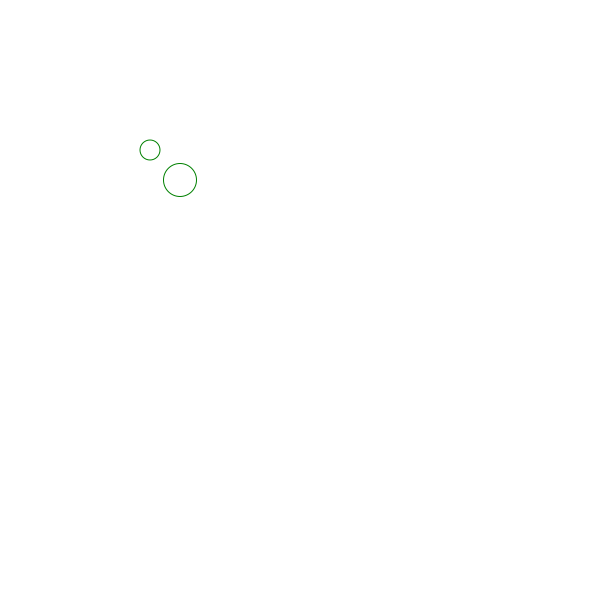

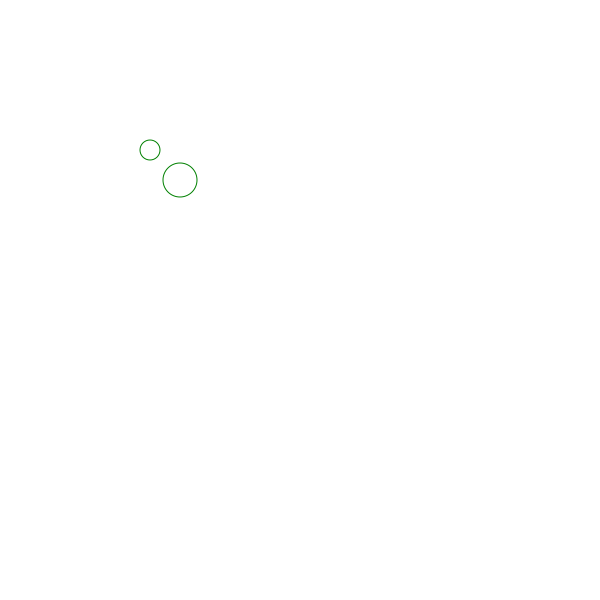

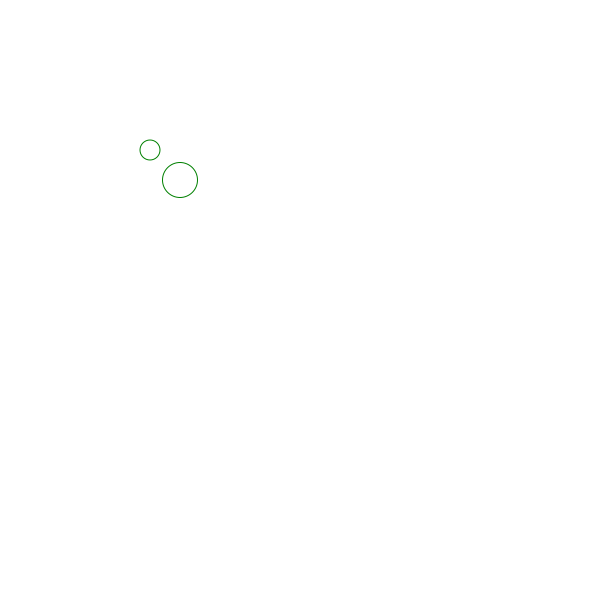

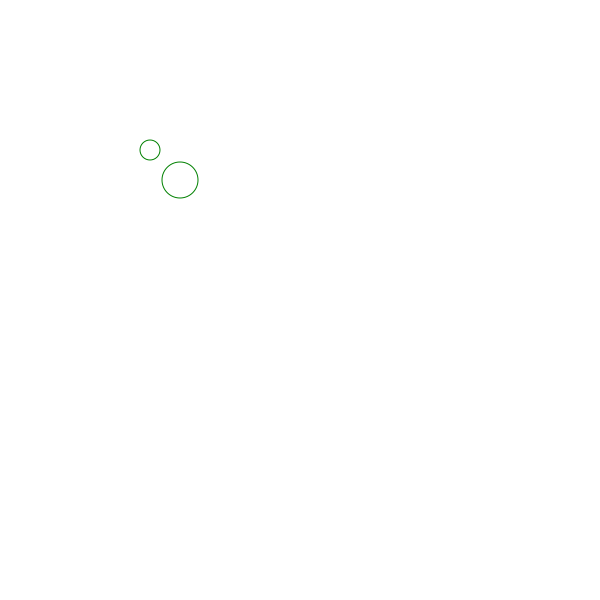

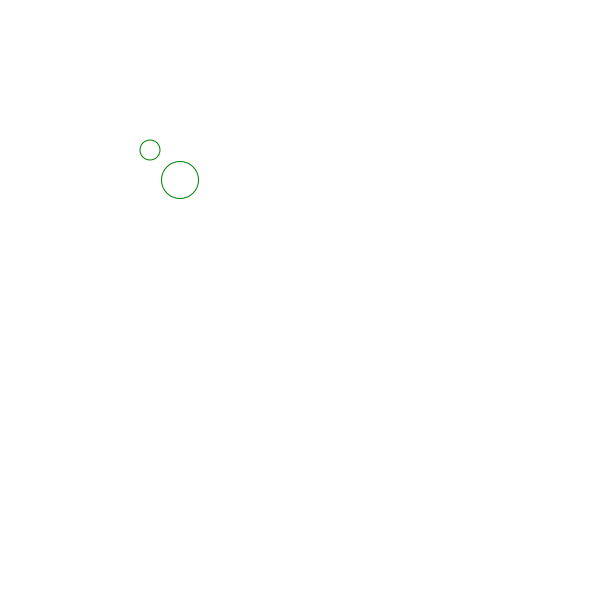

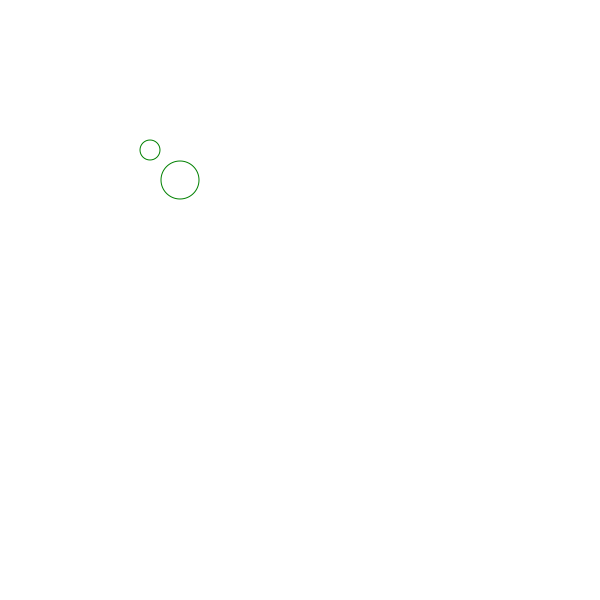

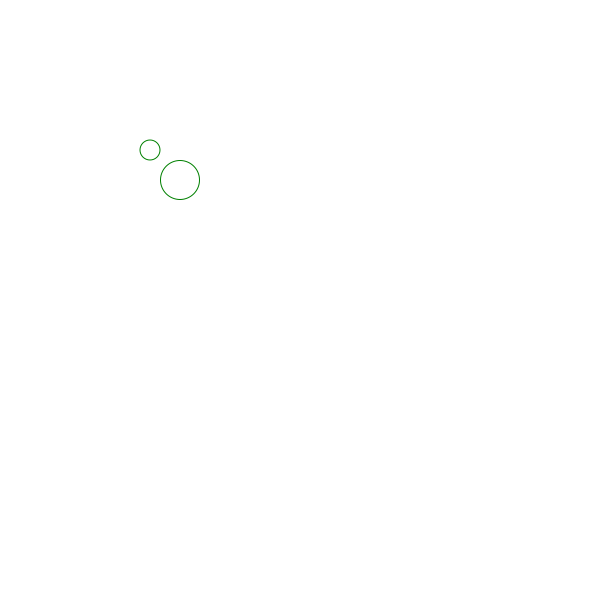

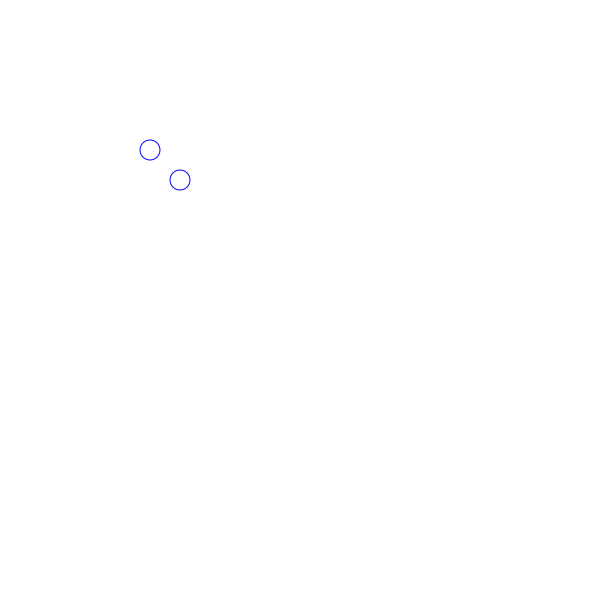

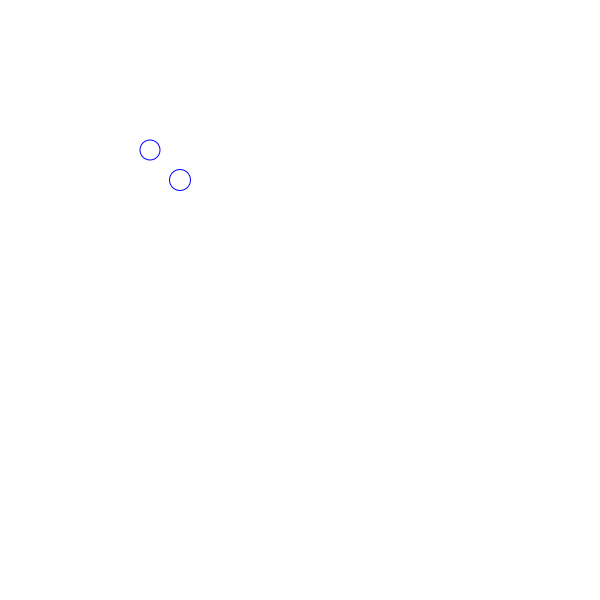

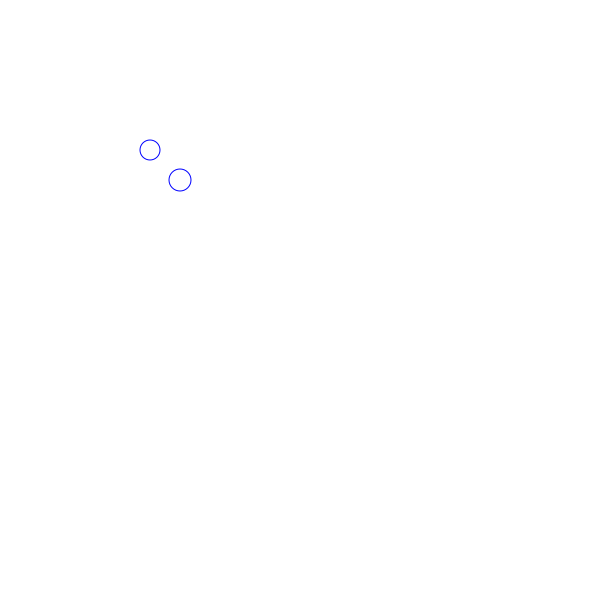

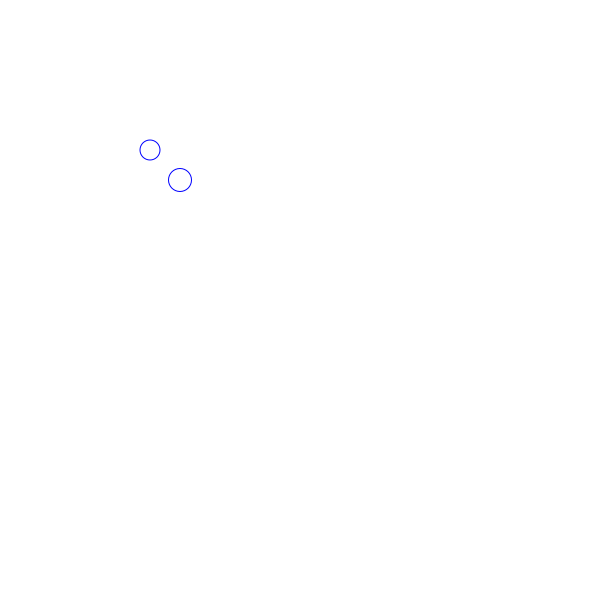

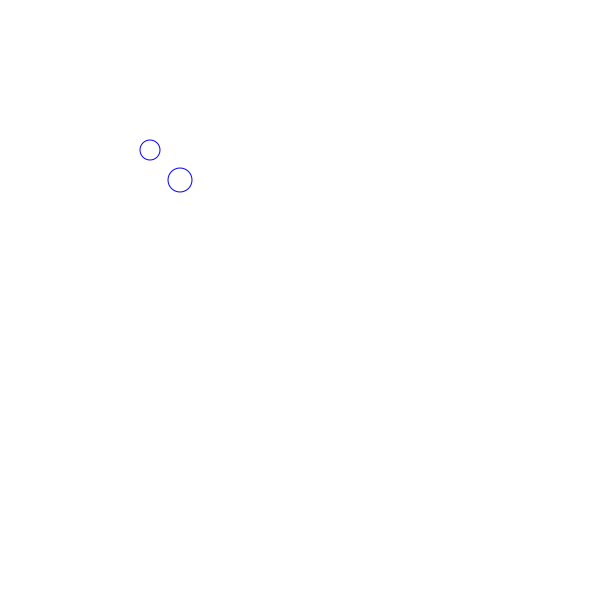

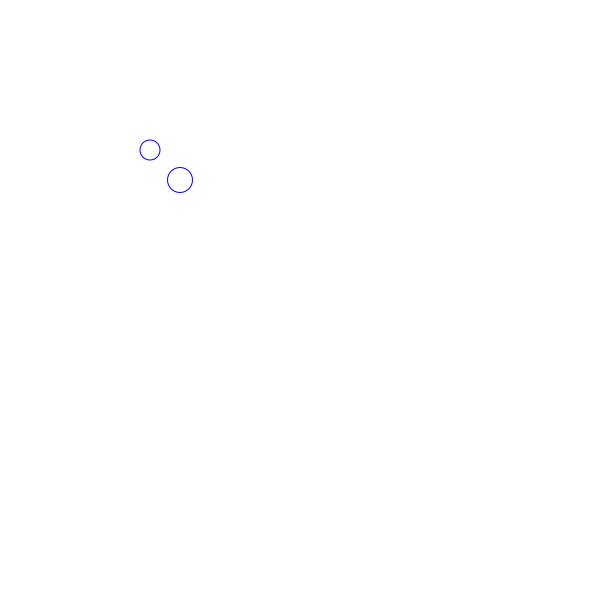

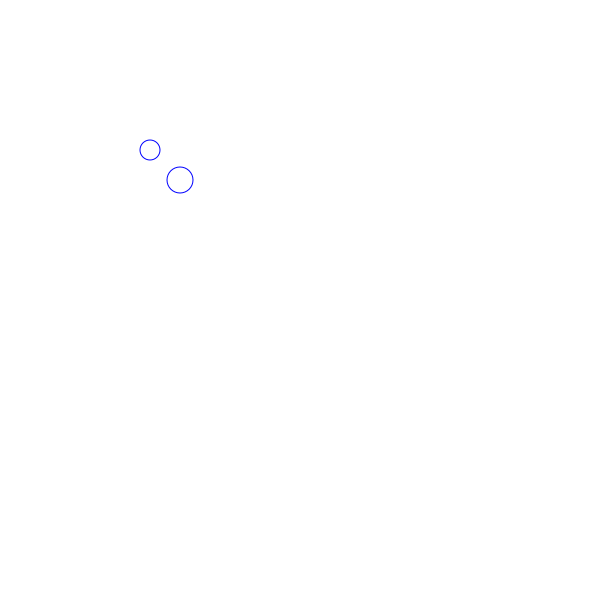

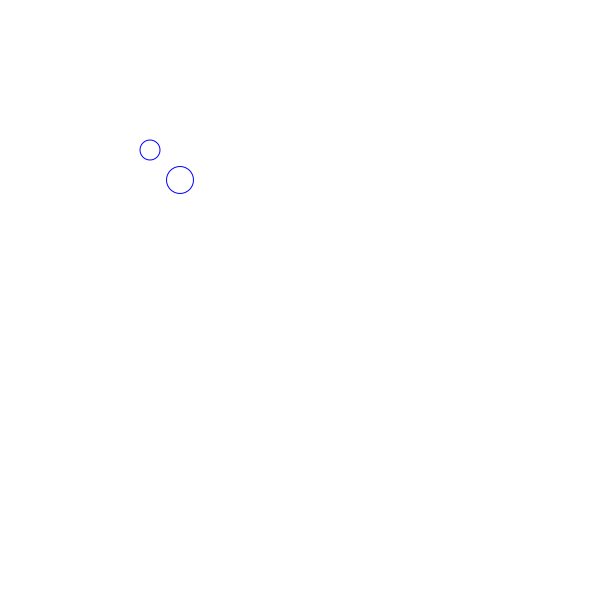

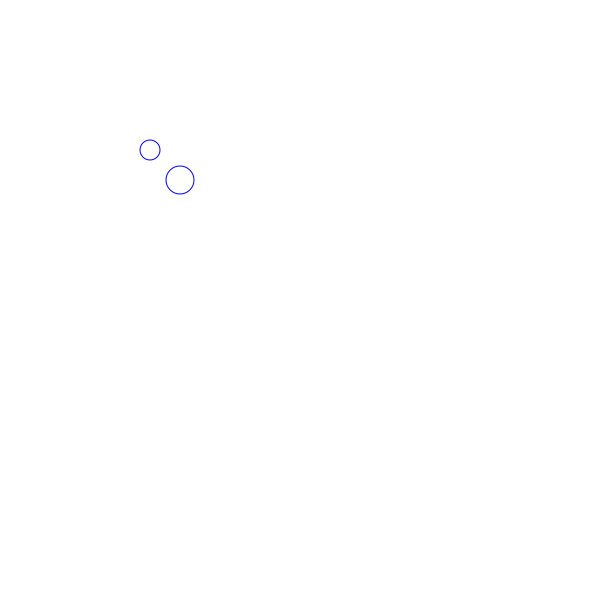

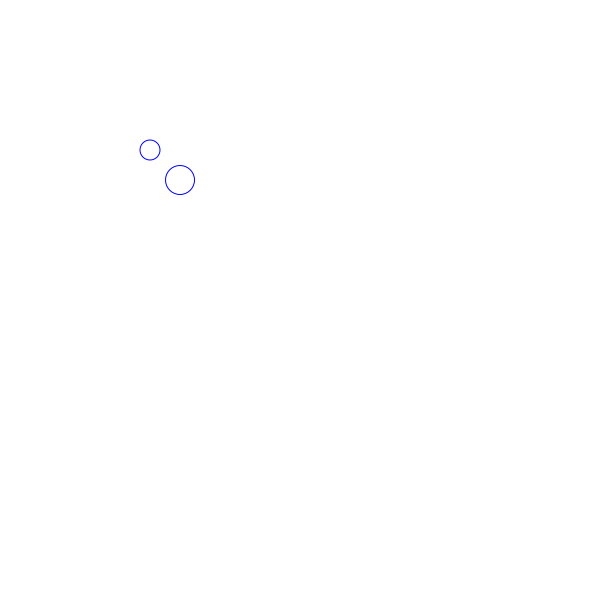

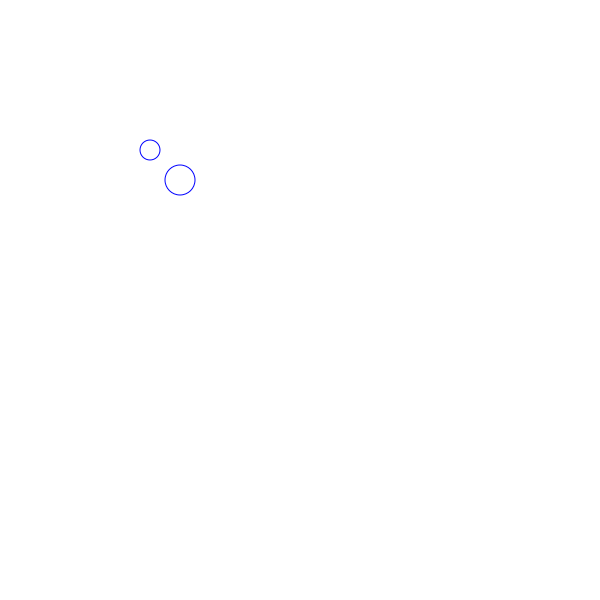

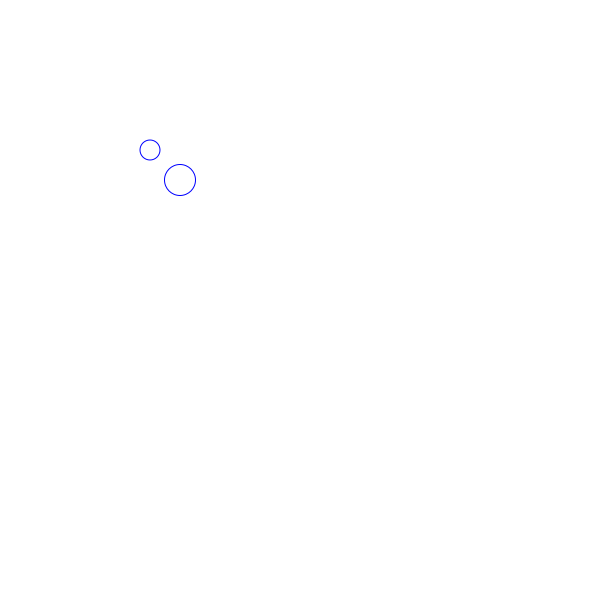

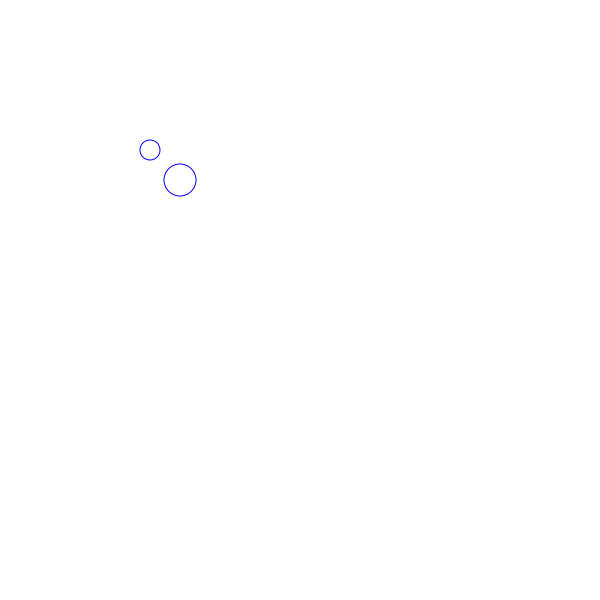

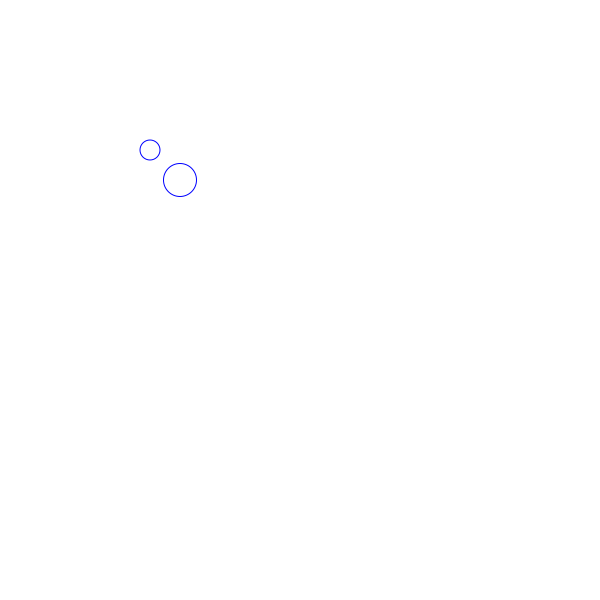

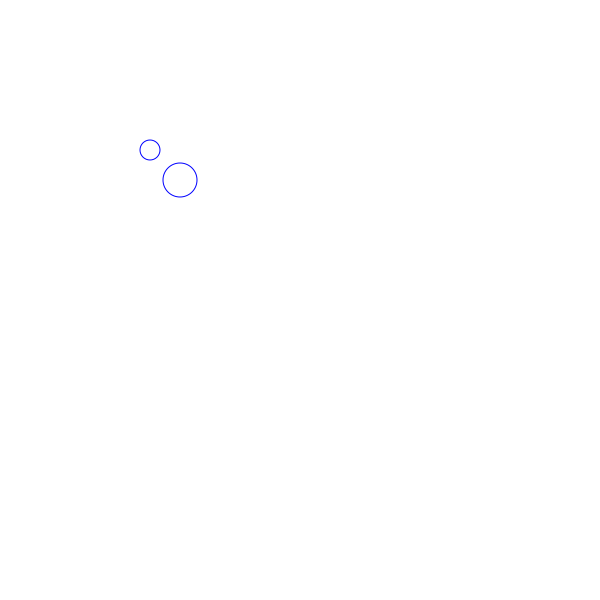

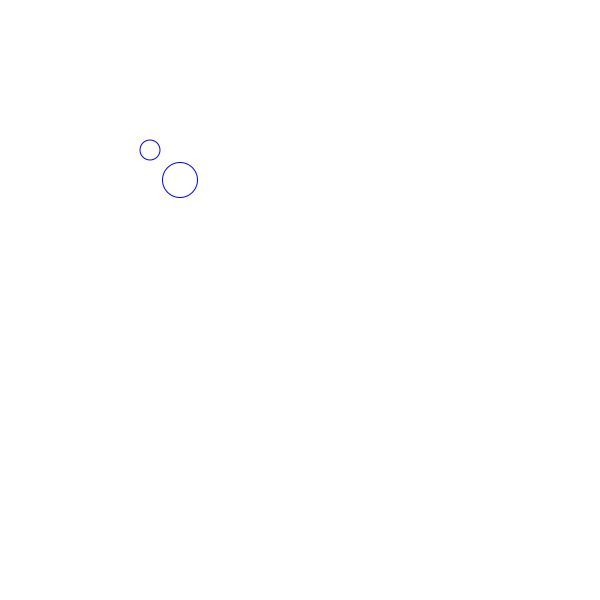

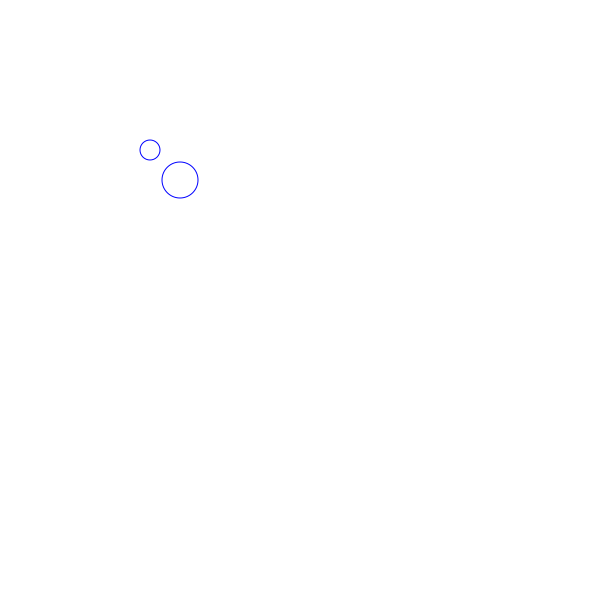

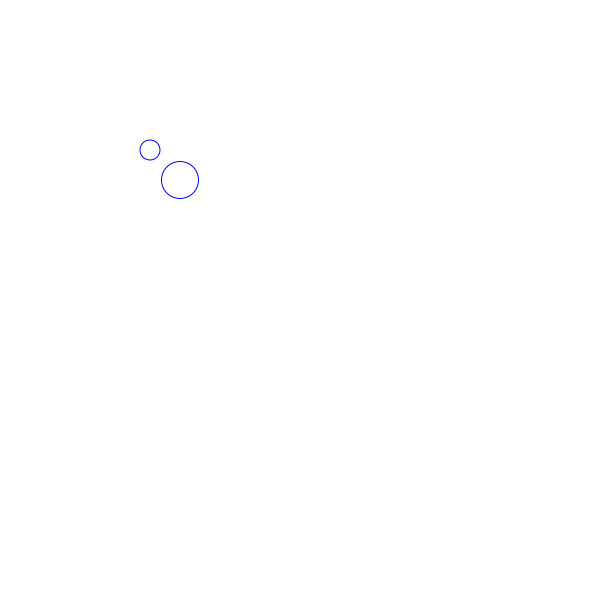

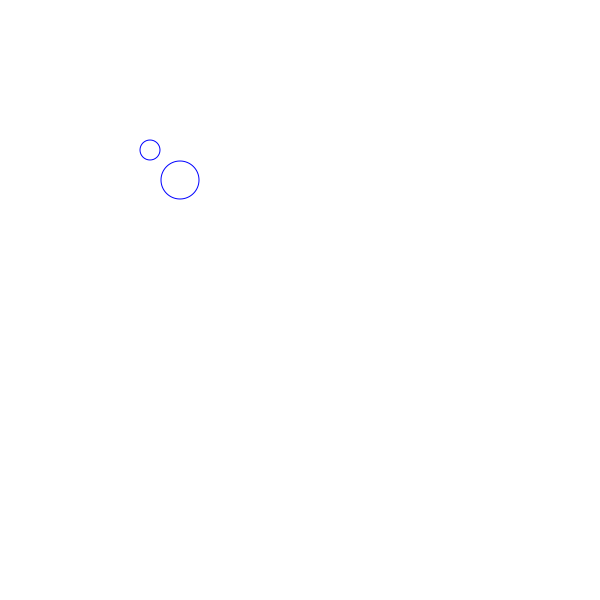

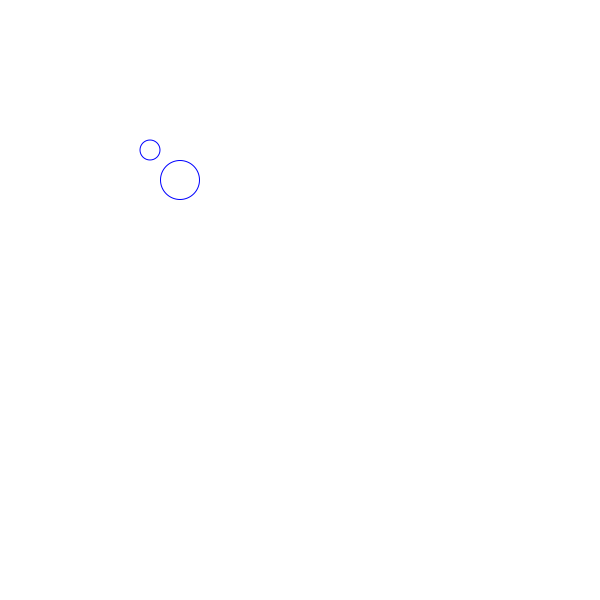

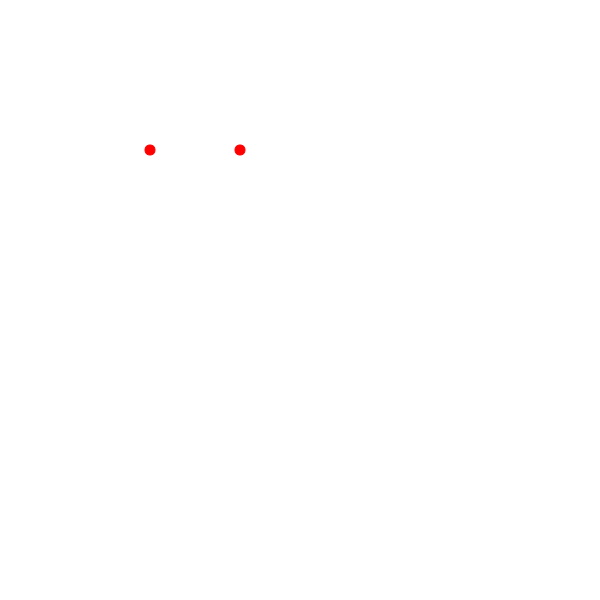

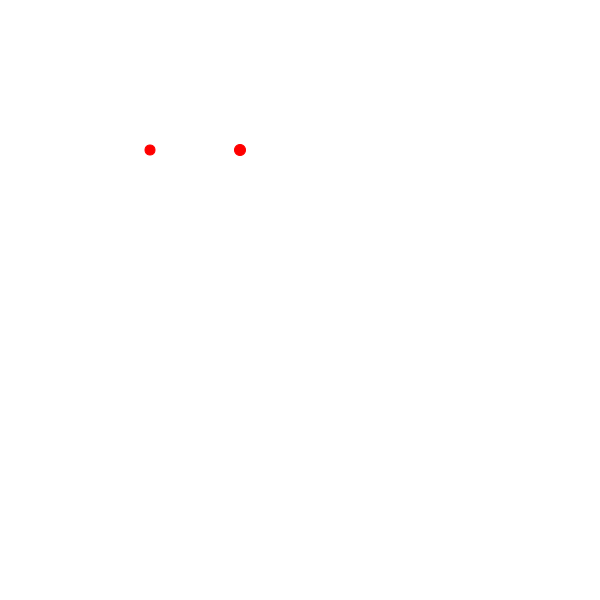

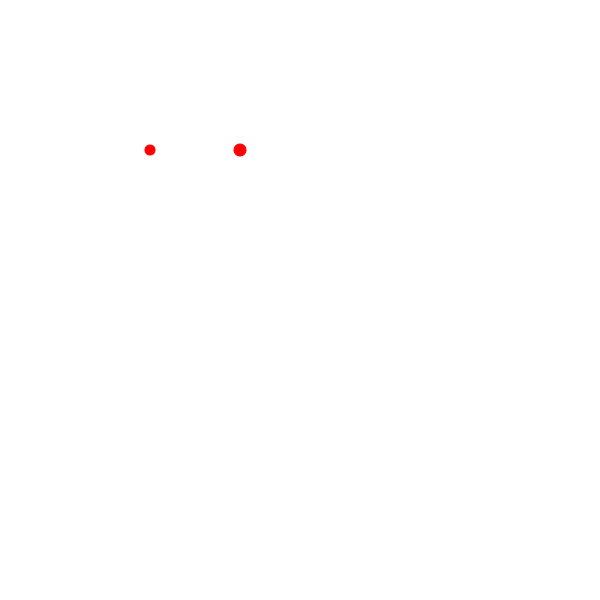

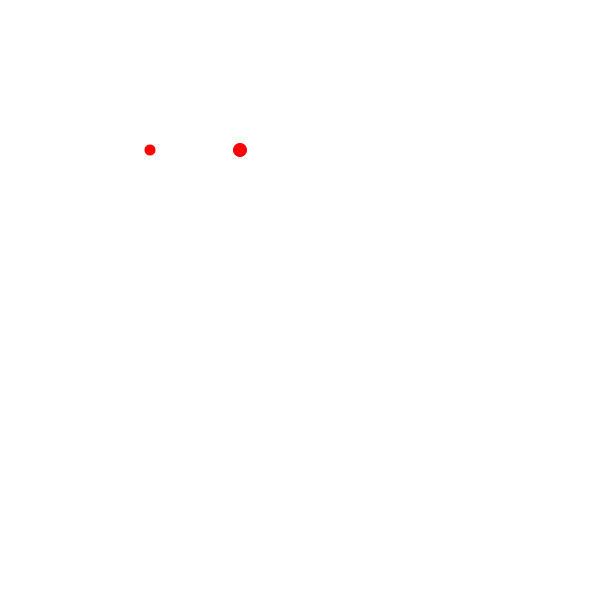

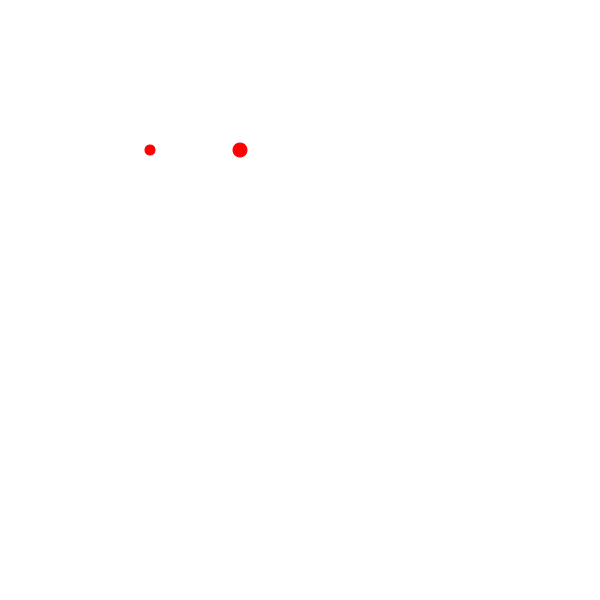

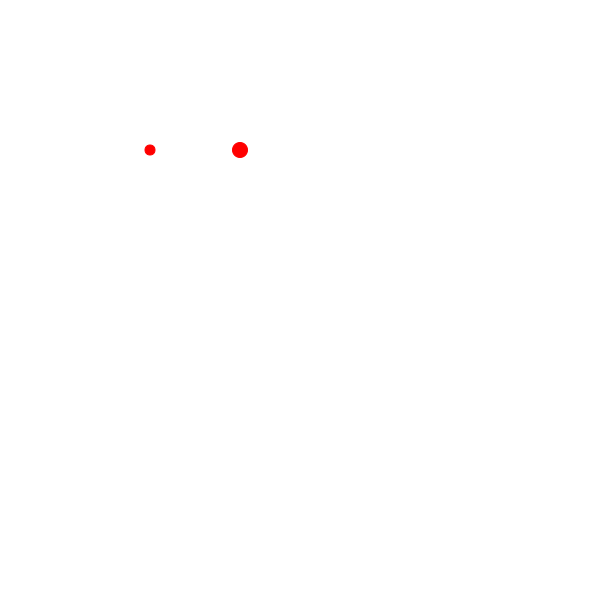

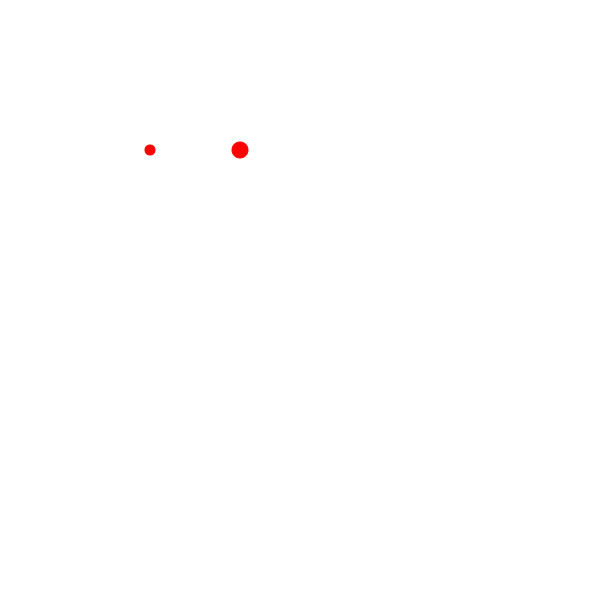

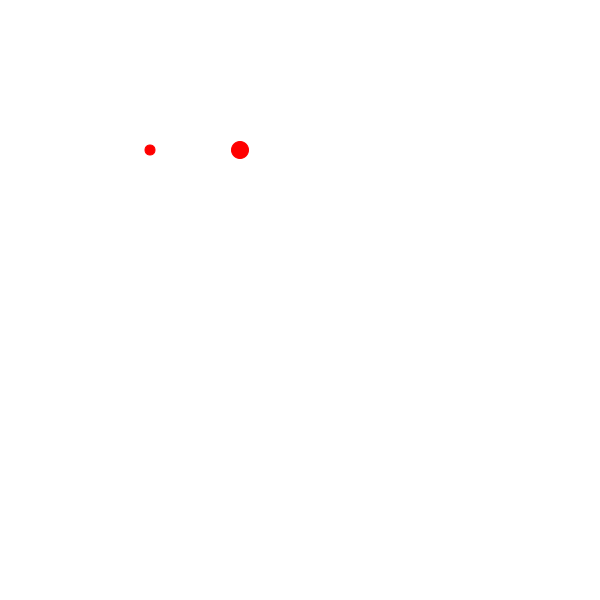

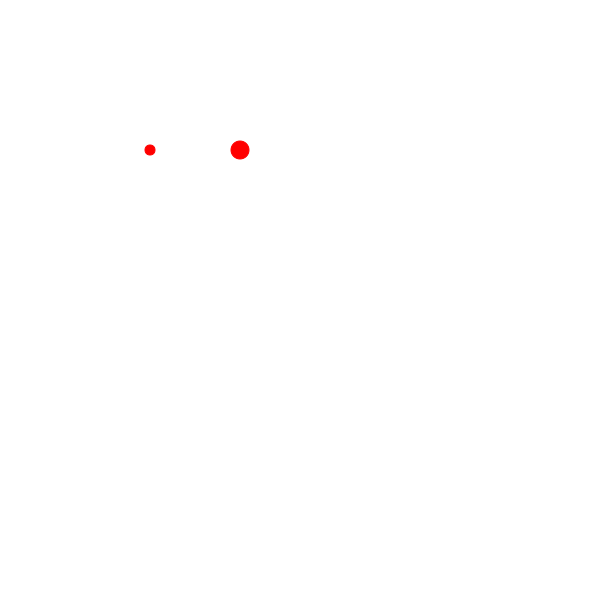

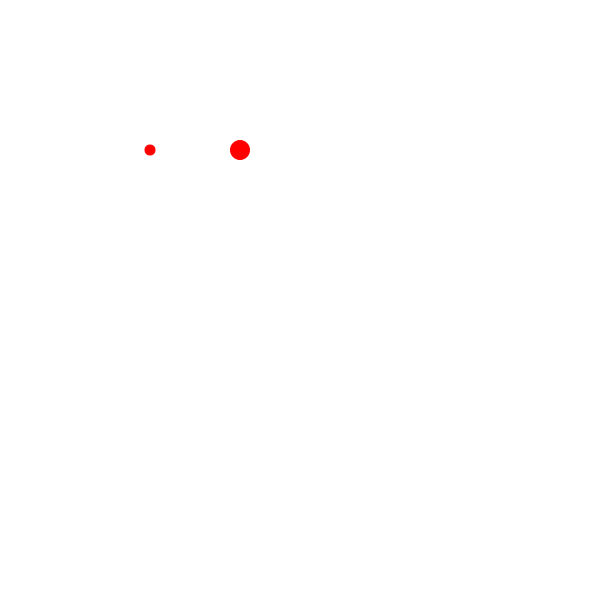

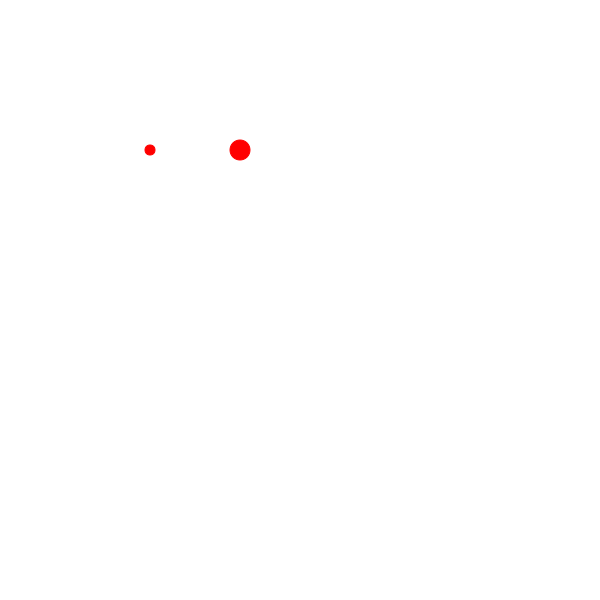

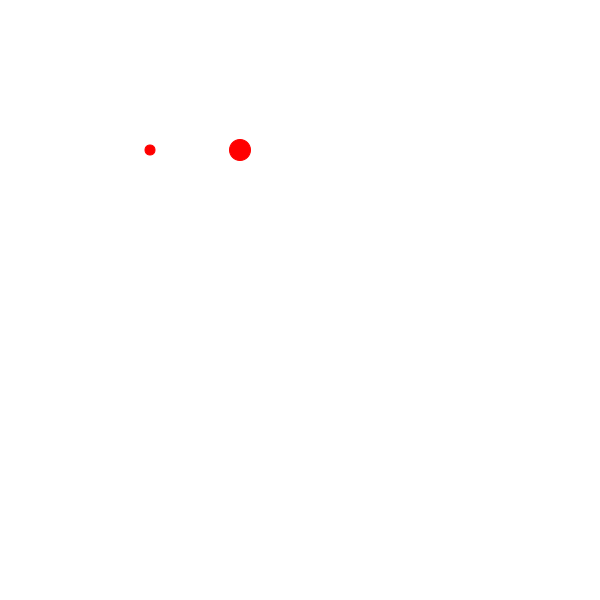

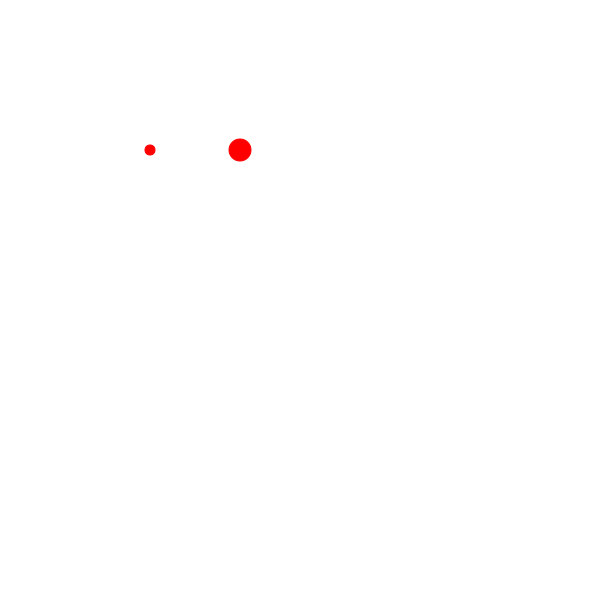

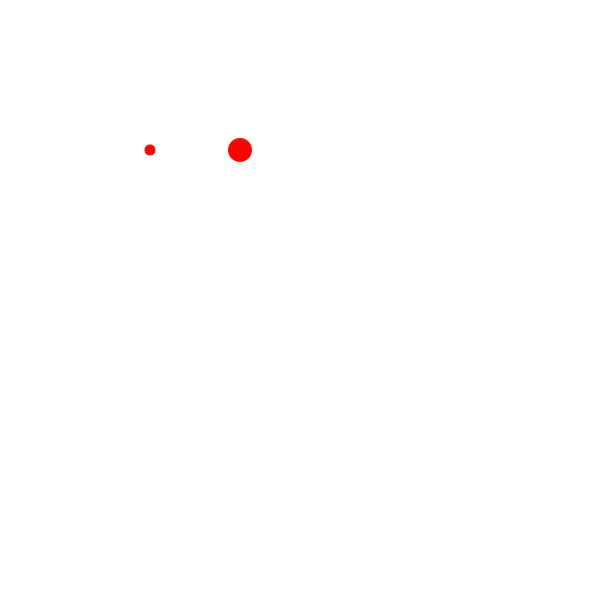

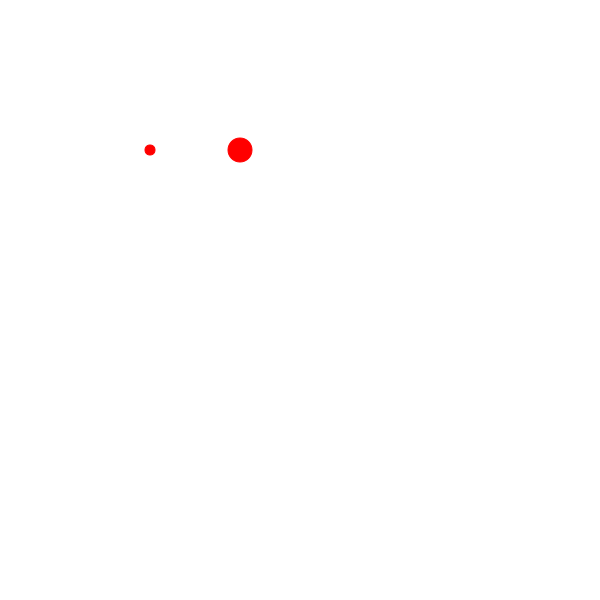

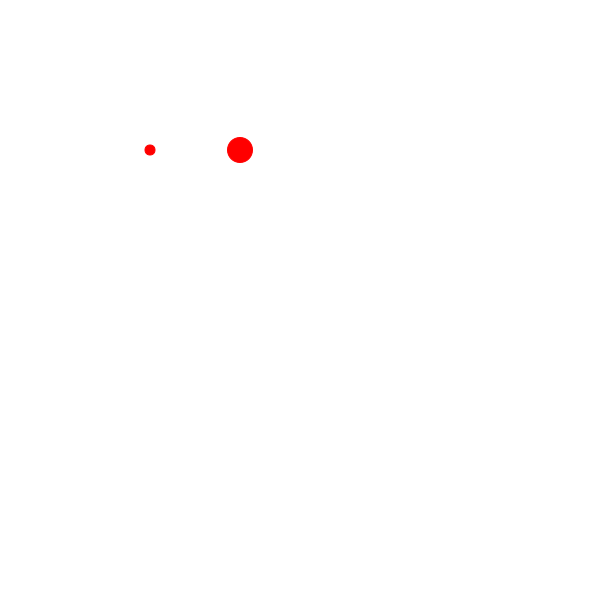

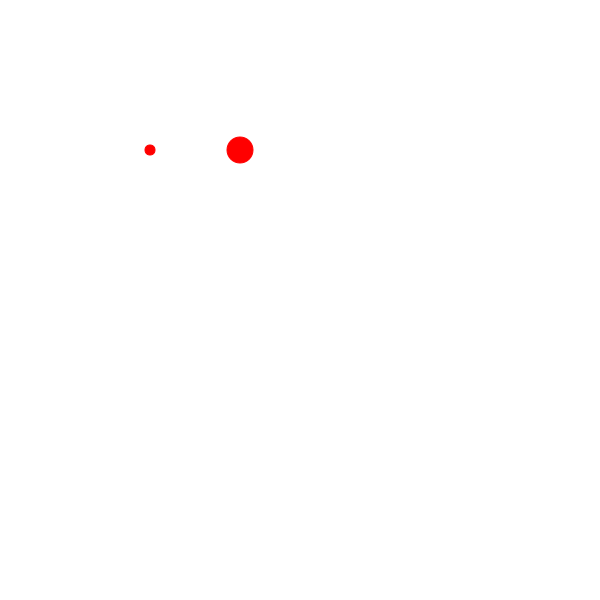

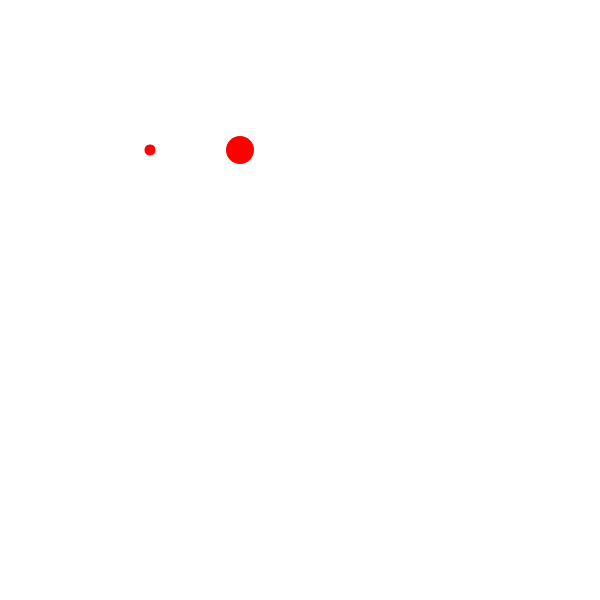

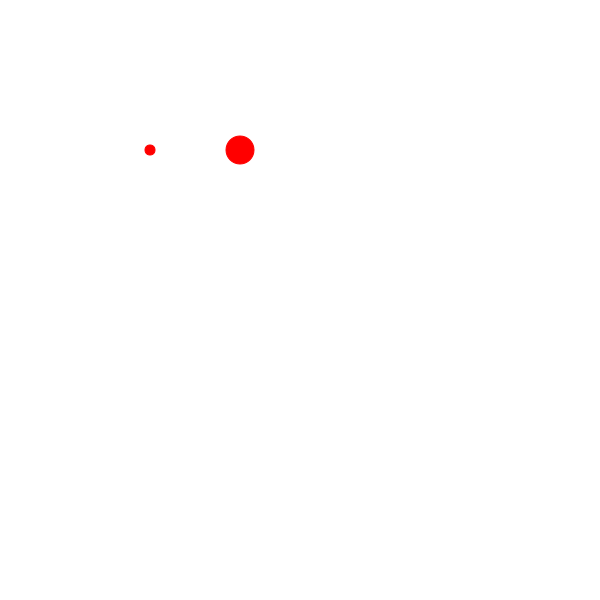

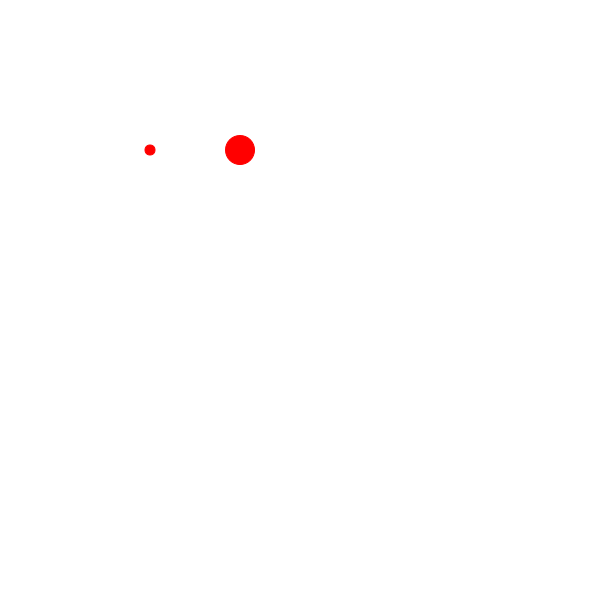

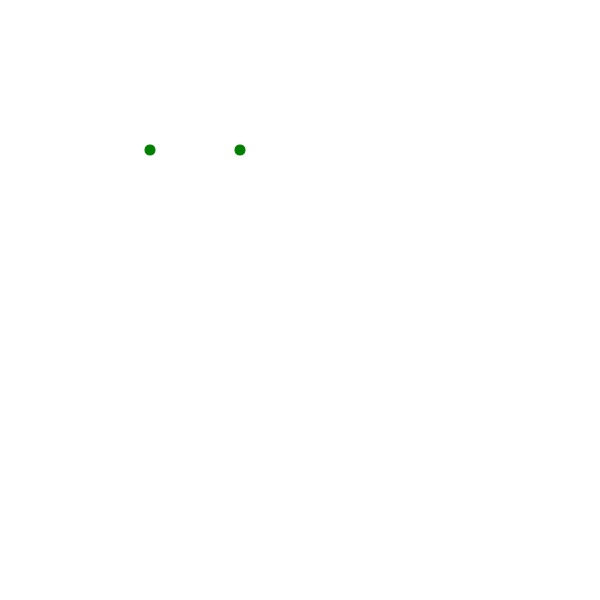

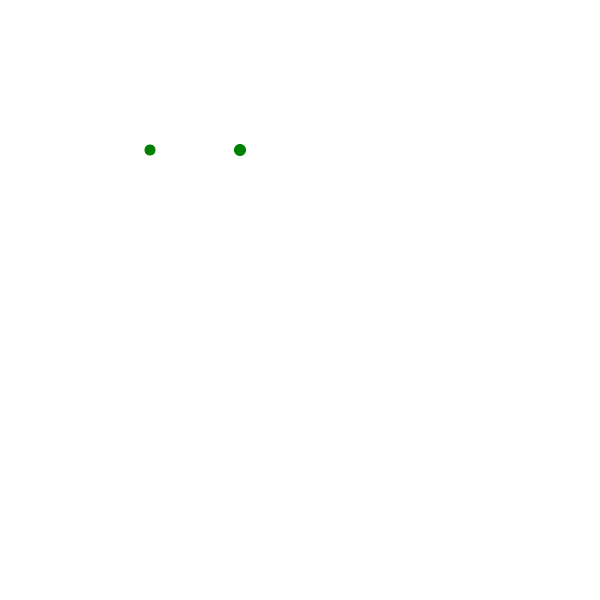

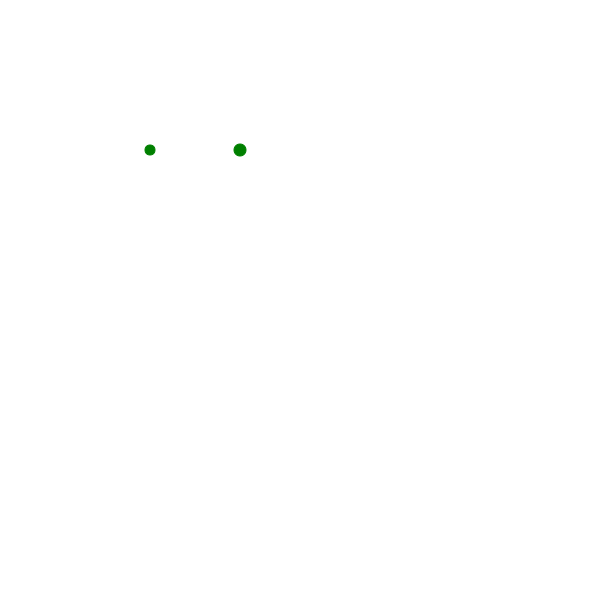

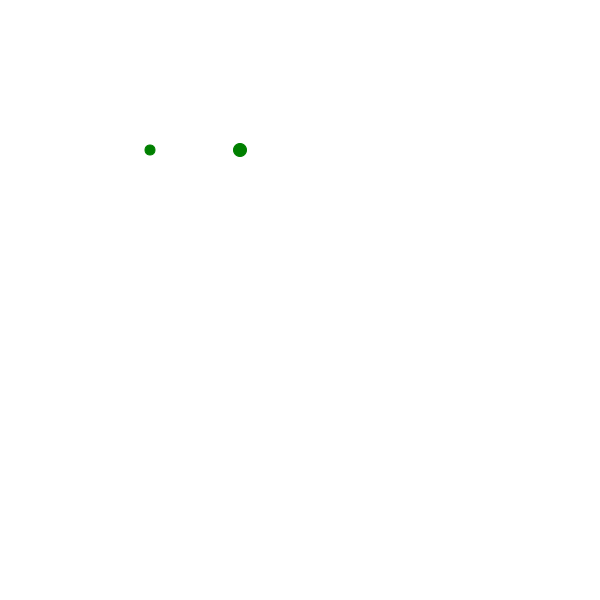

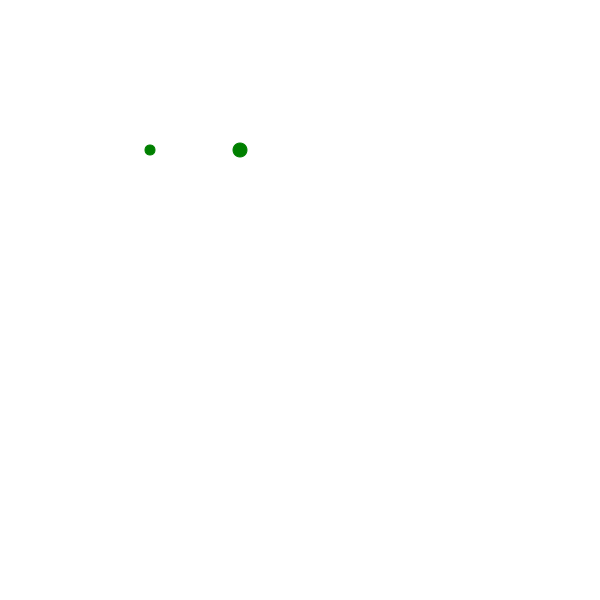

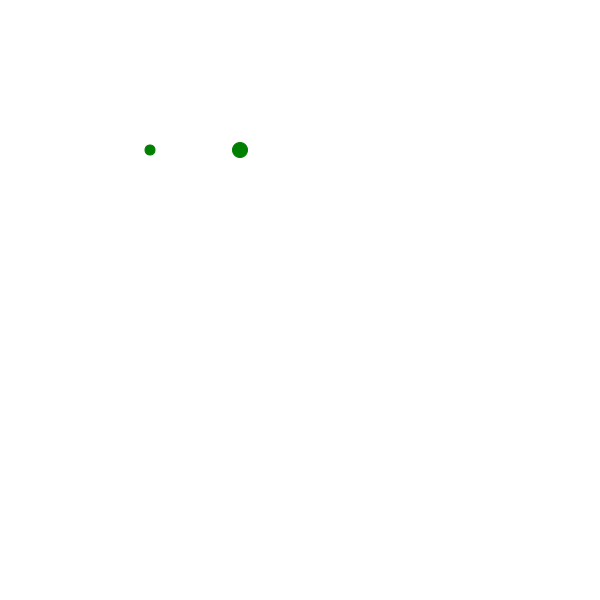

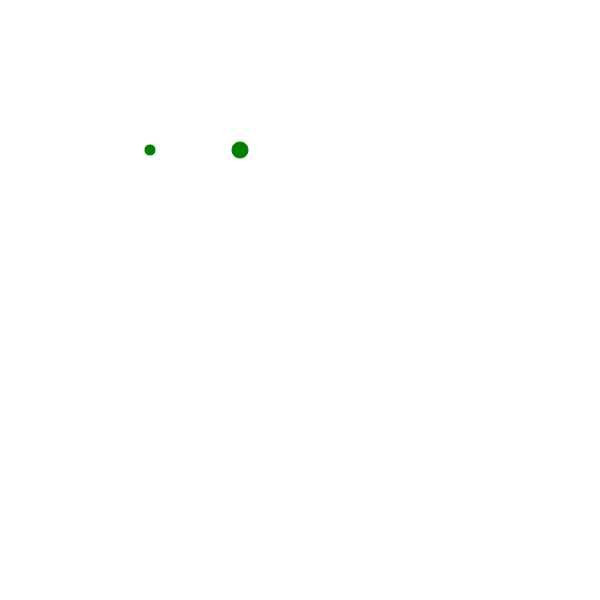

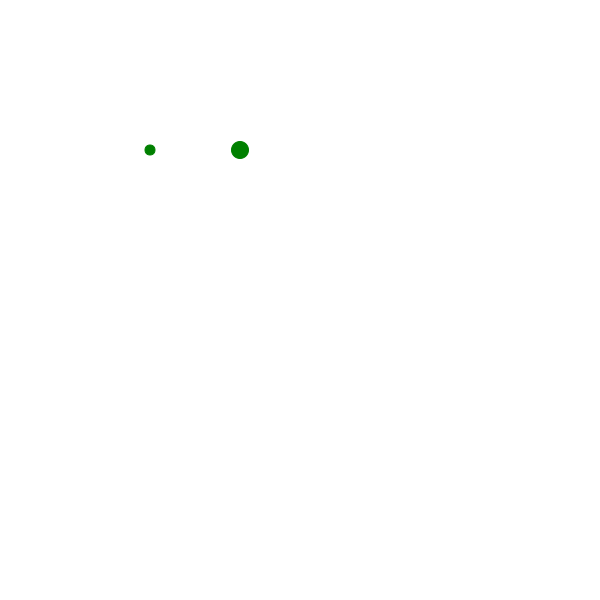

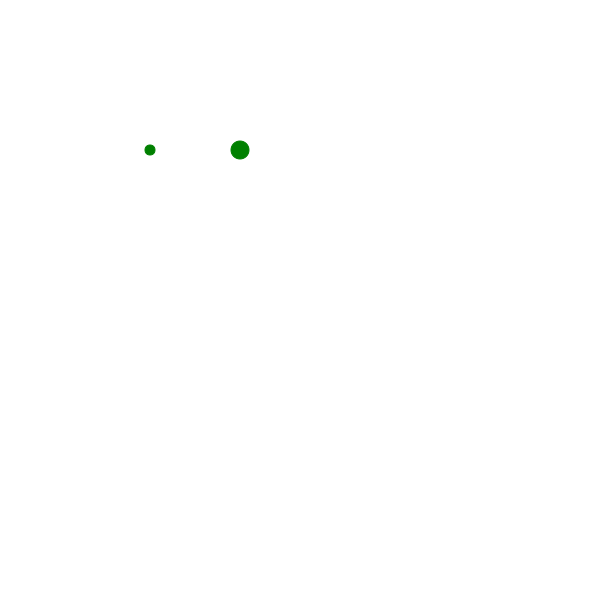

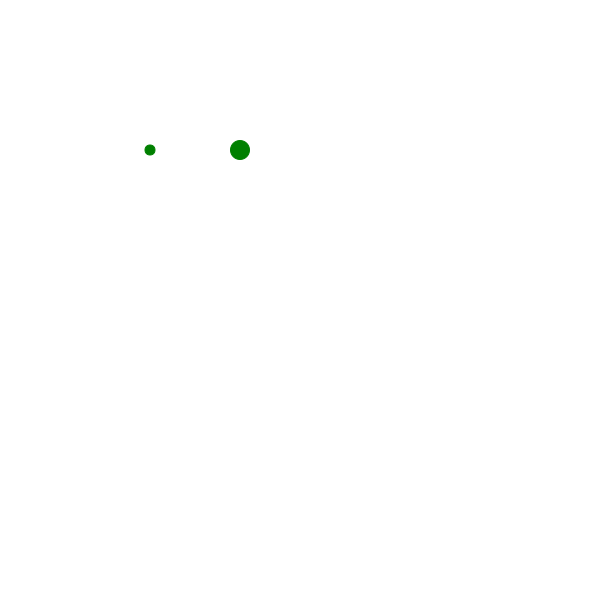

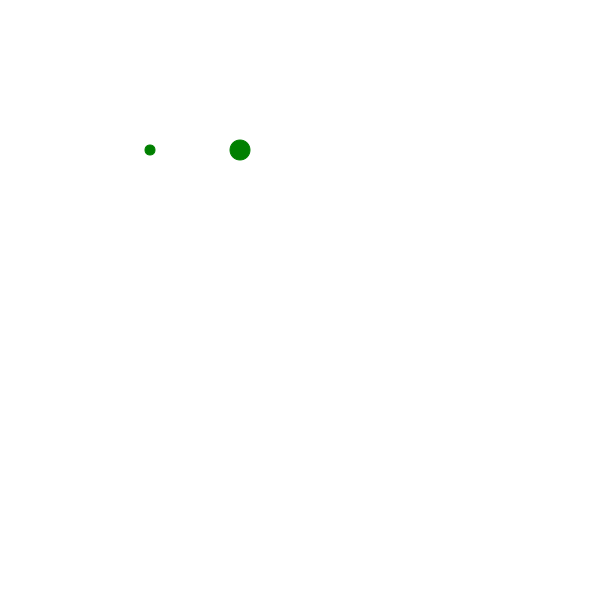

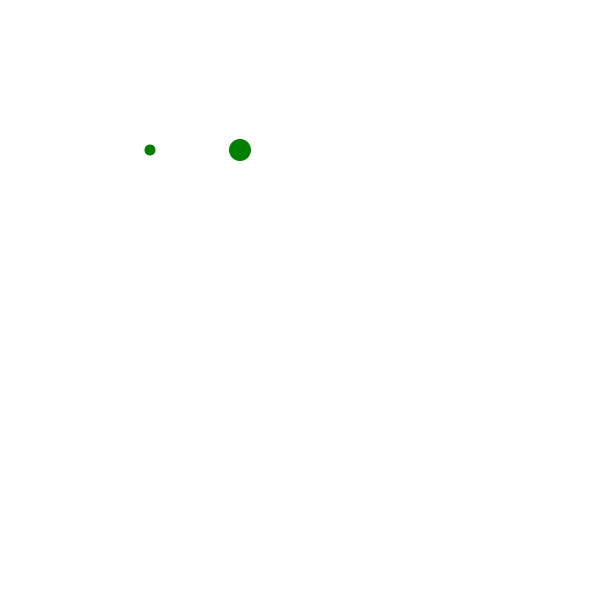

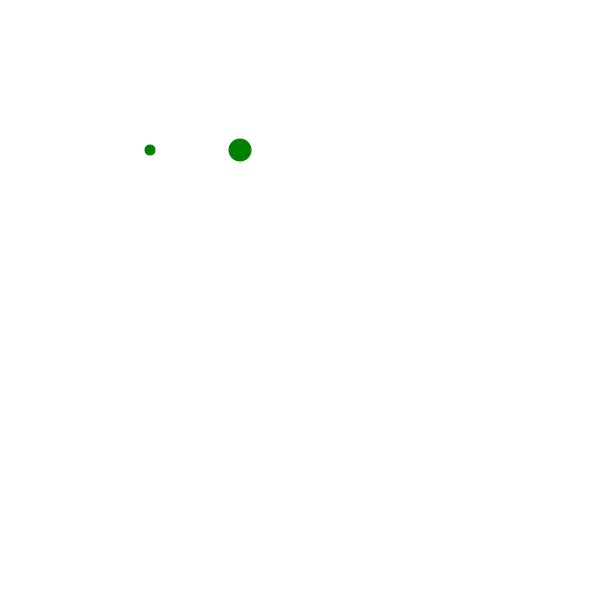

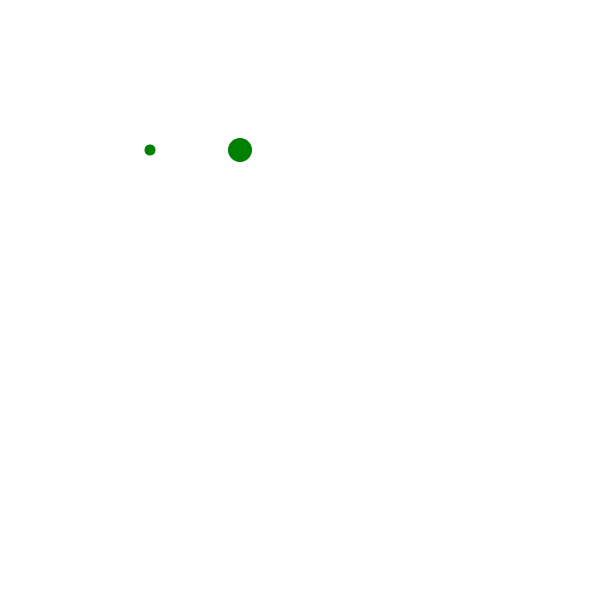

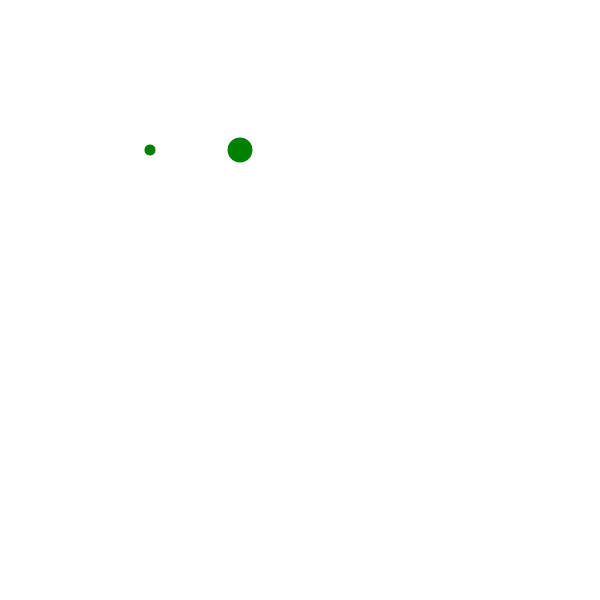

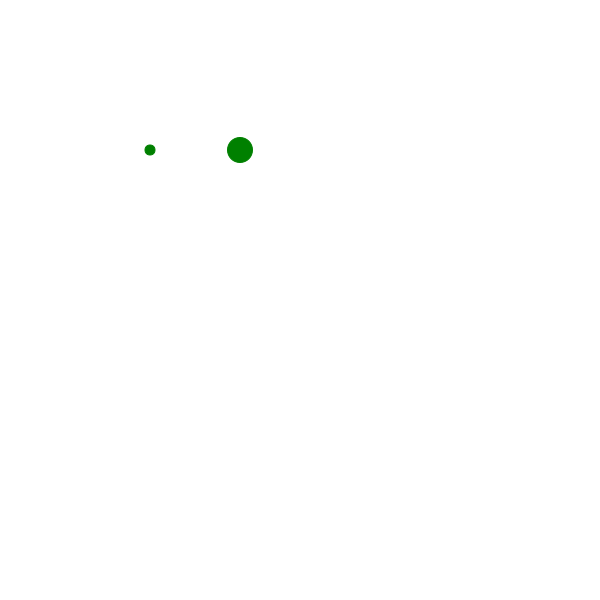

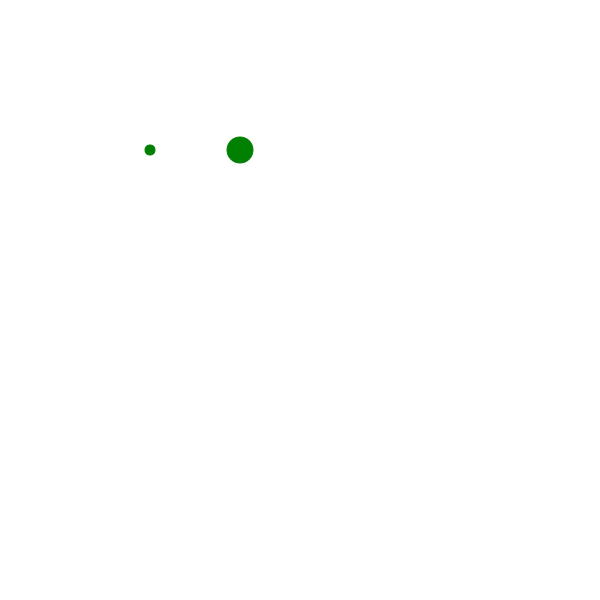

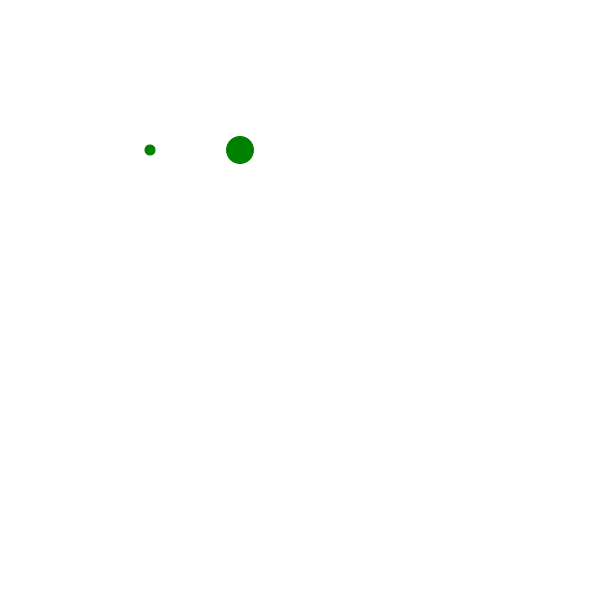

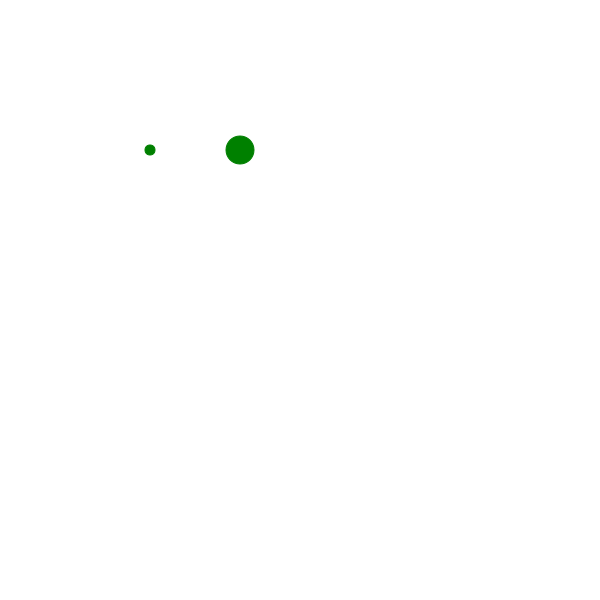

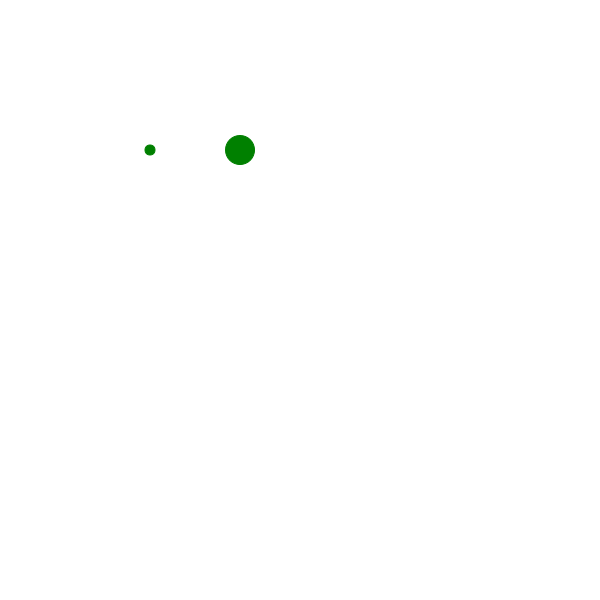

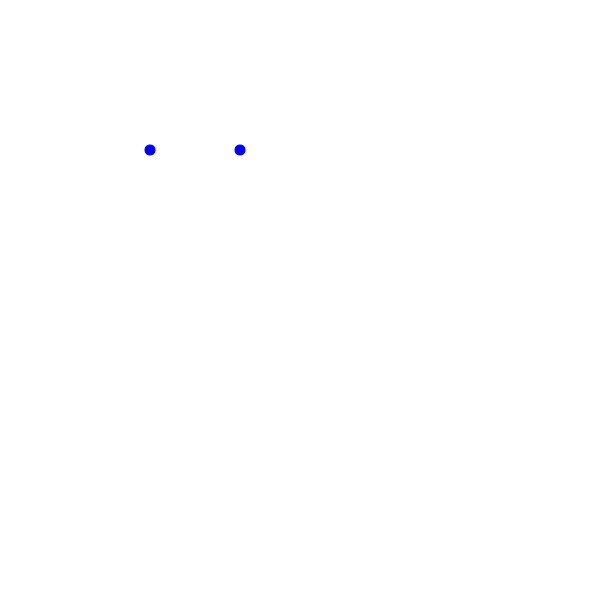

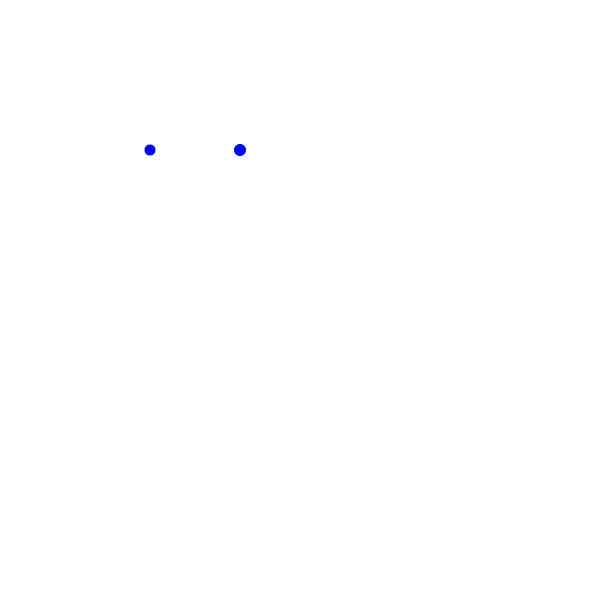

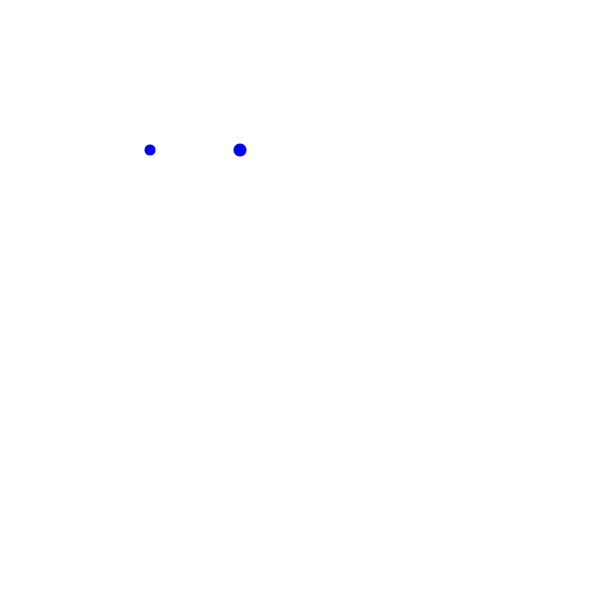

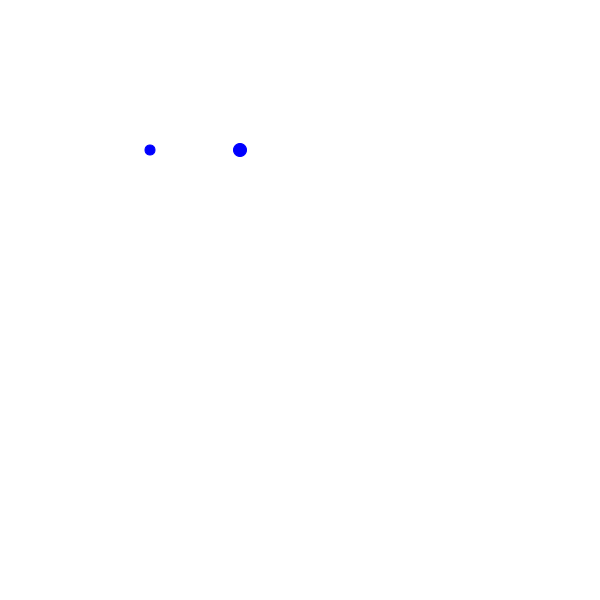

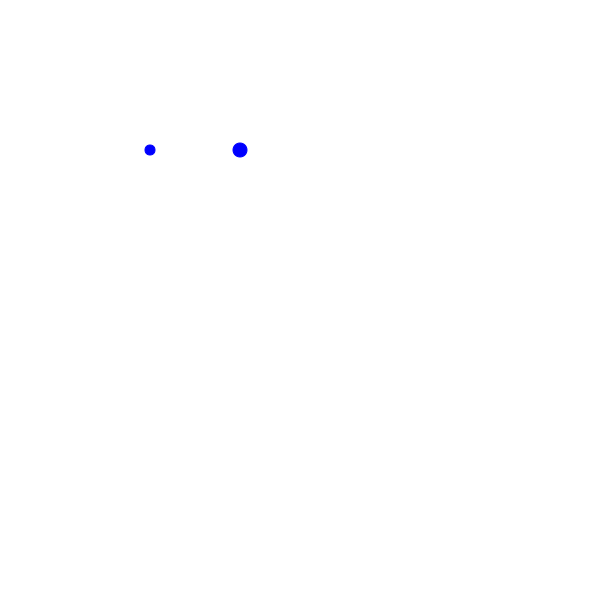

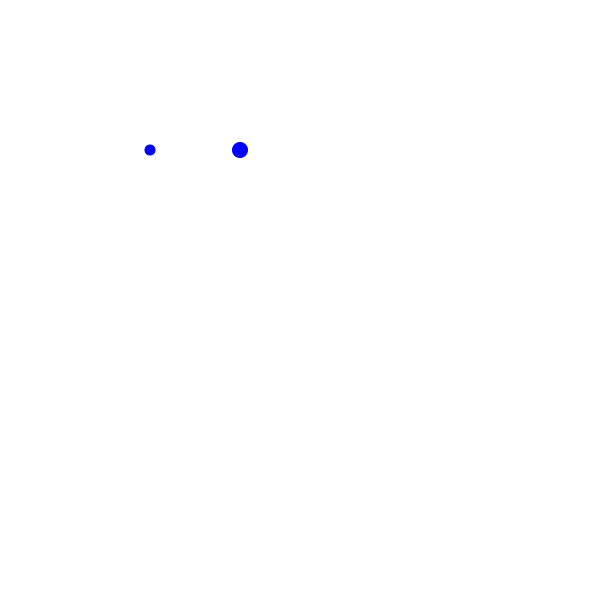

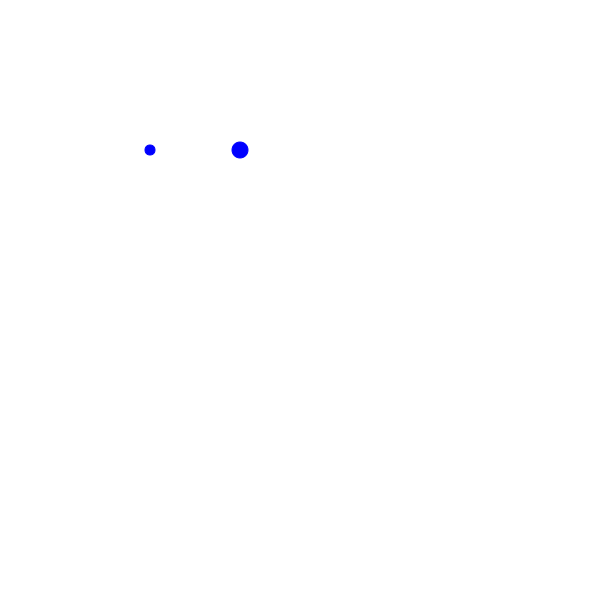

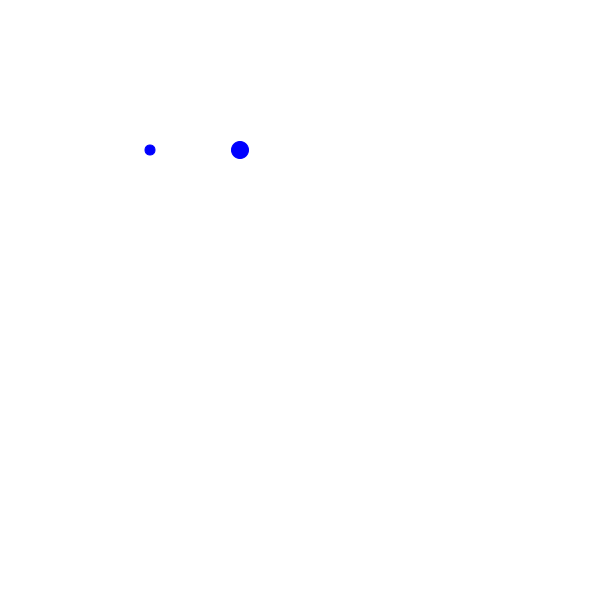

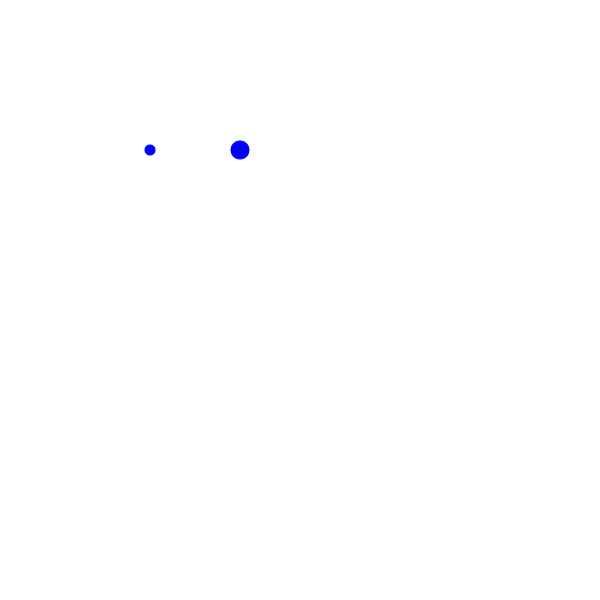

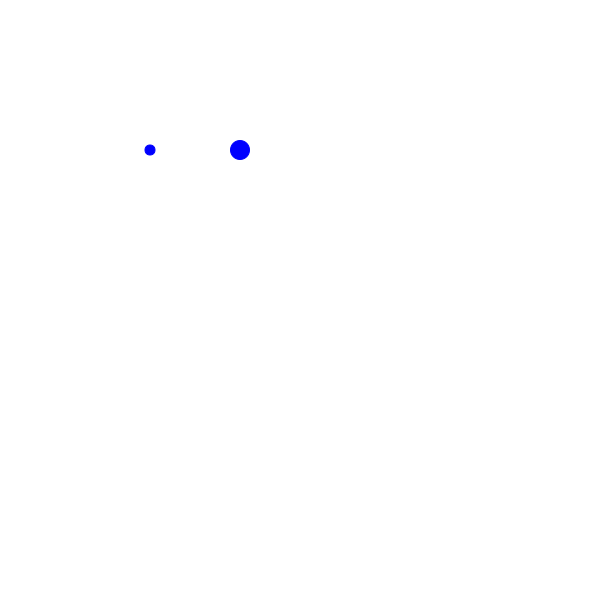

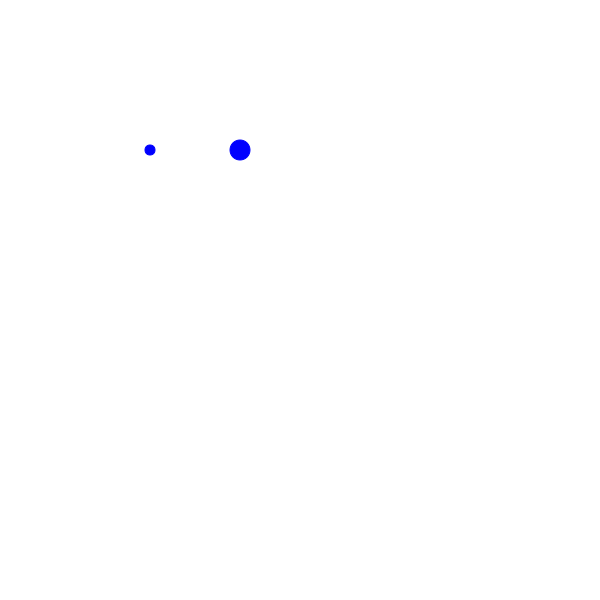

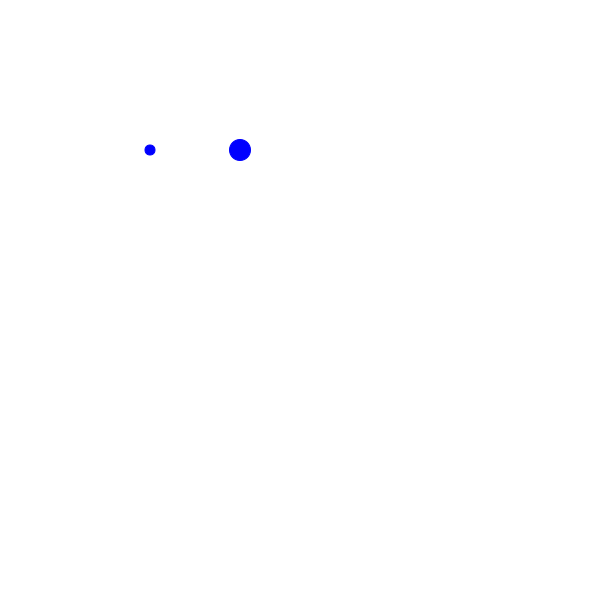

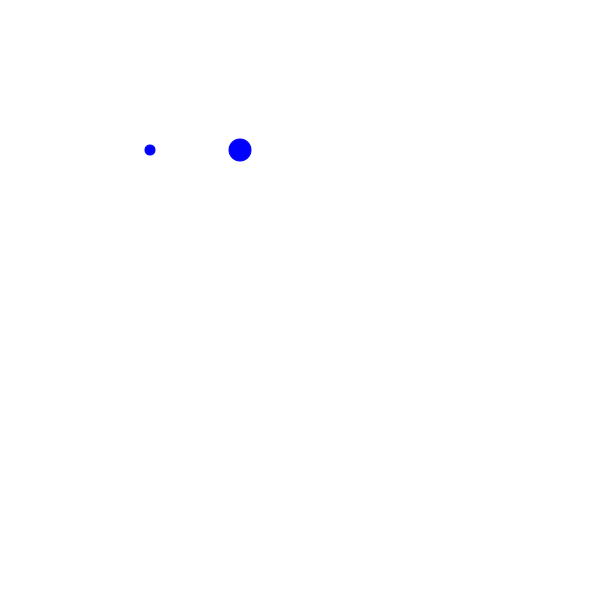

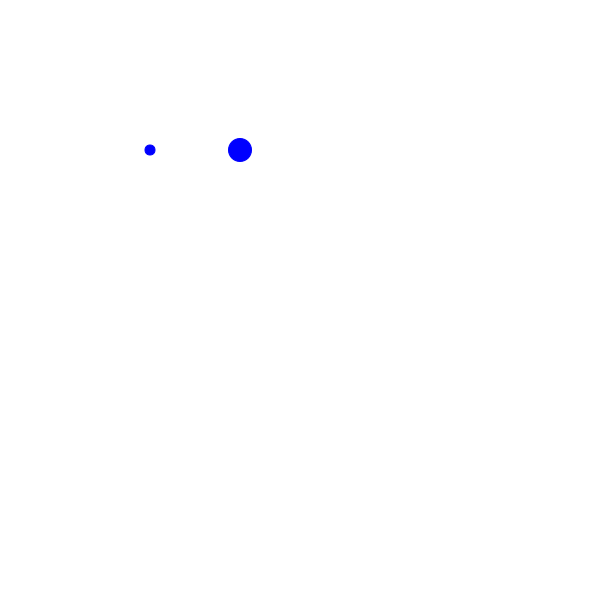

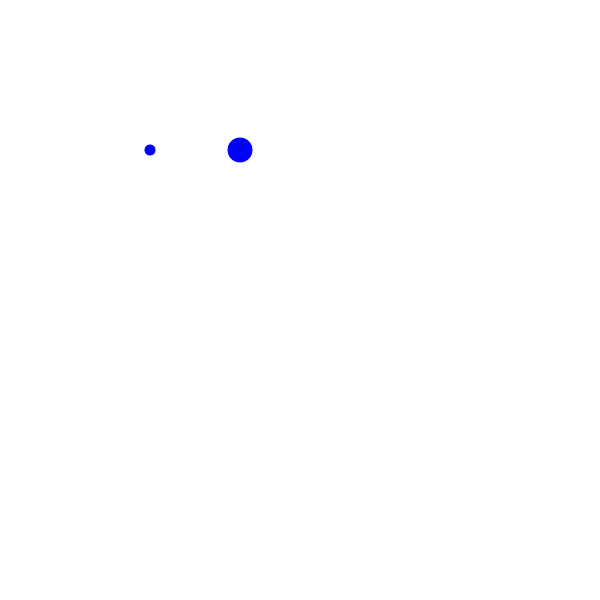

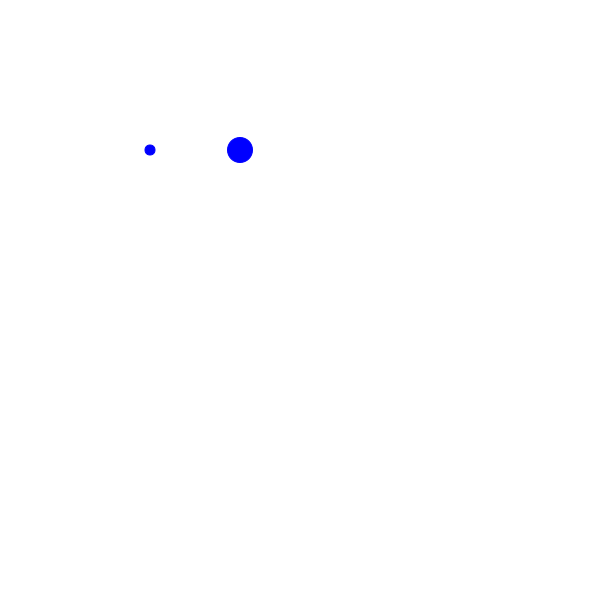

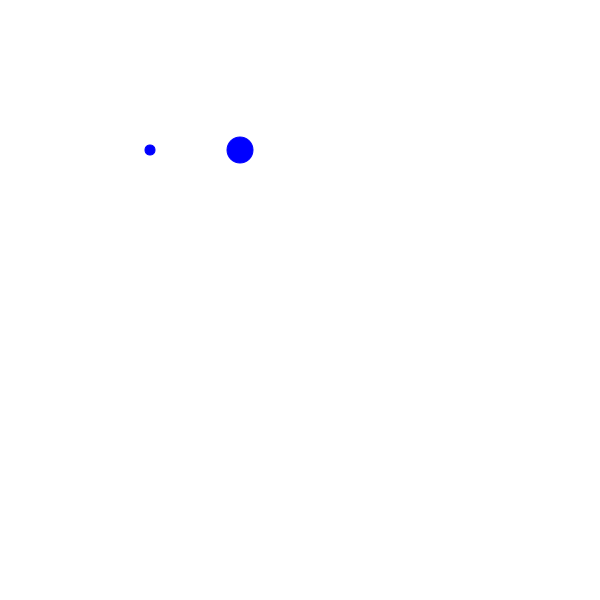

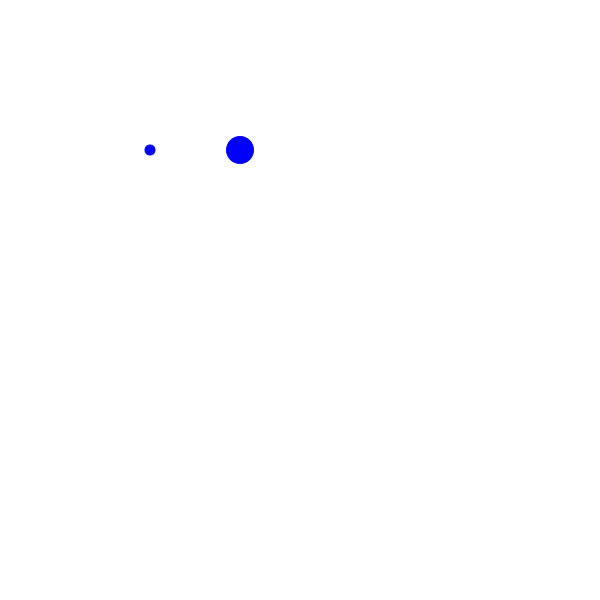

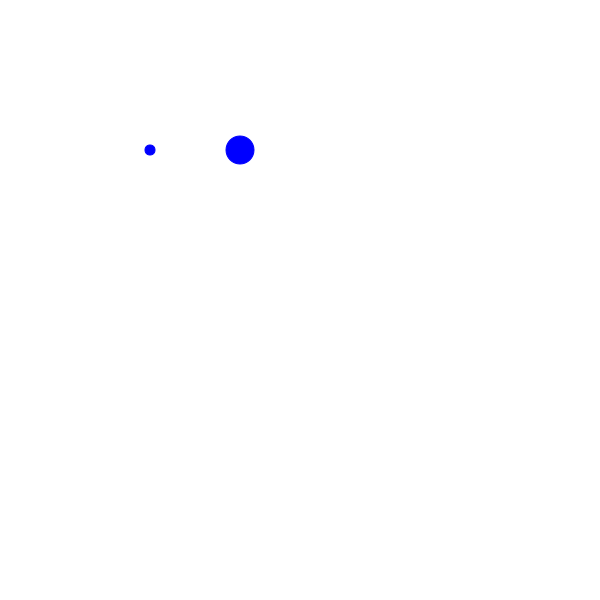

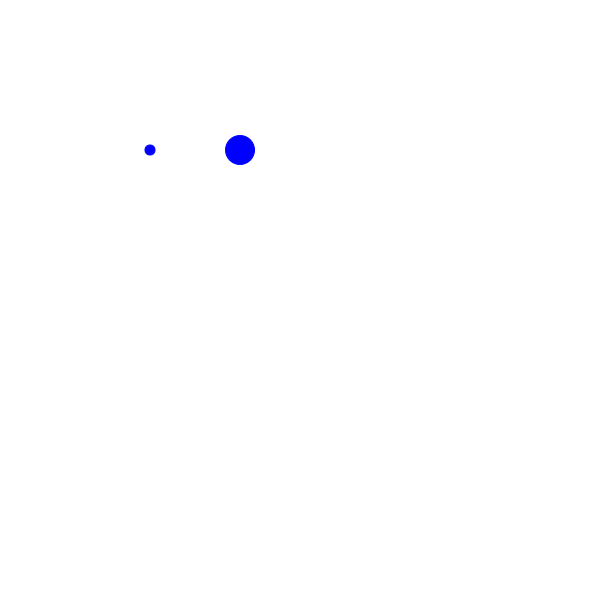

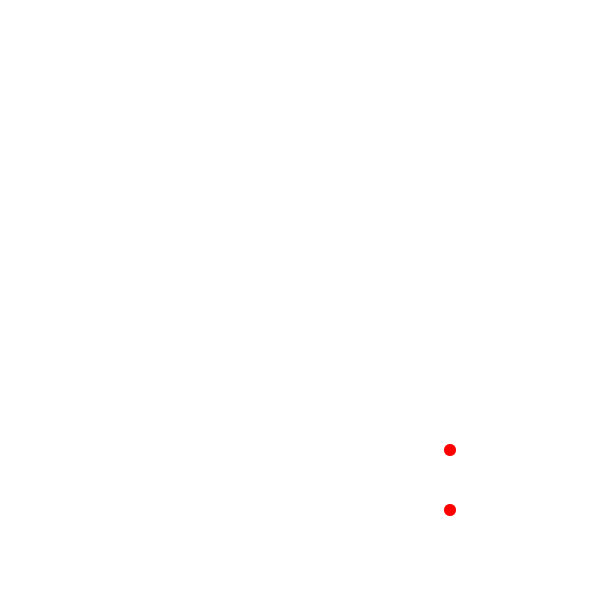

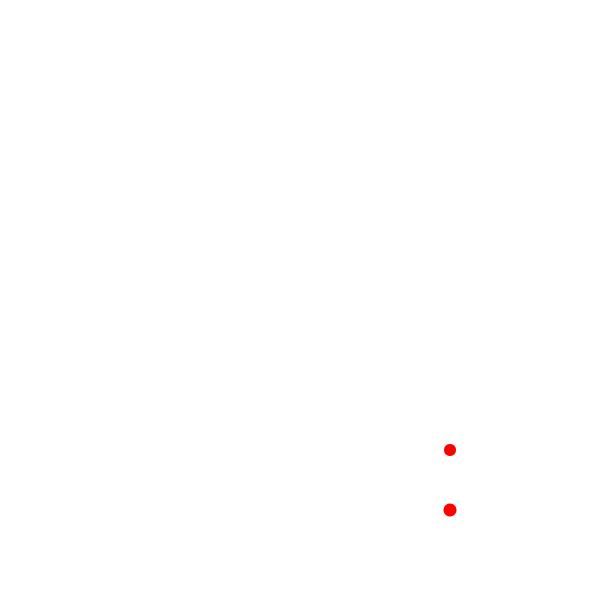

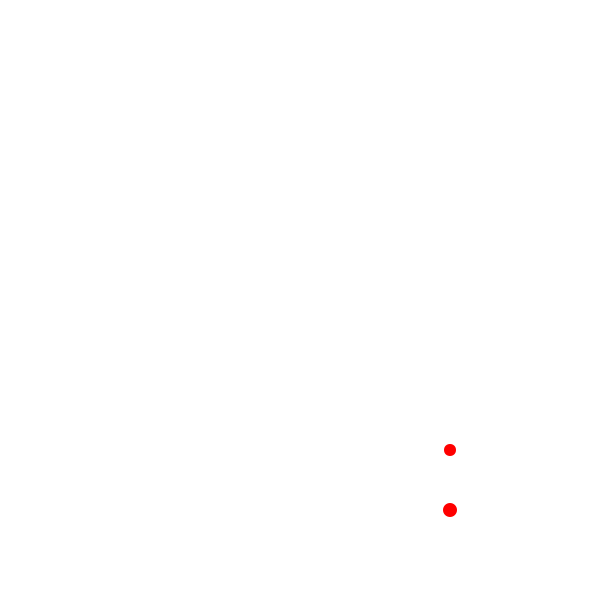

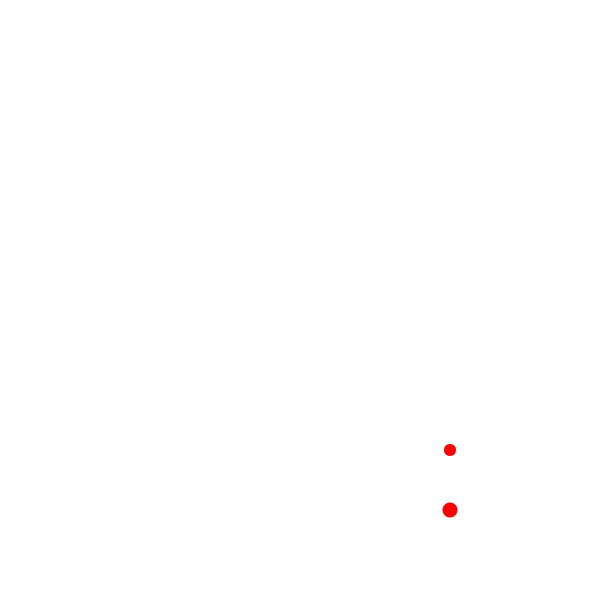

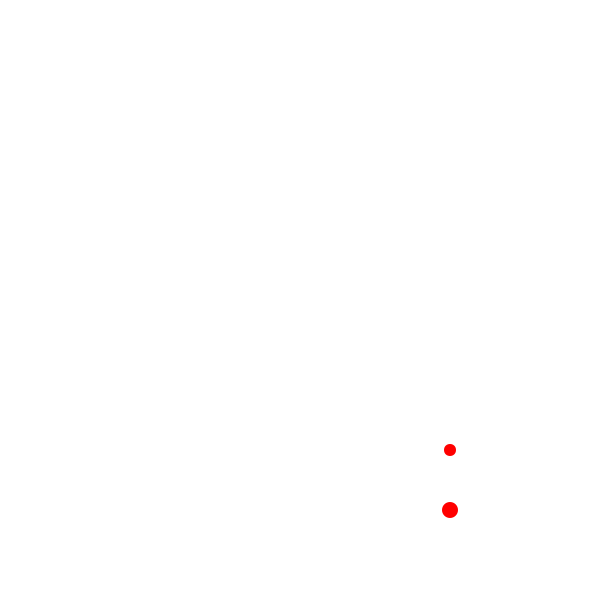

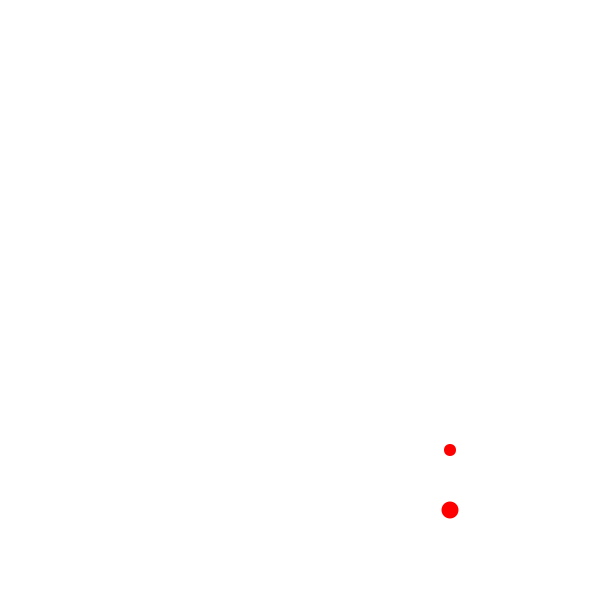

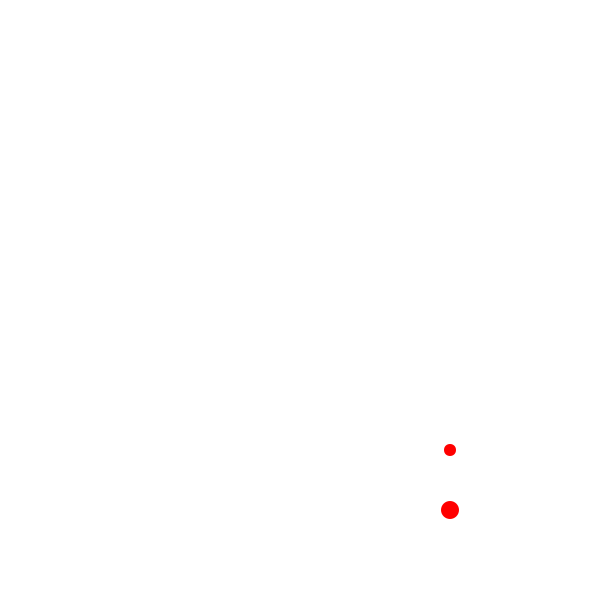

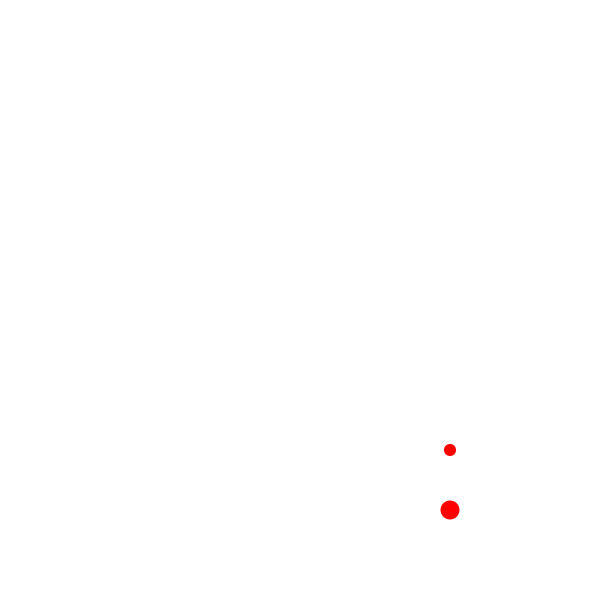

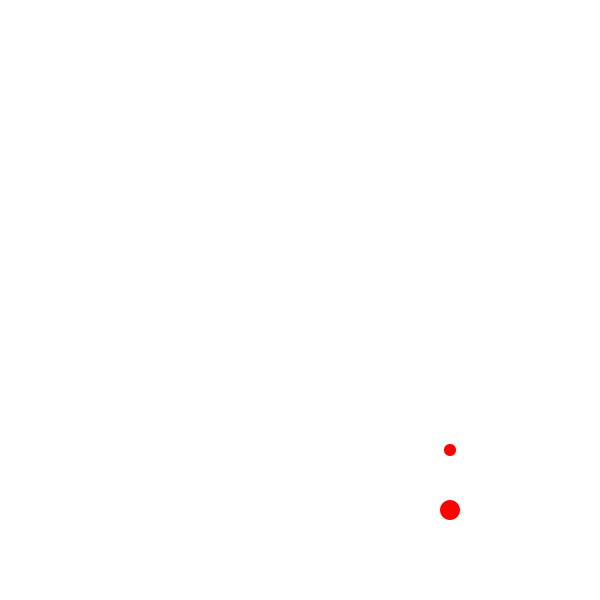

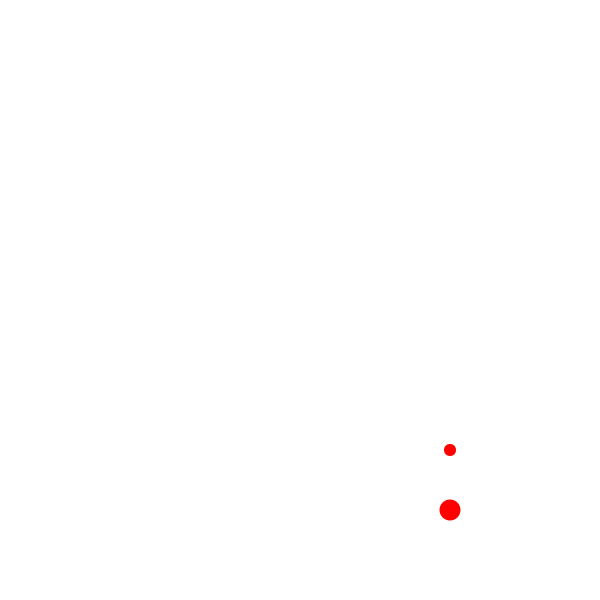

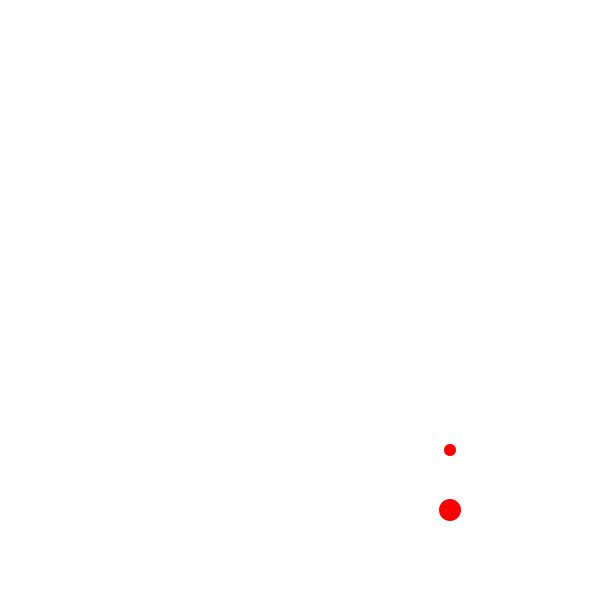

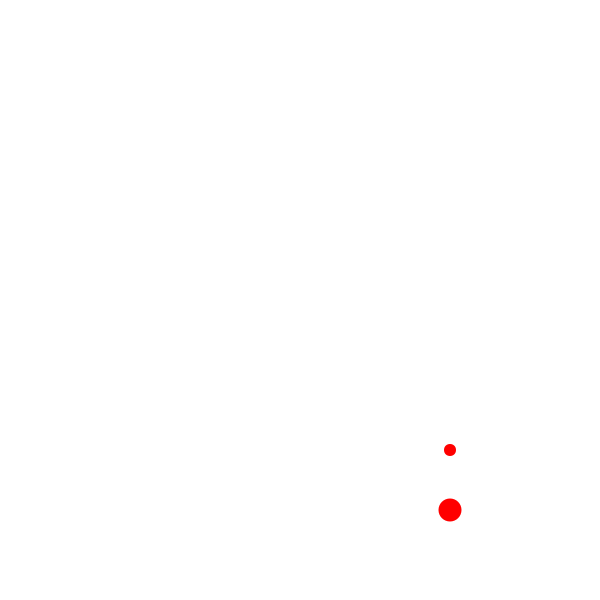

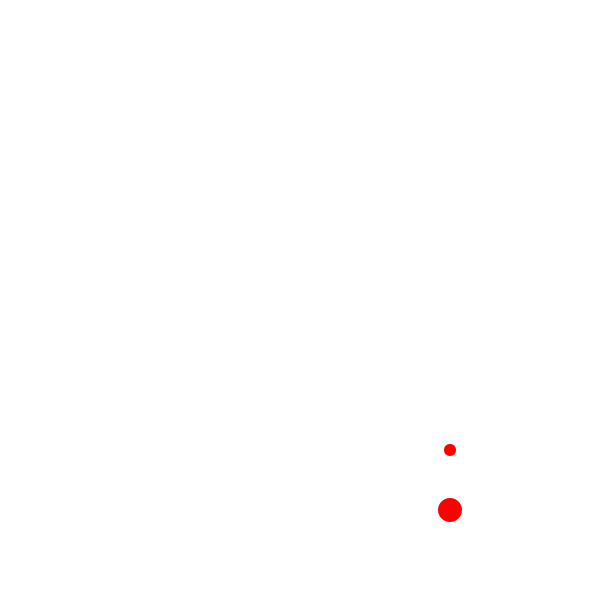

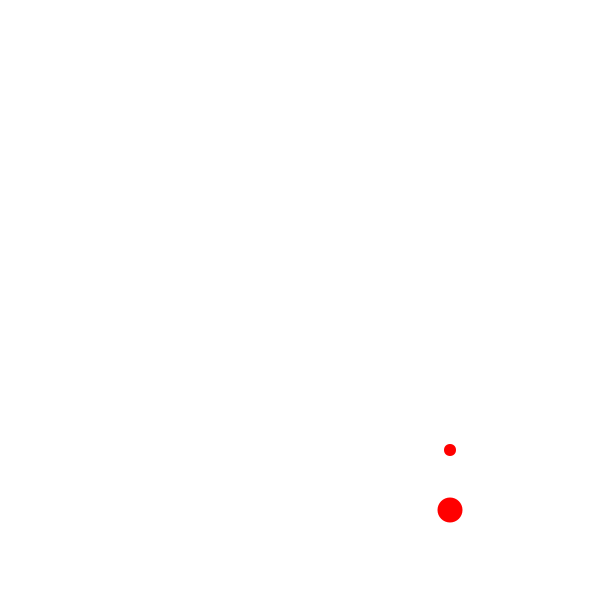

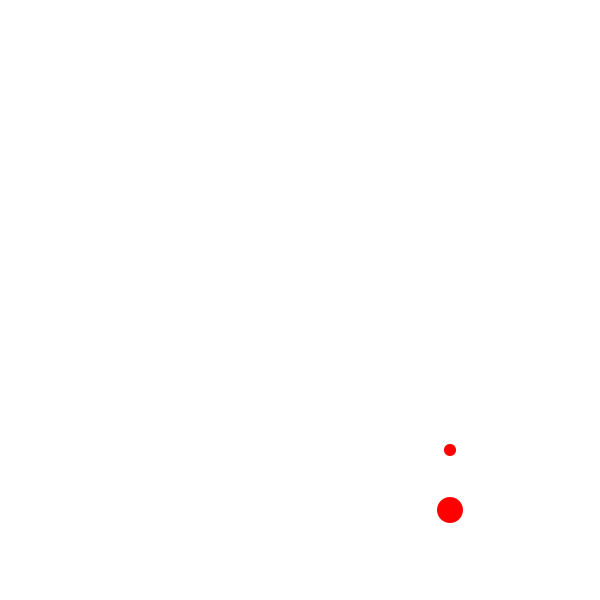

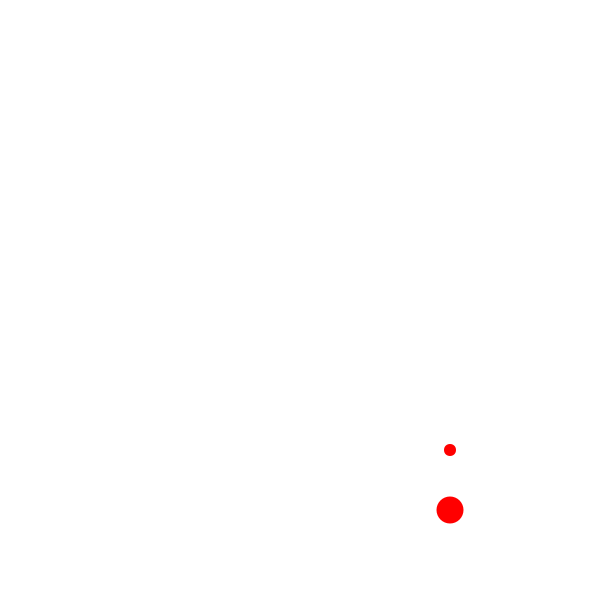

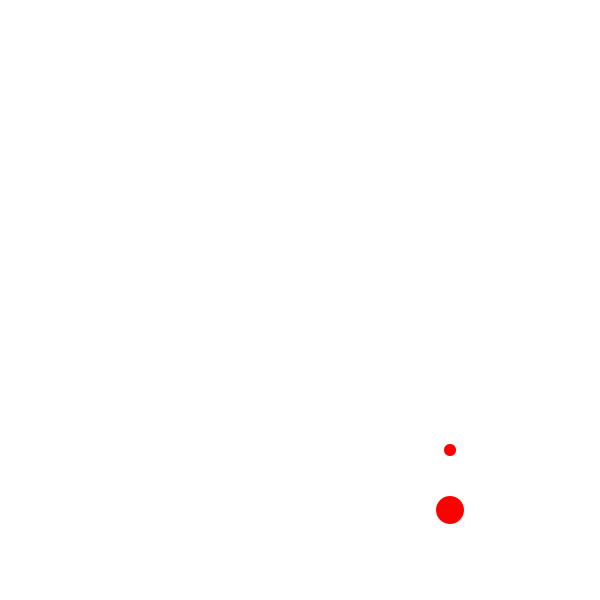

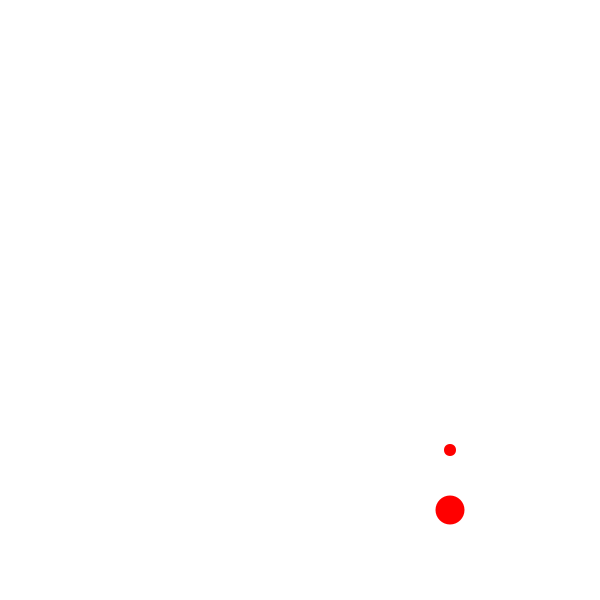

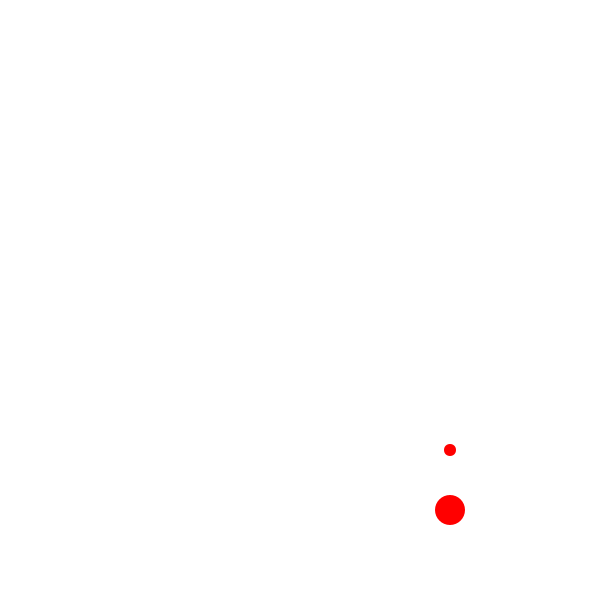

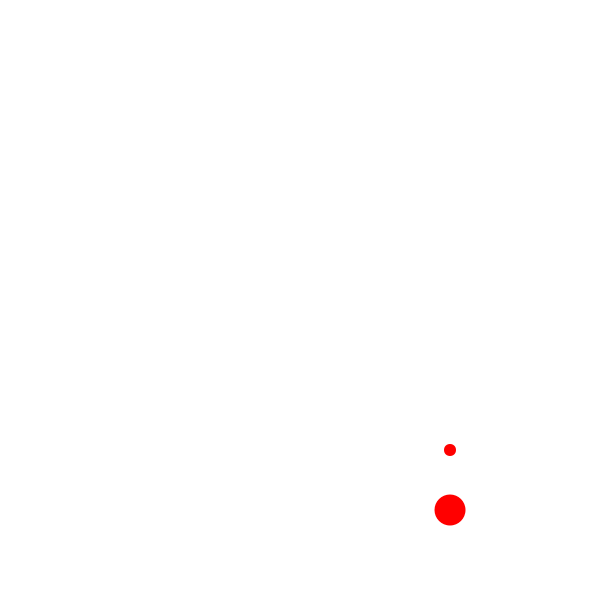

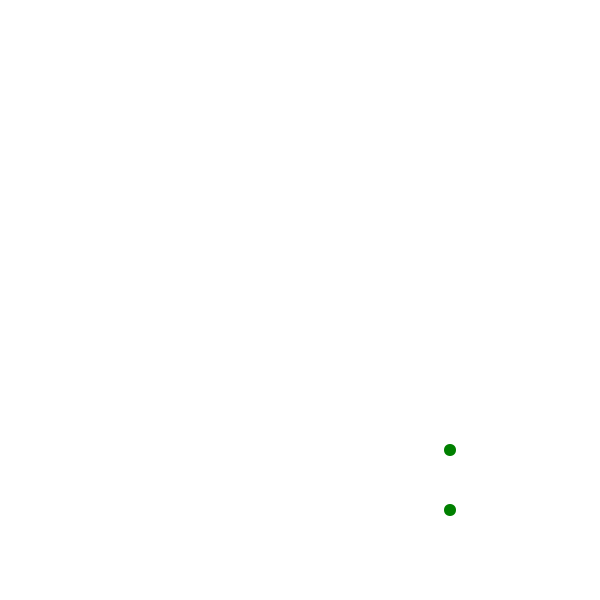

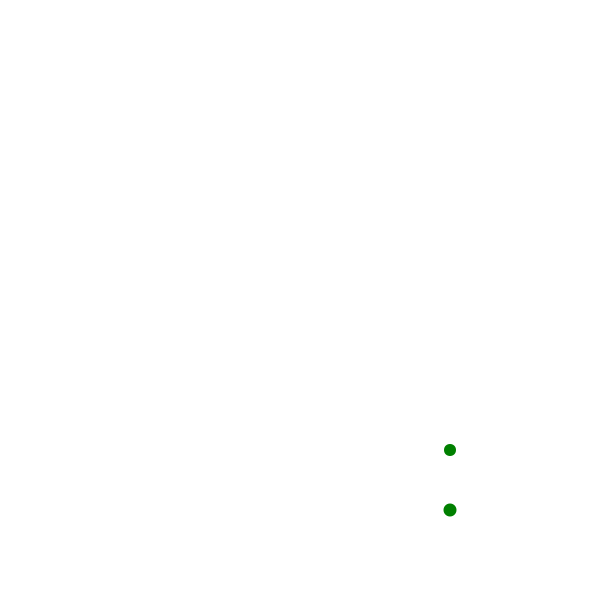

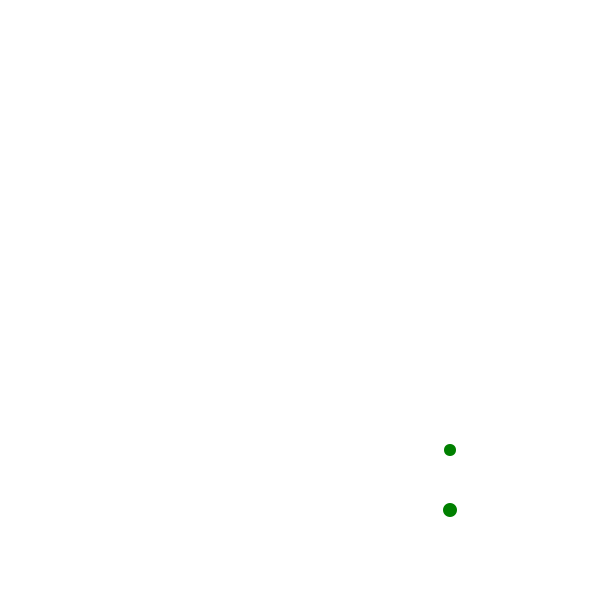

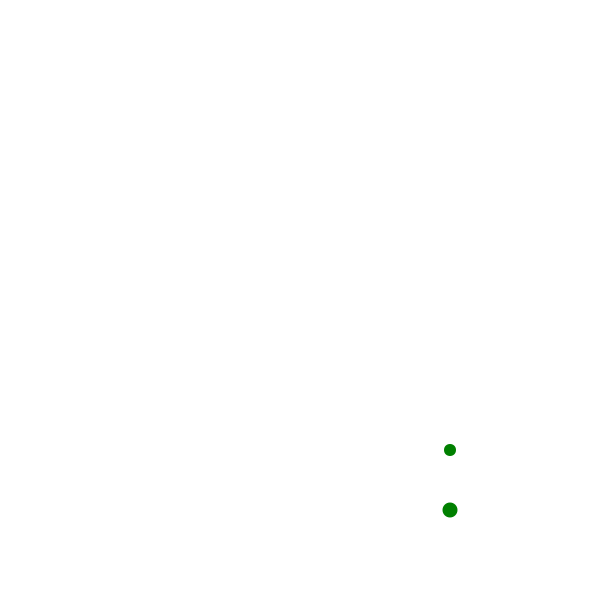

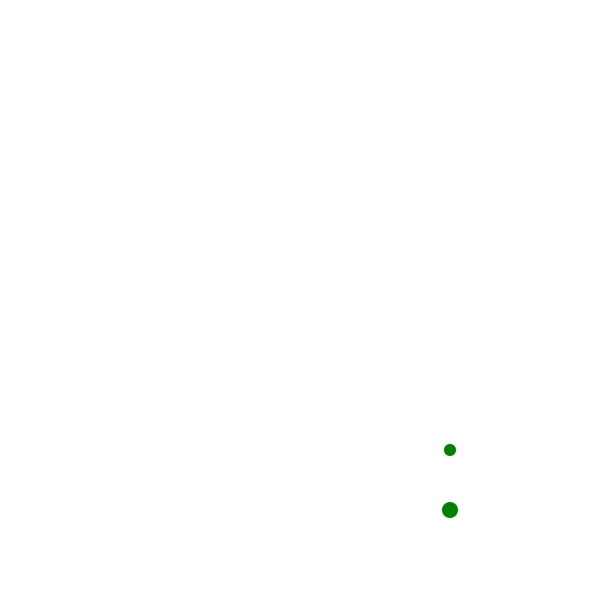

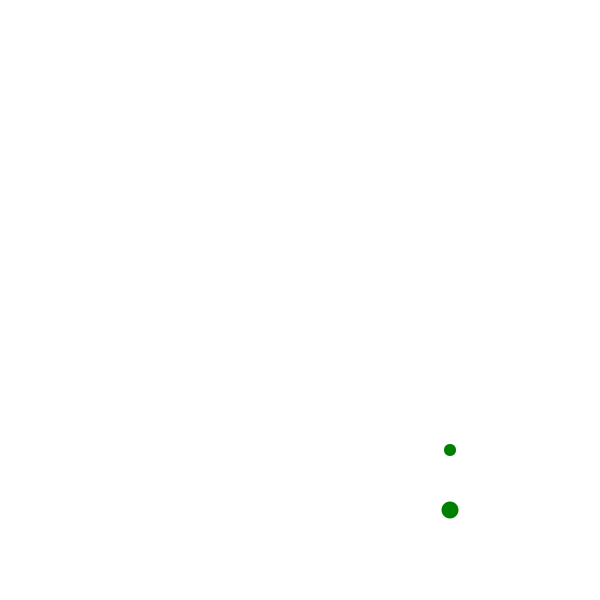

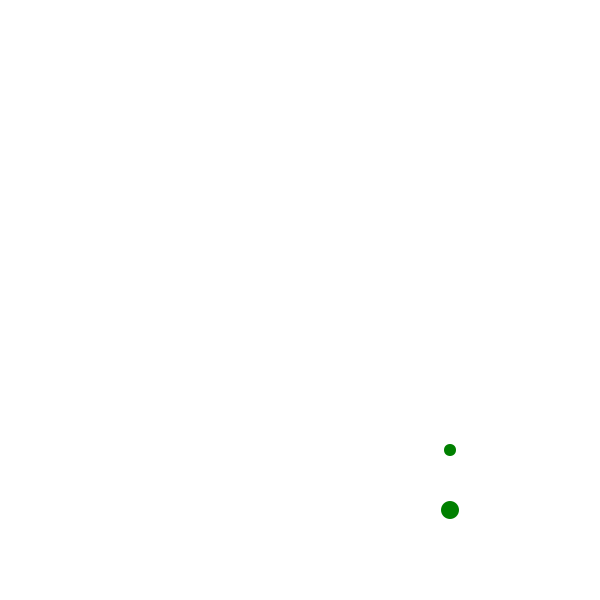

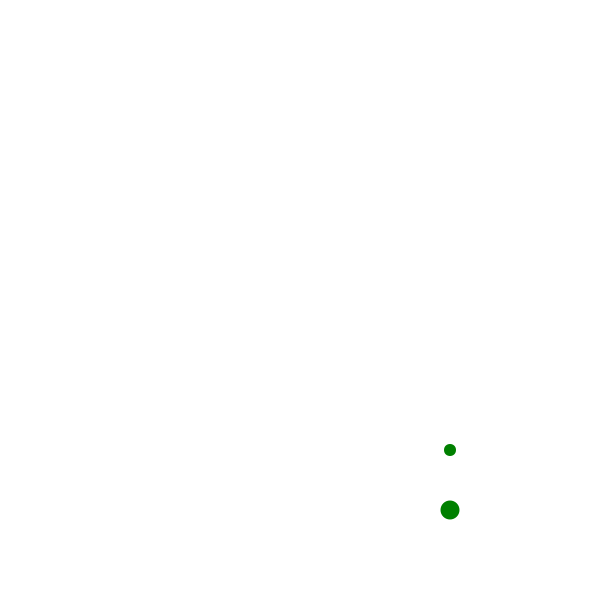

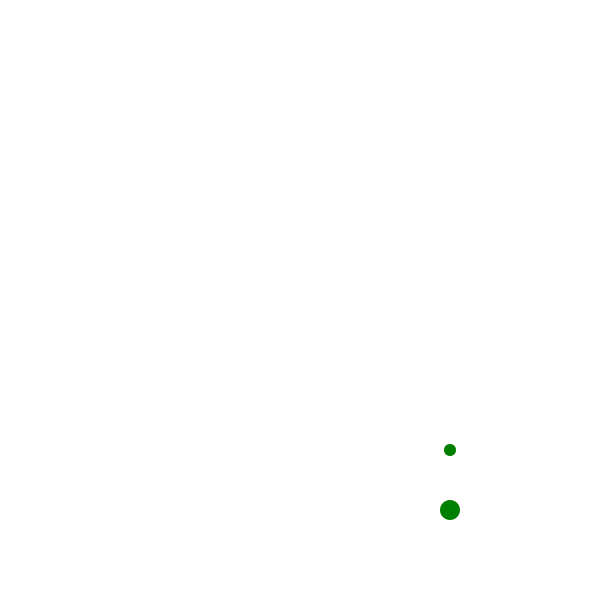

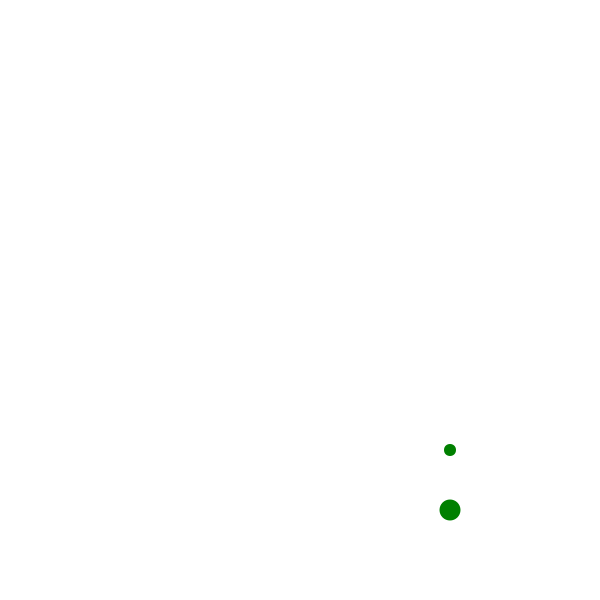

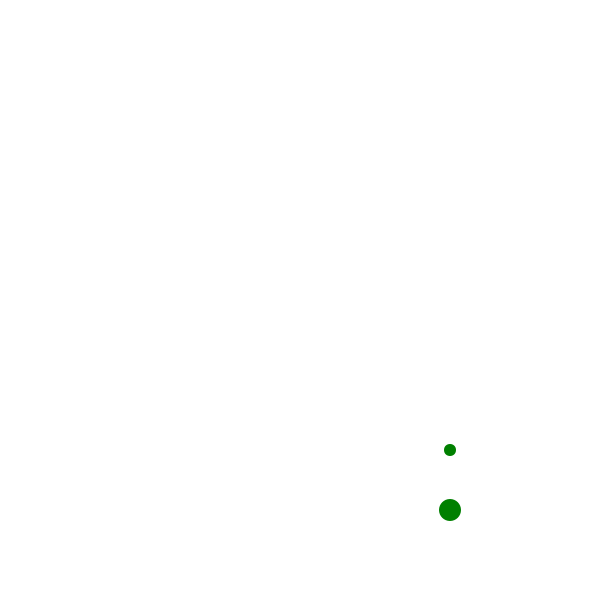

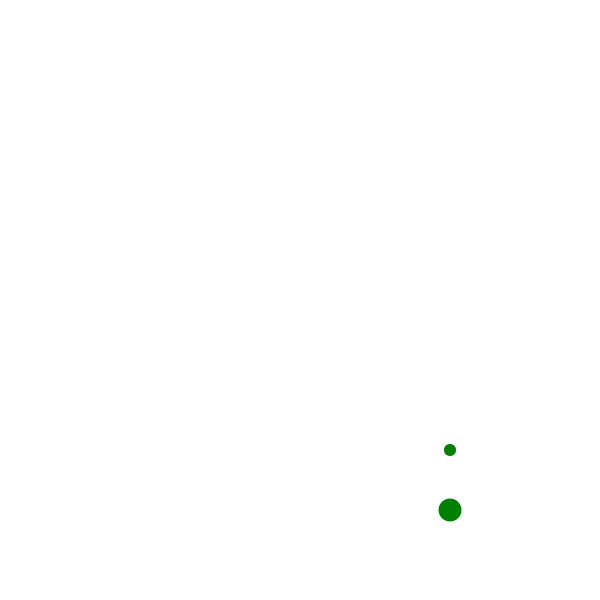

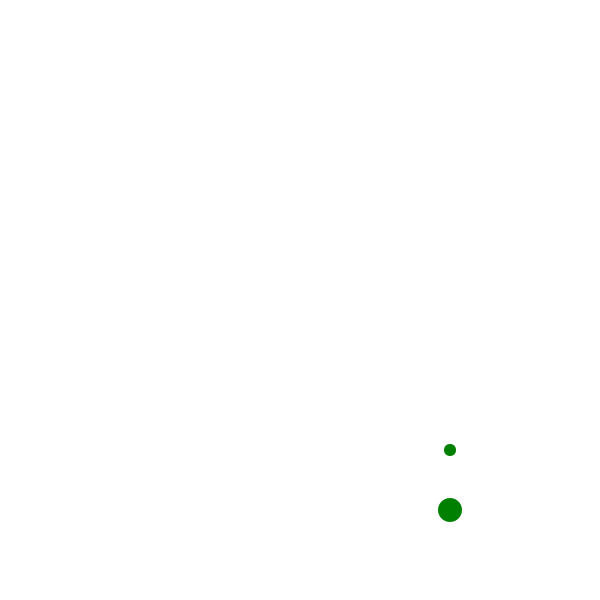

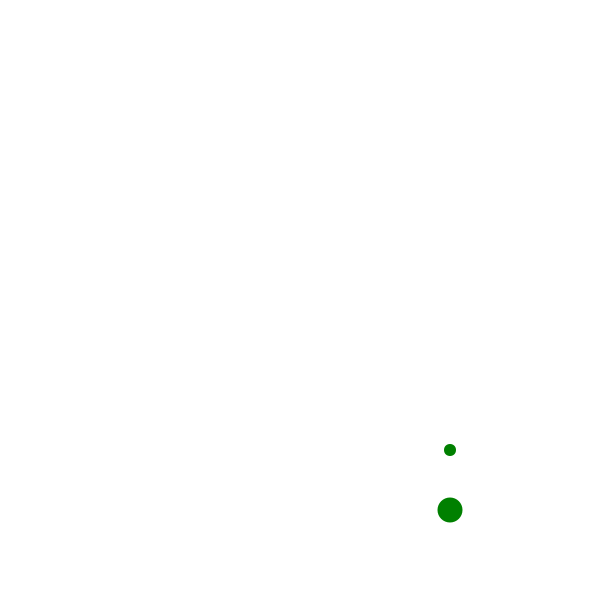

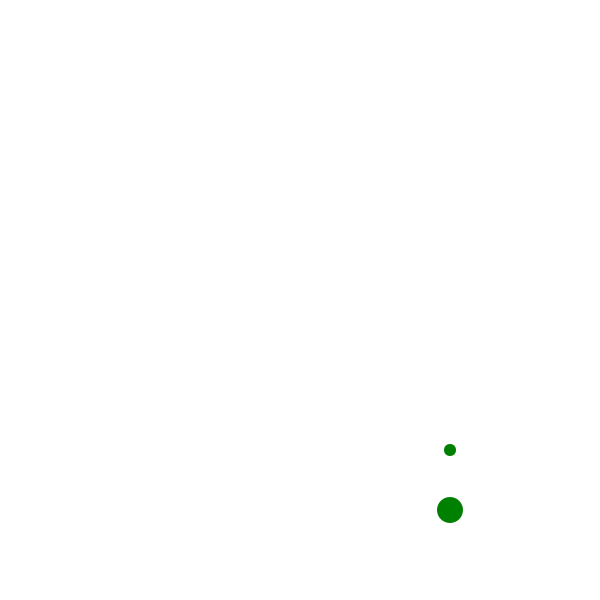

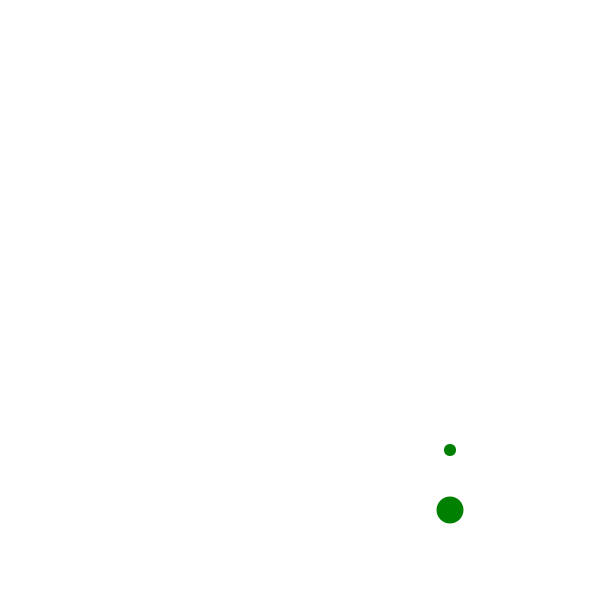

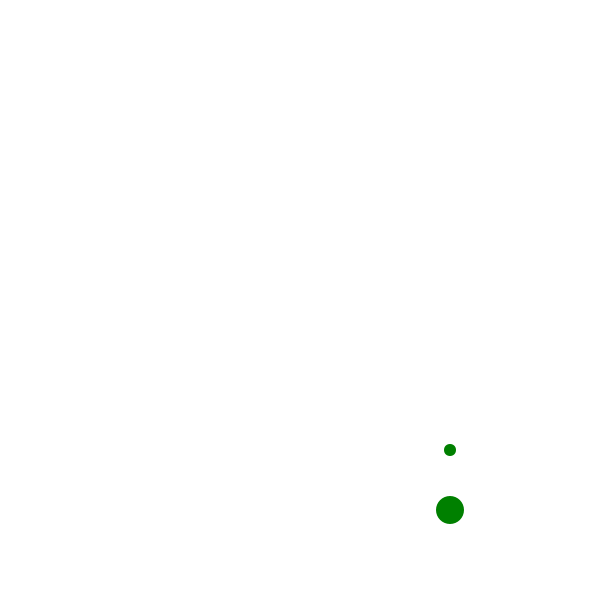

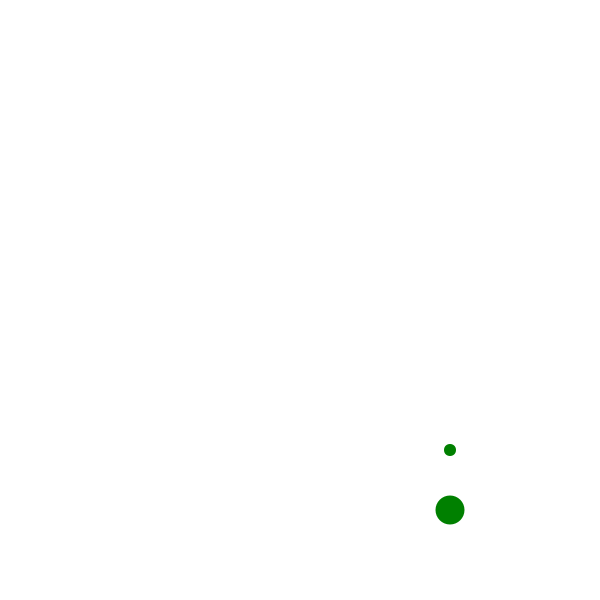

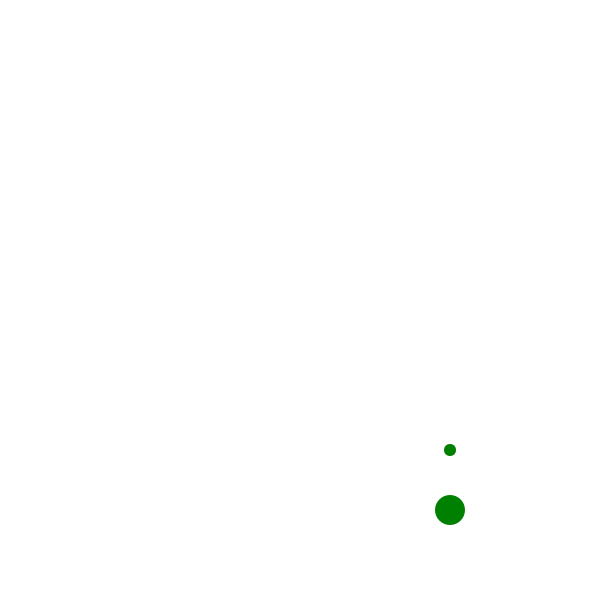

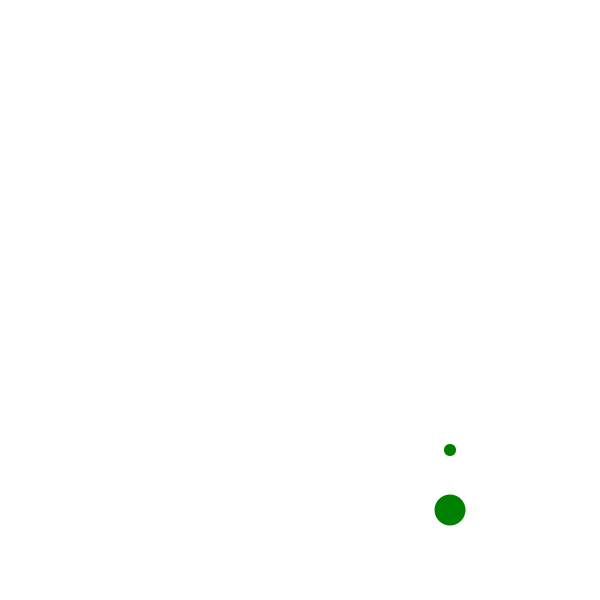

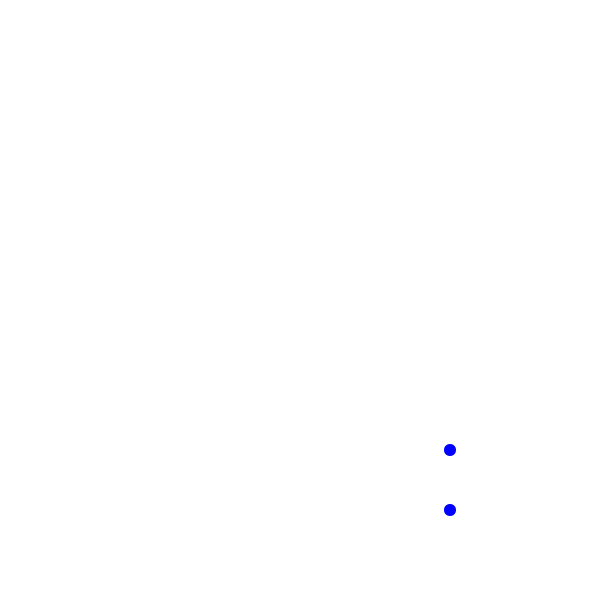

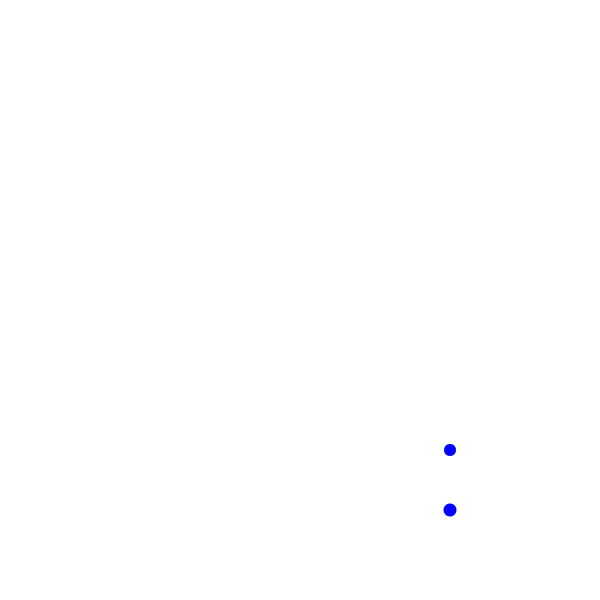

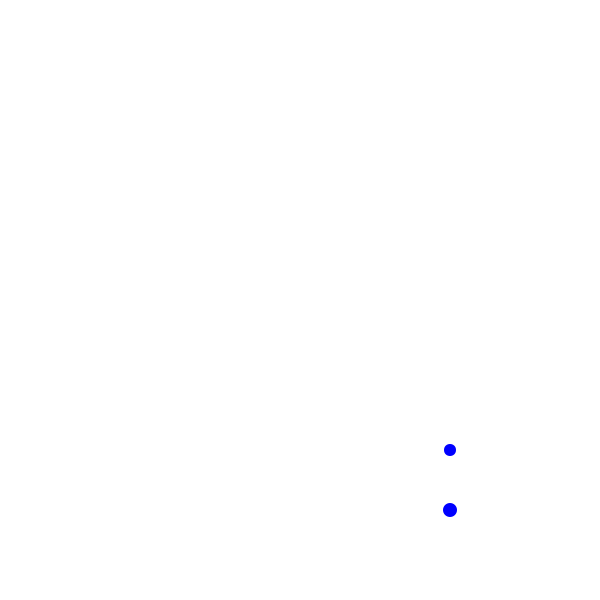

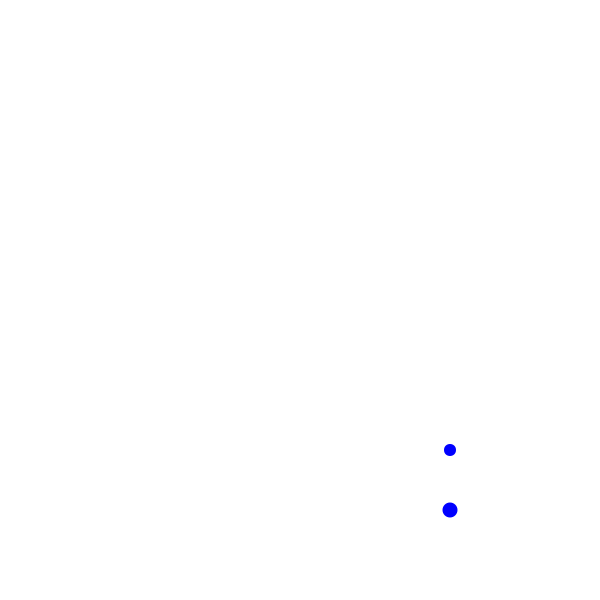

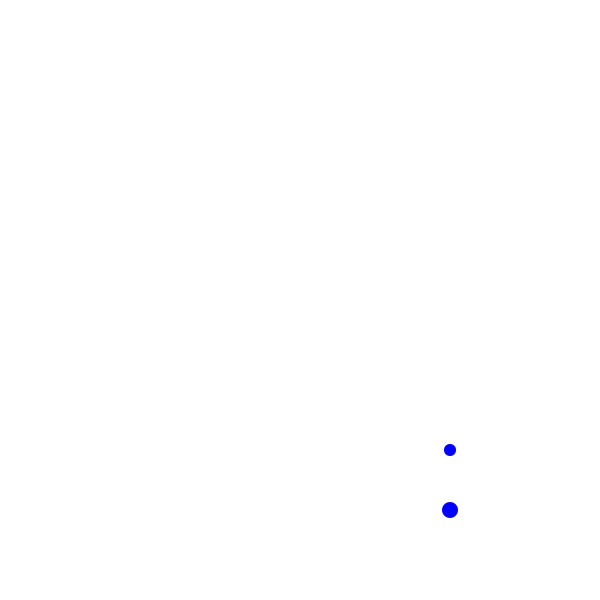

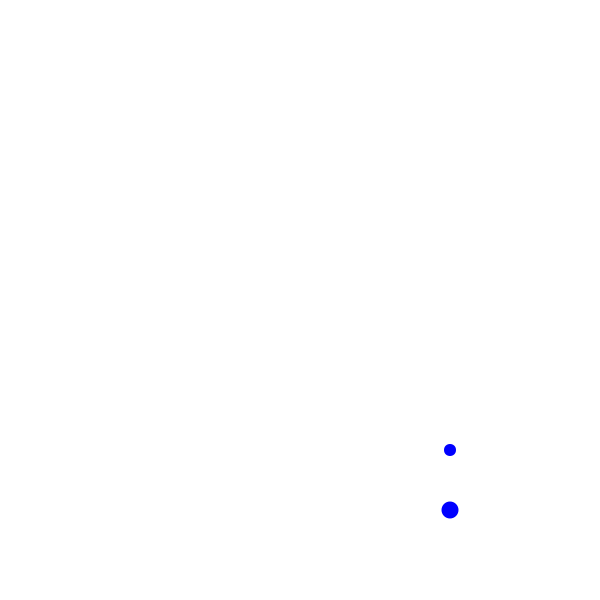

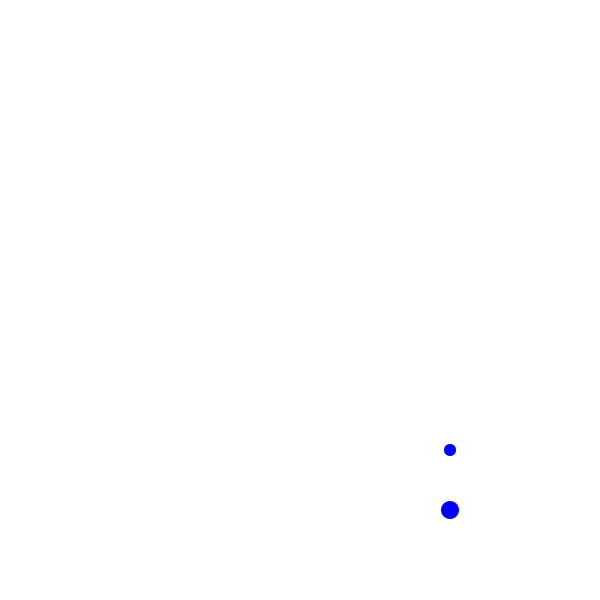

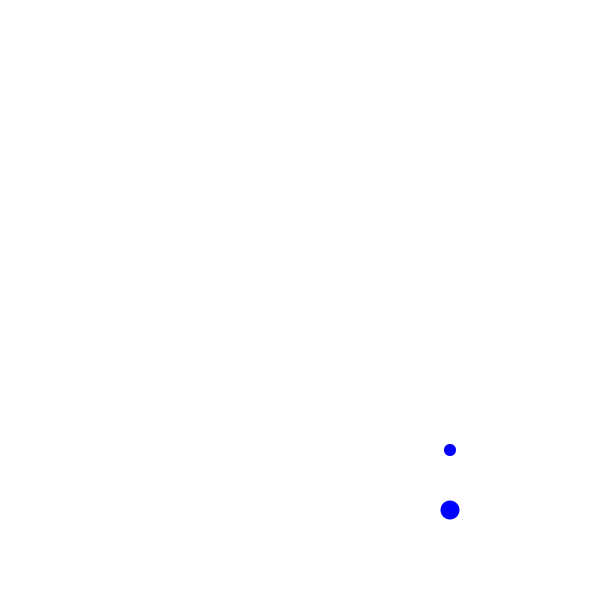

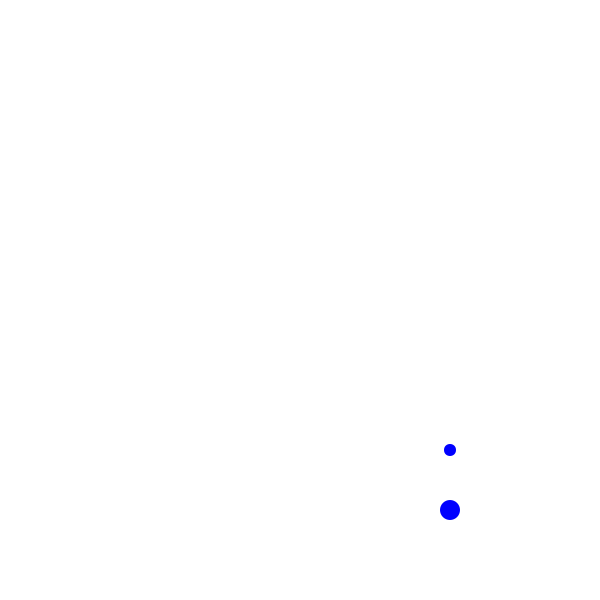

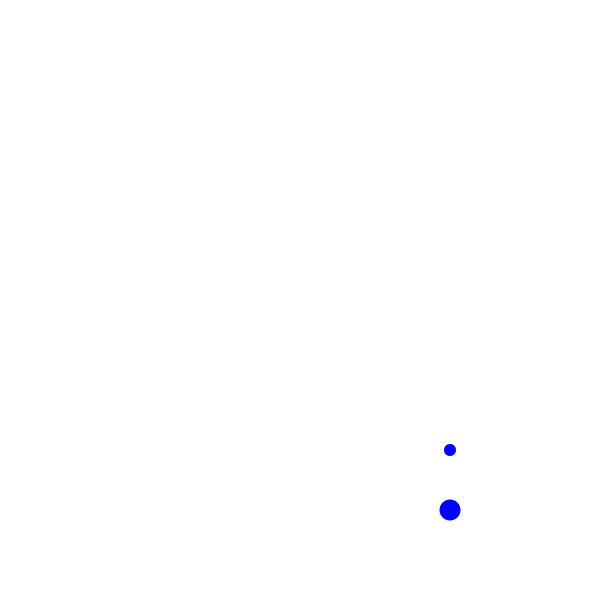

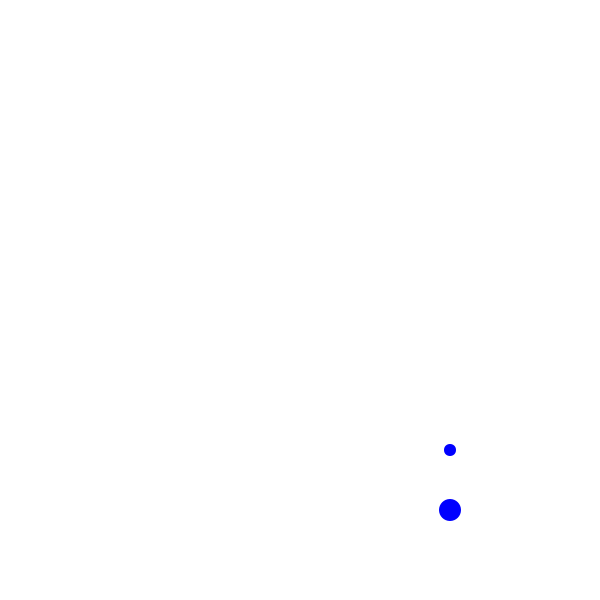

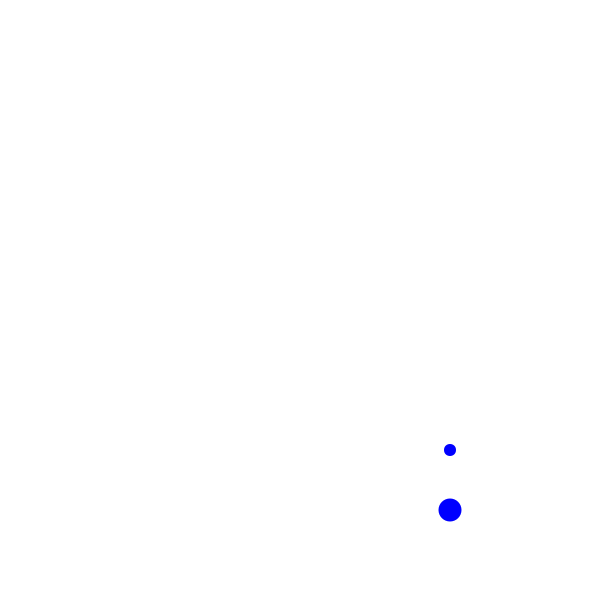

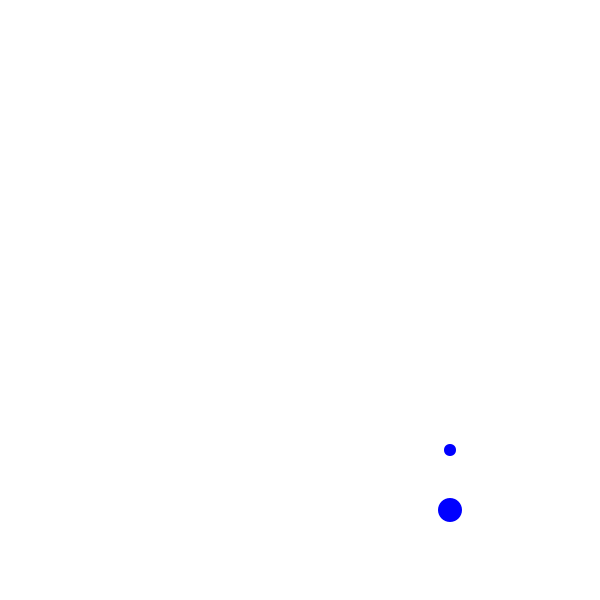

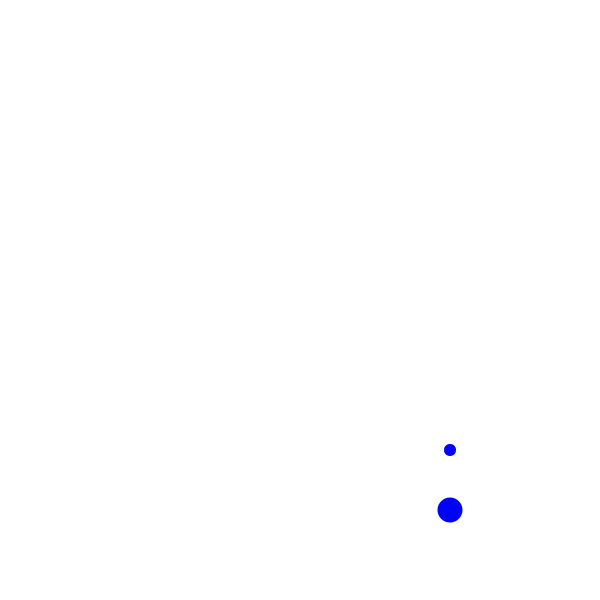

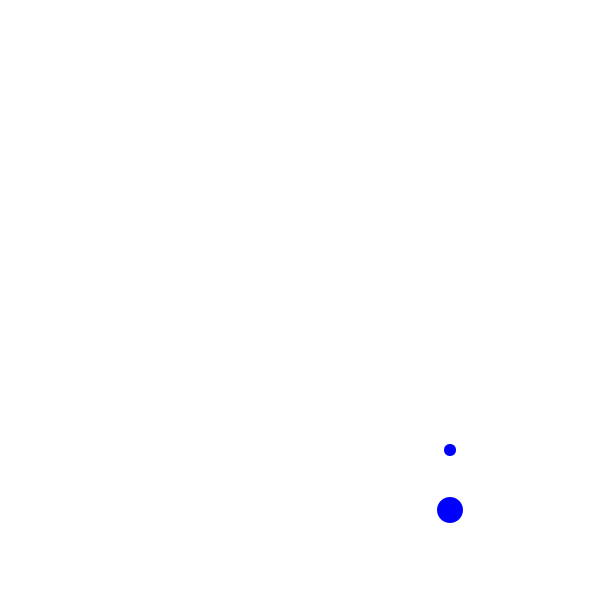

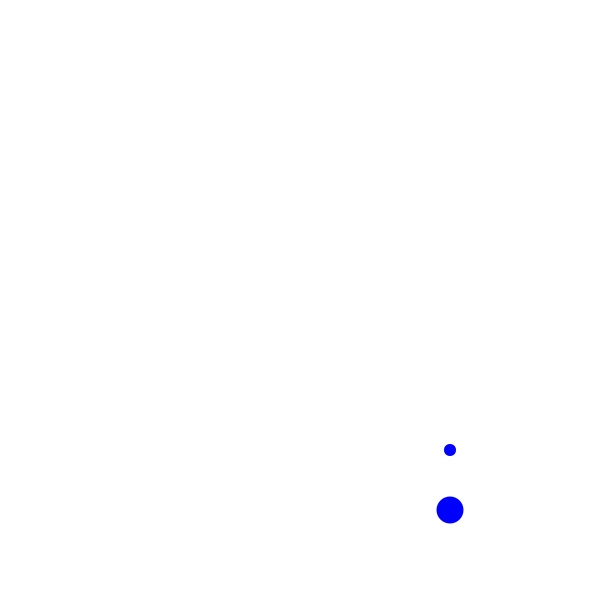

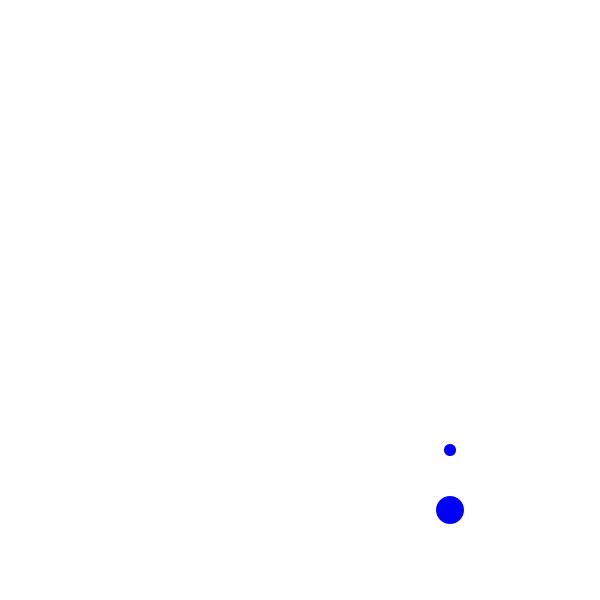

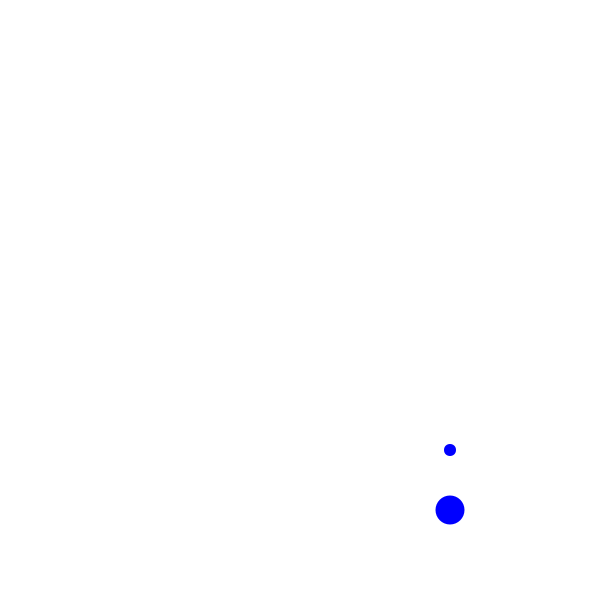

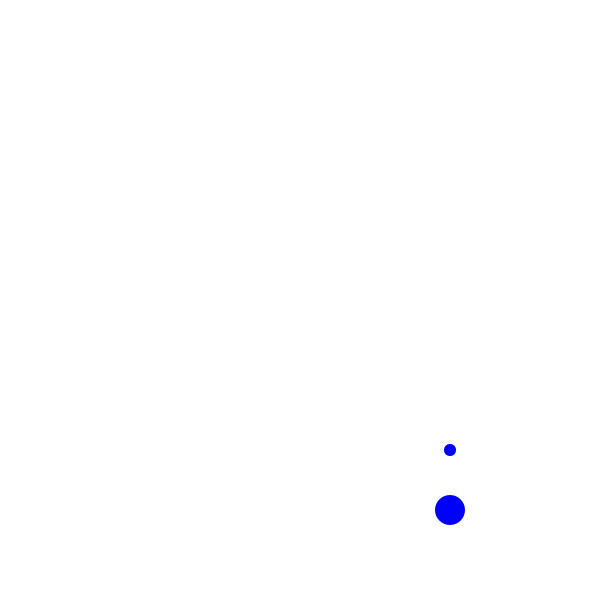

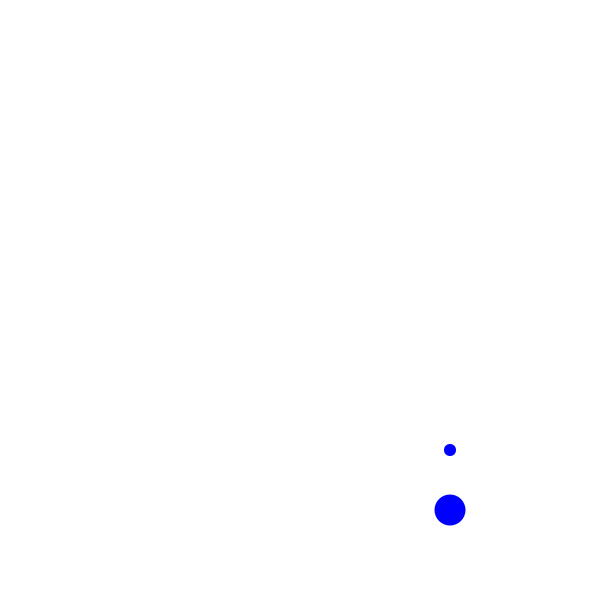

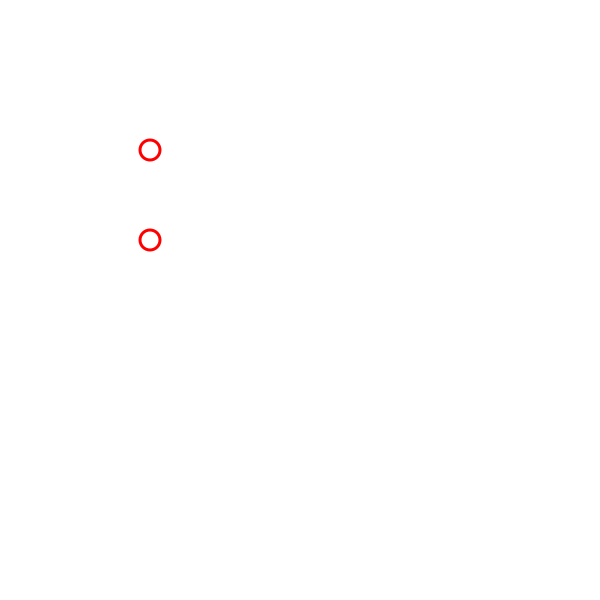

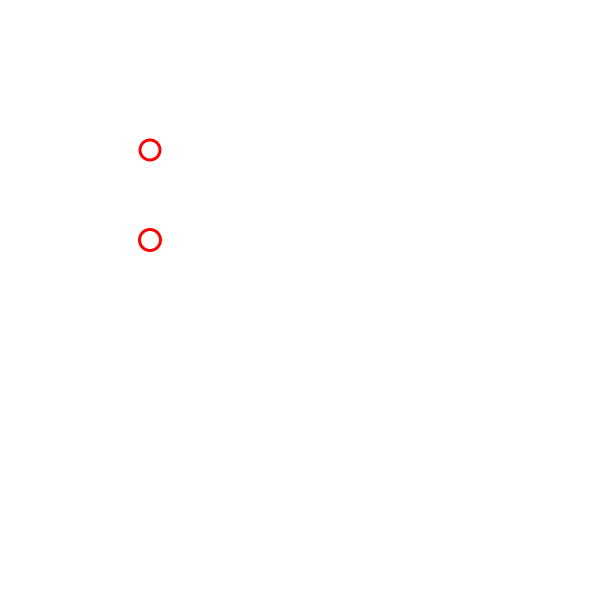

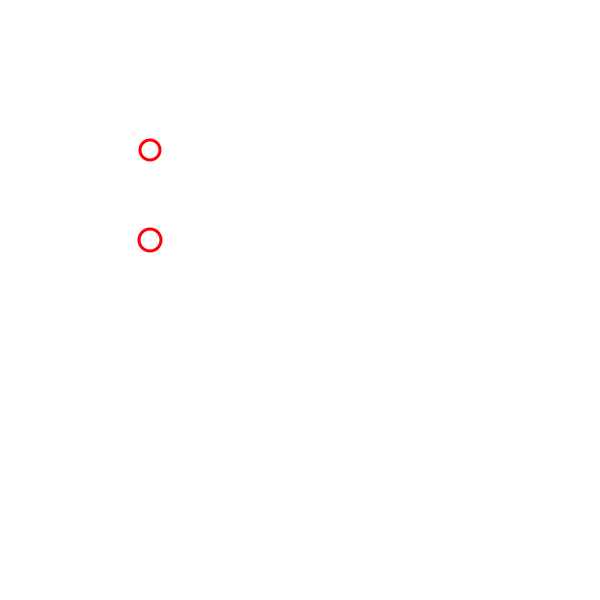

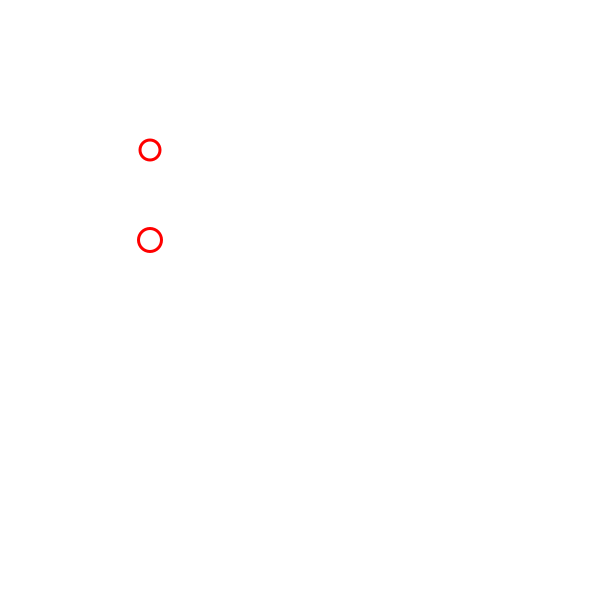

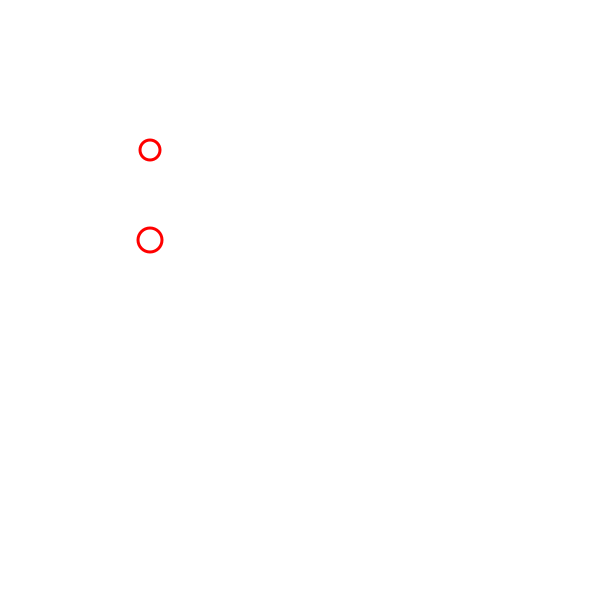

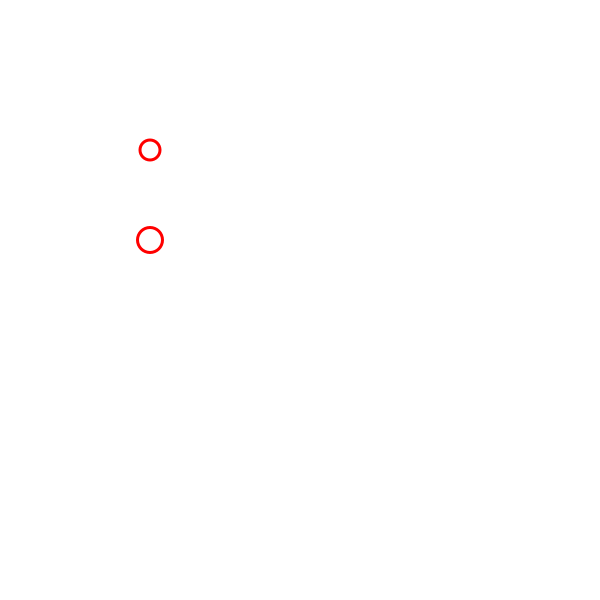

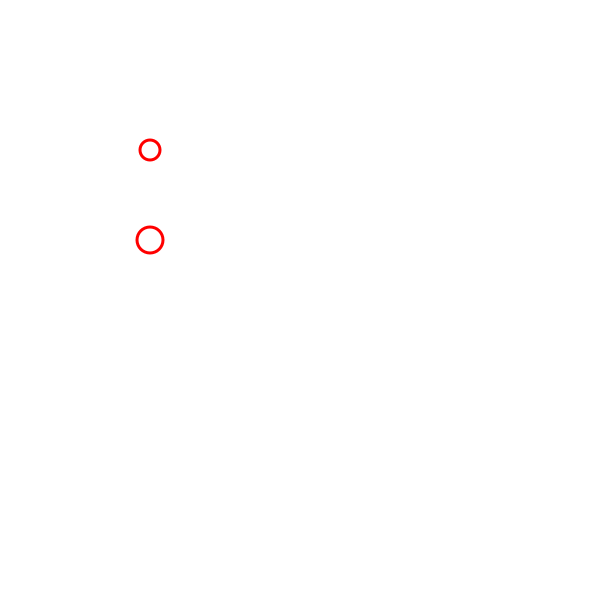

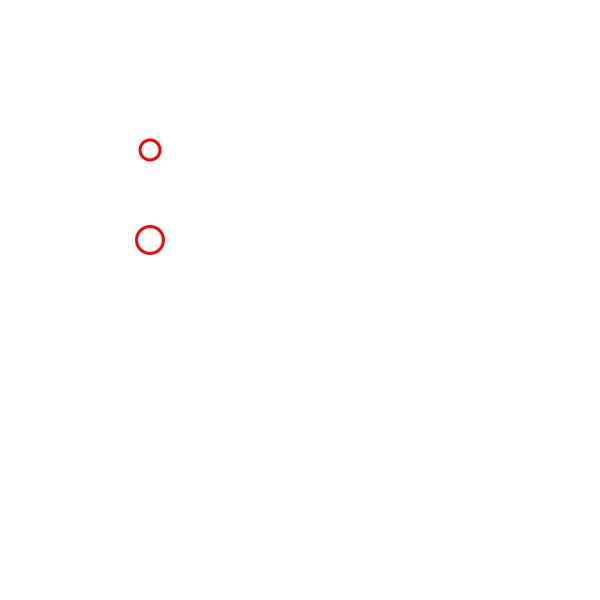

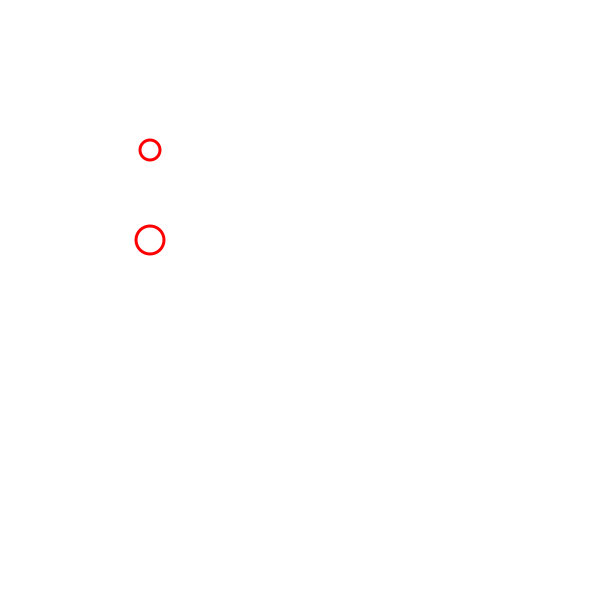

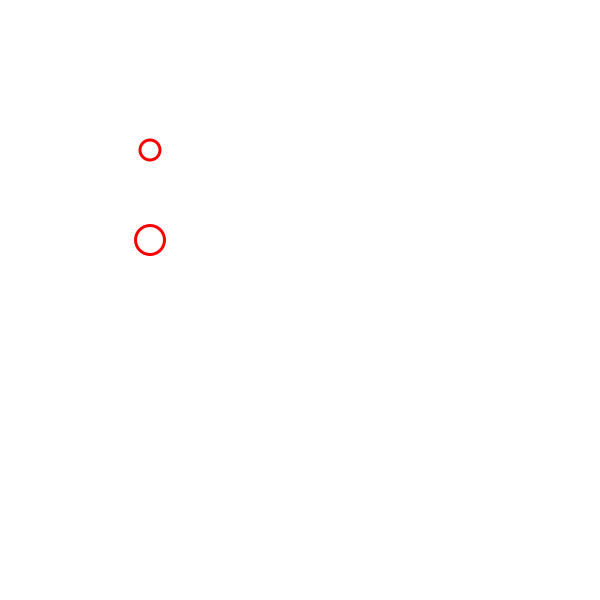

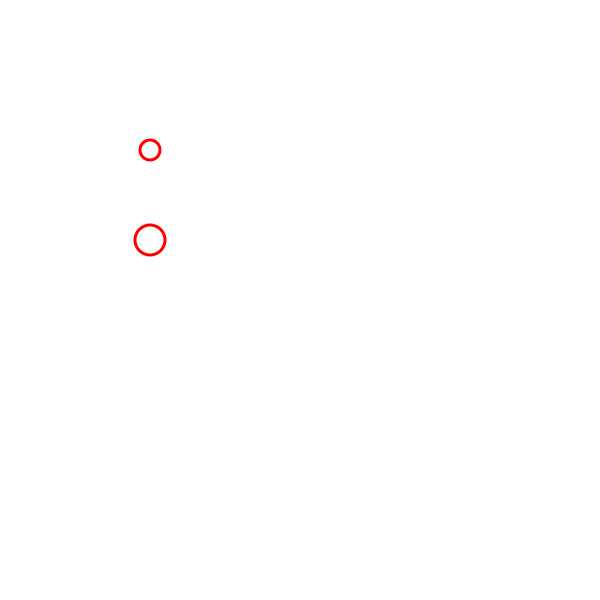

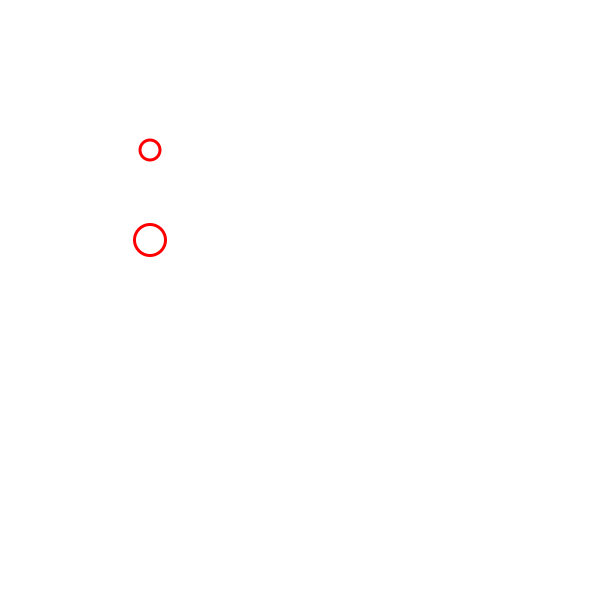

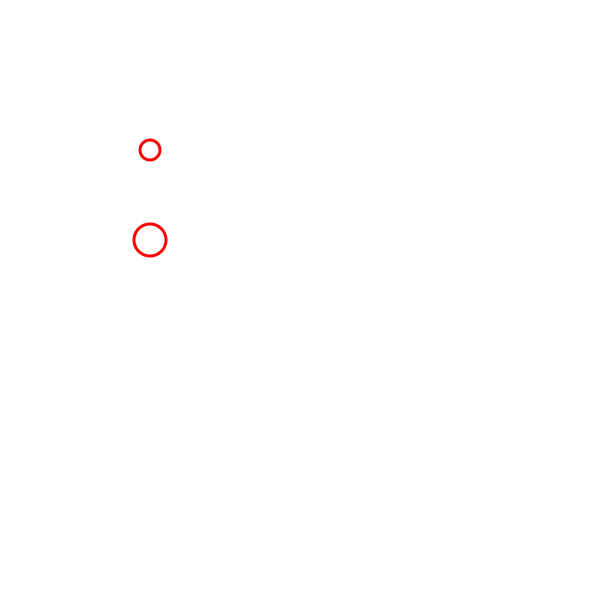

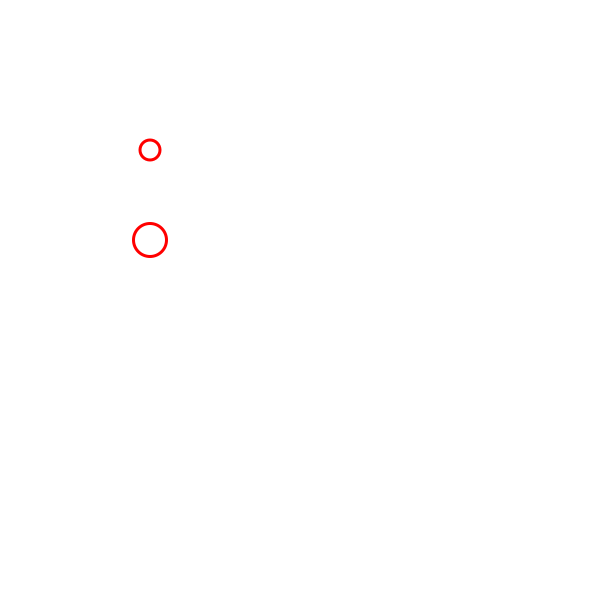

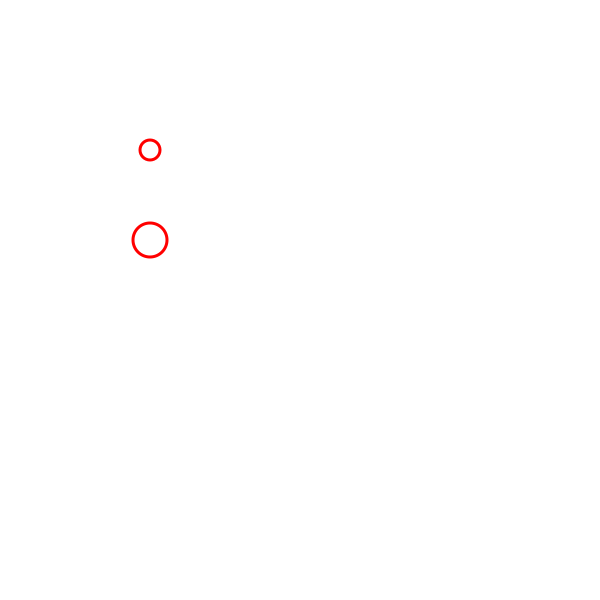

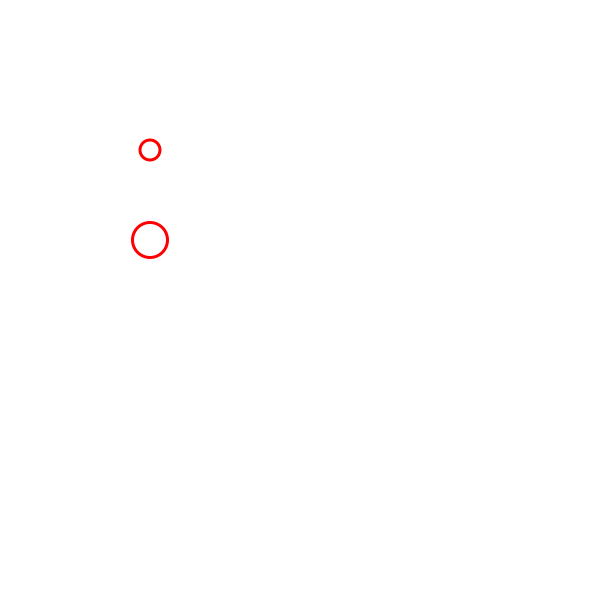

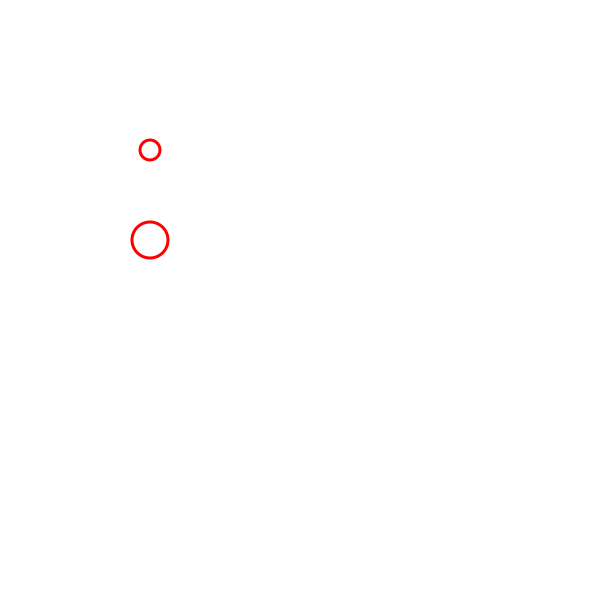

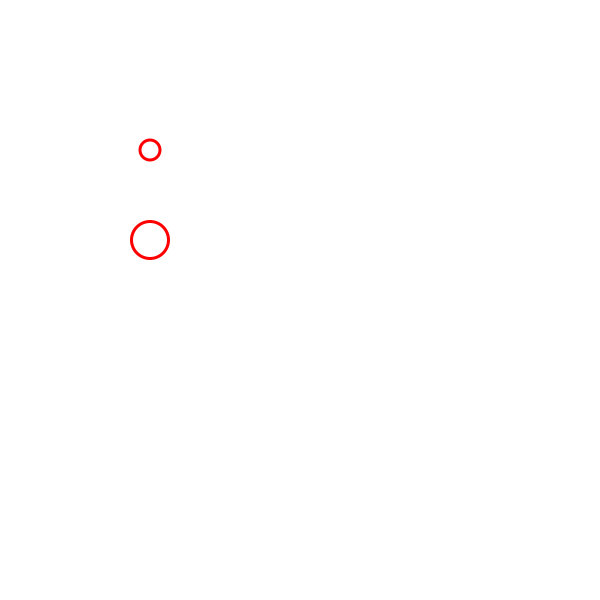

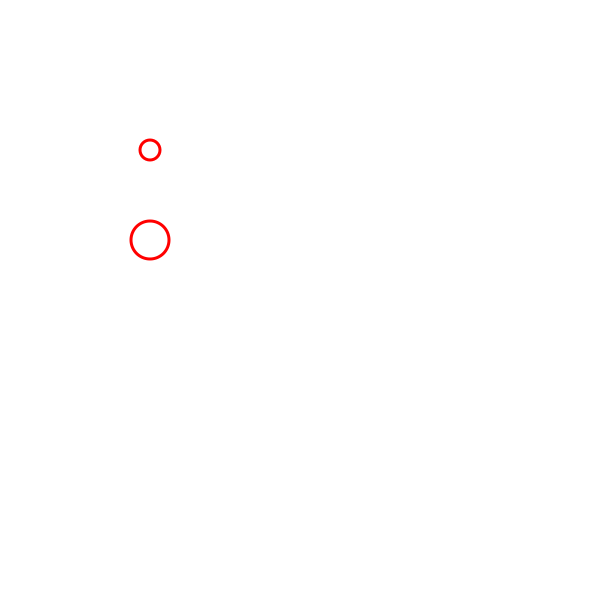

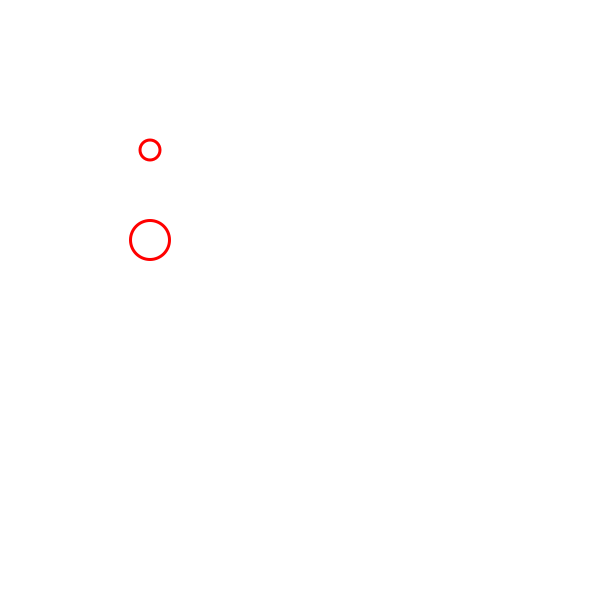

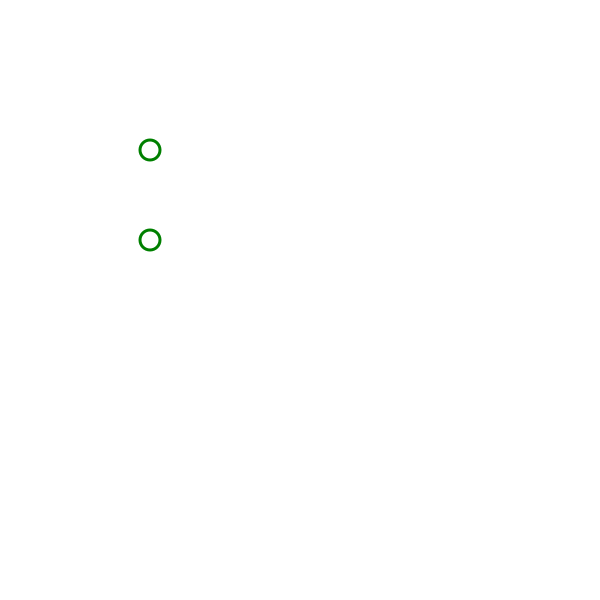

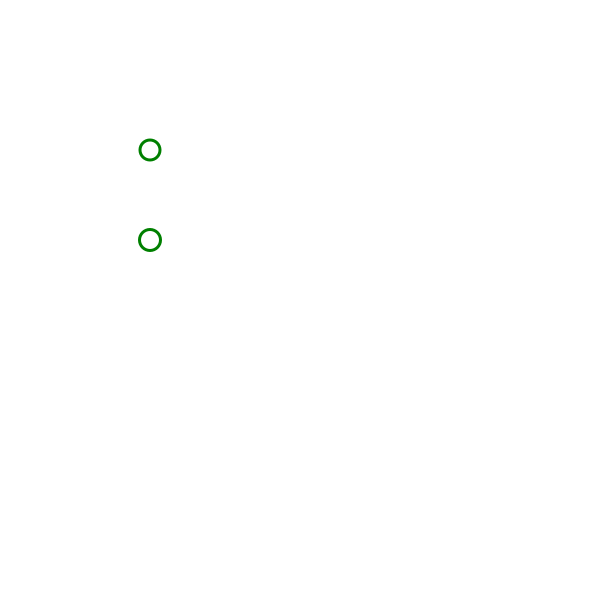

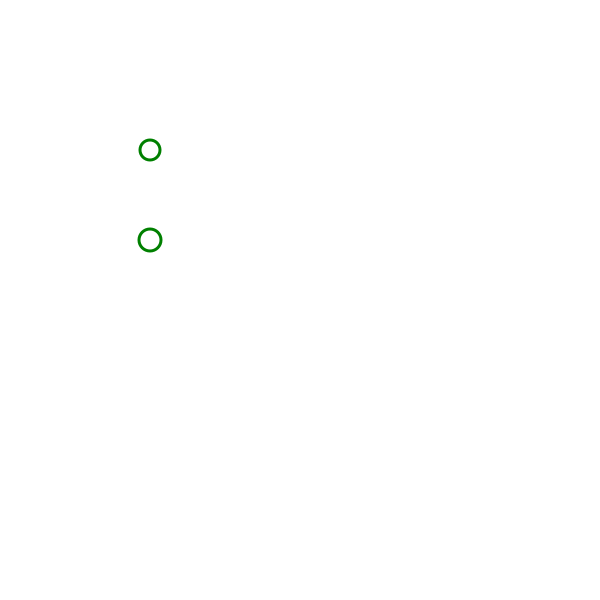

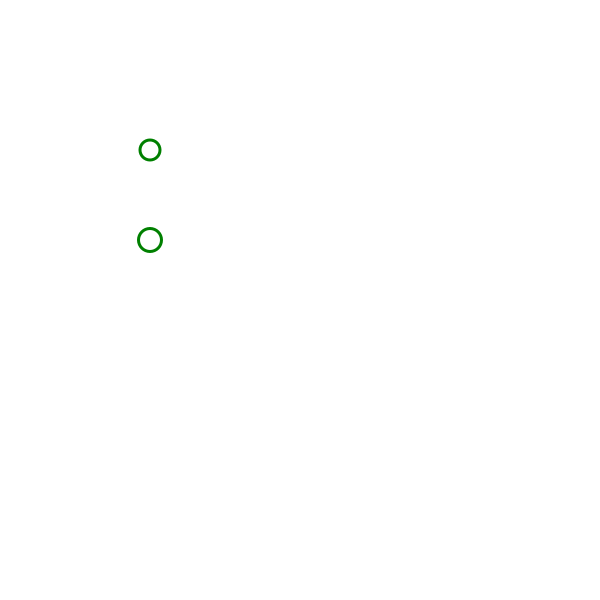

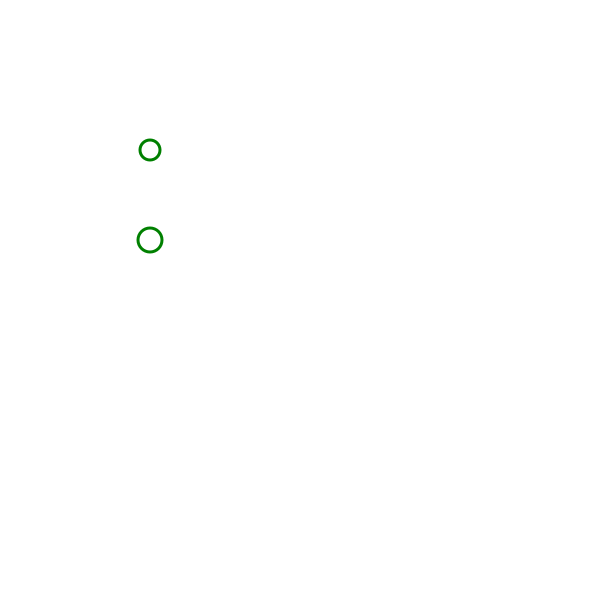

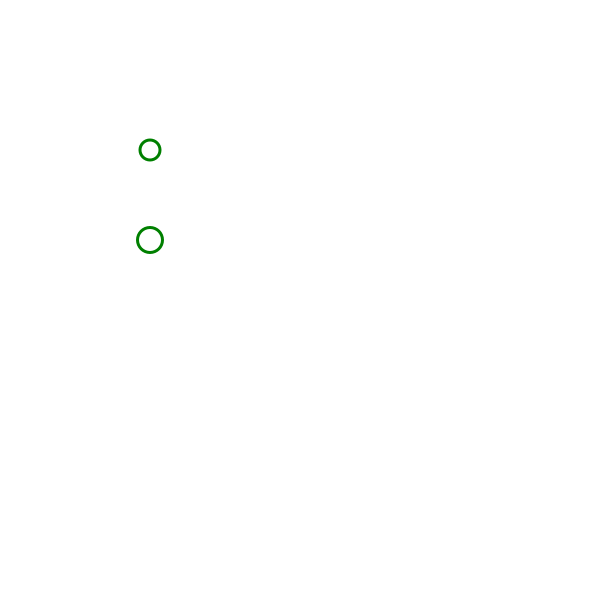

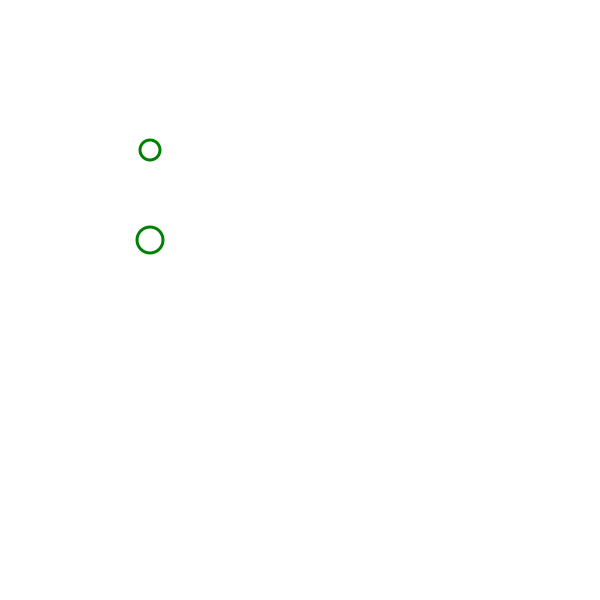

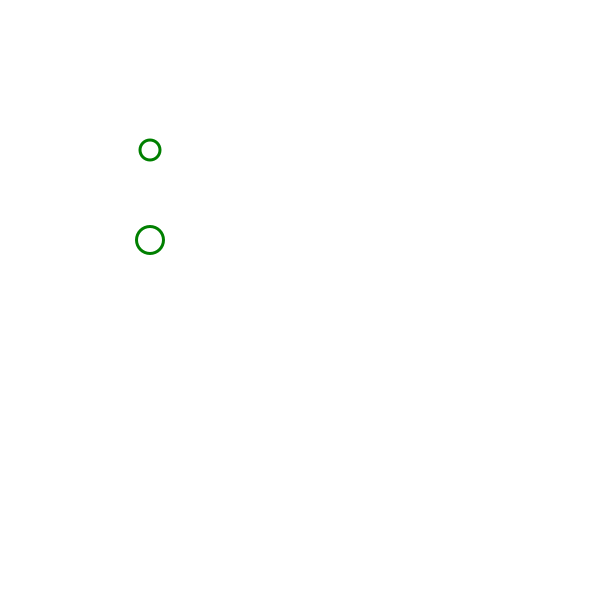

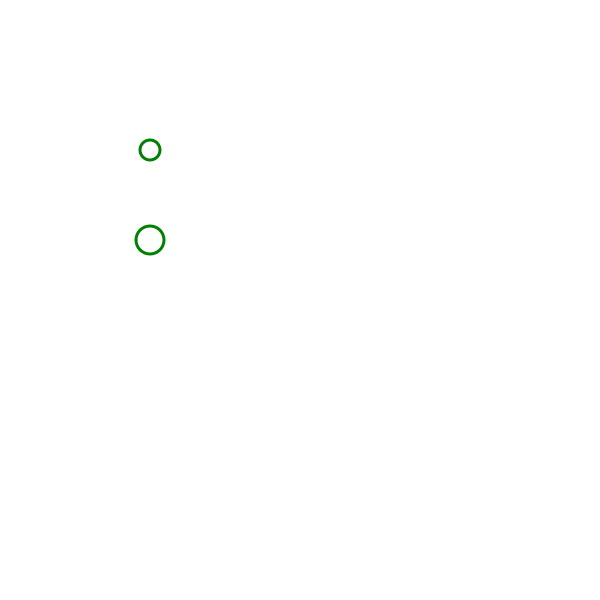

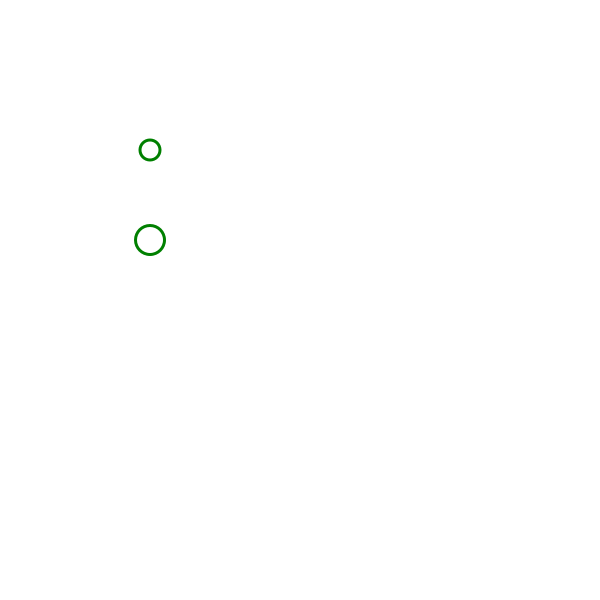

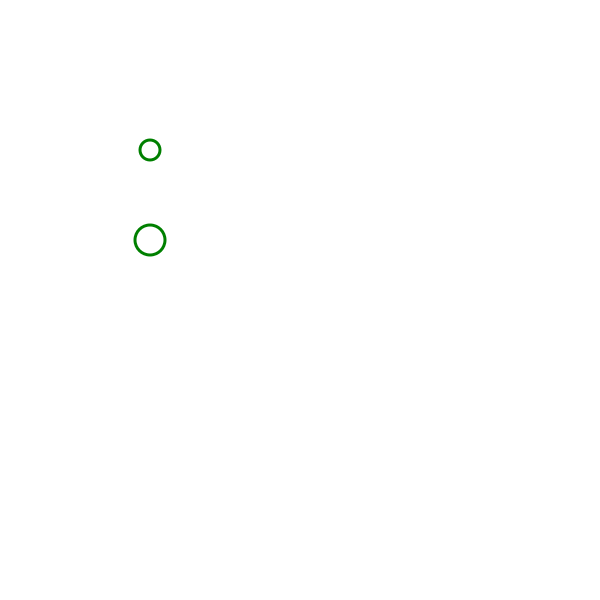

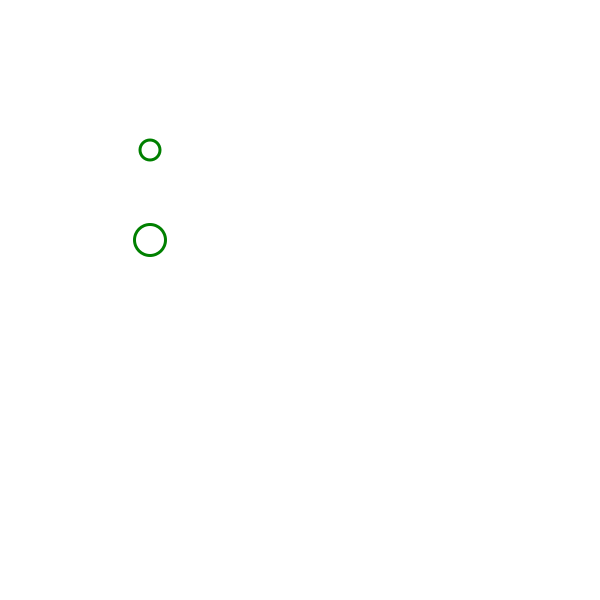

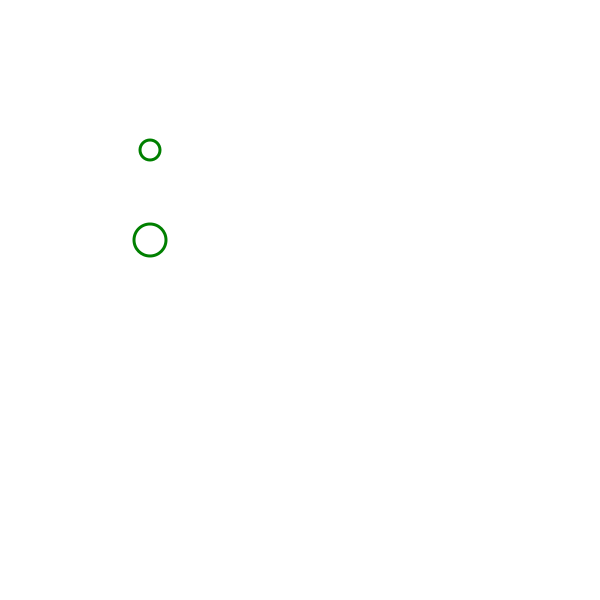

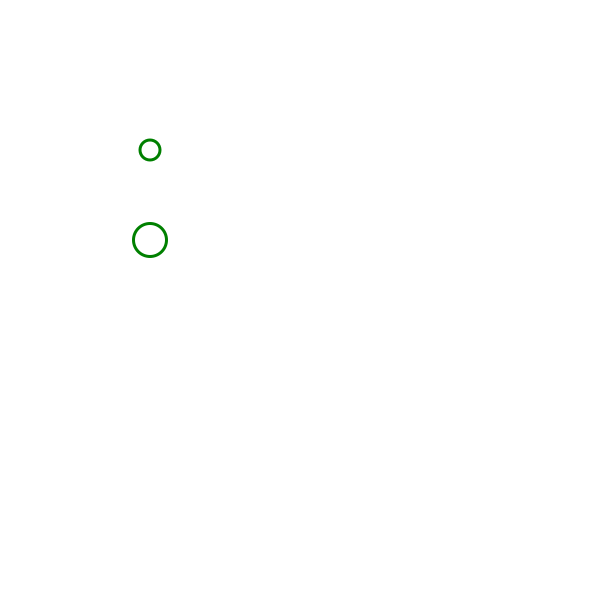

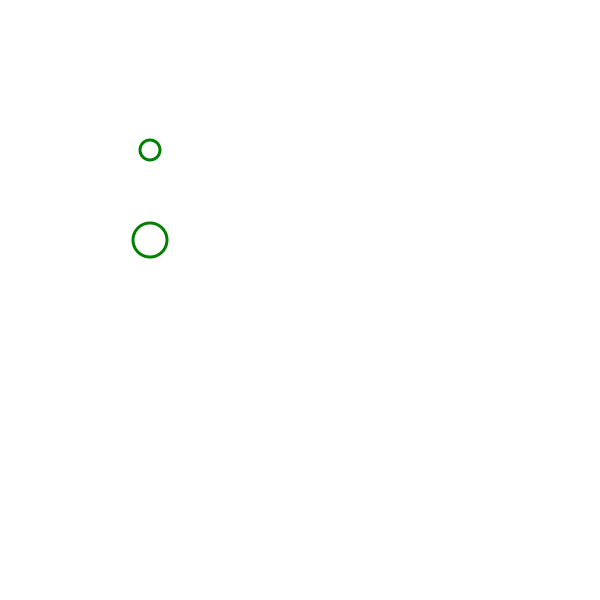

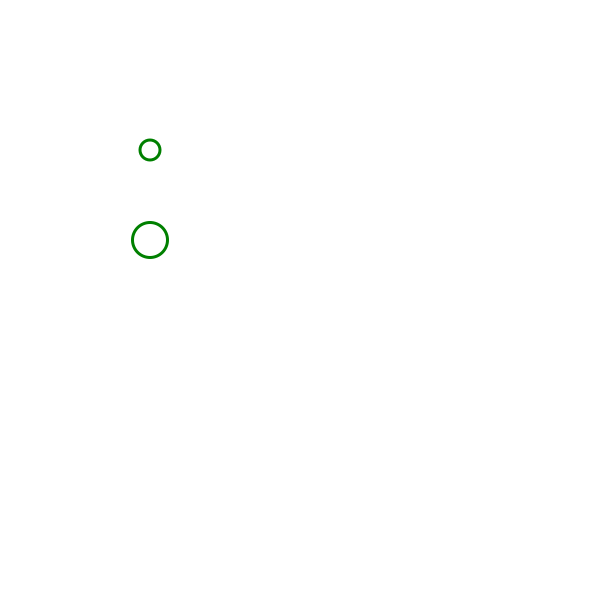

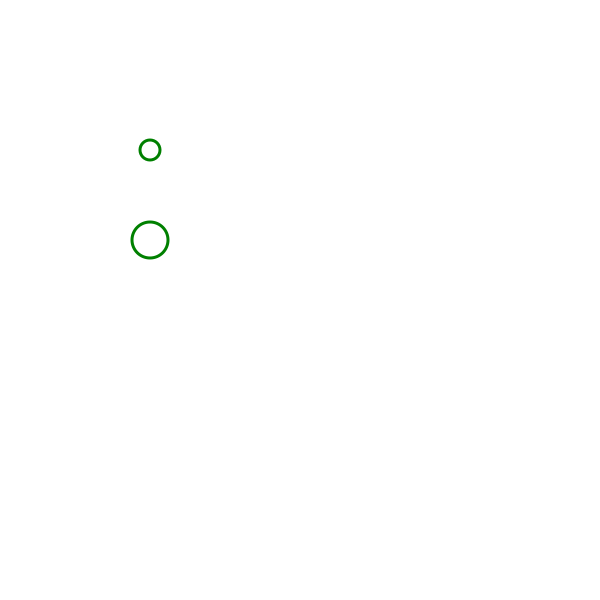

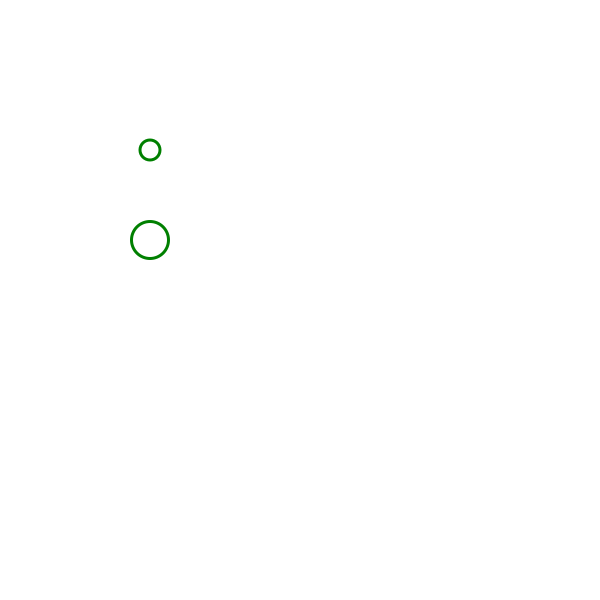

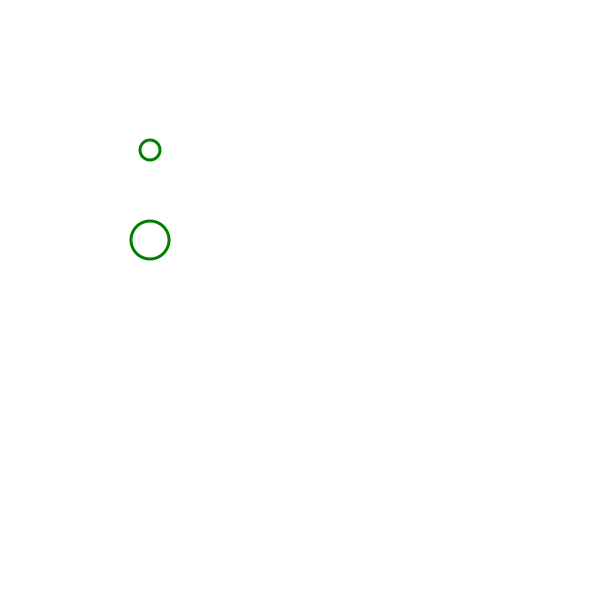

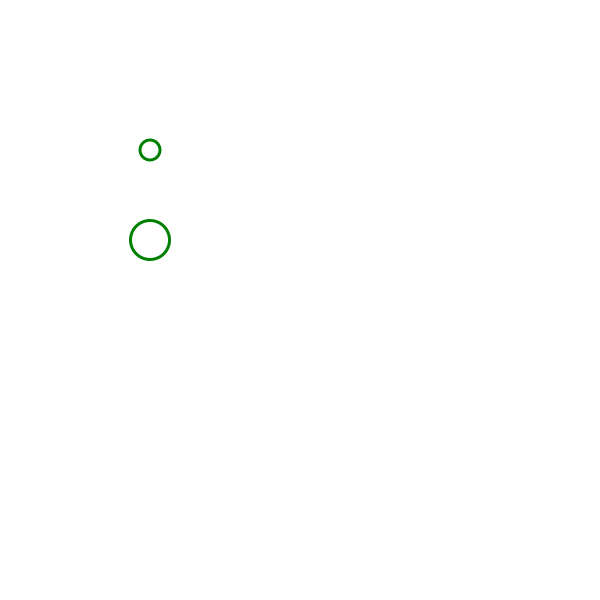

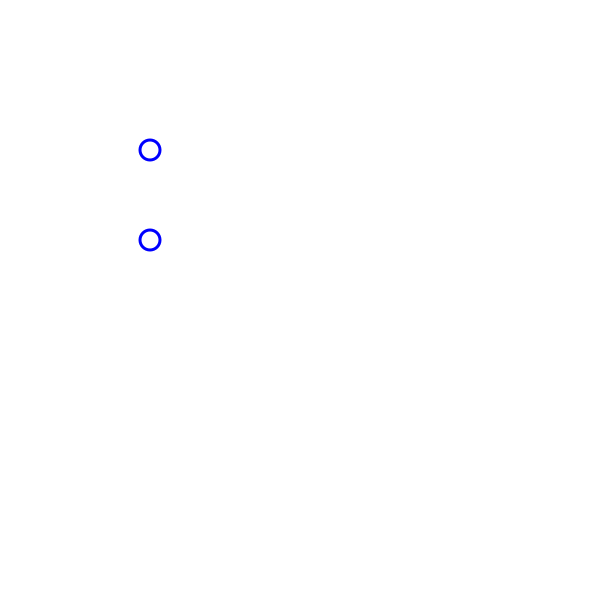

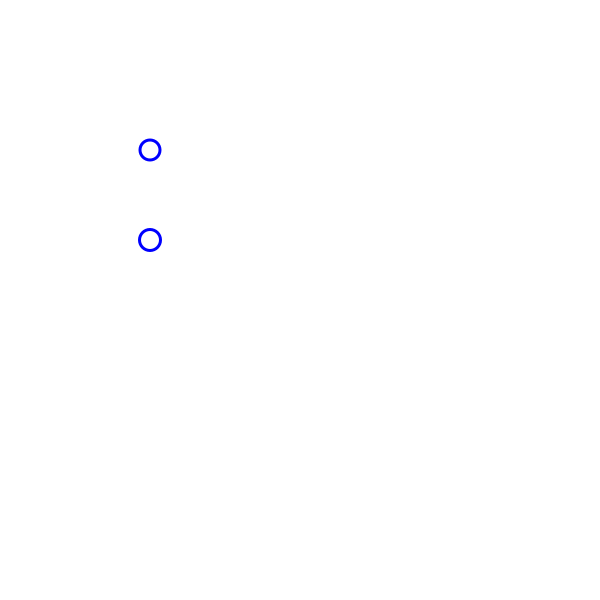

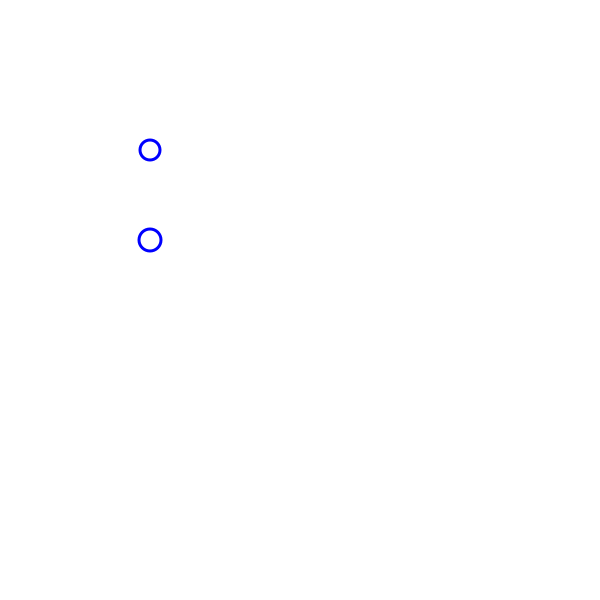

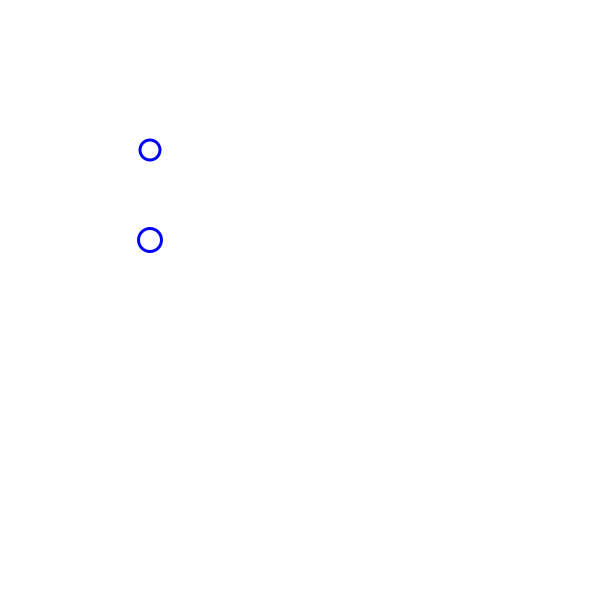

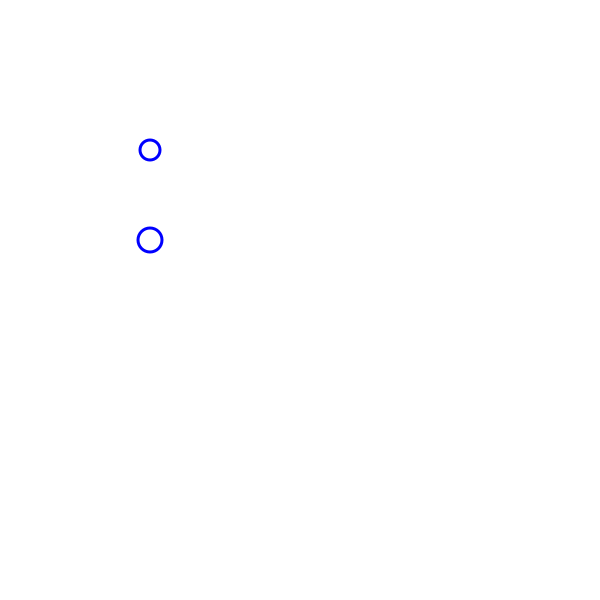

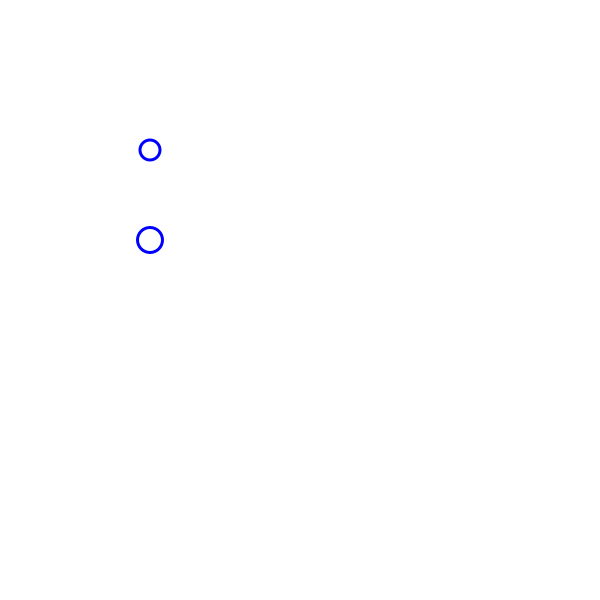

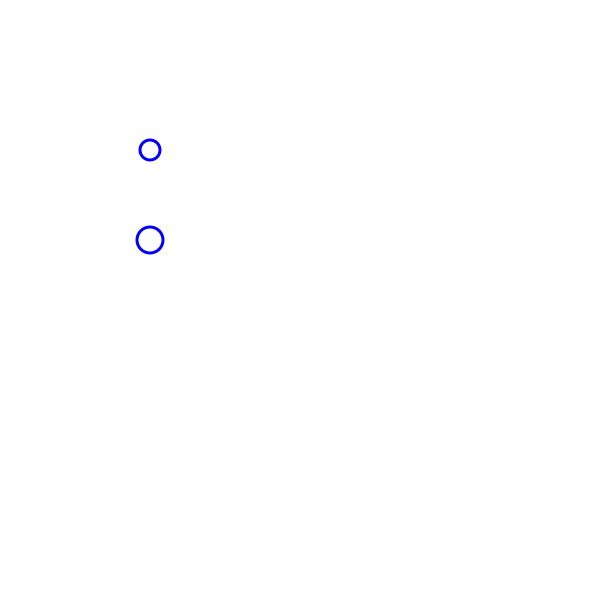

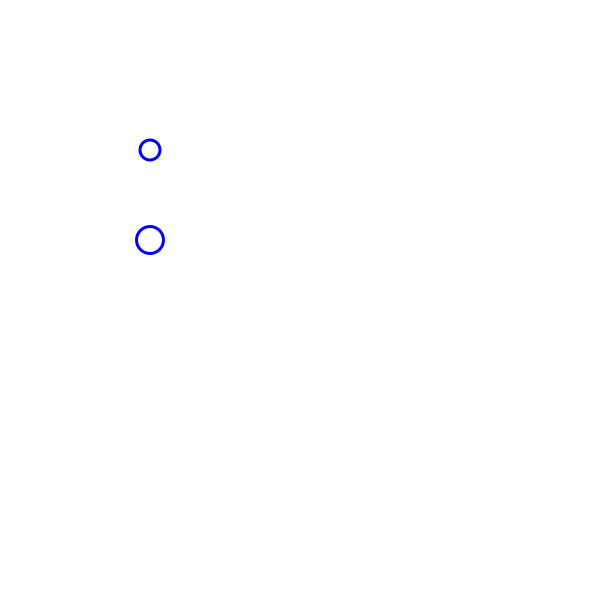

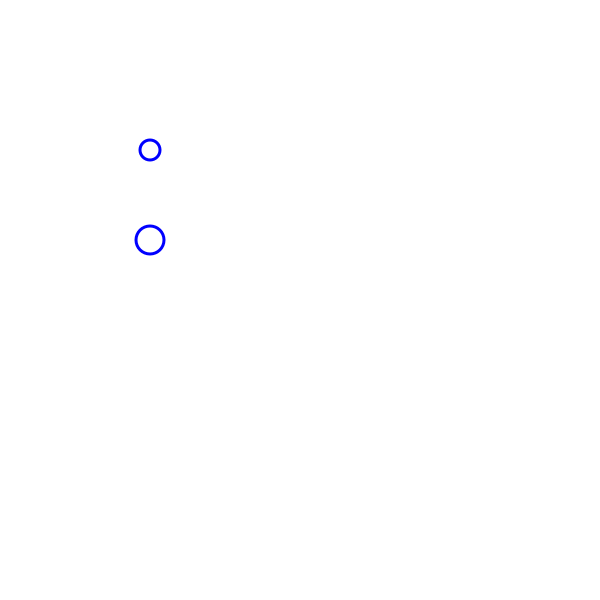

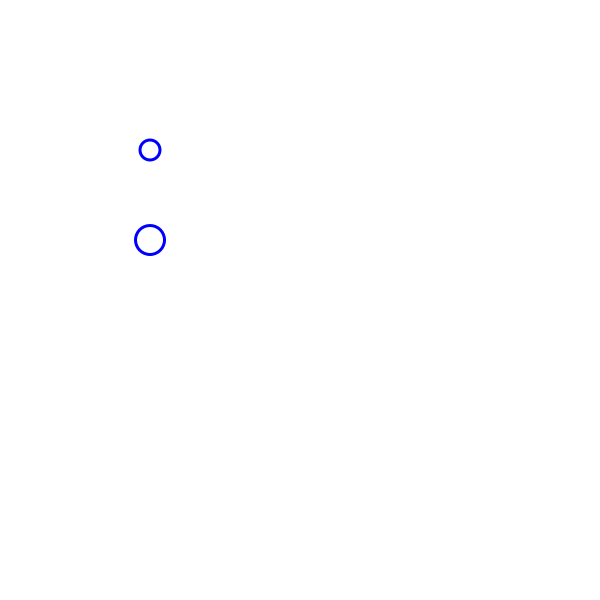

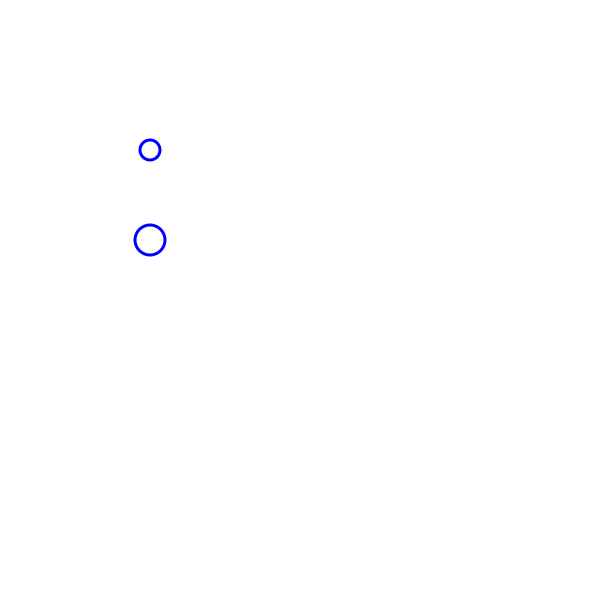

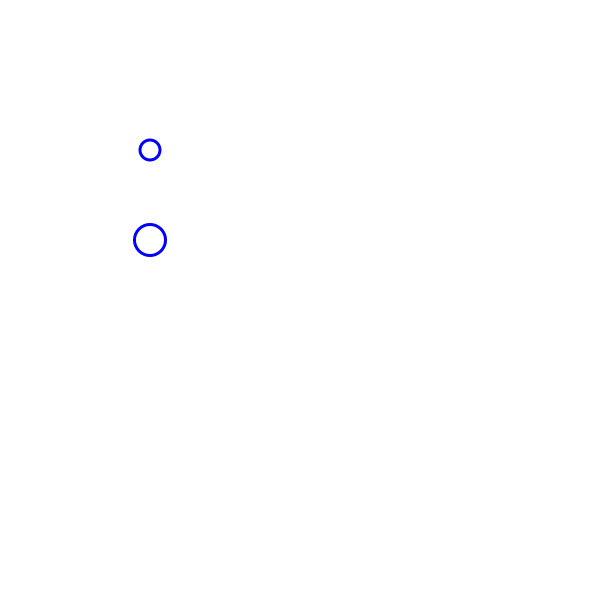

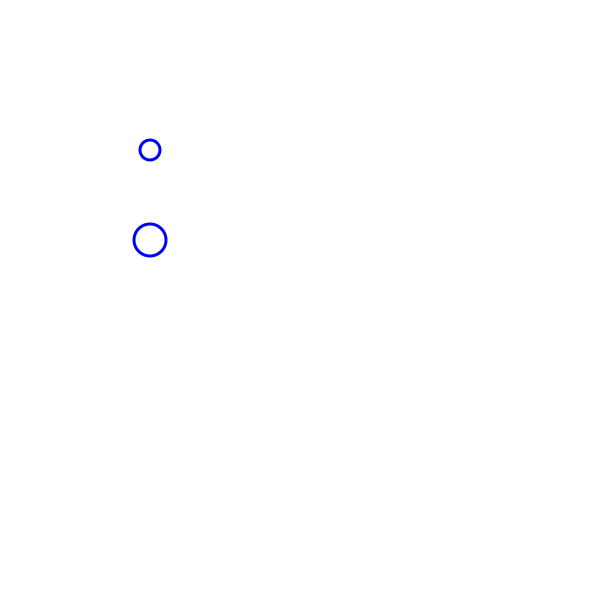

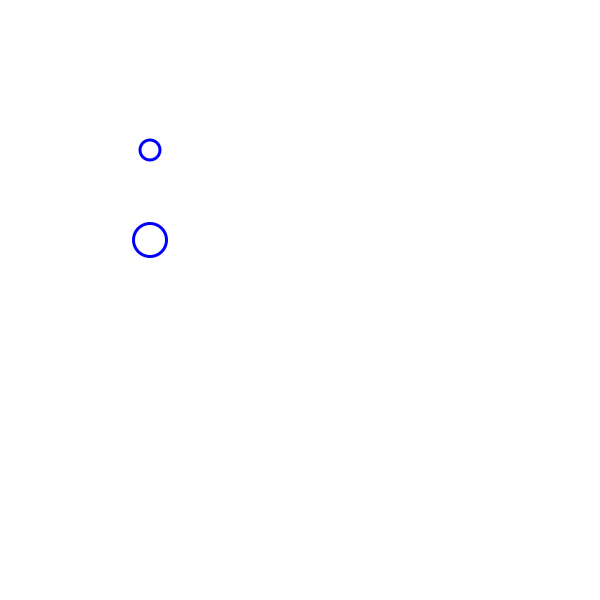

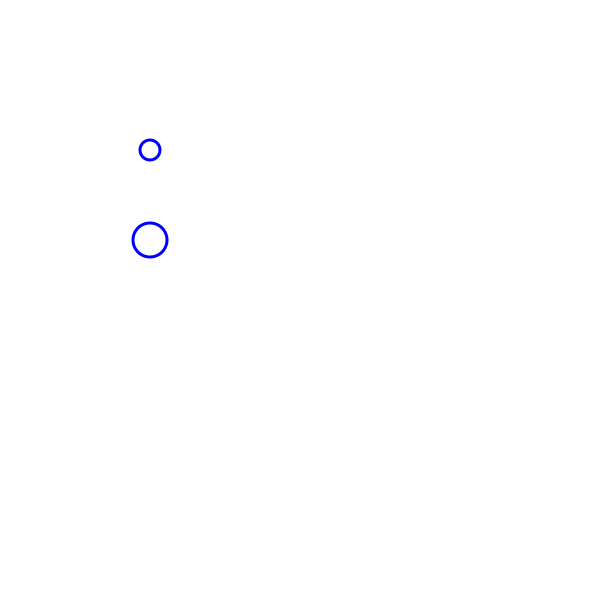

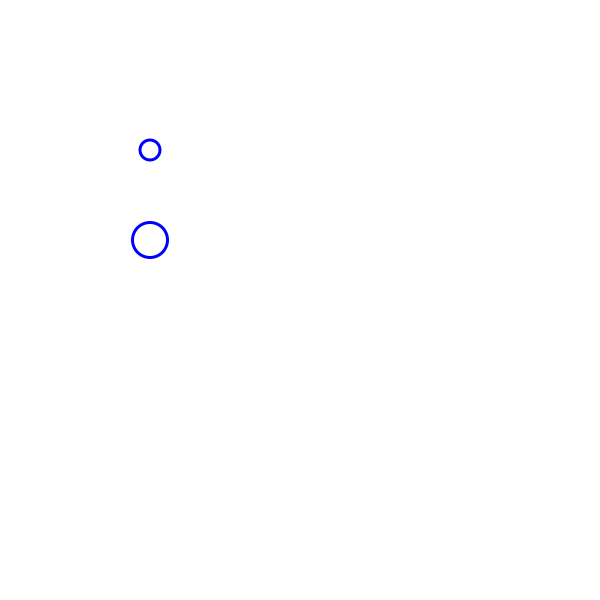

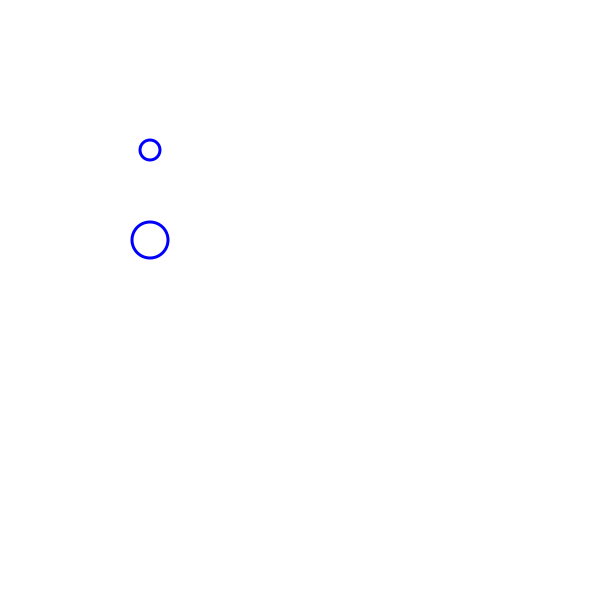

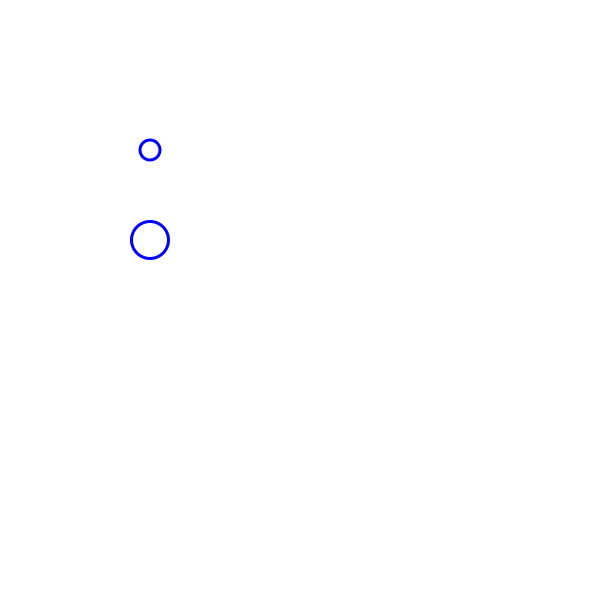

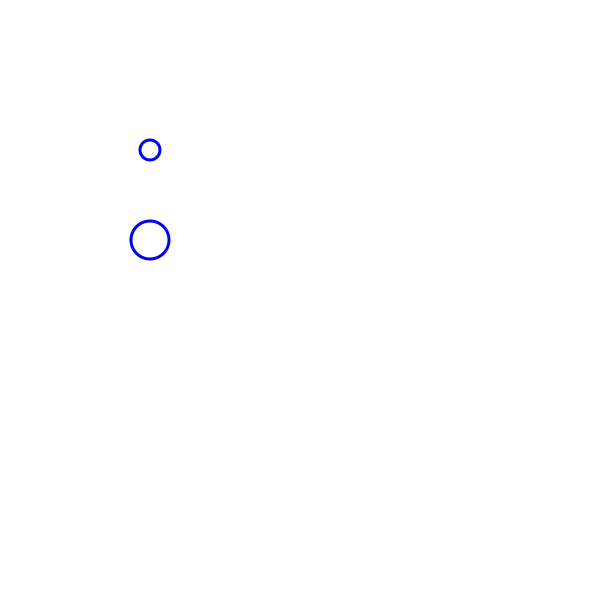

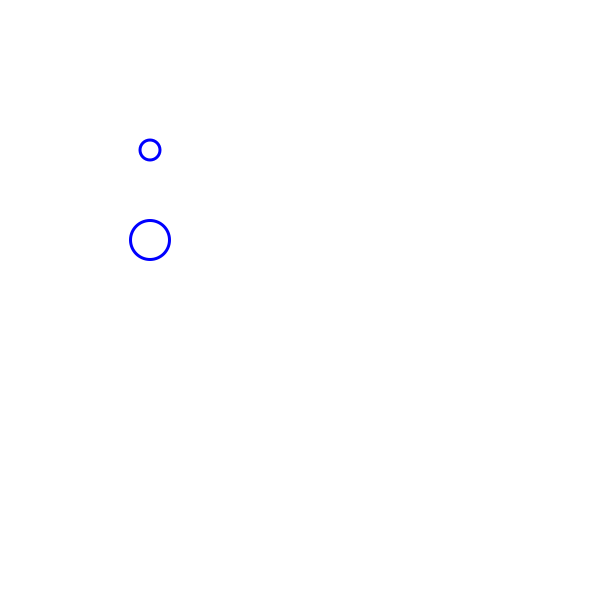

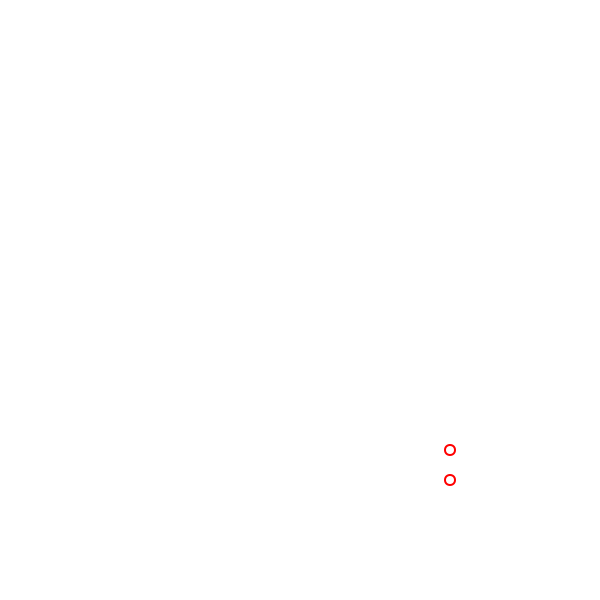

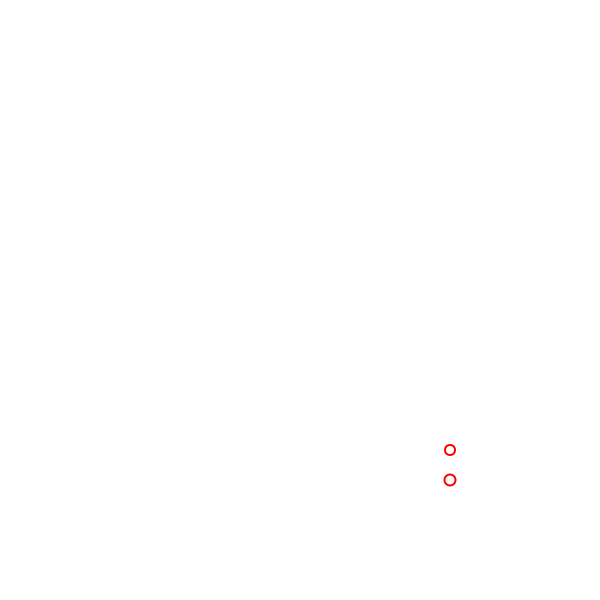

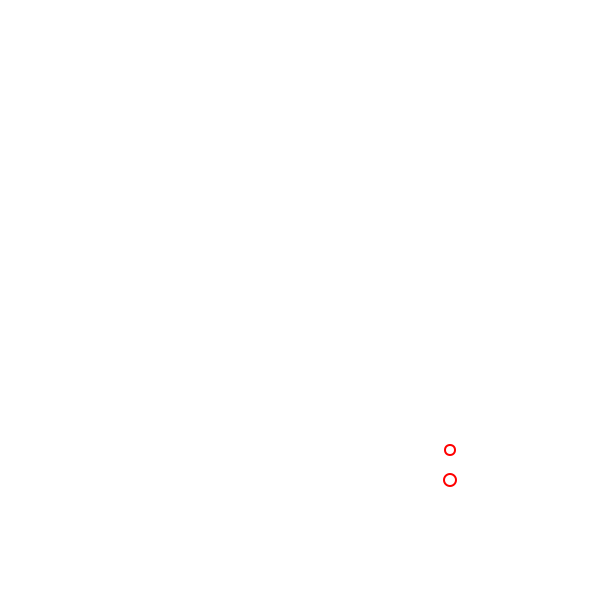

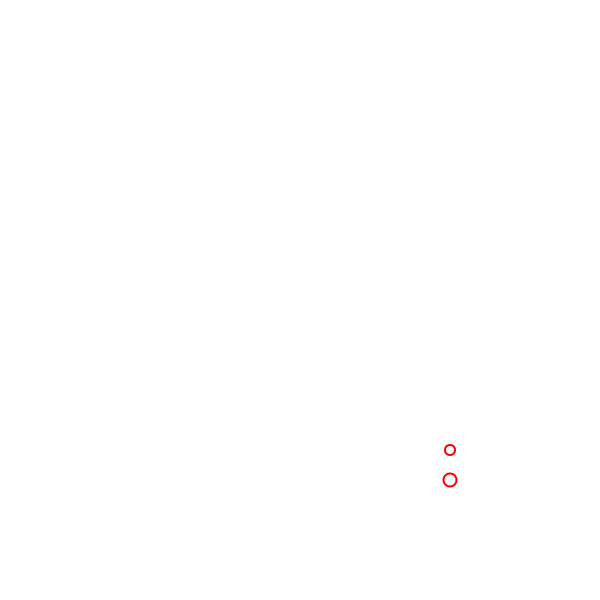

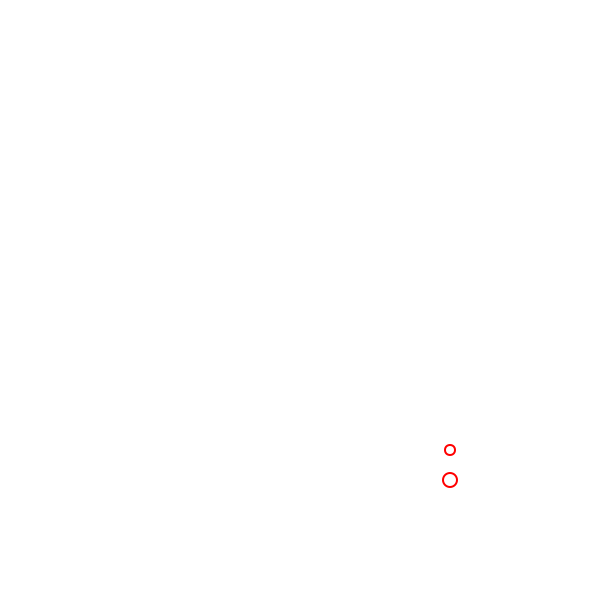

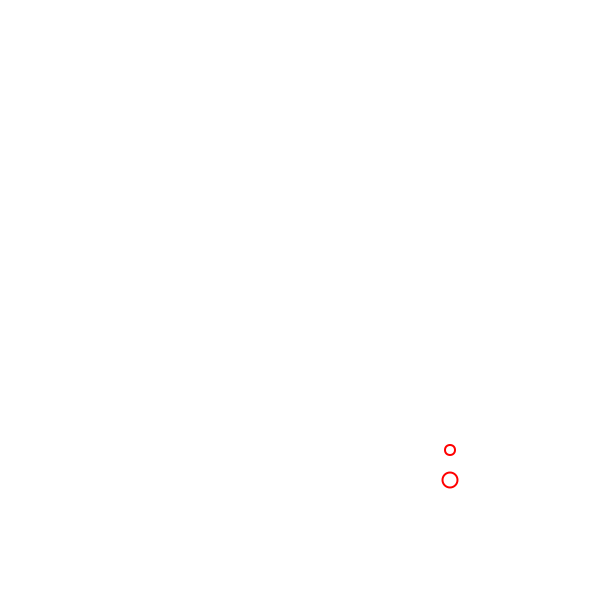

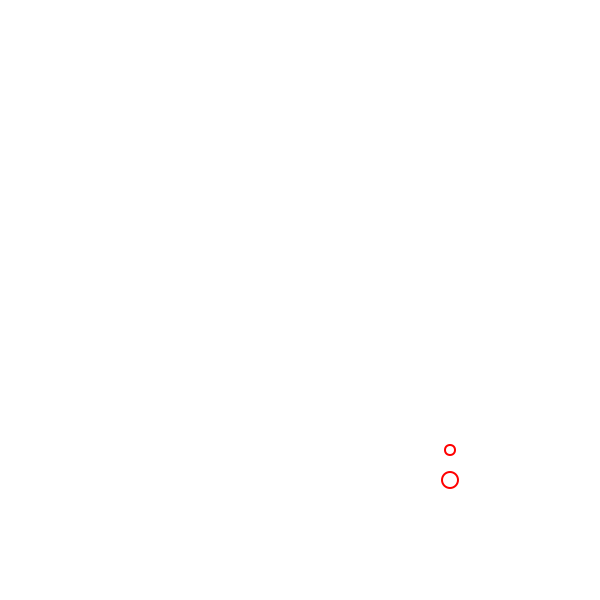

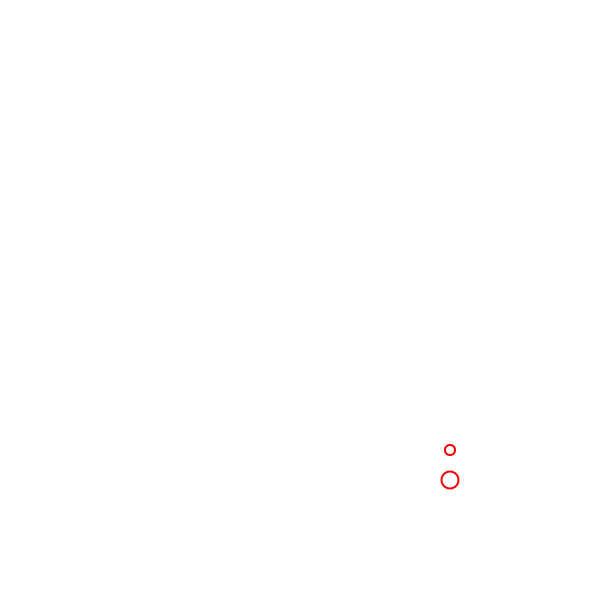

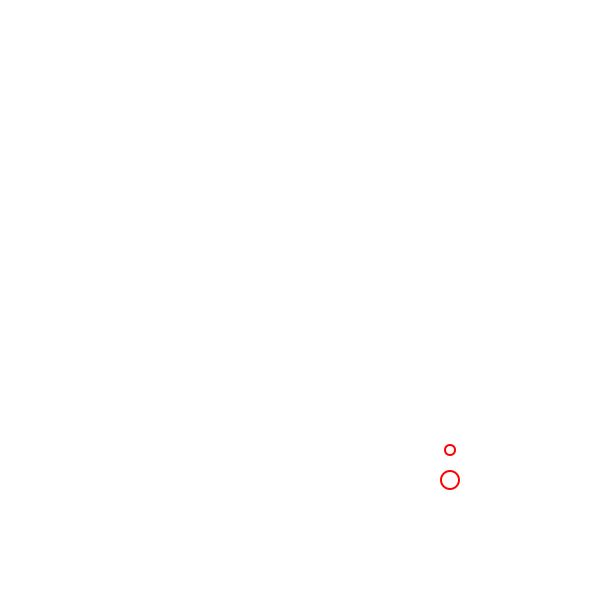

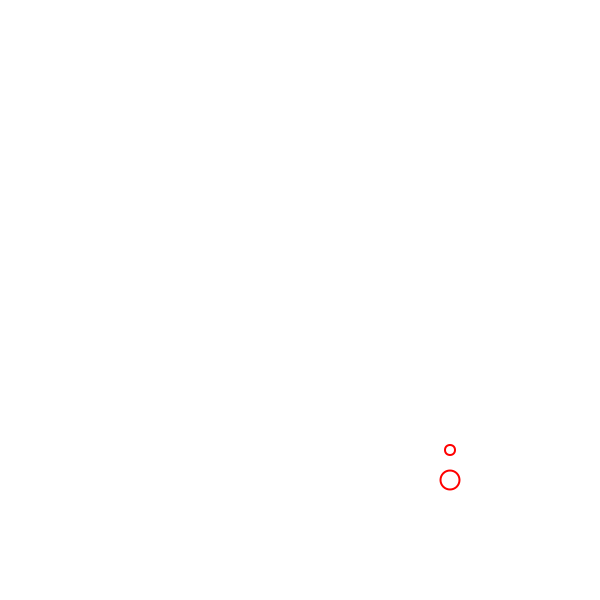

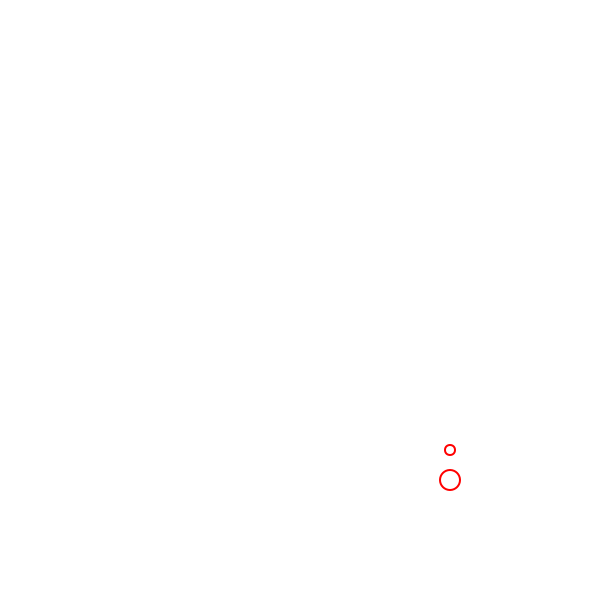

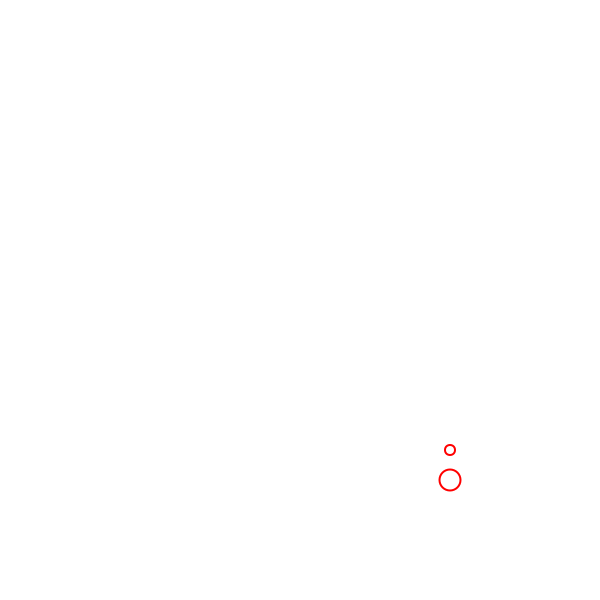

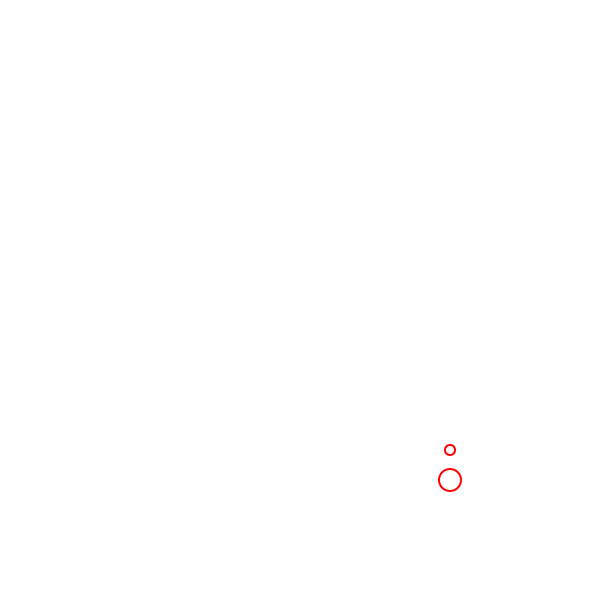

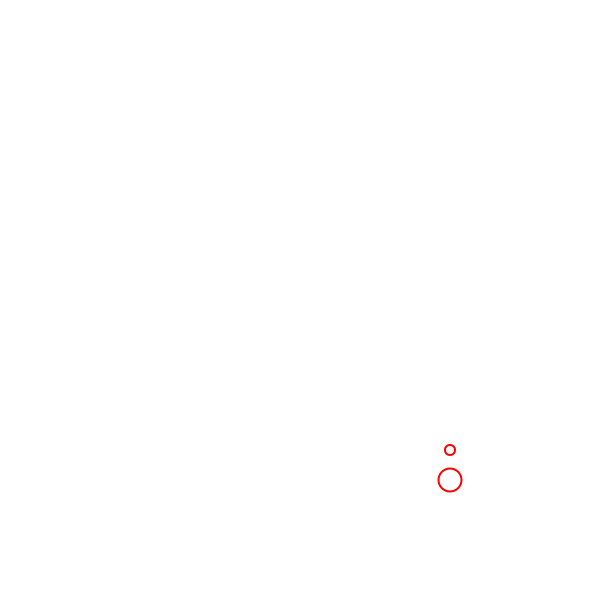

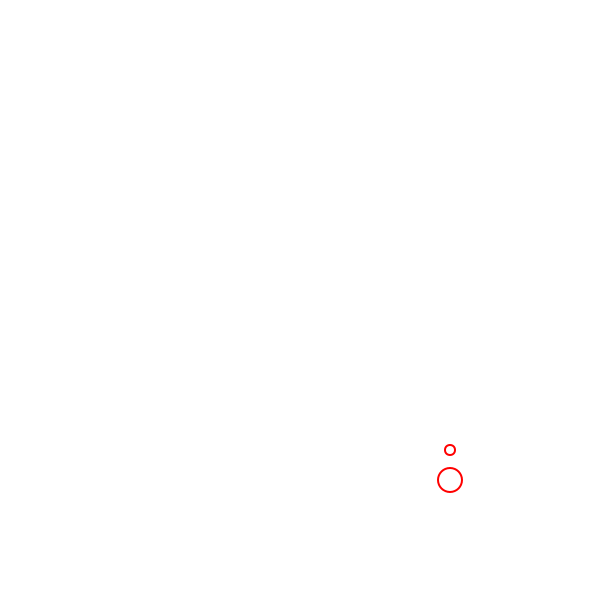

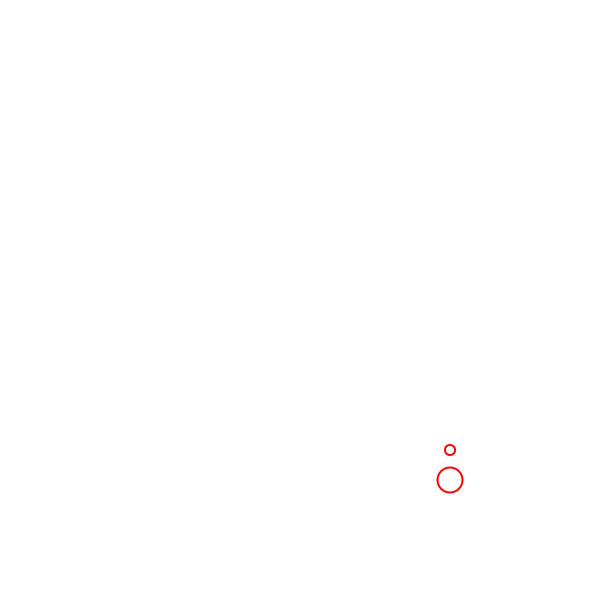

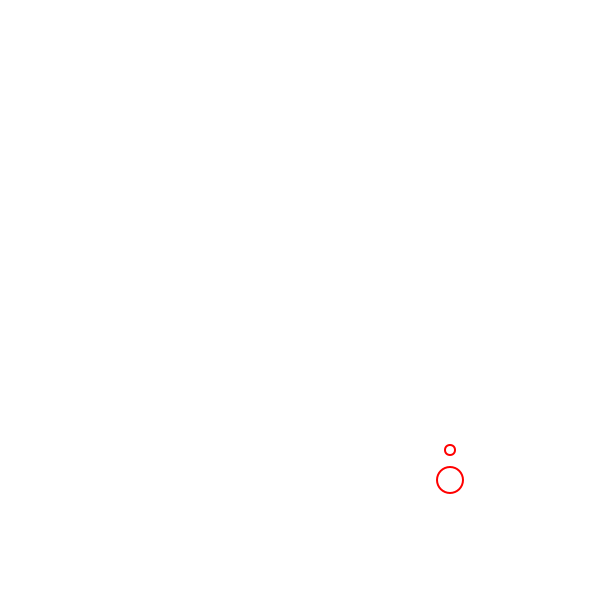

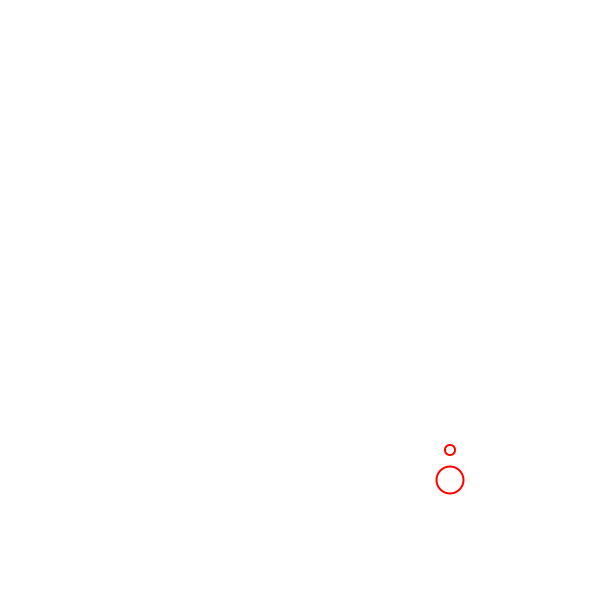

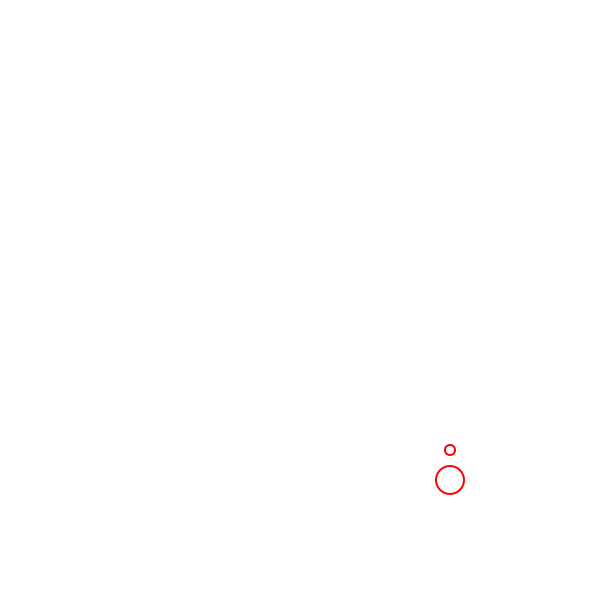

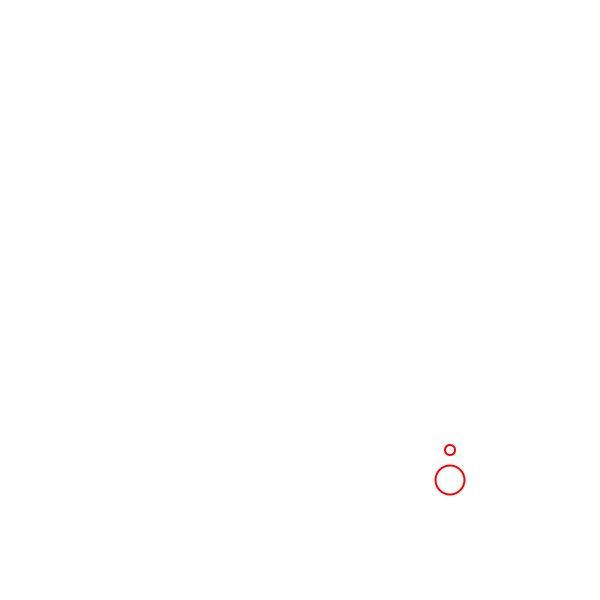

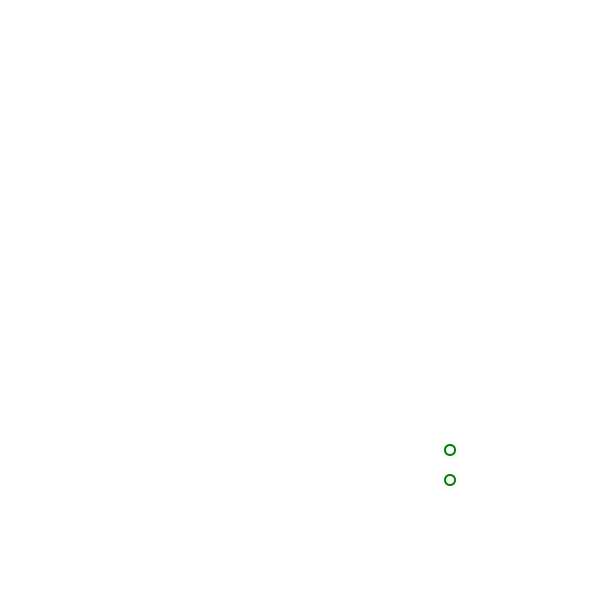

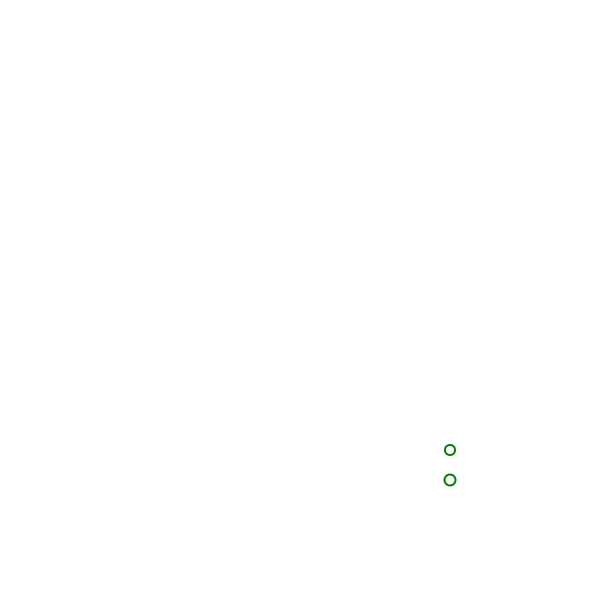

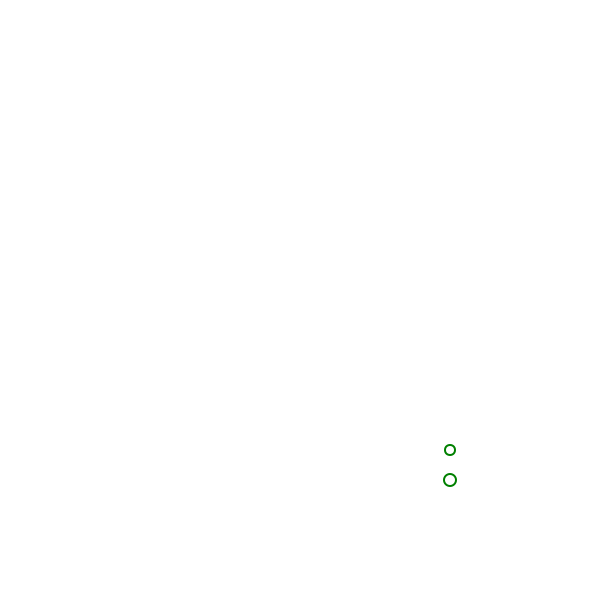

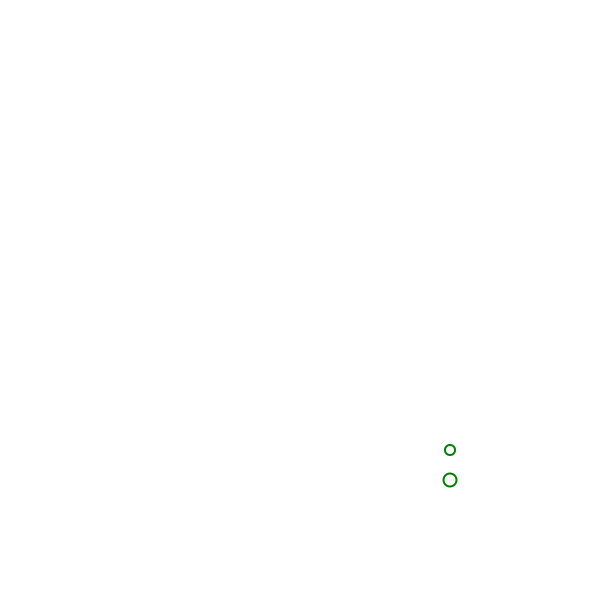

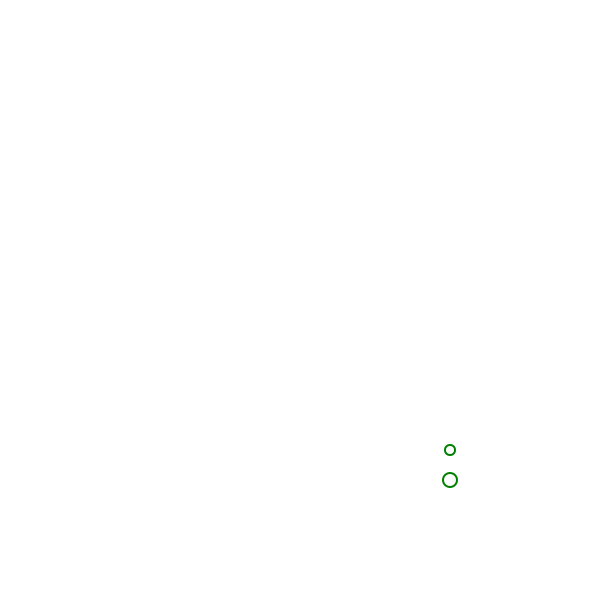

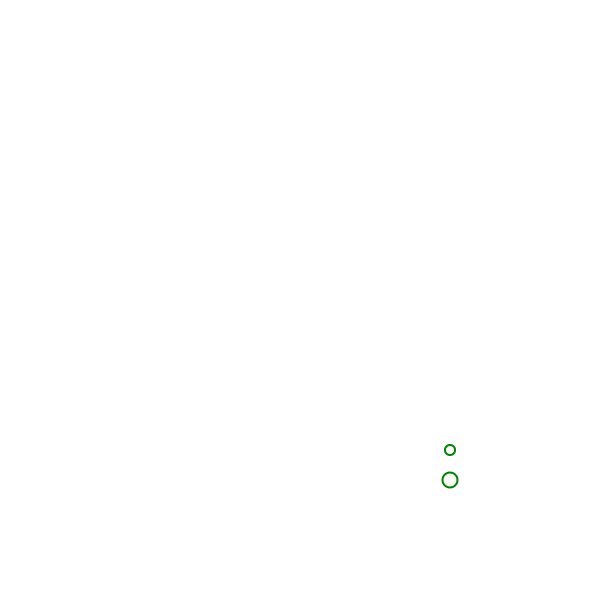

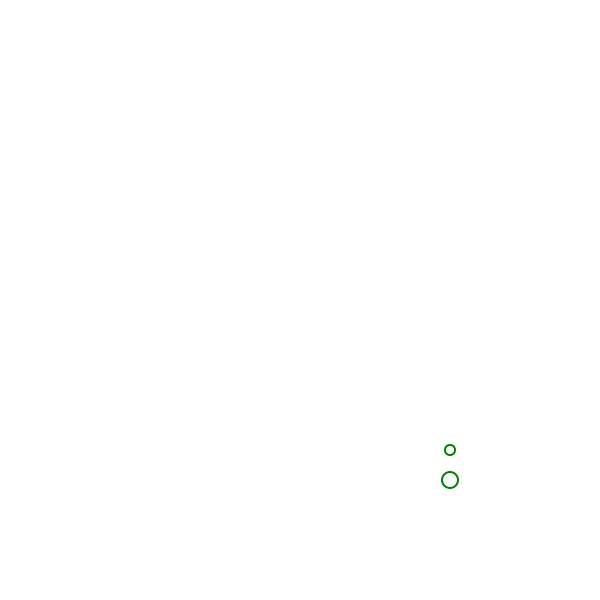

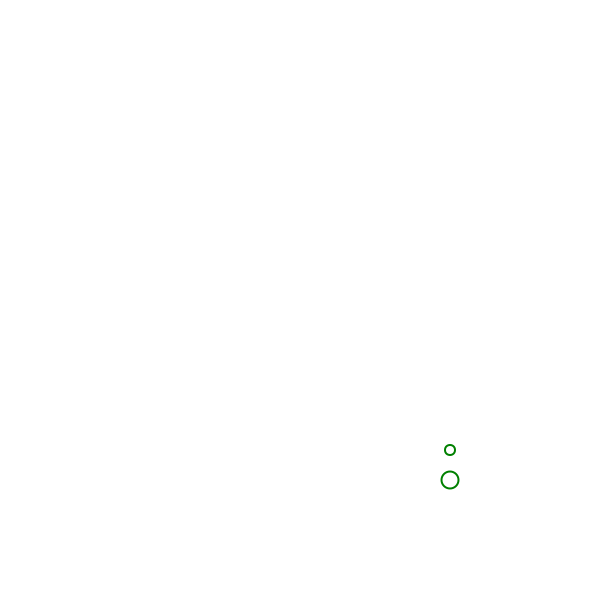

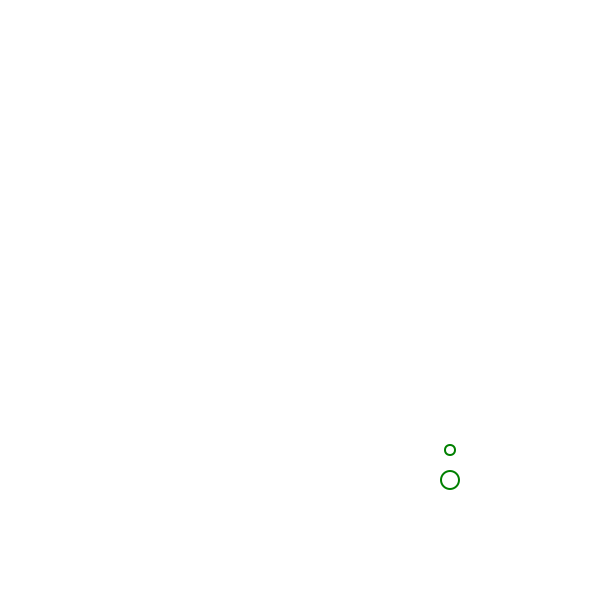

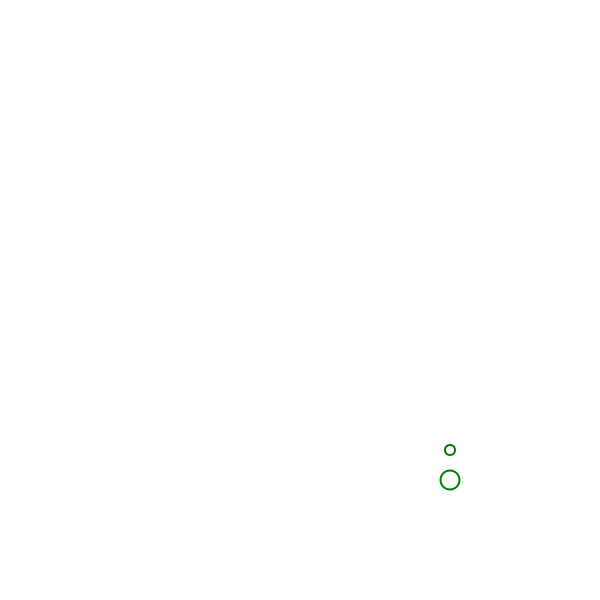

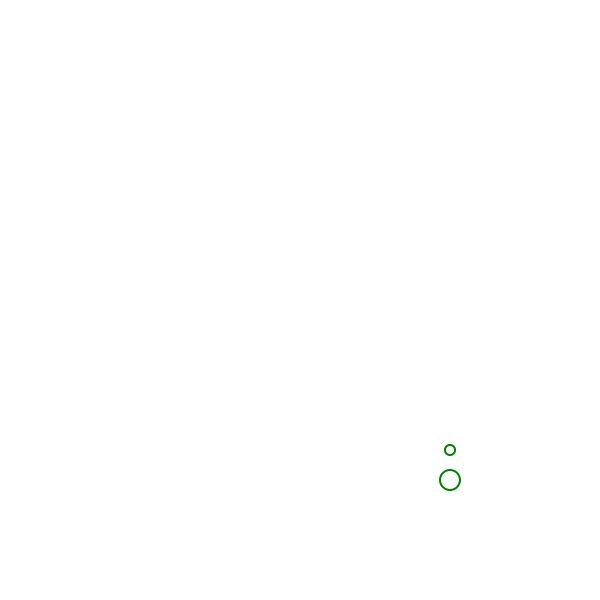

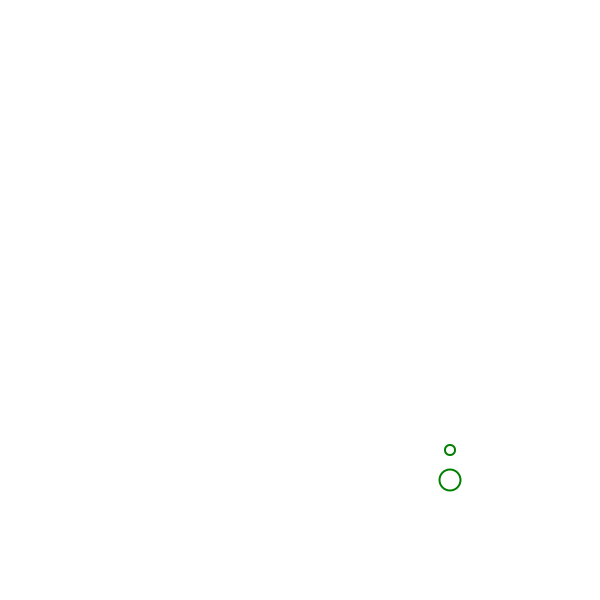

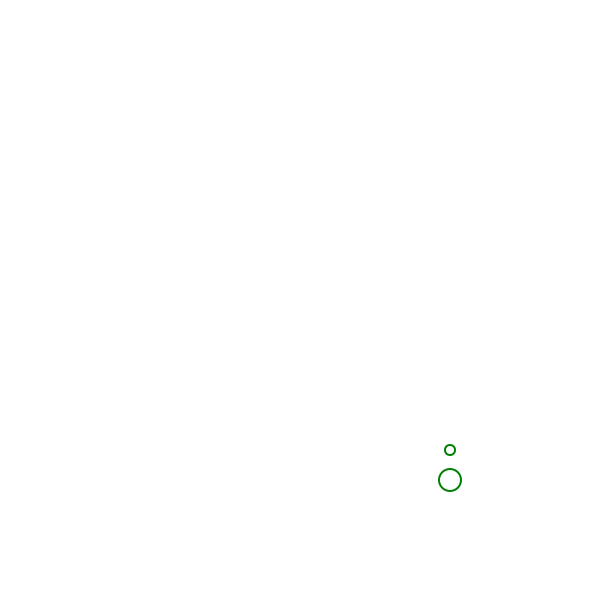

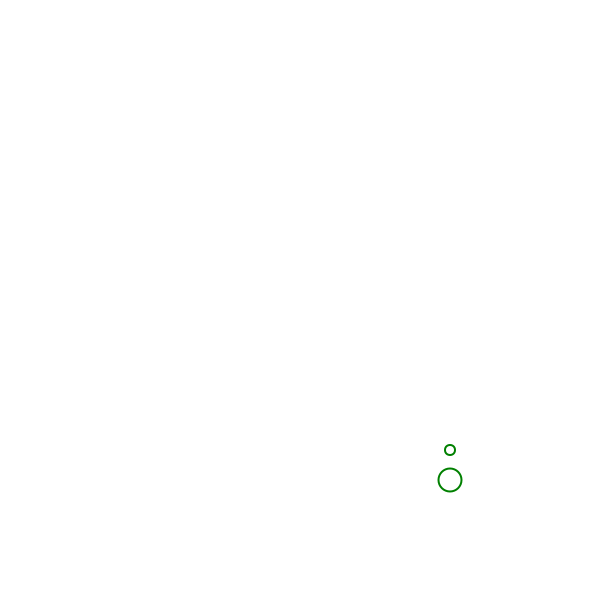

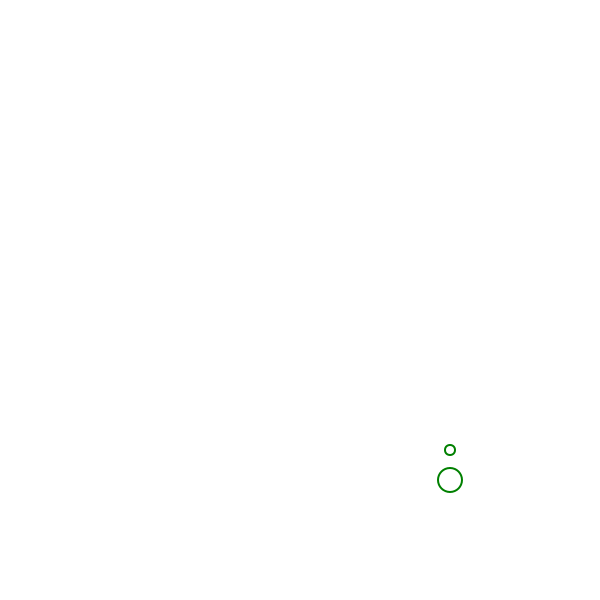

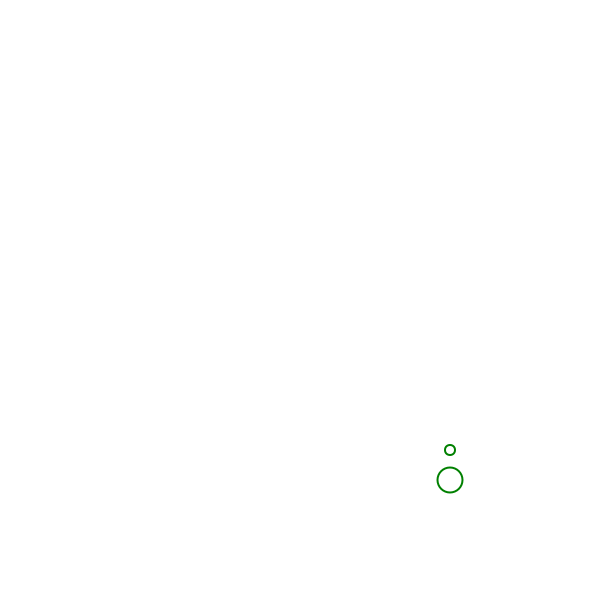

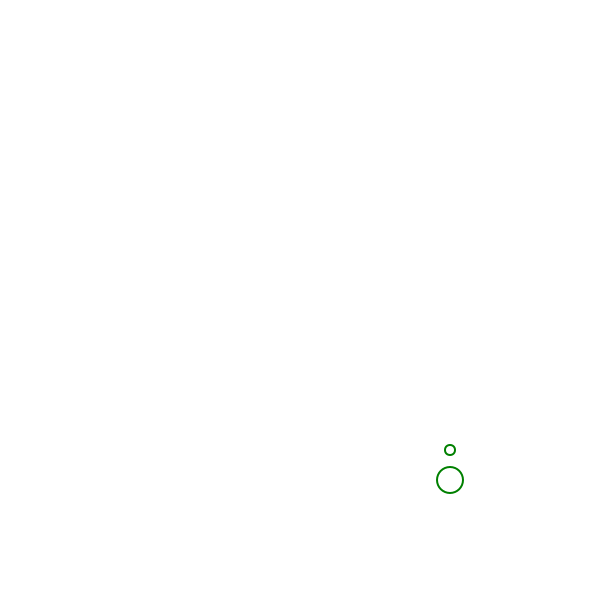

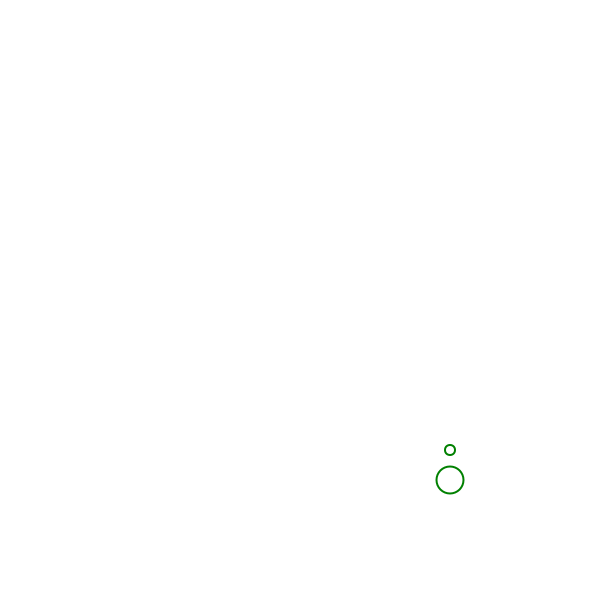

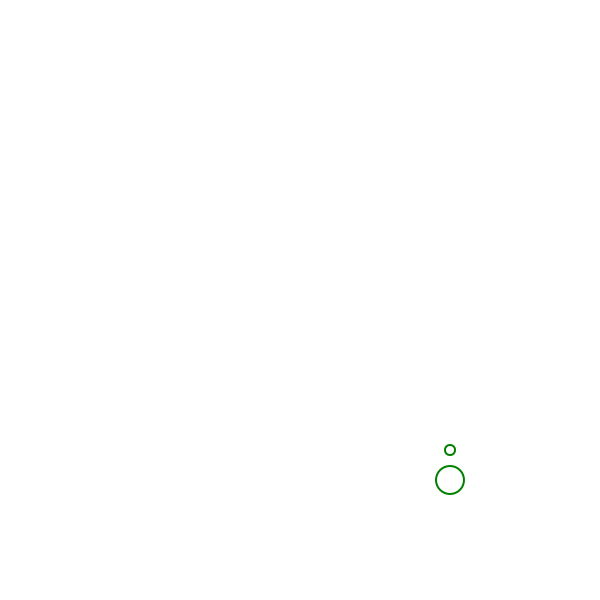

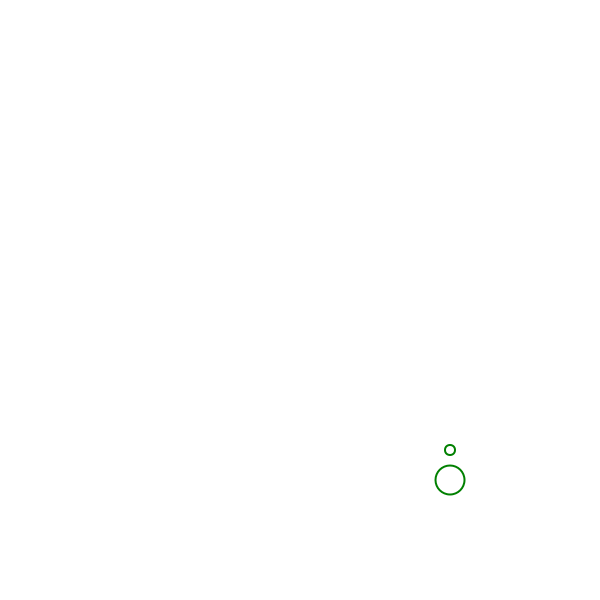

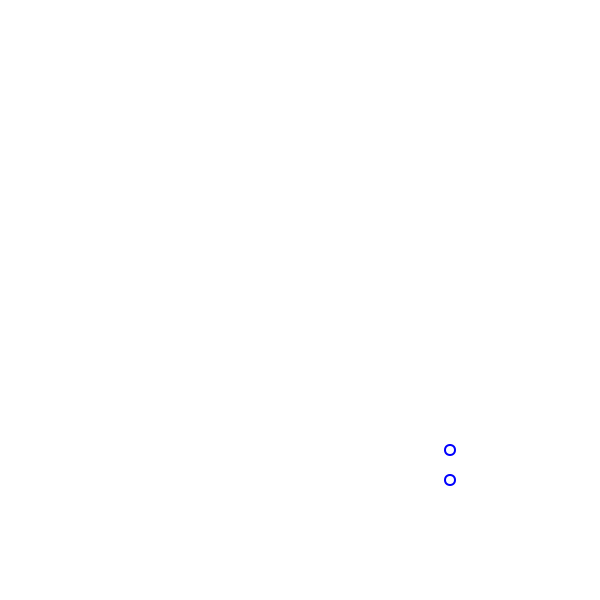

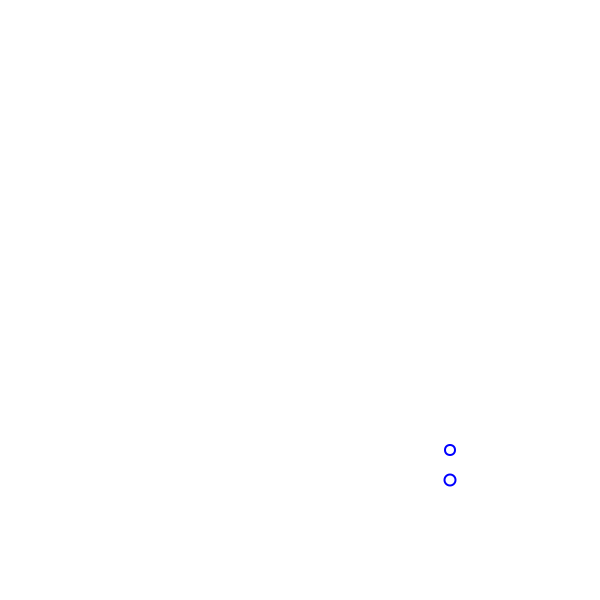

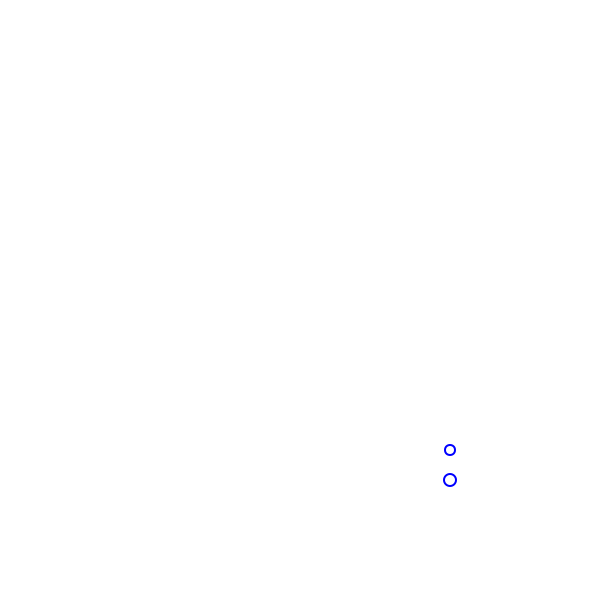

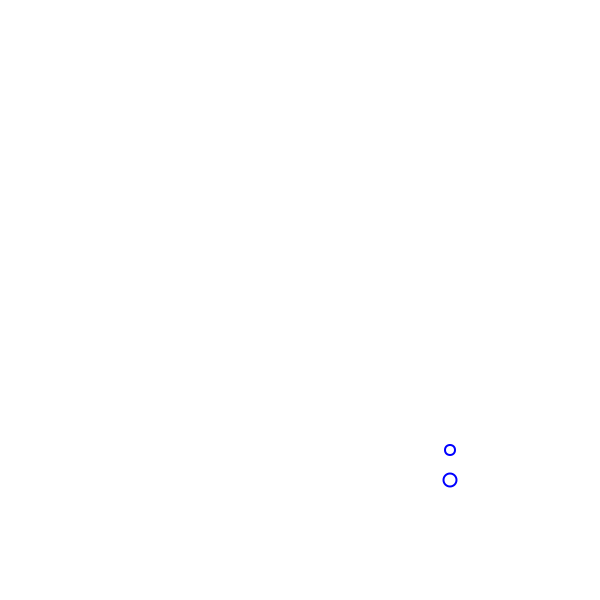

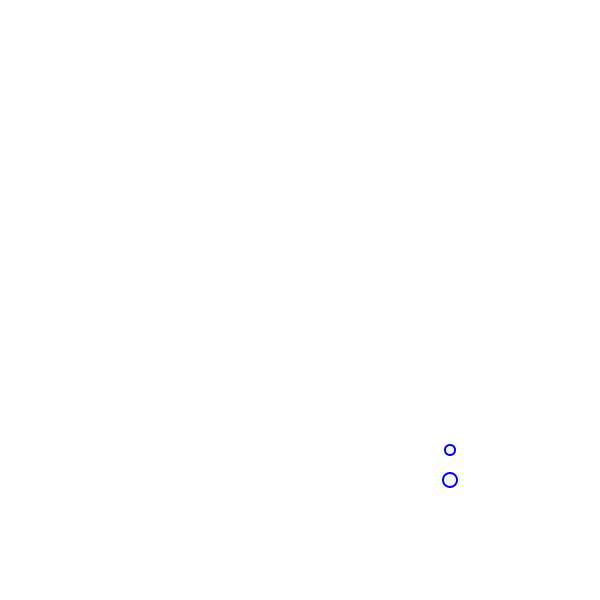

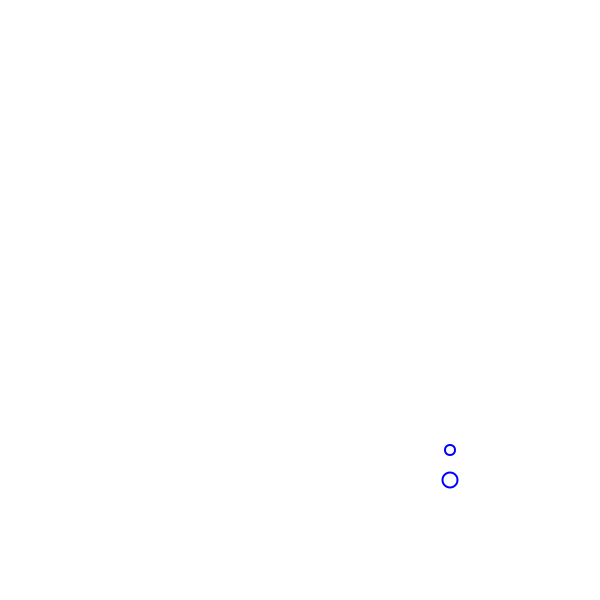

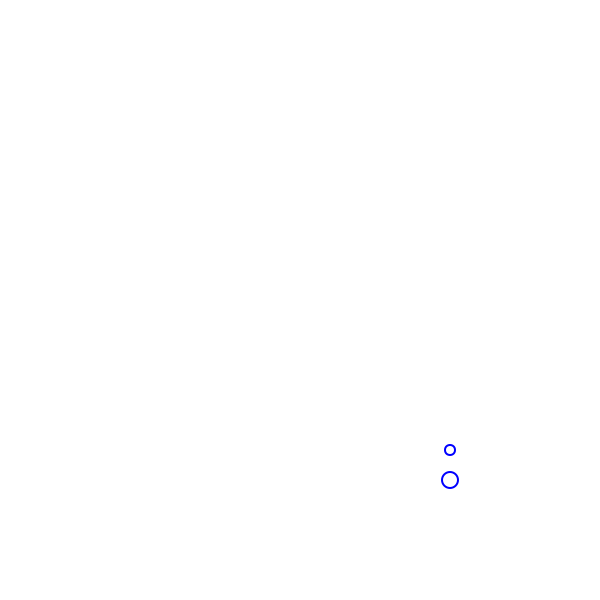

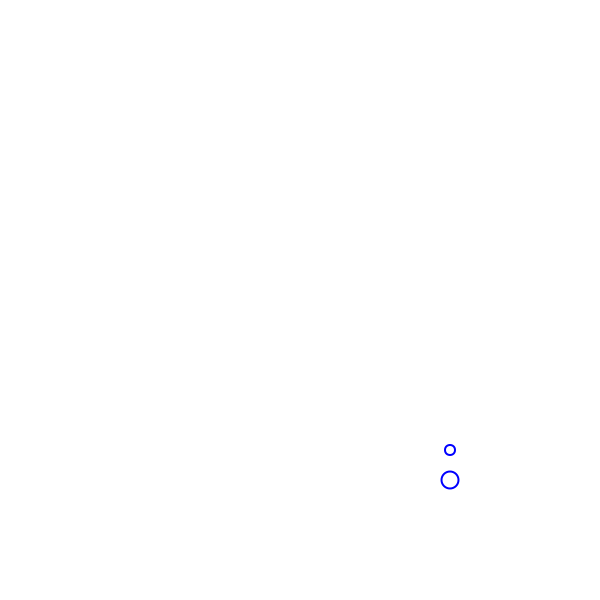

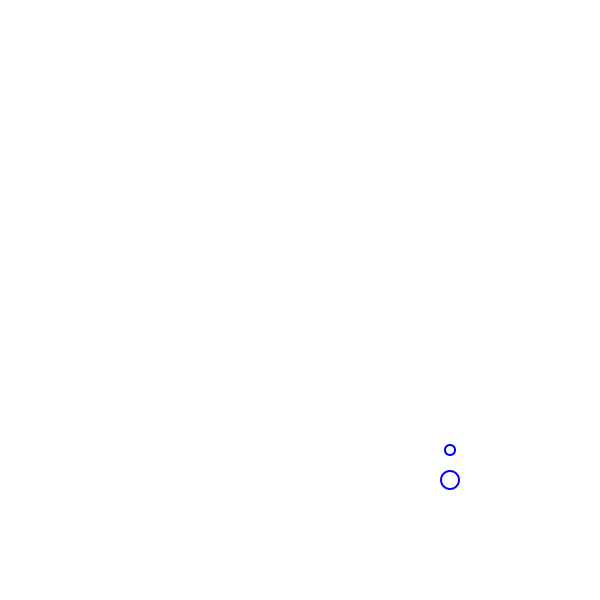

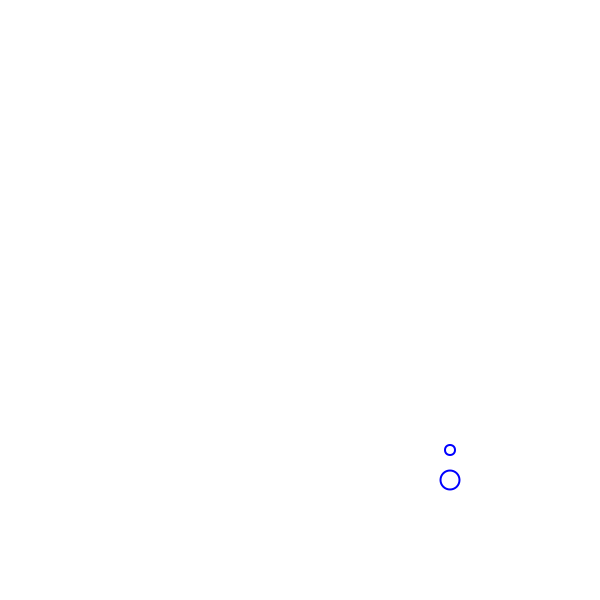

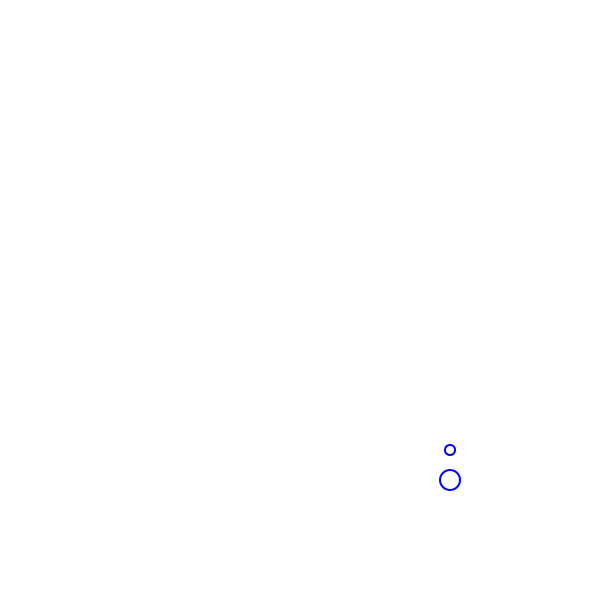

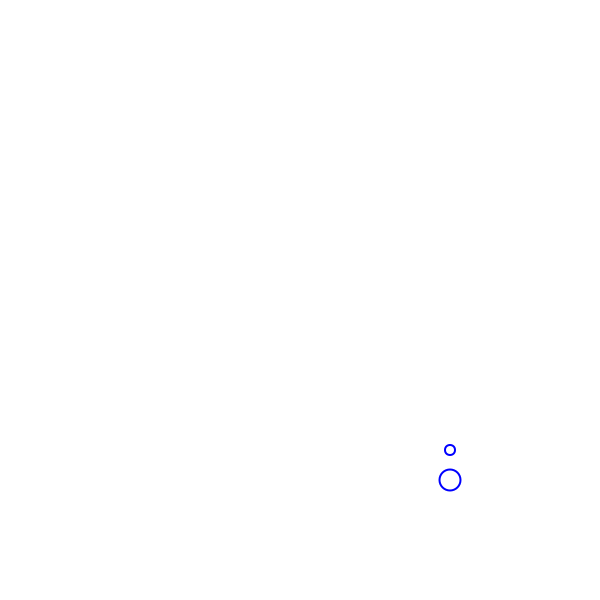

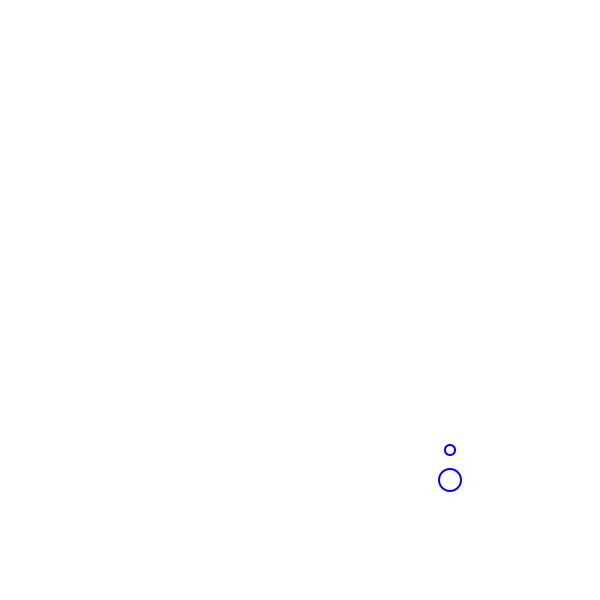

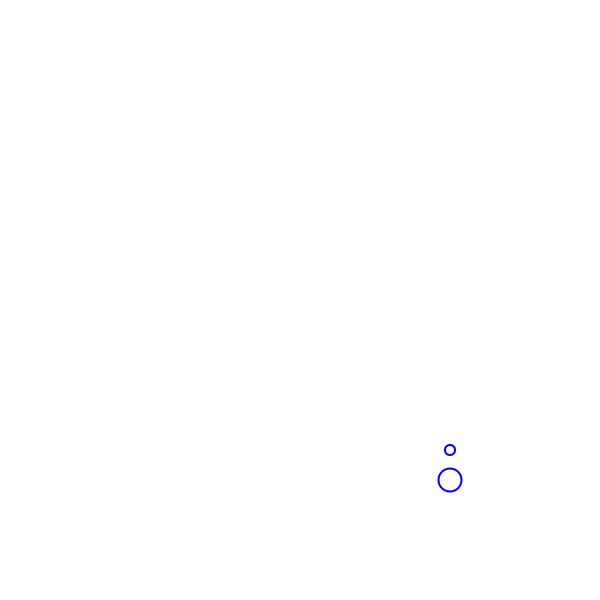

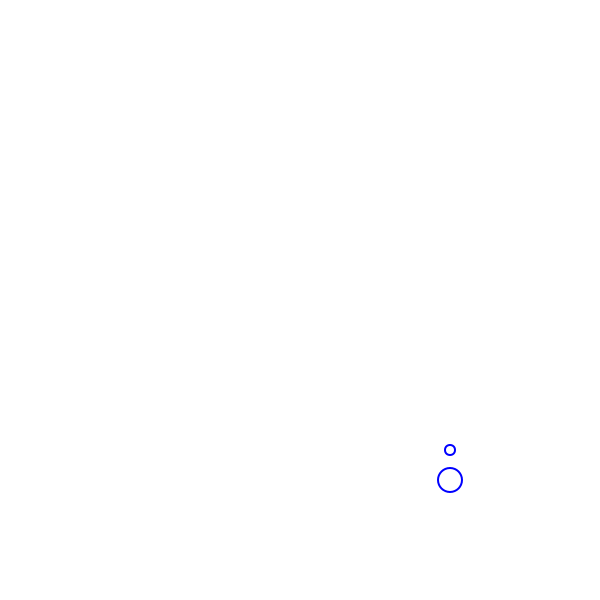

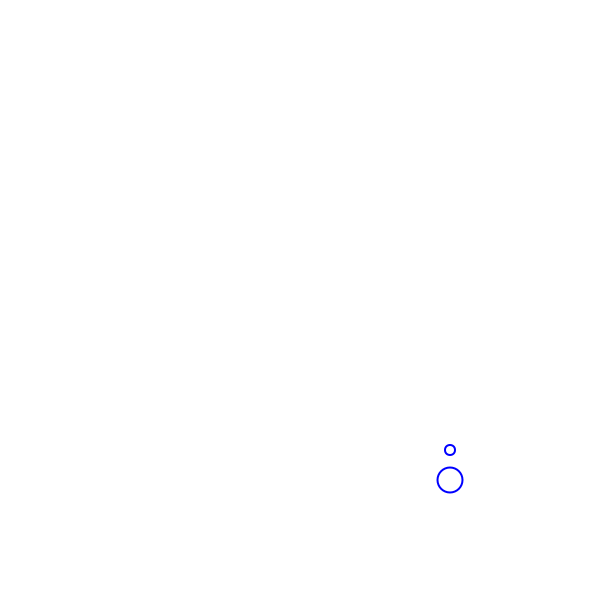

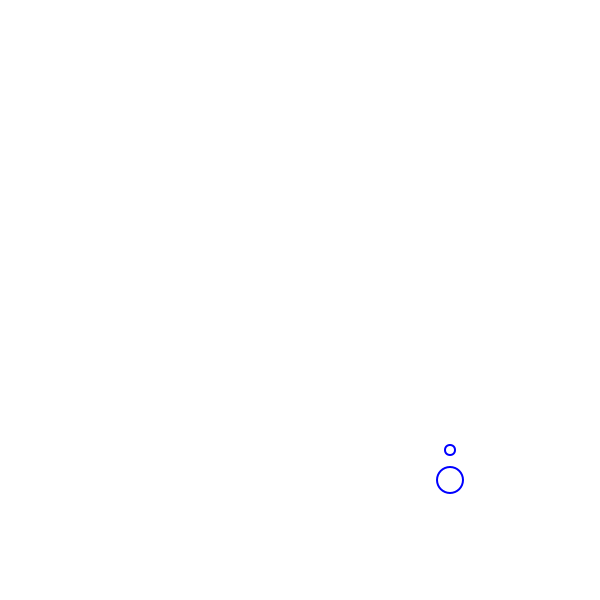

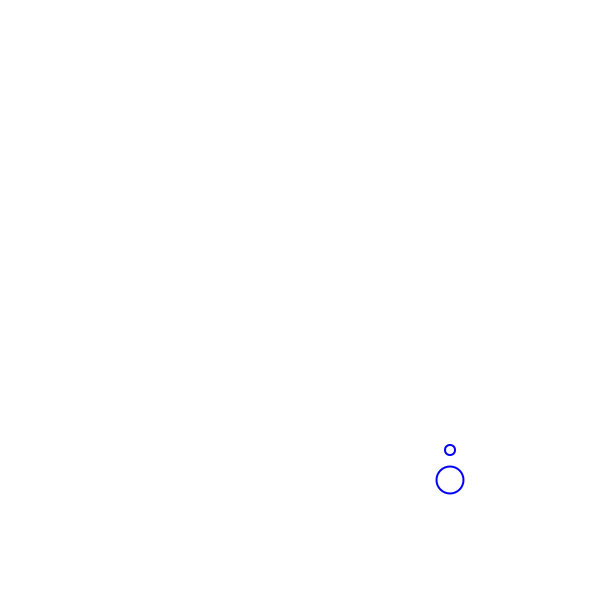

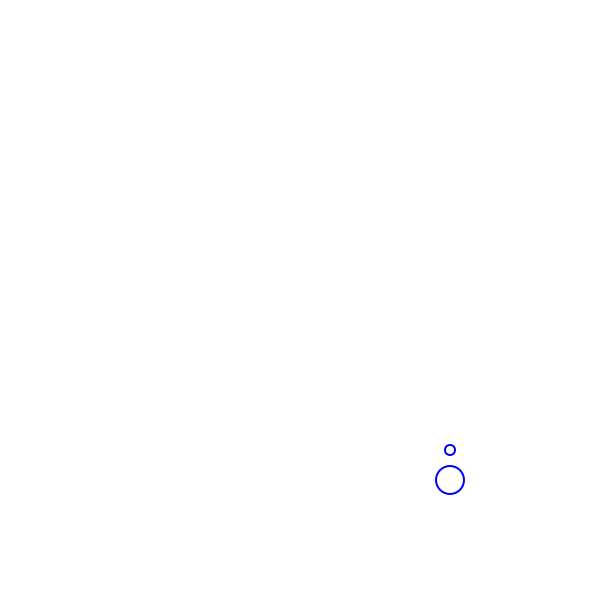

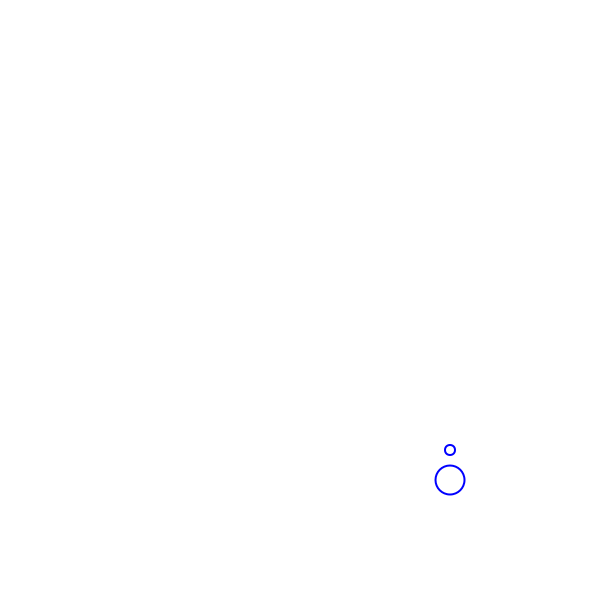

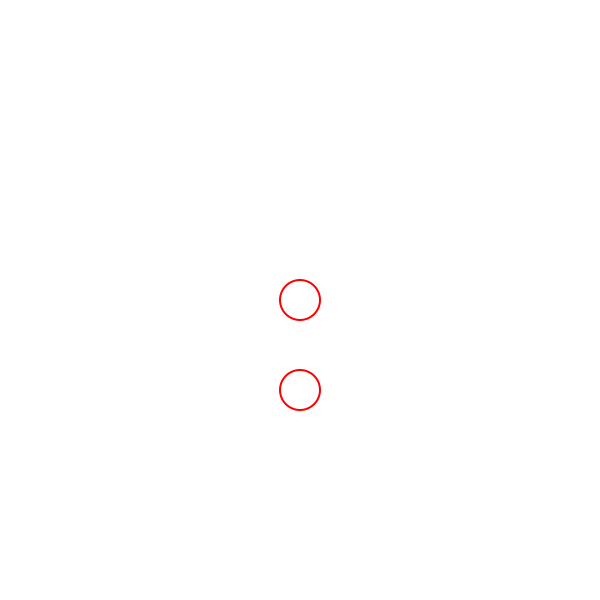

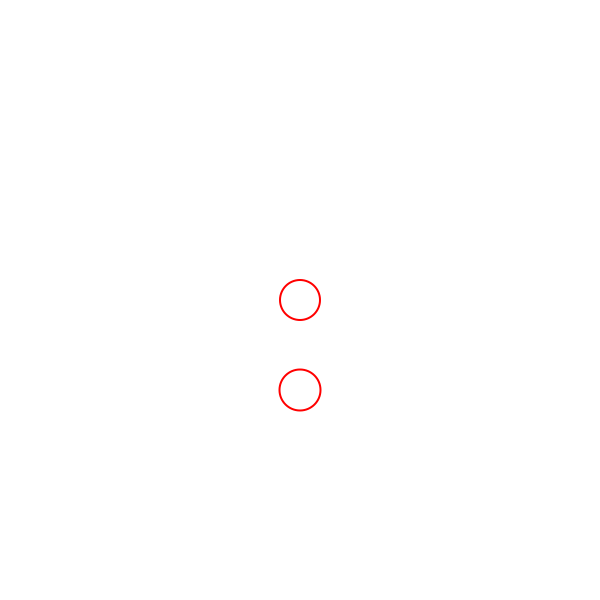

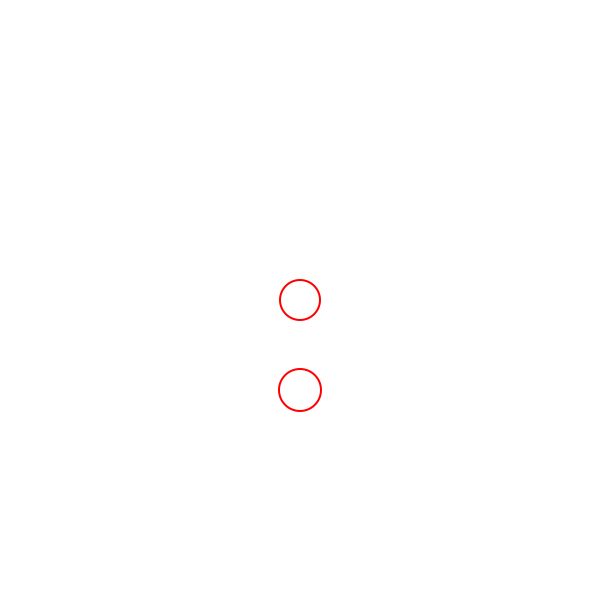

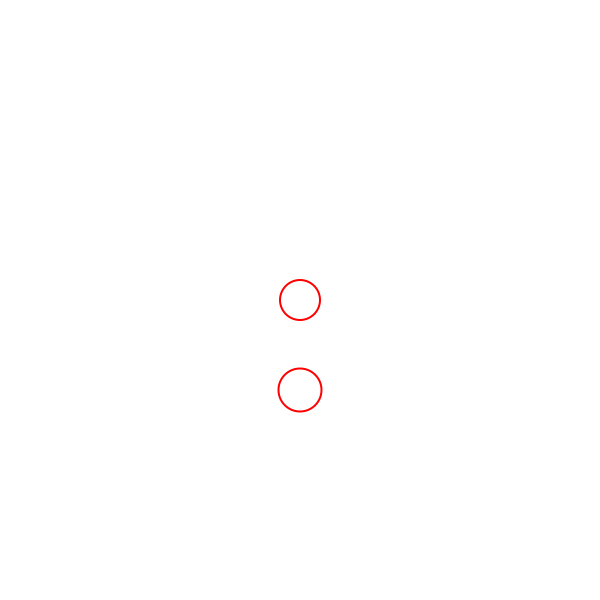

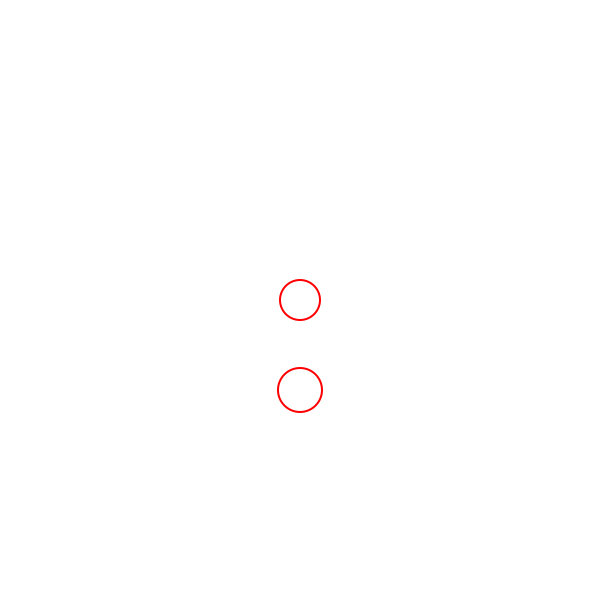

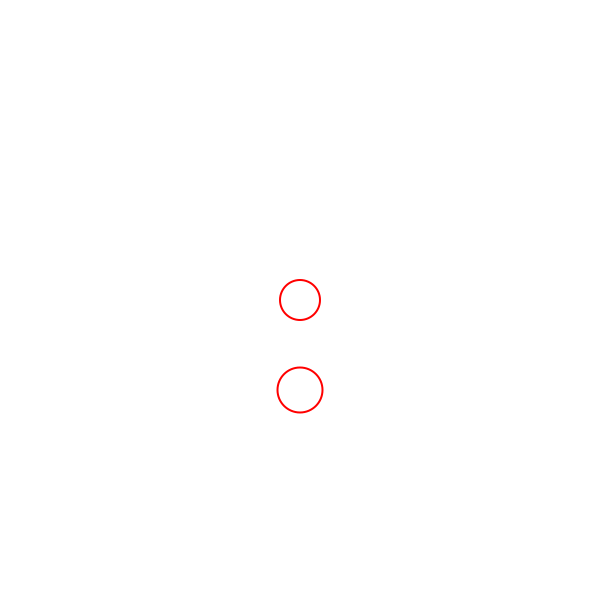

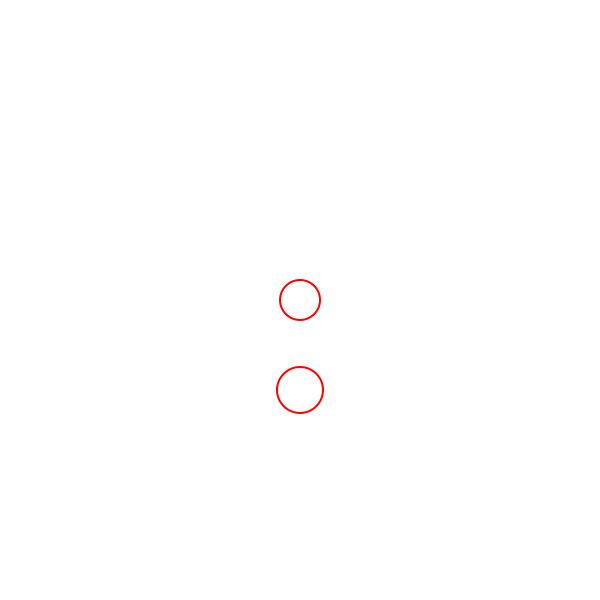

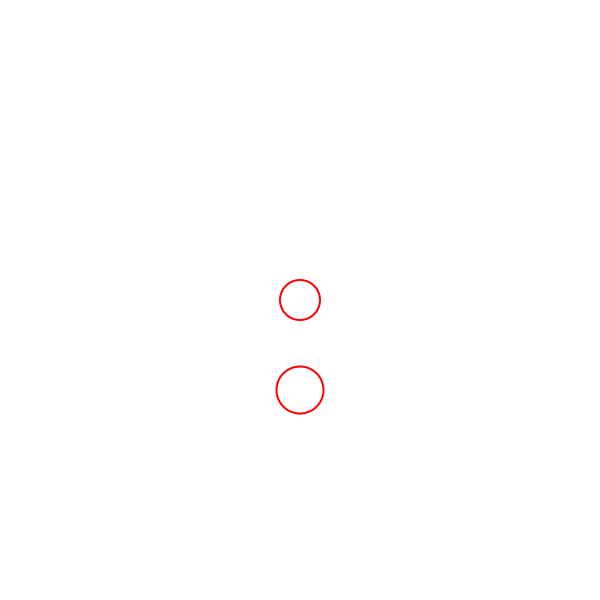

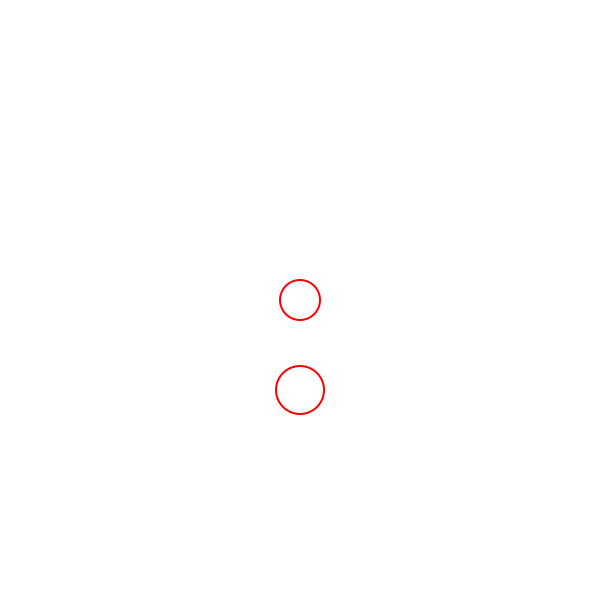

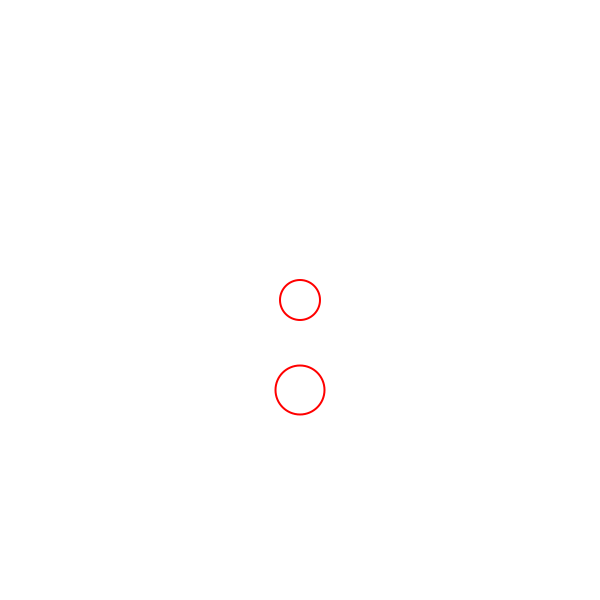

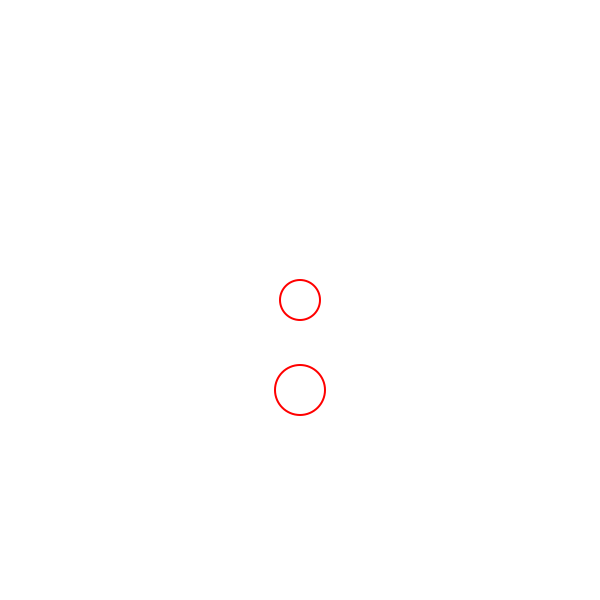

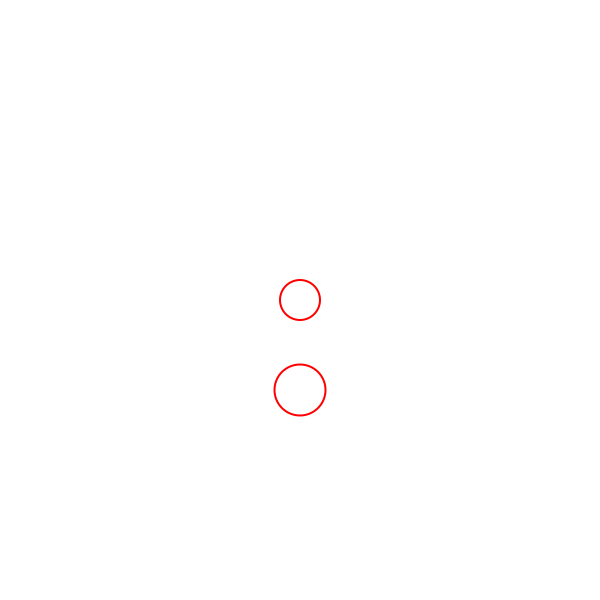

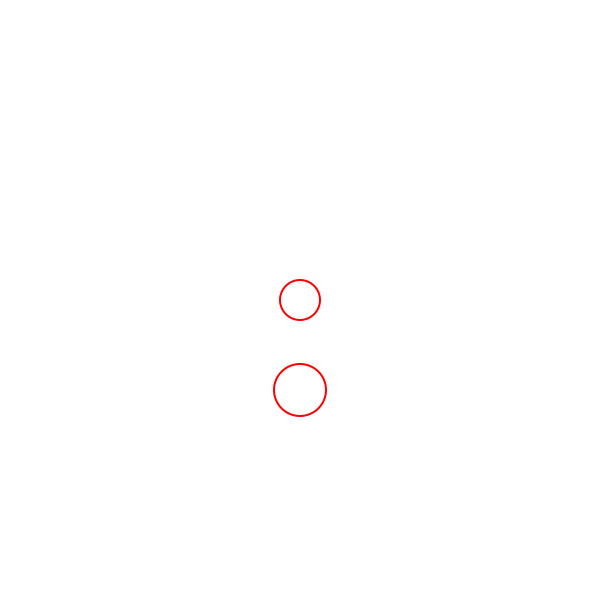

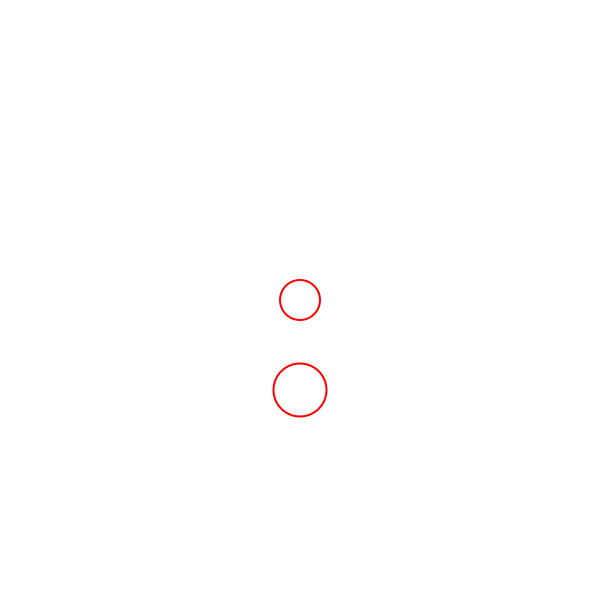

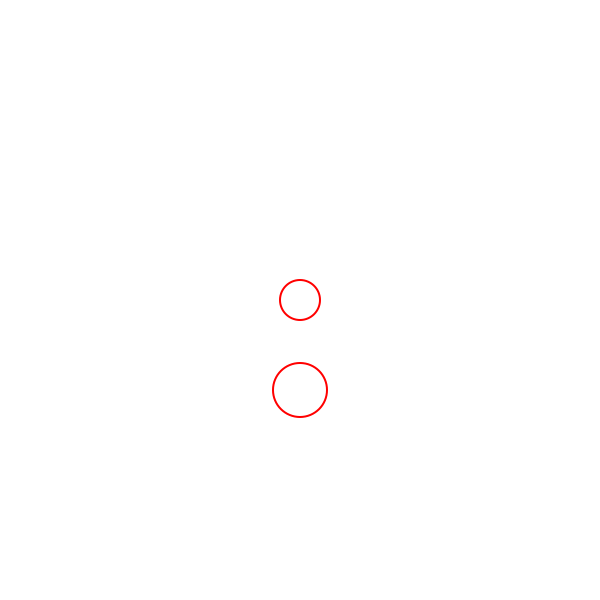

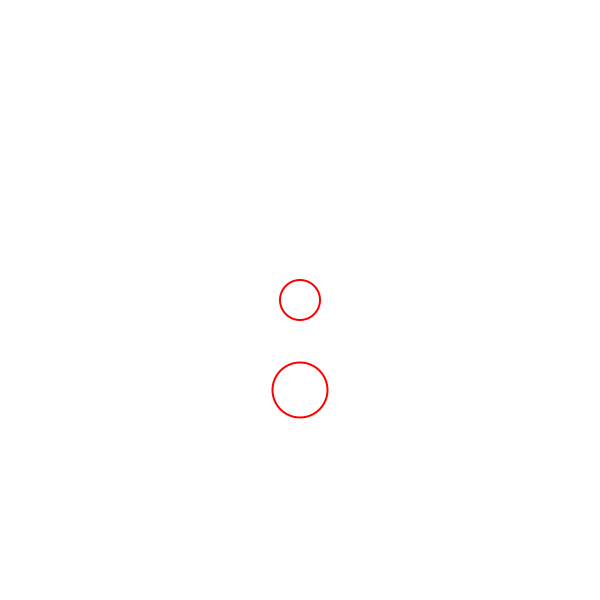

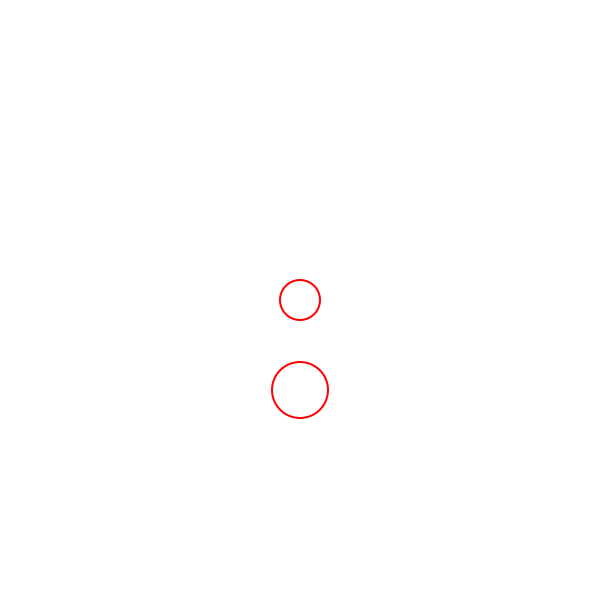

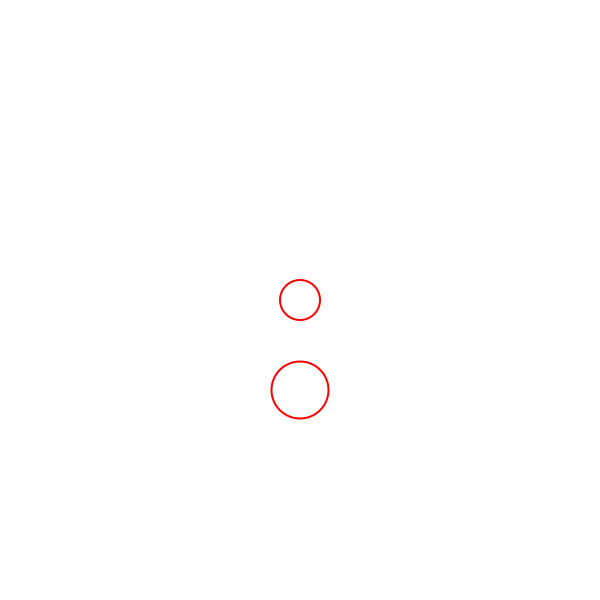

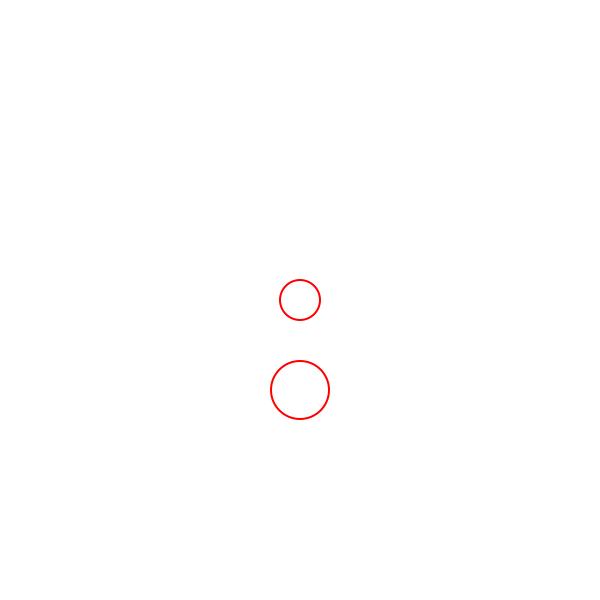

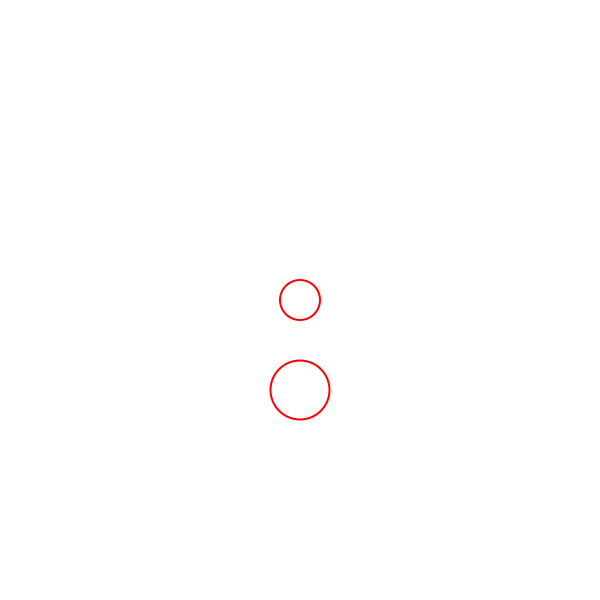

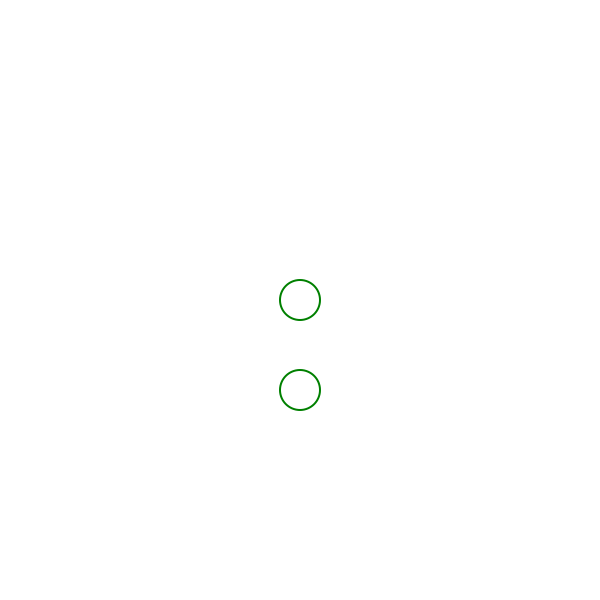

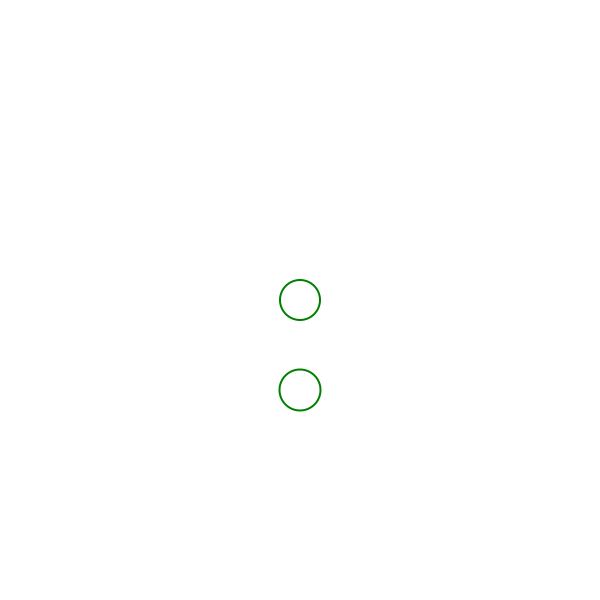

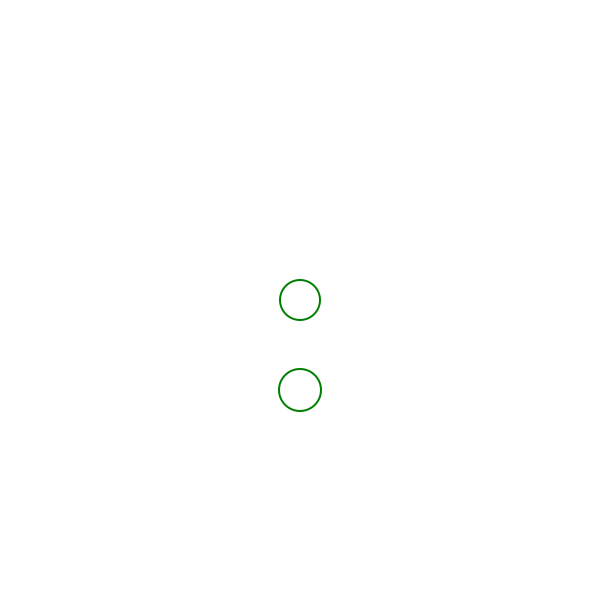

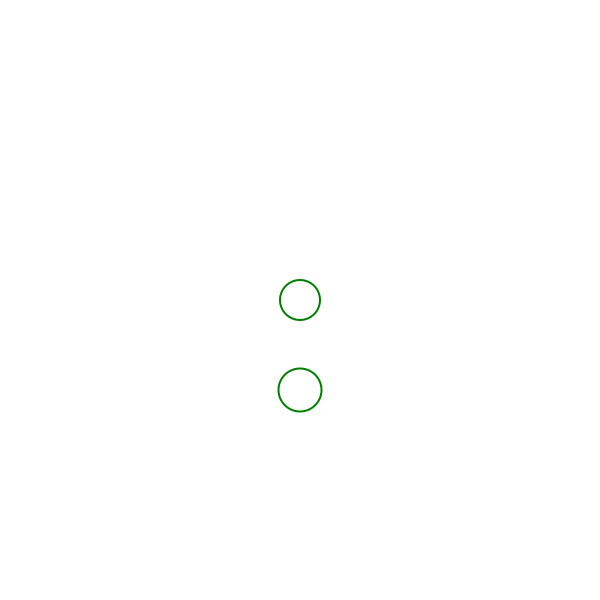

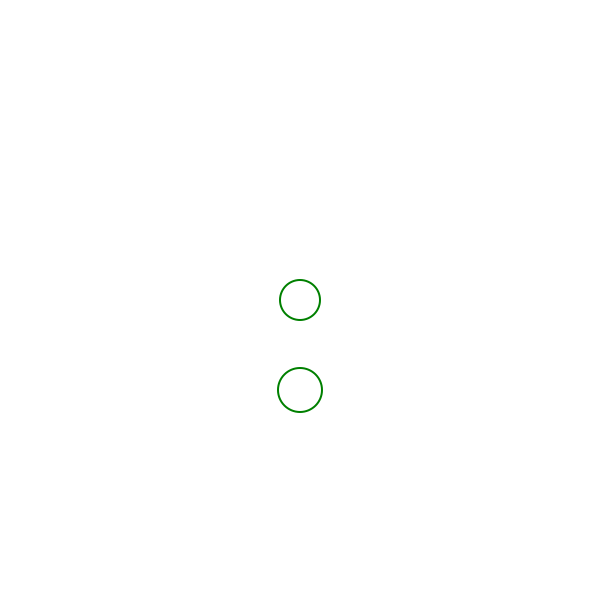

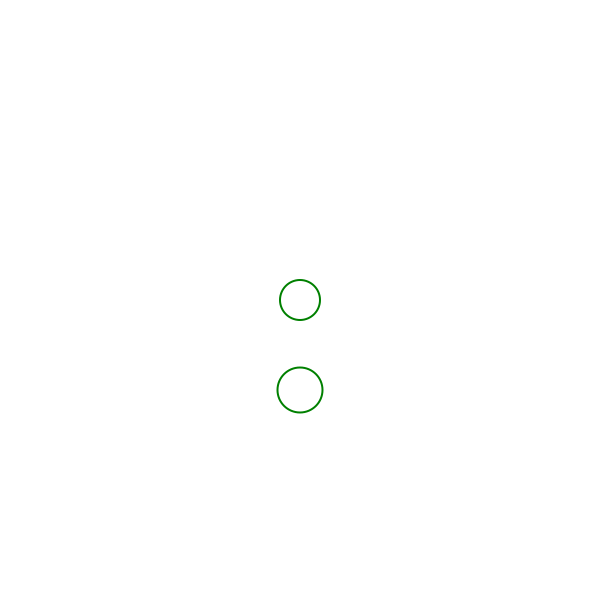

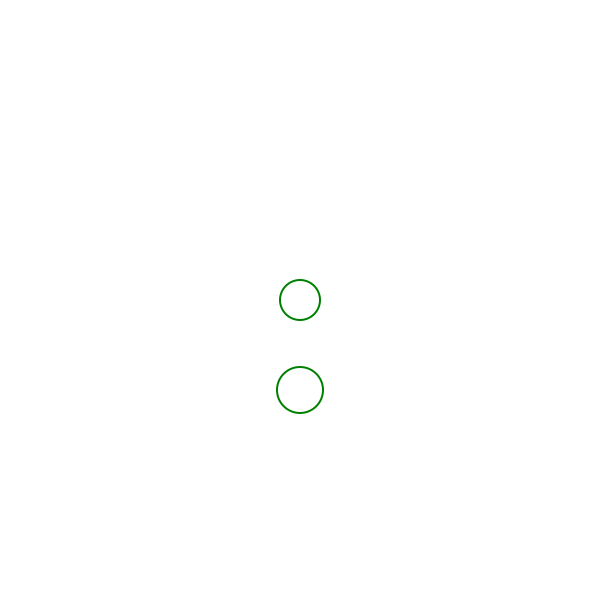

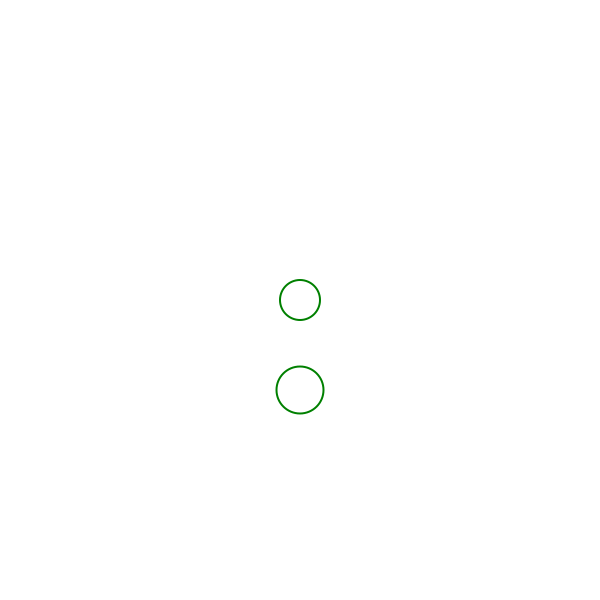

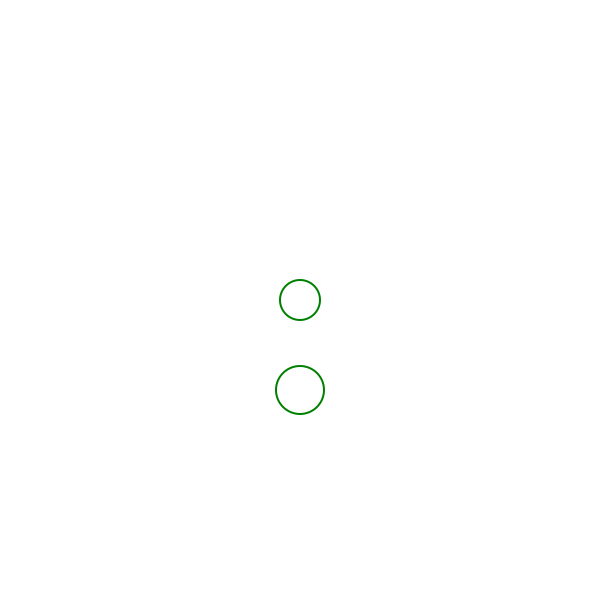

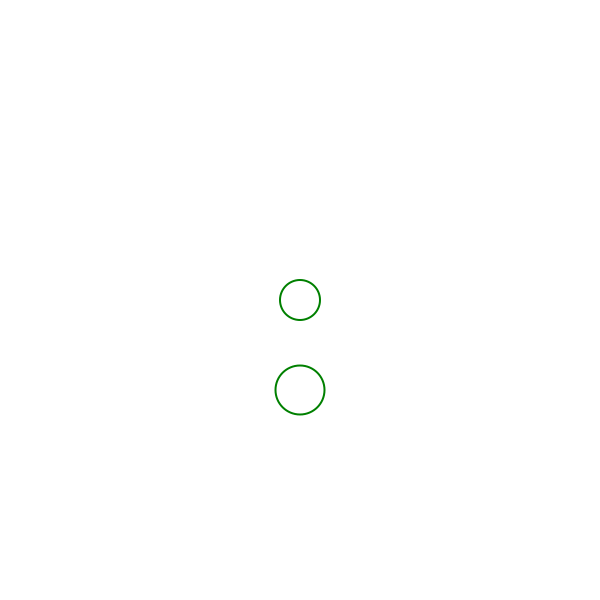

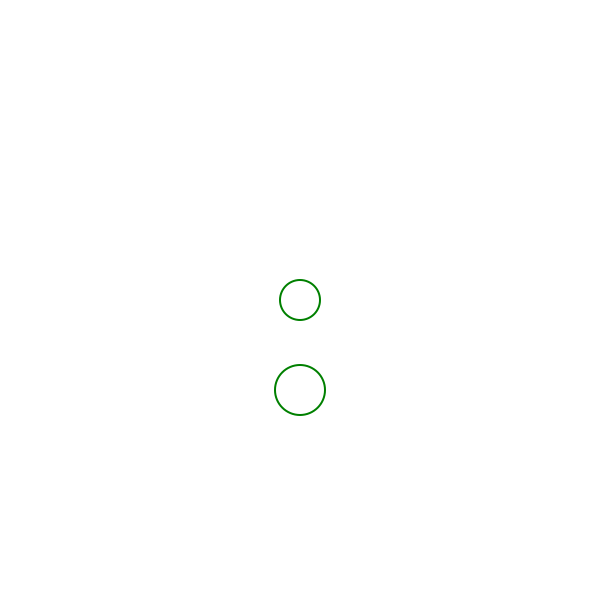

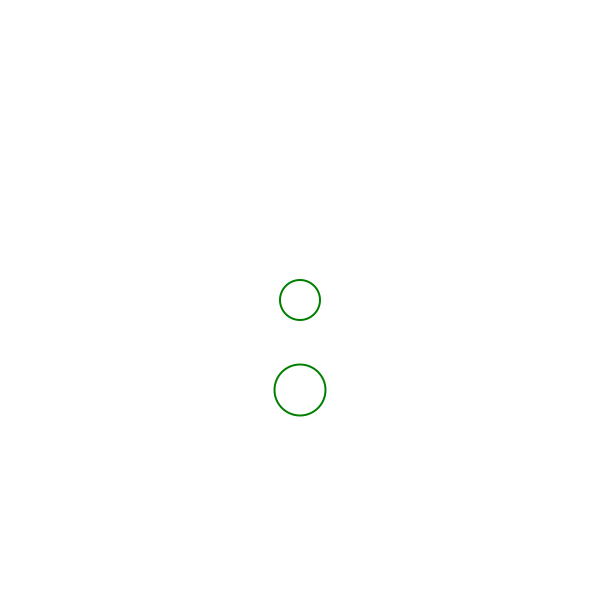

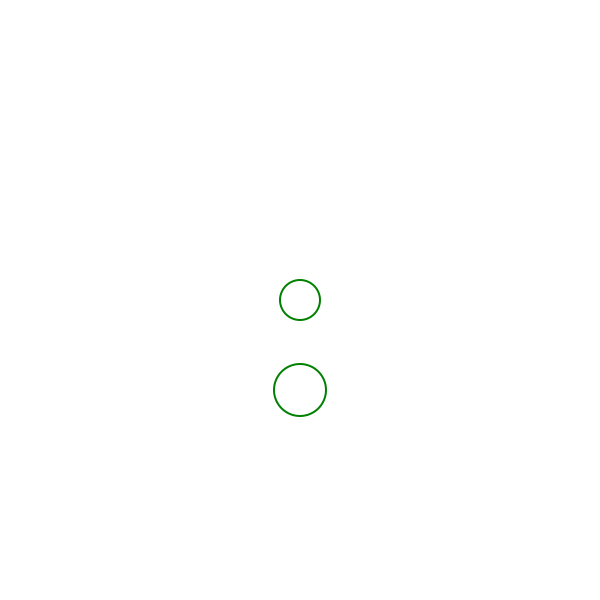

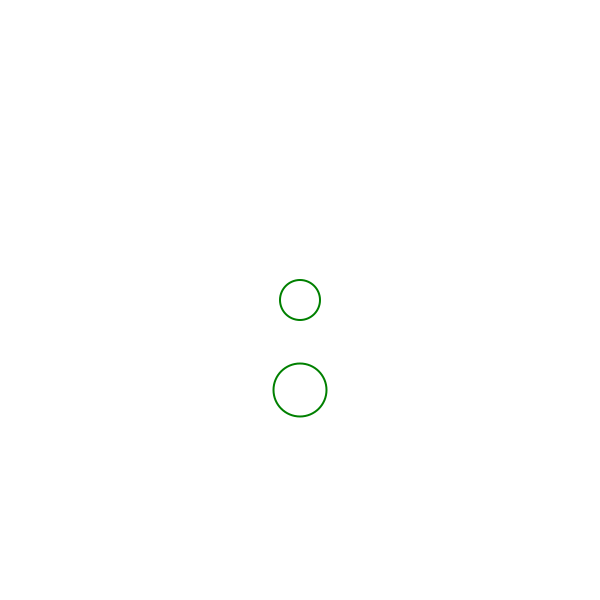

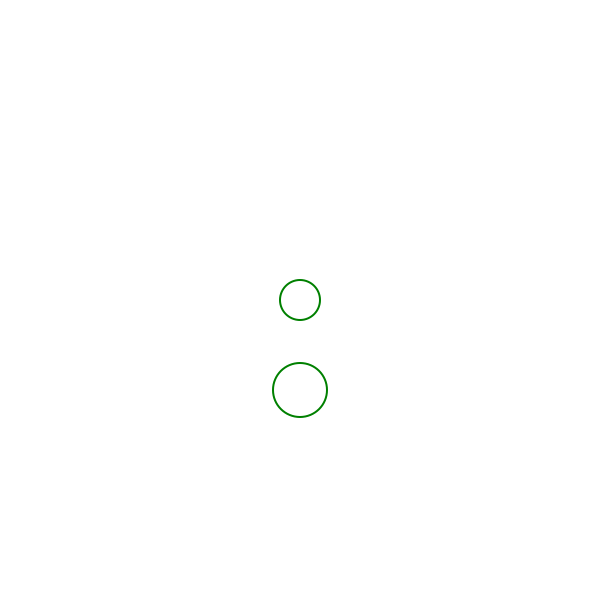

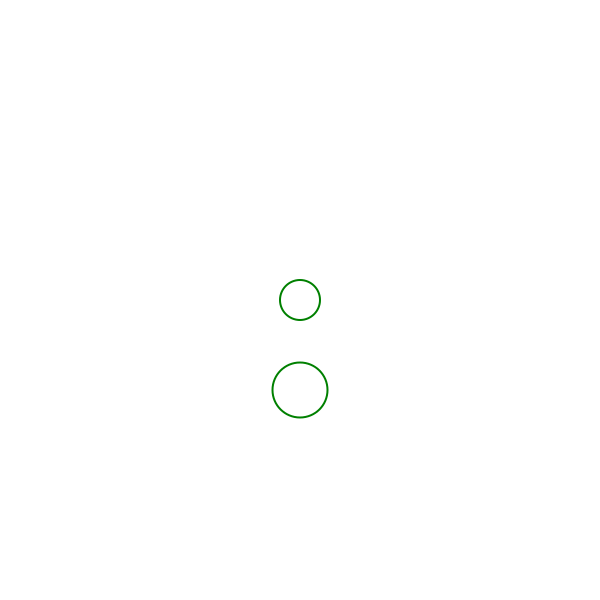

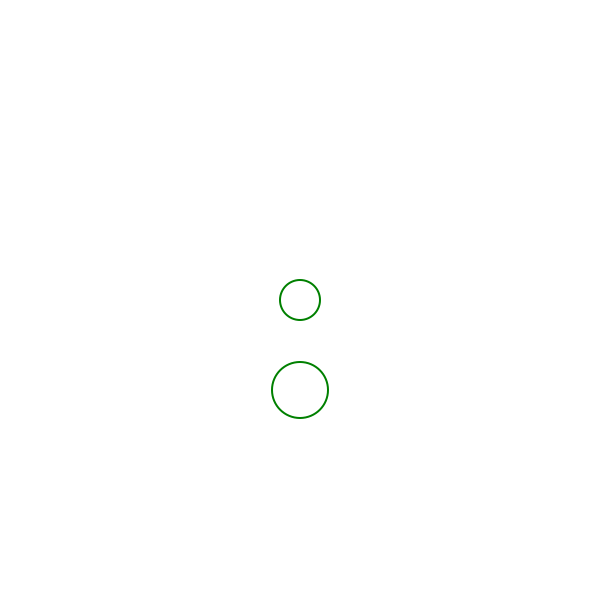

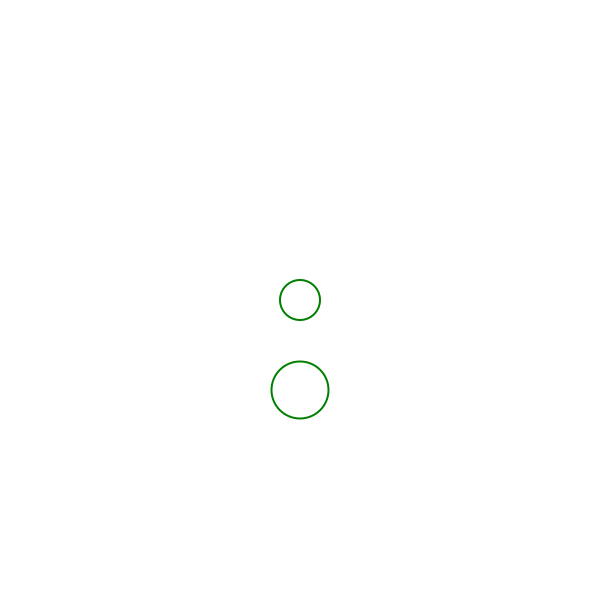

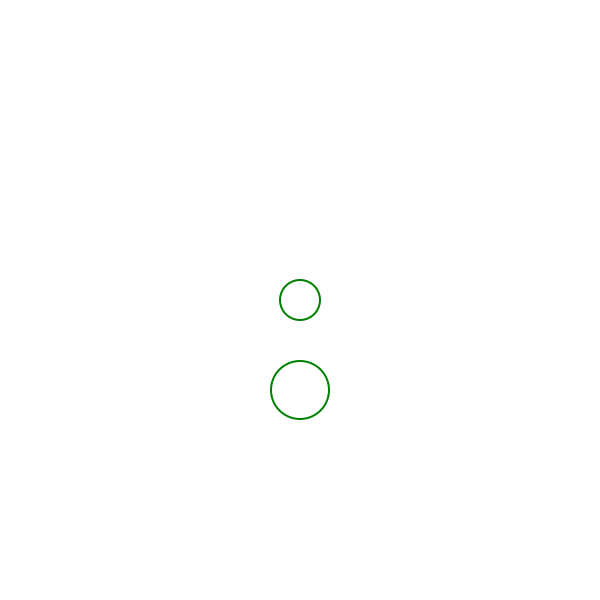

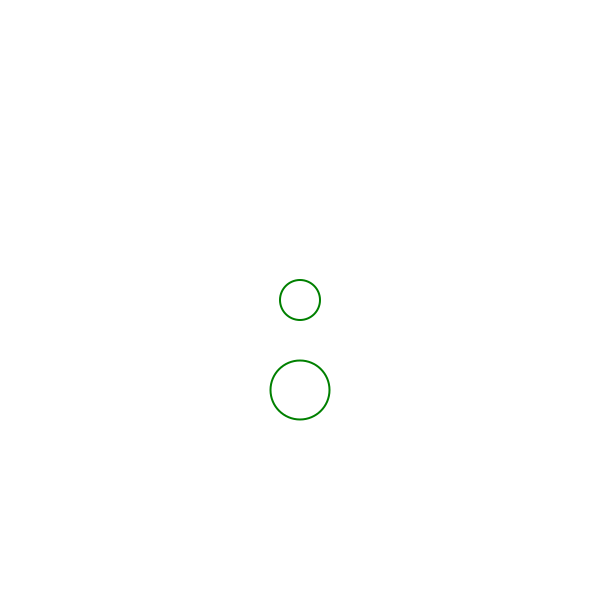

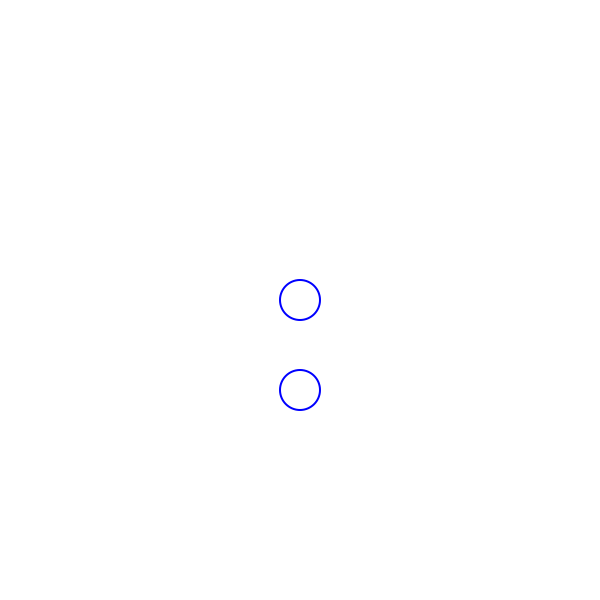

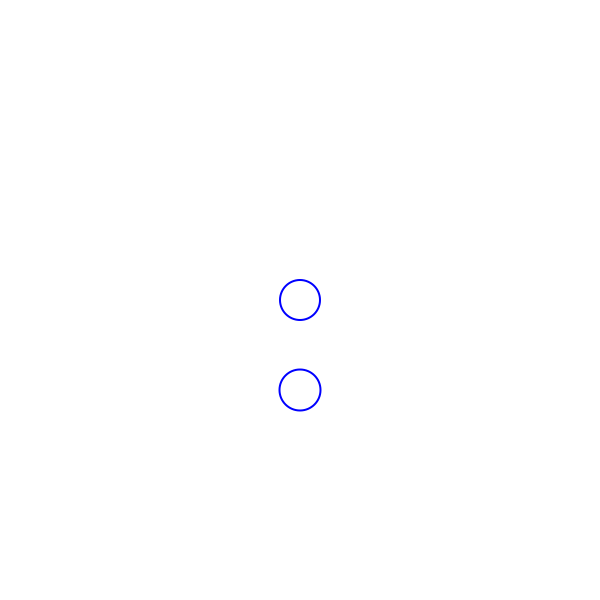

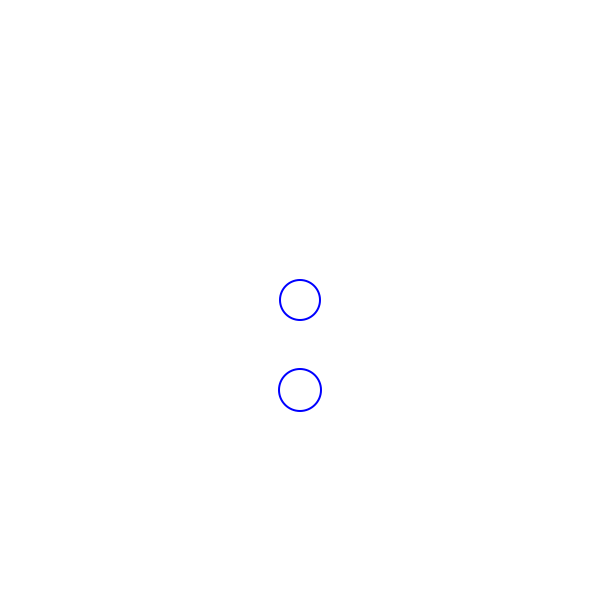

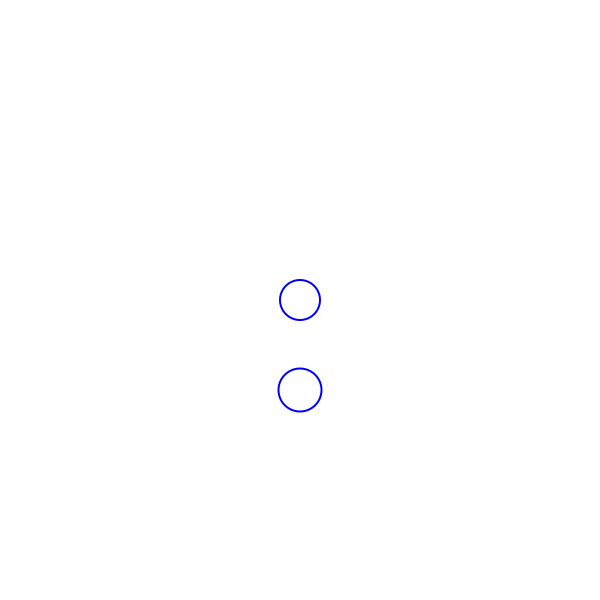

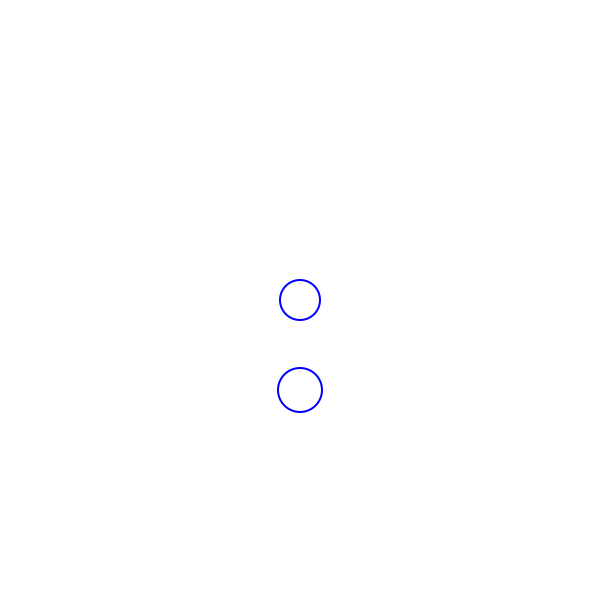

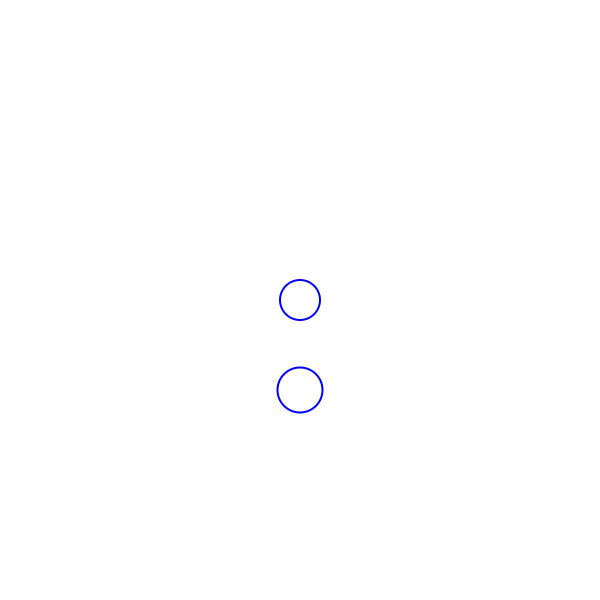

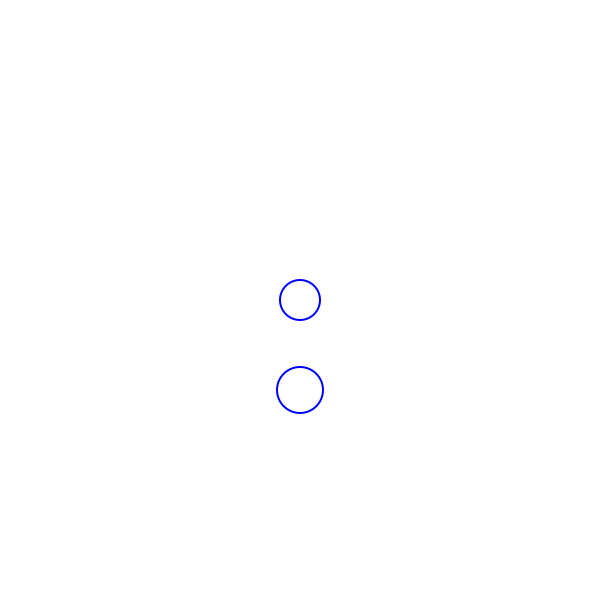

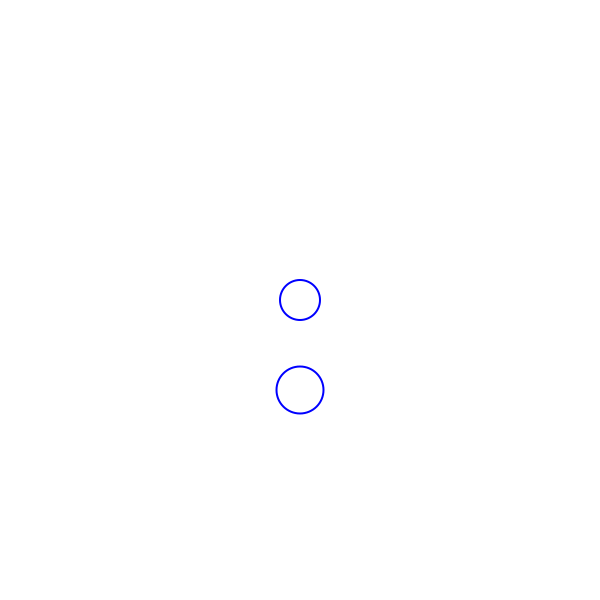

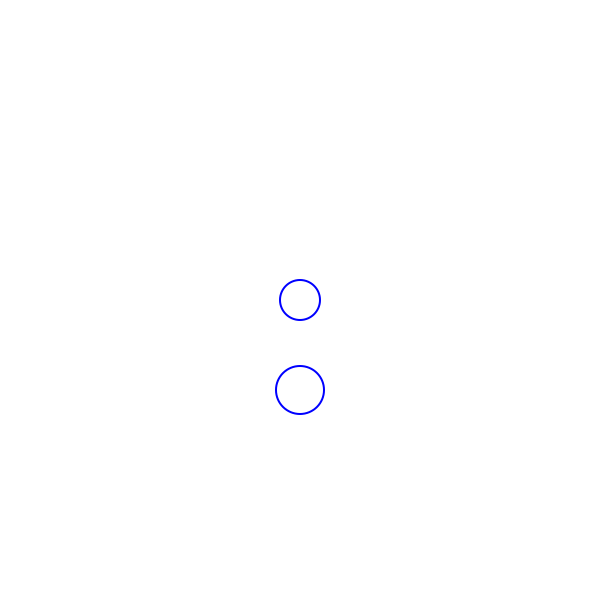

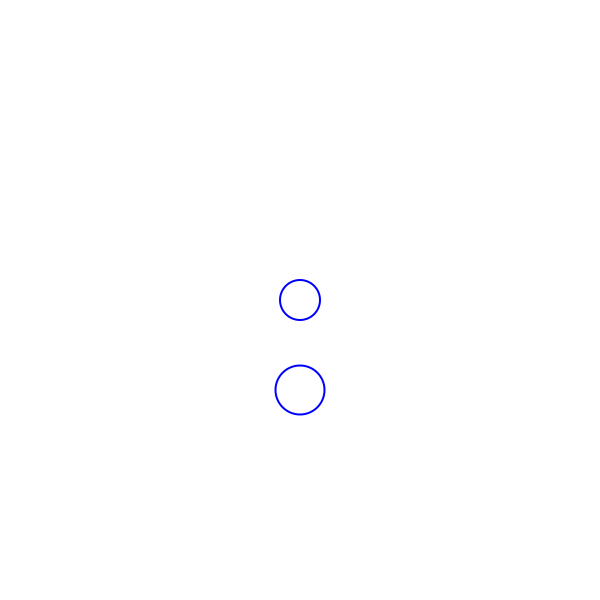

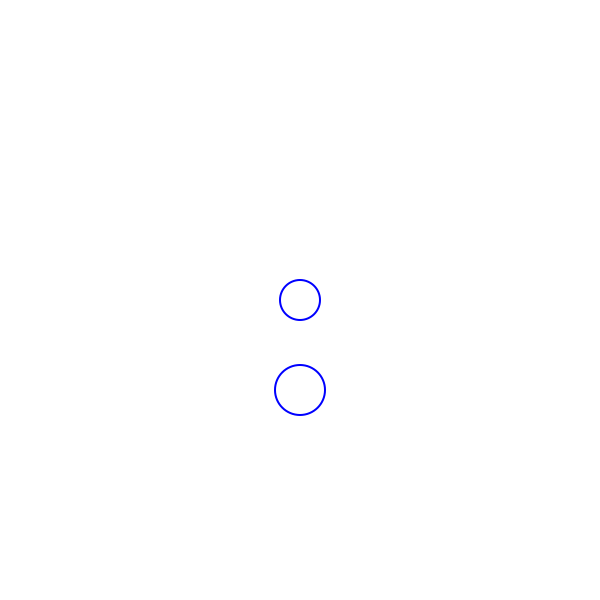

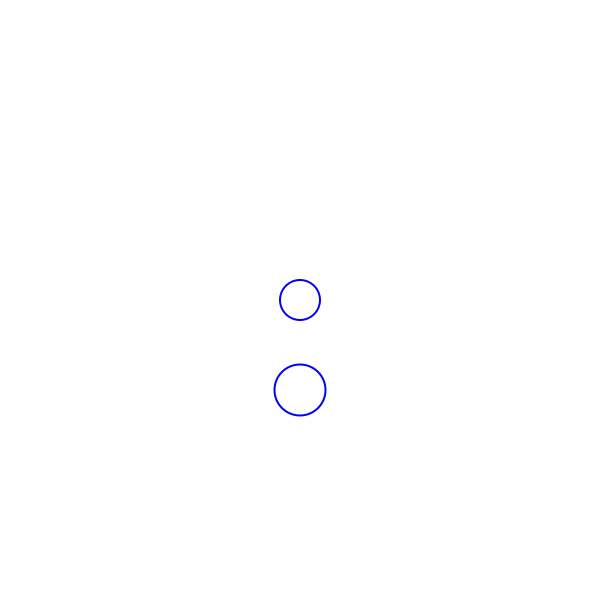

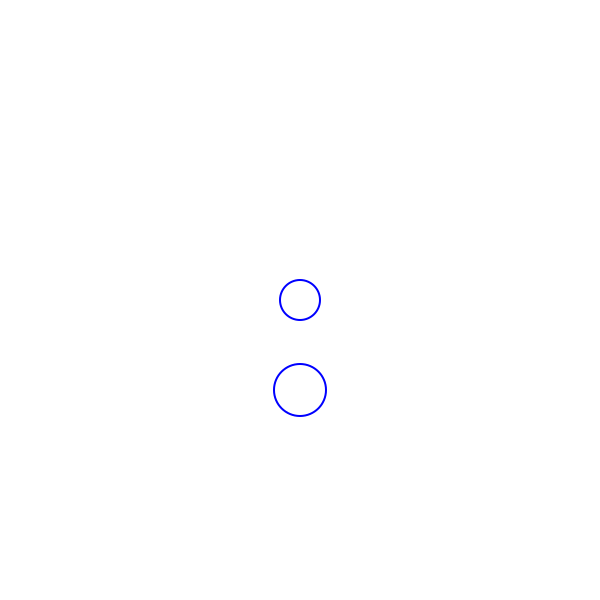

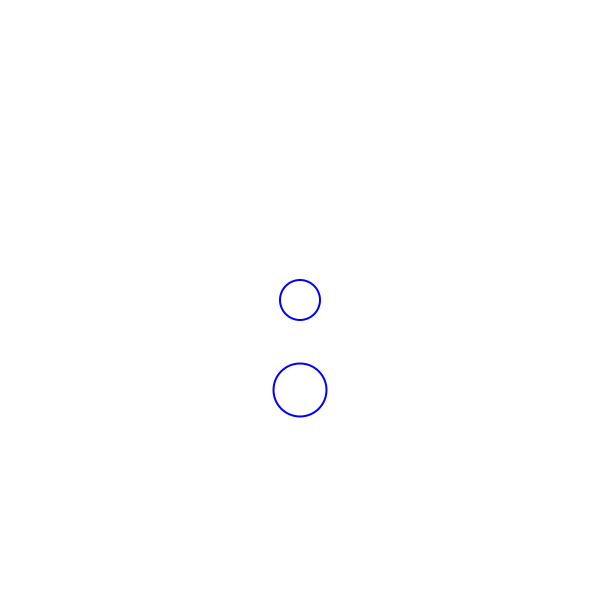

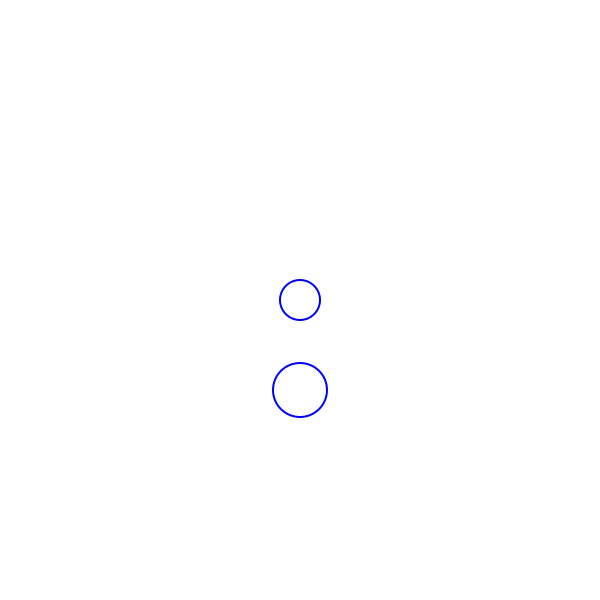

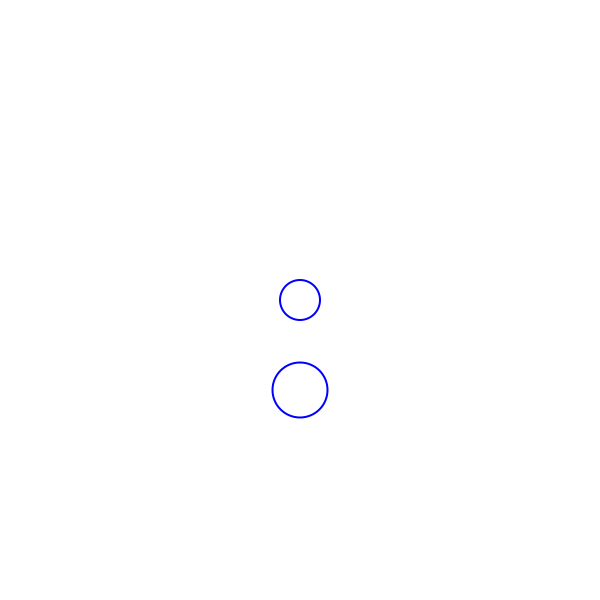

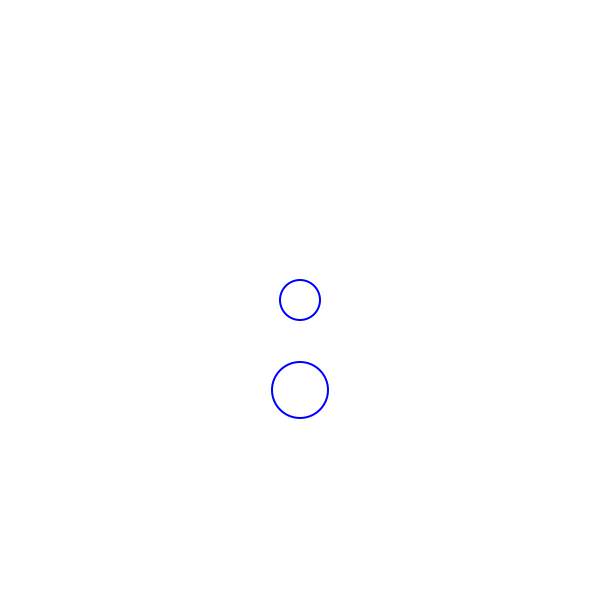

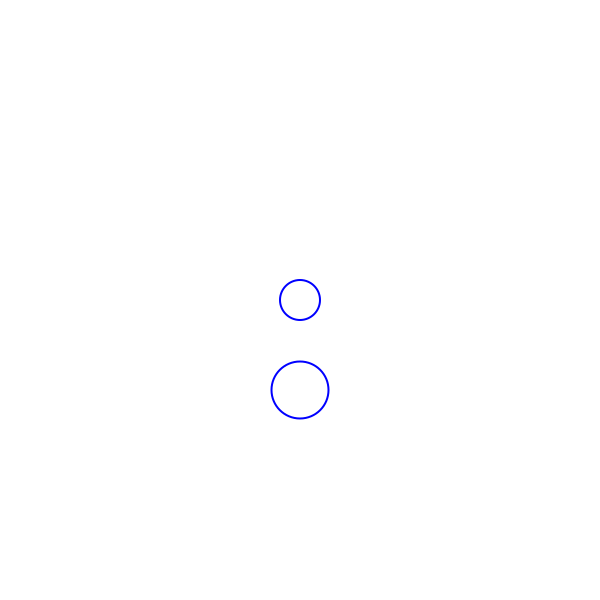

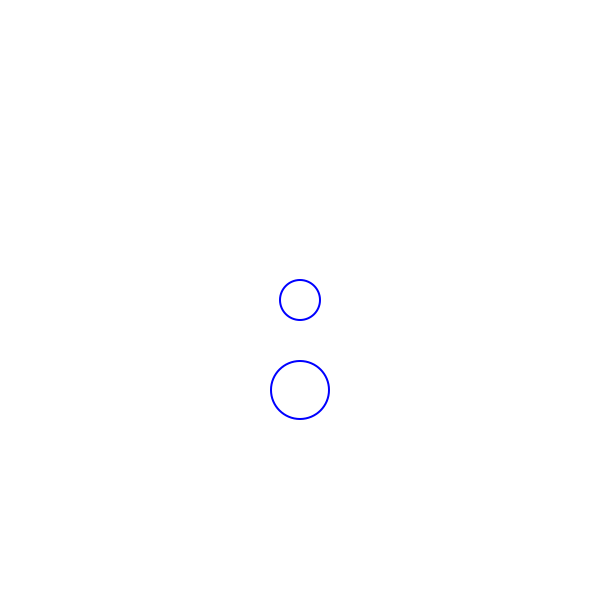

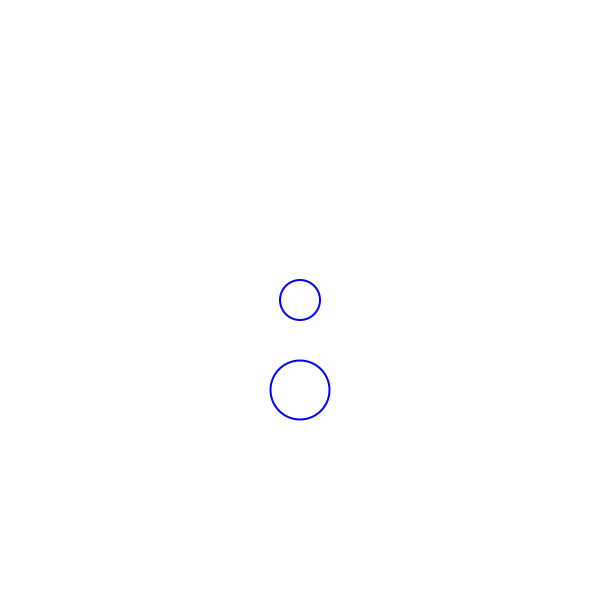

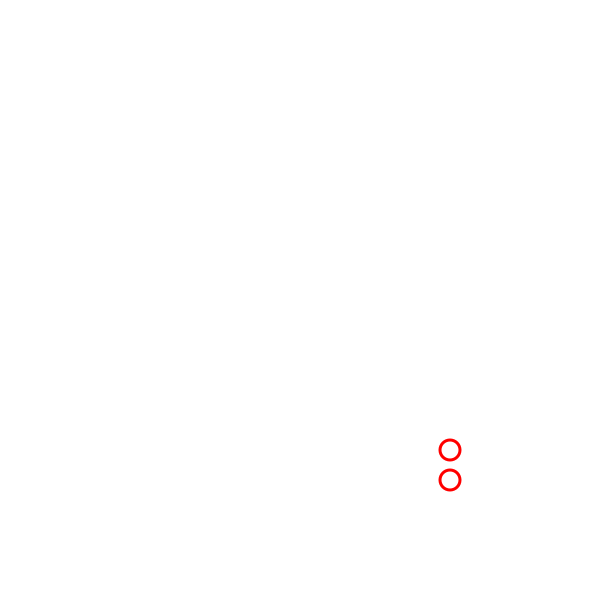

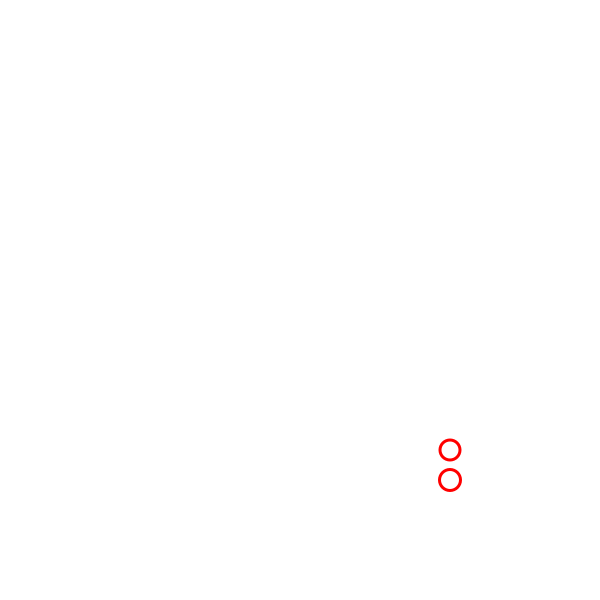

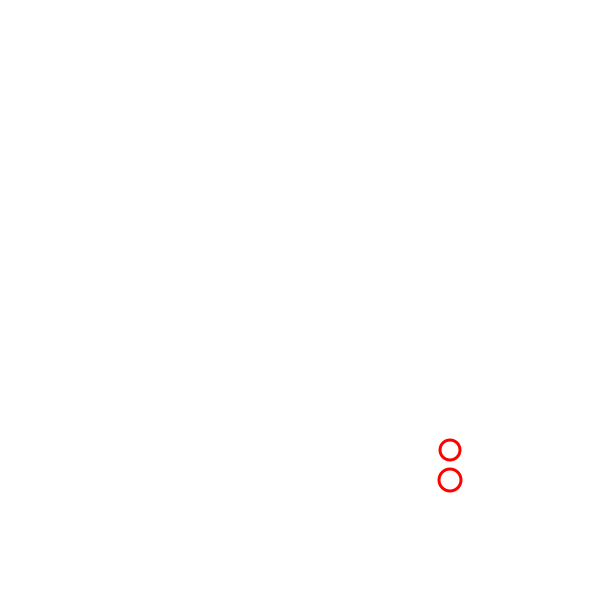

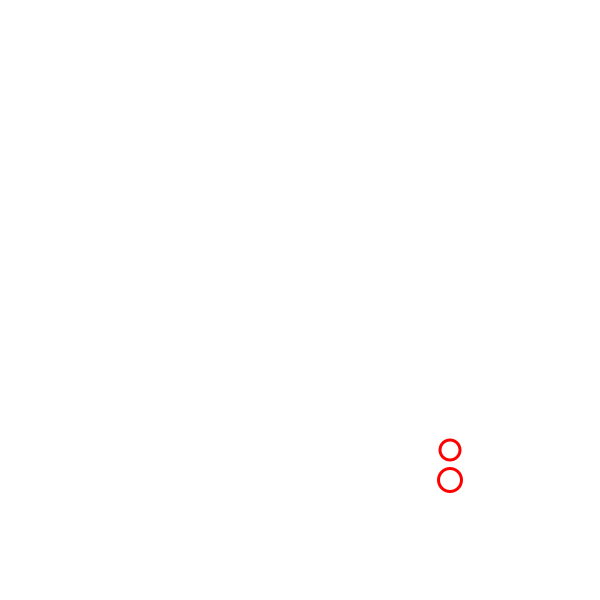

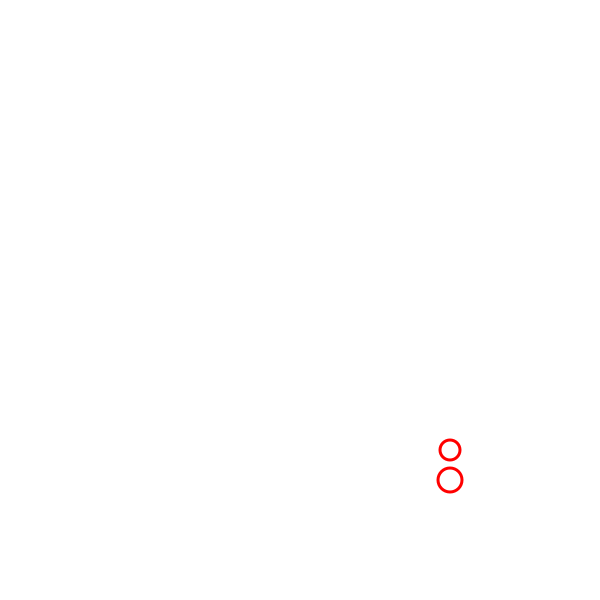

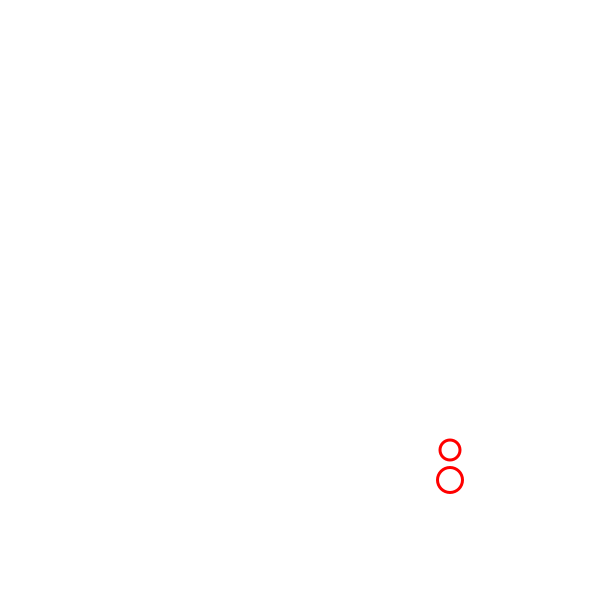

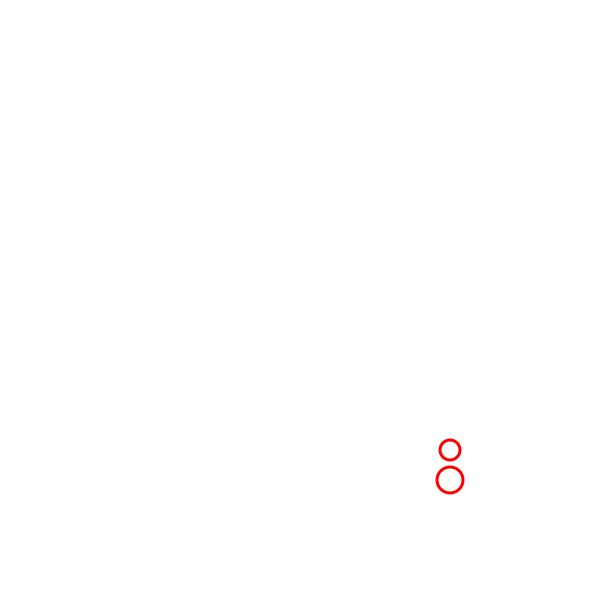

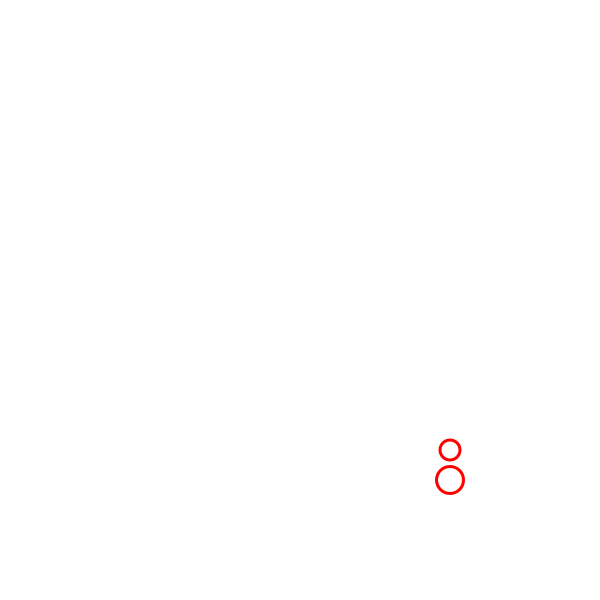

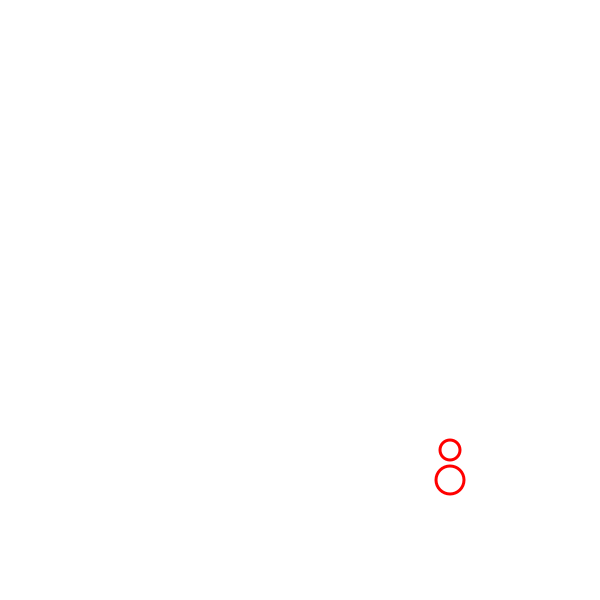

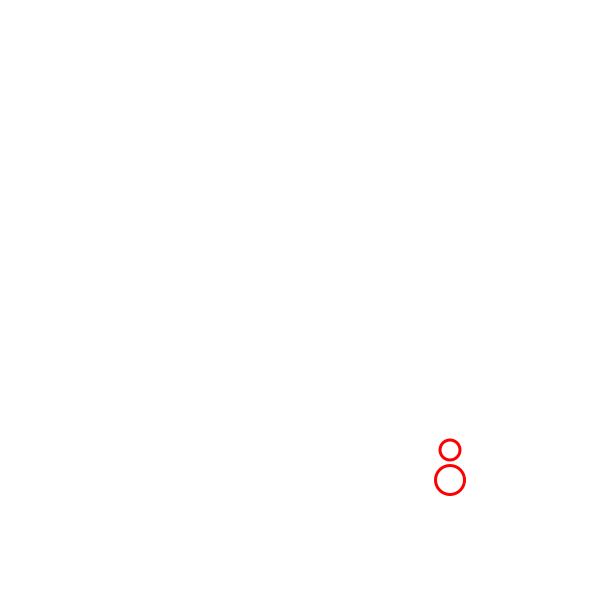

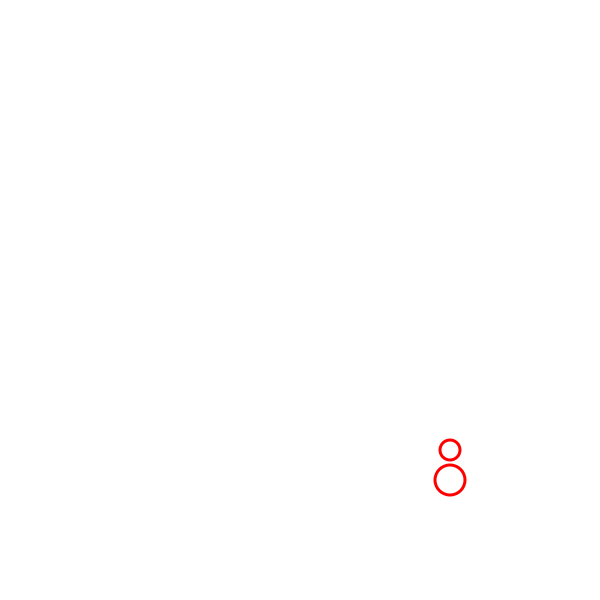

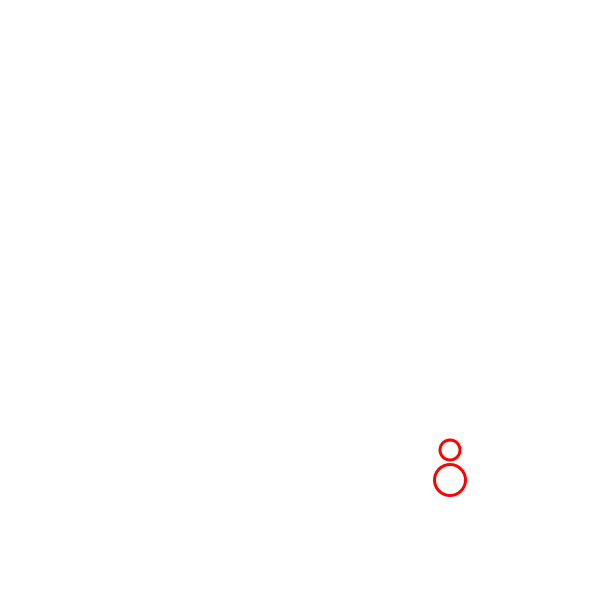

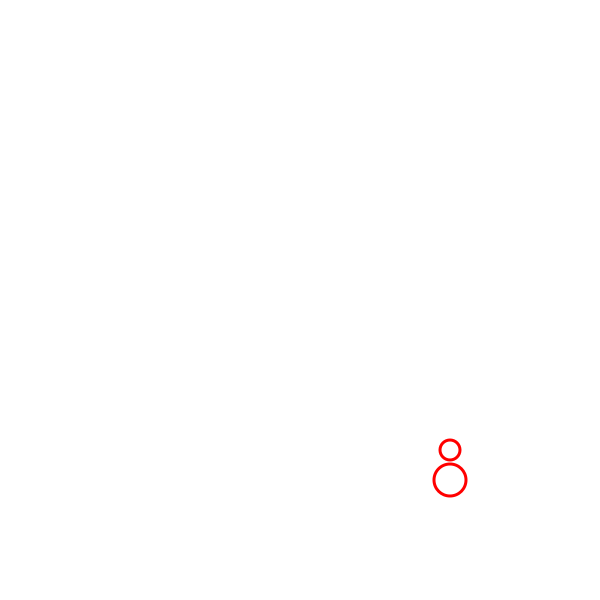

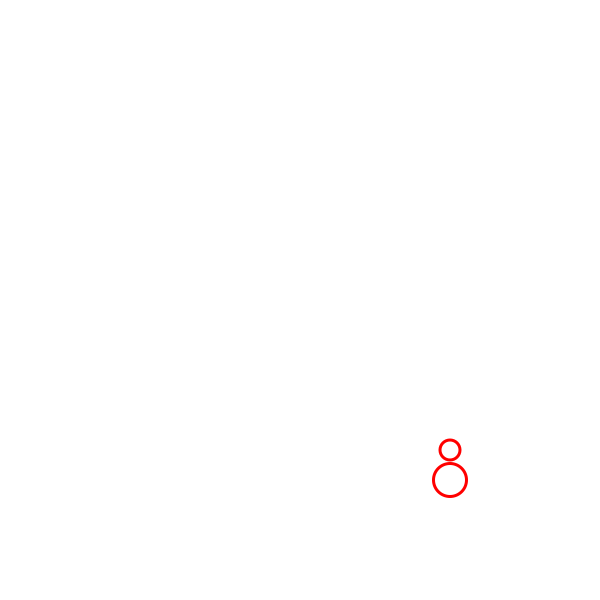

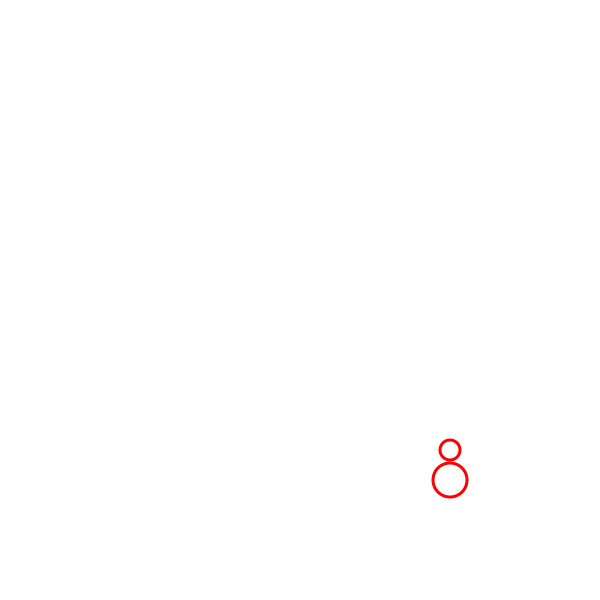

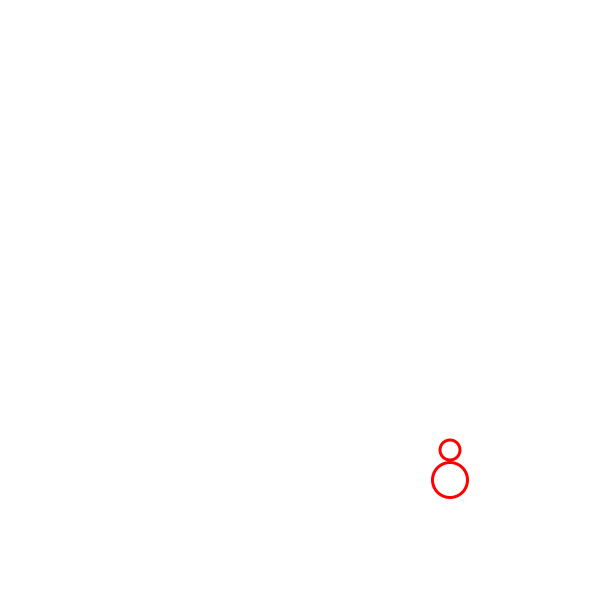

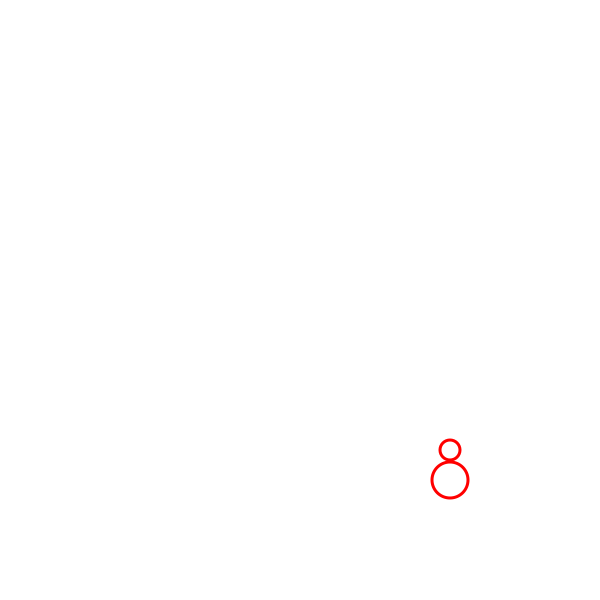

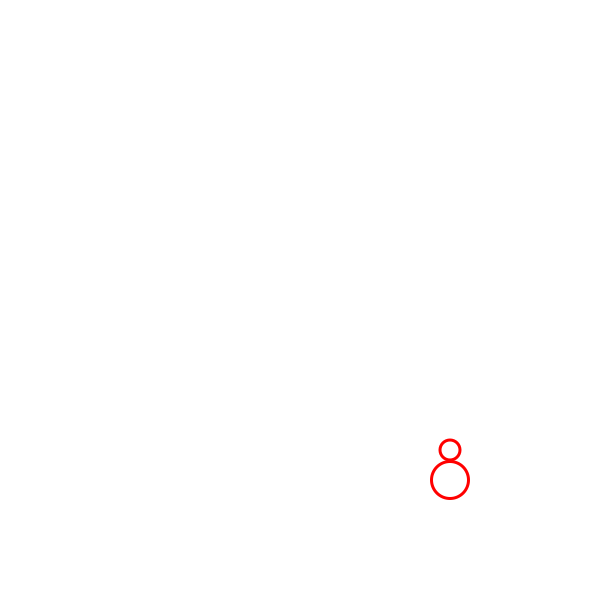

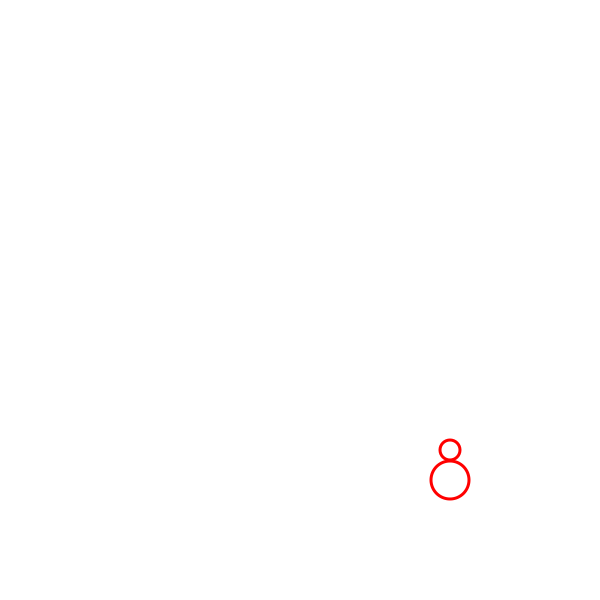

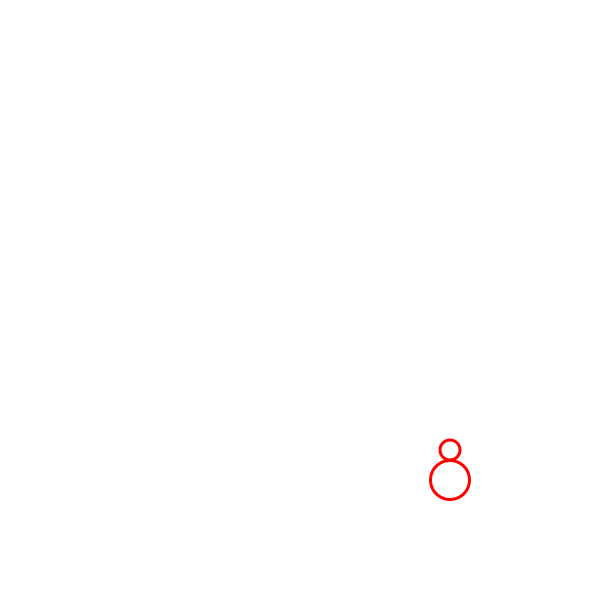

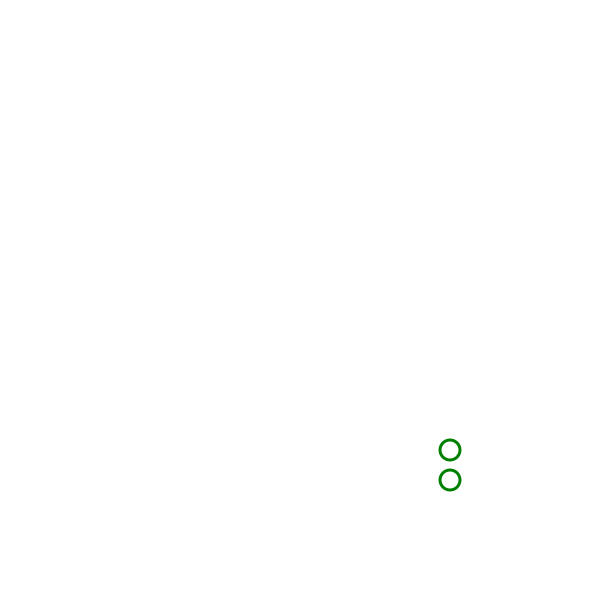

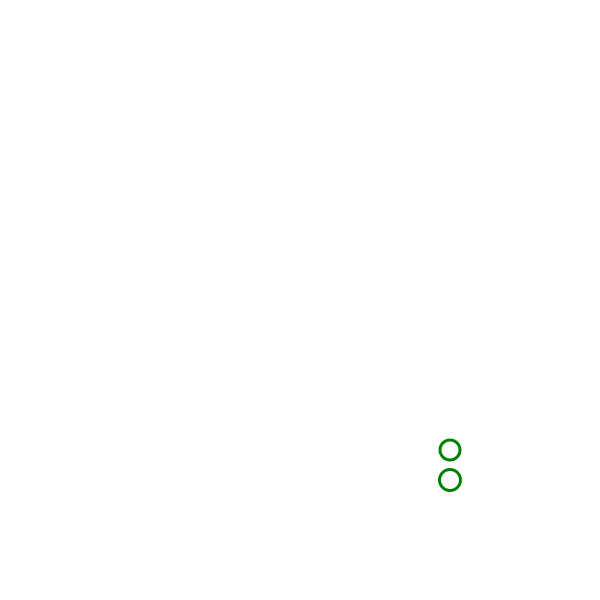

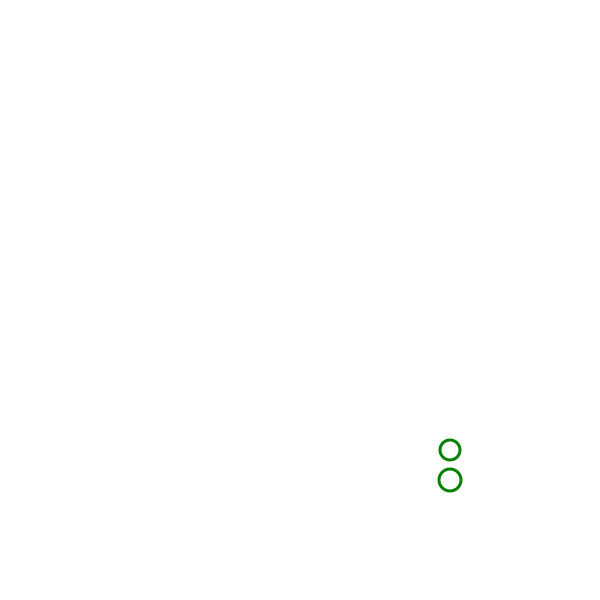

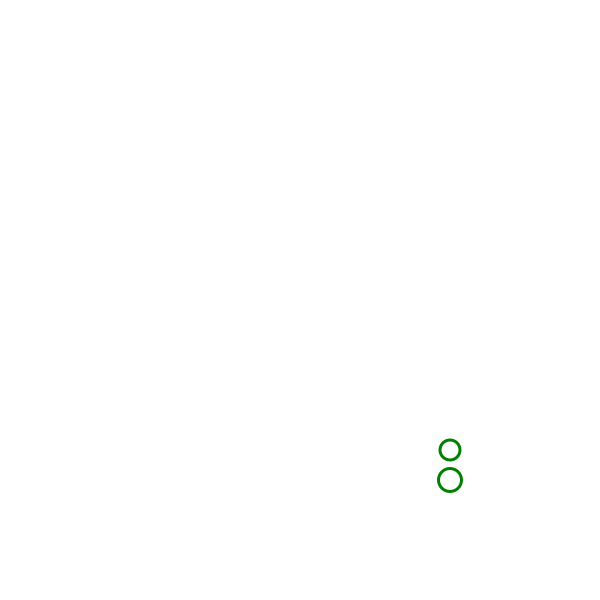

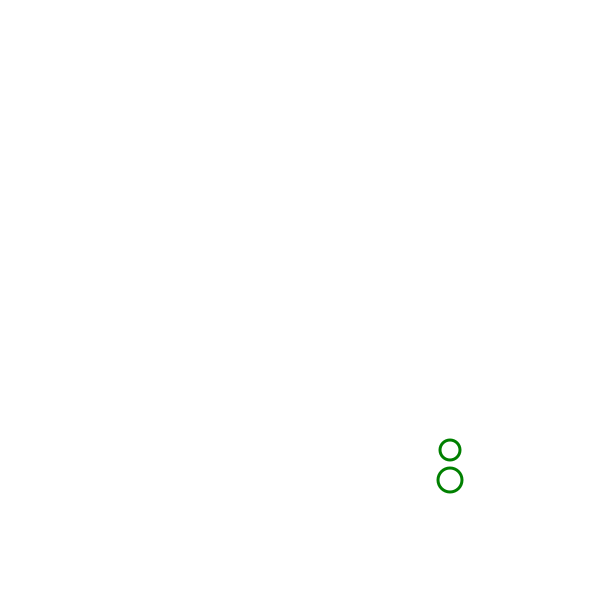

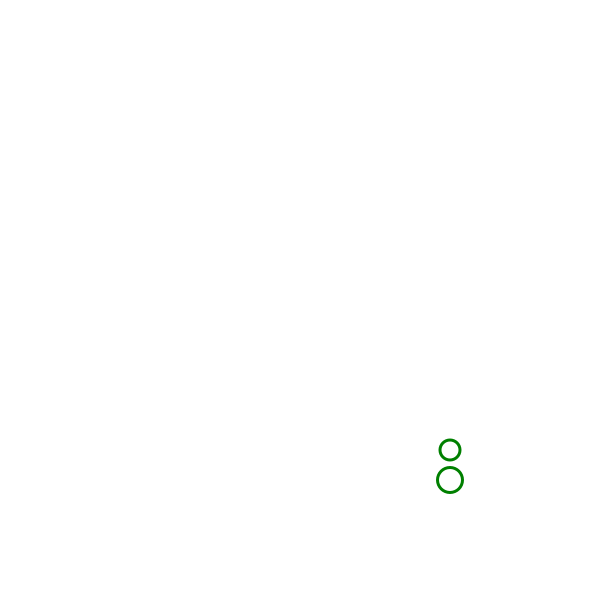

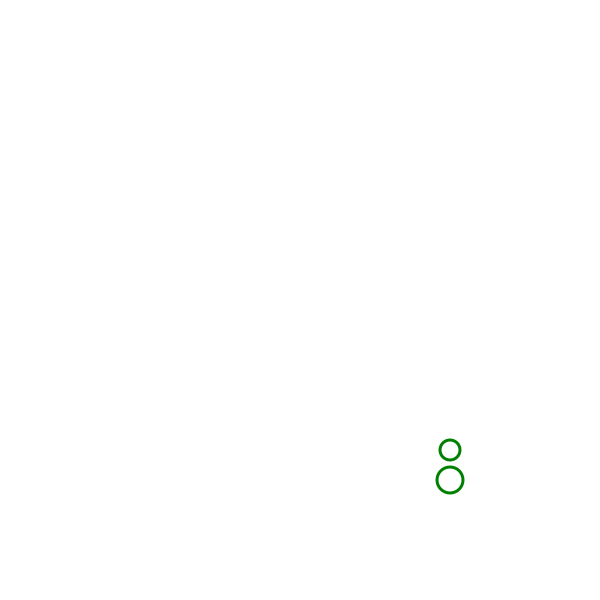

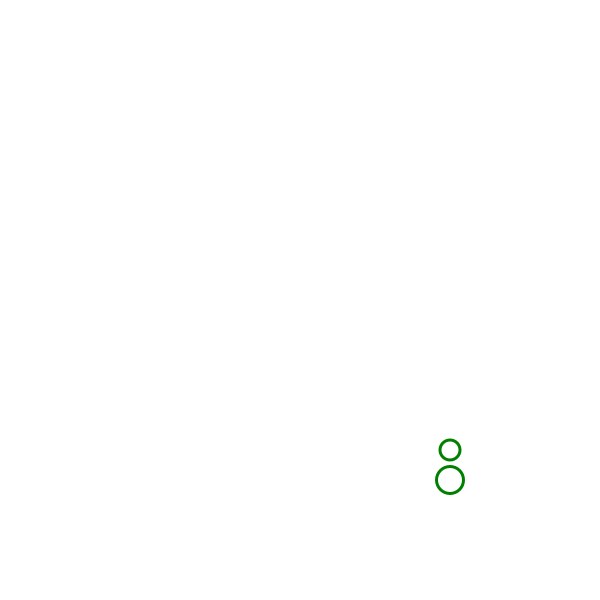

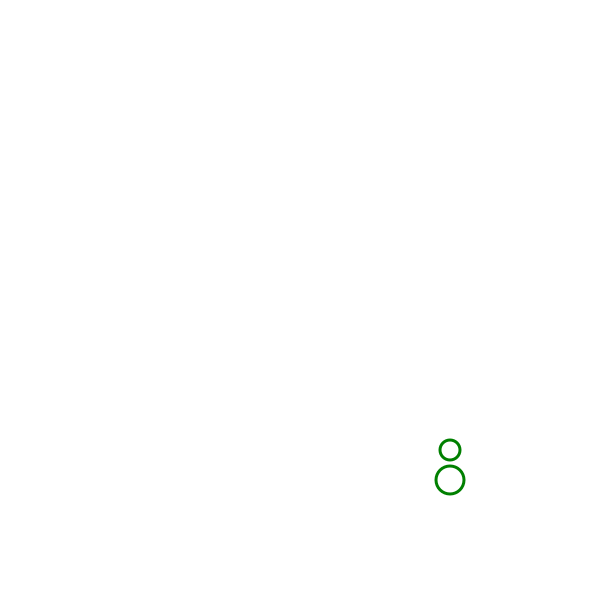

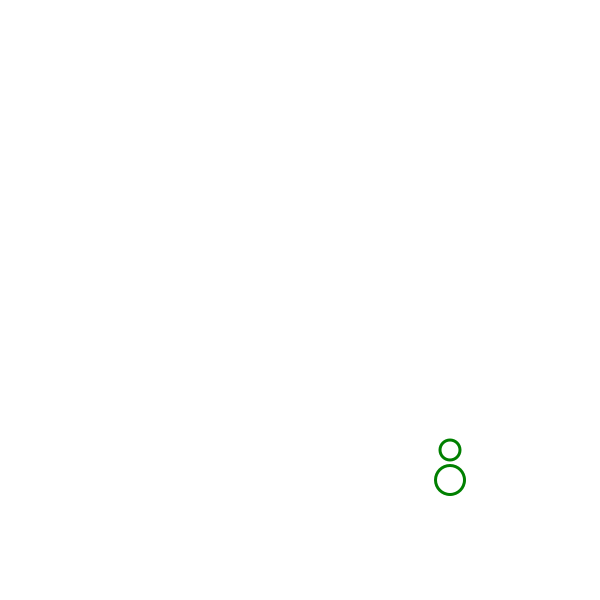

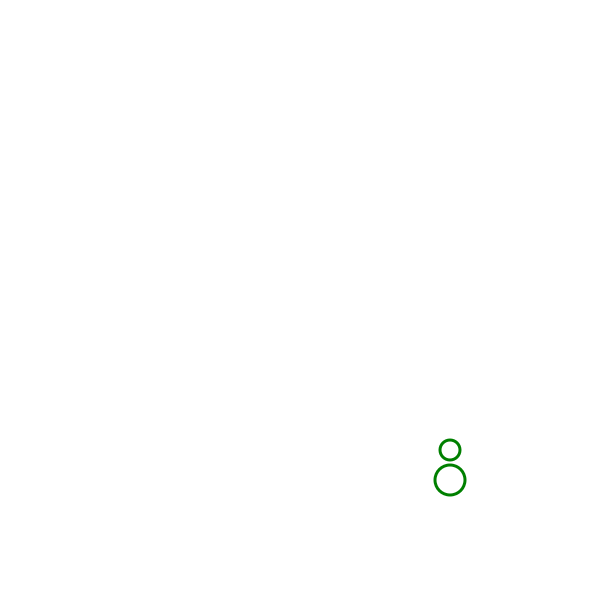

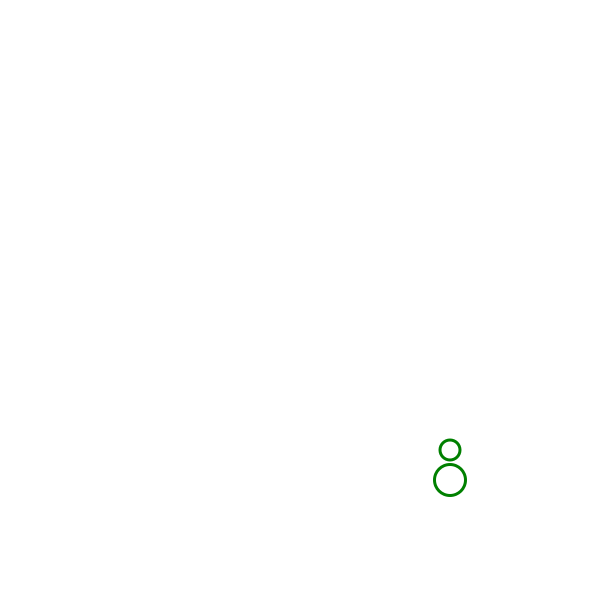

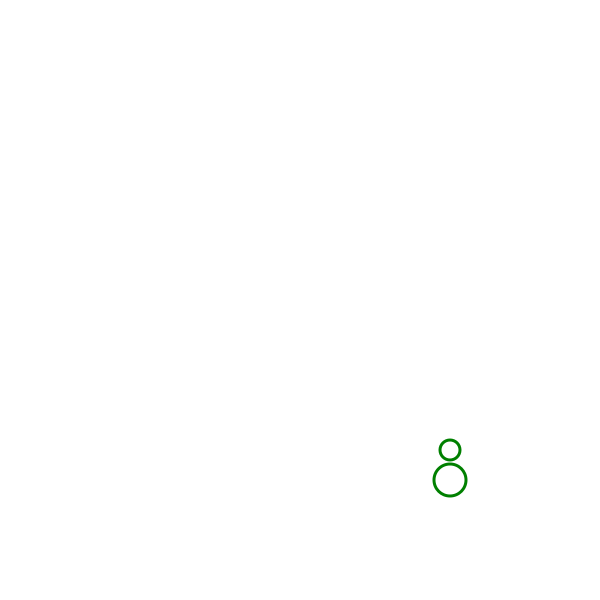

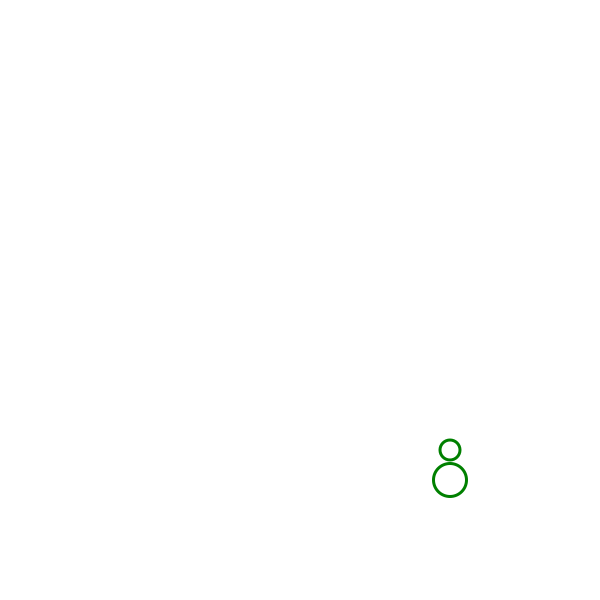

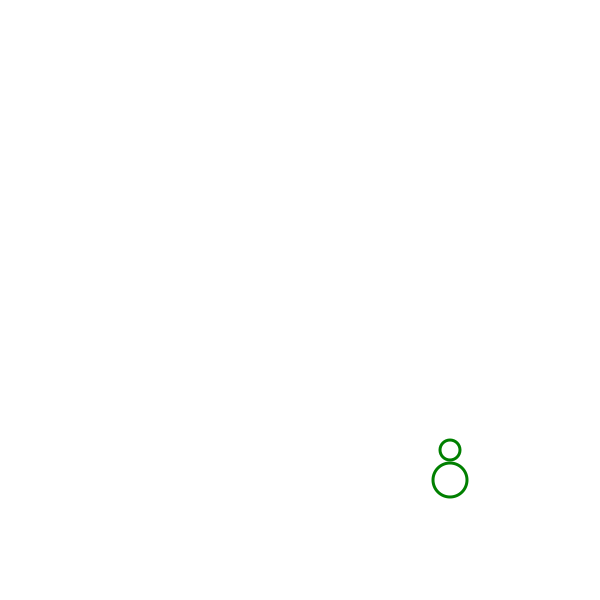

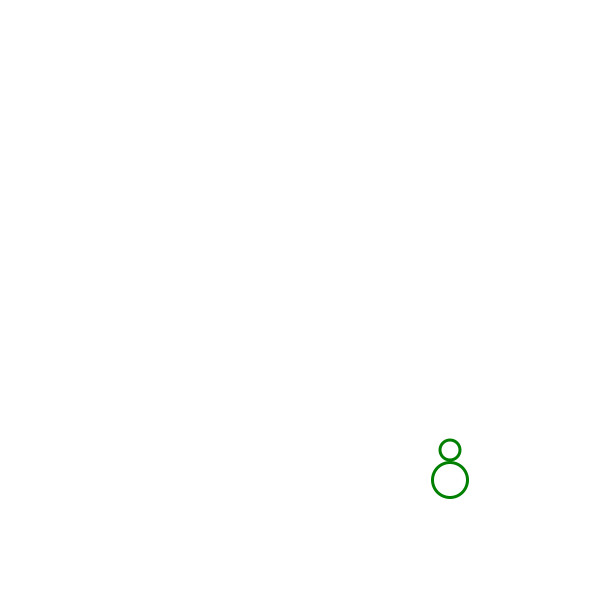

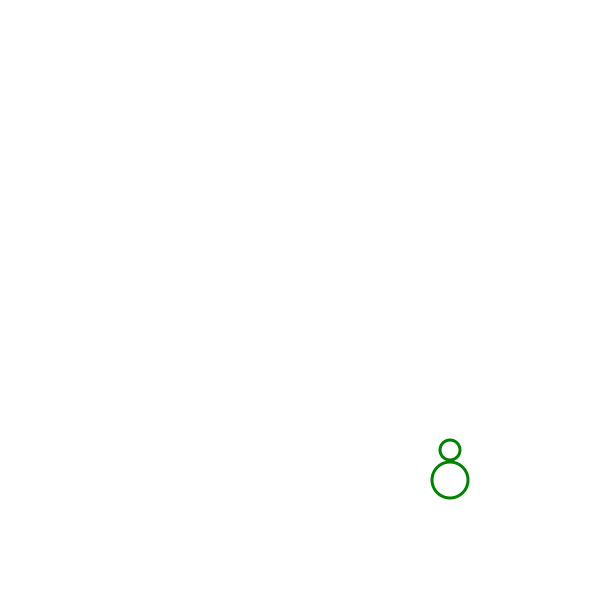

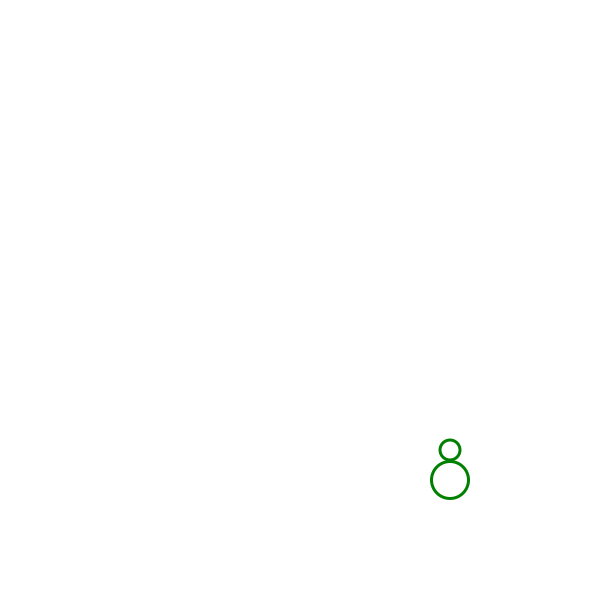

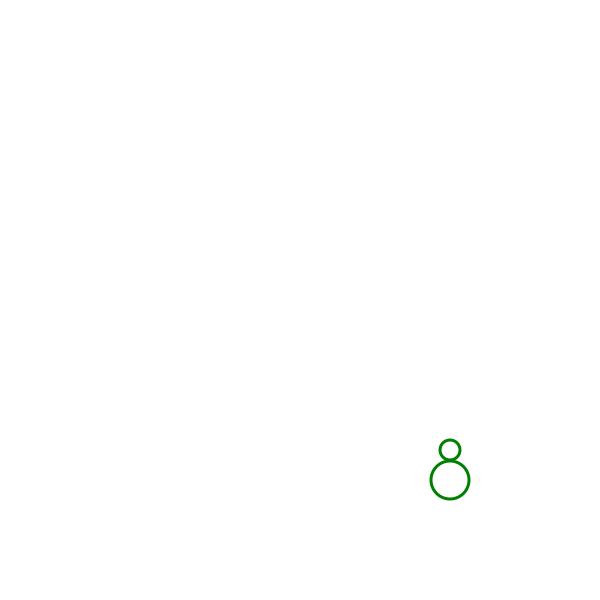

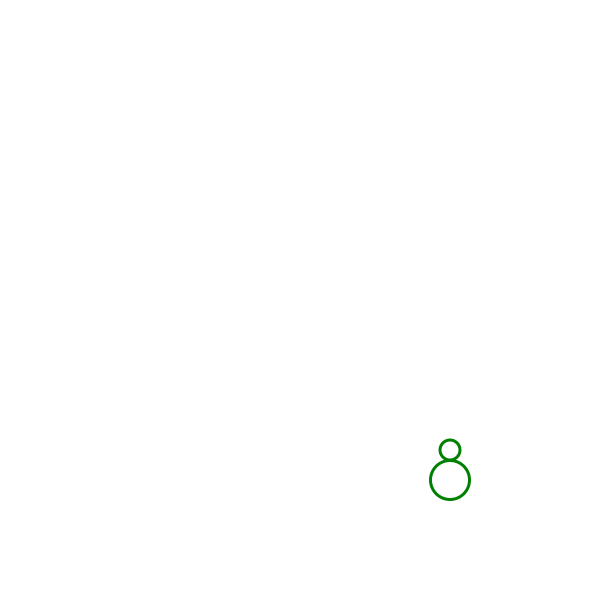

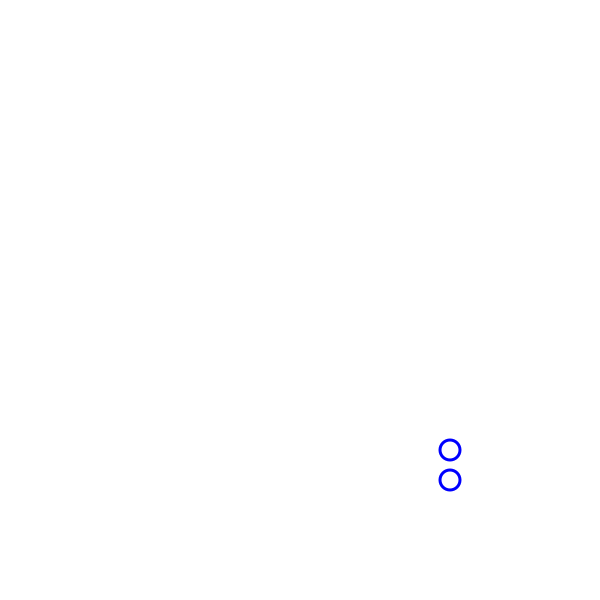

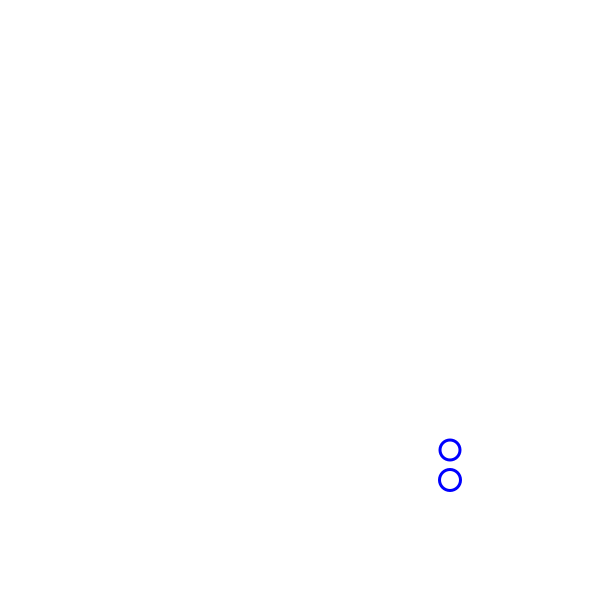

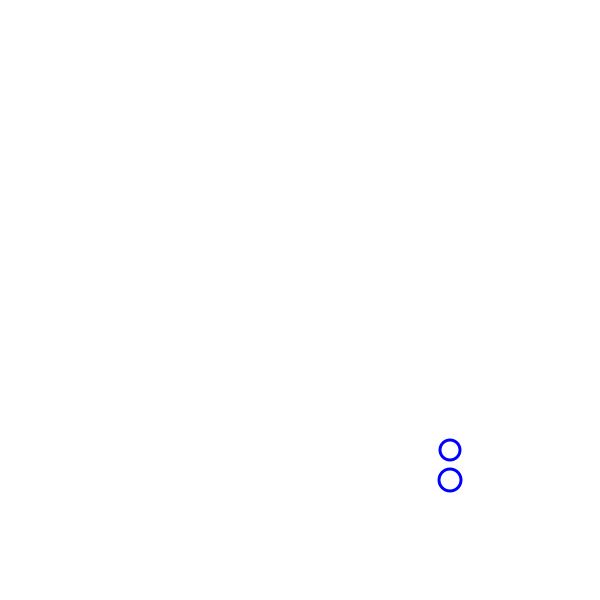

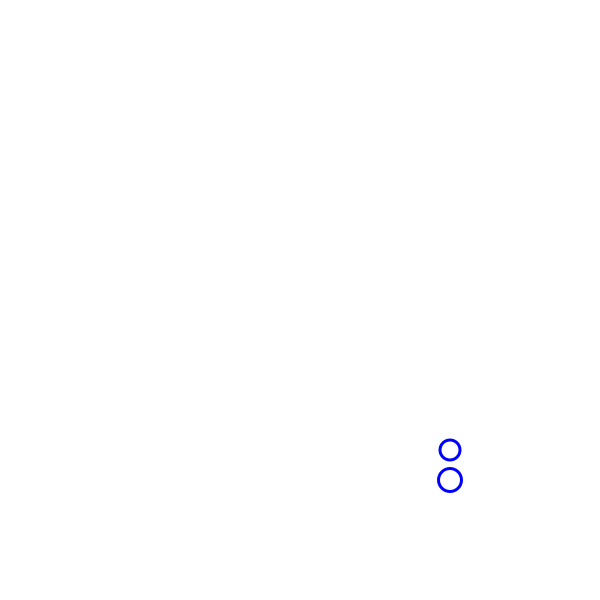

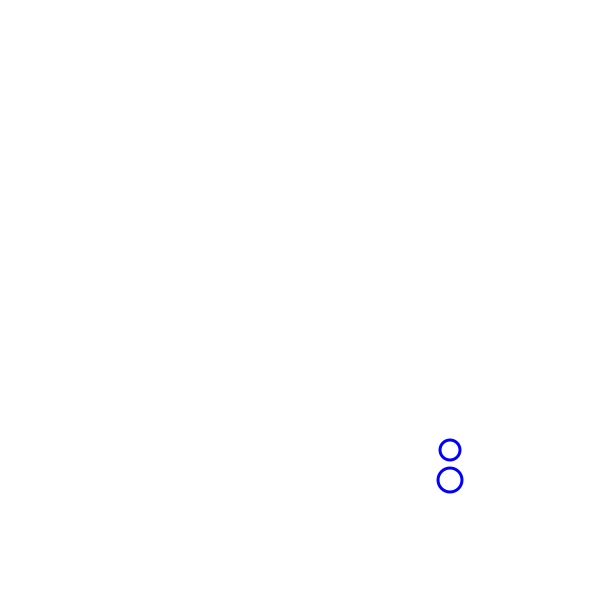

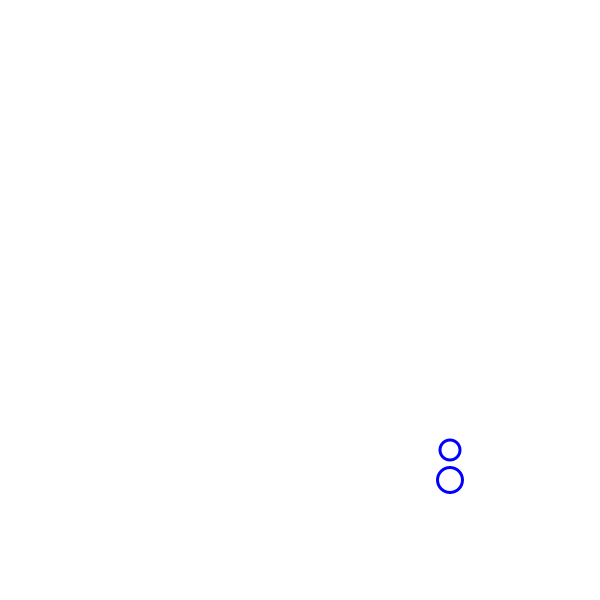

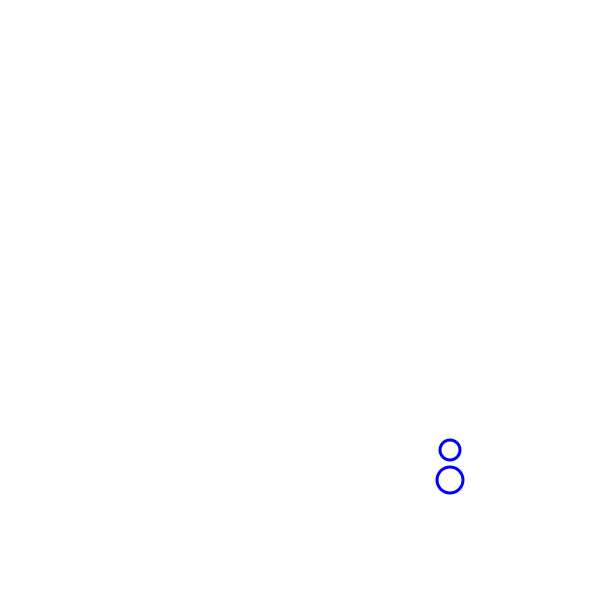

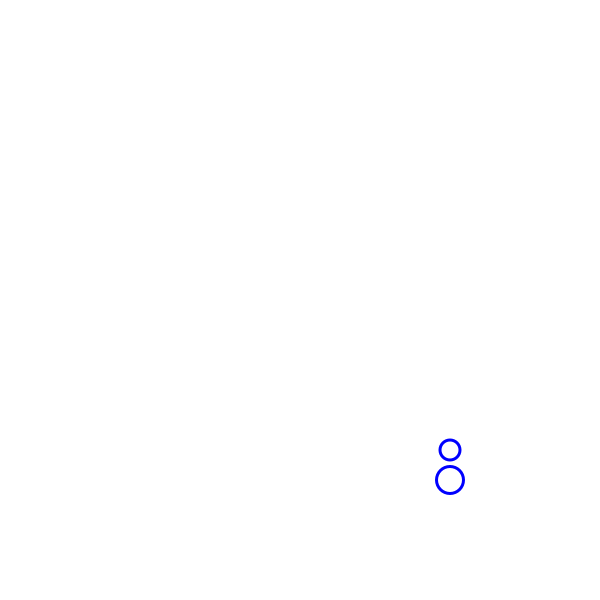

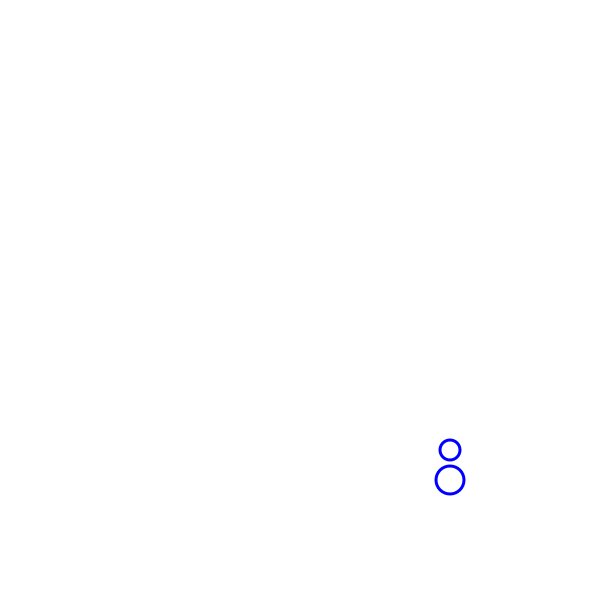

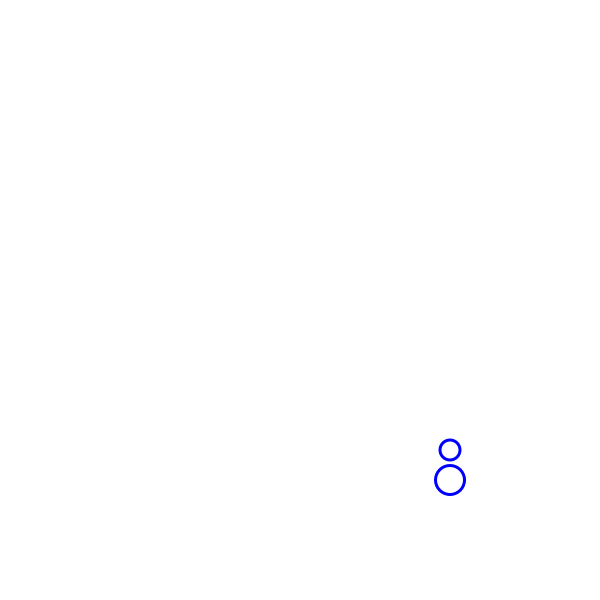

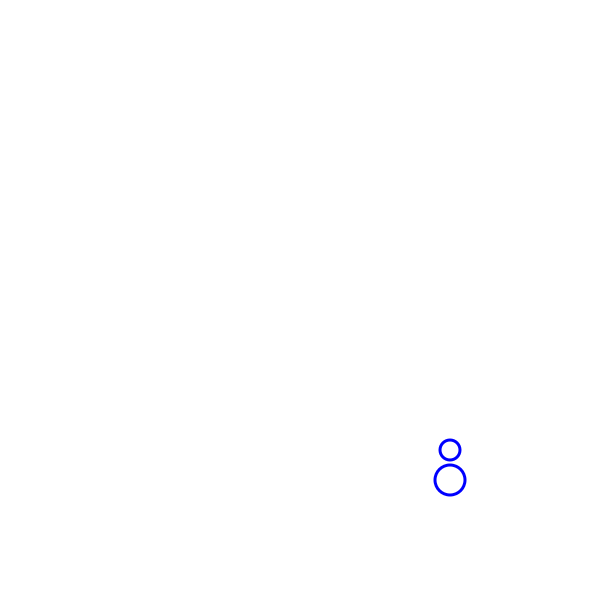

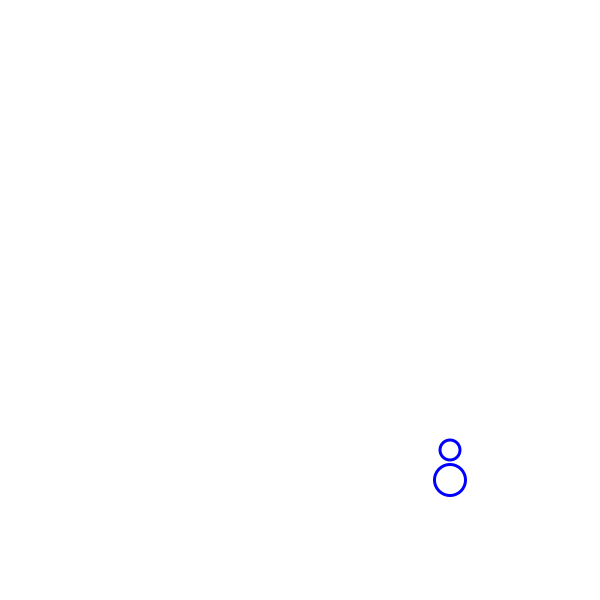

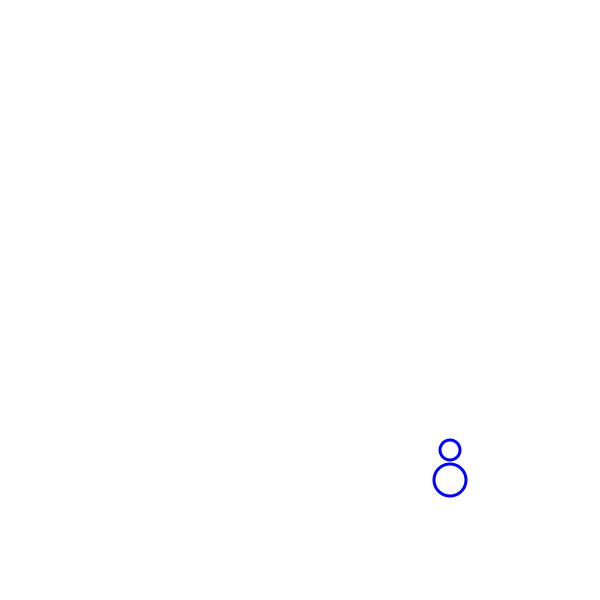

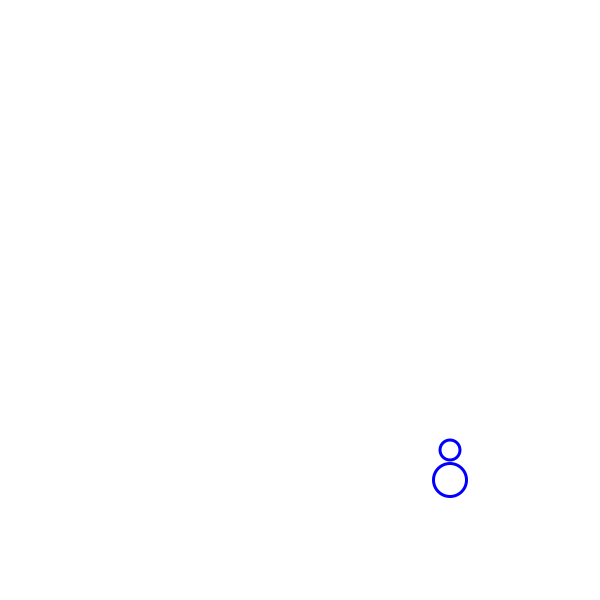

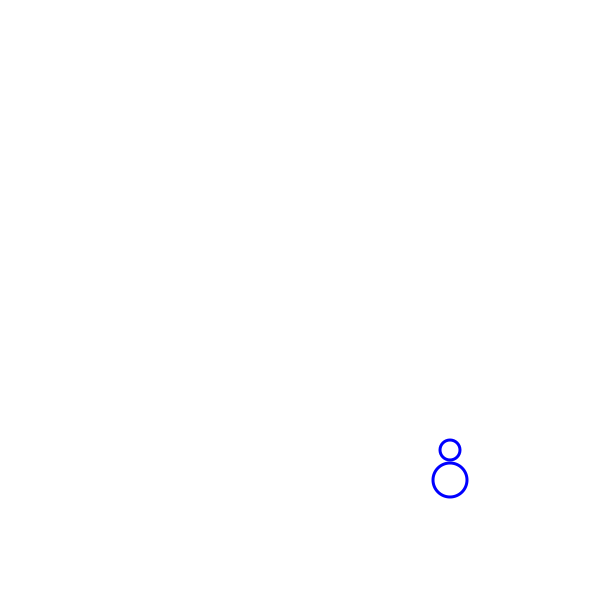

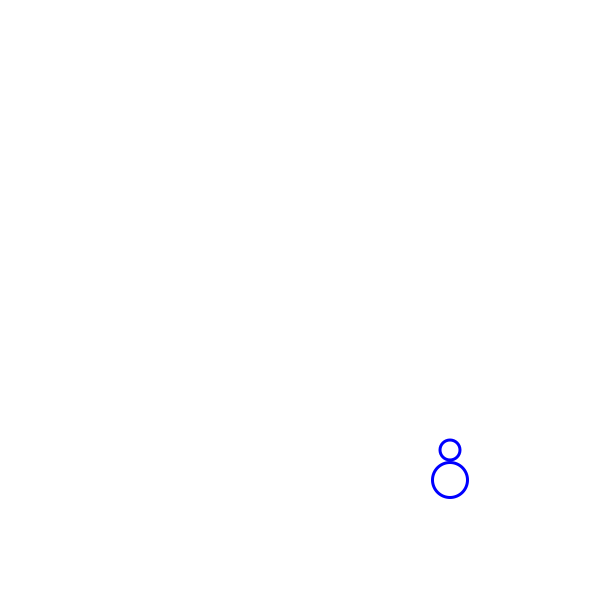

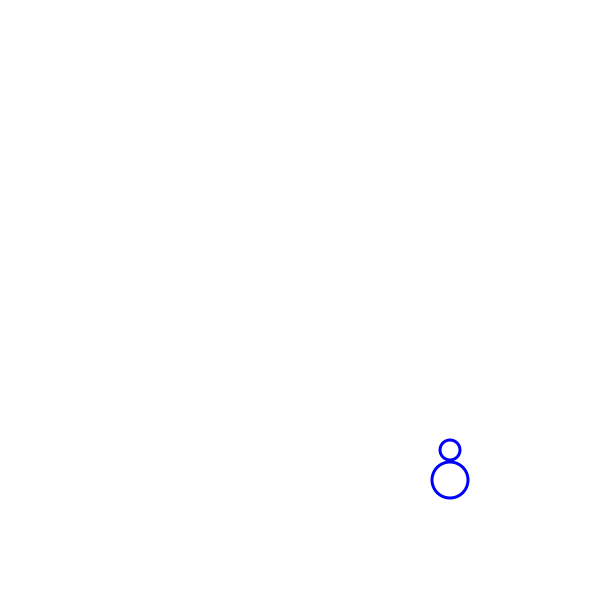

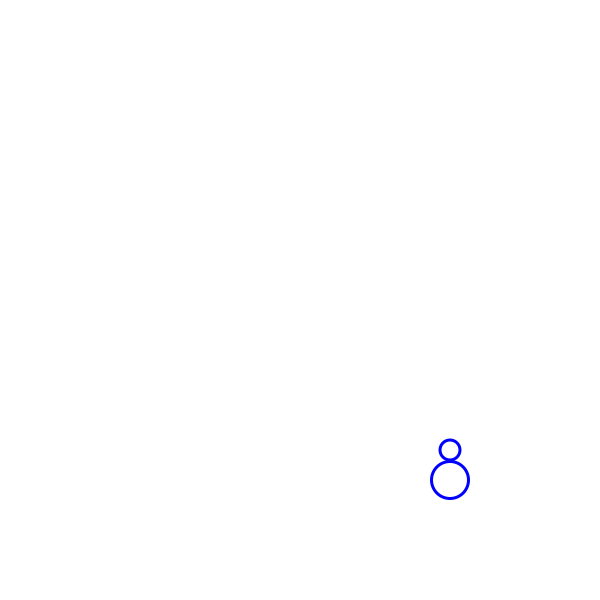

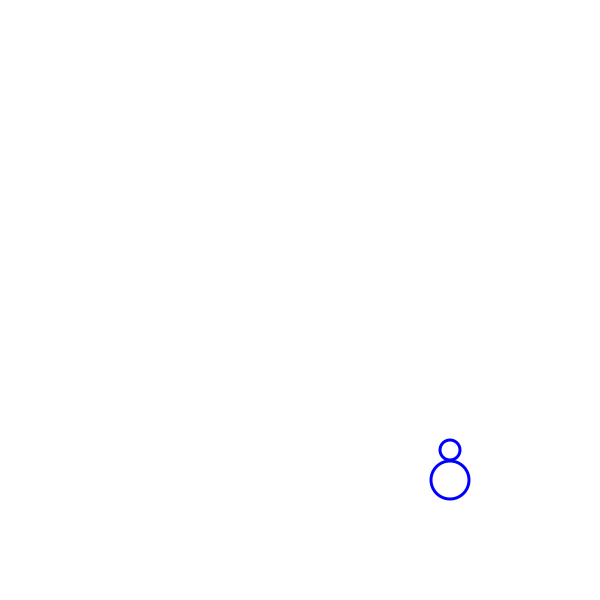

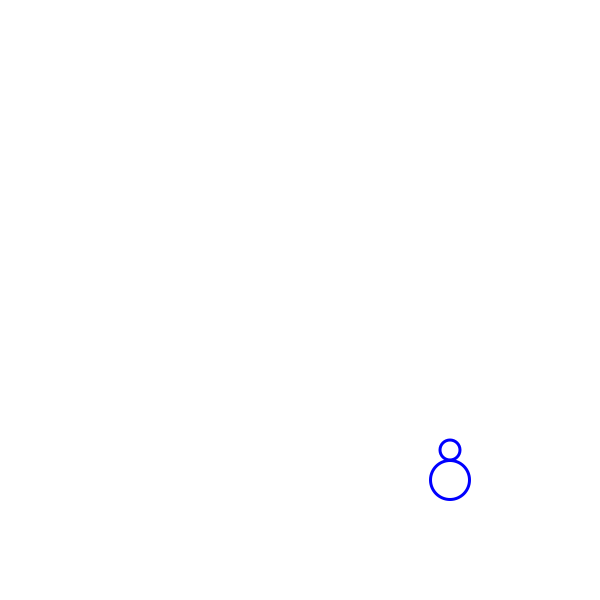

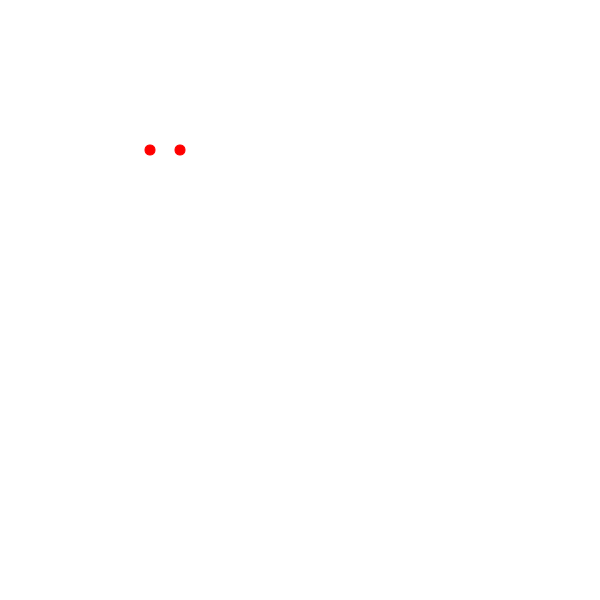

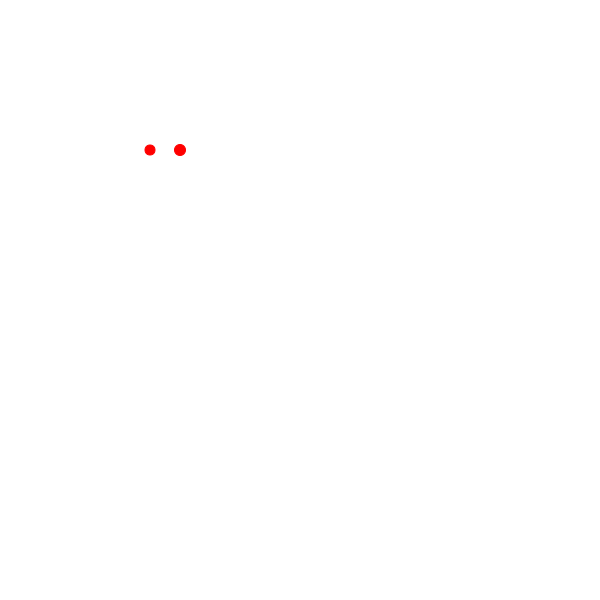

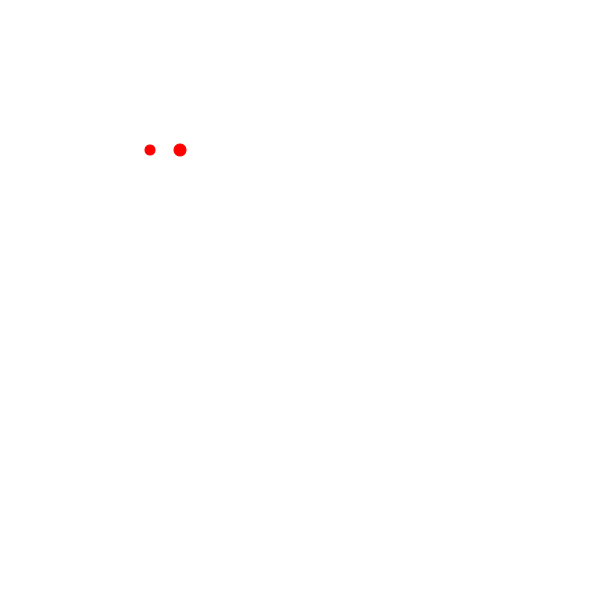

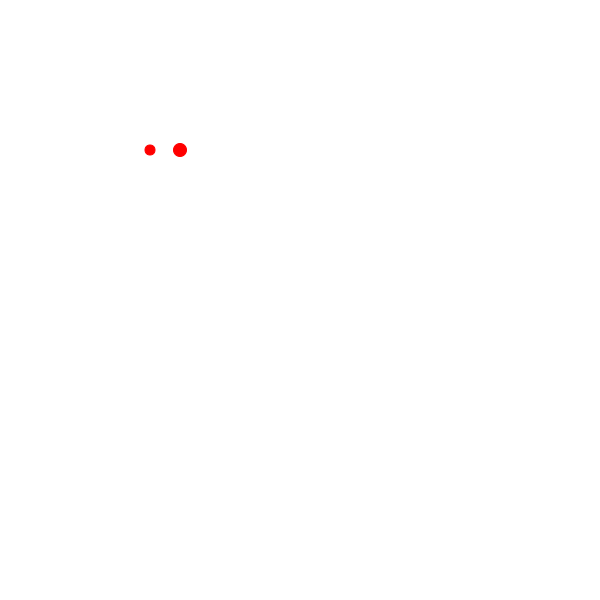

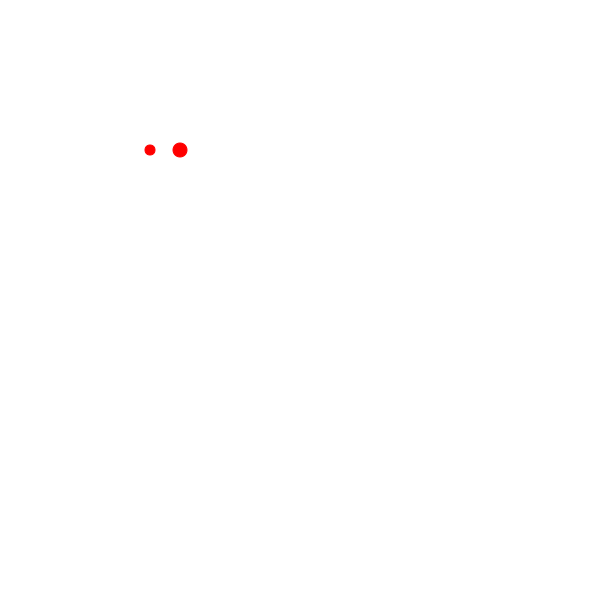

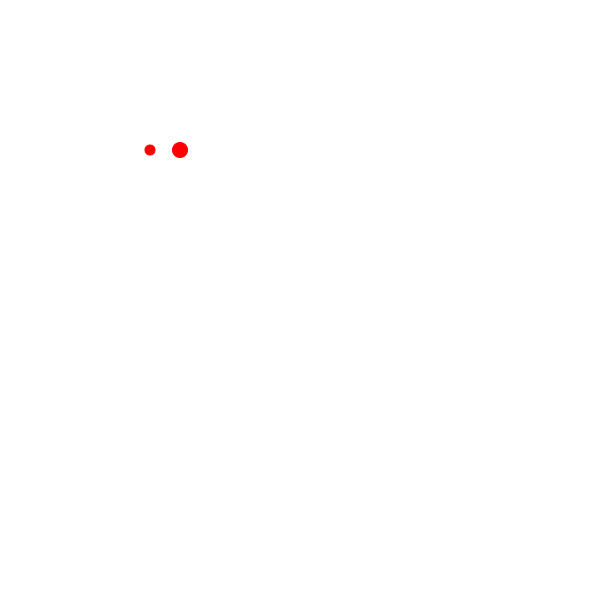

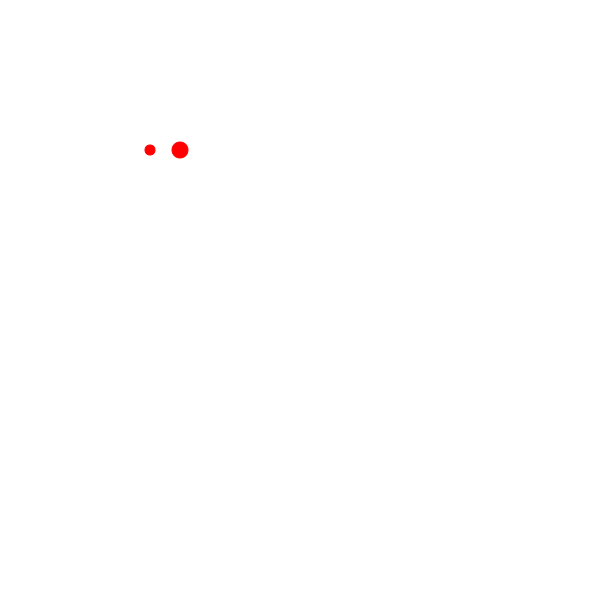

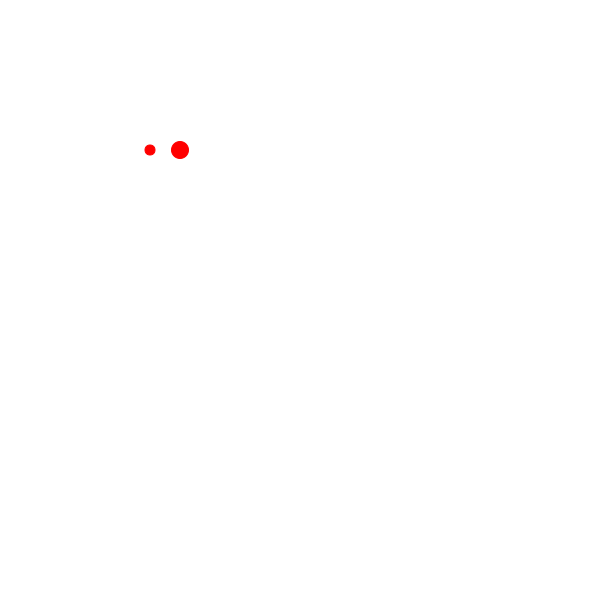

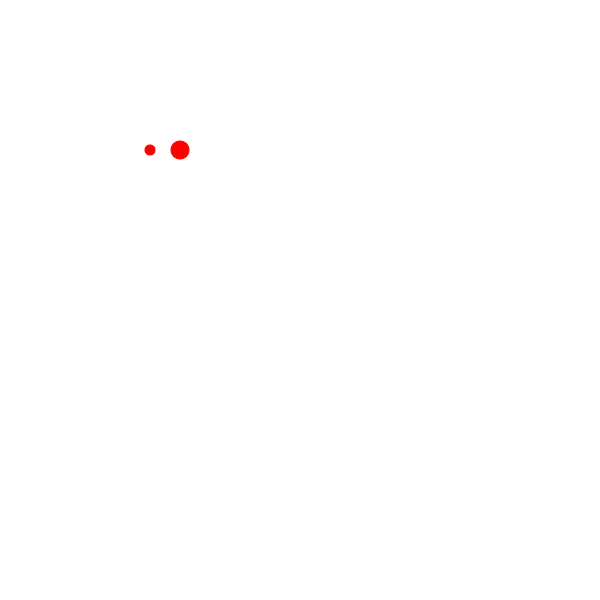

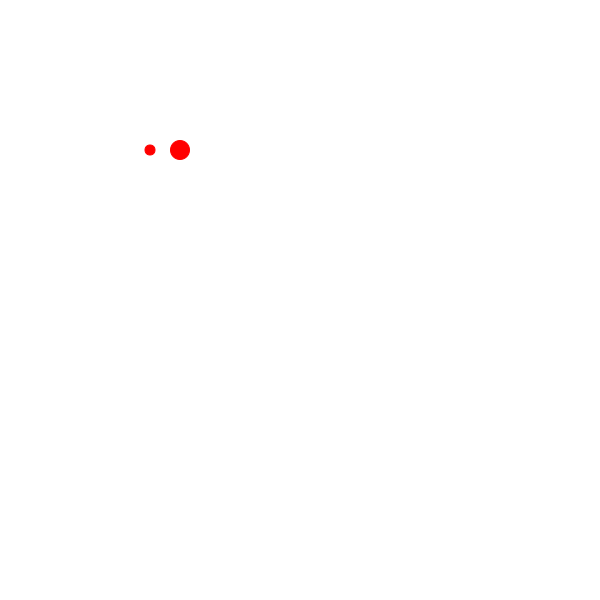

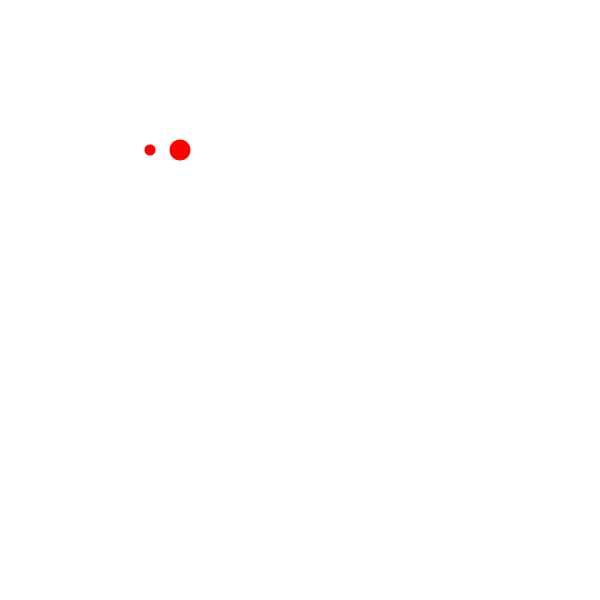

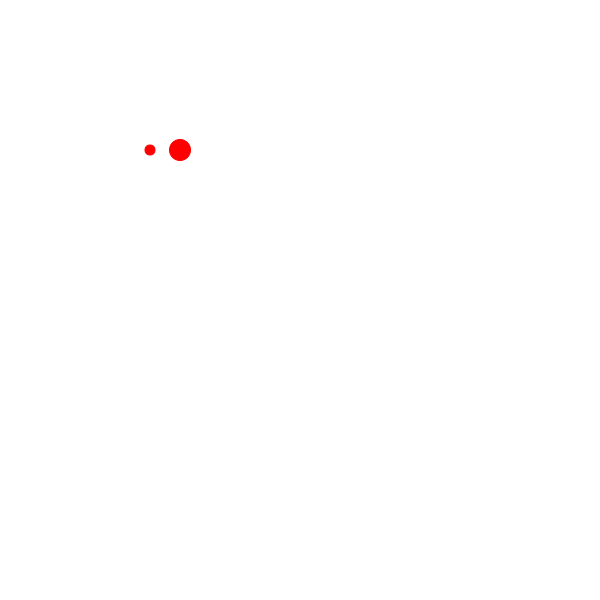

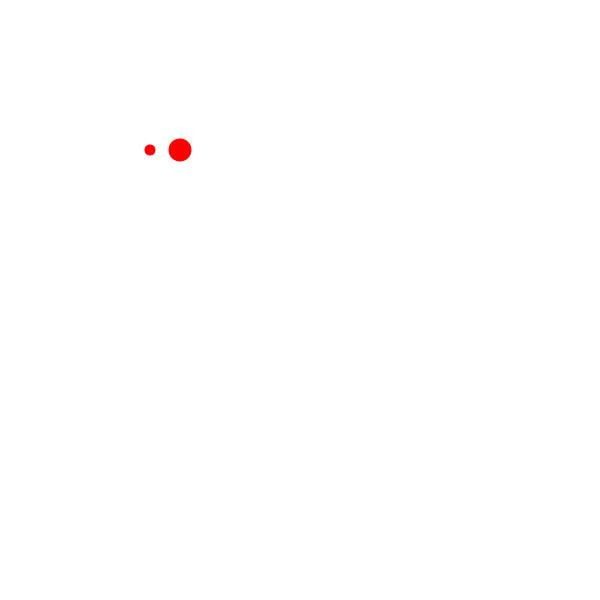

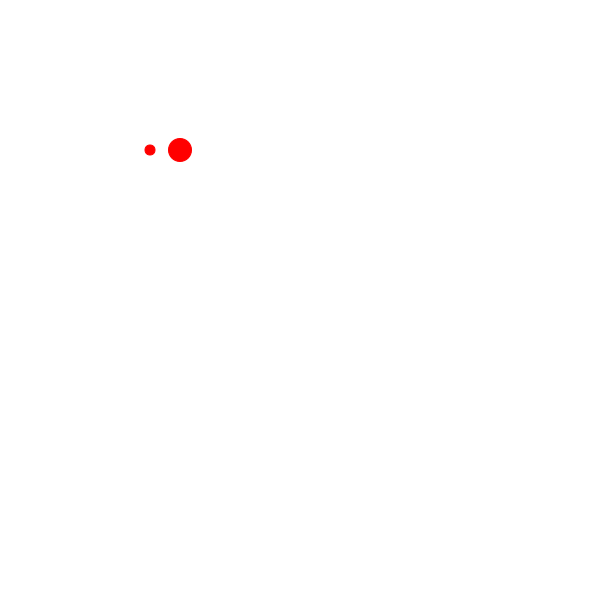

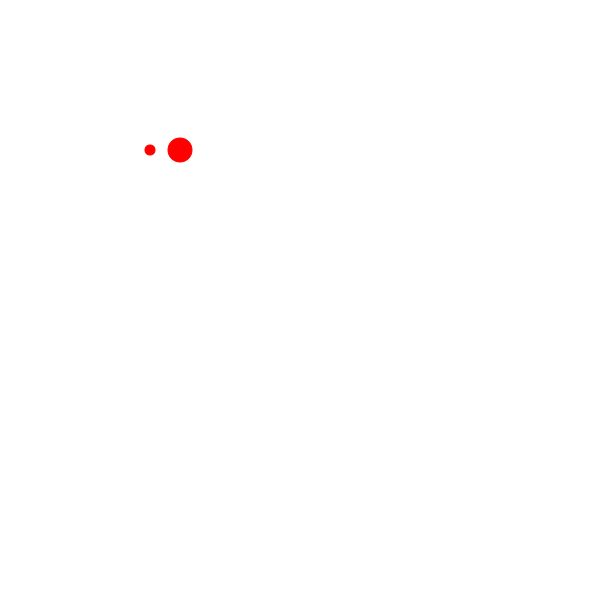

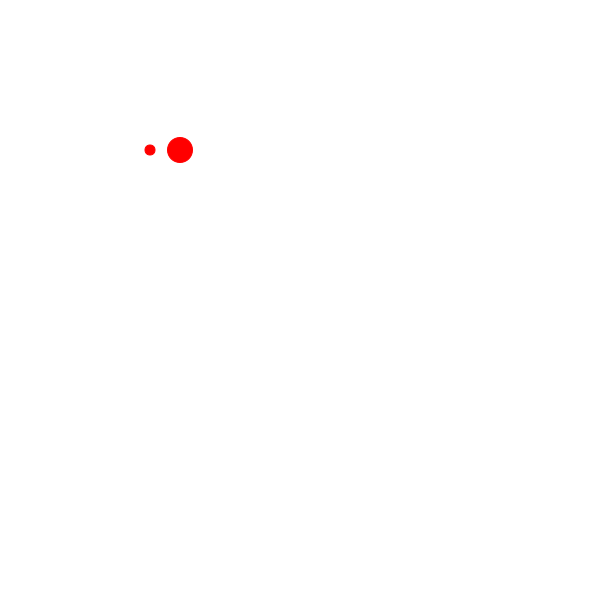

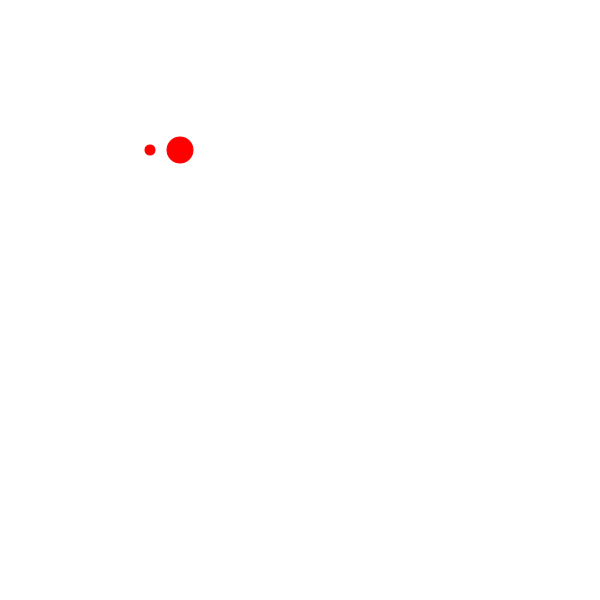

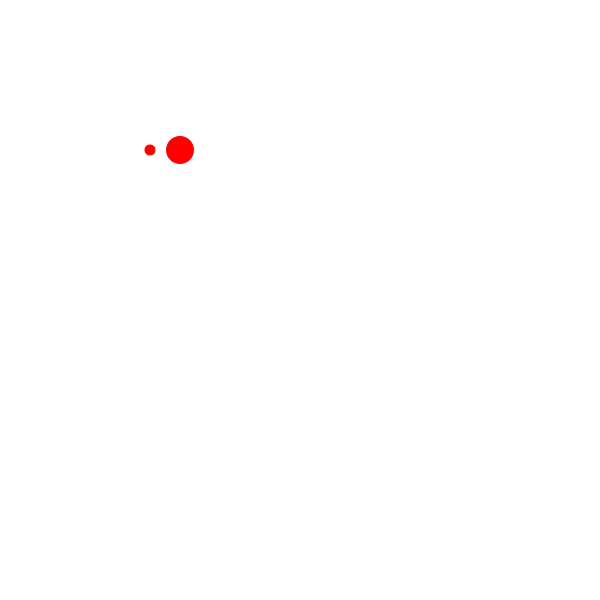

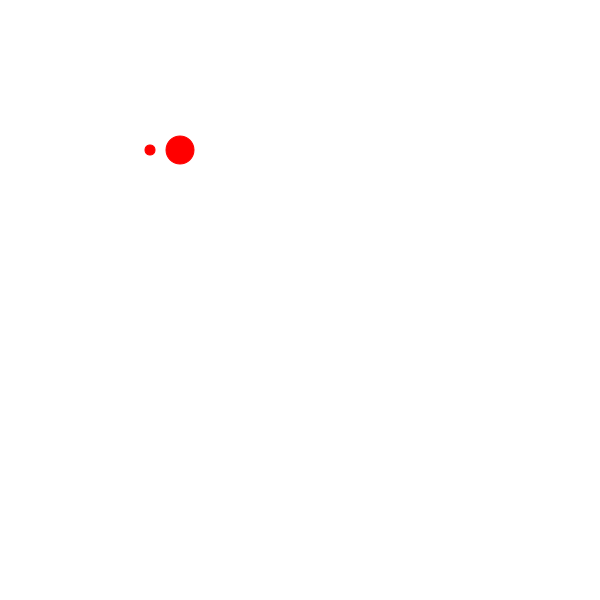

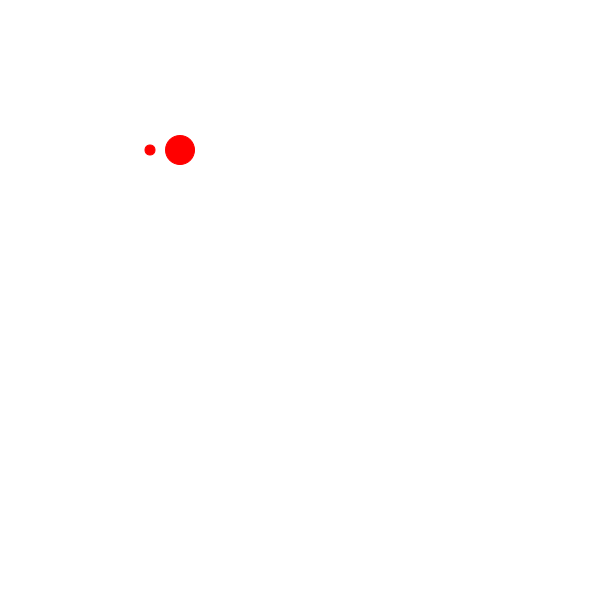

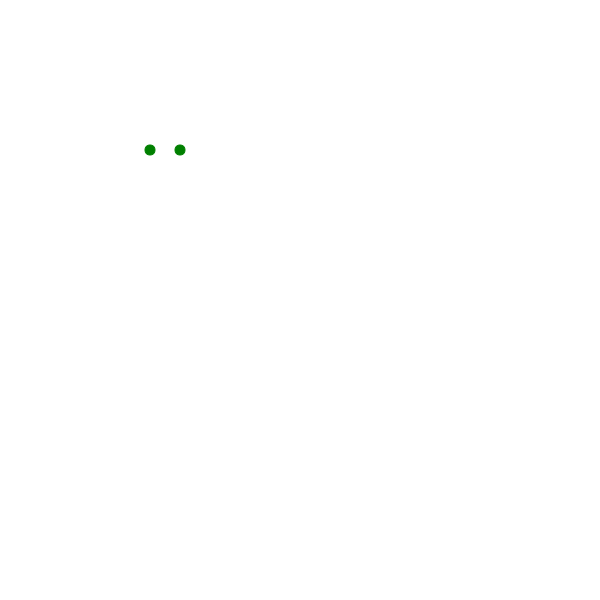

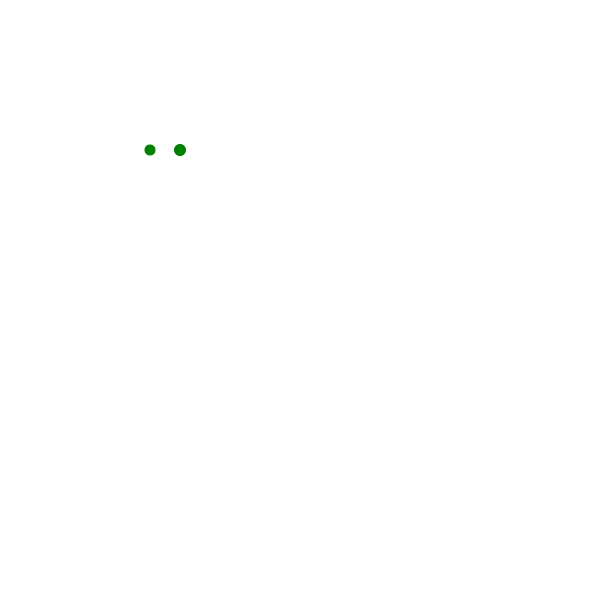

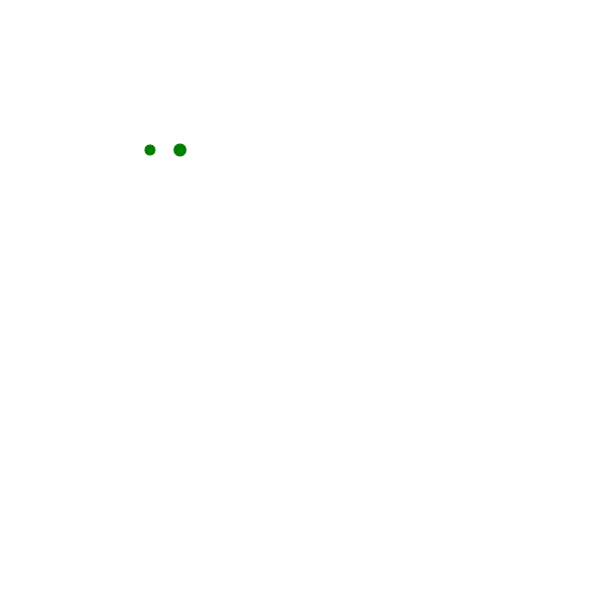

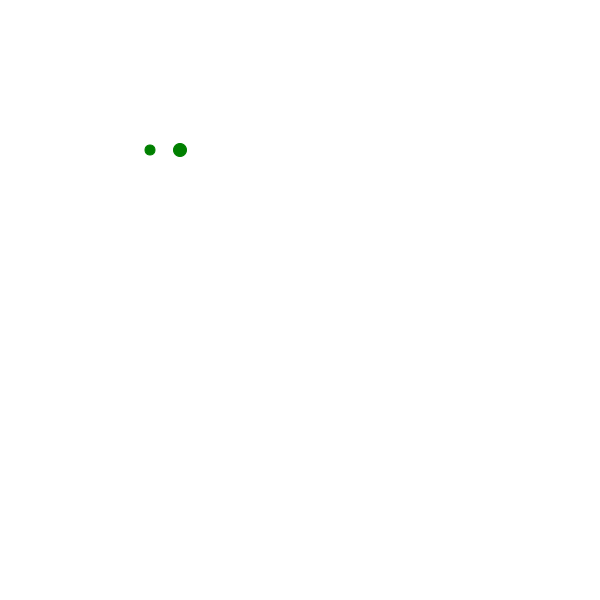

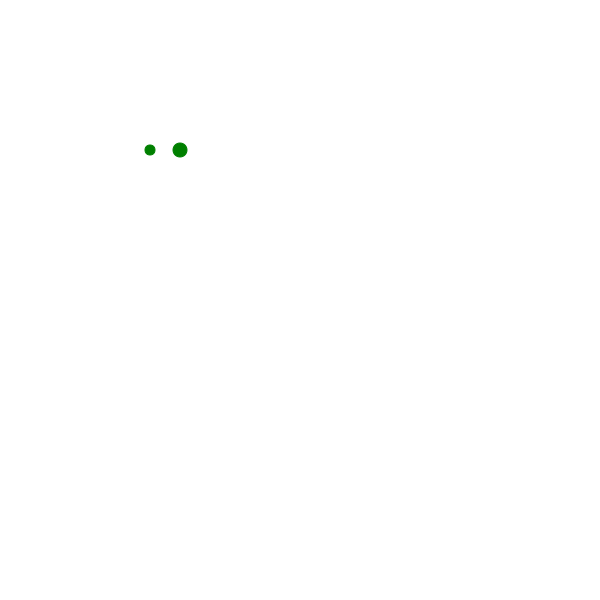

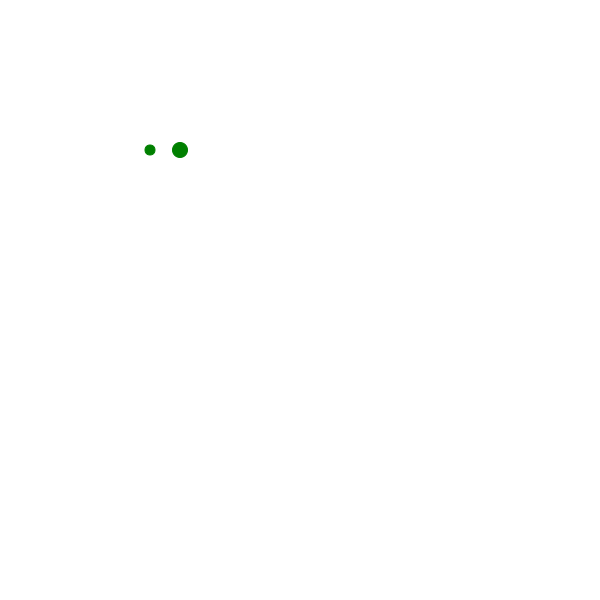

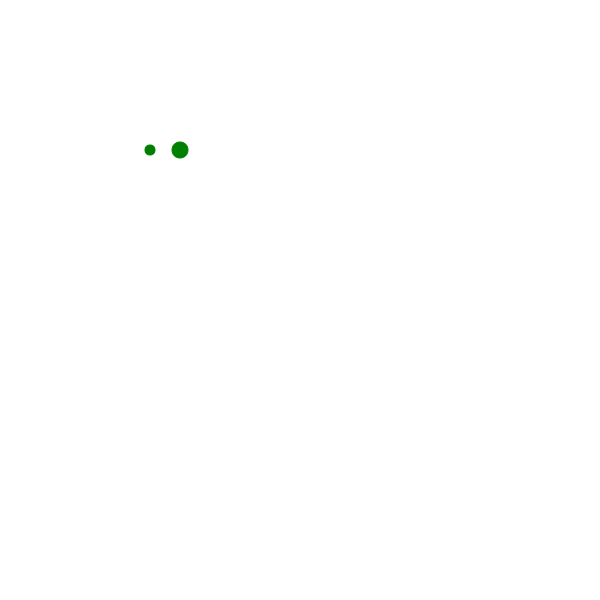

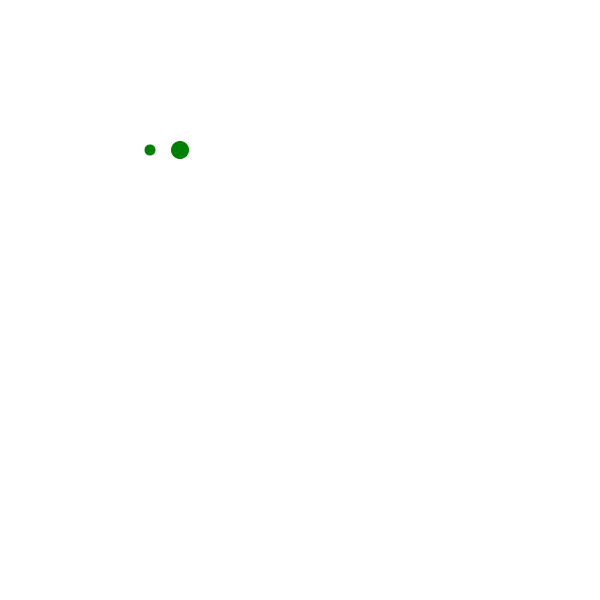

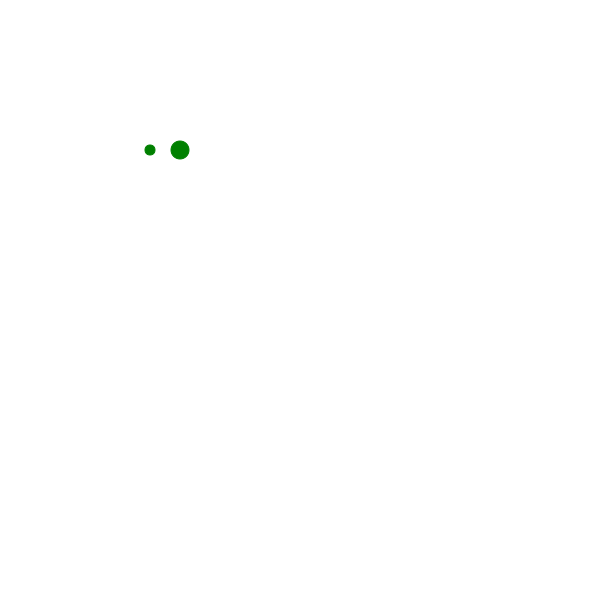

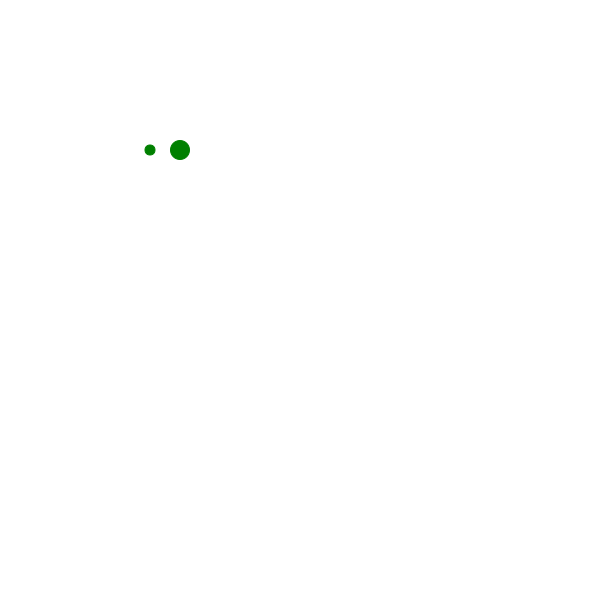

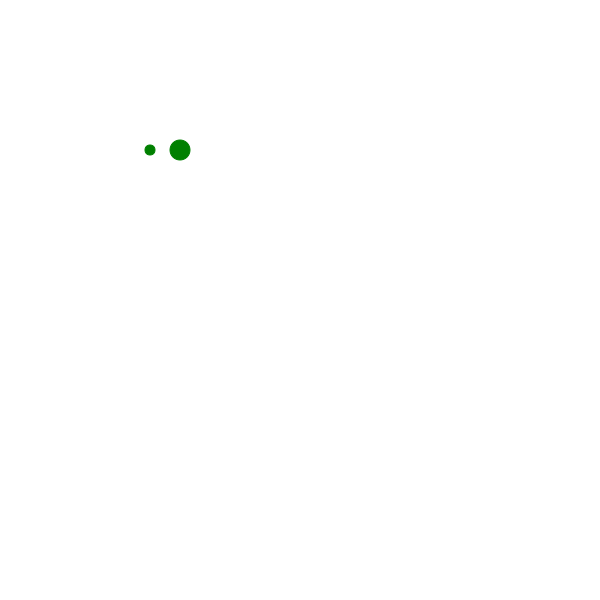

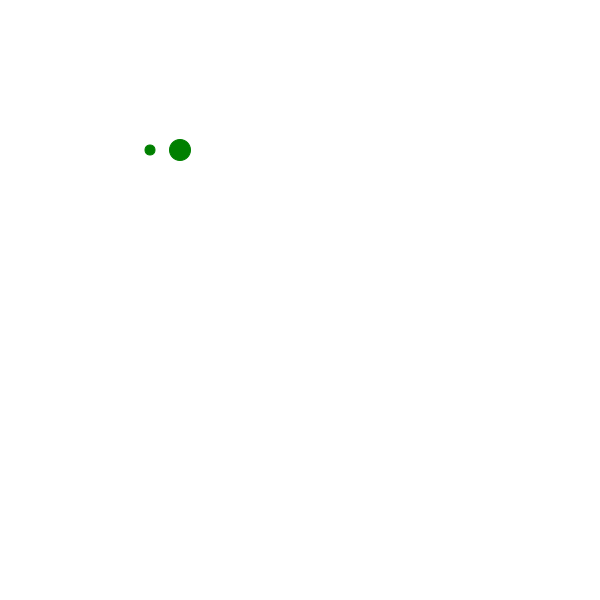

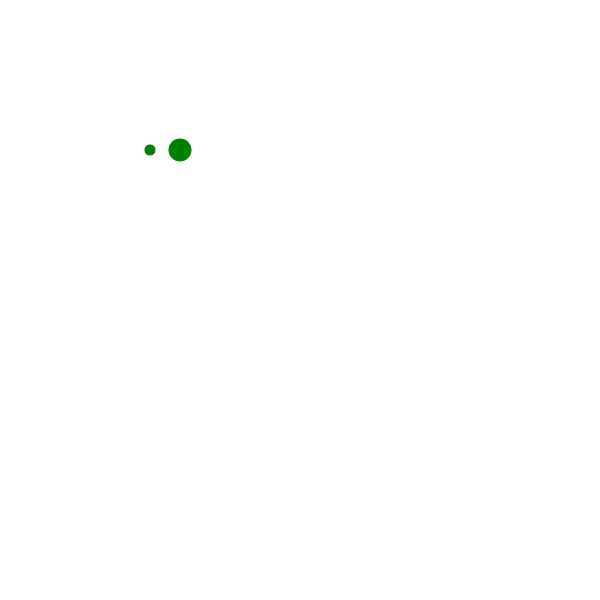

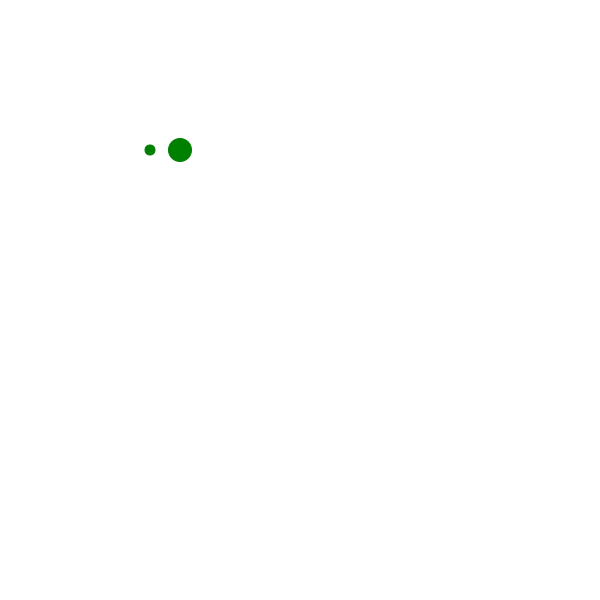

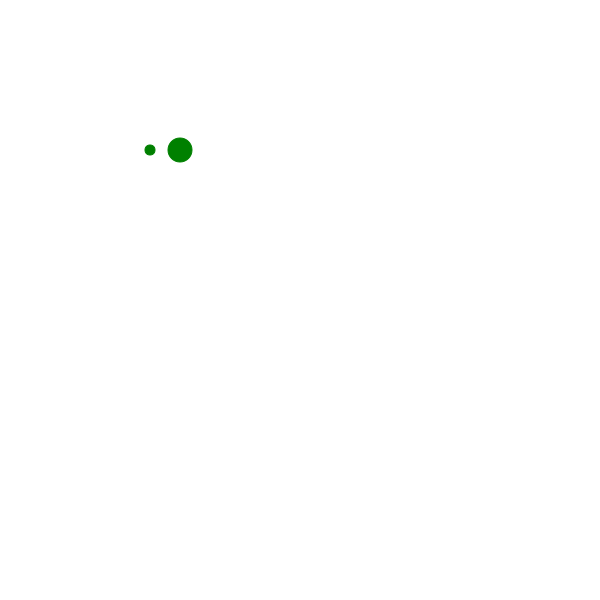

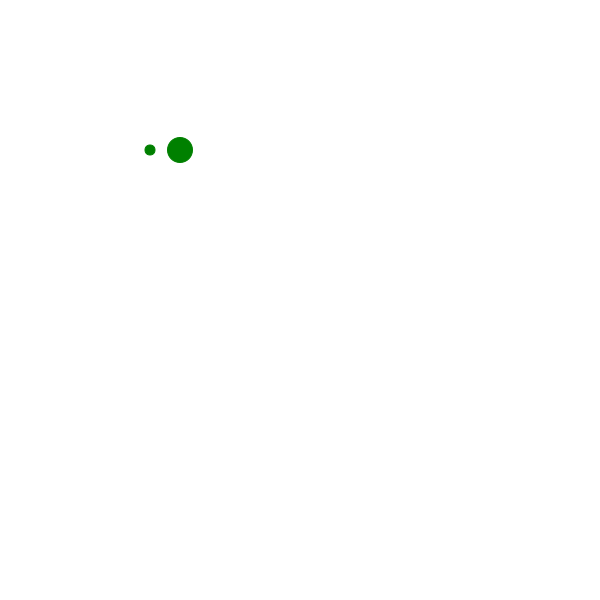

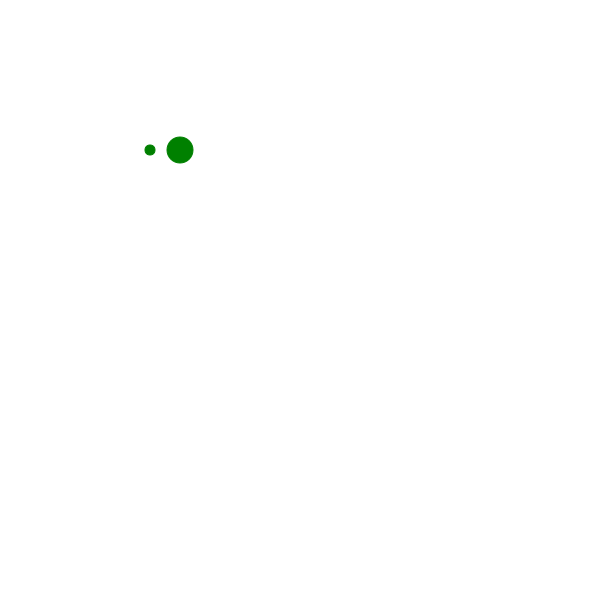

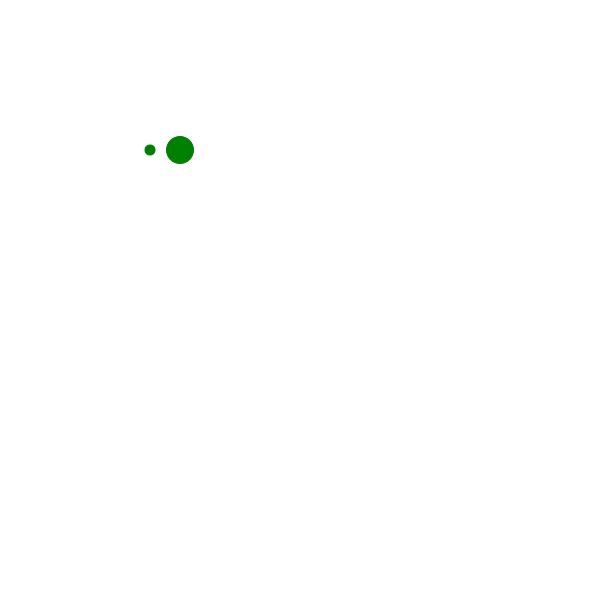

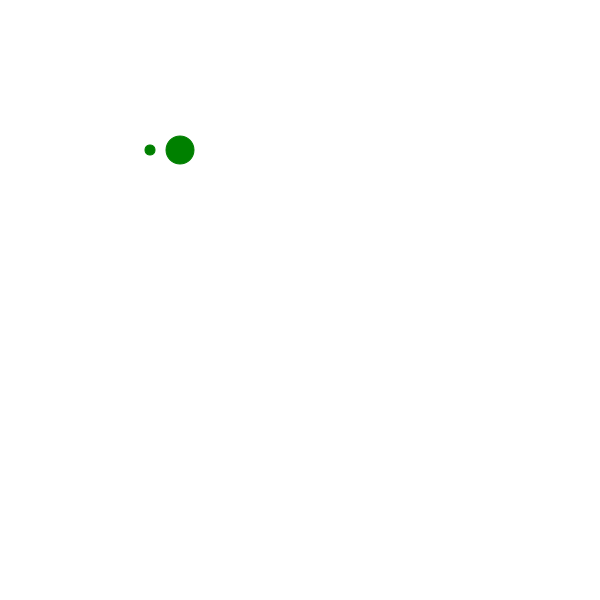

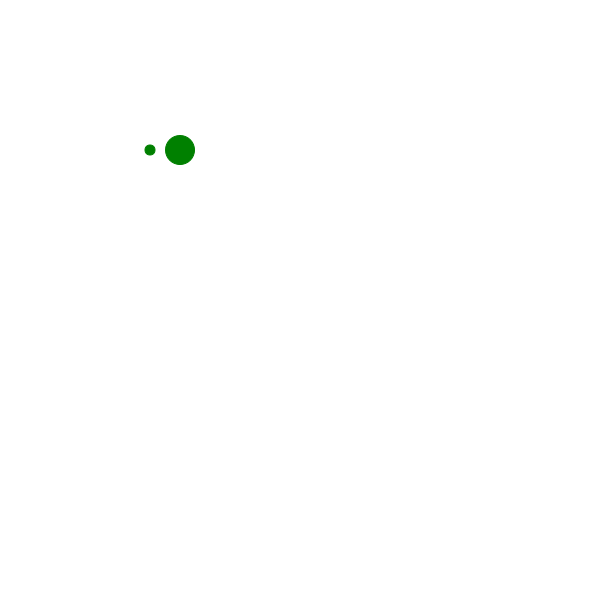

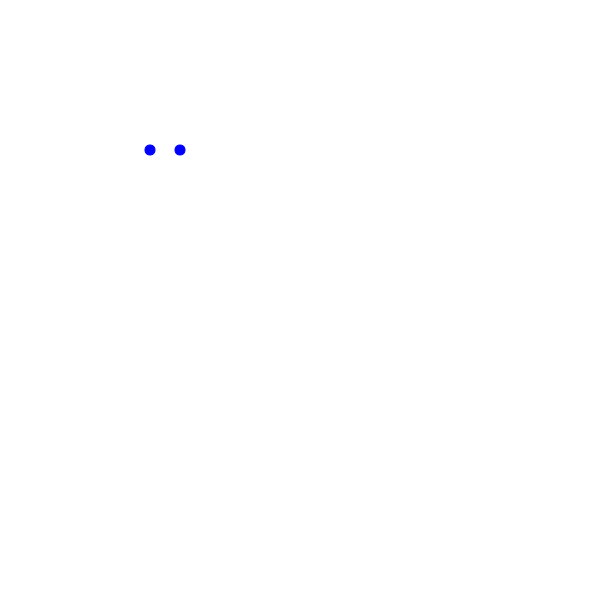

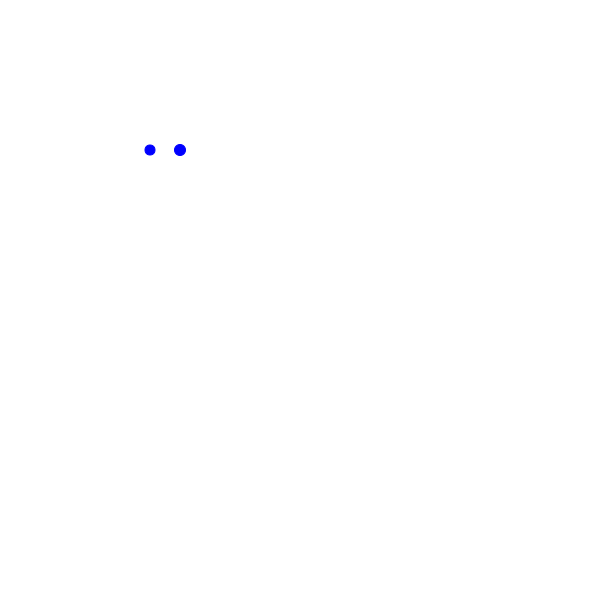

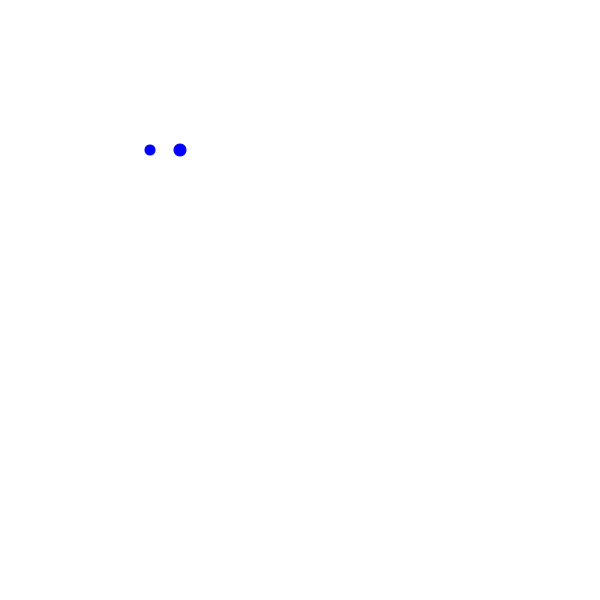

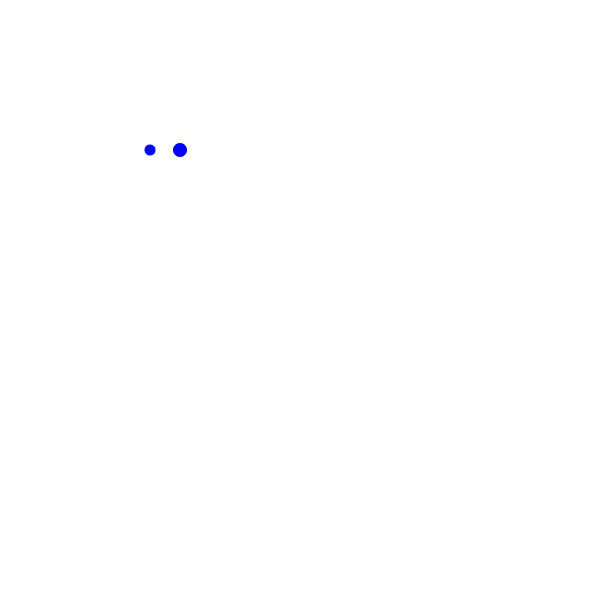

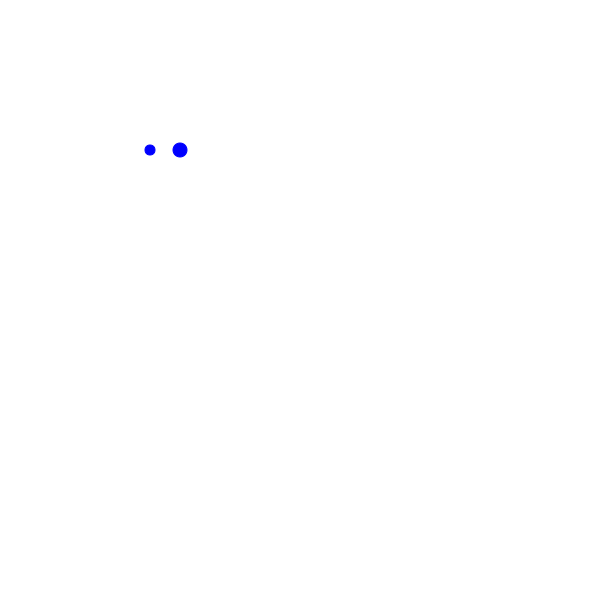

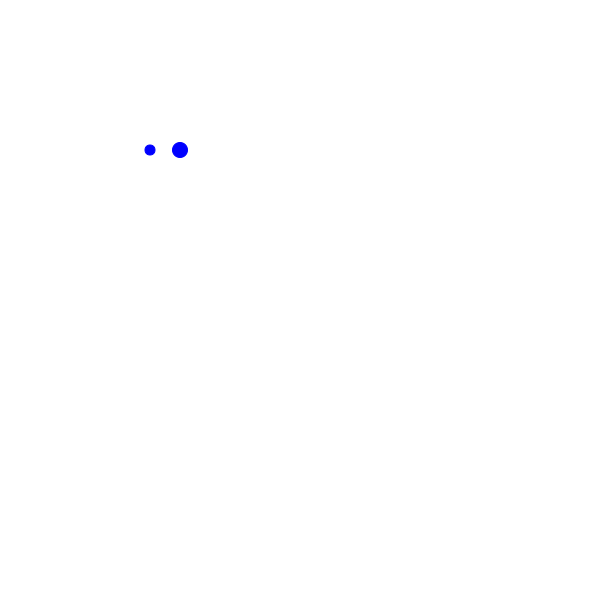

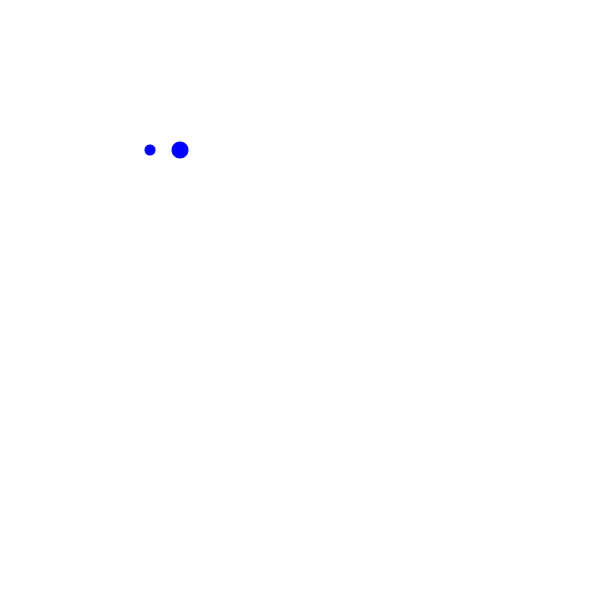

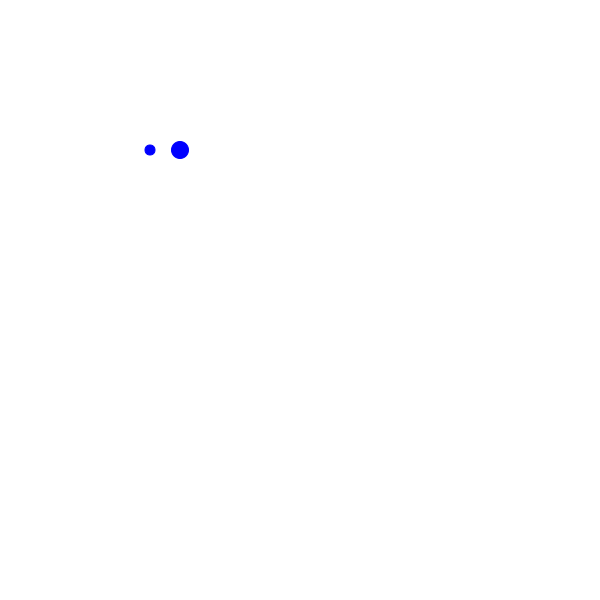

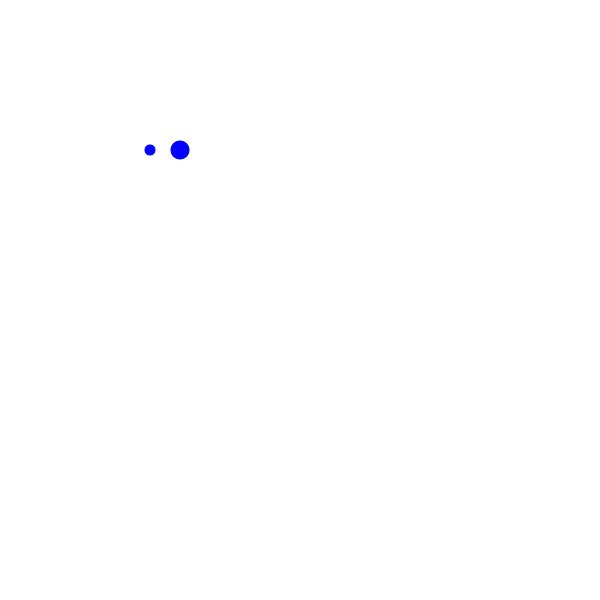

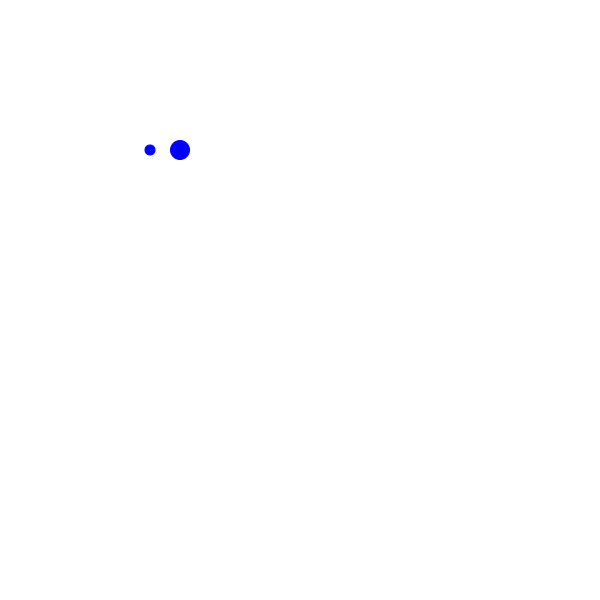

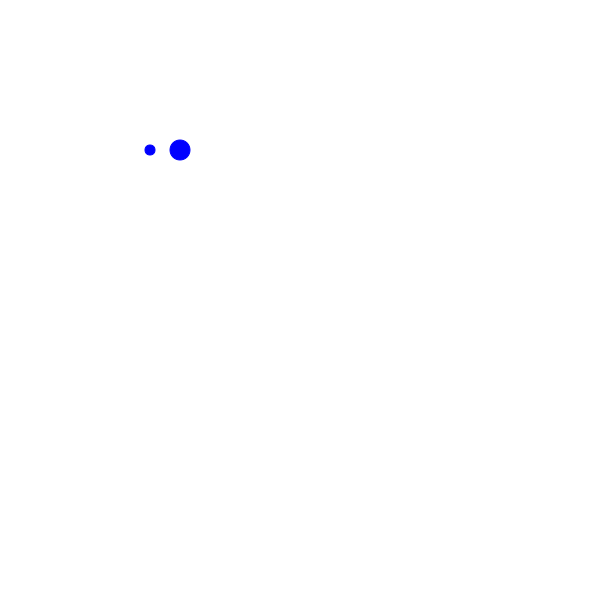

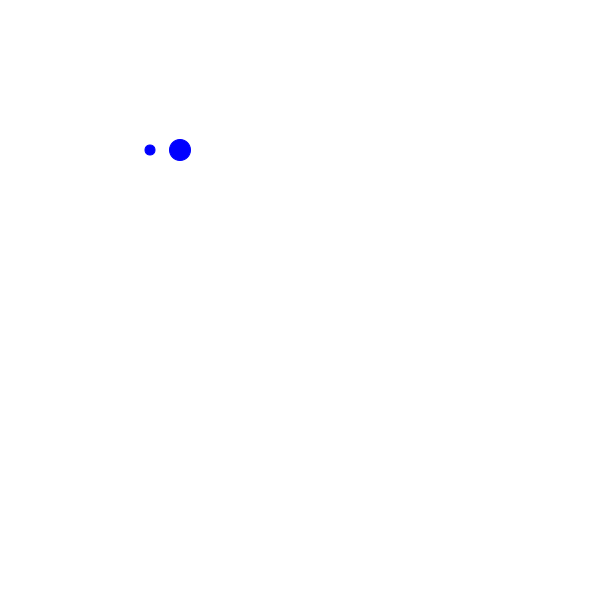

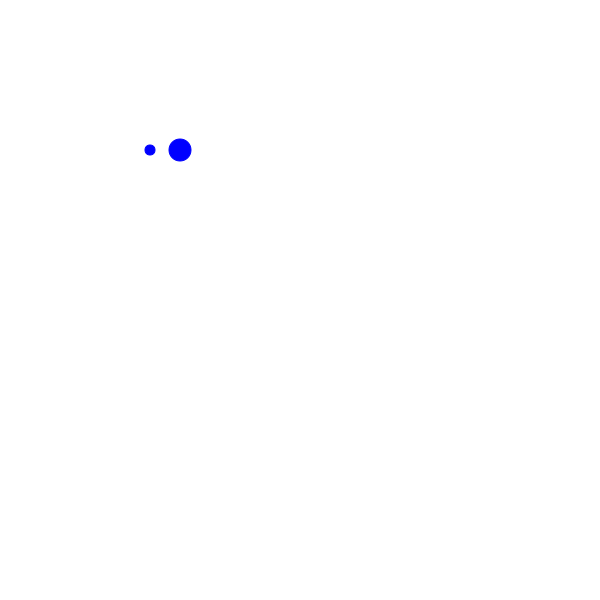

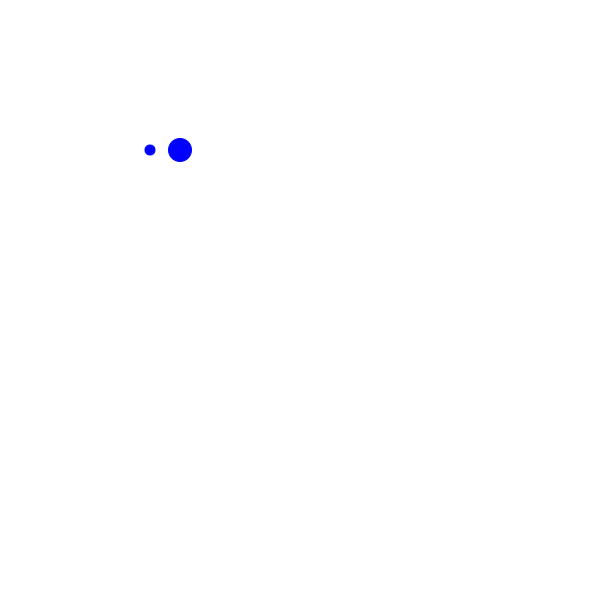

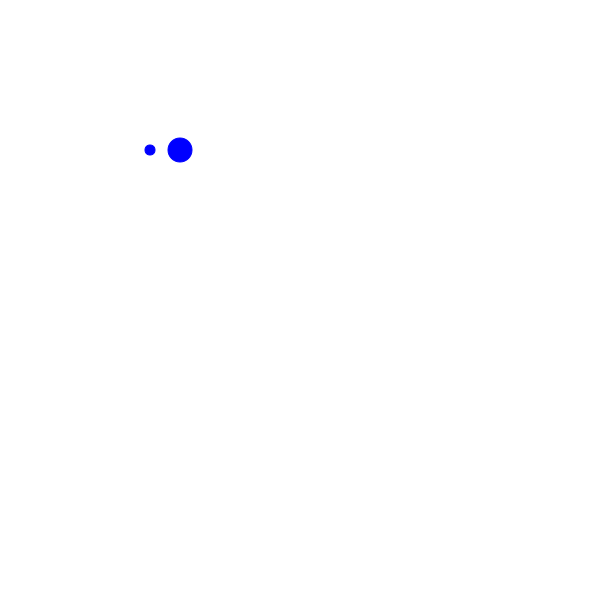

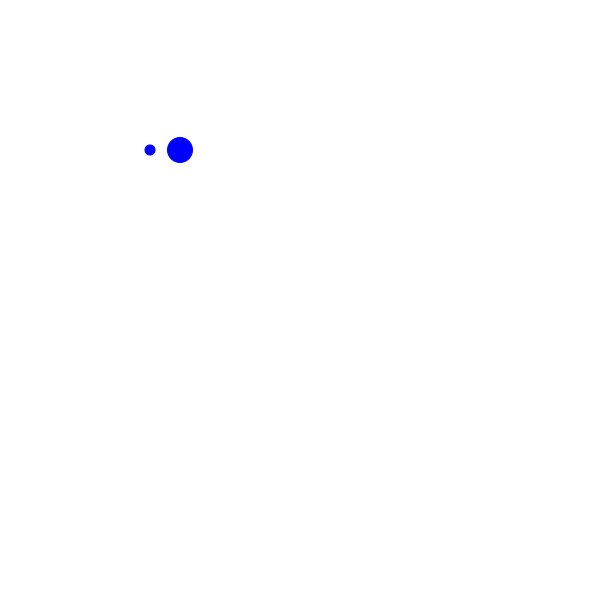

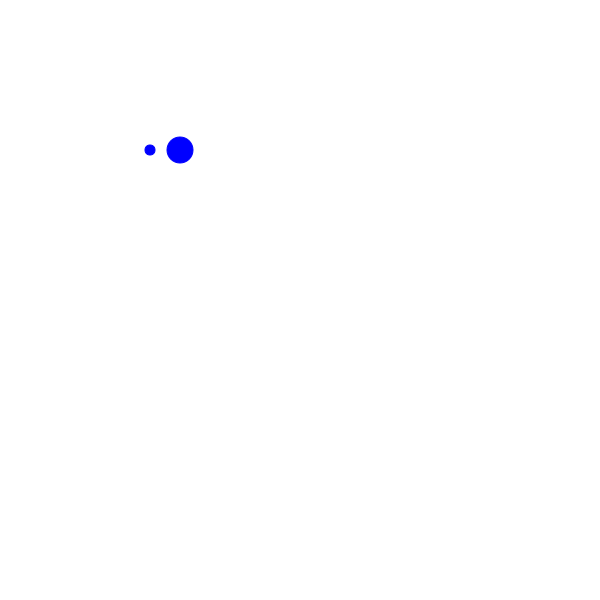

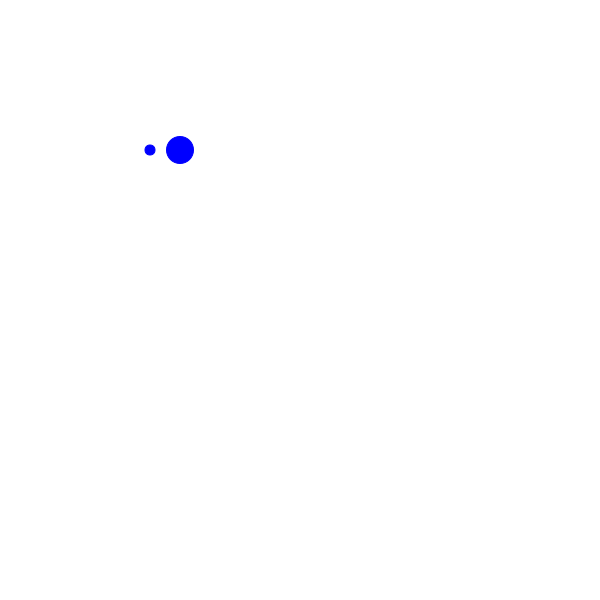

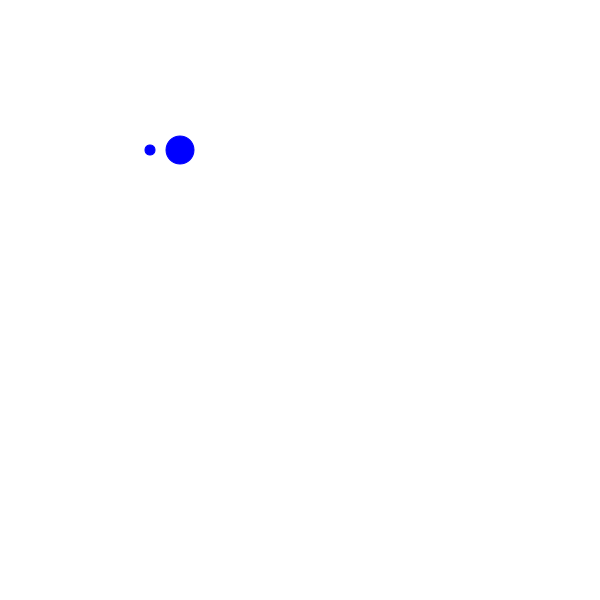

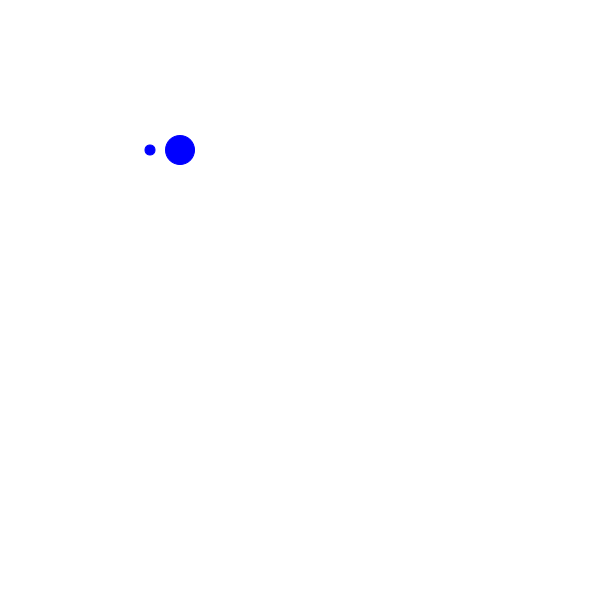

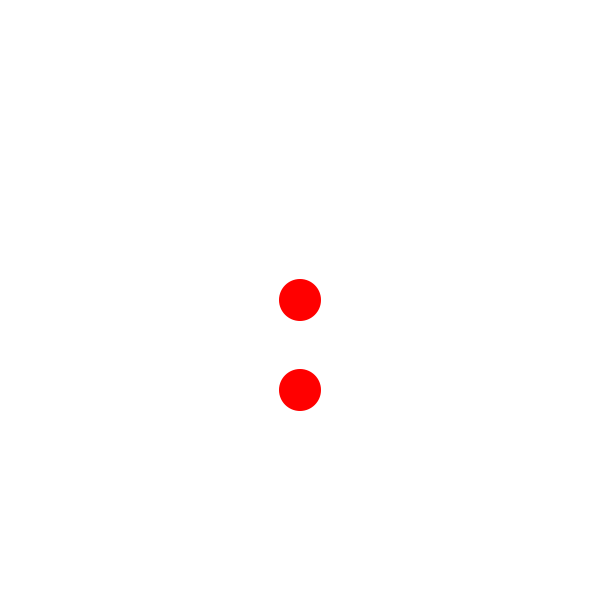

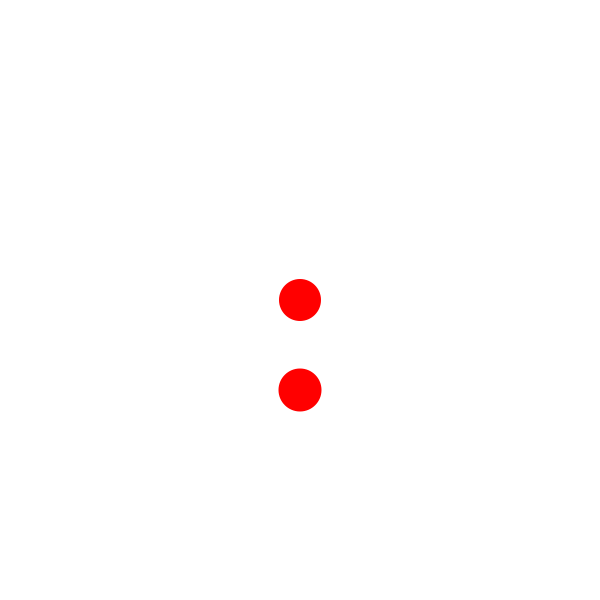

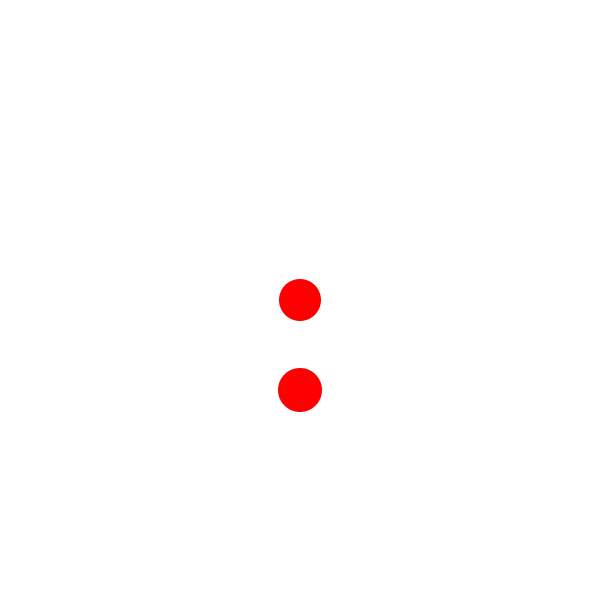

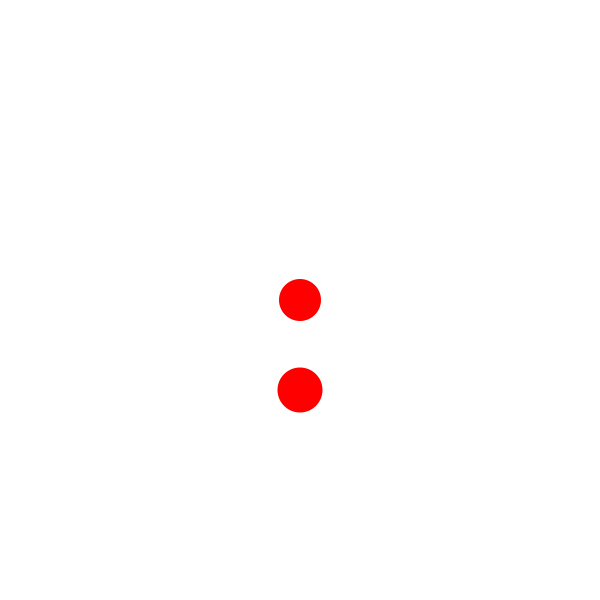

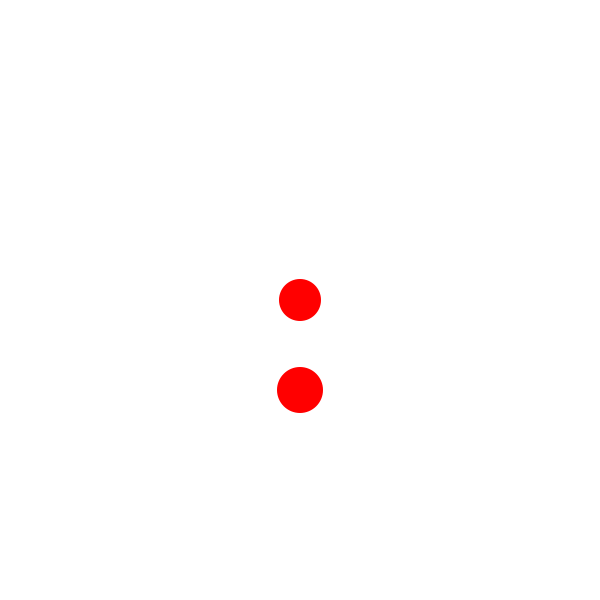

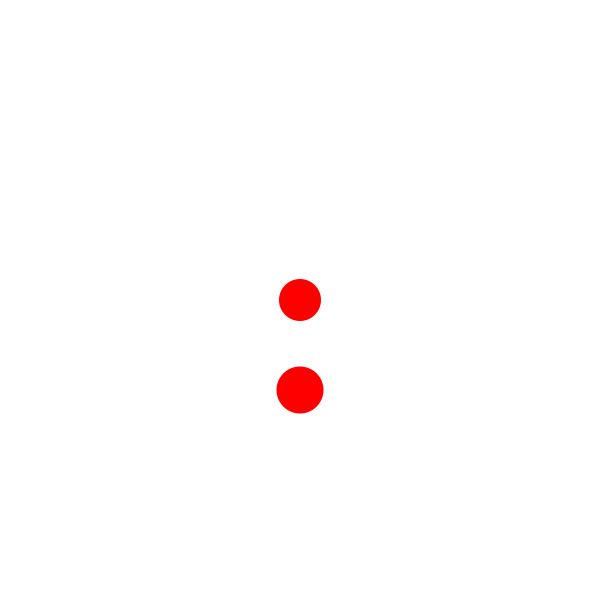

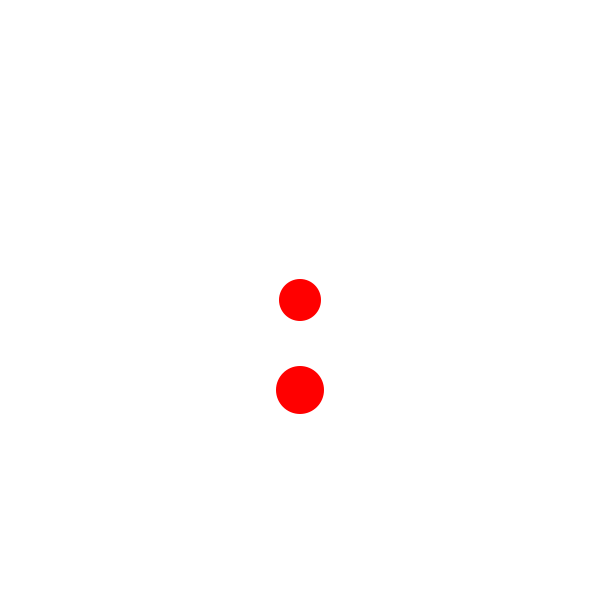

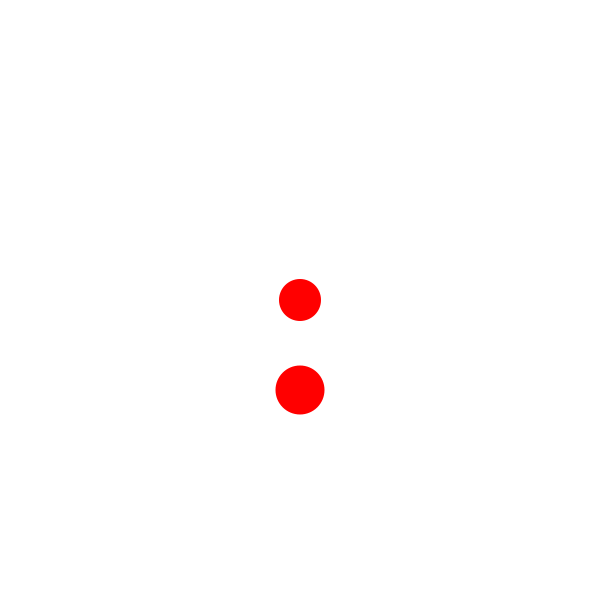

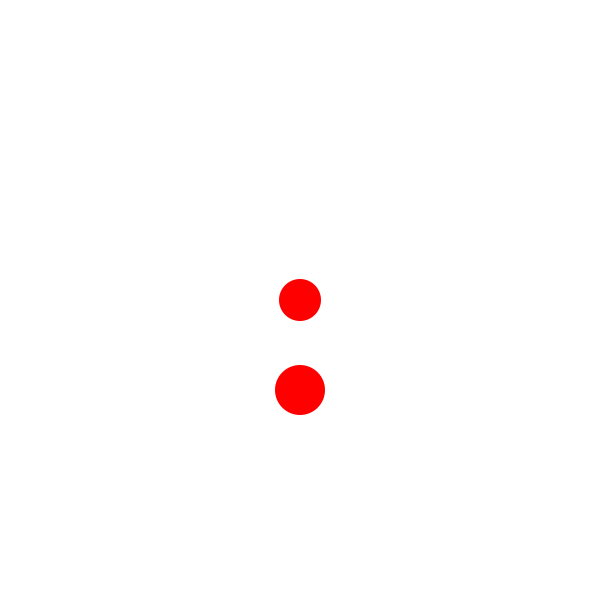

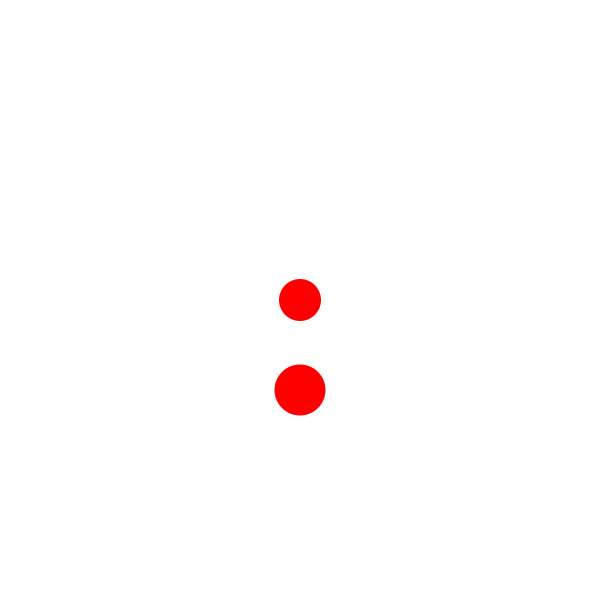

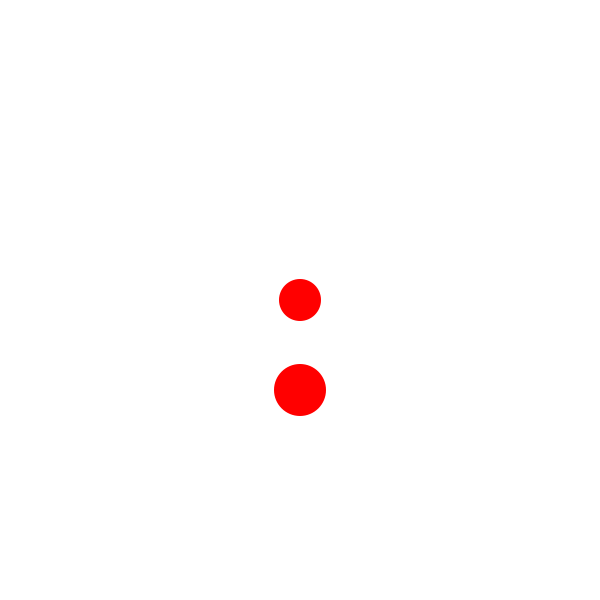

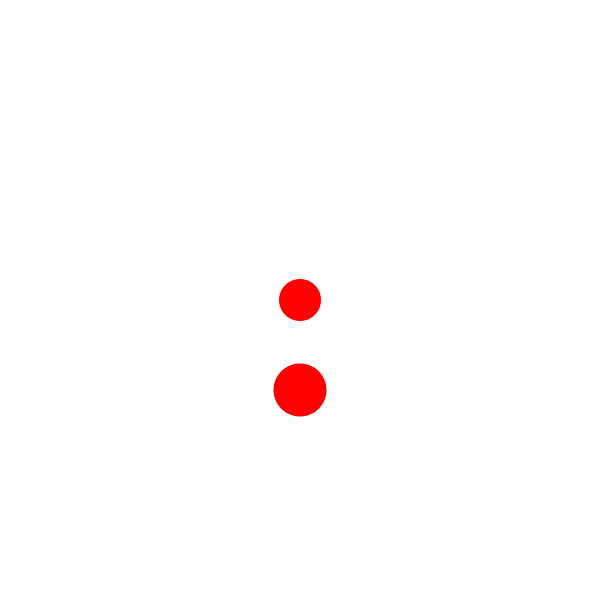

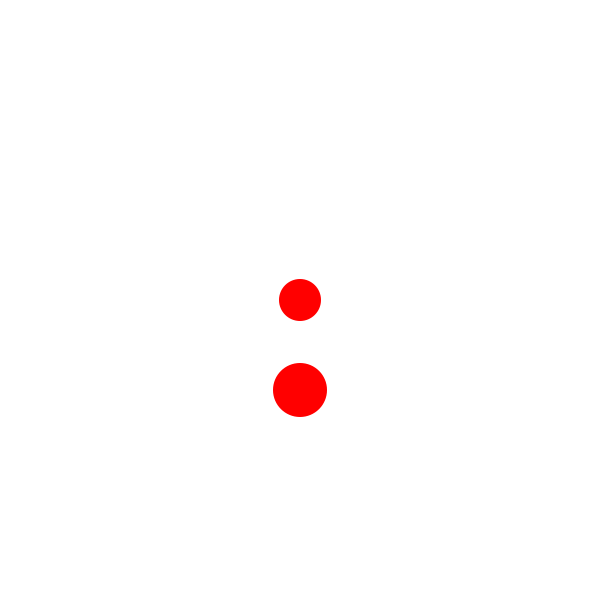

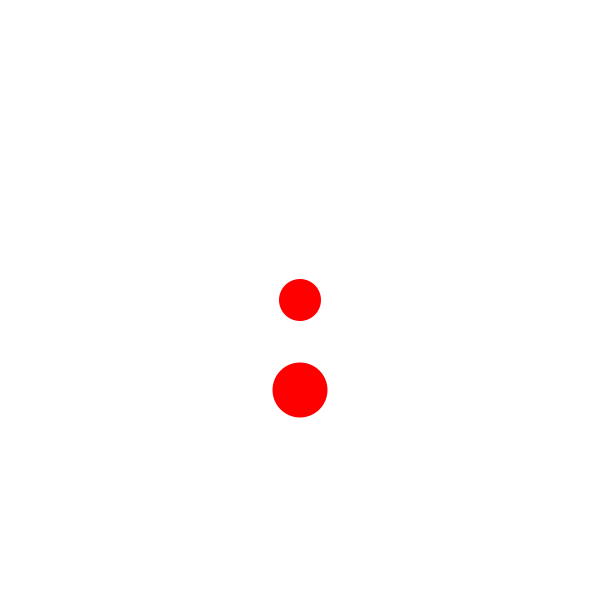

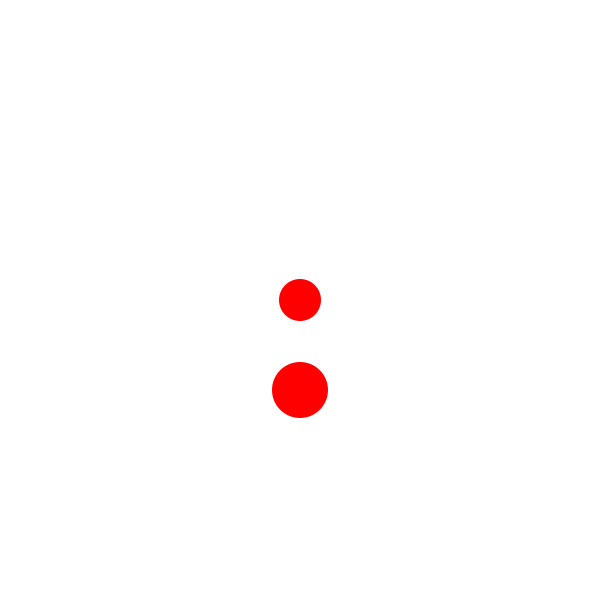

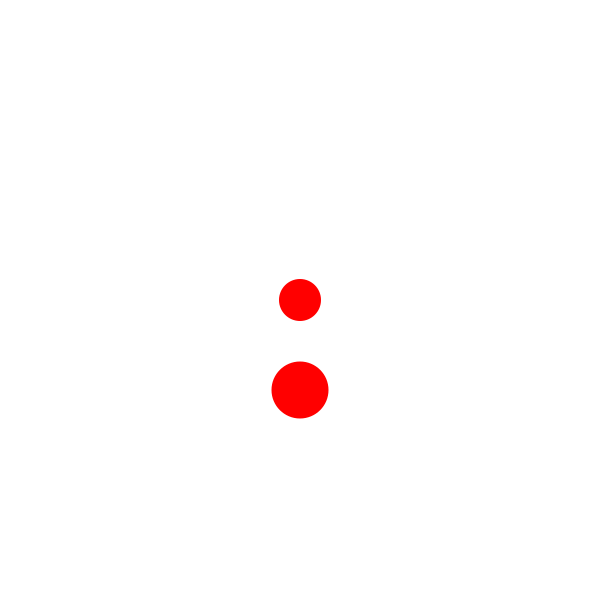

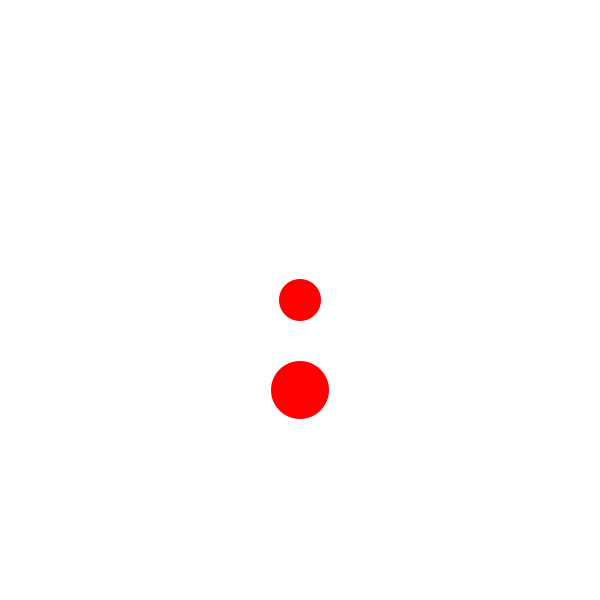

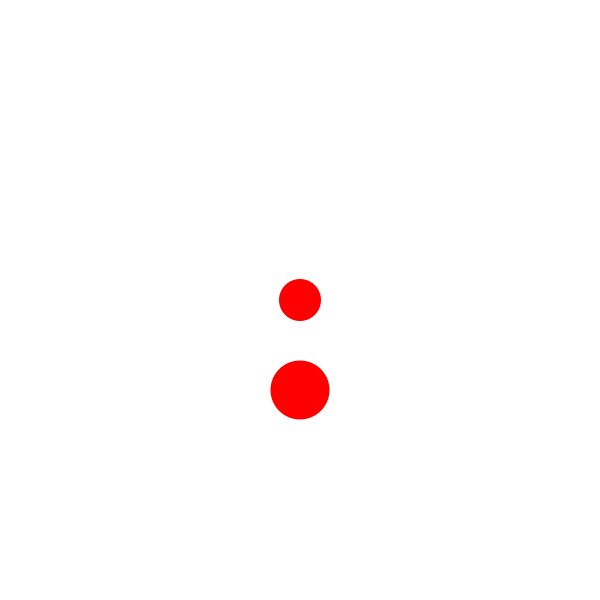

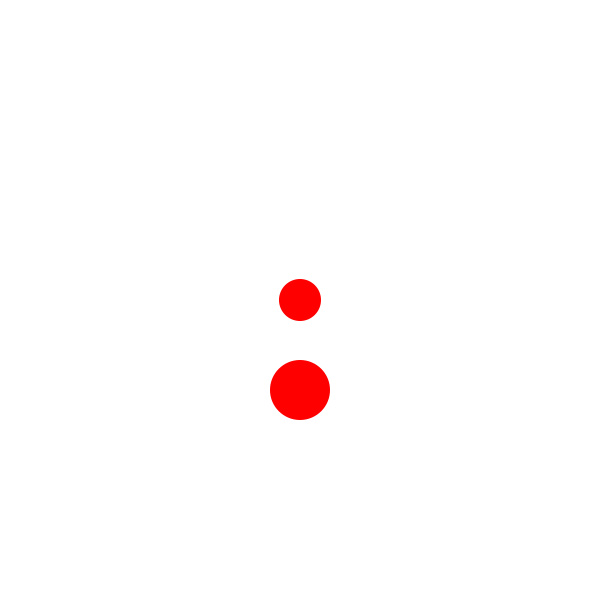

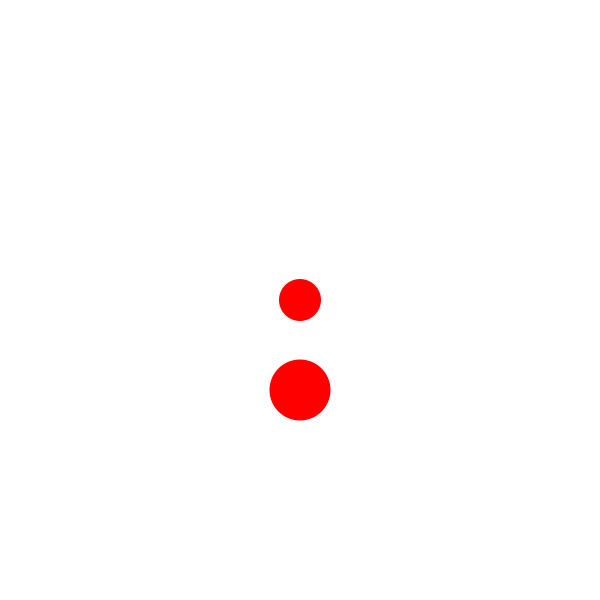

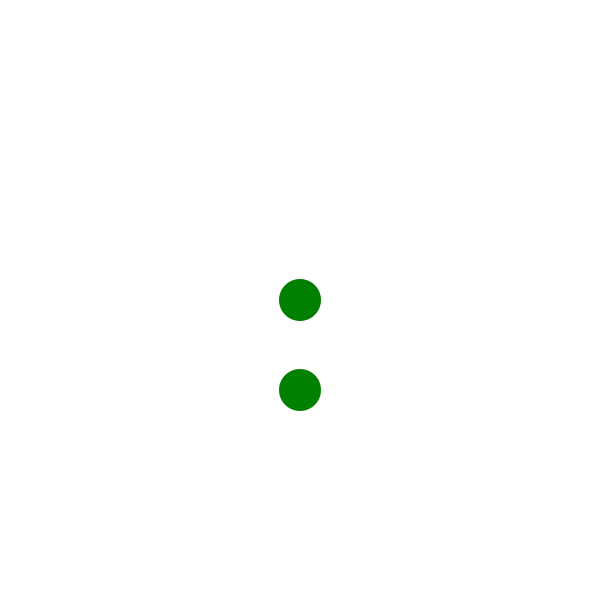

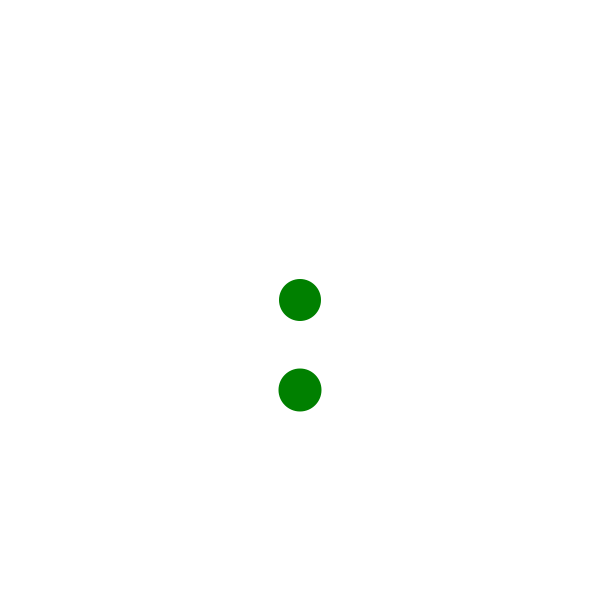

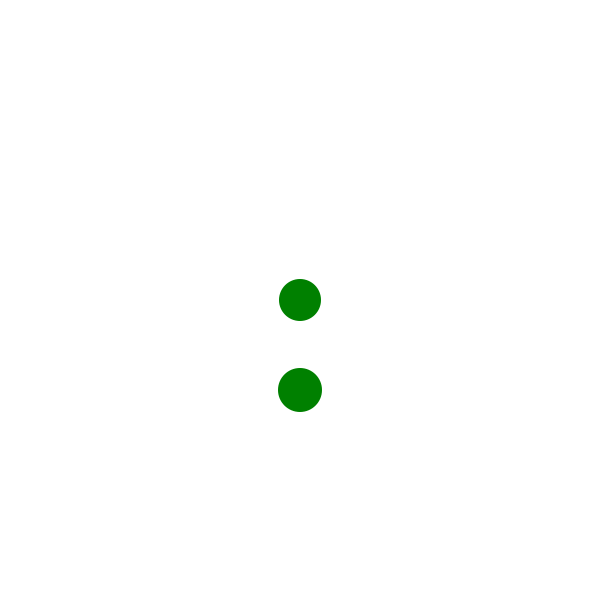

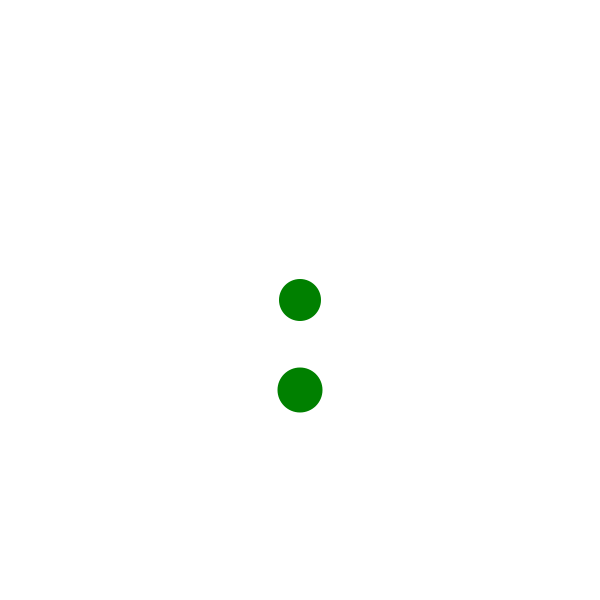

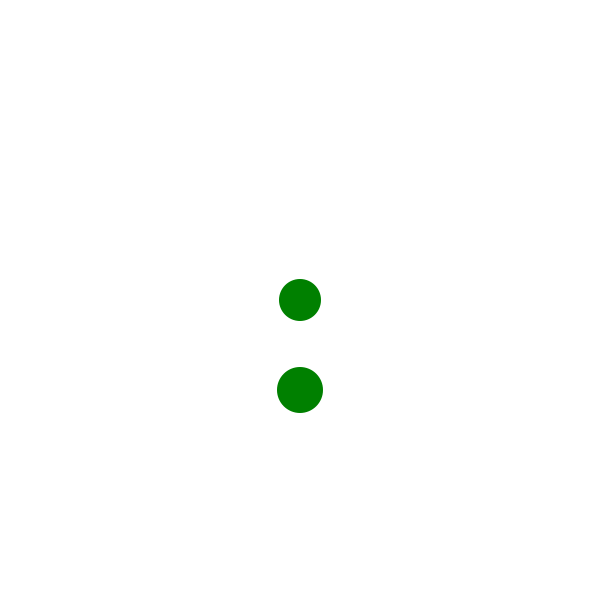

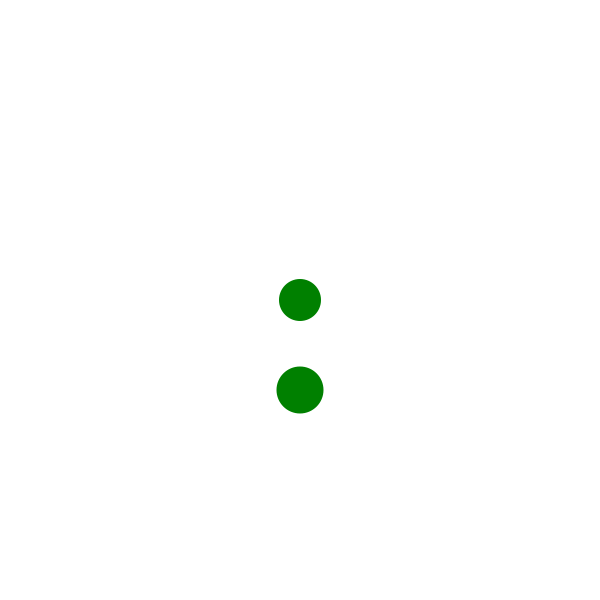

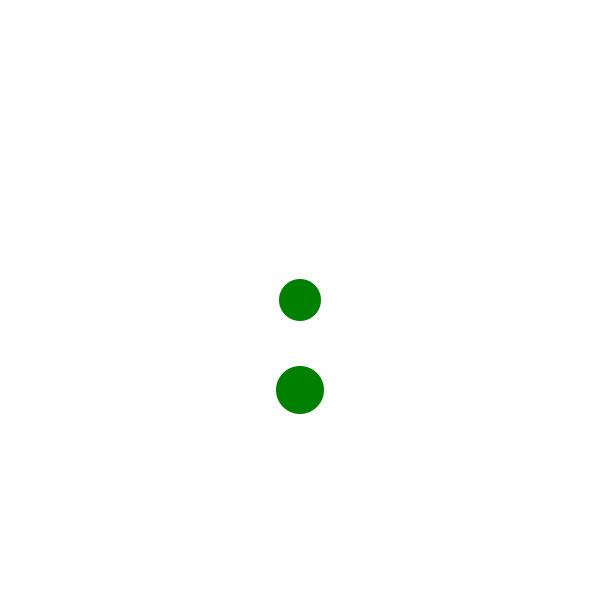

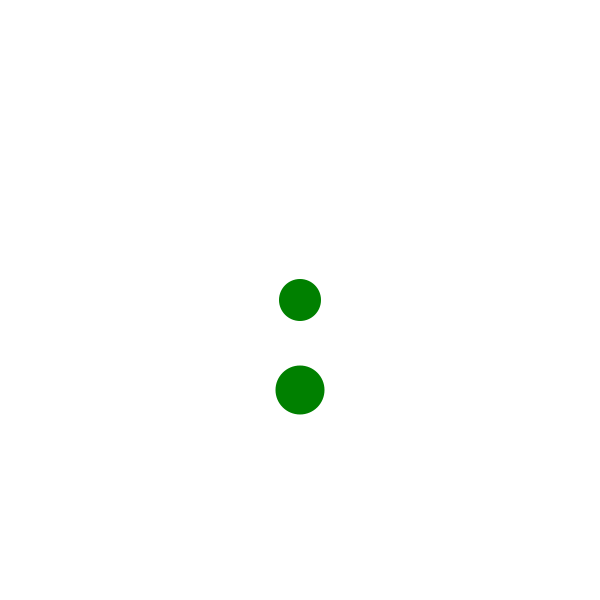

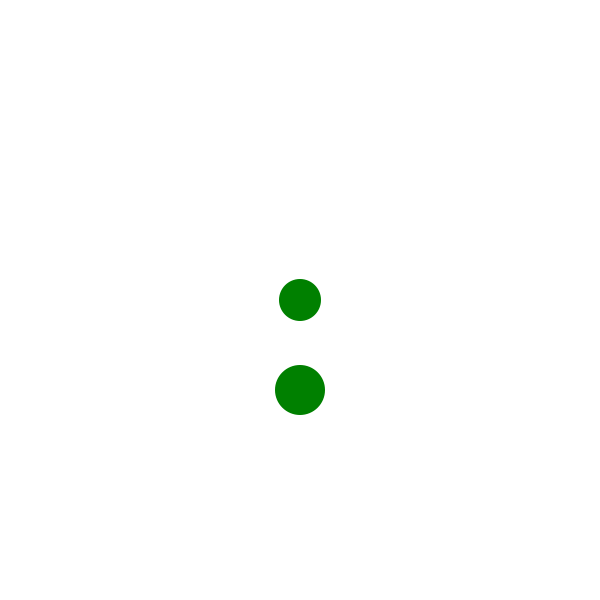

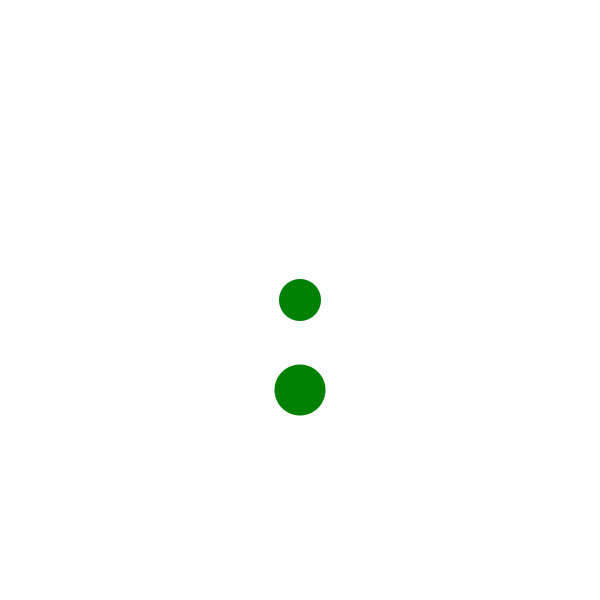

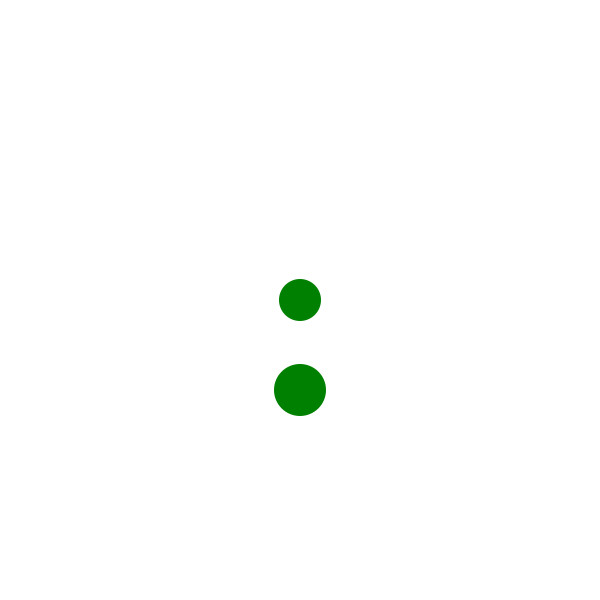

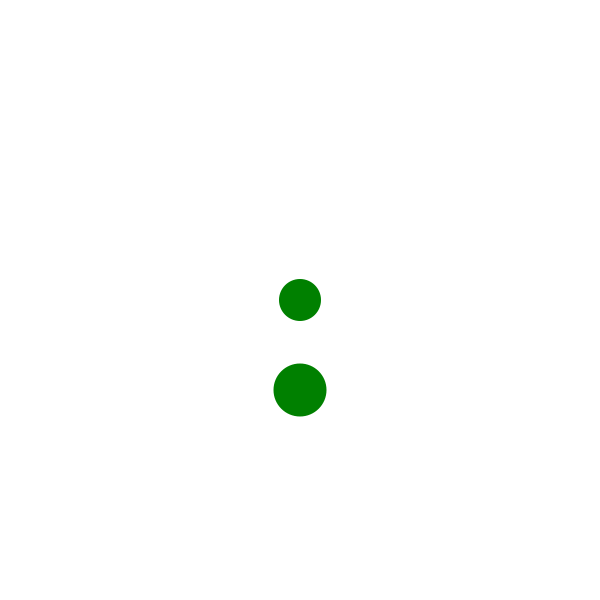

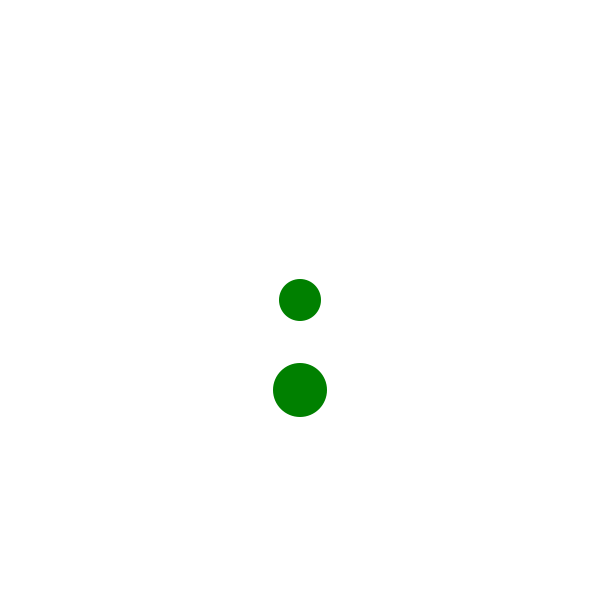

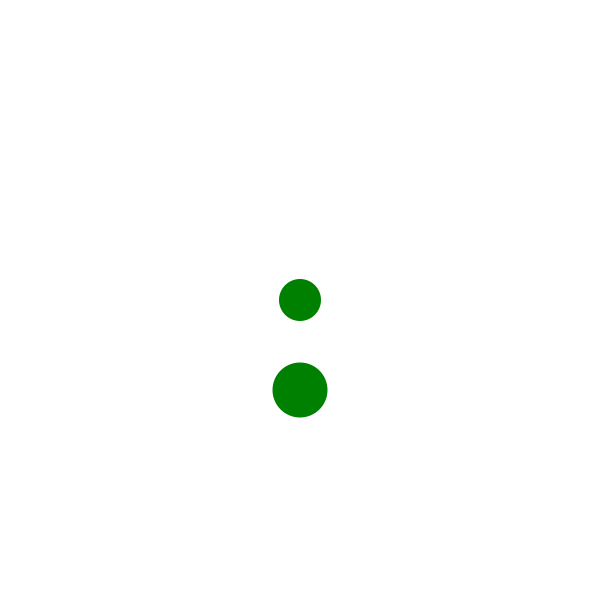

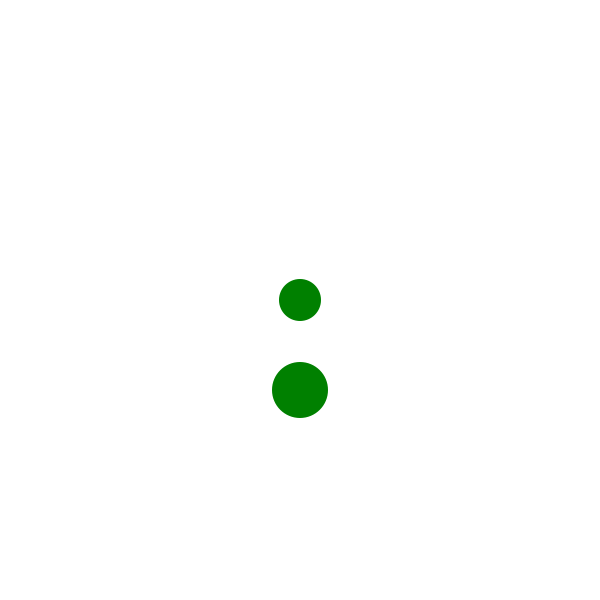

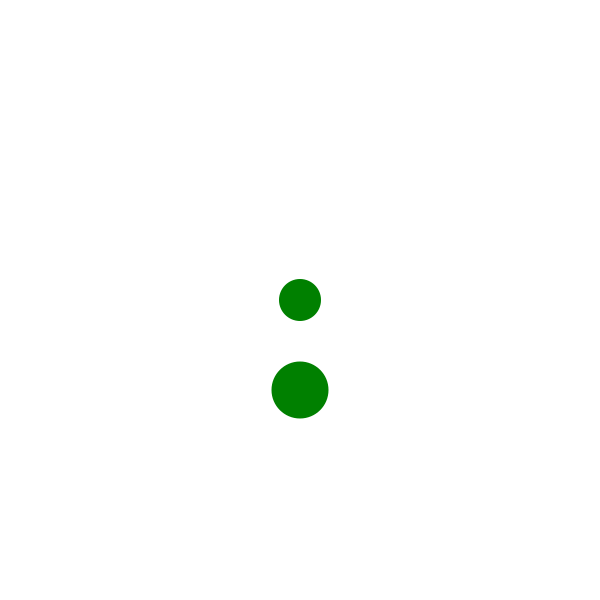

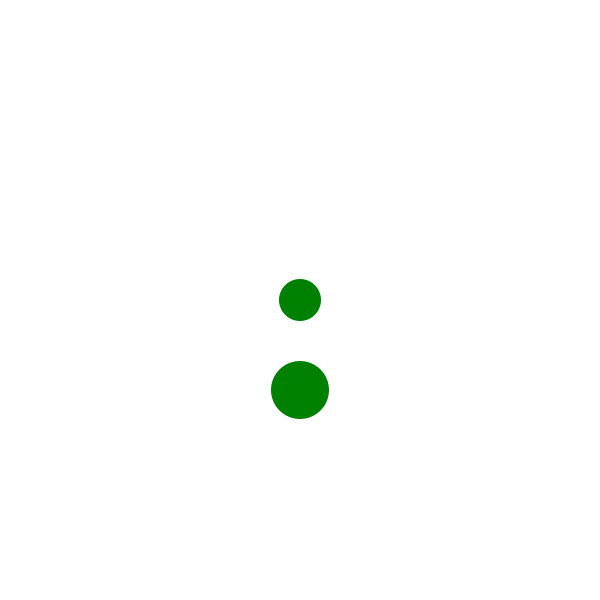

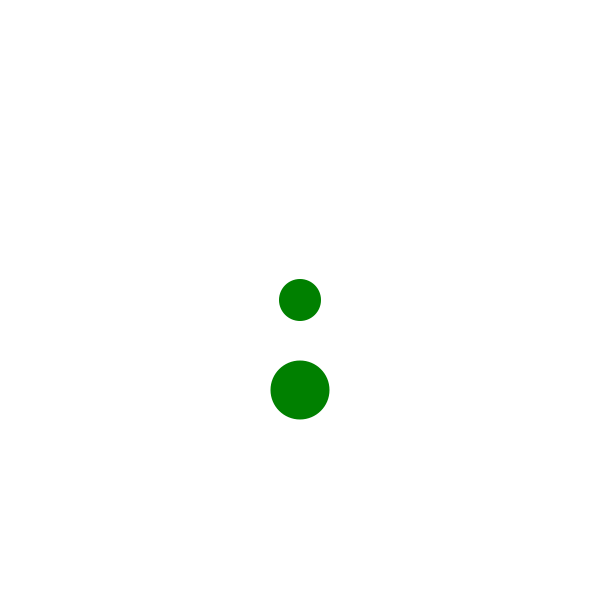

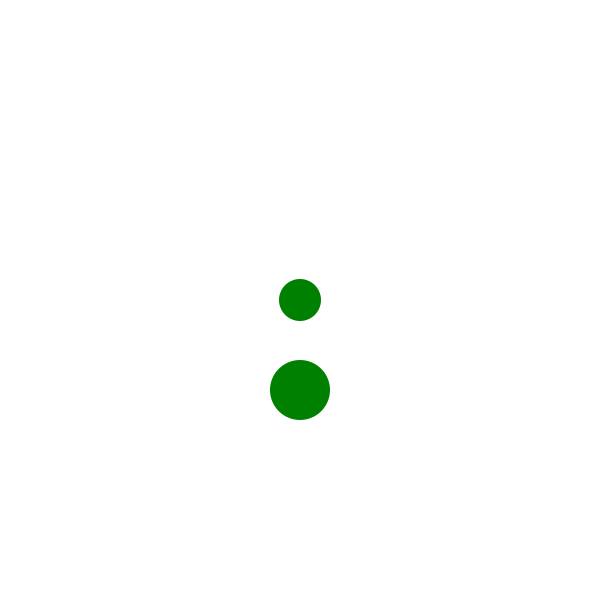

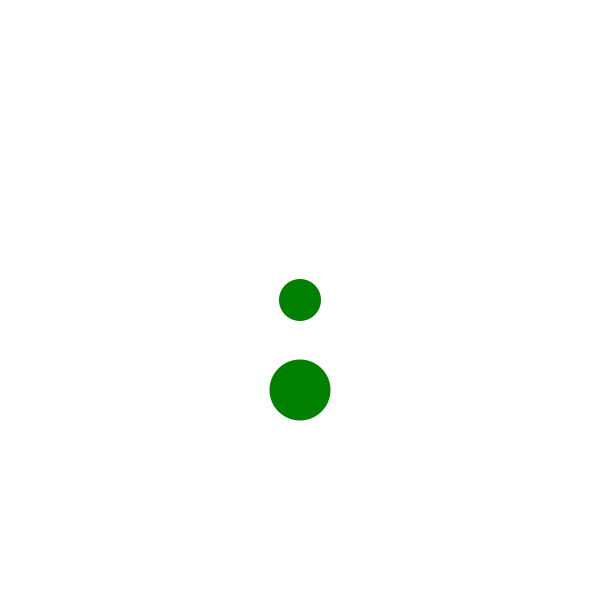

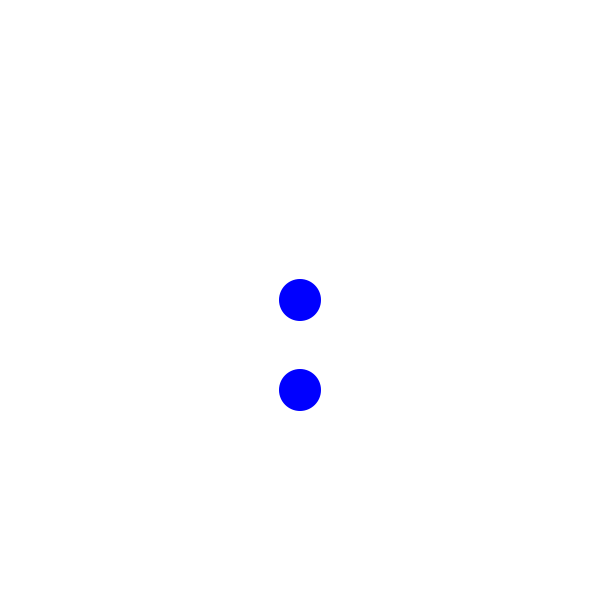

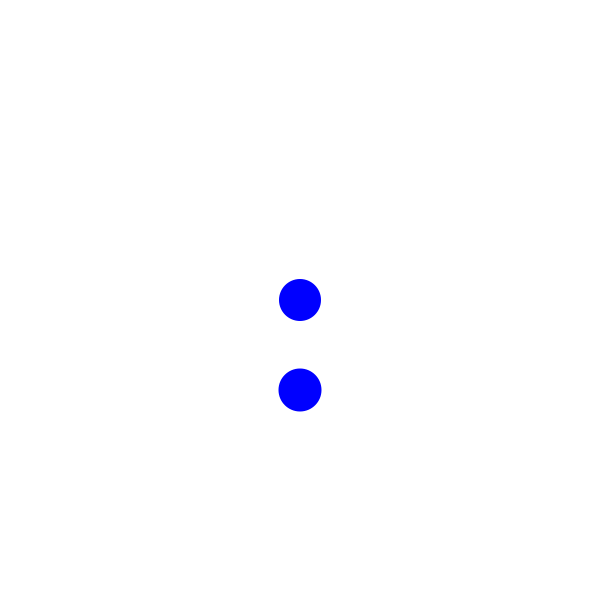

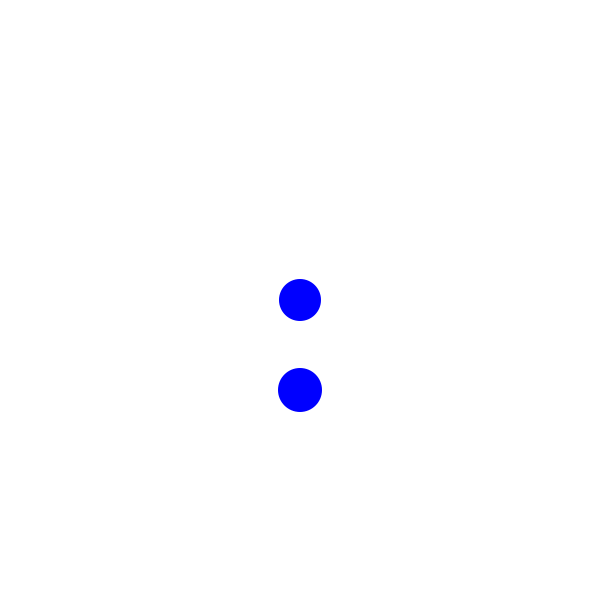

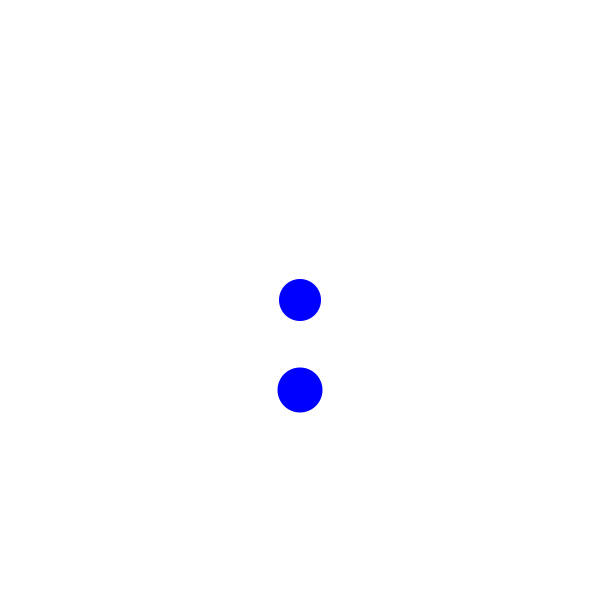

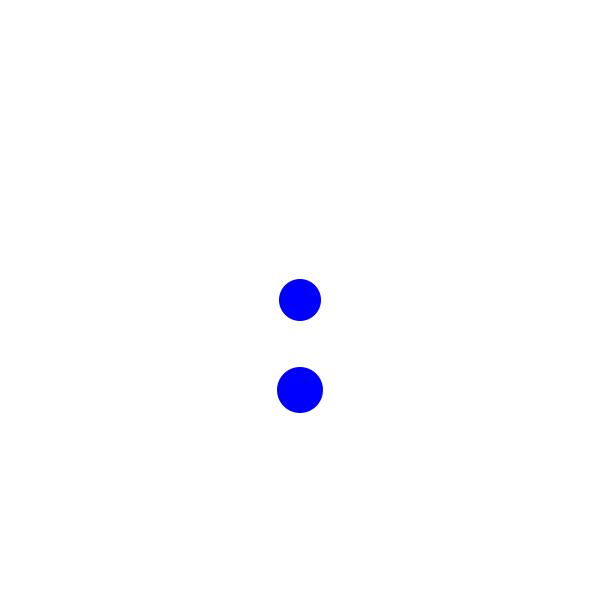

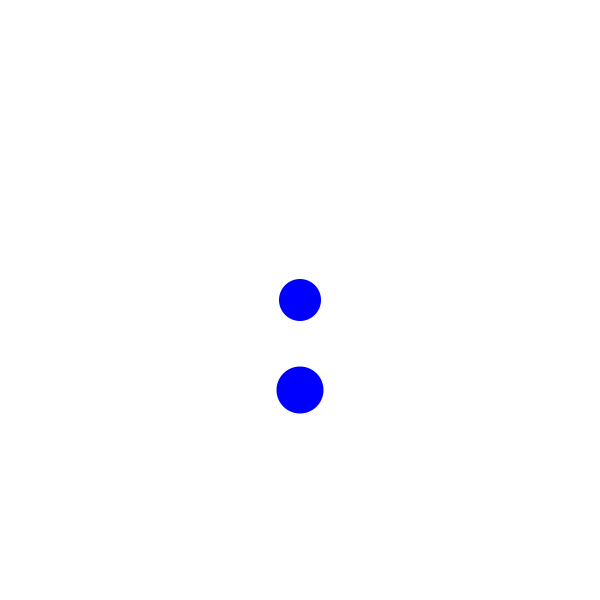

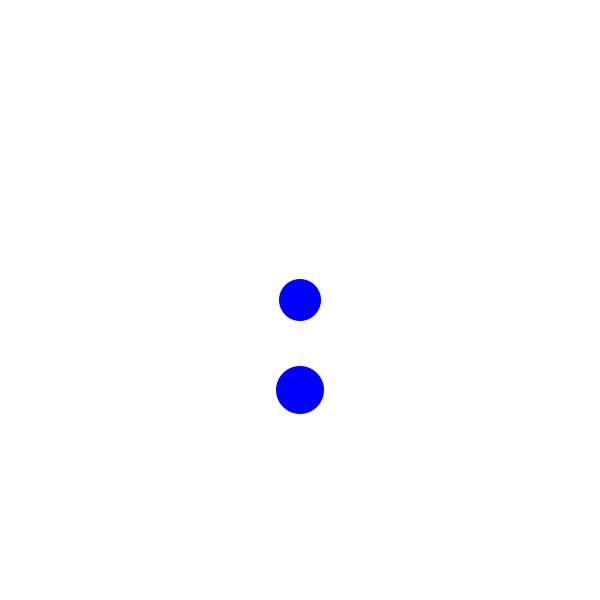

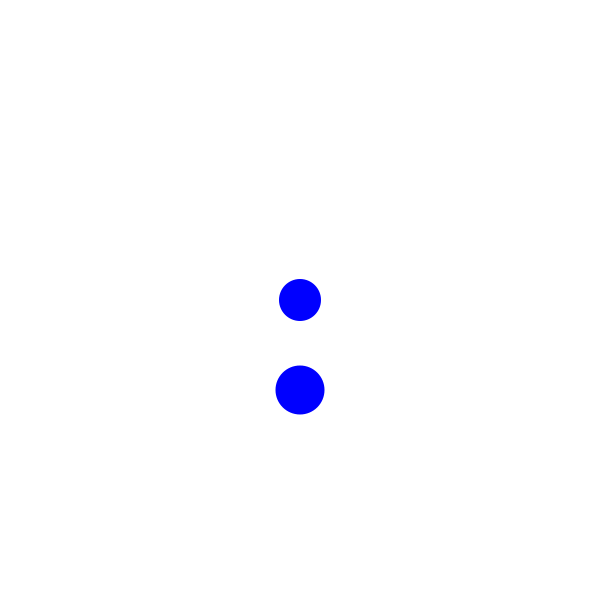

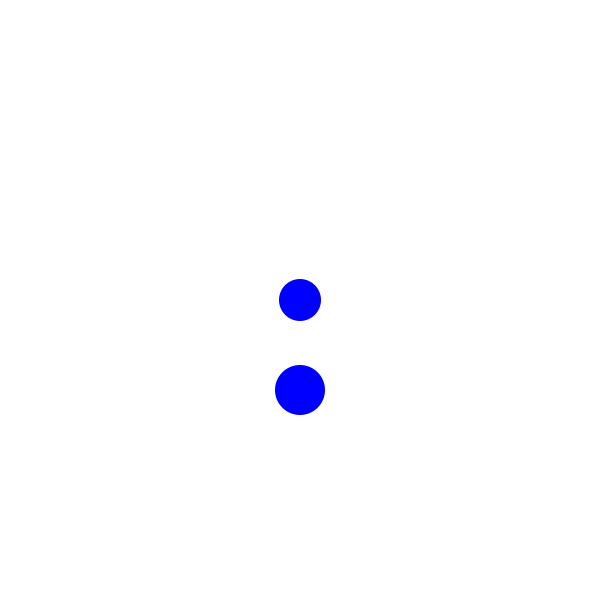

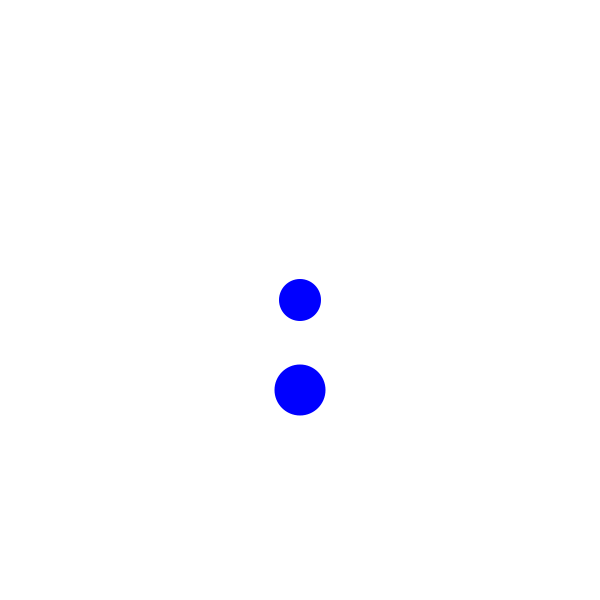

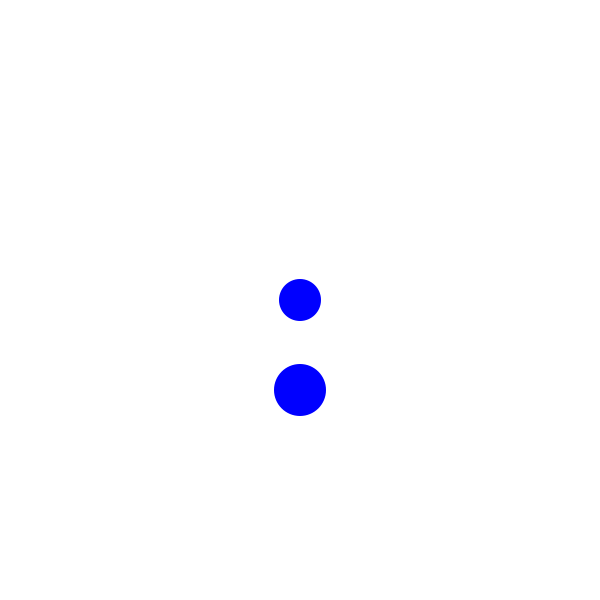

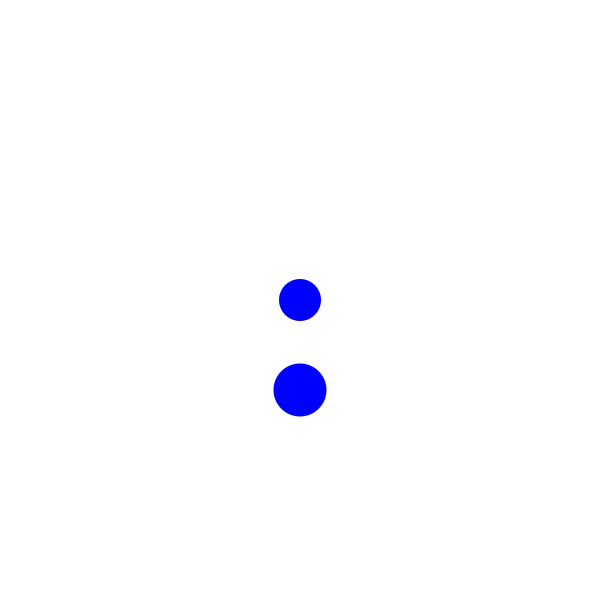

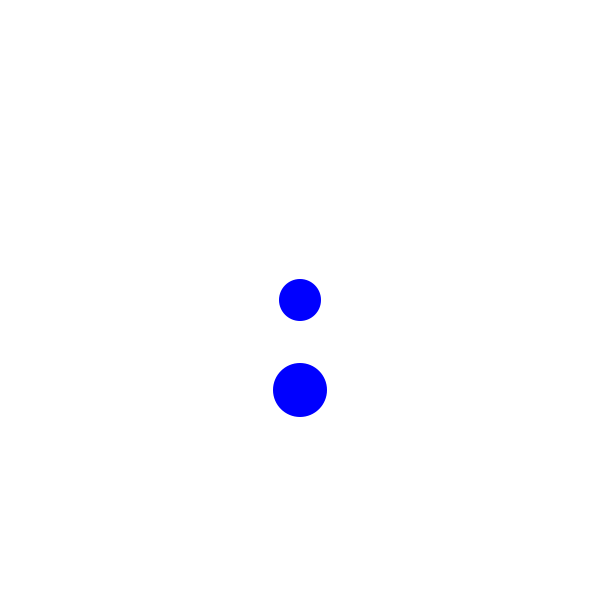

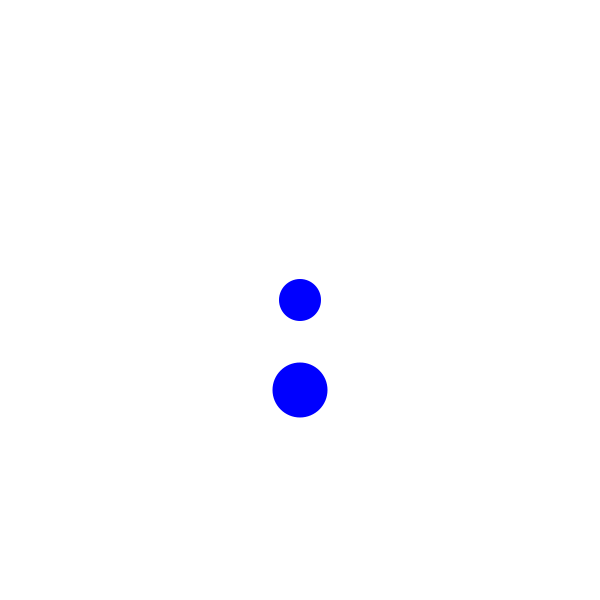

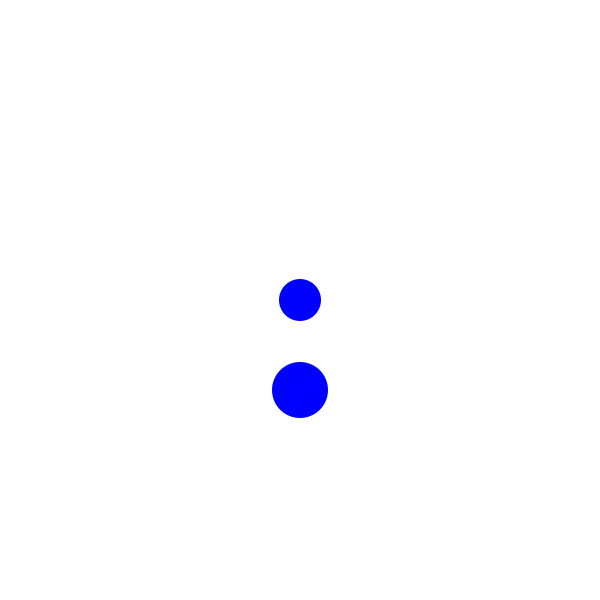

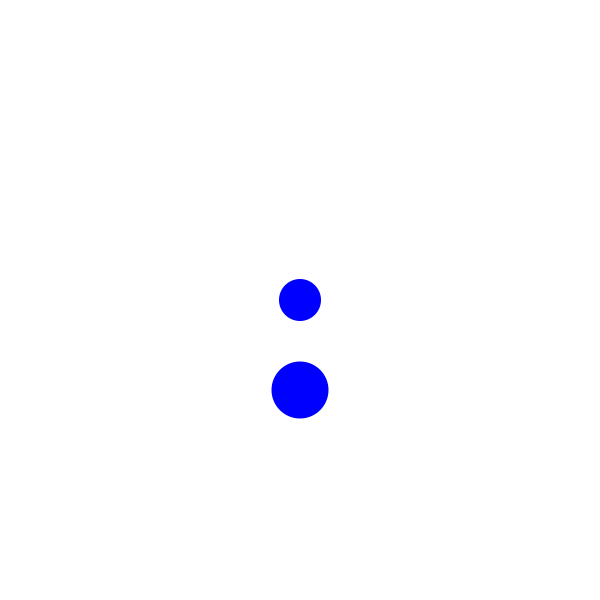

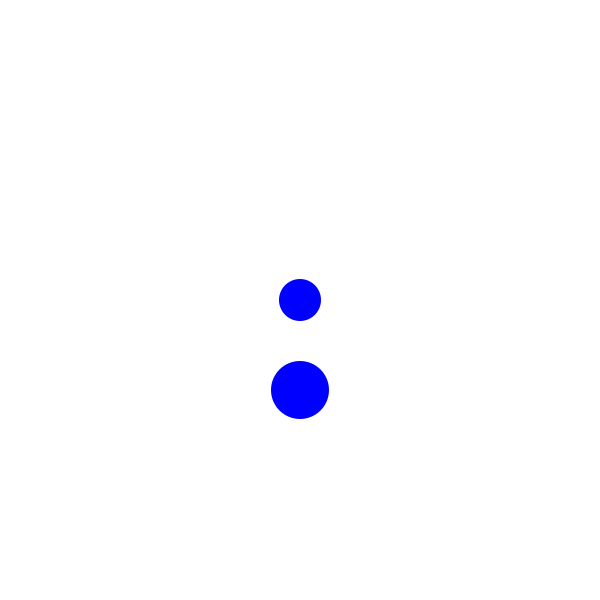

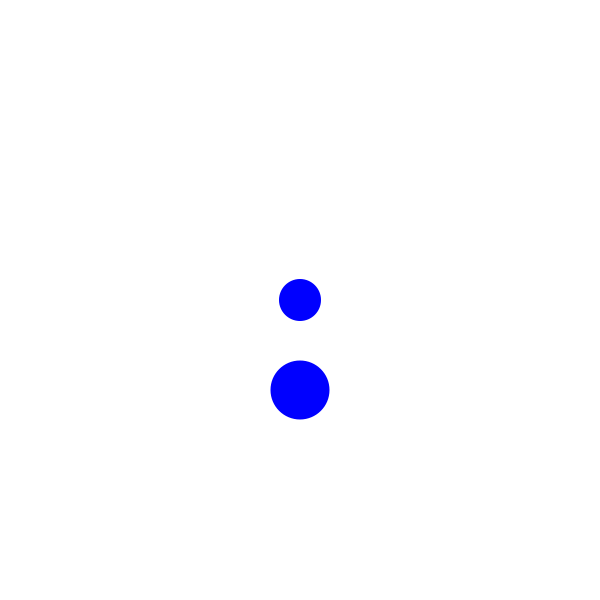

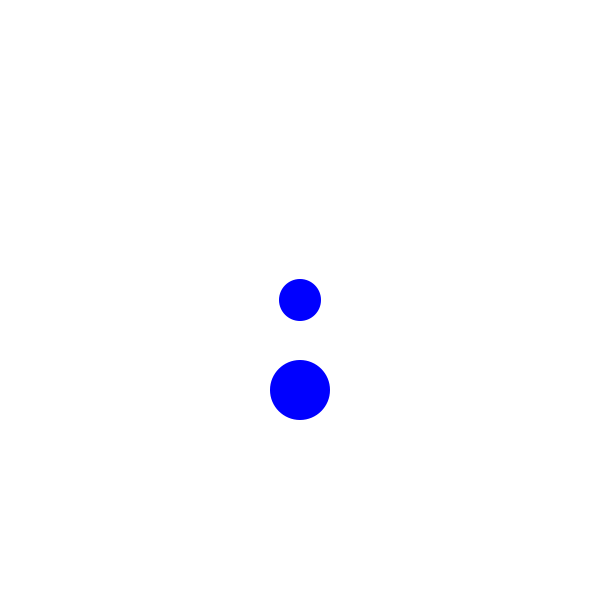

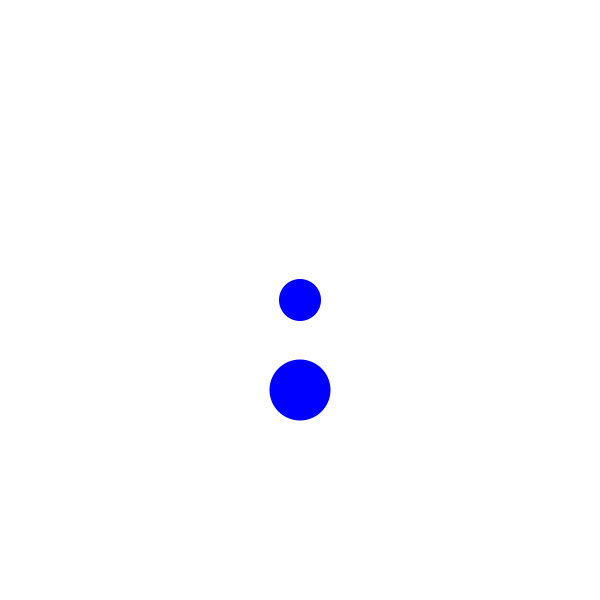

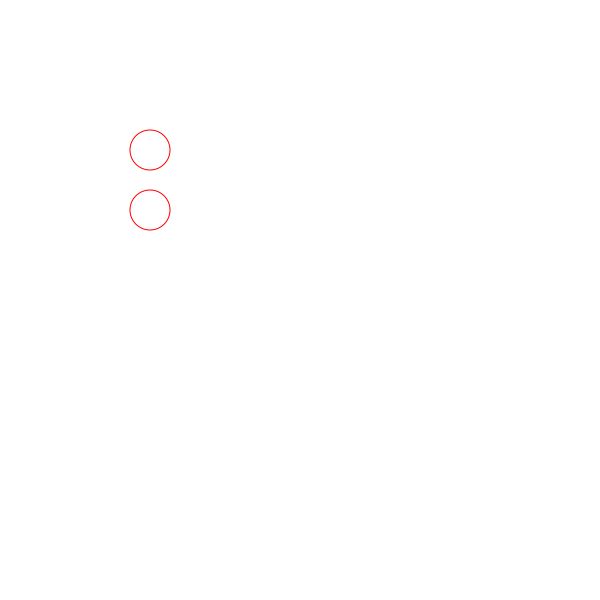

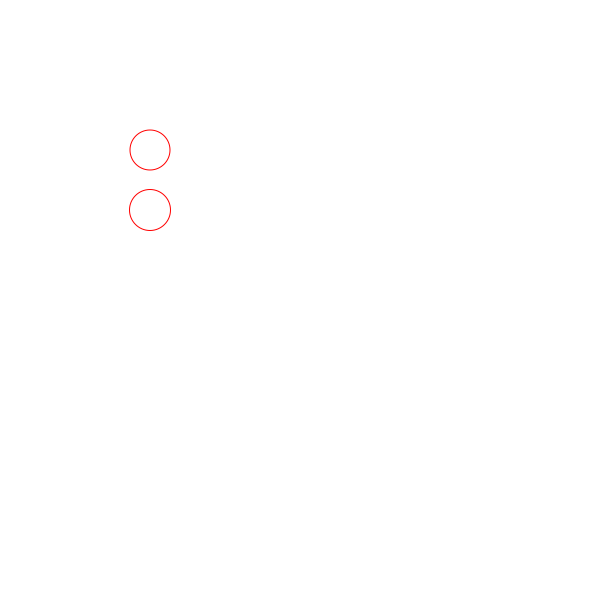

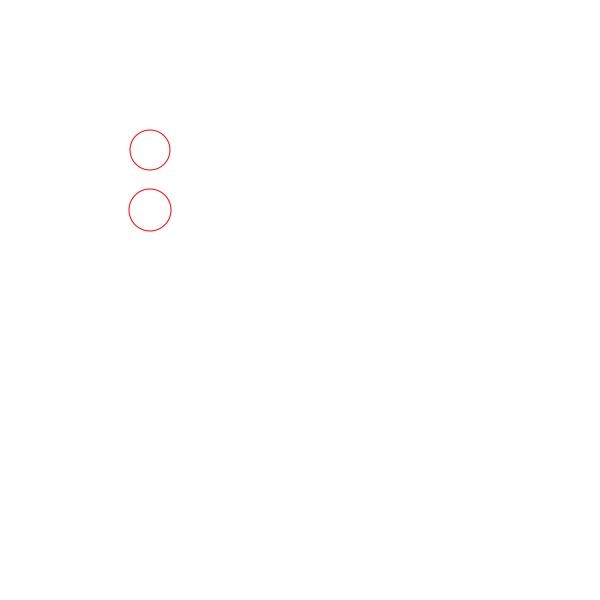

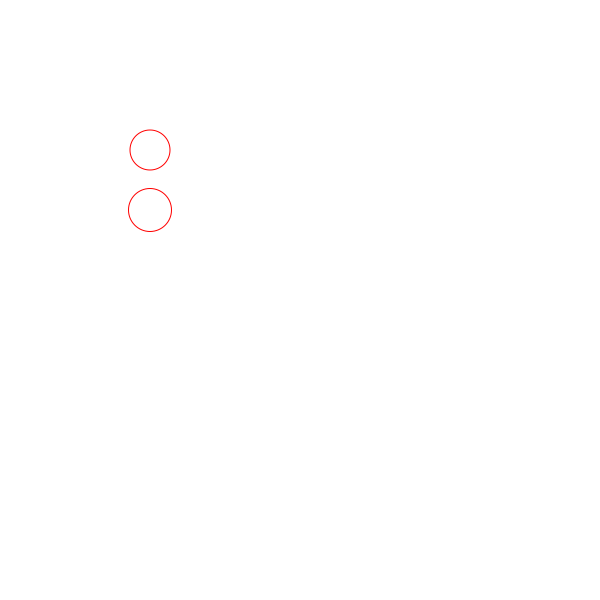

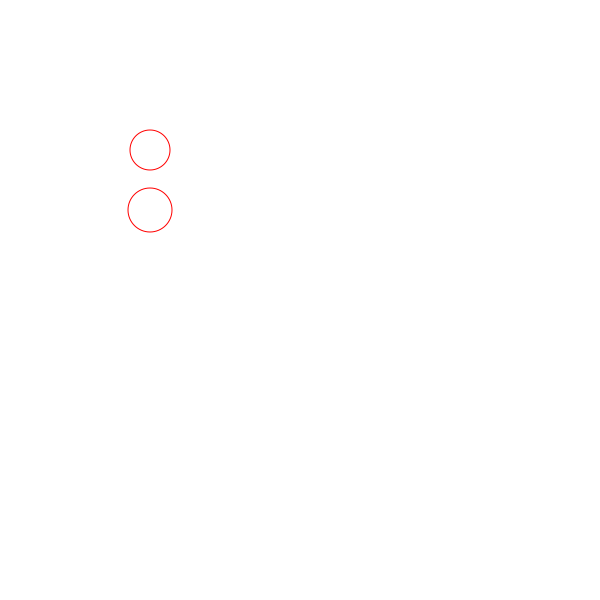

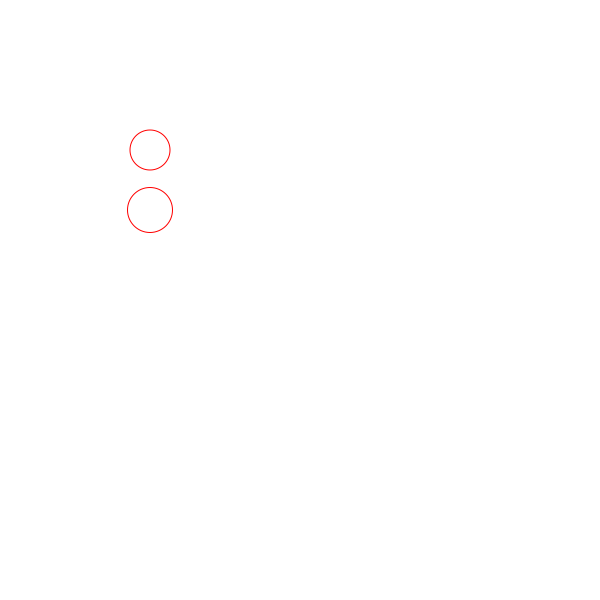

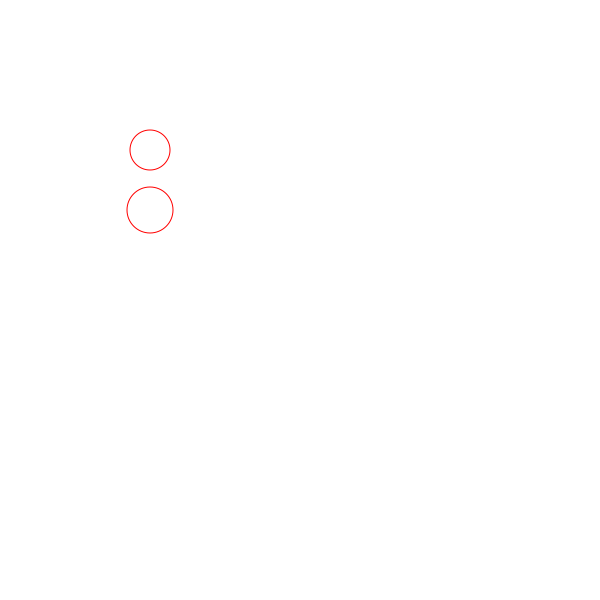

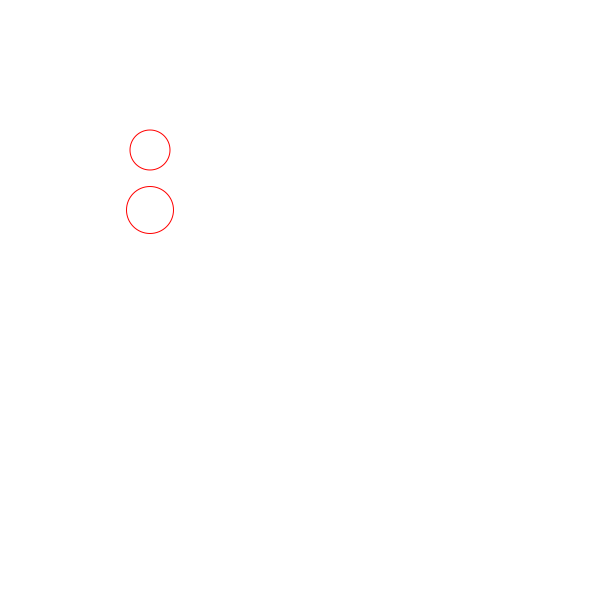

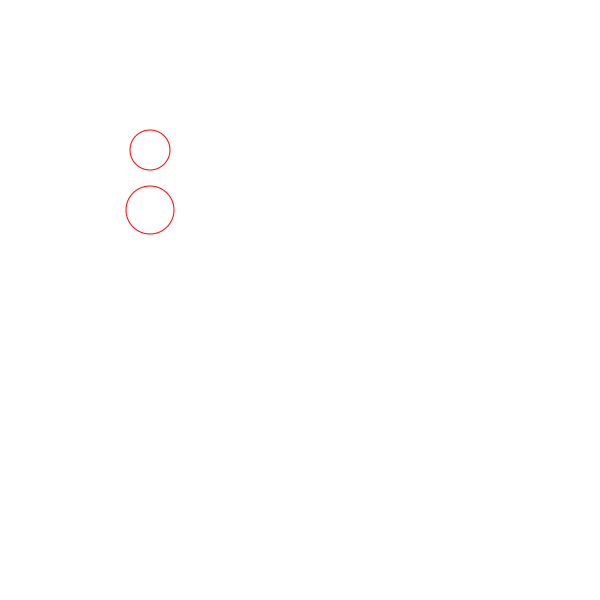

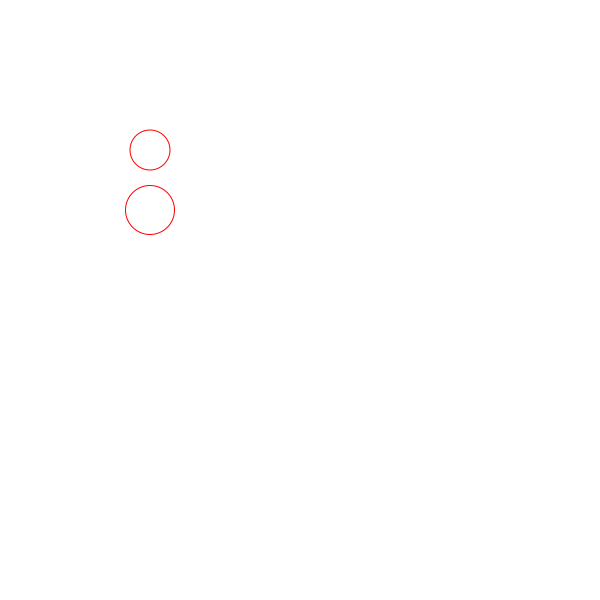

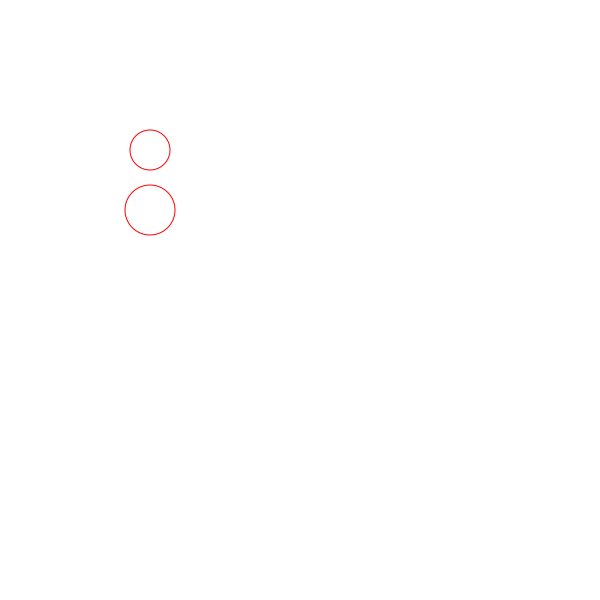

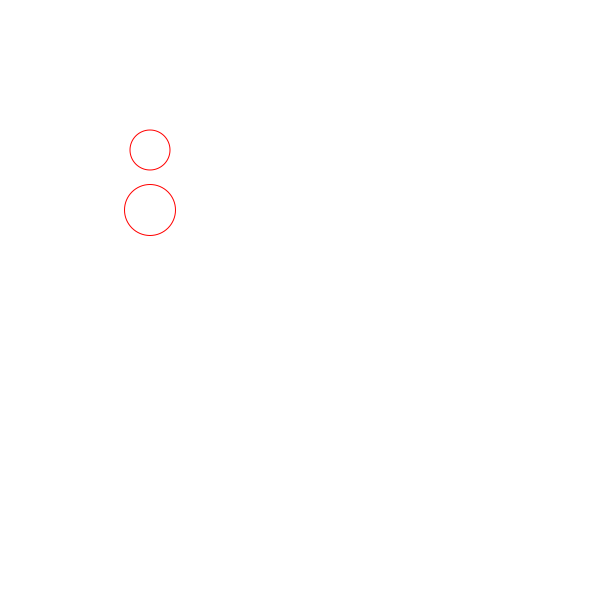

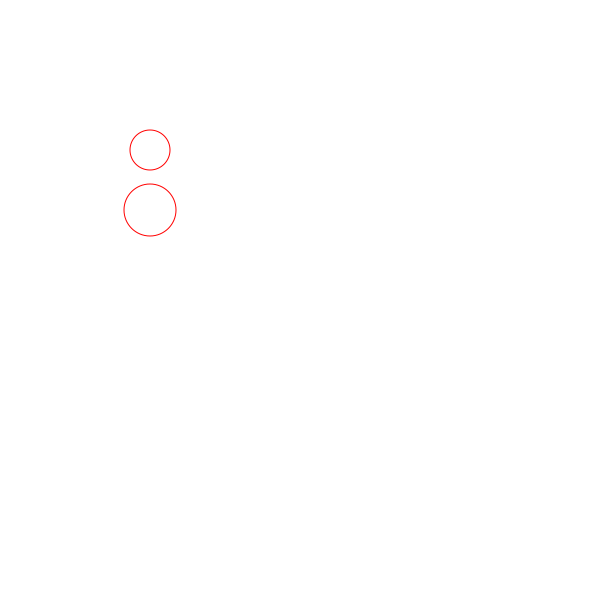

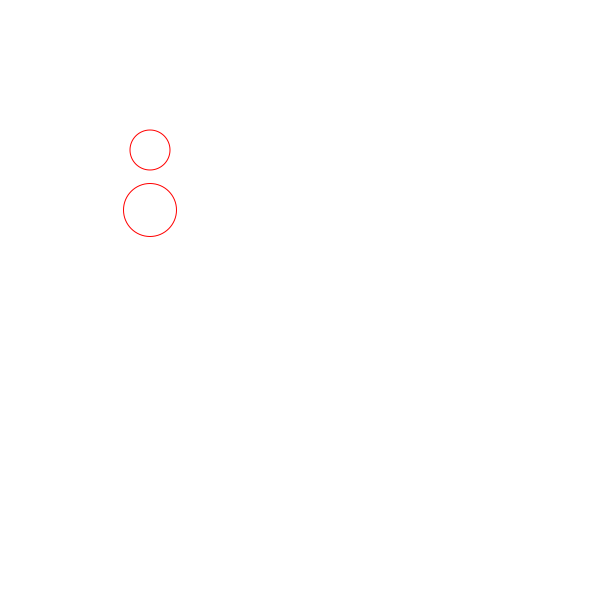

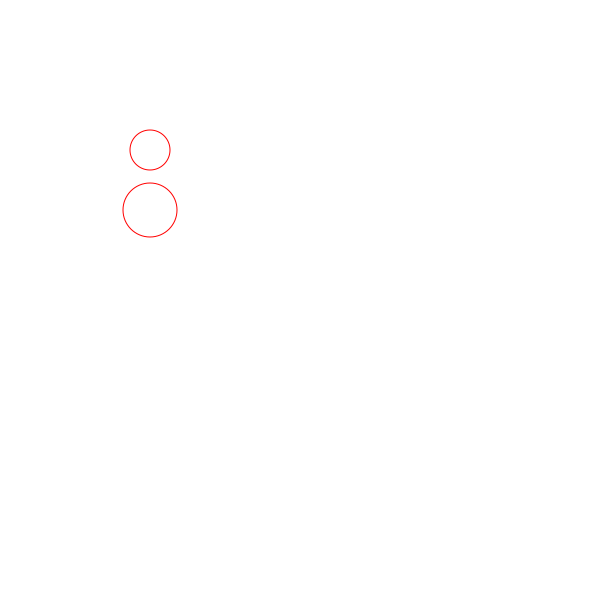

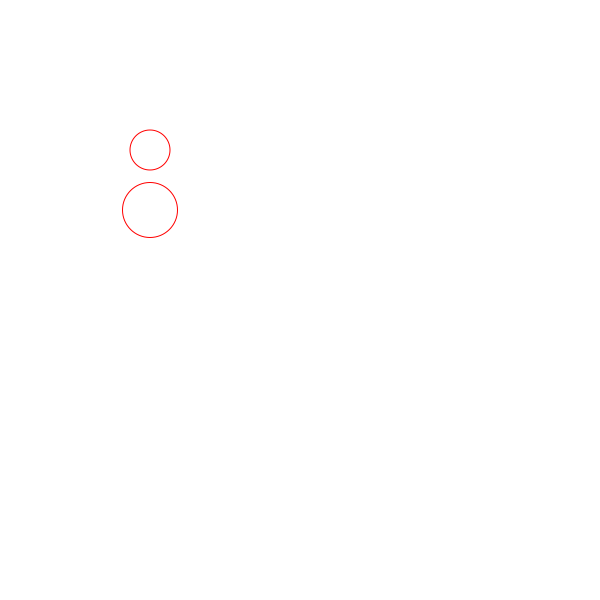

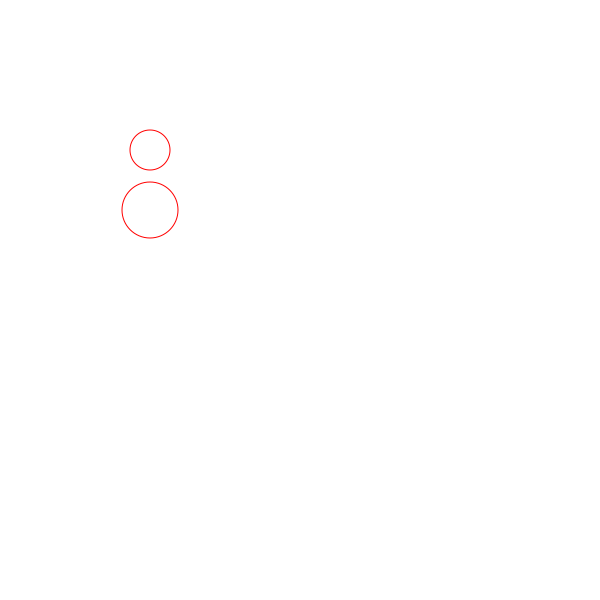

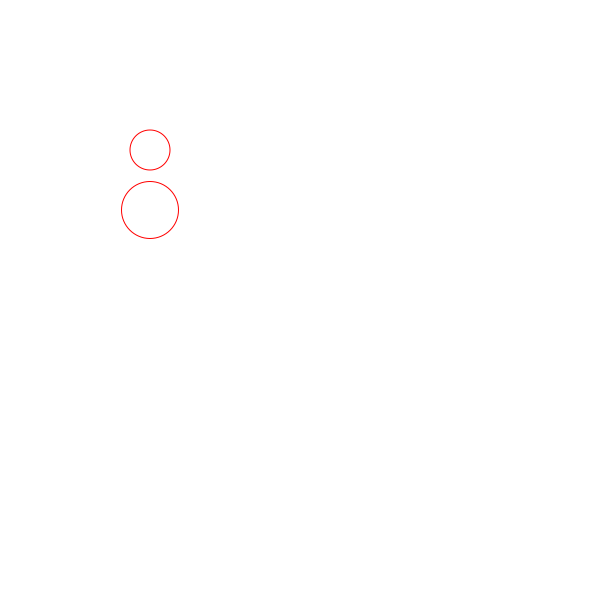

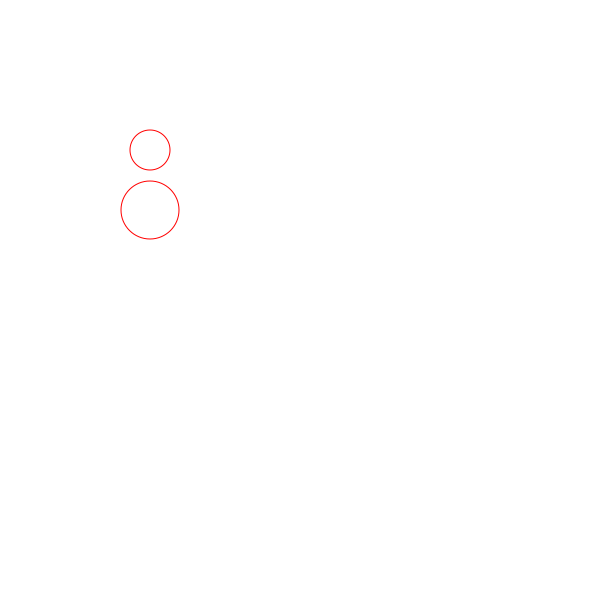

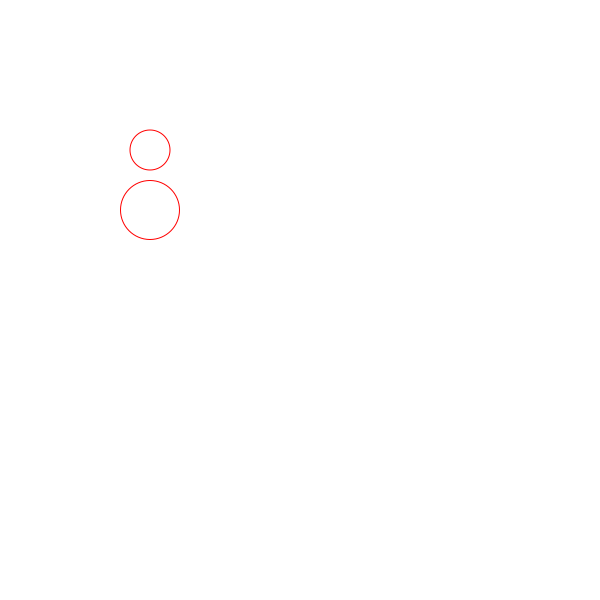

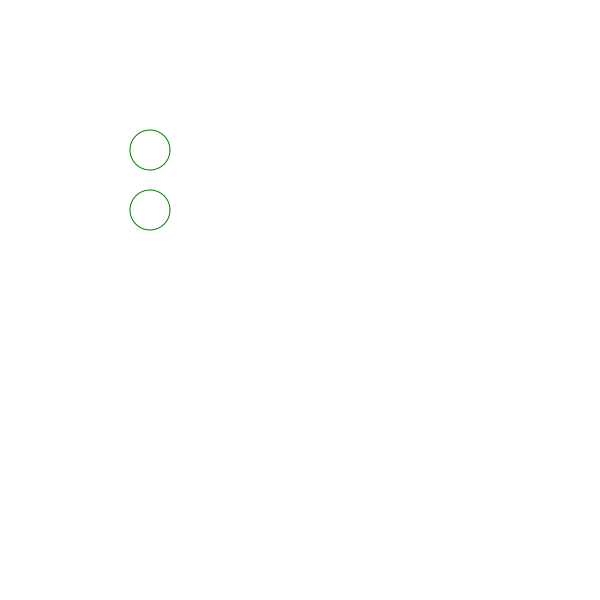

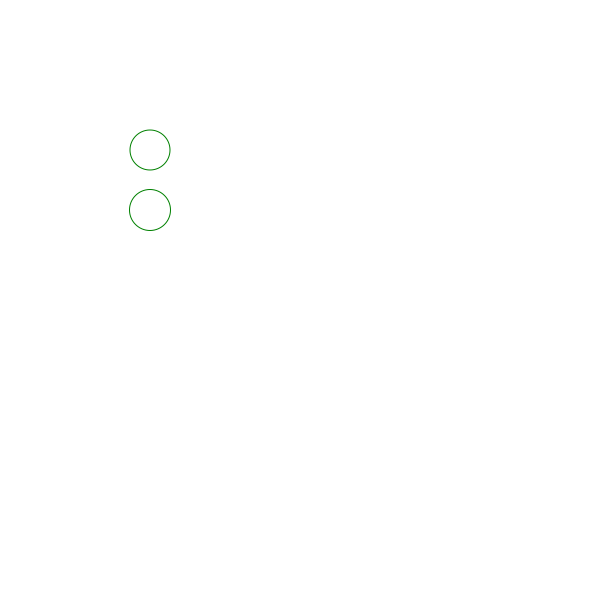

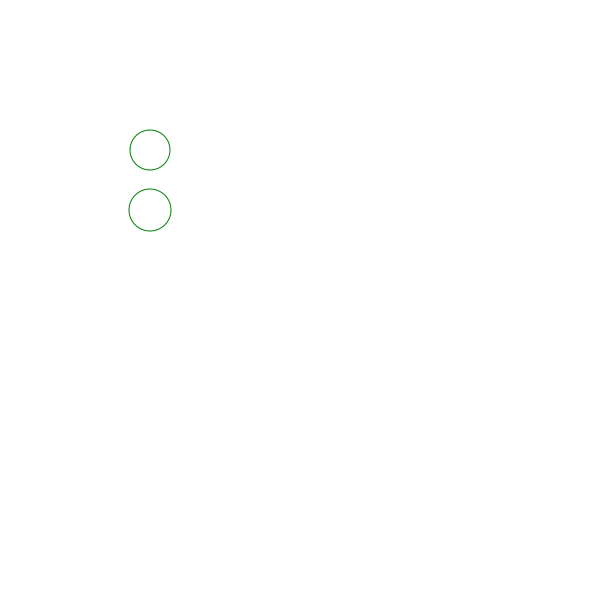

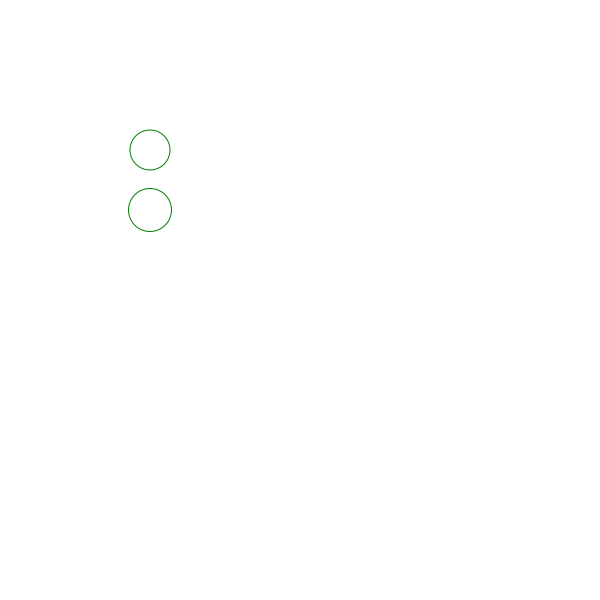

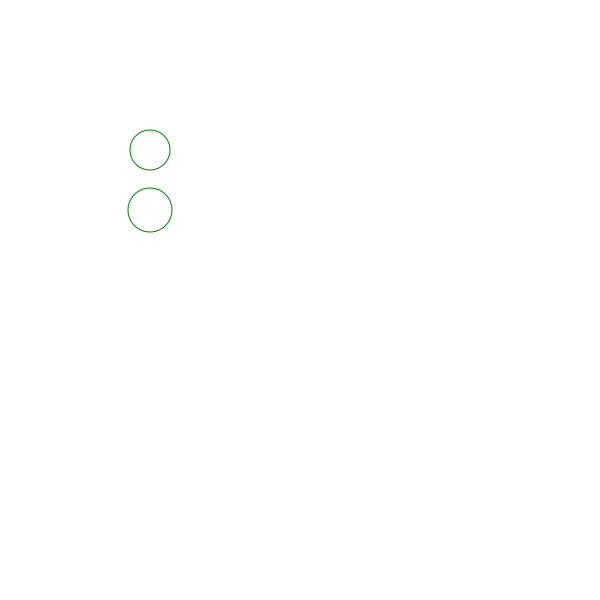

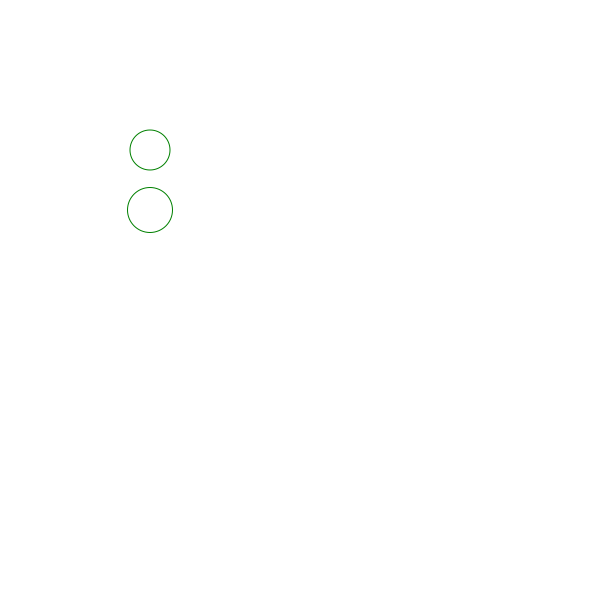

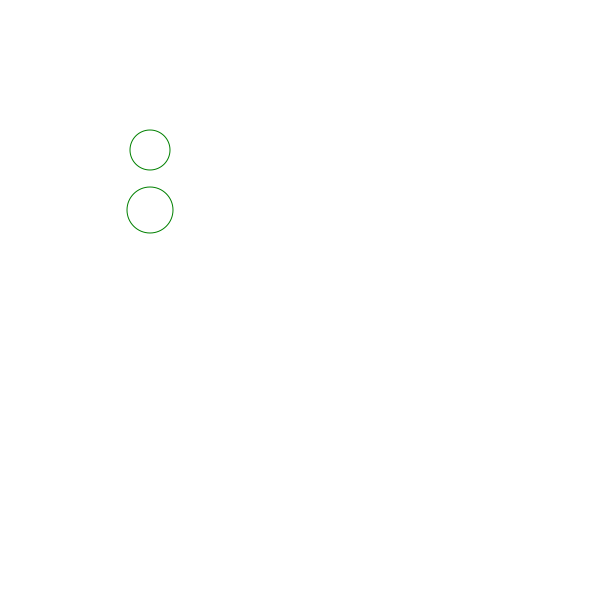

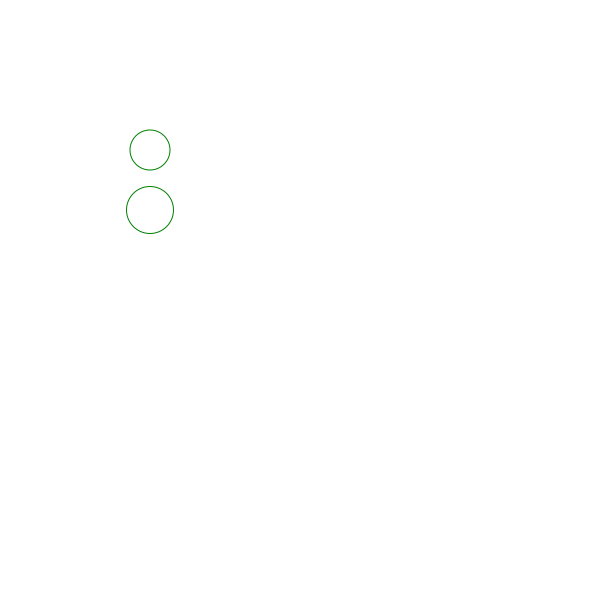

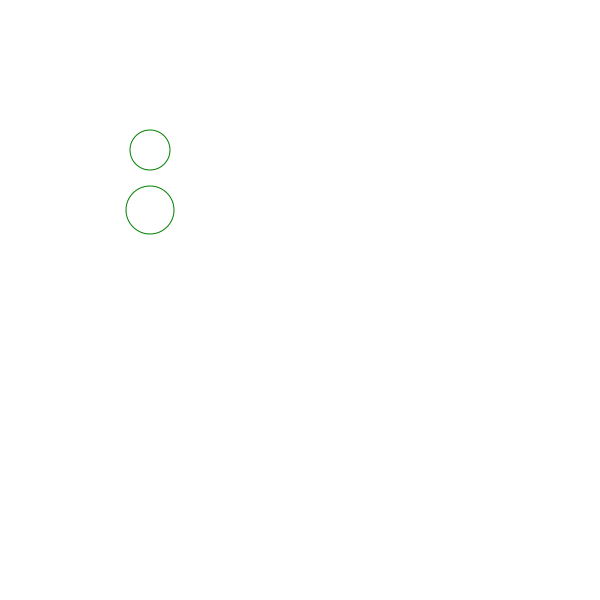

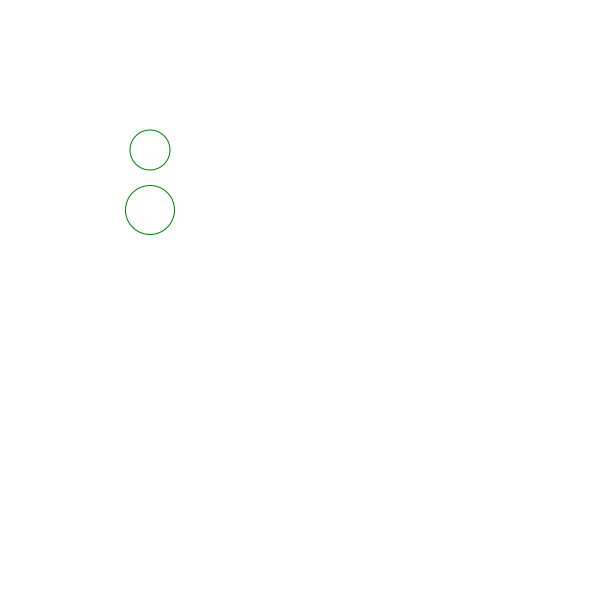

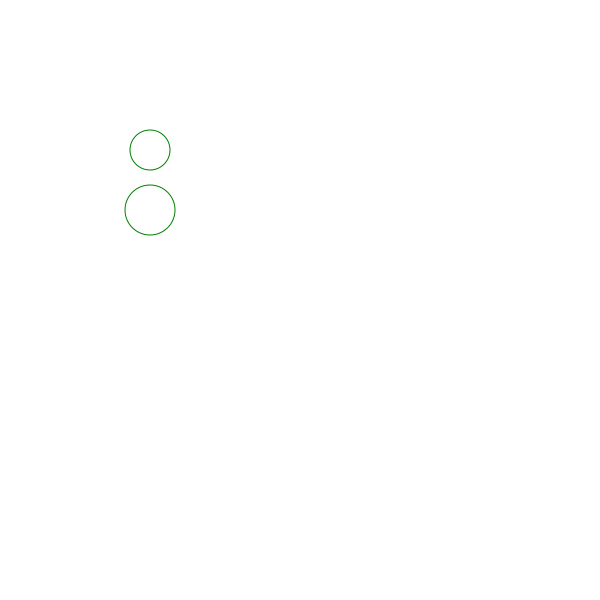

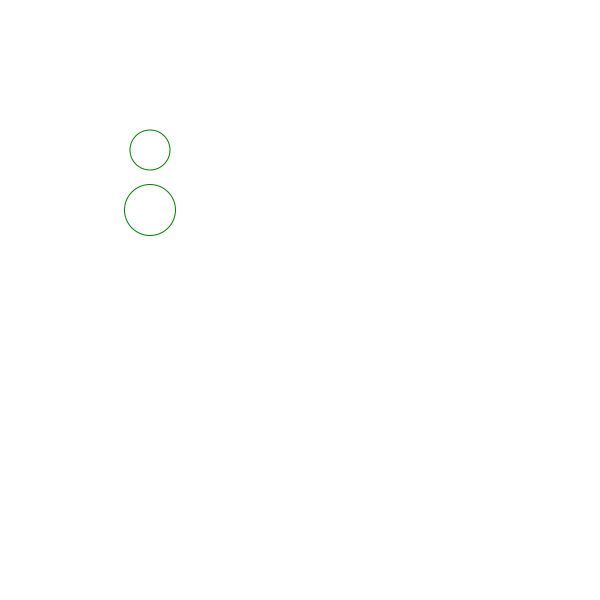

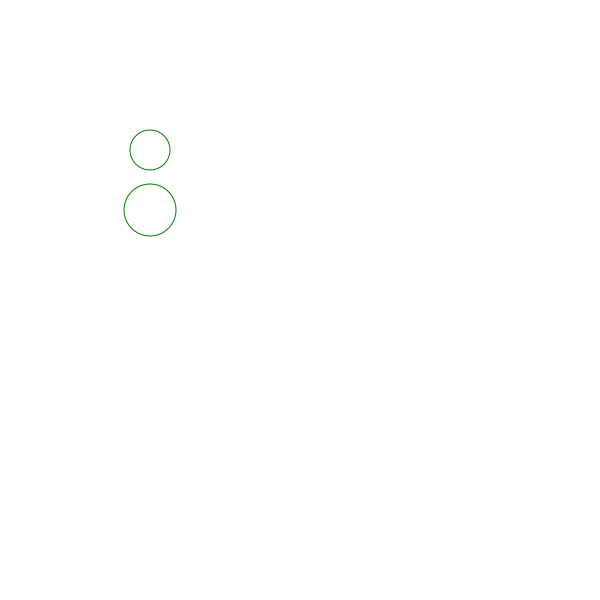

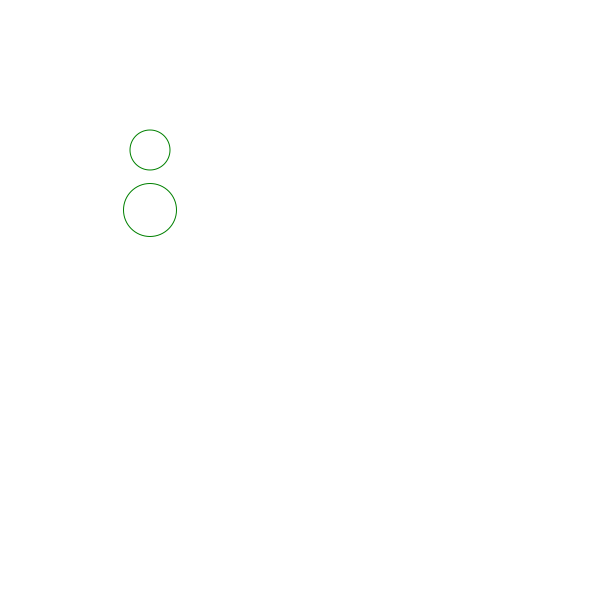

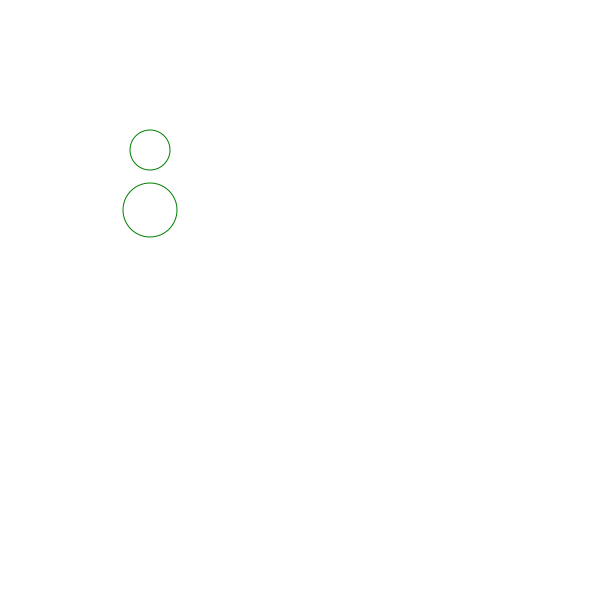

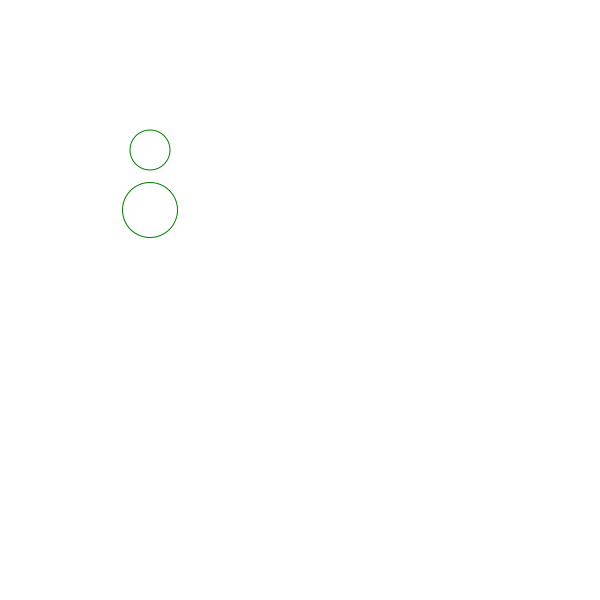

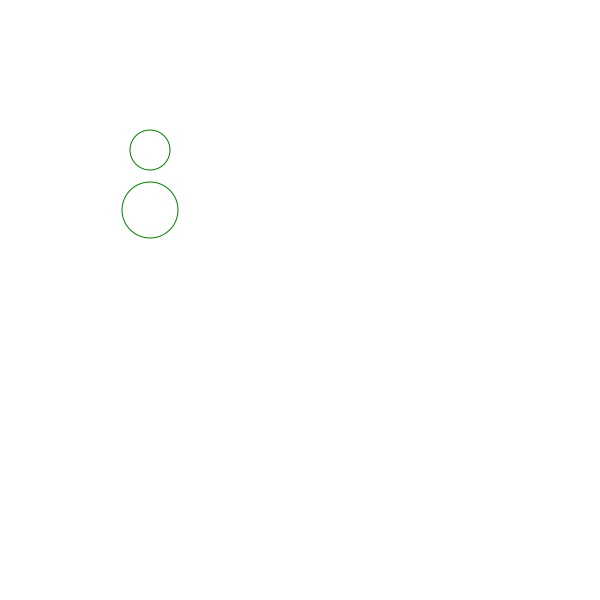

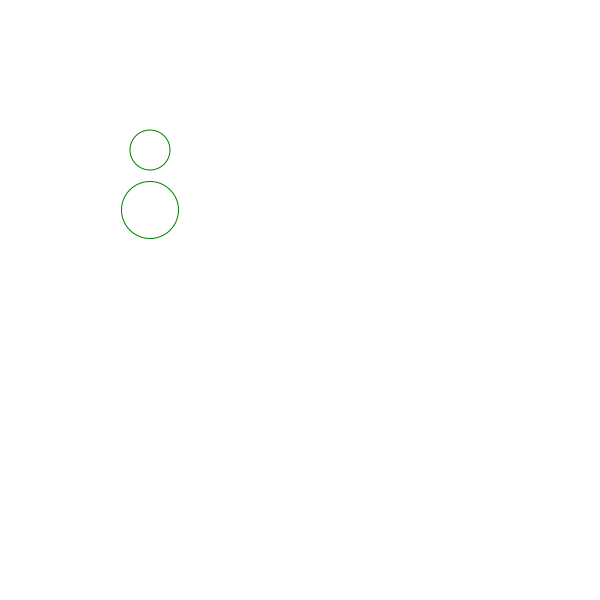

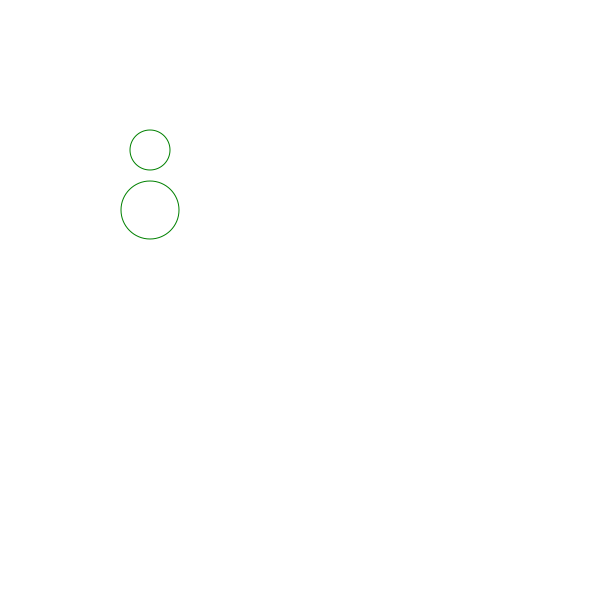

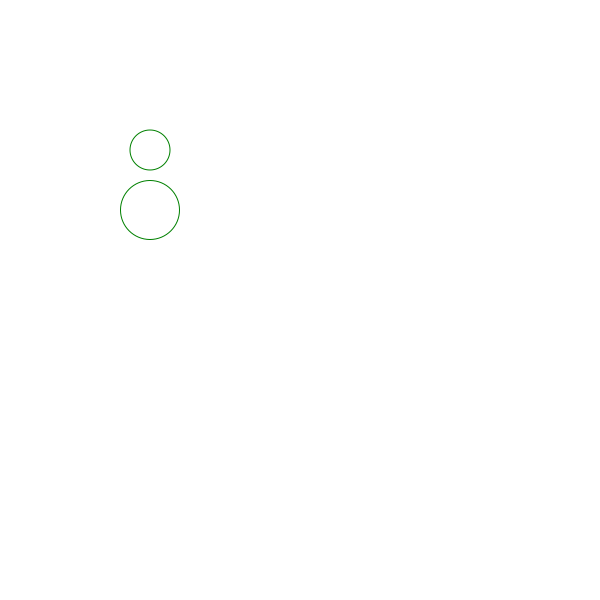

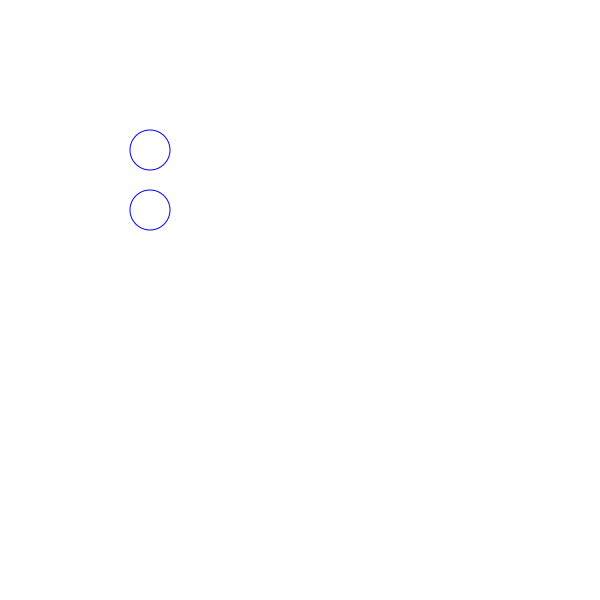

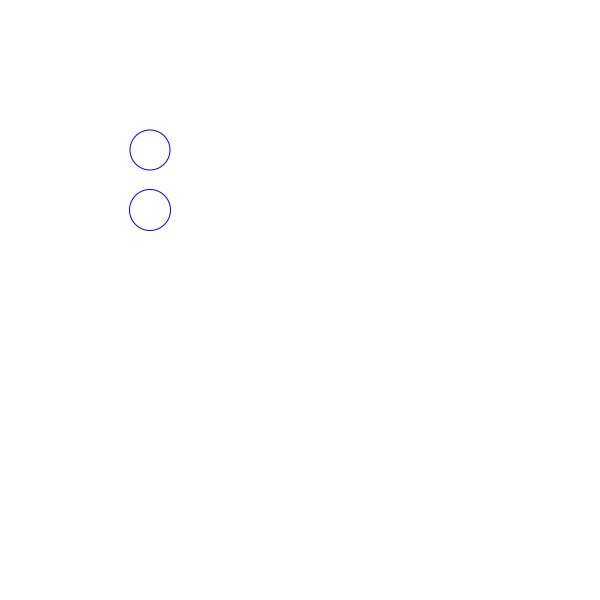

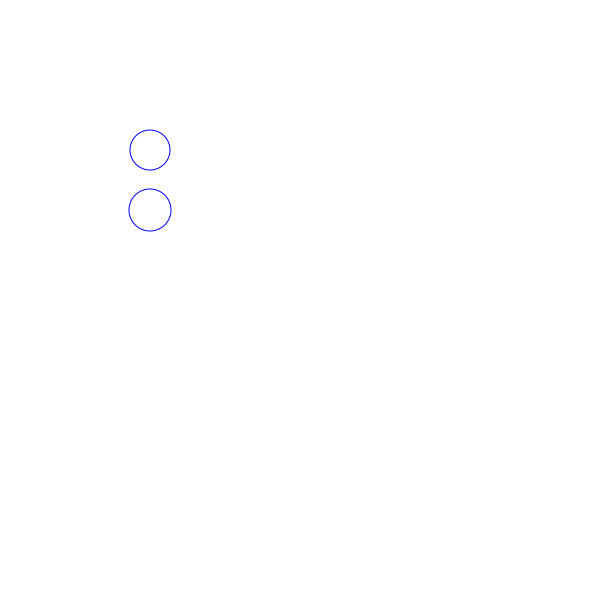

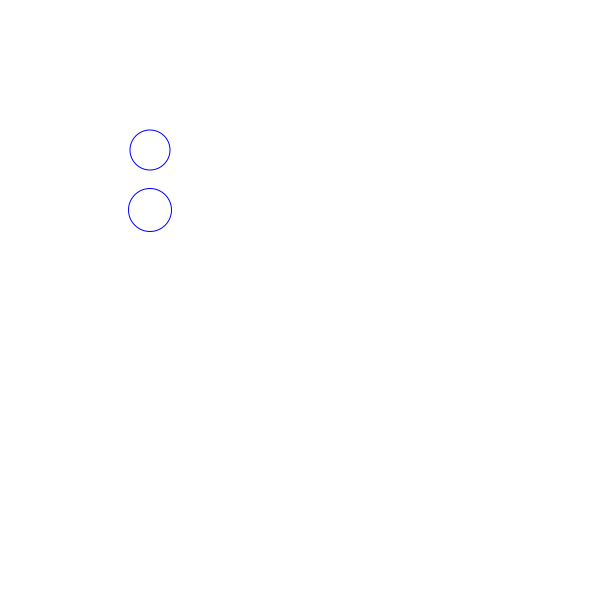

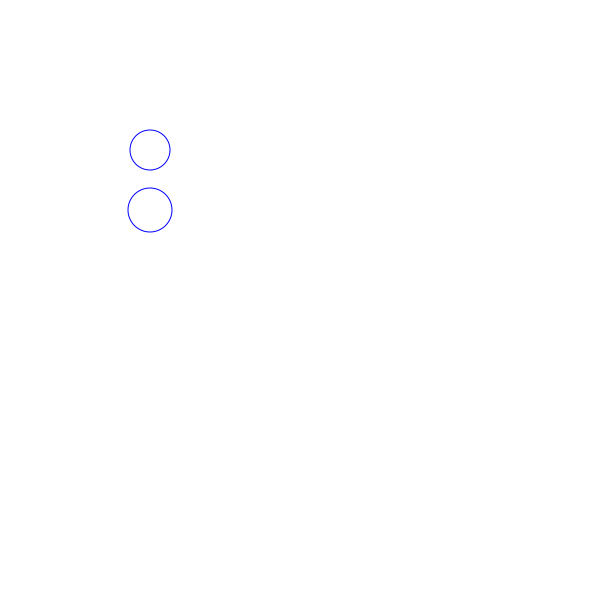

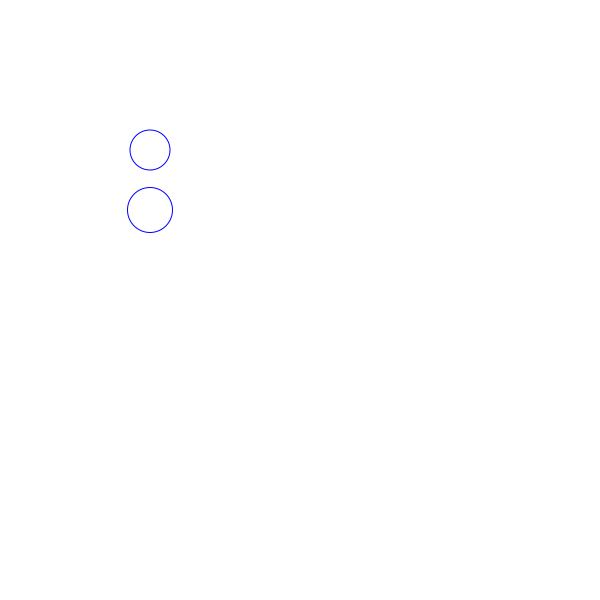

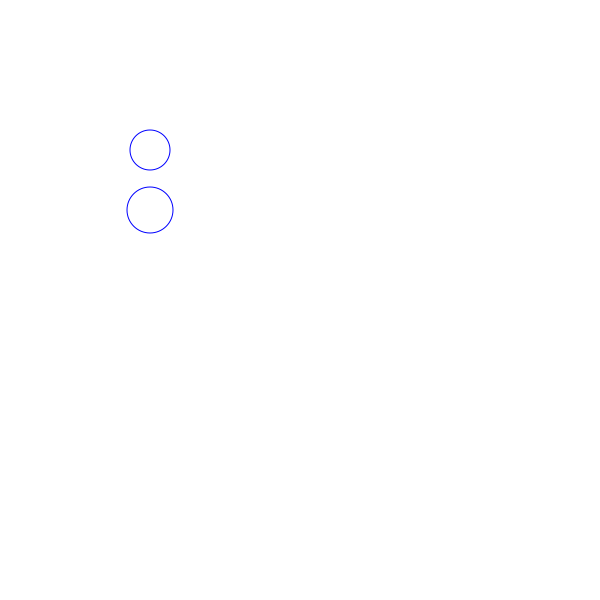

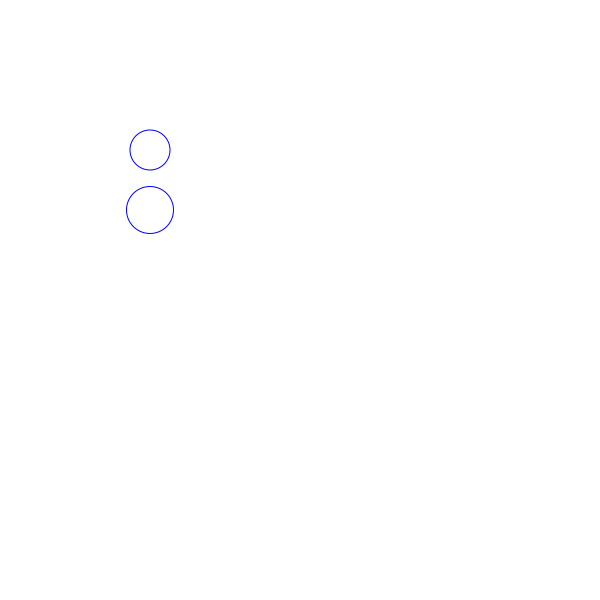

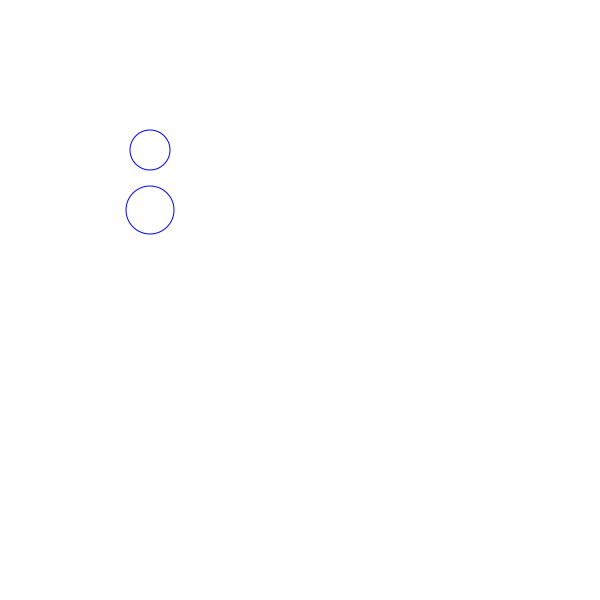

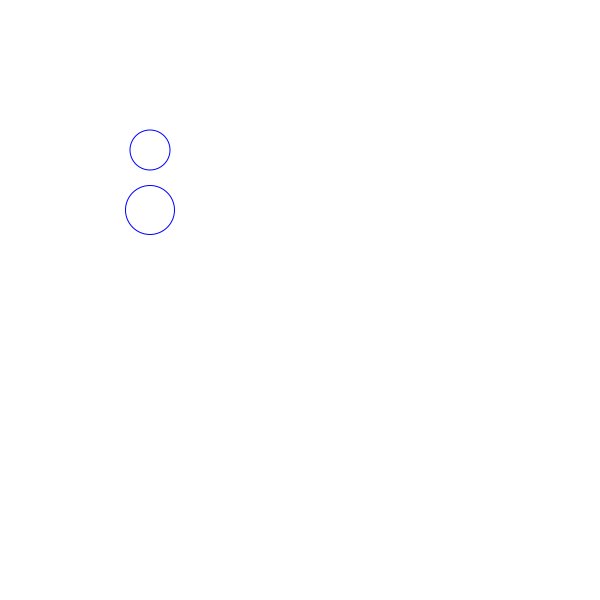

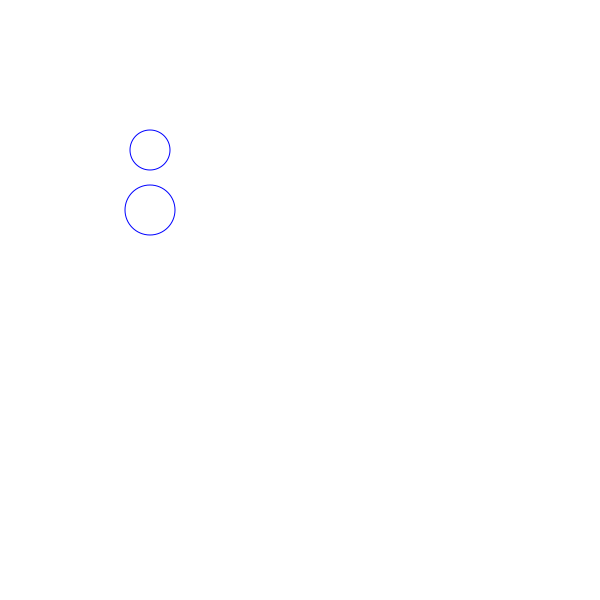

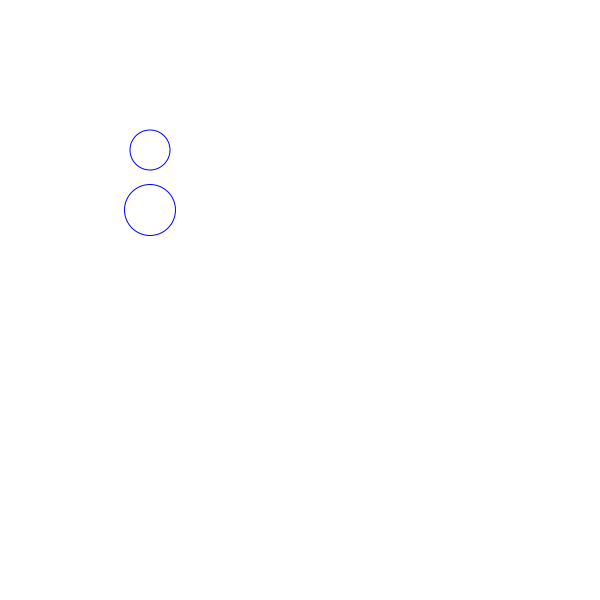

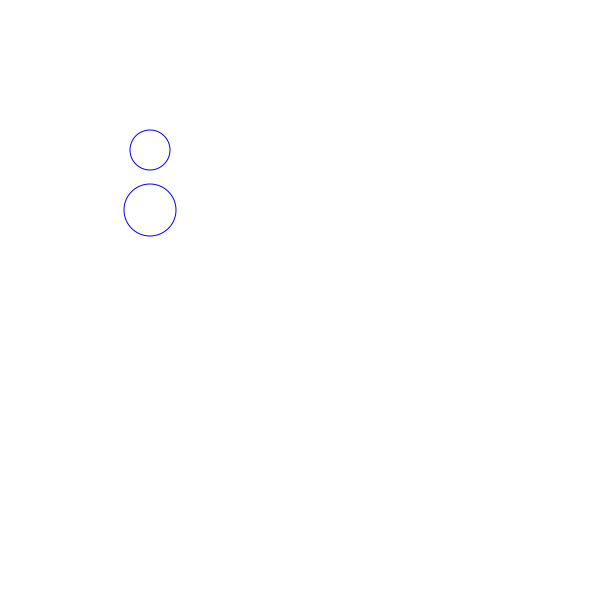

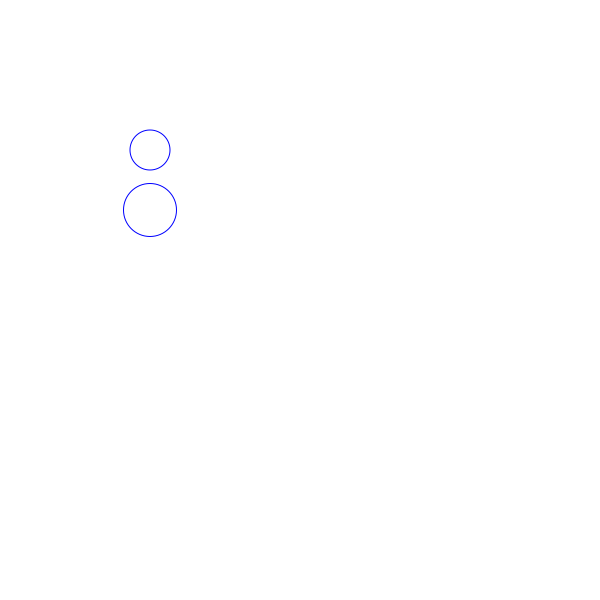

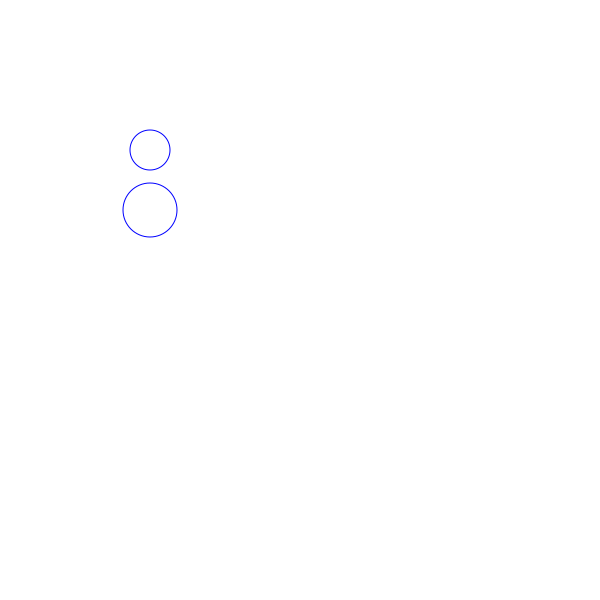

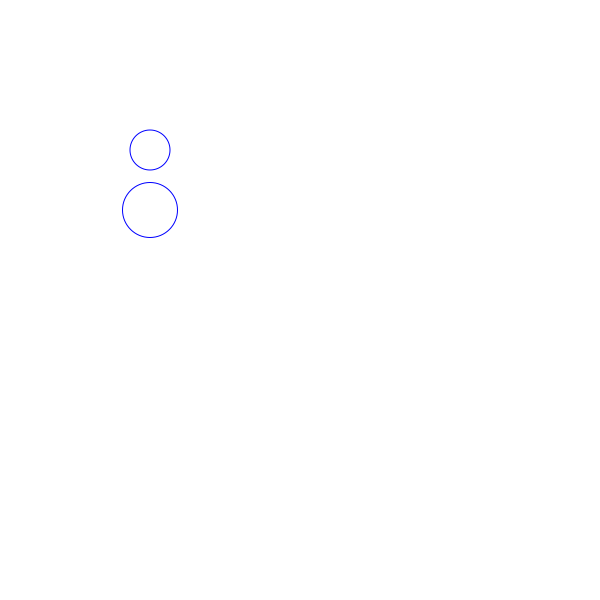

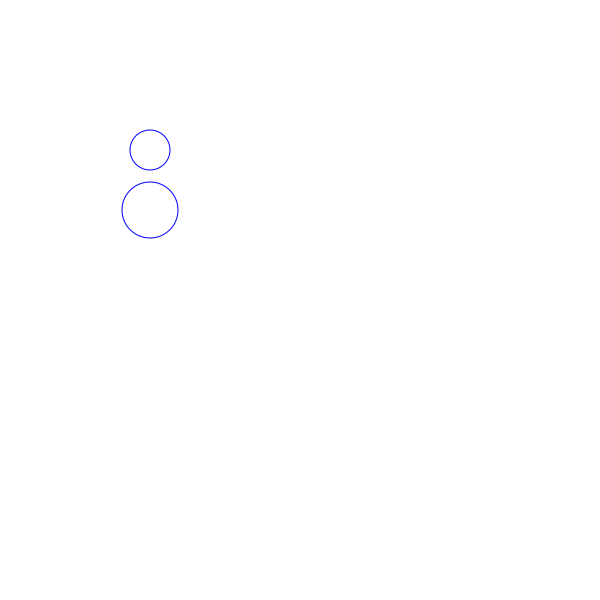

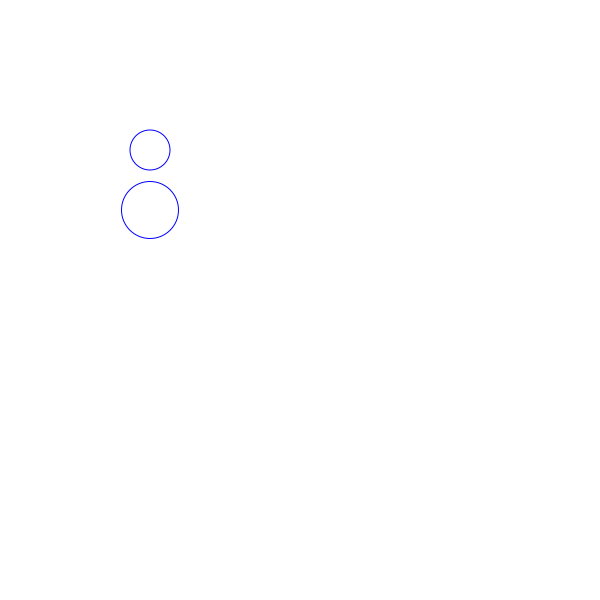

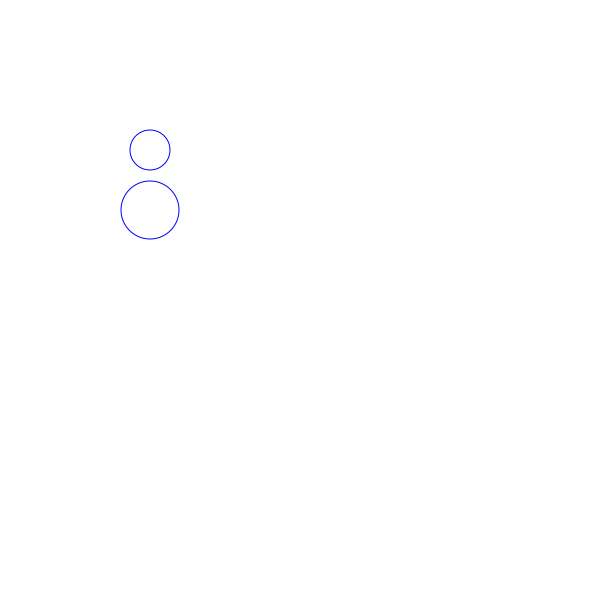

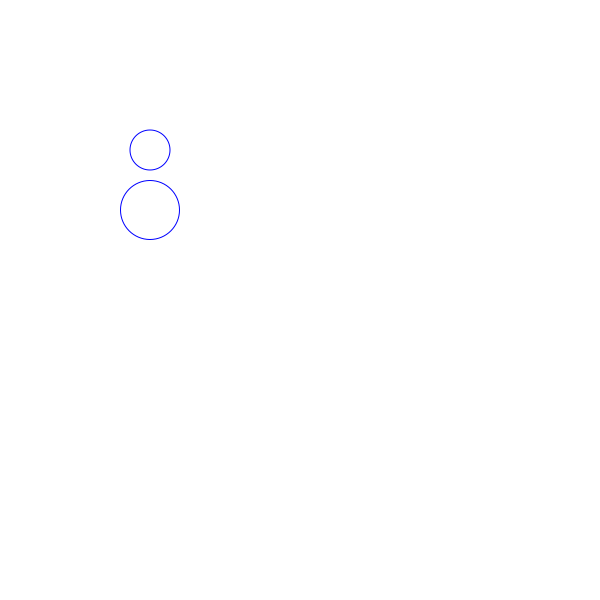

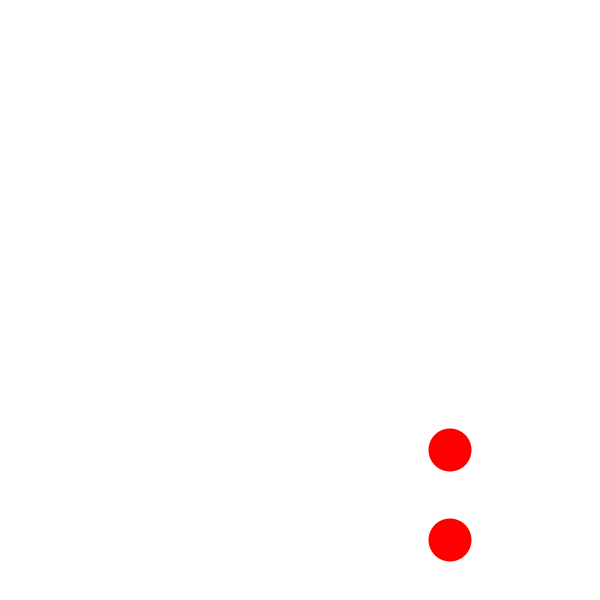

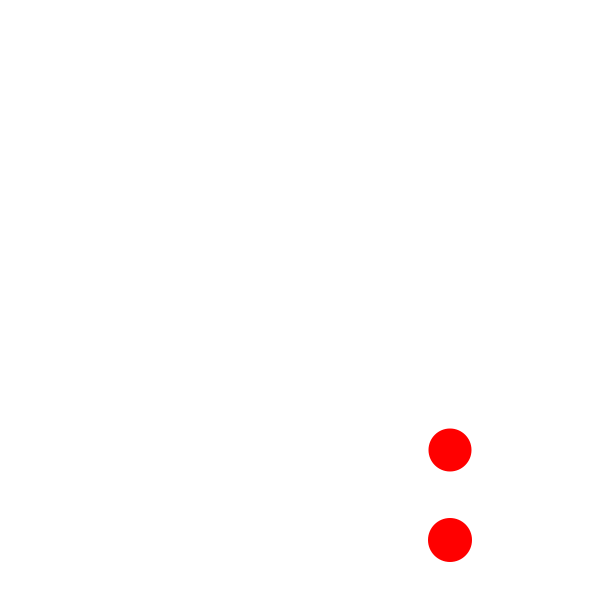

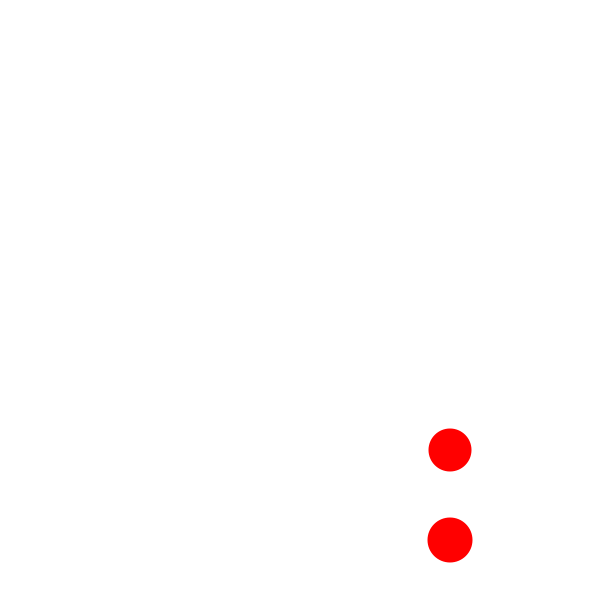

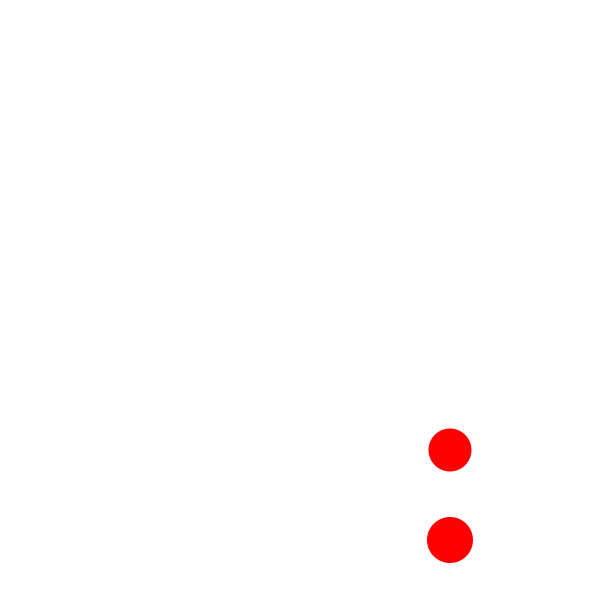

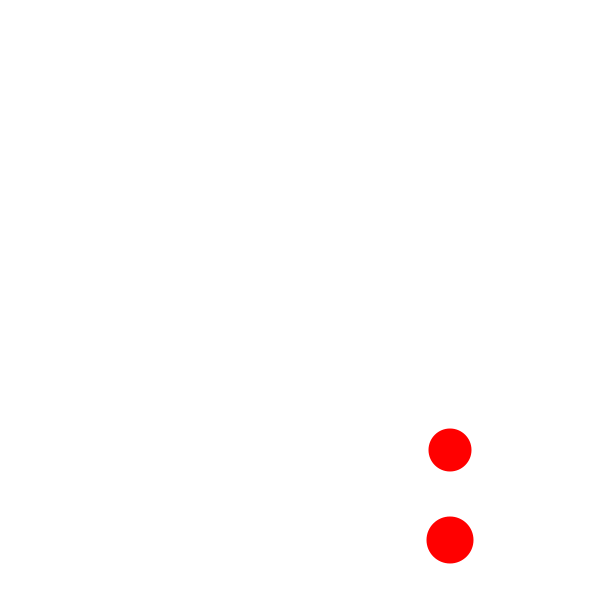

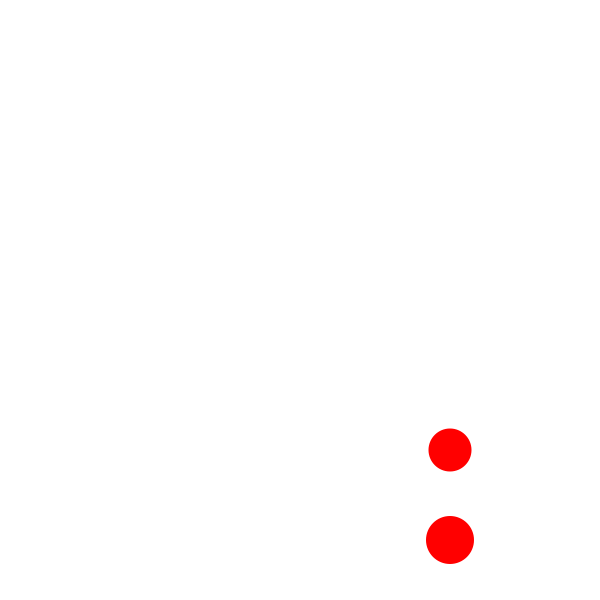

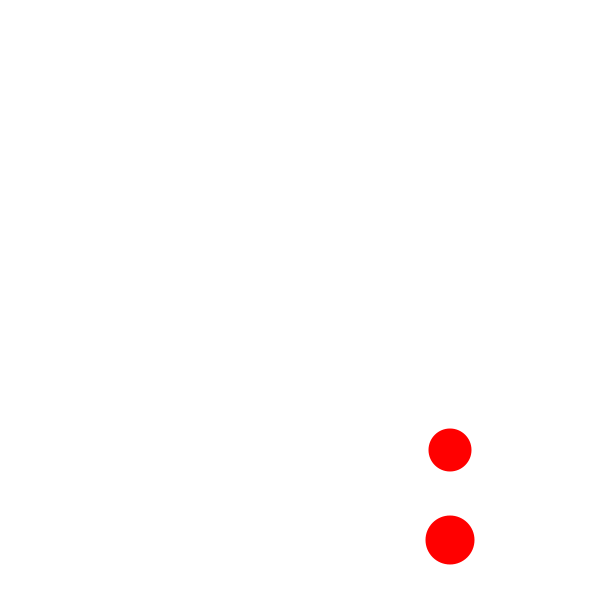

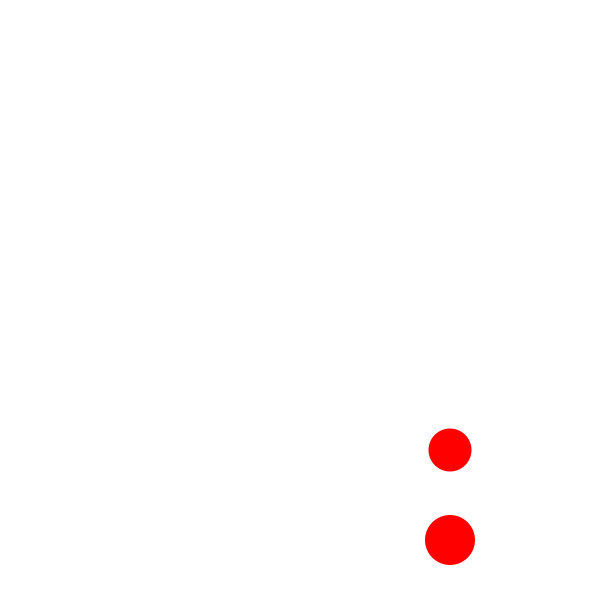

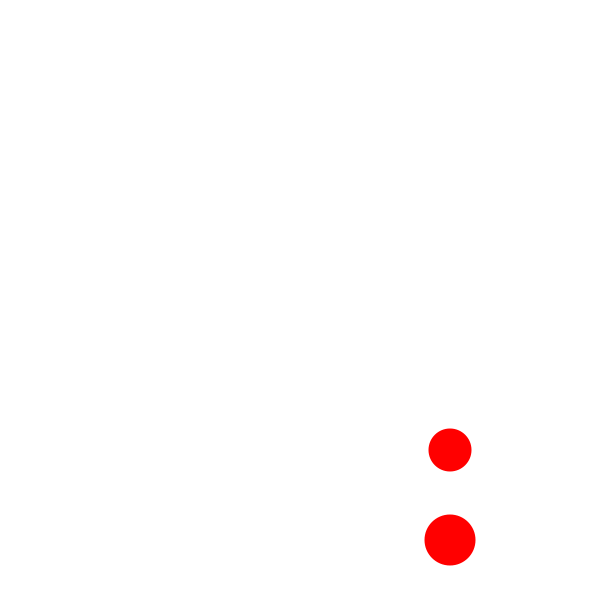

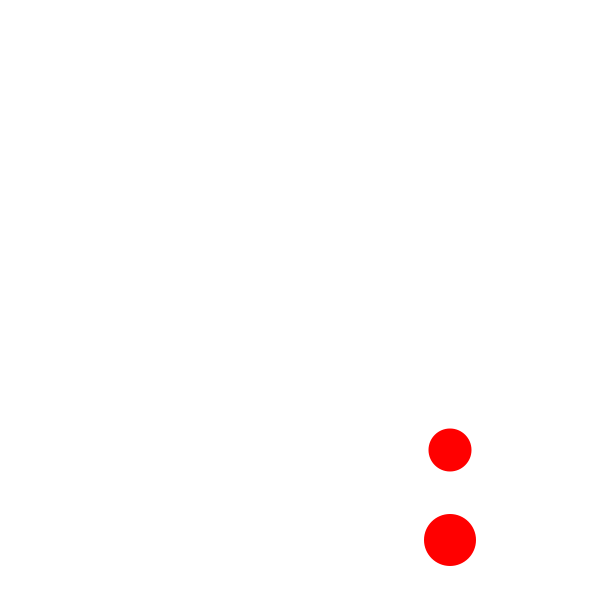

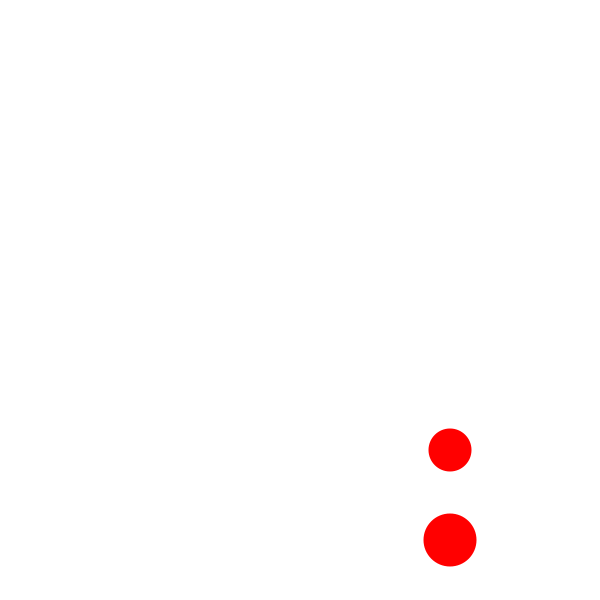

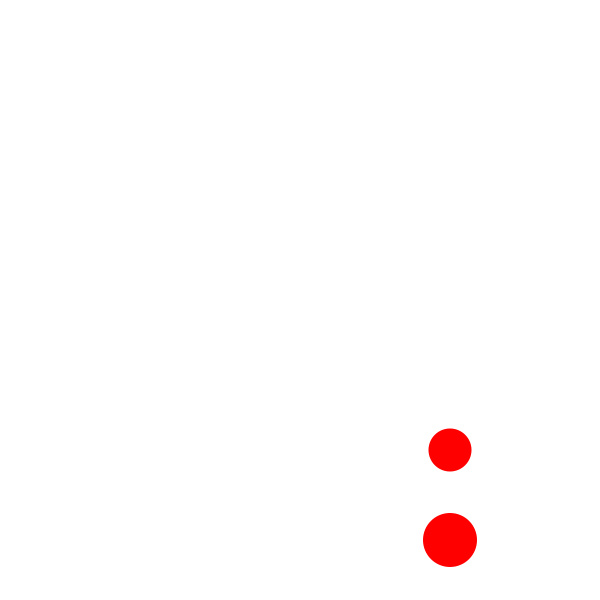

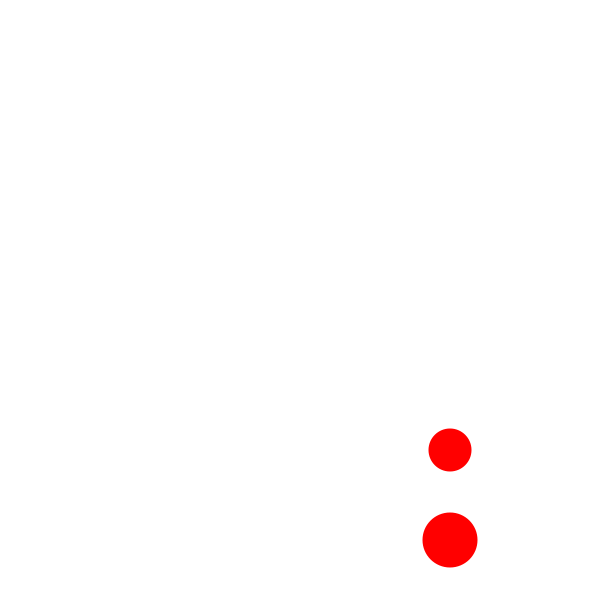

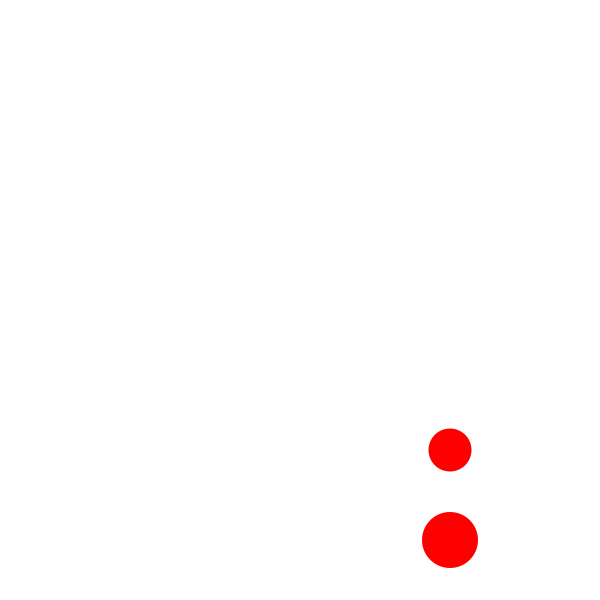

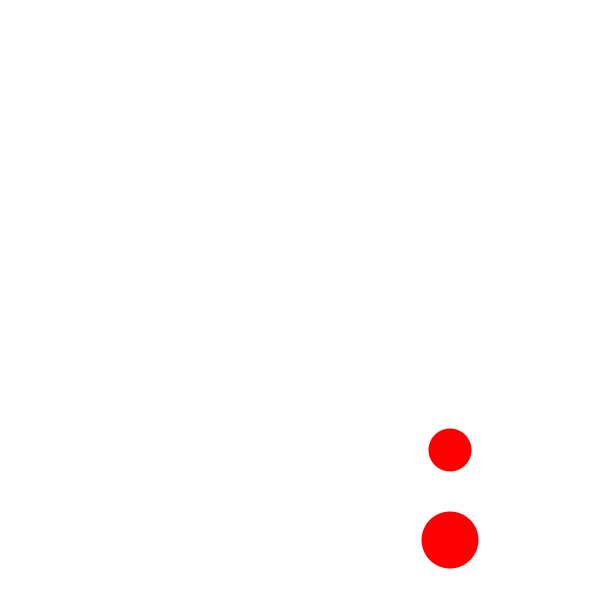

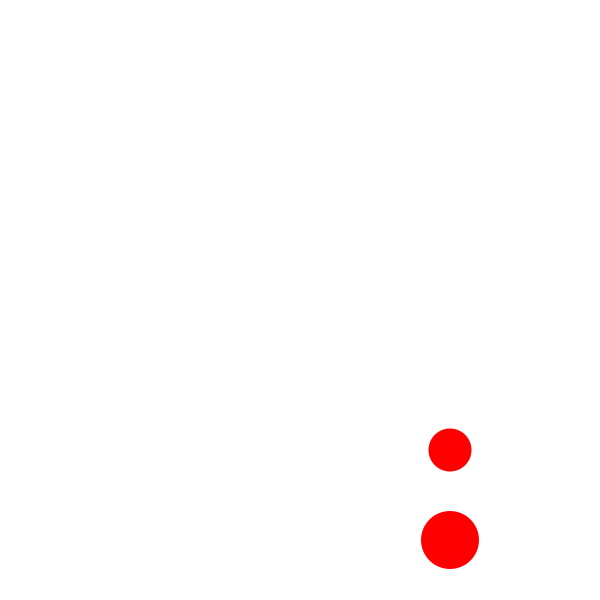

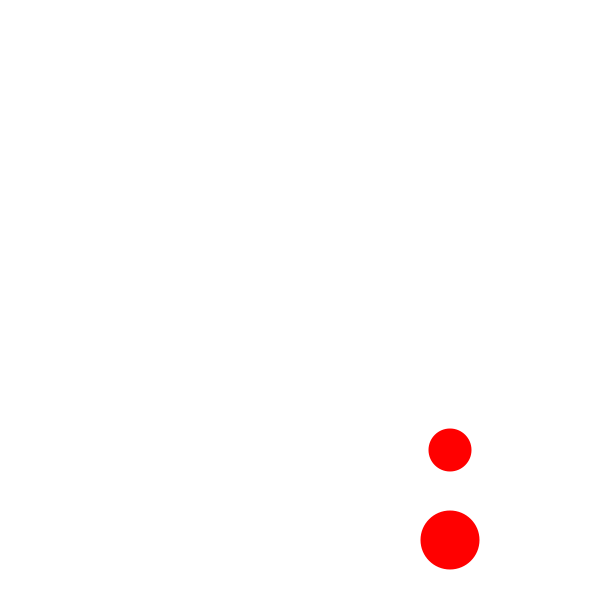

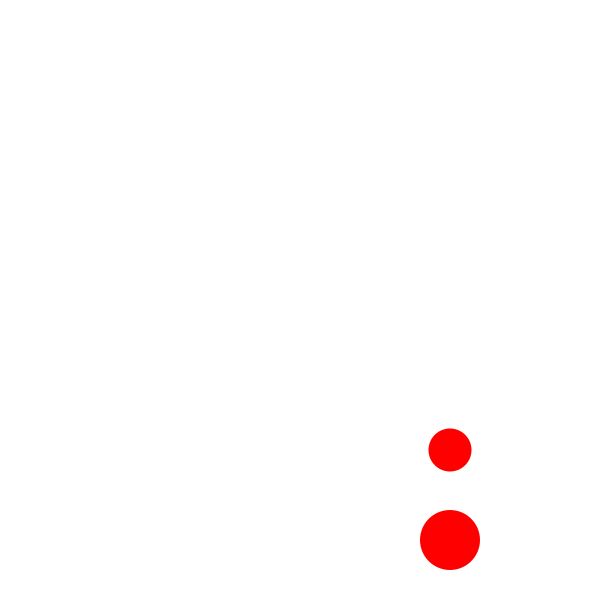

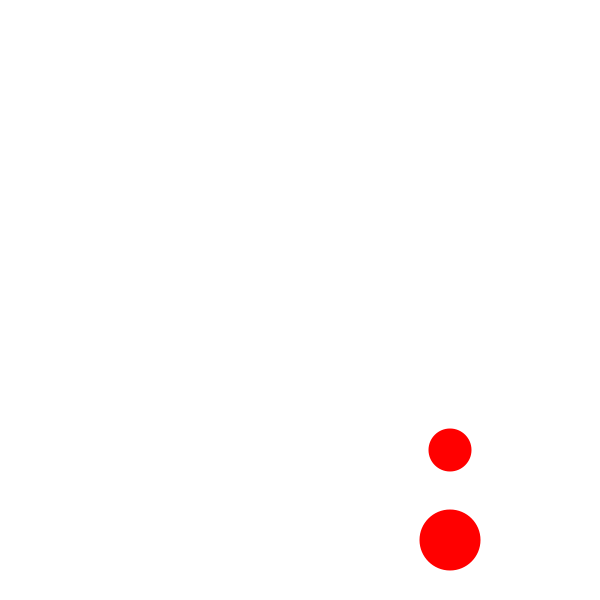

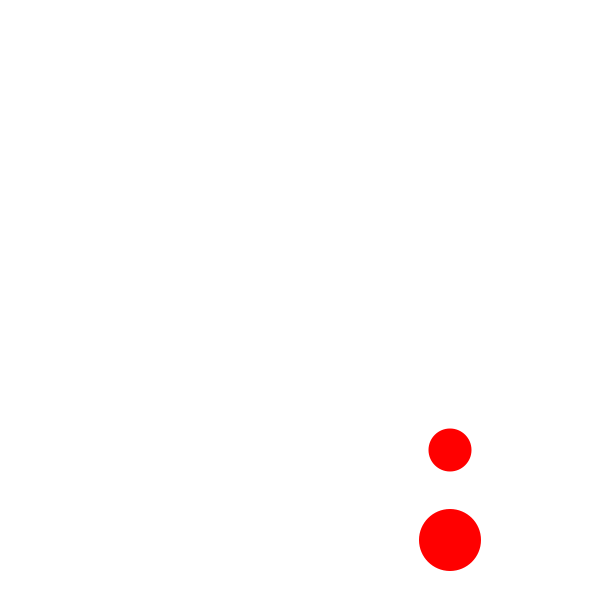

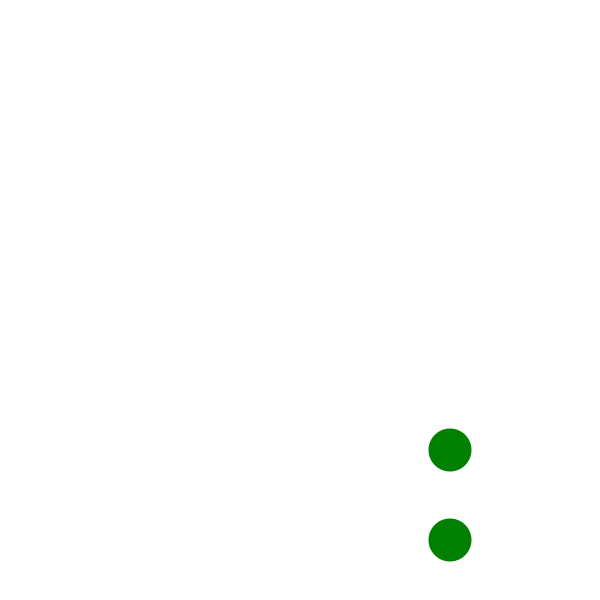

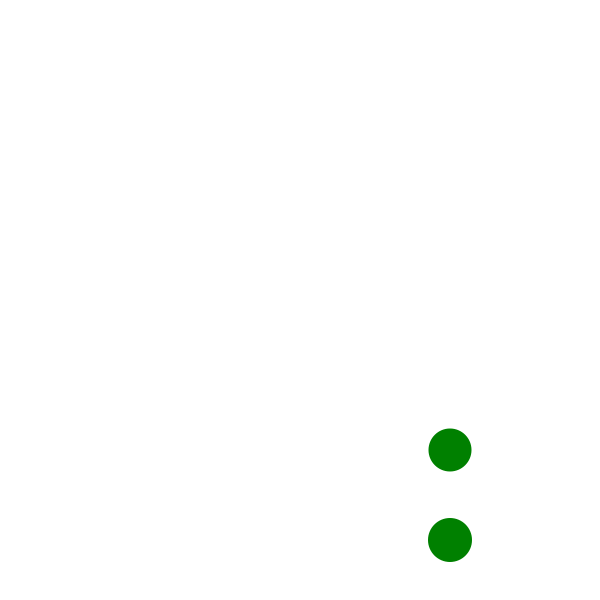

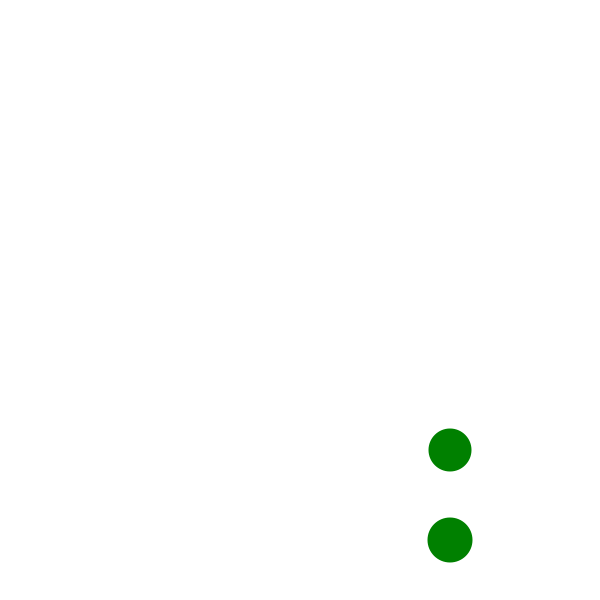

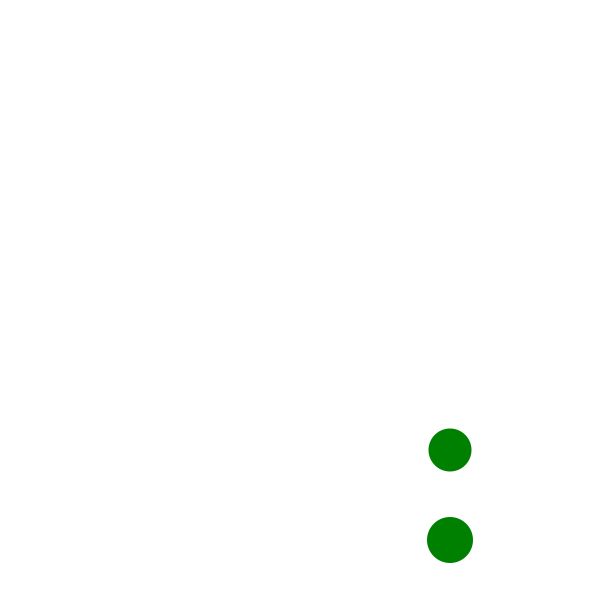

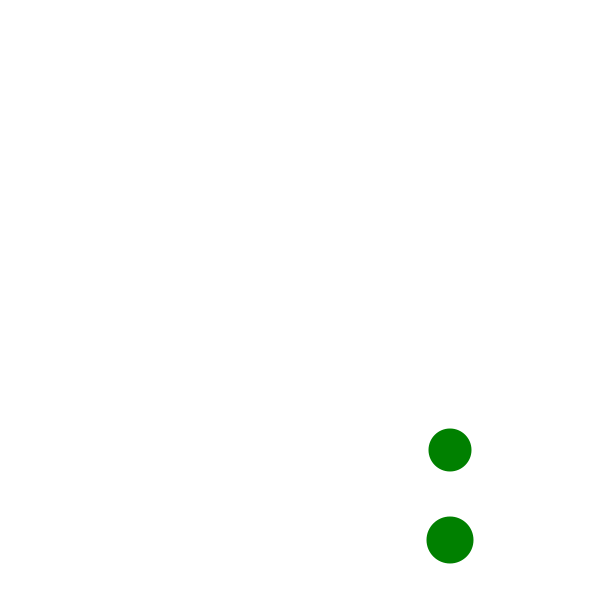

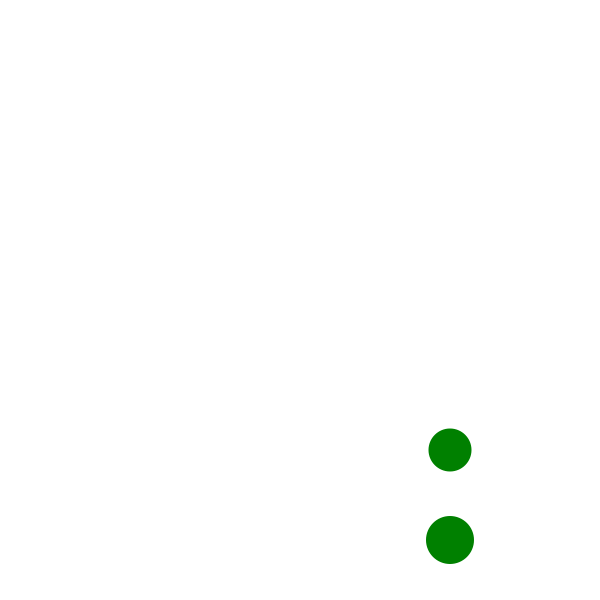

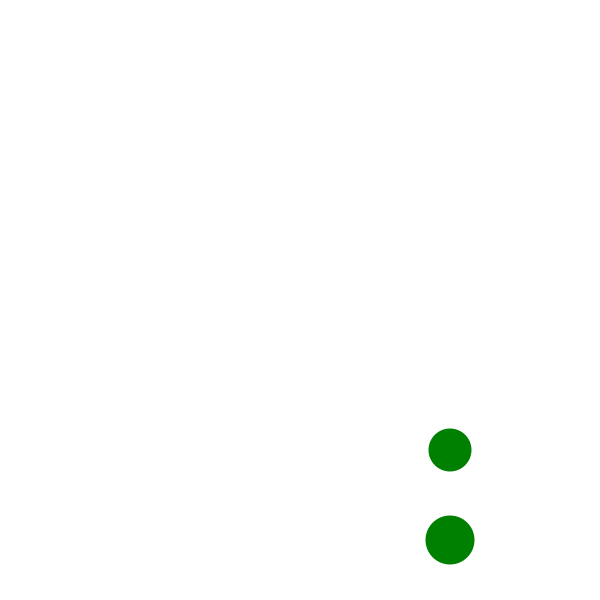

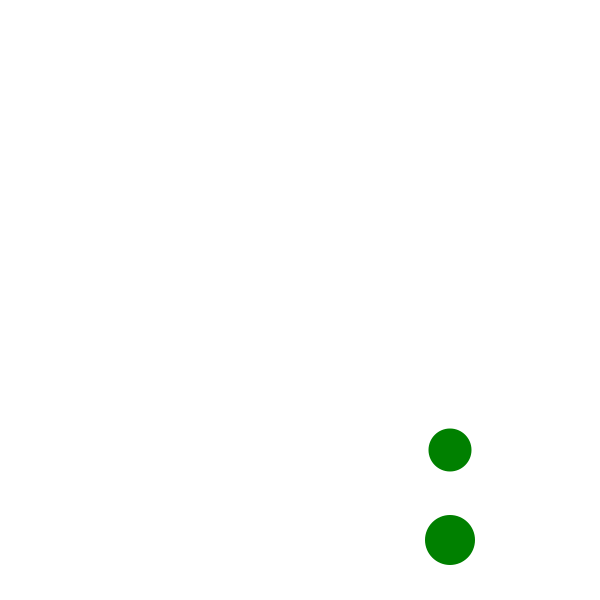

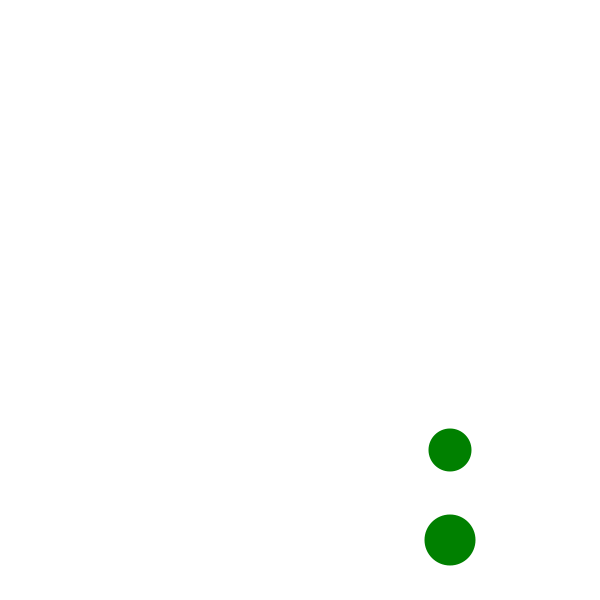

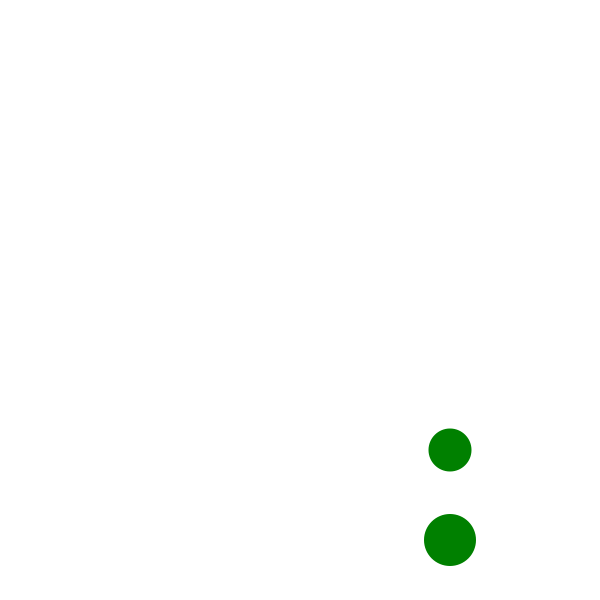

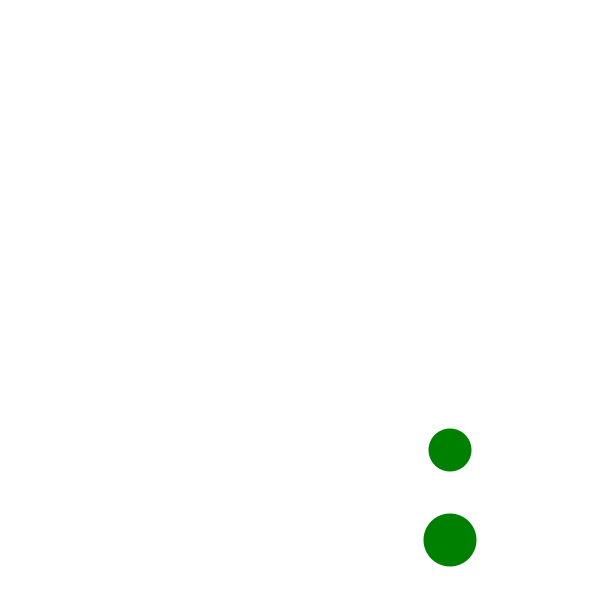

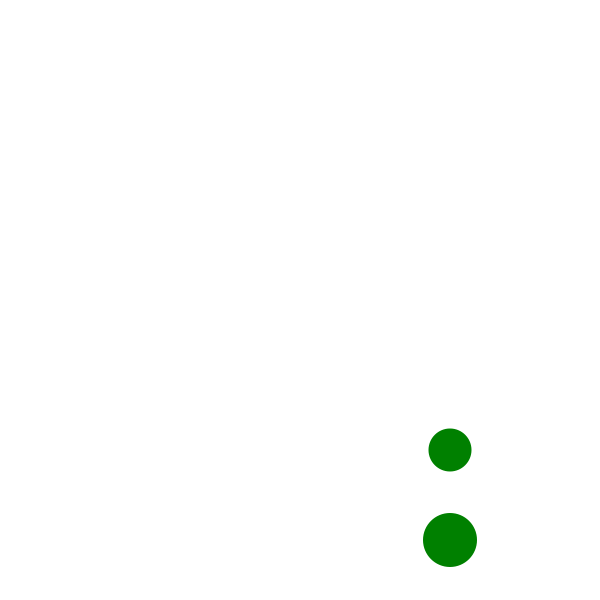

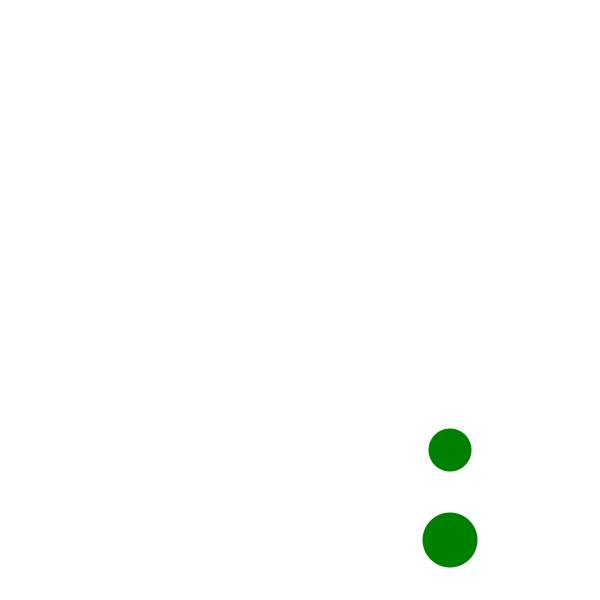

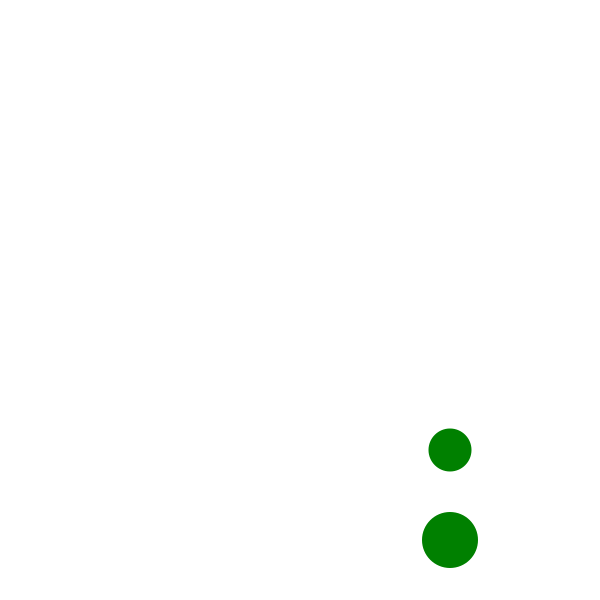

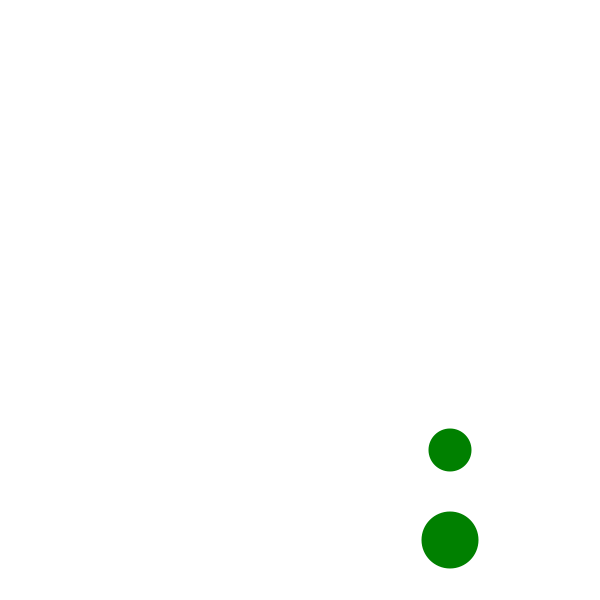

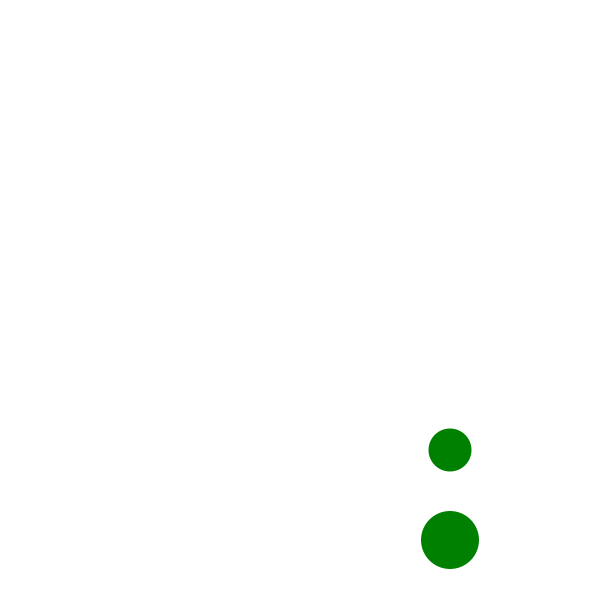

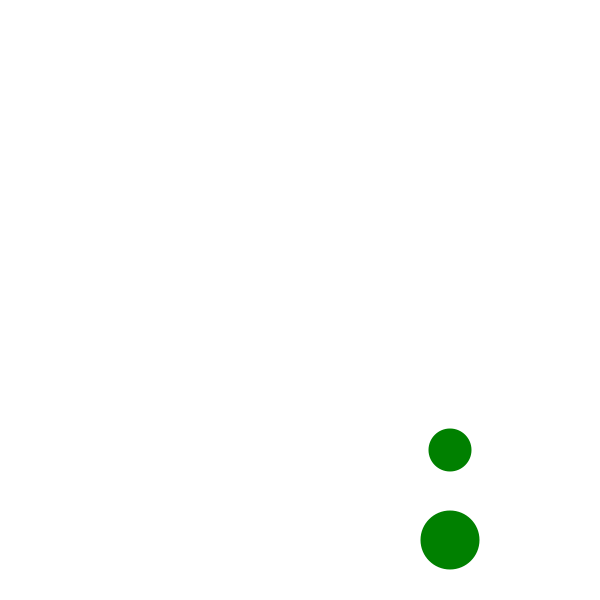

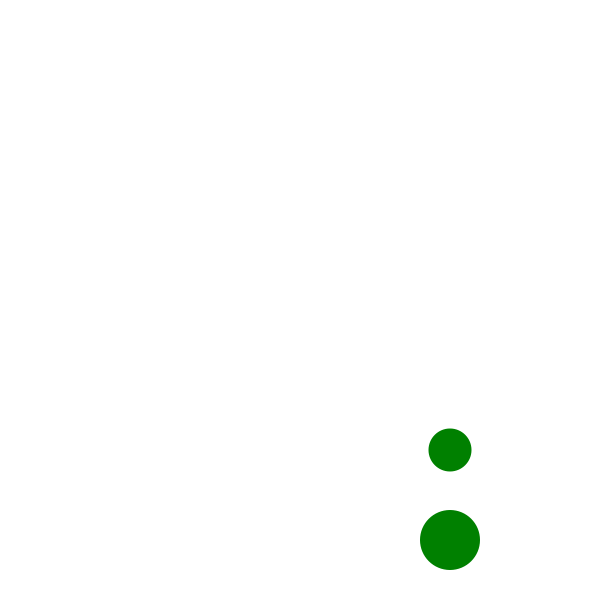

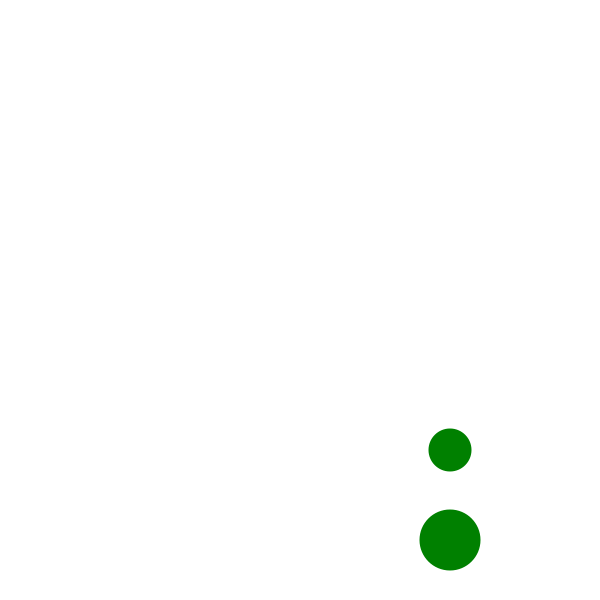

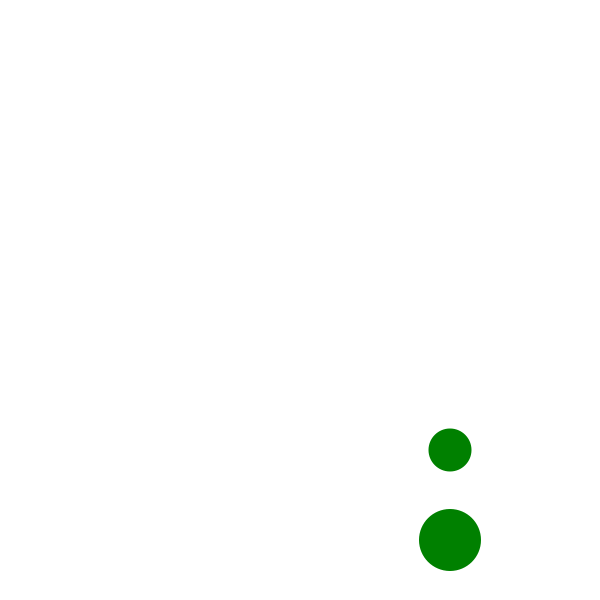

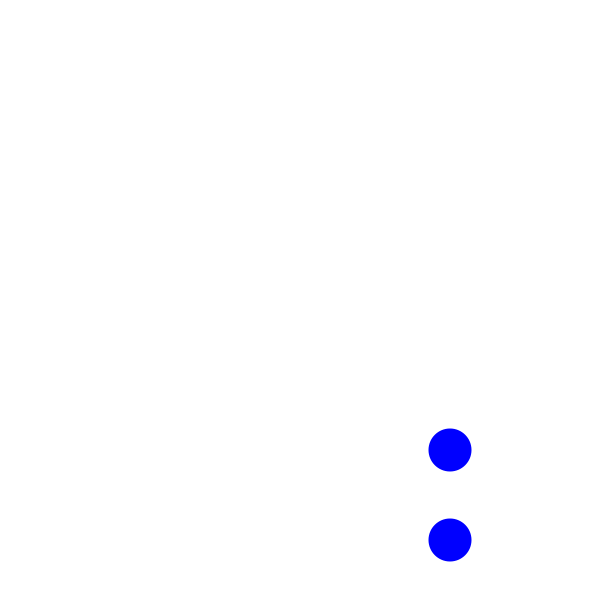

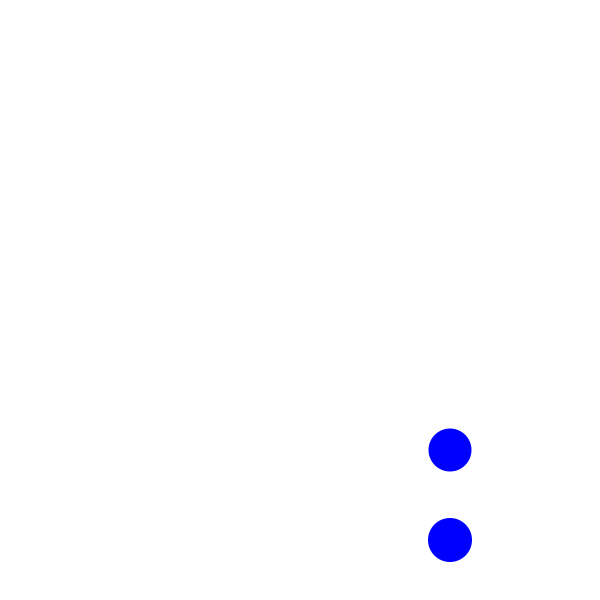

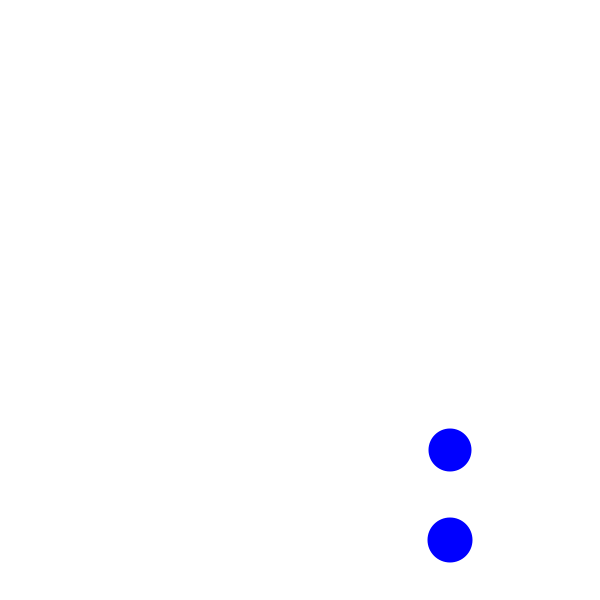

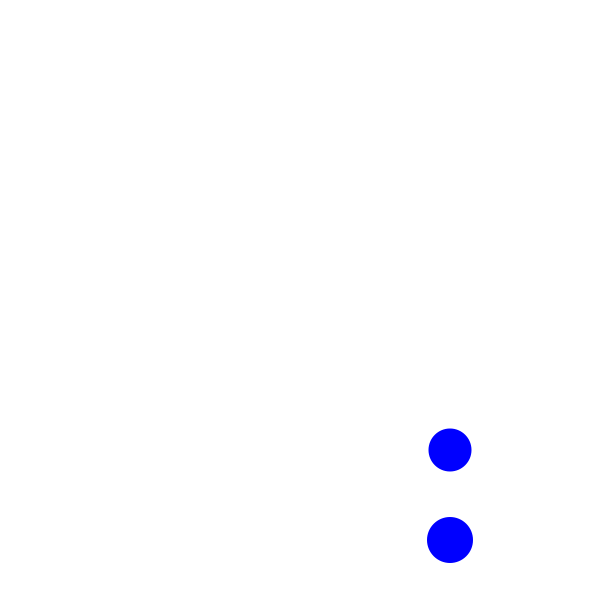

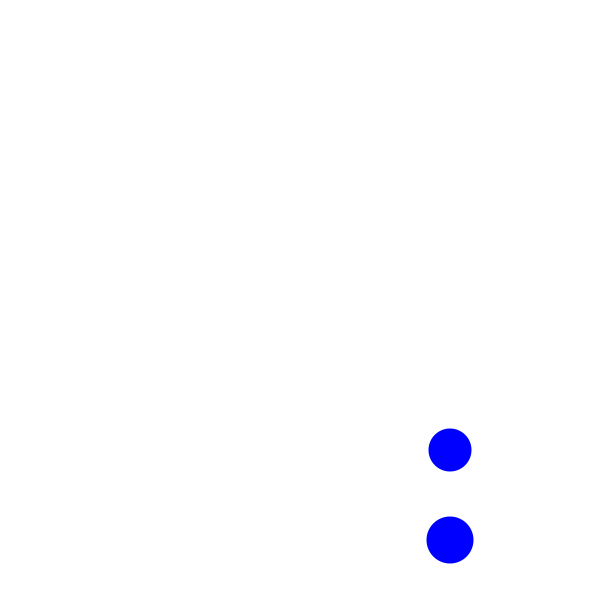

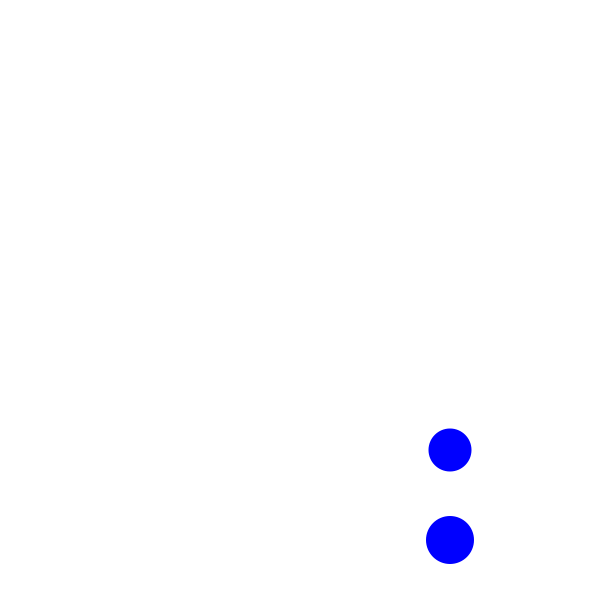

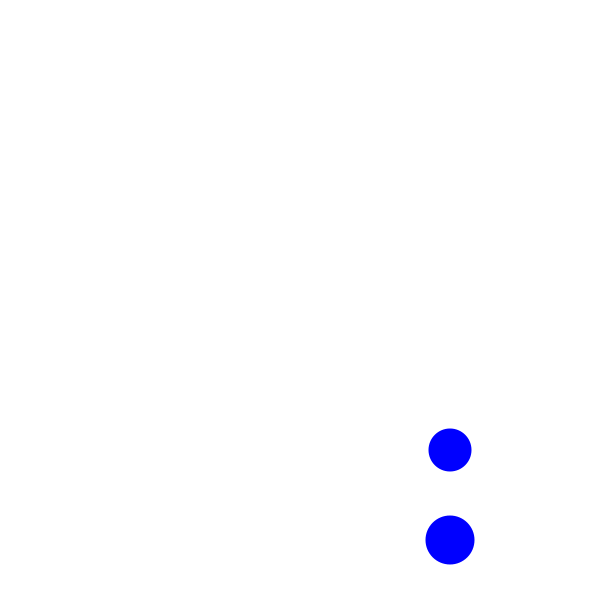

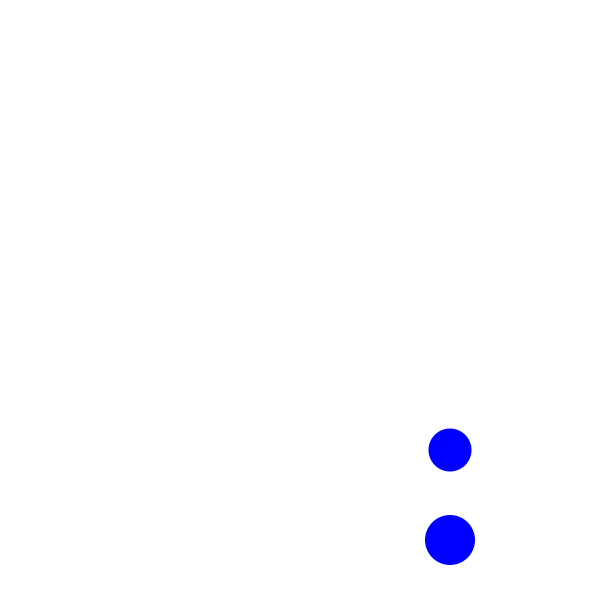

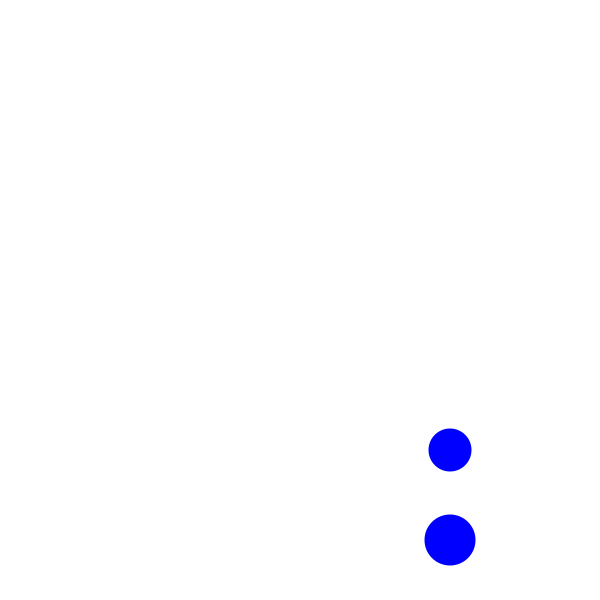

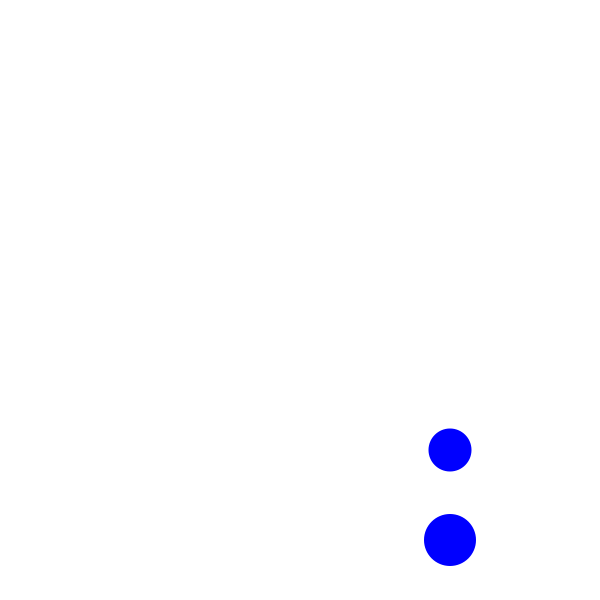

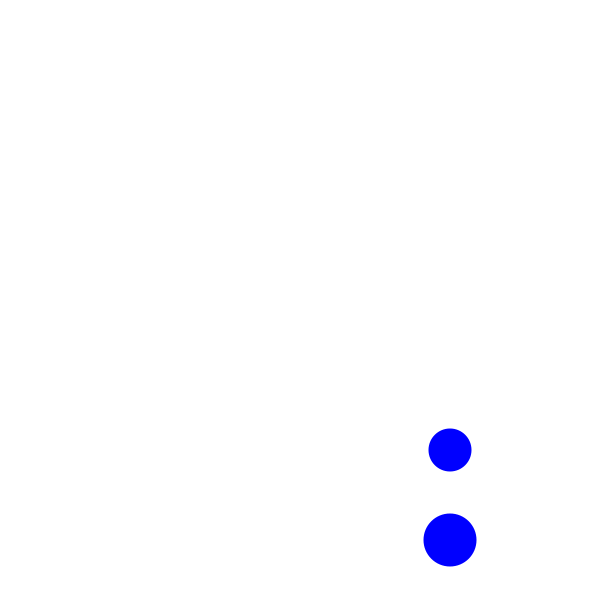

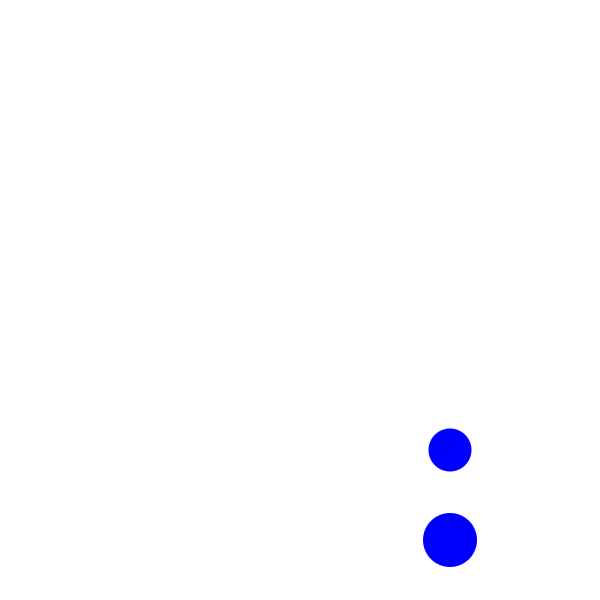

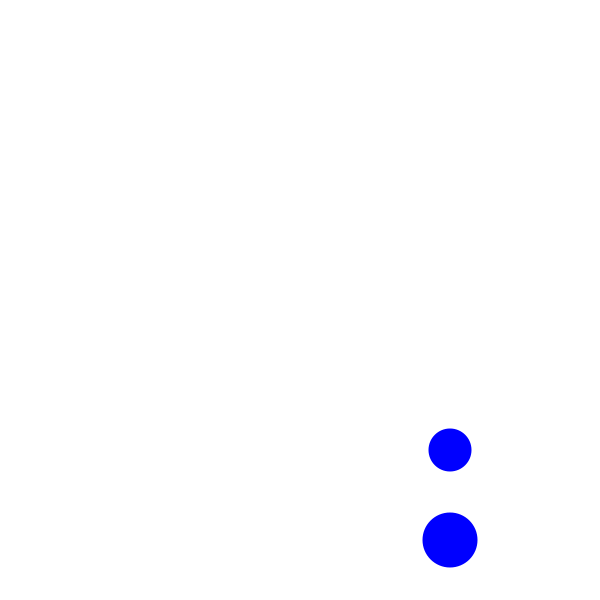

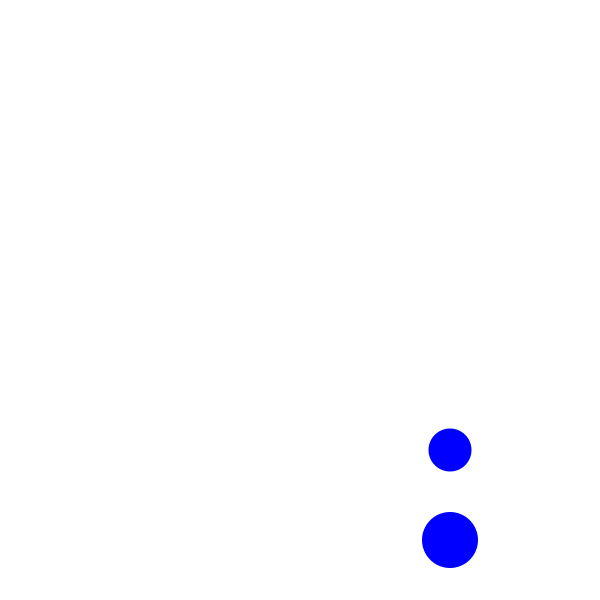

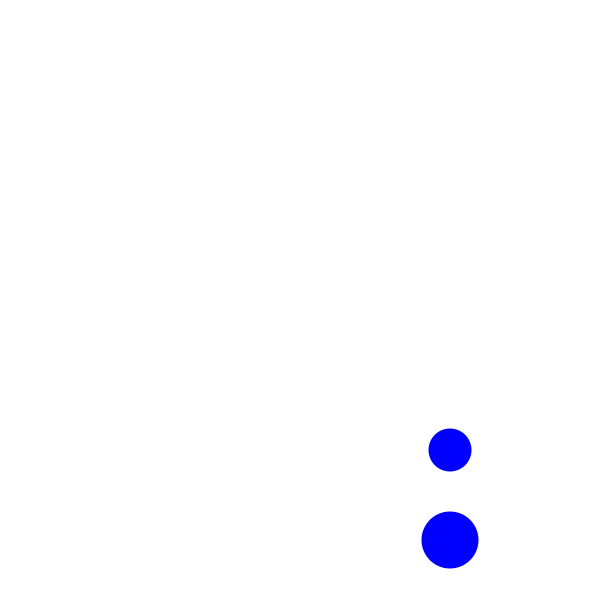

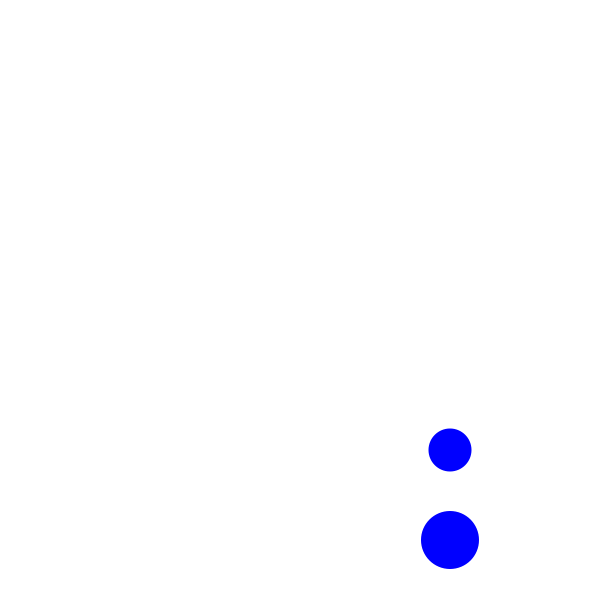

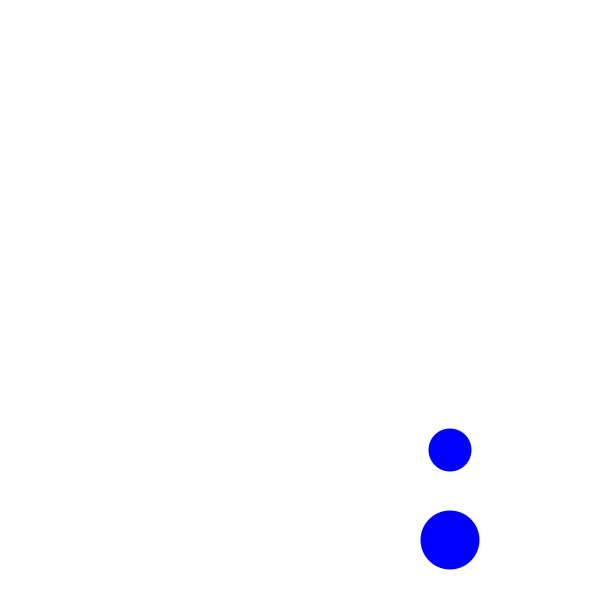

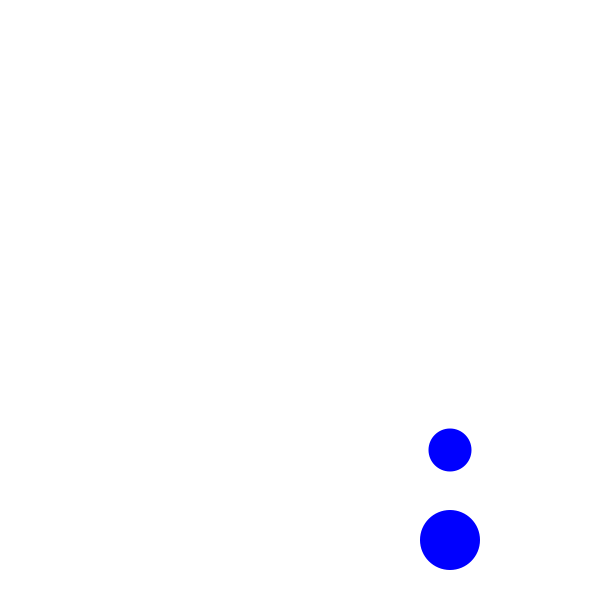

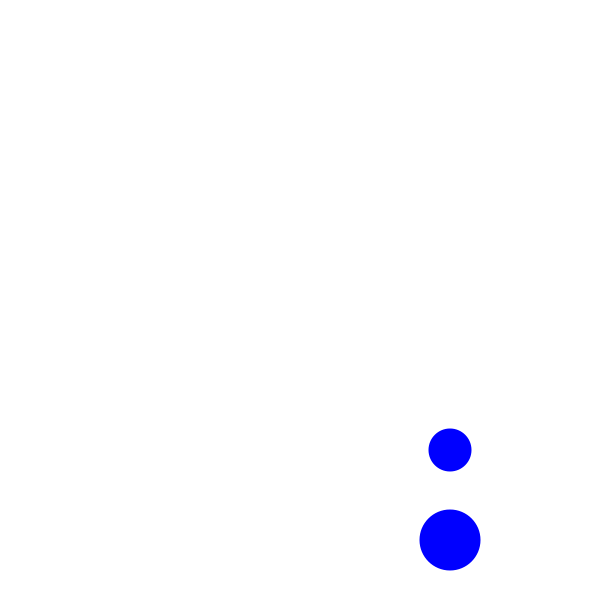

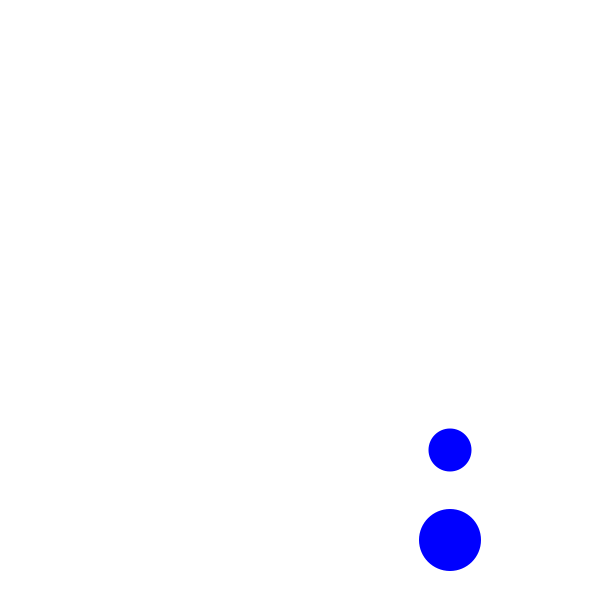

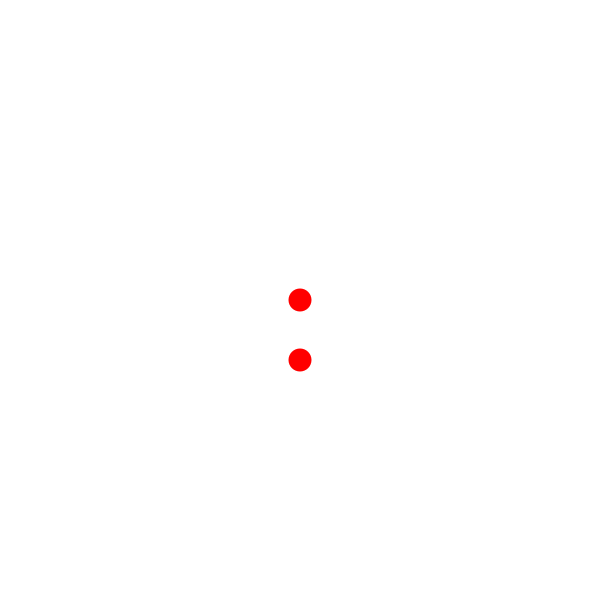

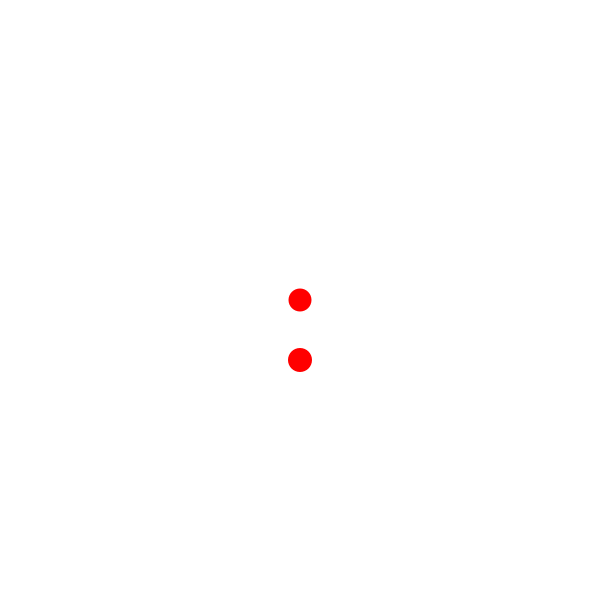

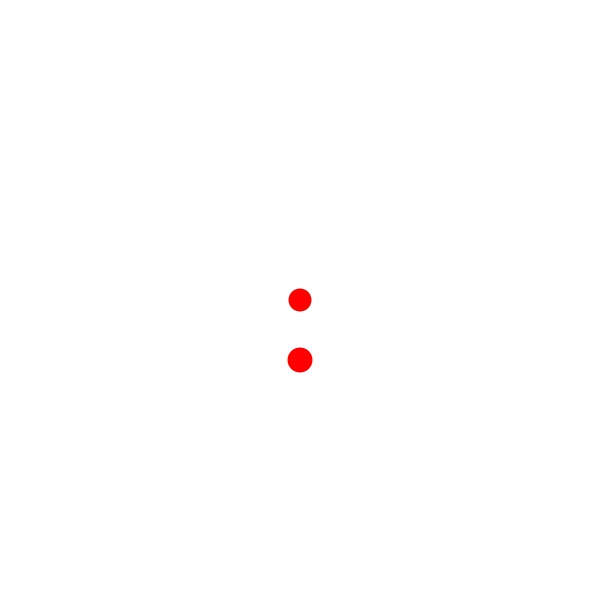

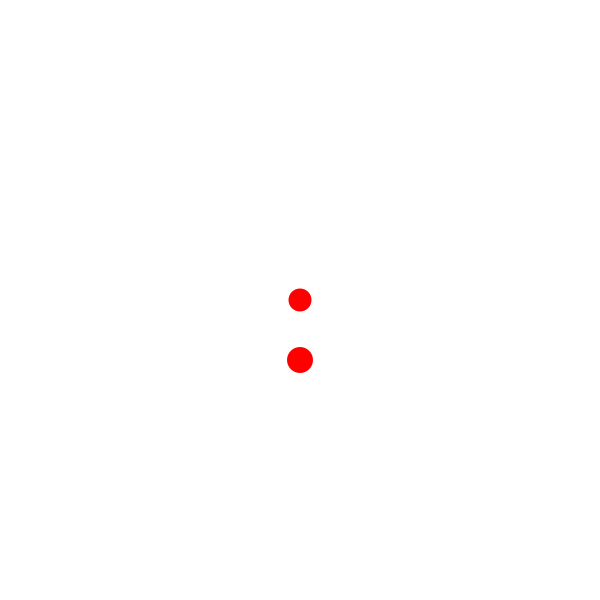

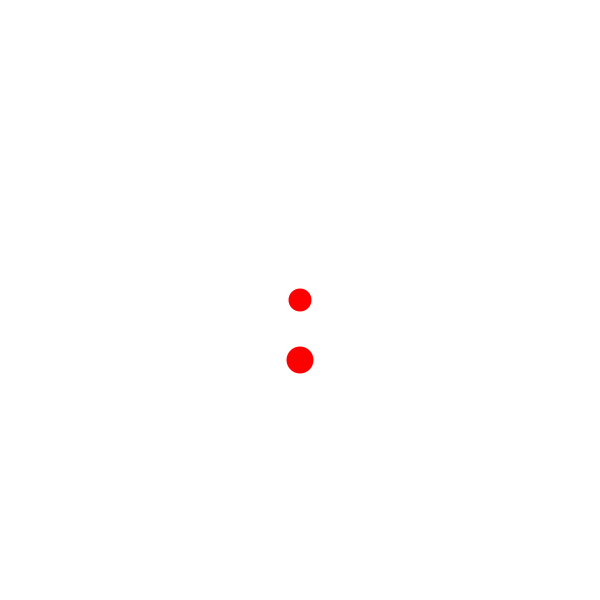

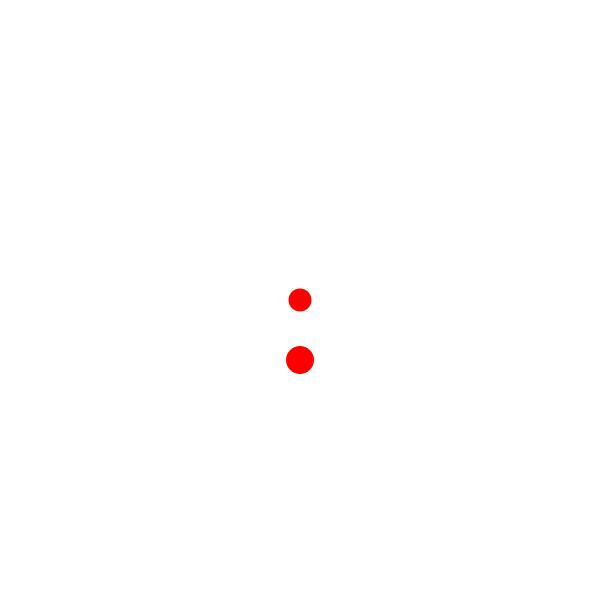

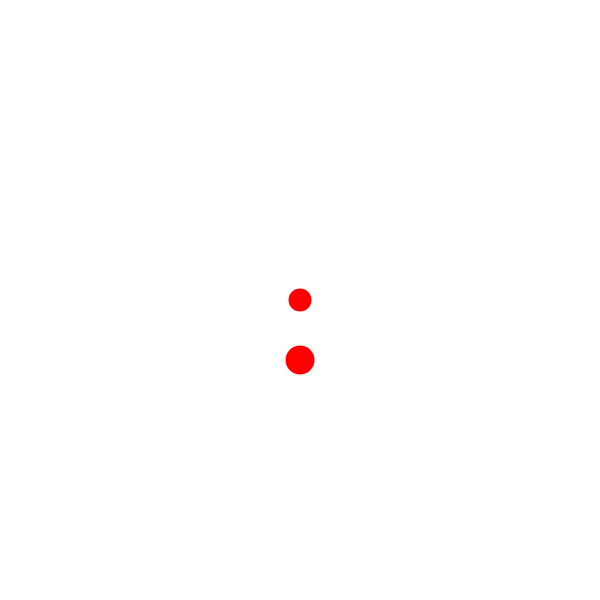

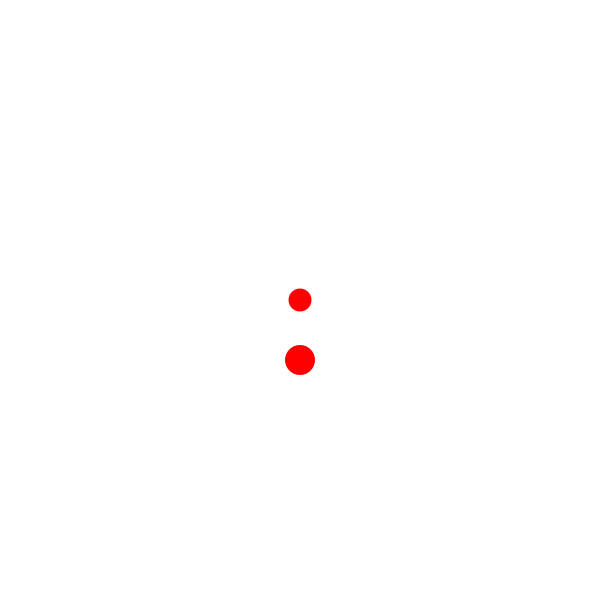

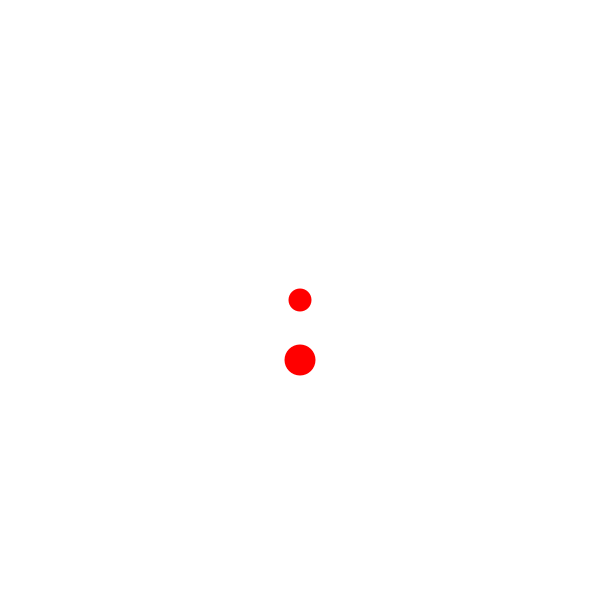

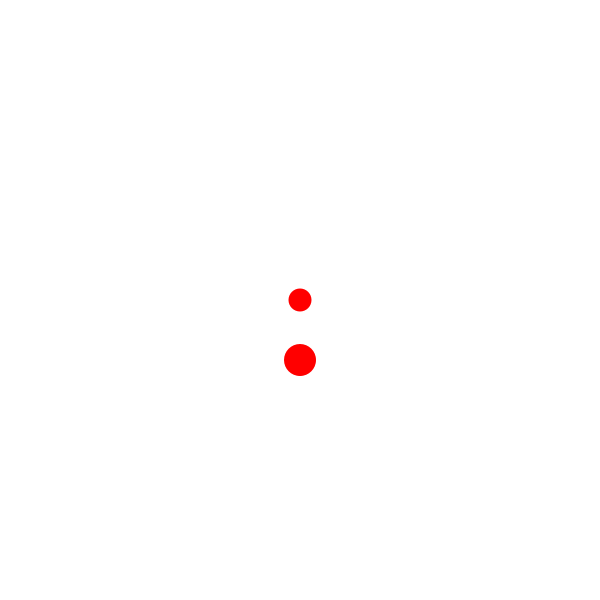

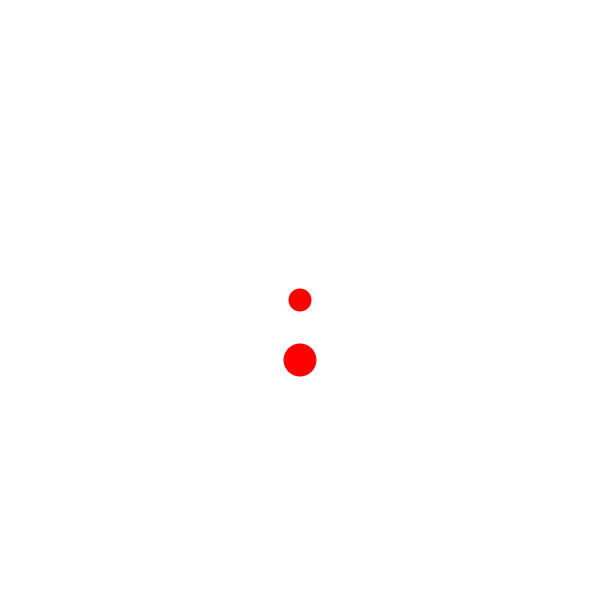

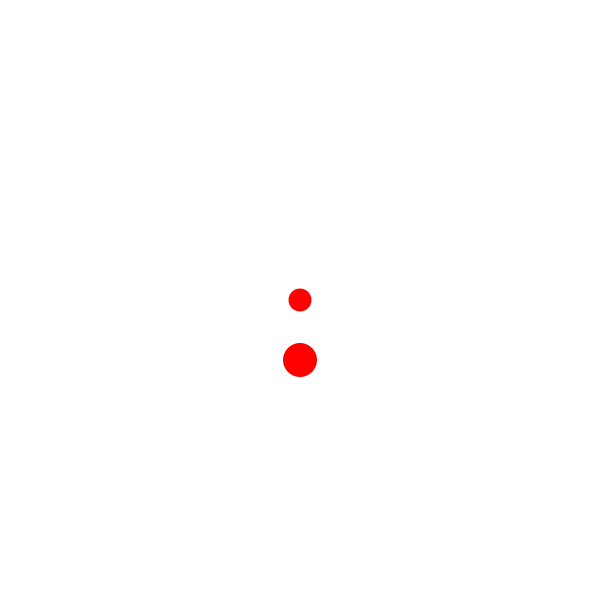

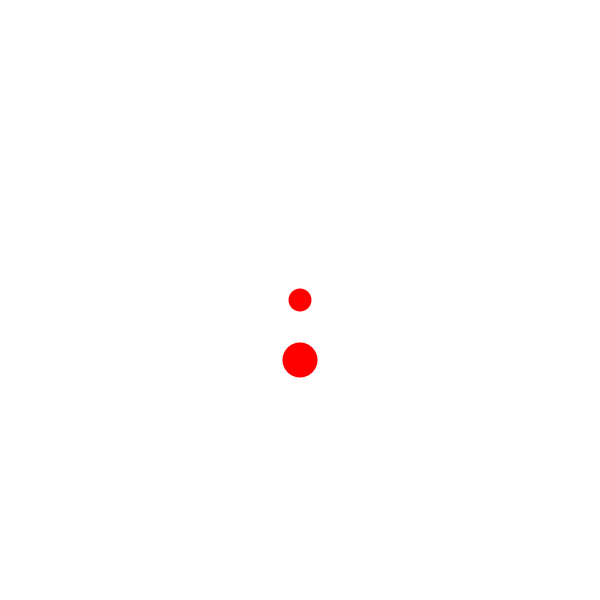

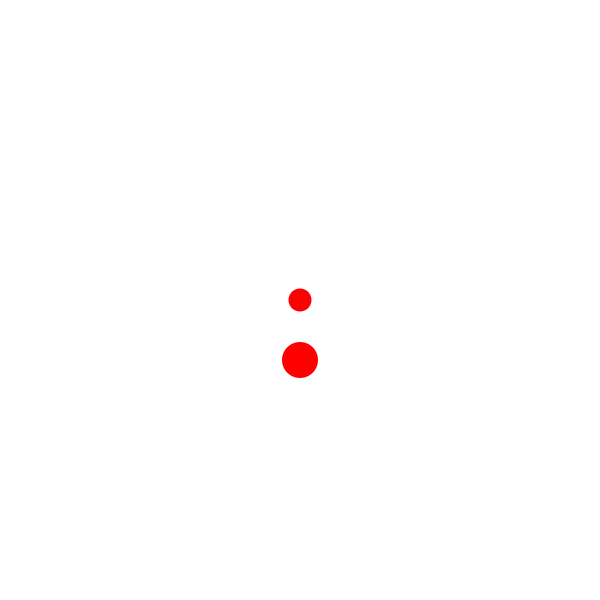

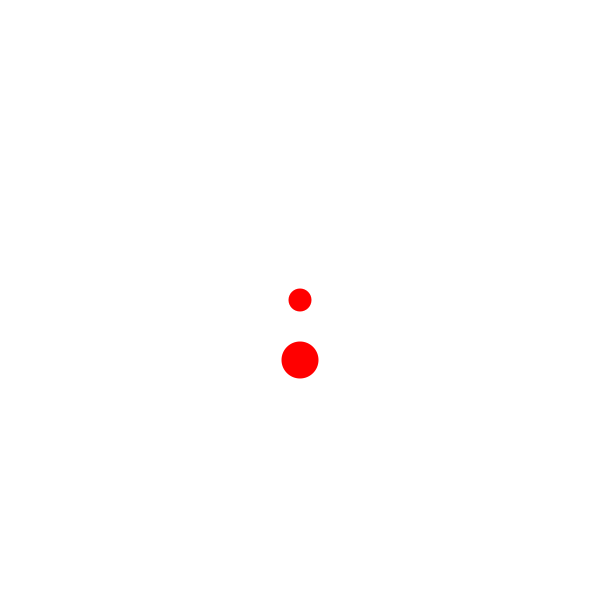

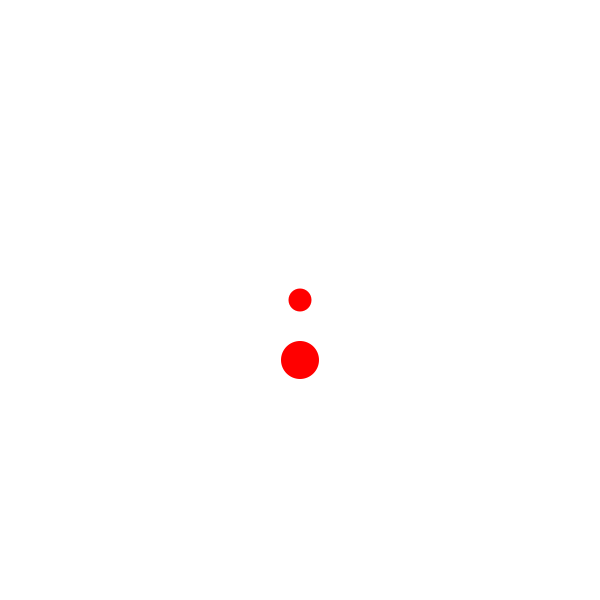

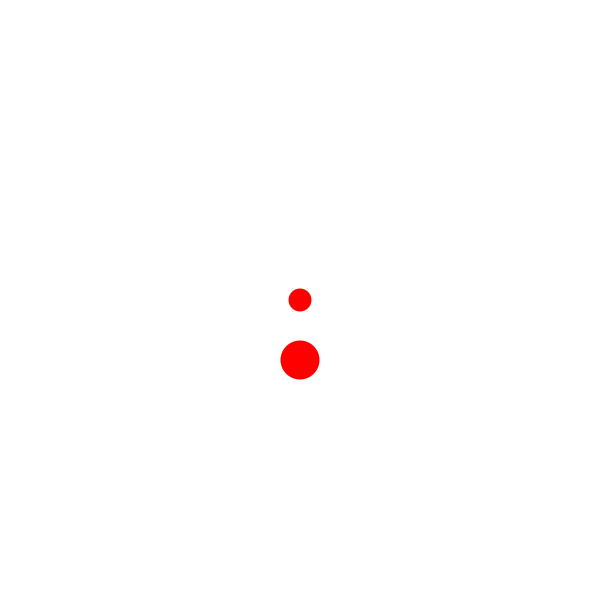

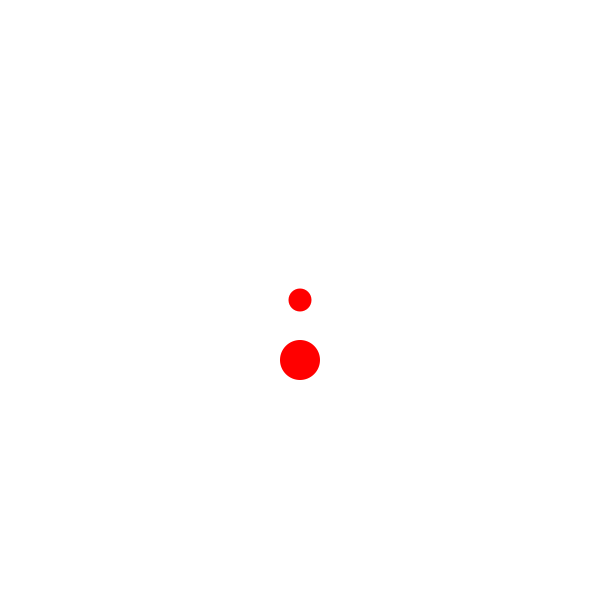

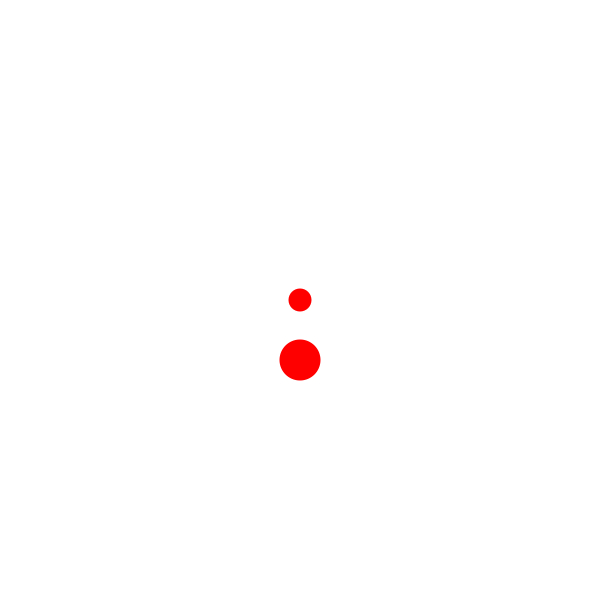

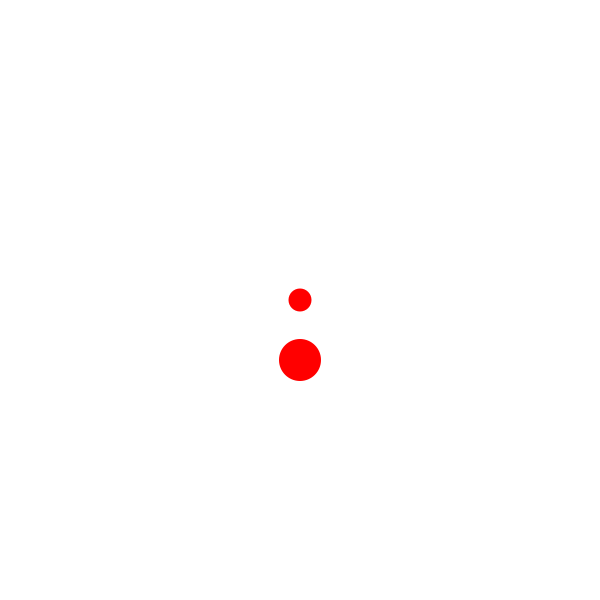

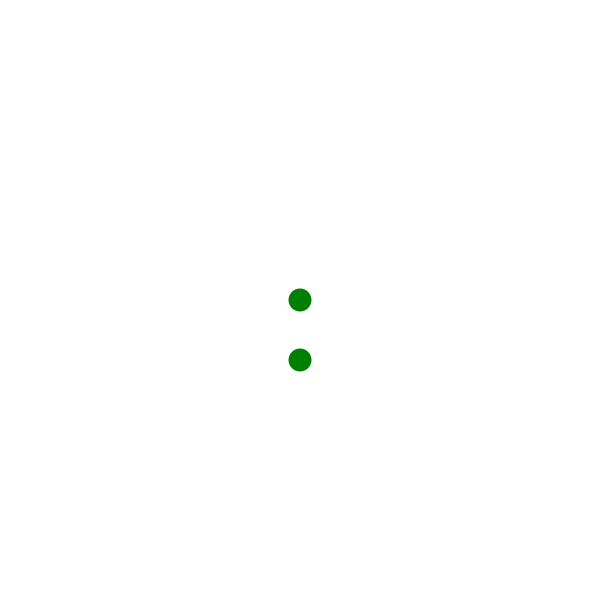

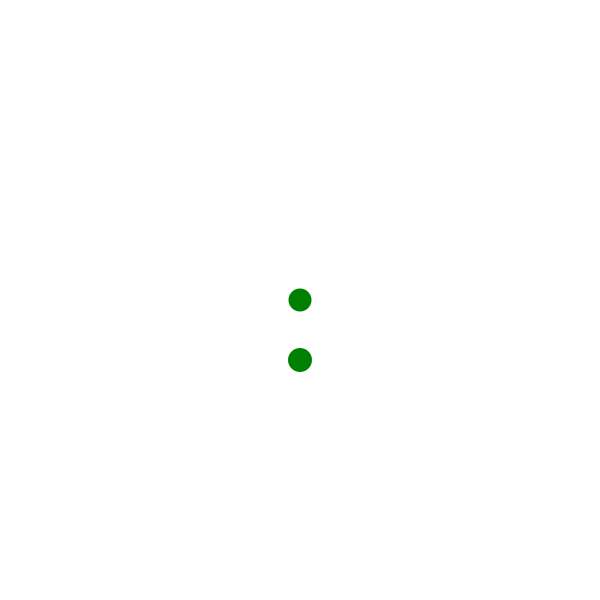

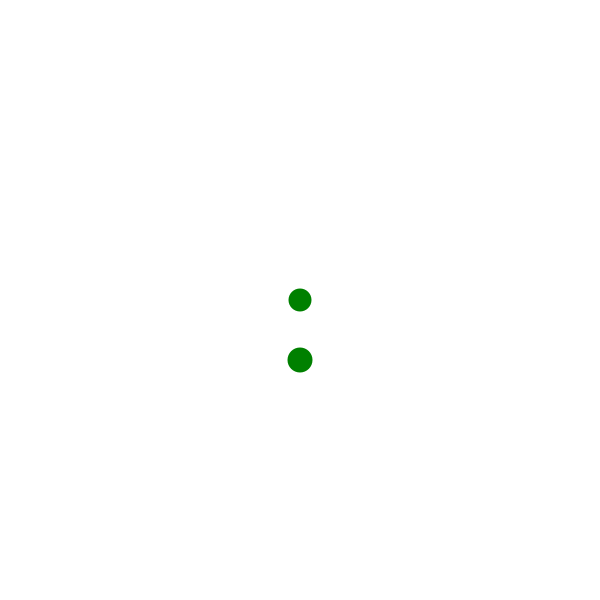

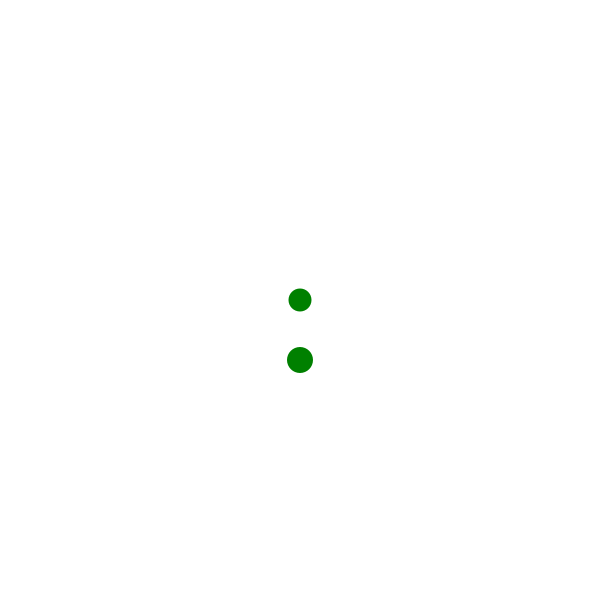

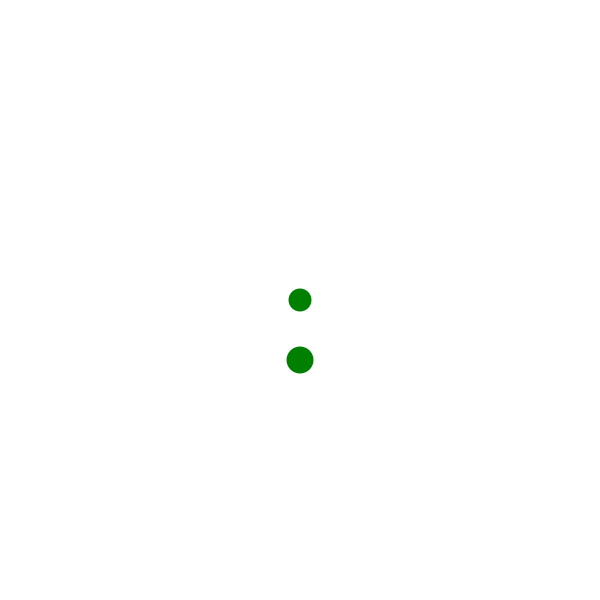

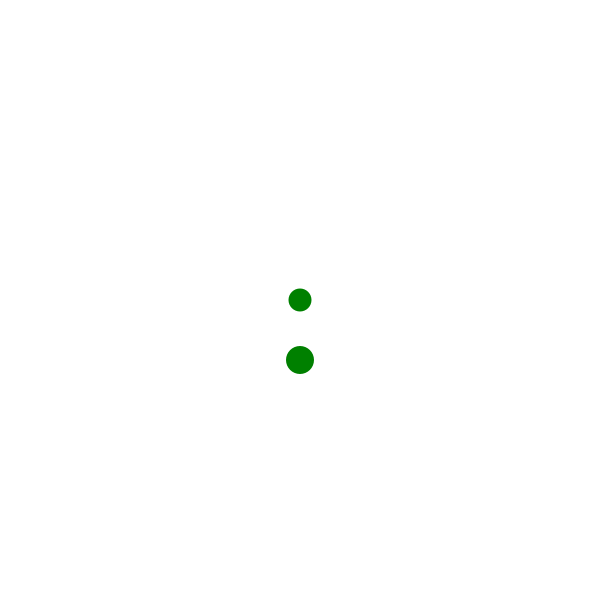

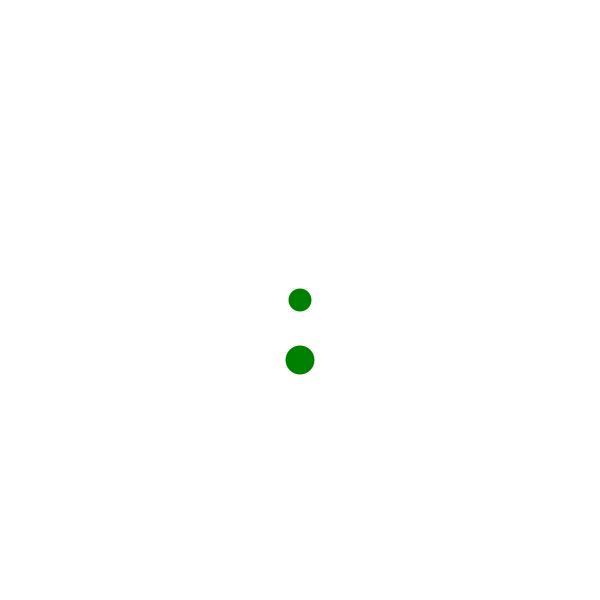

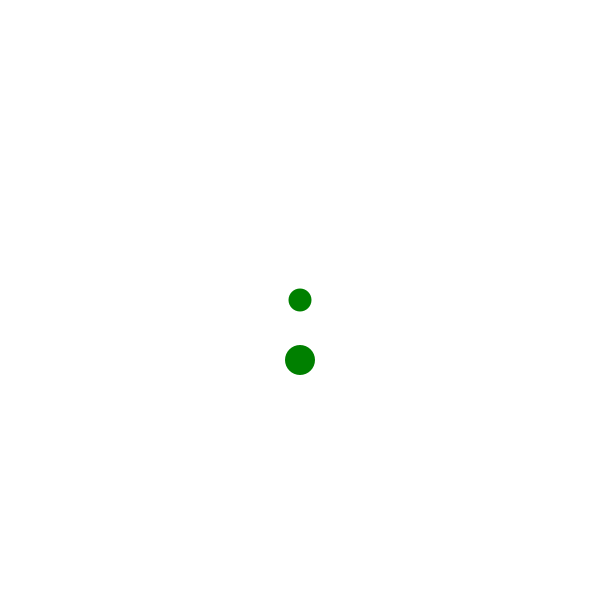

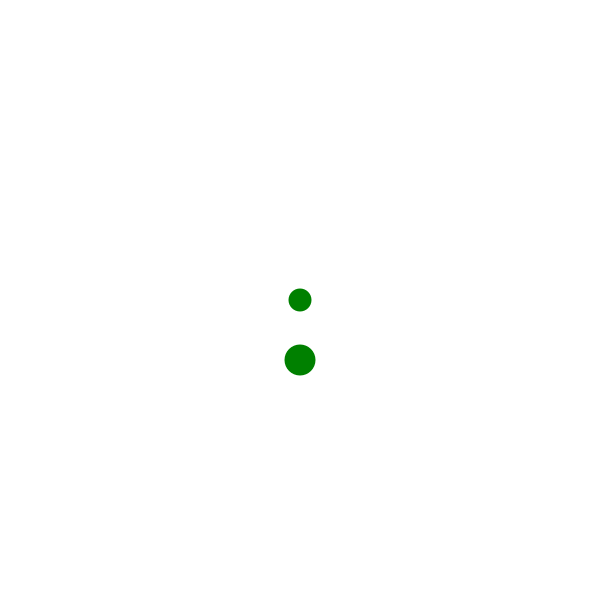

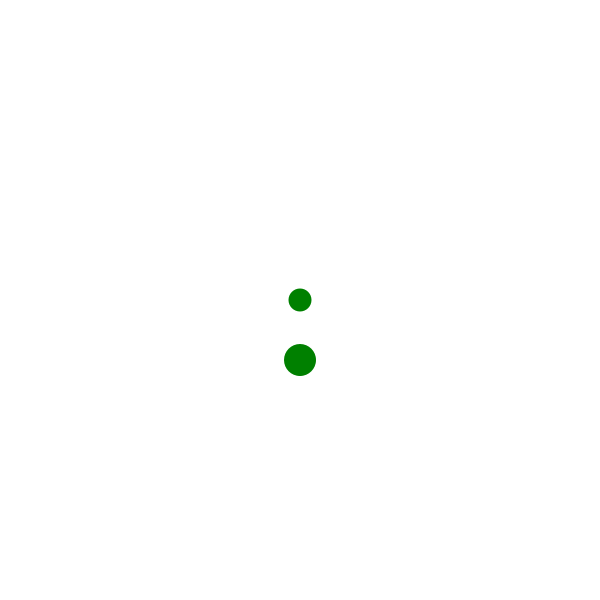

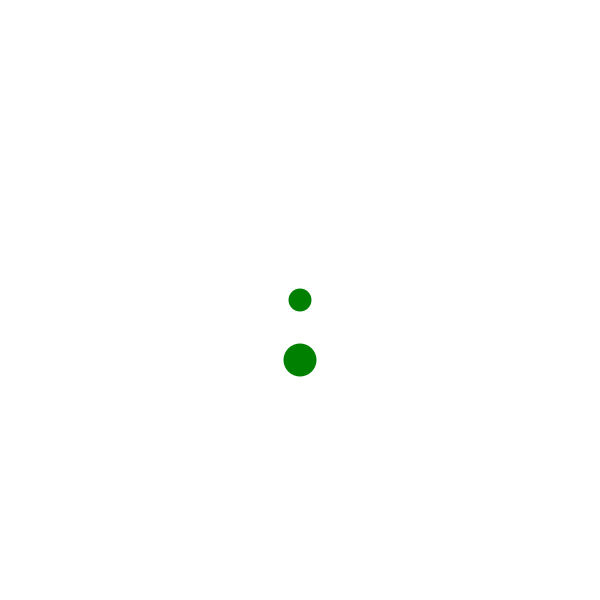

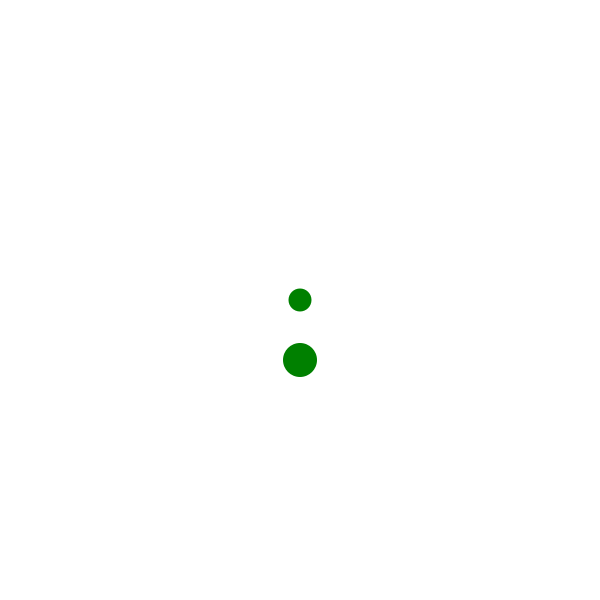

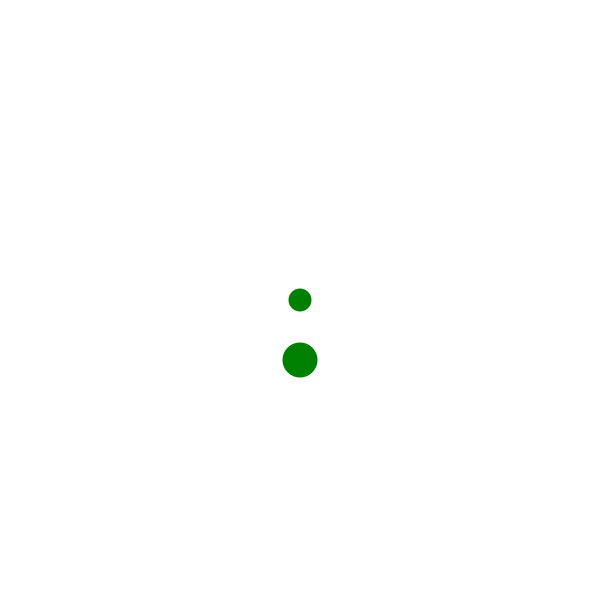

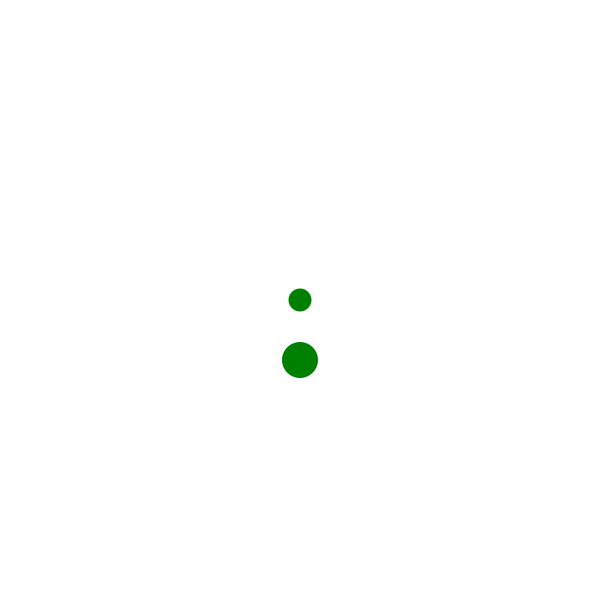

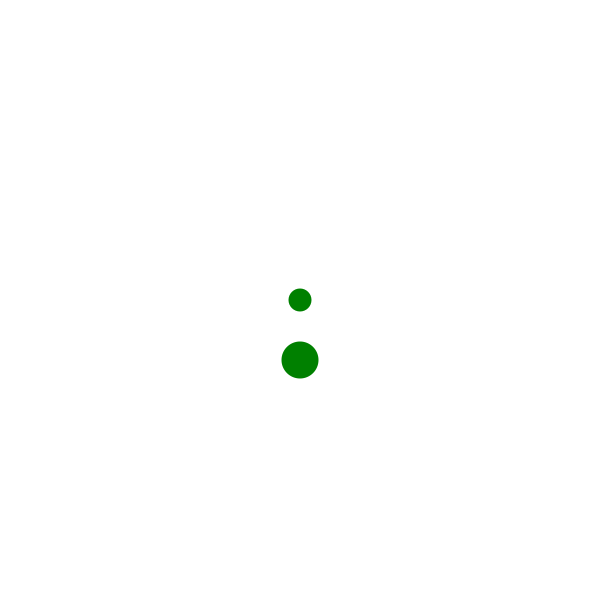

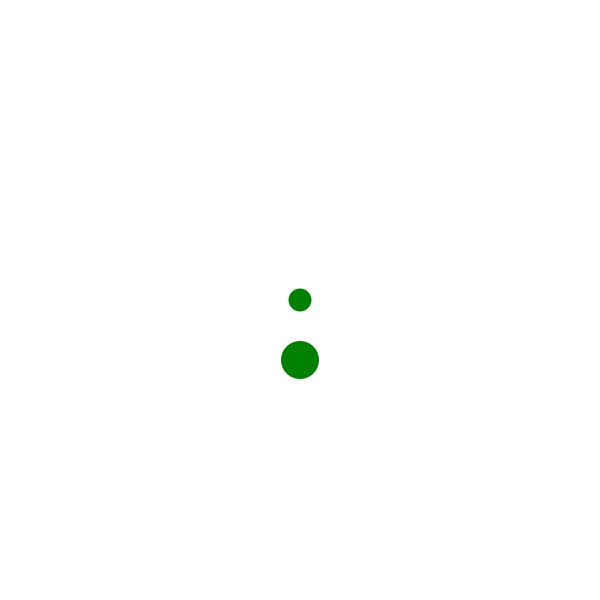

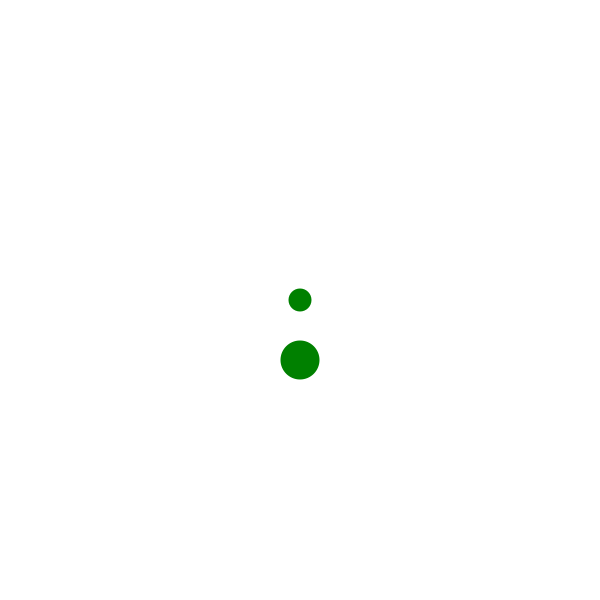

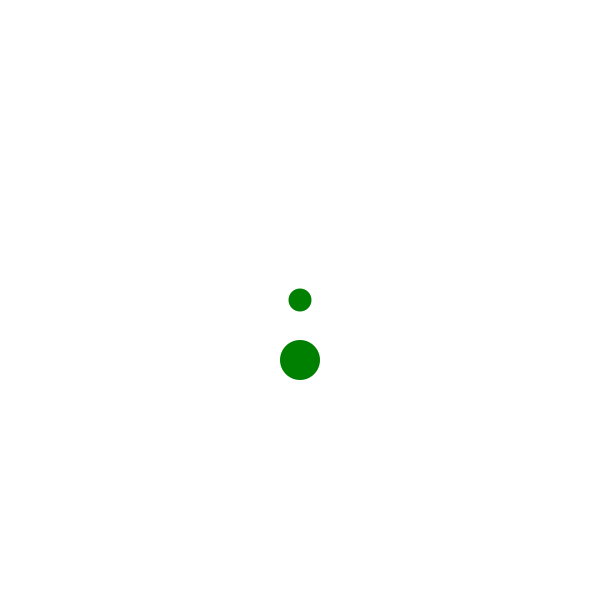

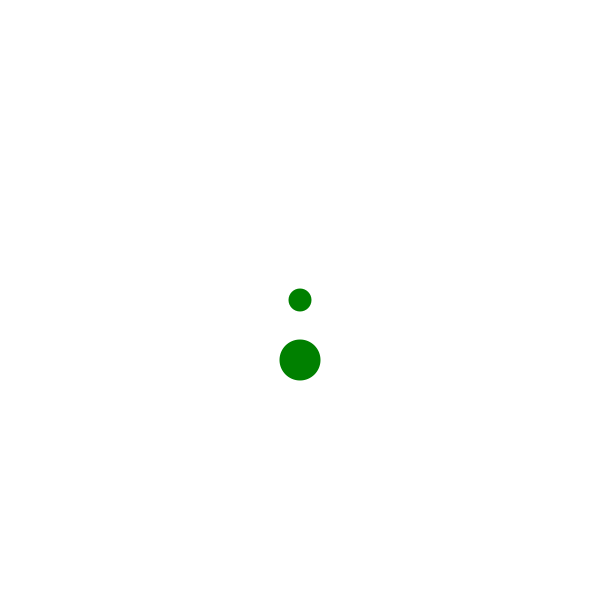

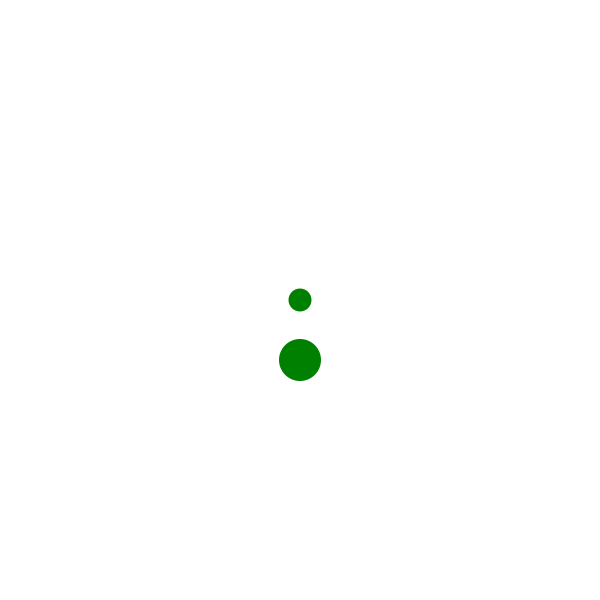

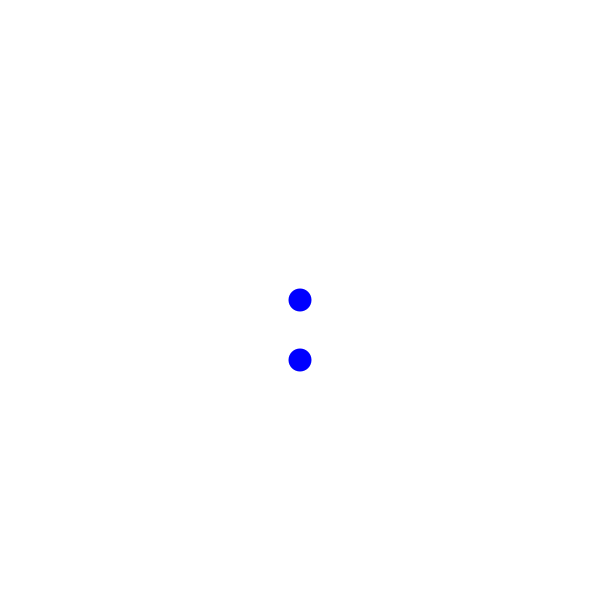

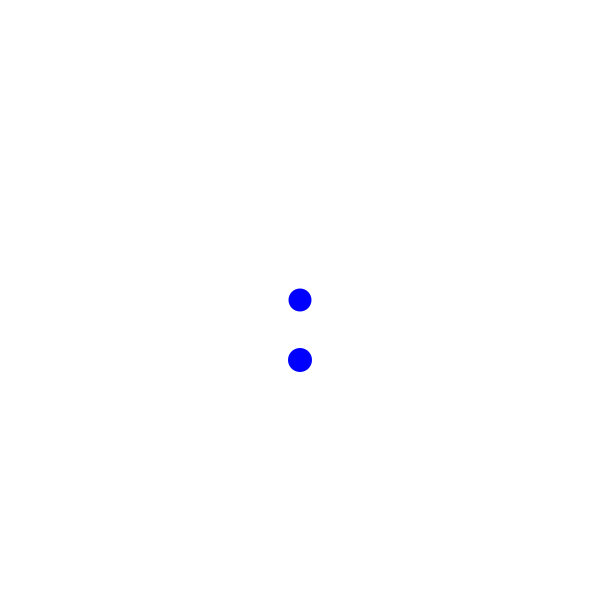

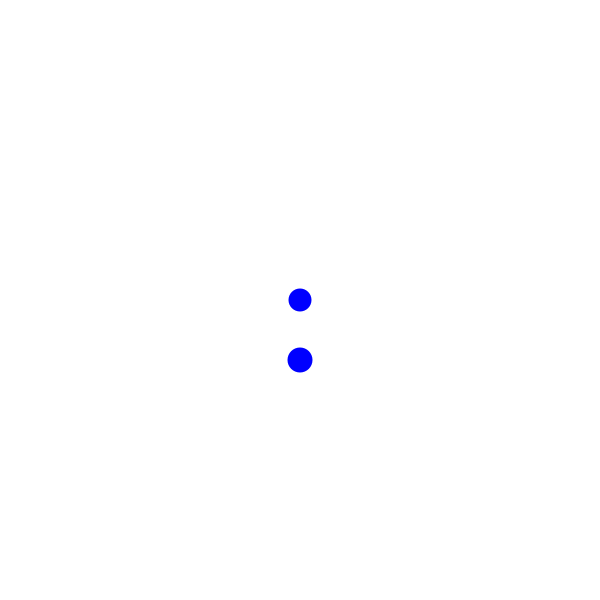

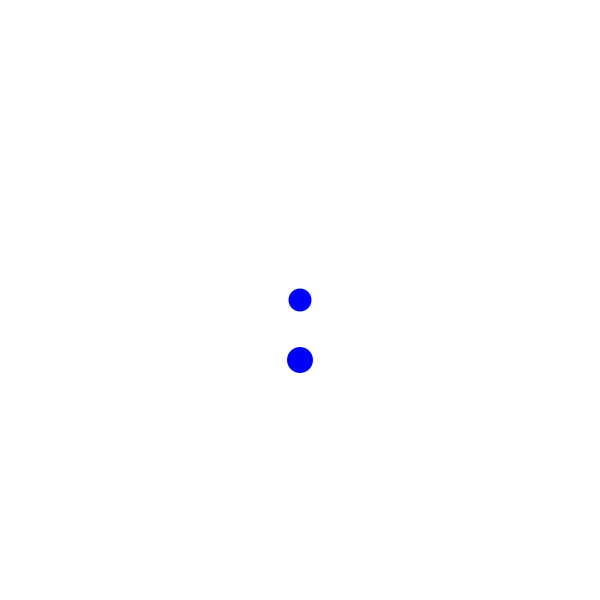

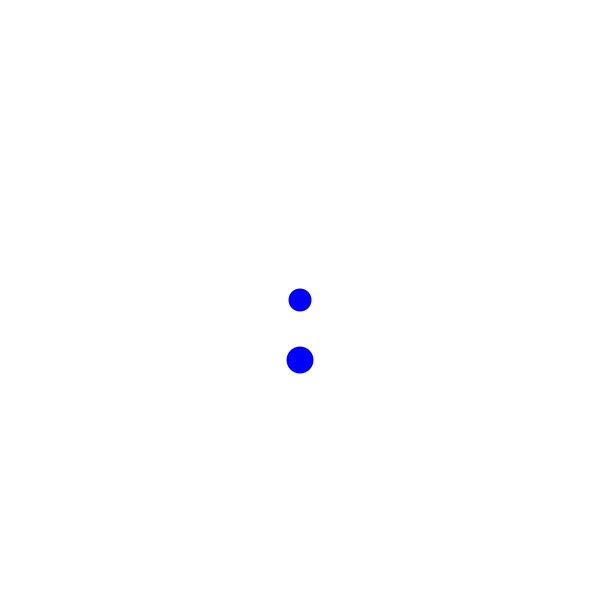

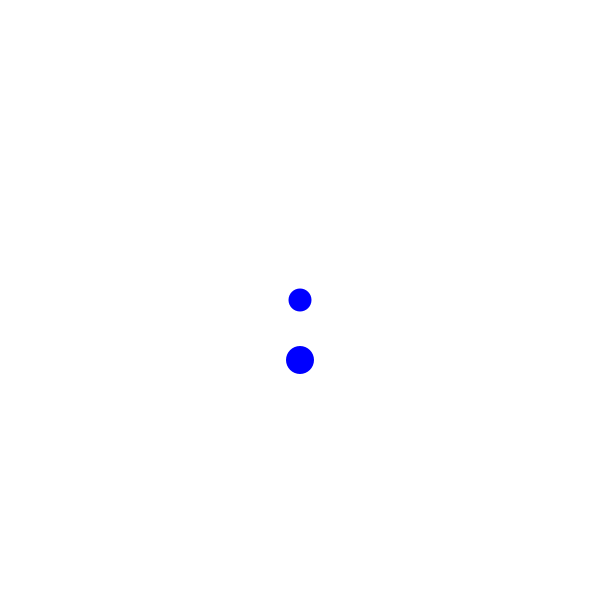

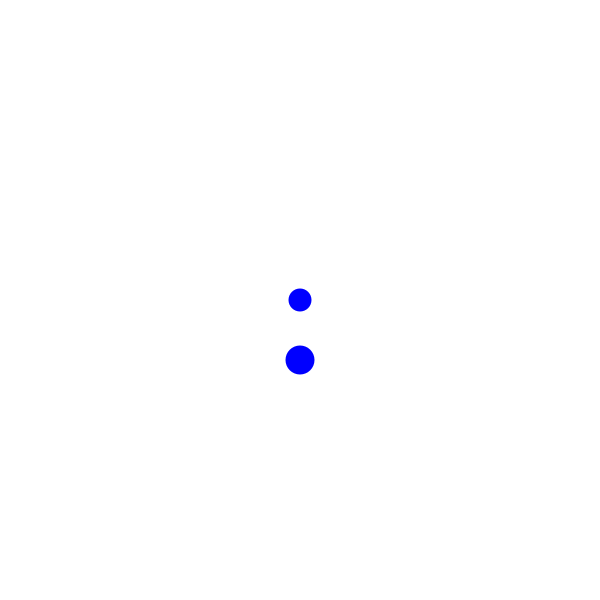

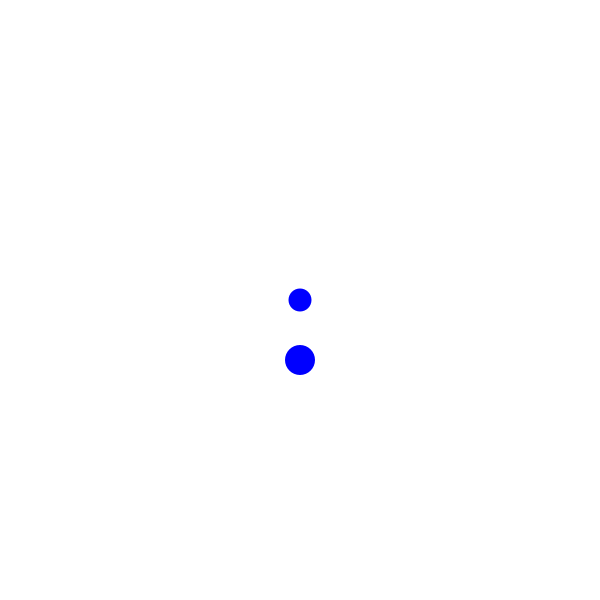

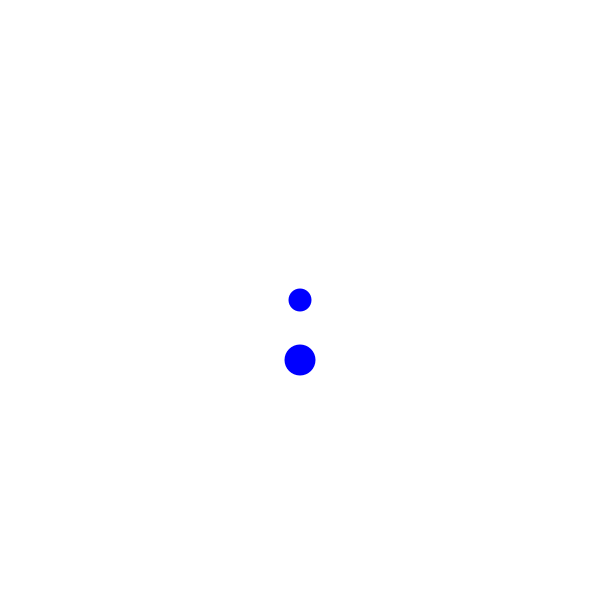

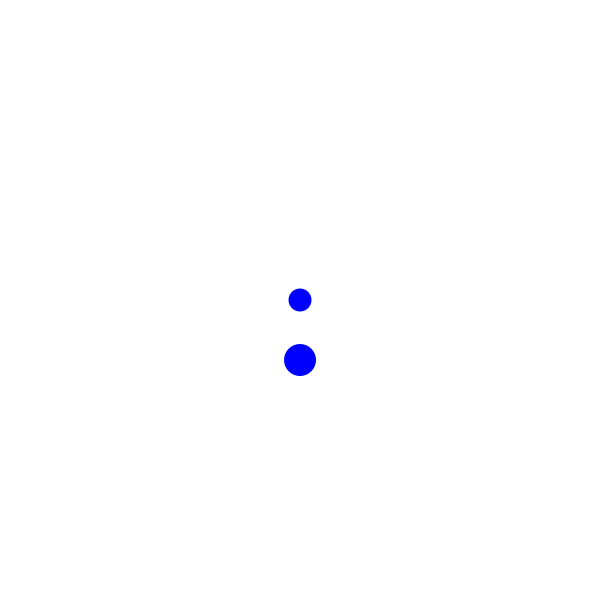

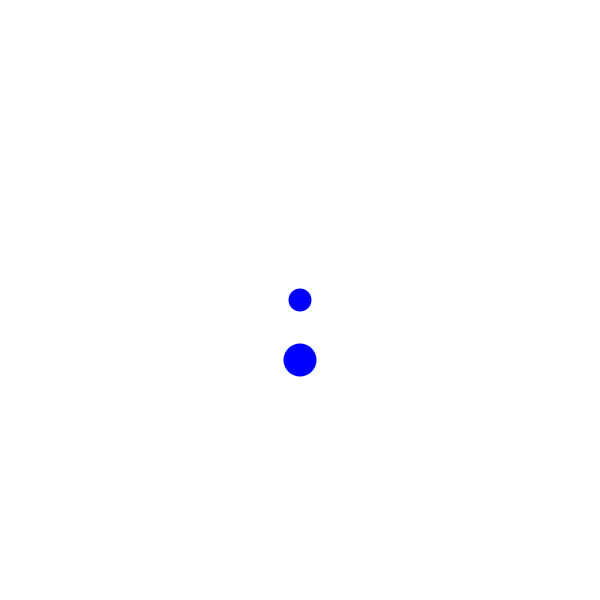

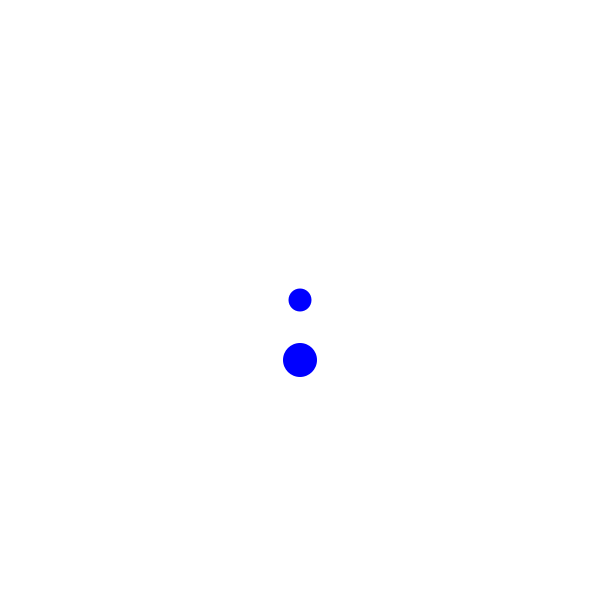

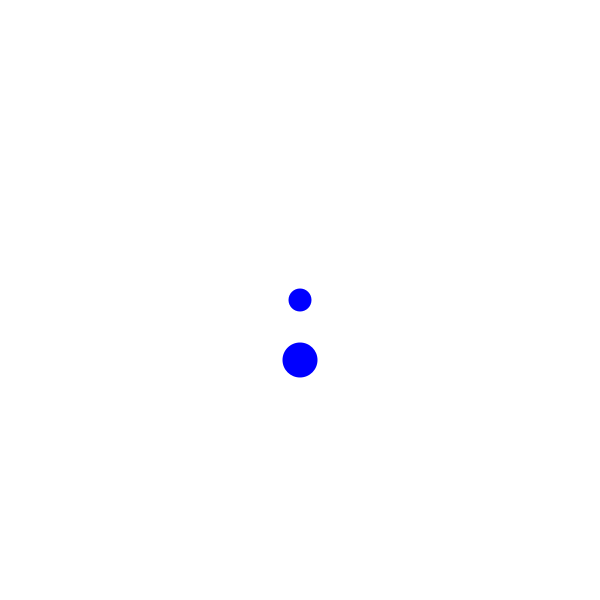

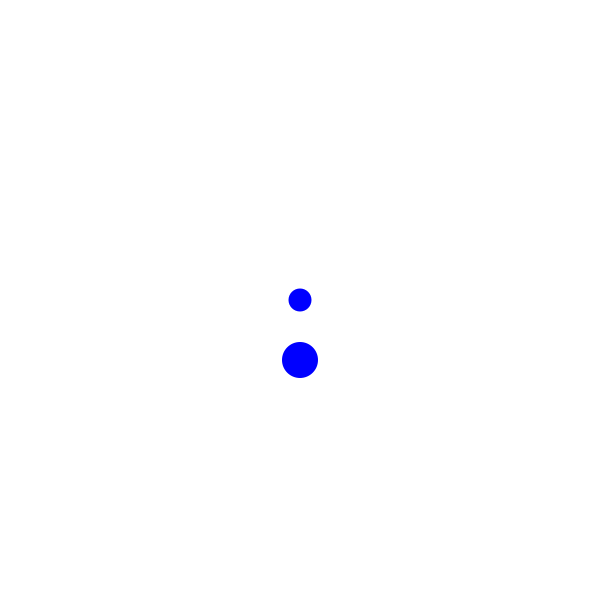

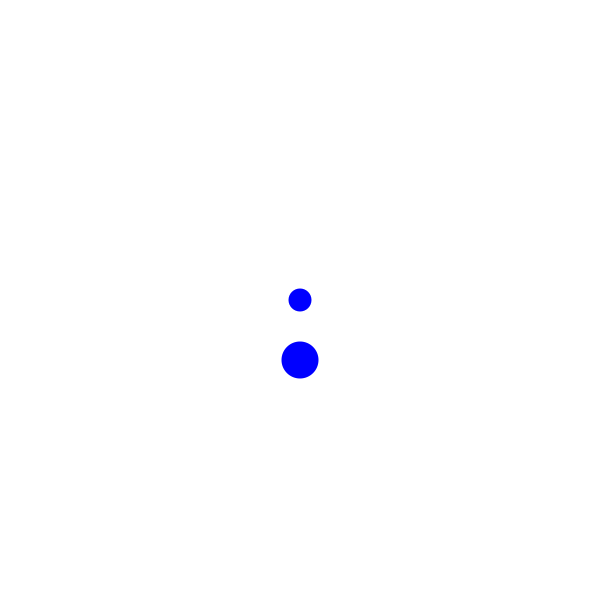

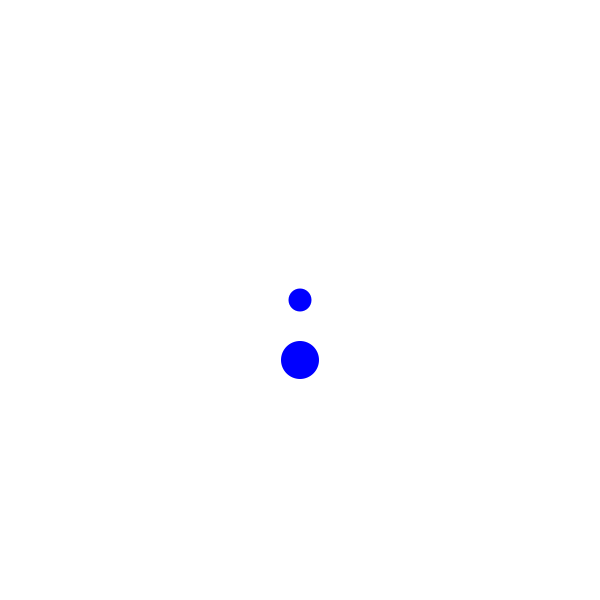

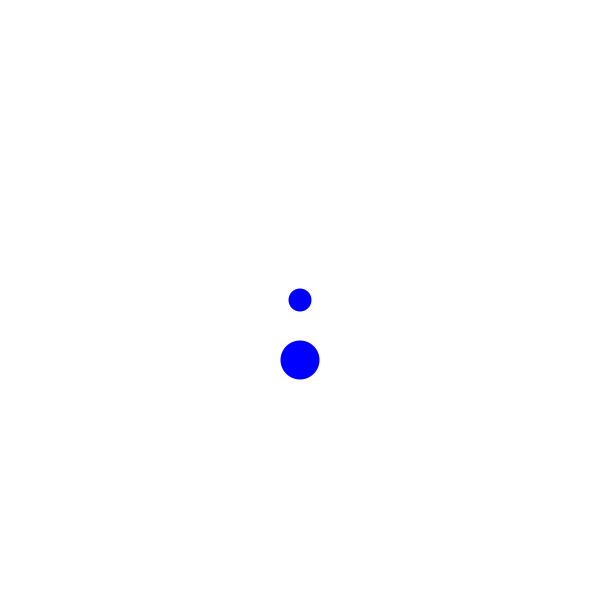

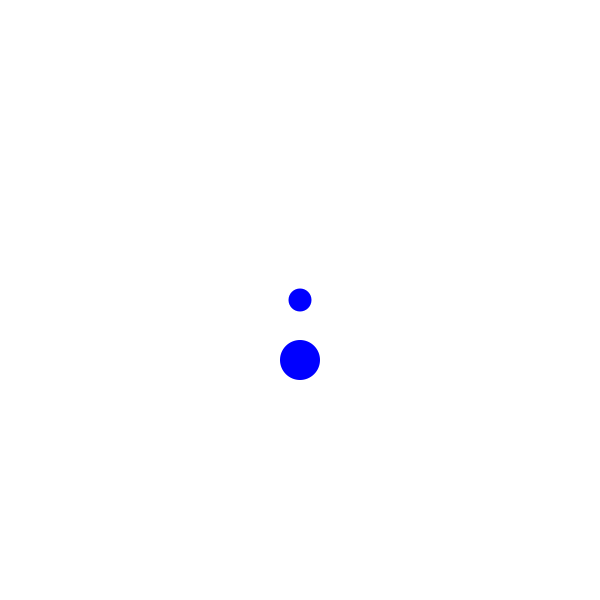

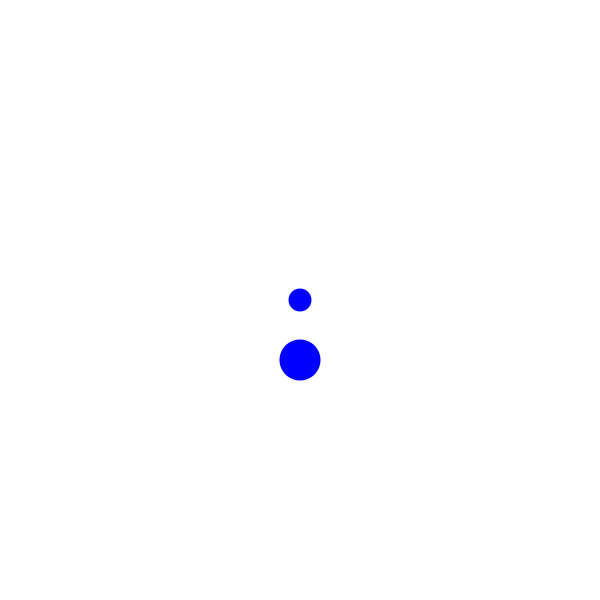

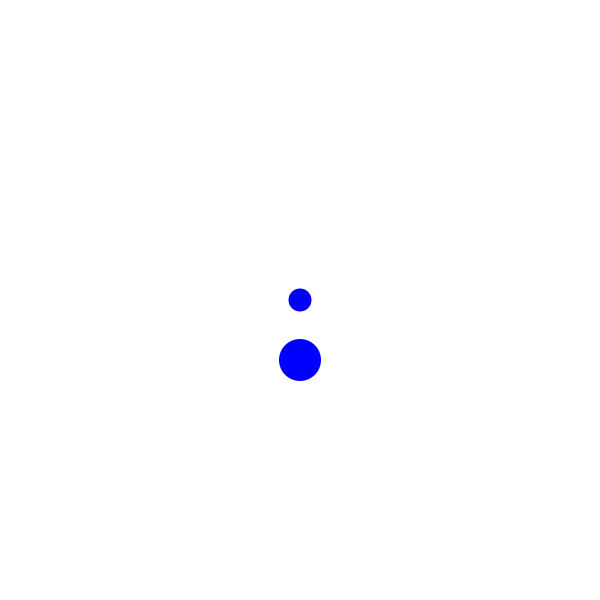

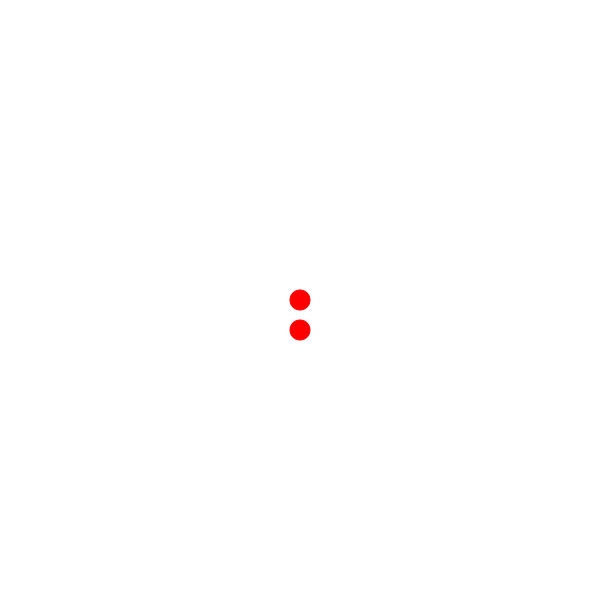

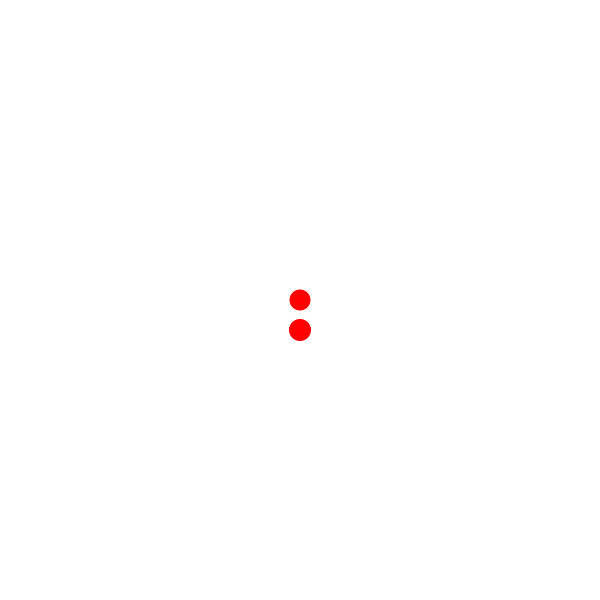

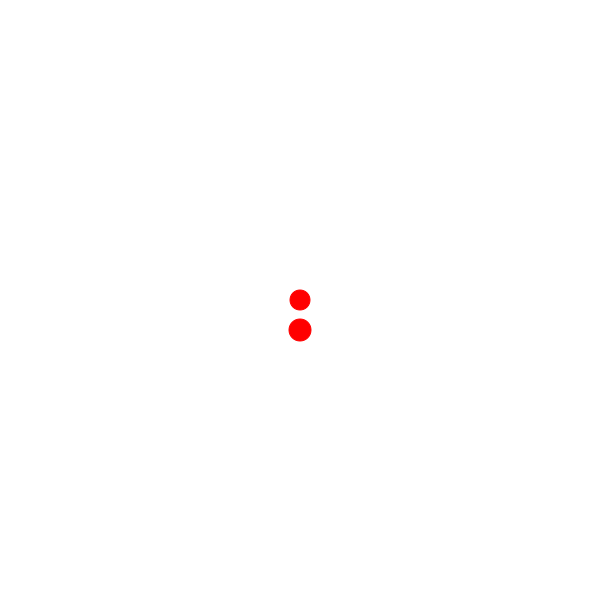

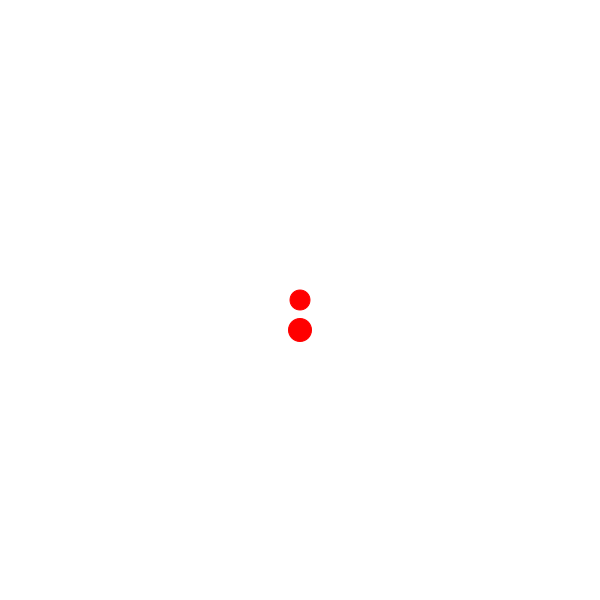

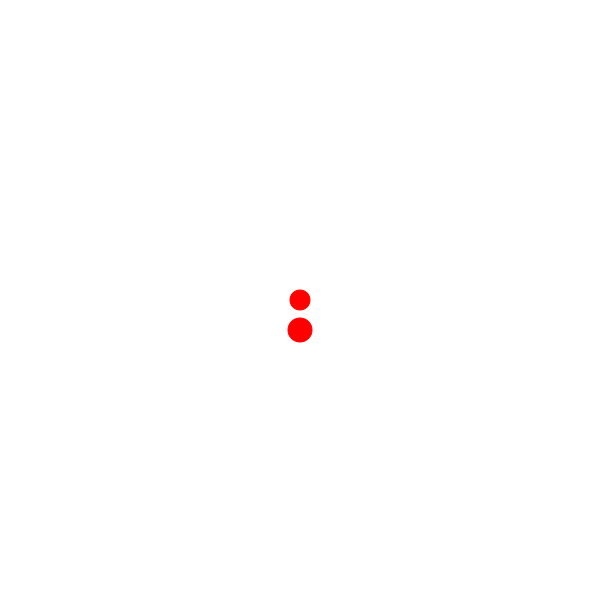

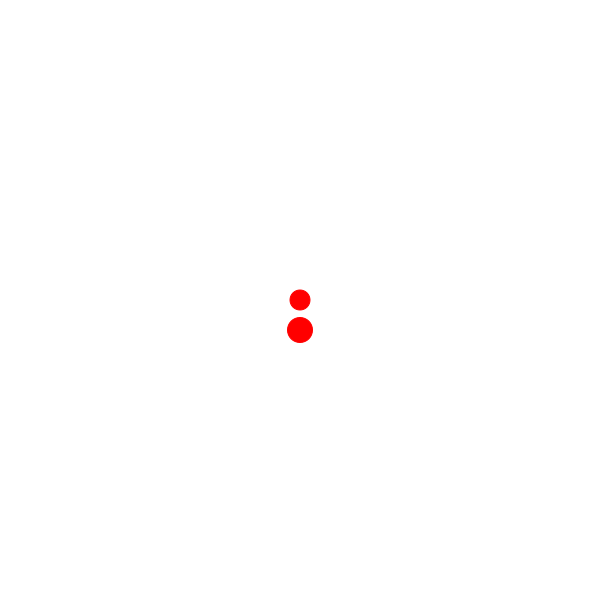

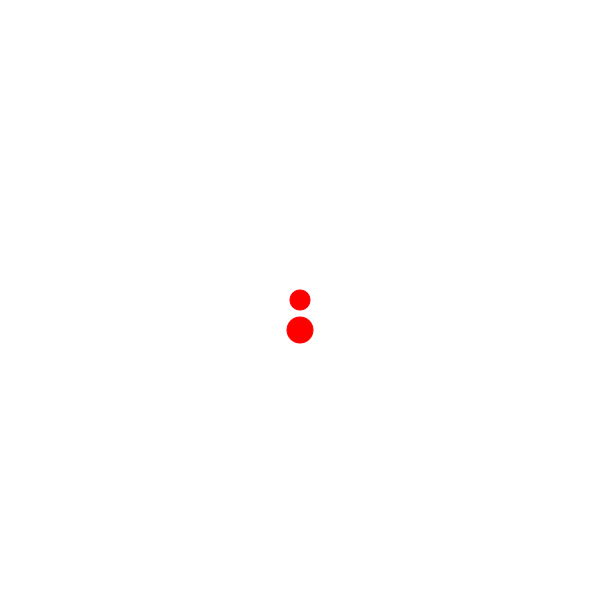

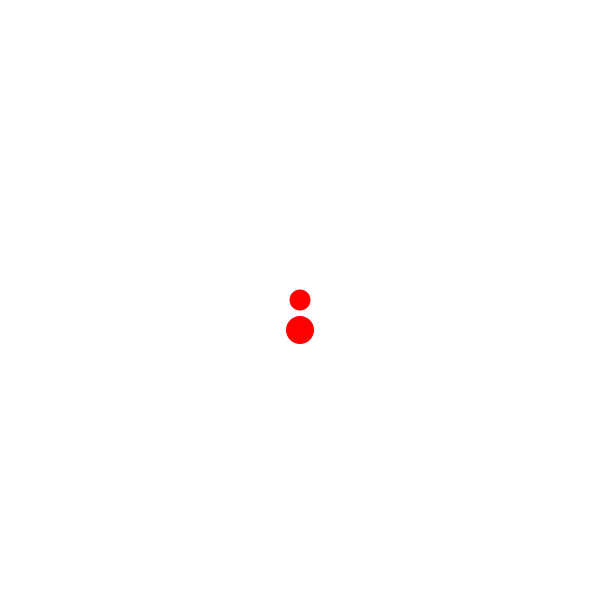

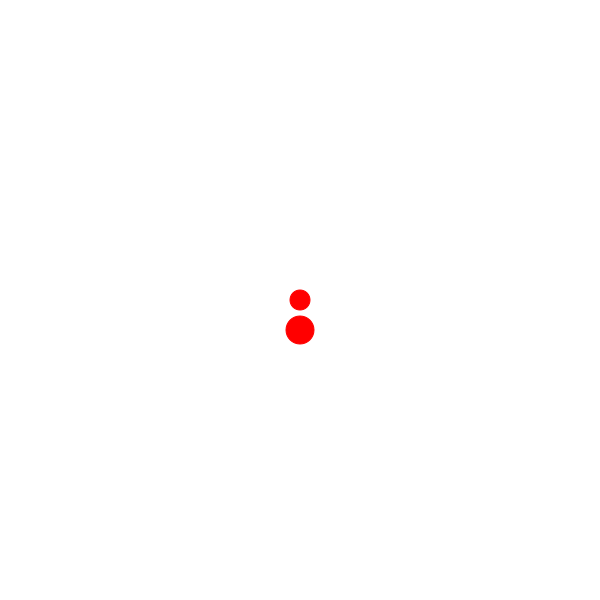

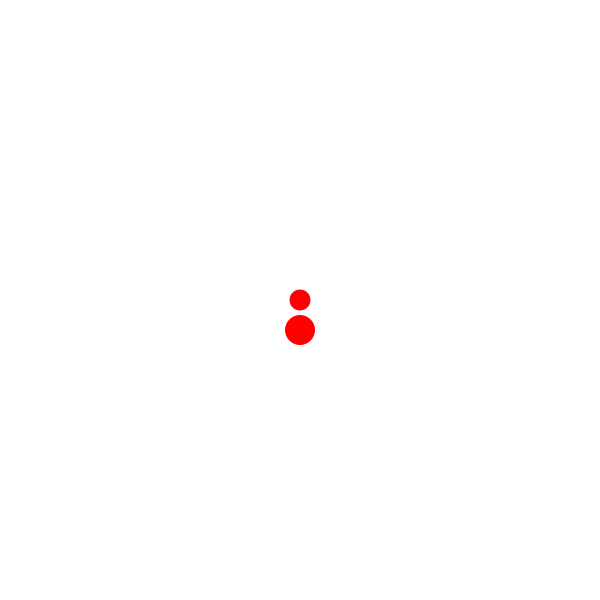

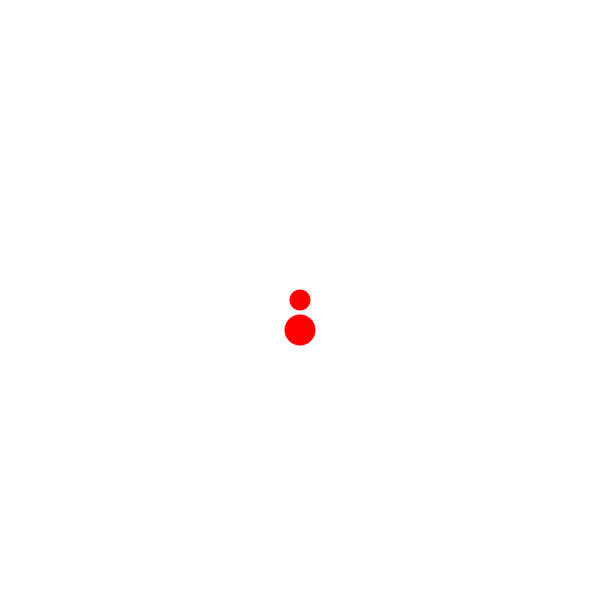

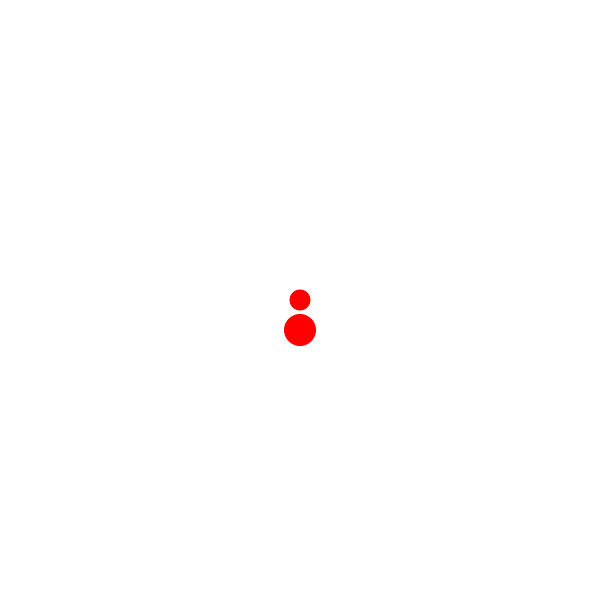

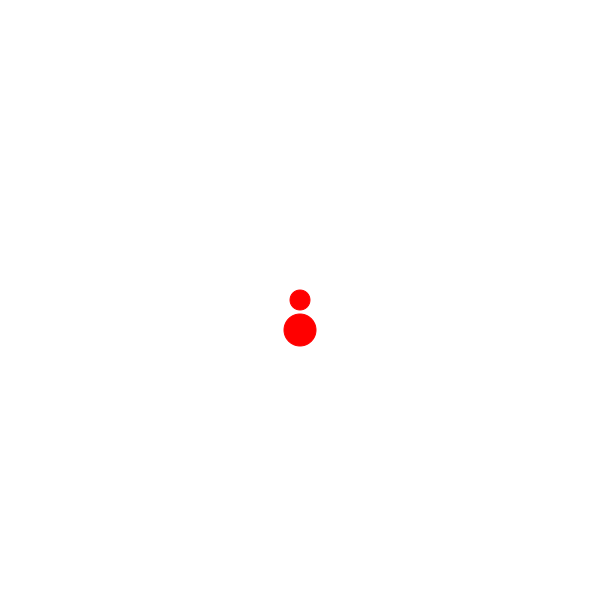

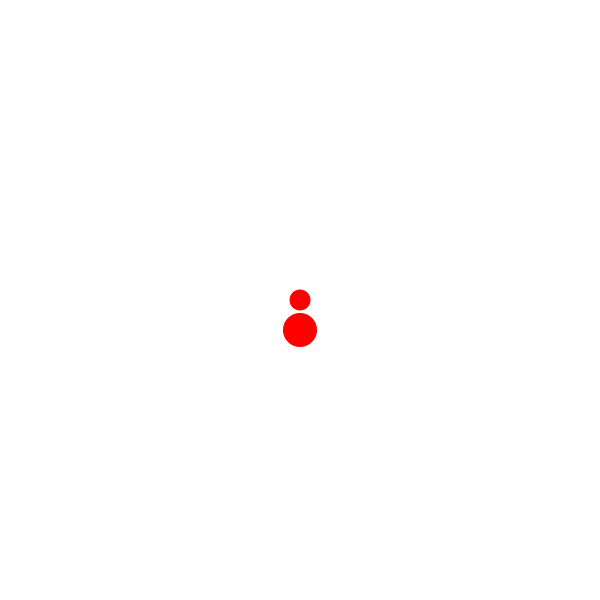

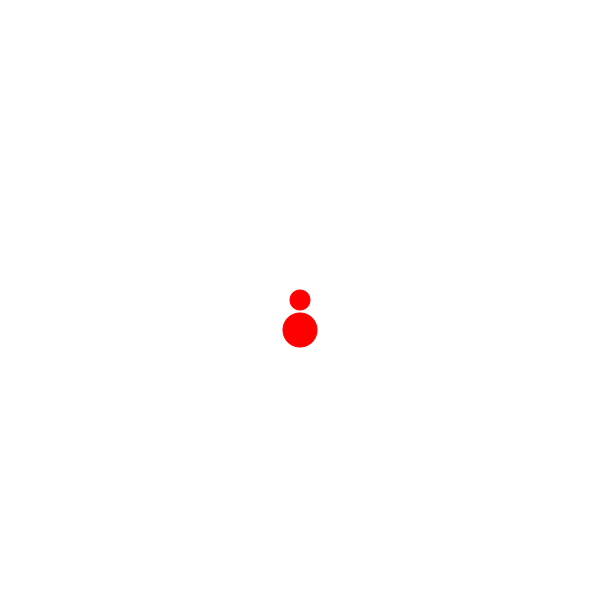

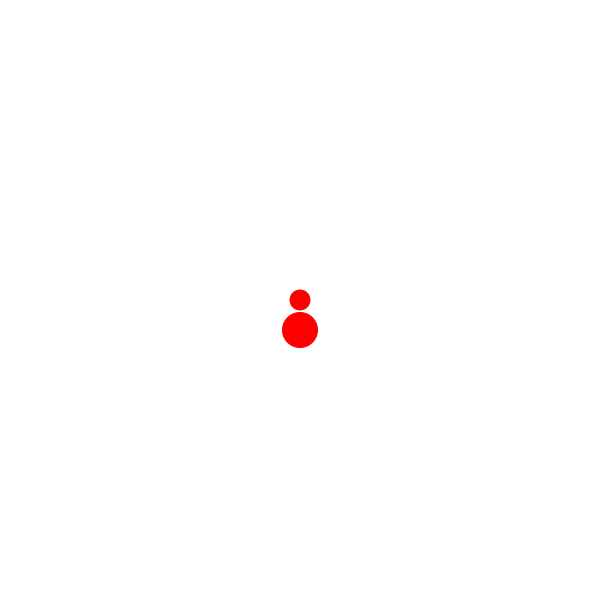

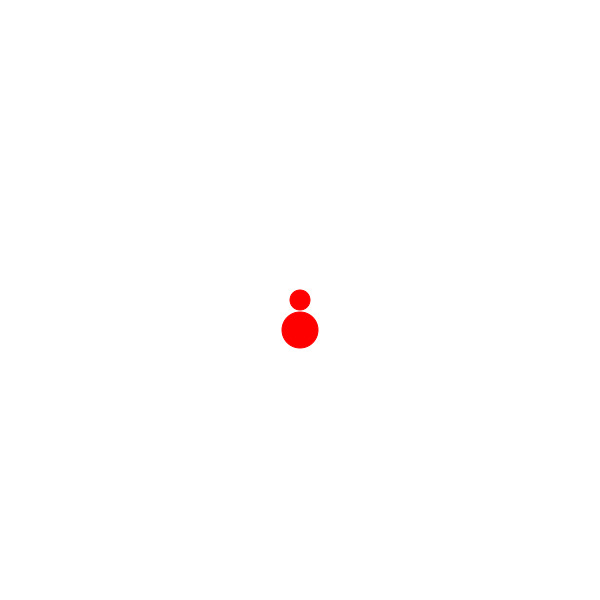

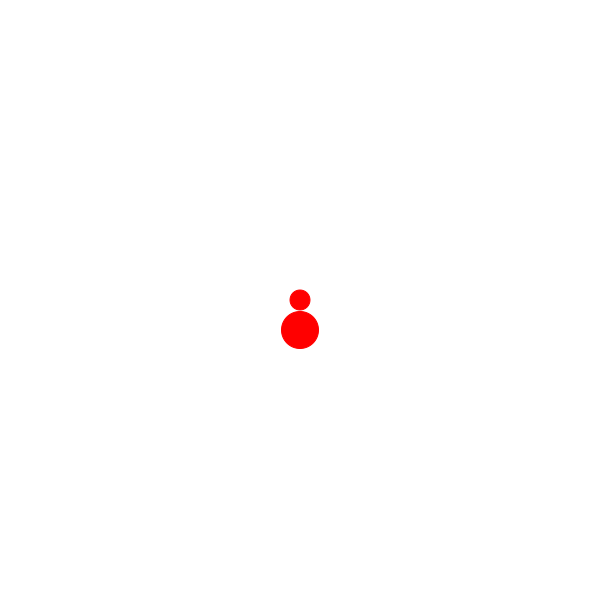

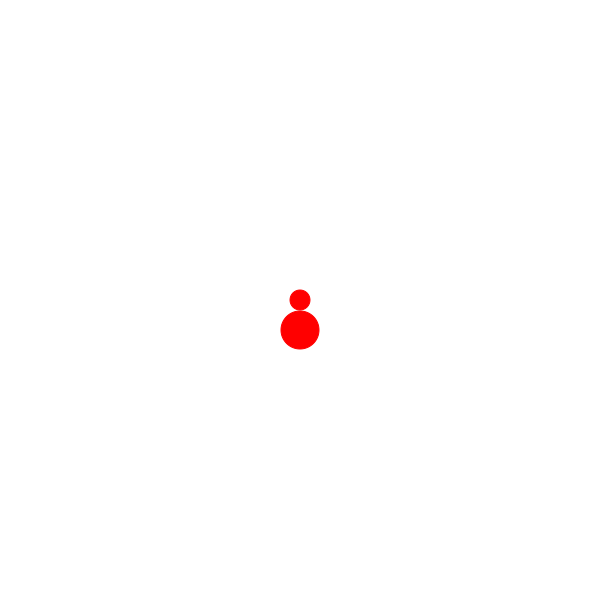

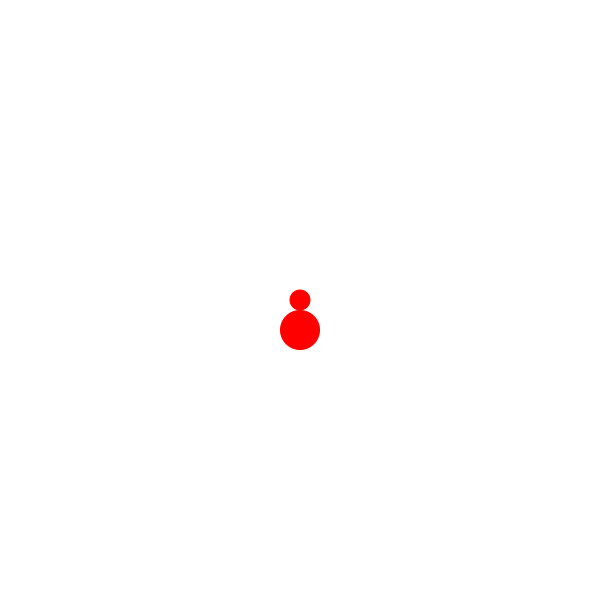

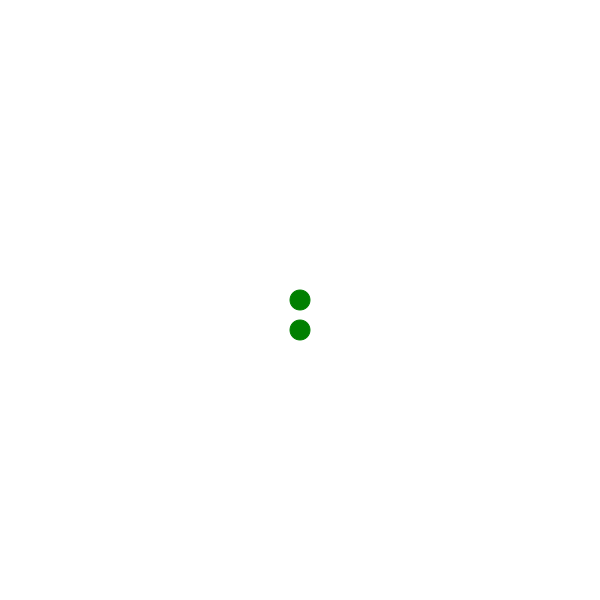

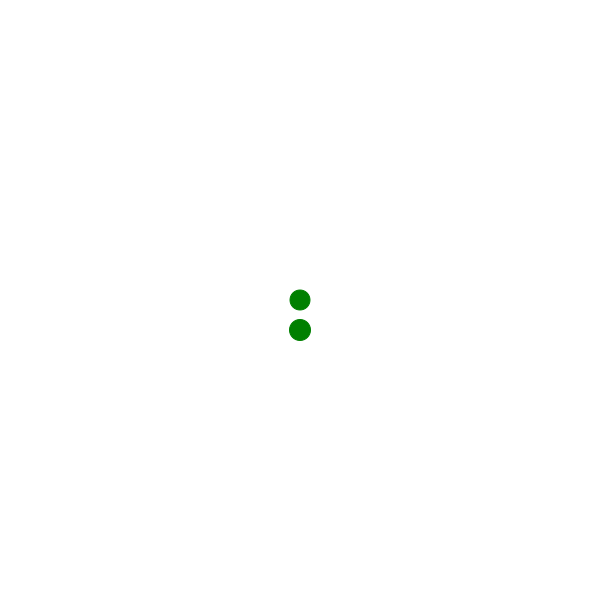

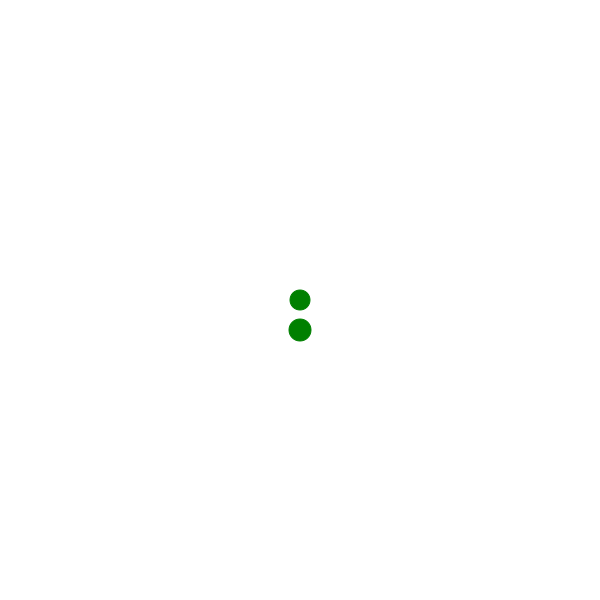

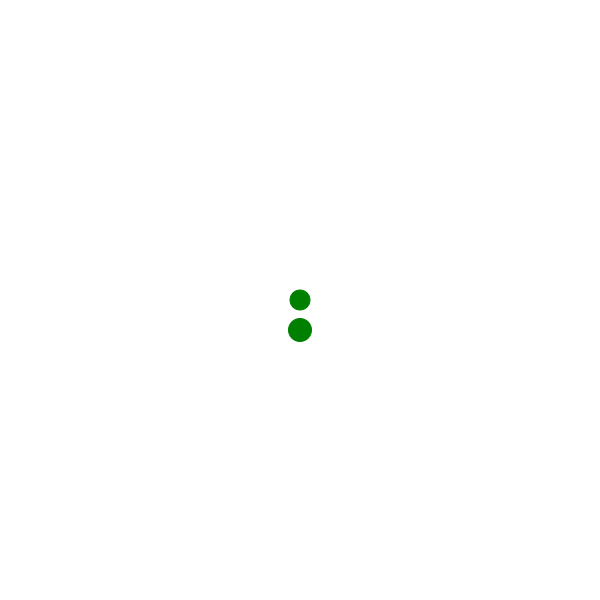

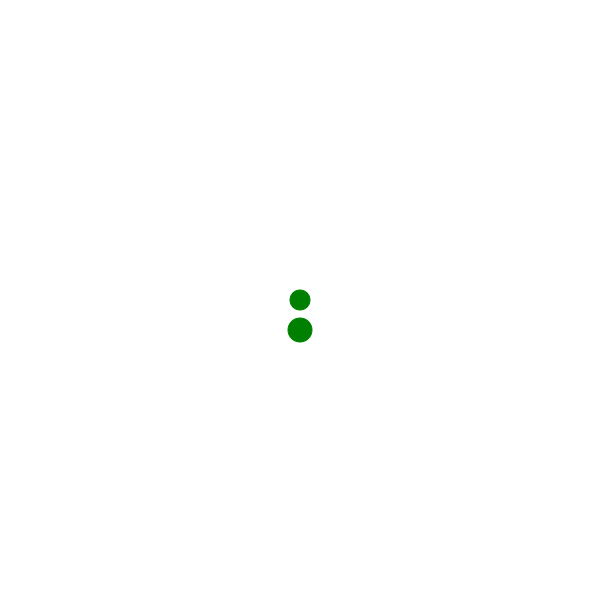

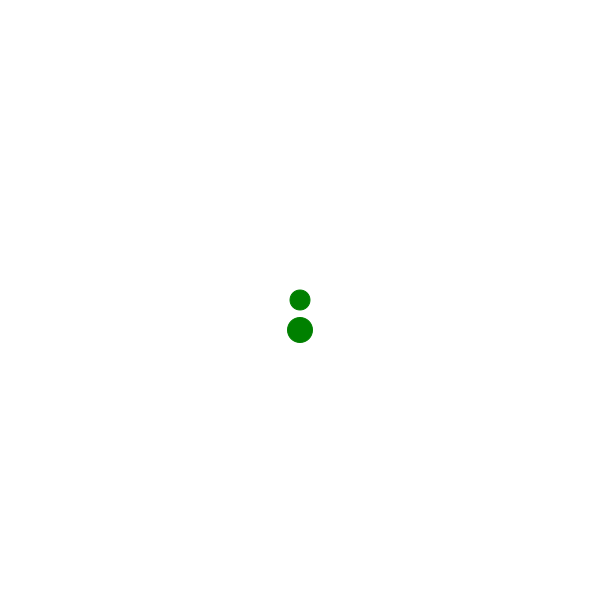

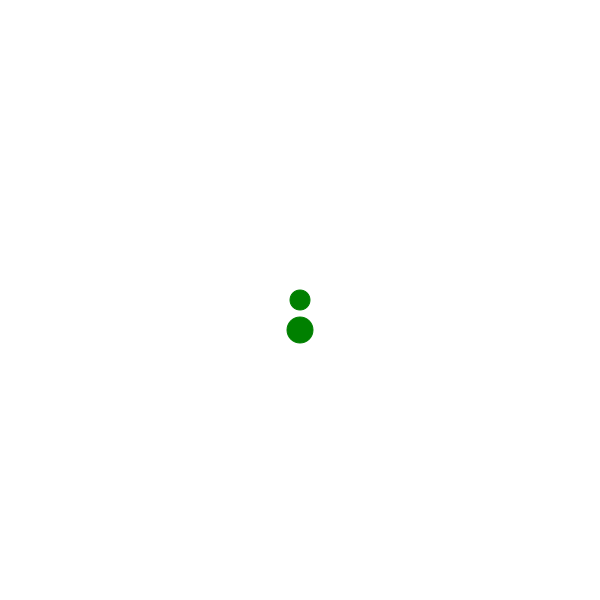

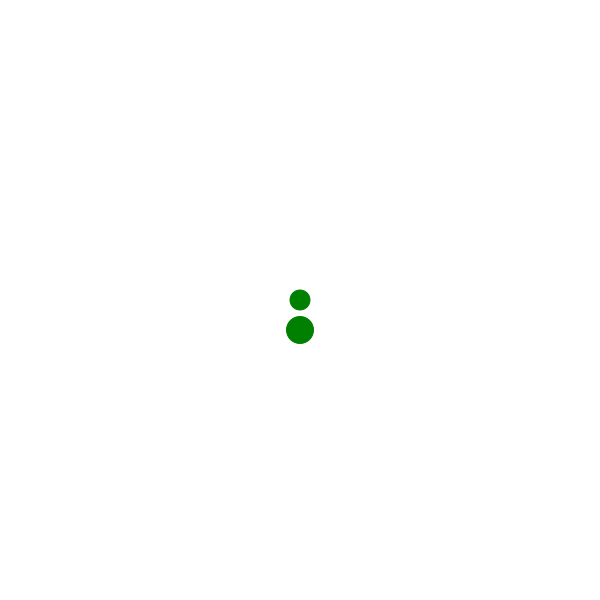

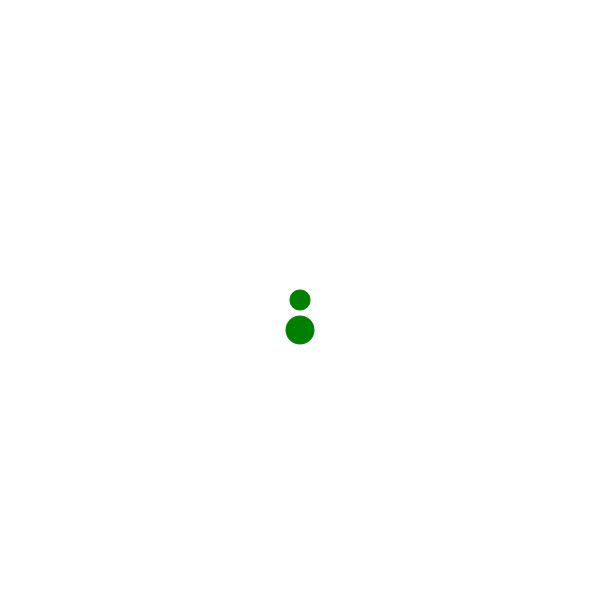

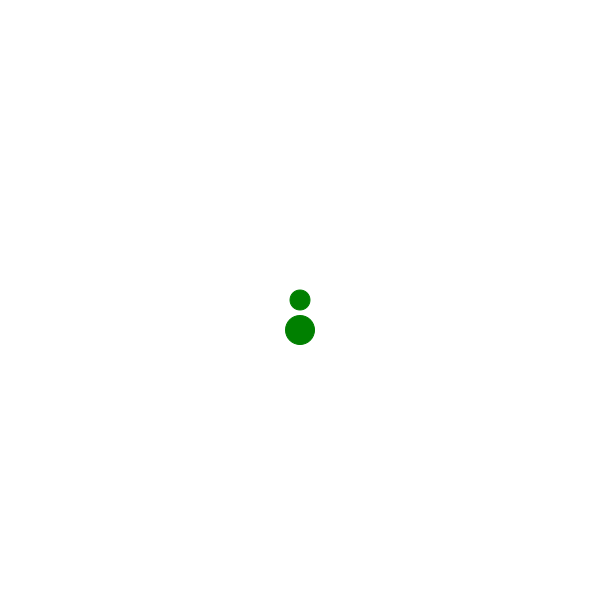

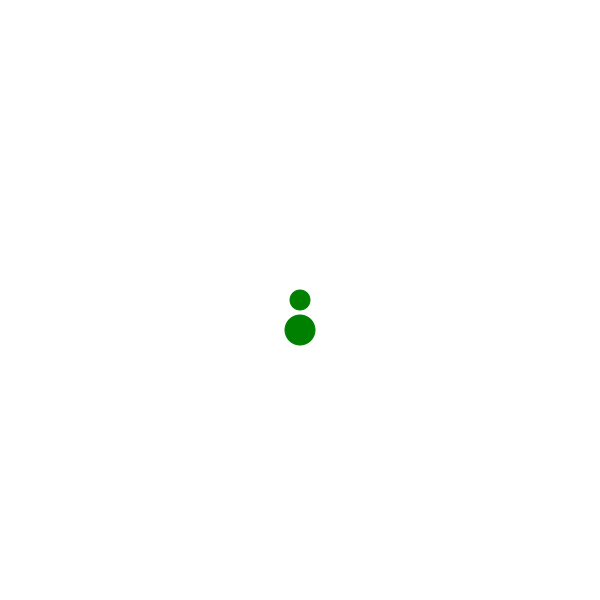

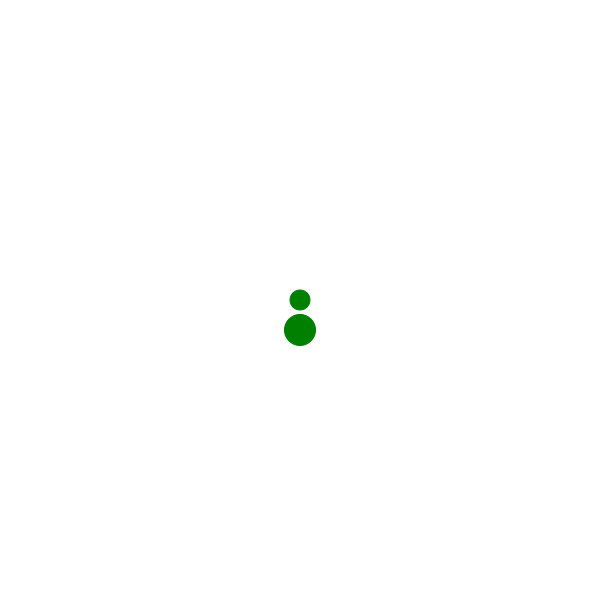

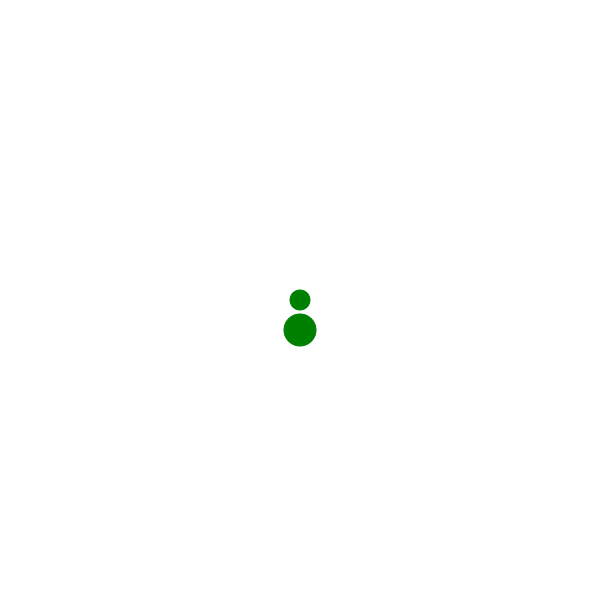

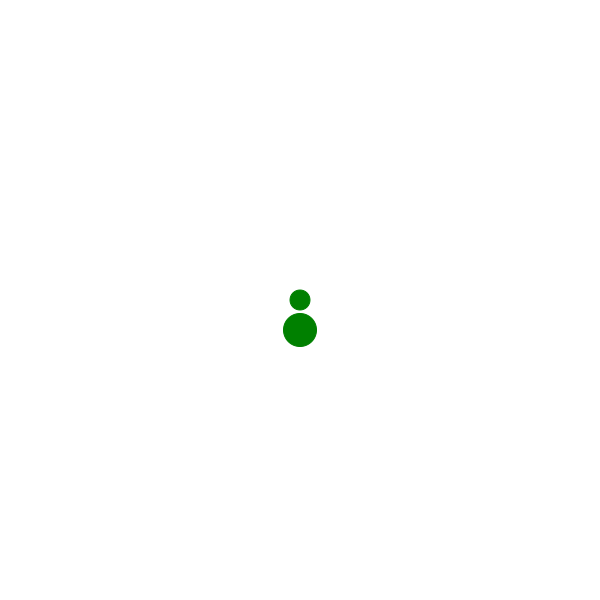

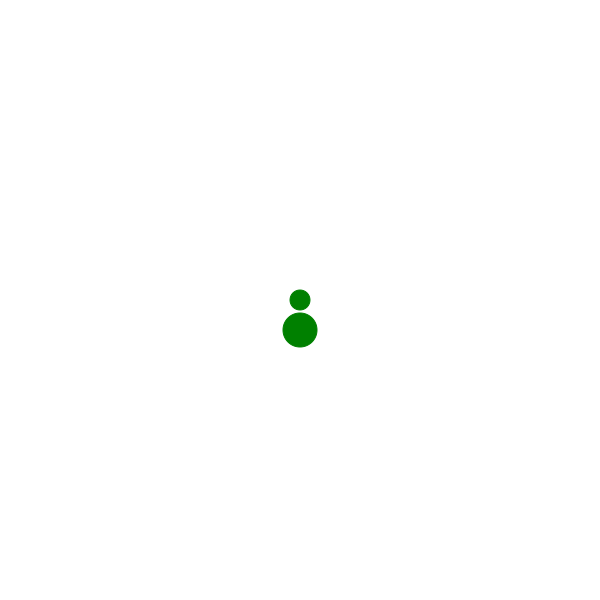

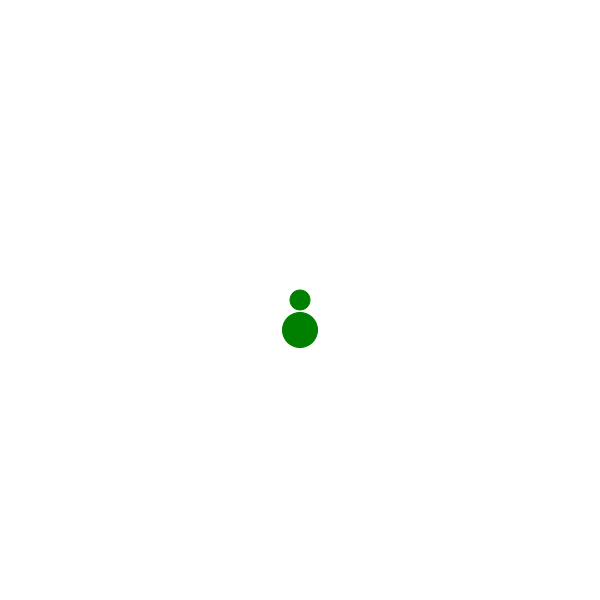

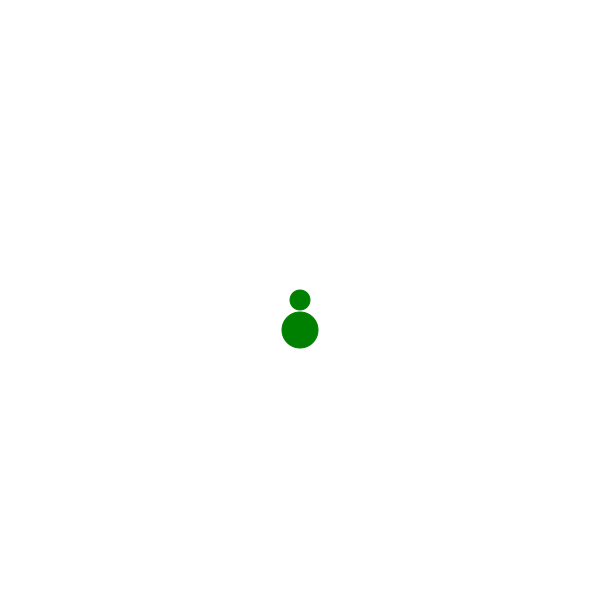

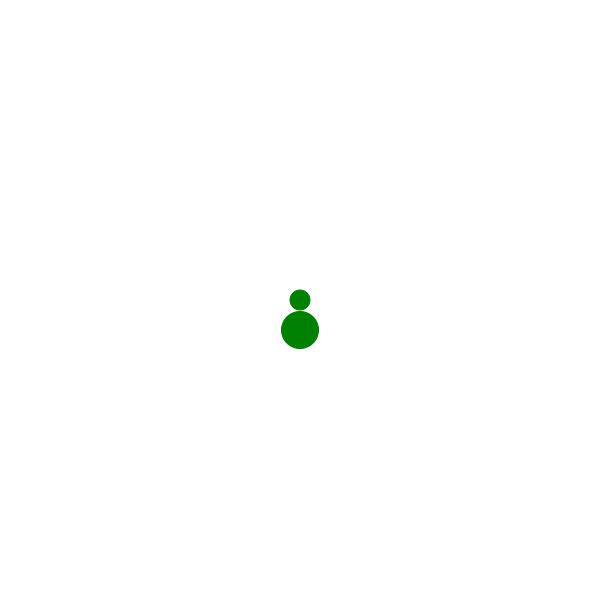

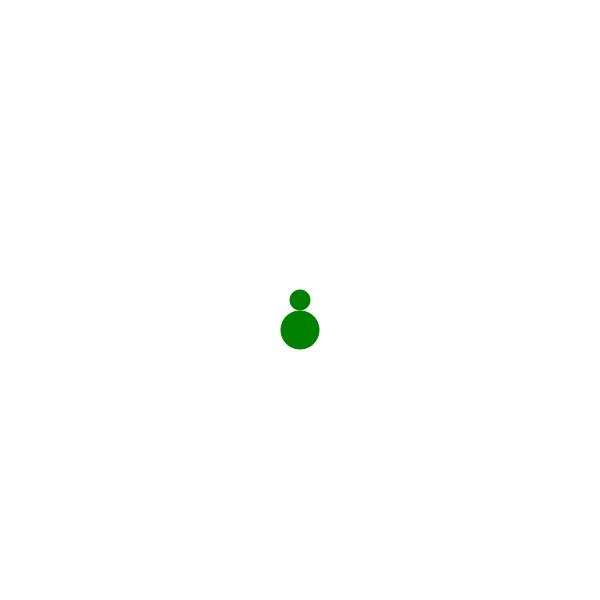

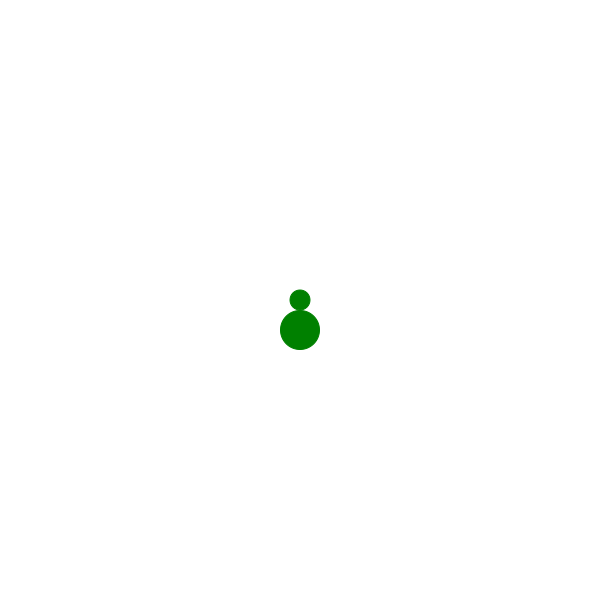

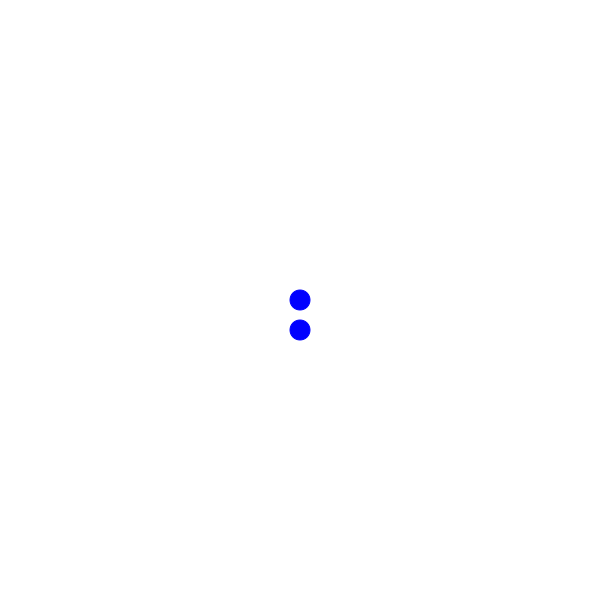

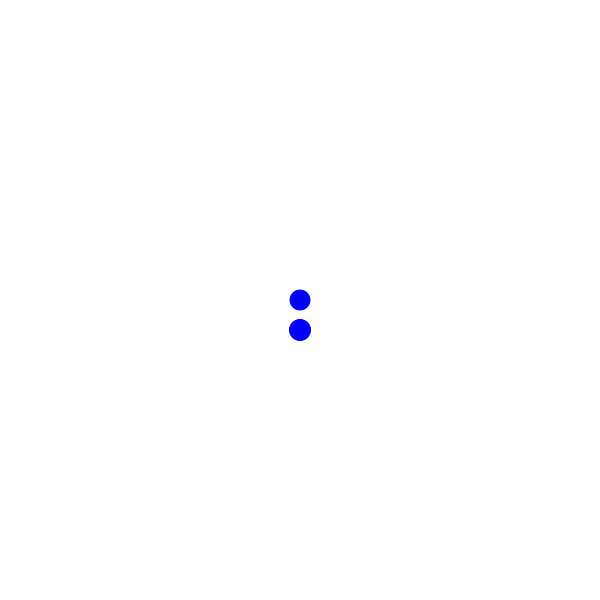

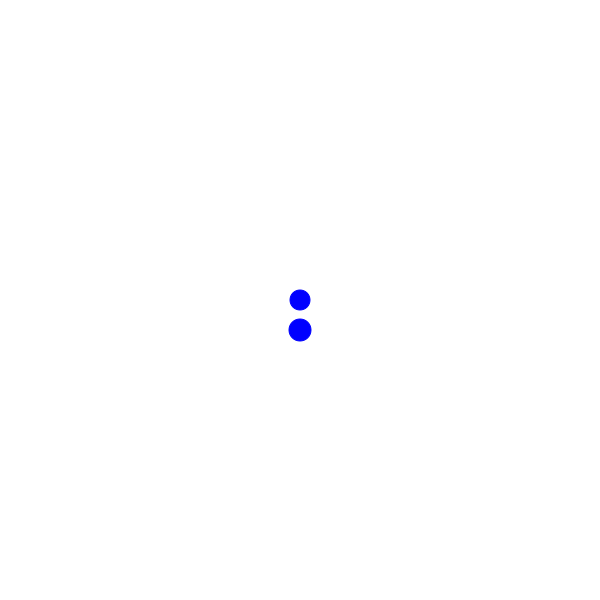

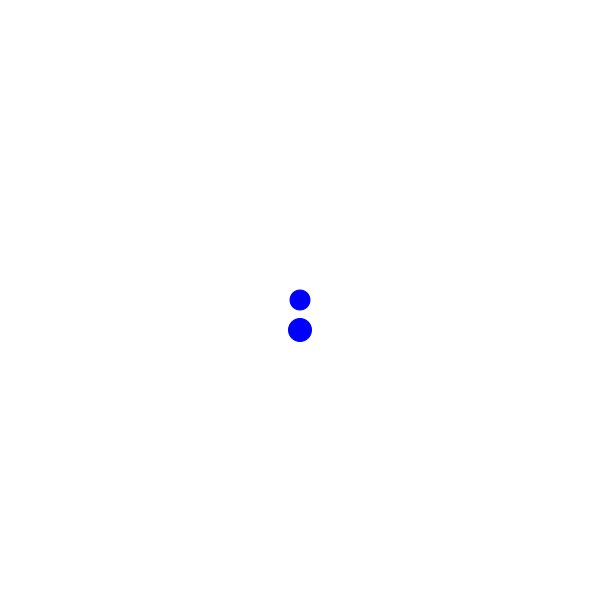

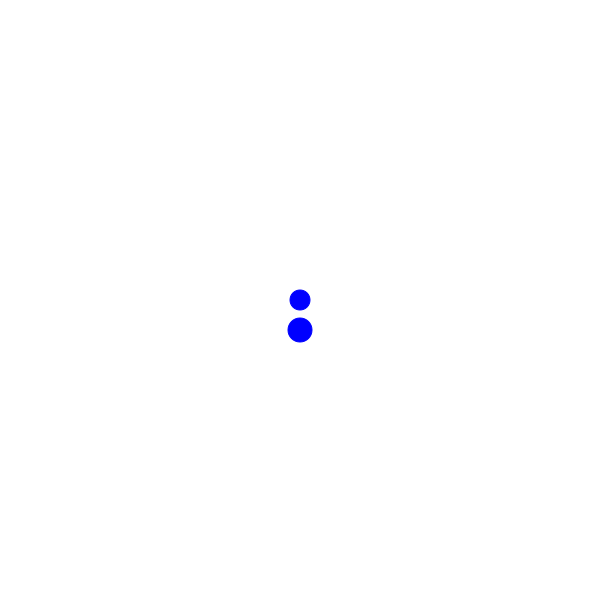

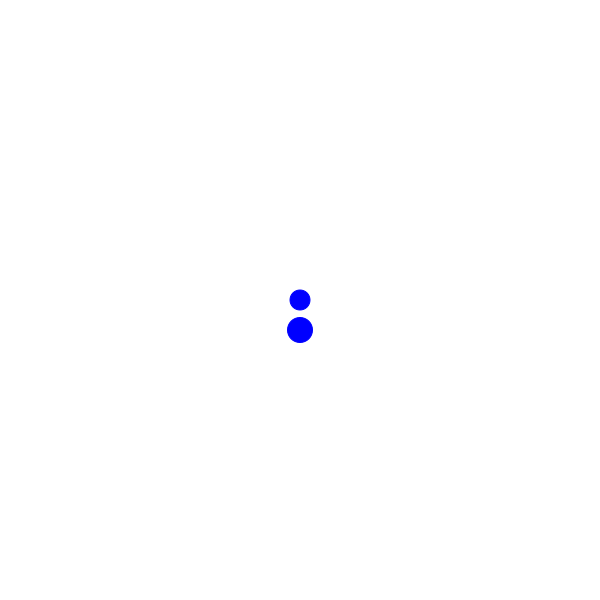

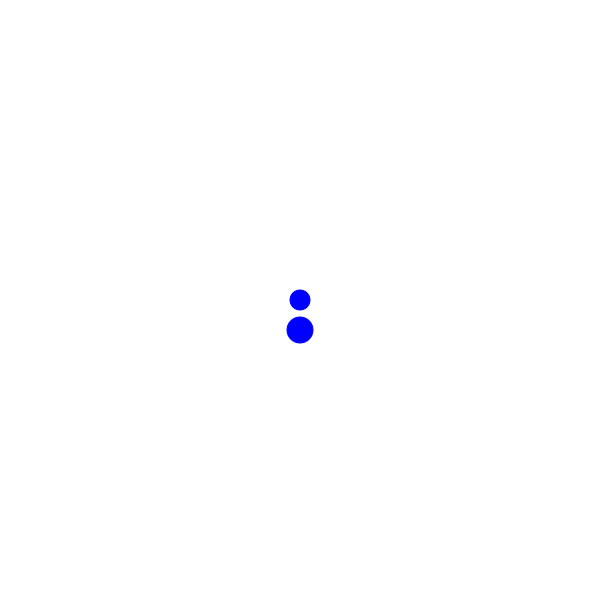

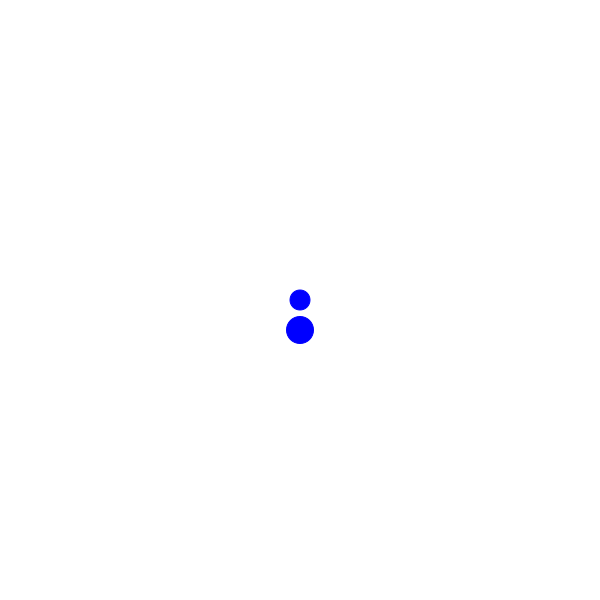

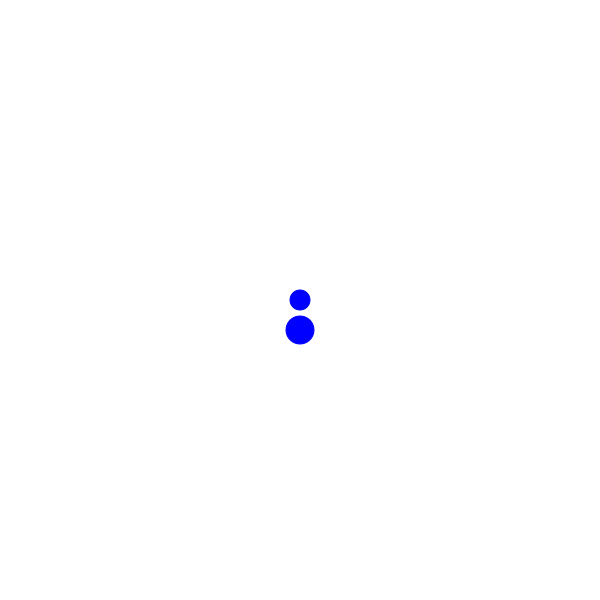

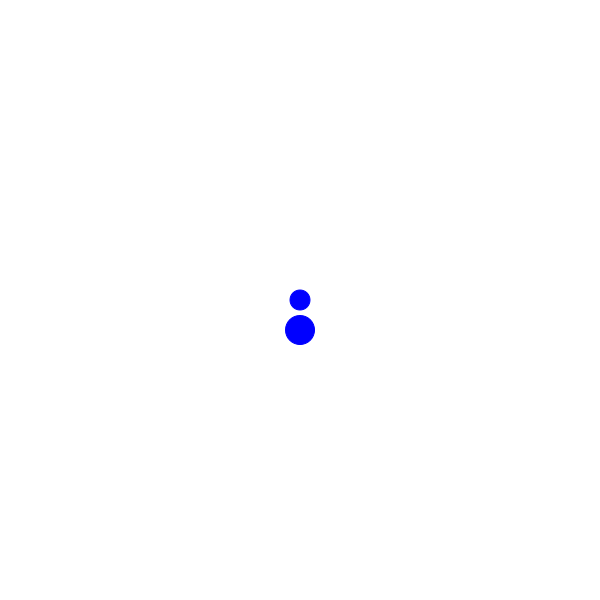

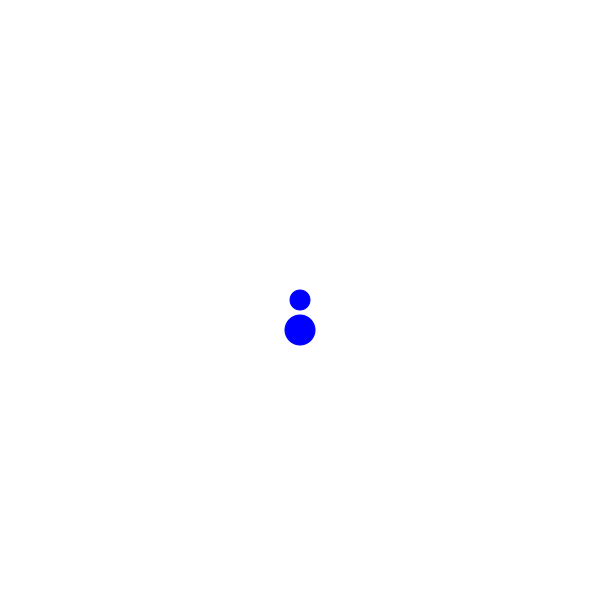

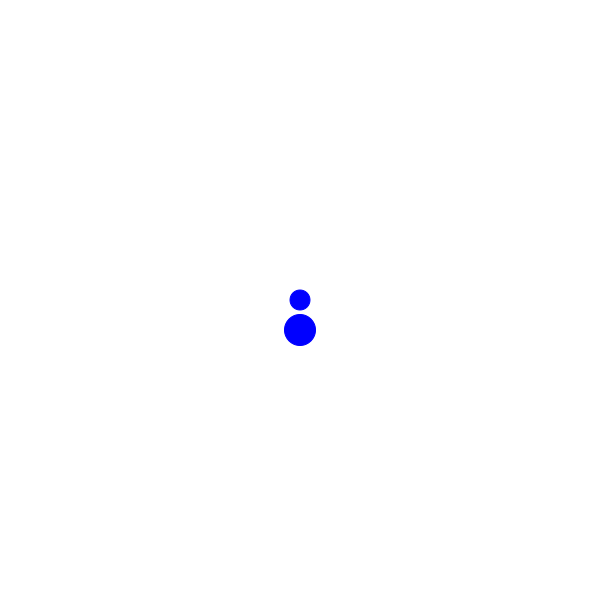

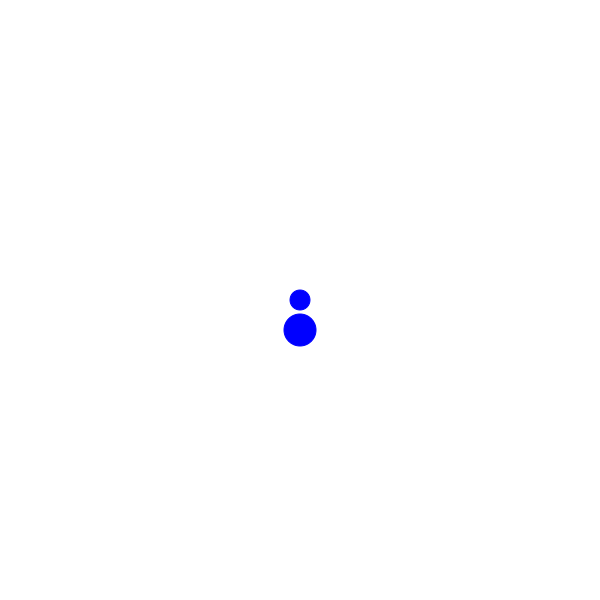

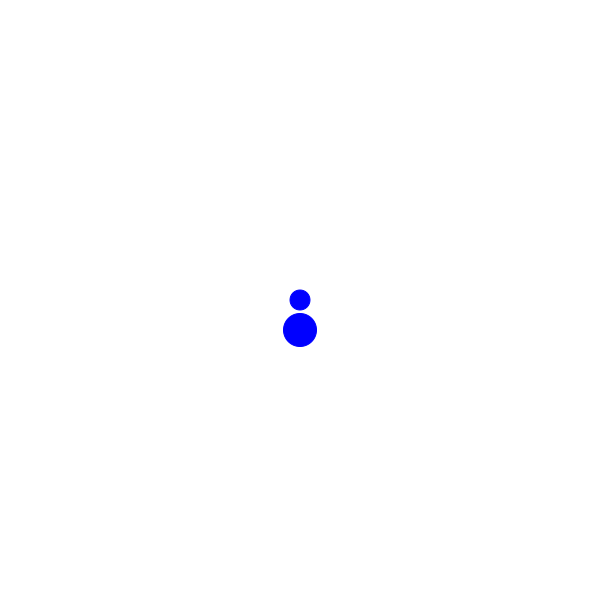

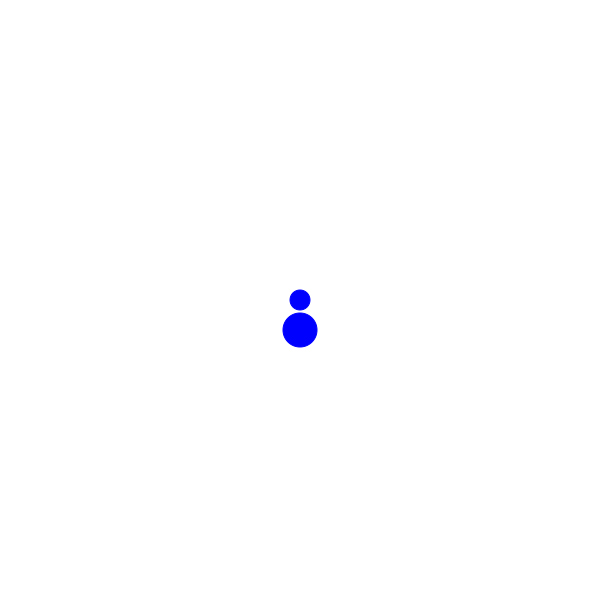

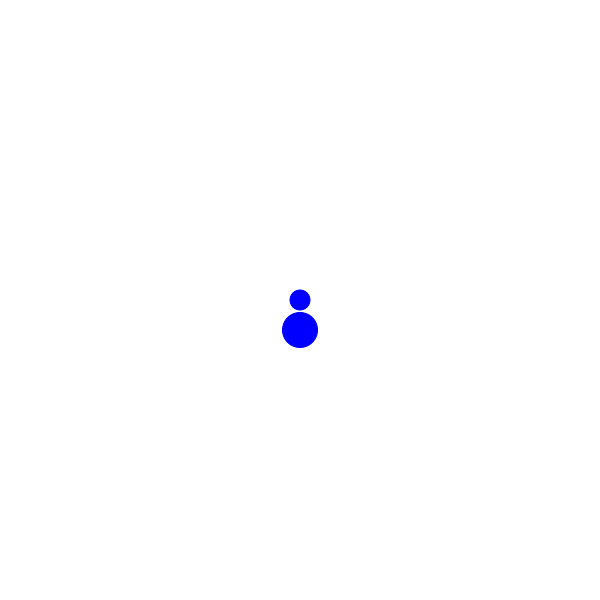

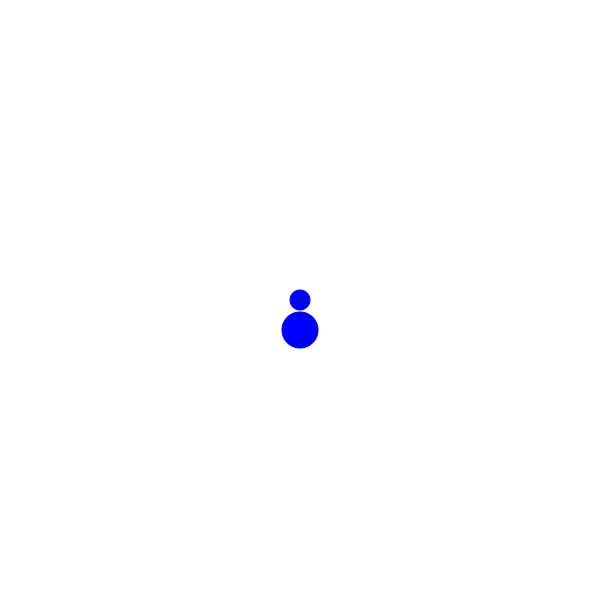

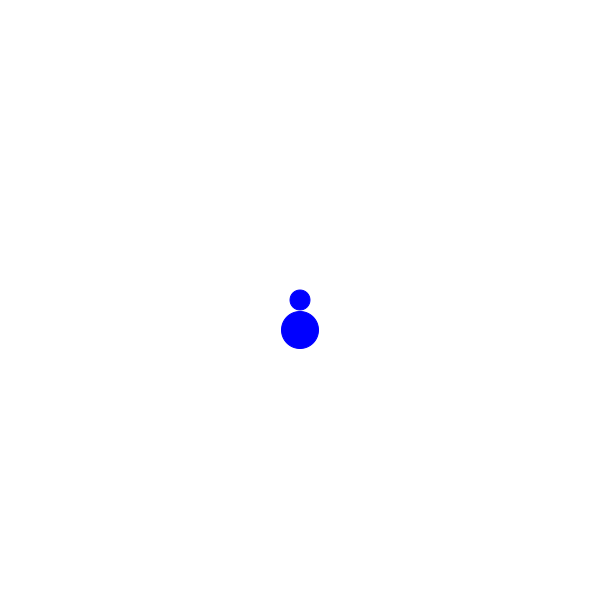

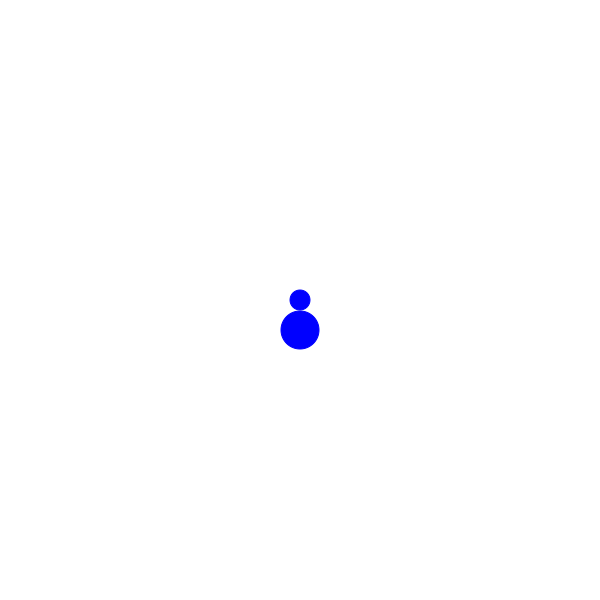

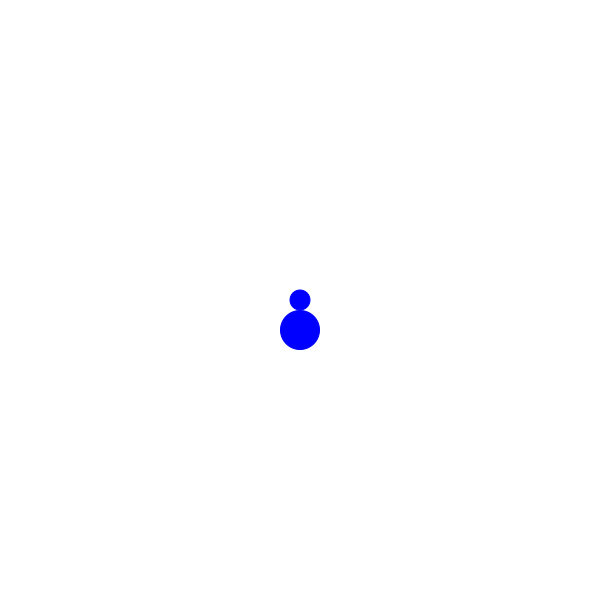

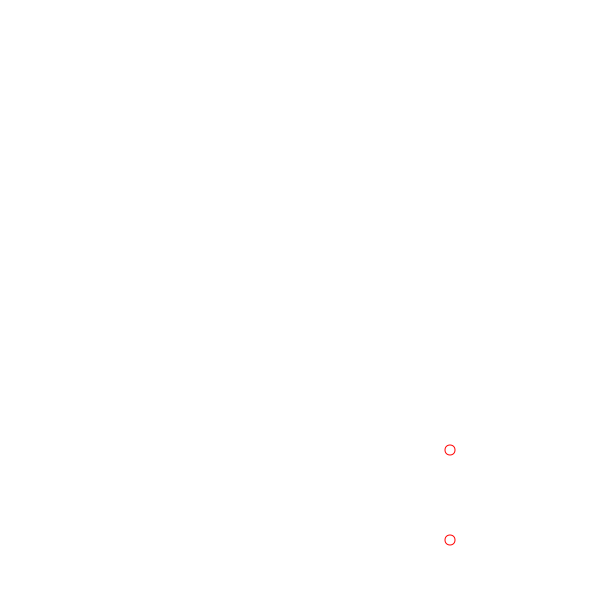

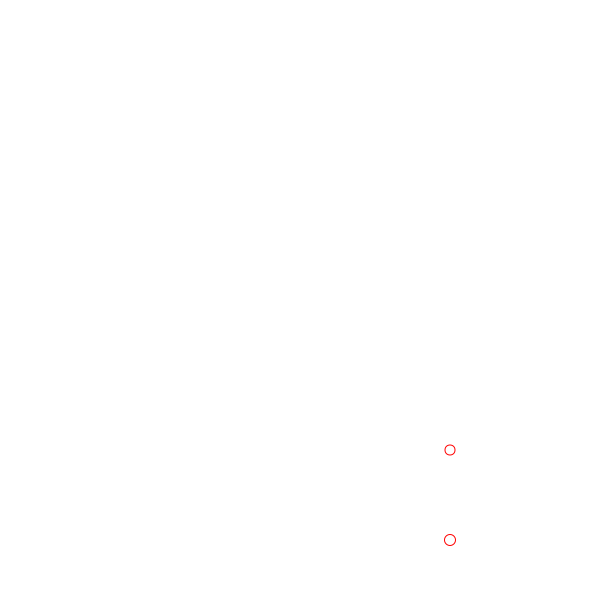

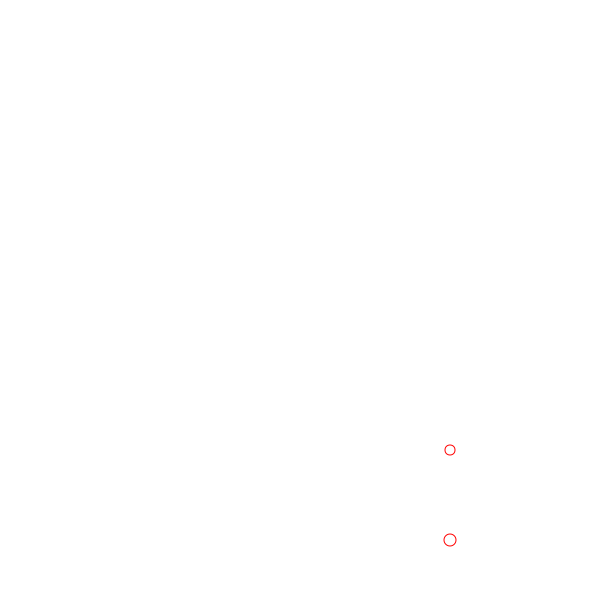

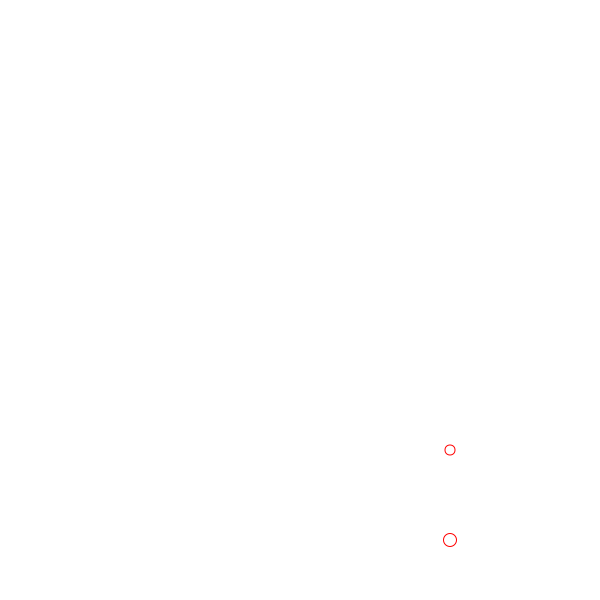

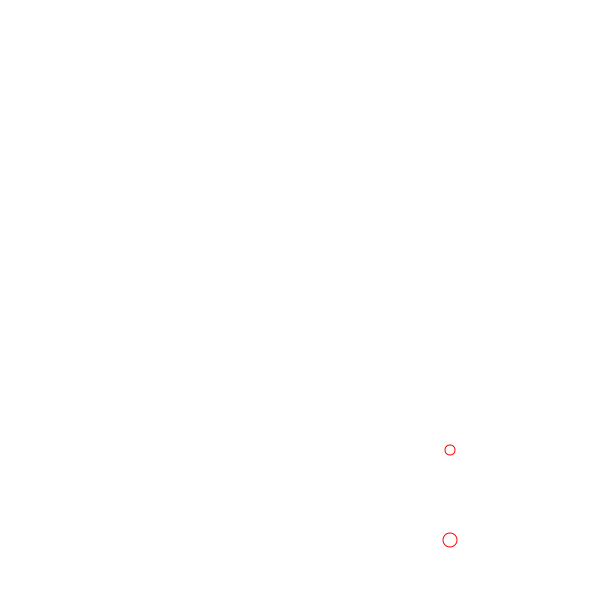

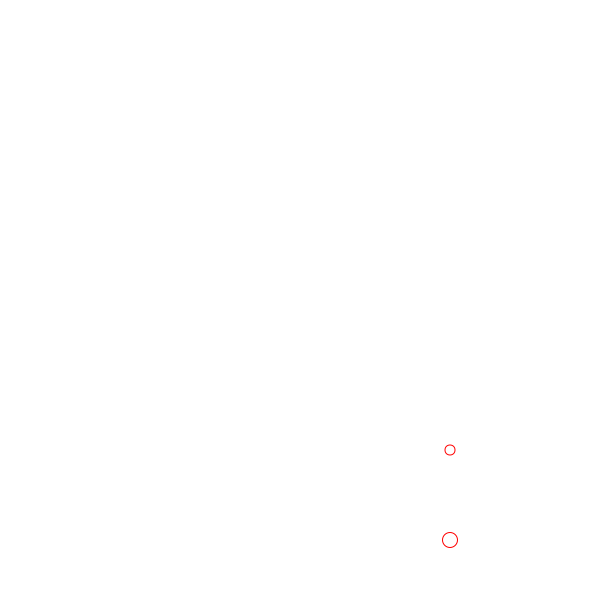

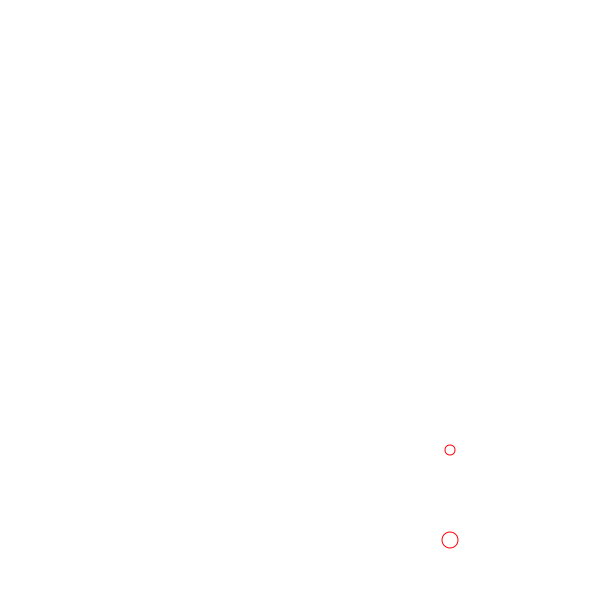

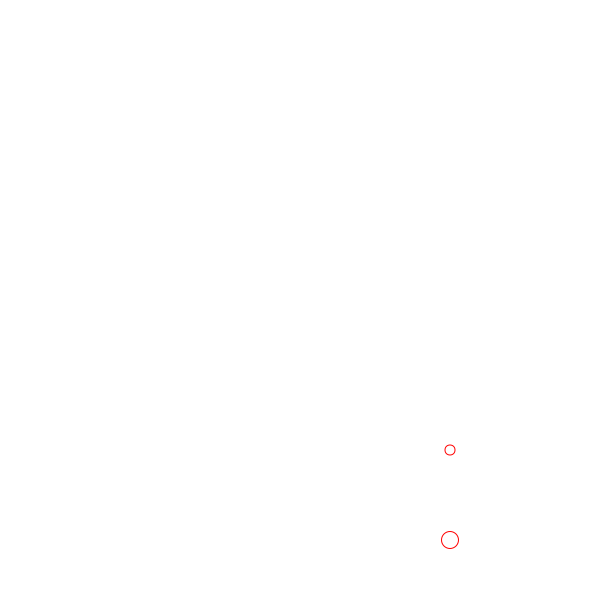

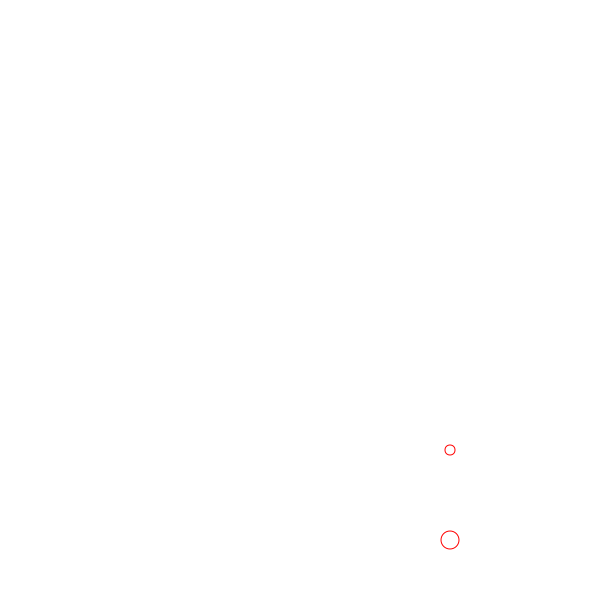

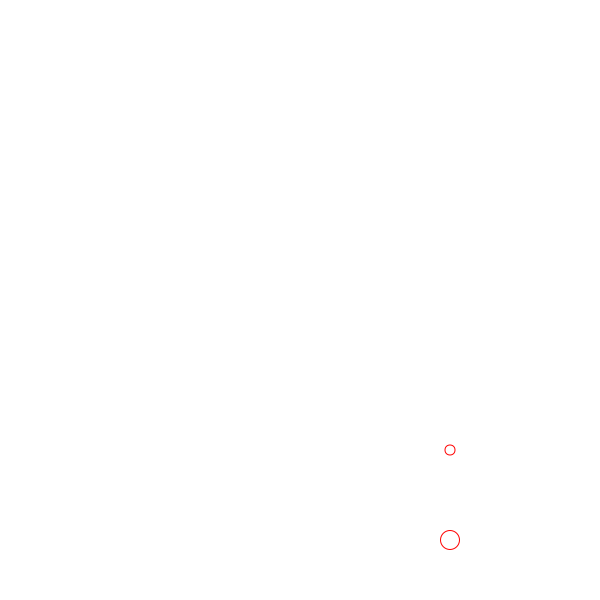

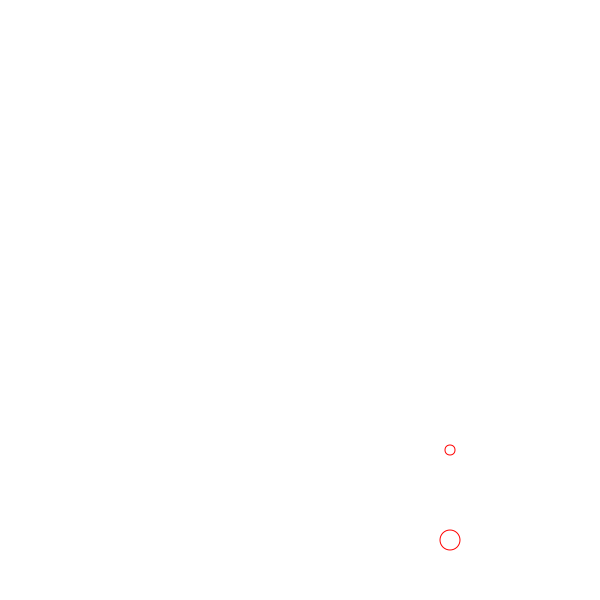

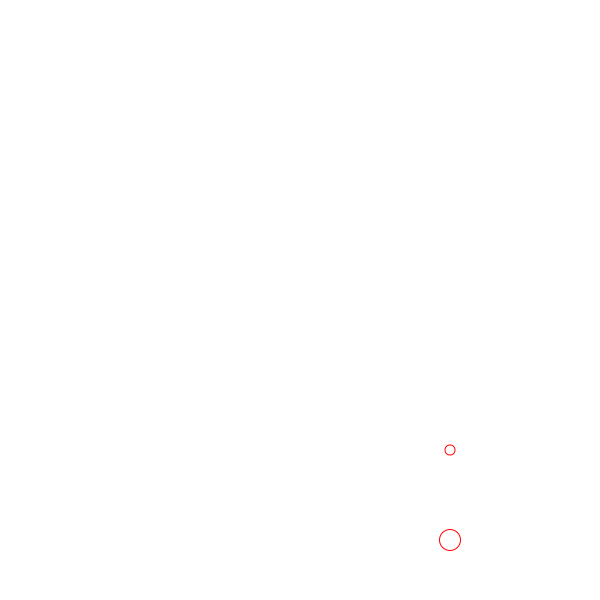

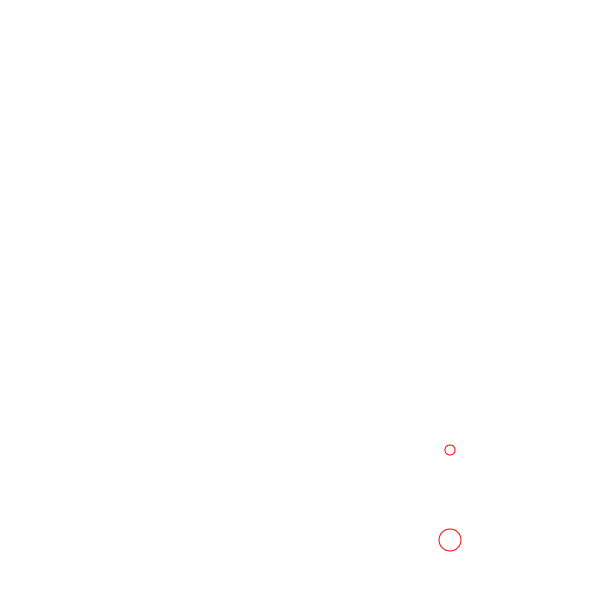

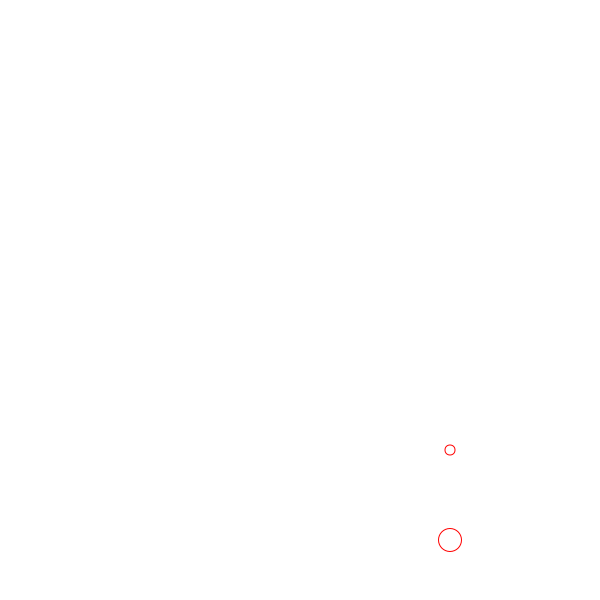

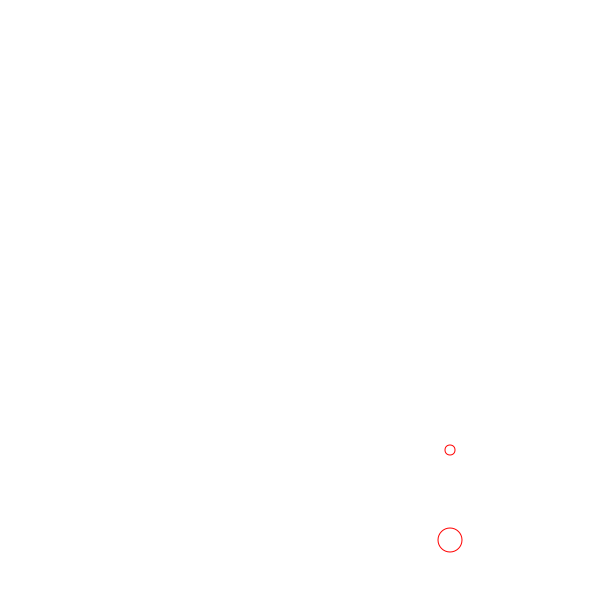

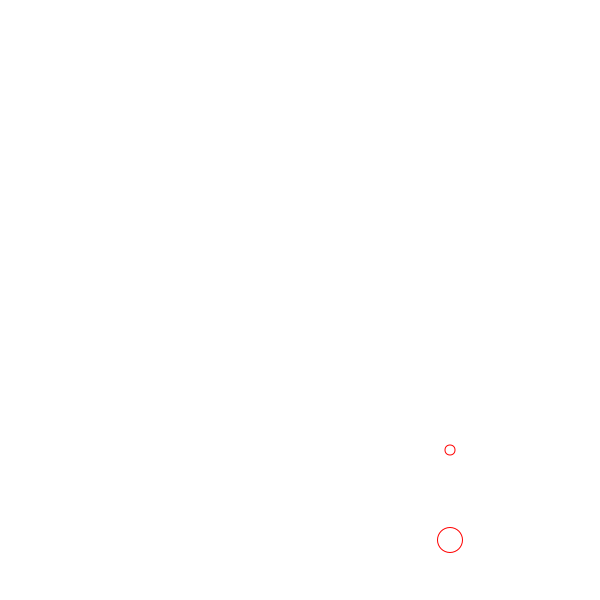

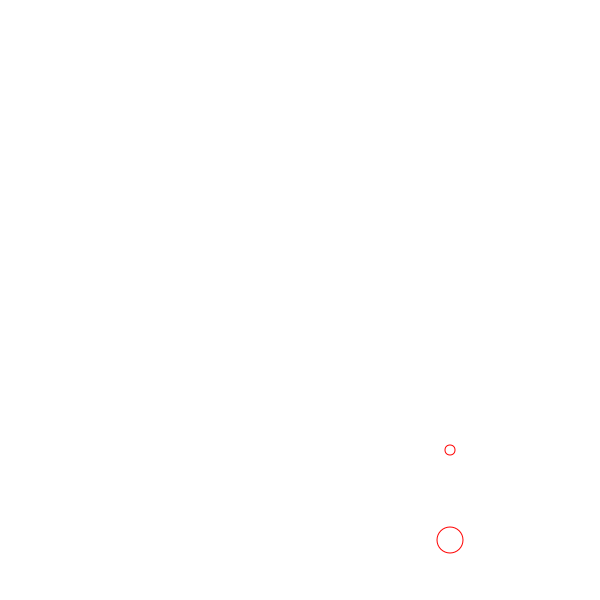

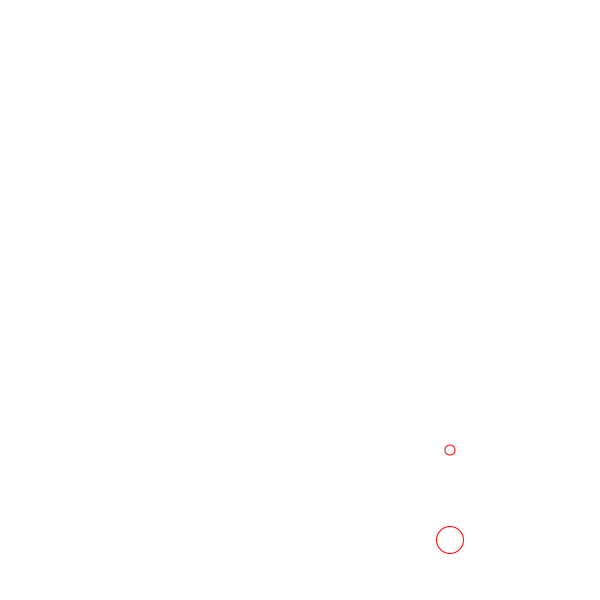

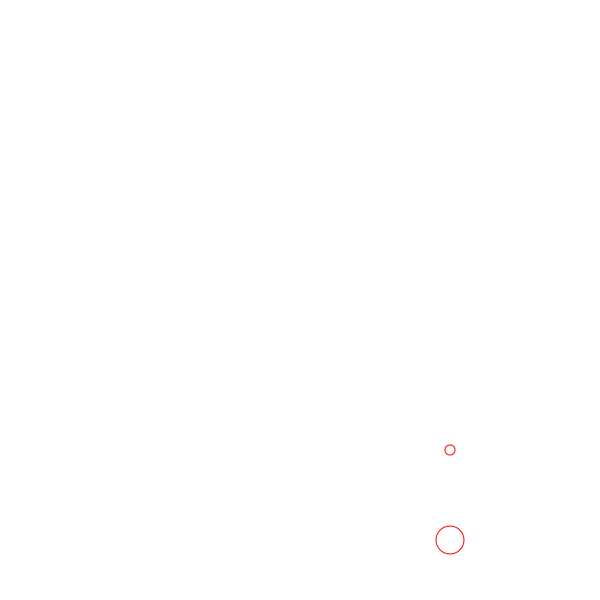

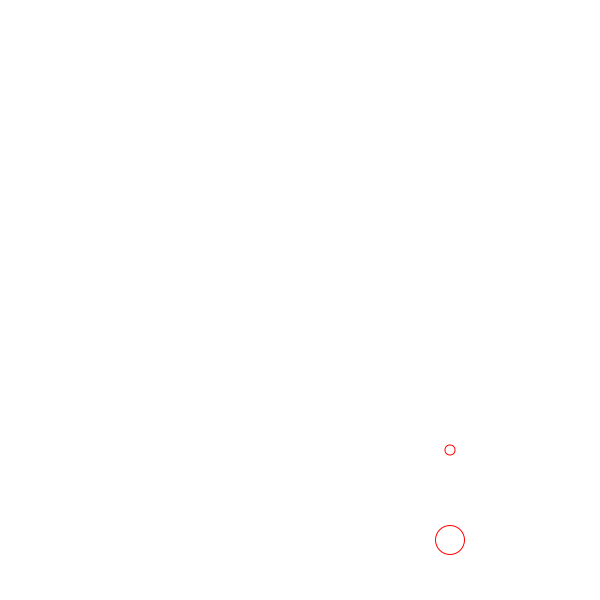

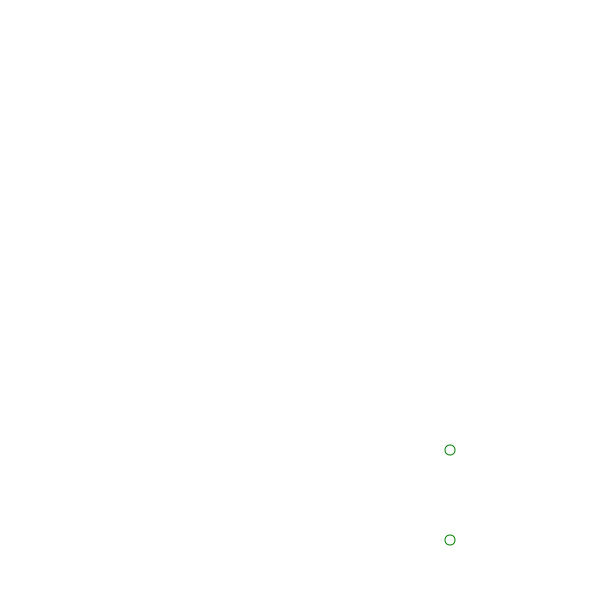

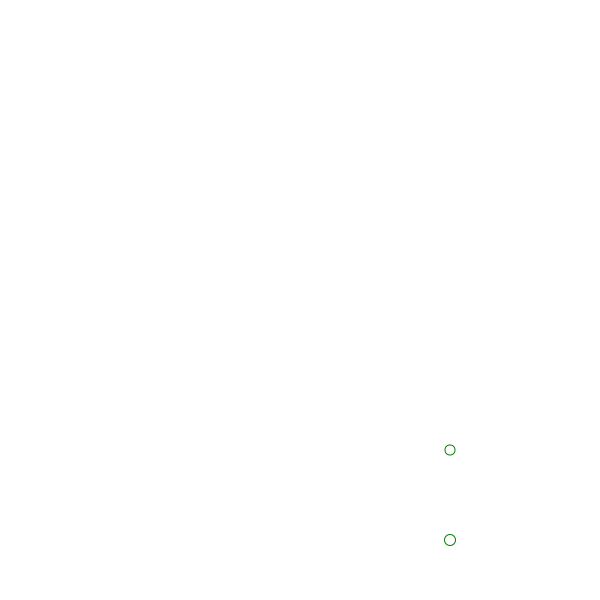

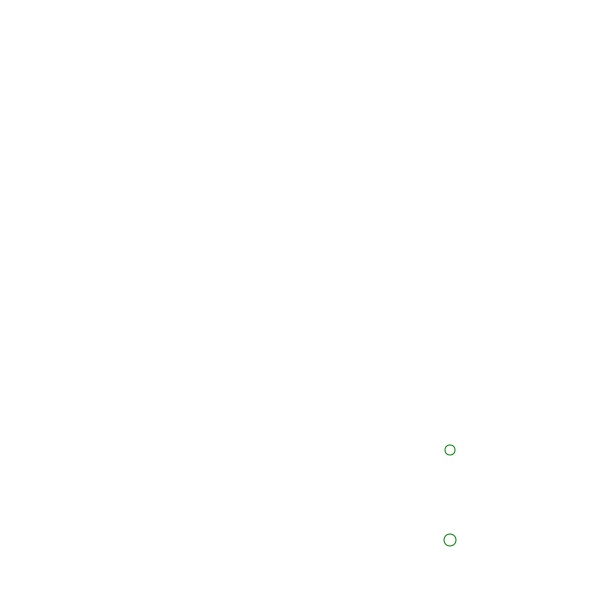

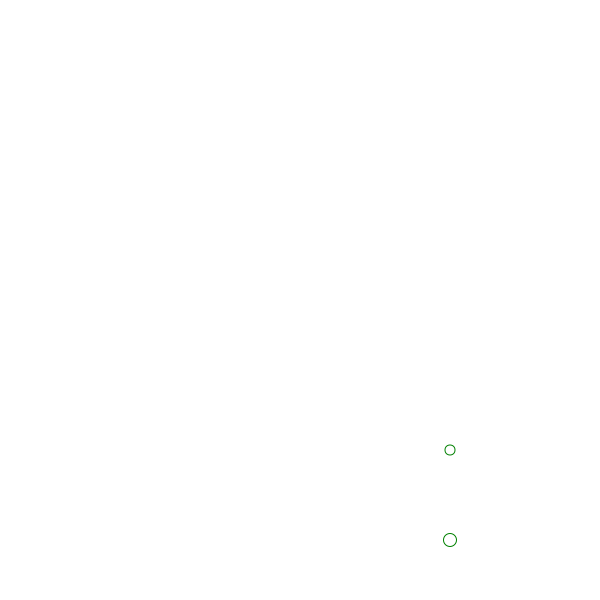

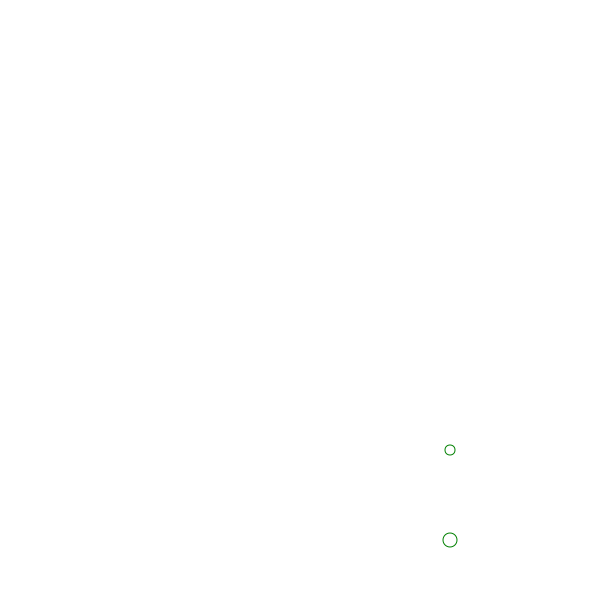

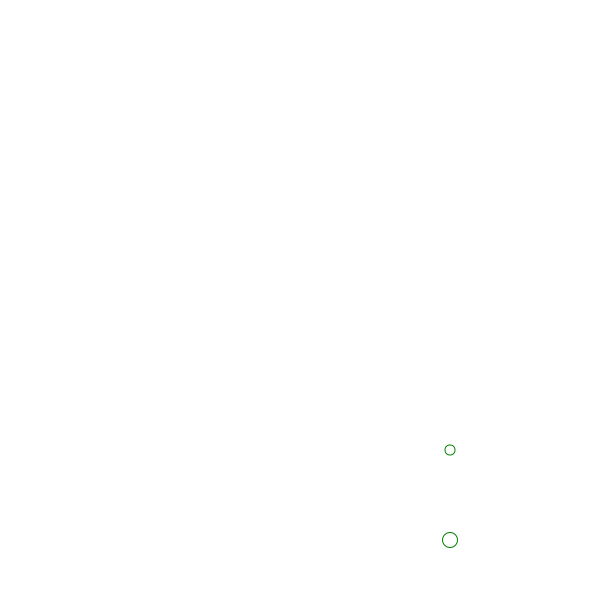

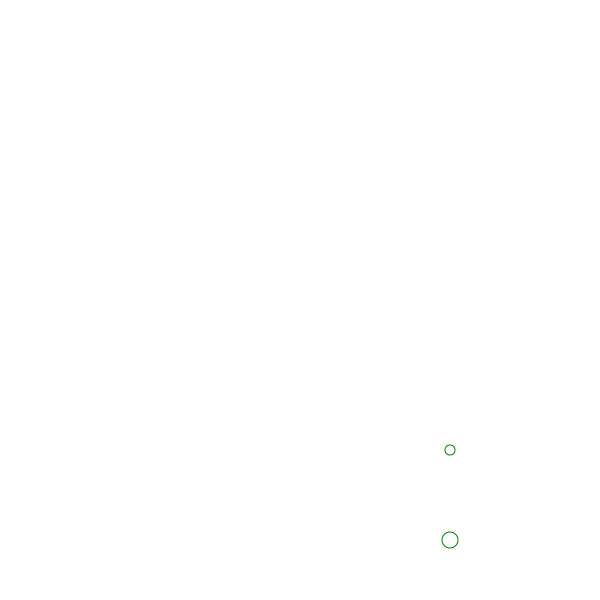

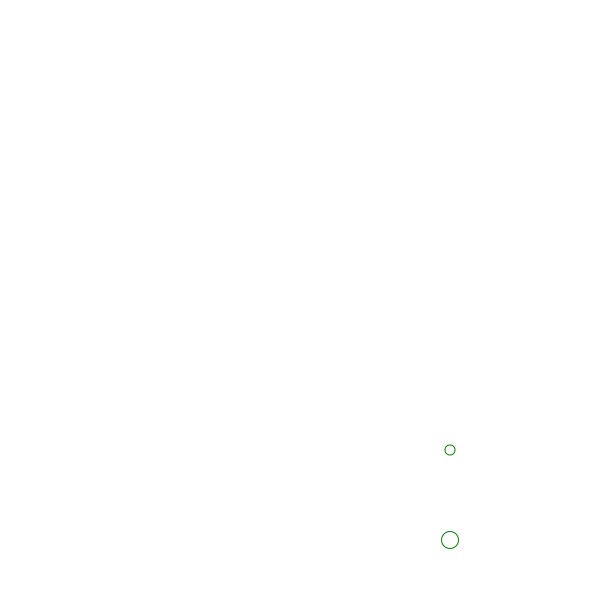

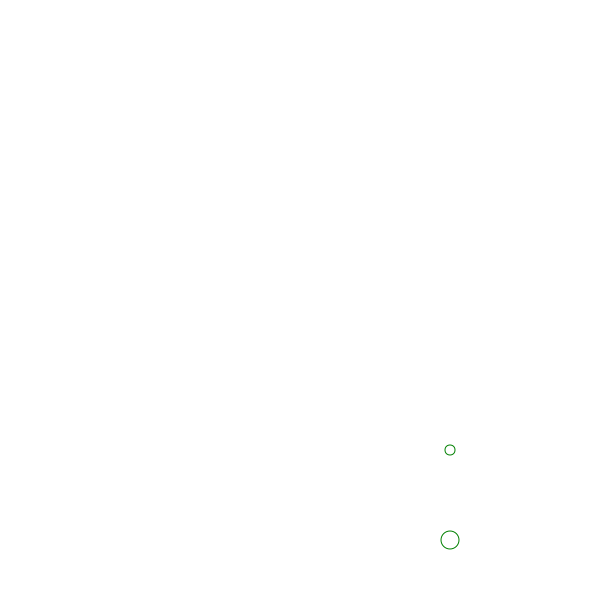

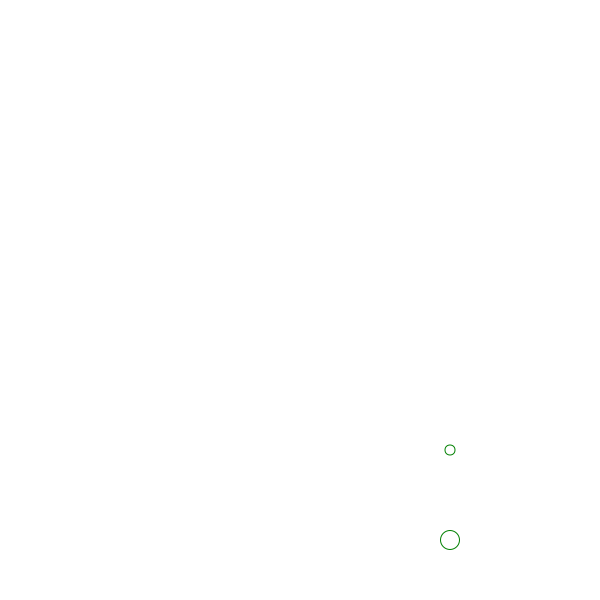

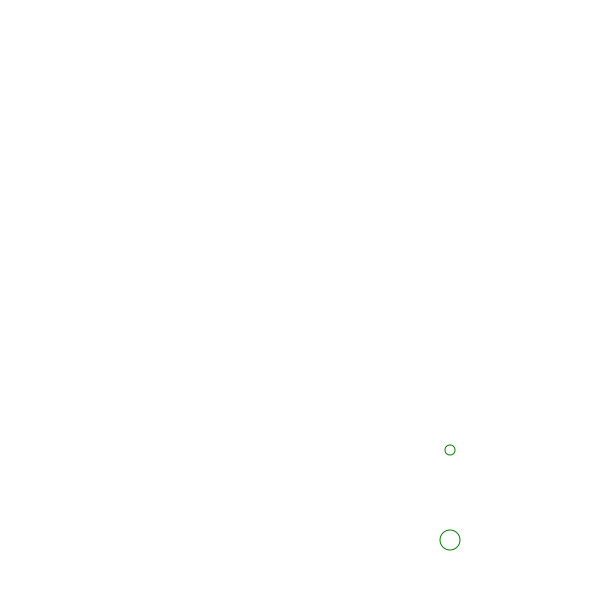

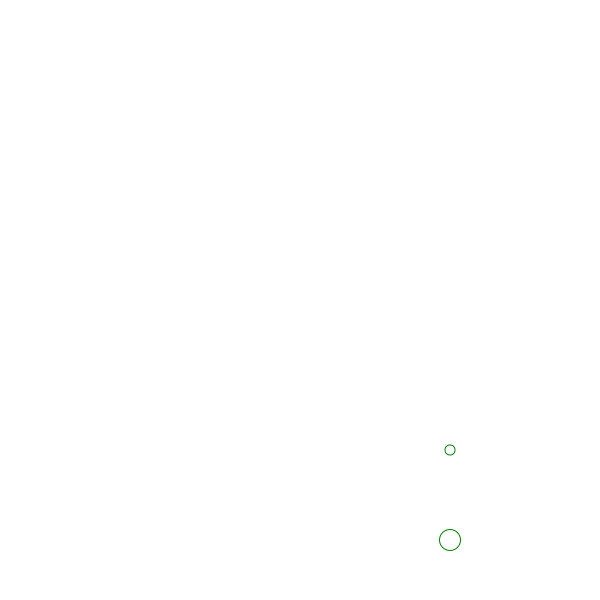

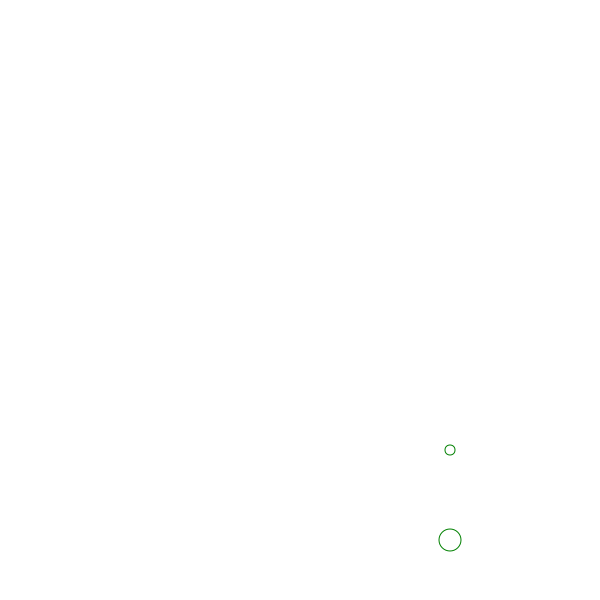

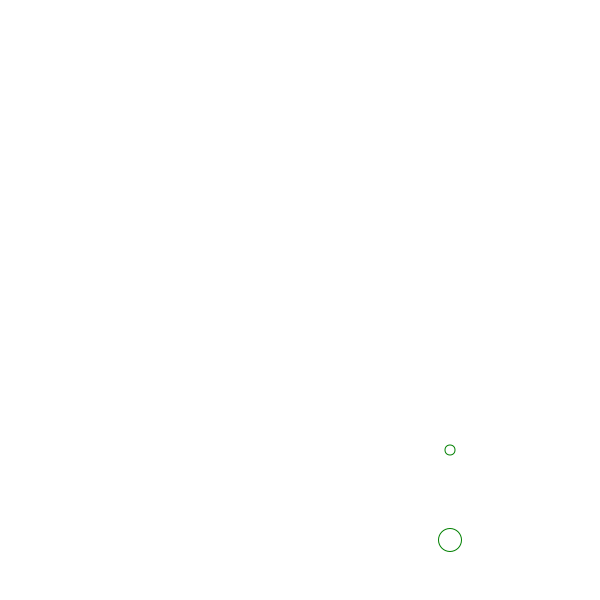

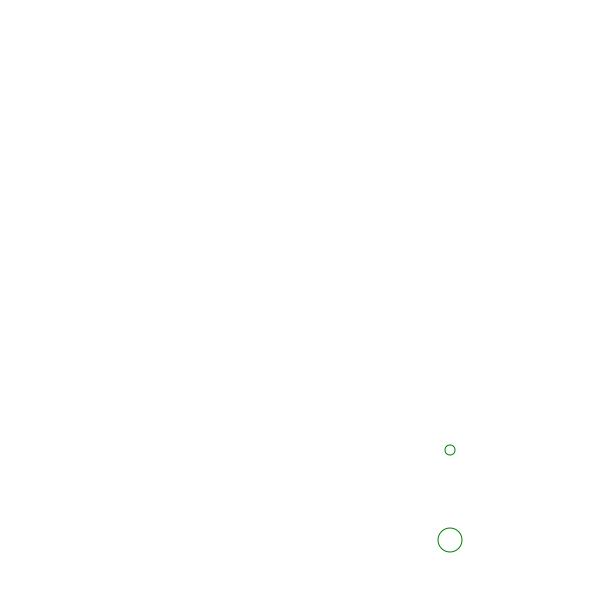

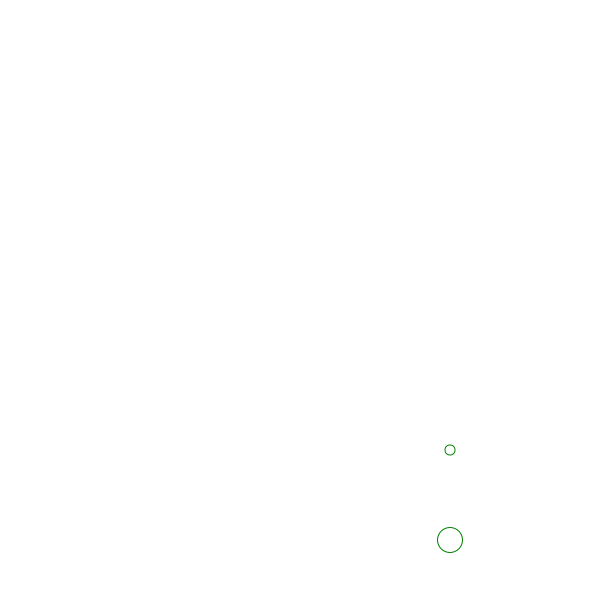

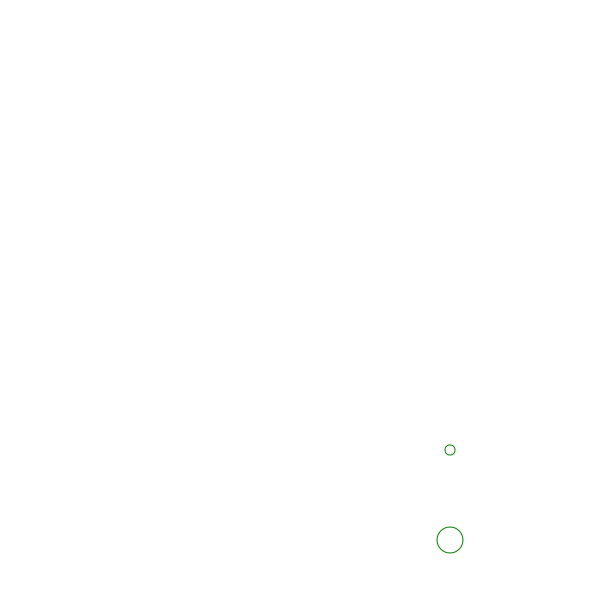

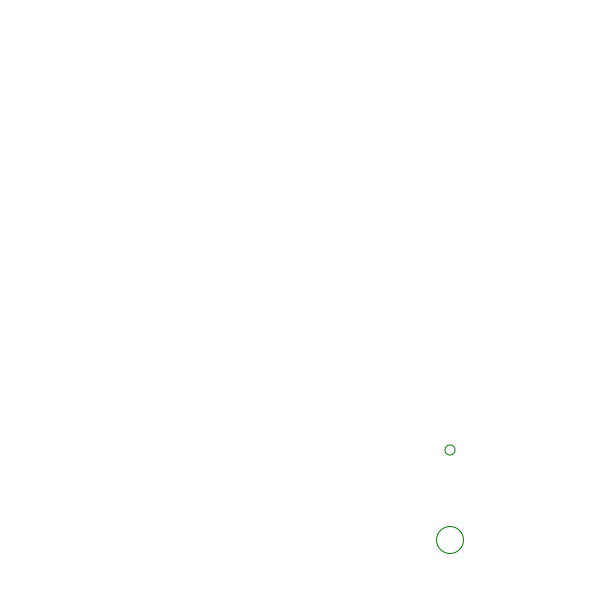

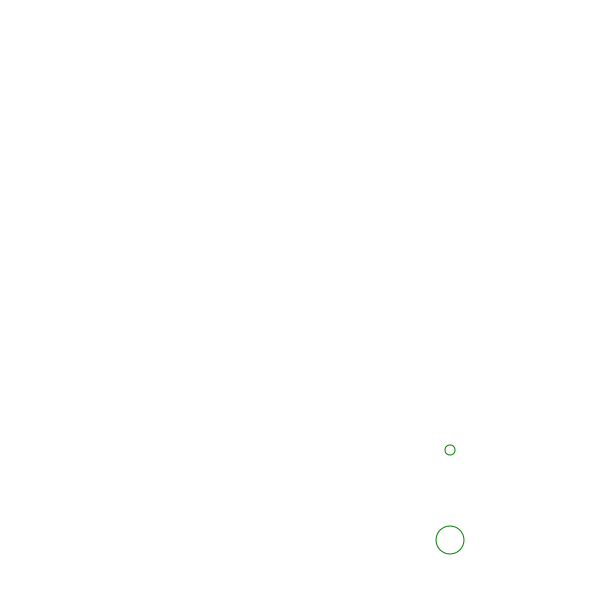

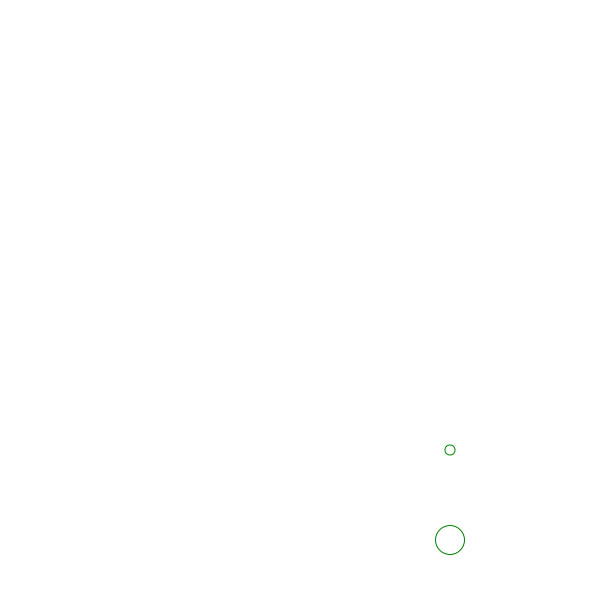

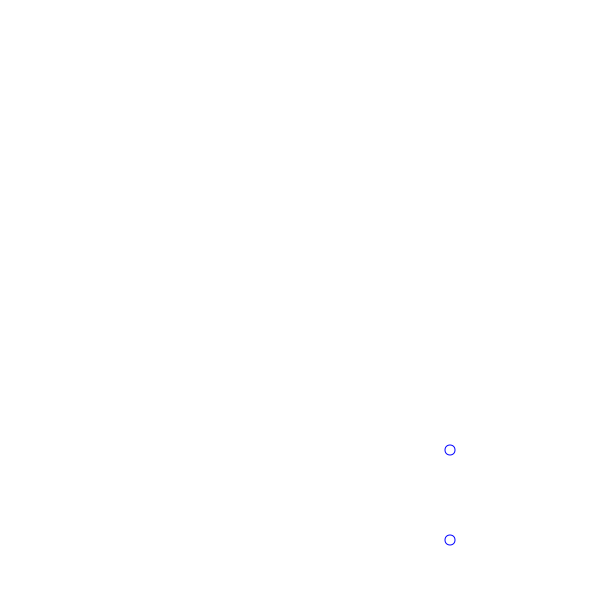

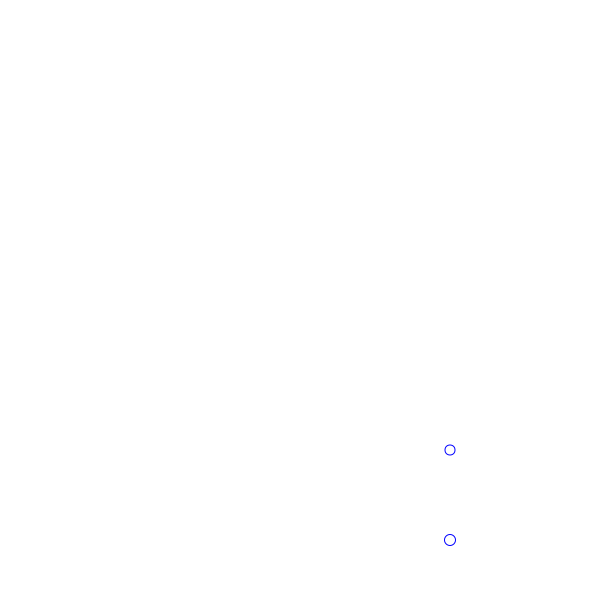

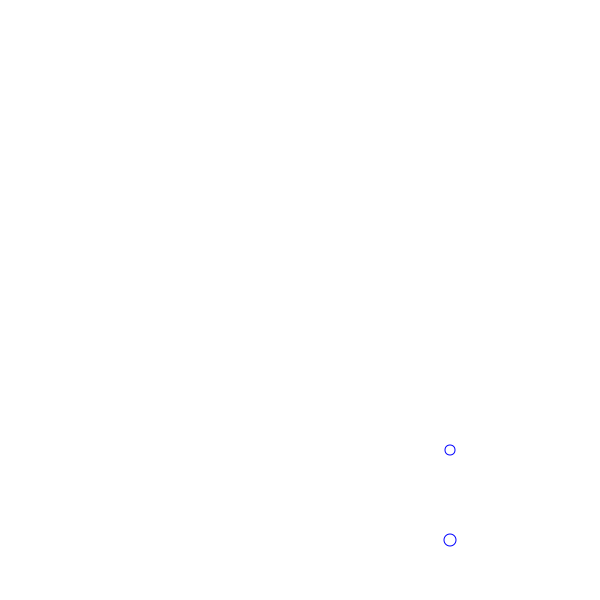

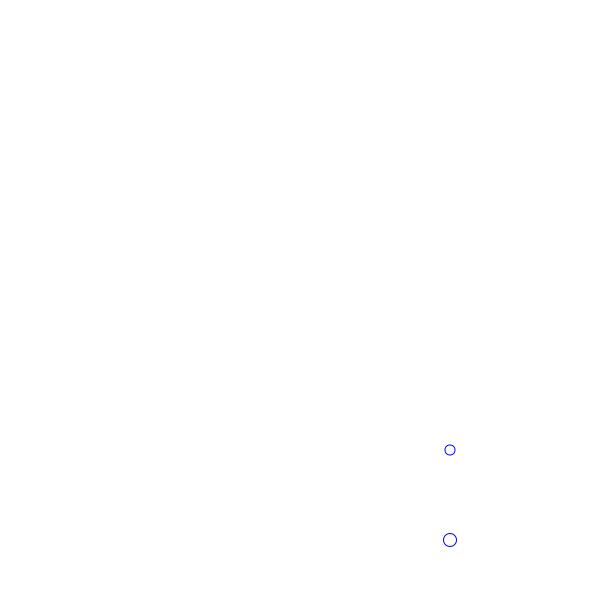

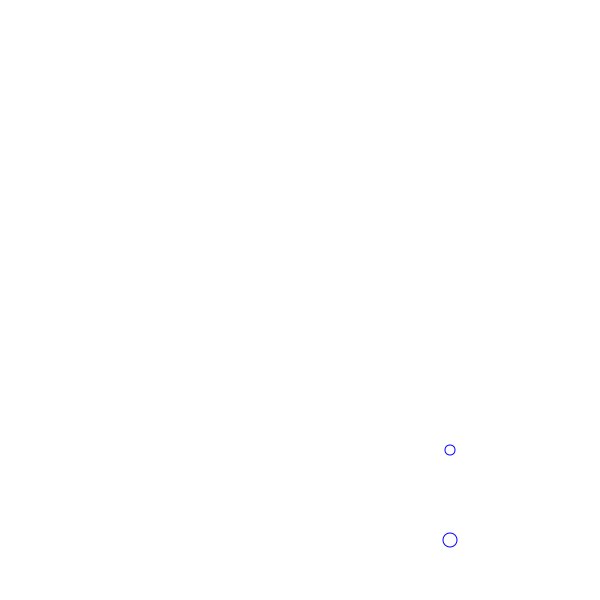

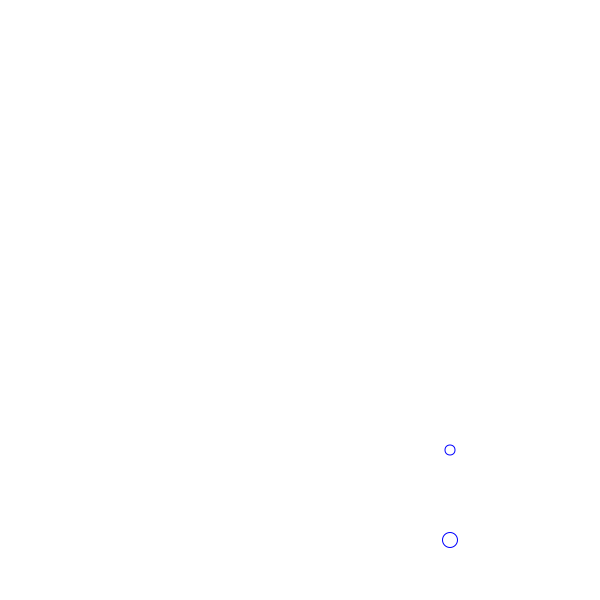

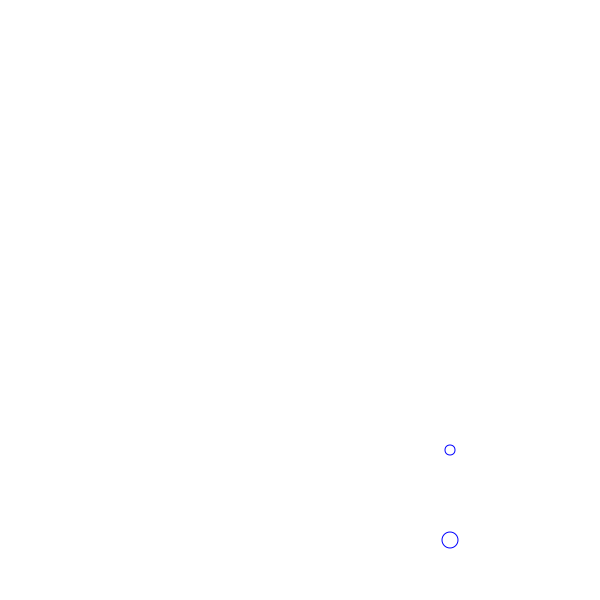

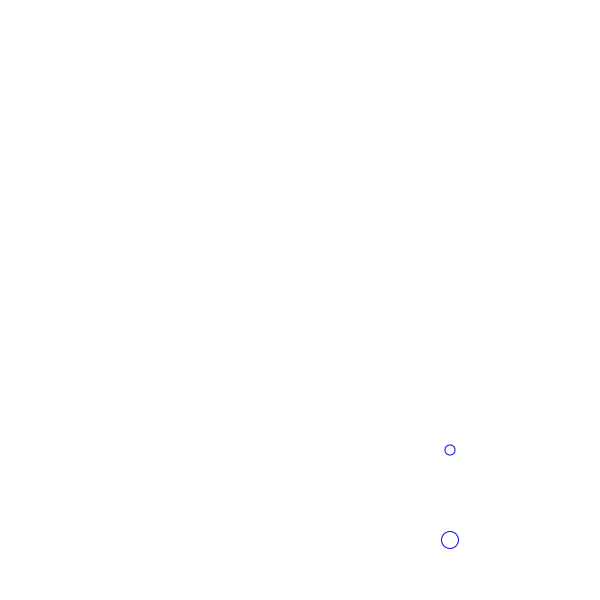

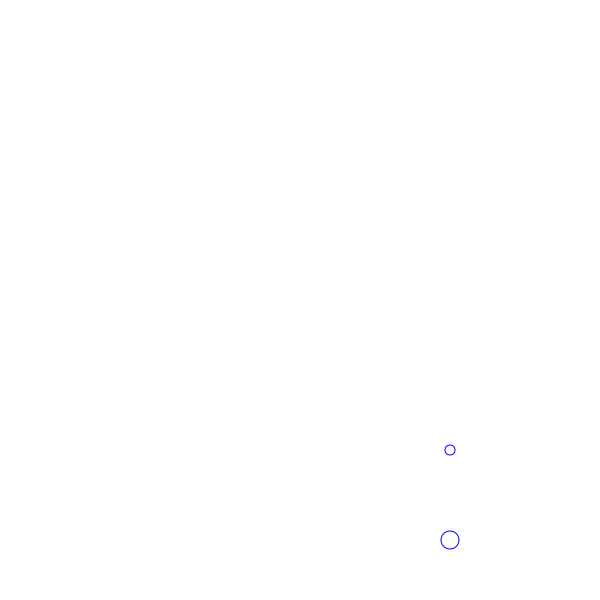

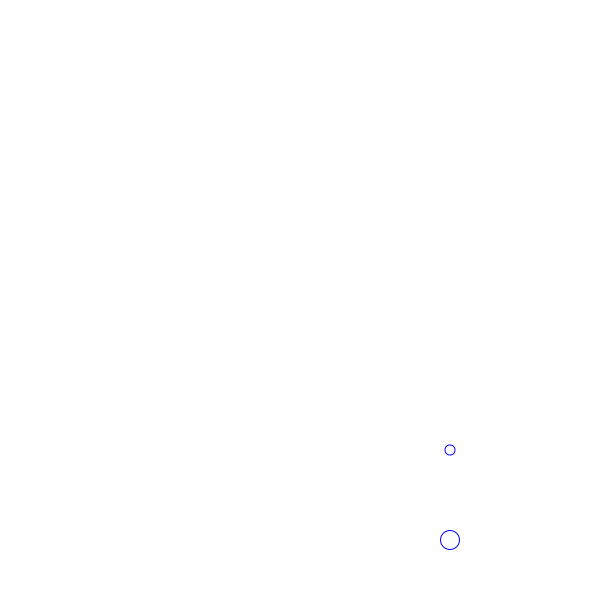

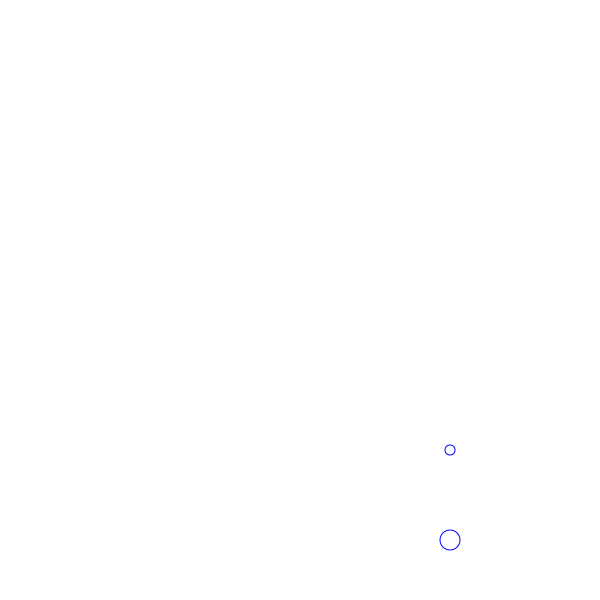

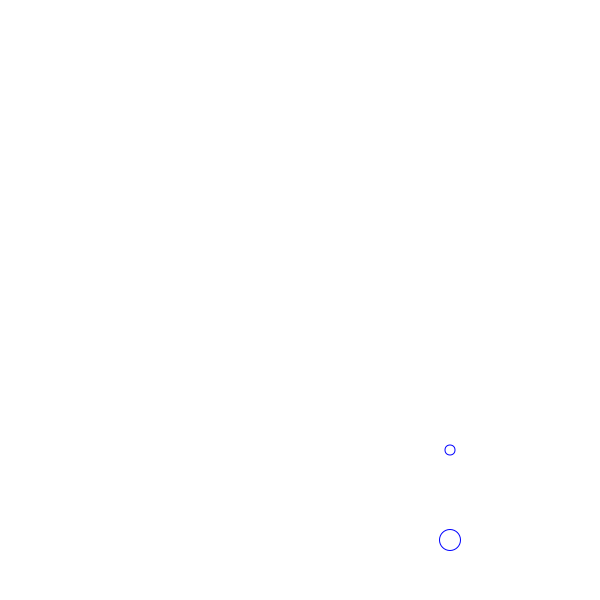

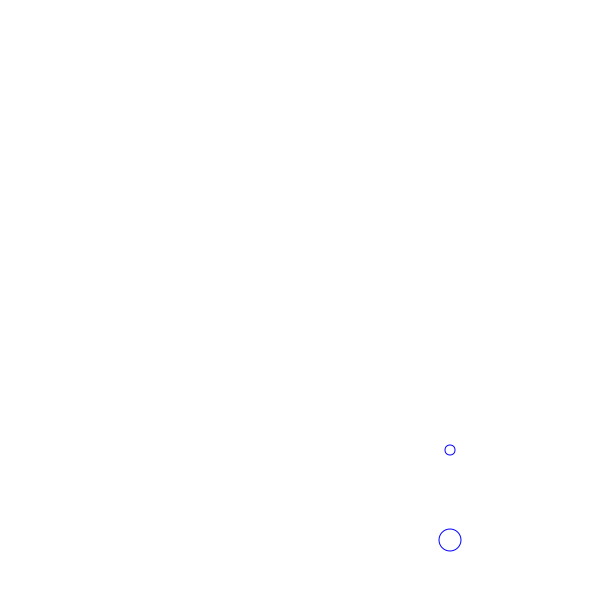

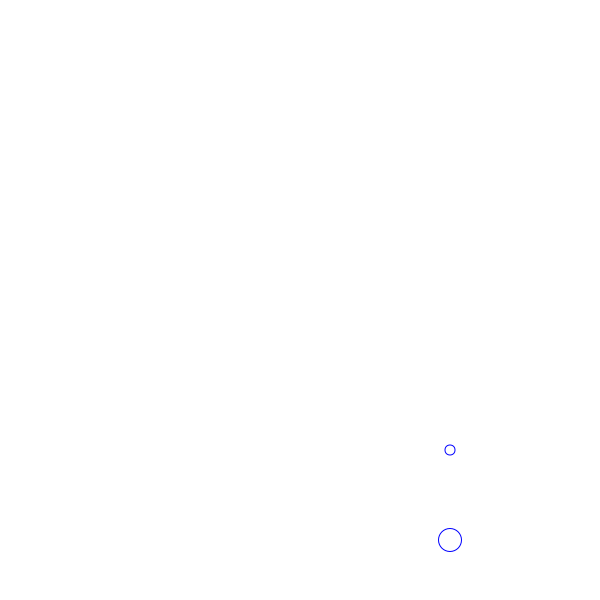

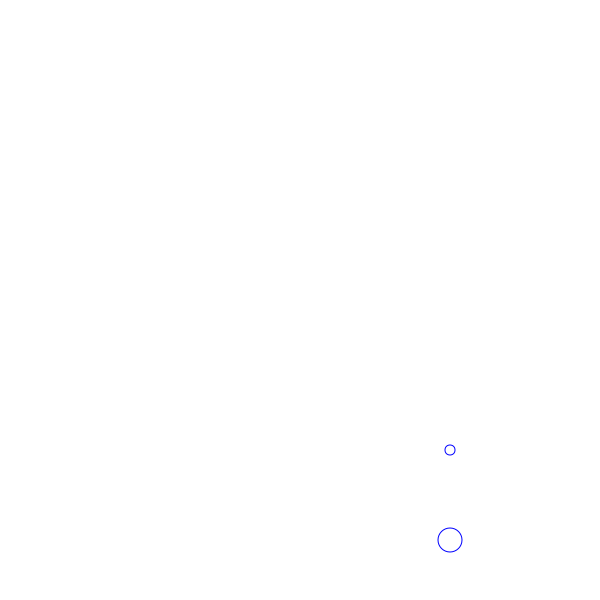

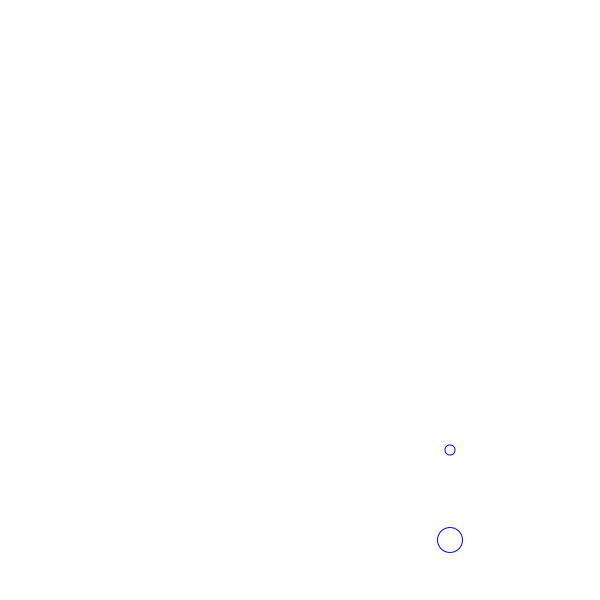

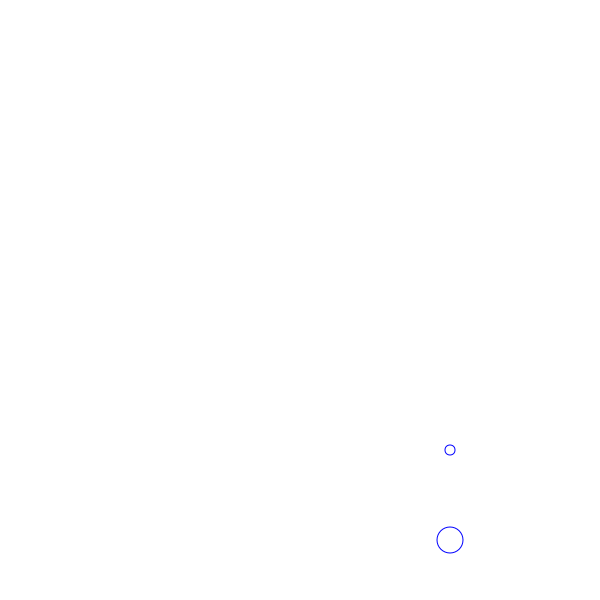

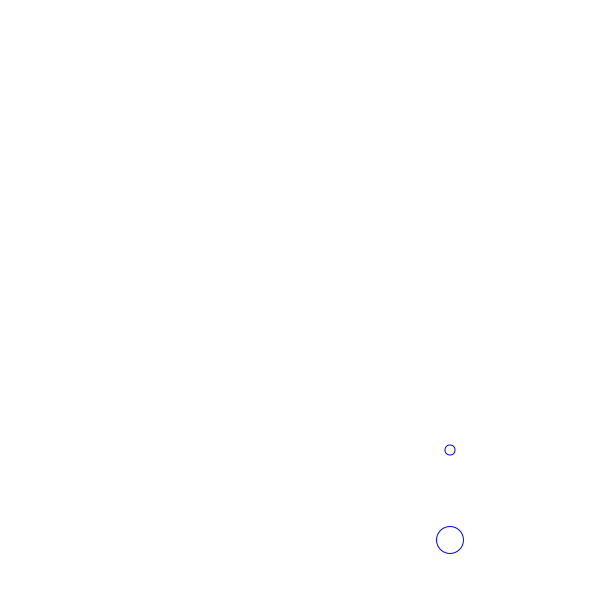

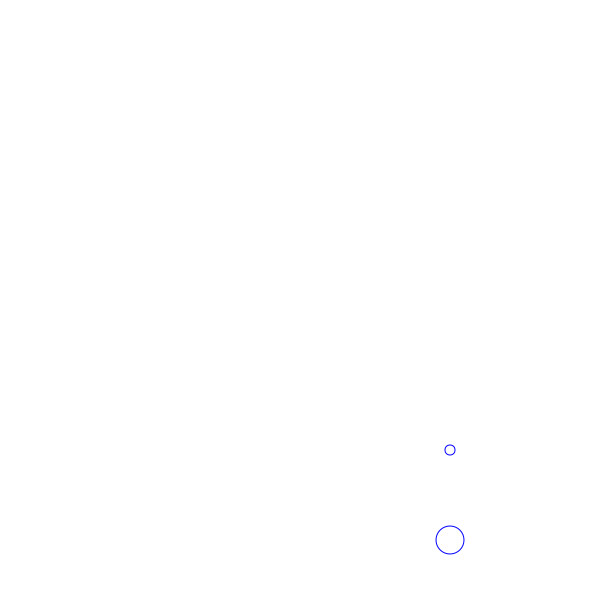

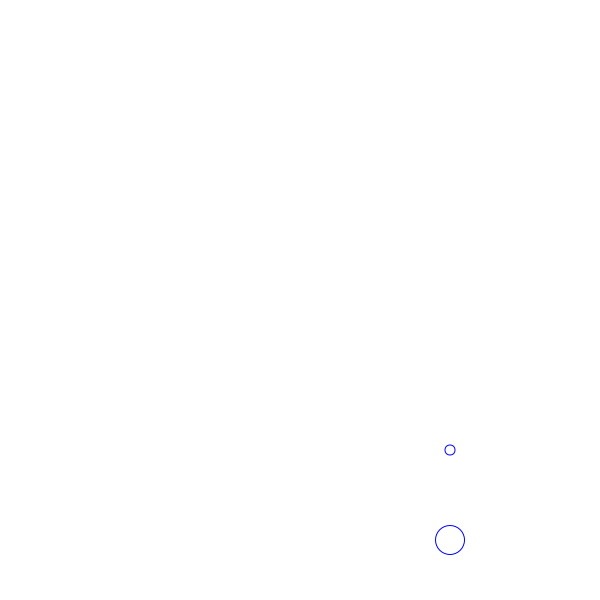

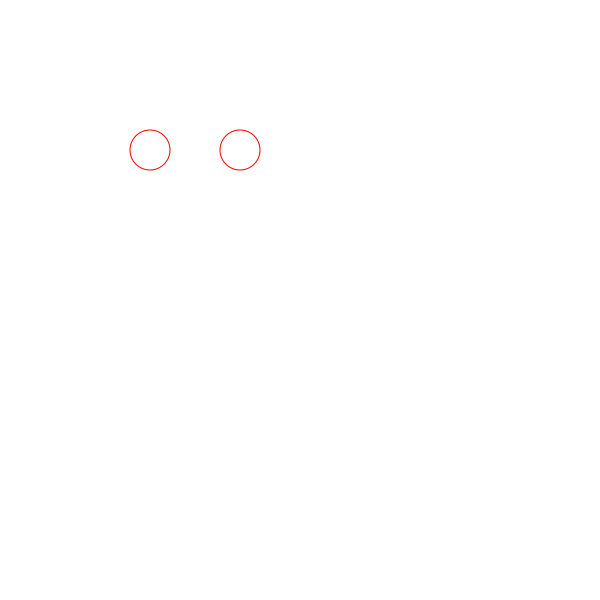

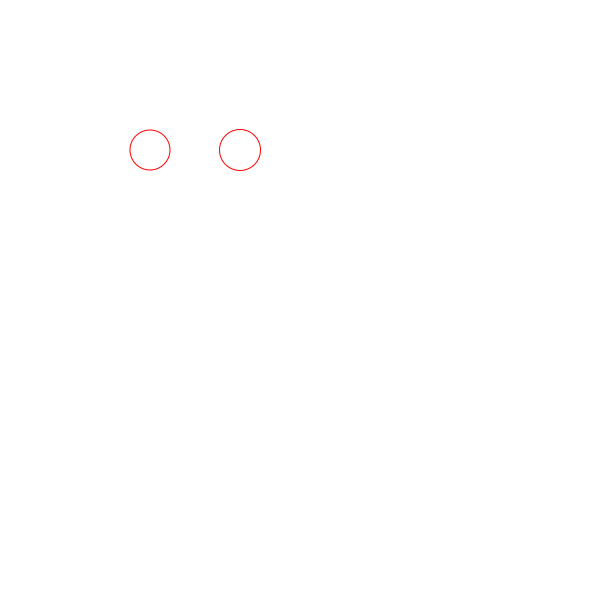

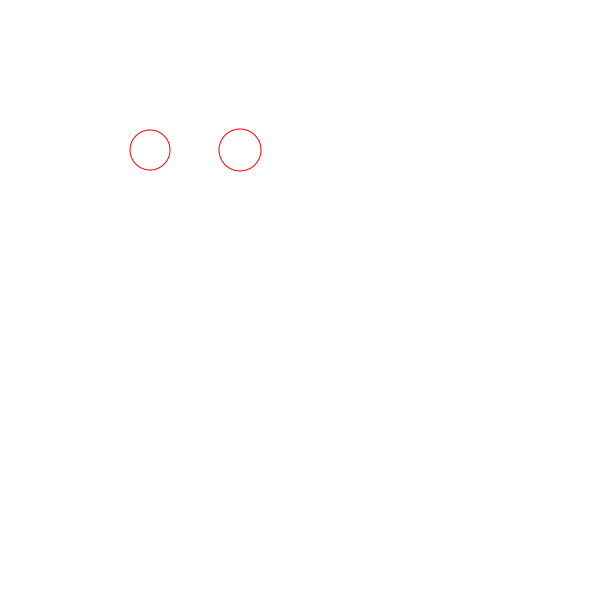

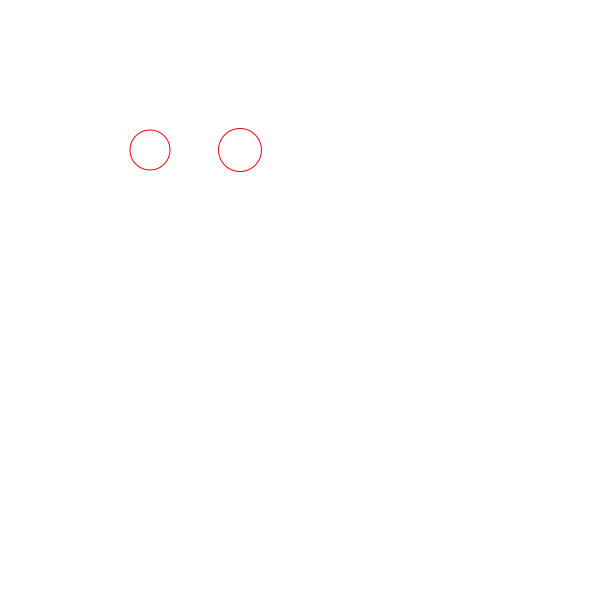

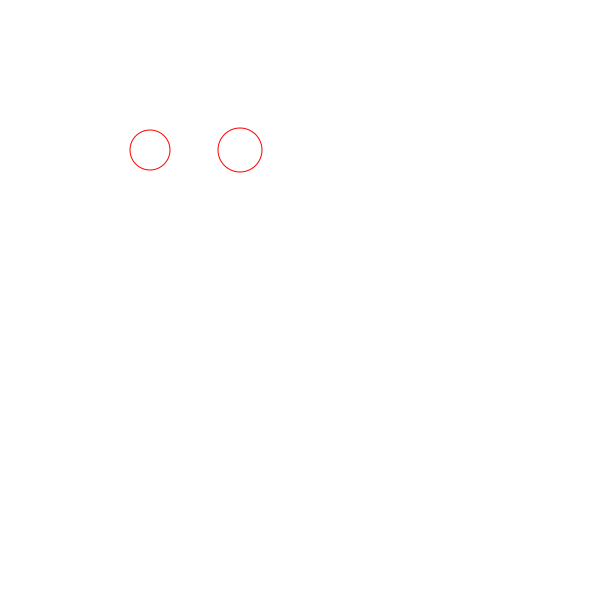

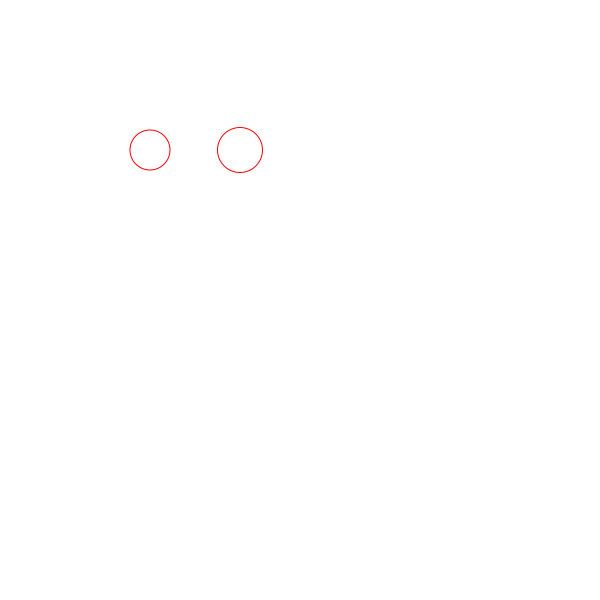

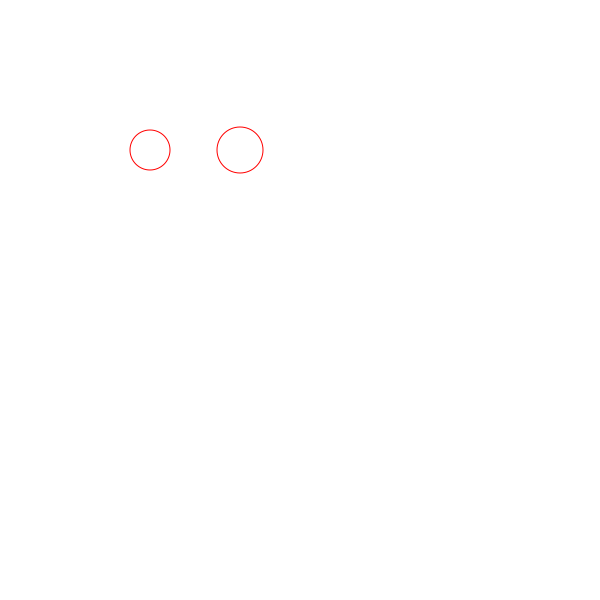

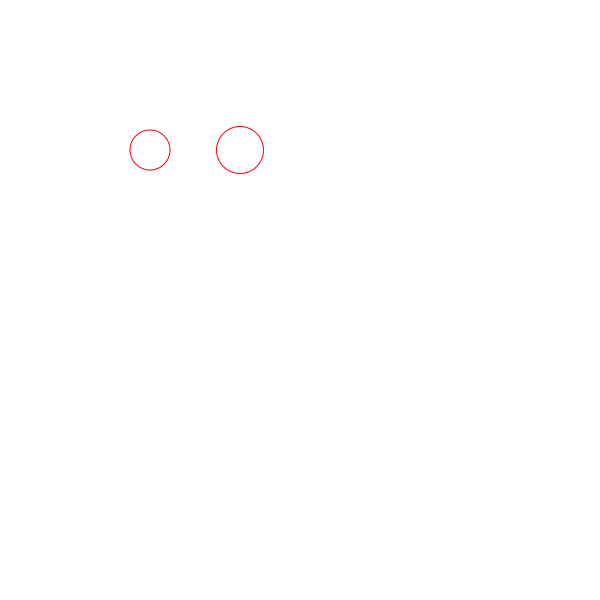

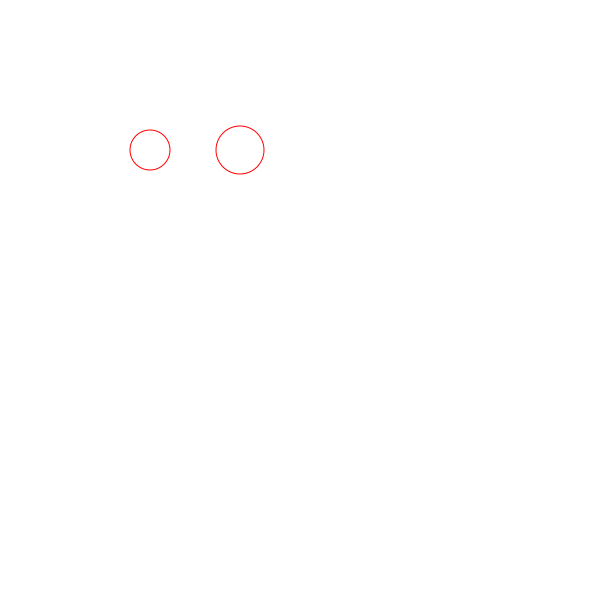

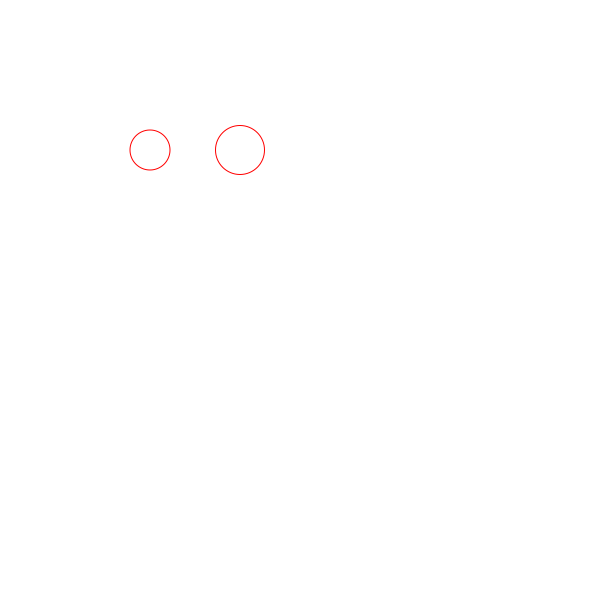

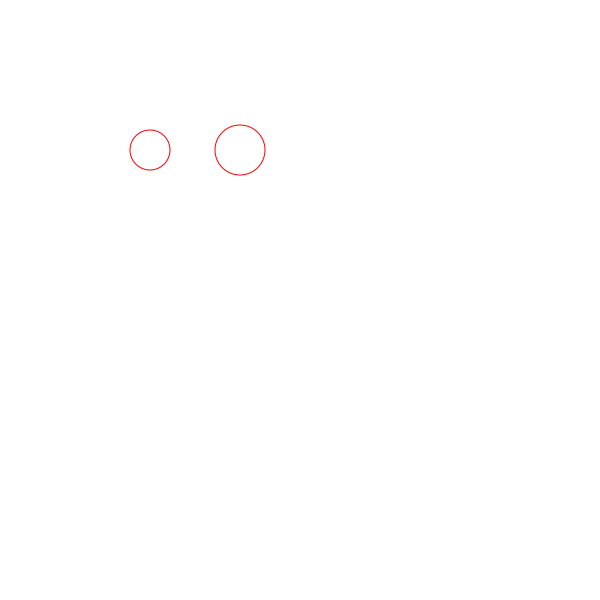

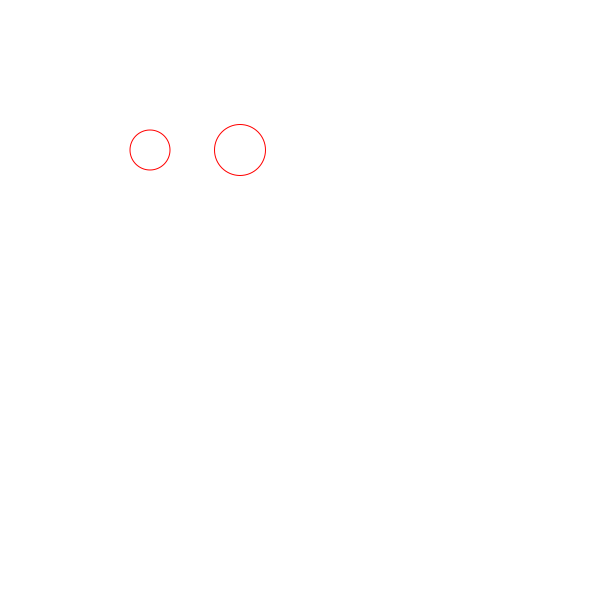

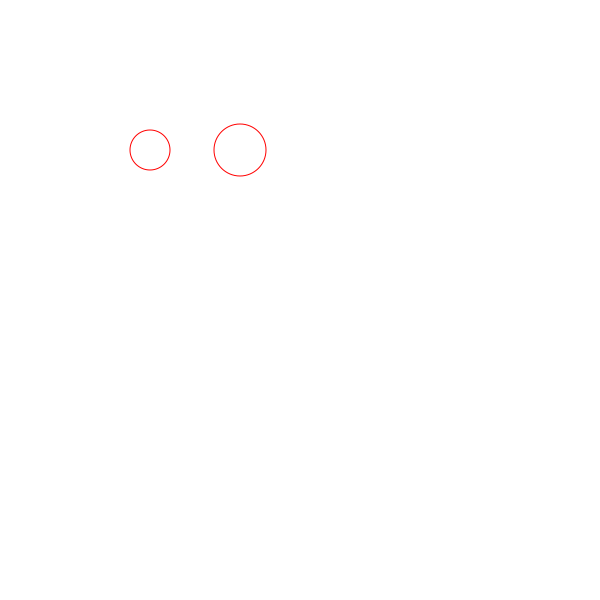

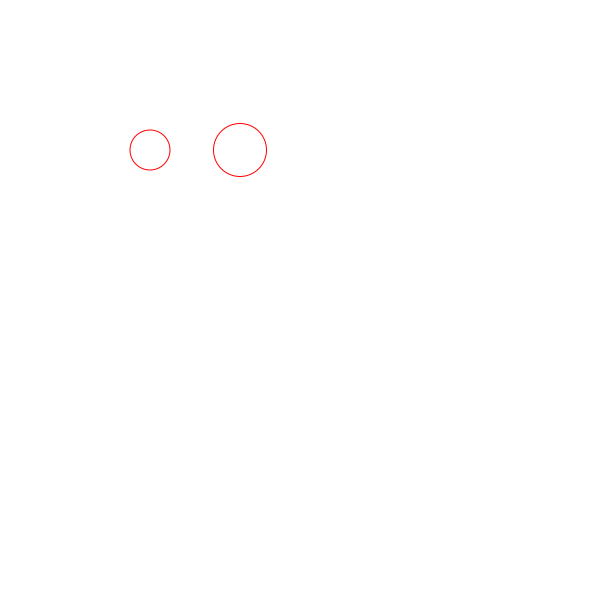

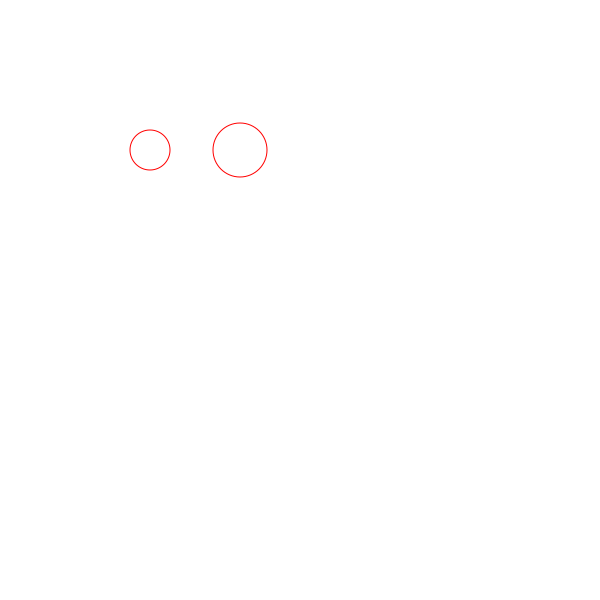

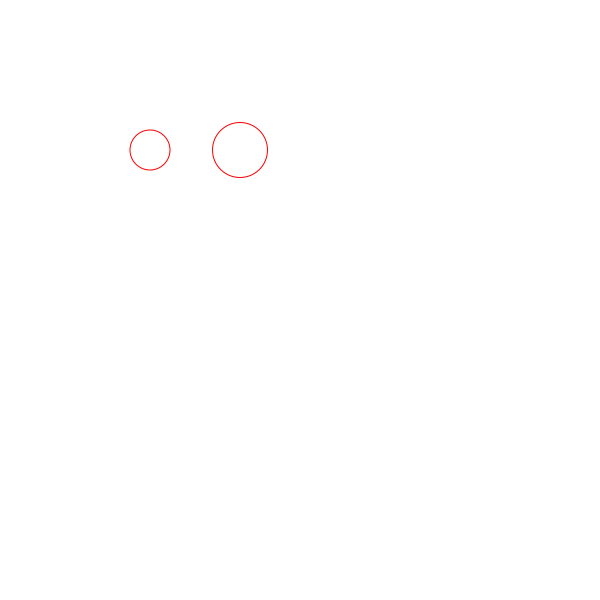

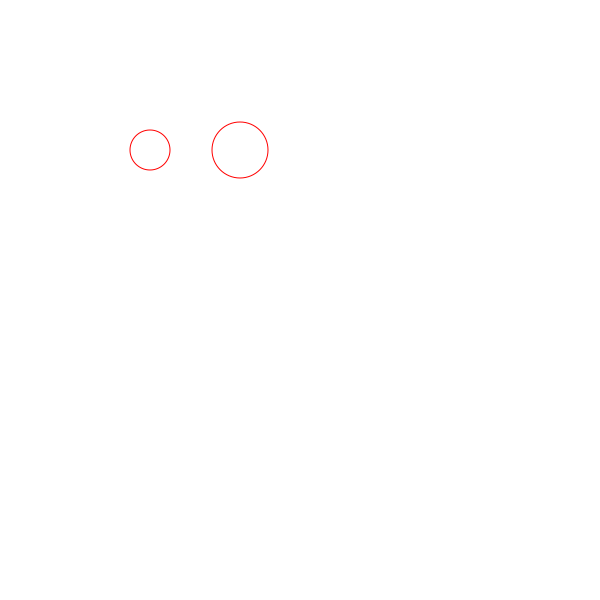

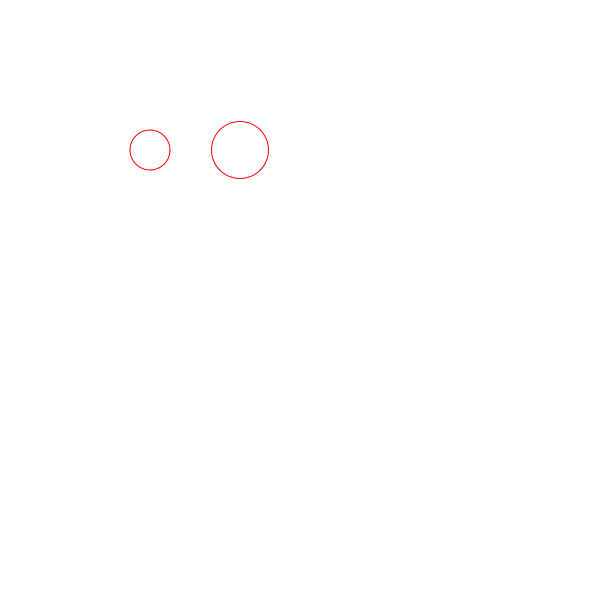

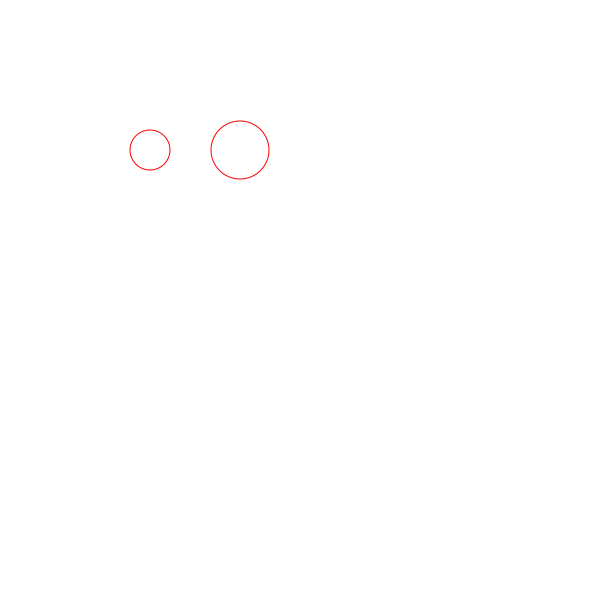

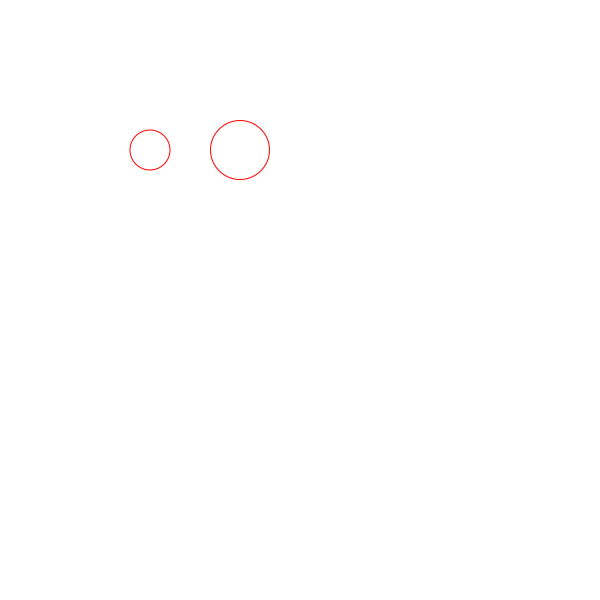

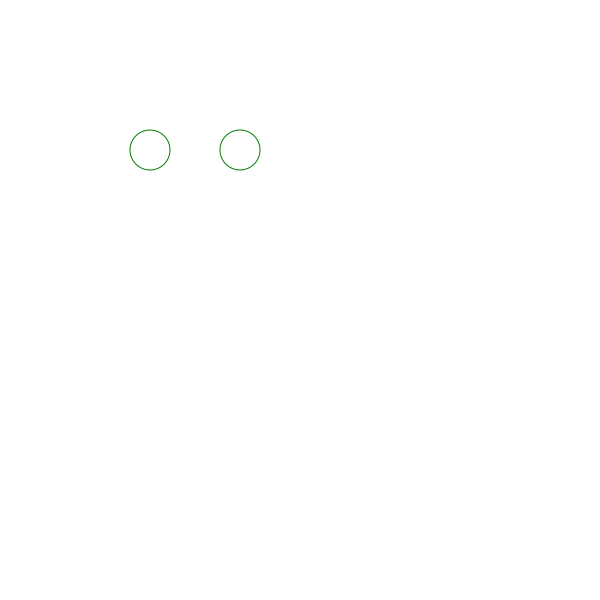

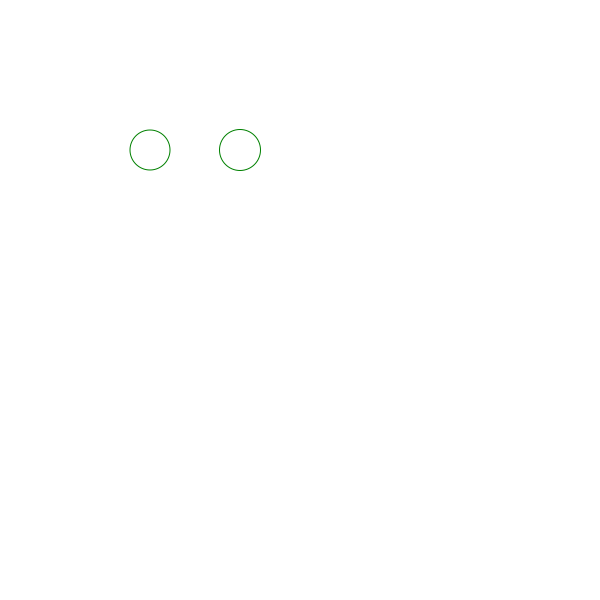

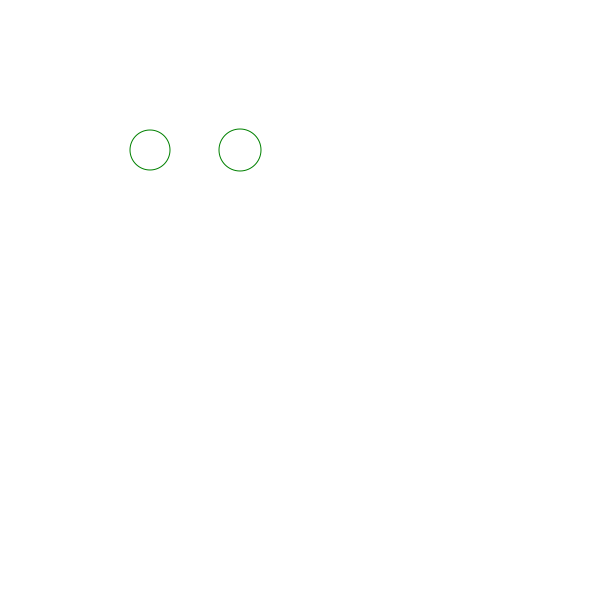

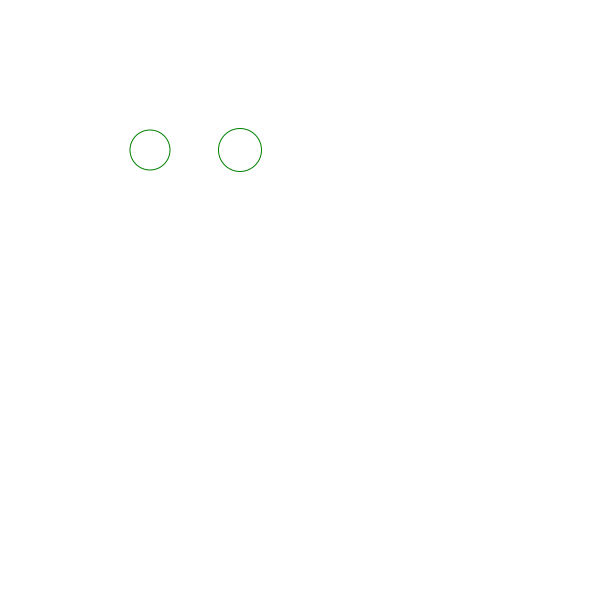

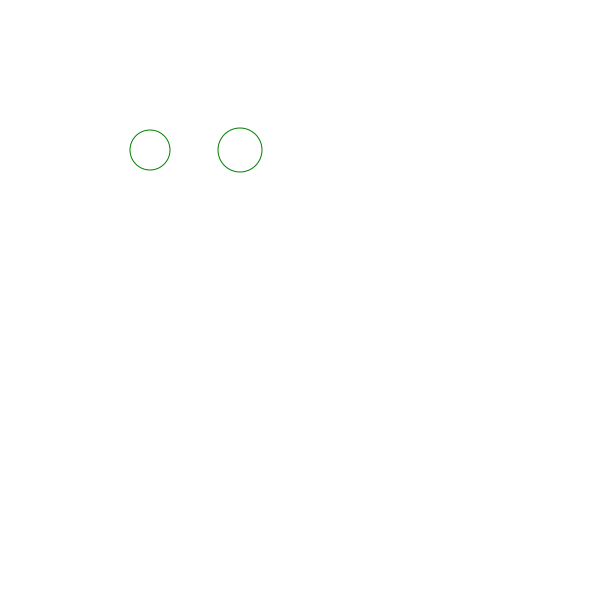

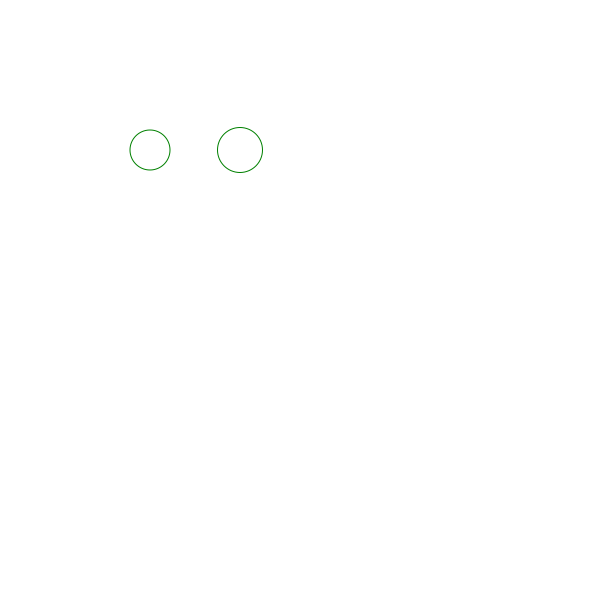

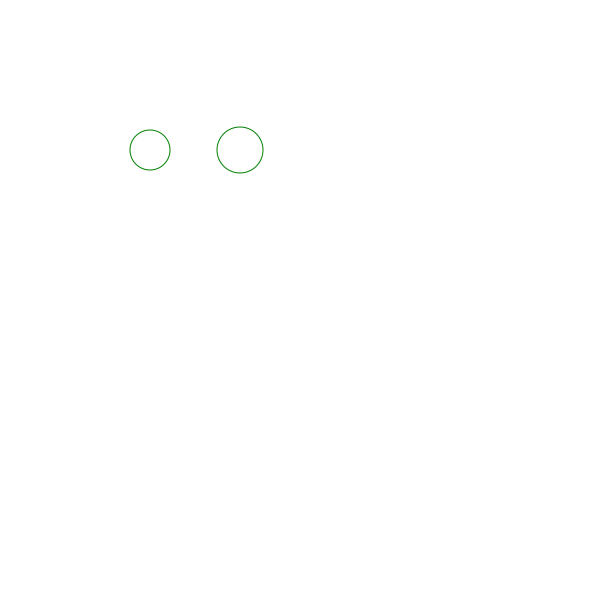

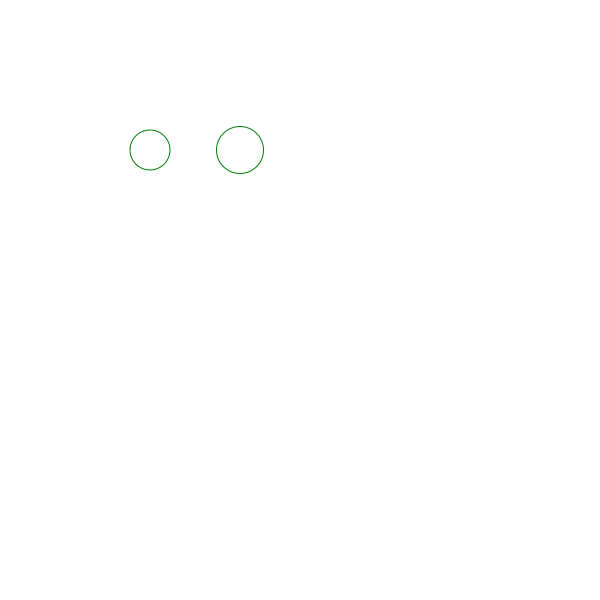

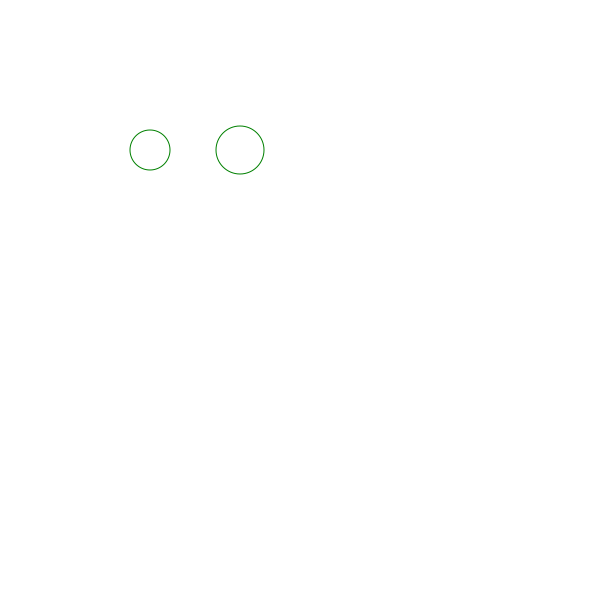

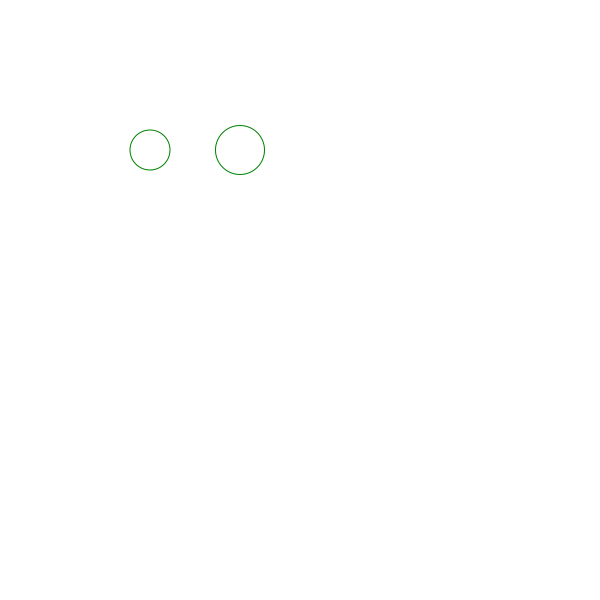

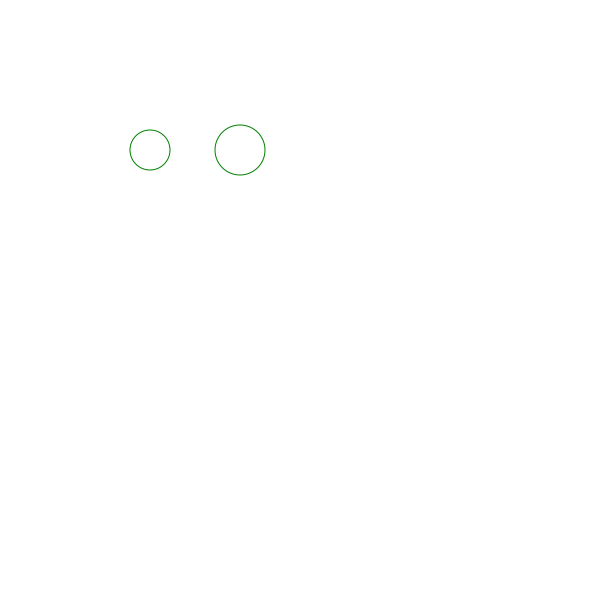

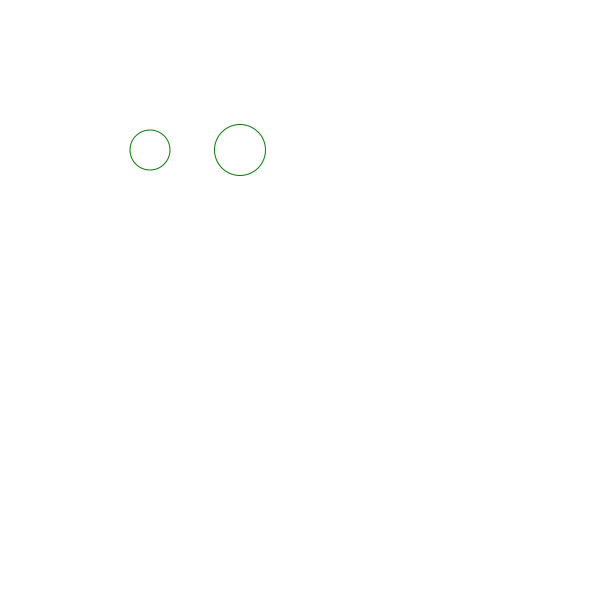

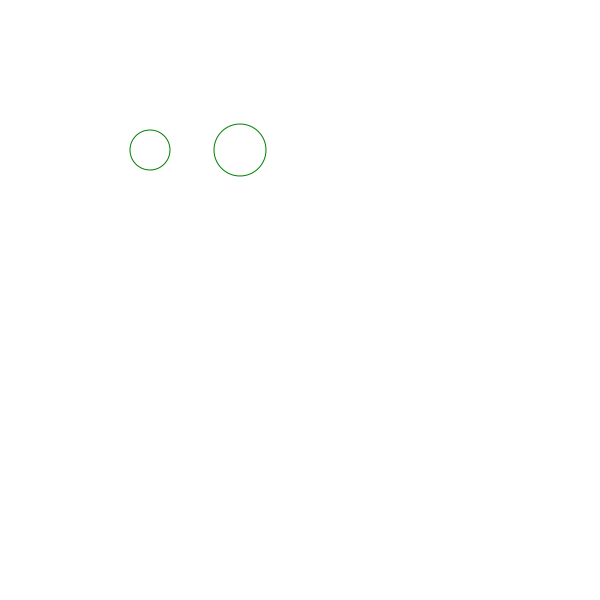

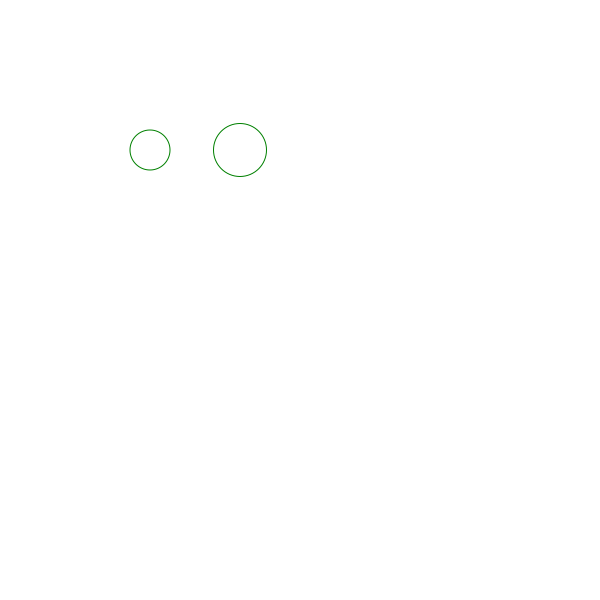

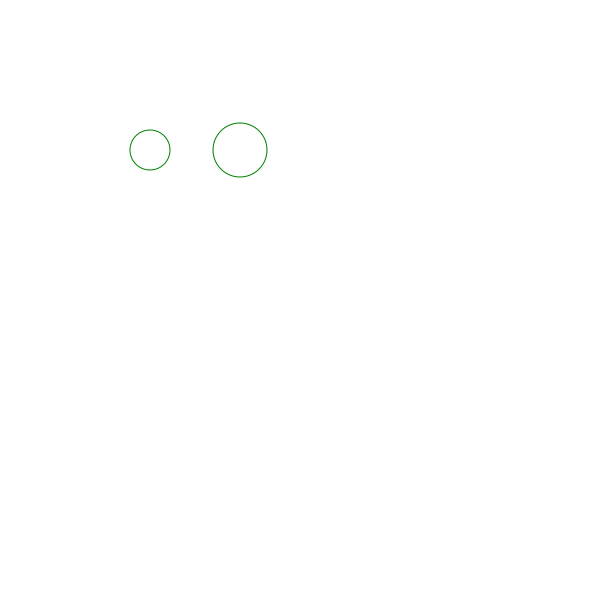

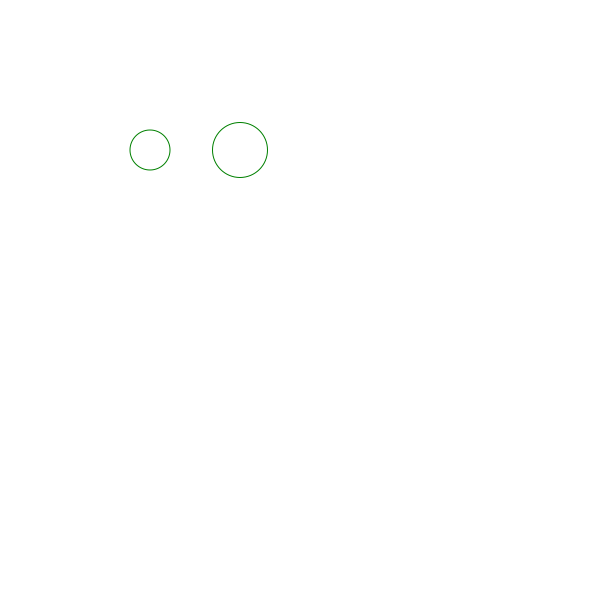

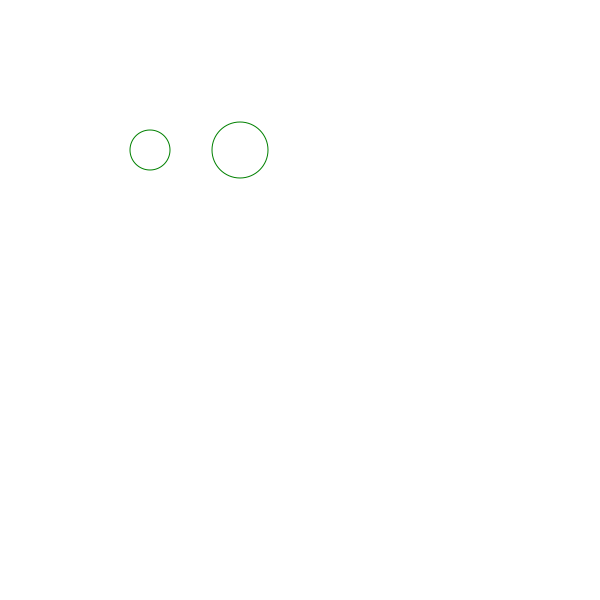

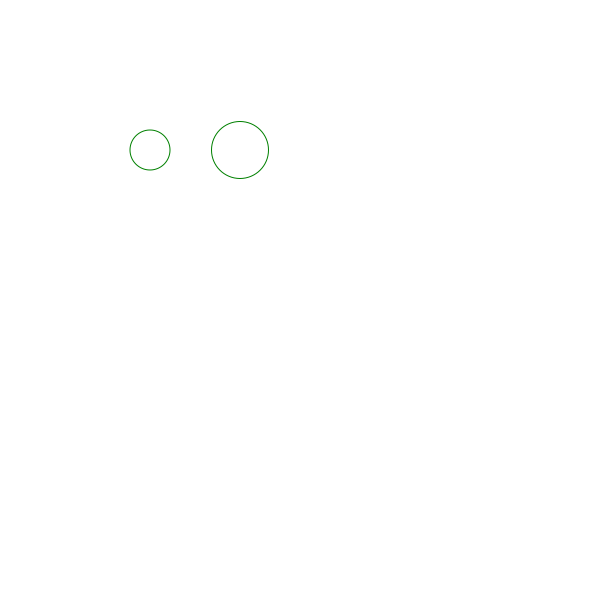

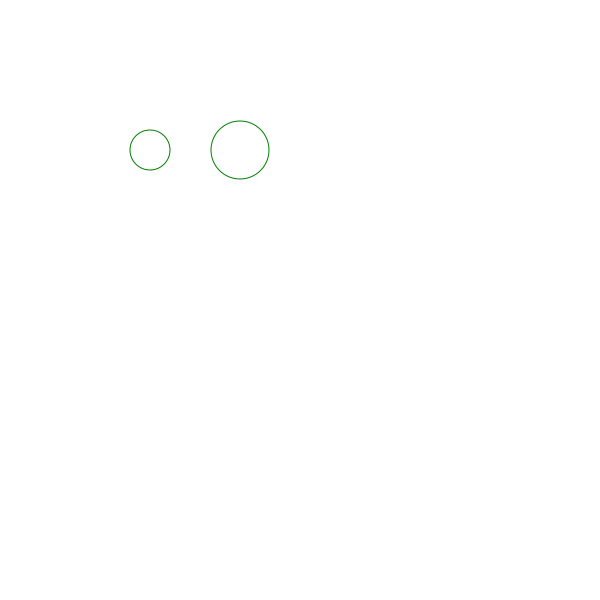

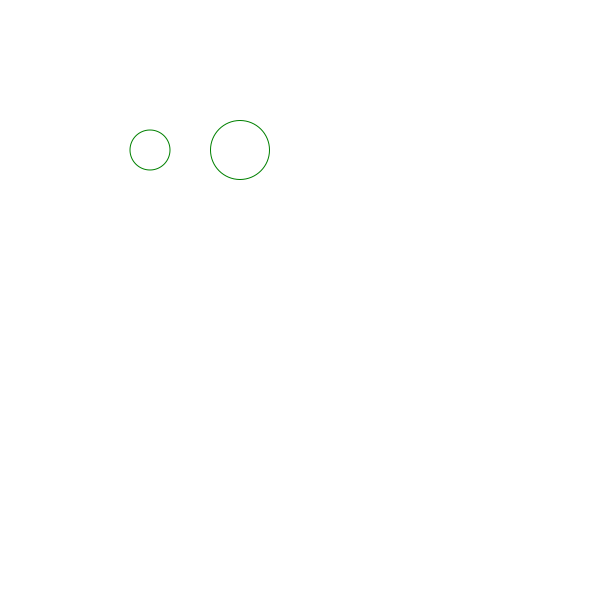

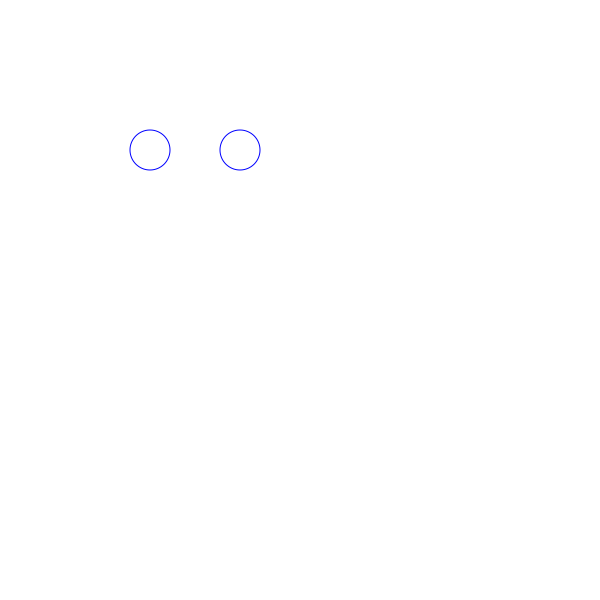

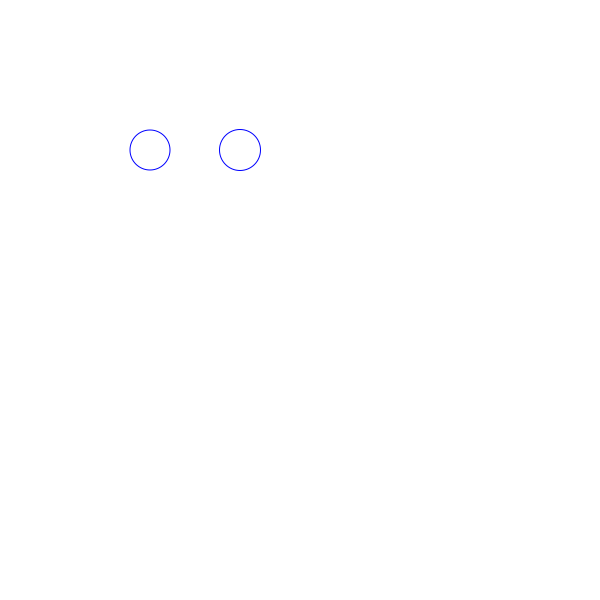

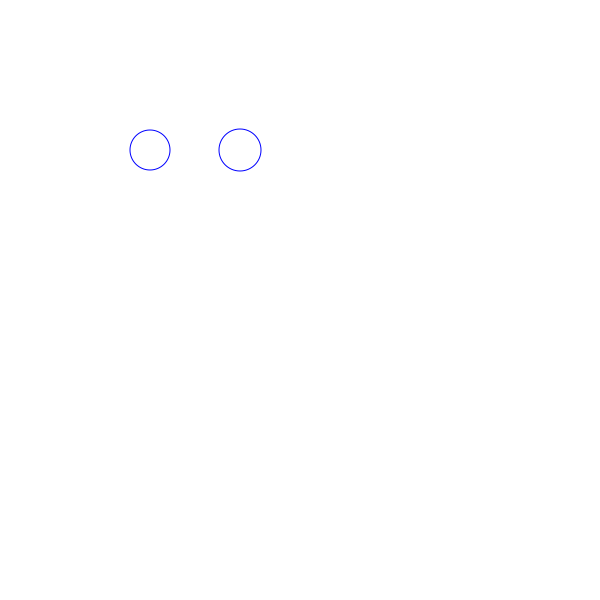

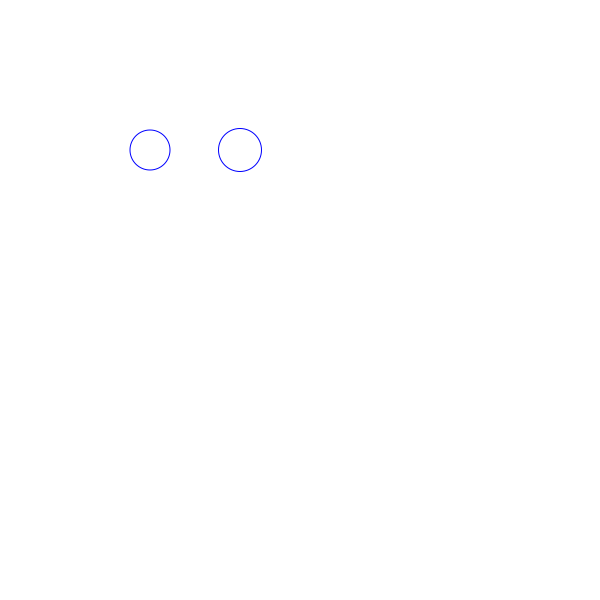

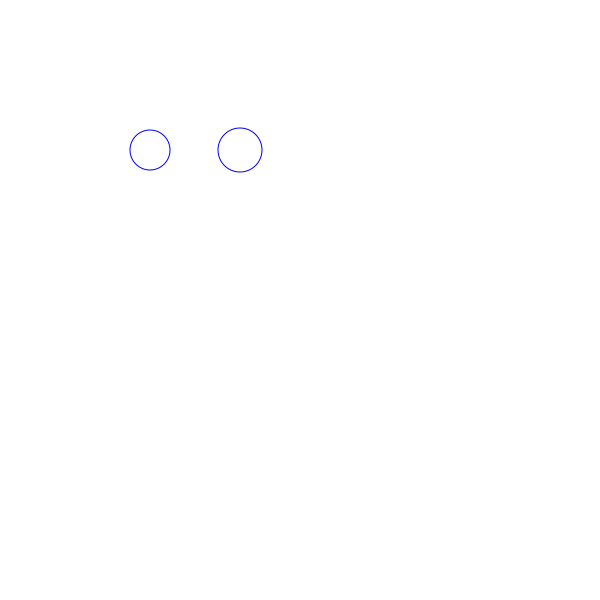

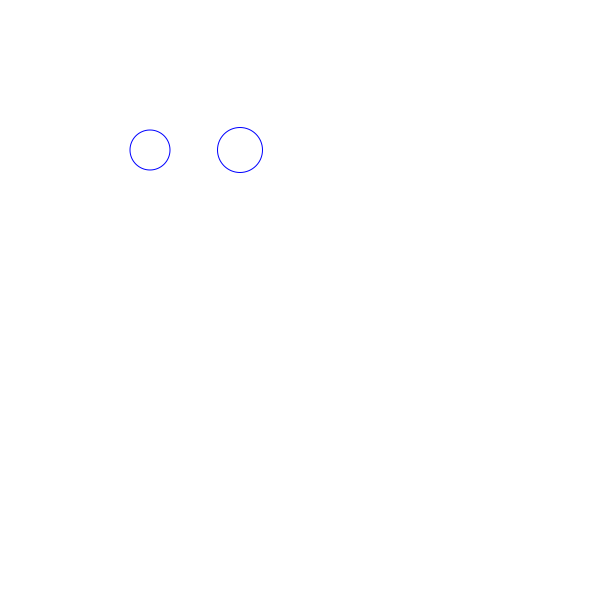

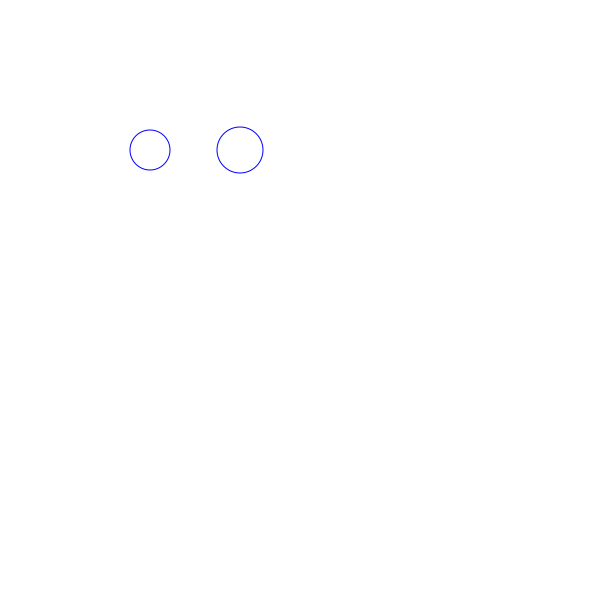

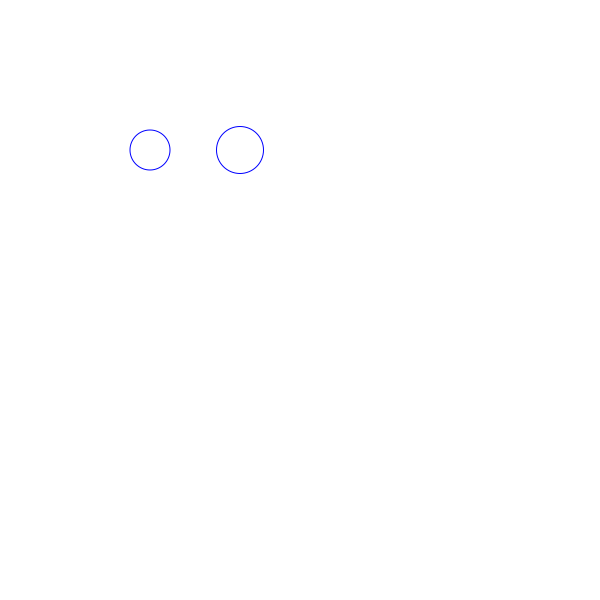

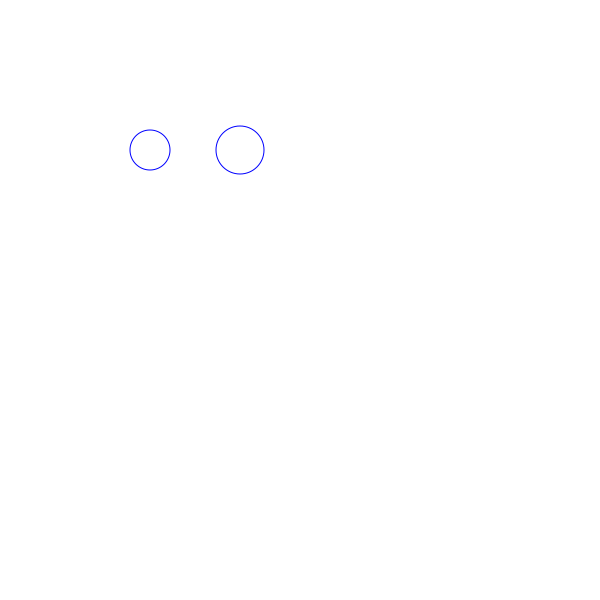

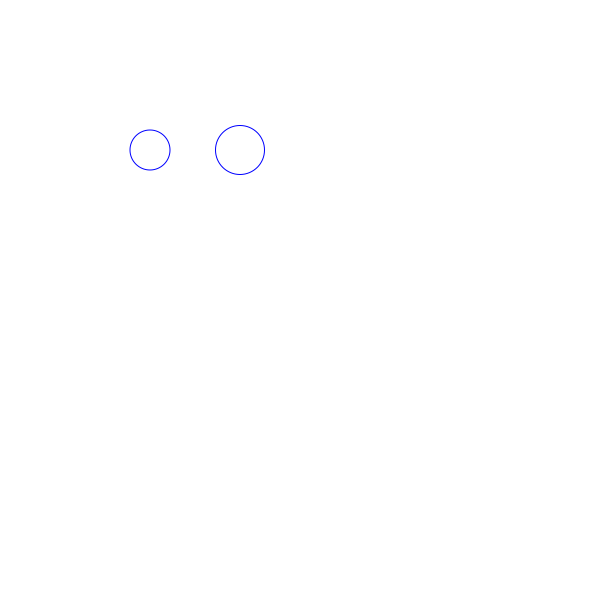

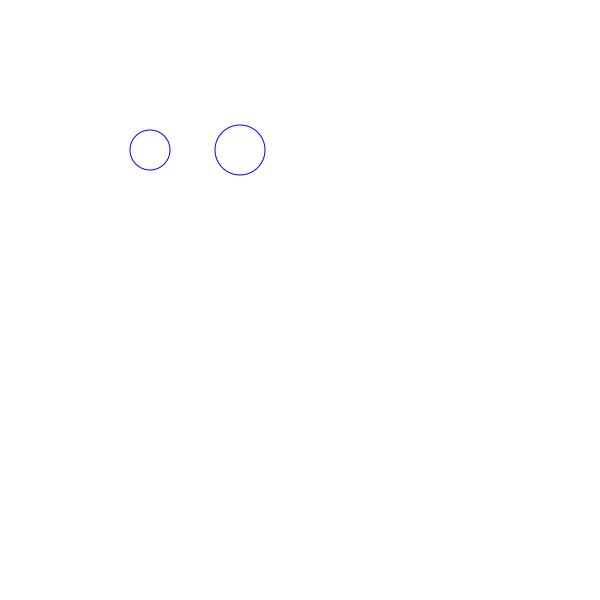

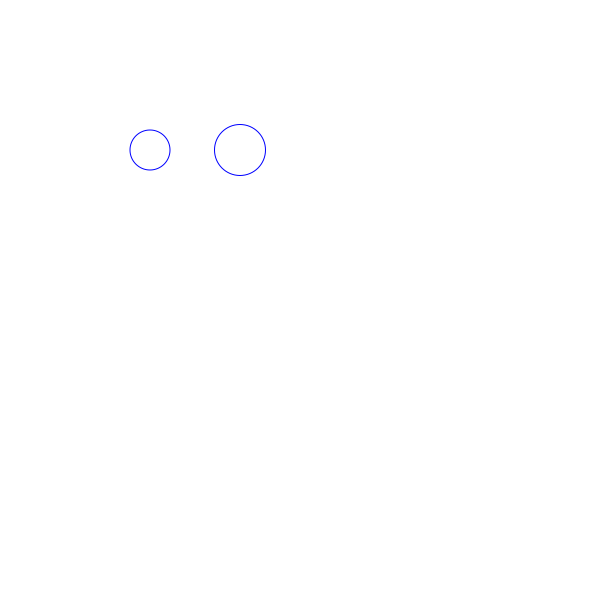

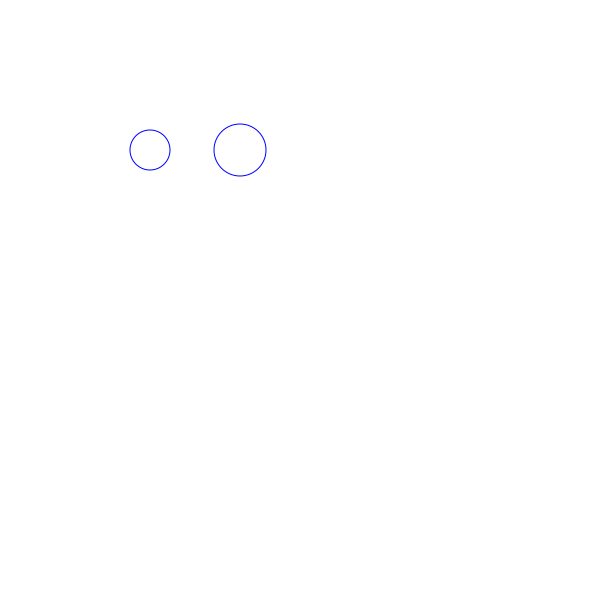

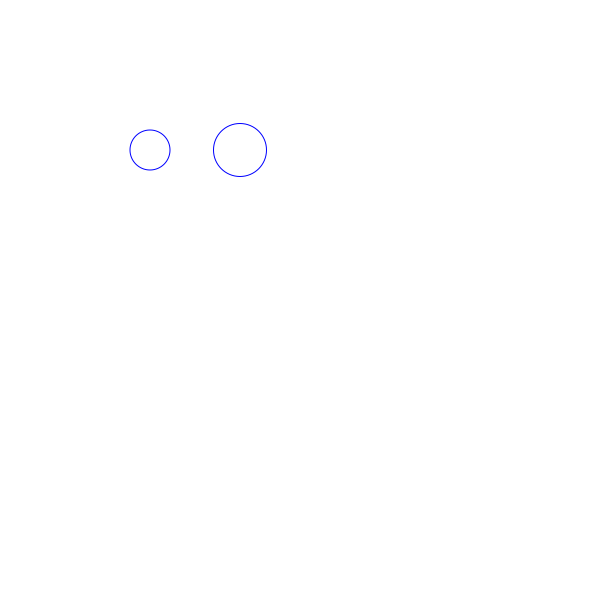

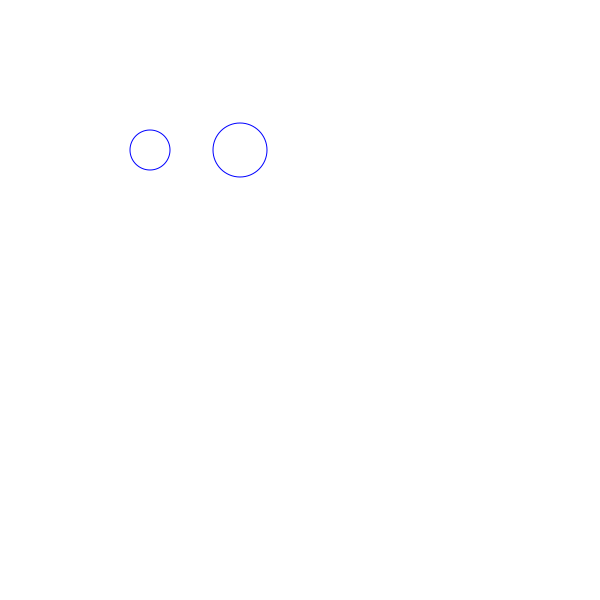

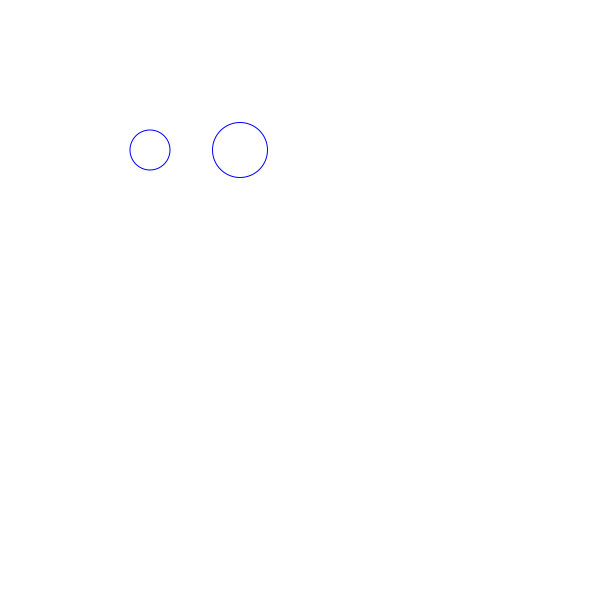

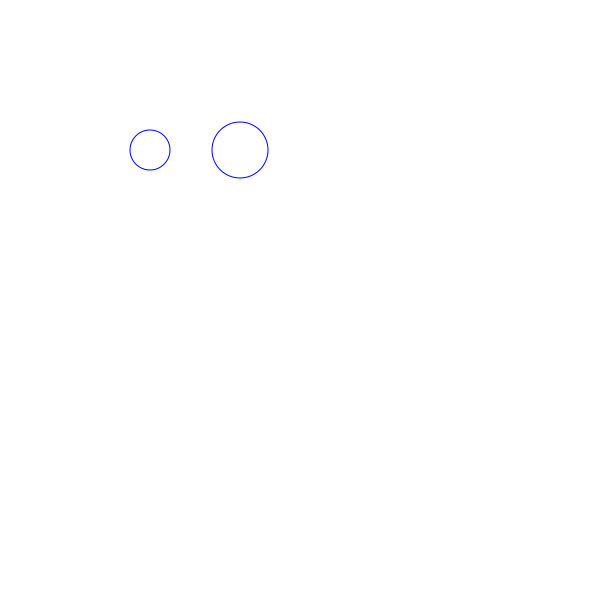

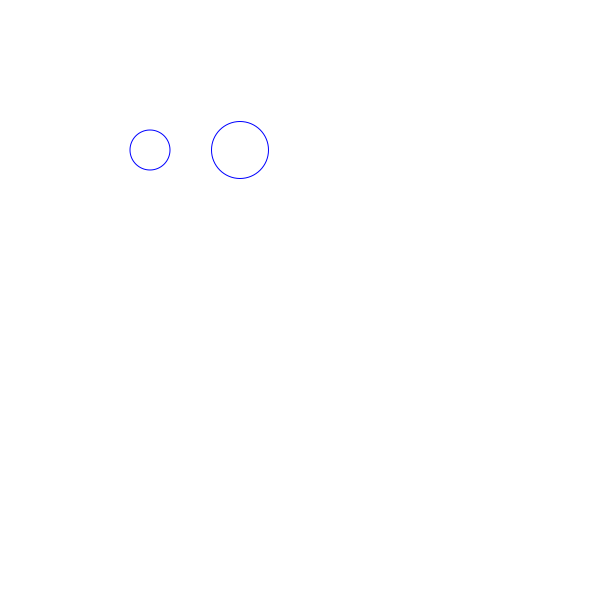

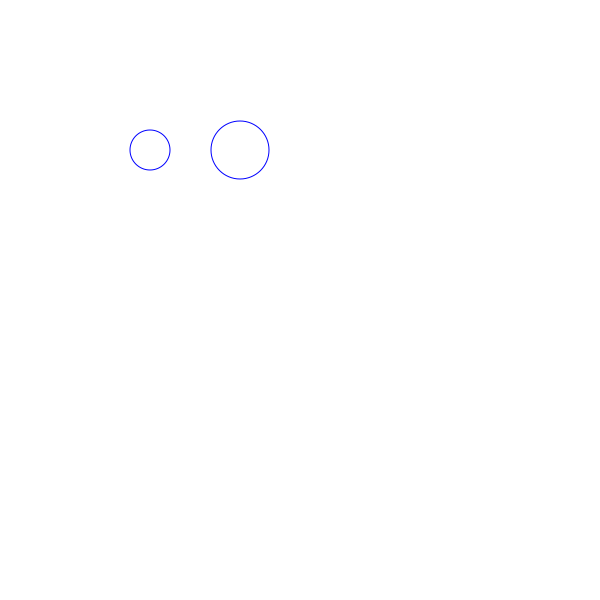

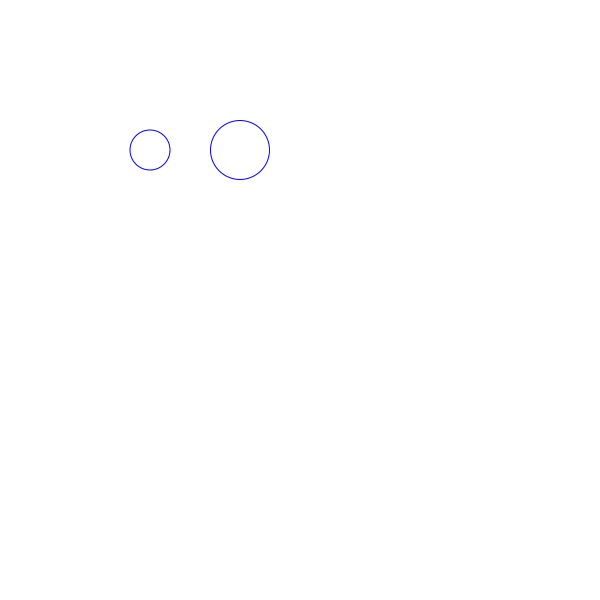

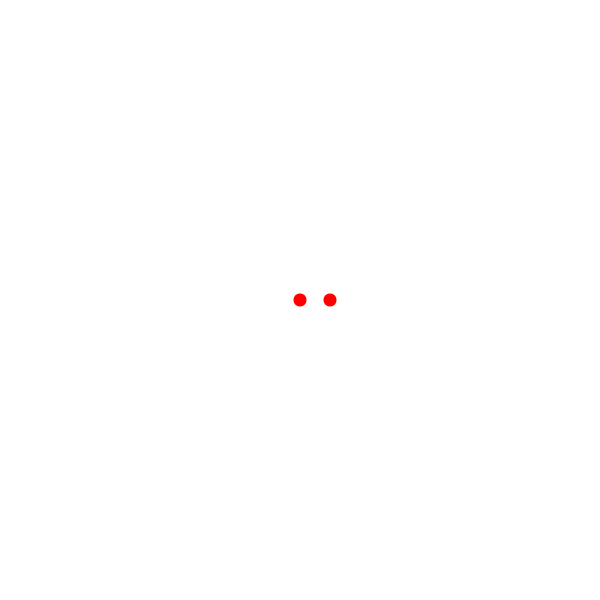

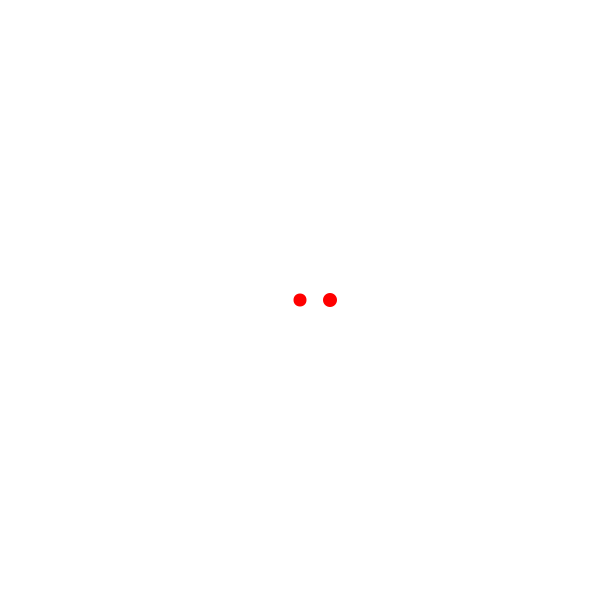

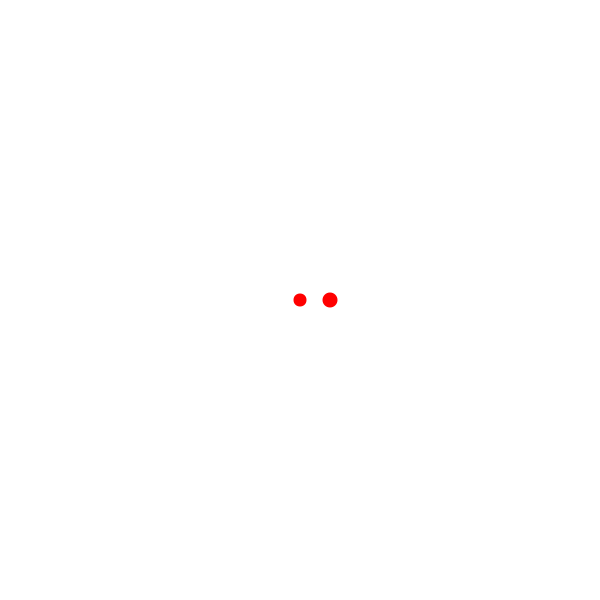

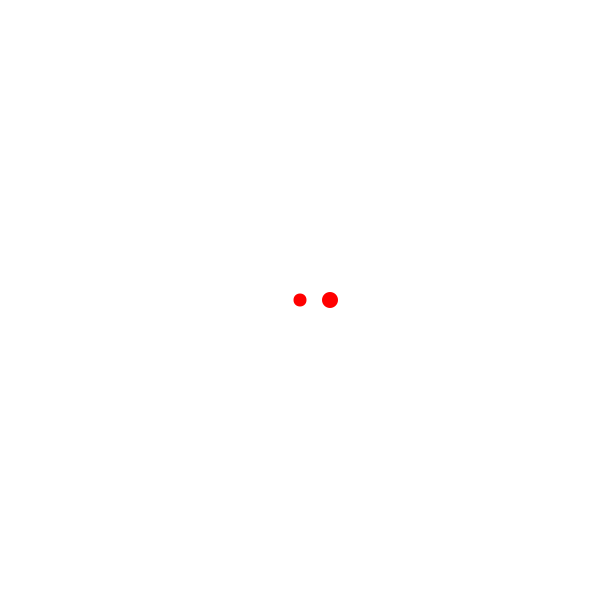

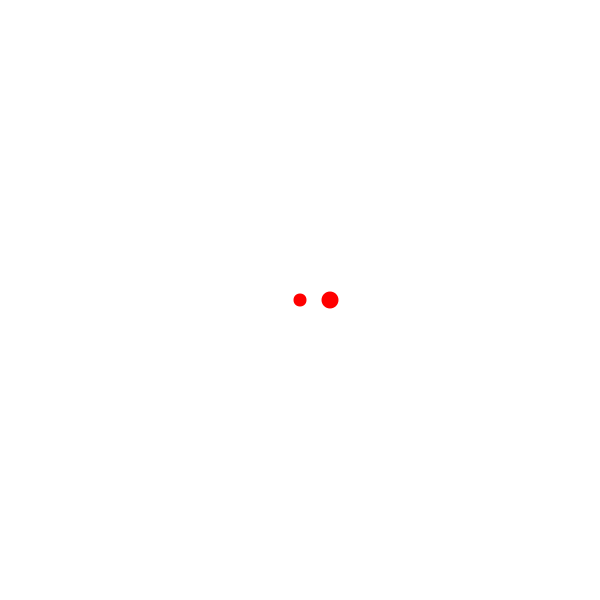

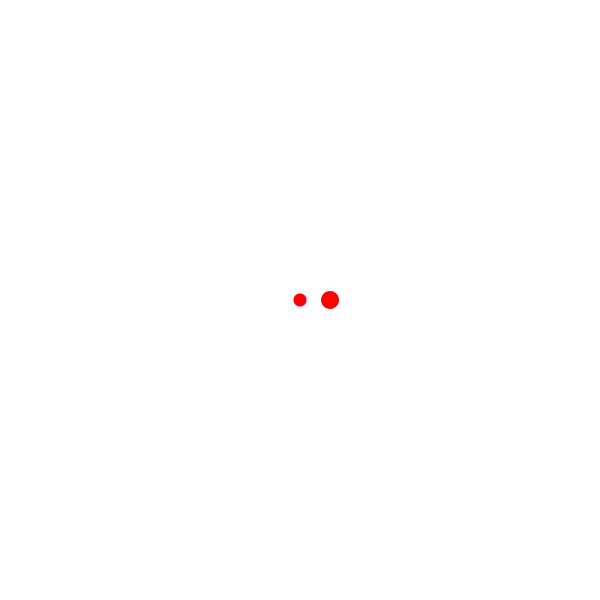

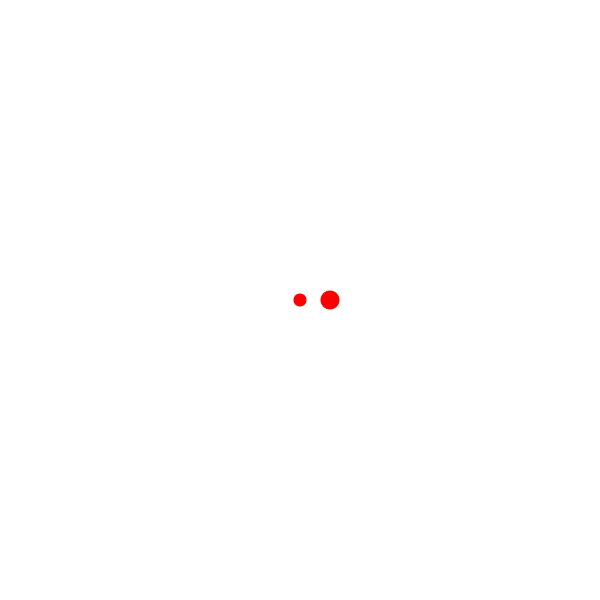

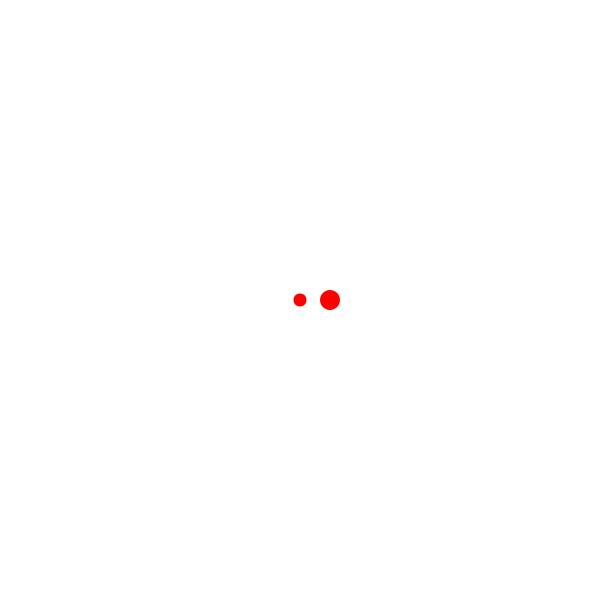

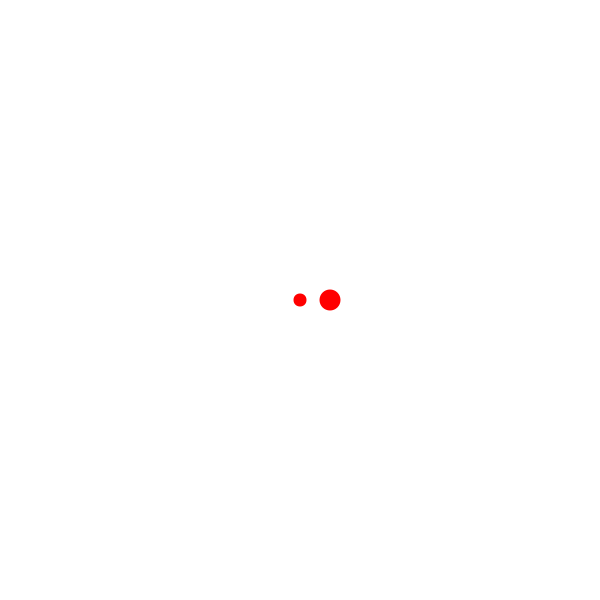

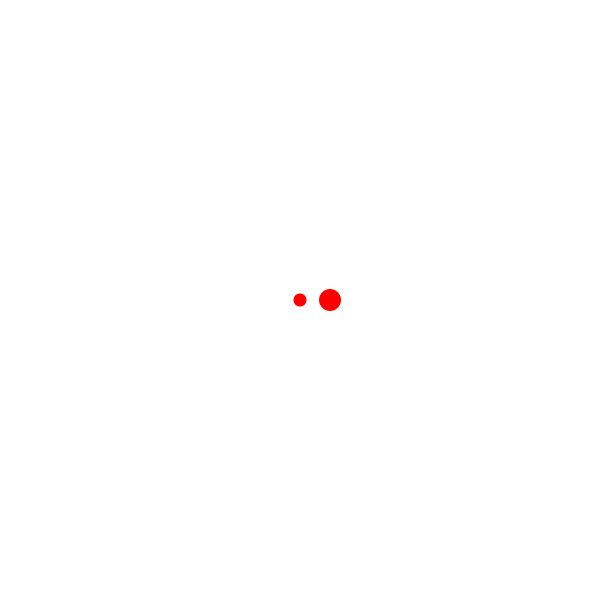

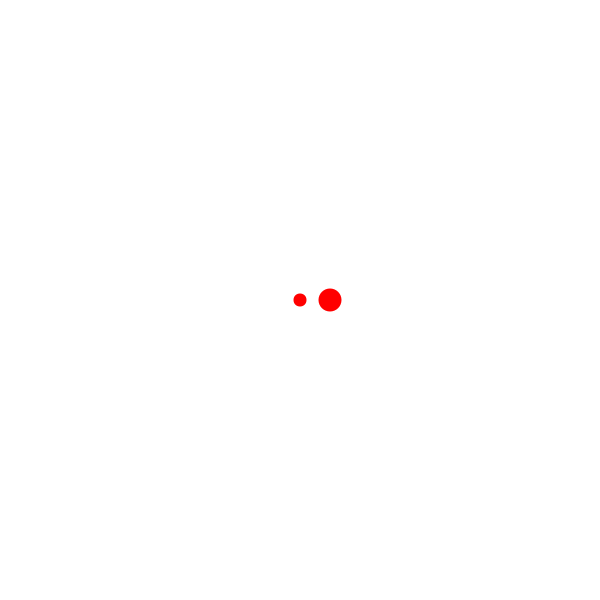

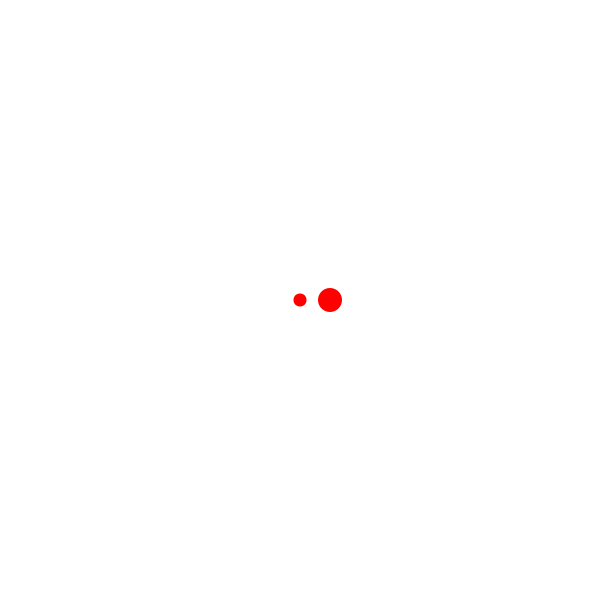

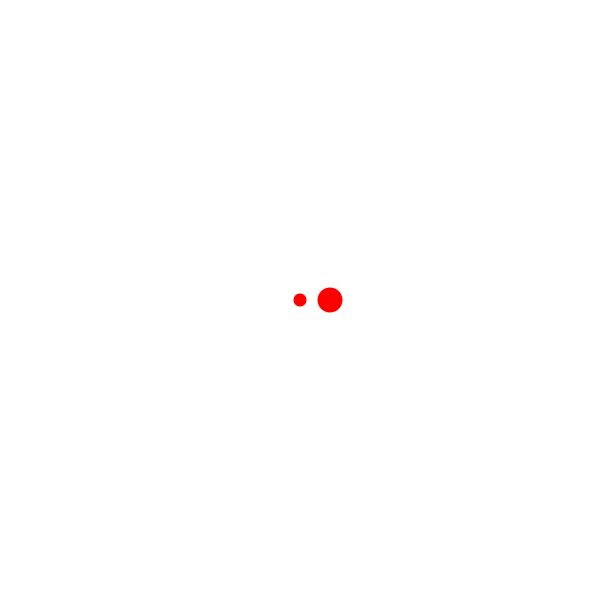

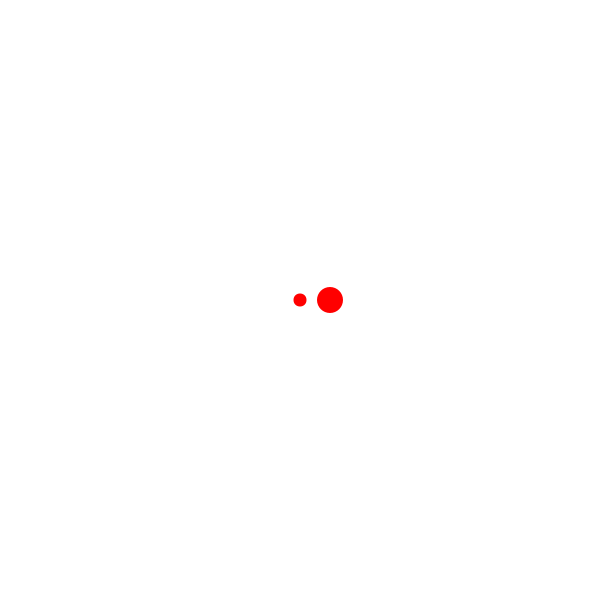

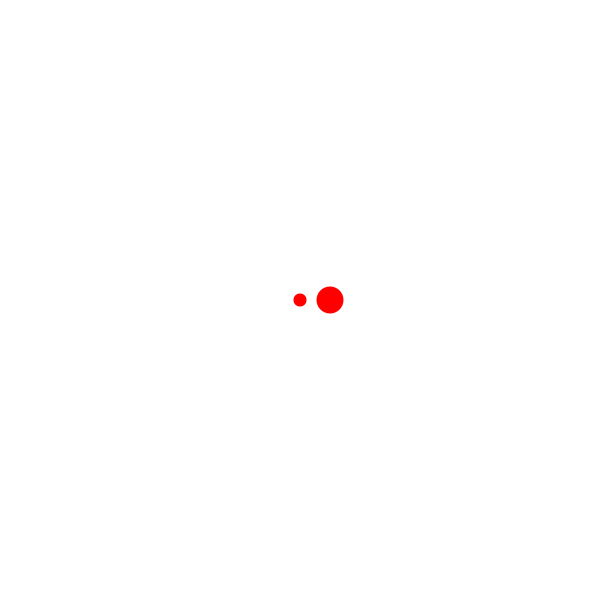

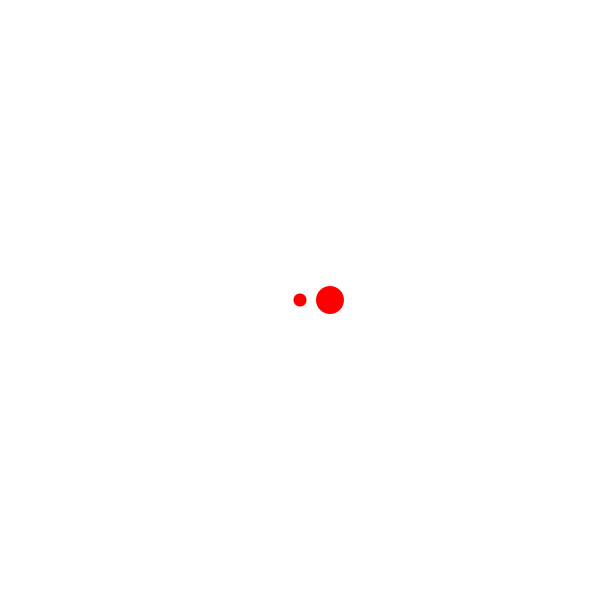

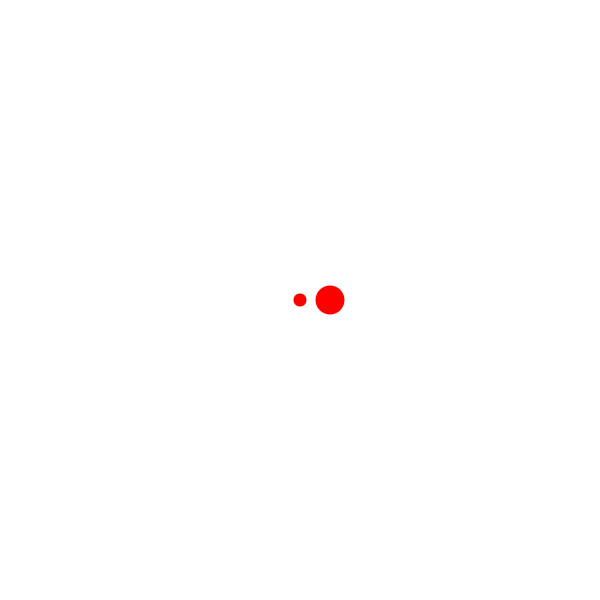

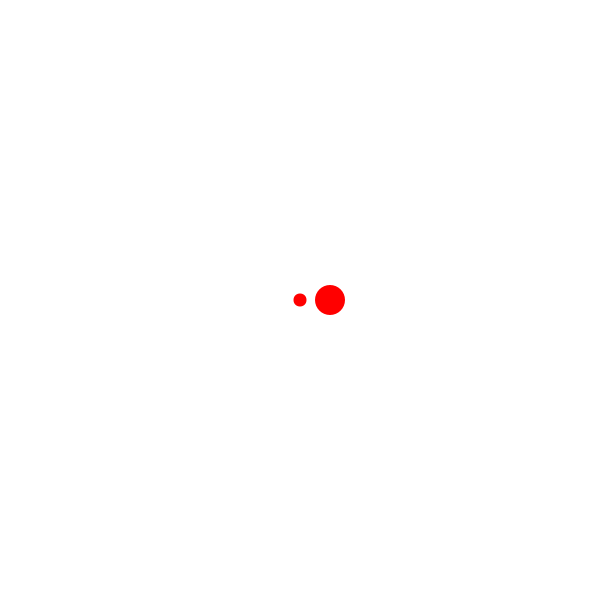

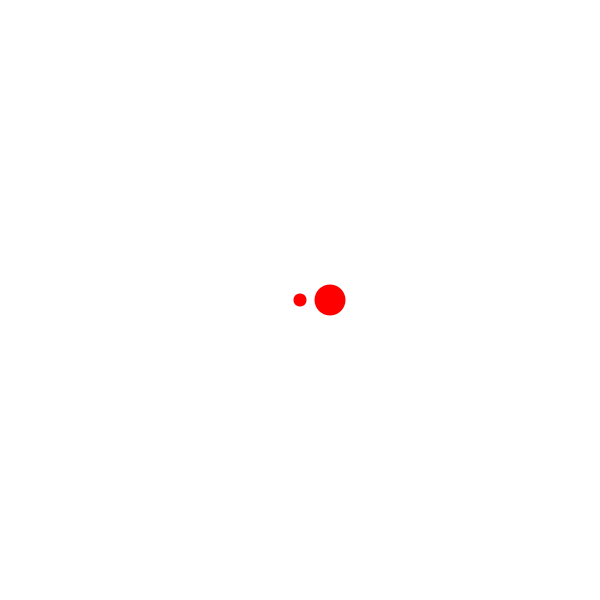

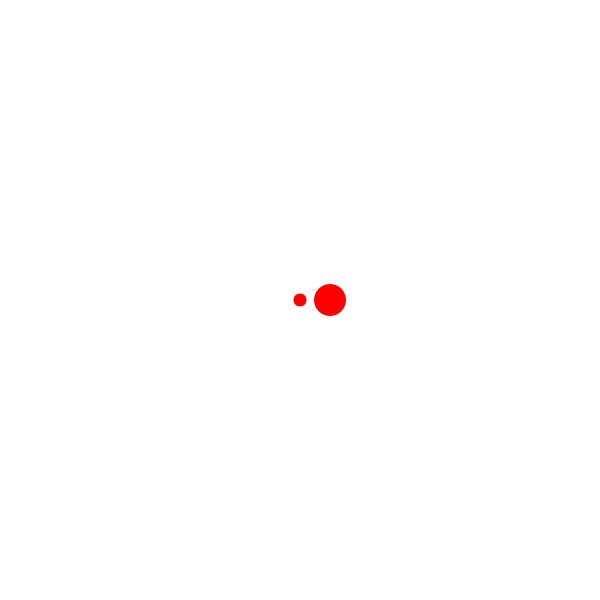

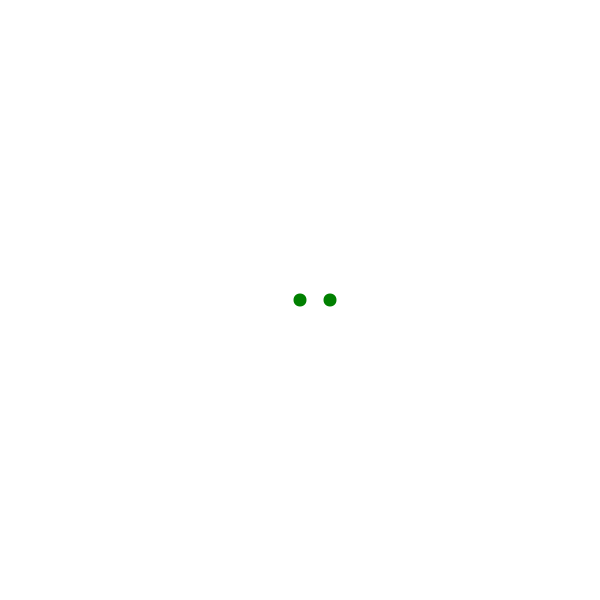

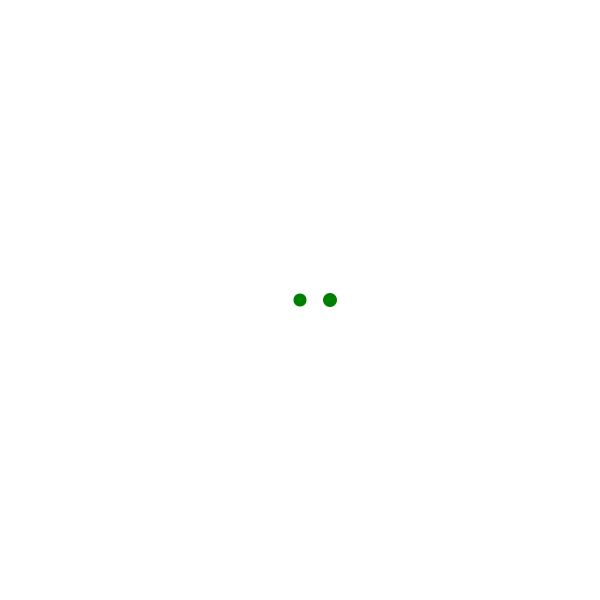

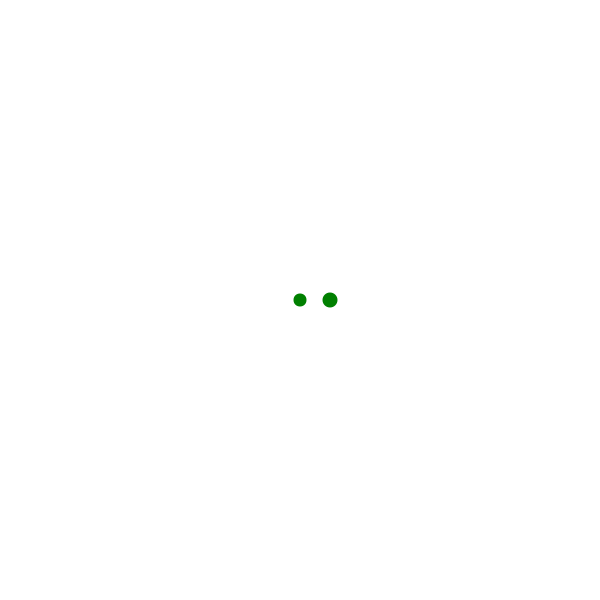

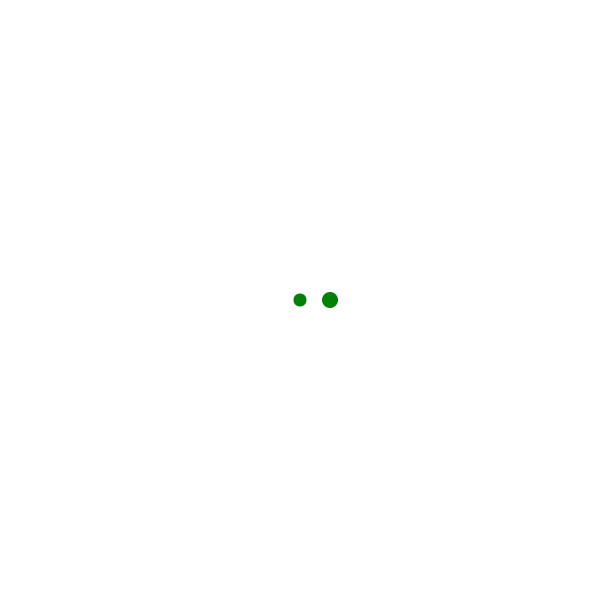

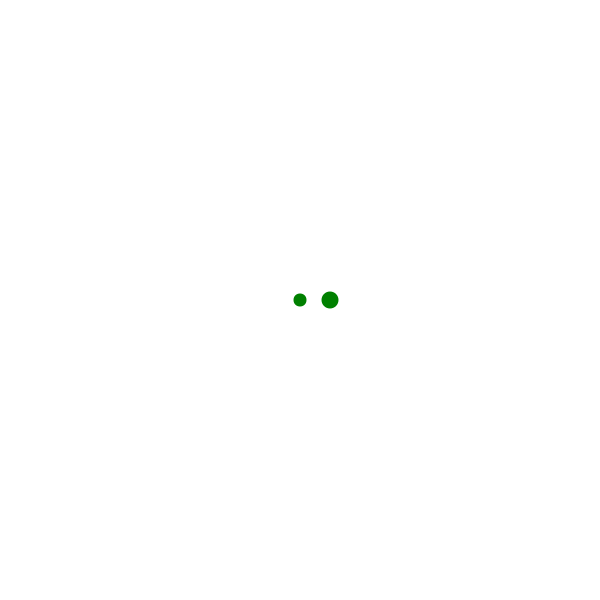

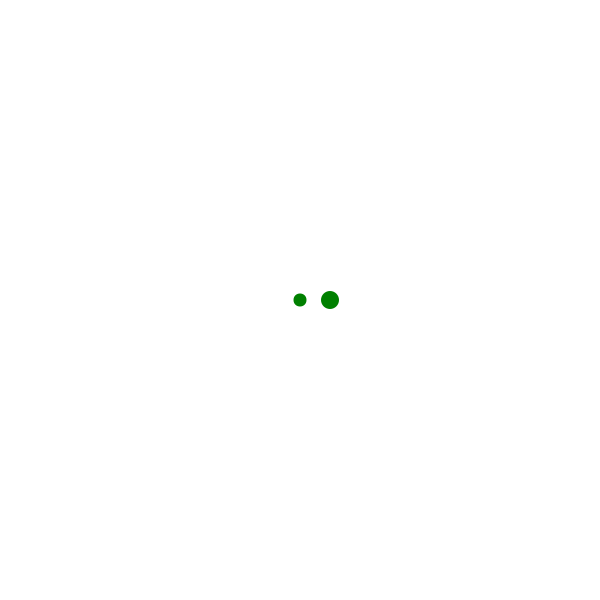

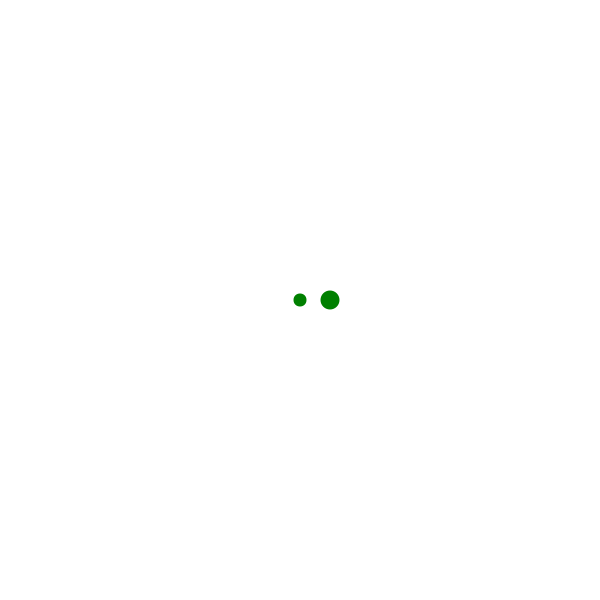

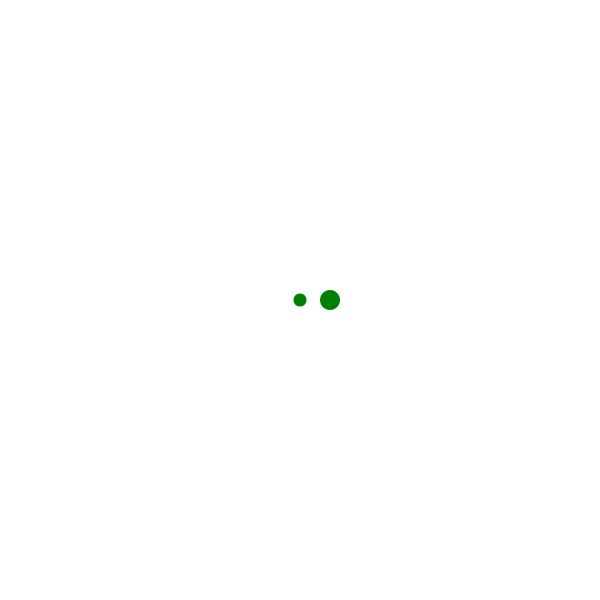

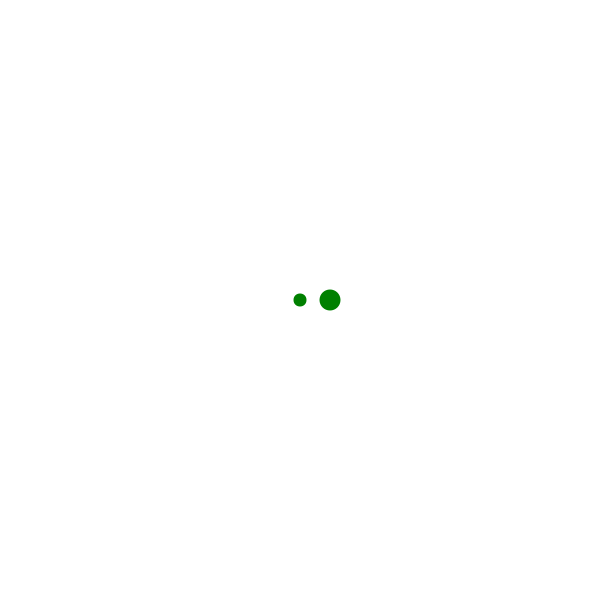

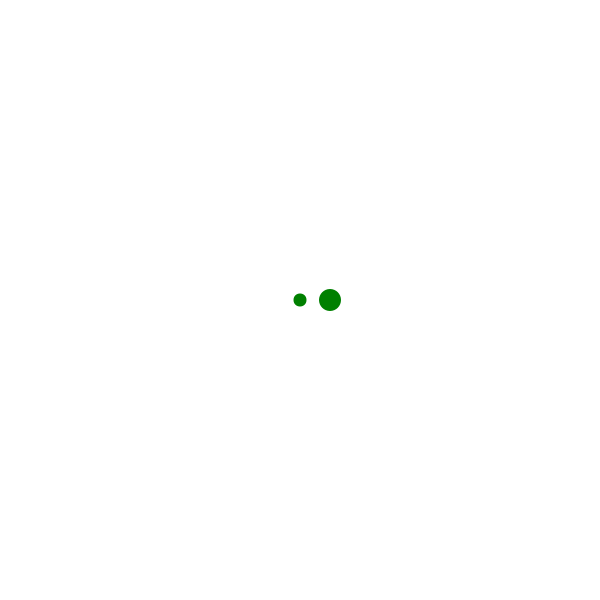

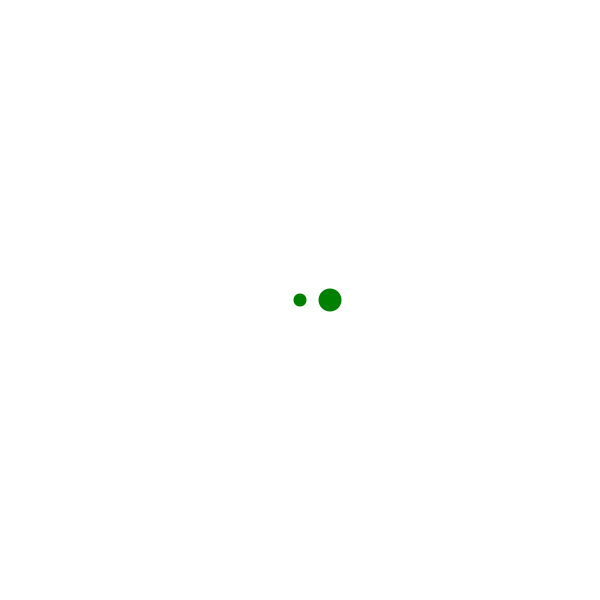

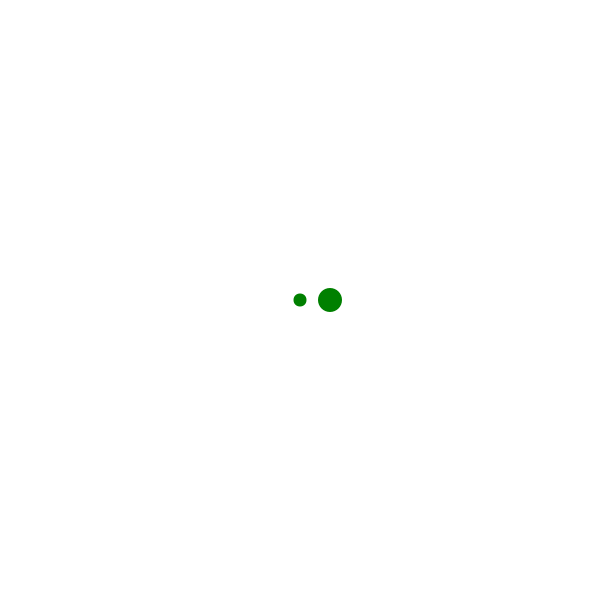

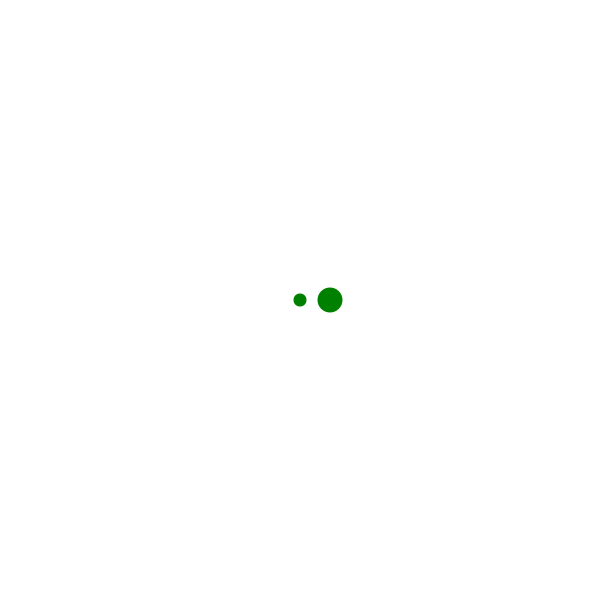

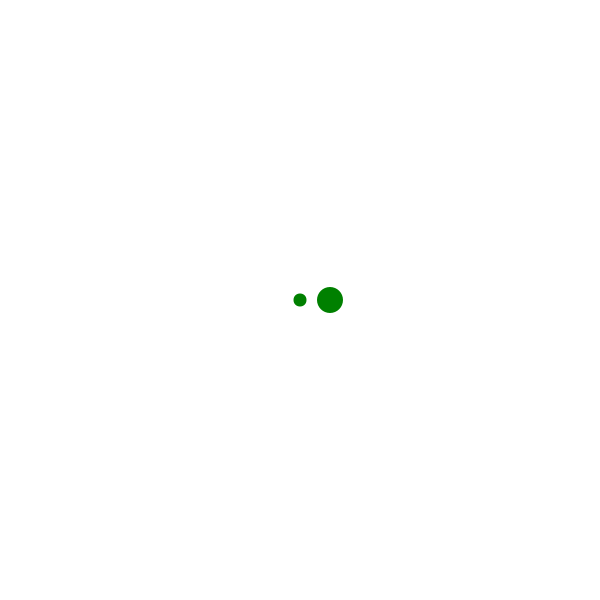

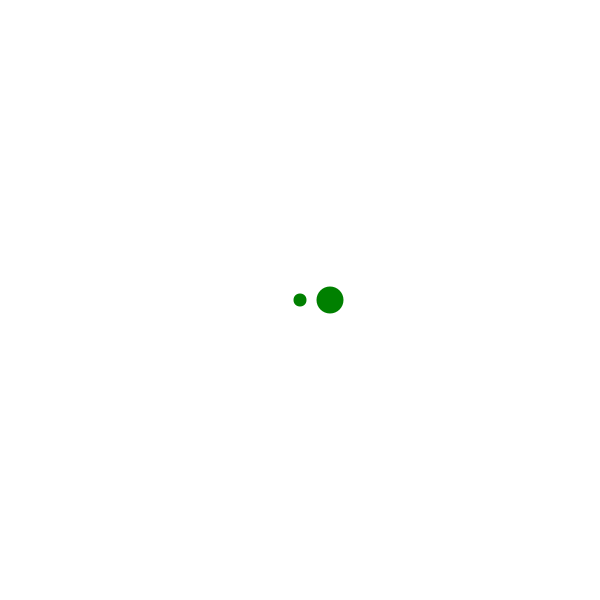

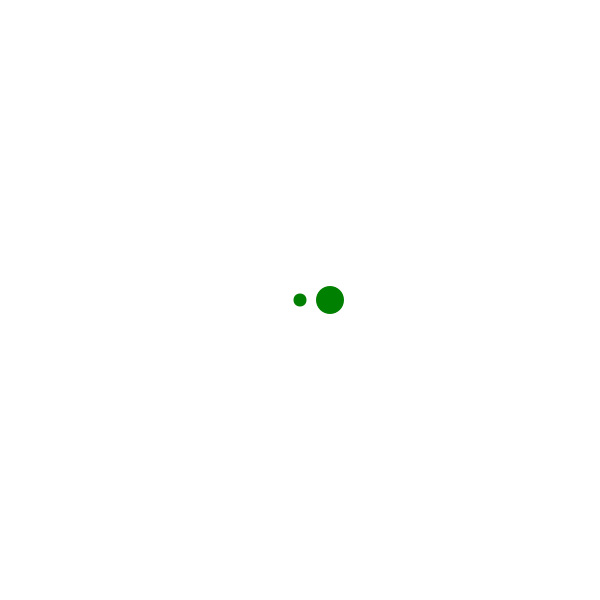

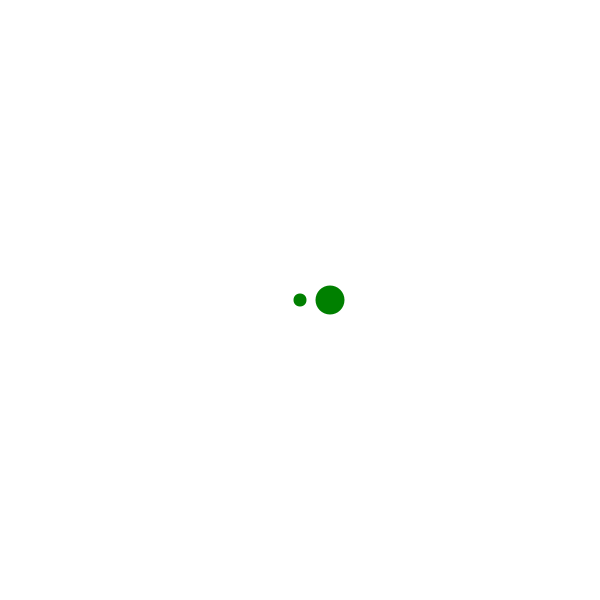

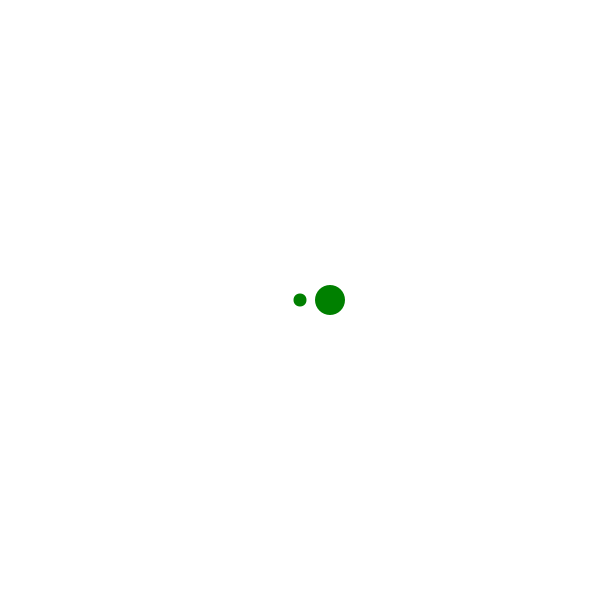

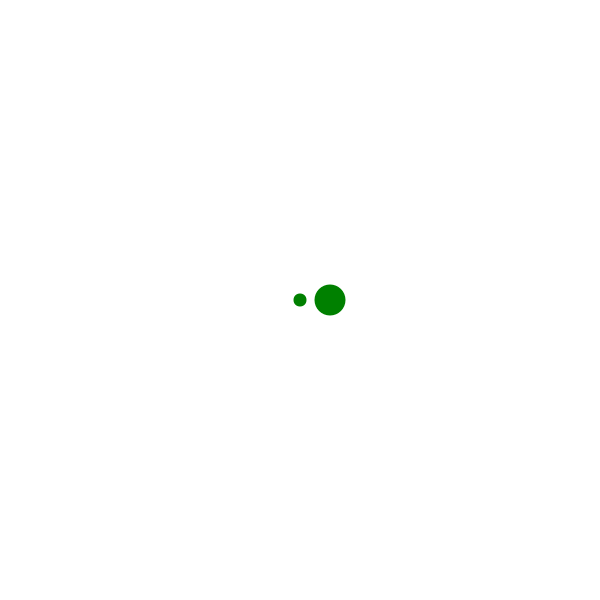

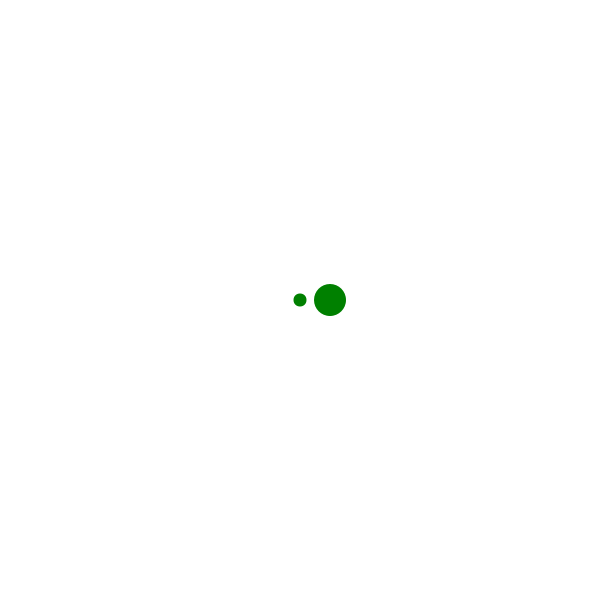

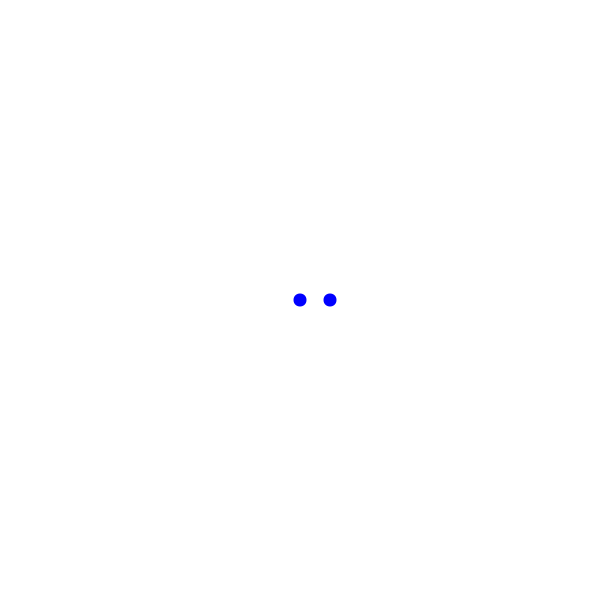

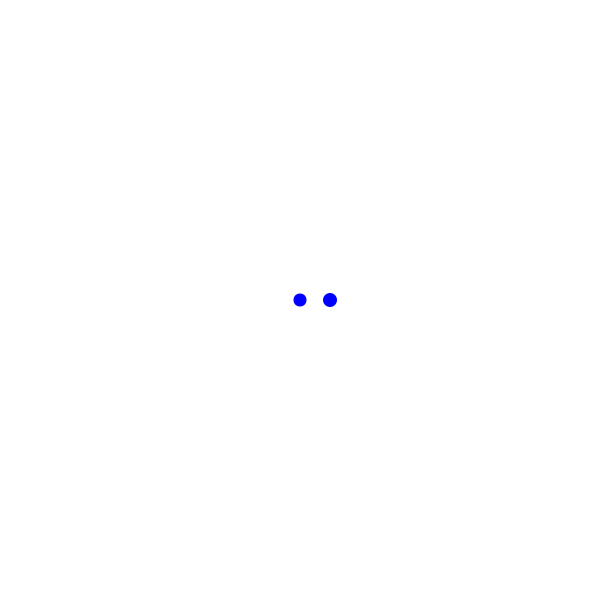

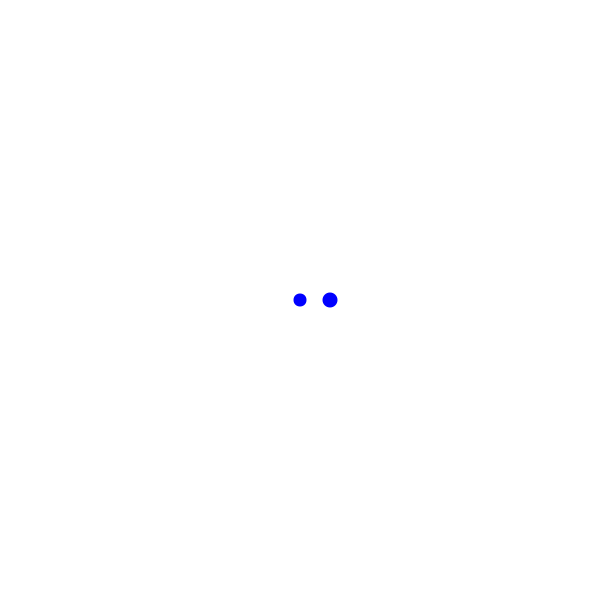

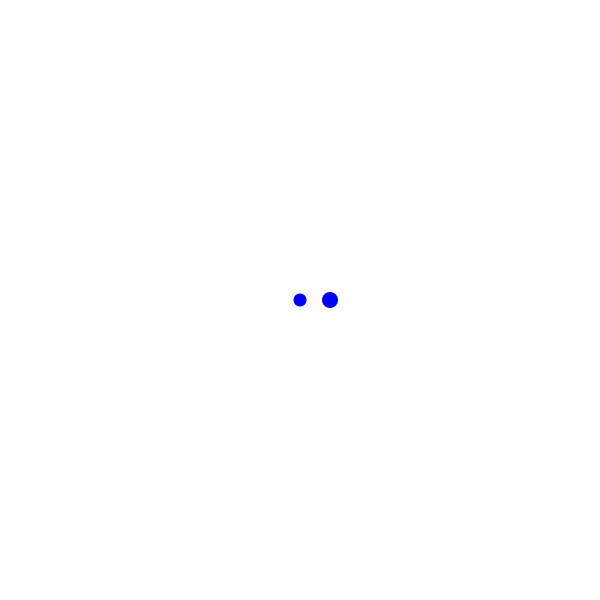

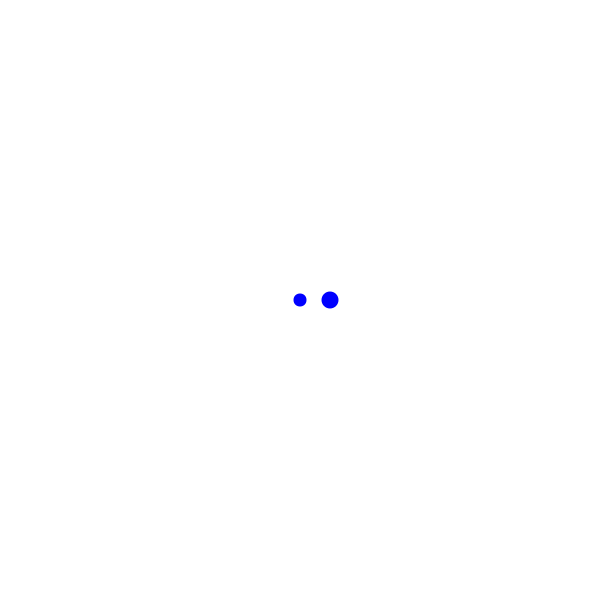

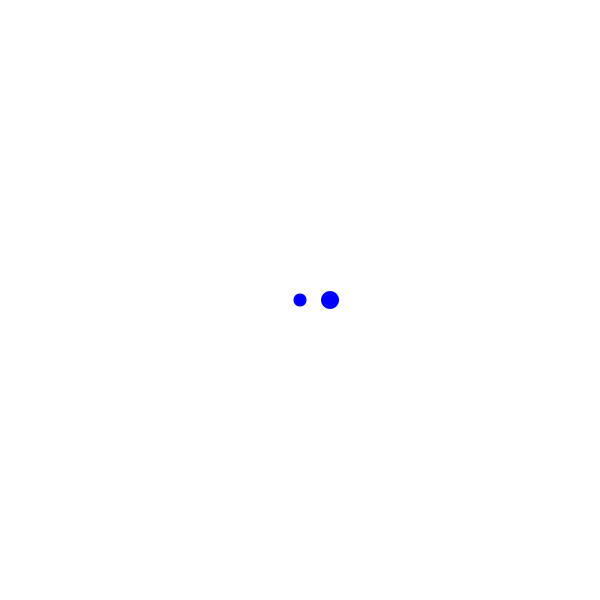

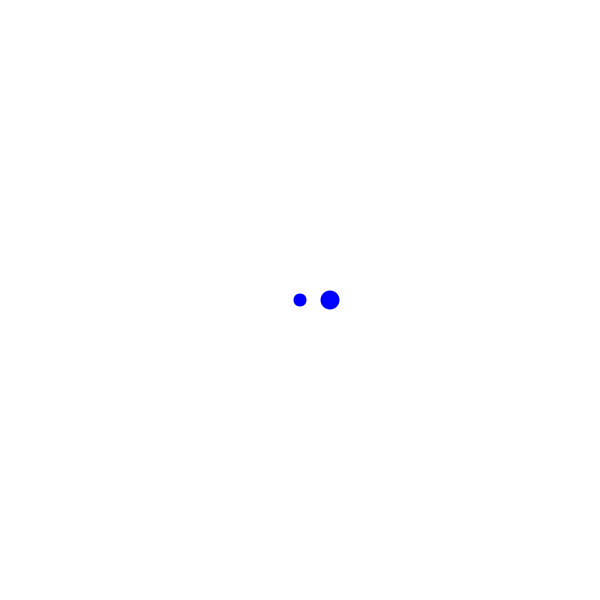

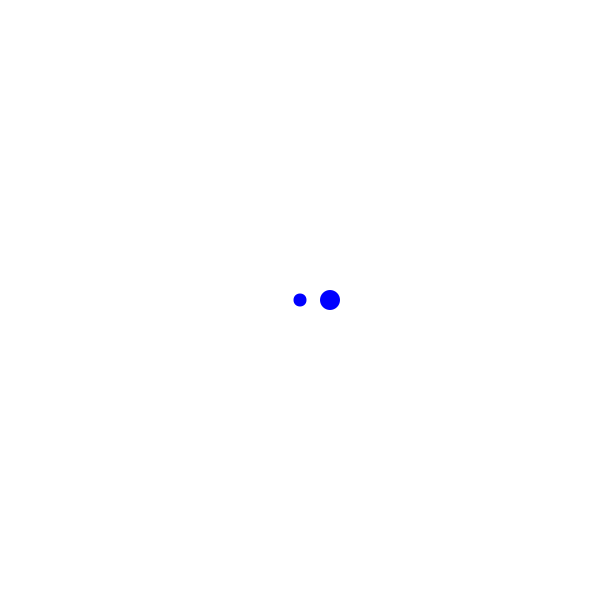

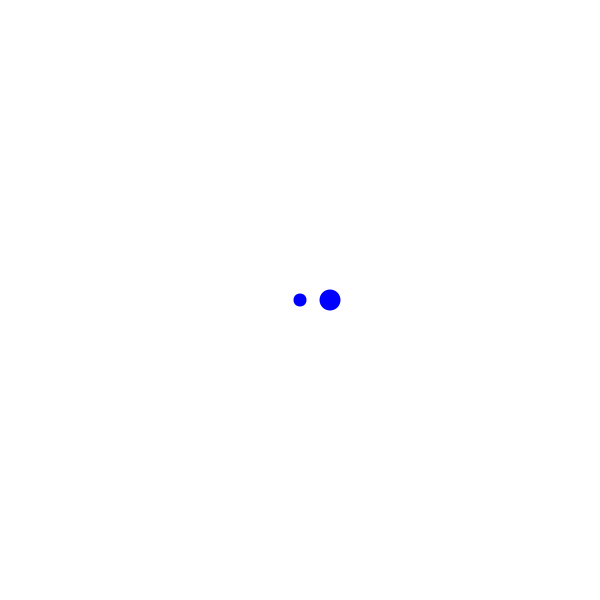

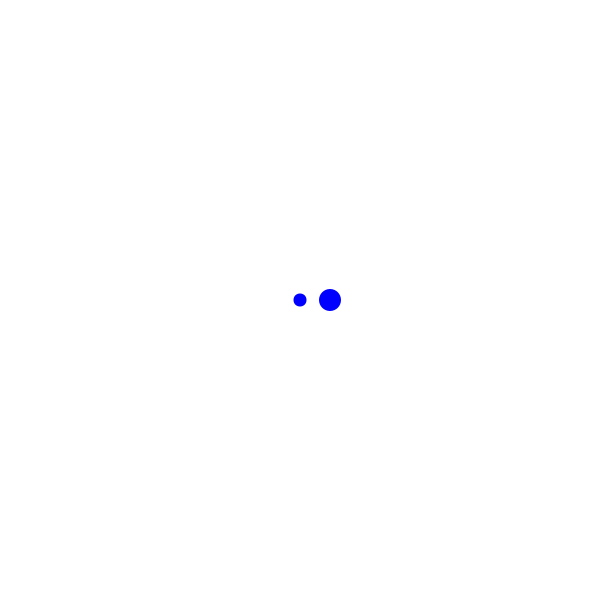

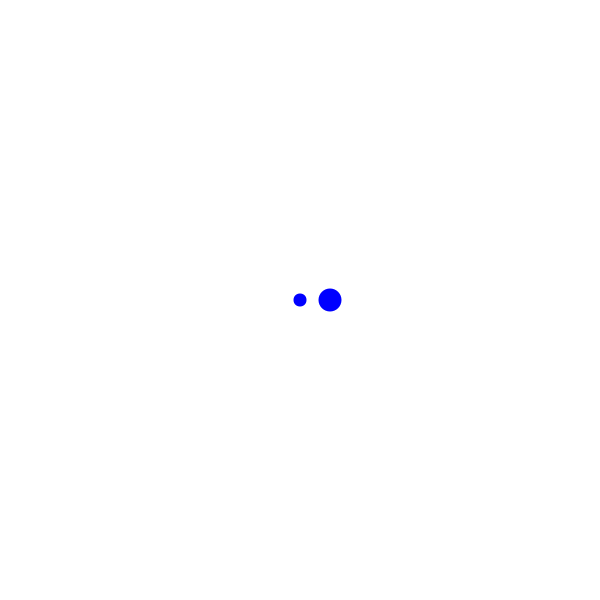

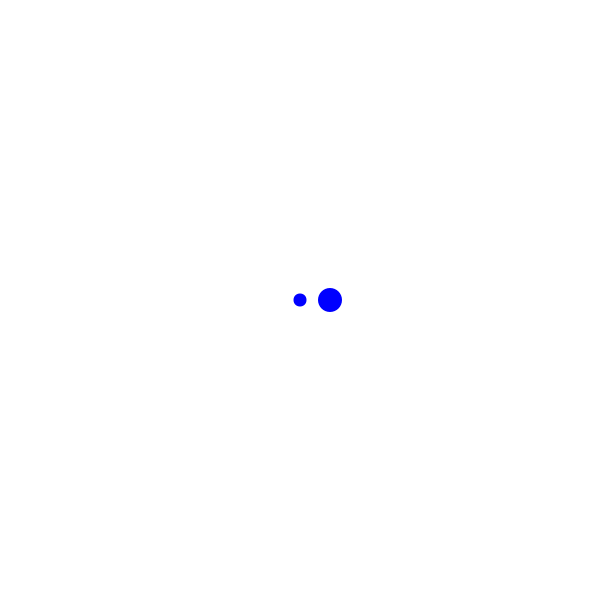

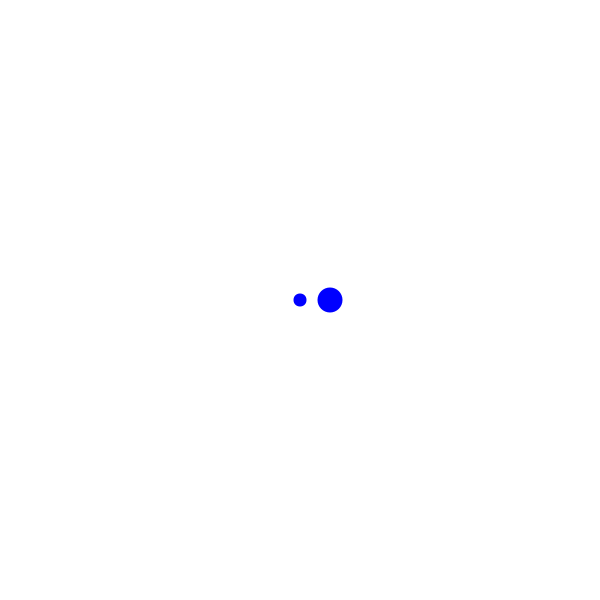

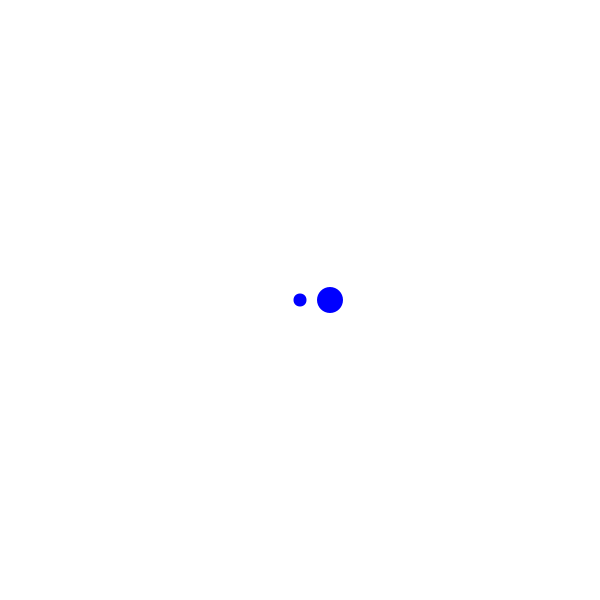

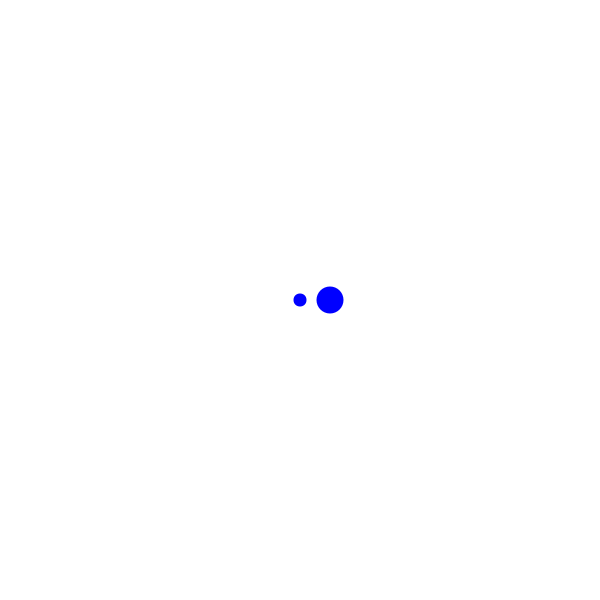

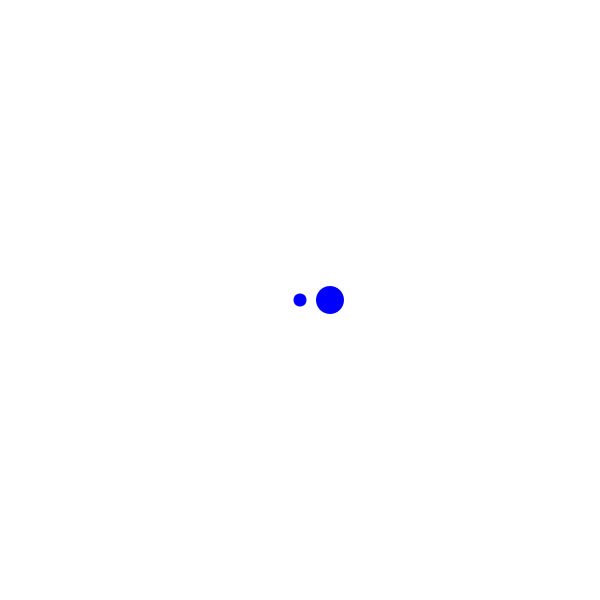

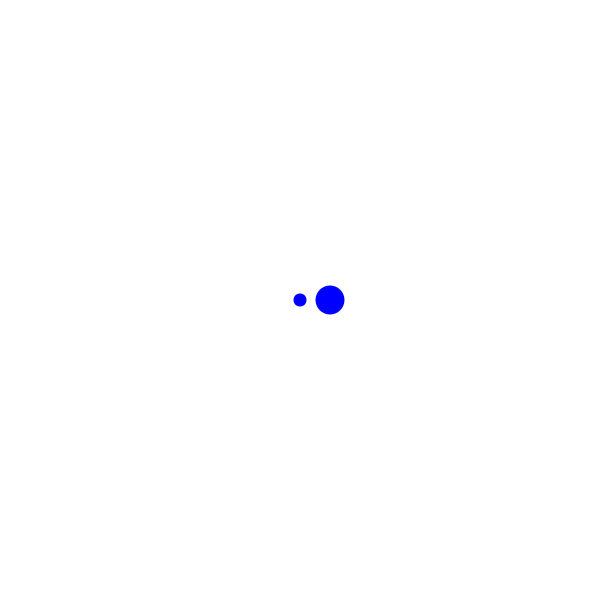

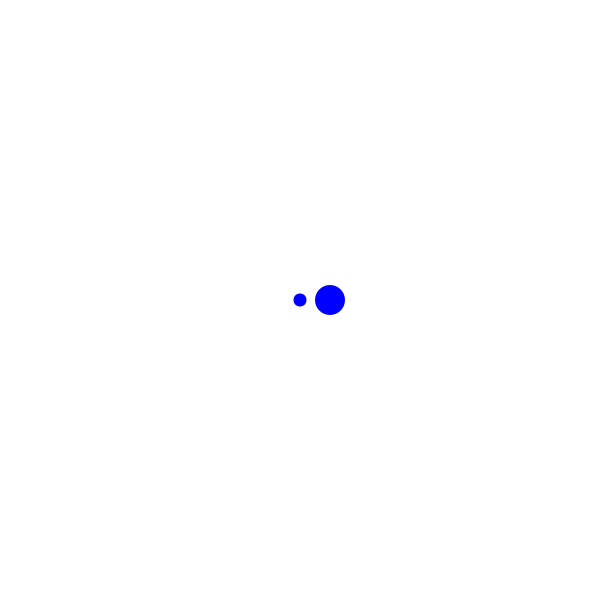

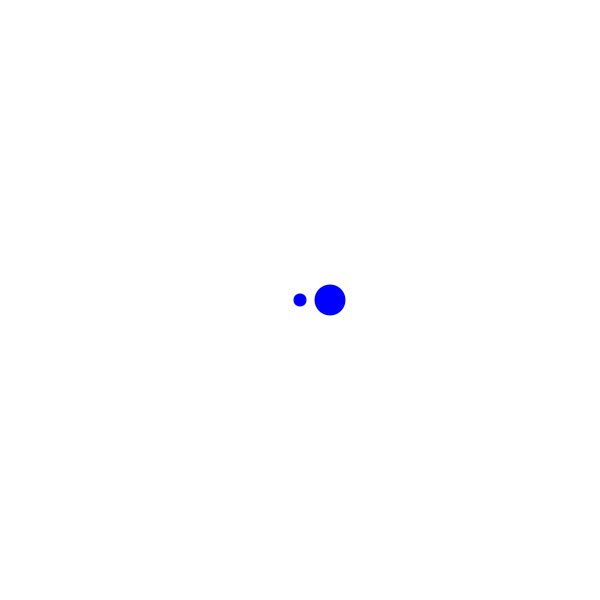

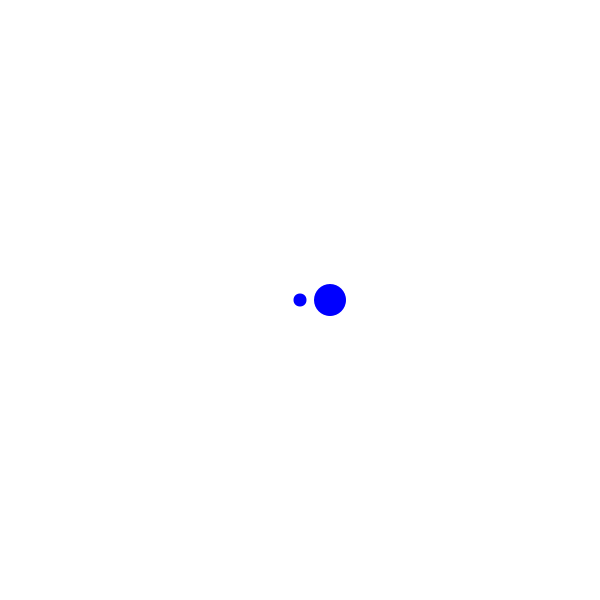

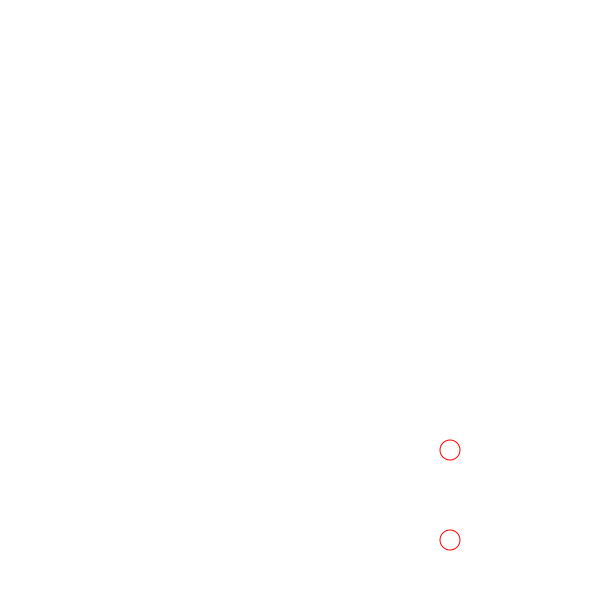

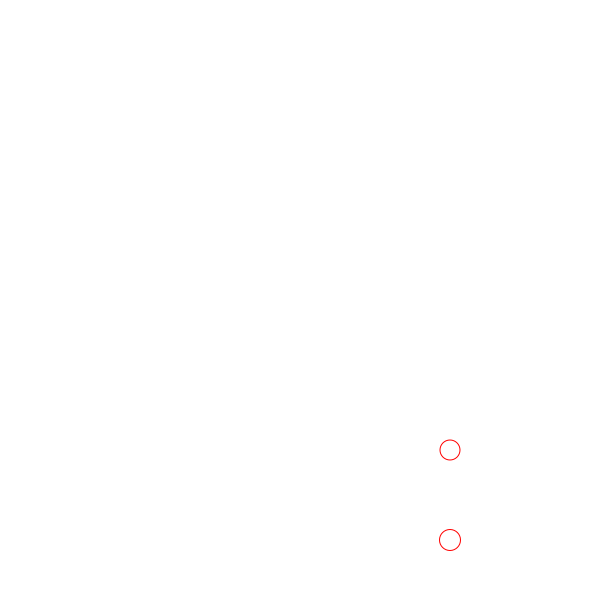

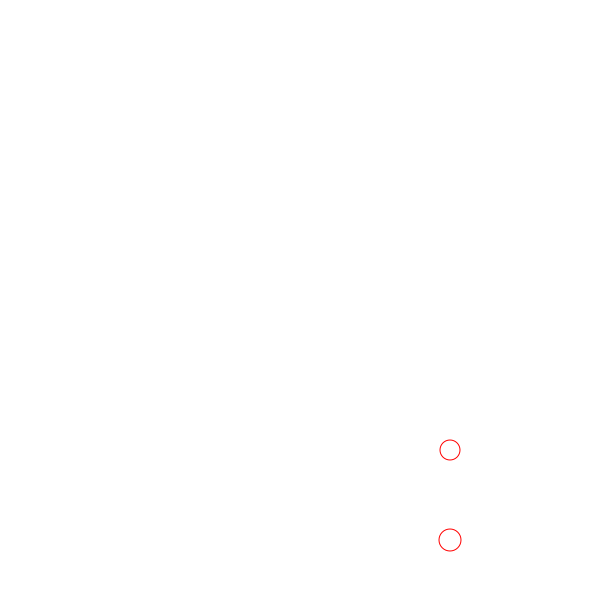

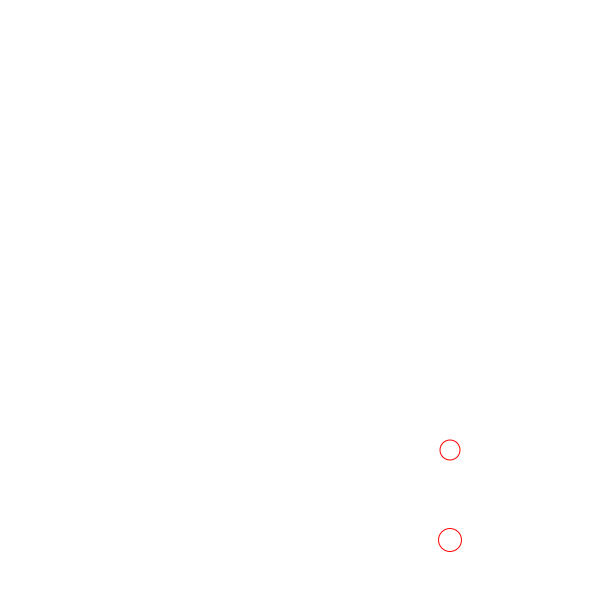

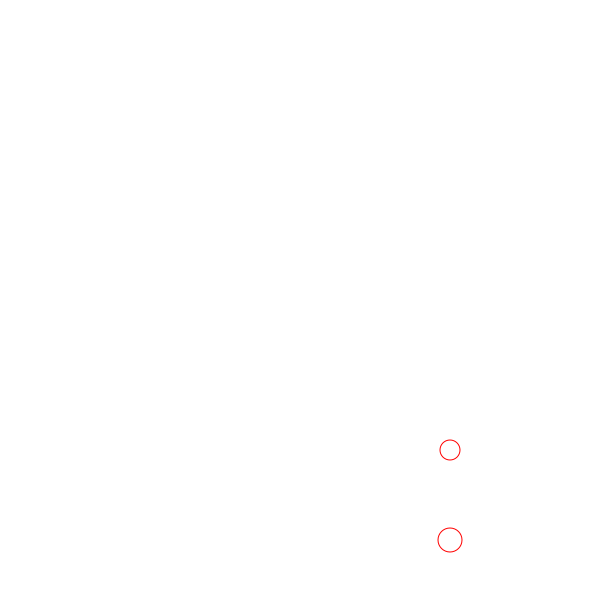

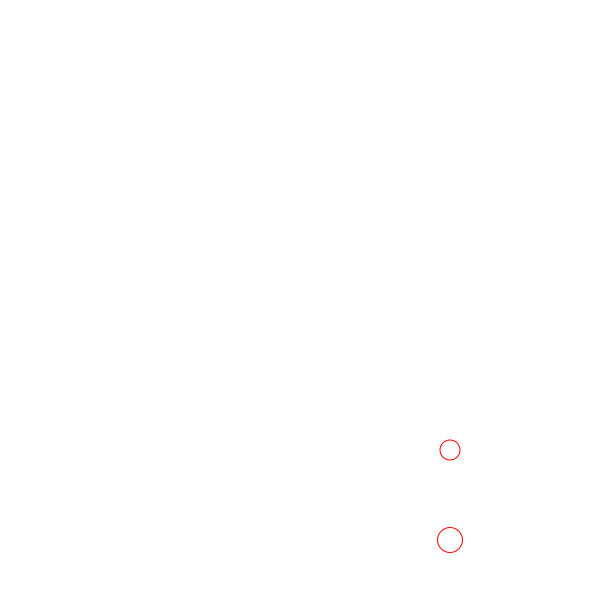

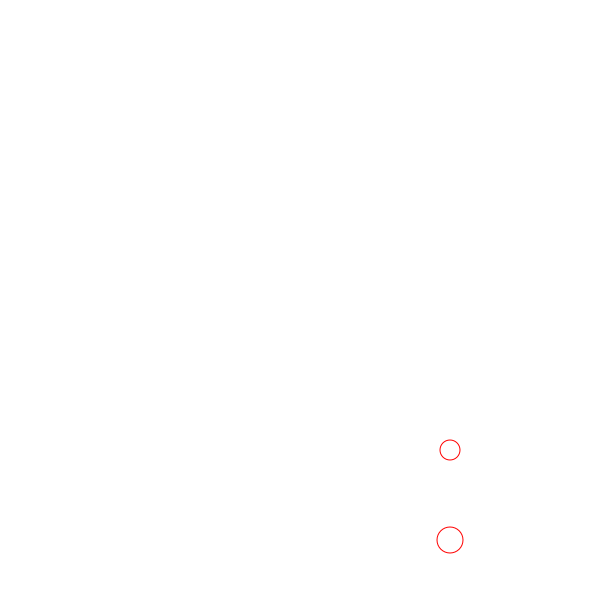

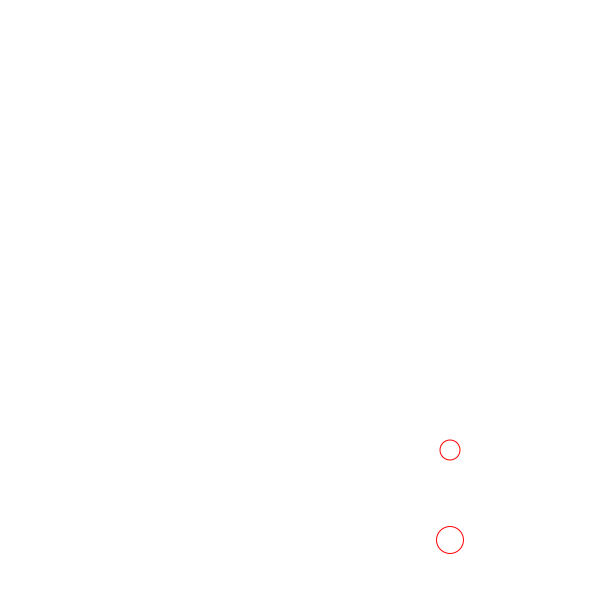

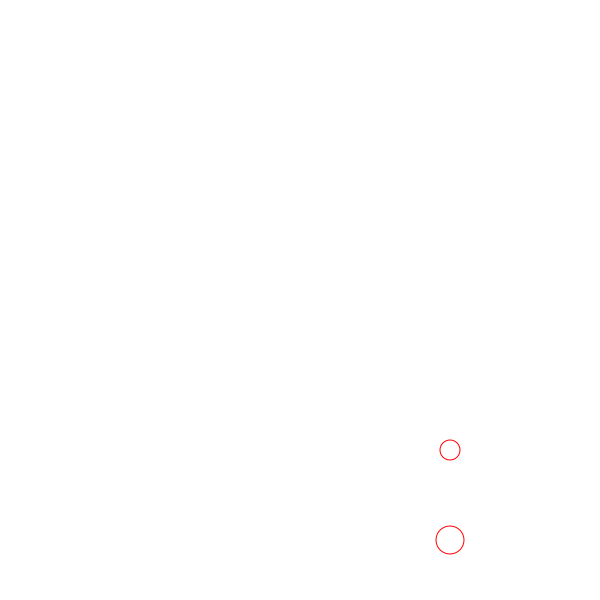

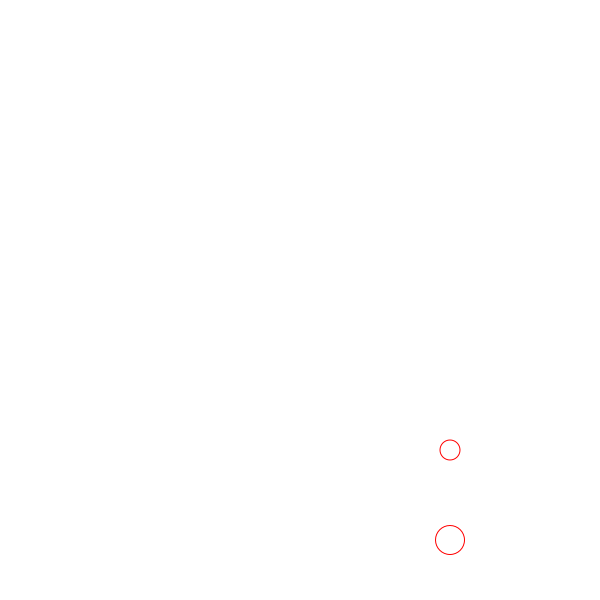

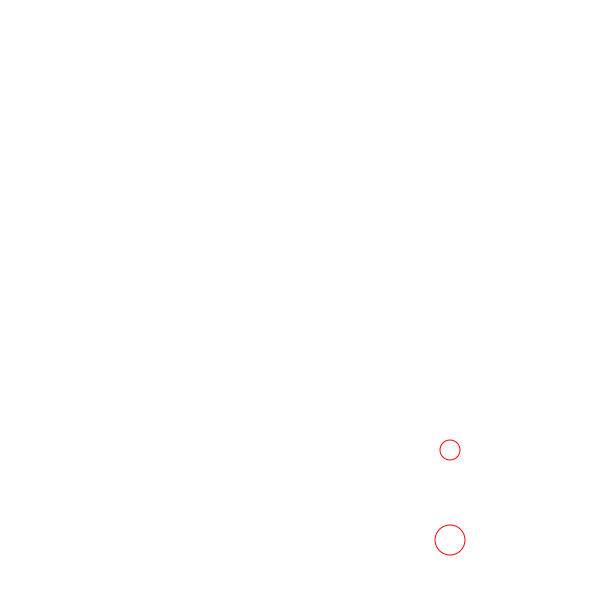

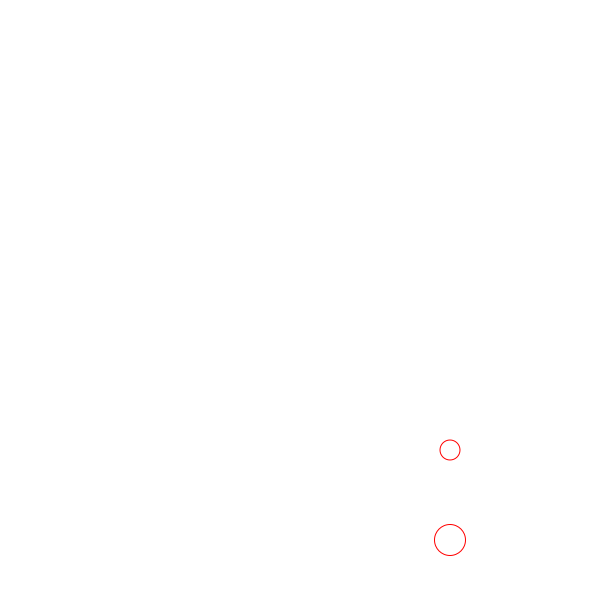

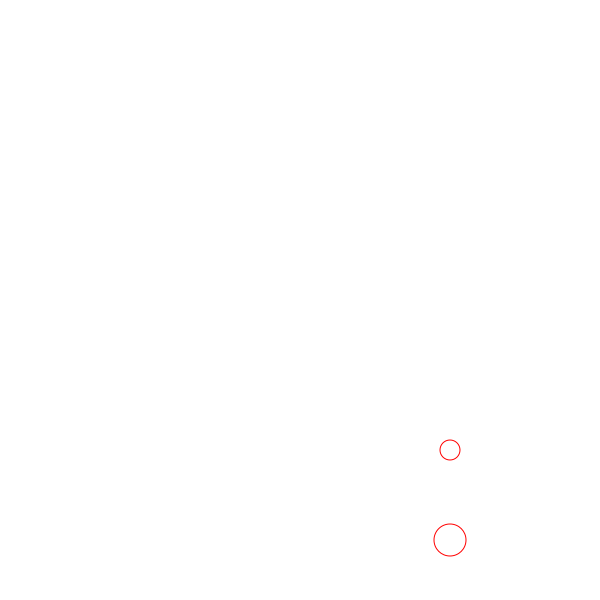

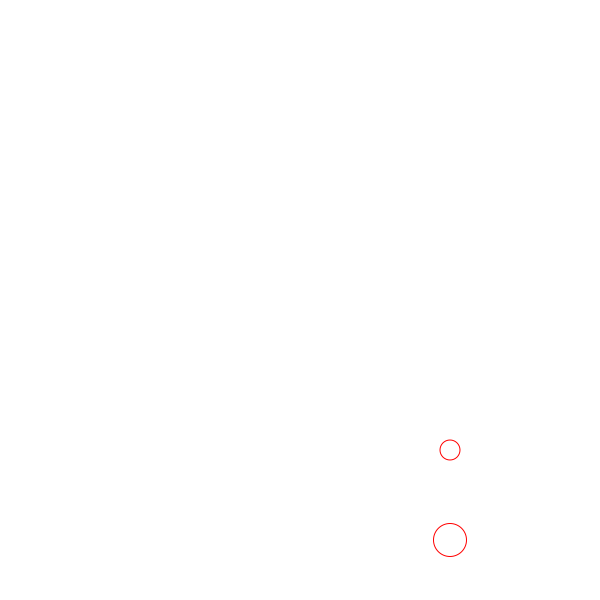

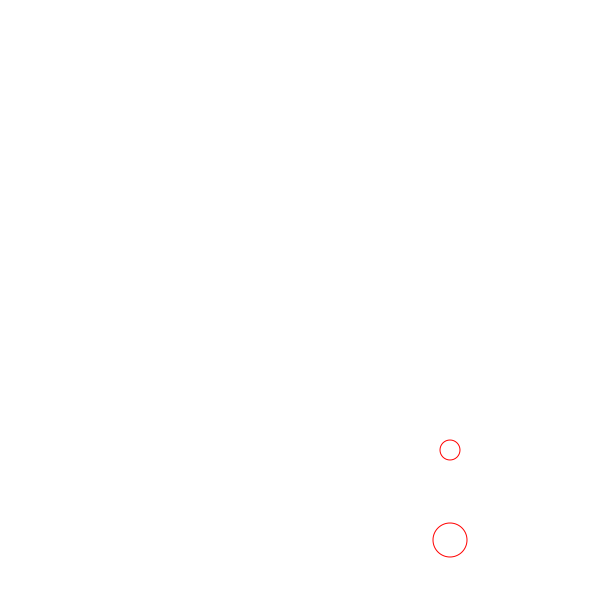

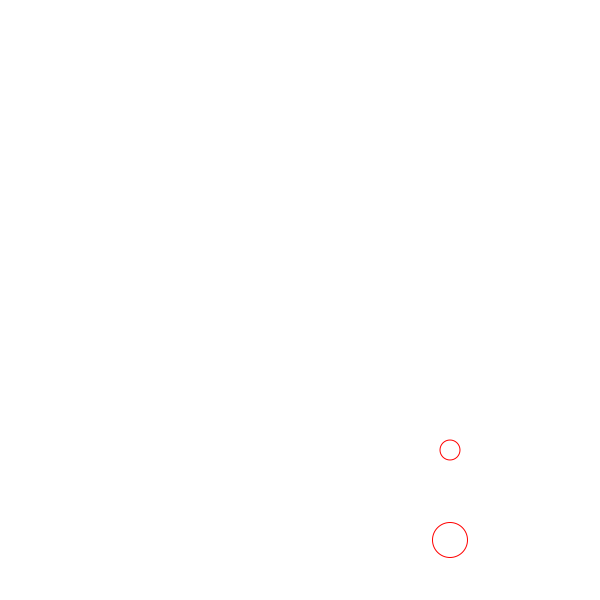

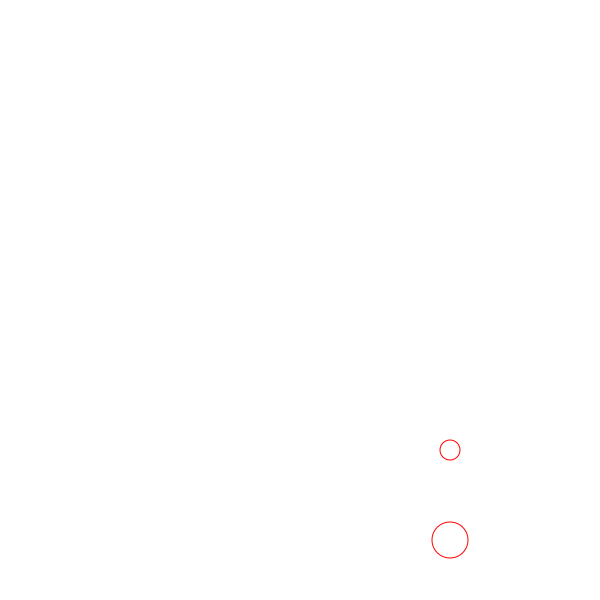

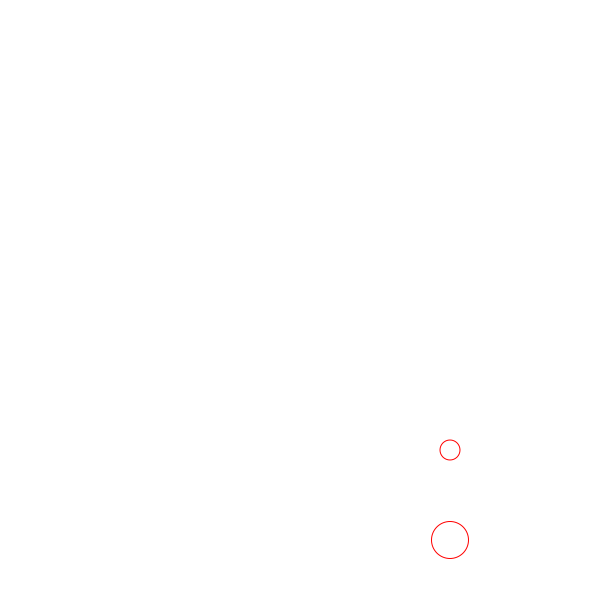

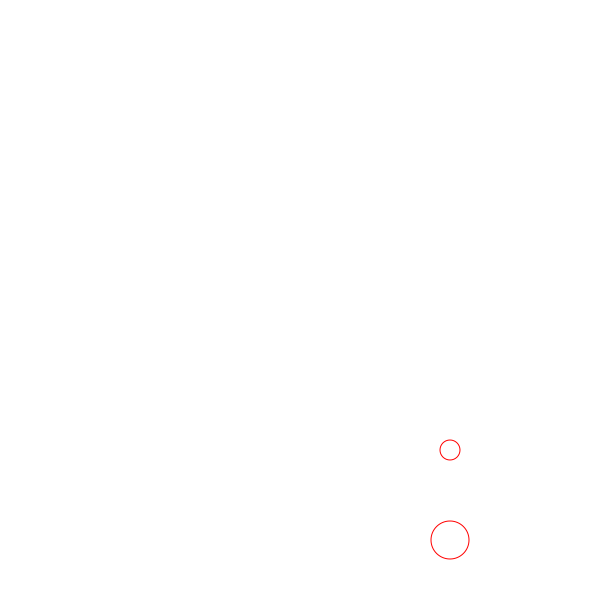

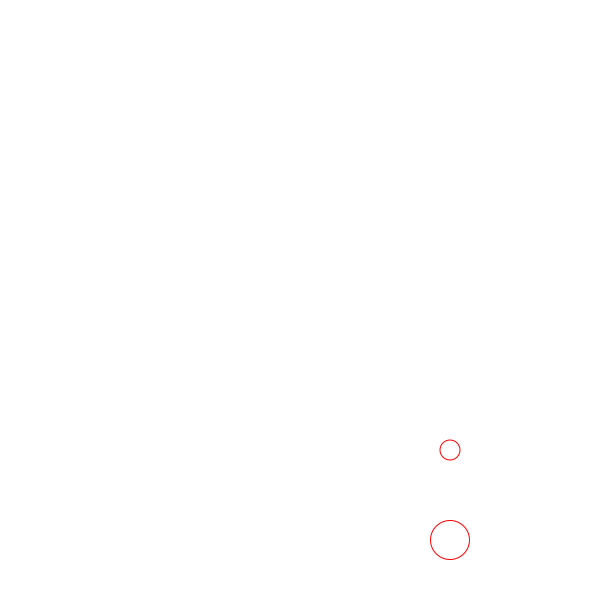

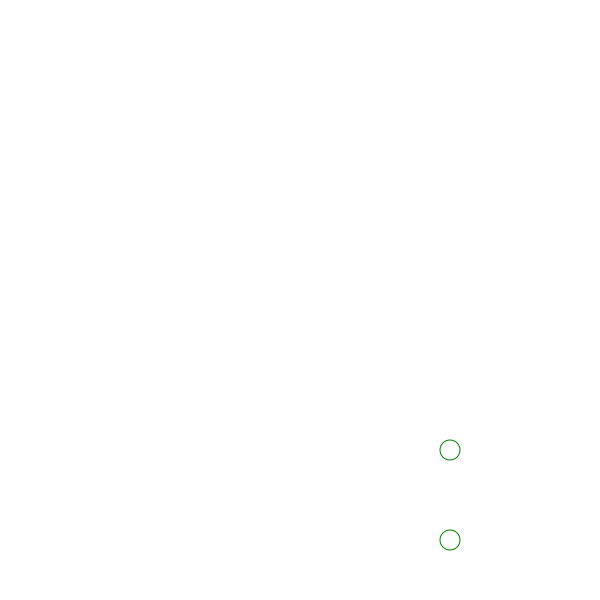

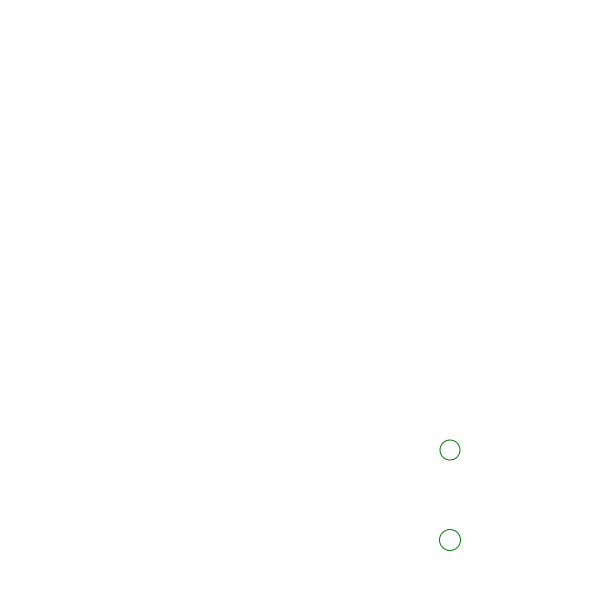

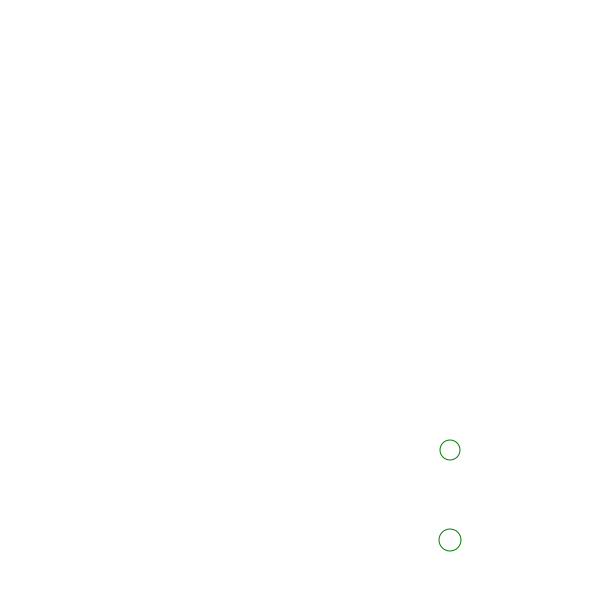

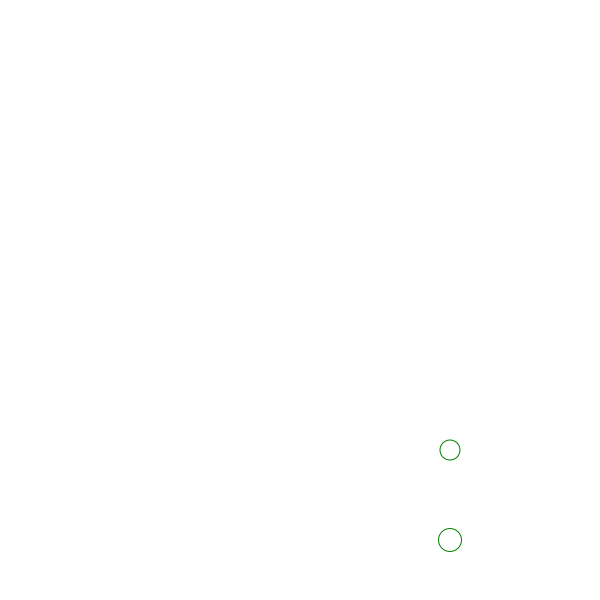

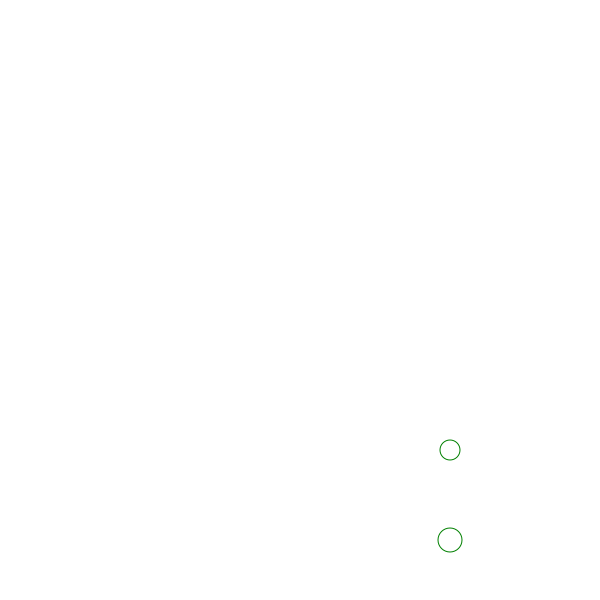

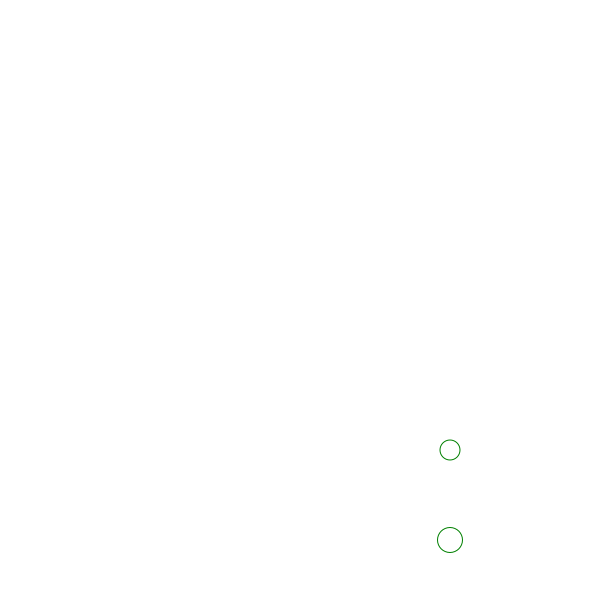

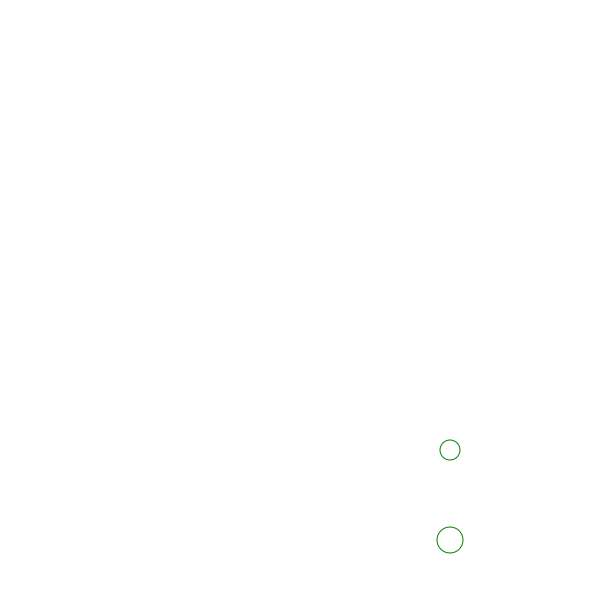

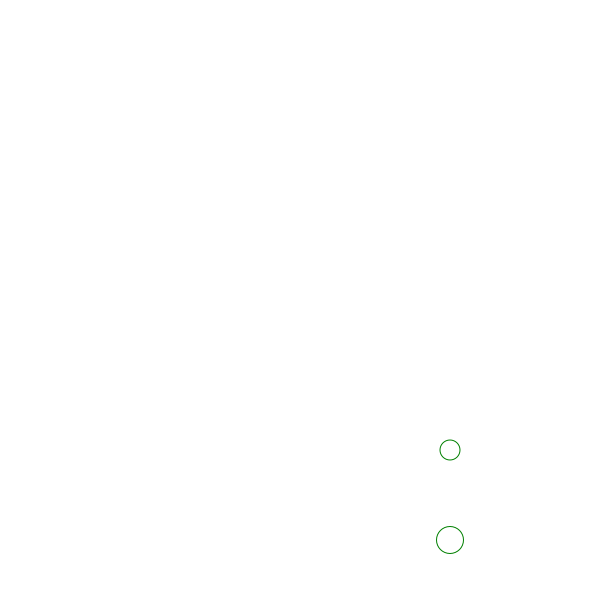

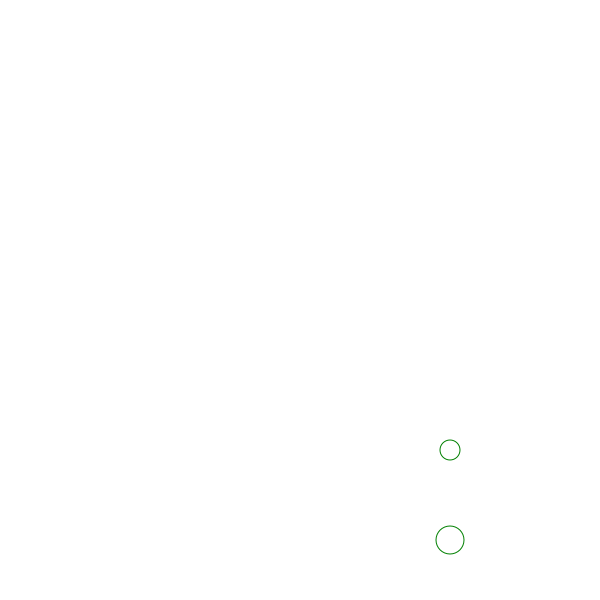

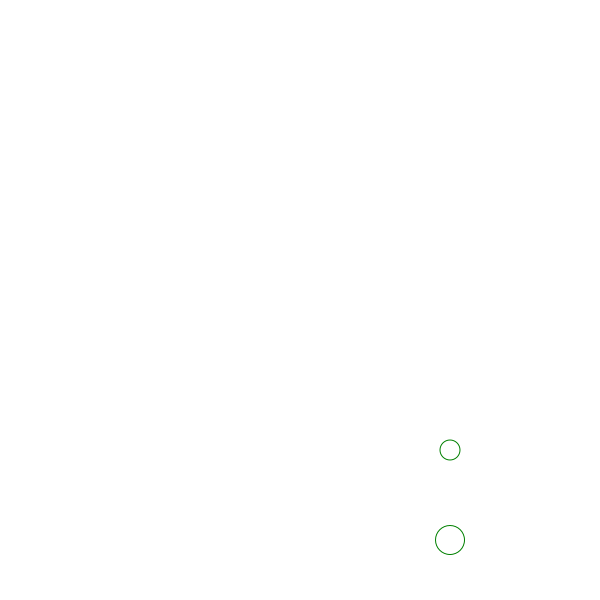

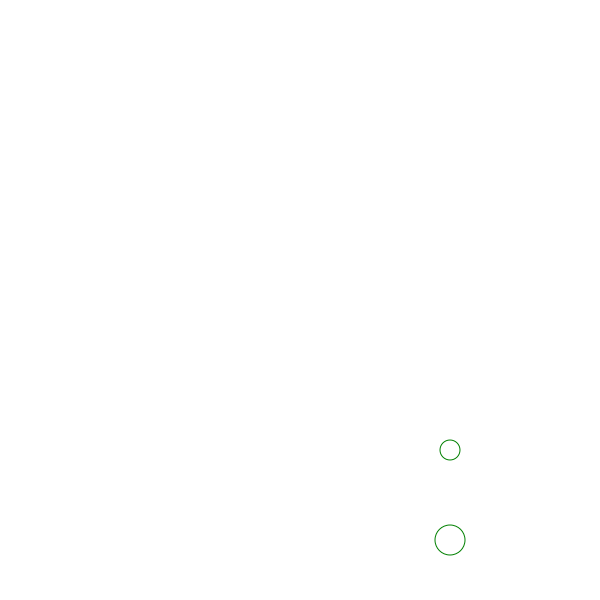

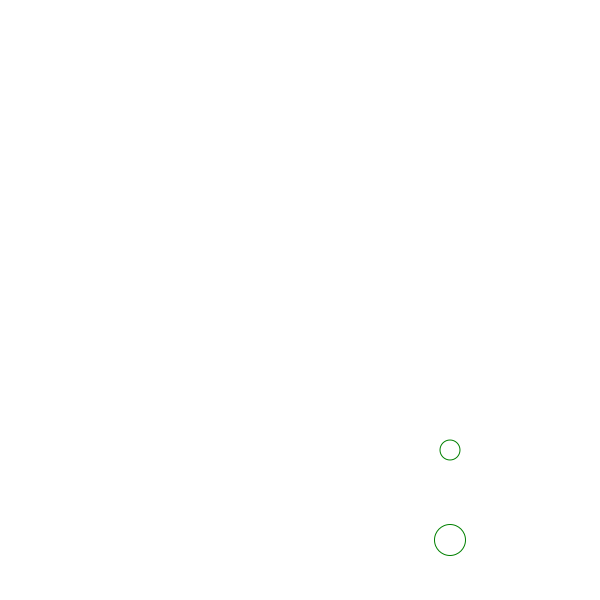

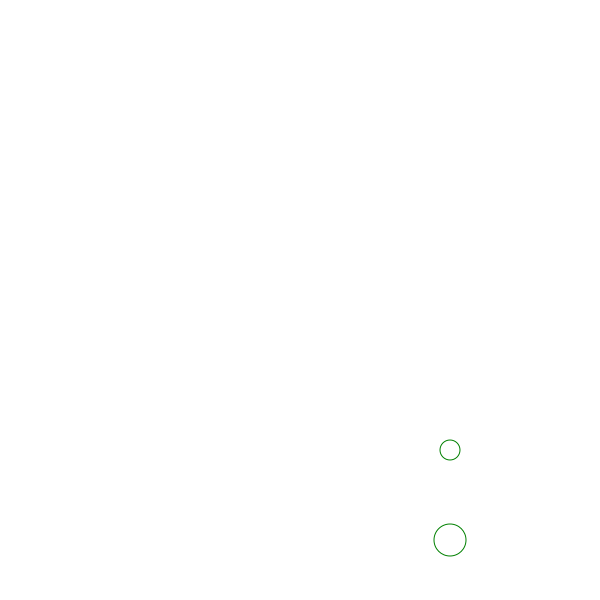

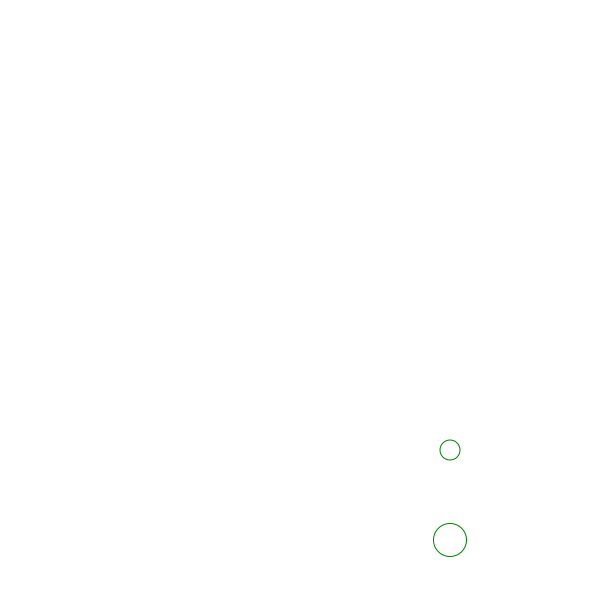

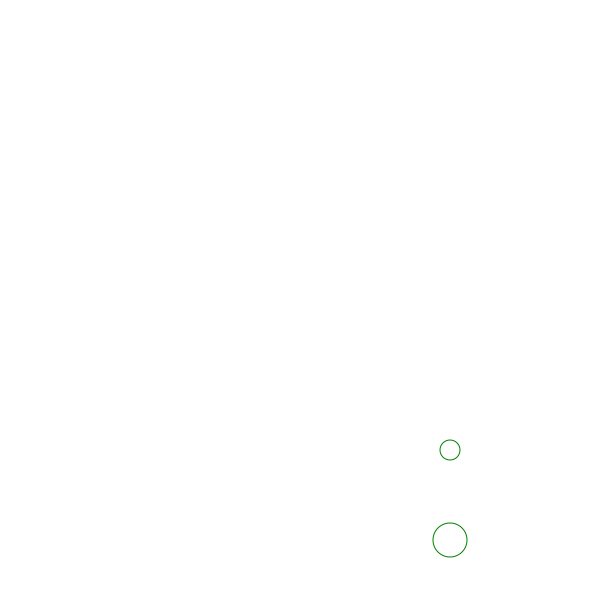

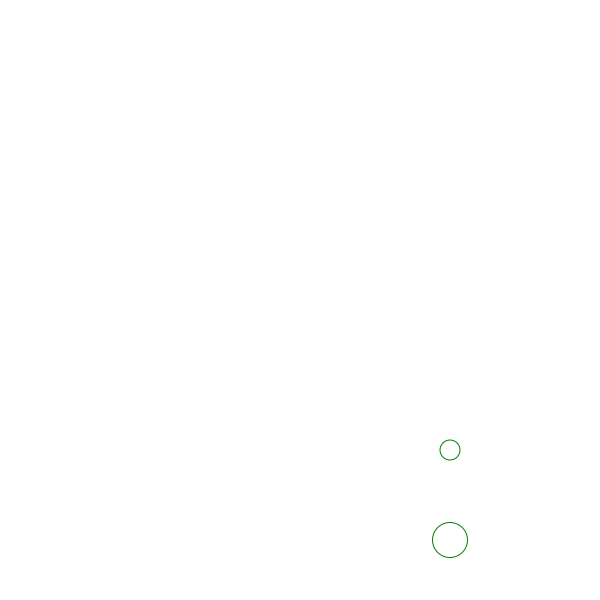

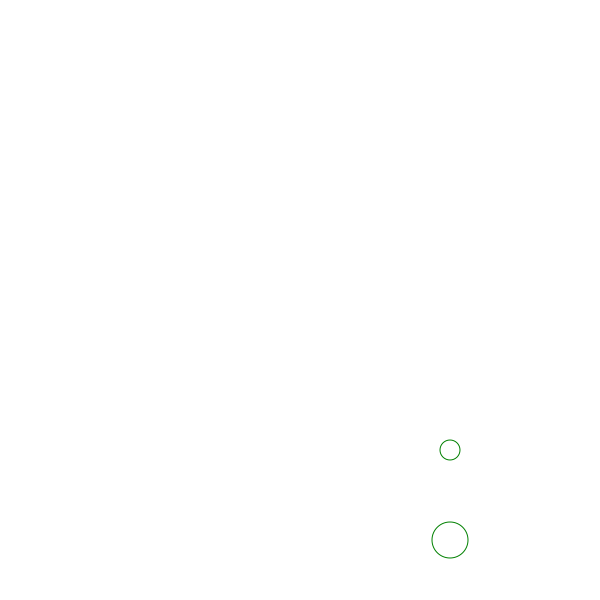

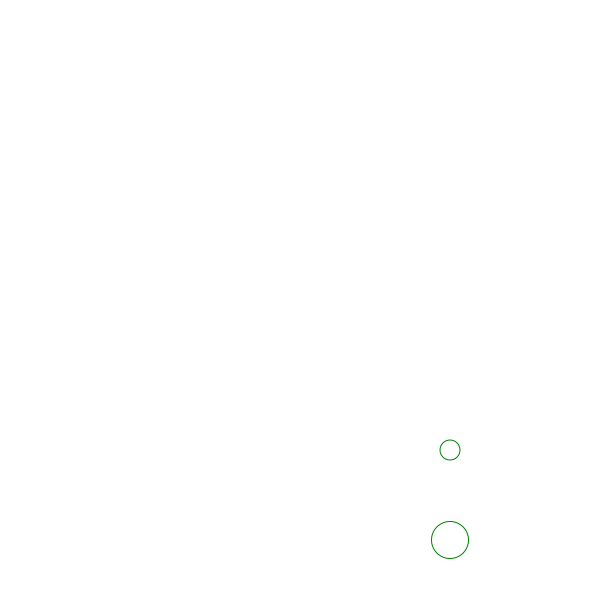

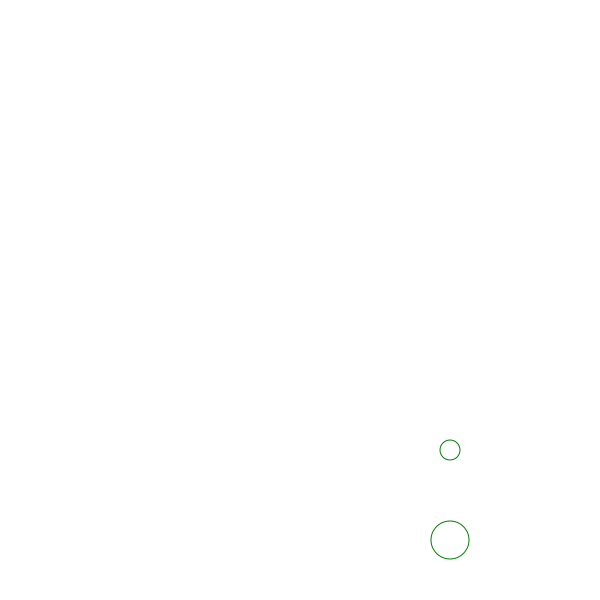

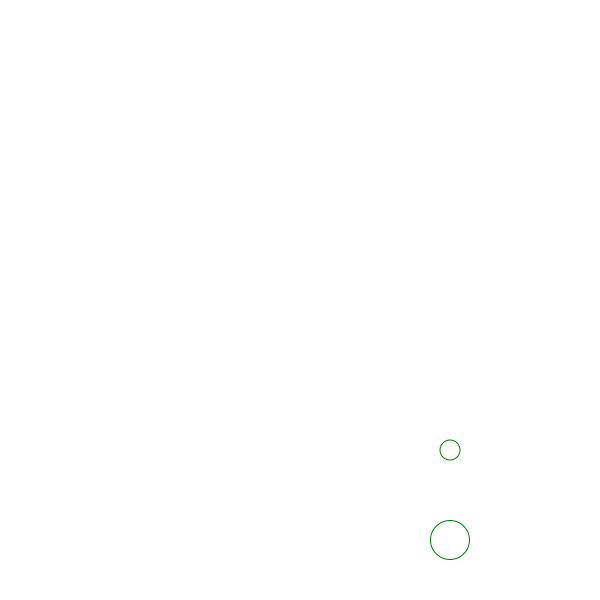

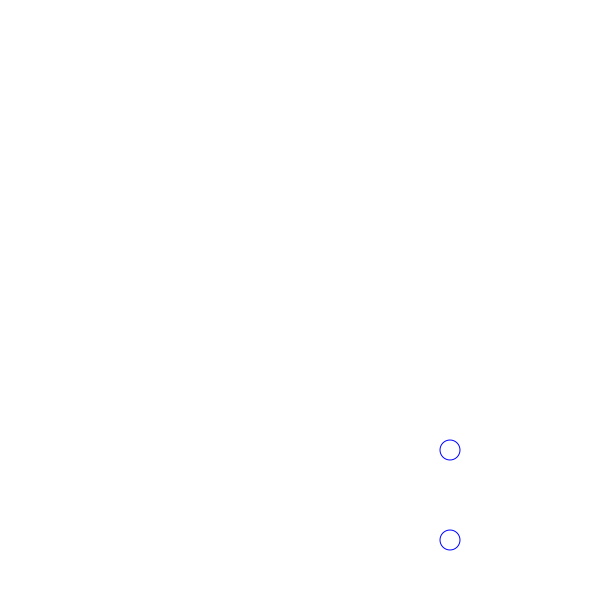

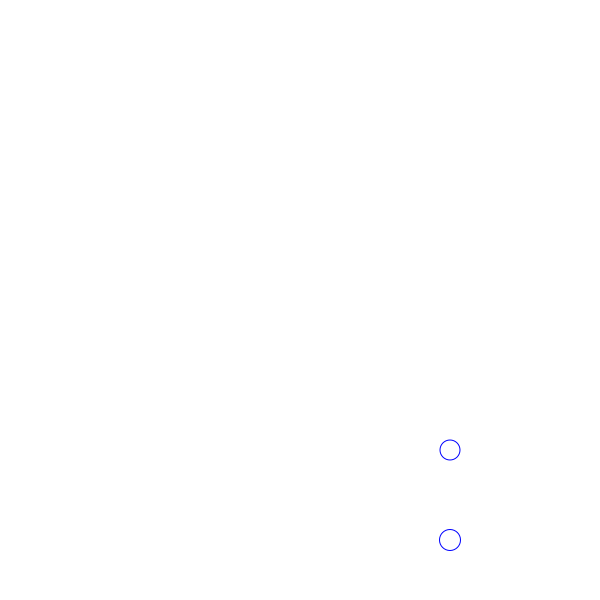

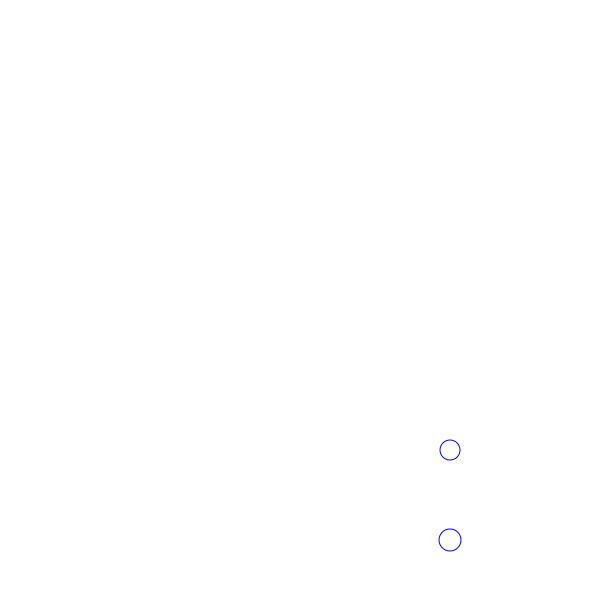

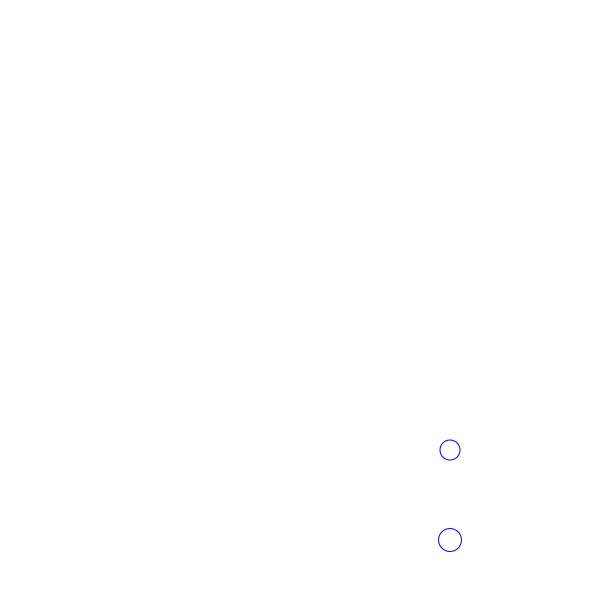

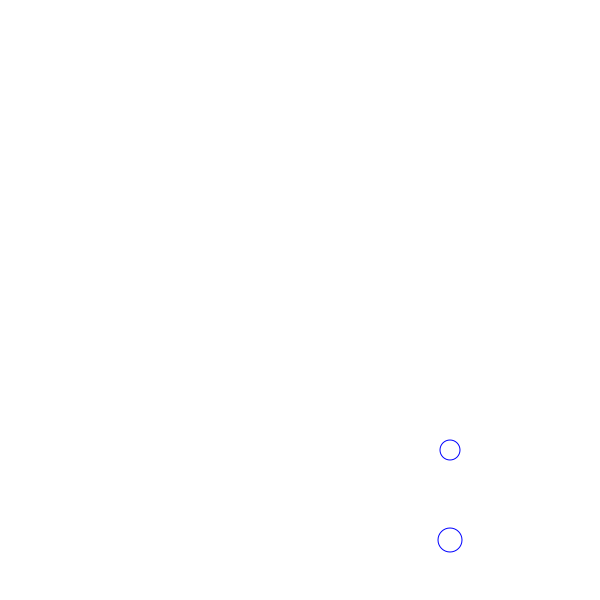

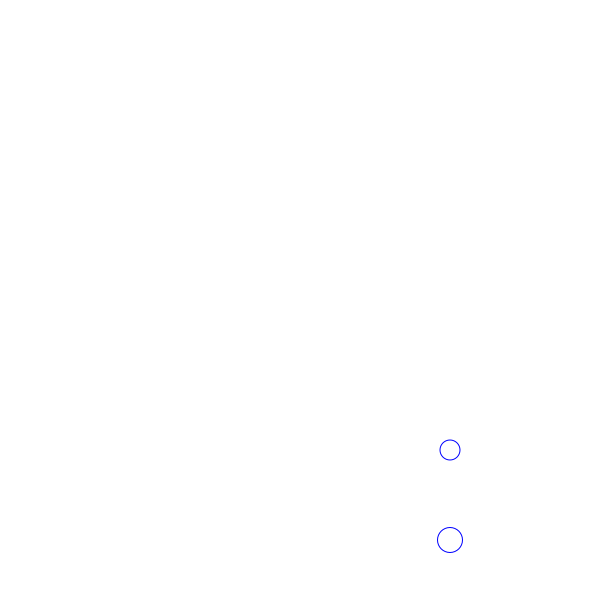

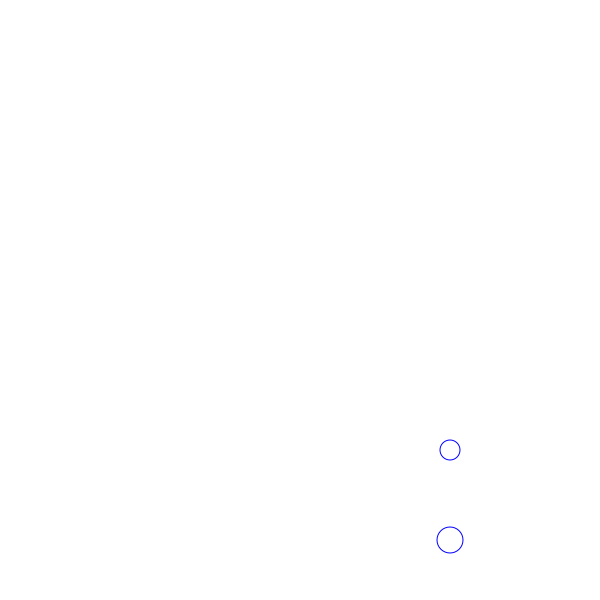

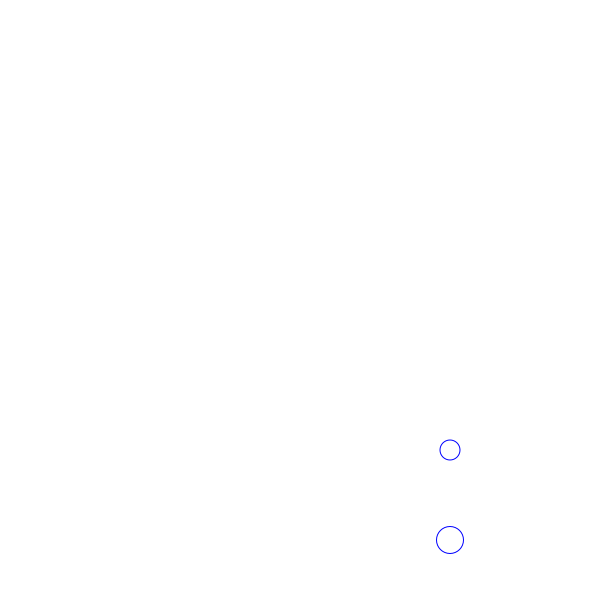

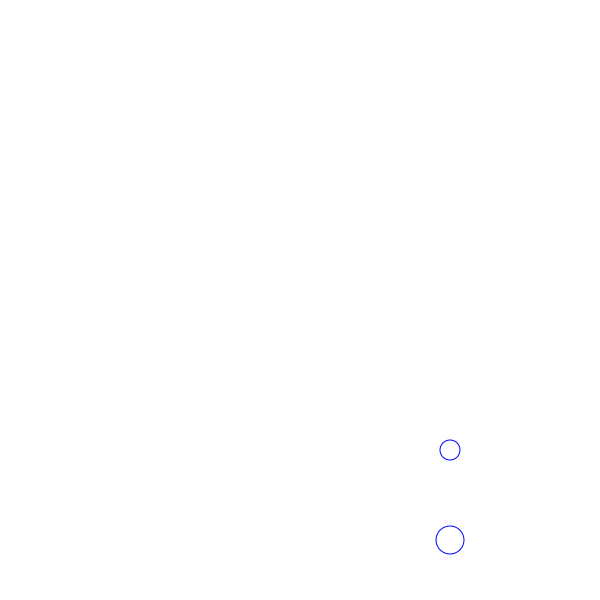

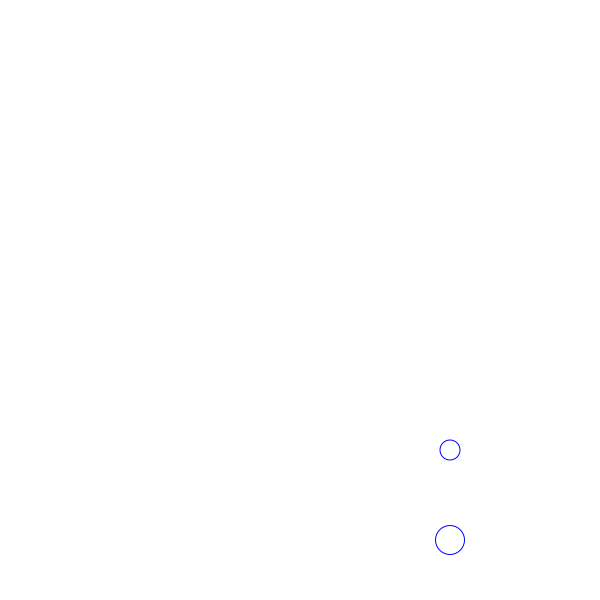

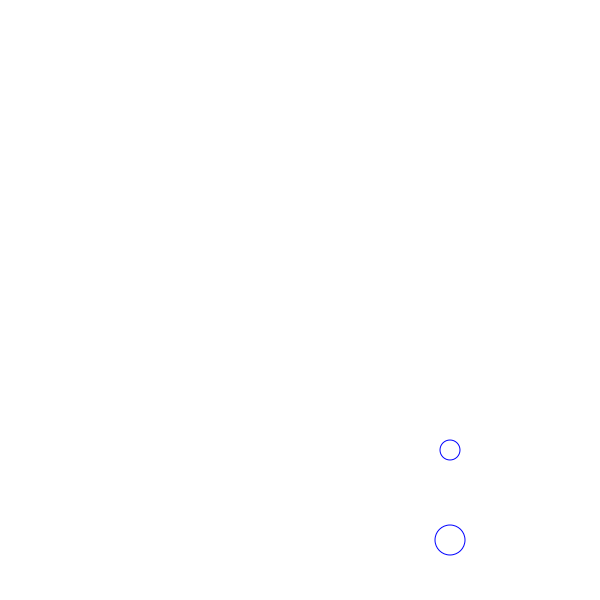

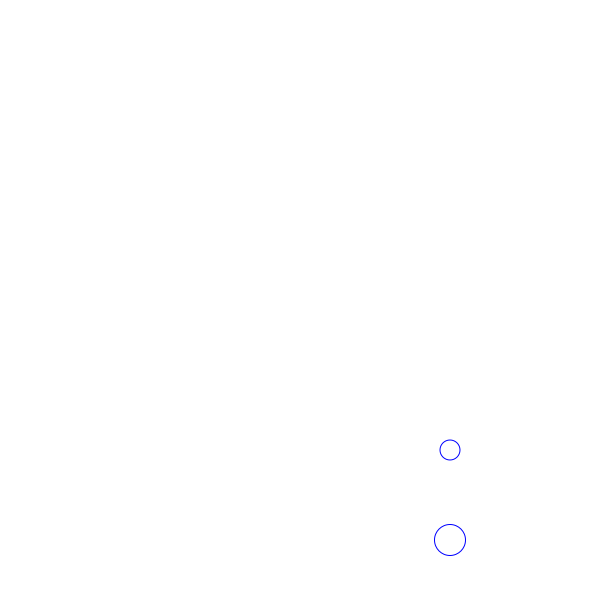

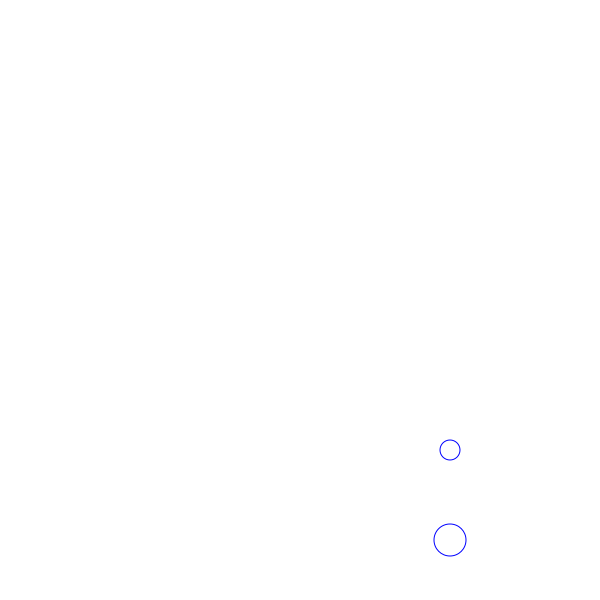

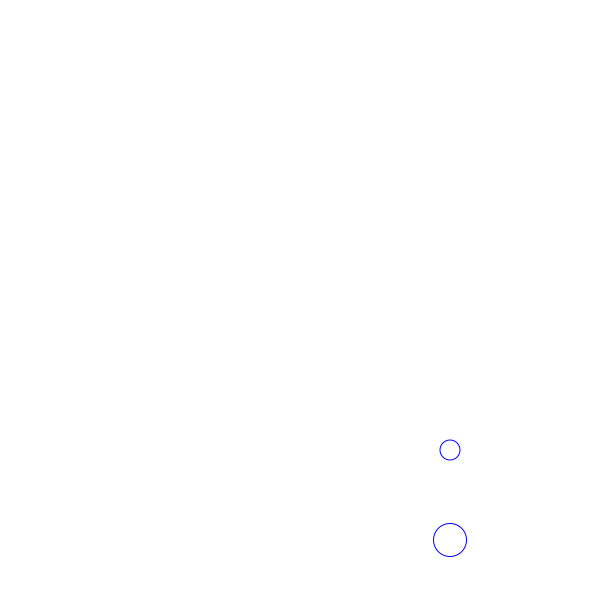

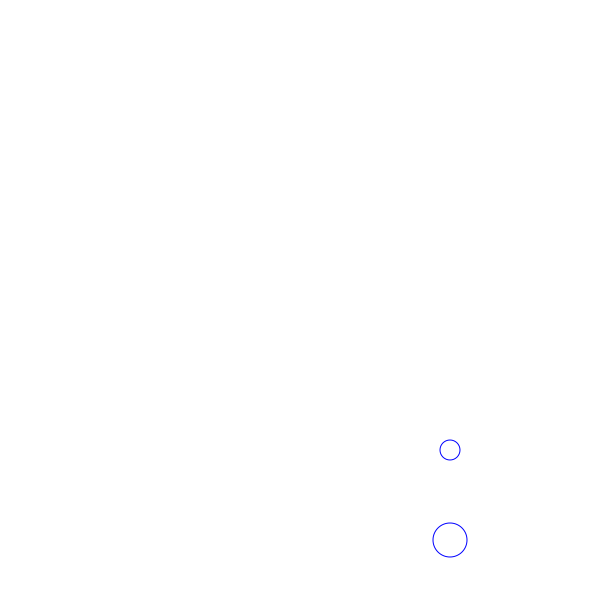

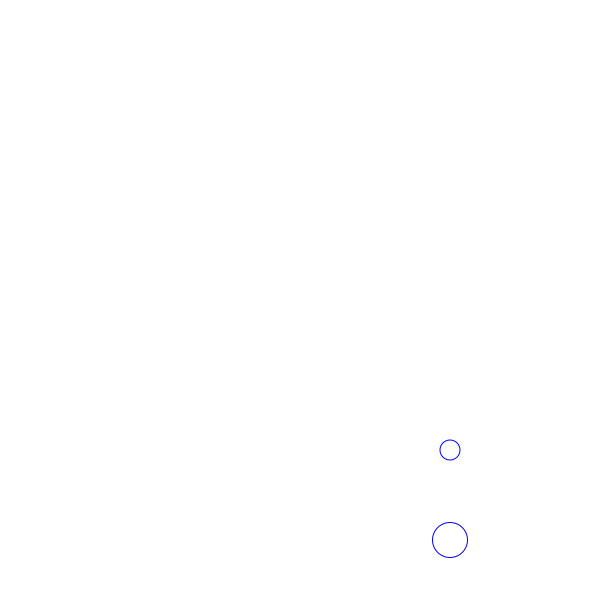

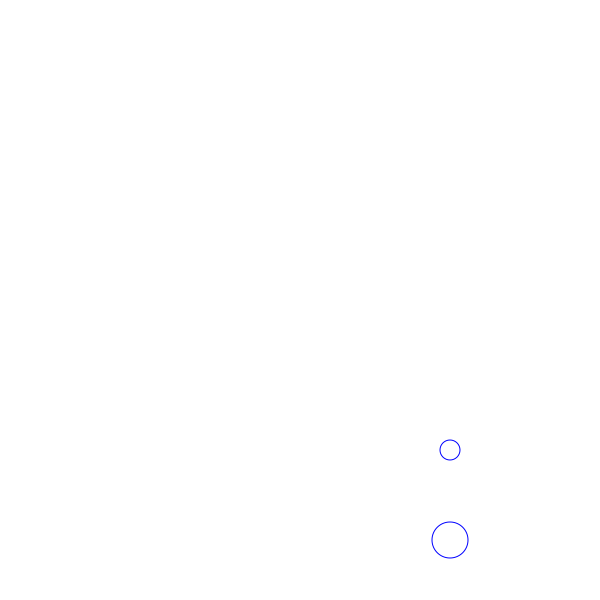

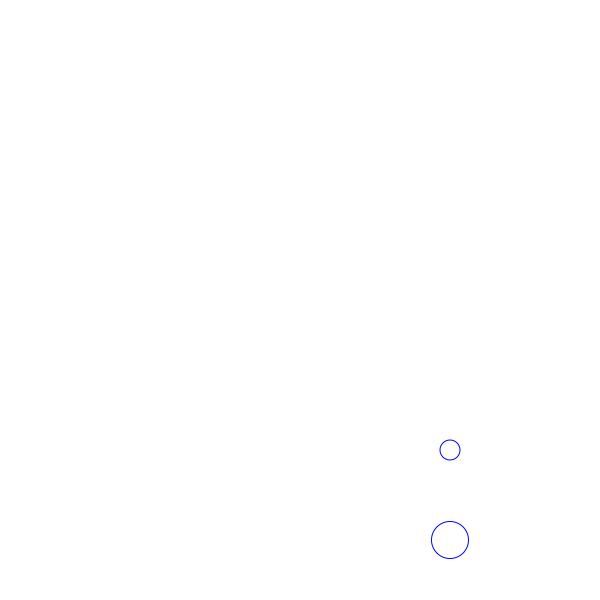

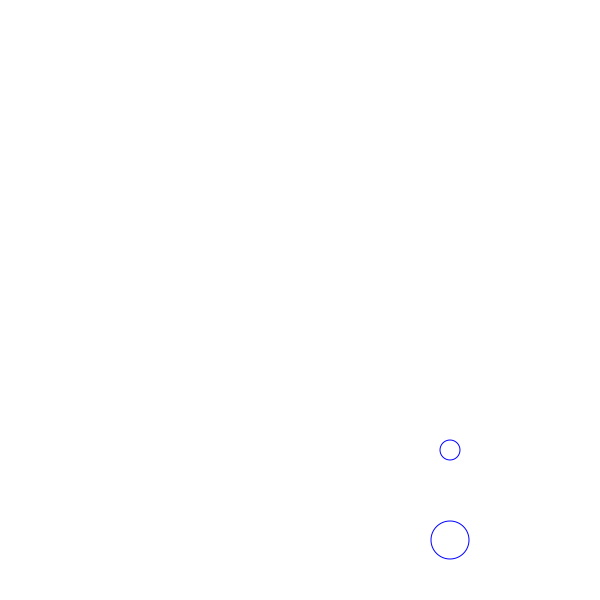

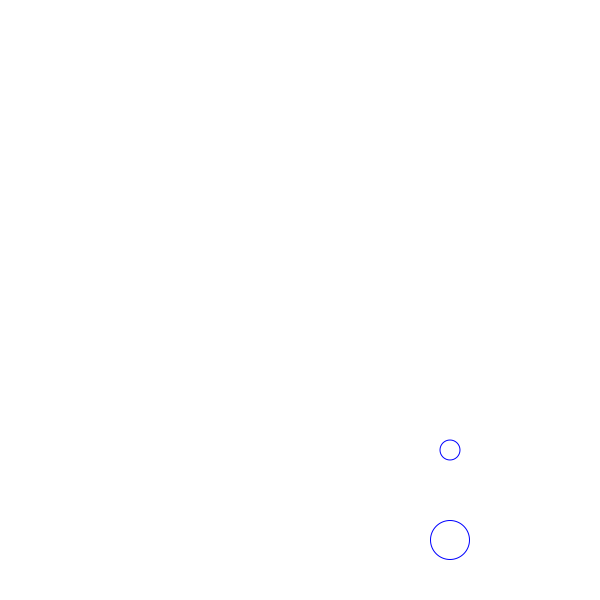

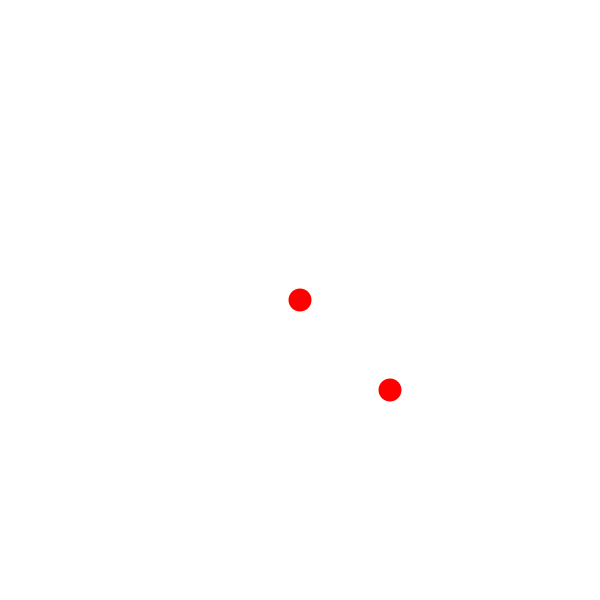

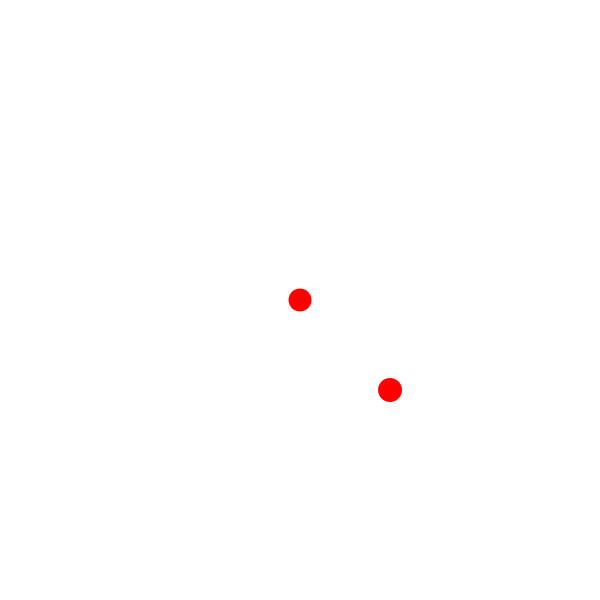

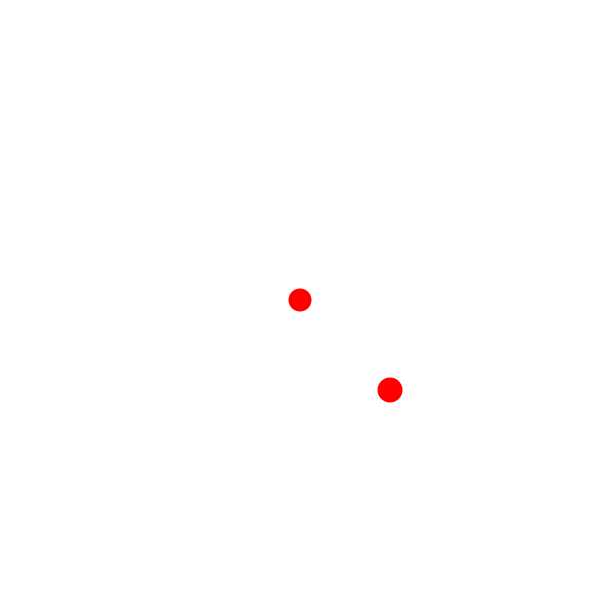

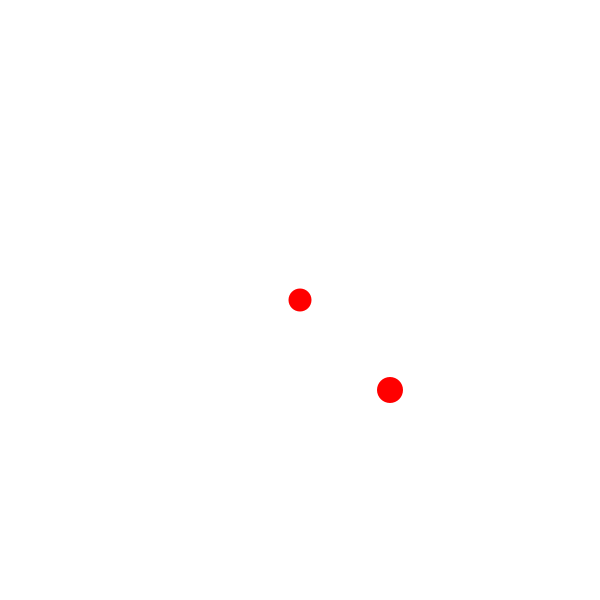

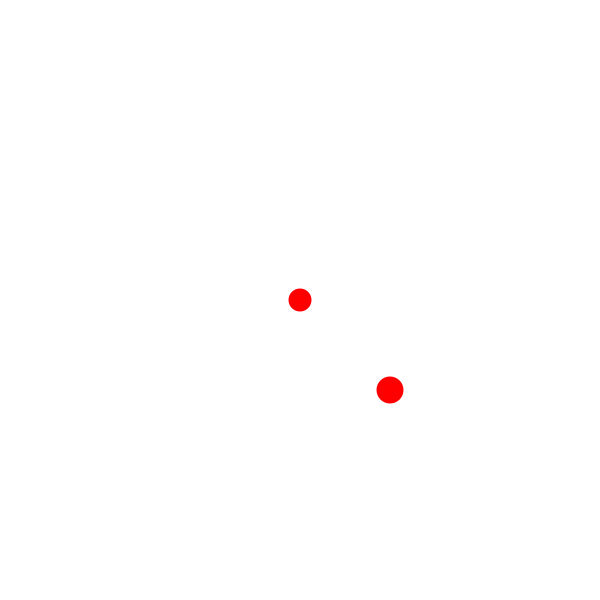

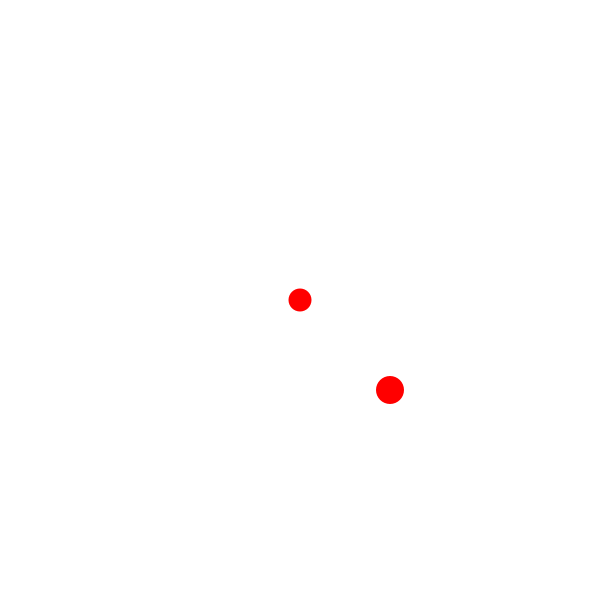

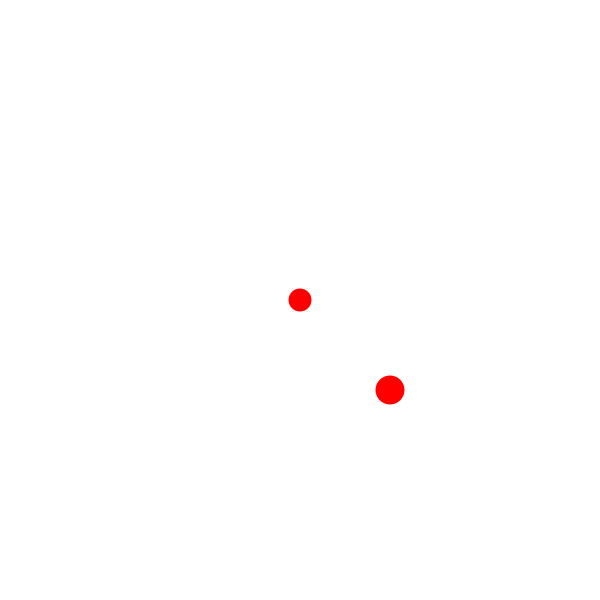

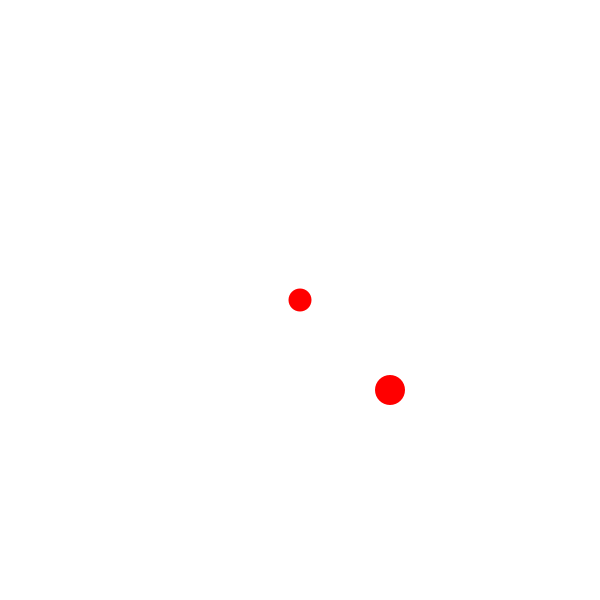

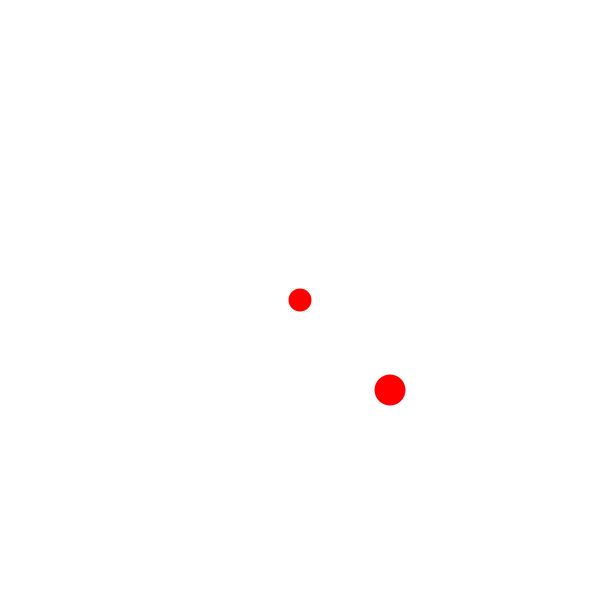

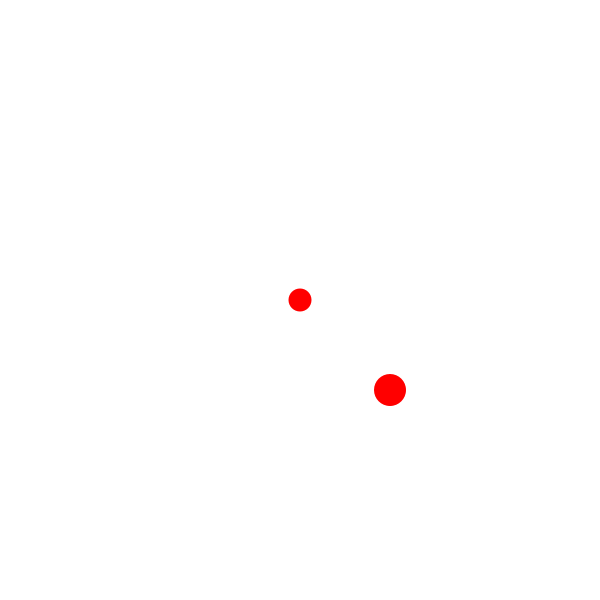

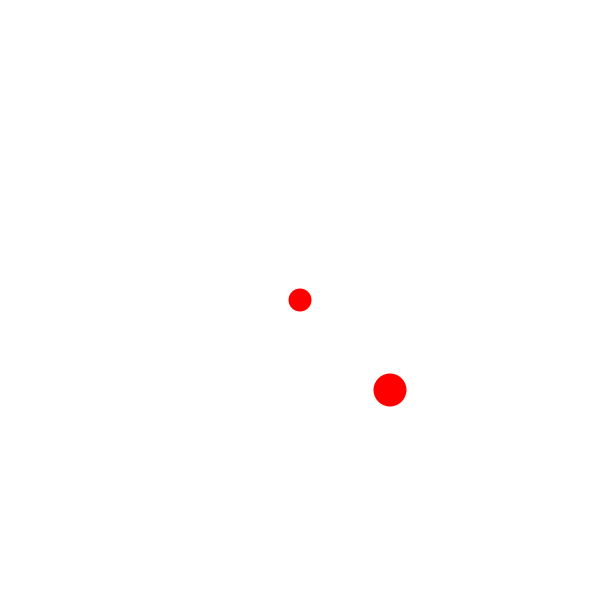

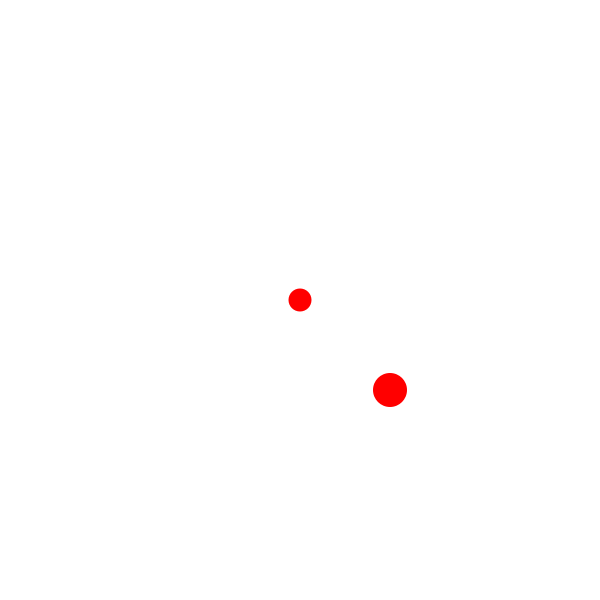

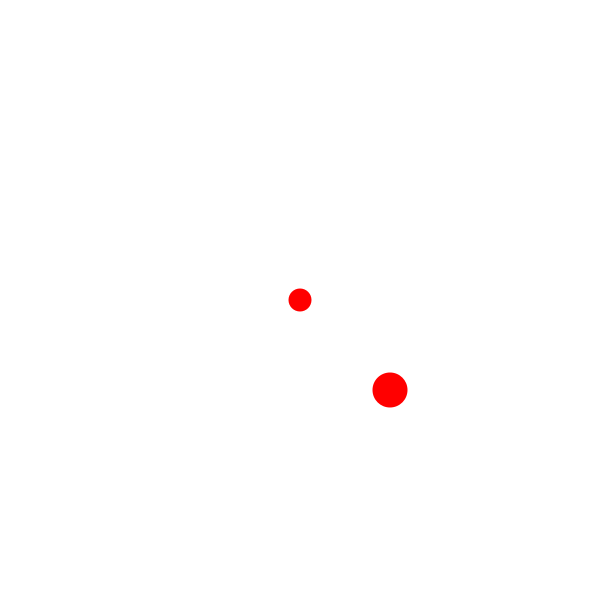

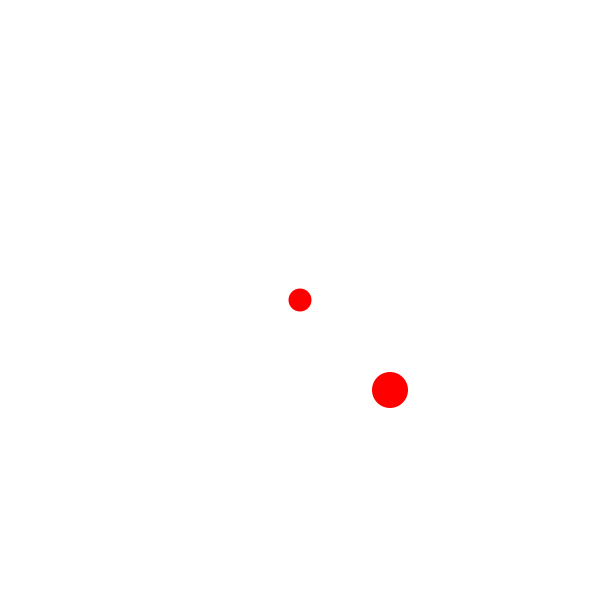

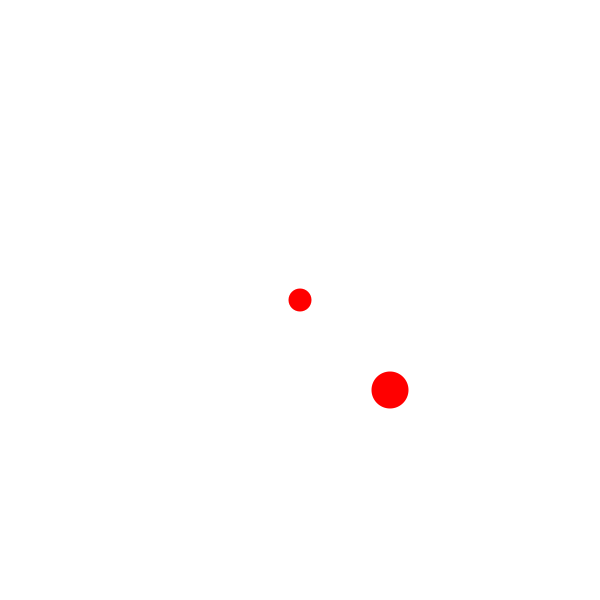

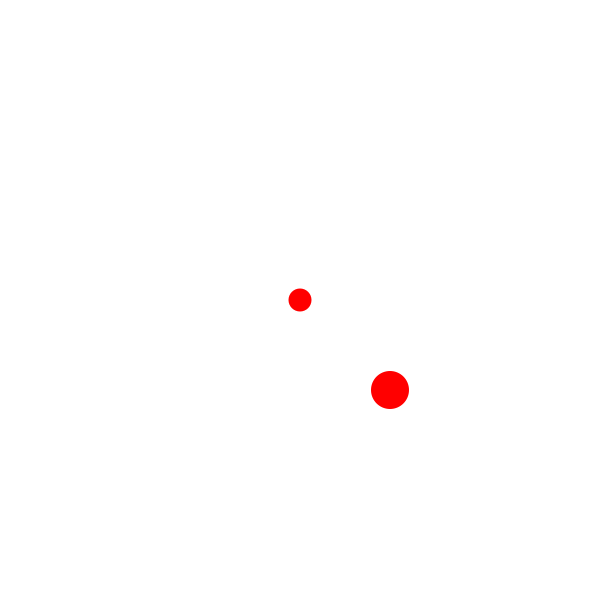

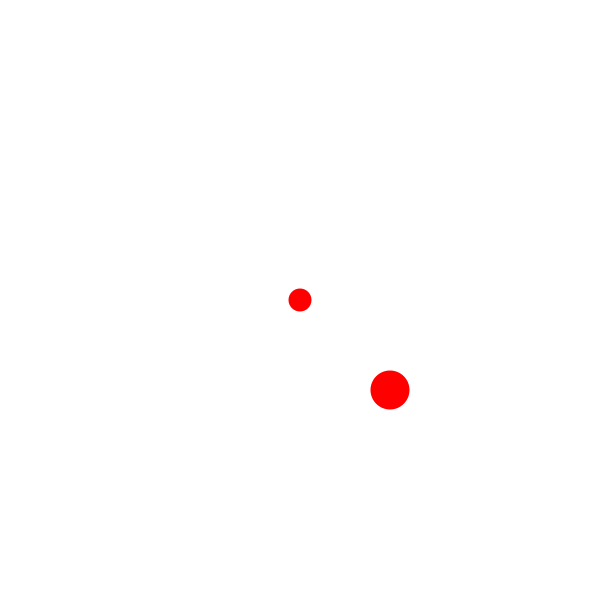

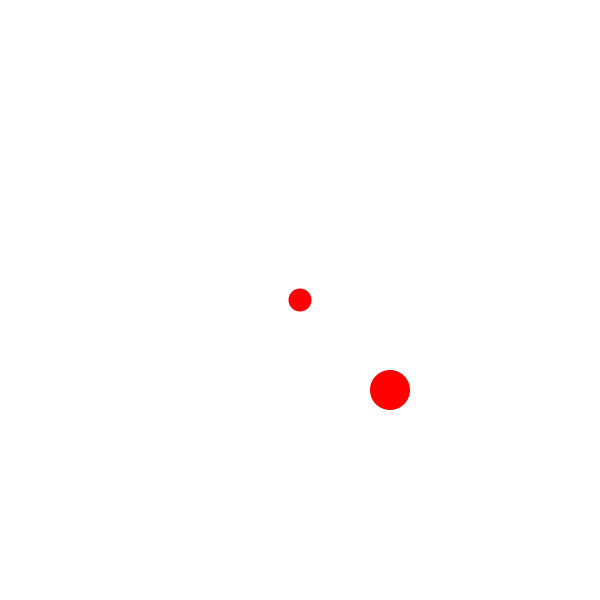

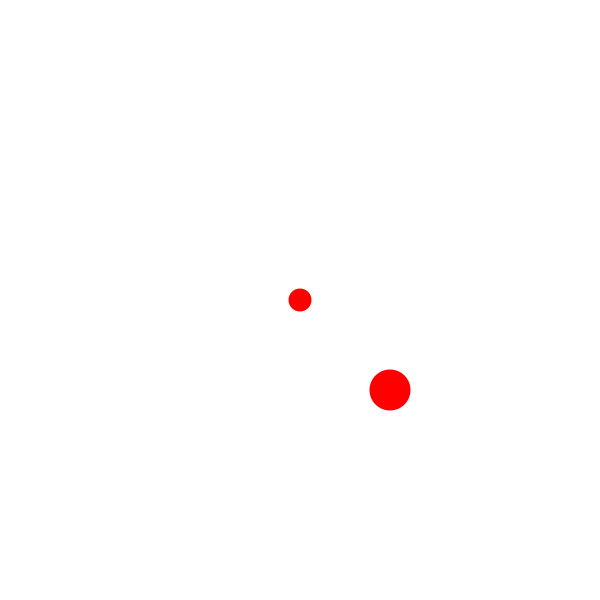

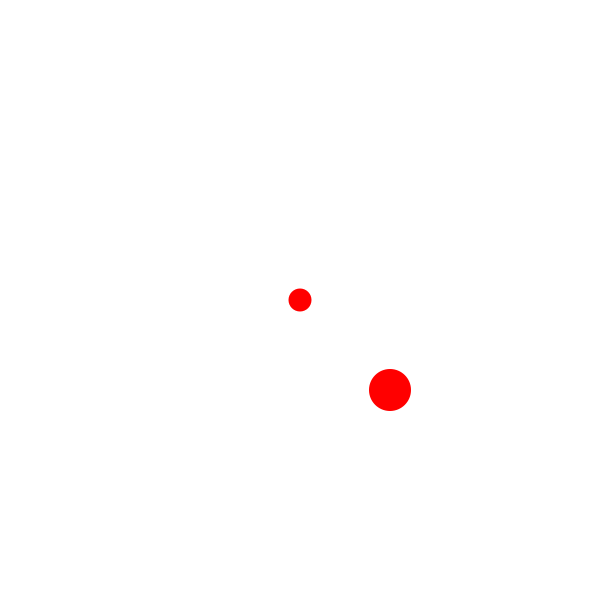

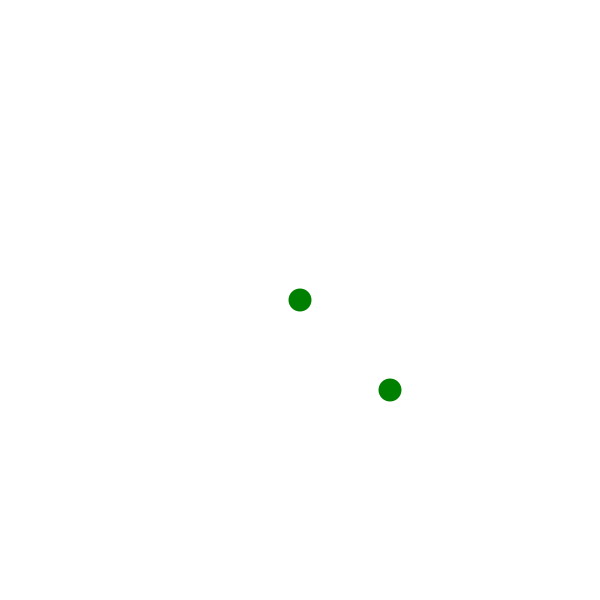

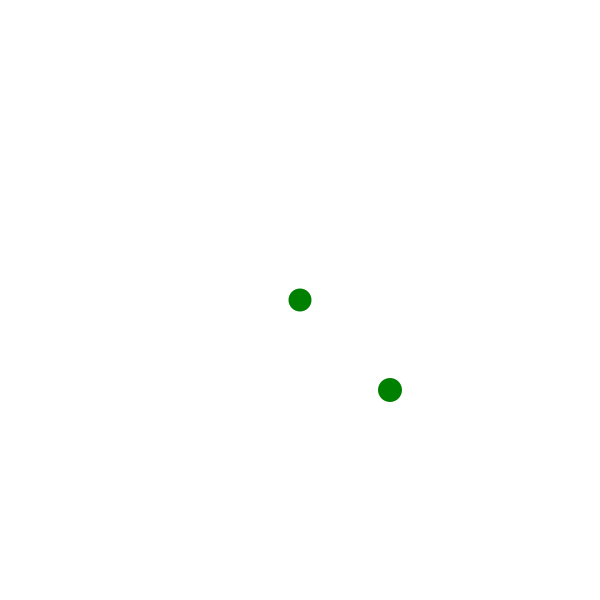

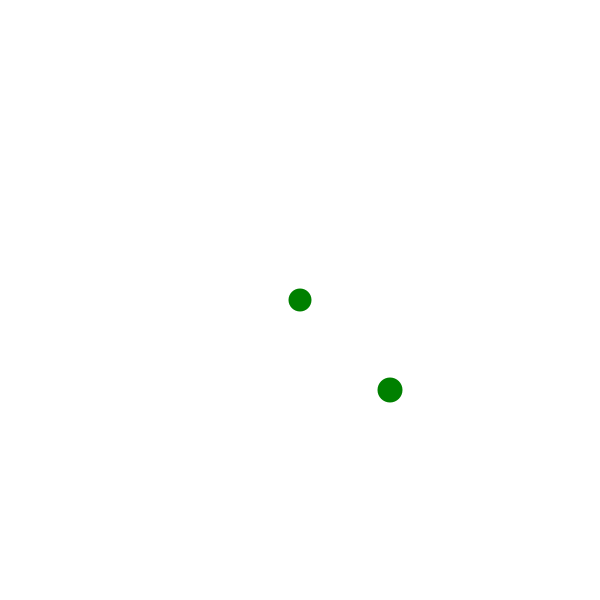

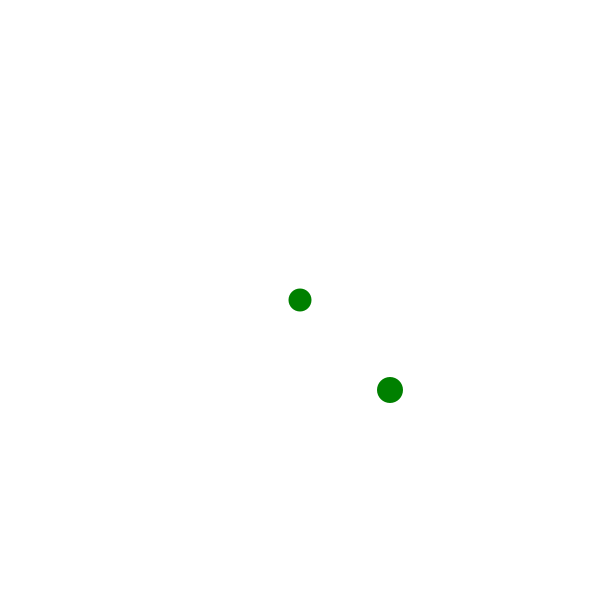

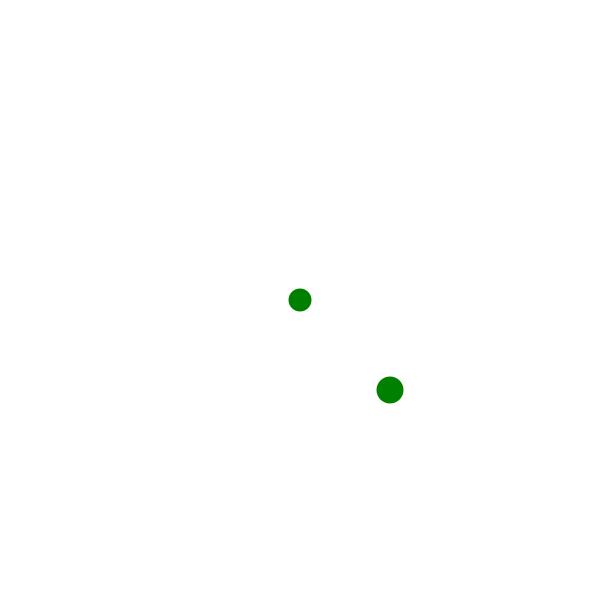

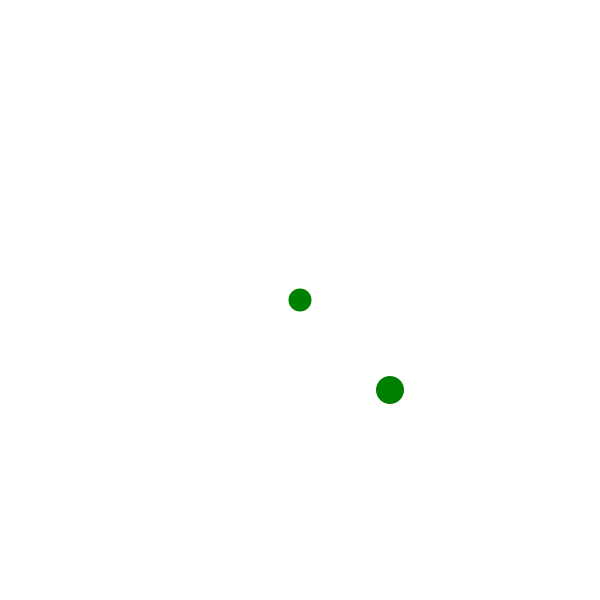

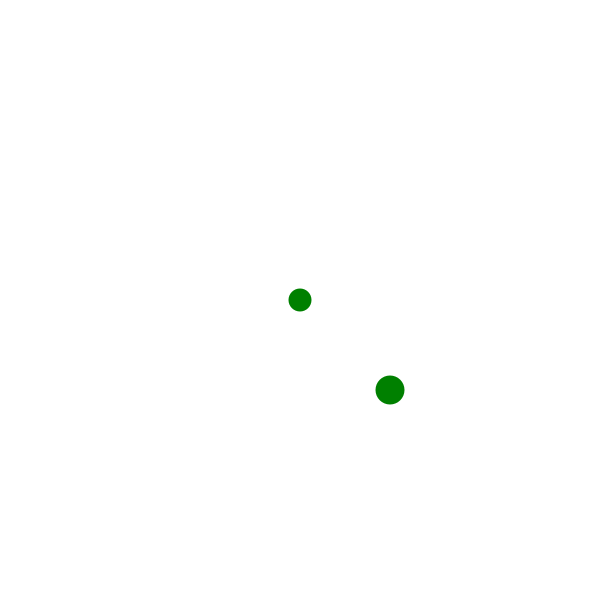

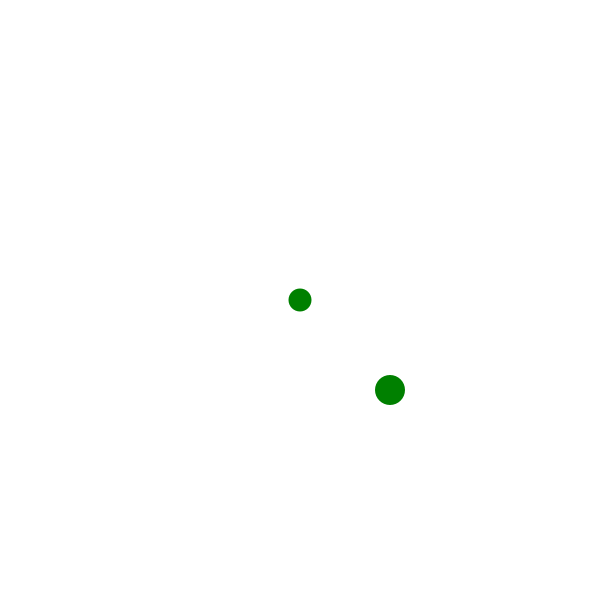

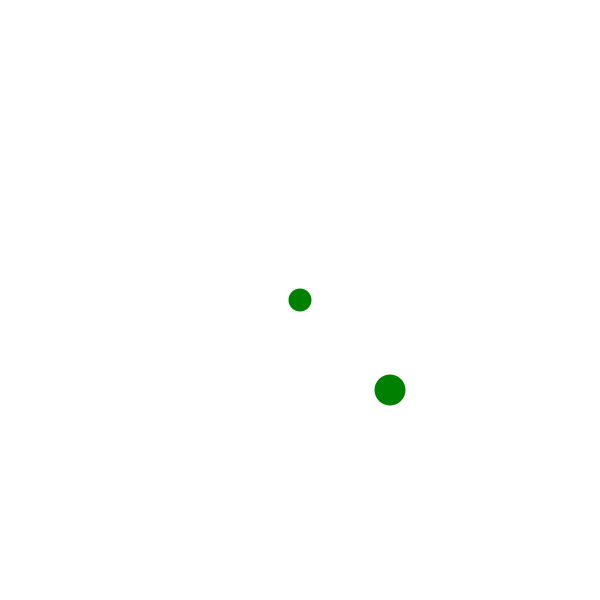

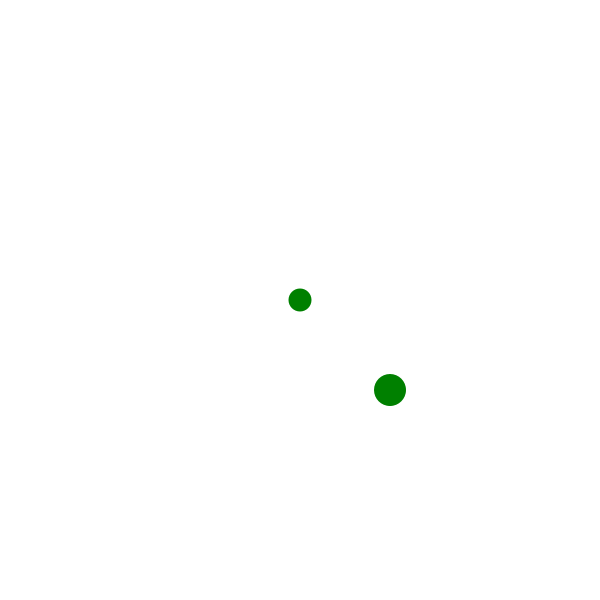

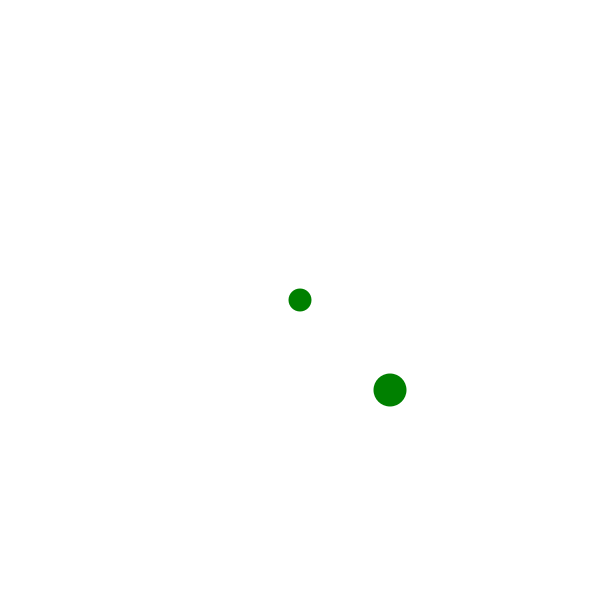

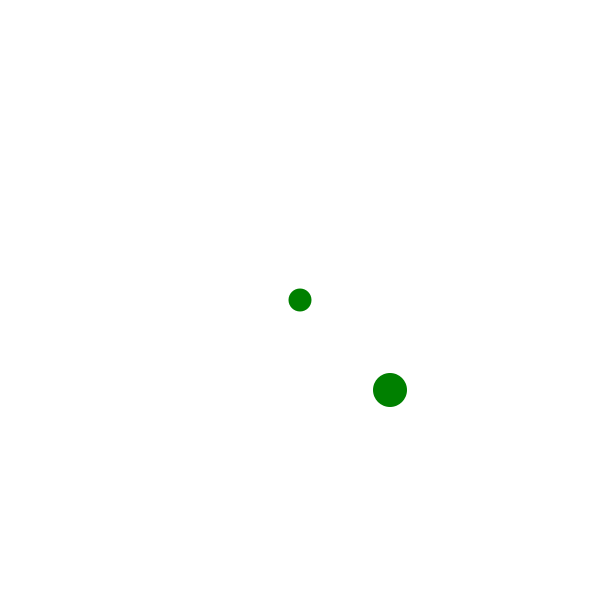

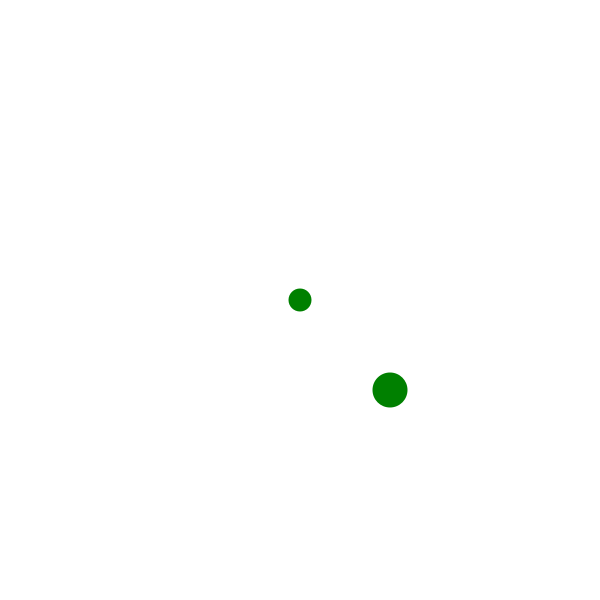

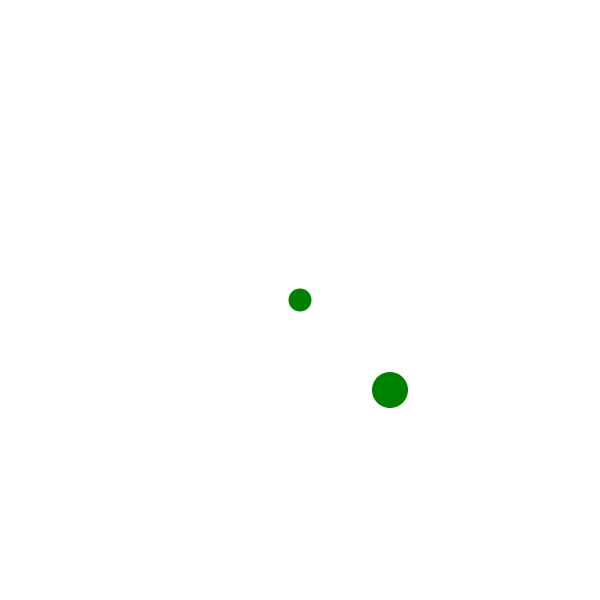

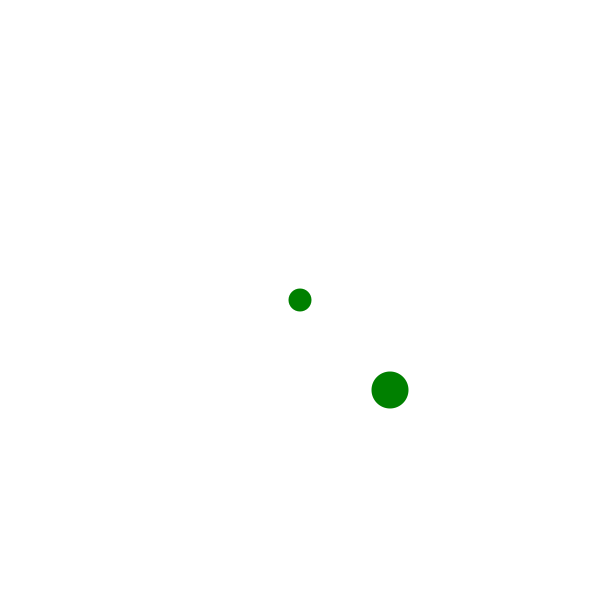

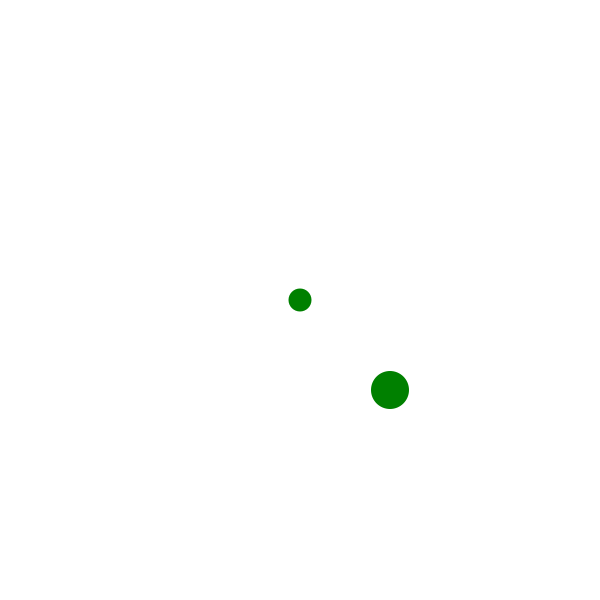

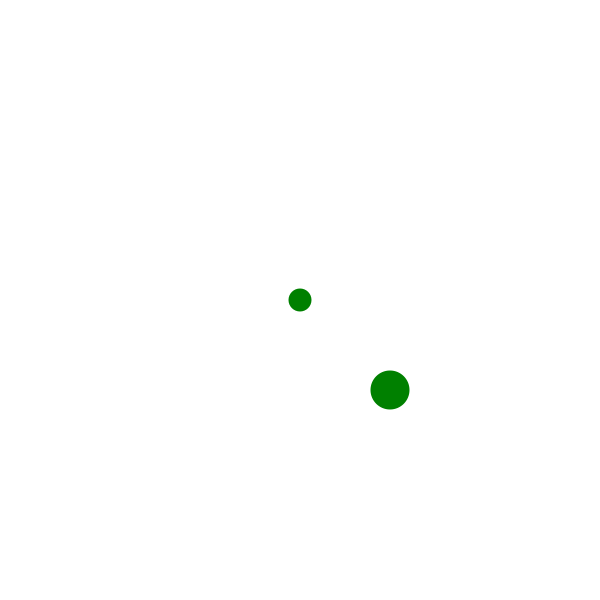

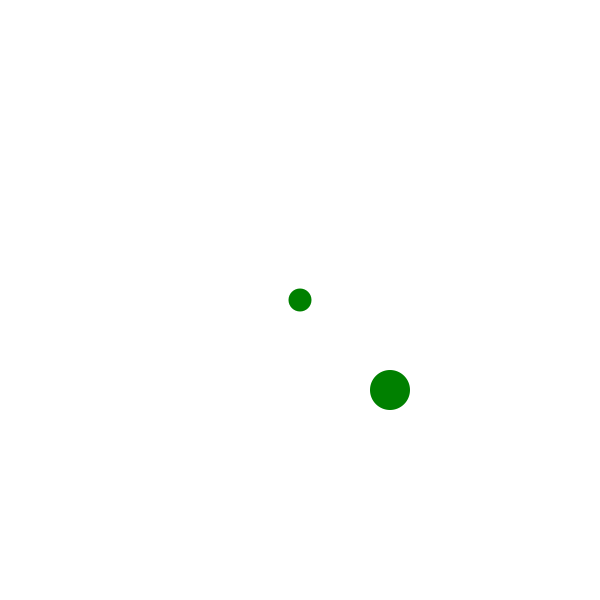

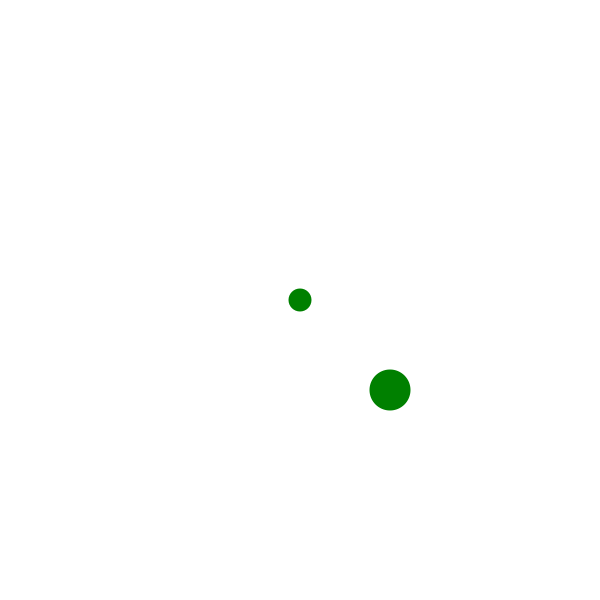

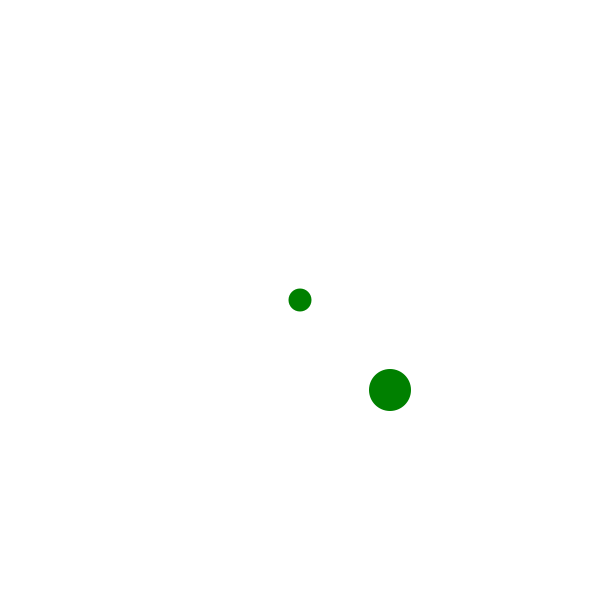

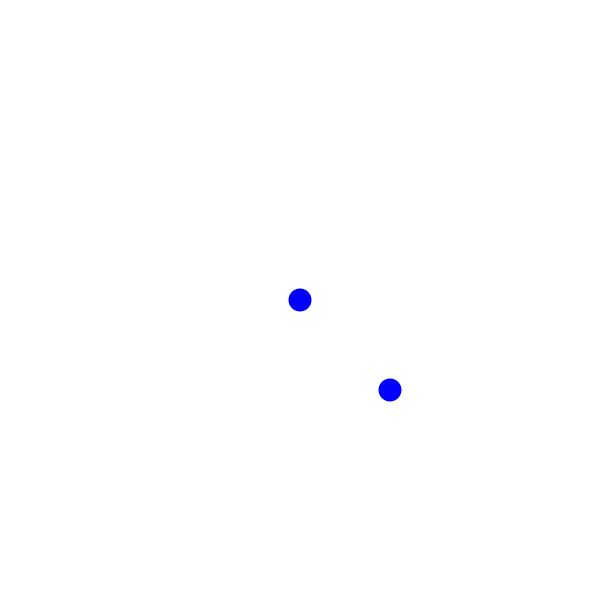

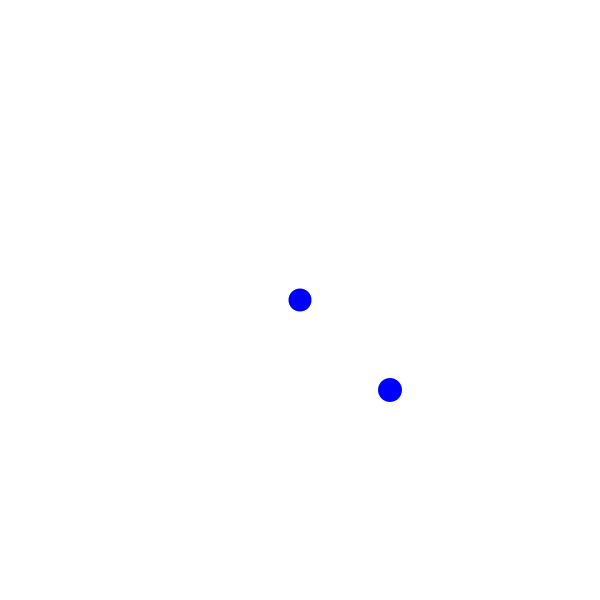

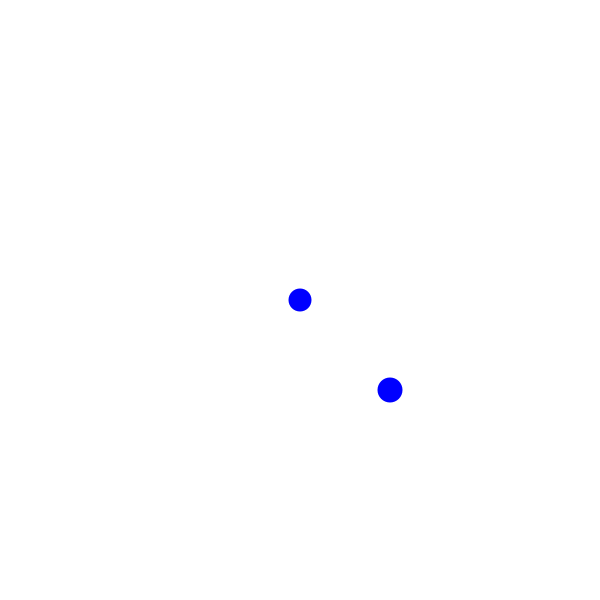

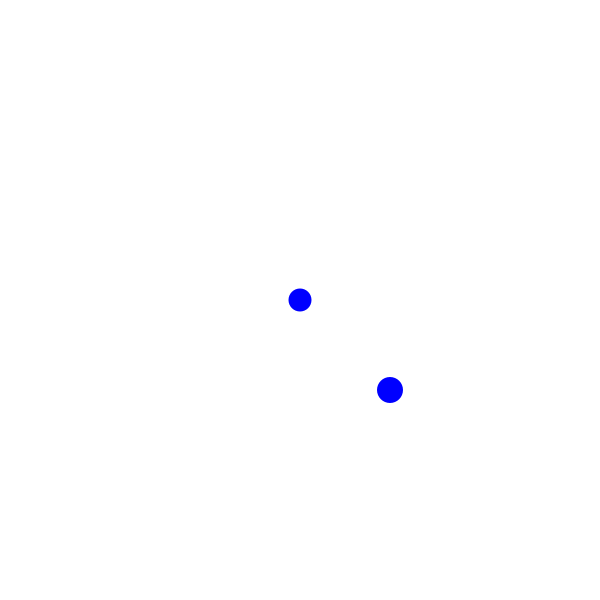

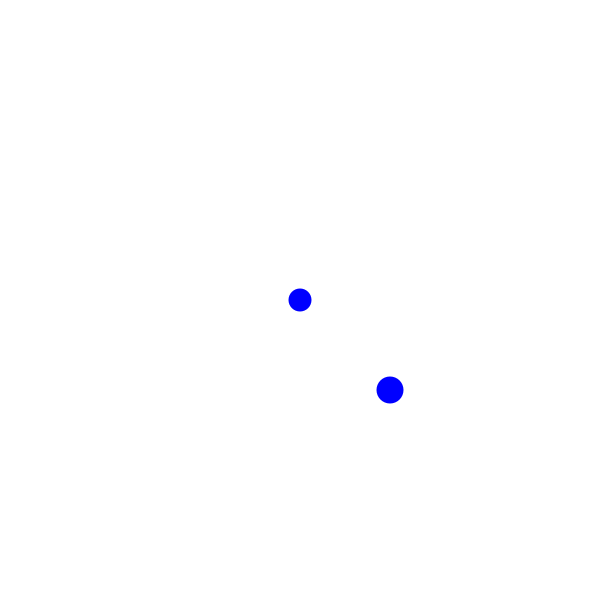

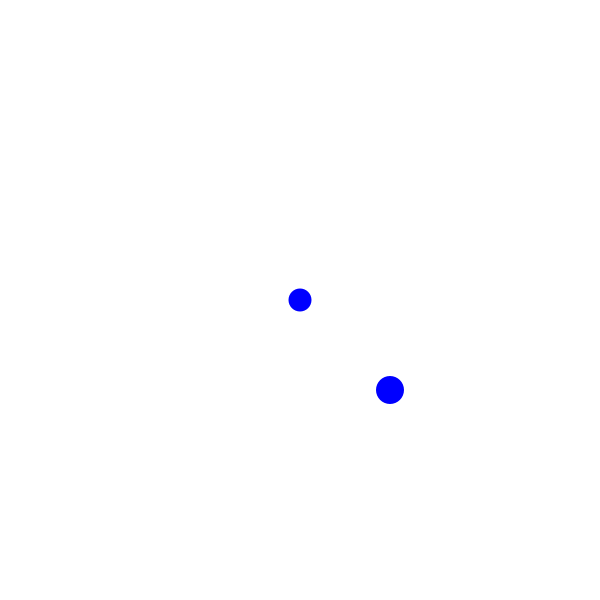

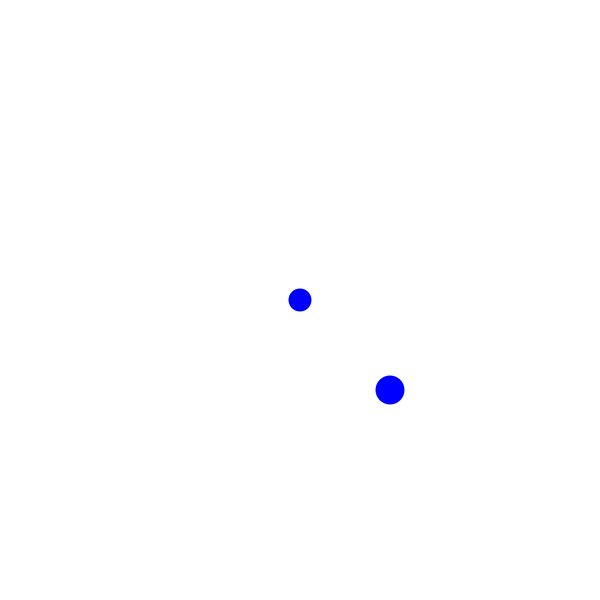

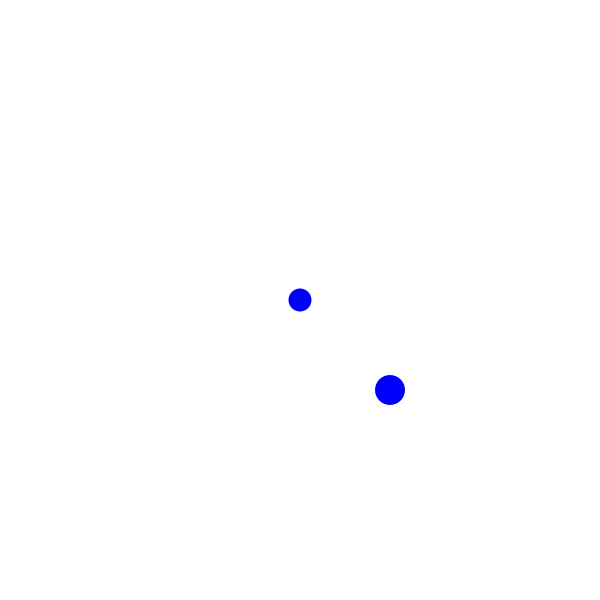

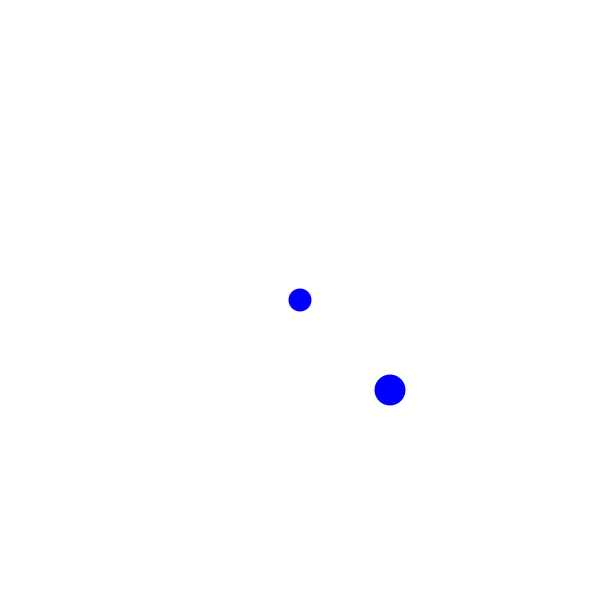

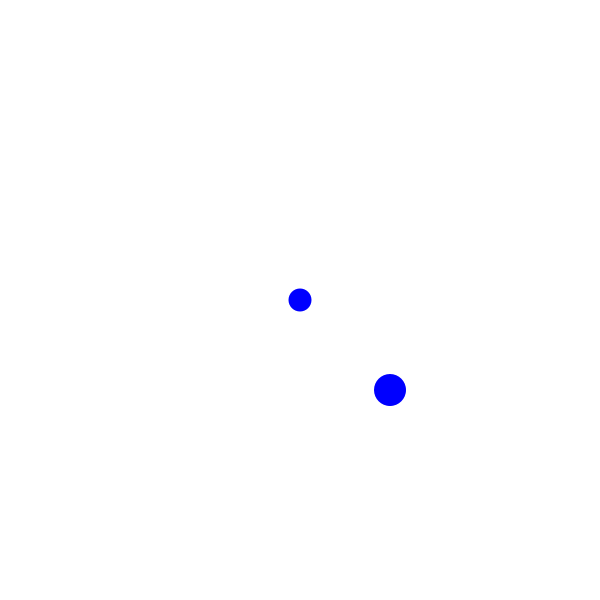

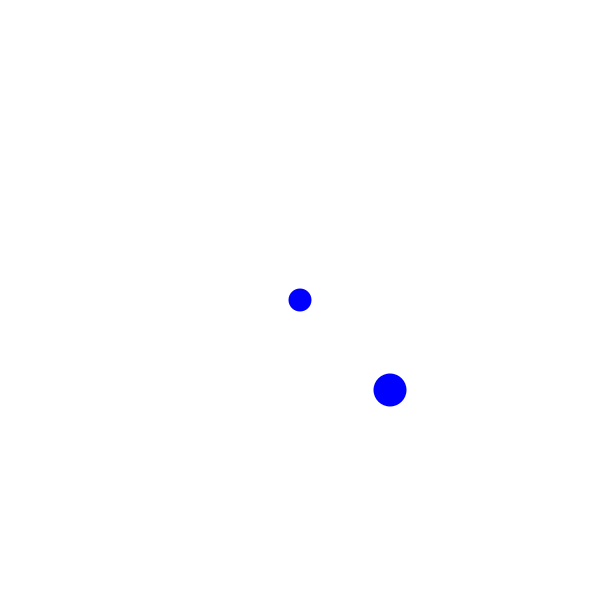

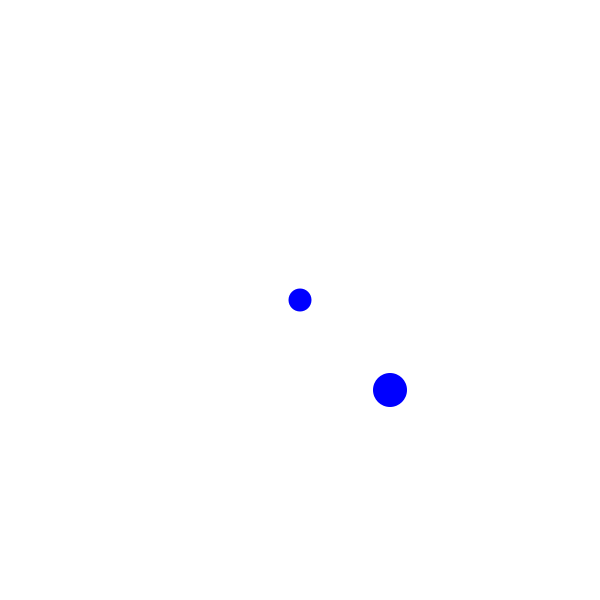

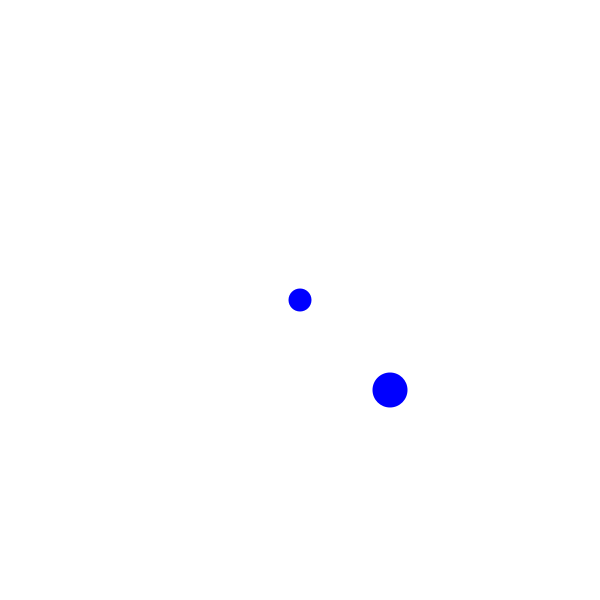

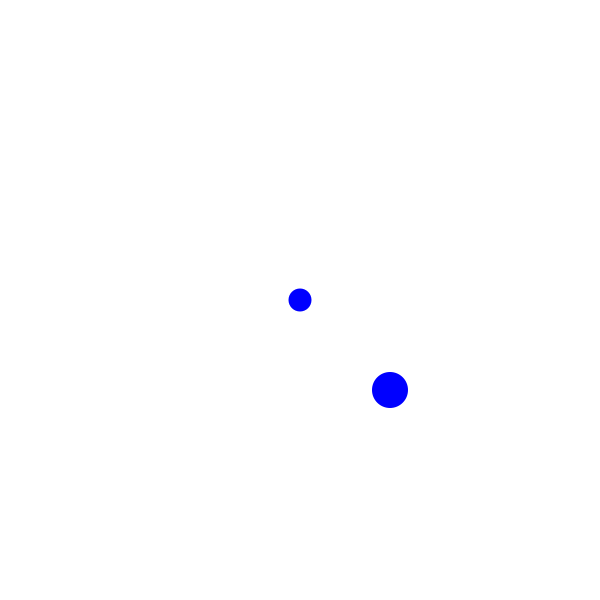

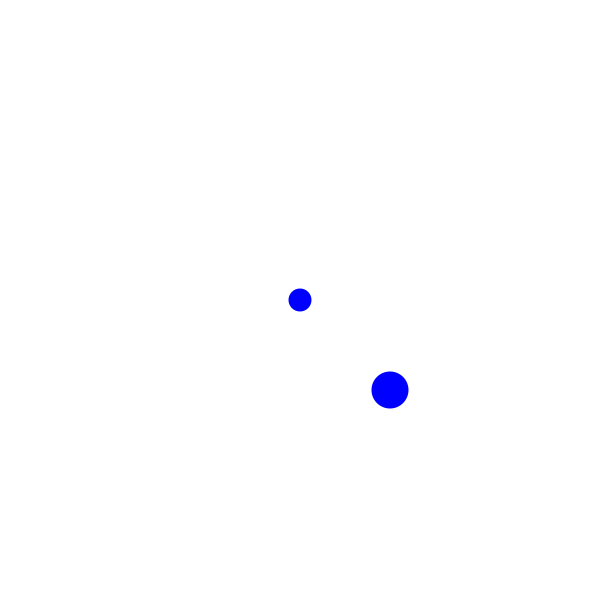

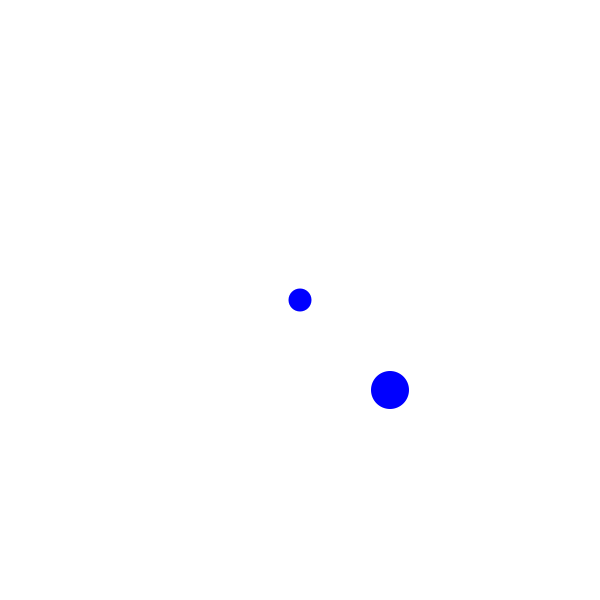

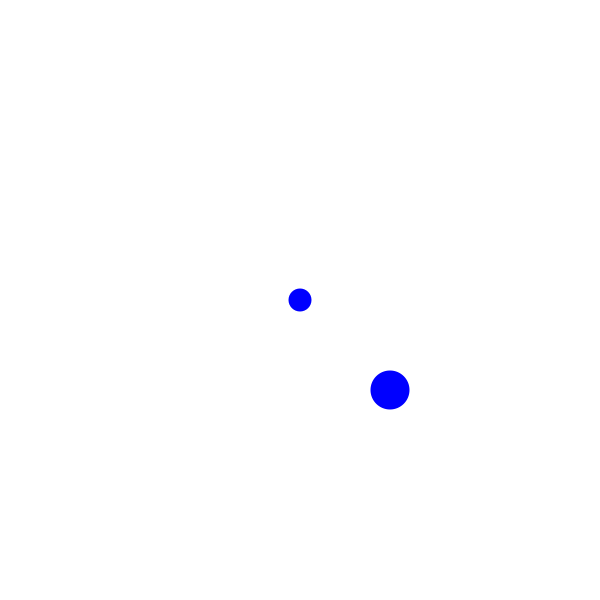

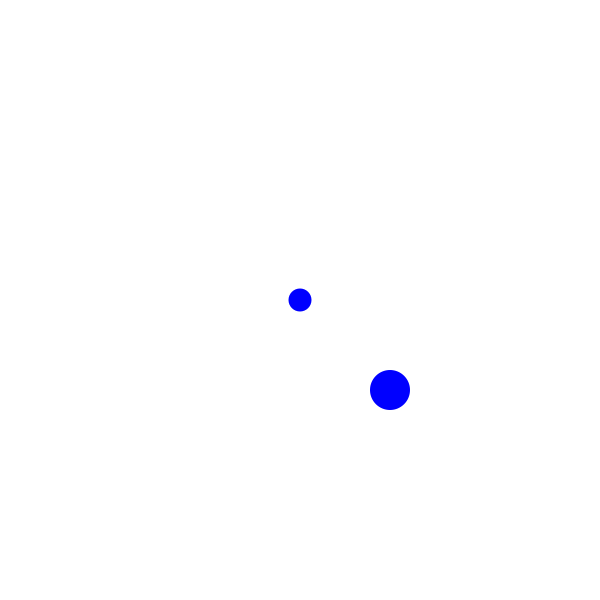

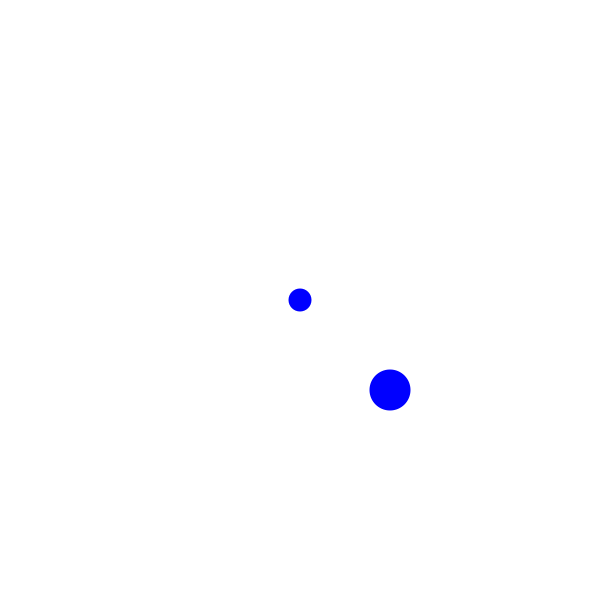

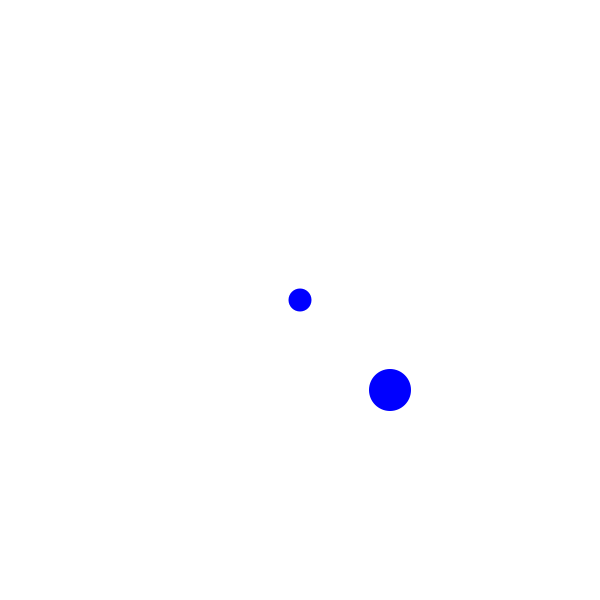

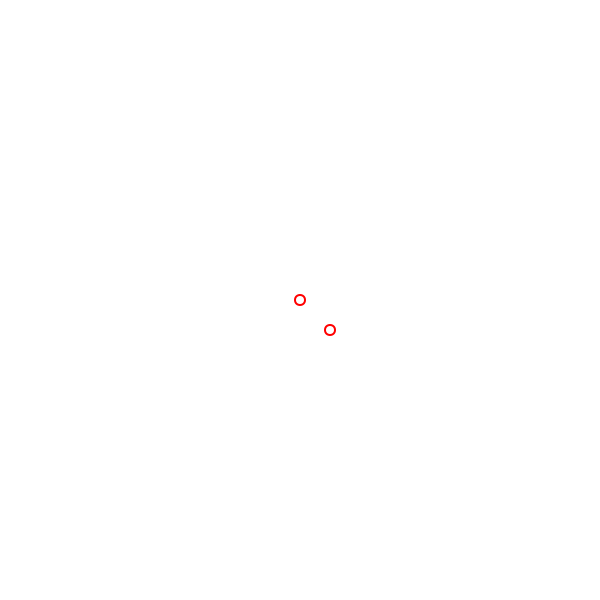

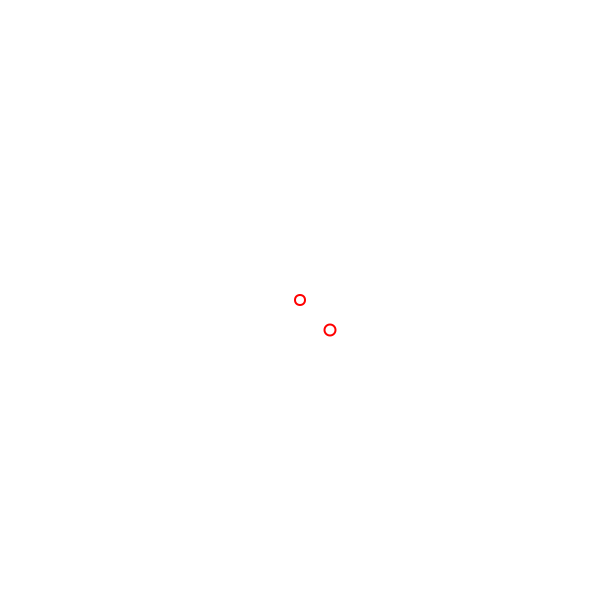

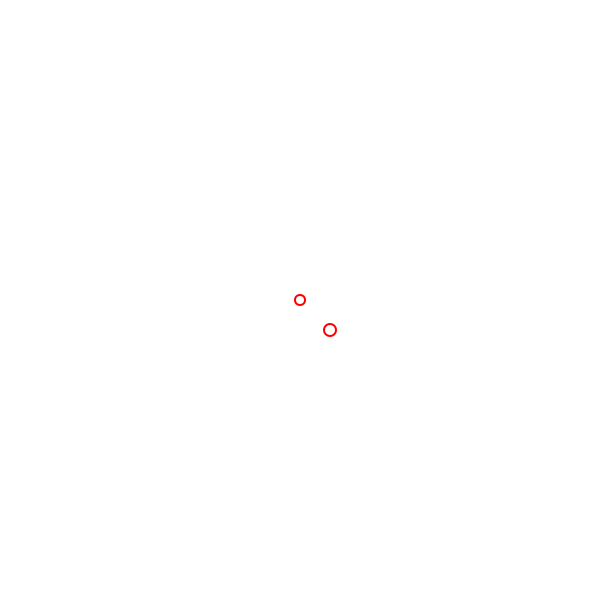

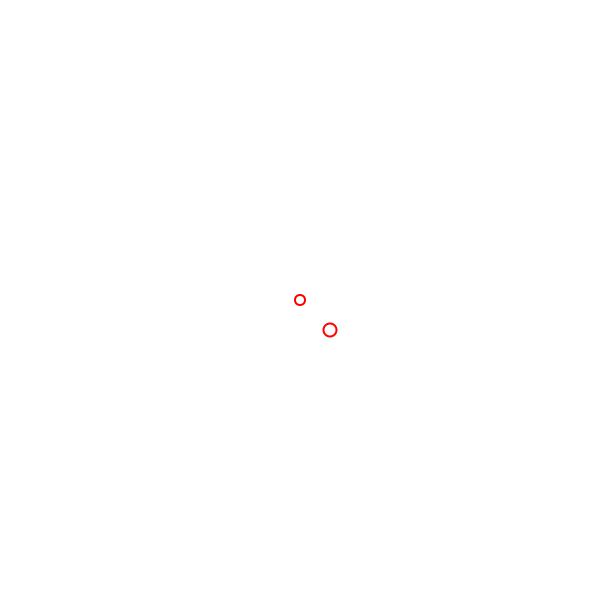

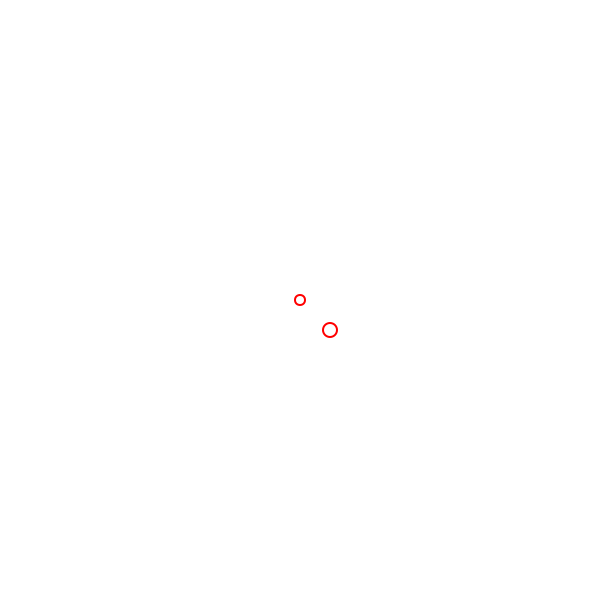

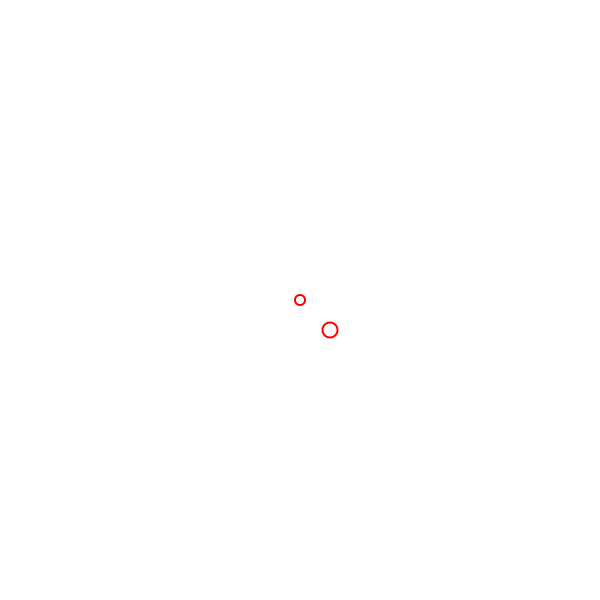

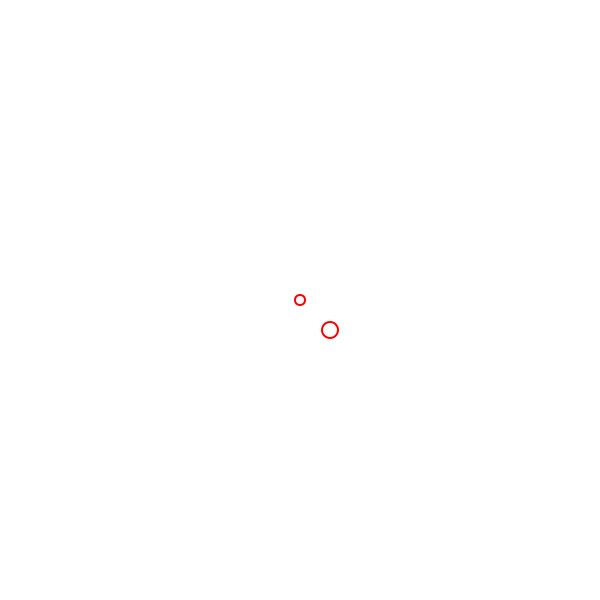

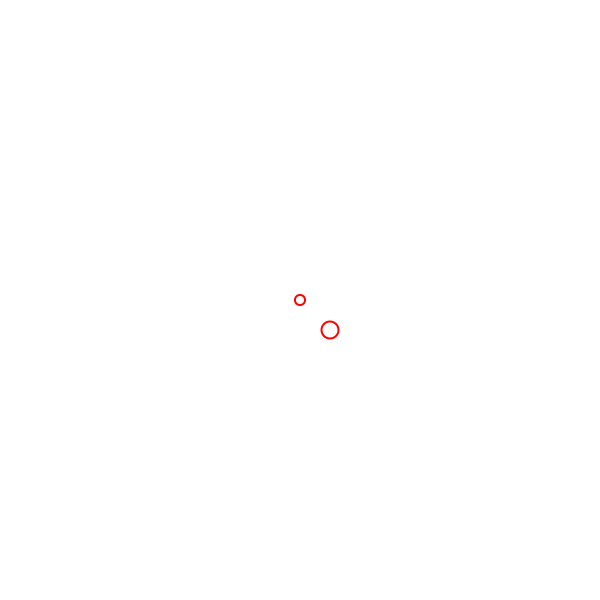

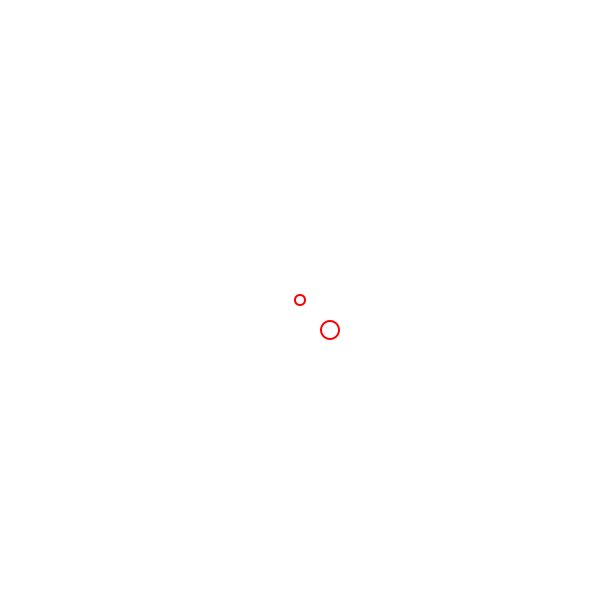

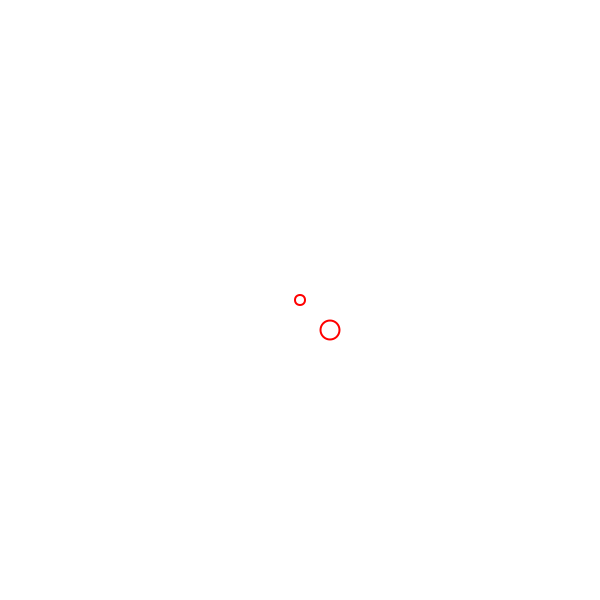

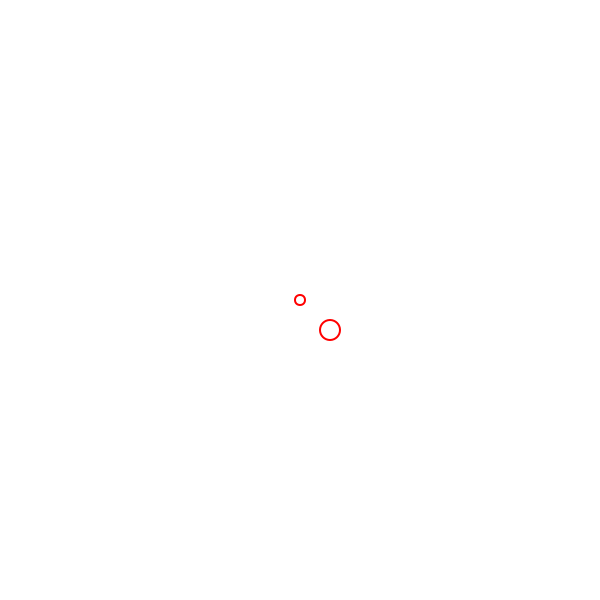

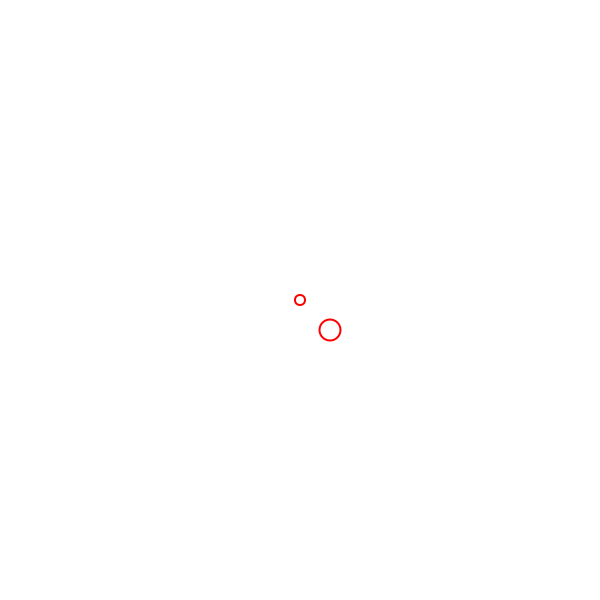

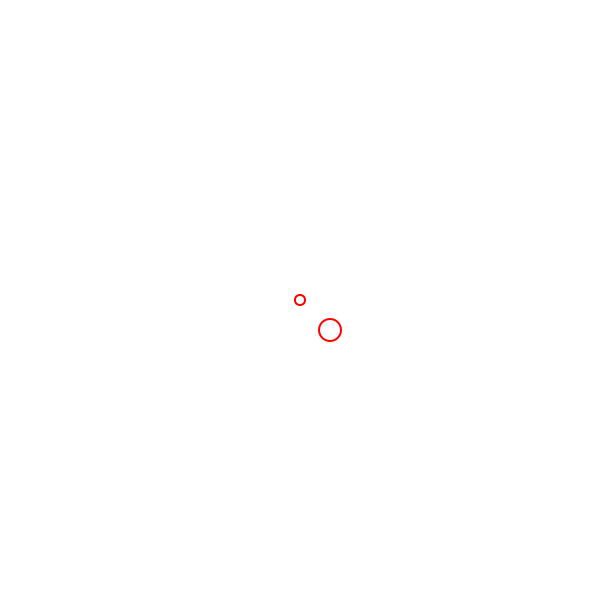

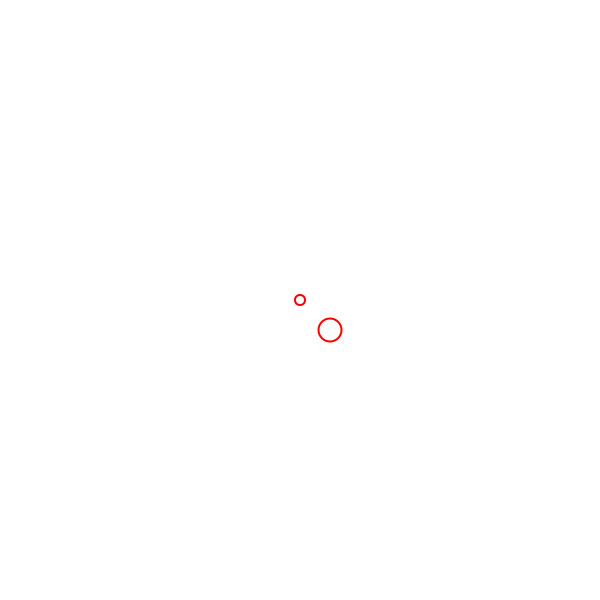

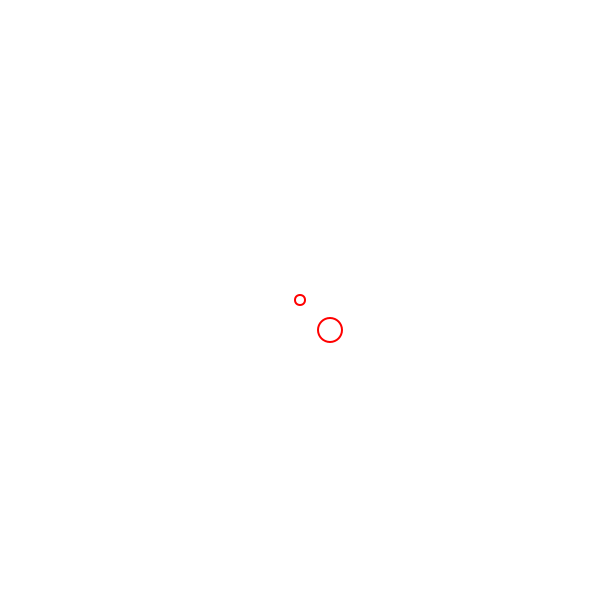

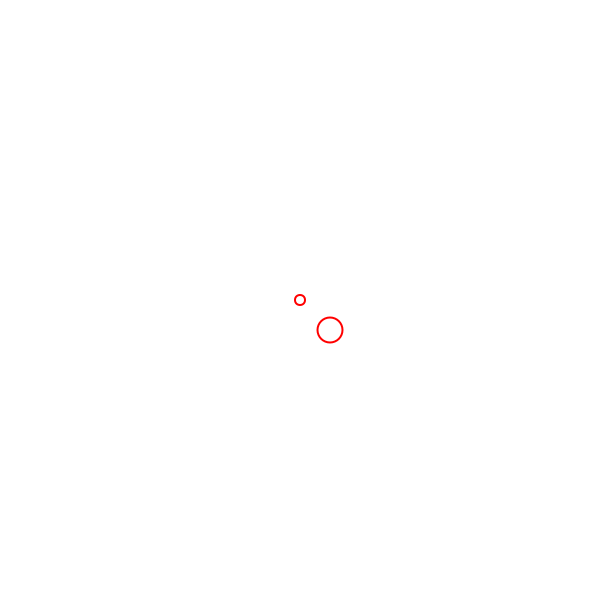

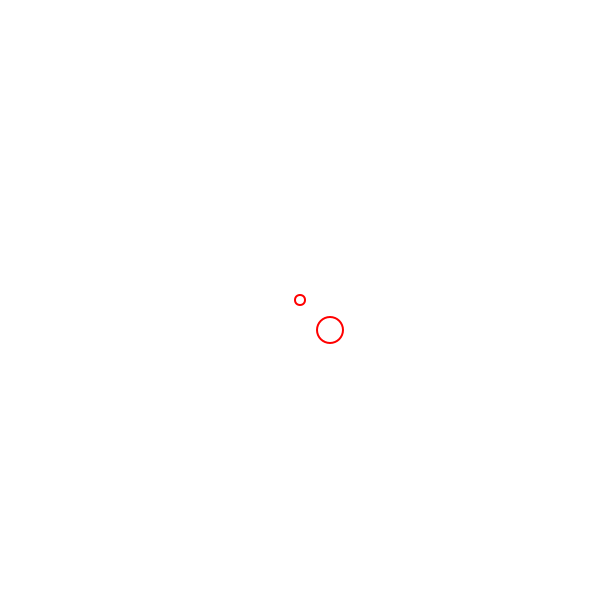

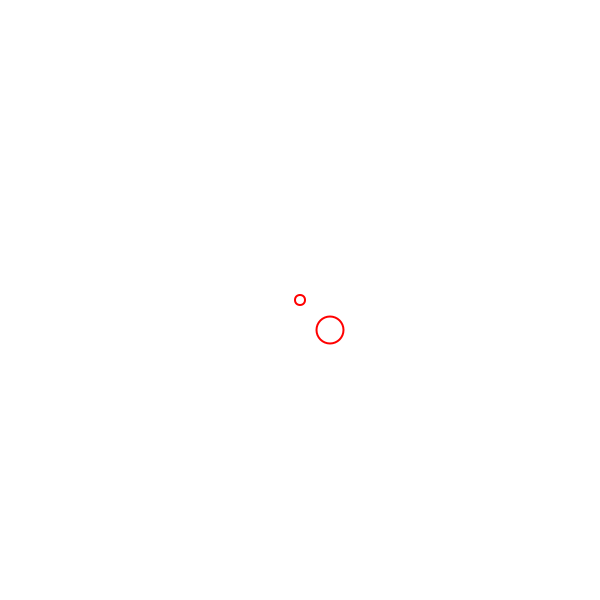

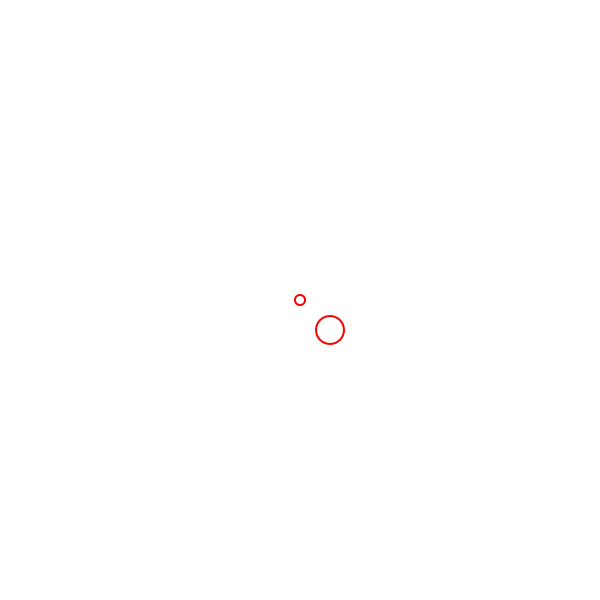

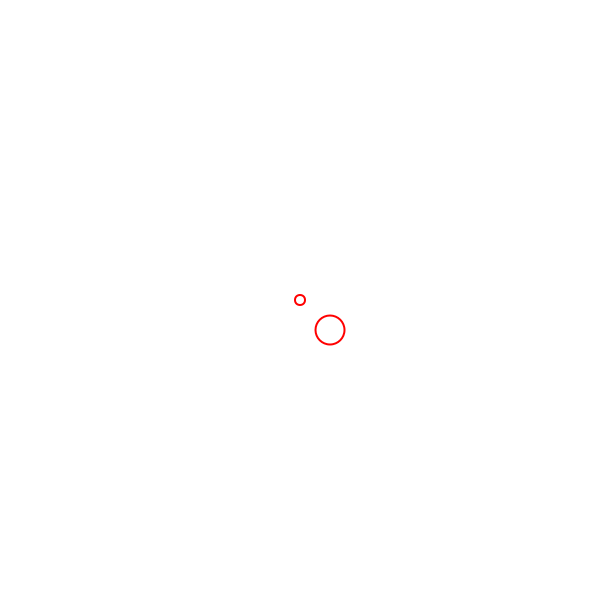

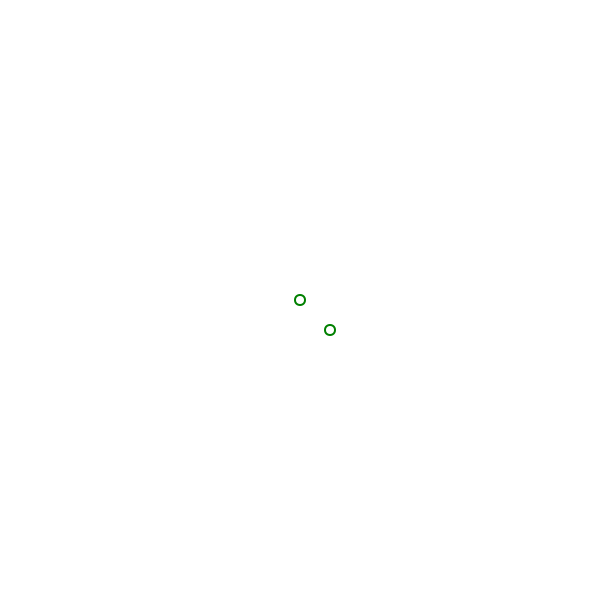

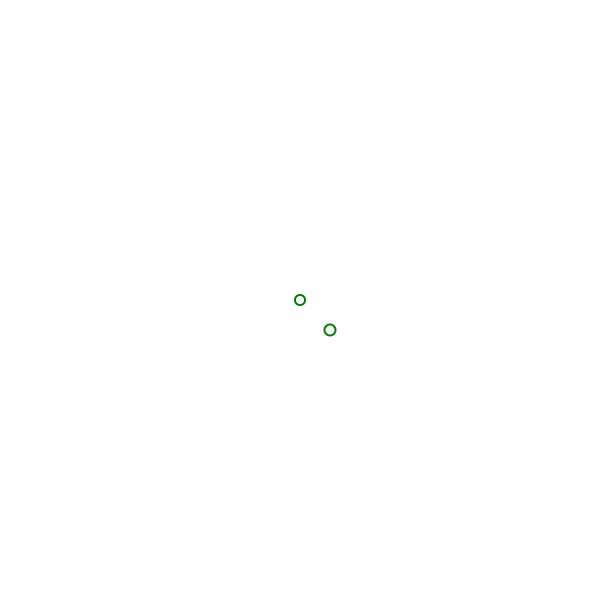

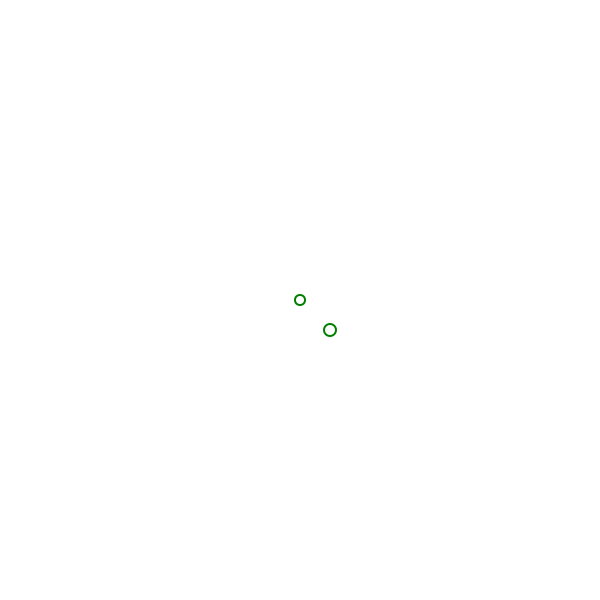

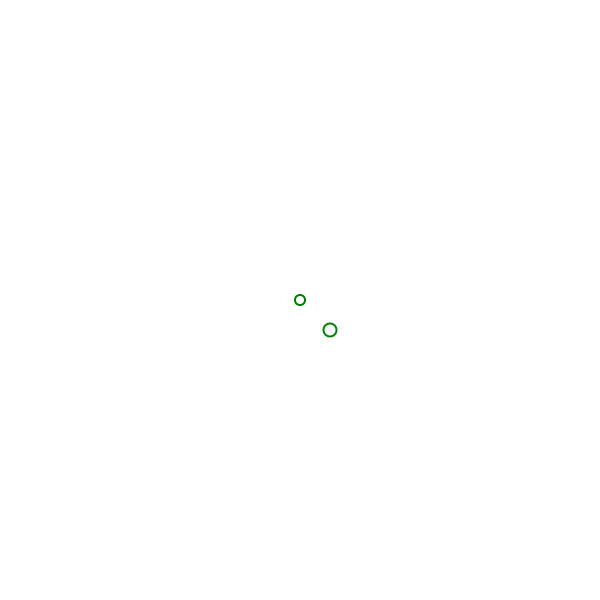

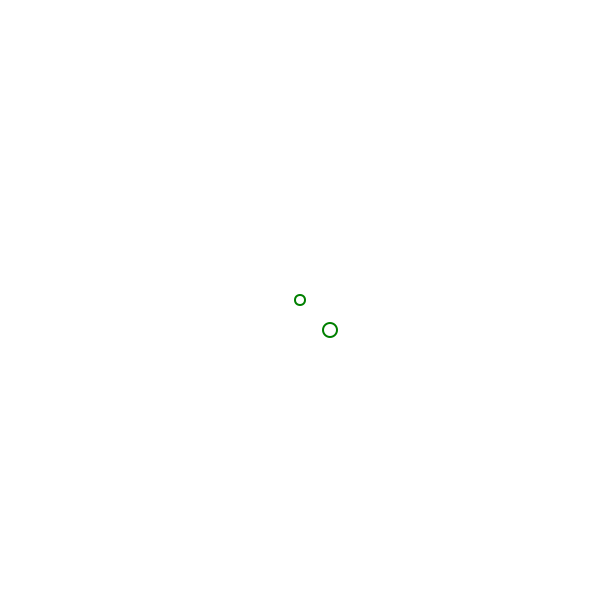

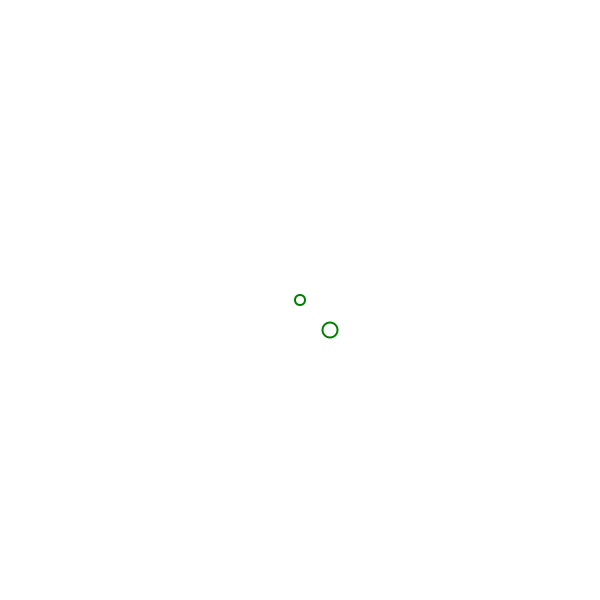

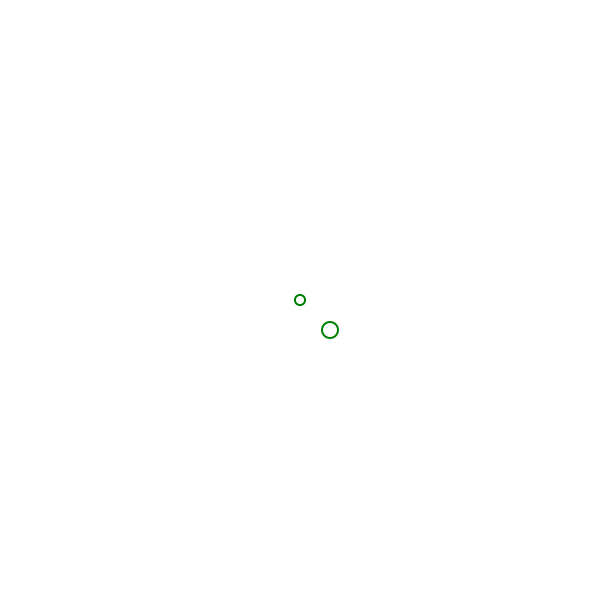

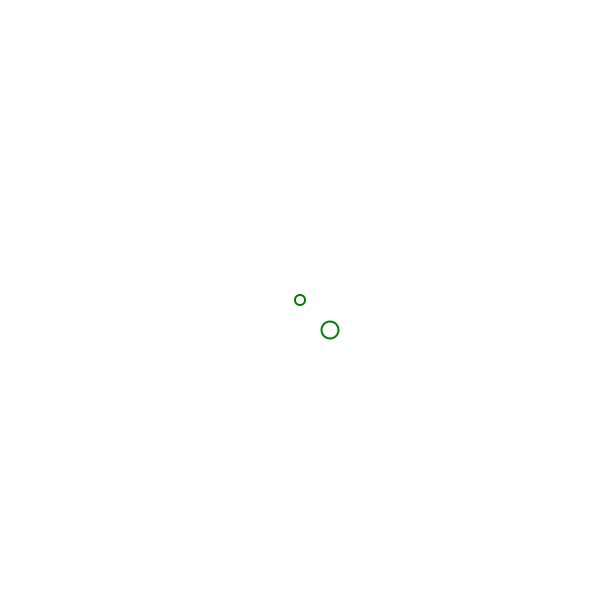

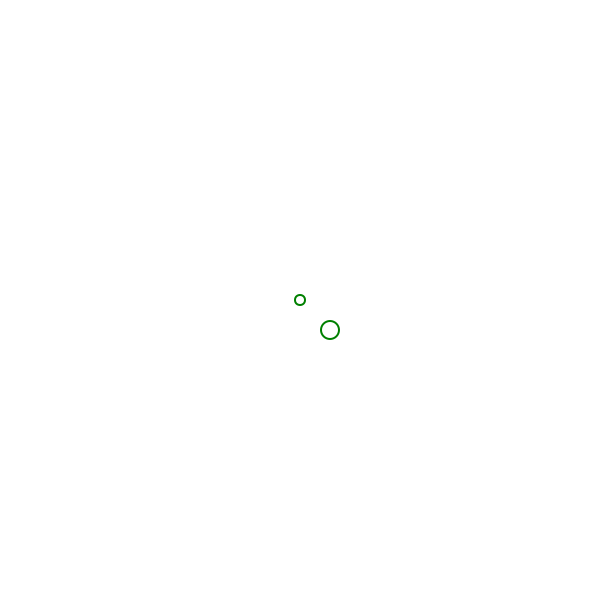

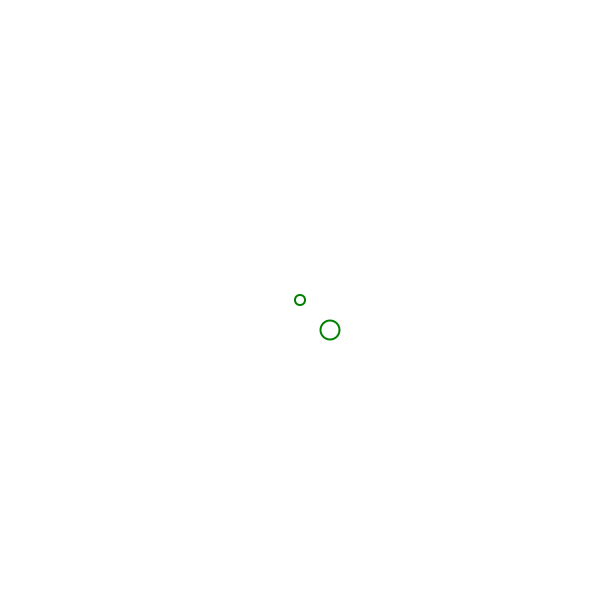

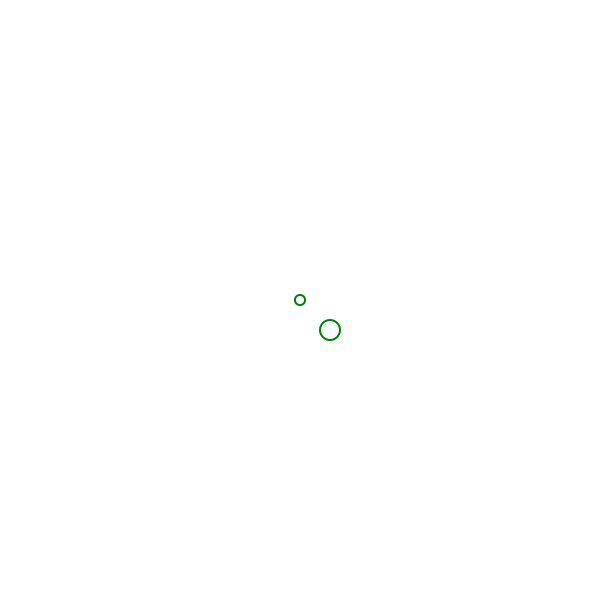

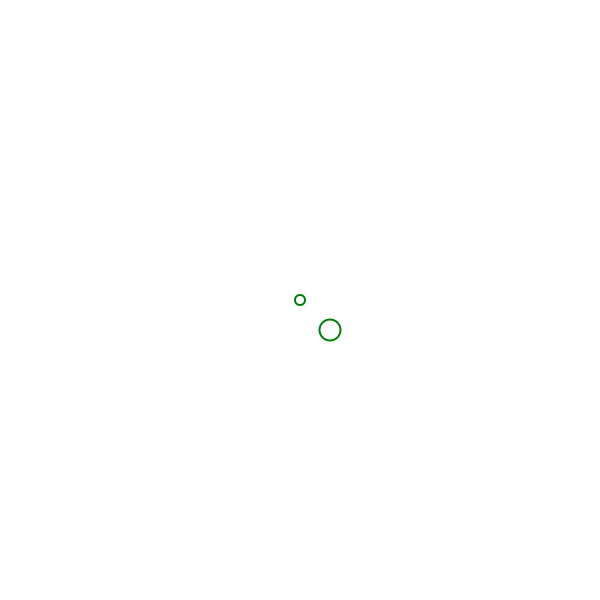

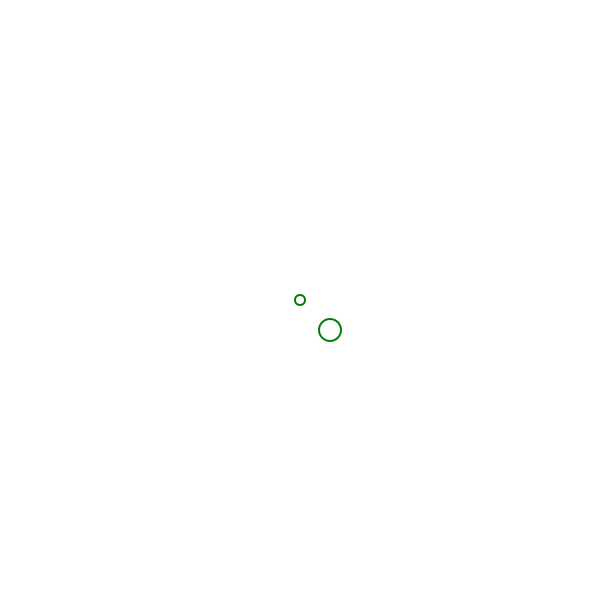

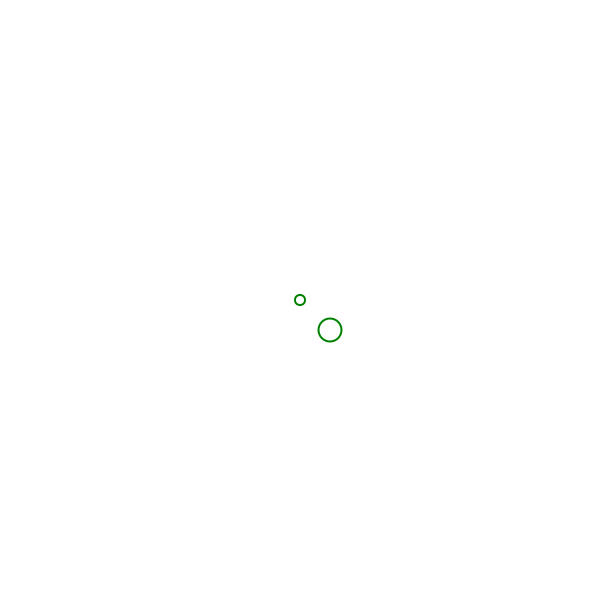

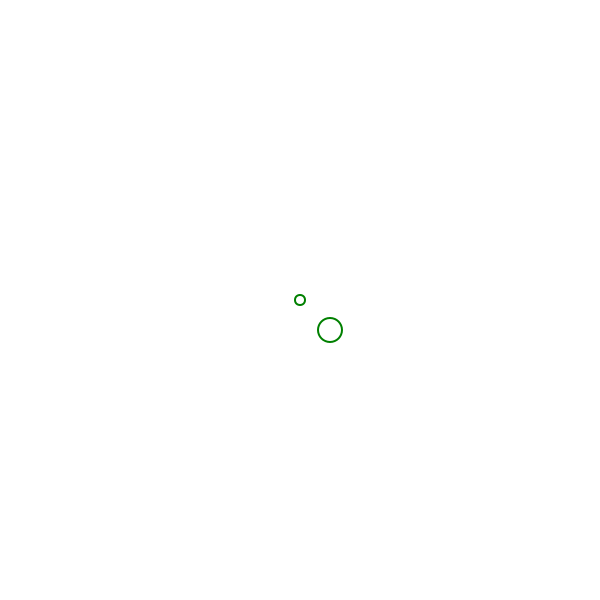

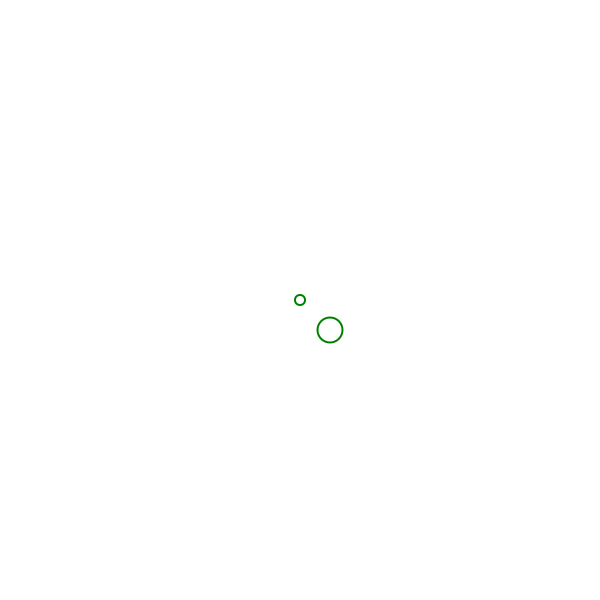

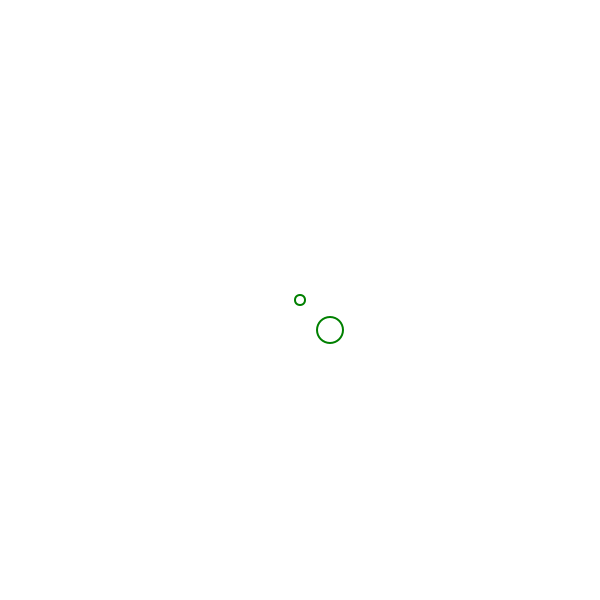

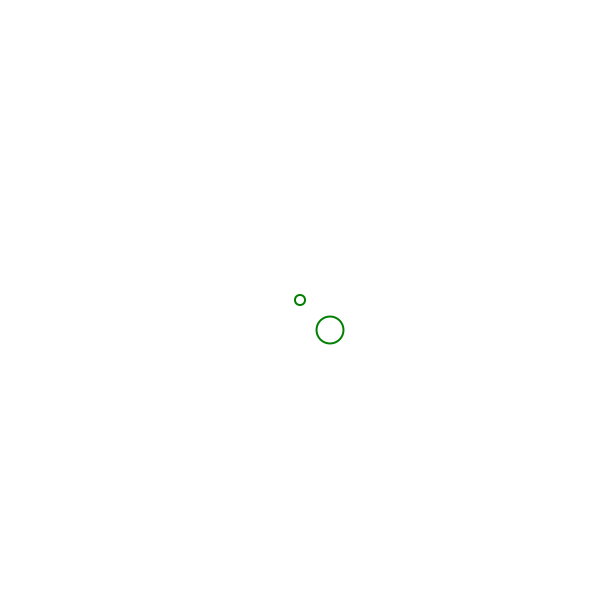

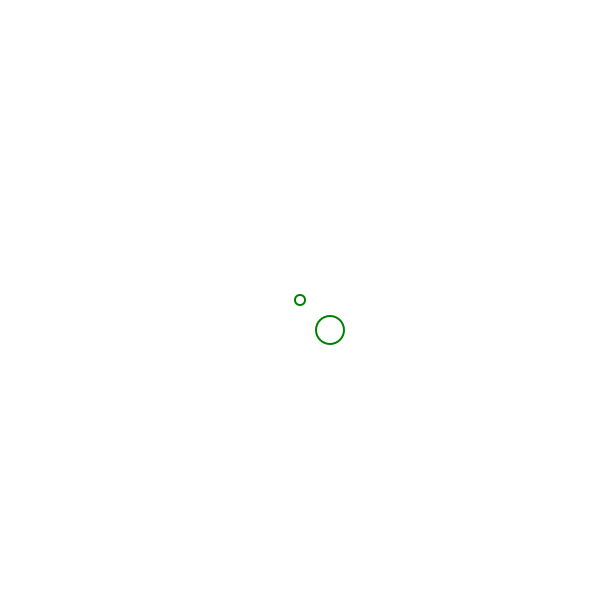

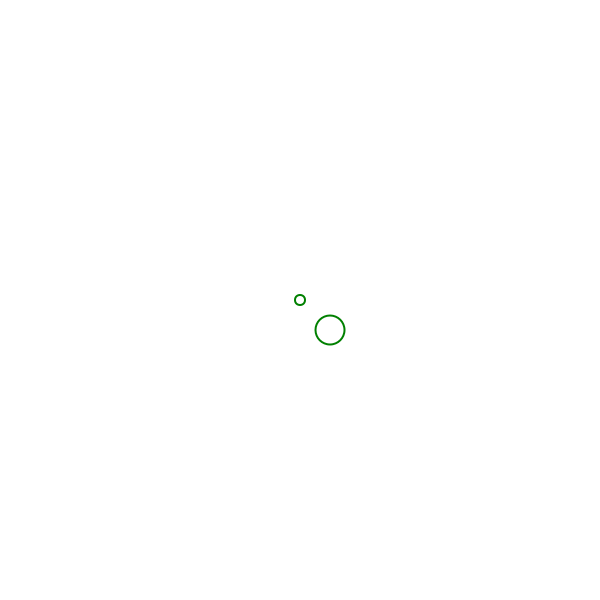

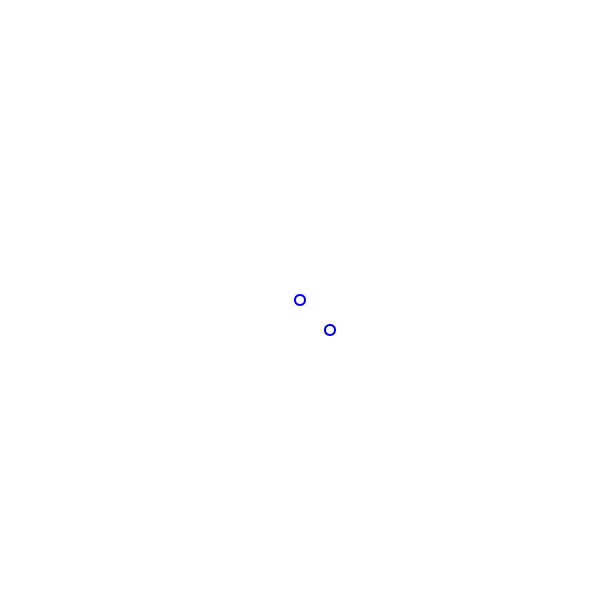

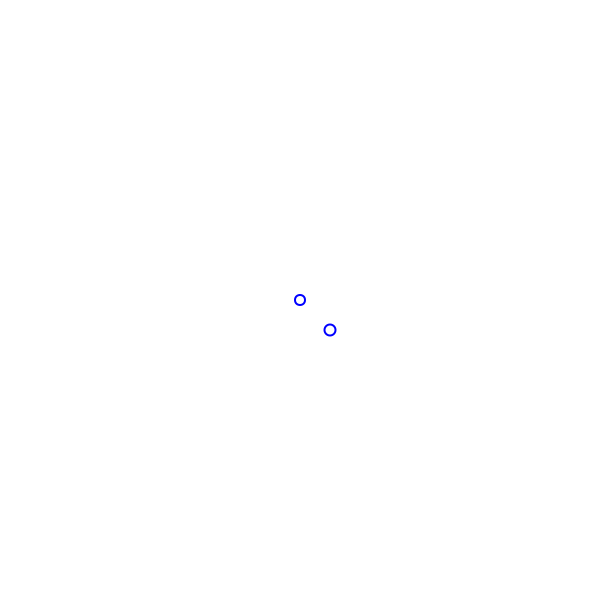

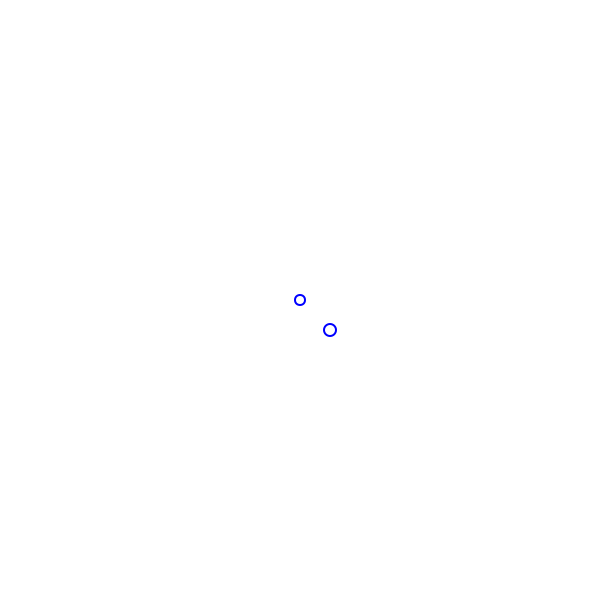

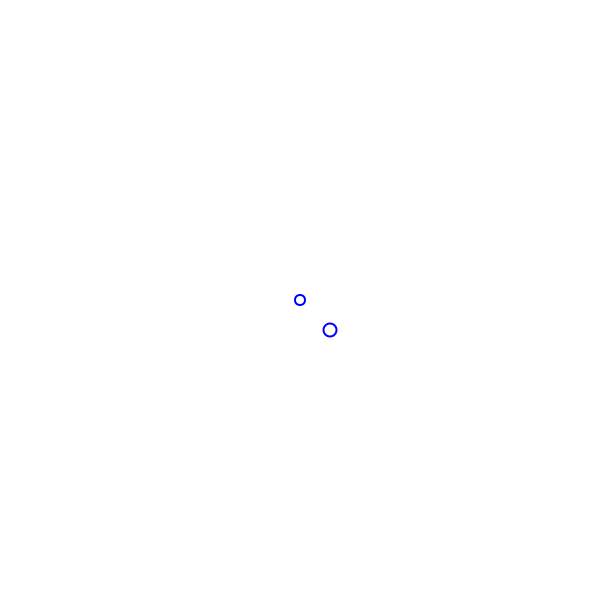

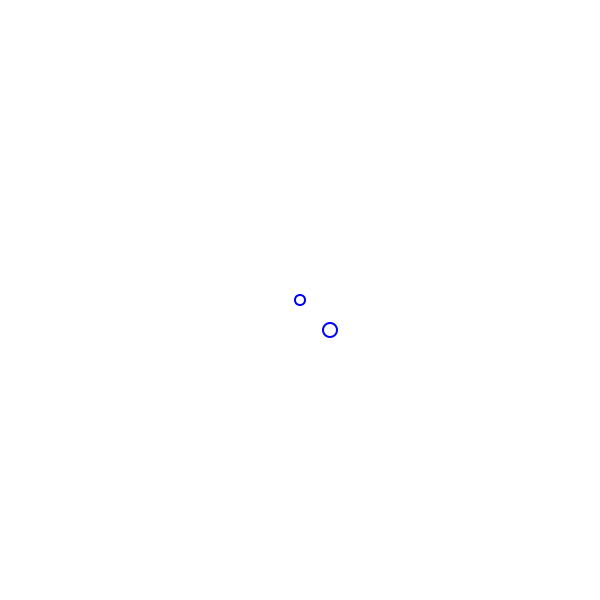

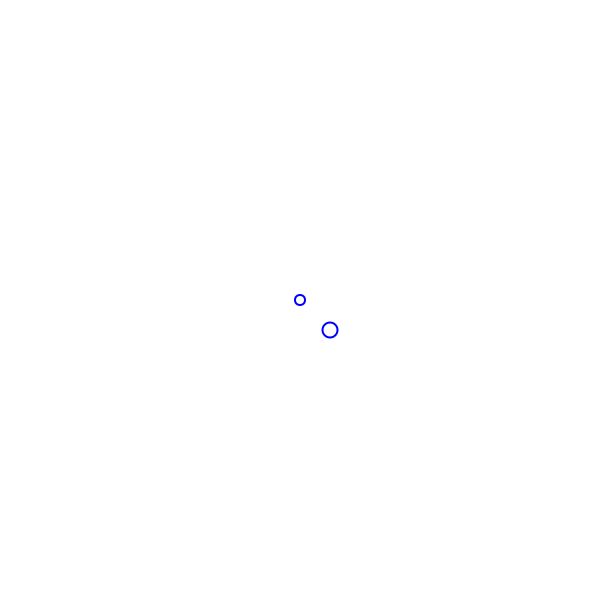

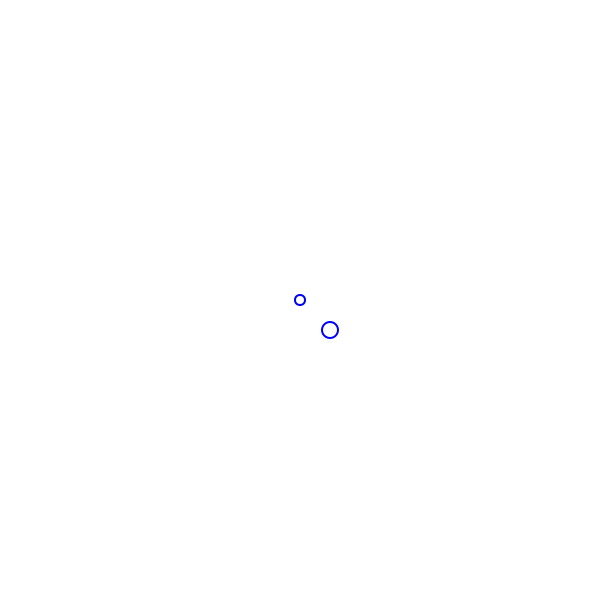

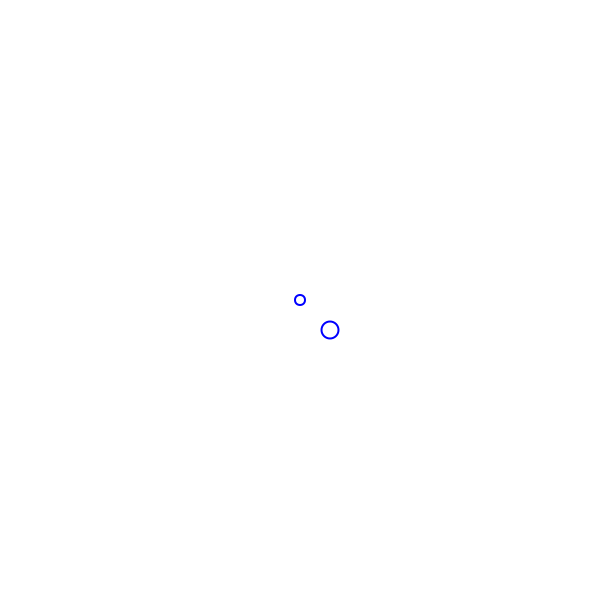

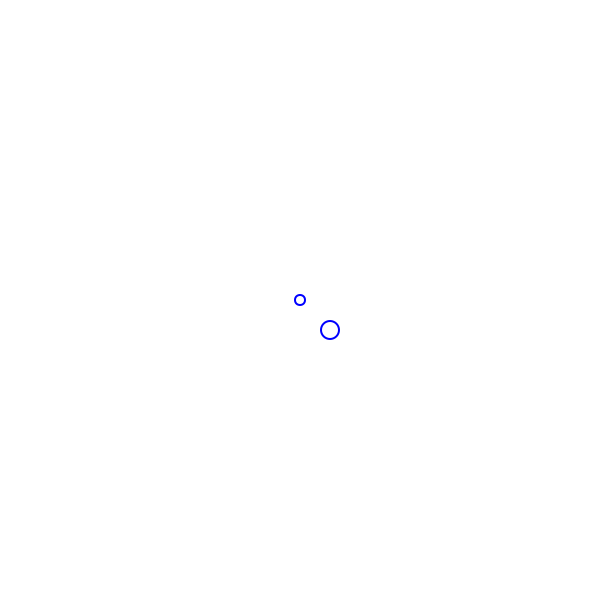

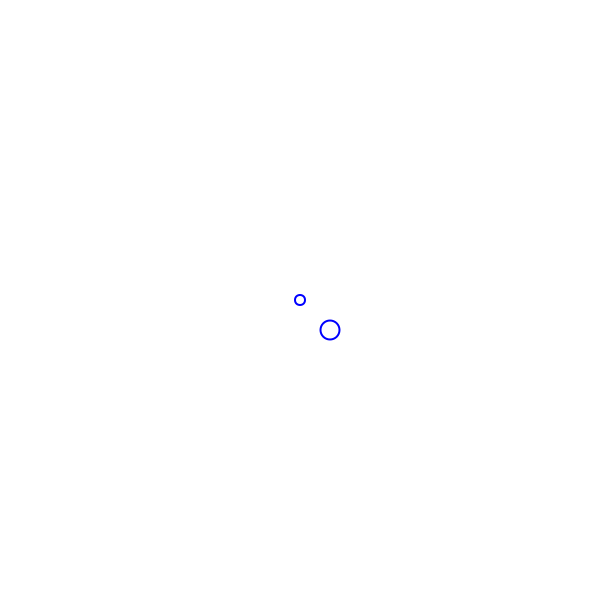

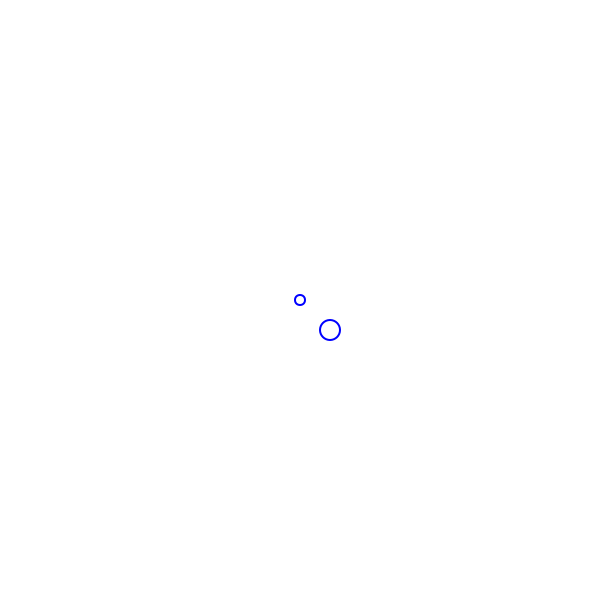

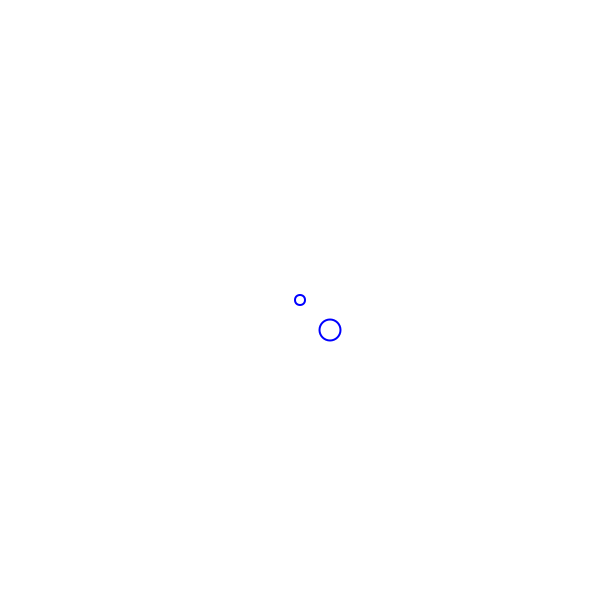

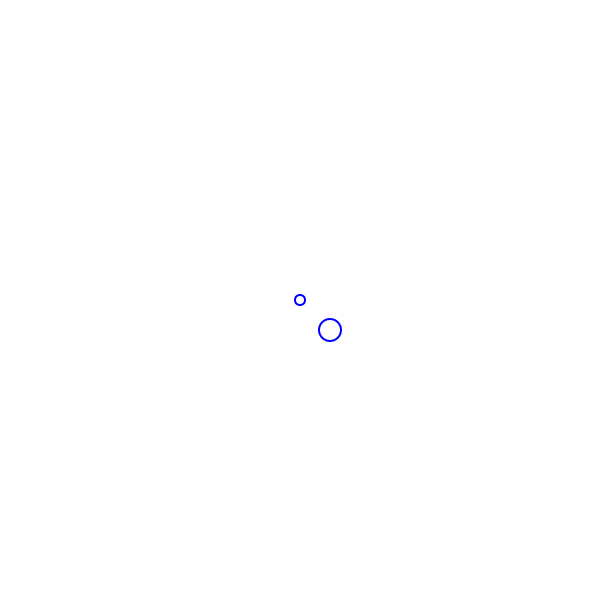

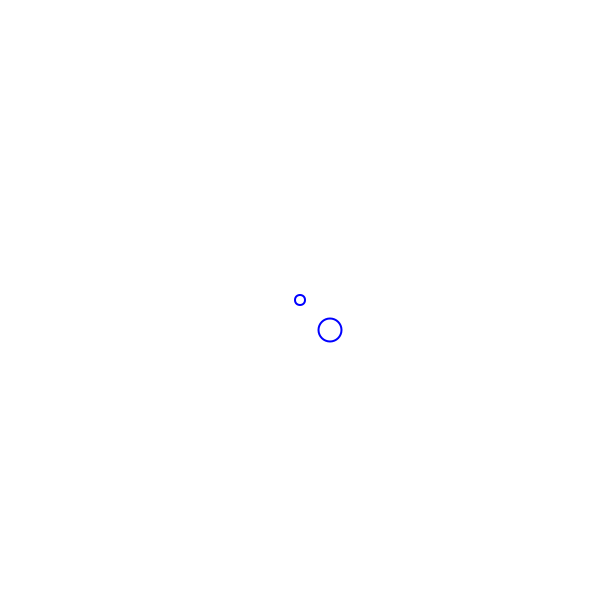

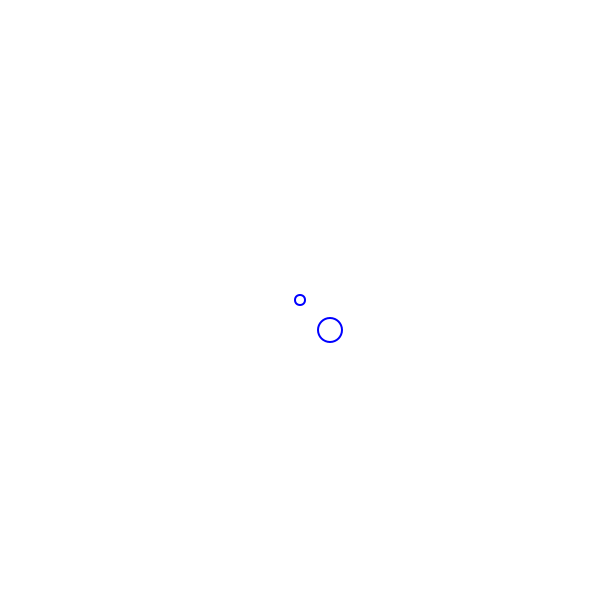

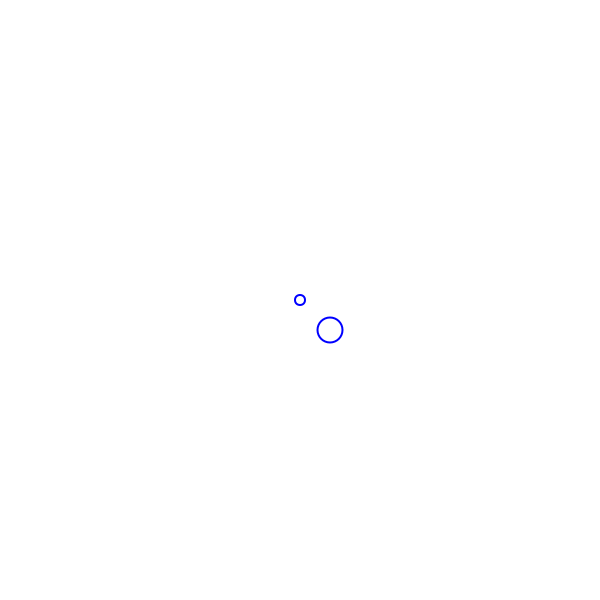

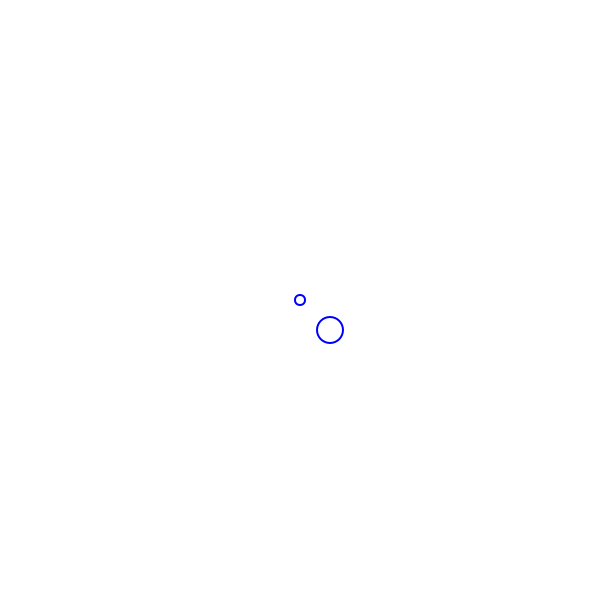

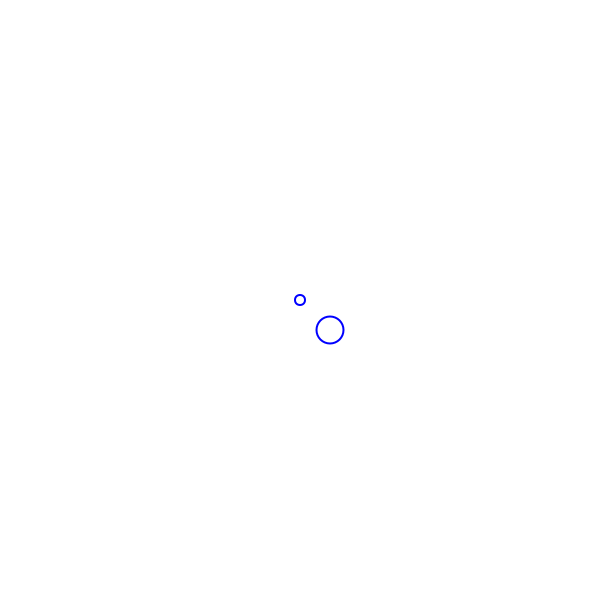

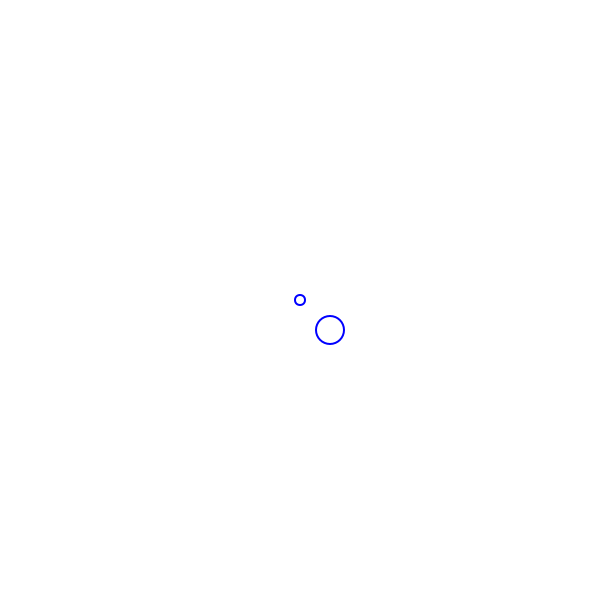

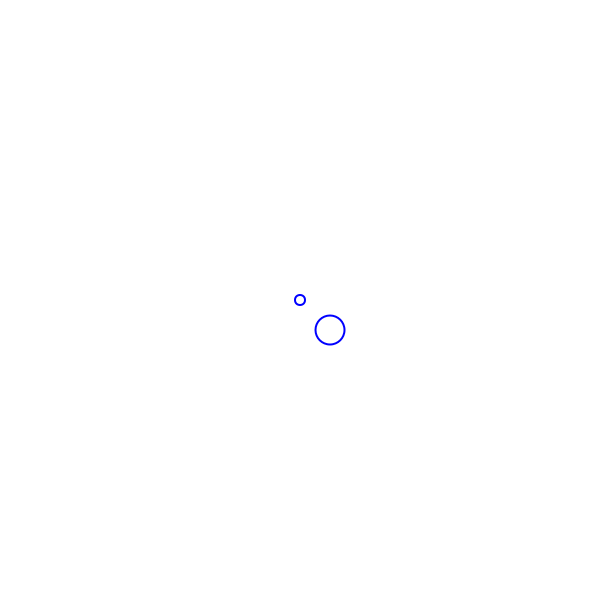

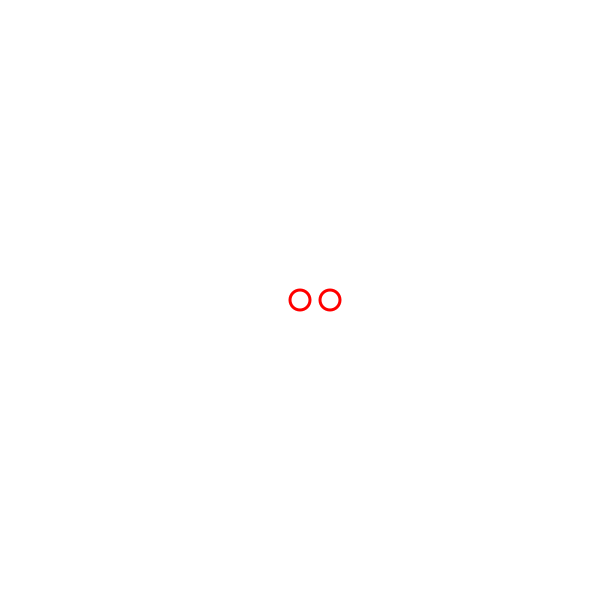

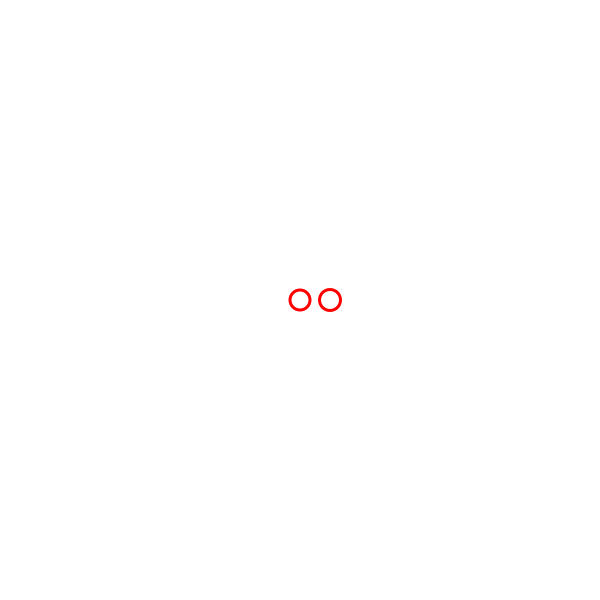

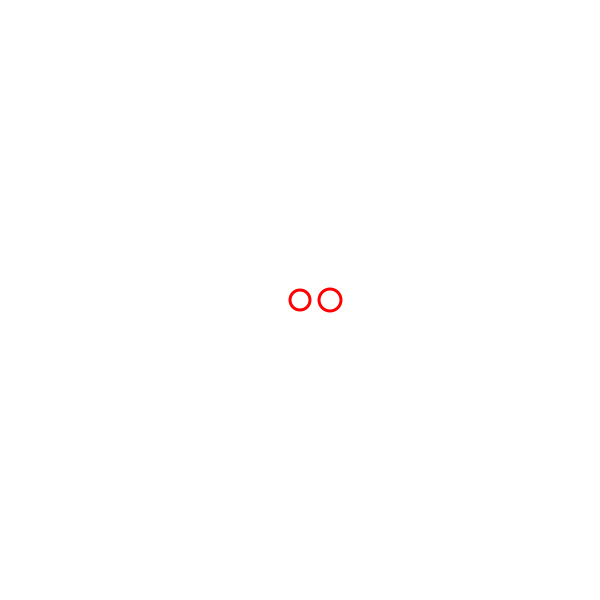

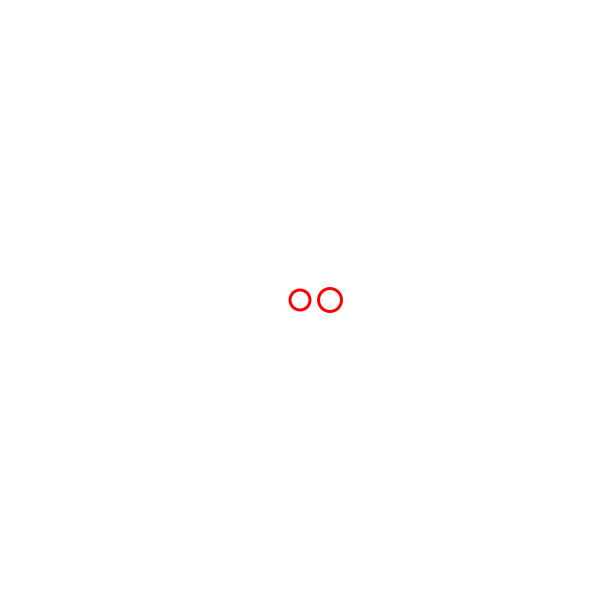

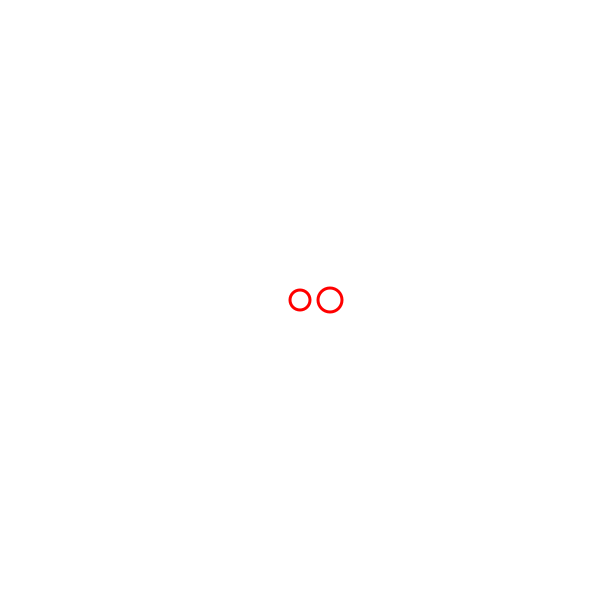

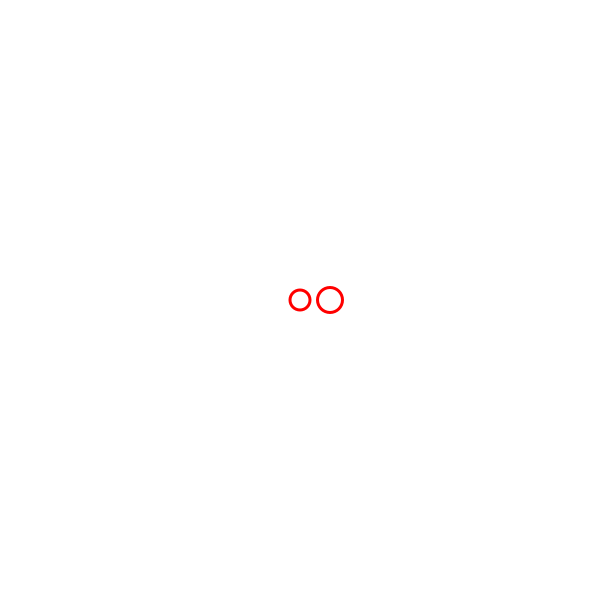

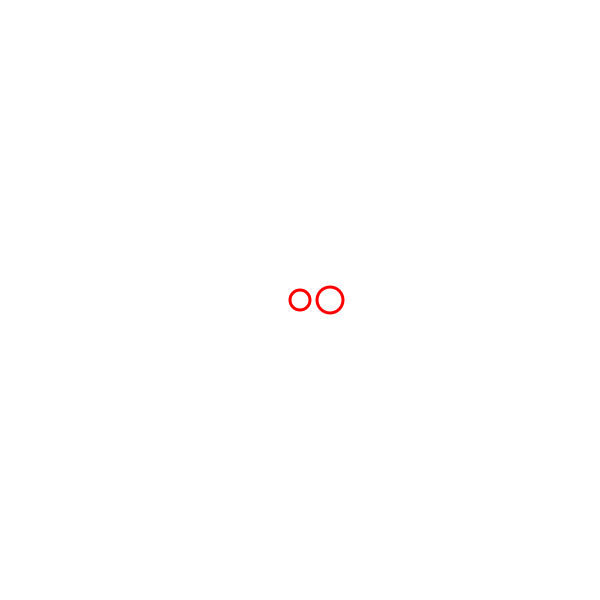

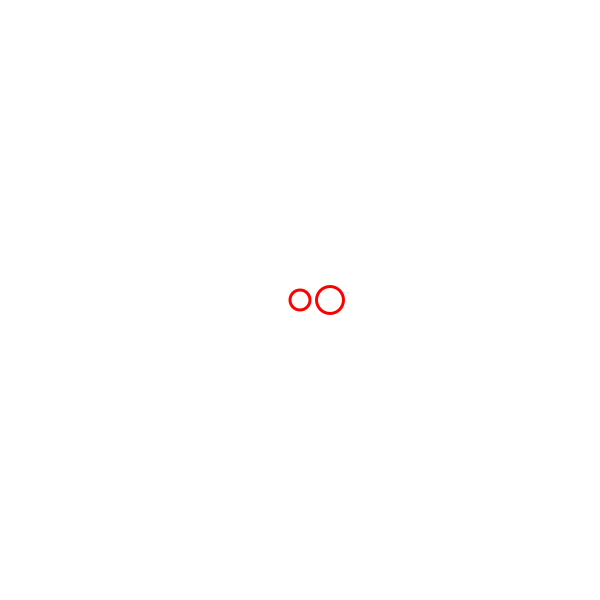

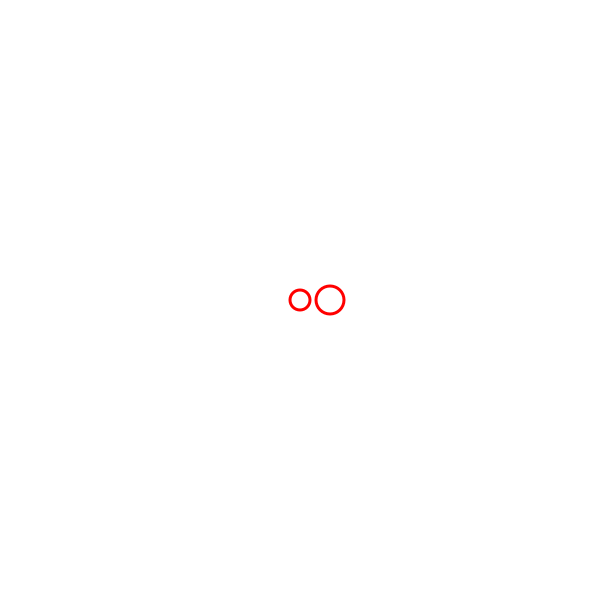

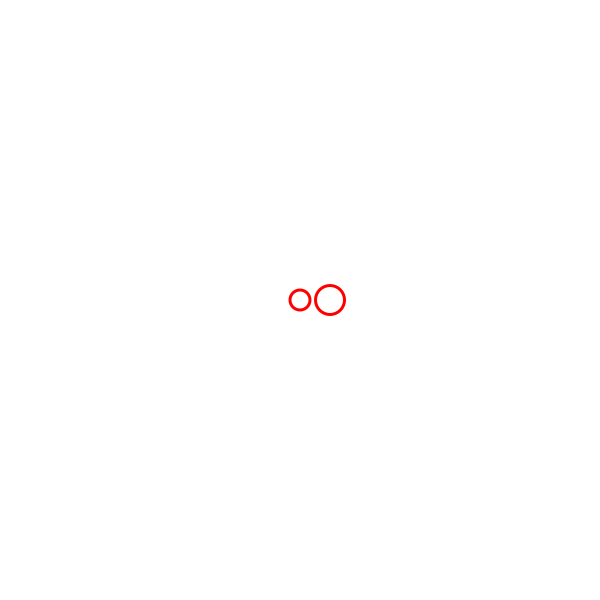

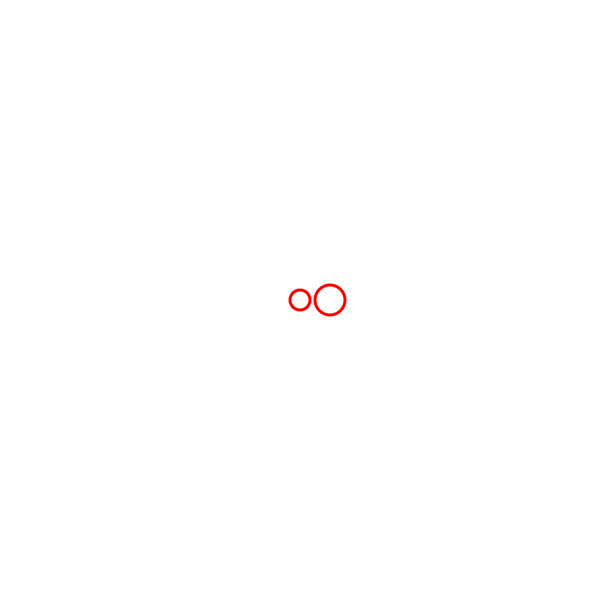

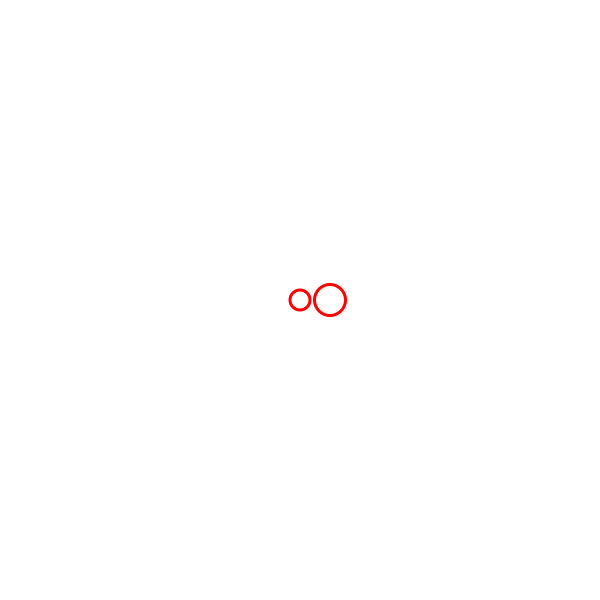

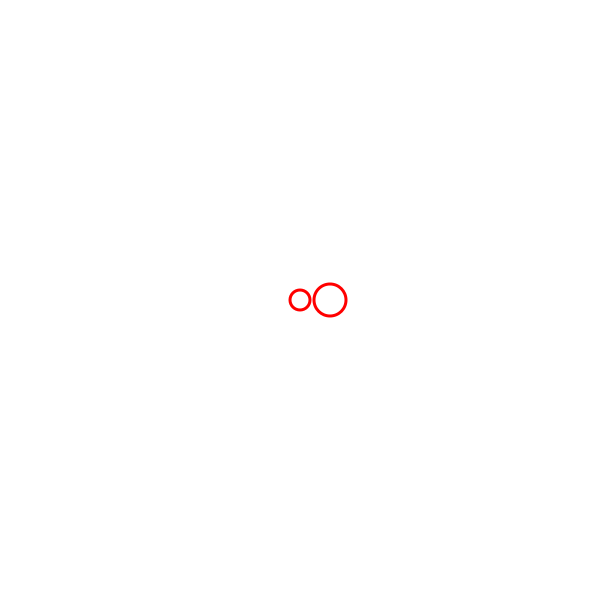

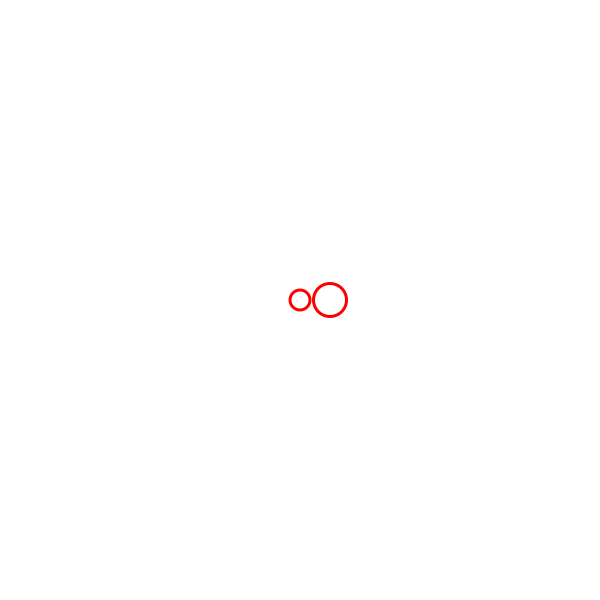

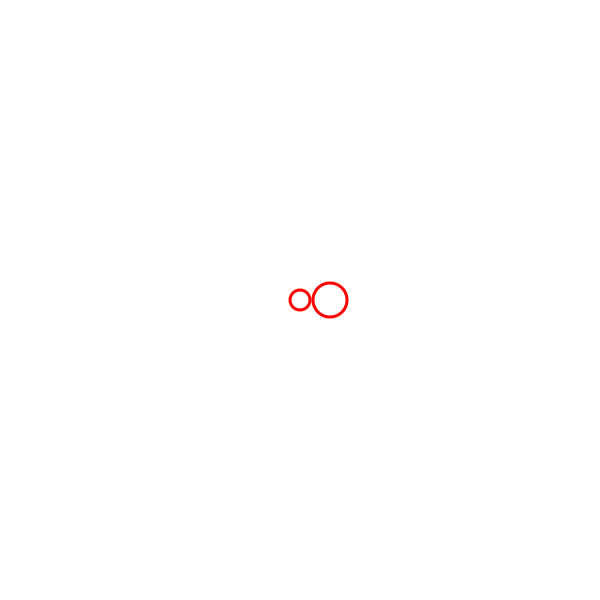

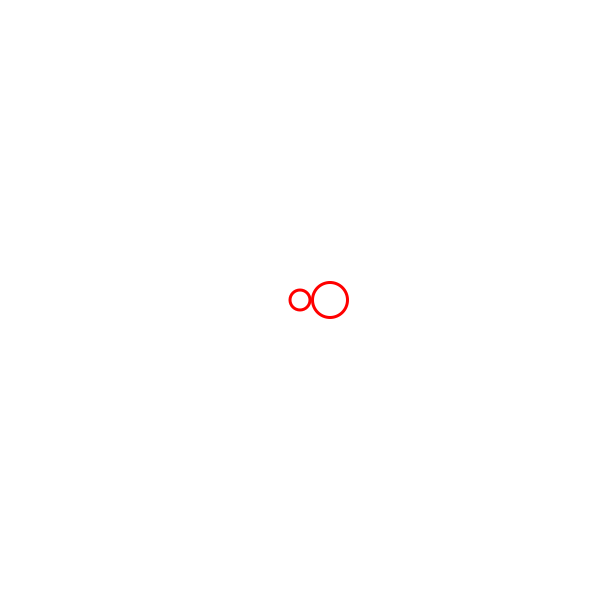

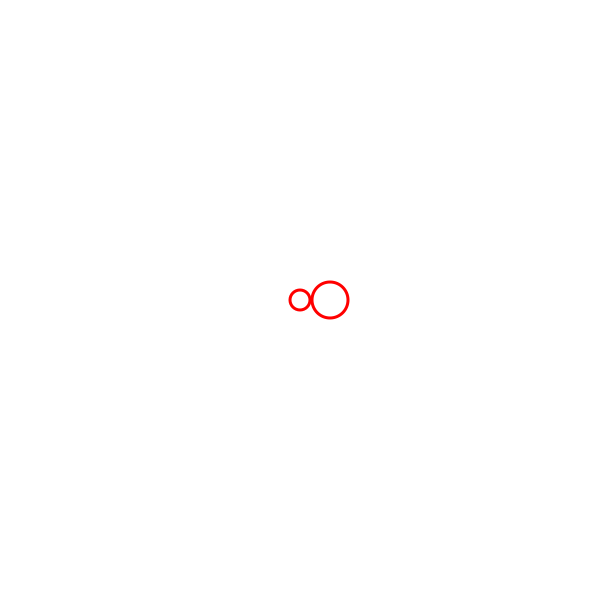

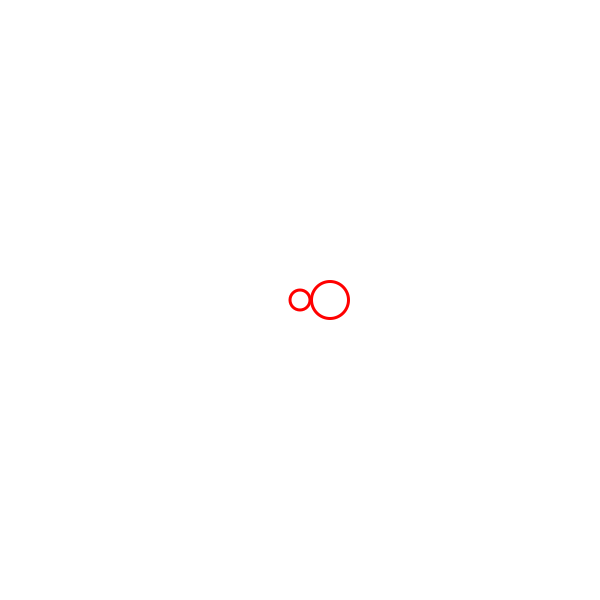

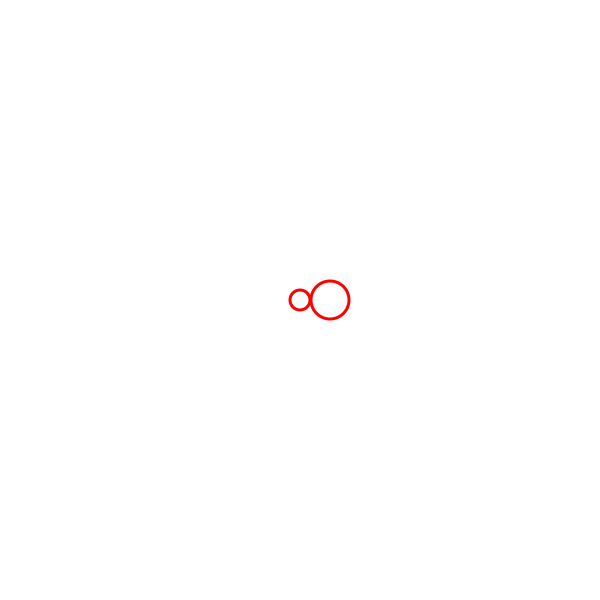

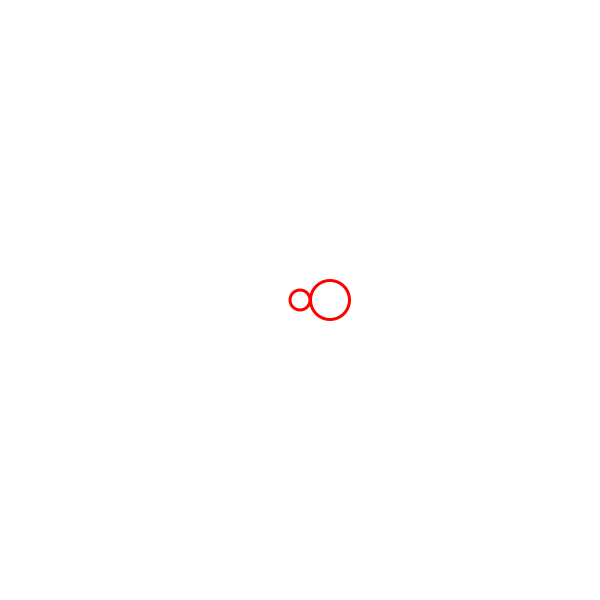

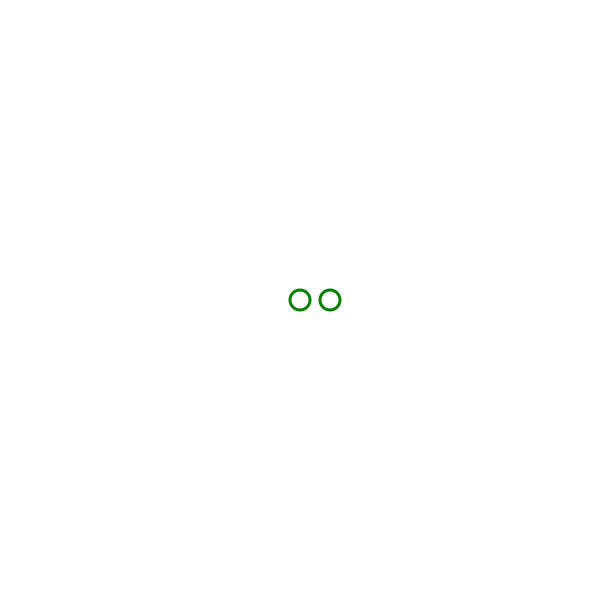

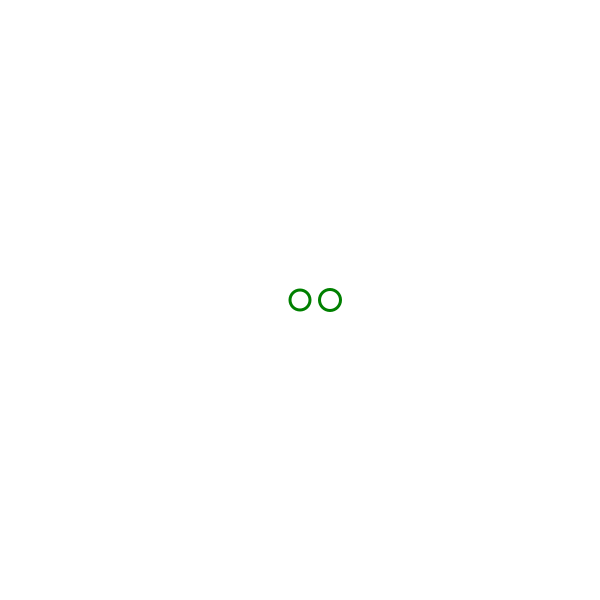

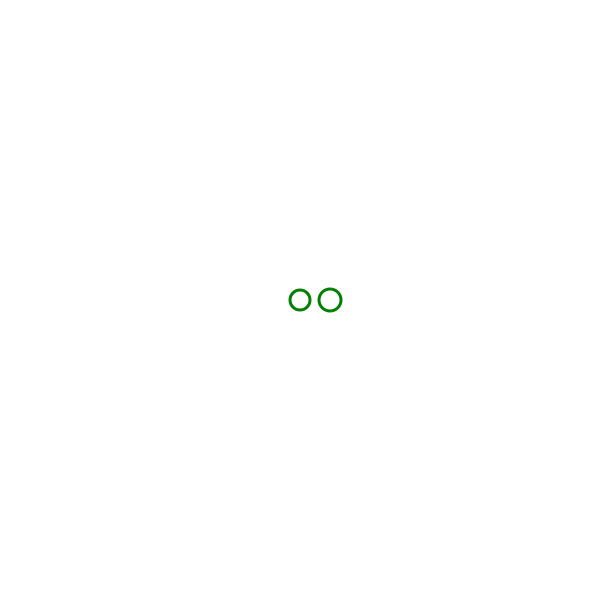

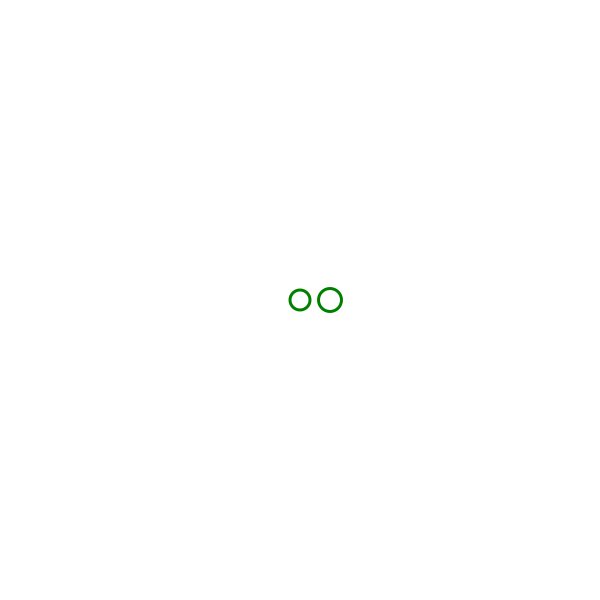

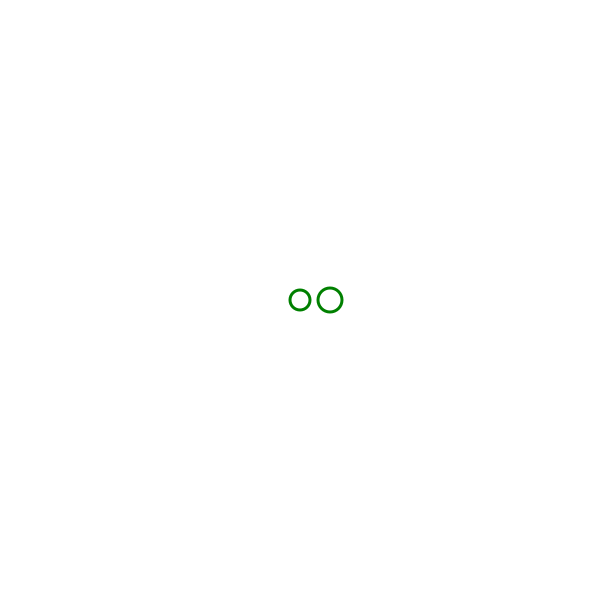

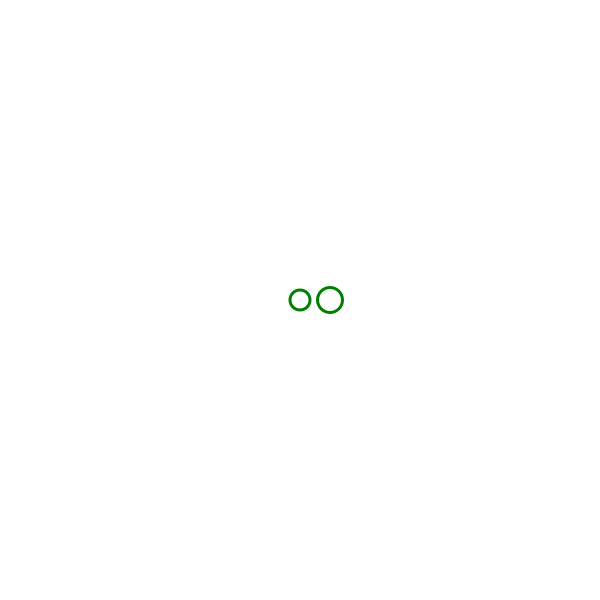

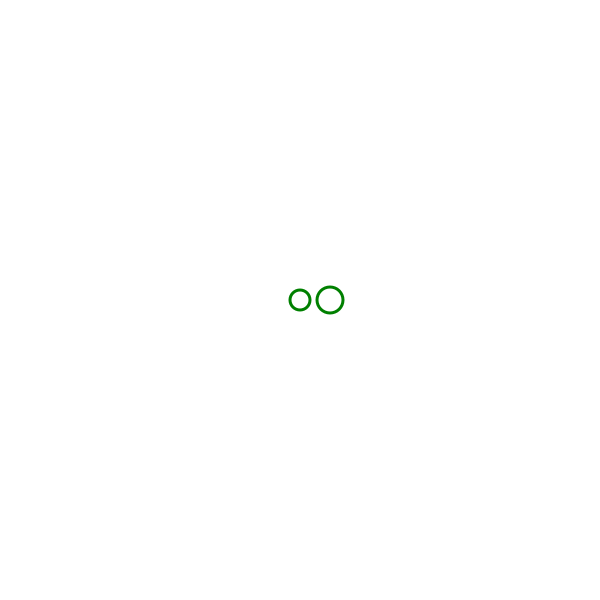

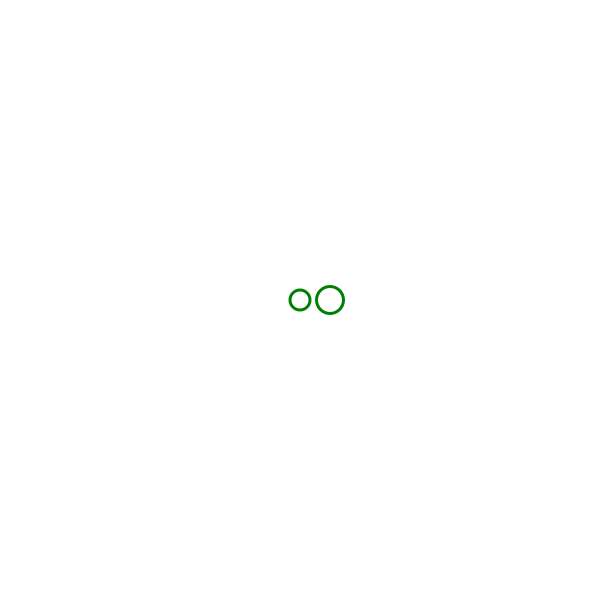

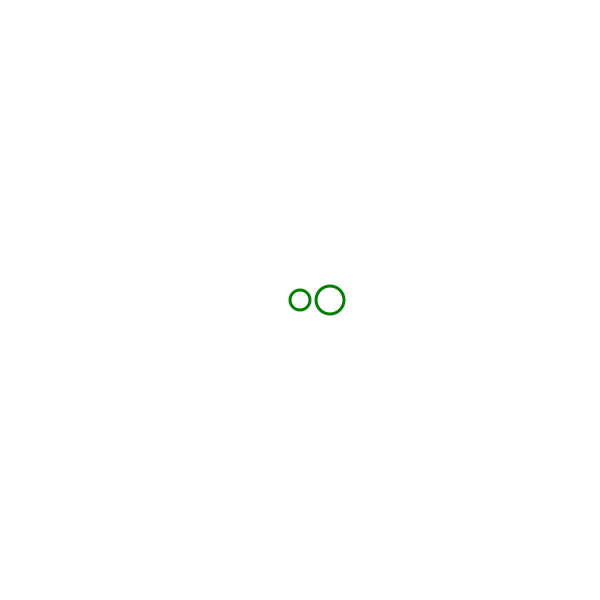

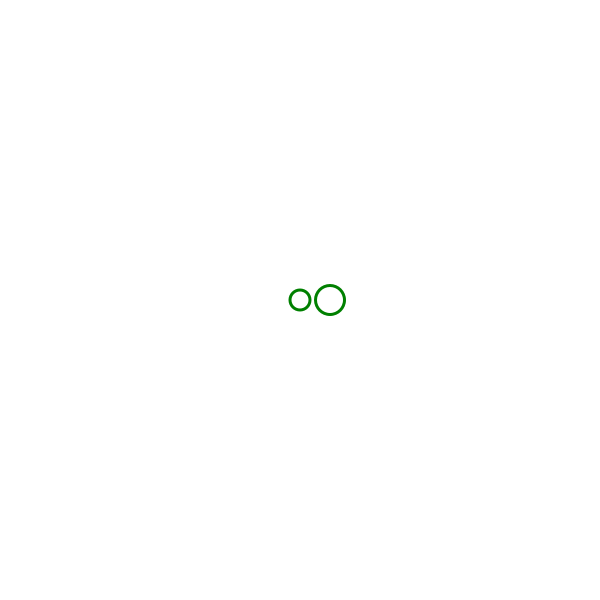

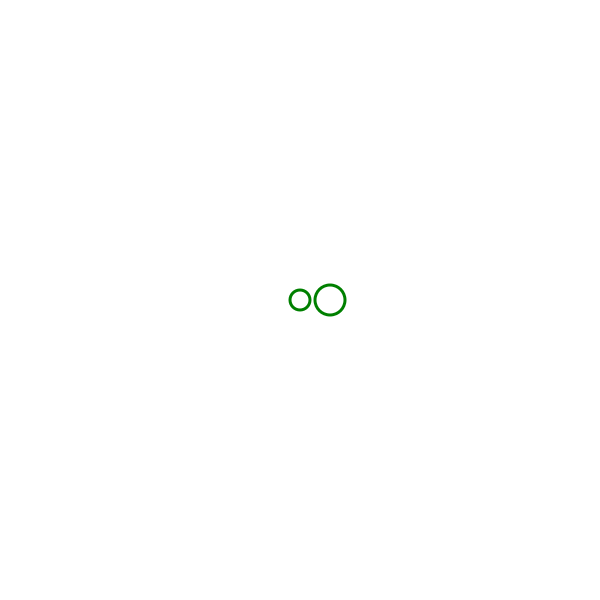

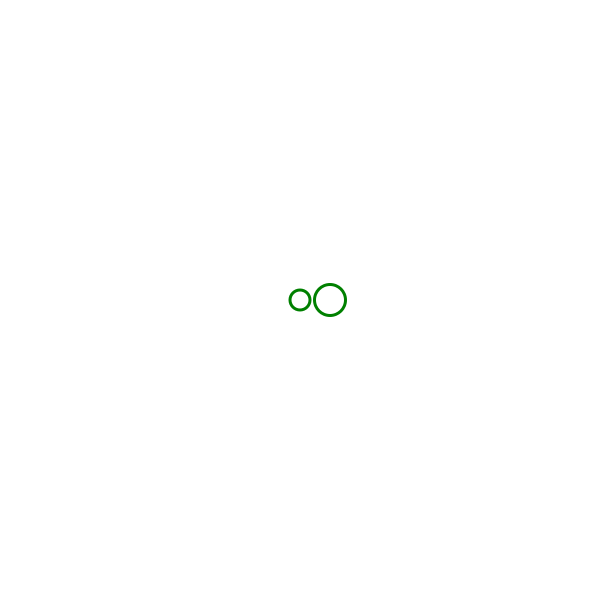

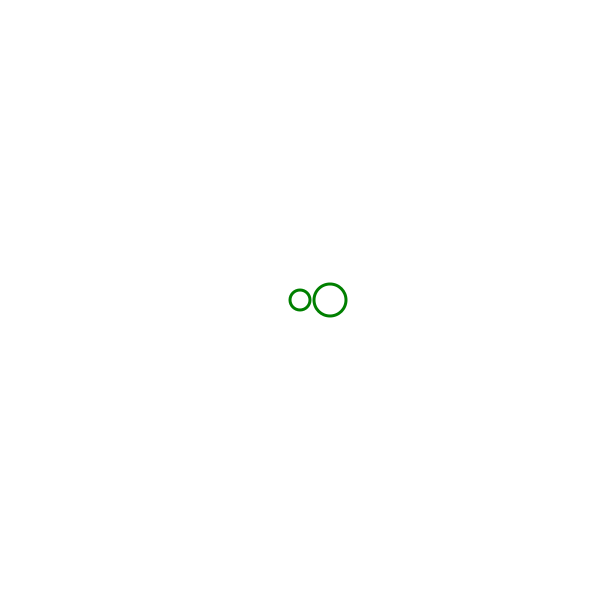

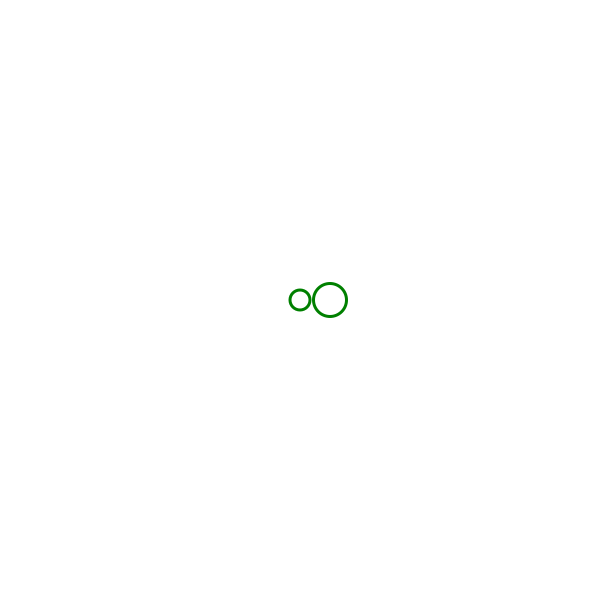

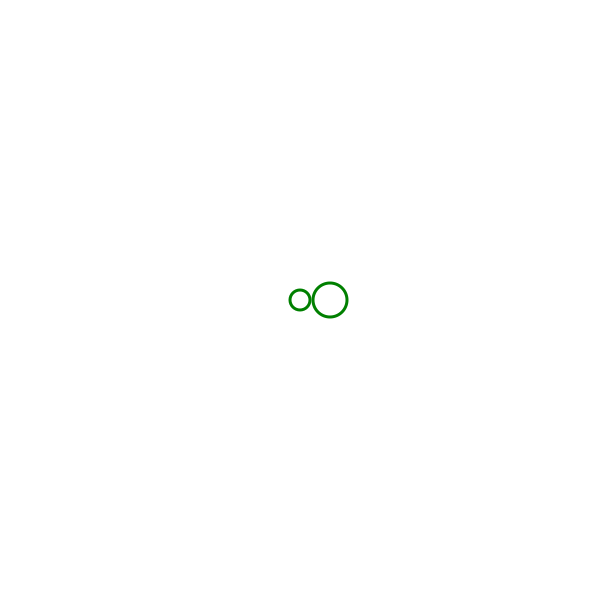

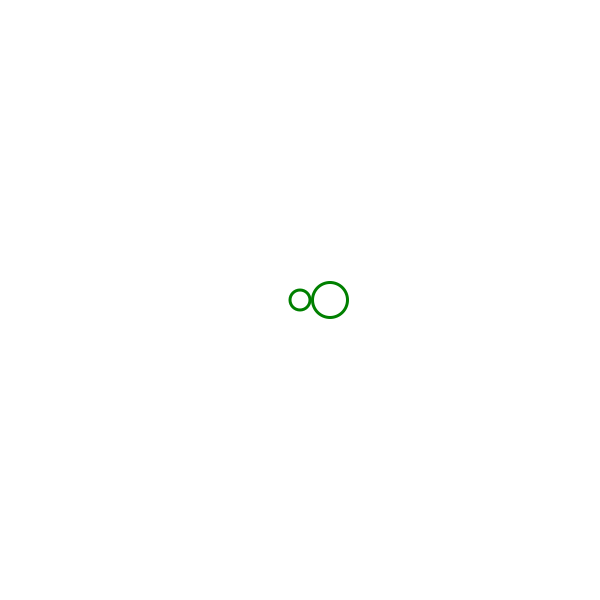

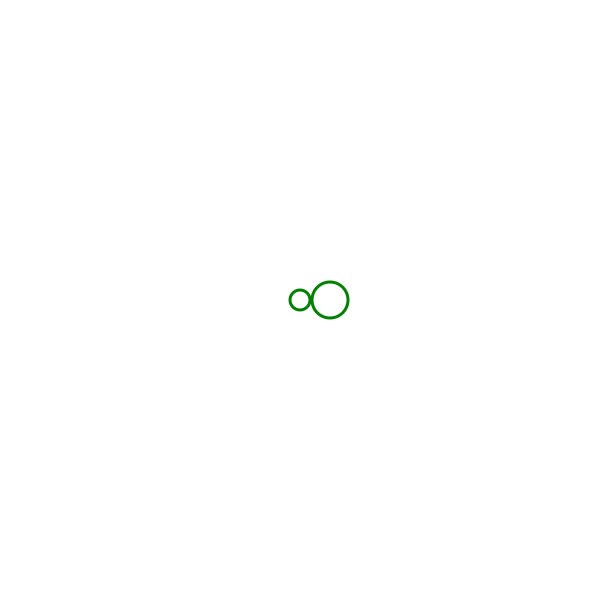

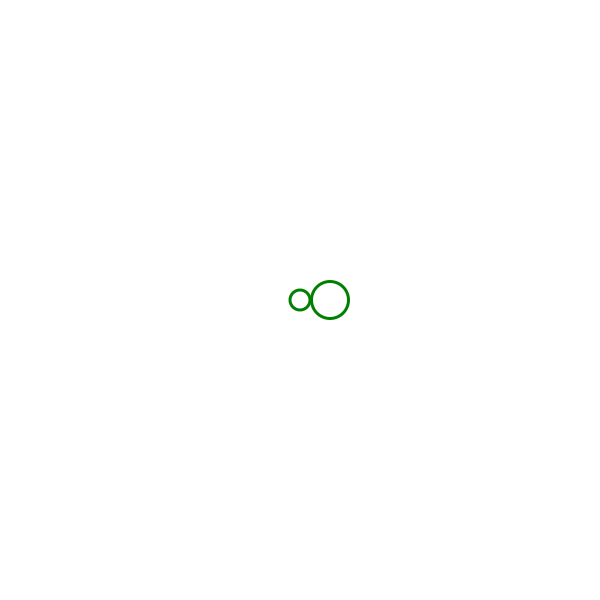

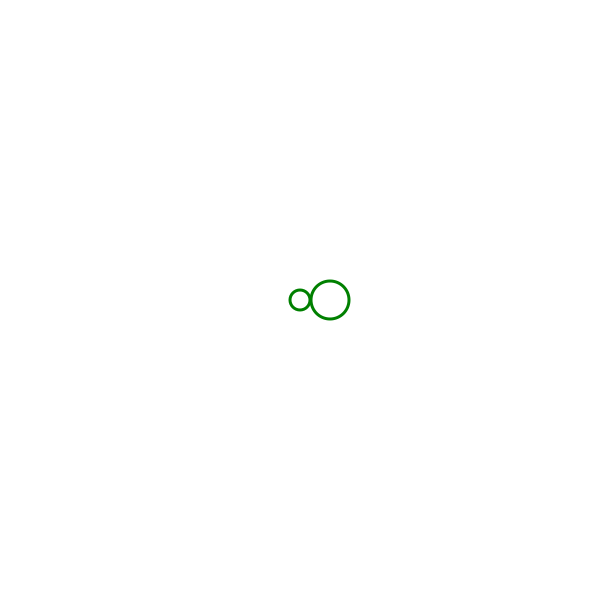

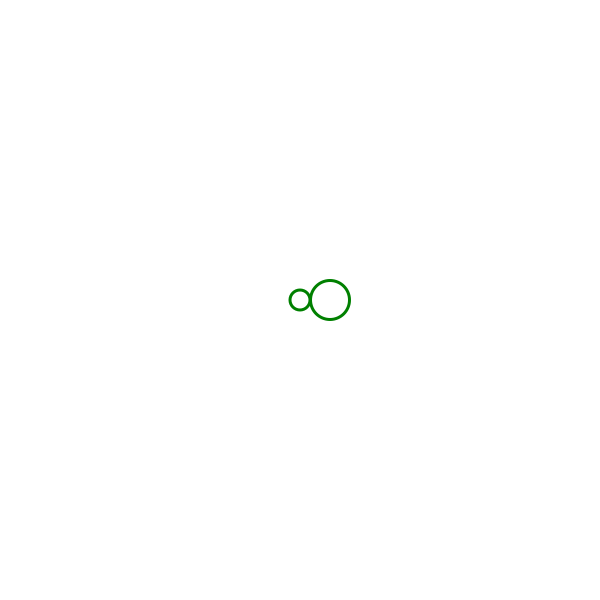

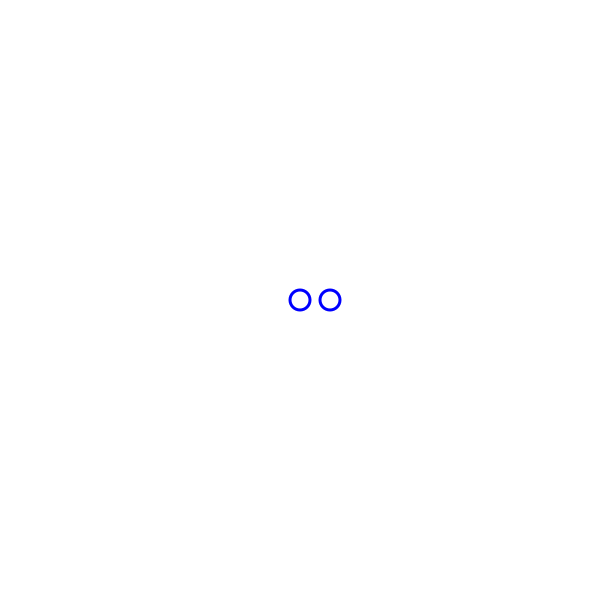

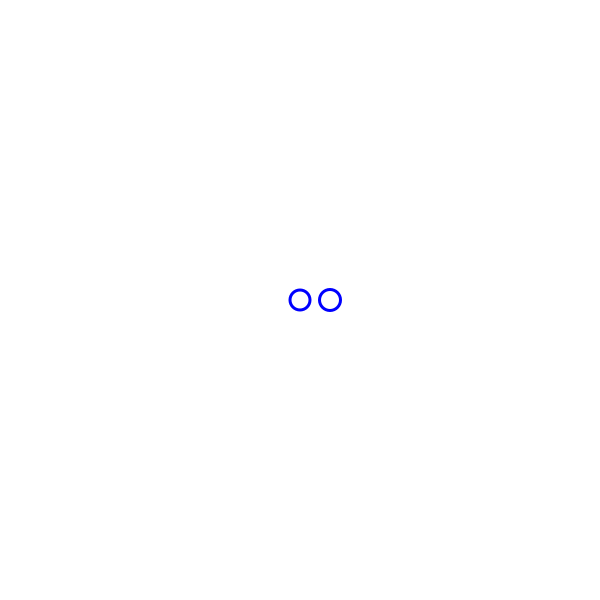

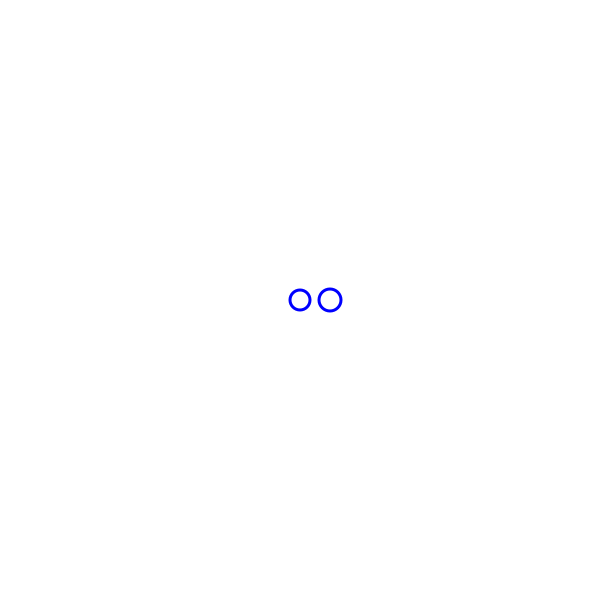

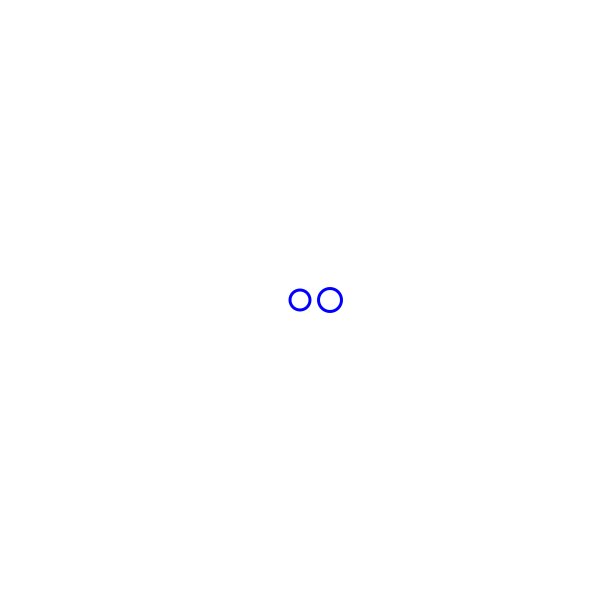

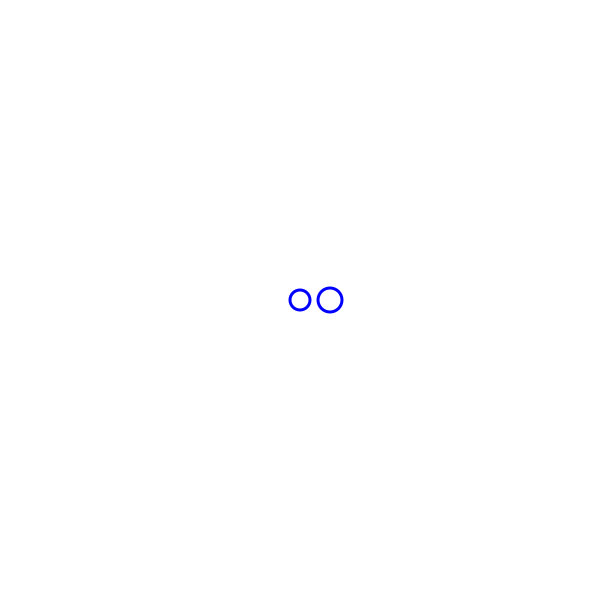

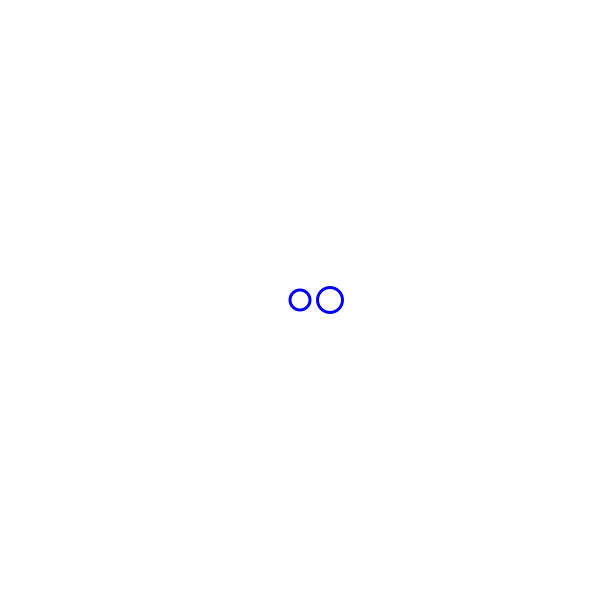

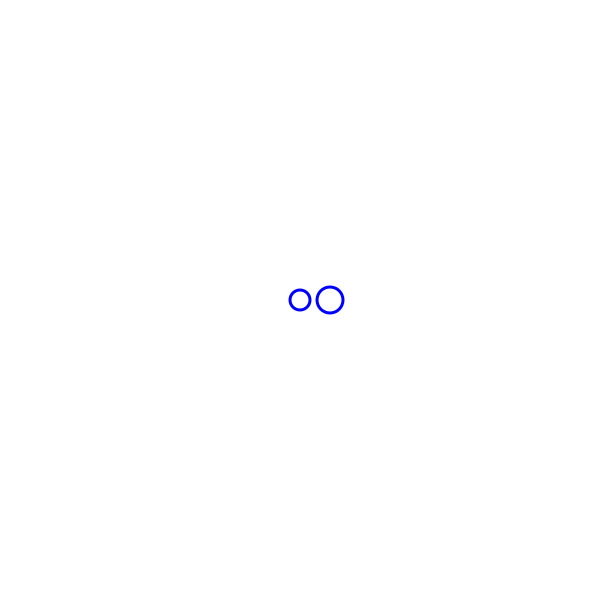

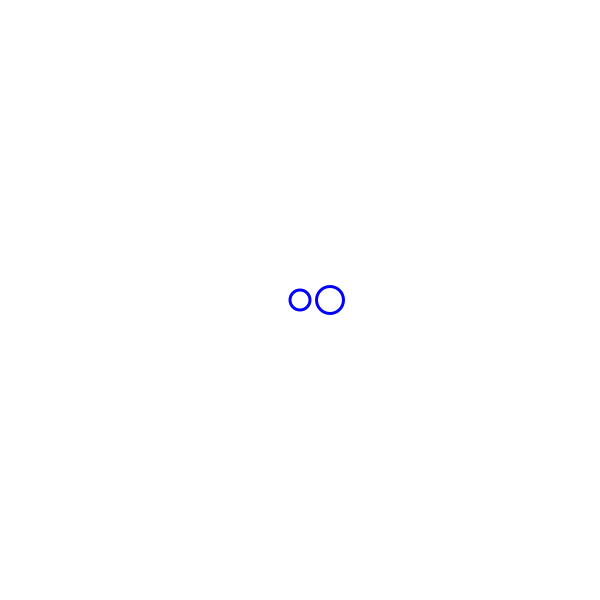

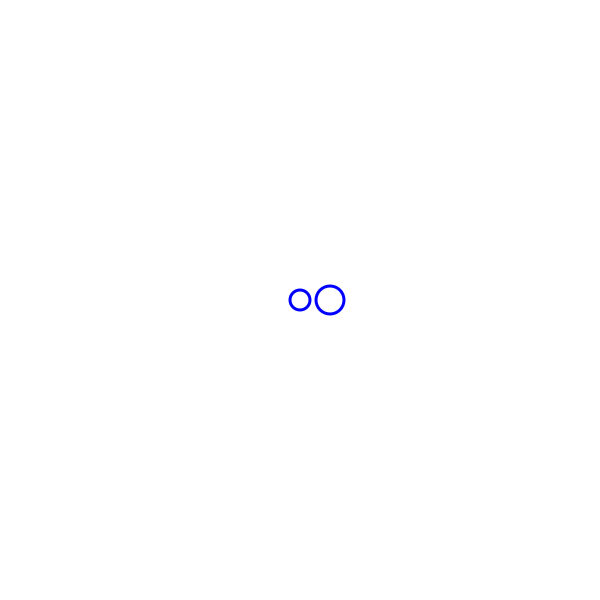

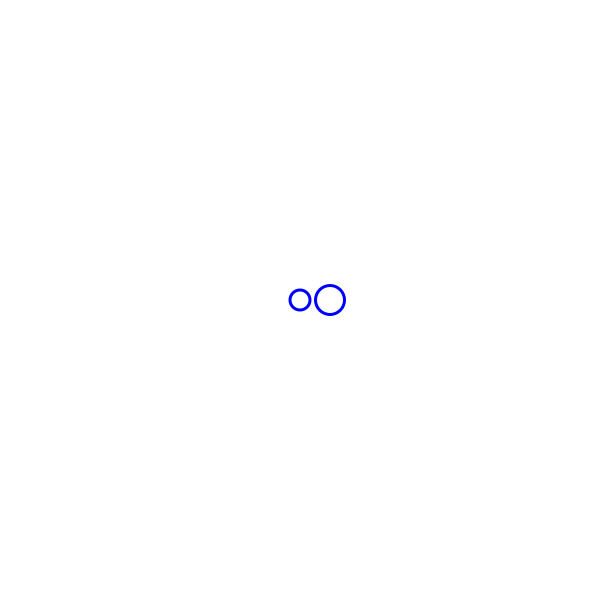

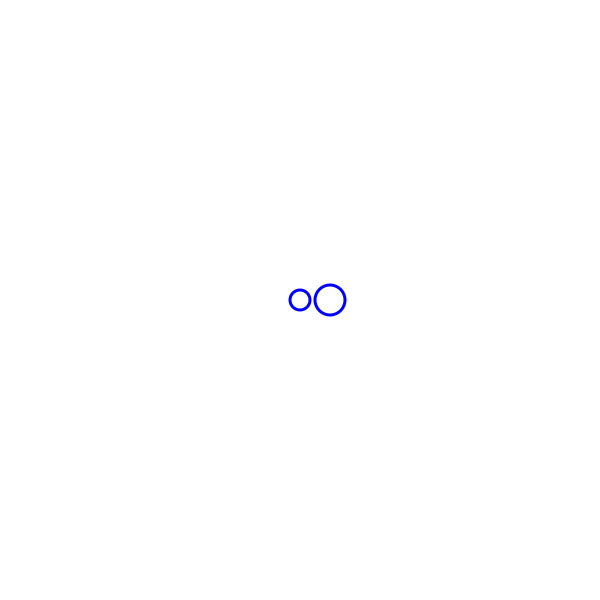

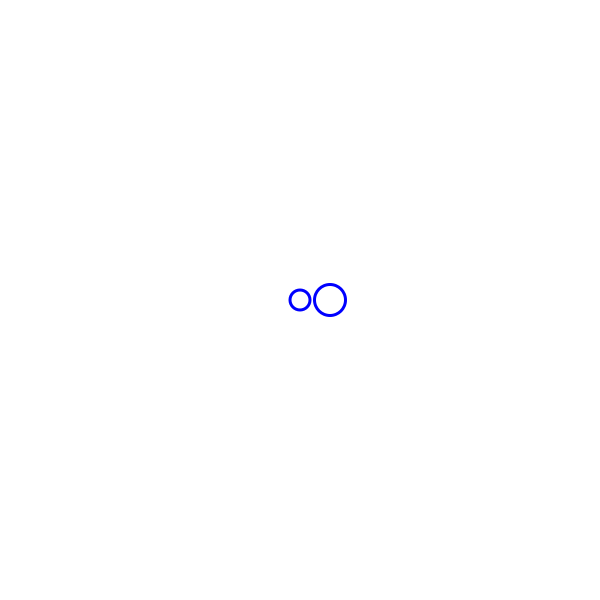

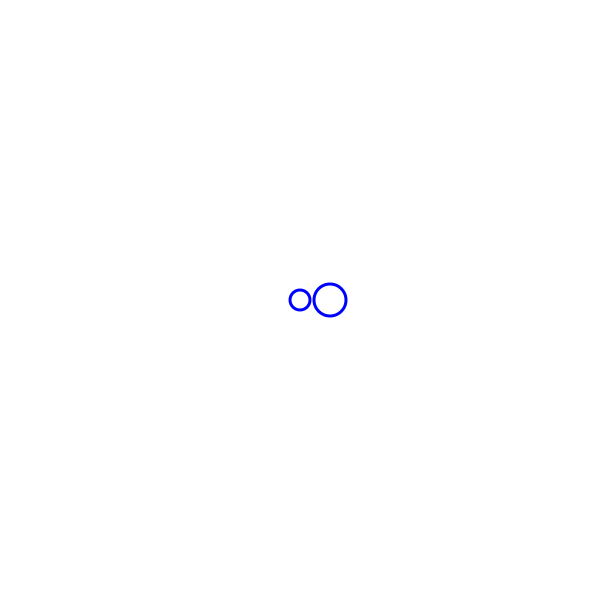

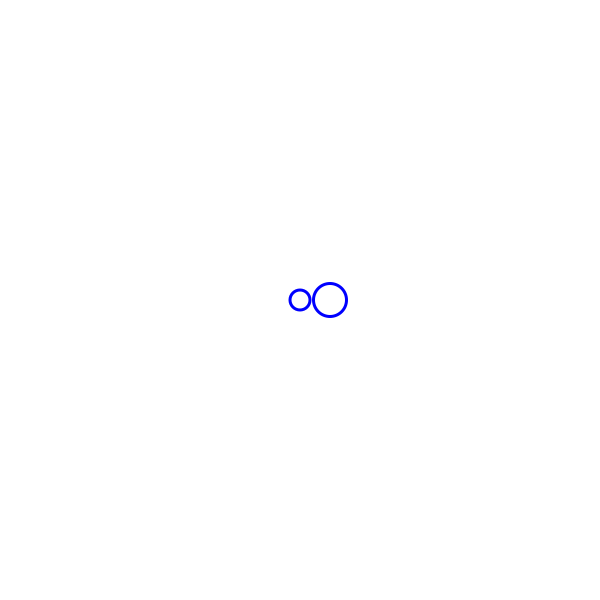

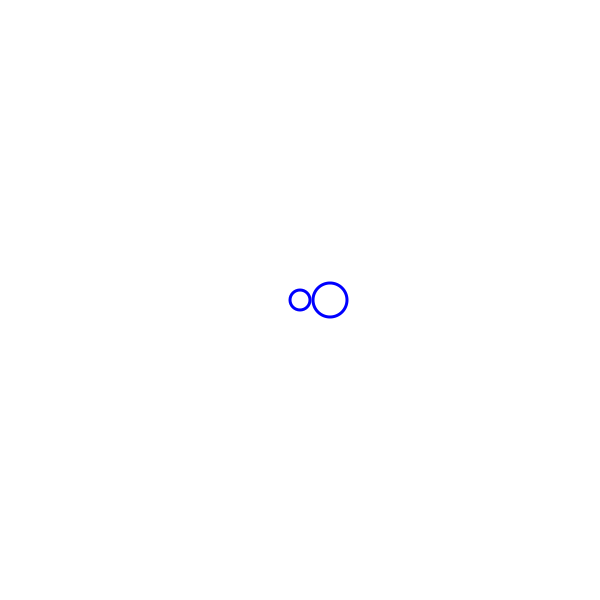

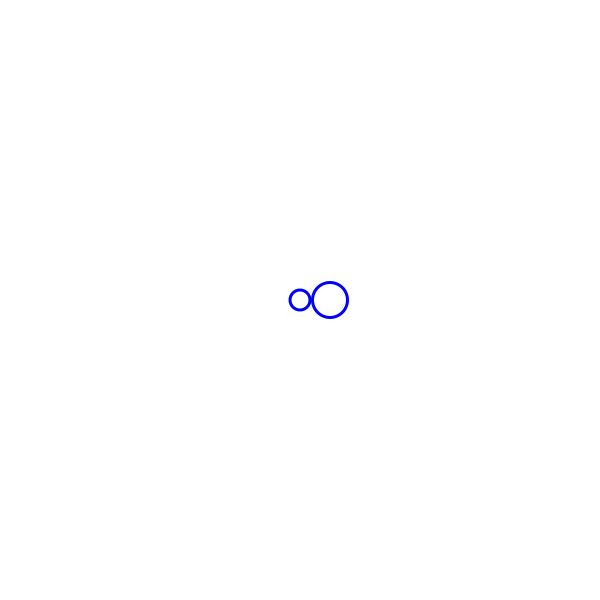

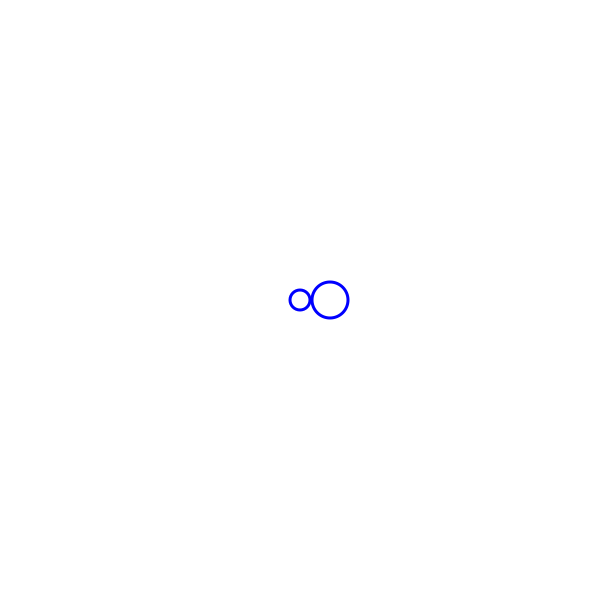

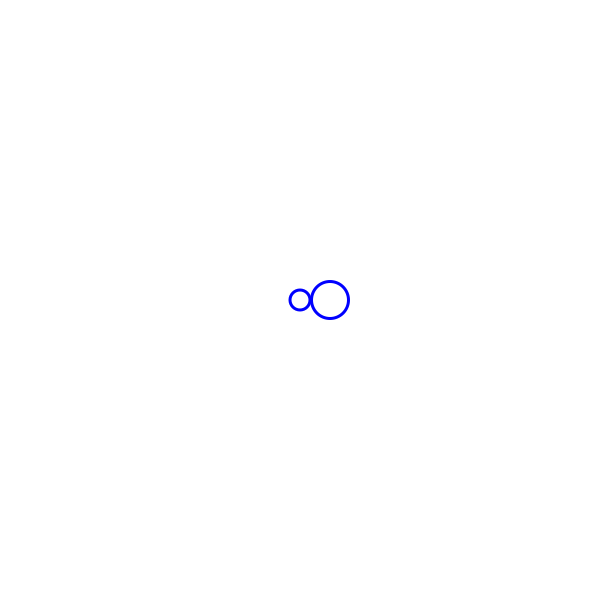

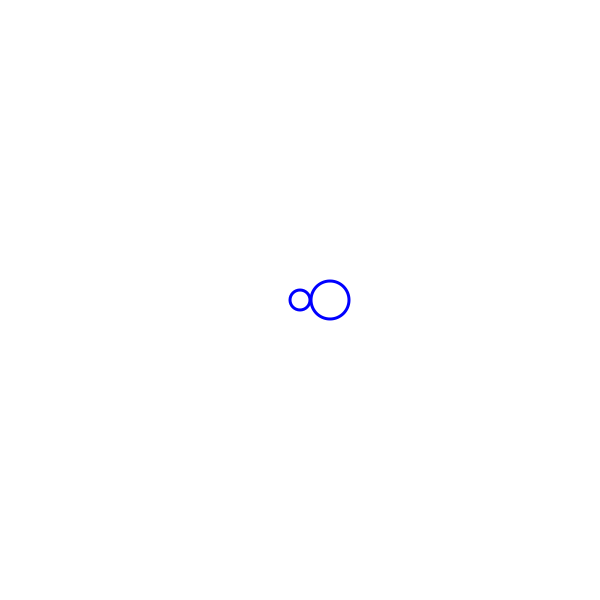

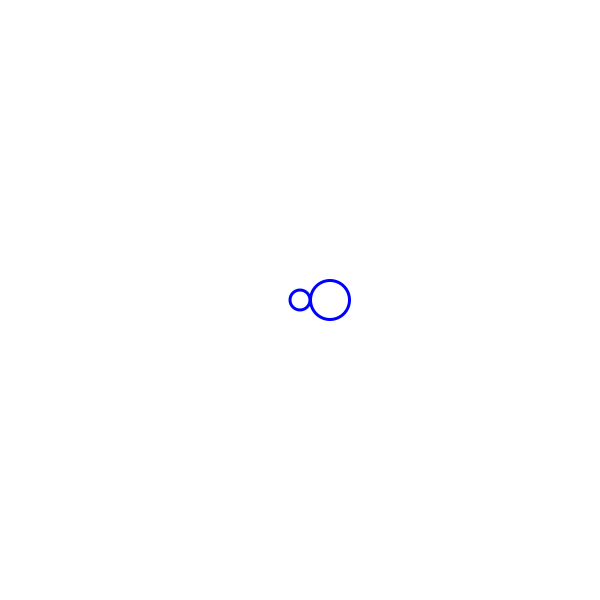

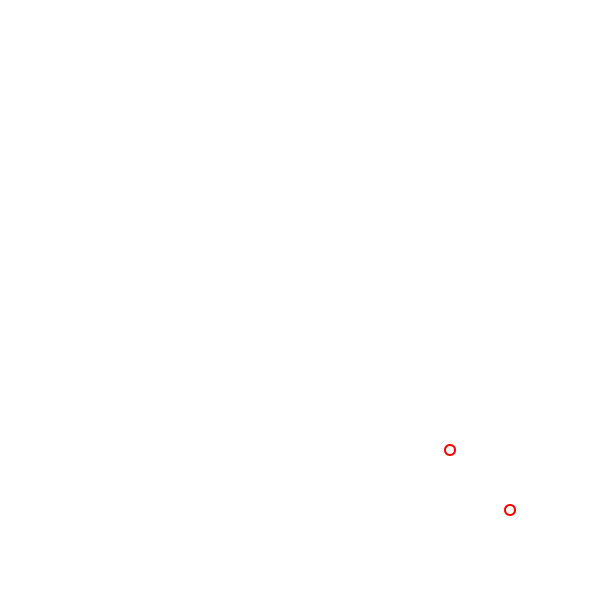

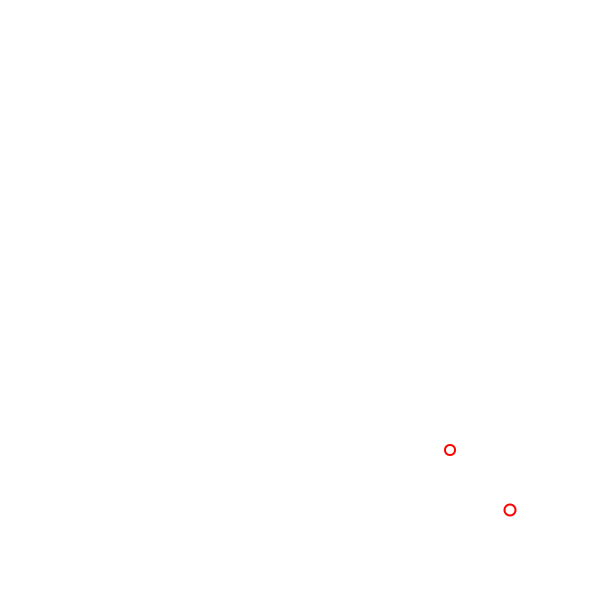

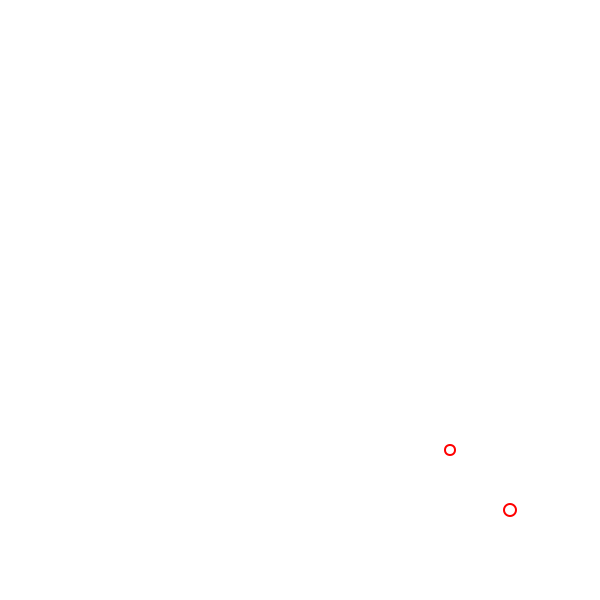

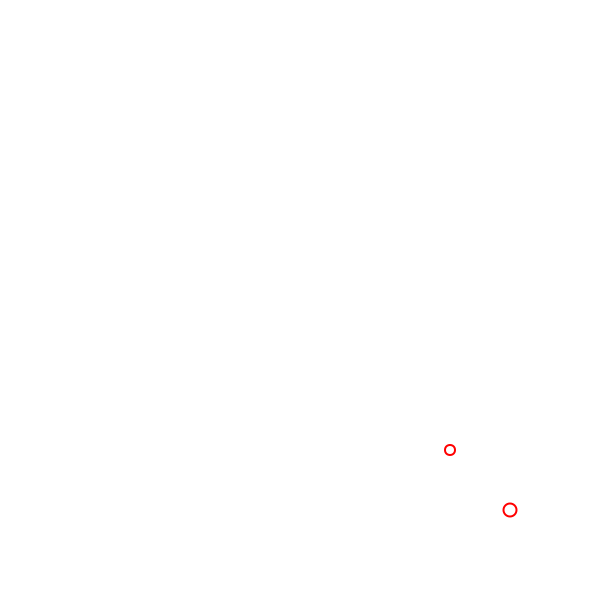

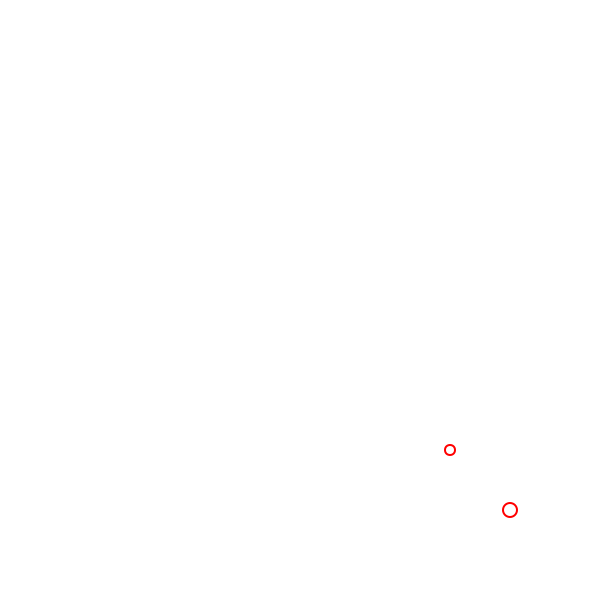

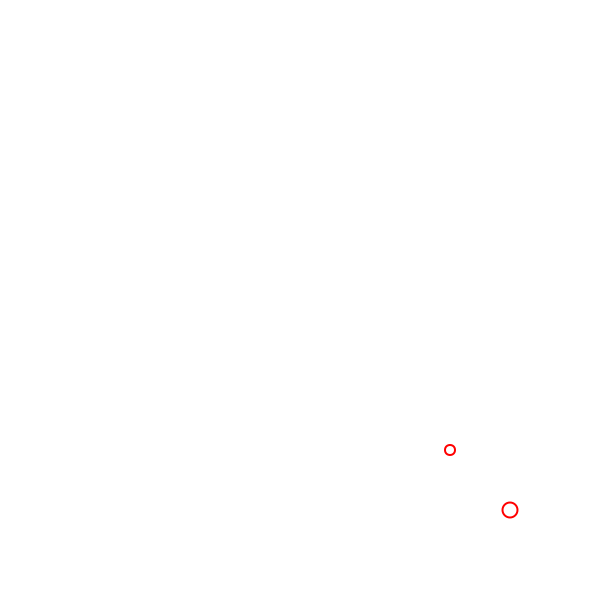

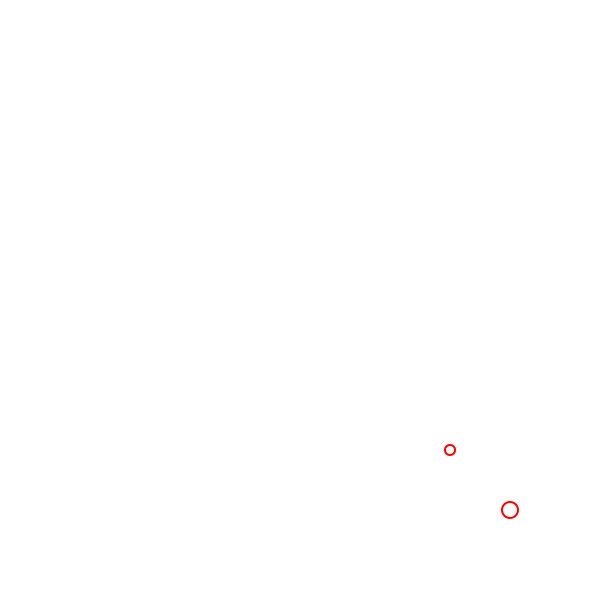

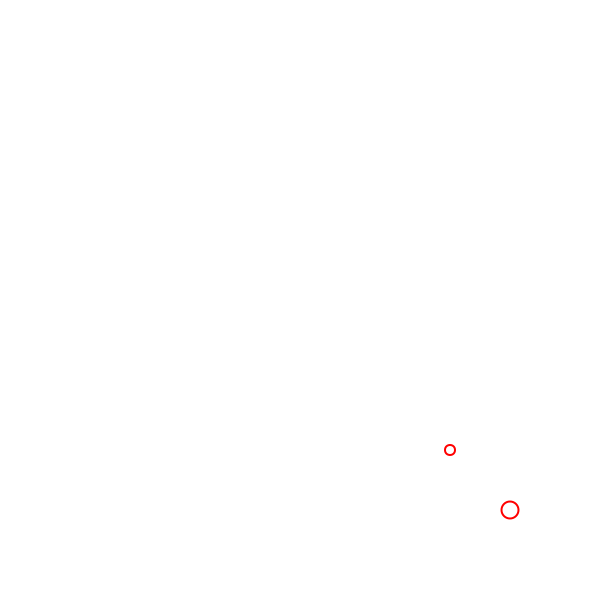

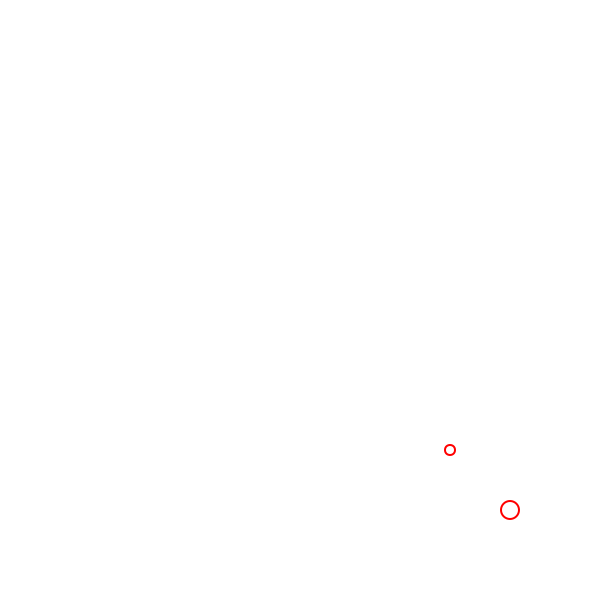

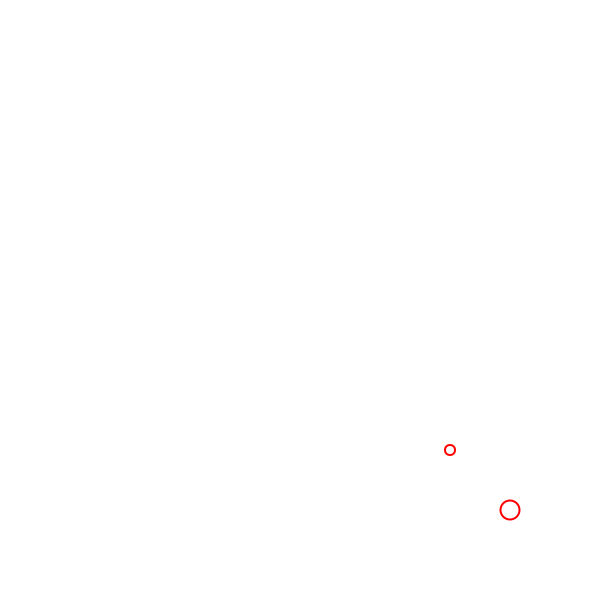

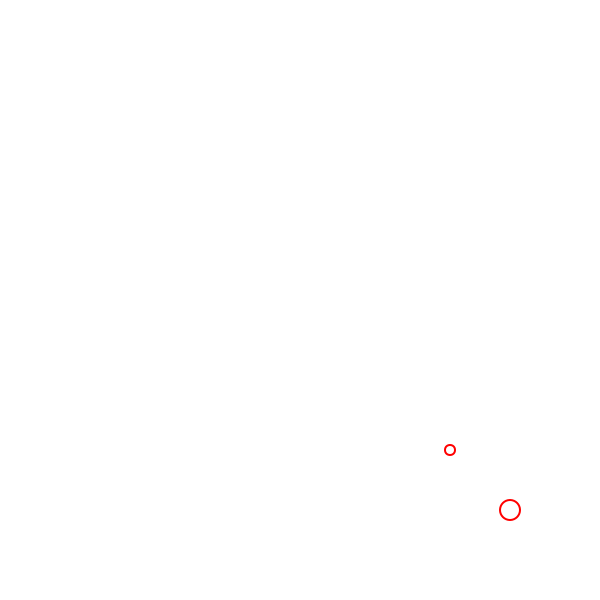

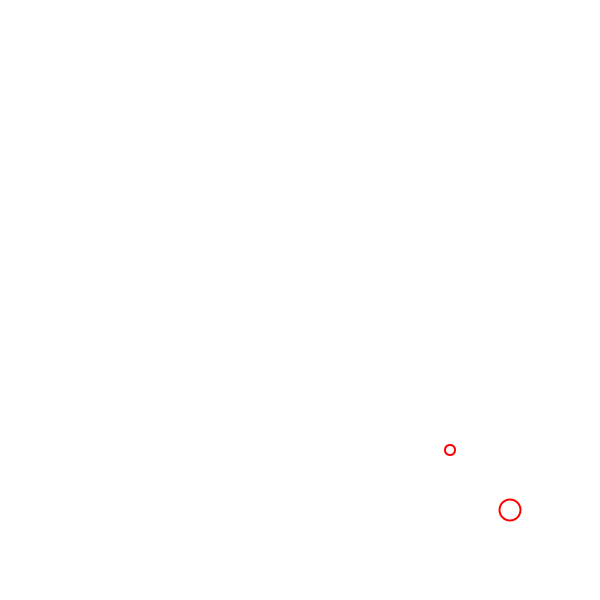

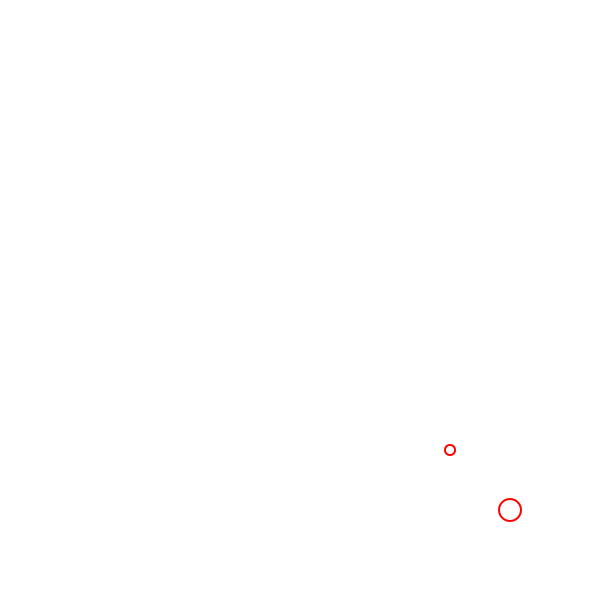

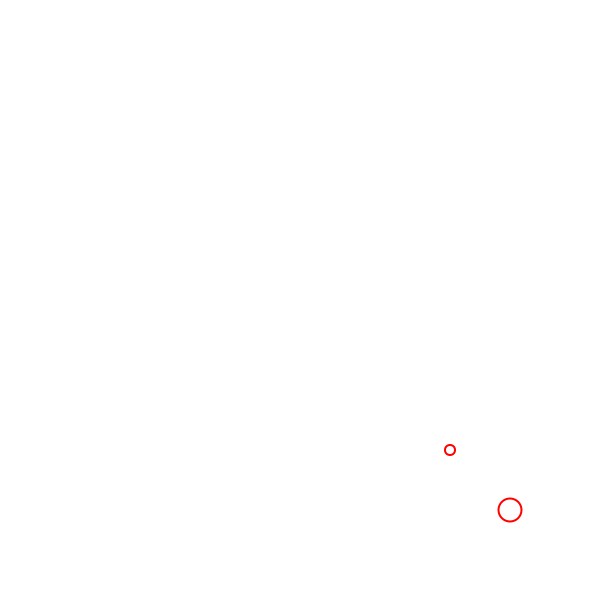

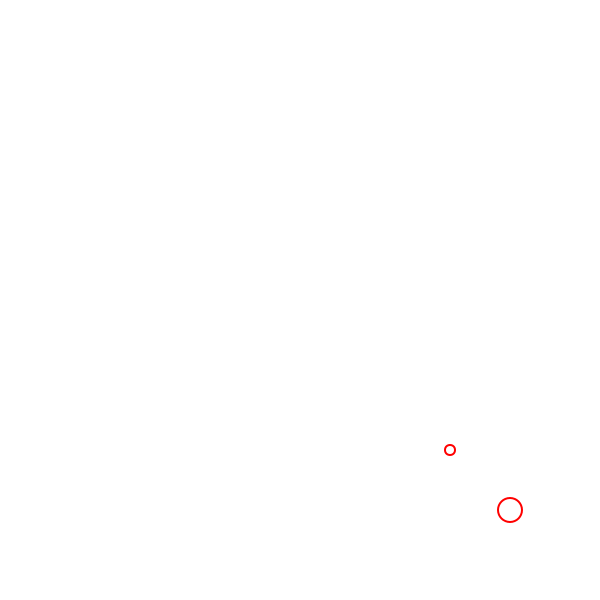

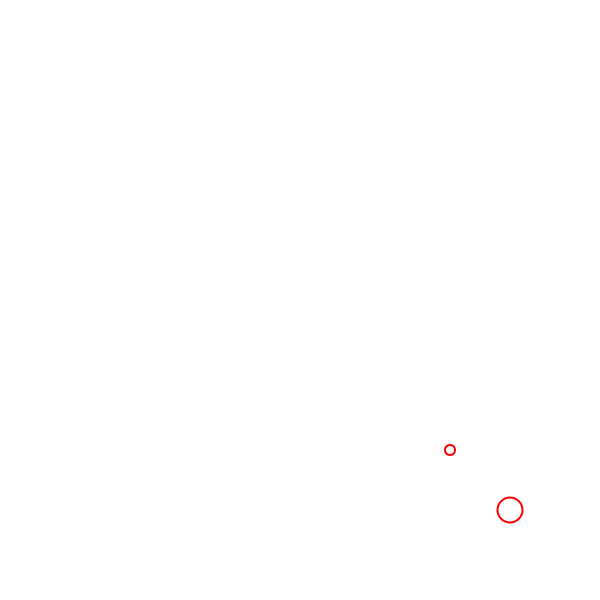

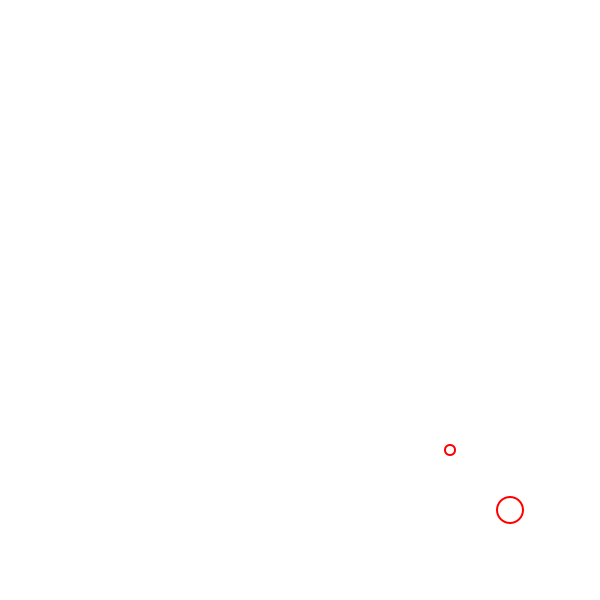

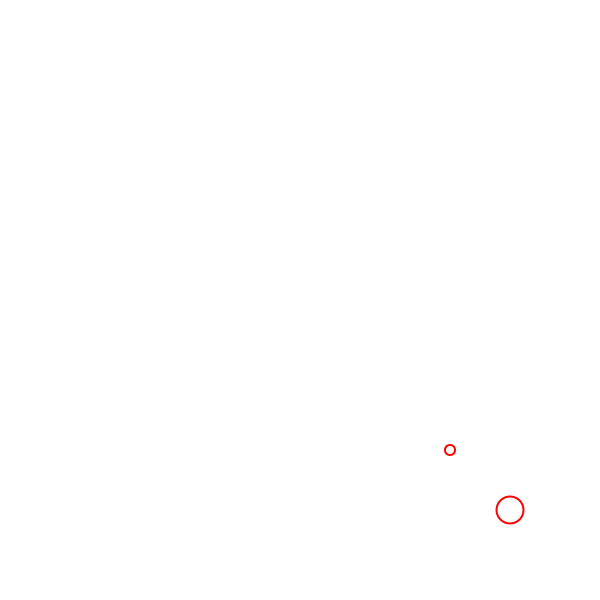

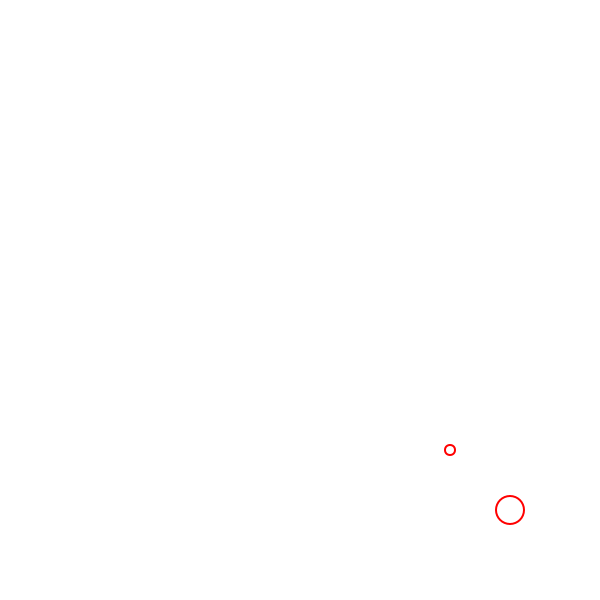

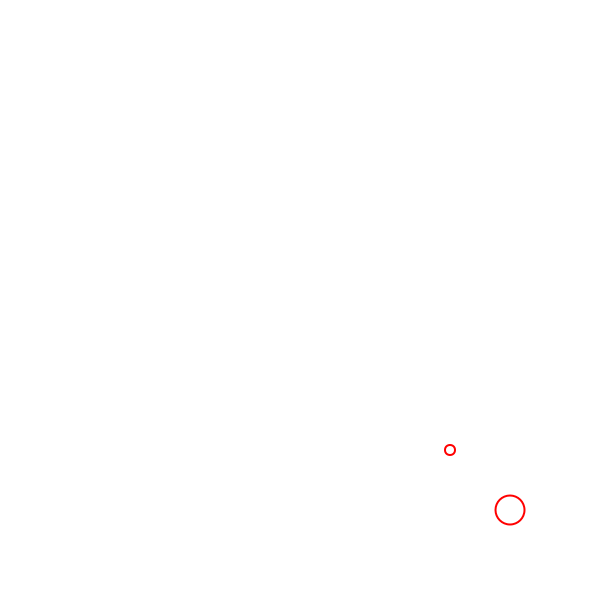

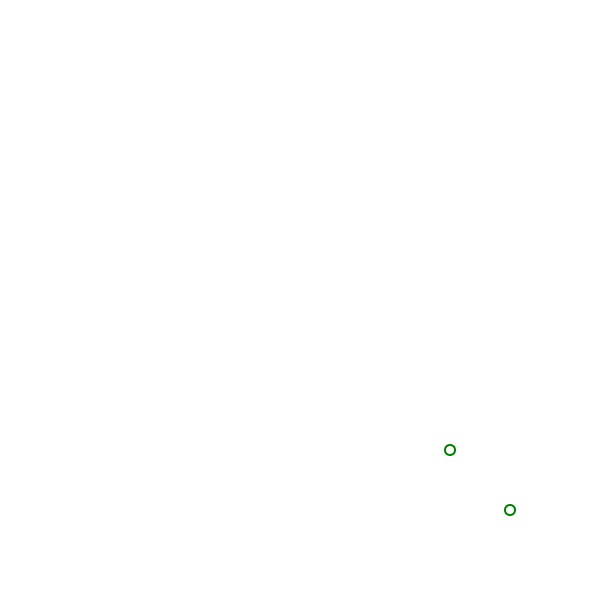

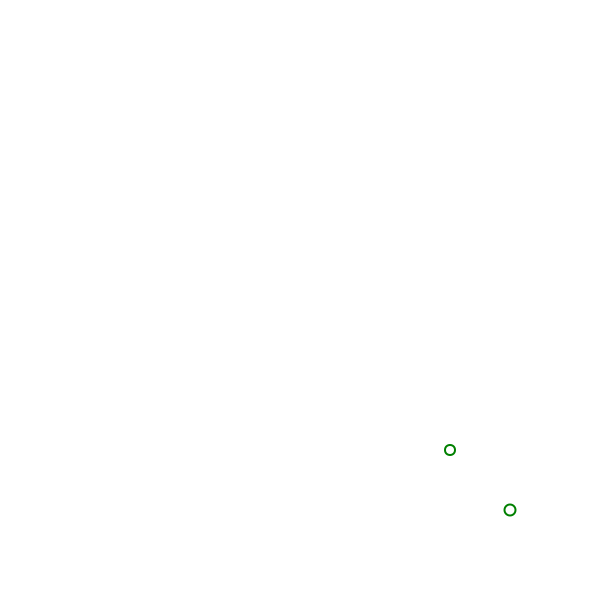

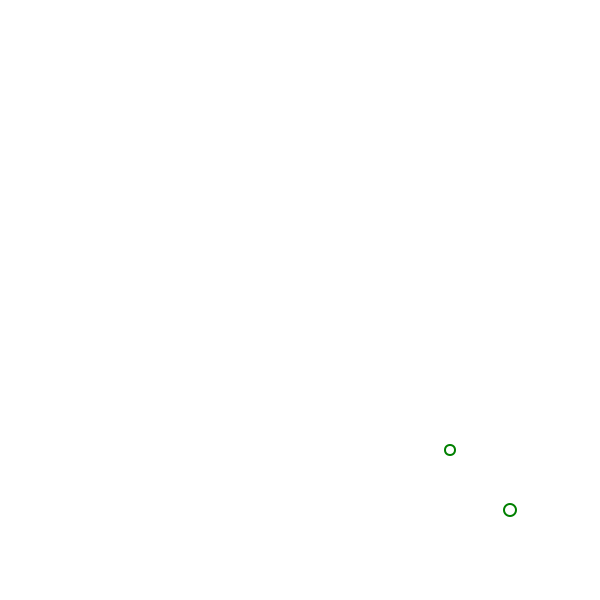

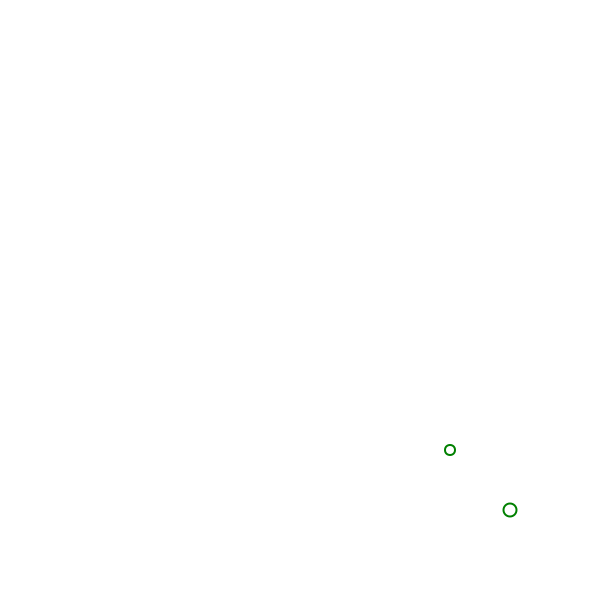

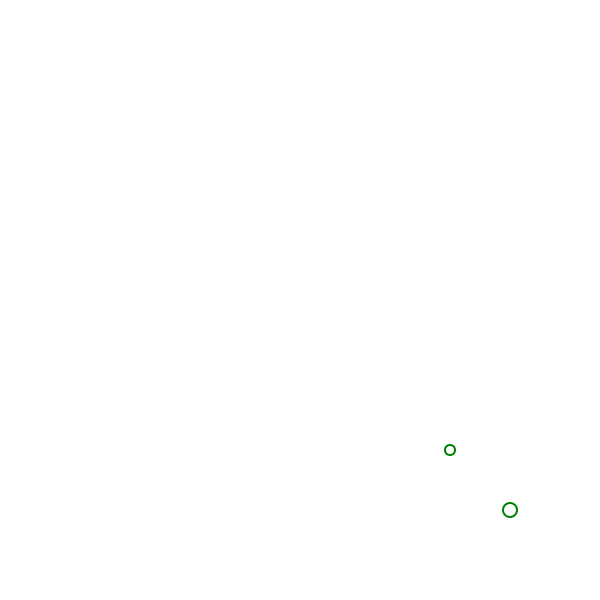

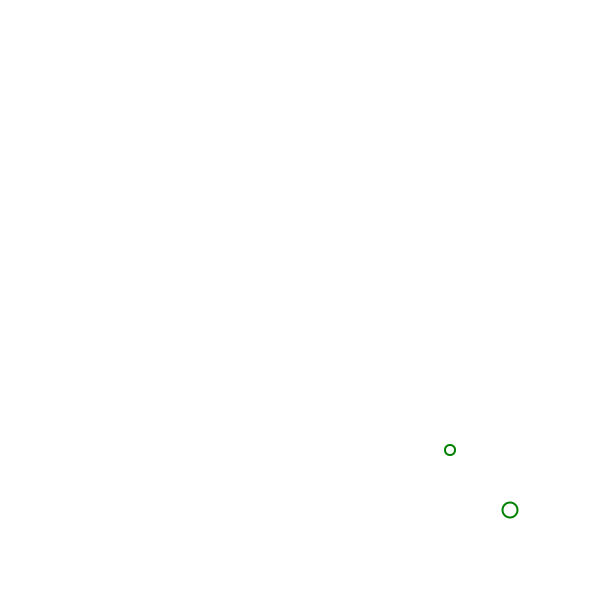

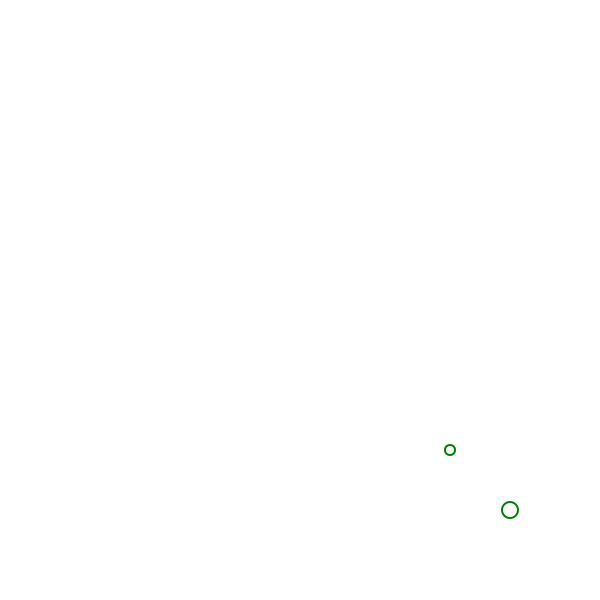

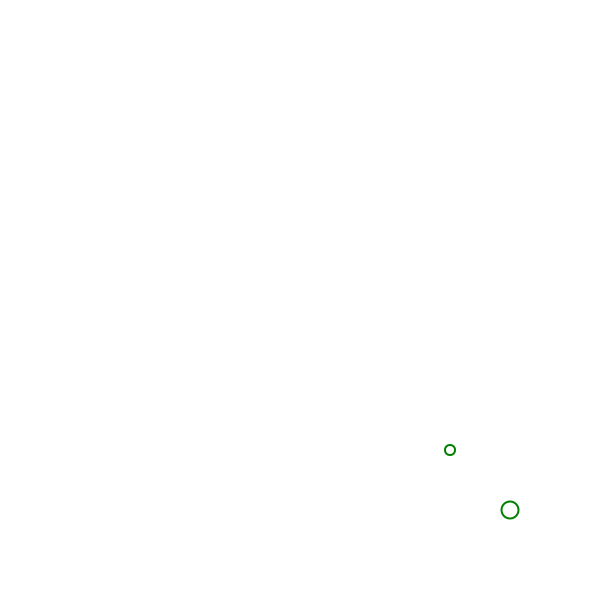

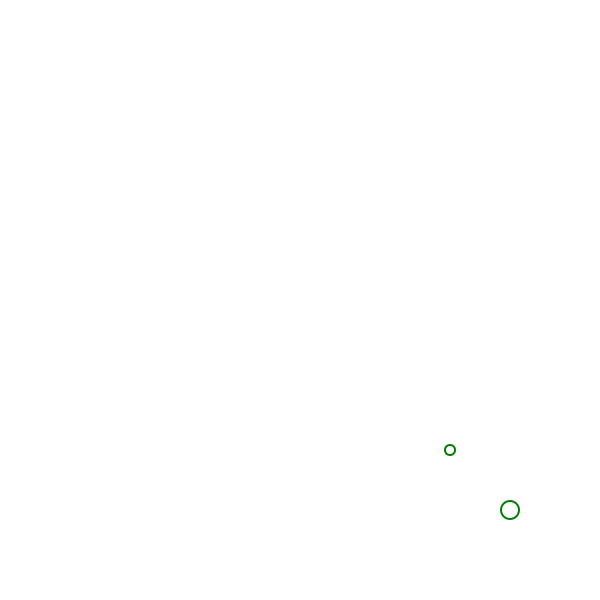

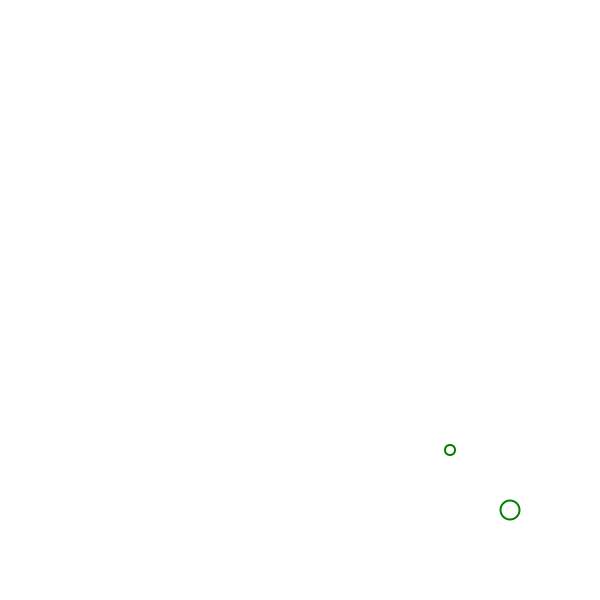

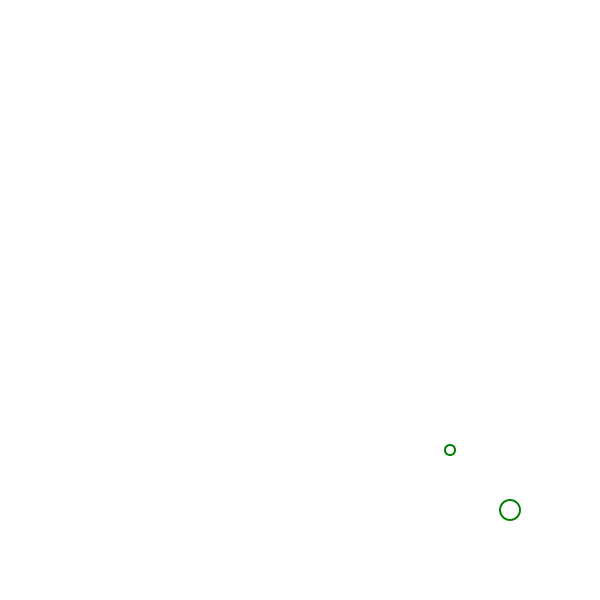

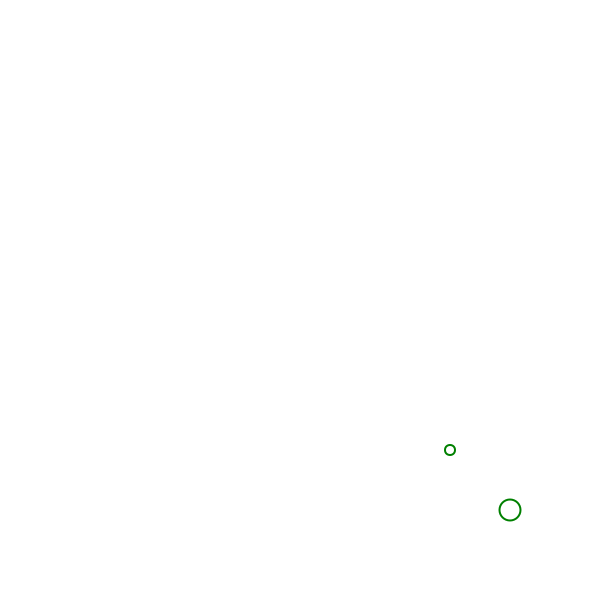

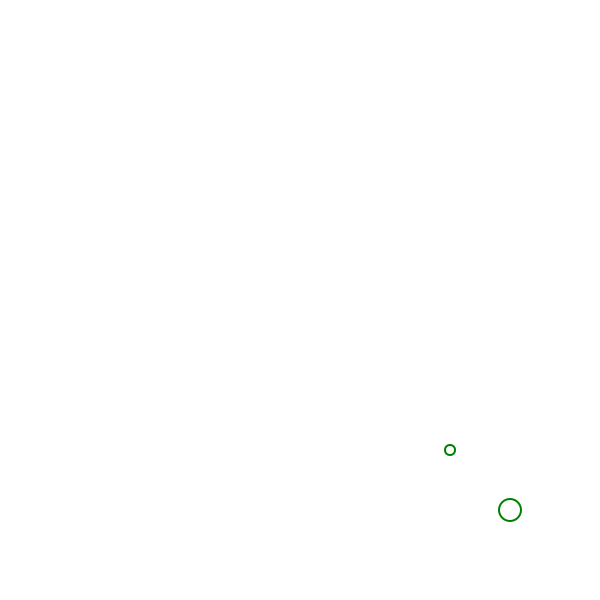

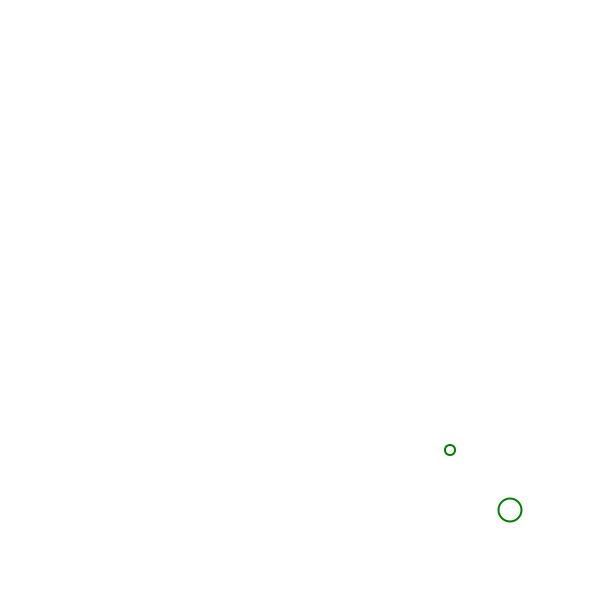

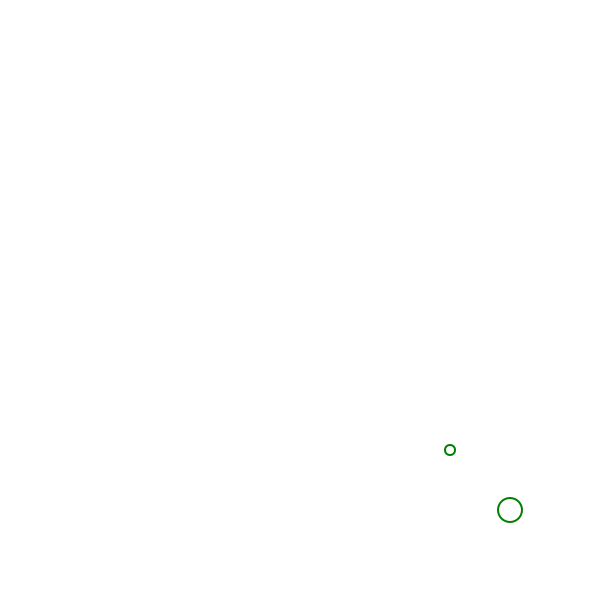

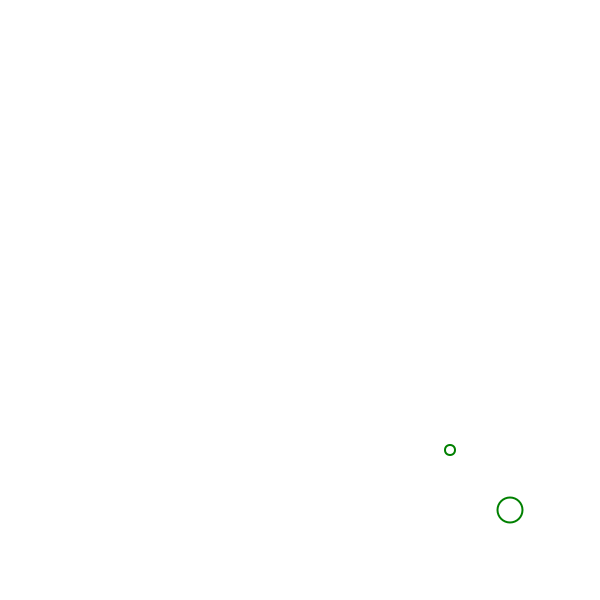

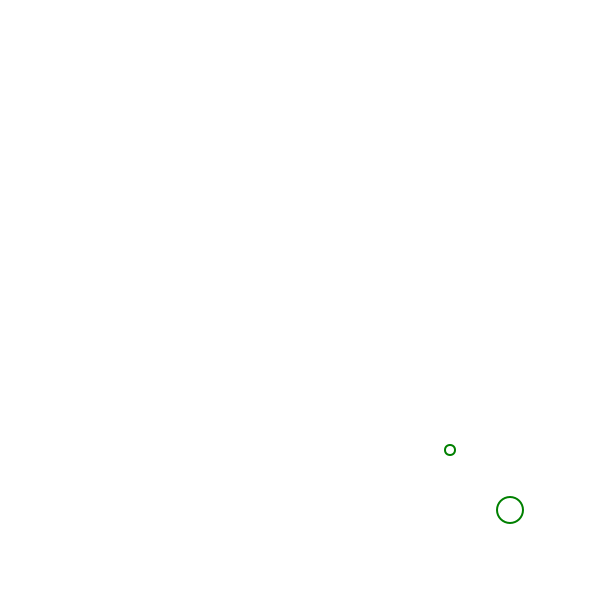

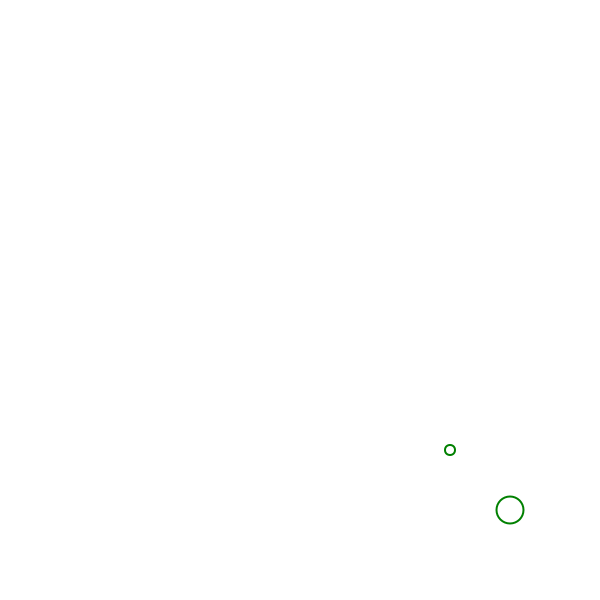

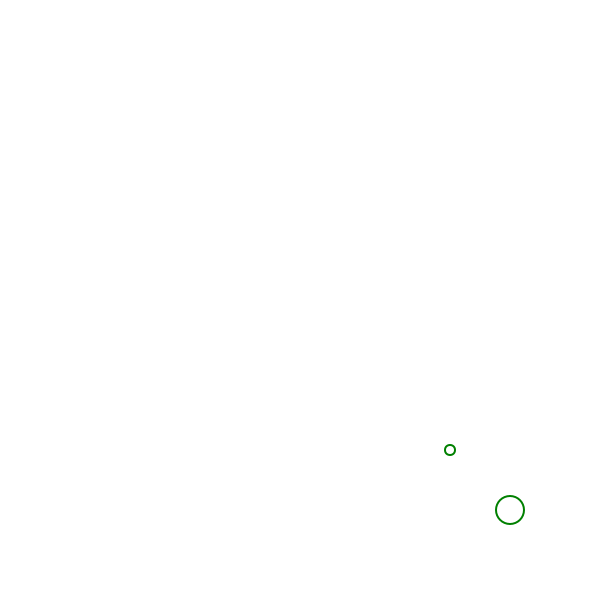

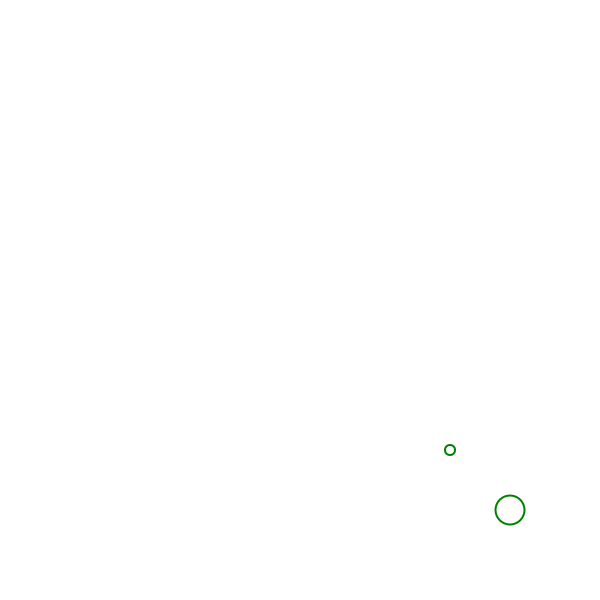

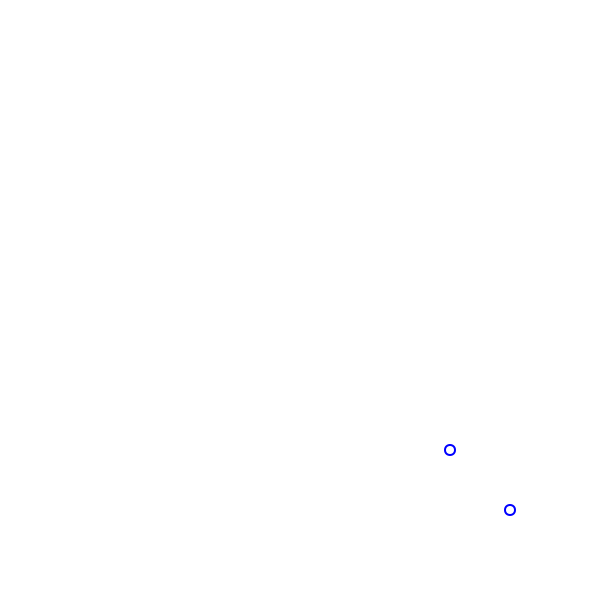

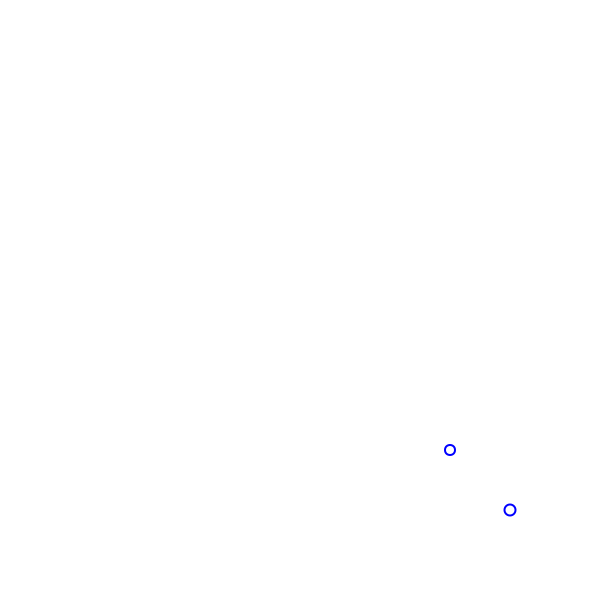

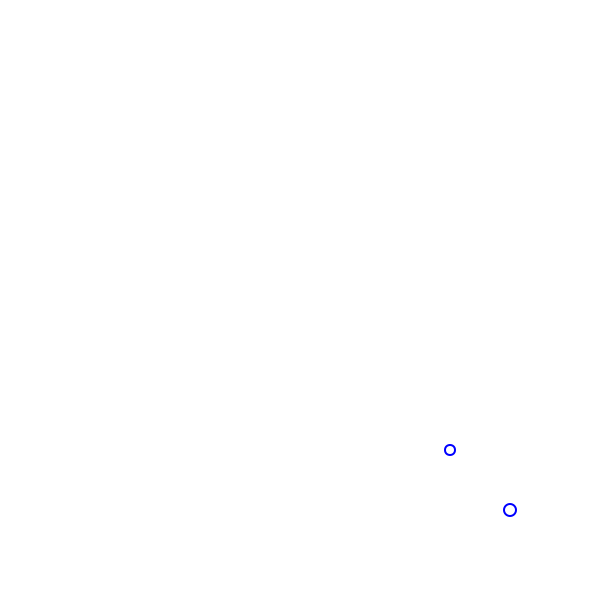

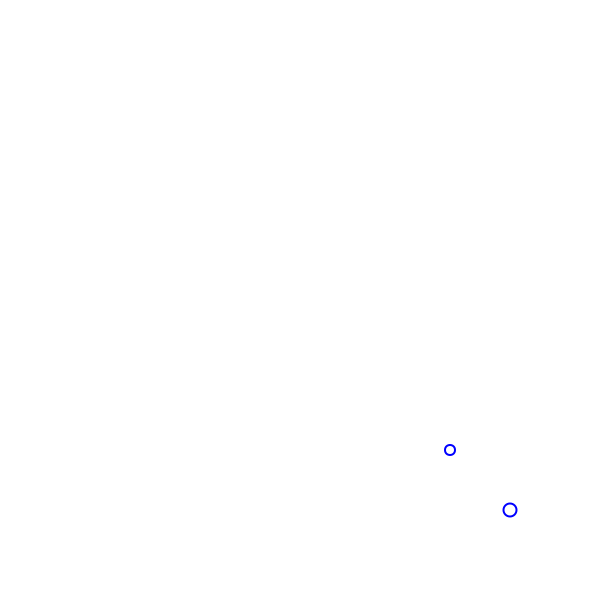

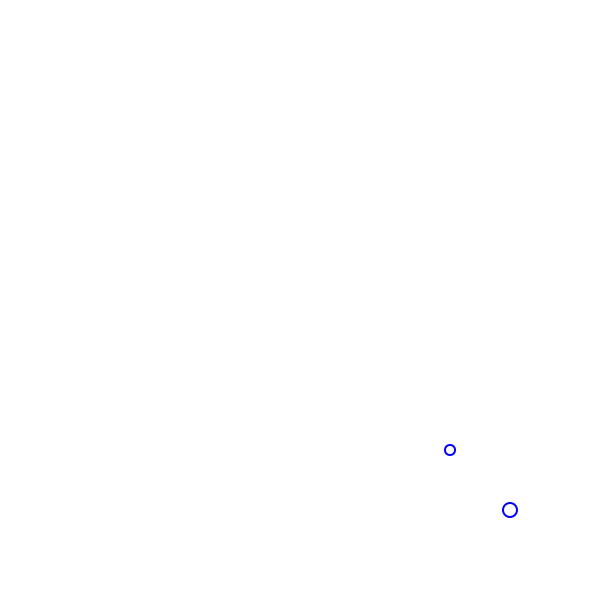

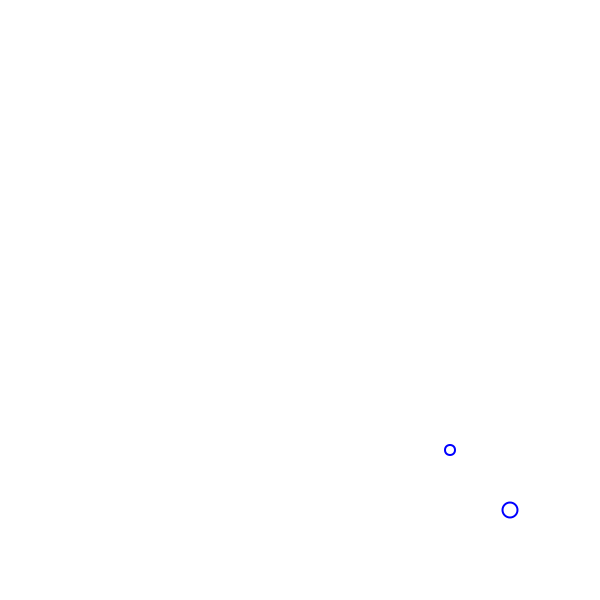

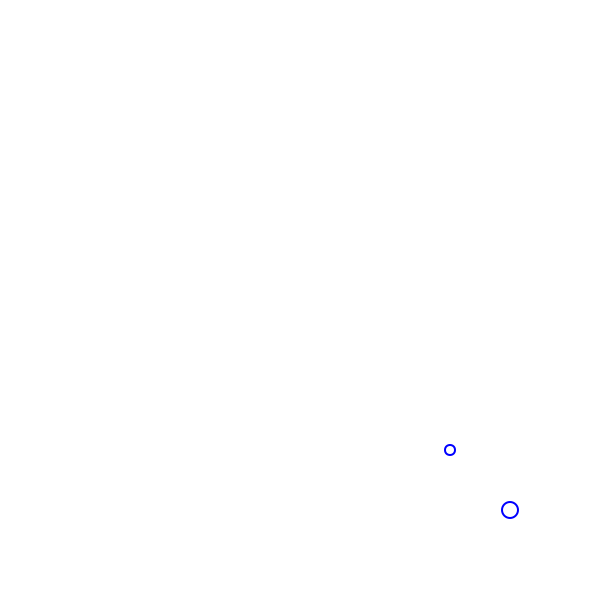

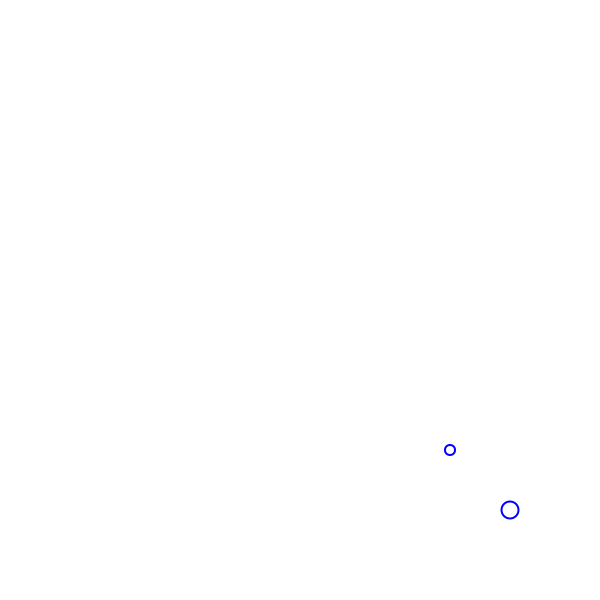

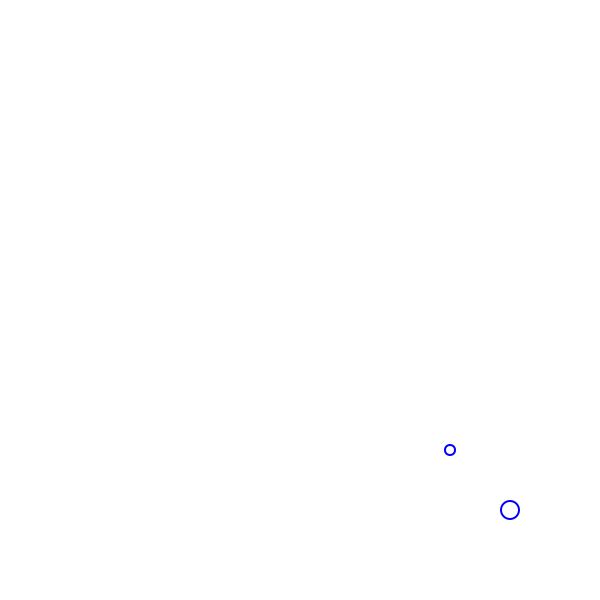

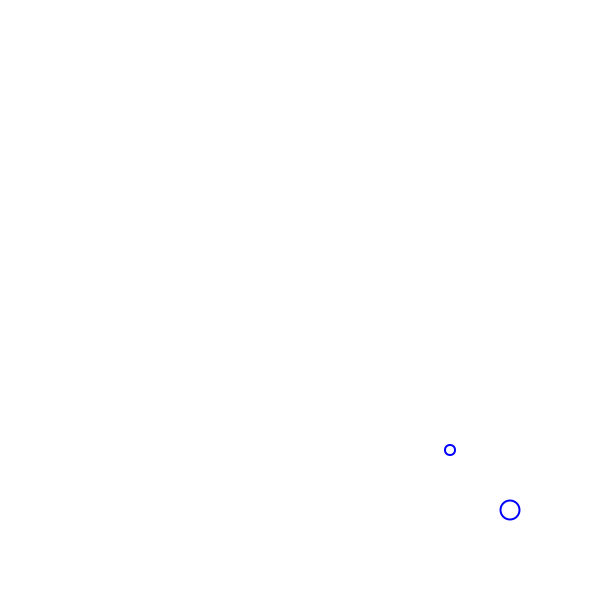

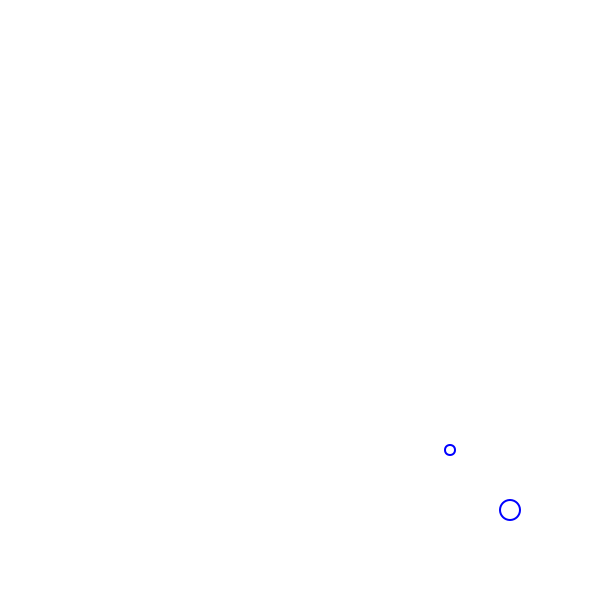

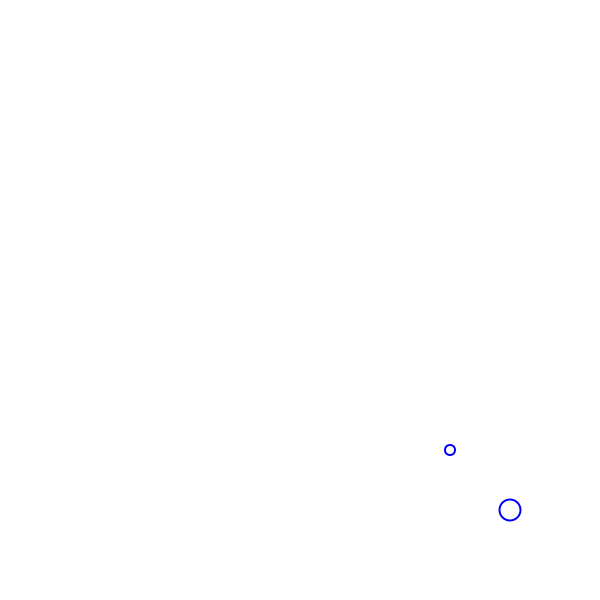

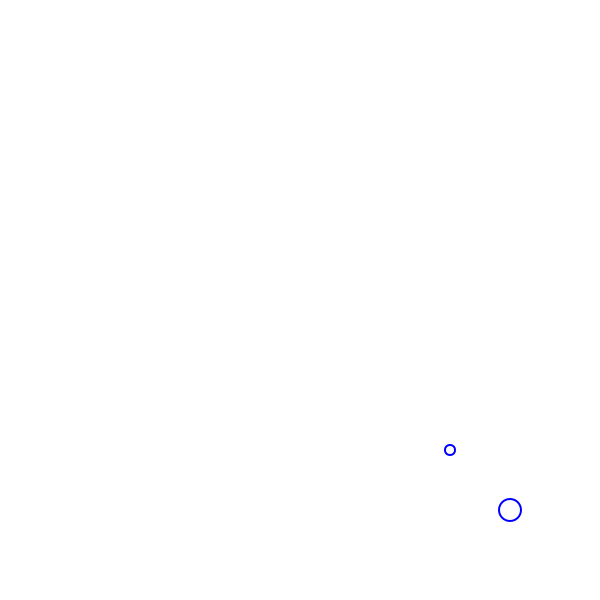

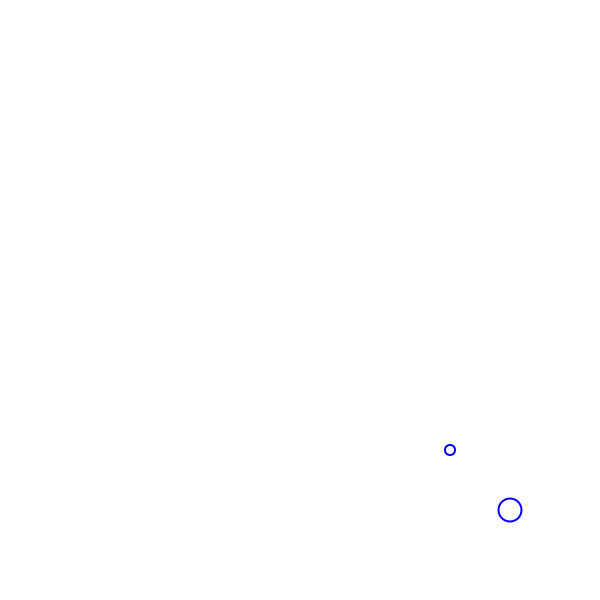

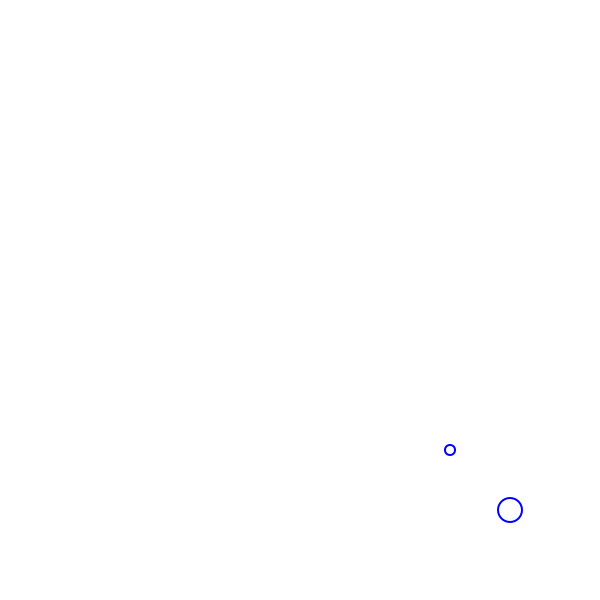

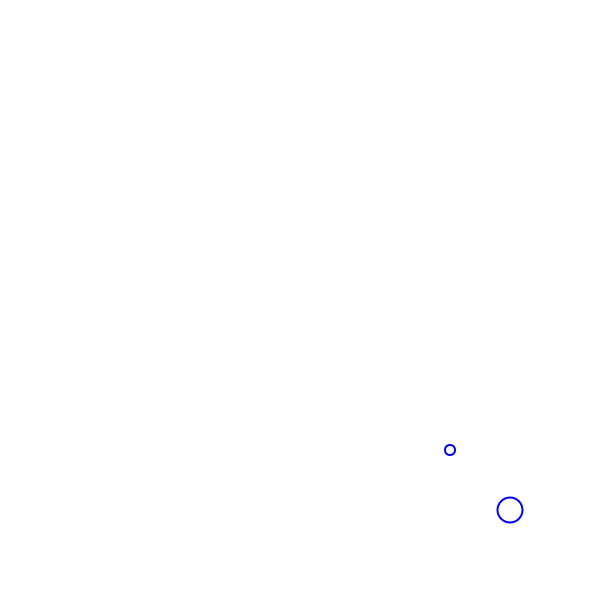

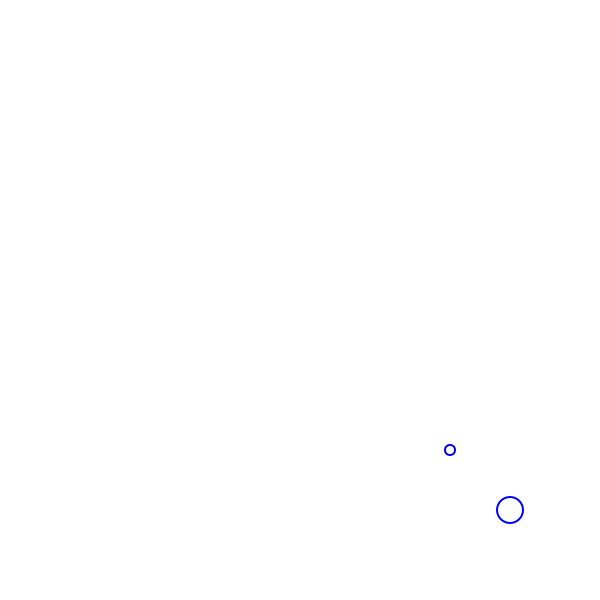

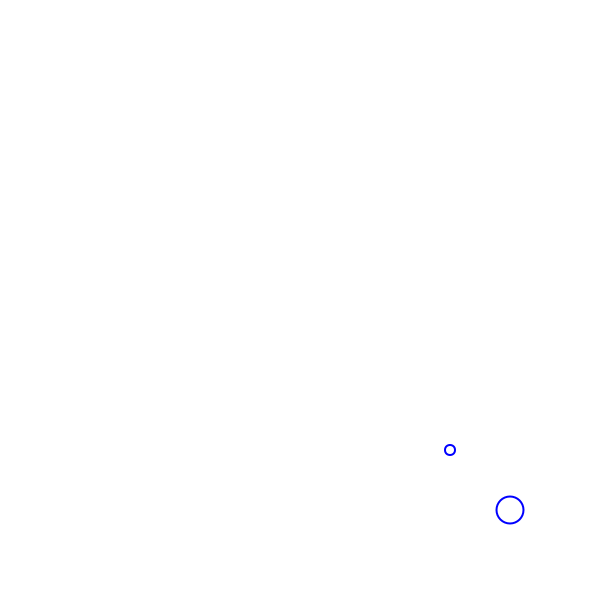

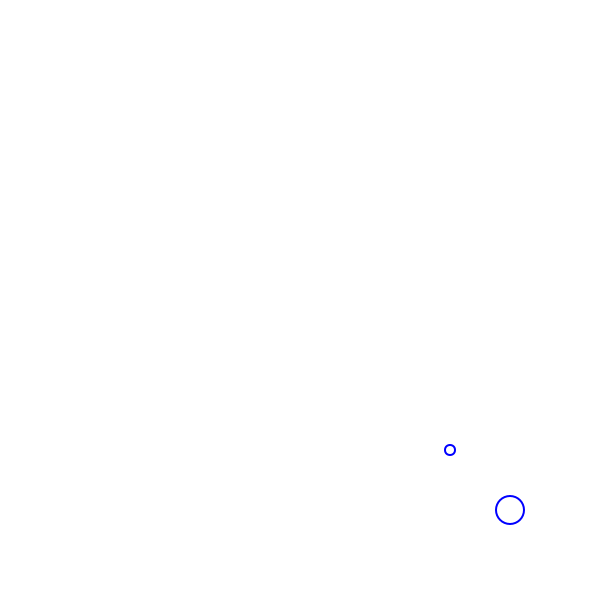

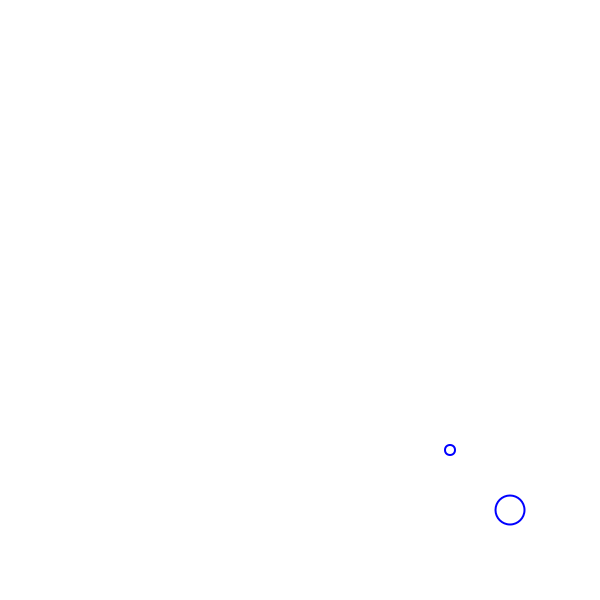

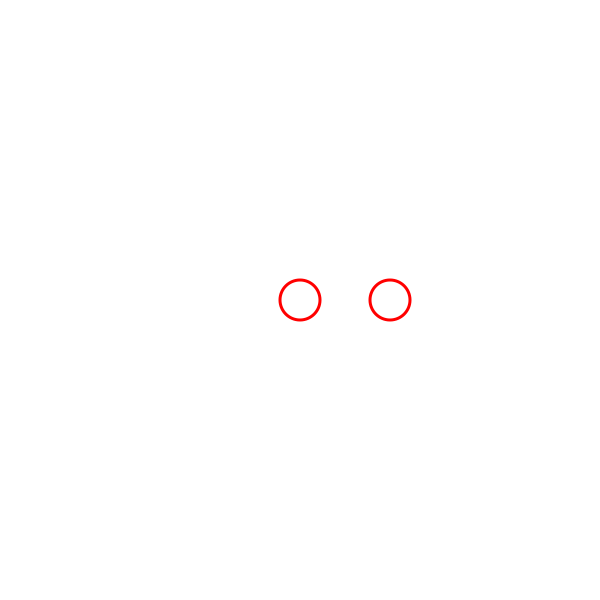

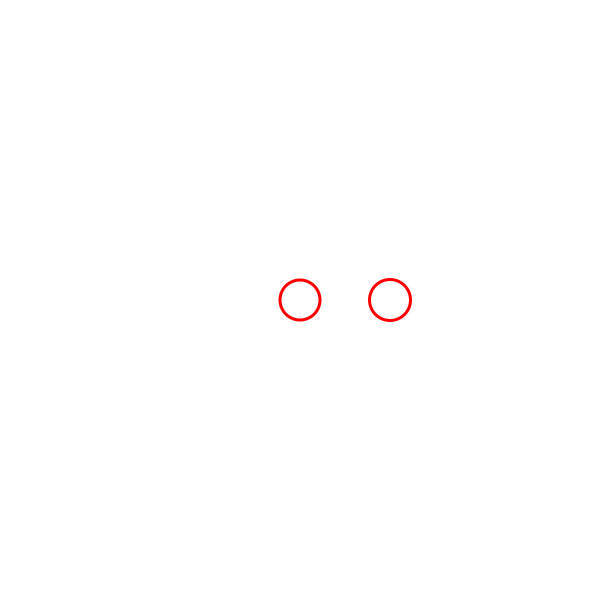

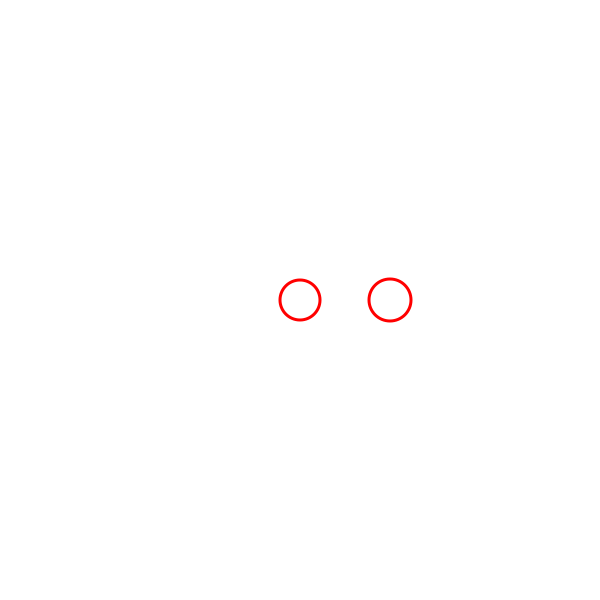

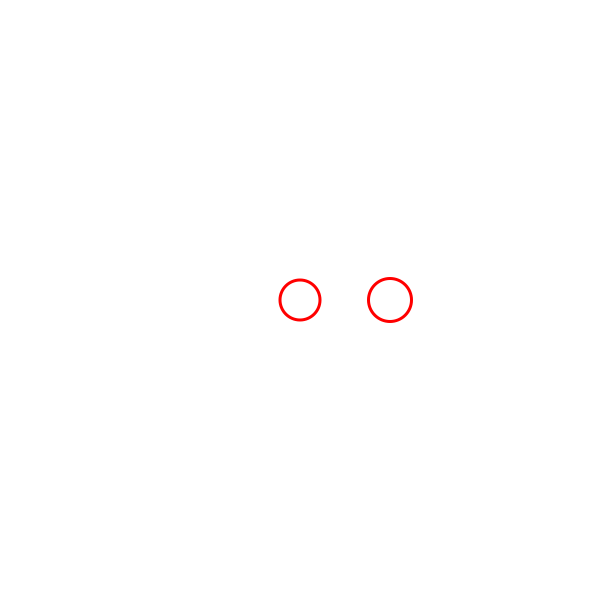

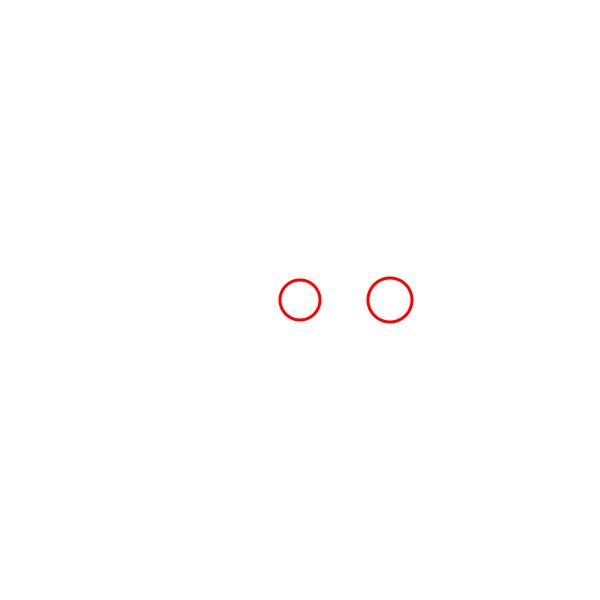

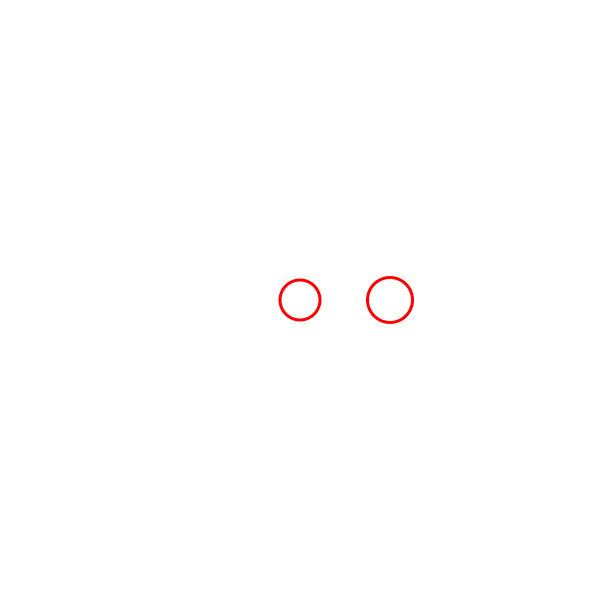

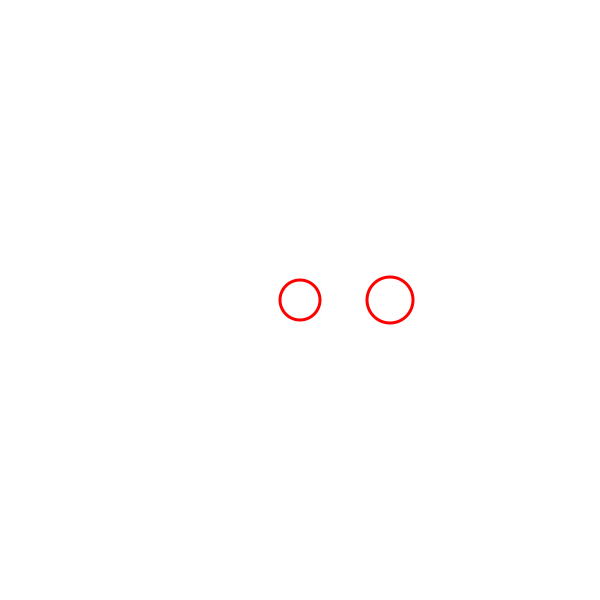

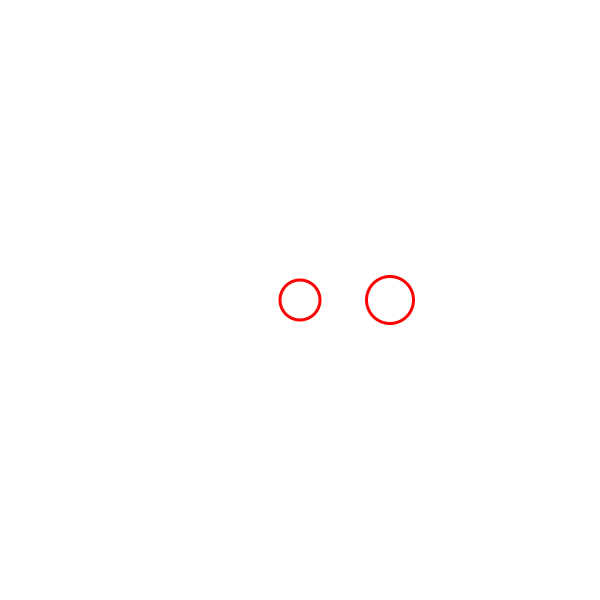

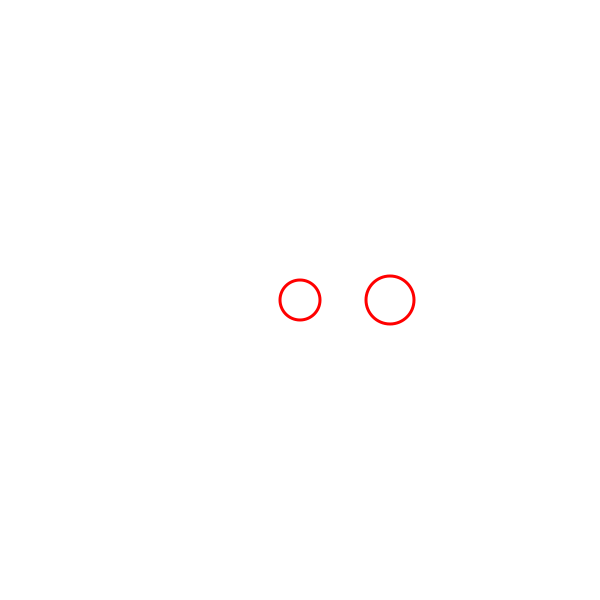

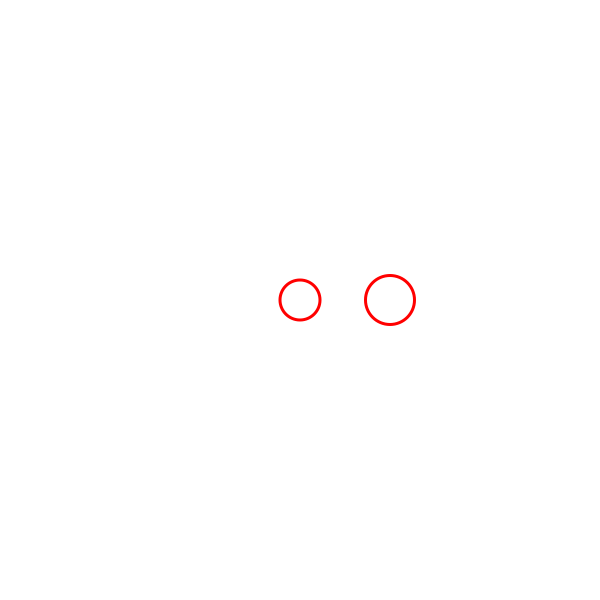

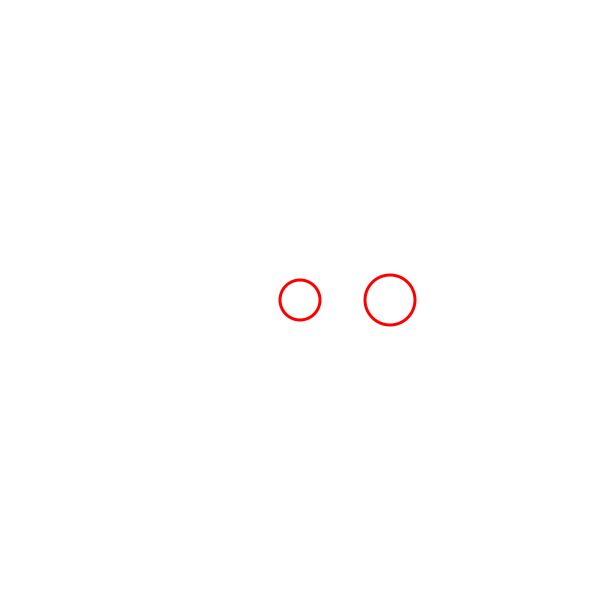

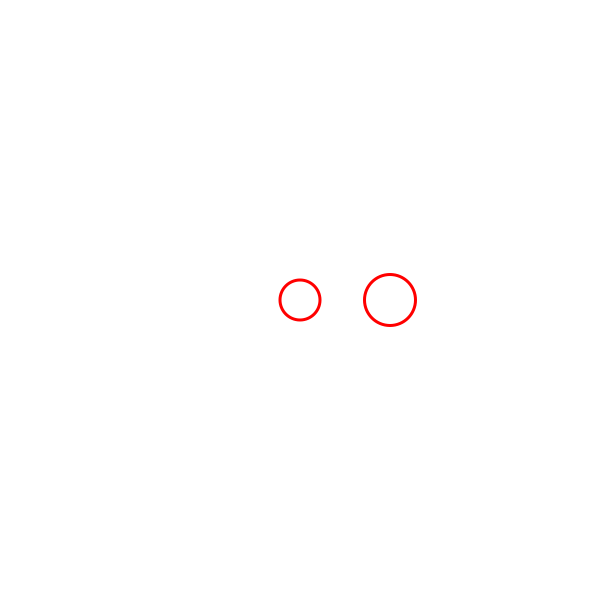

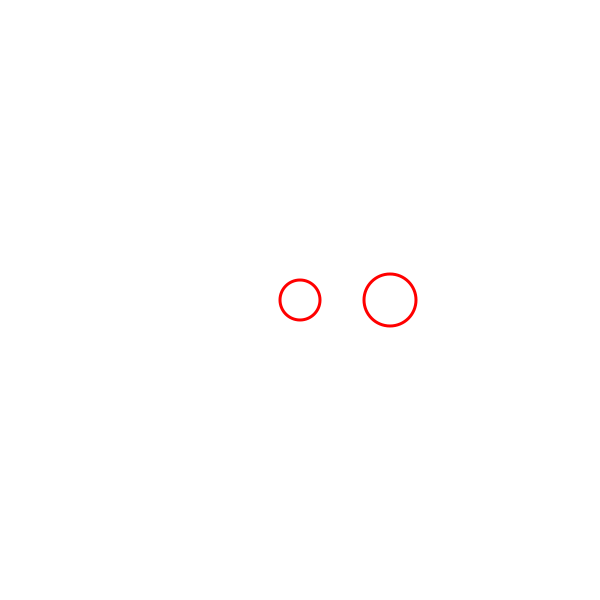

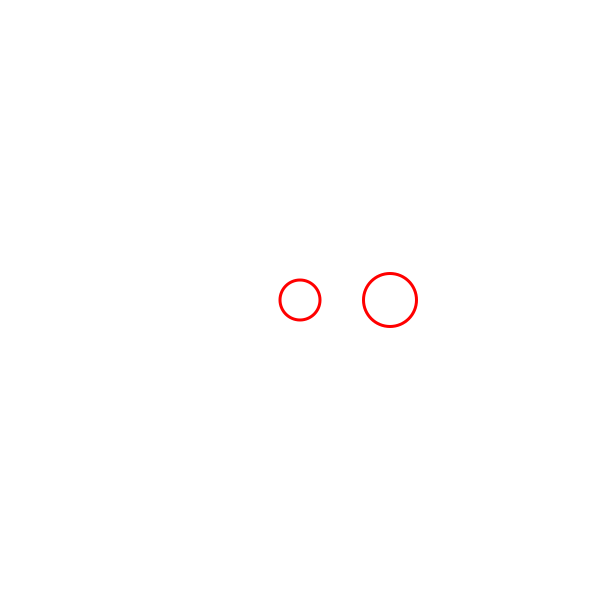

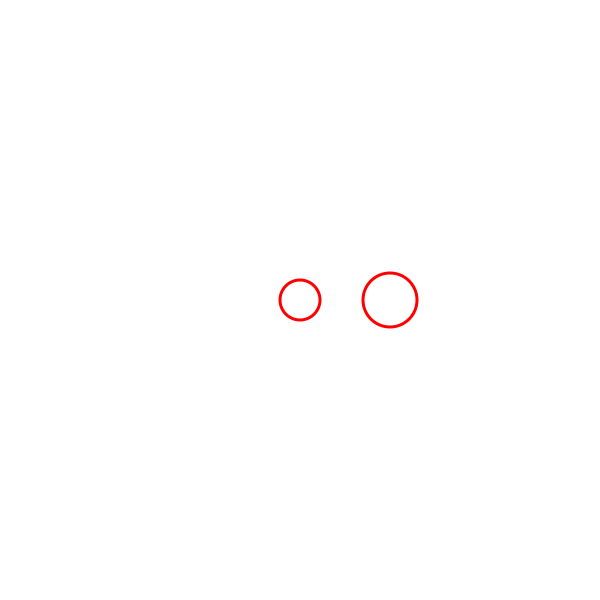

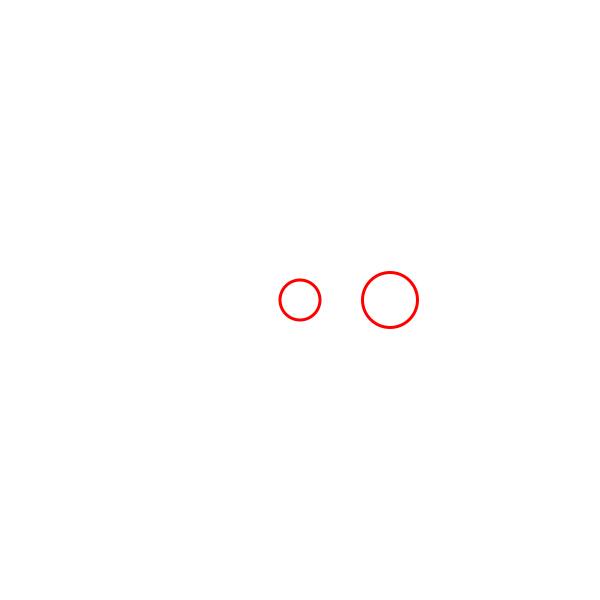

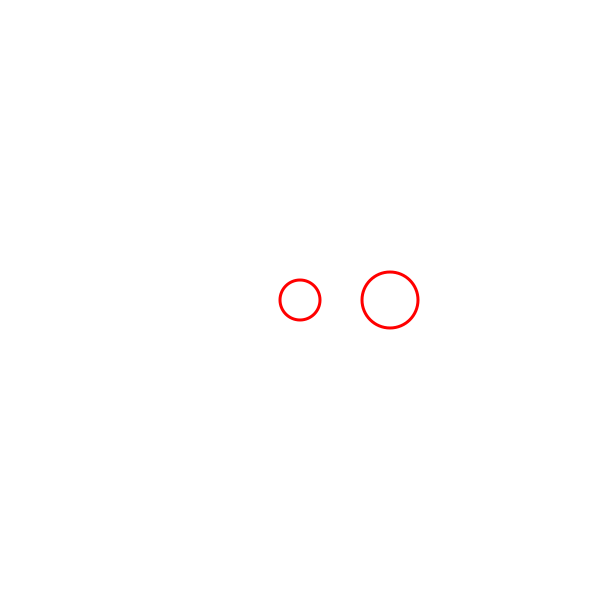

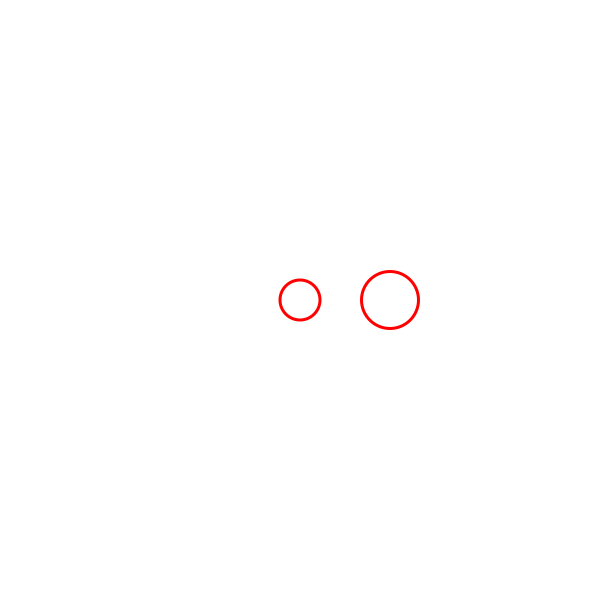

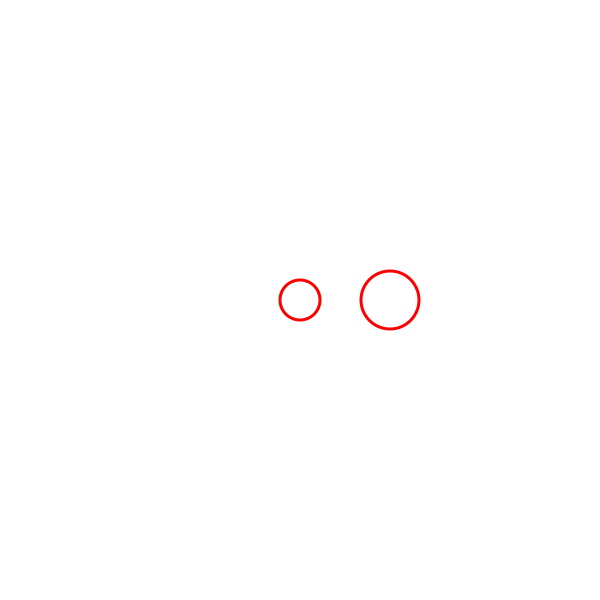

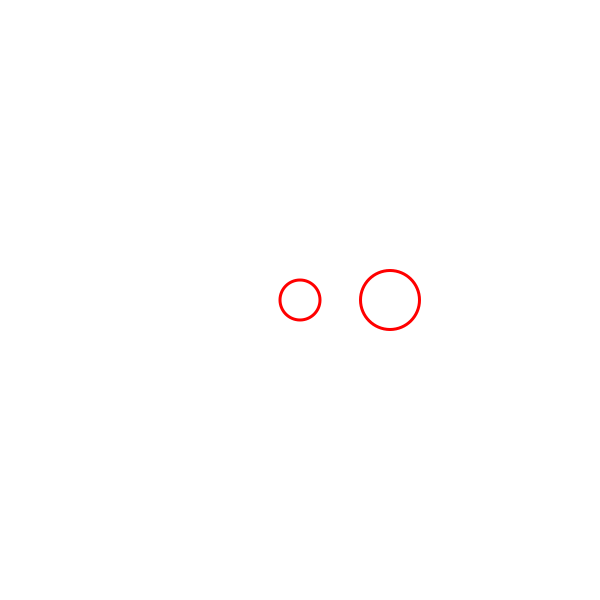

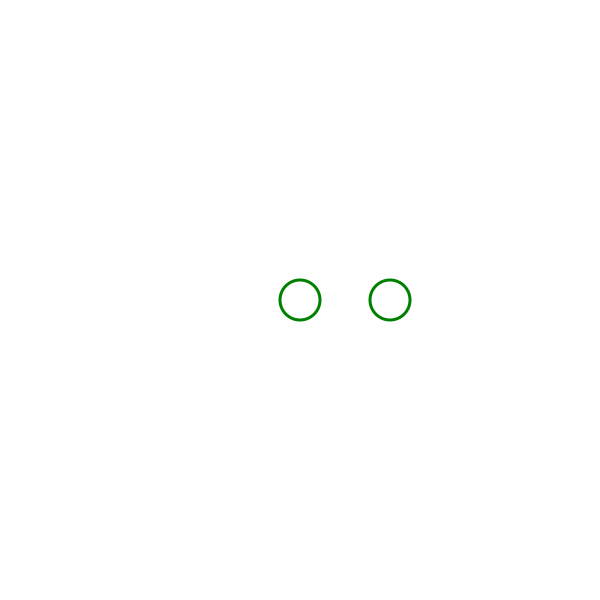

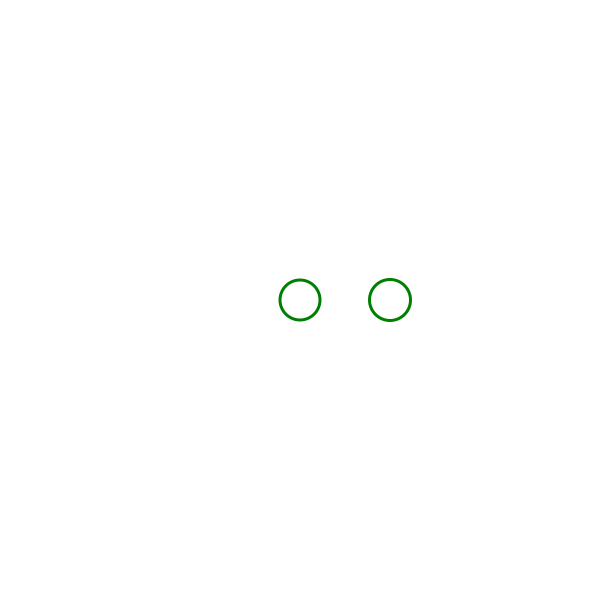

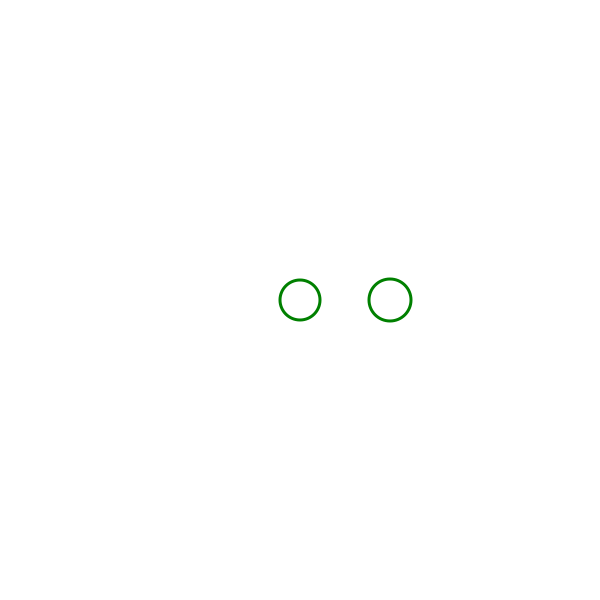

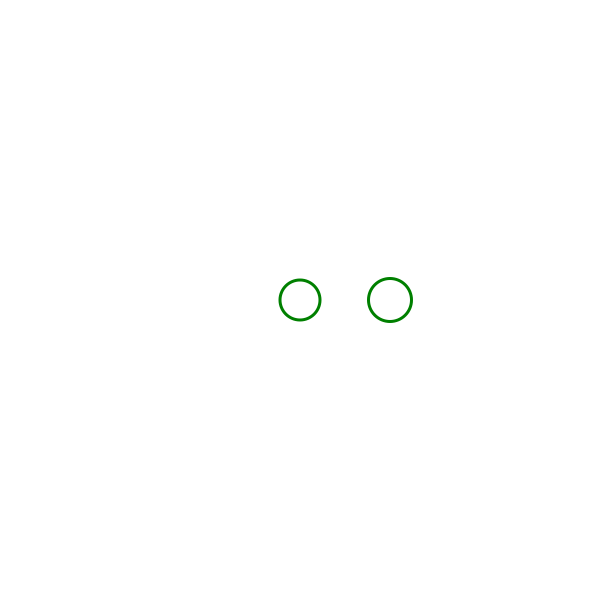

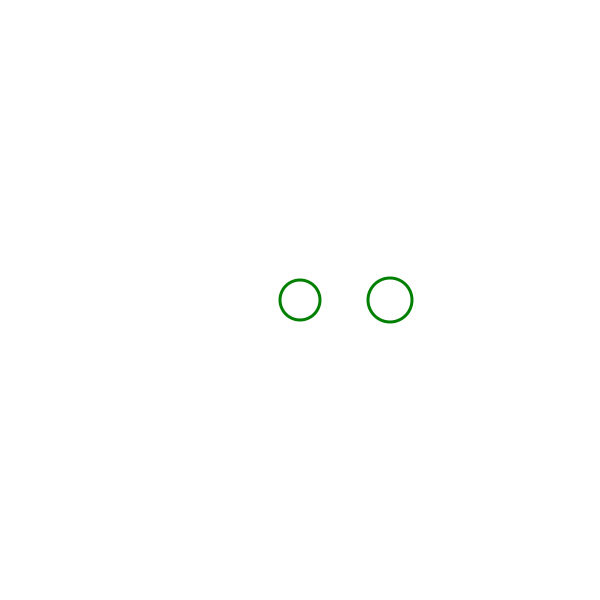

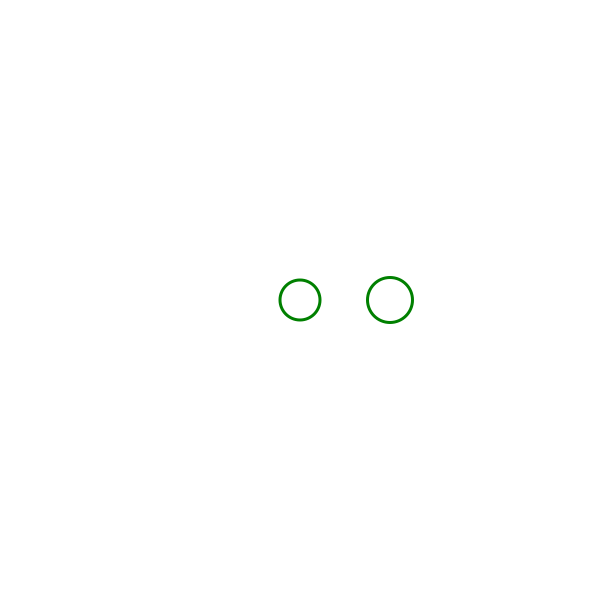

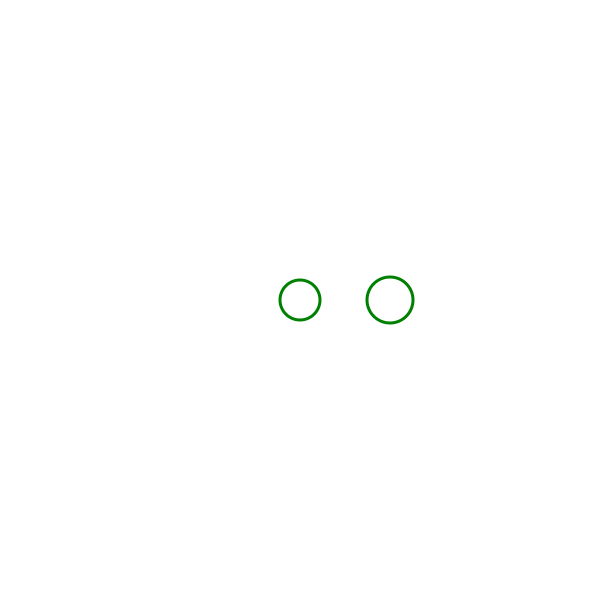

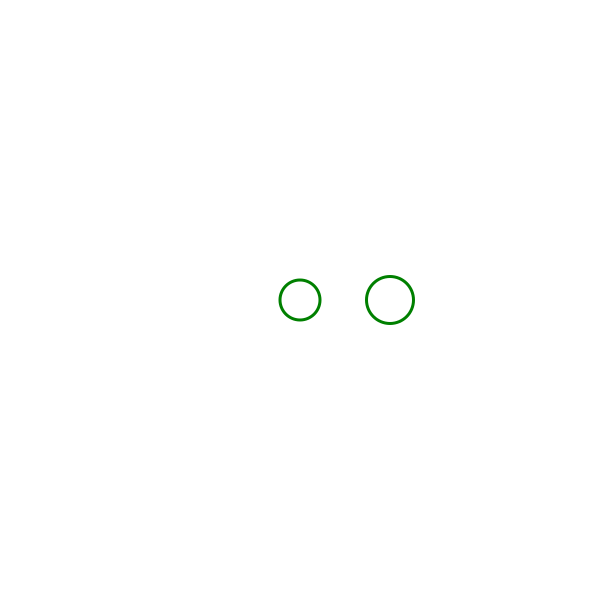

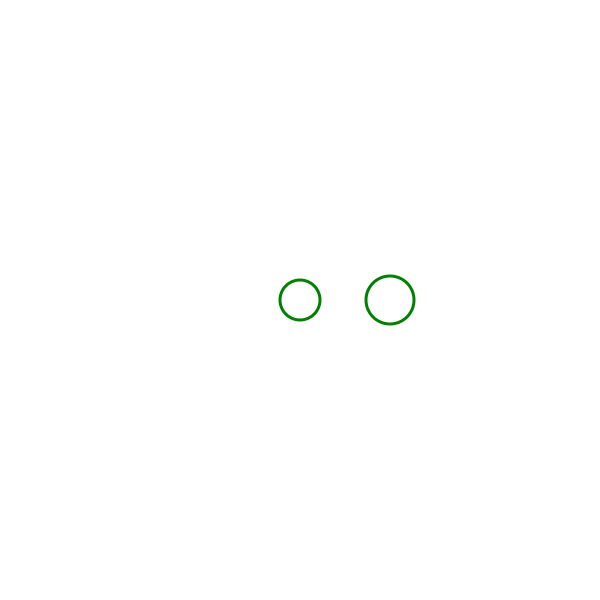

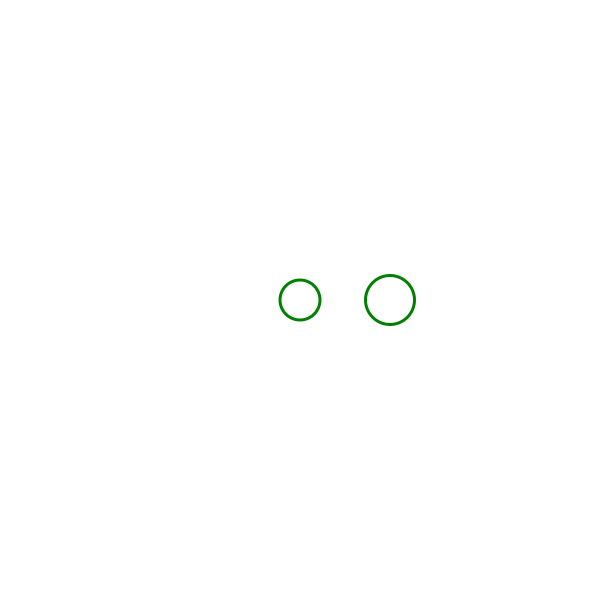

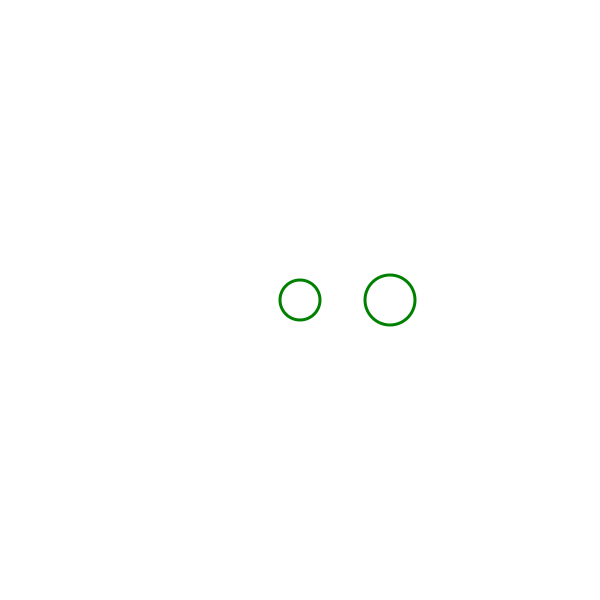

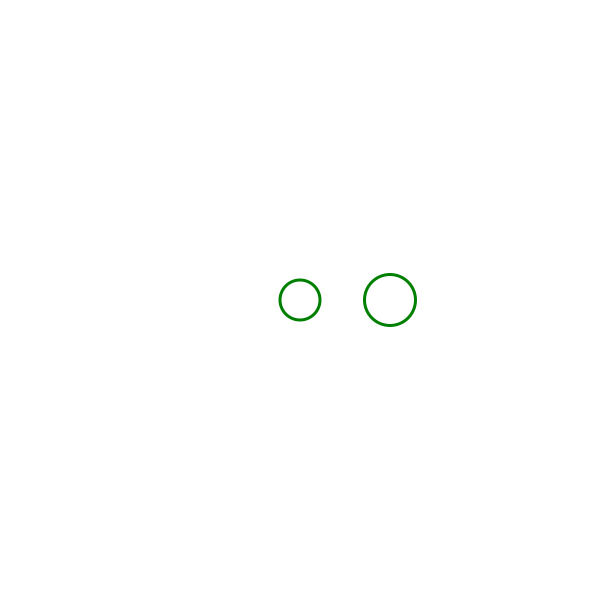

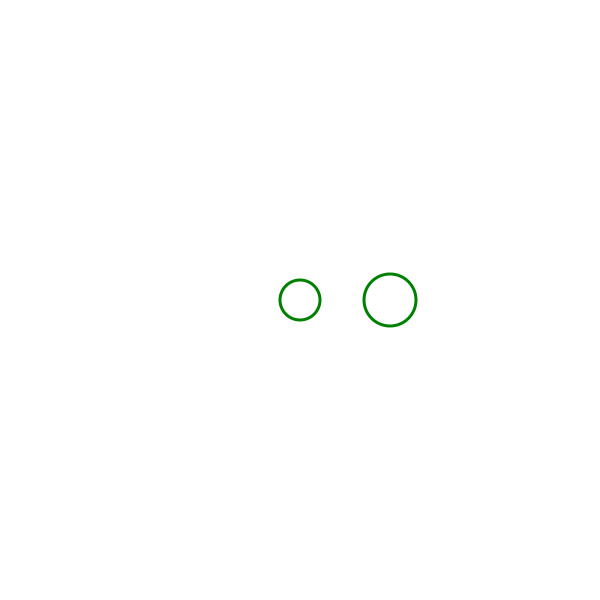

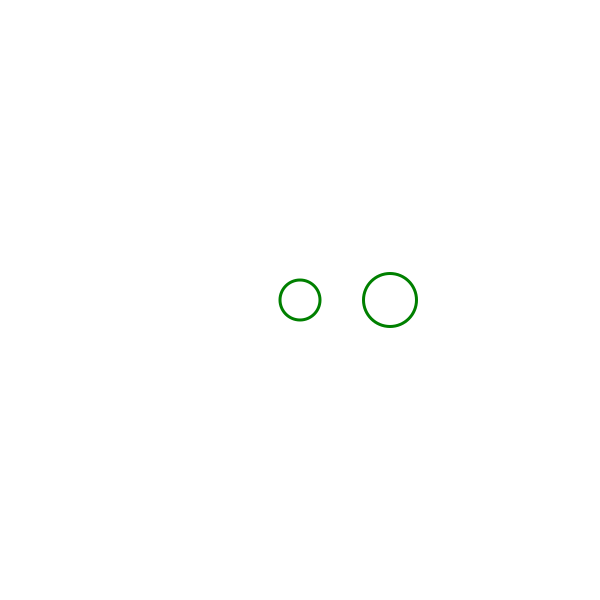

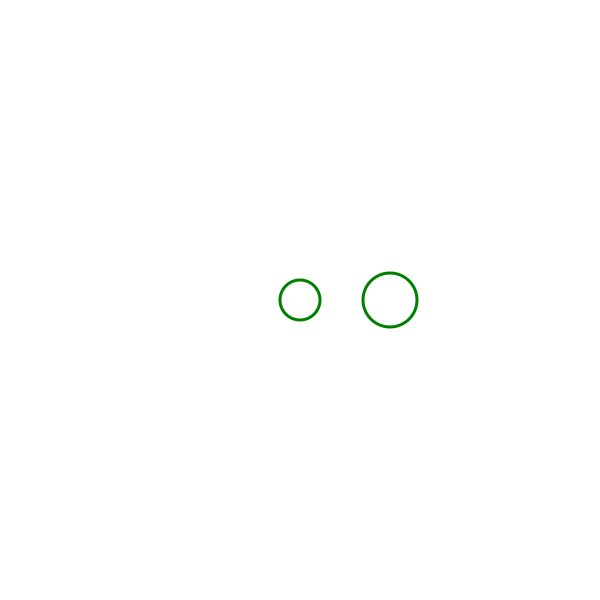

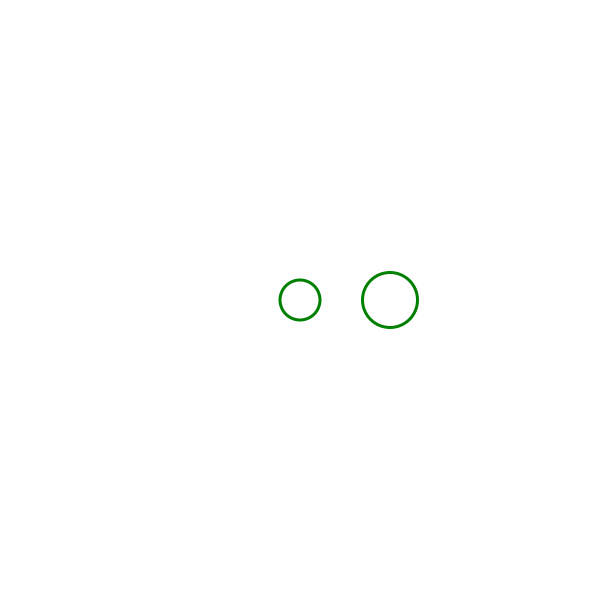

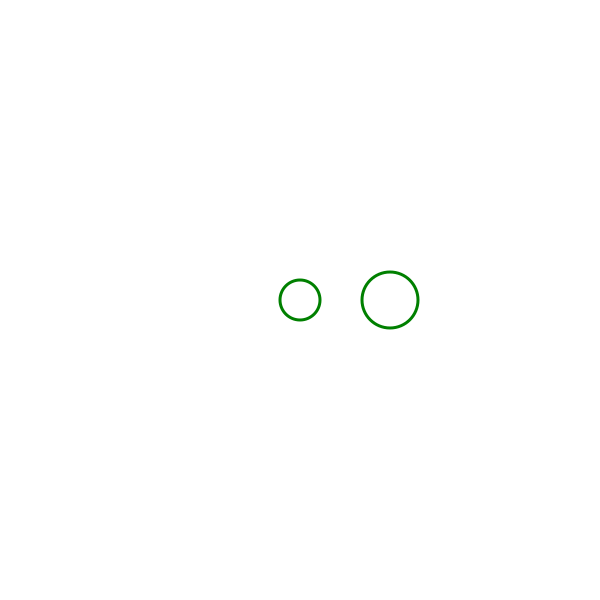

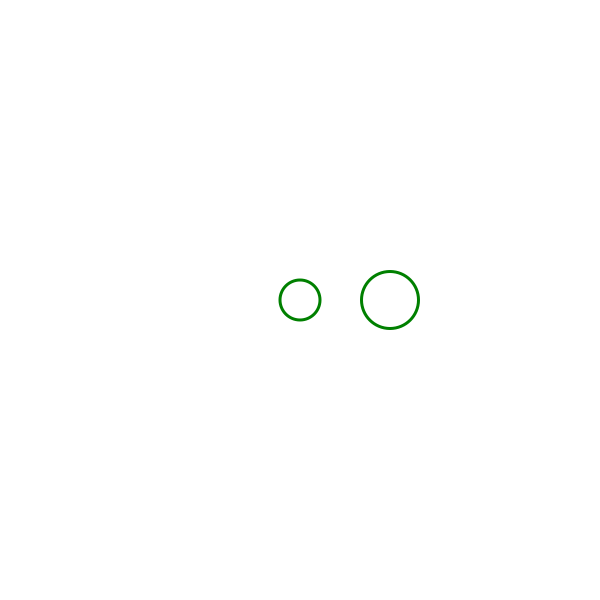

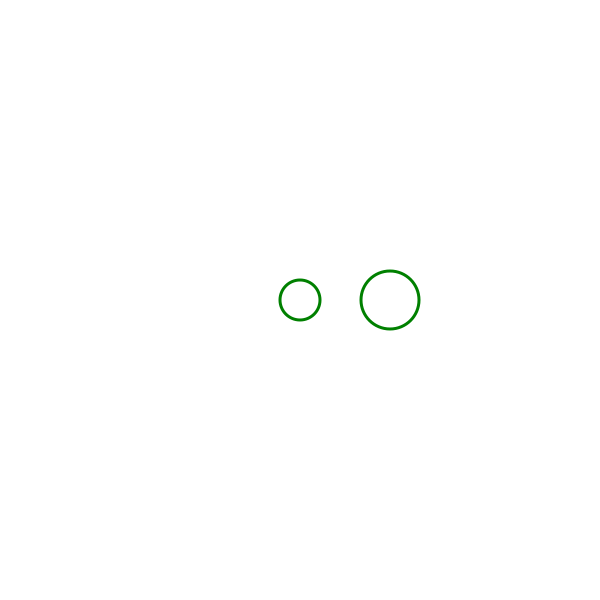

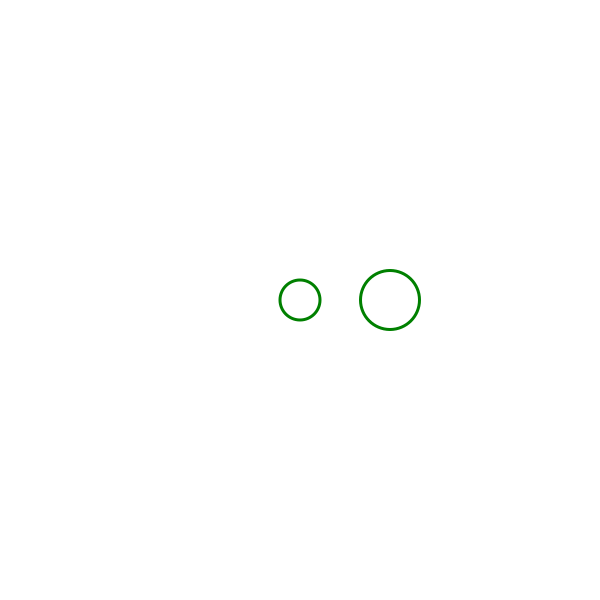

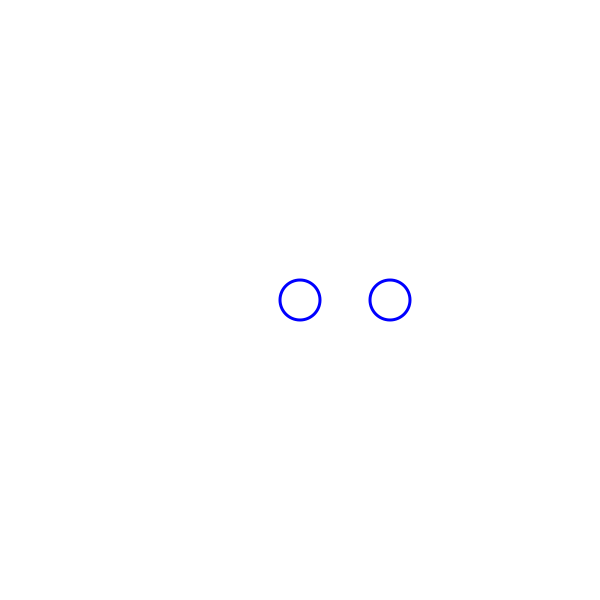

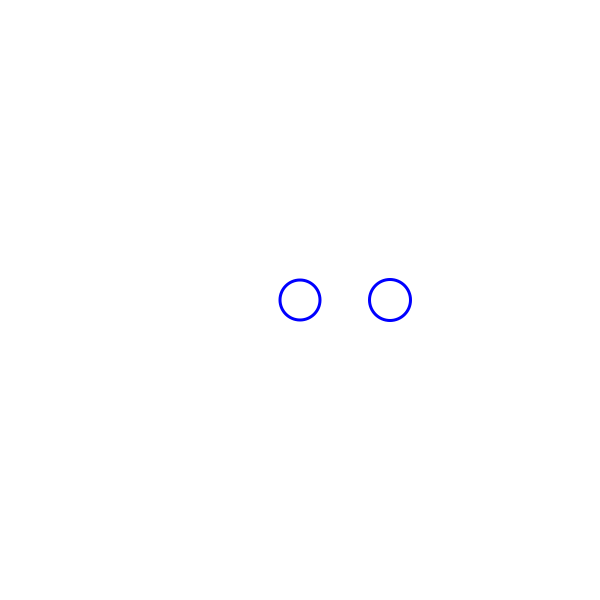

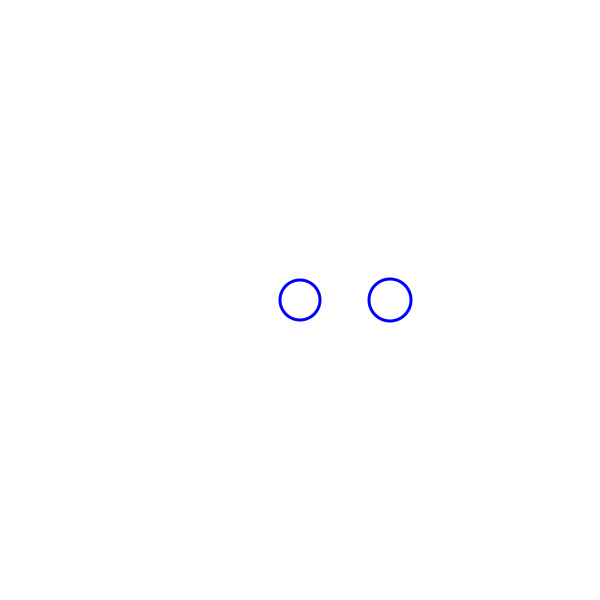

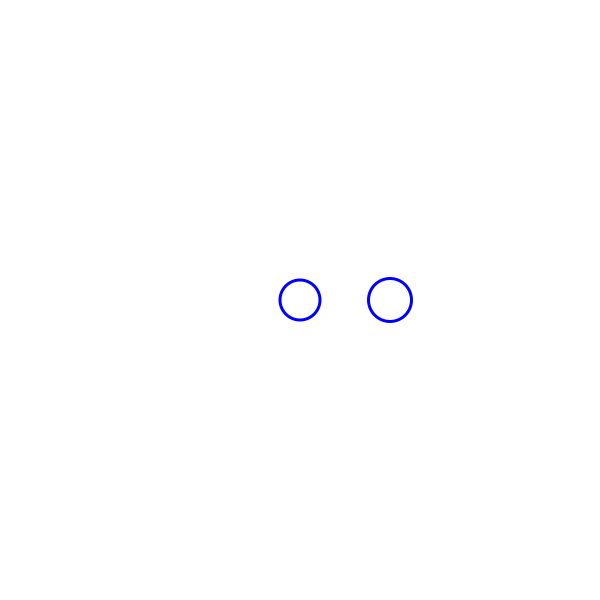

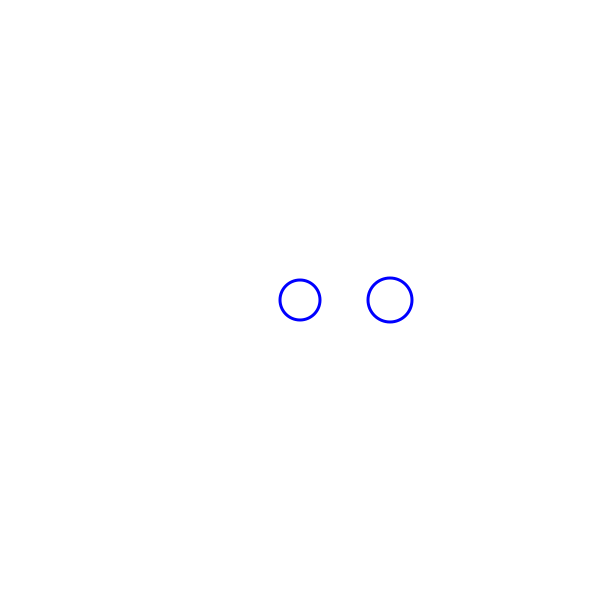

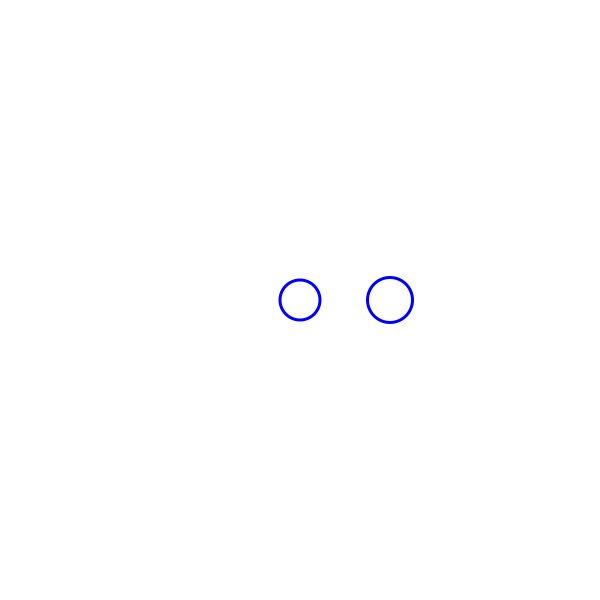

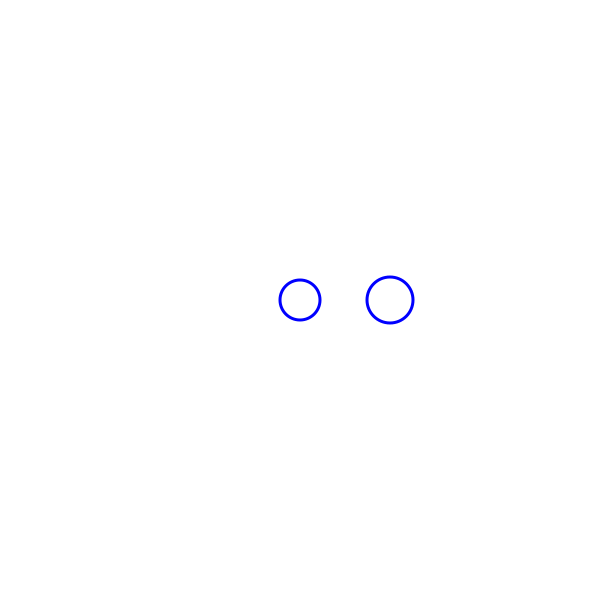

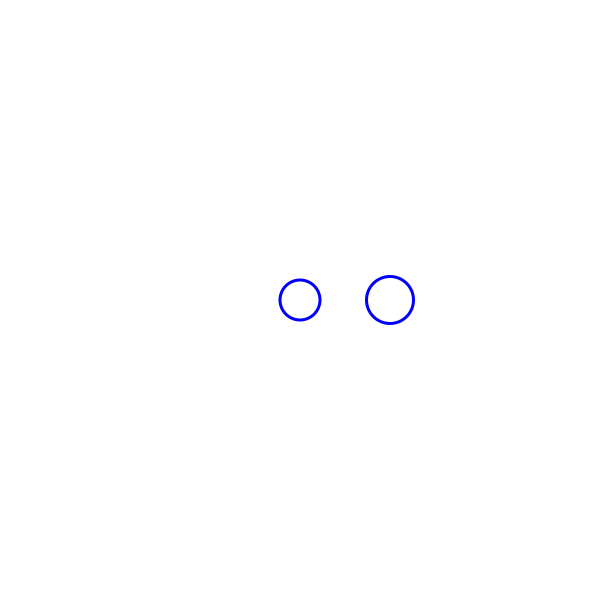

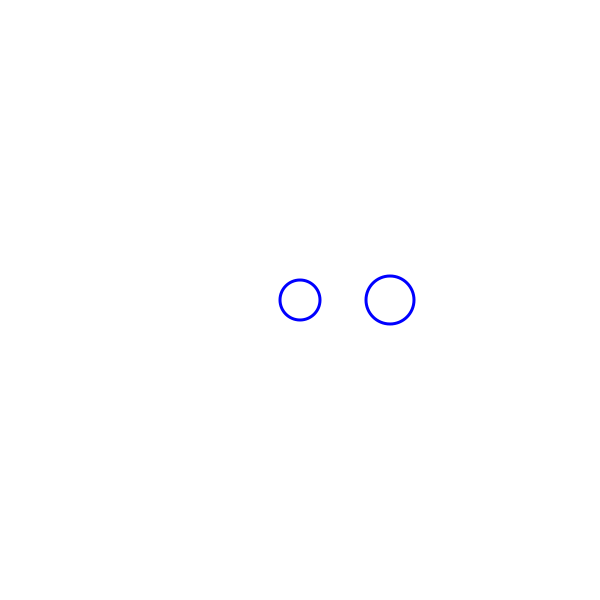

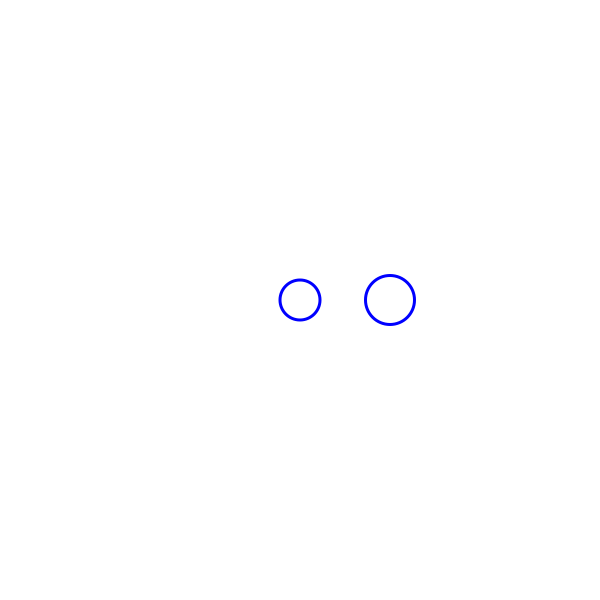

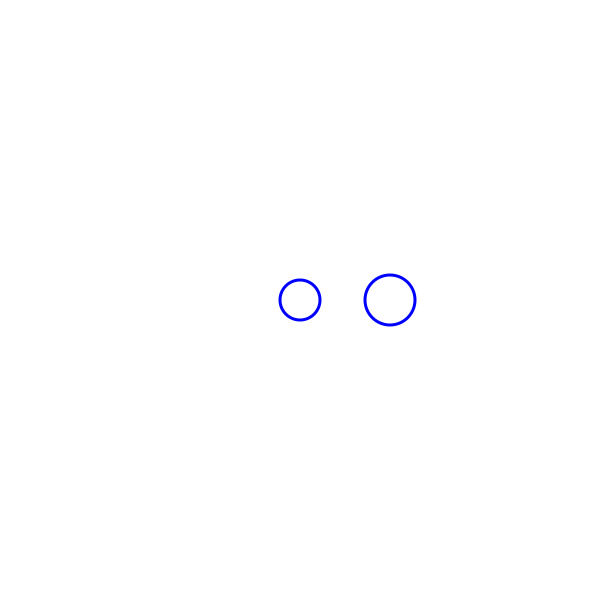

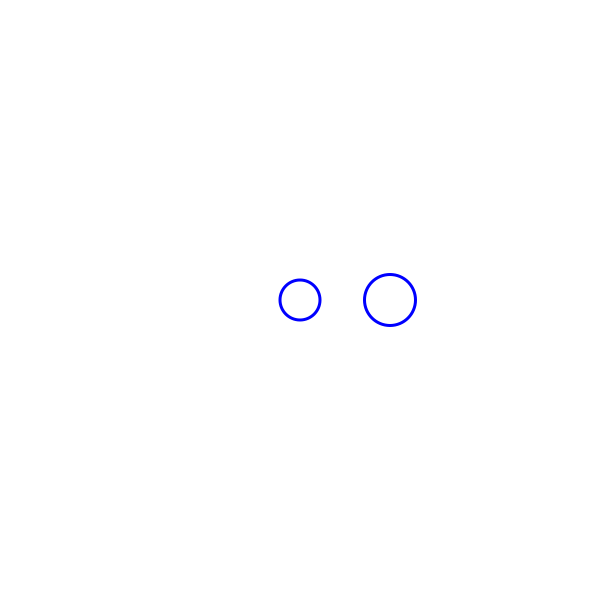

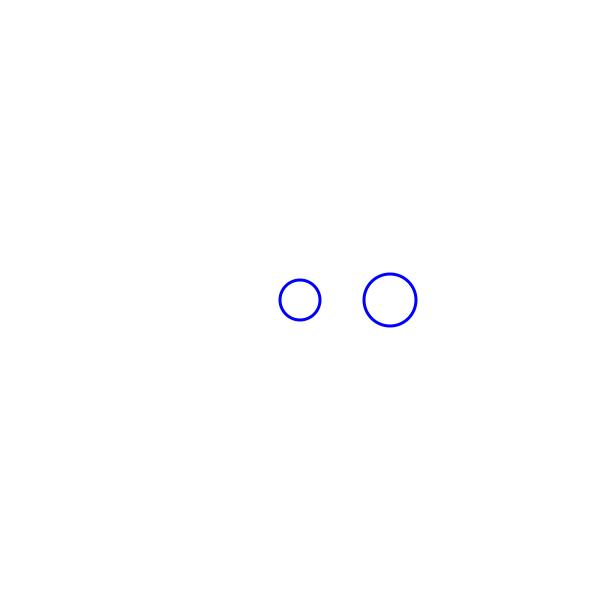

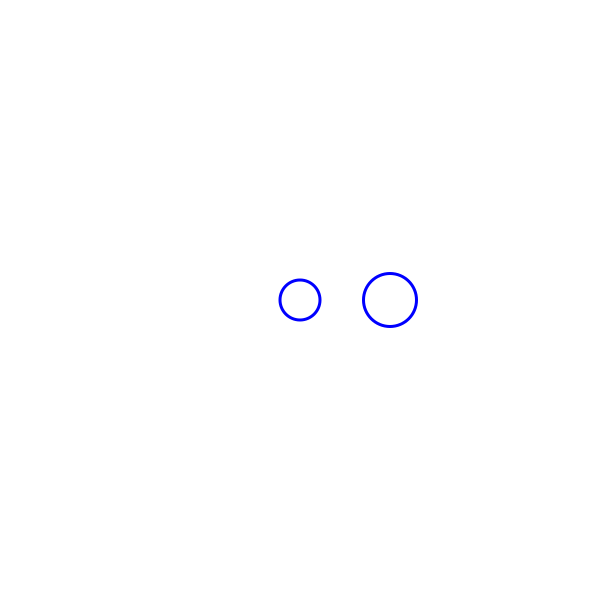

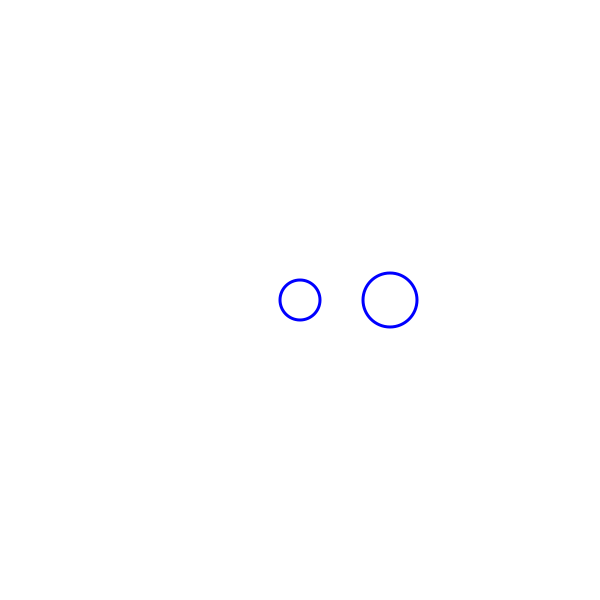

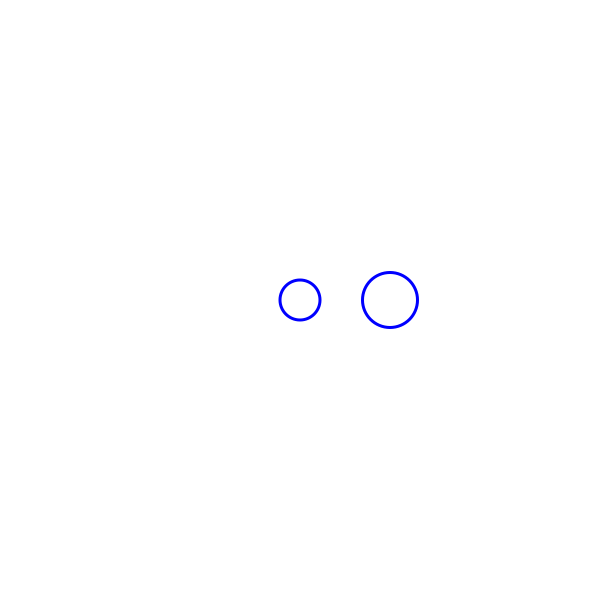

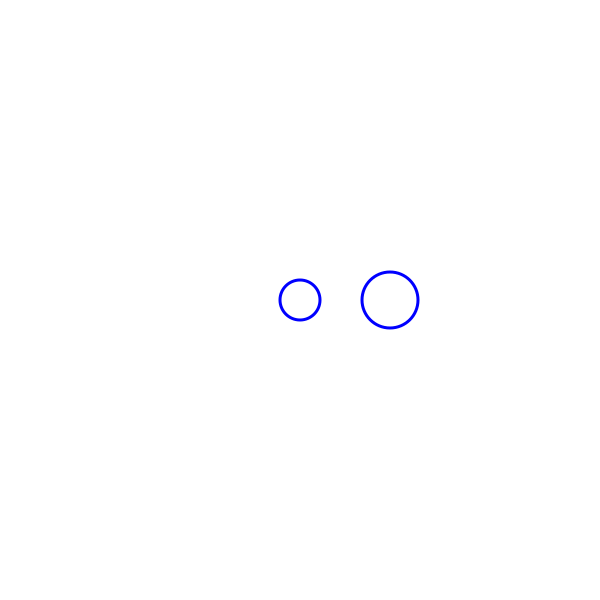

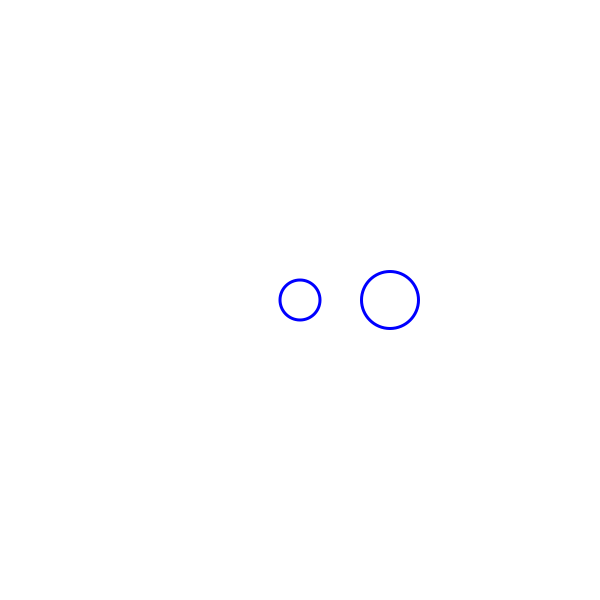

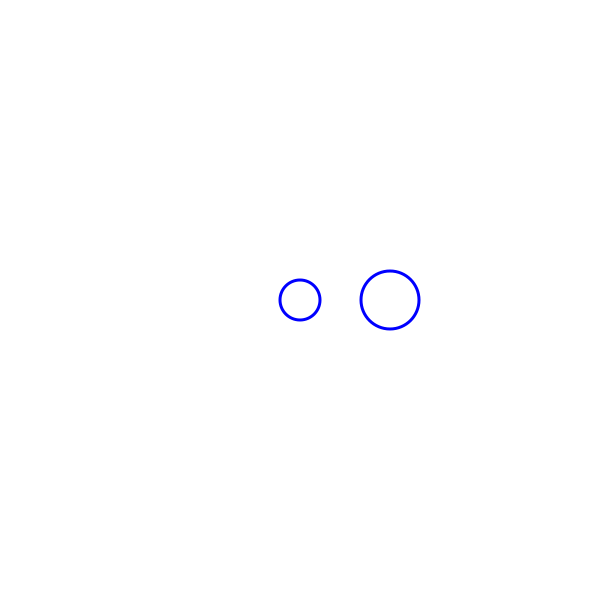

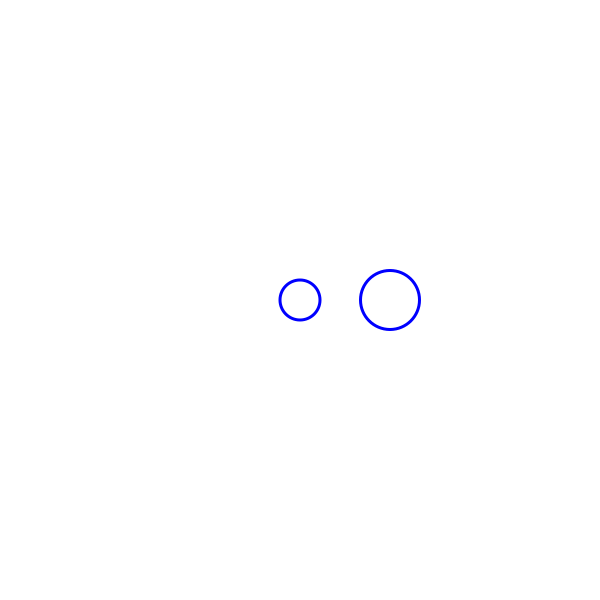

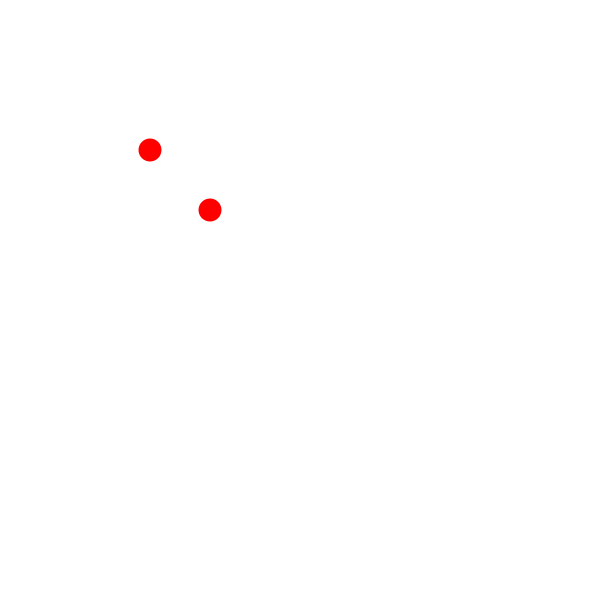

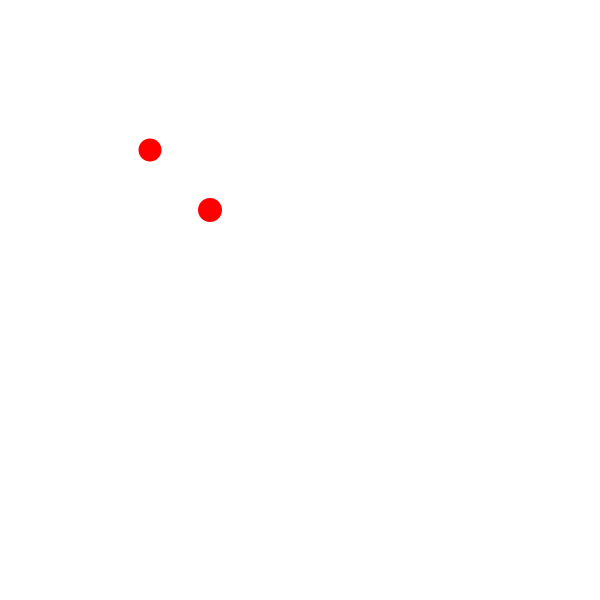

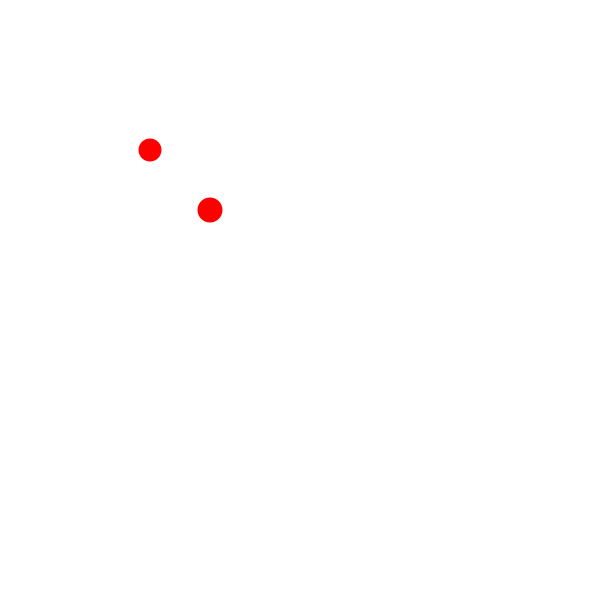

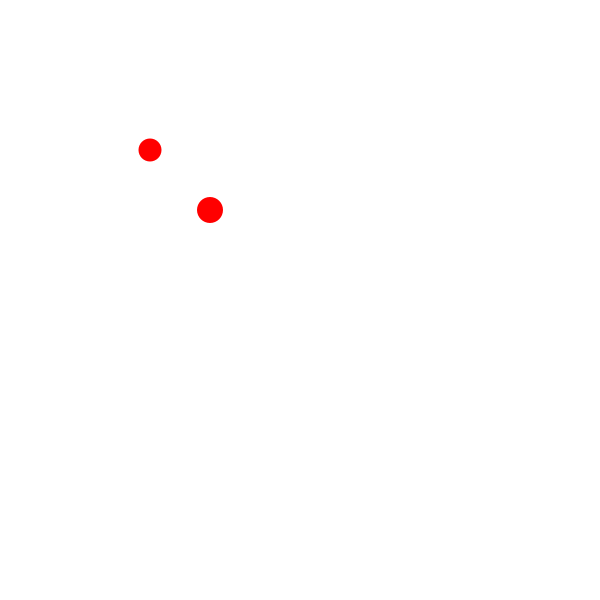

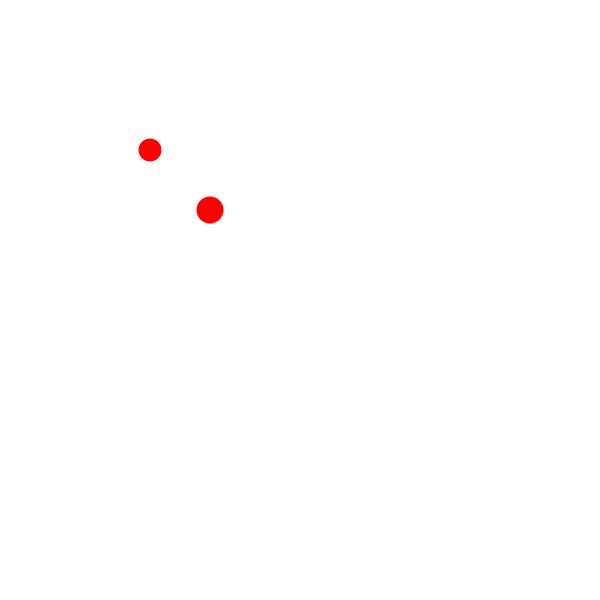

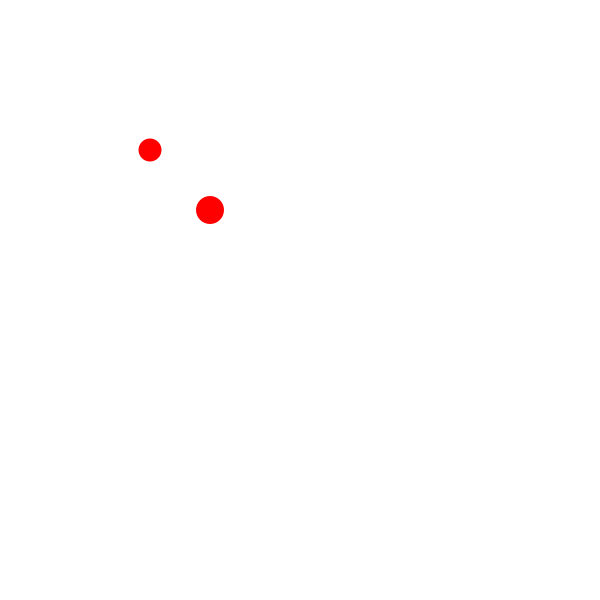

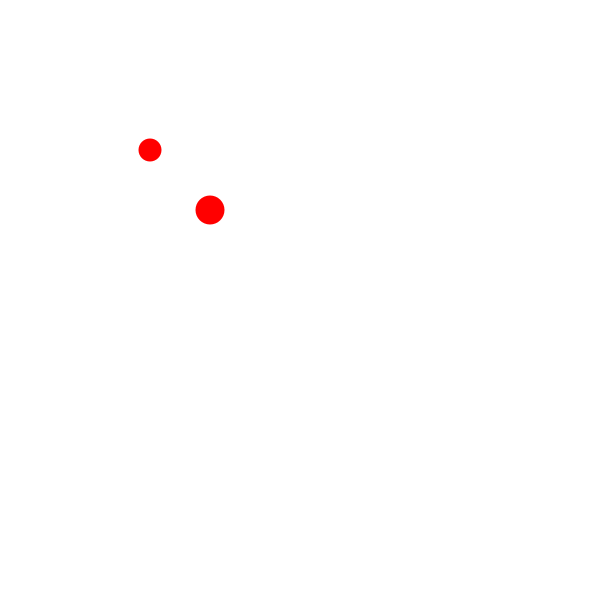

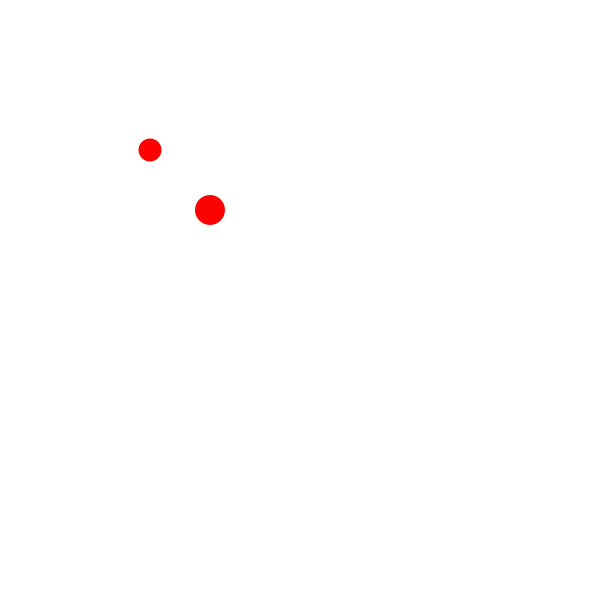

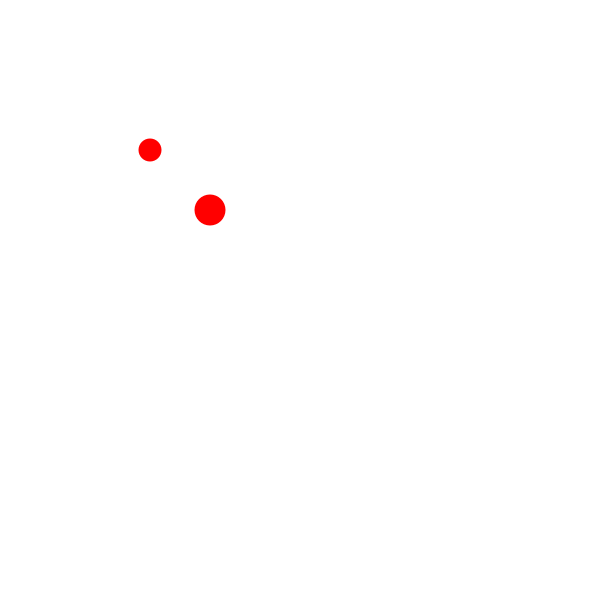

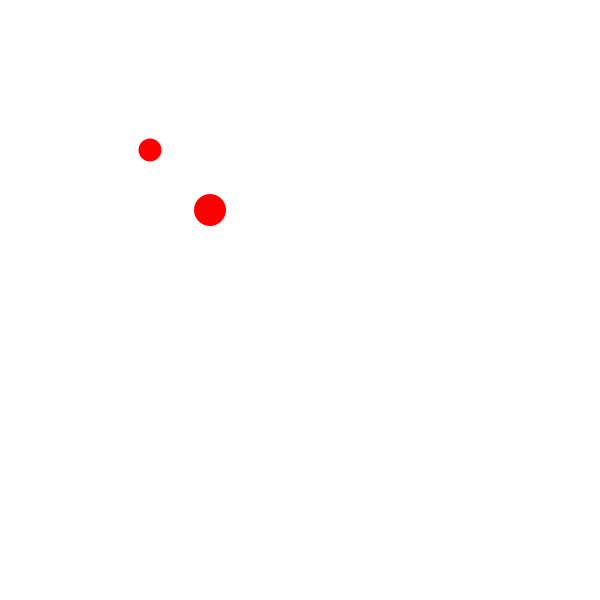

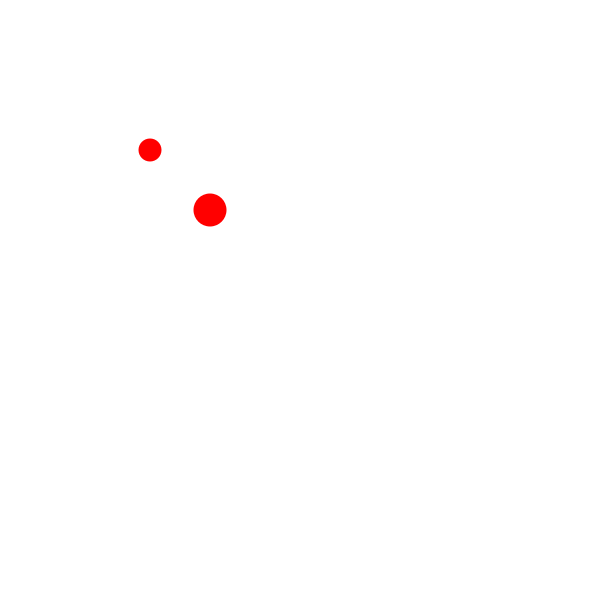

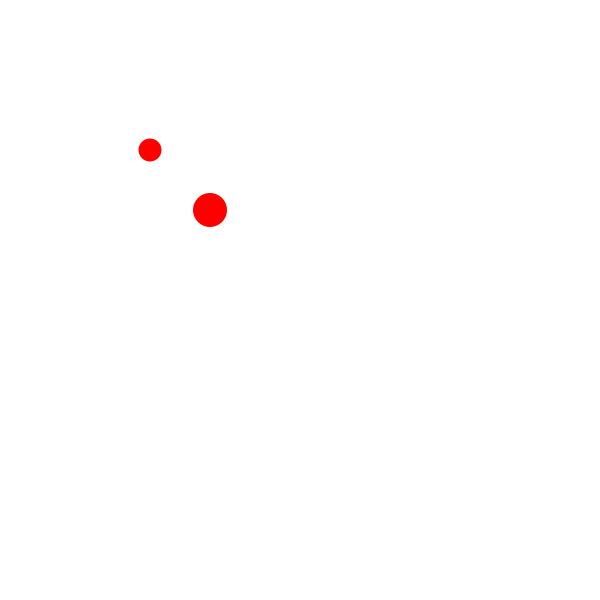

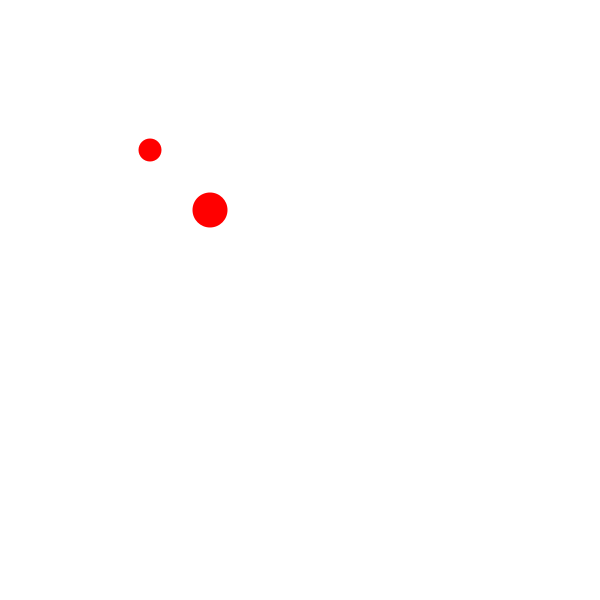

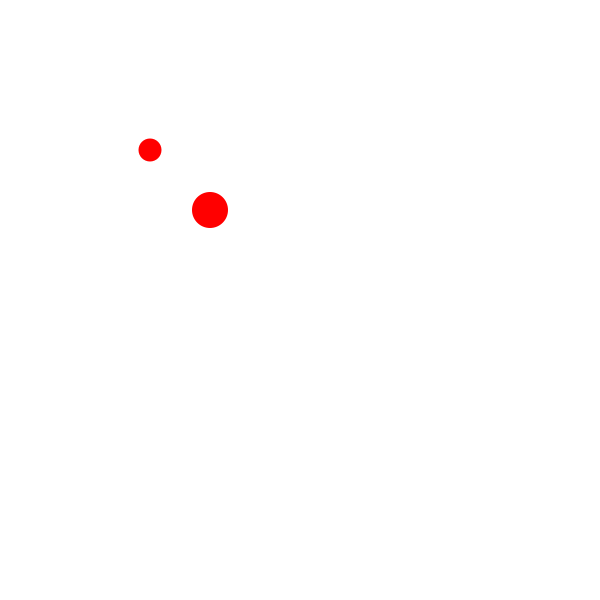

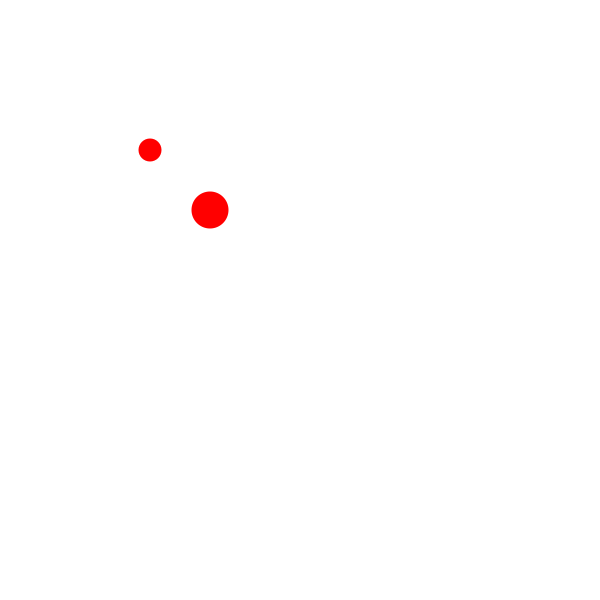

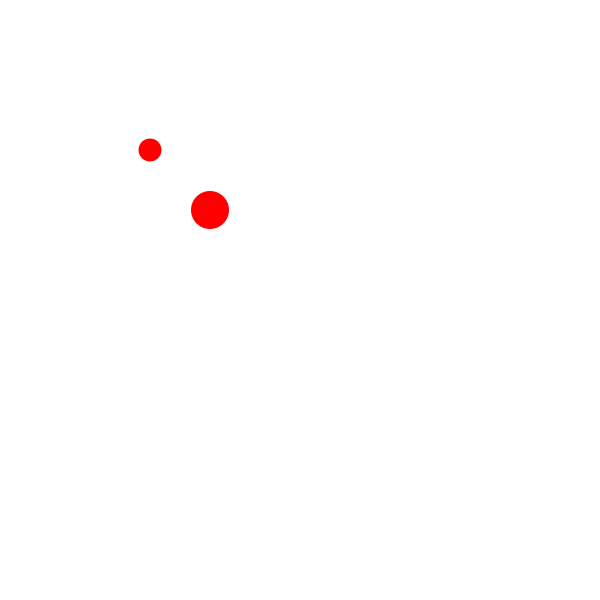

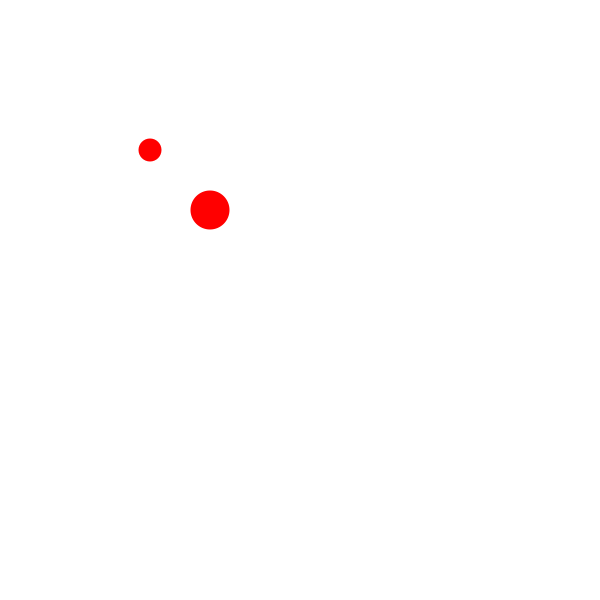

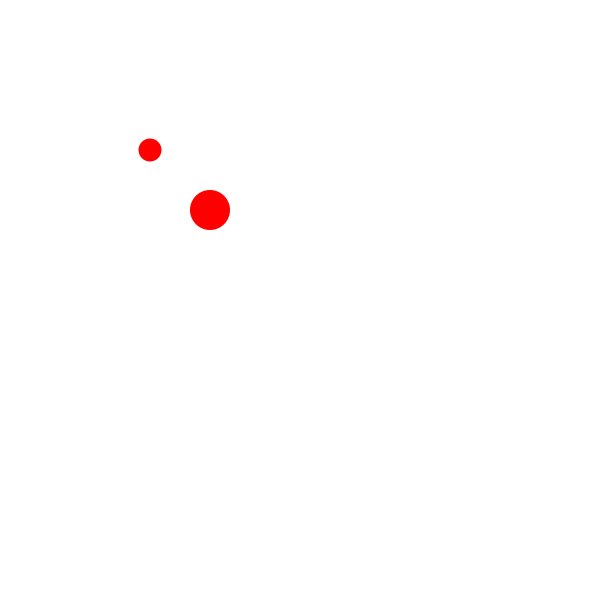

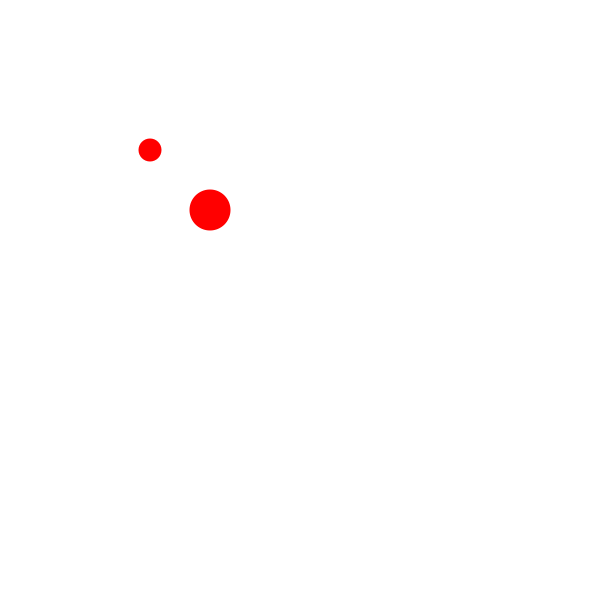

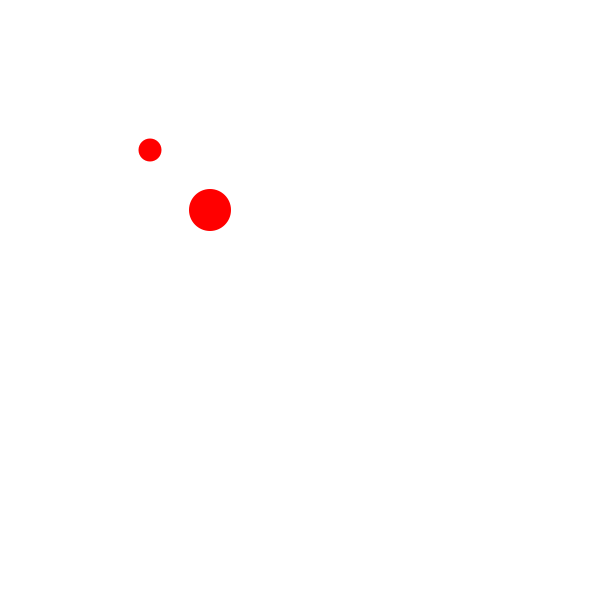

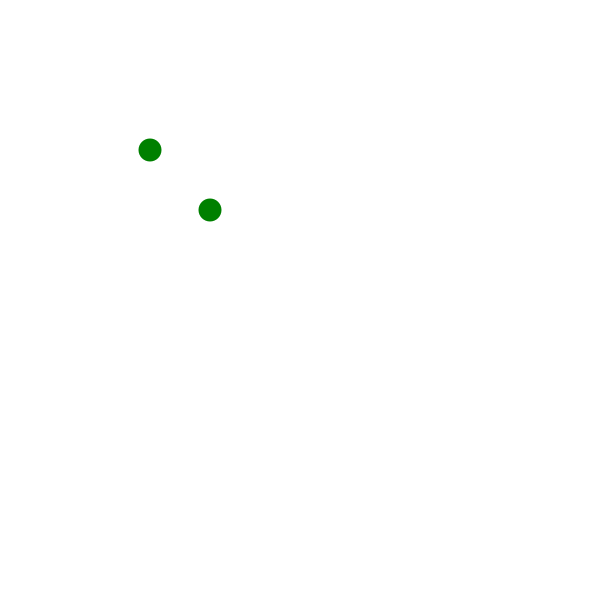

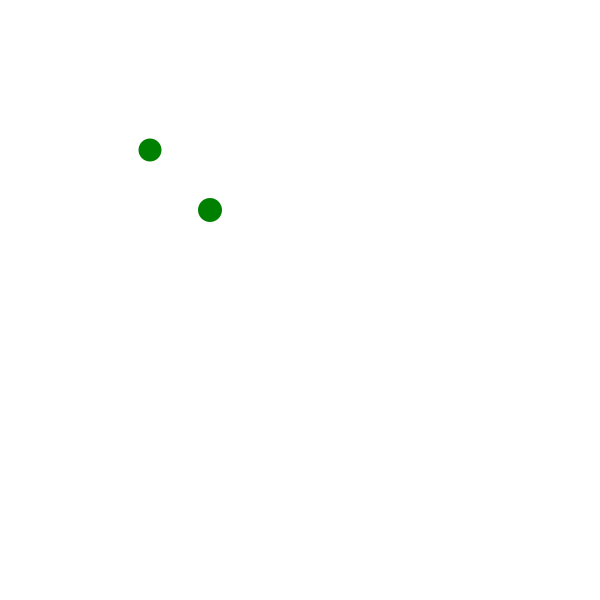

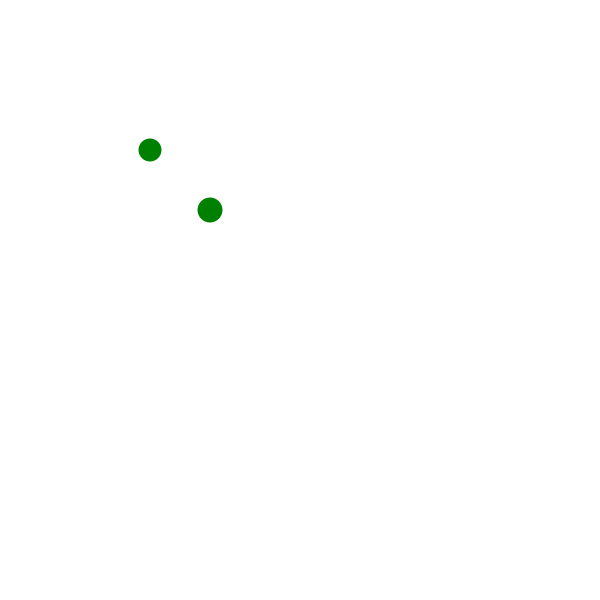

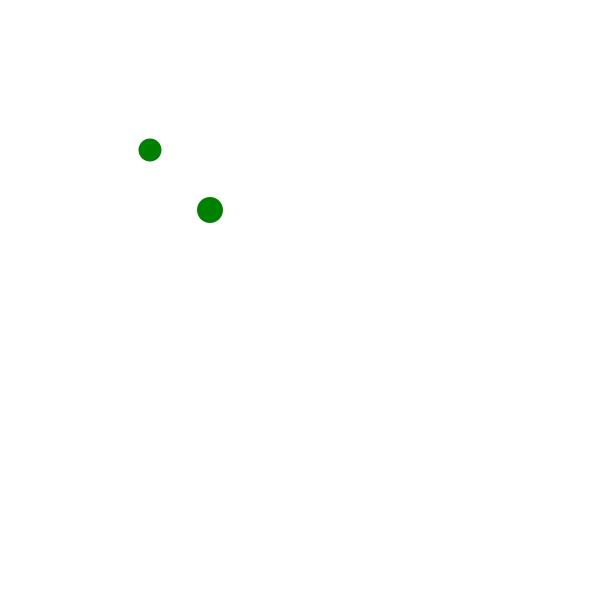

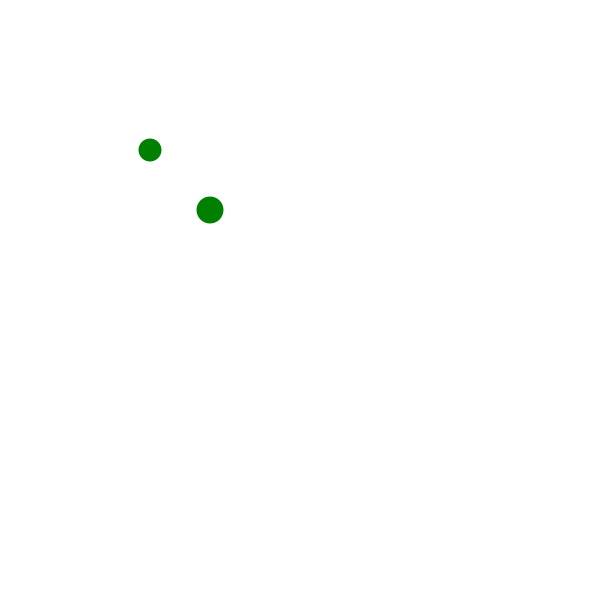

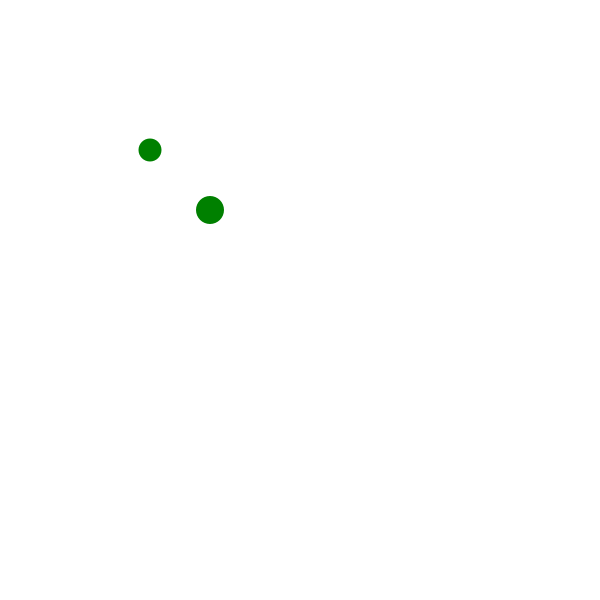

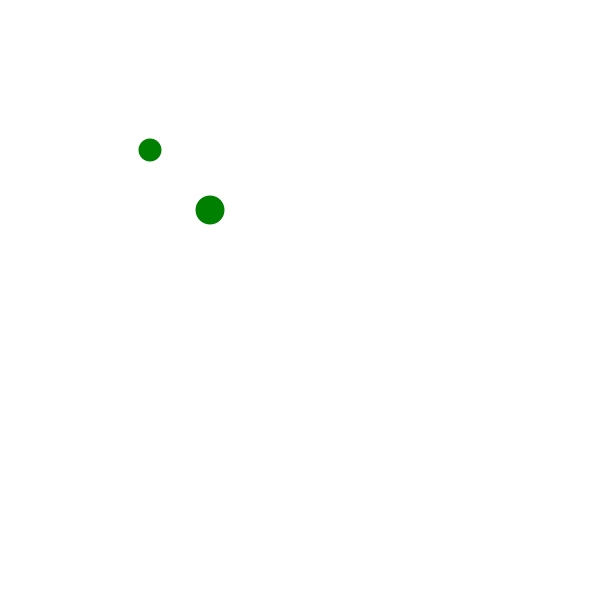

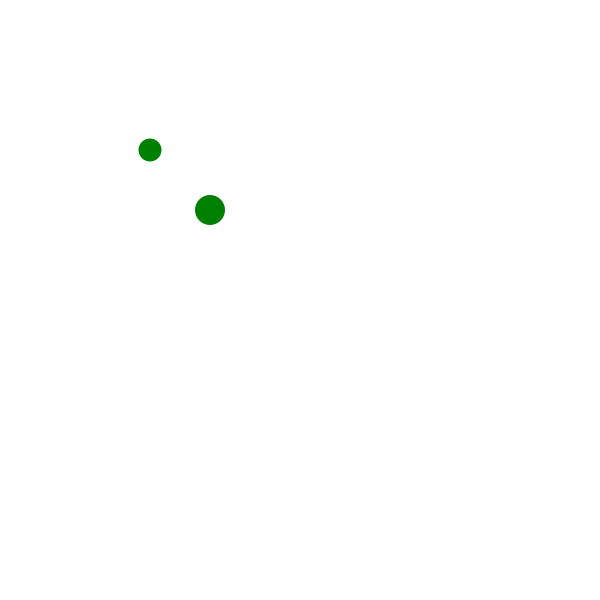

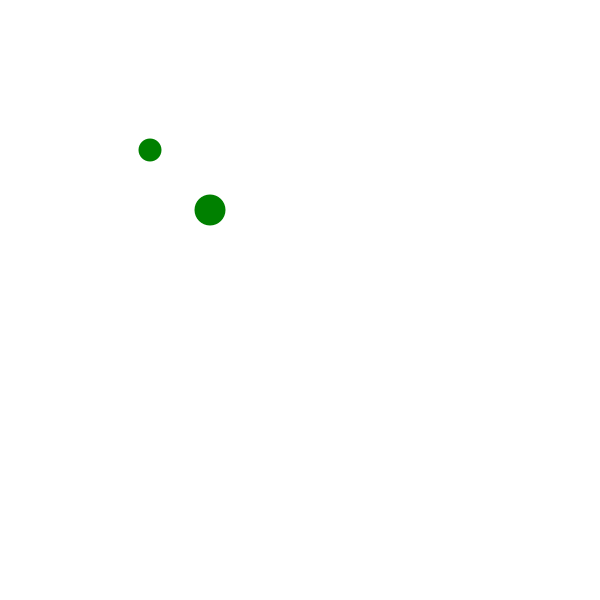

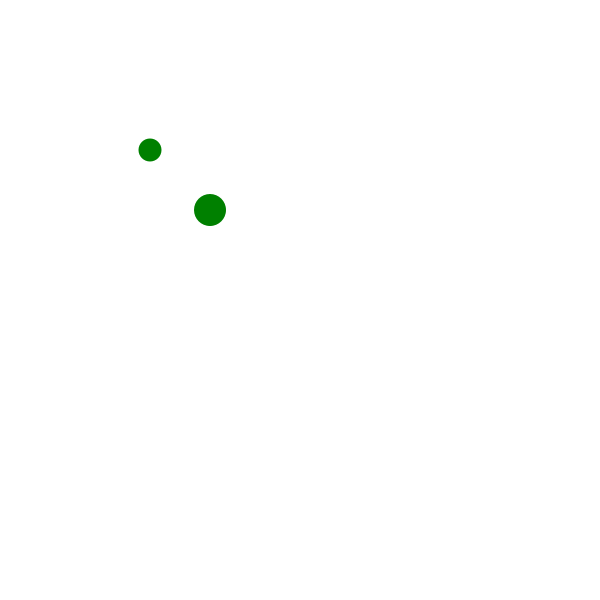

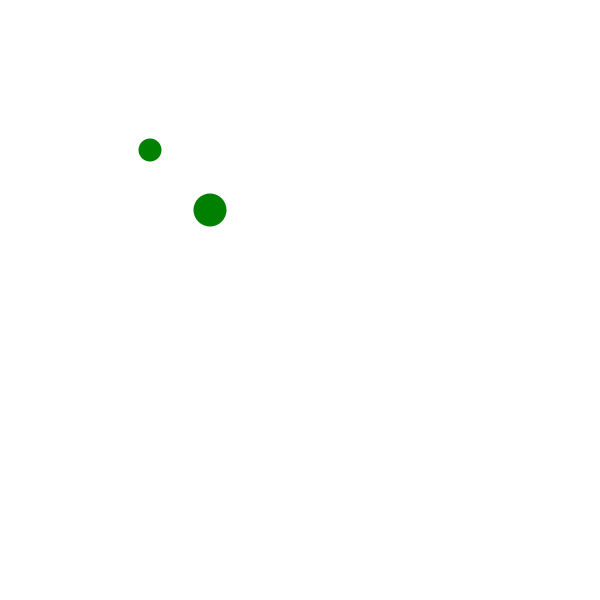

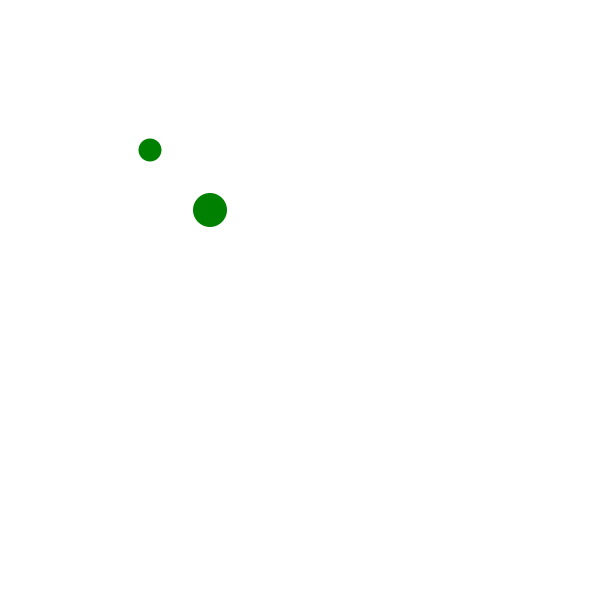

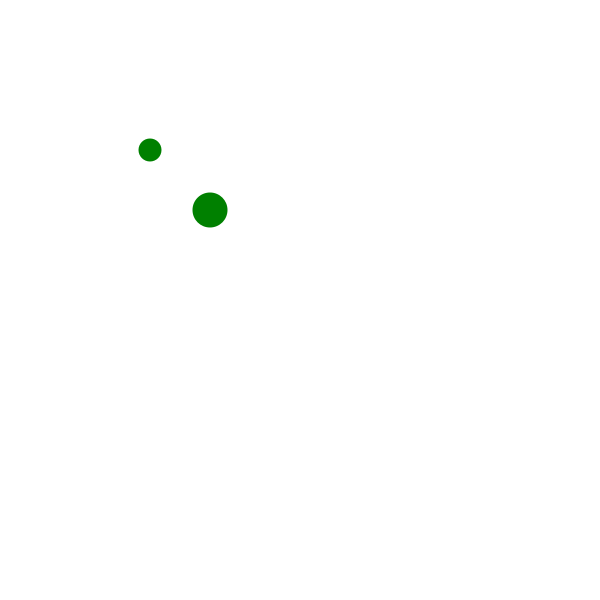

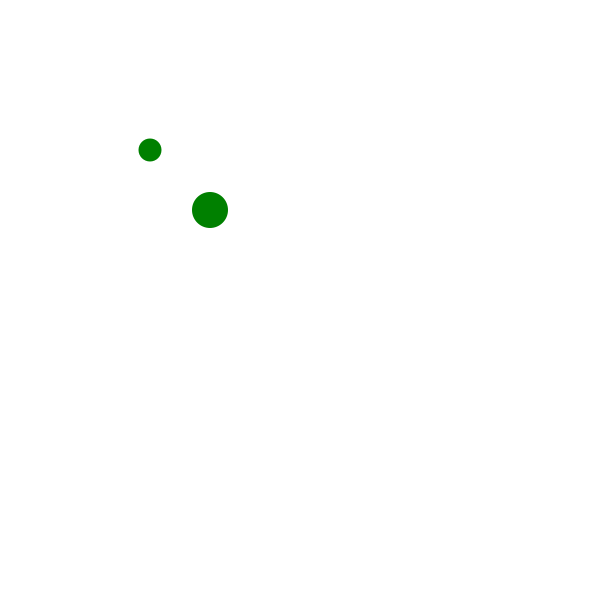

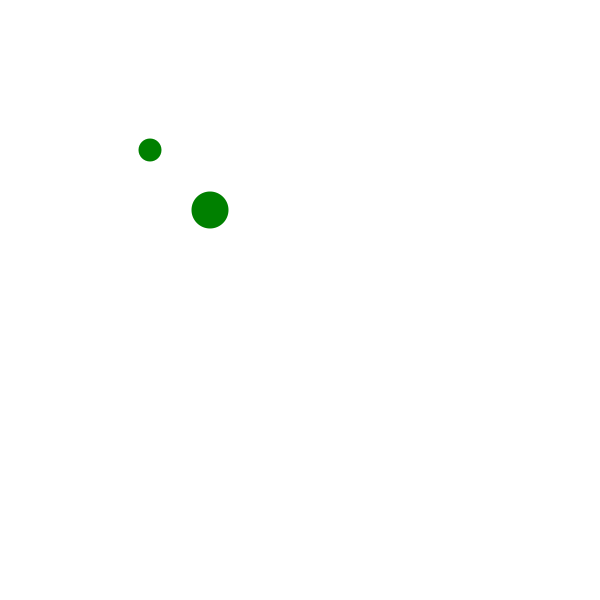

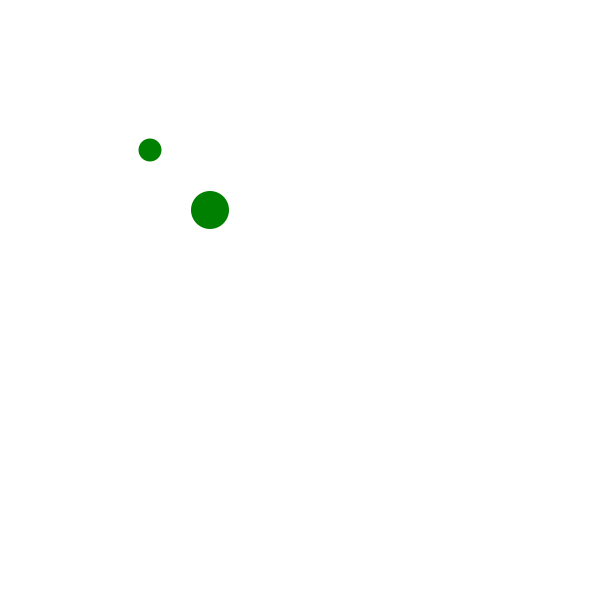

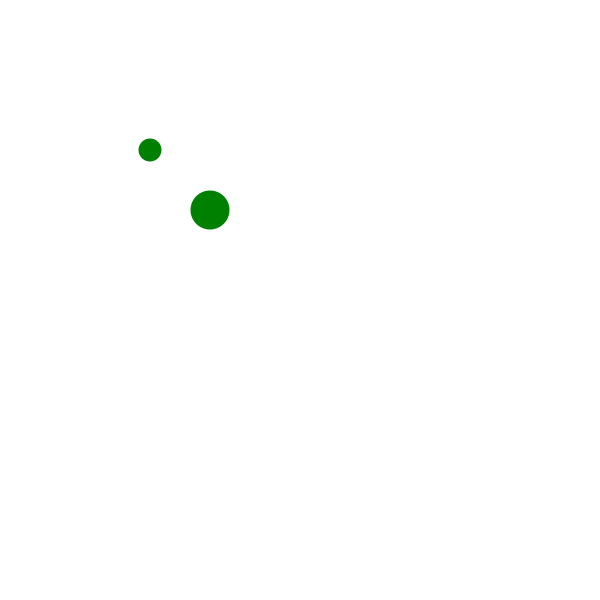

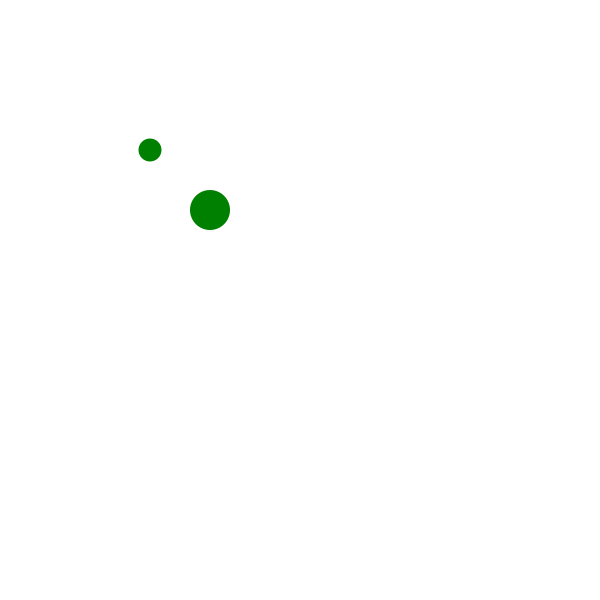

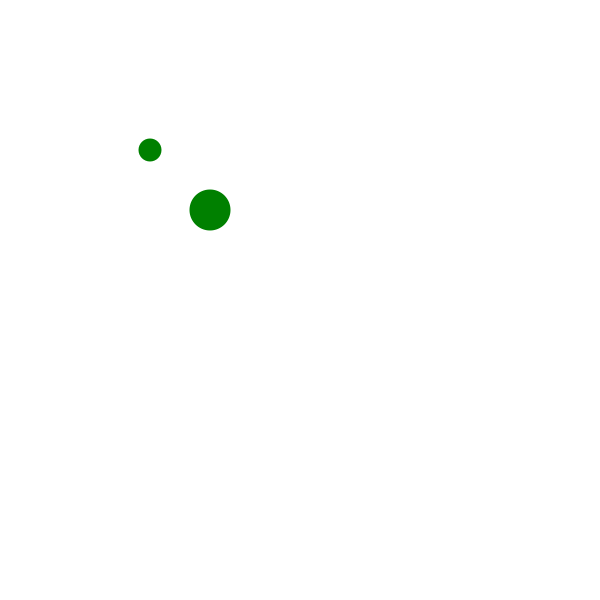

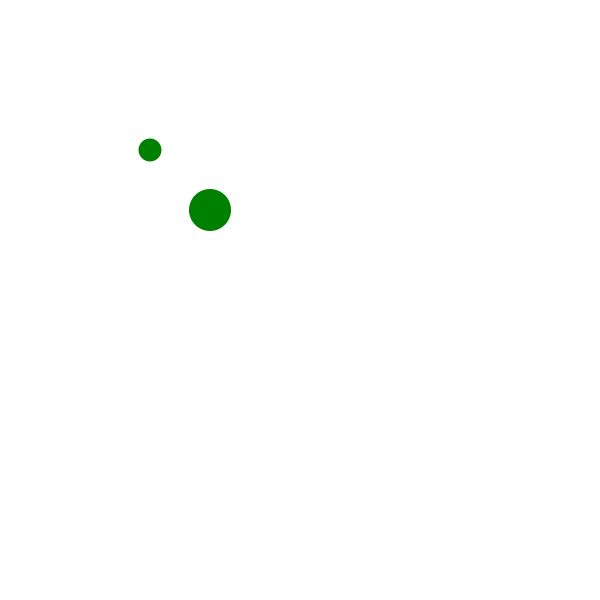

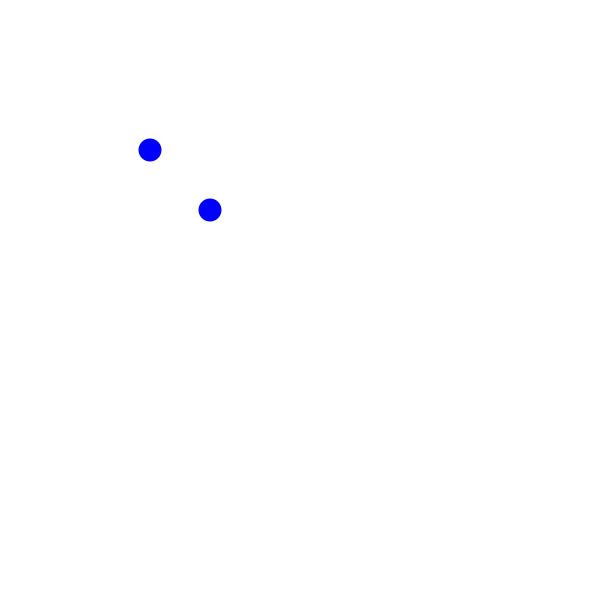

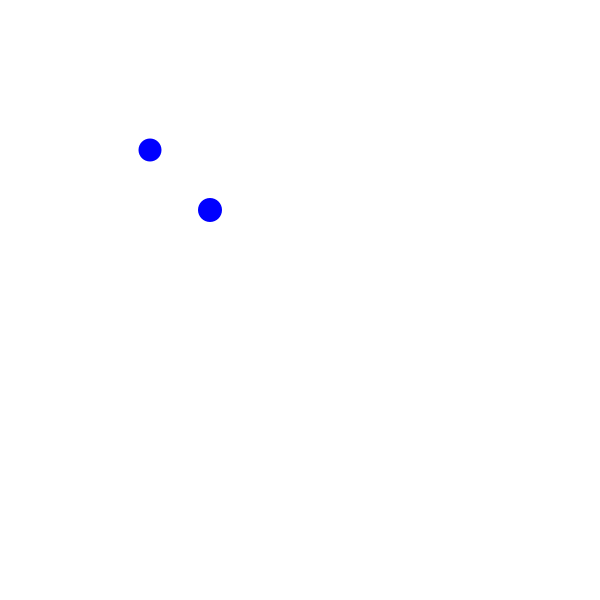

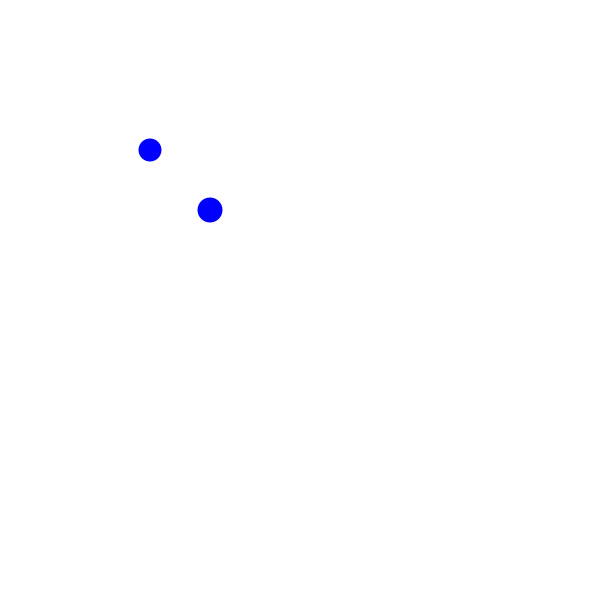

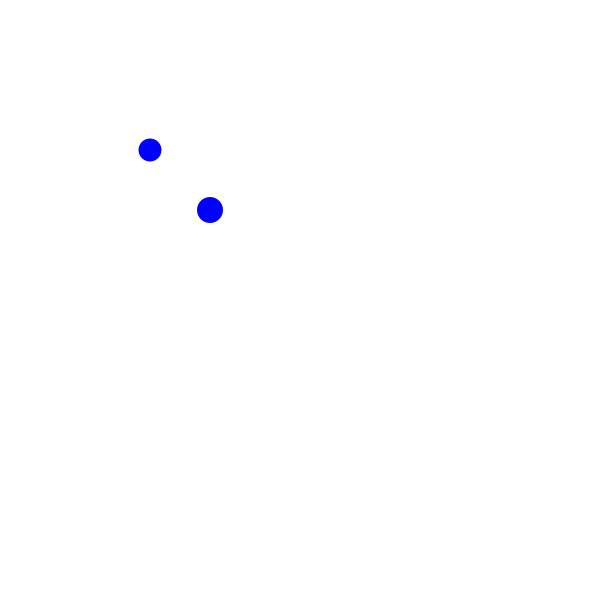

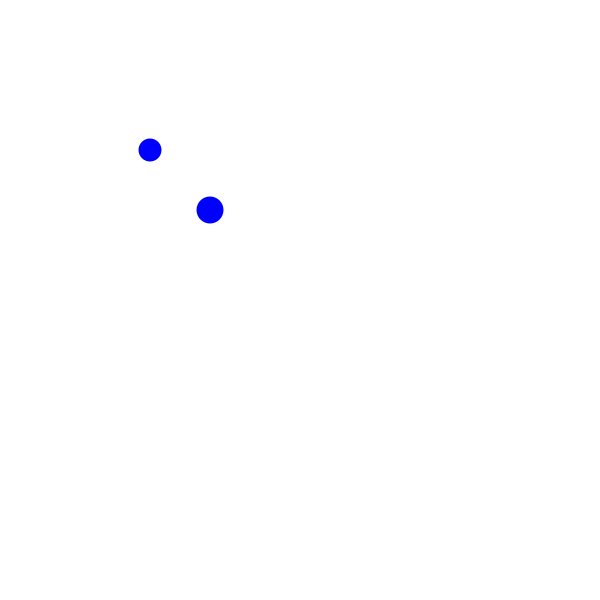

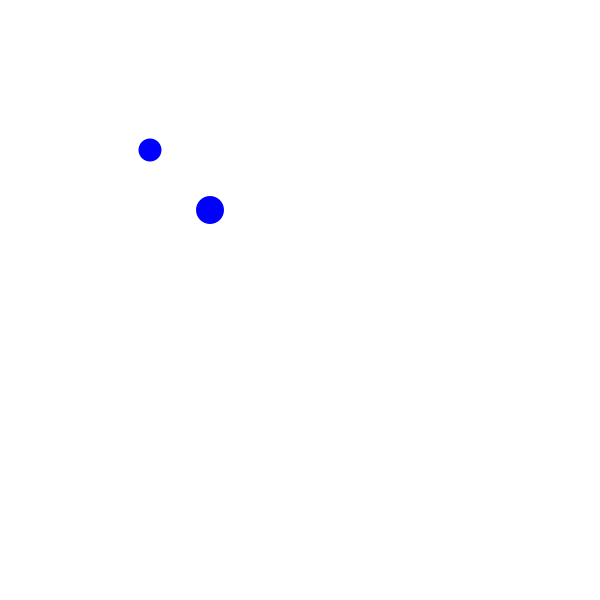

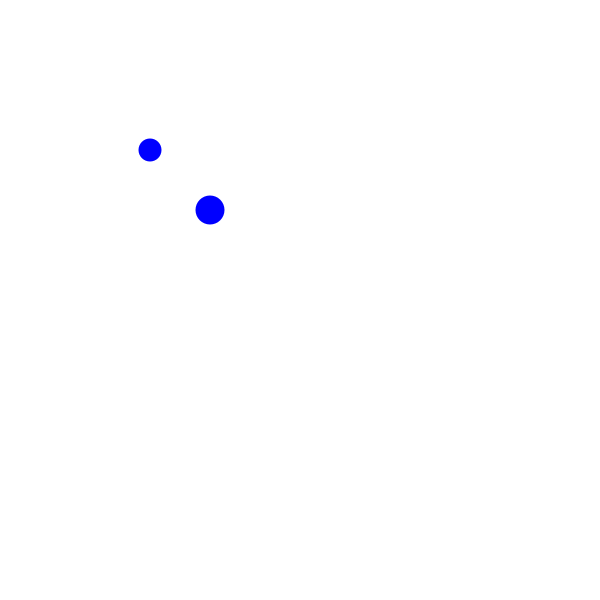

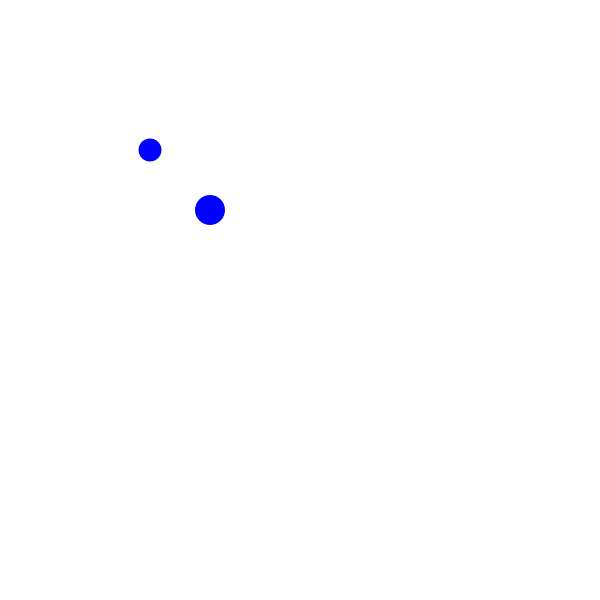

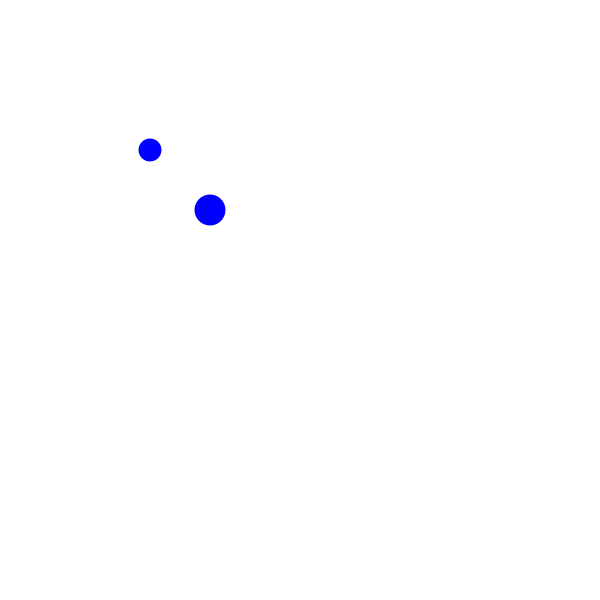

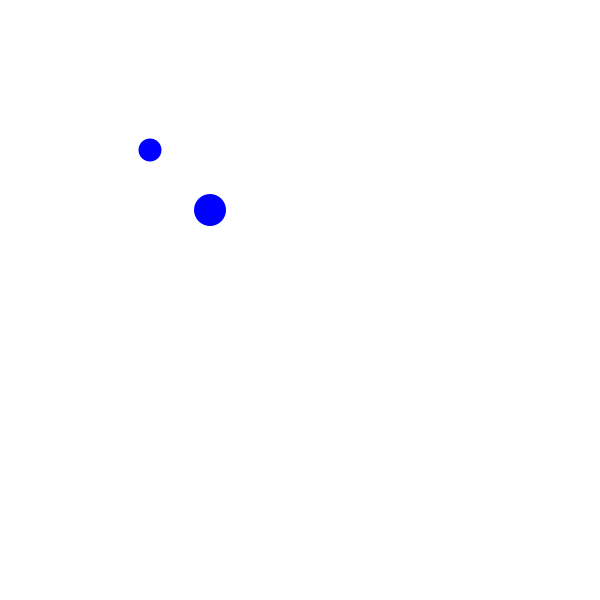

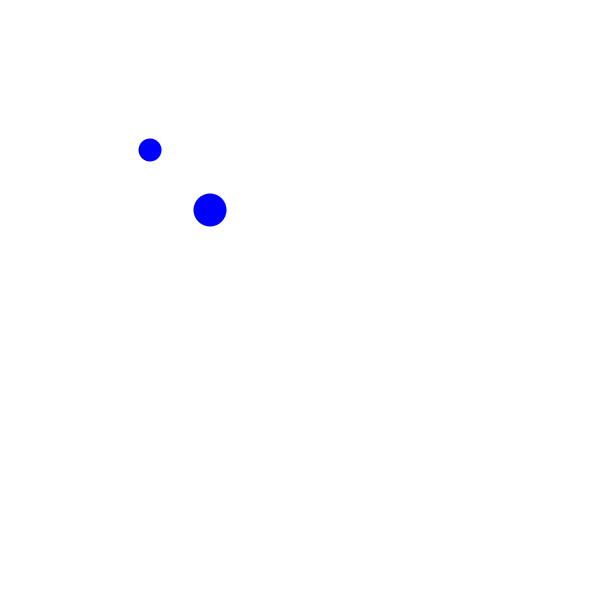

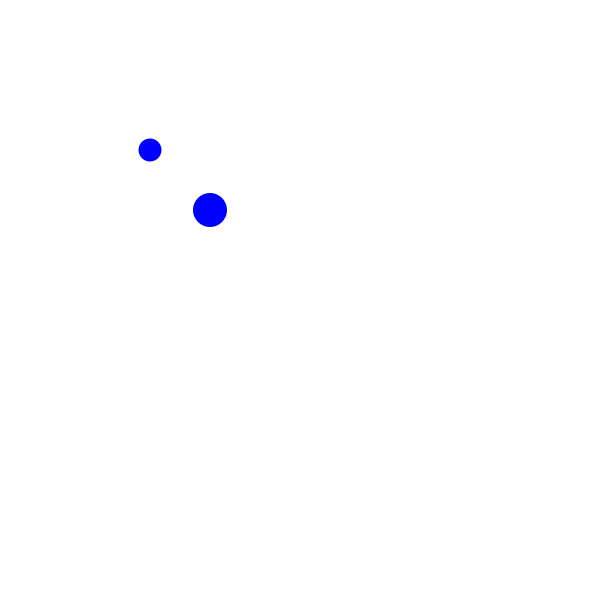

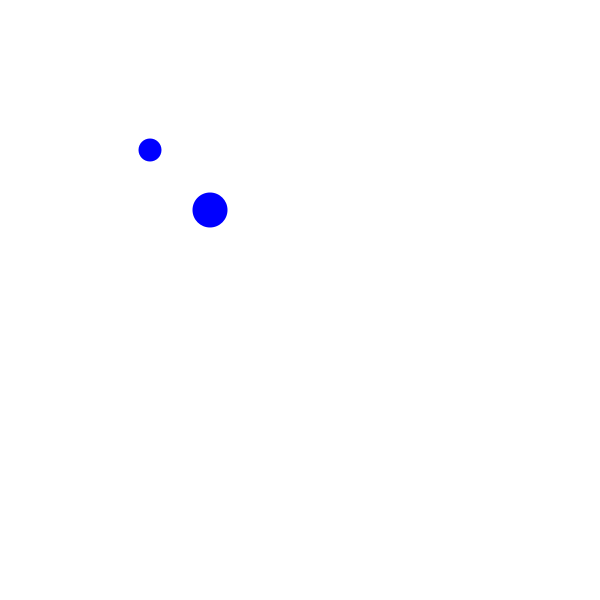

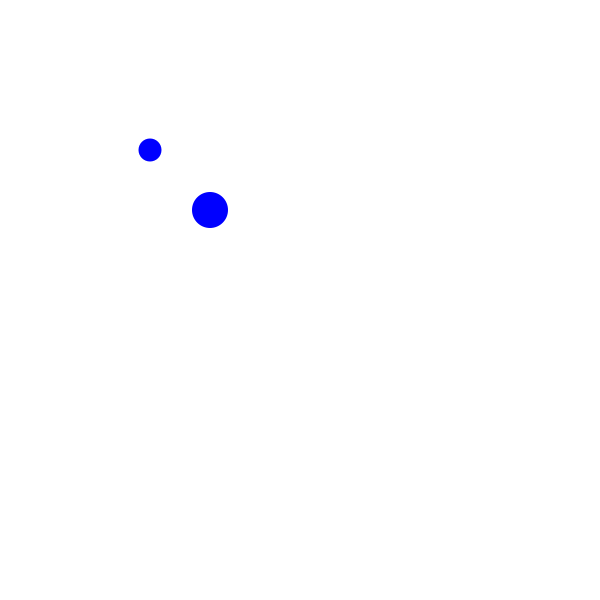

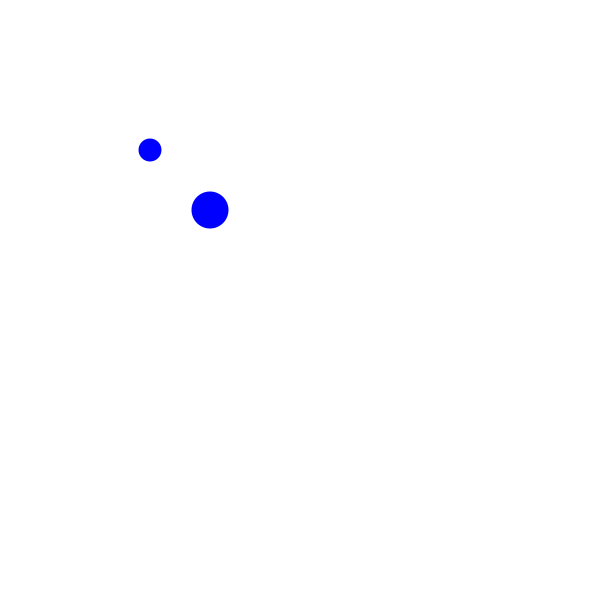

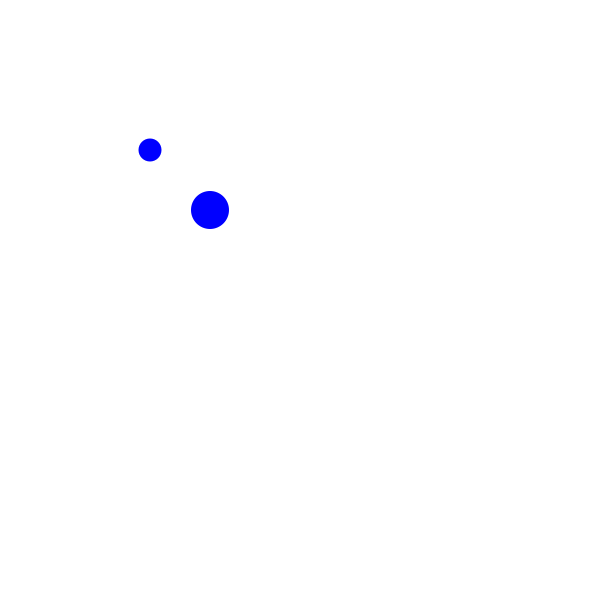

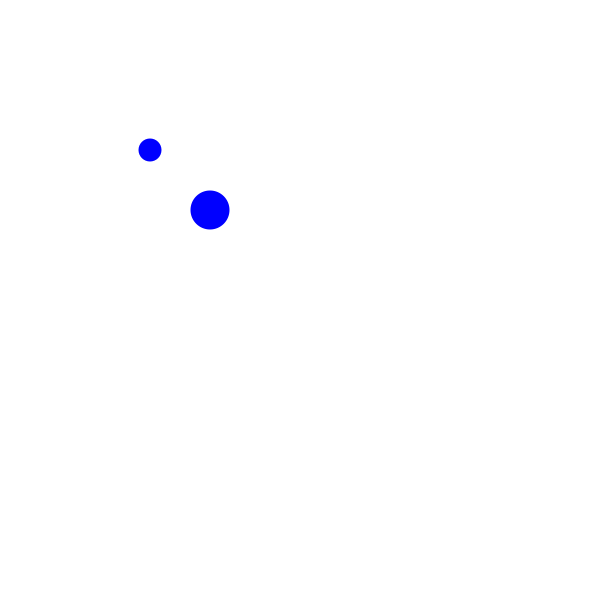

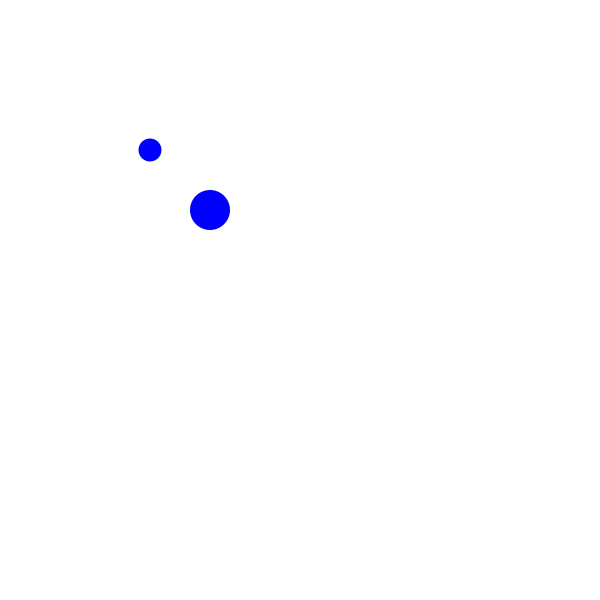

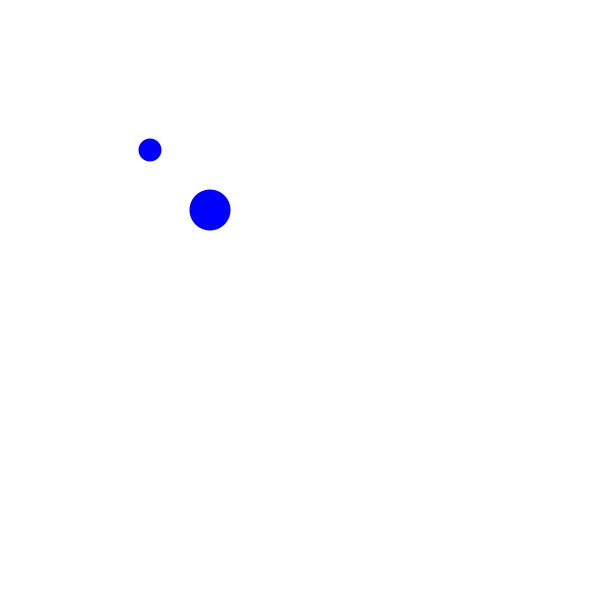

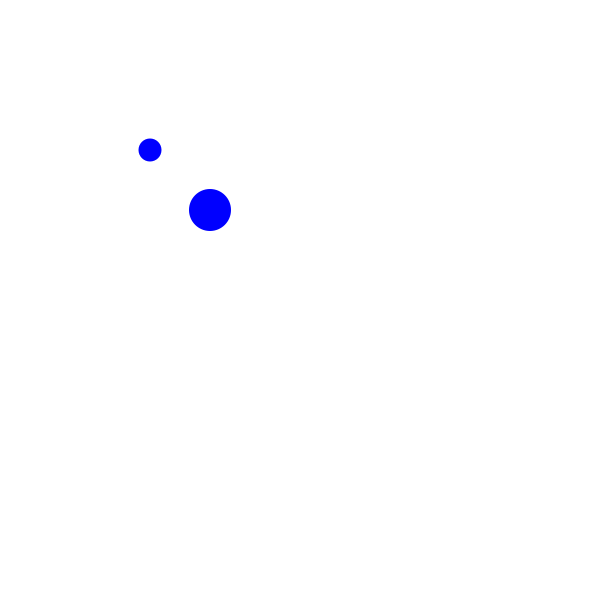

Total # images:  3000
Total out of bound images:  0
Total overlapping:  120


In [70]:
oob_count = 0
overlapping_count = 0
total_count = 0
param_d_list = []

# Iterate over randomly selected hparam configurations minus the fixed hparam
for i, config in enumerate(random_hparam_configs):
    config_d = dict(zip(selected_hparams, config))
    
    # Iterate over all values of a fixed variable
    for j, fixed_config in enumerate(fixed_hparams_exhaustive):
        config_d.update(dict(zip(fixed_vars, fixed_config)))
        
        # Iterate over target manipulation (radius)
        for k, r_diff in enumerate(np.arange(0, radius_variation_max, variation_step)):
            location = config_d["shape_location"]
            ref_r = config_d["reference_radius"]
            shape_dist = config_d["shape_dist"]
            line_color = config_d["line_color"]
            fill_color = "none" if config_d["fill_color"] == "none" else line_color
            thickness = config_d["line_thickness"]
            offset_direction = config_d["offset_direction"]
            
            ref_x, ref_y = w*location, h*location
            x, y = w*location, h*location
            if "E" in offset_direction:
                x += w*shape_dist
            if "S" in offset_direction:
                y += h*shape_dist

            r = ref_r+r_diff
            
            max_ref_x = ref_x+ref_r
            max_ref_y = ref_y+ref_r
            max_x = x+r
            max_y = y+r

            # Count cases where shapes go out of bounds
            total_count += 1
            oob = False
            overlapping = False
            if max_ref_x > w or max_x > w or max_ref_y > h or max_y > h:
                oob = True
                oob_count += 1
                
            # Count cases where shapes are overlapping with each other
            # (dist. of centers < sum(r1,r2))
            if np.sqrt((ref_x-x)**2 + (ref_y-y)**2) < ref_r + r:
                overlapping = True
                overlapping_count += 1
                
            if oob or overlapping:
                continue

            d = dw.Drawing(
                w, h, origin=(0, 0),
                context=None,
                animation_config=None,
                id_prefix='d'
            )
            ref_circle = dw.Circle(
                ref_x,
                ref_y,
                ref_r,
                stroke=line_color,
                stroke_width=thickness,
                fill=fill_color
            )
            circle = dw.Circle(
                x,
                y,
                r,
                stroke=line_color,
                stroke_width=thickness,
                fill=fill_color
            )
            d.append(ref_circle)
            d.append(circle)

            display(d)
            idx = f"{i}_{j}_{r_diff}"
            filename = f"{idx}.svg"
            print(filename)
            d.save_svg(os.path.join(save_path, filename))
        
            param_d = {
                "idx": idx,
                "filename": filename,
                "ref_x": ref_x,
                "ref_y": ref_y,
                "x": x,
                "y": y,
                "line_color": line_color,
                "fill_color": fill_color,
                "line_thickness": thickness,
                "shape_location": location,
                "shape_dist": shape_dist,
                "reference_radius": ref_r,
                "radius_diff": r_diff
            }

            param_d_list.append(param_d)

print("Total # images: ", total_count)
print("Total out of bound images: ", oob_count)
print("Total overlapping: ", overlapping_count)

## Save metadata

In [71]:
print(param_d_list[-1])

with open(os.path.join(save_path, "circle_size_jnd_images_svg.csv"), 'w') as wf:
    writer = csv.DictWriter(wf, fieldnames=param_d_list[-1].keys())
    writer.writeheader()
    for d in param_d_list:
        writer.writerow(d)

{'idx': '49_2_9.5', 'filename': '49_2_9.5.svg', 'ref_x': 150.0, 'ref_y': 150.0, 'x': 210.0, 'y': 210.0, 'line_color': 'blue', 'fill_color': 'blue', 'line_thickness': 3, 'shape_location': 0.25, 'shape_dist': 0.1, 'reference_radius': 10, 'radius_diff': 9.5}
